In [19]:
# Import Libraries and Data

import re
import matplotlib.pyplot as plt
import numpy as np
# Input data
data = """
Epoch #1:   2%|4                           | 640/40000 [00:01<01:36, 407.42it/s]Current Learning Rate: [7e-05]
Epoch #1:   3%| | 1280/40000 [00:05<02:48, 230.01it/s, env_step=640, len=0.0, loCurrent Learning Rate: [6.999494949494948e-05]
Epoch #1:   5%| | 1920/40000 [00:08<03:02, 208.40it/s, env_step=1280, len=9.0, lCurrent Learning Rate: [6.998989898989899e-05]
Epoch #1:   6%| | 2560/40000 [00:11<03:06, 200.97it/s, env_step=1920, len=13.3, Current Learning Rate: [6.998484848484848e-05]
Epoch #1:   8%| | 3200/40000 [00:14<02:57, 206.85it/s, env_step=2560, len=18.1, Current Learning Rate: [6.997979797979796e-05]
Epoch #1:  10%| | 3840/40000 [00:17<02:48, 215.21it/s, env_step=3200, len=22.4, Current Learning Rate: [6.997474747474747e-05]
Epoch #1:  11%|1| 4480/40000 [00:20<02:45, 215.19it/s, env_step=3840, len=26.5, Current Learning Rate: [6.996969696969696e-05]
Epoch #1:  13%|1| 5120/40000 [00:24<02:52, 202.73it/s, env_step=4480, len=22.9, Current Learning Rate: [6.996464646464646e-05]
Epoch #1:  14%|1| 5760/40000 [00:27<02:49, 201.96it/s, env_step=5120, len=20.3, Current Learning Rate: [6.995959595959595e-05]
Epoch #1:  16%|1| 6400/40000 [00:30<02:43, 205.23it/s, env_step=5760, len=22.0, Current Learning Rate: [6.995454545454545e-05]
Epoch #1:  18%|1| 7040/40000 [00:33<02:38, 208.57it/s, env_step=6400, len=24.8, Current Learning Rate: [6.994949494949494e-05]
Epoch #1:  19%|1| 7680/40000 [00:36<02:35, 208.20it/s, env_step=7040, len=26.3, Current Learning Rate: [6.994444444444444e-05]
Epoch #1:  21%|2| 8320/40000 [00:39<02:32, 207.64it/s, env_step=7680, len=21.6, Current Learning Rate: [6.993939393939393e-05]
Epoch #1:  22%|2| 8960/40000 [00:42<02:26, 211.39it/s, env_step=8320, len=23.0, Current Learning Rate: [6.993434343434343e-05]
Epoch #1:  24%|2| 9600/40000 [00:45<02:23, 211.60it/s, env_step=8960, len=24.0, Current Learning Rate: [6.992929292929292e-05]
Epoch #1:  26%|2| 10240/40000 [00:48<02:20, 211.64it/s, env_step=9600, len=25.3,Current Learning Rate: [6.992424242424241e-05]
Epoch #1:  27%|2| 10880/40000 [00:51<02:16, 214.02it/s, env_step=10240, len=25.8Current Learning Rate: [6.991919191919192e-05]
Epoch #1:  29%|2| 11520/40000 [00:54<02:18, 206.02it/s, env_step=10880, len=23.3Current Learning Rate: [6.99141414141414e-05]
Epoch #1:  30%|3| 12160/40000 [00:57<02:14, 206.27it/s, env_step=11520, len=23.0Current Learning Rate: [6.990909090909091e-05]
Epoch #1:  32%|3| 12800/40000 [01:00<02:10, 208.26it/s, env_step=12160, len=23.7Current Learning Rate: [6.99040404040404e-05]
Epoch #1:  34%|3| 13440/40000 [01:03<02:06, 209.56it/s, env_step=12800, len=24.9Current Learning Rate: [6.989898989898989e-05]
Epoch #1:  35%|3| 14080/40000 [01:06<02:02, 211.84it/s, env_step=13440, len=26.7Current Learning Rate: [6.989393939393939e-05]
Epoch #1:  37%|3| 14720/40000 [01:09<01:57, 214.56it/s, env_step=14080, len=26.0Current Learning Rate: [6.988888888888888e-05]
Epoch #1:  38%|3| 15360/40000 [01:12<01:54, 215.53it/s, env_step=14720, len=23.1Current Learning Rate: [6.988383838383838e-05]
Epoch #1:  40%|4| 16000/40000 [01:15<01:50, 218.06it/s, env_step=15360, len=23.7Current Learning Rate: [6.987878787878787e-05]
Epoch #1:  42%|4| 16640/40000 [01:18<01:47, 217.45it/s, env_step=16000, len=23.4Current Learning Rate: [6.987373737373737e-05]
Epoch #1:  43%|4| 17280/40000 [01:21<01:44, 217.99it/s, env_step=16640, len=22.7Current Learning Rate: [6.986868686868686e-05]
Epoch #1:  45%|4| 17920/40000 [01:24<01:41, 217.40it/s, env_step=17280, len=25.0Current Learning Rate: [6.986363636363637e-05]
Epoch #1:  46%|4| 18560/40000 [01:27<01:44, 204.69it/s, env_step=17920, len=23.7Current Learning Rate: [6.985858585858585e-05]
Epoch #1:  48%|4| 19200/40000 [01:30<01:38, 210.64it/s, env_step=18560, len=24.6Current Learning Rate: [6.985353535353534e-05]
Epoch #1:  50%|4| 19840/40000 [01:33<01:34, 214.32it/s, env_step=19200, len=24.2Current Learning Rate: [6.984848484848485e-05]
Epoch #1:  51%|5| 20480/40000 [01:36<01:29, 217.06it/s, env_step=19840, len=25.4Current Learning Rate: [6.984343434343434e-05]
Epoch #1:  53%|5| 21120/40000 [01:39<01:27, 216.74it/s, env_step=20480, len=24.2Current Learning Rate: [6.983838383838384e-05]
Epoch #1:  54%|5| 21760/40000 [01:42<01:23, 217.95it/s, env_step=21120, len=22.0Current Learning Rate: [6.983333333333333e-05]
Epoch #1:  56%|5| 22400/40000 [01:45<01:20, 219.01it/s, env_step=21760, len=24.2Current Learning Rate: [6.982828282828282e-05]
Epoch #1:  58%|5| 23040/40000 [01:48<01:17, 218.00it/s, env_step=22400, len=25.5Current Learning Rate: [6.982323232323232e-05]
Epoch #1:  59%|5| 23680/40000 [01:51<01:14, 219.91it/s, env_step=23040, len=21.8Current Learning Rate: [6.981818181818181e-05]
Epoch #1:  61%|6| 24320/40000 [01:53<01:10, 221.41it/s, env_step=23680, len=24.3Current Learning Rate: [6.98131313131313e-05]
Epoch #1:  62%|6| 24960/40000 [01:56<01:06, 224.76it/s, env_step=24320, len=23.3Current Learning Rate: [6.98080808080808e-05]
Epoch #1:  64%|6| 25600/40000 [01:59<01:07, 214.57it/s, env_step=24960, len=24.8Current Learning Rate: [6.980303030303029e-05]
Epoch #1:  66%|6| 26240/40000 [02:02<01:03, 216.52it/s, env_step=25600, len=23.6Current Learning Rate: [6.979797979797979e-05]
Epoch #1:  67%|6| 26880/40000 [02:05<00:59, 219.30it/s, env_step=26240, len=24.1Current Learning Rate: [6.979292929292928e-05]
Epoch #1:  69%|6| 27520/40000 [02:08<00:56, 221.67it/s, env_step=26880, len=22.6Current Learning Rate: [6.978787878787878e-05]
Epoch #1:  70%|7| 28160/40000 [02:11<00:52, 225.67it/s, env_step=27520, len=24.4Current Learning Rate: [6.978282828282827e-05]
Epoch #1:  72%|7| 28800/40000 [02:13<00:49, 227.45it/s, env_step=28160, len=23.8Current Learning Rate: [6.977777777777778e-05]
Epoch #1:  74%|7| 29440/40000 [02:16<00:46, 228.06it/s, env_step=28800, len=24.0Current Learning Rate: [6.977272727272727e-05]
Epoch #1:  75%|7| 30080/40000 [02:19<00:43, 227.04it/s, env_step=29440, len=24.4Current Learning Rate: [6.976767676767677e-05]
Epoch #1:  77%|7| 30720/40000 [02:22<00:40, 227.96it/s, env_step=30080, len=23.7Current Learning Rate: [6.976262626262626e-05]
Epoch #1:  78%|7| 31360/40000 [02:25<00:37, 227.60it/s, env_step=30720, len=24.5Current Learning Rate: [6.975757575757575e-05]
Epoch #1:  80%|8| 32000/40000 [02:28<00:35, 226.40it/s, env_step=31360, len=23.5Current Learning Rate: [6.975252525252525e-05]
Epoch #1:  82%|8| 32640/40000 [02:30<00:32, 223.36it/s, env_step=32000, len=26.5Current Learning Rate: [6.974747474747474e-05]
Epoch #1:  83%|8| 33280/40000 [02:34<00:30, 218.76it/s, env_step=32640, len=26.3Current Learning Rate: [6.974242424242423e-05]
Epoch #1:  85%|8| 33920/40000 [02:36<00:27, 222.33it/s, env_step=33280, len=23.7Current Learning Rate: [6.973737373737373e-05]
Epoch #1:  86%|8| 34560/40000 [02:39<00:24, 224.08it/s, env_step=33920, len=24.1Current Learning Rate: [6.973232323232322e-05]
Epoch #1:  88%|8| 35200/40000 [02:42<00:21, 226.50it/s, env_step=34560, len=24.0Current Learning Rate: [6.972727272727272e-05]
Epoch #1:  90%|8| 35840/40000 [02:45<00:18, 224.92it/s, env_step=35200, len=26.6Current Learning Rate: [6.972222222222221e-05]
Epoch #1:  91%|9| 36480/40000 [02:48<00:15, 223.76it/s, env_step=35840, len=25.4Current Learning Rate: [6.971717171717172e-05]
Epoch #1:  93%|9| 37120/40000 [02:50<00:12, 225.16it/s, env_step=36480, len=24.6Current Learning Rate: [6.97121212121212e-05]
Epoch #1:  94%|9| 37760/40000 [02:53<00:09, 226.81it/s, env_step=37120, len=25.1Current Learning Rate: [6.970707070707071e-05]
Epoch #1:  96%|9| 38400/40000 [02:56<00:07, 227.21it/s, env_step=37760, len=25.9Current Learning Rate: [6.97020202020202e-05]
Epoch #1:  98%|9| 39040/40000 [02:59<00:04, 225.31it/s, env_step=38400, len=25.1Current Learning Rate: [6.96969696969697e-05]
Epoch #1:  99%|9| 39680/40000 [03:02<00:01, 227.92it/s, env_step=39040, len=25.6Current Learning Rate: [6.969191919191919e-05]
Epoch #1: 40320it [03:05, 216.14it/s, env_step=39680, len=26.5, loss=0.047, loss/clip=0.030, loss/ent=0.606, loss/vf=0.035, n/ep=28, n/st=640, rew=0.609]Current Learning Rate: [6.968686868686868e-05]
Epoch #1: 40320it [03:05, 216.87it/s, env_step=40320, len=25.2, loss=0.039, loss/clip=0.024, loss/ent=0.609, loss/vf=0.033, n/ep=24, n/st=640, rew=0.612]
Epoch #1: test_reward: 0.637000 ± 0.073754, best_reward: 0.637000 ± 0.073754 in #1
Epoch #2:   2%|4                           | 640/40000 [00:02<02:23, 273.84it/s]Current Learning Rate: [6.968181818181818e-05]
Epoch #2:   3%| | 1280/40000 [00:05<02:39, 242.63it/s, env_step=40960, len=25.9,Current Learning Rate: [6.967676767676767e-05]
Epoch #2:   5%| | 1920/40000 [00:08<02:42, 234.04it/s, env_step=41600, len=24.8,Current Learning Rate: [6.967171717171716e-05]
Epoch #2:   6%| | 2560/40000 [00:10<02:43, 229.46it/s, env_step=42240, len=24.6,Current Learning Rate: [6.966666666666666e-05]
Epoch #2:   8%| | 3200/40000 [00:13<02:40, 229.73it/s, env_step=42880, len=25.5,Current Learning Rate: [6.966161616161615e-05]
Epoch #2:  10%| | 3840/40000 [00:16<02:36, 231.13it/s, env_step=43520, len=24.6,Current Learning Rate: [6.965656565656565e-05]
Epoch #2:  11%|1| 4480/40000 [00:19<02:34, 230.06it/s, env_step=44160, len=25.7,Current Learning Rate: [6.965151515151514e-05]
Epoch #2:  13%|1| 5120/40000 [00:22<02:32, 228.65it/s, env_step=44800, len=23.5,Current Learning Rate: [6.964646464646463e-05]
Epoch #2:  14%|1| 5760/40000 [00:25<02:33, 223.62it/s, env_step=45440, len=26.5,Current Learning Rate: [6.964141414141413e-05]
Epoch #2:  16%|1| 6400/40000 [00:28<02:35, 215.95it/s, env_step=46080, len=23.2,Current Learning Rate: [6.963636363636362e-05]
Epoch #2:  18%|1| 7040/40000 [00:30<02:28, 221.54it/s, env_step=46720, len=24.2,Current Learning Rate: [6.963131313131313e-05]
Epoch #2:  19%|1| 7680/40000 [00:33<02:24, 224.41it/s, env_step=47360, len=26.7,Current Learning Rate: [6.962626262626262e-05]
Epoch #2:  21%|2| 8320/40000 [00:36<02:20, 225.69it/s, env_step=48000, len=24.7,Current Learning Rate: [6.962121212121212e-05]
Epoch #2:  22%|2| 8960/40000 [00:39<02:16, 226.92it/s, env_step=48640, len=25.6,Current Learning Rate: [6.961616161616161e-05]
Epoch #2:  24%|2| 9600/40000 [00:42<02:13, 227.91it/s, env_step=49280, len=23.3,Current Learning Rate: [6.961111111111111e-05]
Epoch #2:  26%|2| 10240/40000 [00:44<02:10, 227.94it/s, env_step=49920, len=23.7Current Learning Rate: [6.96060606060606e-05]
Epoch #2:  27%|2| 10880/40000 [00:47<02:08, 227.07it/s, env_step=50560, len=26.7Current Learning Rate: [6.96010101010101e-05]
Epoch #2:  29%|2| 11520/40000 [00:50<02:04, 228.85it/s, env_step=51200, len=24.8Current Learning Rate: [6.959595959595959e-05]
Epoch #2:  30%|3| 12160/40000 [00:53<02:01, 228.38it/s, env_step=51840, len=25.6Current Learning Rate: [6.959090909090908e-05]
Epoch #2:  32%|3| 12800/40000 [00:56<01:58, 230.50it/s, env_step=52480, len=24.8Current Learning Rate: [6.958585858585858e-05]
Epoch #2:  34%|3| 13440/40000 [00:59<02:01, 218.86it/s, env_step=53120, len=24.8Current Learning Rate: [6.958080808080807e-05]
Epoch #2:  35%|3| 14080/40000 [01:02<01:55, 223.46it/s, env_step=53760, len=25.8Current Learning Rate: [6.957575757575756e-05]
Epoch #2:  37%|3| 14720/40000 [01:04<01:52, 225.44it/s, env_step=54400, len=22.9Current Learning Rate: [6.957070707070706e-05]
Epoch #2:  38%|3| 15360/40000 [01:07<01:49, 225.32it/s, env_step=55040, len=24.5Current Learning Rate: [6.956565656565655e-05]
Epoch #2:  40%|4| 16000/40000 [01:10<01:45, 226.65it/s, env_step=55680, len=25.9Current Learning Rate: [6.956060606060606e-05]
Epoch #2:  42%|4| 16640/40000 [01:13<01:42, 228.60it/s, env_step=56320, len=25.9Current Learning Rate: [6.955555555555555e-05]
Epoch #2:  43%|4| 17280/40000 [01:15<01:38, 230.37it/s, env_step=56960, len=25.7Current Learning Rate: [6.955050505050505e-05]
Epoch #2:  45%|4| 17920/40000 [01:18<01:36, 228.56it/s, env_step=57600, len=25.3Current Learning Rate: [6.954545454545454e-05]
Epoch #2:  46%|4| 18560/40000 [01:21<01:33, 228.58it/s, env_step=58240, len=26.4Current Learning Rate: [6.954040404040404e-05]
Epoch #2:  48%|4| 19200/40000 [01:24<01:30, 229.52it/s, env_step=58880, len=25.4Current Learning Rate: [6.953535353535353e-05]
Epoch #2:  50%|4| 19840/40000 [01:27<01:27, 230.36it/s, env_step=59520, len=24.6Current Learning Rate: [6.953030303030303e-05]
Epoch #2:  51%|5| 20480/40000 [01:29<01:25, 228.25it/s, env_step=60160, len=22.8Current Learning Rate: [6.952525252525252e-05]
Epoch #2:  53%|5| 21120/40000 [01:32<01:24, 223.32it/s, env_step=60800, len=26.8Current Learning Rate: [6.952020202020201e-05]
Epoch #2:  54%|5| 21760/40000 [01:35<01:19, 228.60it/s, env_step=61440, len=24.2Current Learning Rate: [6.951515151515151e-05]
Epoch #2:  56%|5| 22400/40000 [01:38<01:16, 228.99it/s, env_step=62080, len=25.7Current Learning Rate: [6.9510101010101e-05]
Epoch #2:  58%|5| 23040/40000 [01:41<01:13, 231.23it/s, env_step=62720, len=26.3Current Learning Rate: [6.950505050505049e-05]
Epoch #2:  59%|5| 23680/40000 [01:43<01:10, 230.47it/s, env_step=63360, len=23.9Current Learning Rate: [6.95e-05]
Epoch #2:  61%|6| 24320/40000 [01:46<01:08, 230.08it/s, env_step=64000, len=26.2Current Learning Rate: [6.949494949494948e-05]
Epoch #2:  62%|6| 24960/40000 [01:49<01:04, 232.80it/s, env_step=64640, len=23.0Current Learning Rate: [6.948989898989897e-05]
Epoch #2:  64%|6| 25600/40000 [01:52<01:01, 234.06it/s, env_step=65280, len=25.8Current Learning Rate: [6.948484848484848e-05]
Epoch #2:  66%|6| 26240/40000 [01:54<00:58, 234.61it/s, env_step=65920, len=27.0Current Learning Rate: [6.947979797979797e-05]
Epoch #2:  67%|6| 26880/40000 [01:57<00:56, 231.52it/s, env_step=66560, len=22.4Current Learning Rate: [6.947474747474747e-05]
Epoch #2:  69%|6| 27520/40000 [02:00<00:53, 233.58it/s, env_step=67200, len=25.0Current Learning Rate: [6.946969696969696e-05]
Epoch #2:  70%|7| 28160/40000 [02:03<00:52, 223.89it/s, env_step=67840, len=25.1Current Learning Rate: [6.946464646464646e-05]
Epoch #2:  72%|7| 28800/40000 [02:06<00:49, 225.52it/s, env_step=68480, len=23.0Current Learning Rate: [6.945959595959595e-05]
Epoch #2:  74%|7| 29440/40000 [02:09<00:46, 226.75it/s, env_step=69120, len=24.2Current Learning Rate: [6.945454545454545e-05]
Epoch #2:  75%|7| 30080/40000 [02:11<00:43, 228.34it/s, env_step=69760, len=26.2Current Learning Rate: [6.944949494949494e-05]
Epoch #2:  77%|7| 30720/40000 [02:14<00:40, 230.64it/s, env_step=70400, len=24.7Current Learning Rate: [6.944444444444444e-05]
Epoch #2:  78%|7| 31360/40000 [02:17<00:37, 230.89it/s, env_step=71040, len=25.6Current Learning Rate: [6.943939393939393e-05]
Epoch #2:  80%|8| 32000/40000 [02:19<00:34, 231.70it/s, env_step=71680, len=24.3Current Learning Rate: [6.943434343434342e-05]
Epoch #2:  82%|8| 32640/40000 [02:22<00:31, 231.40it/s, env_step=72320, len=26.4Current Learning Rate: [6.942929292929293e-05]
Epoch #2:  83%|8| 33280/40000 [02:25<00:29, 231.49it/s, env_step=72960, len=25.0Current Learning Rate: [6.942424242424241e-05]
Epoch #2:  85%|8| 33920/40000 [02:28<00:26, 233.28it/s, env_step=73600, len=23.7Current Learning Rate: [6.941919191919192e-05]
Epoch #2:  86%|8| 34560/40000 [02:30<00:23, 233.93it/s, env_step=74240, len=23.6Current Learning Rate: [6.94141414141414e-05]
Epoch #2:  88%|8| 35200/40000 [02:33<00:20, 233.78it/s, env_step=74880, len=25.6Current Learning Rate: [6.94090909090909e-05]
Epoch #2:  90%|8| 35840/40000 [02:36<00:18, 223.07it/s, env_step=75520, len=24.4Current Learning Rate: [6.94040404040404e-05]
Epoch #2:  91%|9| 36480/40000 [02:39<00:15, 226.96it/s, env_step=76160, len=24.3Current Learning Rate: [6.939898989898989e-05]
Epoch #2:  93%|9| 37120/40000 [02:42<00:12, 229.09it/s, env_step=76800, len=25.7Current Learning Rate: [6.939393939393939e-05]
Epoch #2:  94%|9| 37760/40000 [02:45<00:09, 229.11it/s, env_step=77440, len=25.3Current Learning Rate: [6.938888888888888e-05]
Epoch #2:  96%|9| 38400/40000 [02:47<00:07, 227.82it/s, env_step=78080, len=24.2Current Learning Rate: [6.938383838383838e-05]
Epoch #2:  98%|9| 39040/40000 [02:50<00:04, 230.67it/s, env_step=78720, len=25.1Current Learning Rate: [6.937878787878787e-05]
Epoch #2:  99%|9| 39680/40000 [02:53<00:01, 233.19it/s, env_step=79360, len=27.0Current Learning Rate: [6.937373737373737e-05]
Epoch #2: 40320it [02:55, 236.38it/s, env_step=80000, len=26.3, loss=-0.058, loss/clip=-0.074, loss/ent=0.712, loss/vf=0.033, n/ep=34, n/st=640, rew=0.637]Current Learning Rate: [6.936868686868686e-05]
Epoch #2: 40320it [02:56, 228.67it/s, env_step=80640, len=25.1, loss=-0.056, loss/clip=-0.071, loss/ent=0.709, loss/vf=0.031, n/ep=19, n/st=640, rew=0.616]
Epoch #2: test_reward: 0.643900 ± 0.125293, best_reward: 0.643900 ± 0.125293 in #2
Epoch #3:   2%|4                           | 640/40000 [00:02<02:17, 286.40it/s]Current Learning Rate: [6.936363636363637e-05]
Epoch #3:   3%| | 1280/40000 [00:04<02:34, 251.40it/s, env_step=81280, len=24.5,Current Learning Rate: [6.935858585858586e-05]
Epoch #3:   5%| | 1920/40000 [00:08<02:51, 221.95it/s, env_step=81920, len=25.4,Current Learning Rate: [6.935353535353535e-05]
Epoch #3:   6%| | 2560/40000 [00:10<02:41, 232.48it/s, env_step=82560, len=23.6,Current Learning Rate: [6.934848484848485e-05]
Epoch #3:   8%| | 3200/40000 [00:13<02:35, 236.38it/s, env_step=83200, len=24.8,Current Learning Rate: [6.934343434343434e-05]
Epoch #3:  10%| | 3840/40000 [00:16<02:35, 233.23it/s, env_step=83840, len=22.1,Current Learning Rate: [6.933838383838383e-05]
Epoch #3:  11%|1| 4480/40000 [00:19<02:32, 233.52it/s, env_step=84480, len=27.3,Current Learning Rate: [6.933333333333333e-05]
Epoch #3:  13%|1| 5120/40000 [00:21<02:28, 234.98it/s, env_step=85120, len=24.8,Current Learning Rate: [6.932828282828282e-05]
Epoch #3:  14%|1| 5760/40000 [00:24<02:25, 235.60it/s, env_step=85760, len=24.9,Current Learning Rate: [6.932323232323231e-05]
Epoch #3:  16%|1| 6400/40000 [00:27<02:22, 235.46it/s, env_step=86400, len=26.1,Current Learning Rate: [6.931818181818181e-05]
Epoch #3:  18%|1| 7040/40000 [00:29<02:19, 235.67it/s, env_step=87040, len=25.5,Current Learning Rate: [6.93131313131313e-05]
Epoch #3:  19%|1| 7680/40000 [00:32<02:16, 236.20it/s, env_step=87680, len=25.8,Current Learning Rate: [6.93080808080808e-05]
Epoch #3:  21%|2| 8320/40000 [00:35<02:13, 236.89it/s, env_step=88320, len=24.7,Current Learning Rate: [6.930303030303029e-05]
Epoch #3:  22%|2| 8960/40000 [00:37<02:12, 234.94it/s, env_step=88960, len=25.2,Current Learning Rate: [6.92979797979798e-05]
Epoch #3:  24%|2| 9600/40000 [00:41<02:15, 224.39it/s, env_step=89600, len=25.8,Current Learning Rate: [6.929292929292928e-05]
Epoch #3:  26%|2| 10240/40000 [00:43<02:11, 227.10it/s, env_step=90240, len=26.4Current Learning Rate: [6.928787878787879e-05]
Epoch #3:  27%|2| 10880/40000 [00:46<02:06, 229.91it/s, env_step=90880, len=24.0Current Learning Rate: [6.928282828282828e-05]
Epoch #3:  29%|2| 11520/40000 [00:49<02:01, 233.95it/s, env_step=91520, len=23.3Current Learning Rate: [6.927777777777778e-05]
Epoch #3:  30%|3| 12160/40000 [00:51<01:58, 234.48it/s, env_step=92160, len=24.6Current Learning Rate: [6.927272727272727e-05]
Epoch #3:  32%|3| 12800/40000 [00:54<01:58, 230.46it/s, env_step=92800, len=26.5Current Learning Rate: [6.926767676767676e-05]
Epoch #3:  34%|3| 13440/40000 [00:57<01:55, 230.38it/s, env_step=93440, len=24.8Current Learning Rate: [6.926262626262626e-05]
Epoch #3:  35%|3| 14080/40000 [01:00<01:51, 233.15it/s, env_step=94080, len=25.5Current Learning Rate: [6.925757575757575e-05]
Epoch #3:  37%|3| 14720/40000 [01:02<01:48, 234.04it/s, env_step=94720, len=25.4Current Learning Rate: [6.925252525252524e-05]
Epoch #3:  38%|3| 15360/40000 [01:05<01:45, 233.57it/s, env_step=95360, len=27.0Current Learning Rate: [6.924747474747474e-05]
Epoch #3:  40%|4| 16000/40000 [01:08<01:43, 232.54it/s, env_step=96000, len=25.6Current Learning Rate: [6.924242424242423e-05]
Epoch #3:  42%|4| 16640/40000 [01:11<01:42, 227.45it/s, env_step=96640, len=24.9Current Learning Rate: [6.923737373737373e-05]
Epoch #3:  43%|4| 17280/40000 [01:14<01:41, 224.45it/s, env_step=97280, len=24.7Current Learning Rate: [6.923232323232322e-05]
Epoch #3:  45%|4| 17920/40000 [01:17<01:36, 229.44it/s, env_step=97920, len=24.3Current Learning Rate: [6.922727272727272e-05]
Epoch #3:  46%|4| 18560/40000 [01:19<01:31, 233.09it/s, env_step=98560, len=25.1Current Learning Rate: [6.922222222222221e-05]
Epoch #3:  48%|4| 19200/40000 [01:22<01:29, 232.25it/s, env_step=99200, len=24.4Current Learning Rate: [6.921717171717172e-05]
Epoch #3:  50%|4| 19840/40000 [01:25<01:26, 234.20it/s, env_step=99840, len=24.6Current Learning Rate: [6.92121212121212e-05]
Epoch #3:  51%|5| 20480/40000 [01:27<01:23, 234.90it/s, env_step=100480, len=22.Current Learning Rate: [6.920707070707071e-05]
Epoch #3:  53%|5| 21120/40000 [01:30<01:18, 239.38it/s, env_step=101120, len=26.Current Learning Rate: [6.92020202020202e-05]
Epoch #3:  54%|5| 21760/40000 [01:33<01:16, 239.84it/s, env_step=101760, len=25.Current Learning Rate: [6.919696969696969e-05]
Epoch #3:  56%|5| 22400/40000 [01:35<01:14, 237.76it/s, env_step=102400, len=24.Current Learning Rate: [6.919191919191919e-05]
Epoch #3:  58%|5| 23040/40000 [01:38<01:11, 236.49it/s, env_step=103040, len=25.Current Learning Rate: [6.918686868686868e-05]
Epoch #3:  59%|5| 23680/40000 [01:41<01:08, 238.84it/s, env_step=103680, len=24.Current Learning Rate: [6.918181818181818e-05]
Epoch #3:  61%|6| 24320/40000 [01:44<01:07, 232.45it/s, env_step=104320, len=24.Current Learning Rate: [6.917676767676767e-05]
Epoch #3:  62%|6| 24960/40000 [01:47<01:06, 227.78it/s, env_step=104960, len=24.Current Learning Rate: [6.917171717171716e-05]
Epoch #3:  64%|6| 25600/40000 [01:49<01:02, 229.74it/s, env_step=105600, len=24.Current Learning Rate: [6.916666666666666e-05]
Epoch #3:  66%|6| 26240/40000 [01:52<00:59, 231.70it/s, env_step=106240, len=23.Current Learning Rate: [6.916161616161615e-05]
Epoch #3:  67%|6| 26880/40000 [01:55<00:56, 233.49it/s, env_step=106880, len=24.Current Learning Rate: [6.915656565656564e-05]
Epoch #3:  69%|6| 27520/40000 [01:57<00:53, 232.30it/s, env_step=107520, len=24.Current Learning Rate: [6.915151515151514e-05]
Epoch #3:  70%|7| 28160/40000 [02:00<00:50, 235.47it/s, env_step=108160, len=25.Current Learning Rate: [6.914646464646463e-05]
Epoch #3:  72%|7| 28800/40000 [02:03<00:47, 237.25it/s, env_step=108800, len=22.Current Learning Rate: [6.914141414141414e-05]
Epoch #3:  74%|7| 29440/40000 [02:05<00:44, 237.48it/s, env_step=109440, len=21.Current Learning Rate: [6.913636363636363e-05]
Epoch #3:  75%|7| 30080/40000 [02:08<00:41, 237.42it/s, env_step=110080, len=25.Current Learning Rate: [6.913131313131313e-05]
Epoch #3:  77%|7| 30720/40000 [02:11<00:39, 237.81it/s, env_step=110720, len=24.Current Learning Rate: [6.912626262626263e-05]
Epoch #3:  78%|7| 31360/40000 [02:13<00:36, 238.05it/s, env_step=111360, len=24.Current Learning Rate: [6.912121212121212e-05]
Epoch #3:  80%|8| 32000/40000 [02:17<00:35, 224.30it/s, env_step=112000, len=24.Current Learning Rate: [6.911616161616161e-05]
Epoch #3:  82%|8| 32640/40000 [02:19<00:32, 228.70it/s, env_step=112640, len=26.Current Learning Rate: [6.911111111111111e-05]
Epoch #3:  83%|8| 33280/40000 [02:22<00:29, 229.88it/s, env_step=113280, len=25.Current Learning Rate: [6.91060606060606e-05]
Epoch #3:  85%|8| 33920/40000 [02:25<00:26, 230.74it/s, env_step=113920, len=26.Current Learning Rate: [6.910101010101009e-05]
Epoch #3:  86%|8| 34560/40000 [02:28<00:23, 231.23it/s, env_step=114560, len=23.Current Learning Rate: [6.909595959595959e-05]
Epoch #3:  88%|8| 35200/40000 [02:30<00:20, 236.19it/s, env_step=115200, len=24.Current Learning Rate: [6.909090909090908e-05]
Epoch #3:  90%|8| 35840/40000 [02:33<00:17, 238.48it/s, env_step=115840, len=24.Current Learning Rate: [6.908585858585857e-05]
Epoch #3:  91%|9| 36480/40000 [02:35<00:14, 240.90it/s, env_step=116480, len=24.Current Learning Rate: [6.908080808080807e-05]
Epoch #3:  93%|9| 37120/40000 [02:38<00:11, 241.11it/s, env_step=117120, len=21.Current Learning Rate: [6.907575757575756e-05]
Epoch #3:  94%|9| 37760/40000 [02:41<00:09, 239.57it/s, env_step=117760, len=24.Current Learning Rate: [6.907070707070707e-05]
Epoch #3:  96%|9| 38400/40000 [02:43<00:06, 240.33it/s, env_step=118400, len=23.Current Learning Rate: [6.906565656565656e-05]
Epoch #3:  98%|9| 39040/40000 [02:46<00:04, 238.75it/s, env_step=119040, len=25.Current Learning Rate: [6.906060606060606e-05]
Epoch #3:  99%|9| 39680/40000 [02:49<00:01, 230.11it/s, env_step=119680, len=25.Current Learning Rate: [6.905555555555555e-05]
Epoch #3: 40320it [02:52, 233.49it/s, env_step=120320, len=25.0, loss=-0.007, loss/clip=-0.010, loss/ent=0.713, loss/vf=0.009, n/ep=27, n/st=640, rew=0.619]Current Learning Rate: [6.905050505050505e-05]
Epoch #3: 40320it [02:52, 233.43it/s, env_step=120960, len=26.2, loss=-0.007, loss/clip=-0.011, loss/ent=0.713, loss/vf=0.009, n/ep=21, n/st=640, rew=0.633]
Epoch #3: test_reward: 0.631800 ± 0.088260, best_reward: 0.643900 ± 0.125293 in #2
Epoch #4:   2%|4                           | 640/40000 [00:02<02:15, 289.43it/s]Current Learning Rate: [6.904545454545454e-05]
Epoch #4:   3%| | 1280/40000 [00:04<02:28, 260.63it/s, env_step=121600, len=22.4Current Learning Rate: [6.904040404040404e-05]
Epoch #4:   5%| | 1920/40000 [00:07<02:31, 251.73it/s, env_step=122240, len=22.8Current Learning Rate: [6.903535353535353e-05]
Epoch #4:   6%| | 2560/40000 [00:10<02:32, 245.00it/s, env_step=122880, len=24.4Current Learning Rate: [6.903030303030302e-05]
Epoch #4:   8%| | 3200/40000 [00:12<02:32, 241.55it/s, env_step=123520, len=23.8Current Learning Rate: [6.902525252525252e-05]
Epoch #4:  10%| | 3840/40000 [00:15<02:30, 239.80it/s, env_step=124160, len=24.7Current Learning Rate: [6.902020202020201e-05]
Epoch #4:  11%|1| 4480/40000 [00:18<02:28, 239.08it/s, env_step=124800, len=25.2Current Learning Rate: [6.90151515151515e-05]
Epoch #4:  13%|1| 5120/40000 [00:20<02:24, 240.69it/s, env_step=125440, len=24.5Current Learning Rate: [6.9010101010101e-05]
Epoch #4:  14%|1| 5760/40000 [00:23<02:22, 239.53it/s, env_step=126080, len=23.6Current Learning Rate: [6.90050505050505e-05]
Epoch #4:  16%|1| 6400/40000 [00:26<02:25, 231.16it/s, env_step=126720, len=24.8Current Learning Rate: [6.9e-05]
Epoch #4:  18%|1| 7040/40000 [00:29<02:21, 233.49it/s, env_step=127360, len=22.0Current Learning Rate: [6.899494949494949e-05]
Epoch #4:  19%|1| 7680/40000 [00:31<02:17, 235.80it/s, env_step=128000, len=23.1Current Learning Rate: [6.898989898989898e-05]
Epoch #4:  21%|2| 8320/40000 [00:34<02:15, 234.57it/s, env_step=128640, len=26.1Current Learning Rate: [6.898484848484848e-05]
Epoch #4:  22%|2| 8960/40000 [00:37<02:11, 236.64it/s, env_step=129280, len=25.8Current Learning Rate: [6.897979797979797e-05]
Epoch #4:  24%|2| 9600/40000 [00:40<02:08, 236.32it/s, env_step=129920, len=24.4Current Learning Rate: [6.897474747474747e-05]
Epoch #4:  26%|2| 10240/40000 [00:42<02:06, 235.87it/s, env_step=130560, len=25.Current Learning Rate: [6.896969696969697e-05]
Epoch #4:  27%|2| 10880/40000 [00:45<02:02, 237.43it/s, env_step=131200, len=25.Current Learning Rate: [6.896464646464646e-05]
Epoch #4:  29%|2| 11520/40000 [00:48<01:59, 237.62it/s, env_step=131840, len=24.Current Learning Rate: [6.895959595959595e-05]
Epoch #4:  30%|3| 12160/40000 [00:50<01:57, 237.37it/s, env_step=132480, len=22.Current Learning Rate: [6.895454545454545e-05]
Epoch #4:  32%|3| 12800/40000 [00:53<01:53, 240.65it/s, env_step=133120, len=25.Current Learning Rate: [6.894949494949494e-05]
Epoch #4:  34%|3| 13440/40000 [00:56<01:51, 238.87it/s, env_step=133760, len=26.Current Learning Rate: [6.894444444444445e-05]
Epoch #4:  35%|3| 14080/40000 [00:59<01:52, 230.91it/s, env_step=134400, len=23.Current Learning Rate: [6.893939393939393e-05]
Epoch #4:  37%|3| 14720/40000 [01:01<01:48, 232.39it/s, env_step=135040, len=24.Current Learning Rate: [6.893434343434342e-05]
Epoch #4:  38%|3| 15360/40000 [01:04<01:45, 233.46it/s, env_step=135680, len=23.Current Learning Rate: [6.892929292929293e-05]
Epoch #4:  40%|4| 16000/40000 [01:07<01:41, 237.11it/s, env_step=136320, len=24.Current Learning Rate: [6.892424242424242e-05]
Epoch #4:  42%|4| 16640/40000 [01:09<01:39, 234.68it/s, env_step=136960, len=23.Current Learning Rate: [6.89191919191919e-05]
Epoch #4:  43%|4| 17280/40000 [01:12<01:36, 236.05it/s, env_step=137600, len=26.Current Learning Rate: [6.891414141414141e-05]
Epoch #4:  45%|4| 17920/40000 [01:15<01:34, 234.43it/s, env_step=138240, len=24.Current Learning Rate: [6.89090909090909e-05]
Epoch #4:  46%|4| 18560/40000 [01:18<01:31, 235.24it/s, env_step=138880, len=24.Current Learning Rate: [6.89040404040404e-05]
Epoch #4:  48%|4| 19200/40000 [01:20<01:28, 236.00it/s, env_step=139520, len=25.Current Learning Rate: [6.889898989898989e-05]
Epoch #4:  50%|4| 19840/40000 [01:23<01:24, 237.61it/s, env_step=140160, len=24.Current Learning Rate: [6.889393939393939e-05]
Epoch #4:  51%|5| 20480/40000 [01:26<01:22, 237.72it/s, env_step=140800, len=22.Current Learning Rate: [6.888888888888888e-05]
Epoch #4:  53%|5| 21120/40000 [01:28<01:20, 234.37it/s, env_step=141440, len=23.Current Learning Rate: [6.888383838383838e-05]
Epoch #4:  54%|5| 21760/40000 [01:31<01:18, 232.03it/s, env_step=142080, len=24.Current Learning Rate: [6.887878787878787e-05]
Epoch #4:  56%|5| 22400/40000 [01:34<01:15, 234.51it/s, env_step=142720, len=22.Current Learning Rate: [6.887373737373738e-05]
Epoch #4:  58%|5| 23040/40000 [01:37<01:11, 237.77it/s, env_step=143360, len=23.Current Learning Rate: [6.886868686868687e-05]
Epoch #4:  59%|5| 23680/40000 [01:39<01:08, 237.41it/s, env_step=144000, len=25.Current Learning Rate: [6.886363636363635e-05]
Epoch #4:  61%|6| 24320/40000 [01:42<01:05, 238.14it/s, env_step=144640, len=24.Current Learning Rate: [6.885858585858586e-05]
Epoch #4:  62%|6| 24960/40000 [01:45<01:02, 239.42it/s, env_step=145280, len=25.Current Learning Rate: [6.885353535353535e-05]
Epoch #4:  64%|6| 25600/40000 [01:47<01:00, 238.08it/s, env_step=145920, len=24.Current Learning Rate: [6.884848484848484e-05]
Epoch #4:  66%|6| 26240/40000 [01:50<00:58, 234.91it/s, env_step=146560, len=23.Current Learning Rate: [6.884343434343434e-05]
Epoch #4:  67%|6| 26880/40000 [01:53<00:55, 235.38it/s, env_step=147200, len=22.Current Learning Rate: [6.883838383838383e-05]
Epoch #4:  69%|6| 27520/40000 [01:55<00:52, 236.16it/s, env_step=147840, len=23.Current Learning Rate: [6.883333333333332e-05]
Epoch #4:  70%|7| 28160/40000 [01:58<00:50, 235.66it/s, env_step=148480, len=26.Current Learning Rate: [6.882828282828282e-05]
Epoch #4:  72%|7| 28800/40000 [02:01<00:49, 225.38it/s, env_step=149120, len=23.Current Learning Rate: [6.882323232323232e-05]
Epoch #4:  74%|7| 29440/40000 [02:04<00:45, 230.18it/s, env_step=149760, len=25.Current Learning Rate: [6.881818181818181e-05]
Epoch #4:  75%|7| 30080/40000 [02:07<00:42, 233.99it/s, env_step=150400, len=23.Current Learning Rate: [6.881313131313131e-05]
Epoch #4:  77%|7| 30720/40000 [02:09<00:40, 231.04it/s, env_step=151040, len=26.Current Learning Rate: [6.88080808080808e-05]
Epoch #4:  78%|7| 31360/40000 [02:12<00:37, 232.09it/s, env_step=151680, len=23.Current Learning Rate: [6.88030303030303e-05]
Epoch #4:  80%|8| 32000/40000 [02:15<00:34, 234.38it/s, env_step=152320, len=25.Current Learning Rate: [6.87979797979798e-05]
Epoch #4:  82%|8| 32640/40000 [02:17<00:31, 236.96it/s, env_step=152960, len=26.Current Learning Rate: [6.879292929292928e-05]
Epoch #4:  83%|8| 33280/40000 [02:20<00:28, 236.87it/s, env_step=153600, len=24.Current Learning Rate: [6.878787878787879e-05]
Epoch #4:  85%|8| 33920/40000 [02:23<00:25, 235.03it/s, env_step=154240, len=25.Current Learning Rate: [6.878282828282828e-05]
Epoch #4:  86%|8| 34560/40000 [02:26<00:23, 235.80it/s, env_step=154880, len=24.Current Learning Rate: [6.877777777777777e-05]
Epoch #4:  88%|8| 35200/40000 [02:28<00:20, 236.74it/s, env_step=155520, len=23.Current Learning Rate: [6.877272727272727e-05]
Epoch #4:  90%|8| 35840/40000 [02:31<00:17, 234.55it/s, env_step=156160, len=23.Current Learning Rate: [6.876767676767676e-05]
Epoch #4:  91%|9| 36480/40000 [02:34<00:15, 220.67it/s, env_step=156800, len=26.Current Learning Rate: [6.876262626262626e-05]
Epoch #4:  93%|9| 37120/40000 [02:37<00:12, 223.73it/s, env_step=157440, len=25.Current Learning Rate: [6.875757575757575e-05]
Epoch #4:  94%|9| 37760/40000 [02:40<00:09, 226.37it/s, env_step=158080, len=23.Current Learning Rate: [6.875252525252524e-05]
Epoch #4:  96%|9| 38400/40000 [02:43<00:06, 230.86it/s, env_step=158720, len=27.Current Learning Rate: [6.874747474747474e-05]
Epoch #4:  98%|9| 39040/40000 [02:45<00:04, 234.06it/s, env_step=159360, len=26.Current Learning Rate: [6.874242424242423e-05]
Epoch #4:  99%|9| 39680/40000 [02:48<00:01, 233.98it/s, env_step=160000, len=25.Current Learning Rate: [6.873737373737373e-05]
Epoch #4: 40320it [02:51, 230.07it/s, env_step=160640, len=23.5, loss=0.008, loss/clip=0.003, loss/ent=0.791, loss/vf=0.011, n/ep=23, n/st=640, rew=0.585]Current Learning Rate: [6.873232323232322e-05]
Epoch #4: 40320it [02:51, 234.72it/s, env_step=161280, len=25.0, loss=0.009, loss/clip=0.004, loss/ent=0.792, loss/vf=0.011, n/ep=23, n/st=640, rew=0.610]
Epoch #4: test_reward: 0.560600 ± 0.125309, best_reward: 0.643900 ± 0.125293 in #2
Epoch #5:   2%|4                           | 640/40000 [00:02<02:30, 262.38it/s]Current Learning Rate: [6.872727272727273e-05]
Epoch #5:   3%| | 1280/40000 [00:05<02:39, 242.85it/s, env_step=161920, len=25.6Current Learning Rate: [6.872222222222222e-05]
Epoch #5:   5%| | 1920/40000 [00:07<02:38, 241.00it/s, env_step=162560, len=25.0Current Learning Rate: [6.871717171717172e-05]
Epoch #5:   6%| | 2560/40000 [00:11<02:47, 223.95it/s, env_step=163200, len=25.3Current Learning Rate: [6.871212121212121e-05]
Epoch #5:   8%| | 3200/40000 [00:13<02:43, 225.35it/s, env_step=163840, len=26.3Current Learning Rate: [6.87070707070707e-05]
Epoch #5:  10%| | 3840/40000 [00:16<02:39, 226.60it/s, env_step=164480, len=23.2Current Learning Rate: [6.87020202020202e-05]
Epoch #5:  11%|1| 4480/40000 [00:19<02:35, 228.81it/s, env_step=165120, len=24.8Current Learning Rate: [6.869696969696969e-05]
Epoch #5:  13%|1| 5120/40000 [00:22<02:29, 233.13it/s, env_step=165760, len=23.5Current Learning Rate: [6.869191919191919e-05]
Epoch #5:  14%|1| 5760/40000 [00:24<02:28, 230.82it/s, env_step=166400, len=27.0Current Learning Rate: [6.868686868686868e-05]
Epoch #5:  16%|1| 6400/40000 [00:27<02:25, 230.97it/s, env_step=167040, len=24.7Current Learning Rate: [6.868181818181817e-05]
Epoch #5:  18%|1| 7040/40000 [00:30<02:21, 232.66it/s, env_step=167680, len=24.2Current Learning Rate: [6.867676767676767e-05]
Epoch #5:  19%|1| 7680/40000 [00:33<02:19, 232.47it/s, env_step=168320, len=23.8Current Learning Rate: [6.867171717171716e-05]
Epoch #5:  21%|2| 8320/40000 [00:35<02:18, 229.27it/s, env_step=168960, len=26.8Current Learning Rate: [6.866666666666666e-05]
Epoch #5:  22%|2| 8960/40000 [00:38<02:15, 229.36it/s, env_step=169600, len=26.0Current Learning Rate: [6.866161616161615e-05]
Epoch #5:  24%|2| 9600/40000 [00:41<02:10, 232.81it/s, env_step=170240, len=23.0Current Learning Rate: [6.865656565656566e-05]
Epoch #5:  26%|2| 10240/40000 [00:44<02:14, 220.46it/s, env_step=170880, len=25.Current Learning Rate: [6.865151515151515e-05]
Epoch #5:  27%|2| 10880/40000 [00:47<02:10, 223.82it/s, env_step=171520, len=25.Current Learning Rate: [6.864646464646465e-05]
Epoch #5:  29%|2| 11520/40000 [00:50<02:06, 224.45it/s, env_step=172160, len=24.Current Learning Rate: [6.864141414141414e-05]
Epoch #5:  30%|3| 12160/40000 [00:52<02:02, 227.72it/s, env_step=172800, len=25.Current Learning Rate: [6.863636363636364e-05]
Epoch #5:  32%|3| 12800/40000 [00:55<01:58, 230.49it/s, env_step=173440, len=24.Current Learning Rate: [6.863131313131313e-05]
Epoch #5:  34%|3| 13440/40000 [00:58<01:54, 231.89it/s, env_step=174080, len=25.Current Learning Rate: [6.862626262626262e-05]
Epoch #5:  35%|3| 14080/40000 [01:01<01:52, 229.99it/s, env_step=174720, len=26.Current Learning Rate: [6.862121212121212e-05]
Epoch #5:  37%|3| 14720/40000 [01:04<01:50, 228.75it/s, env_step=175360, len=27.Current Learning Rate: [6.861616161616161e-05]
Epoch #5:  38%|3| 15360/40000 [01:06<01:46, 231.43it/s, env_step=176000, len=25.Current Learning Rate: [6.86111111111111e-05]
Epoch #5:  40%|4| 16000/40000 [01:09<01:43, 232.38it/s, env_step=176640, len=24.Current Learning Rate: [6.86060606060606e-05]
Epoch #5:  42%|4| 16640/40000 [01:12<01:41, 231.19it/s, env_step=177280, len=28.Current Learning Rate: [6.860101010101009e-05]
Epoch #5:  43%|4| 17280/40000 [01:15<01:41, 222.82it/s, env_step=177920, len=26.Current Learning Rate: [6.859595959595958e-05]
Epoch #5:  45%|4| 17920/40000 [01:18<01:38, 223.62it/s, env_step=178560, len=25.Current Learning Rate: [6.859090909090908e-05]
Epoch #5:  46%|4| 18560/40000 [01:20<01:34, 227.34it/s, env_step=179200, len=27.Current Learning Rate: [6.858585858585857e-05]
Epoch #5:  48%|4| 19200/40000 [01:23<01:30, 230.83it/s, env_step=179840, len=24.Current Learning Rate: [6.858080808080808e-05]
Epoch #5:  50%|4| 19840/40000 [01:26<01:27, 231.52it/s, env_step=180480, len=25.Current Learning Rate: [6.857575757575756e-05]
Epoch #5:  51%|5| 20480/40000 [01:29<01:23, 232.59it/s, env_step=181120, len=23.Current Learning Rate: [6.857070707070707e-05]
Epoch #5:  53%|5| 21120/40000 [01:31<01:21, 231.02it/s, env_step=181760, len=25.Current Learning Rate: [6.856565656565656e-05]
Epoch #5:  54%|5| 21760/40000 [01:34<01:19, 229.21it/s, env_step=182400, len=25.Current Learning Rate: [6.856060606060606e-05]
Epoch #5:  56%|5| 22400/40000 [01:37<01:16, 229.90it/s, env_step=183040, len=23.Current Learning Rate: [6.855555555555555e-05]
Epoch #5:  58%|5| 23040/40000 [01:40<01:14, 228.56it/s, env_step=183680, len=23.Current Learning Rate: [6.855050505050505e-05]
Epoch #5:  59%|5| 23680/40000 [01:43<01:11, 229.72it/s, env_step=184320, len=26.Current Learning Rate: [6.854545454545454e-05]
Epoch #5:  61%|6| 24320/40000 [01:45<01:08, 229.06it/s, env_step=184960, len=26.Current Learning Rate: [6.854040404040403e-05]
Epoch #5:  62%|6| 24960/40000 [01:49<01:09, 216.86it/s, env_step=185600, len=22.Current Learning Rate: [6.853535353535353e-05]
Epoch #5:  64%|6| 25600/40000 [01:52<01:05, 220.12it/s, env_step=186240, len=24.Current Learning Rate: [6.853030303030302e-05]
Epoch #5:  66%|6| 26240/40000 [01:54<01:01, 224.68it/s, env_step=186880, len=24.Current Learning Rate: [6.852525252525252e-05]
Epoch #5:  67%|6| 26880/40000 [01:57<00:56, 230.35it/s, env_step=187520, len=27.Current Learning Rate: [6.852020202020201e-05]
Epoch #5:  69%|6| 27520/40000 [02:00<00:53, 231.86it/s, env_step=188160, len=25.Current Learning Rate: [6.85151515151515e-05]
Epoch #5:  70%|7| 28160/40000 [02:02<00:50, 233.30it/s, env_step=188800, len=26.Current Learning Rate: [6.8510101010101e-05]
Epoch #5:  72%|7| 28800/40000 [02:05<00:48, 231.95it/s, env_step=189440, len=25.Current Learning Rate: [6.85050505050505e-05]
Epoch #5:  74%|7| 29440/40000 [02:08<00:45, 231.59it/s, env_step=190080, len=25.Current Learning Rate: [6.85e-05]
Epoch #5:  75%|7| 30080/40000 [02:11<00:42, 233.30it/s, env_step=190720, len=24.Current Learning Rate: [6.849494949494949e-05]
Epoch #5:  77%|7| 30720/40000 [02:13<00:39, 234.06it/s, env_step=191360, len=25.Current Learning Rate: [6.848989898989899e-05]
Epoch #5:  78%|7| 31360/40000 [02:16<00:36, 235.41it/s, env_step=192000, len=24.Current Learning Rate: [6.848484848484848e-05]
Epoch #5:  80%|8| 32000/40000 [02:19<00:34, 231.51it/s, env_step=192640, len=24.Current Learning Rate: [6.847979797979798e-05]
Epoch #5:  82%|8| 32640/40000 [02:22<00:32, 225.84it/s, env_step=193280, len=23.Current Learning Rate: [6.847474747474747e-05]
Epoch #5:  83%|8| 33280/40000 [02:24<00:29, 231.17it/s, env_step=193920, len=25.Current Learning Rate: [6.846969696969696e-05]
Epoch #5:  85%|8| 33920/40000 [02:27<00:25, 237.37it/s, env_step=194560, len=25.Current Learning Rate: [6.846464646464646e-05]
Epoch #5:  86%|8| 34560/40000 [02:30<00:22, 237.48it/s, env_step=195200, len=24.Current Learning Rate: [6.845959595959595e-05]
Epoch #5:  88%|8| 35200/40000 [02:32<00:20, 235.92it/s, env_step=195840, len=25.Current Learning Rate: [6.845454545454546e-05]
Epoch #5:  90%|8| 35840/40000 [02:35<00:17, 231.77it/s, env_step=196480, len=24.Current Learning Rate: [6.844949494949494e-05]
Epoch #5:  91%|9| 36480/40000 [02:38<00:15, 232.70it/s, env_step=197120, len=25.Current Learning Rate: [6.844444444444443e-05]
Epoch #5:  93%|9| 37120/40000 [02:41<00:12, 233.05it/s, env_step=197760, len=25.Current Learning Rate: [6.843939393939394e-05]
Epoch #5:  94%|9| 37760/40000 [02:44<00:09, 231.39it/s, env_step=198400, len=27.Current Learning Rate: [6.843434343434343e-05]
Epoch #5:  96%|9| 38400/40000 [02:46<00:06, 229.03it/s, env_step=199040, len=23.Current Learning Rate: [6.842929292929291e-05]
Epoch #5:  98%|9| 39040/40000 [02:49<00:04, 229.75it/s, env_step=199680, len=26.Current Learning Rate: [6.842424242424242e-05]
Epoch #5:  99%|9| 39680/40000 [02:52<00:01, 223.56it/s, env_step=200320, len=26.Current Learning Rate: [6.841919191919191e-05]
Epoch #5: 40320it [02:55, 225.67it/s, env_step=200960, len=25.6, loss=0.003, loss/clip=0.000, loss/ent=0.855, loss/vf=0.008, n/ep=30, n/st=640, rew=0.612]Current Learning Rate: [6.841414141414141e-05]
Epoch #5: 40320it [02:55, 229.20it/s, env_step=201600, len=23.2, loss=0.003, loss/clip=0.000, loss/ent=0.856, loss/vf=0.008, n/ep=24, n/st=640, rew=0.568]
Epoch #5: test_reward: 0.665400 ± 0.043511, best_reward: 0.665400 ± 0.043511 in #5
Epoch #6:   2%|4                           | 640/40000 [00:02<02:20, 280.36it/s]Current Learning Rate: [6.84090909090909e-05]
Epoch #6:   3%| | 1280/40000 [00:05<02:37, 246.42it/s, env_step=202240, len=26.0Current Learning Rate: [6.84040404040404e-05]
Epoch #6:   5%| | 1920/40000 [00:07<02:38, 240.22it/s, env_step=202880, len=24.1Current Learning Rate: [6.839898989898989e-05]
Epoch #6:   6%| | 2560/40000 [00:10<02:36, 238.91it/s, env_step=203520, len=25.3Current Learning Rate: [6.83939393939394e-05]
Epoch #6:   8%| | 3200/40000 [00:13<02:35, 236.66it/s, env_step=204160, len=25.0Current Learning Rate: [6.838888888888888e-05]
Epoch #6:  10%| | 3840/40000 [00:15<02:32, 236.75it/s, env_step=204800, len=25.9Current Learning Rate: [6.838383838383839e-05]
Epoch #6:  11%|1| 4480/40000 [00:18<02:30, 236.52it/s, env_step=205440, len=27.4Current Learning Rate: [6.837878787878787e-05]
Epoch #6:  13%|1| 5120/40000 [00:21<02:27, 237.05it/s, env_step=206080, len=23.4Current Learning Rate: [6.837373737373736e-05]
Epoch #6:  14%|1| 5760/40000 [00:24<02:26, 233.27it/s, env_step=206720, len=26.5Current Learning Rate: [6.836868686868687e-05]
Epoch #6:  16%|1| 6400/40000 [00:27<02:26, 229.84it/s, env_step=207360, len=26.8Current Learning Rate: [6.836363636363636e-05]
Epoch #6:  18%|1| 7040/40000 [00:29<02:22, 231.69it/s, env_step=208000, len=27.1Current Learning Rate: [6.835858585858585e-05]
Epoch #6:  19%|1| 7680/40000 [00:32<02:19, 232.10it/s, env_step=208640, len=25.5Current Learning Rate: [6.835353535353535e-05]
Epoch #6:  21%|2| 8320/40000 [00:35<02:16, 232.60it/s, env_step=209280, len=26.0Current Learning Rate: [6.834848484848484e-05]
Epoch #6:  22%|2| 8960/40000 [00:38<02:13, 233.11it/s, env_step=209920, len=24.3Current Learning Rate: [6.834343434343434e-05]
Epoch #6:  24%|2| 9600/40000 [00:40<02:08, 236.01it/s, env_step=210560, len=27.9Current Learning Rate: [6.833838383838383e-05]
Epoch #6:  26%|2| 10240/40000 [00:43<02:06, 235.80it/s, env_step=211200, len=26.Current Learning Rate: [6.833333333333333e-05]
Epoch #6:  27%|2| 10880/40000 [00:46<02:02, 238.35it/s, env_step=211840, len=23.Current Learning Rate: [6.832828282828282e-05]
Epoch #6:  29%|2| 11520/40000 [00:48<01:58, 240.15it/s, env_step=212480, len=25.Current Learning Rate: [6.832323232323232e-05]
Epoch #6:  30%|3| 12160/40000 [00:51<01:56, 238.71it/s, env_step=213120, len=23.Current Learning Rate: [6.831818181818181e-05]
Epoch #6:  32%|3| 12800/40000 [00:54<01:55, 236.15it/s, env_step=213760, len=25.Current Learning Rate: [6.831313131313132e-05]
Epoch #6:  34%|3| 13440/40000 [00:57<01:56, 228.62it/s, env_step=214400, len=25.Current Learning Rate: [6.83080808080808e-05]
Epoch #6:  35%|3| 14080/40000 [01:00<01:54, 226.54it/s, env_step=215040, len=25.Current Learning Rate: [6.83030303030303e-05]
Epoch #6:  37%|3| 14720/40000 [01:02<01:48, 232.67it/s, env_step=215680, len=27.Current Learning Rate: [6.82979797979798e-05]
Epoch #6:  38%|3| 15360/40000 [01:05<01:46, 231.46it/s, env_step=216320, len=25.Current Learning Rate: [6.829292929292929e-05]
Epoch #6:  40%|4| 16000/40000 [01:08<01:43, 230.96it/s, env_step=216960, len=26.Current Learning Rate: [6.828787878787878e-05]
Epoch #6:  42%|4| 16640/40000 [01:10<01:40, 233.13it/s, env_step=217600, len=24.Current Learning Rate: [6.828282828282828e-05]
Epoch #6:  43%|4| 17280/40000 [01:13<01:37, 232.81it/s, env_step=218240, len=24.Current Learning Rate: [6.827777777777777e-05]
Epoch #6:  45%|4| 17920/40000 [01:16<01:34, 233.27it/s, env_step=218880, len=25.Current Learning Rate: [6.827272727272727e-05]
Epoch #6:  46%|4| 18560/40000 [01:19<01:31, 233.96it/s, env_step=219520, len=26.Current Learning Rate: [6.826767676767676e-05]
Epoch #6:  48%|4| 19200/40000 [01:21<01:27, 238.16it/s, env_step=220160, len=23.Current Learning Rate: [6.826262626262625e-05]
Epoch #6:  50%|4| 19840/40000 [01:24<01:24, 238.81it/s, env_step=220800, len=25.Current Learning Rate: [6.825757575757575e-05]
Epoch #6:  51%|5| 20480/40000 [01:26<01:21, 239.01it/s, env_step=221440, len=25.Current Learning Rate: [6.825252525252524e-05]
Epoch #6:  53%|5| 21120/40000 [01:30<01:22, 228.44it/s, env_step=222080, len=26.Current Learning Rate: [6.824747474747474e-05]
Epoch #6:  54%|5| 21760/40000 [01:32<01:18, 232.90it/s, env_step=222720, len=24.Current Learning Rate: [6.824242424242423e-05]
Epoch #6:  56%|5| 22400/40000 [01:35<01:15, 232.36it/s, env_step=223360, len=25.Current Learning Rate: [6.823737373737374e-05]
Epoch #6:  58%|5| 23040/40000 [01:38<01:12, 233.72it/s, env_step=224000, len=26.Current Learning Rate: [6.823232323232322e-05]
Epoch #6:  59%|5| 23680/40000 [01:40<01:09, 233.82it/s, env_step=224640, len=27.Current Learning Rate: [6.822727272727273e-05]
Epoch #6:  61%|6| 24320/40000 [01:43<01:06, 234.41it/s, env_step=225280, len=25.Current Learning Rate: [6.822222222222222e-05]
Epoch #6:  62%|6| 24960/40000 [01:46<01:03, 237.88it/s, env_step=225920, len=26.Current Learning Rate: [6.821717171717172e-05]
Epoch #6:  64%|6| 25600/40000 [01:48<01:00, 237.77it/s, env_step=226560, len=26.Current Learning Rate: [6.821212121212121e-05]
Epoch #6:  66%|6| 26240/40000 [01:51<00:58, 236.39it/s, env_step=227200, len=24.Current Learning Rate: [6.82070707070707e-05]
Epoch #6:  67%|6| 26880/40000 [01:54<00:55, 236.26it/s, env_step=227840, len=26.Current Learning Rate: [6.82020202020202e-05]
Epoch #6:  69%|6| 27520/40000 [01:57<00:52, 237.09it/s, env_step=228480, len=25.Current Learning Rate: [6.819696969696969e-05]
Epoch #6:  70%|7| 28160/40000 [01:59<00:49, 237.07it/s, env_step=229120, len=26.Current Learning Rate: [6.819191919191918e-05]
Epoch #6:  72%|7| 28800/40000 [02:03<00:50, 222.87it/s, env_step=229760, len=26.Current Learning Rate: [6.818686868686868e-05]
Epoch #6:  74%|7| 29440/40000 [02:05<00:47, 223.10it/s, env_step=230400, len=26.Current Learning Rate: [6.818181818181817e-05]
Epoch #6:  75%|7| 30080/40000 [02:08<00:43, 227.44it/s, env_step=231040, len=25.Current Learning Rate: [6.817676767676767e-05]
Epoch #6:  77%|7| 30720/40000 [02:11<00:40, 231.71it/s, env_step=231680, len=24.Current Learning Rate: [6.817171717171716e-05]
Epoch #6:  78%|7| 31360/40000 [02:14<00:37, 230.30it/s, env_step=232320, len=26.Current Learning Rate: [6.816666666666667e-05]
Epoch #6:  80%|8| 32000/40000 [02:16<00:34, 229.82it/s, env_step=232960, len=25.Current Learning Rate: [6.816161616161615e-05]
Epoch #6:  82%|8| 32640/40000 [02:19<00:31, 230.48it/s, env_step=233600, len=27.Current Learning Rate: [6.815656565656566e-05]
Epoch #6:  83%|8| 33280/40000 [02:22<00:28, 233.70it/s, env_step=234240, len=28.Current Learning Rate: [6.815151515151515e-05]
Epoch #6:  85%|8| 33920/40000 [02:24<00:25, 235.20it/s, env_step=234880, len=25.Current Learning Rate: [6.814646464646465e-05]
Epoch #6:  86%|8| 34560/40000 [02:27<00:22, 239.10it/s, env_step=235520, len=25.Current Learning Rate: [6.814141414141414e-05]
Epoch #6:  88%|8| 35200/40000 [02:30<00:19, 240.07it/s, env_step=236160, len=27.Current Learning Rate: [6.813636363636363e-05]
Epoch #6:  90%|8| 35840/40000 [02:32<00:17, 239.27it/s, env_step=236800, len=25.Current Learning Rate: [6.813131313131313e-05]
Epoch #6:  91%|9| 36480/40000 [02:36<00:15, 224.39it/s, env_step=237440, len=25.Current Learning Rate: [6.812626262626262e-05]
Epoch #6:  93%|9| 37120/40000 [02:38<00:12, 228.45it/s, env_step=238080, len=25.Current Learning Rate: [6.812121212121211e-05]
Epoch #6:  94%|9| 37760/40000 [02:41<00:09, 232.68it/s, env_step=238720, len=25.Current Learning Rate: [6.811616161616161e-05]
Epoch #6:  96%|9| 38400/40000 [02:44<00:06, 233.96it/s, env_step=239360, len=27.Current Learning Rate: [6.81111111111111e-05]
Epoch #6:  98%|9| 39040/40000 [02:46<00:04, 237.02it/s, env_step=240000, len=26.Current Learning Rate: [6.81060606060606e-05]
Epoch #6:  99%|9| 39680/40000 [02:49<00:01, 237.30it/s, env_step=240640, len=25.Current Learning Rate: [6.810101010101009e-05]
Epoch #6: 40320it [02:52, 235.09it/s, env_step=241280, len=25.2, loss=0.004, loss/clip=-0.001, loss/ent=0.860, loss/vf=0.011, n/ep=23, n/st=640, rew=0.660]Current Learning Rate: [6.809595959595958e-05]
Epoch #6: 40320it [02:52, 233.61it/s, env_step=241920, len=24.7, loss=0.004, loss/clip=-0.001, loss/ent=0.861, loss/vf=0.011, n/ep=20, n/st=640, rew=0.593]
Epoch #6: test_reward: 0.598600 ± 0.101791, best_reward: 0.665400 ± 0.043511 in #5
Epoch #7:   2%|4                           | 640/40000 [00:02<02:21, 277.66it/s]Current Learning Rate: [6.809090909090909e-05]
Epoch #7:   3%| | 1280/40000 [00:04<02:29, 258.78it/s, env_step=242560, len=26.7Current Learning Rate: [6.808585858585857e-05]
Epoch #7:   5%| | 1920/40000 [00:07<02:33, 248.49it/s, env_step=243200, len=26.6Current Learning Rate: [6.808080808080808e-05]
Epoch #7:   6%| | 2560/40000 [00:10<02:41, 231.85it/s, env_step=243840, len=27.1Current Learning Rate: [6.807575757575757e-05]
Epoch #7:   8%| | 3200/40000 [00:13<02:36, 235.06it/s, env_step=244480, len=25.6Current Learning Rate: [6.807070707070707e-05]
Epoch #7:  10%| | 3840/40000 [00:15<02:31, 238.60it/s, env_step=245120, len=24.4Current Learning Rate: [6.806565656565656e-05]
Epoch #7:  11%|1| 4480/40000 [00:18<02:28, 238.93it/s, env_step=245760, len=25.2Current Learning Rate: [6.806060606060606e-05]
Epoch #7:  13%|1| 5120/40000 [00:21<02:23, 242.33it/s, env_step=246400, len=25.9Current Learning Rate: [6.805555555555555e-05]
Epoch #7:  14%|1| 5760/40000 [00:23<02:21, 242.63it/s, env_step=247040, len=24.6Current Learning Rate: [6.805050505050504e-05]
Epoch #7:  16%|1| 6400/40000 [00:26<02:19, 240.07it/s, env_step=247680, len=25.4Current Learning Rate: [6.804545454545454e-05]
Epoch #7:  18%|1| 7040/40000 [00:29<02:17, 240.43it/s, env_step=248320, len=25.5Current Learning Rate: [6.804040404040403e-05]
Epoch #7:  19%|1| 7680/40000 [00:31<02:13, 241.84it/s, env_step=248960, len=25.9Current Learning Rate: [6.803535353535353e-05]
Epoch #7:  21%|2| 8320/40000 [00:34<02:11, 240.29it/s, env_step=249600, len=25.5Current Learning Rate: [6.803030303030302e-05]
Epoch #7:  22%|2| 8960/40000 [00:37<02:09, 239.29it/s, env_step=250240, len=26.2Current Learning Rate: [6.802525252525251e-05]
Epoch #7:  24%|2| 9600/40000 [00:39<02:05, 241.68it/s, env_step=250880, len=25.5Current Learning Rate: [6.802020202020202e-05]
Epoch #7:  26%|2| 10240/40000 [00:42<02:06, 234.55it/s, env_step=251520, len=25.Current Learning Rate: [6.80151515151515e-05]
Epoch #7:  27%|2| 10880/40000 [00:45<02:04, 233.03it/s, env_step=252160, len=24.Current Learning Rate: [6.801010101010101e-05]
Epoch #7:  29%|2| 11520/40000 [00:48<02:00, 236.12it/s, env_step=252800, len=26.Current Learning Rate: [6.80050505050505e-05]
Epoch #7:  30%|3| 12160/40000 [00:50<01:57, 237.08it/s, env_step=253440, len=24.Current Learning Rate: [6.8e-05]
Epoch #7:  32%|3| 12800/40000 [00:53<01:52, 241.46it/s, env_step=254080, len=26.Current Learning Rate: [6.799494949494949e-05]
Epoch #7:  34%|3| 13440/40000 [00:55<01:49, 242.87it/s, env_step=254720, len=25.Current Learning Rate: [6.798989898989899e-05]
Epoch #7:  35%|3| 14080/40000 [00:58<01:48, 239.67it/s, env_step=255360, len=25.Current Learning Rate: [6.798484848484848e-05]
Epoch #7:  37%|3| 14720/40000 [01:01<01:44, 241.88it/s, env_step=256000, len=26.Current Learning Rate: [6.797979797979798e-05]
Epoch #7:  38%|3| 15360/40000 [01:03<01:40, 244.06it/s, env_step=256640, len=27.Current Learning Rate: [6.797474747474747e-05]
Epoch #7:  40%|4| 16000/40000 [01:06<01:36, 247.55it/s, env_step=257280, len=25.Current Learning Rate: [6.796969696969696e-05]
Epoch #7:  42%|4| 16640/40000 [01:08<01:35, 245.38it/s, env_step=257920, len=26.Current Learning Rate: [6.796464646464646e-05]
Epoch #7:  43%|4| 17280/40000 [01:11<01:32, 245.79it/s, env_step=258560, len=25.Current Learning Rate: [6.795959595959595e-05]
Epoch #7:  45%|4| 17920/40000 [01:14<01:31, 241.74it/s, env_step=259200, len=24.Current Learning Rate: [6.795454545454544e-05]
Epoch #7:  46%|4| 18560/40000 [01:17<01:31, 234.89it/s, env_step=259840, len=25.Current Learning Rate: [6.794949494949495e-05]
Epoch #7:  48%|4| 19200/40000 [01:19<01:27, 238.99it/s, env_step=260480, len=25.Current Learning Rate: [6.794444444444444e-05]
Epoch #7:  50%|4| 19840/40000 [01:22<01:23, 242.32it/s, env_step=261120, len=27.Current Learning Rate: [6.793939393939392e-05]
Epoch #7:  51%|5| 20480/40000 [01:24<01:19, 245.00it/s, env_step=261760, len=23.Current Learning Rate: [6.793434343434343e-05]
Epoch #7:  53%|5| 21120/40000 [01:27<01:17, 244.68it/s, env_step=262400, len=27.Current Learning Rate: [6.792929292929292e-05]
Epoch #7:  54%|5| 21760/40000 [01:29<01:13, 248.06it/s, env_step=263040, len=25.Current Learning Rate: [6.792424242424242e-05]
Epoch #7:  56%|5| 22400/40000 [01:32<01:09, 252.34it/s, env_step=263680, len=26.Current Learning Rate: [6.791919191919191e-05]
Epoch #7:  58%|5| 23040/40000 [01:34<01:07, 252.90it/s, env_step=264320, len=26.Current Learning Rate: [6.791414141414141e-05]
Epoch #7:  59%|5| 23680/40000 [01:37<01:05, 249.02it/s, env_step=264960, len=25.Current Learning Rate: [6.79090909090909e-05]
Epoch #7:  61%|6| 24320/40000 [01:40<01:03, 248.29it/s, env_step=265600, len=26.Current Learning Rate: [6.79040404040404e-05]
Epoch #7:  62%|6| 24960/40000 [01:42<00:59, 251.08it/s, env_step=266240, len=25.Current Learning Rate: [6.789898989898989e-05]
Epoch #7:  64%|6| 25600/40000 [01:45<00:56, 253.74it/s, env_step=266880, len=27.Current Learning Rate: [6.78939393939394e-05]
Epoch #7:  66%|6| 26240/40000 [01:48<00:57, 237.96it/s, env_step=267520, len=25.Current Learning Rate: [6.788888888888888e-05]
Epoch #7:  67%|6| 26880/40000 [01:50<00:54, 241.16it/s, env_step=268160, len=26.Current Learning Rate: [6.788383838383837e-05]
Epoch #7:  69%|6| 27520/40000 [01:53<00:51, 243.55it/s, env_step=268800, len=26.Current Learning Rate: [6.787878787878788e-05]
Epoch #7:  70%|7| 28160/40000 [01:55<00:48, 245.72it/s, env_step=269440, len=26.Current Learning Rate: [6.787373737373737e-05]
Epoch #7:  72%|7| 28800/40000 [01:58<00:45, 246.52it/s, env_step=270080, len=25.Current Learning Rate: [6.786868686868685e-05]
Epoch #7:  74%|7| 29440/40000 [02:01<00:42, 248.16it/s, env_step=270720, len=27.Current Learning Rate: [6.786363636363636e-05]
Epoch #7:  75%|7| 30080/40000 [02:03<00:40, 246.85it/s, env_step=271360, len=25.Current Learning Rate: [6.785858585858585e-05]
Epoch #7:  77%|7| 30720/40000 [02:06<00:37, 246.46it/s, env_step=272000, len=26.Current Learning Rate: [6.785353535353535e-05]
Epoch #7:  78%|7| 31360/40000 [02:08<00:35, 245.50it/s, env_step=272640, len=26.Current Learning Rate: [6.784848484848484e-05]
Epoch #7:  80%|8| 32000/40000 [02:11<00:32, 244.27it/s, env_step=273280, len=25.Current Learning Rate: [6.784343434343434e-05]
Epoch #7:  82%|8| 32640/40000 [02:14<00:30, 242.30it/s, env_step=273920, len=26.Current Learning Rate: [6.783838383838383e-05]
Epoch #7:  83%|8| 33280/40000 [02:16<00:27, 240.03it/s, env_step=274560, len=26.Current Learning Rate: [6.783333333333333e-05]
Epoch #7:  85%|8| 33920/40000 [02:20<00:26, 229.85it/s, env_step=275200, len=25.Current Learning Rate: [6.782828282828282e-05]
Epoch #7:  86%|8| 34560/40000 [02:22<00:23, 231.70it/s, env_step=275840, len=26.Current Learning Rate: [6.782323232323233e-05]
Epoch #7:  88%|8| 35200/40000 [02:25<00:20, 235.30it/s, env_step=276480, len=26.Current Learning Rate: [6.781818181818181e-05]
Epoch #7:  90%|8| 35840/40000 [02:28<00:17, 236.88it/s, env_step=277120, len=24.Current Learning Rate: [6.78131313131313e-05]
Epoch #7:  91%|9| 36480/40000 [02:30<00:14, 237.33it/s, env_step=277760, len=27.Current Learning Rate: [6.78080808080808e-05]
Epoch #7:  93%|9| 37120/40000 [02:33<00:11, 240.09it/s, env_step=278400, len=26.Current Learning Rate: [6.78030303030303e-05]
Epoch #7:  94%|9| 37760/40000 [02:35<00:09, 243.05it/s, env_step=279040, len=25.Current Learning Rate: [6.77979797979798e-05]
Epoch #7:  96%|9| 38400/40000 [02:38<00:06, 242.78it/s, env_step=279680, len=28.Current Learning Rate: [6.779292929292929e-05]
Epoch #7:  98%|9| 39040/40000 [02:41<00:03, 244.00it/s, env_step=280320, len=25.Current Learning Rate: [6.778787878787878e-05]
Epoch #7:  99%|9| 39680/40000 [02:43<00:01, 246.66it/s, env_step=280960, len=28.Current Learning Rate: [6.778282828282828e-05]
Epoch #7: 40320it [02:46, 248.50it/s, env_step=281600, len=26.6, loss=0.012, loss/clip=0.000, loss/ent=0.697, loss/vf=0.024, n/ep=29, n/st=640, rew=0.653]Current Learning Rate: [6.777777777777777e-05]
Epoch #7: 40320it [02:46, 242.06it/s, env_step=282240, len=24.8, loss=0.011, loss/clip=-0.001, loss/ent=0.696, loss/vf=0.024, n/ep=25, n/st=640, rew=0.630]
Epoch #7: test_reward: 0.641000 ± 0.061026, best_reward: 0.665400 ± 0.043511 in #5
Epoch #8:   2%|4                           | 640/40000 [00:02<02:18, 283.54it/s]Current Learning Rate: [6.777272727272726e-05]
Epoch #8:   3%| | 1280/40000 [00:04<02:25, 265.65it/s, env_step=282880, len=26.6Current Learning Rate: [6.776767676767676e-05]
Epoch #8:   5%| | 1920/40000 [00:07<02:28, 256.66it/s, env_step=283520, len=26.3Current Learning Rate: [6.776262626262625e-05]
Epoch #8:   6%| | 2560/40000 [00:09<02:25, 257.71it/s, env_step=284160, len=25.9Current Learning Rate: [6.775757575757575e-05]
Epoch #8:   8%| | 3200/40000 [00:12<02:21, 259.58it/s, env_step=284800, len=26.0Current Learning Rate: [6.775252525252524e-05]
Epoch #8:  10%| | 3840/40000 [00:14<02:20, 258.16it/s, env_step=285440, len=25.6Current Learning Rate: [6.774747474747474e-05]
Epoch #8:  11%|1| 4480/40000 [00:17<02:19, 254.50it/s, env_step=286080, len=25.6Current Learning Rate: [6.774242424242423e-05]
Epoch #8:  13%|1| 5120/40000 [00:19<02:17, 253.32it/s, env_step=286720, len=25.2Current Learning Rate: [6.773737373737374e-05]
Epoch #8:  14%|1| 5760/40000 [00:22<02:14, 255.09it/s, env_step=287360, len=26.8Current Learning Rate: [6.773232323232323e-05]
Epoch #8:  16%|1| 6400/40000 [00:25<02:13, 251.15it/s, env_step=288000, len=26.2Current Learning Rate: [6.772727272727273e-05]
Epoch #8:  18%|1| 7040/40000 [00:27<02:11, 250.95it/s, env_step=288640, len=27.6Current Learning Rate: [6.772222222222222e-05]
Epoch #8:  19%|1| 7680/40000 [00:30<02:08, 251.56it/s, env_step=289280, len=26.1Current Learning Rate: [6.771717171717171e-05]
Epoch #8:  21%|2| 8320/40000 [00:33<02:12, 238.71it/s, env_step=289920, len=26.6Current Learning Rate: [6.771212121212121e-05]
Epoch #8:  22%|2| 8960/40000 [00:35<02:10, 237.87it/s, env_step=290560, len=26.7Current Learning Rate: [6.77070707070707e-05]
Epoch #8:  24%|2| 9600/40000 [00:38<02:06, 239.67it/s, env_step=291200, len=26.2Current Learning Rate: [6.770202020202019e-05]
Epoch #8:  26%|2| 10240/40000 [00:40<02:02, 243.35it/s, env_step=291840, len=26.Current Learning Rate: [6.769696969696969e-05]
Epoch #8:  27%|2| 10880/40000 [00:43<01:58, 245.46it/s, env_step=292480, len=26.Current Learning Rate: [6.769191919191918e-05]
Epoch #8:  29%|2| 11520/40000 [00:46<01:57, 242.72it/s, env_step=293120, len=26.Current Learning Rate: [6.768686868686868e-05]
Epoch #8:  30%|3| 12160/40000 [00:48<01:53, 244.90it/s, env_step=293760, len=26.Current Learning Rate: [6.768181818181817e-05]
Epoch #8:  32%|3| 12800/40000 [00:51<01:51, 244.09it/s, env_step=294400, len=27.Current Learning Rate: [6.767676767676768e-05]
Epoch #8:  34%|3| 13440/40000 [00:53<01:47, 246.38it/s, env_step=295040, len=25.Current Learning Rate: [6.767171717171716e-05]
Epoch #8:  35%|3| 14080/40000 [00:56<01:44, 248.06it/s, env_step=295680, len=26.Current Learning Rate: [6.766666666666667e-05]
Epoch #8:  37%|3| 14720/40000 [00:59<01:41, 249.90it/s, env_step=296320, len=28.Current Learning Rate: [6.766161616161616e-05]
Epoch #8:  38%|3| 15360/40000 [01:01<01:38, 250.30it/s, env_step=296960, len=25.Current Learning Rate: [6.765656565656566e-05]
Epoch #8:  40%|4| 16000/40000 [01:04<01:37, 245.11it/s, env_step=297600, len=28.Current Learning Rate: [6.765151515151515e-05]
Epoch #8:  42%|4| 16640/40000 [01:07<01:37, 239.27it/s, env_step=298240, len=24.Current Learning Rate: [6.764646464646464e-05]
Epoch #8:  43%|4| 17280/40000 [01:09<01:33, 242.68it/s, env_step=298880, len=26.Current Learning Rate: [6.764141414141414e-05]
Epoch #8:  45%|4| 17920/40000 [01:12<01:29, 247.65it/s, env_step=299520, len=28.Current Learning Rate: [6.763636363636363e-05]
Epoch #8:  46%|4| 18560/40000 [01:14<01:25, 251.70it/s, env_step=300160, len=26.Current Learning Rate: [6.763131313131312e-05]
Epoch #8:  48%|4| 19200/40000 [01:17<01:22, 252.00it/s, env_step=300800, len=26.Current Learning Rate: [6.762626262626262e-05]
Epoch #8:  50%|4| 19840/40000 [01:19<01:20, 251.85it/s, env_step=301440, len=25.Current Learning Rate: [6.762121212121211e-05]
Epoch #8:  51%|5| 20480/40000 [01:22<01:17, 252.84it/s, env_step=302080, len=25.Current Learning Rate: [6.761616161616161e-05]
Epoch #8:  53%|5| 21120/40000 [01:24<01:13, 255.72it/s, env_step=302720, len=26.Current Learning Rate: [6.76111111111111e-05]
Epoch #8:  54%|5| 21760/40000 [01:27<01:10, 257.20it/s, env_step=303360, len=25.Current Learning Rate: [6.760606060606059e-05]
Epoch #8:  56%|5| 22400/40000 [01:29<01:08, 258.19it/s, env_step=304000, len=26.Current Learning Rate: [6.76010101010101e-05]
Epoch #8:  58%|5| 23040/40000 [01:32<01:05, 257.29it/s, env_step=304640, len=26.Current Learning Rate: [6.759595959595958e-05]
Epoch #8:  59%|5| 23680/40000 [01:34<01:03, 256.78it/s, env_step=305280, len=25.Current Learning Rate: [6.759090909090909e-05]
Epoch #8:  61%|6| 24320/40000 [01:37<01:04, 243.96it/s, env_step=305920, len=26.Current Learning Rate: [6.758585858585858e-05]
Epoch #8:  62%|6| 24960/40000 [01:39<01:00, 246.87it/s, env_step=306560, len=25.Current Learning Rate: [6.758080808080808e-05]
Epoch #8:  64%|6| 25600/40000 [01:42<00:57, 249.03it/s, env_step=307200, len=27.Current Learning Rate: [6.757575757575757e-05]
Epoch #8:  66%|6| 26240/40000 [01:45<00:55, 248.98it/s, env_step=307840, len=27.Current Learning Rate: [6.757070707070707e-05]
Epoch #8:  67%|6| 26880/40000 [01:47<00:52, 252.07it/s, env_step=308480, len=26.Current Learning Rate: [6.756565656565656e-05]
Epoch #8:  69%|6| 27520/40000 [01:50<00:49, 252.64it/s, env_step=309120, len=26.Current Learning Rate: [6.756060606060605e-05]
Epoch #8:  70%|7| 28160/40000 [01:52<00:46, 253.67it/s, env_step=309760, len=27.Current Learning Rate: [6.755555555555555e-05]
Epoch #8:  72%|7| 28800/40000 [01:55<00:43, 255.88it/s, env_step=310400, len=25.Current Learning Rate: [6.755050505050504e-05]
Epoch #8:  74%|7| 29440/40000 [01:57<00:40, 259.02it/s, env_step=311040, len=26.Current Learning Rate: [6.754545454545454e-05]
Epoch #8:  75%|7| 30080/40000 [01:59<00:38, 260.48it/s, env_step=311680, len=25.Current Learning Rate: [6.754040404040403e-05]
Epoch #8:  77%|7| 30720/40000 [02:02<00:35, 260.31it/s, env_step=312320, len=26.Current Learning Rate: [6.753535353535352e-05]
Epoch #8:  78%|7| 31360/40000 [02:04<00:33, 256.31it/s, env_step=312960, len=25.Current Learning Rate: [6.753030303030302e-05]
Epoch #8:  80%|8| 32000/40000 [02:07<00:31, 257.39it/s, env_step=313600, len=25.Current Learning Rate: [6.752525252525251e-05]
Epoch #8:  82%|8| 32640/40000 [02:10<00:30, 241.99it/s, env_step=314240, len=26.Current Learning Rate: [6.752020202020202e-05]
Epoch #8:  83%|8| 33280/40000 [02:12<00:27, 247.46it/s, env_step=314880, len=25.Current Learning Rate: [6.75151515151515e-05]
Epoch #8:  85%|8| 33920/40000 [02:15<00:24, 248.86it/s, env_step=315520, len=28.Current Learning Rate: [6.751010101010101e-05]
Epoch #8:  86%|8| 34560/40000 [02:17<00:21, 254.31it/s, env_step=316160, len=26.Current Learning Rate: [6.75050505050505e-05]
Epoch #8:  88%|8| 35200/40000 [02:20<00:18, 258.45it/s, env_step=316800, len=26.Current Learning Rate: [6.75e-05]
Epoch #8:  90%|8| 35840/40000 [02:22<00:15, 262.30it/s, env_step=317440, len=25.Current Learning Rate: [6.749494949494949e-05]
Epoch #8:  91%|9| 36480/40000 [02:24<00:13, 260.95it/s, env_step=318080, len=24.Current Learning Rate: [6.748989898989899e-05]
Epoch #8:  93%|9| 37120/40000 [02:27<00:11, 259.67it/s, env_step=318720, len=26.Current Learning Rate: [6.748484848484848e-05]
Epoch #8:  94%|9| 37760/40000 [02:29<00:08, 259.49it/s, env_step=319360, len=25.Current Learning Rate: [6.747979797979797e-05]
Epoch #8:  96%|9| 38400/40000 [02:32<00:06, 262.23it/s, env_step=320000, len=24.Current Learning Rate: [6.747474747474747e-05]
Epoch #8:  98%|9| 39040/40000 [02:34<00:03, 262.54it/s, env_step=320640, len=26.Current Learning Rate: [6.746969696969696e-05]
Epoch #8:  99%|9| 39680/40000 [02:37<00:01, 262.49it/s, env_step=321280, len=25.Current Learning Rate: [6.746464646464645e-05]
Epoch #8: 40320it [02:39, 261.53it/s, env_step=321920, len=26.4, loss=-0.001, loss/clip=-0.003, loss/ent=0.592, loss/vf=0.005, n/ep=24, n/st=640, rew=0.658]Current Learning Rate: [6.745959595959596e-05]
Epoch #8: 40320it [02:40, 251.90it/s, env_step=322560, len=26.6, loss=-0.001, loss/clip=-0.003, loss/ent=0.591, loss/vf=0.005, n/ep=24, n/st=640, rew=0.647]
Epoch #8: test_reward: 0.658300 ± 0.062851, best_reward: 0.665400 ± 0.043511 in #5
Epoch #9:   2%|4                           | 640/40000 [00:02<02:09, 303.11it/s]Current Learning Rate: [6.745454545454544e-05]
Epoch #9:   3%| | 1280/40000 [00:04<02:20, 274.97it/s, env_step=323200, len=24.9Current Learning Rate: [6.744949494949493e-05]
Epoch #9:   5%| | 1920/40000 [00:07<02:21, 269.92it/s, env_step=323840, len=25.1Current Learning Rate: [6.744444444444444e-05]
Epoch #9:   6%| | 2560/40000 [00:09<02:19, 269.00it/s, env_step=324480, len=27.2Current Learning Rate: [6.743939393939393e-05]
Epoch #9:   8%| | 3200/40000 [00:11<02:20, 261.05it/s, env_step=325120, len=24.9Current Learning Rate: [6.743434343434343e-05]
Epoch #9:  10%| | 3840/40000 [00:14<02:18, 260.39it/s, env_step=325760, len=25.0Current Learning Rate: [6.742929292929292e-05]
Epoch #9:  11%|1| 4480/40000 [00:16<02:17, 258.77it/s, env_step=326400, len=26.0Current Learning Rate: [6.742424242424242e-05]
Epoch #9:  13%|1| 5120/40000 [00:19<02:15, 256.63it/s, env_step=327040, len=24.9Current Learning Rate: [6.741919191919191e-05]
Epoch #9:  14%|1| 5760/40000 [00:22<02:14, 254.55it/s, env_step=327680, len=28.0Current Learning Rate: [6.741414141414141e-05]
Epoch #9:  16%|1| 6400/40000 [00:24<02:10, 257.37it/s, env_step=328320, len=25.5Current Learning Rate: [6.74090909090909e-05]
Epoch #9:  18%|1| 7040/40000 [00:26<02:08, 256.60it/s, env_step=328960, len=25.7Current Learning Rate: [6.74040404040404e-05]
Epoch #9:  19%|1| 7680/40000 [00:30<02:14, 239.85it/s, env_step=329600, len=26.2Current Learning Rate: [6.73989898989899e-05]
Epoch #9:  21%|2| 8320/40000 [00:32<02:10, 242.55it/s, env_step=330240, len=26.2Current Learning Rate: [6.739393939393938e-05]
Epoch #9:  22%|2| 8960/40000 [00:35<02:06, 246.27it/s, env_step=330880, len=24.6Current Learning Rate: [6.738888888888889e-05]
Epoch #9:  24%|2| 9600/40000 [00:37<02:02, 248.72it/s, env_step=331520, len=26.0Current Learning Rate: [6.738383838383837e-05]
Epoch #9:  26%|2| 10240/40000 [00:40<01:59, 249.26it/s, env_step=332160, len=27.Current Learning Rate: [6.737878787878788e-05]
Epoch #9:  27%|2| 10880/40000 [00:42<01:58, 245.92it/s, env_step=332800, len=27.Current Learning Rate: [6.737373737373737e-05]
Epoch #9:  29%|2| 11520/40000 [00:45<01:56, 244.30it/s, env_step=333440, len=24.Current Learning Rate: [6.736868686868686e-05]
Epoch #9:  30%|3| 12160/40000 [00:48<01:54, 243.76it/s, env_step=334080, len=26.Current Learning Rate: [6.736363636363636e-05]
Epoch #9:  32%|3| 12800/40000 [00:50<01:53, 239.69it/s, env_step=334720, len=26.Current Learning Rate: [6.735858585858585e-05]
Epoch #9:  34%|3| 13440/40000 [00:53<01:51, 238.98it/s, env_step=335360, len=26.Current Learning Rate: [6.735353535353535e-05]
Epoch #9:  35%|3| 14080/40000 [00:56<01:47, 240.24it/s, env_step=336000, len=26.Current Learning Rate: [6.734848484848484e-05]
Epoch #9:  37%|3| 14720/40000 [00:58<01:44, 242.30it/s, env_step=336640, len=27.Current Learning Rate: [6.734343434343434e-05]
Epoch #9:  38%|3| 15360/40000 [01:01<01:46, 231.96it/s, env_step=337280, len=26.Current Learning Rate: [6.733838383838383e-05]
Epoch #9:  40%|4| 16000/40000 [01:04<01:41, 236.86it/s, env_step=337920, len=27.Current Learning Rate: [6.733333333333333e-05]
Epoch #9:  42%|4| 16640/40000 [01:07<01:36, 241.09it/s, env_step=338560, len=25.Current Learning Rate: [6.732828282828282e-05]
Epoch #9:  43%|4| 17280/40000 [01:09<01:33, 242.73it/s, env_step=339200, len=26.Current Learning Rate: [6.732323232323233e-05]
Epoch #9:  45%|4| 17920/40000 [01:12<01:30, 244.29it/s, env_step=339840, len=25.Current Learning Rate: [6.731818181818182e-05]
Epoch #9:  46%|4| 18560/40000 [01:14<01:26, 247.90it/s, env_step=340480, len=25.Current Learning Rate: [6.73131313131313e-05]
Epoch #9:  48%|4| 19200/40000 [01:17<01:23, 248.98it/s, env_step=341120, len=27.Current Learning Rate: [6.730808080808081e-05]
Epoch #9:  50%|4| 19840/40000 [01:19<01:21, 248.28it/s, env_step=341760, len=29.Current Learning Rate: [6.73030303030303e-05]
Epoch #9:  51%|5| 20480/40000 [01:22<01:18, 247.58it/s, env_step=342400, len=25.Current Learning Rate: [6.729797979797979e-05]
Epoch #9:  53%|5| 21120/40000 [01:24<01:15, 250.44it/s, env_step=343040, len=27.Current Learning Rate: [6.729292929292929e-05]
Epoch #9:  54%|5| 21760/40000 [01:27<01:12, 252.88it/s, env_step=343680, len=26.Current Learning Rate: [6.728787878787878e-05]
Epoch #9:  56%|5| 22400/40000 [01:29<01:09, 252.93it/s, env_step=344320, len=27.Current Learning Rate: [6.728282828282827e-05]
Epoch #9:  58%|5| 23040/40000 [01:32<01:07, 250.36it/s, env_step=344960, len=26.Current Learning Rate: [6.727777777777777e-05]
Epoch #9:  59%|5| 23680/40000 [01:35<01:07, 240.02it/s, env_step=345600, len=24.Current Learning Rate: [6.727272727272726e-05]
Epoch #9:  61%|6| 24320/40000 [01:38<01:04, 243.01it/s, env_step=346240, len=24.Current Learning Rate: [6.726767676767676e-05]
Epoch #9:  62%|6| 24960/40000 [01:40<01:01, 245.27it/s, env_step=346880, len=25.Current Learning Rate: [6.726262626262625e-05]
Epoch #9:  64%|6| 25600/40000 [01:43<00:58, 246.61it/s, env_step=347520, len=27.Current Learning Rate: [6.725757575757575e-05]
Epoch #9:  66%|6| 26240/40000 [01:45<00:55, 249.64it/s, env_step=348160, len=25.Current Learning Rate: [6.725252525252524e-05]
Epoch #9:  67%|6| 26880/40000 [01:48<00:53, 247.44it/s, env_step=348800, len=26.Current Learning Rate: [6.724747474747475e-05]
Epoch #9:  69%|6| 27520/40000 [01:50<00:51, 244.64it/s, env_step=349440, len=25.Current Learning Rate: [6.724242424242424e-05]
Epoch #9:  70%|7| 28160/40000 [01:53<00:48, 244.94it/s, env_step=350080, len=28.Current Learning Rate: [6.723737373737374e-05]
Epoch #9:  72%|7| 28800/40000 [01:56<00:45, 246.33it/s, env_step=350720, len=25.Current Learning Rate: [6.723232323232323e-05]
Epoch #9:  74%|7| 29440/40000 [01:58<00:43, 245.34it/s, env_step=351360, len=26.Current Learning Rate: [6.722727272727272e-05]
Epoch #9:  75%|7| 30080/40000 [02:01<00:40, 243.95it/s, env_step=352000, len=26.Current Learning Rate: [6.722222222222222e-05]
Epoch #9:  77%|7| 30720/40000 [02:03<00:37, 244.93it/s, env_step=352640, len=25.Current Learning Rate: [6.721717171717171e-05]
Epoch #9:  78%|7| 31360/40000 [02:07<00:37, 229.28it/s, env_step=353280, len=25.Current Learning Rate: [6.72121212121212e-05]
Epoch #9:  80%|8| 32000/40000 [02:09<00:34, 232.91it/s, env_step=353920, len=27.Current Learning Rate: [6.72070707070707e-05]
Epoch #9:  82%|8| 32640/40000 [02:12<00:31, 235.14it/s, env_step=354560, len=26.Current Learning Rate: [6.720202020202019e-05]
Epoch #9:  83%|8| 33280/40000 [02:15<00:27, 240.03it/s, env_step=355200, len=26.Current Learning Rate: [6.719696969696969e-05]
Epoch #9:  85%|8| 33920/40000 [02:17<00:24, 243.50it/s, env_step=355840, len=27.Current Learning Rate: [6.719191919191918e-05]
Epoch #9:  86%|8| 34560/40000 [02:20<00:22, 244.75it/s, env_step=356480, len=26.Current Learning Rate: [6.718686868686868e-05]
Epoch #9:  88%|8| 35200/40000 [02:22<00:19, 244.14it/s, env_step=357120, len=25.Current Learning Rate: [6.718181818181817e-05]
Epoch #9:  90%|8| 35840/40000 [02:25<00:17, 243.40it/s, env_step=357760, len=25.Current Learning Rate: [6.717676767676768e-05]
Epoch #9:  91%|9| 36480/40000 [02:27<00:14, 246.78it/s, env_step=358400, len=25.Current Learning Rate: [6.717171717171717e-05]
Epoch #9:  93%|9| 37120/40000 [02:30<00:11, 247.34it/s, env_step=359040, len=26.Current Learning Rate: [6.716666666666667e-05]
Epoch #9:  94%|9| 37760/40000 [02:33<00:09, 245.75it/s, env_step=359680, len=28.Current Learning Rate: [6.716161616161616e-05]
Epoch #9:  96%|9| 38400/40000 [02:35<00:06, 244.82it/s, env_step=360320, len=27.Current Learning Rate: [6.715656565656565e-05]
Epoch #9:  98%|9| 39040/40000 [02:38<00:04, 238.06it/s, env_step=360960, len=26.Current Learning Rate: [6.715151515151515e-05]
Epoch #9:  99%|9| 39680/40000 [02:41<00:01, 240.94it/s, env_step=361600, len=26.Current Learning Rate: [6.714646464646464e-05]
Epoch #9: 40320it [02:43, 244.49it/s, env_step=362240, len=27.4, loss=0.002, loss/clip=-0.005, loss/ent=0.703, loss/vf=0.014, n/ep=17, n/st=640, rew=0.674]Current Learning Rate: [6.714141414141413e-05]
Epoch #9: 40320it [02:44, 245.53it/s, env_step=362880, len=27.7, loss=0.002, loss/clip=-0.005, loss/ent=0.702, loss/vf=0.014, n/ep=27, n/st=640, rew=0.683]
Epoch #9: test_reward: 0.662900 ± 0.070516, best_reward: 0.665400 ± 0.043511 in #5
Epoch #10:   2%|4                          | 640/40000 [00:02<02:14, 292.63it/s]Current Learning Rate: [6.713636363636363e-05]
Epoch #10:   3%| | 1280/40000 [00:04<02:29, 259.19it/s, env_step=363520, len=24.Current Learning Rate: [6.713131313131312e-05]
Epoch #10:   5%| | 1920/40000 [00:07<02:29, 254.73it/s, env_step=364160, len=24.Current Learning Rate: [6.712626262626262e-05]
Epoch #10:   6%| | 2560/40000 [00:09<02:27, 254.19it/s, env_step=364800, len=26.Current Learning Rate: [6.712121212121211e-05]
Epoch #10:   8%| | 3200/40000 [00:12<02:28, 247.24it/s, env_step=365440, len=28.Current Learning Rate: [6.71161616161616e-05]
Epoch #10:  10%| | 3840/40000 [00:15<02:27, 245.76it/s, env_step=366080, len=27.Current Learning Rate: [6.71111111111111e-05]
Epoch #10:  11%|1| 4480/40000 [00:17<02:24, 246.66it/s, env_step=366720, len=27.Current Learning Rate: [6.71060606060606e-05]
Epoch #10:  13%|1| 5120/40000 [00:20<02:20, 247.49it/s, env_step=367360, len=27.Current Learning Rate: [6.71010101010101e-05]
Epoch #10:  14%|1| 5760/40000 [00:23<02:25, 234.54it/s, env_step=368000, len=25.Current Learning Rate: [6.709595959595959e-05]
Epoch #10:  16%|1| 6400/40000 [00:26<02:20, 238.97it/s, env_step=368640, len=26.Current Learning Rate: [6.709090909090909e-05]
Epoch #10:  18%|1| 7040/40000 [00:28<02:16, 241.84it/s, env_step=369280, len=24.Current Learning Rate: [6.708585858585858e-05]
Epoch #10:  19%|1| 7680/40000 [00:31<02:13, 242.88it/s, env_step=369920, len=26.Current Learning Rate: [6.708080808080808e-05]
Epoch #10:  21%|2| 8320/40000 [00:33<02:10, 243.09it/s, env_step=370560, len=24.Current Learning Rate: [6.707575757575757e-05]
Epoch #10:  22%|2| 8960/40000 [00:36<02:06, 245.37it/s, env_step=371200, len=27.Current Learning Rate: [6.707070707070707e-05]
Epoch #10:  24%|2| 9600/40000 [00:39<02:03, 245.53it/s, env_step=371840, len=27.Current Learning Rate: [6.706565656565656e-05]
Epoch #10:  26%|2| 10240/40000 [00:41<02:01, 245.94it/s, env_step=372480, len=24Current Learning Rate: [6.706060606060605e-05]
Epoch #10:  27%|2| 10880/40000 [00:44<01:59, 244.17it/s, env_step=373120, len=24Current Learning Rate: [6.705555555555555e-05]
Epoch #10:  29%|2| 11520/40000 [00:46<01:56, 244.88it/s, env_step=373760, len=27Current Learning Rate: [6.705050505050504e-05]
Epoch #10:  30%|3| 12160/40000 [00:49<01:52, 247.92it/s, env_step=374400, len=25Current Learning Rate: [6.704545454545453e-05]
Epoch #10:  32%|3| 12800/40000 [00:51<01:49, 249.24it/s, env_step=375040, len=26Current Learning Rate: [6.704040404040403e-05]
Epoch #10:  34%|3| 13440/40000 [00:54<01:50, 240.43it/s, env_step=375680, len=26Current Learning Rate: [6.703535353535352e-05]
Epoch #10:  35%|3| 14080/40000 [00:57<01:50, 235.42it/s, env_step=376320, len=26Current Learning Rate: [6.703030303030303e-05]
Epoch #10:  37%|3| 14720/40000 [01:00<01:46, 238.20it/s, env_step=376960, len=27Current Learning Rate: [6.702525252525252e-05]
Epoch #10:  38%|3| 15360/40000 [01:02<01:43, 237.38it/s, env_step=377600, len=27Current Learning Rate: [6.702020202020202e-05]
Epoch #10:  40%|4| 16000/40000 [01:05<01:39, 241.27it/s, env_step=378240, len=27Current Learning Rate: [6.701515151515151e-05]
Epoch #10:  42%|4| 16640/40000 [01:07<01:34, 246.45it/s, env_step=378880, len=27Current Learning Rate: [6.701010101010101e-05]
Epoch #10:  43%|4| 17280/40000 [01:10<01:31, 247.60it/s, env_step=379520, len=27Current Learning Rate: [6.70050505050505e-05]
Epoch #10:  45%|4| 17920/40000 [01:13<01:30, 244.43it/s, env_step=380160, len=25Current Learning Rate: [6.7e-05]
Epoch #10:  46%|4| 18560/40000 [01:15<01:27, 243.78it/s, env_step=380800, len=24Current Learning Rate: [6.699494949494949e-05]
Epoch #10:  48%|4| 19200/40000 [01:18<01:25, 244.09it/s, env_step=381440, len=24Current Learning Rate: [6.698989898989898e-05]
Epoch #10:  50%|4| 19840/40000 [01:21<01:21, 247.25it/s, env_step=382080, len=26Current Learning Rate: [6.698484848484848e-05]
Epoch #10:  51%|5| 20480/40000 [01:23<01:19, 246.84it/s, env_step=382720, len=27Current Learning Rate: [6.697979797979797e-05]
Epoch #10:  53%|5| 21120/40000 [01:26<01:16, 247.36it/s, env_step=383360, len=26Current Learning Rate: [6.697474747474746e-05]
Epoch #10:  54%|5| 21760/40000 [01:29<01:17, 236.85it/s, env_step=384000, len=26Current Learning Rate: [6.696969696969696e-05]
Epoch #10:  56%|5| 22400/40000 [01:31<01:13, 239.25it/s, env_step=384640, len=25Current Learning Rate: [6.696464646464645e-05]
Epoch #10:  58%|5| 23040/40000 [01:34<01:10, 240.95it/s, env_step=385280, len=25Current Learning Rate: [6.695959595959596e-05]
Epoch #10:  59%|5| 23680/40000 [01:36<01:06, 246.88it/s, env_step=385920, len=26Current Learning Rate: [6.695454545454545e-05]
Epoch #10:  61%|6| 24320/40000 [01:39<01:03, 245.99it/s, env_step=386560, len=24Current Learning Rate: [6.694949494949494e-05]
Epoch #10:  62%|6| 24960/40000 [01:42<01:01, 244.09it/s, env_step=387200, len=27Current Learning Rate: [6.694444444444444e-05]
Epoch #10:  64%|6| 25600/40000 [01:44<00:59, 240.71it/s, env_step=387840, len=25Current Learning Rate: [6.693939393939393e-05]
Epoch #10:  66%|6| 26240/40000 [01:47<00:57, 238.92it/s, env_step=388480, len=26Current Learning Rate: [6.693434343434343e-05]
Epoch #10:  67%|6| 26880/40000 [01:50<00:54, 241.67it/s, env_step=389120, len=26Current Learning Rate: [6.692929292929293e-05]
Epoch #10:  69%|6| 27520/40000 [01:52<00:51, 240.52it/s, env_step=389760, len=28Current Learning Rate: [6.692424242424242e-05]
Epoch #10:  70%|7| 28160/40000 [01:55<00:48, 241.95it/s, env_step=390400, len=25Current Learning Rate: [6.691919191919191e-05]
Epoch #10:  72%|7| 28800/40000 [01:58<00:46, 241.51it/s, env_step=391040, len=27Current Learning Rate: [6.691414141414141e-05]
Epoch #10:  74%|7| 29440/40000 [02:01<00:46, 228.71it/s, env_step=391680, len=26Current Learning Rate: [6.69090909090909e-05]
Epoch #10:  75%|7| 30080/40000 [02:03<00:42, 233.08it/s, env_step=392320, len=24Current Learning Rate: [6.69040404040404e-05]
Epoch #10:  77%|7| 30720/40000 [02:06<00:38, 240.16it/s, env_step=392960, len=27Current Learning Rate: [6.68989898989899e-05]
Epoch #10:  78%|7| 31360/40000 [02:08<00:35, 245.05it/s, env_step=393600, len=26Current Learning Rate: [6.689393939393938e-05]
Epoch #10:  80%|8| 32000/40000 [02:11<00:32, 245.51it/s, env_step=394240, len=27Current Learning Rate: [6.688888888888889e-05]
Epoch #10:  82%|8| 32640/40000 [02:14<00:30, 243.86it/s, env_step=394880, len=26Current Learning Rate: [6.688383838383838e-05]
Epoch #10:  83%|8| 33280/40000 [02:16<00:27, 247.09it/s, env_step=395520, len=25Current Learning Rate: [6.687878787878787e-05]
Epoch #10:  85%|8| 33920/40000 [02:19<00:24, 244.65it/s, env_step=396160, len=26Current Learning Rate: [6.687373737373737e-05]
Epoch #10:  86%|8| 34560/40000 [02:21<00:22, 244.57it/s, env_step=396800, len=25Current Learning Rate: [6.686868686868686e-05]
Epoch #10:  88%|8| 35200/40000 [02:24<00:19, 245.36it/s, env_step=397440, len=27Current Learning Rate: [6.686363636363636e-05]
Epoch #10:  90%|8| 35840/40000 [02:27<00:16, 246.49it/s, env_step=398080, len=25Current Learning Rate: [6.685858585858585e-05]
Epoch #10:  91%|9| 36480/40000 [02:29<00:14, 245.67it/s, env_step=398720, len=24Current Learning Rate: [6.685353535353535e-05]
Epoch #10:  93%|9| 37120/40000 [02:32<00:12, 228.93it/s, env_step=399360, len=28Current Learning Rate: [6.684848484848484e-05]
Epoch #10:  94%|9| 37760/40000 [02:35<00:09, 229.71it/s, env_step=400000, len=24Current Learning Rate: [6.684343434343434e-05]
Epoch #10:  96%|9| 38400/40000 [02:38<00:06, 233.00it/s, env_step=400640, len=26Current Learning Rate: [6.683838383838383e-05]
Epoch #10:  98%|9| 39040/40000 [02:40<00:04, 236.41it/s, env_step=401280, len=26Current Learning Rate: [6.683333333333334e-05]
Epoch #10:  99%|9| 39680/40000 [02:43<00:01, 237.52it/s, env_step=401920, len=28Current Learning Rate: [6.682828282828283e-05]
Epoch #10: 40320it [02:46, 236.99it/s, env_step=402560, len=25.4, loss=0.005, loss/clip=-0.008, loss/ent=0.735, loss/vf=0.028, n/ep=20, n/st=640, rew=0.663]Current Learning Rate: [6.682323232323231e-05]
Epoch #10: 40320it [02:46, 241.77it/s, env_step=403200, len=25.7, loss=0.006, loss/clip=-0.008, loss/ent=0.737, loss/vf=0.028, n/ep=20, n/st=640, rew=0.671]
Epoch #10: test_reward: 0.642000 ± 0.061048, best_reward: 0.665400 ± 0.043511 in #5
Epoch #11:   2%|4                          | 640/40000 [00:02<02:31, 259.51it/s]Current Learning Rate: [6.681818181818182e-05]
Epoch #11:   3%| | 1280/40000 [00:05<02:36, 246.97it/s, env_step=403840, len=26.Current Learning Rate: [6.68131313131313e-05]
Epoch #11:   5%| | 1920/40000 [00:07<02:31, 251.91it/s, env_step=404480, len=27.Current Learning Rate: [6.68080808080808e-05]
Epoch #11:   6%| | 2560/40000 [00:10<02:29, 251.16it/s, env_step=405120, len=26.Current Learning Rate: [6.68030303030303e-05]
Epoch #11:   8%| | 3200/40000 [00:13<02:36, 235.64it/s, env_step=405760, len=27.Current Learning Rate: [6.679797979797979e-05]
Epoch #11:  10%| | 3840/40000 [00:15<02:32, 236.86it/s, env_step=406400, len=27.Current Learning Rate: [6.679292929292928e-05]
Epoch #11:  11%|1| 4480/40000 [00:18<02:27, 240.81it/s, env_step=407040, len=25.Current Learning Rate: [6.678787878787878e-05]
Epoch #11:  13%|1| 5120/40000 [00:21<02:26, 238.46it/s, env_step=407680, len=24.Current Learning Rate: [6.678282828282828e-05]
Epoch #11:  14%|1| 5760/40000 [00:23<02:21, 241.47it/s, env_step=408320, len=26.Current Learning Rate: [6.677777777777777e-05]
Epoch #11:  16%|1| 6400/40000 [00:26<02:19, 240.74it/s, env_step=408960, len=28.Current Learning Rate: [6.677272727272727e-05]
Epoch #11:  18%|1| 7040/40000 [00:29<02:18, 238.41it/s, env_step=409600, len=25.Current Learning Rate: [6.676767676767676e-05]
Epoch #11:  19%|1| 7680/40000 [00:31<02:16, 237.19it/s, env_step=410240, len=28.Current Learning Rate: [6.676262626262627e-05]
Epoch #11:  21%|2| 8320/40000 [00:34<02:12, 238.46it/s, env_step=410880, len=27.Current Learning Rate: [6.675757575757576e-05]
Epoch #11:  22%|2| 8960/40000 [00:37<02:09, 239.31it/s, env_step=411520, len=26.Current Learning Rate: [6.675252525252524e-05]
Epoch #11:  24%|2| 9600/40000 [00:39<02:07, 239.20it/s, env_step=412160, len=27.Current Learning Rate: [6.674747474747475e-05]
Epoch #11:  26%|2| 10240/40000 [00:42<02:05, 237.57it/s, env_step=412800, len=26Current Learning Rate: [6.674242424242424e-05]
Epoch #11:  27%|2| 10880/40000 [00:45<02:06, 229.53it/s, env_step=413440, len=23Current Learning Rate: [6.673737373737373e-05]
Epoch #11:  29%|2| 11520/40000 [00:48<02:03, 231.05it/s, env_step=414080, len=28Current Learning Rate: [6.673232323232323e-05]
Epoch #11:  30%|3| 12160/40000 [00:51<01:59, 233.10it/s, env_step=414720, len=26Current Learning Rate: [6.672727272727272e-05]
Epoch #11:  32%|3| 12800/40000 [00:53<01:55, 236.05it/s, env_step=415360, len=25Current Learning Rate: [6.672222222222221e-05]
Epoch #11:  34%|3| 13440/40000 [00:56<01:52, 236.17it/s, env_step=416000, len=27Current Learning Rate: [6.671717171717171e-05]
Epoch #11:  35%|3| 14080/40000 [00:59<01:48, 238.09it/s, env_step=416640, len=26Current Learning Rate: [6.67121212121212e-05]
Epoch #11:  37%|3| 14720/40000 [01:01<01:47, 235.85it/s, env_step=417280, len=27Current Learning Rate: [6.67070707070707e-05]
Epoch #11:  38%|3| 15360/40000 [01:04<01:45, 234.24it/s, env_step=417920, len=27Current Learning Rate: [6.670202020202019e-05]
Epoch #11:  40%|4| 16000/40000 [01:07<01:42, 234.16it/s, env_step=418560, len=27Current Learning Rate: [6.66969696969697e-05]
Epoch #11:  42%|4| 16640/40000 [01:10<01:39, 234.37it/s, env_step=419200, len=26Current Learning Rate: [6.669191919191918e-05]
Epoch #11:  43%|4| 17280/40000 [01:12<01:36, 234.55it/s, env_step=419840, len=26Current Learning Rate: [6.668686868686869e-05]
Epoch #11:  45%|4| 17920/40000 [01:15<01:33, 235.32it/s, env_step=420480, len=28Current Learning Rate: [6.668181818181818e-05]
Epoch #11:  46%|4| 18560/40000 [01:18<01:37, 220.46it/s, env_step=421120, len=25Current Learning Rate: [6.667676767676768e-05]
Epoch #11:  48%|4| 19200/40000 [01:21<01:33, 221.59it/s, env_step=421760, len=26Current Learning Rate: [6.667171717171717e-05]
Epoch #11:  50%|4| 19840/40000 [01:24<01:29, 224.51it/s, env_step=422400, len=28Current Learning Rate: [6.666666666666666e-05]
Epoch #11:  51%|5| 20480/40000 [01:27<01:25, 227.94it/s, env_step=423040, len=26Current Learning Rate: [6.666161616161616e-05]
Epoch #11:  53%|5| 21120/40000 [01:29<01:22, 230.15it/s, env_step=423680, len=26Current Learning Rate: [6.665656565656565e-05]
Epoch #11:  54%|5| 21760/40000 [01:32<01:19, 228.04it/s, env_step=424320, len=27Current Learning Rate: [6.665151515151515e-05]
Epoch #11:  56%|5| 22400/40000 [01:35<01:17, 228.14it/s, env_step=424960, len=25Current Learning Rate: [6.664646464646464e-05]
Epoch #11:  58%|5| 23040/40000 [01:38<01:13, 230.26it/s, env_step=425600, len=25Current Learning Rate: [6.664141414141413e-05]
Epoch #11:  59%|5| 23680/40000 [01:40<01:10, 231.83it/s, env_step=426240, len=27Current Learning Rate: [6.663636363636363e-05]
Epoch #11:  61%|6| 24320/40000 [01:43<01:06, 235.95it/s, env_step=426880, len=26Current Learning Rate: [6.663131313131312e-05]
Epoch #11:  62%|6| 24960/40000 [01:46<01:03, 237.25it/s, env_step=427520, len=26Current Learning Rate: [6.662626262626262e-05]
Epoch #11:  64%|6| 25600/40000 [01:48<01:00, 236.73it/s, env_step=428160, len=25Current Learning Rate: [6.662121212121211e-05]
Epoch #11:  66%|6| 26240/40000 [01:52<01:01, 225.44it/s, env_step=428800, len=26Current Learning Rate: [6.661616161616162e-05]
Epoch #11:  67%|6| 26880/40000 [01:54<00:56, 231.33it/s, env_step=429440, len=25Current Learning Rate: [6.66111111111111e-05]
Epoch #11:  69%|6| 27520/40000 [01:57<00:53, 234.25it/s, env_step=430080, len=26Current Learning Rate: [6.660606060606061e-05]
Epoch #11:  70%|7| 28160/40000 [01:59<00:50, 236.63it/s, env_step=430720, len=27Current Learning Rate: [6.66010101010101e-05]
Epoch #11:  72%|7| 28800/40000 [02:02<00:47, 236.72it/s, env_step=431360, len=26Current Learning Rate: [6.65959595959596e-05]
Epoch #11:  74%|7| 29440/40000 [02:05<00:44, 237.76it/s, env_step=432000, len=25Current Learning Rate: [6.659090909090909e-05]
Epoch #11:  75%|7| 30080/40000 [02:08<00:42, 236.04it/s, env_step=432640, len=25Current Learning Rate: [6.658585858585858e-05]
Epoch #11:  77%|7| 30720/40000 [02:10<00:39, 234.20it/s, env_step=433280, len=25Current Learning Rate: [6.658080808080808e-05]
Epoch #11:  78%|7| 31360/40000 [02:13<00:36, 238.84it/s, env_step=433920, len=26Current Learning Rate: [6.657575757575757e-05]
Epoch #11:  80%|8| 32000/40000 [02:16<00:33, 240.58it/s, env_step=434560, len=27Current Learning Rate: [6.657070707070706e-05]
Epoch #11:  82%|8| 32640/40000 [02:18<00:30, 244.22it/s, env_step=435200, len=26Current Learning Rate: [6.656565656565656e-05]
Epoch #11:  83%|8| 33280/40000 [02:21<00:27, 241.66it/s, env_step=435840, len=26Current Learning Rate: [6.656060606060605e-05]
Epoch #11:  85%|8| 33920/40000 [02:24<00:26, 229.42it/s, env_step=436480, len=26Current Learning Rate: [6.655555555555554e-05]
Epoch #11:  86%|8| 34560/40000 [02:27<00:23, 230.40it/s, env_step=437120, len=28Current Learning Rate: [6.655050505050504e-05]
Epoch #11:  88%|8| 35200/40000 [02:29<00:20, 232.31it/s, env_step=437760, len=27Current Learning Rate: [6.654545454545453e-05]
Epoch #11:  90%|8| 35840/40000 [02:32<00:17, 231.96it/s, env_step=438400, len=25Current Learning Rate: [6.654040404040404e-05]
Epoch #11:  91%|9| 36480/40000 [02:35<00:14, 236.15it/s, env_step=439040, len=27Current Learning Rate: [6.653535353535352e-05]
Epoch #11:  93%|9| 37120/40000 [02:37<00:12, 238.63it/s, env_step=439680, len=27Current Learning Rate: [6.653030303030303e-05]
Epoch #11:  94%|9| 37760/40000 [02:40<00:09, 239.61it/s, env_step=440320, len=27Current Learning Rate: [6.652525252525252e-05]
Epoch #11:  96%|9| 38400/40000 [02:43<00:06, 240.43it/s, env_step=440960, len=26Current Learning Rate: [6.652020202020202e-05]
Epoch #11:  98%|9| 39040/40000 [02:45<00:03, 242.42it/s, env_step=441600, len=26Current Learning Rate: [6.651515151515151e-05]
Epoch #11:  99%|9| 39680/40000 [02:48<00:01, 241.83it/s, env_step=442240, len=24Current Learning Rate: [6.651010101010101e-05]
Epoch #11: 40320it [02:51, 242.04it/s, env_step=442880, len=26.2, loss=0.002, loss/clip=0.000, loss/ent=0.743, loss/vf=0.005, n/ep=22, n/st=640, rew=0.633]Current Learning Rate: [6.65050505050505e-05]
Epoch #11: 40320it [02:51, 235.20it/s, env_step=443520, len=28.2, loss=0.002, loss/clip=-0.000, loss/ent=0.742, loss/vf=0.005, n/ep=31, n/st=640, rew=0.661]
Epoch #11: test_reward: 0.694300 ± 0.062094, best_reward: 0.694300 ± 0.062094 in #11
Epoch #12:   2%|4                          | 640/40000 [00:02<02:15, 290.46it/s]Current Learning Rate: [6.649999999999999e-05]
Epoch #12:   3%| | 1280/40000 [00:04<02:27, 263.16it/s, env_step=444160, len=25.Current Learning Rate: [6.649494949494949e-05]
Epoch #12:   5%| | 1920/40000 [00:07<02:29, 254.58it/s, env_step=444800, len=26.Current Learning Rate: [6.648989898989898e-05]
Epoch #12:   6%| | 2560/40000 [00:10<02:31, 247.19it/s, env_step=445440, len=29.Current Learning Rate: [6.648484848484848e-05]
Epoch #12:   8%| | 3200/40000 [00:12<02:30, 245.16it/s, env_step=446080, len=25.Current Learning Rate: [6.647979797979797e-05]
Epoch #12:  10%| | 3840/40000 [00:15<02:27, 244.58it/s, env_step=446720, len=27.Current Learning Rate: [6.647474747474746e-05]
Epoch #12:  11%|1| 4480/40000 [00:17<02:25, 244.79it/s, env_step=447360, len=27.Current Learning Rate: [6.646969696969697e-05]
Epoch #12:  13%|1| 5120/40000 [00:20<02:22, 243.96it/s, env_step=448000, len=27.Current Learning Rate: [6.646464646464646e-05]
Epoch #12:  14%|1| 5760/40000 [00:23<02:19, 244.57it/s, env_step=448640, len=27.Current Learning Rate: [6.645959595959596e-05]
Epoch #12:  16%|1| 6400/40000 [00:25<02:17, 243.85it/s, env_step=449280, len=26.Current Learning Rate: [6.645454545454545e-05]
Epoch #12:  18%|1| 7040/40000 [00:28<02:14, 244.33it/s, env_step=449920, len=28.Current Learning Rate: [6.644949494949495e-05]
Epoch #12:  19%|1| 7680/40000 [00:31<02:21, 228.35it/s, env_step=450560, len=26.Current Learning Rate: [6.644444444444444e-05]
Epoch #12:  21%|2| 8320/40000 [00:34<02:15, 234.20it/s, env_step=451200, len=27.Current Learning Rate: [6.643939393939394e-05]
Epoch #12:  22%|2| 8960/40000 [00:36<02:10, 237.82it/s, env_step=451840, len=28.Current Learning Rate: [6.643434343434343e-05]
Epoch #12:  24%|2| 9600/40000 [00:39<02:04, 244.93it/s, env_step=452480, len=24.Current Learning Rate: [6.642929292929292e-05]
Epoch #12:  26%|2| 10240/40000 [00:41<01:59, 248.71it/s, env_step=453120, len=27Current Learning Rate: [6.642424242424242e-05]
Epoch #12:  27%|2| 10880/40000 [00:44<01:55, 251.64it/s, env_step=453760, len=25Current Learning Rate: [6.641919191919191e-05]
Epoch #12:  29%|2| 11520/40000 [00:46<01:53, 251.51it/s, env_step=454400, len=28Current Learning Rate: [6.641414141414142e-05]
Epoch #12:  30%|3| 12160/40000 [00:49<01:50, 251.72it/s, env_step=455040, len=26Current Learning Rate: [6.64090909090909e-05]
Epoch #12:  32%|3| 12800/40000 [00:51<01:46, 256.26it/s, env_step=455680, len=26Current Learning Rate: [6.64040404040404e-05]
Epoch #12:  34%|3| 13440/40000 [00:54<01:43, 257.25it/s, env_step=456320, len=26Current Learning Rate: [6.63989898989899e-05]
Epoch #12:  35%|3| 14080/40000 [00:56<01:42, 253.07it/s, env_step=456960, len=25Current Learning Rate: [6.639393939393939e-05]
Epoch #12:  37%|3| 14720/40000 [00:59<01:39, 253.42it/s, env_step=457600, len=26Current Learning Rate: [6.638888888888887e-05]
Epoch #12:  38%|3| 15360/40000 [01:01<01:36, 254.22it/s, env_step=458240, len=27Current Learning Rate: [6.638383838383838e-05]
Epoch #12:  40%|4| 16000/40000 [01:04<01:38, 243.63it/s, env_step=458880, len=25Current Learning Rate: [6.637878787878787e-05]
Epoch #12:  42%|4| 16640/40000 [01:07<01:34, 246.04it/s, env_step=459520, len=26Current Learning Rate: [6.637373737373737e-05]
Epoch #12:  43%|4| 17280/40000 [01:09<01:31, 248.50it/s, env_step=460160, len=26Current Learning Rate: [6.636868686868686e-05]
Epoch #12:  45%|4| 17920/40000 [01:12<01:28, 250.18it/s, env_step=460800, len=28Current Learning Rate: [6.636363636363636e-05]
Epoch #12:  46%|4| 18560/40000 [01:14<01:25, 250.54it/s, env_step=461440, len=25Current Learning Rate: [6.635858585858585e-05]
Epoch #12:  48%|4| 19200/40000 [01:17<01:22, 251.04it/s, env_step=462080, len=27Current Learning Rate: [6.635353535353535e-05]
Epoch #12:  50%|4| 19840/40000 [01:19<01:19, 253.00it/s, env_step=462720, len=27Current Learning Rate: [6.634848484848484e-05]
Epoch #12:  51%|5| 20480/40000 [01:22<01:15, 257.03it/s, env_step=463360, len=26Current Learning Rate: [6.634343434343435e-05]
Epoch #12:  53%|5| 21120/40000 [01:24<01:13, 258.08it/s, env_step=464000, len=26Current Learning Rate: [6.633838383838383e-05]
Epoch #12:  54%|5| 21760/40000 [01:27<01:11, 255.49it/s, env_step=464640, len=26Current Learning Rate: [6.633333333333332e-05]
Epoch #12:  56%|5| 22400/40000 [01:29<01:08, 255.86it/s, env_step=465280, len=26Current Learning Rate: [6.632828282828283e-05]
Epoch #12:  58%|5| 23040/40000 [01:32<01:05, 257.30it/s, env_step=465920, len=27Current Learning Rate: [6.632323232323232e-05]
Epoch #12:  59%|5| 23680/40000 [01:34<01:04, 251.19it/s, env_step=466560, len=25Current Learning Rate: [6.63181818181818e-05]
Epoch #12:  61%|6| 24320/40000 [01:37<01:03, 246.61it/s, env_step=467200, len=26Current Learning Rate: [6.631313131313131e-05]
Epoch #12:  62%|6| 24960/40000 [01:40<01:00, 247.24it/s, env_step=467840, len=26Current Learning Rate: [6.63080808080808e-05]
Epoch #12:  64%|6| 25600/40000 [01:42<00:58, 247.53it/s, env_step=468480, len=25Current Learning Rate: [6.63030303030303e-05]
Epoch #12:  66%|6| 26240/40000 [01:45<00:55, 247.90it/s, env_step=469120, len=25Current Learning Rate: [6.629797979797979e-05]
Epoch #12:  67%|6| 26880/40000 [01:47<00:52, 252.07it/s, env_step=469760, len=27Current Learning Rate: [6.629292929292929e-05]
Epoch #12:  69%|6| 27520/40000 [01:50<00:49, 253.20it/s, env_step=470400, len=26Current Learning Rate: [6.628787878787878e-05]
Epoch #12:  70%|7| 28160/40000 [01:52<00:46, 253.83it/s, env_step=471040, len=26Current Learning Rate: [6.628282828282828e-05]
Epoch #12:  72%|7| 28800/40000 [01:55<00:44, 253.42it/s, env_step=471680, len=24Current Learning Rate: [6.627777777777777e-05]
Epoch #12:  74%|7| 29440/40000 [01:57<00:41, 252.35it/s, env_step=472320, len=26Current Learning Rate: [6.627272727272728e-05]
Epoch #12:  75%|7| 30080/40000 [02:00<00:39, 250.89it/s, env_step=472960, len=27Current Learning Rate: [6.626767676767677e-05]
Epoch #12:  77%|7| 30720/40000 [02:02<00:36, 253.61it/s, env_step=473600, len=26Current Learning Rate: [6.626262626262625e-05]
Epoch #12:  78%|7| 31360/40000 [02:05<00:33, 254.97it/s, env_step=474240, len=27Current Learning Rate: [6.625757575757576e-05]
Epoch #12:  80%|8| 32000/40000 [02:08<00:32, 242.43it/s, env_step=474880, len=29Current Learning Rate: [6.625252525252525e-05]
Epoch #12:  82%|8| 32640/40000 [02:10<00:29, 248.40it/s, env_step=475520, len=26Current Learning Rate: [6.624747474747474e-05]
Epoch #12:  83%|8| 33280/40000 [02:13<00:26, 252.56it/s, env_step=476160, len=25Current Learning Rate: [6.624242424242424e-05]
Epoch #12:  85%|8| 33920/40000 [02:15<00:24, 252.49it/s, env_step=476800, len=26Current Learning Rate: [6.623737373737373e-05]
Epoch #12:  86%|8| 34560/40000 [02:18<00:21, 254.32it/s, env_step=477440, len=27Current Learning Rate: [6.623232323232323e-05]
Epoch #12:  88%|8| 35200/40000 [02:20<00:19, 251.49it/s, env_step=478080, len=27Current Learning Rate: [6.622727272727272e-05]
Epoch #12:  90%|8| 35840/40000 [02:23<00:16, 256.53it/s, env_step=478720, len=27Current Learning Rate: [6.622222222222221e-05]
Epoch #12:  91%|9| 36480/40000 [02:25<00:13, 254.54it/s, env_step=479360, len=25Current Learning Rate: [6.621717171717171e-05]
Epoch #12:  93%|9| 37120/40000 [02:28<00:11, 252.28it/s, env_step=480000, len=27Current Learning Rate: [6.62121212121212e-05]
Epoch #12:  94%|9| 37760/40000 [02:30<00:08, 254.28it/s, env_step=480640, len=25Current Learning Rate: [6.62070707070707e-05]
Epoch #12:  96%|9| 38400/40000 [02:33<00:06, 253.97it/s, env_step=481280, len=24Current Learning Rate: [6.620202020202019e-05]
Epoch #12:  98%|9| 39040/40000 [02:35<00:03, 253.59it/s, env_step=481920, len=27Current Learning Rate: [6.61969696969697e-05]
Epoch #12:  99%|9| 39680/40000 [02:38<00:01, 254.60it/s, env_step=482560, len=29Current Learning Rate: [6.619191919191918e-05]
Epoch #12: 40320it [02:41, 242.12it/s, env_step=483200, len=26.9, loss=0.000, loss/clip=-0.001, loss/ent=0.629, loss/vf=0.004, n/ep=24, n/st=640, rew=0.664]Current Learning Rate: [6.618686868686869e-05]
Epoch #12: 40320it [02:41, 249.25it/s, env_step=483840, len=28.1, loss=0.000, loss/clip=-0.001, loss/ent=0.628, loss/vf=0.003, n/ep=27, n/st=640, rew=0.699]
Epoch #12: test_reward: 0.638600 ± 0.113913, best_reward: 0.694300 ± 0.062094 in #11
Epoch #13:   2%|4                          | 640/40000 [00:02<02:04, 315.36it/s]Current Learning Rate: [6.618181818181818e-05]
Epoch #13:   3%| | 1280/40000 [00:04<02:19, 277.63it/s, env_step=484480, len=27.Current Learning Rate: [6.617676767676768e-05]
Epoch #13:   5%| | 1920/40000 [00:07<02:24, 263.01it/s, env_step=485120, len=24.Current Learning Rate: [6.617171717171717e-05]
Epoch #13:   6%| | 2560/40000 [00:09<02:25, 256.63it/s, env_step=485760, len=26.Current Learning Rate: [6.616666666666666e-05]
Epoch #13:   8%| | 3200/40000 [00:12<02:24, 254.54it/s, env_step=486400, len=26.Current Learning Rate: [6.616161616161616e-05]
Epoch #13:  10%| | 3840/40000 [00:14<02:23, 252.26it/s, env_step=487040, len=25.Current Learning Rate: [6.615656565656565e-05]
Epoch #13:  11%|1| 4480/40000 [00:17<02:21, 251.46it/s, env_step=487680, len=27.Current Learning Rate: [6.615151515151514e-05]
Epoch #13:  13%|1| 5120/40000 [00:19<02:18, 252.20it/s, env_step=488320, len=26.Current Learning Rate: [6.614646464646464e-05]
Epoch #13:  14%|1| 5760/40000 [00:22<02:14, 254.81it/s, env_step=488960, len=26.Current Learning Rate: [6.614141414141413e-05]
Epoch #13:  16%|1| 6400/40000 [00:25<02:15, 247.67it/s, env_step=489600, len=26.Current Learning Rate: [6.613636363636363e-05]
Epoch #13:  18%|1| 7040/40000 [00:27<02:17, 240.12it/s, env_step=490240, len=27.Current Learning Rate: [6.613131313131312e-05]
Epoch #13:  19%|1| 7680/40000 [00:30<02:13, 242.82it/s, env_step=490880, len=27.Current Learning Rate: [6.612626262626263e-05]
Epoch #13:  21%|2| 8320/40000 [00:33<02:08, 246.82it/s, env_step=491520, len=24.Current Learning Rate: [6.612121212121211e-05]
Epoch #13:  22%|2| 8960/40000 [00:35<02:04, 249.35it/s, env_step=492160, len=27.Current Learning Rate: [6.611616161616162e-05]
Epoch #13:  24%|2| 9600/40000 [00:38<02:01, 249.31it/s, env_step=492800, len=27.Current Learning Rate: [6.611111111111111e-05]
Epoch #13:  26%|2| 10240/40000 [00:40<02:02, 242.39it/s, env_step=493440, len=26Current Learning Rate: [6.610606060606061e-05]
Epoch #13:  27%|2| 10880/40000 [00:43<01:57, 248.58it/s, env_step=494080, len=26Current Learning Rate: [6.61010101010101e-05]
Epoch #13:  29%|2| 11520/40000 [00:45<01:53, 250.14it/s, env_step=494720, len=25Current Learning Rate: [6.609595959595959e-05]
Epoch #13:  30%|3| 12160/40000 [00:48<01:51, 250.06it/s, env_step=495360, len=27Current Learning Rate: [6.609090909090909e-05]
Epoch #13:  32%|3| 12800/40000 [00:51<01:49, 247.88it/s, env_step=496000, len=25Current Learning Rate: [6.608585858585858e-05]
Epoch #13:  34%|3| 13440/40000 [00:53<01:47, 247.39it/s, env_step=496640, len=26Current Learning Rate: [6.608080808080807e-05]
Epoch #13:  35%|3| 14080/40000 [00:56<01:44, 248.78it/s, env_step=497280, len=27Current Learning Rate: [6.607575757575757e-05]
Epoch #13:  37%|3| 14720/40000 [00:59<01:48, 233.83it/s, env_step=497920, len=29Current Learning Rate: [6.607070707070706e-05]
Epoch #13:  38%|3| 15360/40000 [01:01<01:43, 238.74it/s, env_step=498560, len=26Current Learning Rate: [6.606565656565656e-05]
Epoch #13:  40%|4| 16000/40000 [01:04<01:38, 243.23it/s, env_step=499200, len=25Current Learning Rate: [6.606060606060605e-05]
Epoch #13:  42%|4| 16640/40000 [01:06<01:34, 246.11it/s, env_step=499840, len=27Current Learning Rate: [6.605555555555554e-05]
Epoch #13:  43%|4| 17280/40000 [01:09<01:32, 246.00it/s, env_step=500480, len=24Current Learning Rate: [6.605050505050505e-05]
Epoch #13:  45%|4| 17920/40000 [01:12<01:28, 248.43it/s, env_step=501120, len=26Current Learning Rate: [6.604545454545453e-05]
Epoch #13:  46%|4| 18560/40000 [01:14<01:24, 252.42it/s, env_step=501760, len=24Current Learning Rate: [6.604040404040404e-05]
Epoch #13:  48%|4| 19200/40000 [01:16<01:21, 253.67it/s, env_step=502400, len=27Current Learning Rate: [6.603535353535353e-05]
Epoch #13:  50%|4| 19840/40000 [01:19<01:19, 253.76it/s, env_step=503040, len=27Current Learning Rate: [6.603030303030303e-05]
Epoch #13:  51%|5| 20480/40000 [01:21<01:15, 257.04it/s, env_step=503680, len=26Current Learning Rate: [6.602525252525252e-05]
Epoch #13:  53%|5| 21120/40000 [01:24<01:12, 261.91it/s, env_step=504320, len=25Current Learning Rate: [6.602020202020202e-05]
Epoch #13:  54%|5| 21760/40000 [01:26<01:08, 264.56it/s, env_step=504960, len=25Current Learning Rate: [6.601515151515151e-05]
Epoch #13:  56%|5| 22400/40000 [01:29<01:07, 261.83it/s, env_step=505600, len=26Current Learning Rate: [6.6010101010101e-05]
Epoch #13:  58%|5| 23040/40000 [01:32<01:08, 246.23it/s, env_step=506240, len=26Current Learning Rate: [6.60050505050505e-05]
Epoch #13:  59%|5| 23680/40000 [01:34<01:05, 249.50it/s, env_step=506880, len=26Current Learning Rate: [6.599999999999999e-05]
Epoch #13:  61%|6| 24320/40000 [01:36<01:01, 253.19it/s, env_step=507520, len=27Current Learning Rate: [6.59949494949495e-05]
Epoch #13:  62%|6| 24960/40000 [01:39<00:59, 252.33it/s, env_step=508160, len=25Current Learning Rate: [6.598989898989898e-05]
Epoch #13:  64%|6| 25600/40000 [01:42<00:57, 252.58it/s, env_step=508800, len=29Current Learning Rate: [6.598484848484847e-05]
Epoch #13:  66%|6| 26240/40000 [01:44<00:54, 253.12it/s, env_step=509440, len=28Current Learning Rate: [6.597979797979798e-05]
Epoch #13:  67%|6| 26880/40000 [01:47<00:51, 256.20it/s, env_step=510080, len=25Current Learning Rate: [6.597474747474746e-05]
Epoch #13:  69%|6| 27520/40000 [01:49<00:48, 255.90it/s, env_step=510720, len=27Current Learning Rate: [6.596969696969697e-05]
Epoch #13:  70%|7| 28160/40000 [01:51<00:45, 257.60it/s, env_step=511360, len=26Current Learning Rate: [6.596464646464646e-05]
Epoch #13:  72%|7| 28800/40000 [01:54<00:43, 257.95it/s, env_step=512000, len=28Current Learning Rate: [6.595959595959596e-05]
Epoch #13:  74%|7| 29440/40000 [01:56<00:40, 257.64it/s, env_step=512640, len=26Current Learning Rate: [6.595454545454545e-05]
Epoch #13:  75%|7| 30080/40000 [01:59<00:38, 255.47it/s, env_step=513280, len=26Current Learning Rate: [6.594949494949495e-05]
Epoch #13:  77%|7| 30720/40000 [02:01<00:36, 256.18it/s, env_step=513920, len=26Current Learning Rate: [6.594444444444444e-05]
Epoch #13:  78%|7| 31360/40000 [02:04<00:34, 247.75it/s, env_step=514560, len=28Current Learning Rate: [6.593939393939393e-05]
Epoch #13:  80%|8| 32000/40000 [02:07<00:31, 253.98it/s, env_step=515200, len=28Current Learning Rate: [6.593434343434343e-05]
Epoch #13:  82%|8| 32640/40000 [02:09<00:28, 256.68it/s, env_step=515840, len=27Current Learning Rate: [6.592929292929292e-05]
Epoch #13:  83%|8| 33280/40000 [02:11<00:25, 259.14it/s, env_step=516480, len=27Current Learning Rate: [6.592424242424242e-05]
Epoch #13:  85%|8| 33920/40000 [02:14<00:23, 261.44it/s, env_step=517120, len=26Current Learning Rate: [6.591919191919191e-05]
Epoch #13:  86%|8| 34560/40000 [02:16<00:20, 259.65it/s, env_step=517760, len=26Current Learning Rate: [6.59141414141414e-05]
Epoch #13:  88%|8| 35200/40000 [02:19<00:18, 254.82it/s, env_step=518400, len=26Current Learning Rate: [6.59090909090909e-05]
Epoch #13:  90%|8| 35840/40000 [02:21<00:16, 256.93it/s, env_step=519040, len=25Current Learning Rate: [6.59040404040404e-05]
Epoch #13:  91%|9| 36480/40000 [02:24<00:13, 259.13it/s, env_step=519680, len=25Current Learning Rate: [6.589898989898988e-05]
Epoch #13:  93%|9| 37120/40000 [02:26<00:11, 259.86it/s, env_step=520320, len=26Current Learning Rate: [6.589393939393939e-05]
Epoch #13:  94%|9| 37760/40000 [02:29<00:08, 259.16it/s, env_step=520960, len=26Current Learning Rate: [6.588888888888888e-05]
Epoch #13:  96%|9| 38400/40000 [02:31<00:06, 260.33it/s, env_step=521600, len=26Current Learning Rate: [6.588383838383838e-05]
Epoch #13:  98%|9| 39040/40000 [02:34<00:03, 258.71it/s, env_step=522240, len=27Current Learning Rate: [6.587878787878787e-05]
Epoch #13:  99%|9| 39680/40000 [02:37<00:01, 249.07it/s, env_step=522880, len=25Current Learning Rate: [6.587373737373737e-05]
Epoch #13: 40320it [02:39, 248.46it/s, env_step=523520, len=27.5, loss=-0.004, loss/clip=-0.005, loss/ent=0.604, loss/vf=0.004, n/ep=24, n/st=640, rew=0.687]Current Learning Rate: [6.586868686868686e-05]
Epoch #13: 40320it [02:40, 251.98it/s, env_step=524160, len=27.2, loss=-0.004, loss/clip=-0.006, loss/ent=0.602, loss/vf=0.004, n/ep=24, n/st=640, rew=0.675]
Epoch #13: test_reward: 0.644800 ± 0.048592, best_reward: 0.694300 ± 0.062094 in #11
Epoch #14:   2%|4                          | 640/40000 [00:02<02:04, 315.01it/s]Current Learning Rate: [6.586363636363636e-05]
Epoch #14:   3%| | 1280/40000 [00:04<02:19, 277.79it/s, env_step=524800, len=25.Current Learning Rate: [6.585858585858585e-05]
Epoch #14:   5%| | 1920/40000 [00:07<02:23, 264.48it/s, env_step=525440, len=28.Current Learning Rate: [6.585353535353535e-05]
Epoch #14:   6%| | 2560/40000 [00:09<02:23, 260.37it/s, env_step=526080, len=25.Current Learning Rate: [6.584848484848484e-05]
Epoch #14:   8%| | 3200/40000 [00:12<02:21, 260.24it/s, env_step=526720, len=28.Current Learning Rate: [6.584343434343433e-05]
Epoch #14:  10%| | 3840/40000 [00:14<02:17, 262.31it/s, env_step=527360, len=26.Current Learning Rate: [6.583838383838384e-05]
Epoch #14:  11%|1| 4480/40000 [00:16<02:16, 260.27it/s, env_step=528000, len=25.Current Learning Rate: [6.583333333333333e-05]
Epoch #14:  13%|1| 5120/40000 [00:19<02:12, 263.17it/s, env_step=528640, len=27.Current Learning Rate: [6.582828282828281e-05]
Epoch #14:  14%|1| 5760/40000 [00:21<02:08, 265.54it/s, env_step=529280, len=26.Current Learning Rate: [6.582323232323232e-05]
Epoch #14:  16%|1| 6400/40000 [00:24<02:14, 250.06it/s, env_step=529920, len=26.Current Learning Rate: [6.58181818181818e-05]
Epoch #14:  18%|1| 7040/40000 [00:27<02:11, 250.40it/s, env_step=530560, len=27.Current Learning Rate: [6.581313131313131e-05]
Epoch #14:  19%|1| 7680/40000 [00:29<02:08, 250.67it/s, env_step=531200, len=28.Current Learning Rate: [6.58080808080808e-05]
Epoch #14:  21%|2| 8320/40000 [00:32<02:05, 251.75it/s, env_step=531840, len=28.Current Learning Rate: [6.58030303030303e-05]
Epoch #14:  22%|2| 8960/40000 [00:34<02:01, 255.12it/s, env_step=532480, len=26.Current Learning Rate: [6.579797979797979e-05]
Epoch #14:  24%|2| 9600/40000 [00:37<01:58, 255.71it/s, env_step=533120, len=25.Current Learning Rate: [6.57929292929293e-05]
Epoch #14:  26%|2| 10240/40000 [00:39<01:56, 254.97it/s, env_step=533760, len=27Current Learning Rate: [6.578787878787878e-05]
Epoch #14:  27%|2| 10880/40000 [00:42<01:54, 254.52it/s, env_step=534400, len=26Current Learning Rate: [6.578282828282829e-05]
Epoch #14:  29%|2| 11520/40000 [00:44<01:51, 255.19it/s, env_step=535040, len=29Current Learning Rate: [6.577777777777777e-05]
Epoch #14:  30%|3| 12160/40000 [00:47<01:48, 257.44it/s, env_step=535680, len=25Current Learning Rate: [6.577272727272726e-05]
Epoch #14:  32%|3| 12800/40000 [00:49<01:44, 259.72it/s, env_step=536320, len=27Current Learning Rate: [6.576767676767677e-05]
Epoch #14:  34%|3| 13440/40000 [00:51<01:42, 259.68it/s, env_step=536960, len=27Current Learning Rate: [6.576262626262626e-05]
Epoch #14:  35%|3| 14080/40000 [00:54<01:41, 255.34it/s, env_step=537600, len=25Current Learning Rate: [6.575757575757576e-05]
Epoch #14:  37%|3| 14720/40000 [00:57<01:46, 237.23it/s, env_step=538240, len=24Current Learning Rate: [6.575252525252525e-05]
Epoch #14:  38%|3| 15360/40000 [01:00<01:42, 239.94it/s, env_step=538880, len=27Current Learning Rate: [6.574747474747474e-05]
Epoch #14:  40%|4| 16000/40000 [01:02<01:37, 245.37it/s, env_step=539520, len=28Current Learning Rate: [6.574242424242424e-05]
Epoch #14:  42%|4| 16640/40000 [01:05<01:33, 249.91it/s, env_step=540160, len=27Current Learning Rate: [6.573737373737373e-05]
Epoch #14:  43%|4| 17280/40000 [01:07<01:30, 251.57it/s, env_step=540800, len=29Current Learning Rate: [6.573232323232322e-05]
Epoch #14:  45%|4| 17920/40000 [01:10<01:28, 250.24it/s, env_step=541440, len=29Current Learning Rate: [6.572727272727272e-05]
Epoch #14:  46%|4| 18560/40000 [01:12<01:26, 248.23it/s, env_step=542080, len=27Current Learning Rate: [6.572222222222221e-05]
Epoch #14:  48%|4| 19200/40000 [01:15<01:23, 248.02it/s, env_step=542720, len=26Current Learning Rate: [6.571717171717171e-05]
Epoch #14:  50%|4| 19840/40000 [01:18<01:20, 250.84it/s, env_step=543360, len=27Current Learning Rate: [6.57121212121212e-05]
Epoch #14:  51%|5| 20480/40000 [01:20<01:16, 253.80it/s, env_step=544000, len=28Current Learning Rate: [6.57070707070707e-05]
Epoch #14:  53%|5| 21120/40000 [01:23<01:14, 253.49it/s, env_step=544640, len=29Current Learning Rate: [6.57020202020202e-05]
Epoch #14:  54%|5| 21760/40000 [01:25<01:12, 251.85it/s, env_step=545280, len=26Current Learning Rate: [6.56969696969697e-05]
Epoch #14:  56%|5| 22400/40000 [01:28<01:11, 247.13it/s, env_step=545920, len=27Current Learning Rate: [6.569191919191919e-05]
Epoch #14:  58%|5| 23040/40000 [01:30<01:08, 248.81it/s, env_step=546560, len=25Current Learning Rate: [6.568686868686869e-05]
Epoch #14:  59%|5| 23680/40000 [01:33<01:04, 252.25it/s, env_step=547200, len=28Current Learning Rate: [6.568181818181818e-05]
Epoch #14:  61%|6| 24320/40000 [01:35<01:01, 252.98it/s, env_step=547840, len=26Current Learning Rate: [6.567676767676767e-05]
Epoch #14:  62%|6| 24960/40000 [01:38<00:59, 253.90it/s, env_step=548480, len=27Current Learning Rate: [6.567171717171717e-05]
Epoch #14:  64%|6| 25600/40000 [01:40<00:56, 253.94it/s, env_step=549120, len=27Current Learning Rate: [6.566666666666666e-05]
Epoch #14:  66%|6| 26240/40000 [01:43<00:53, 255.48it/s, env_step=549760, len=26Current Learning Rate: [6.566161616161615e-05]
Epoch #14:  67%|6| 26880/40000 [01:45<00:51, 254.17it/s, env_step=550400, len=28Current Learning Rate: [6.565656565656565e-05]
Epoch #14:  69%|6| 27520/40000 [01:48<00:48, 255.26it/s, env_step=551040, len=28Current Learning Rate: [6.565151515151514e-05]
Epoch #14:  70%|7| 28160/40000 [01:50<00:46, 257.04it/s, env_step=551680, len=27Current Learning Rate: [6.564646464646464e-05]
Epoch #14:  72%|7| 28800/40000 [01:53<00:43, 258.86it/s, env_step=552320, len=25Current Learning Rate: [6.564141414141413e-05]
Epoch #14:  74%|7| 29440/40000 [01:55<00:41, 253.23it/s, env_step=552960, len=24Current Learning Rate: [6.563636363636364e-05]
Epoch #14:  75%|7| 30080/40000 [01:58<00:39, 253.18it/s, env_step=553600, len=27Current Learning Rate: [6.563131313131312e-05]
Epoch #14:  77%|7| 30720/40000 [02:01<00:38, 241.34it/s, env_step=554240, len=28Current Learning Rate: [6.562626262626263e-05]
Epoch #14:  78%|7| 31360/40000 [02:03<00:35, 245.82it/s, env_step=554880, len=27Current Learning Rate: [6.562121212121212e-05]
Epoch #14:  80%|8| 32000/40000 [02:06<00:32, 245.68it/s, env_step=555520, len=27Current Learning Rate: [6.561616161616162e-05]
Epoch #14:  82%|8| 32640/40000 [02:08<00:29, 249.01it/s, env_step=556160, len=26Current Learning Rate: [6.561111111111111e-05]
Epoch #14:  83%|8| 33280/40000 [02:11<00:26, 252.99it/s, env_step=556800, len=25Current Learning Rate: [6.56060606060606e-05]
Epoch #14:  85%|8| 33920/40000 [02:13<00:23, 256.30it/s, env_step=557440, len=24Current Learning Rate: [6.56010101010101e-05]
Epoch #14:  86%|8| 34560/40000 [02:16<00:21, 255.72it/s, env_step=558080, len=26Current Learning Rate: [6.559595959595959e-05]
Epoch #14:  88%|8| 35200/40000 [02:18<00:19, 251.60it/s, env_step=558720, len=23Current Learning Rate: [6.559090909090909e-05]
Epoch #14:  90%|8| 35840/40000 [02:21<00:16, 249.87it/s, env_step=559360, len=26Current Learning Rate: [6.558585858585858e-05]
Epoch #14:  91%|9| 36480/40000 [02:24<00:13, 251.70it/s, env_step=560000, len=27Current Learning Rate: [6.558080808080807e-05]
Epoch #14:  93%|9| 37120/40000 [02:26<00:11, 252.45it/s, env_step=560640, len=25Current Learning Rate: [6.557575757575756e-05]
Epoch #14:  94%|9| 37760/40000 [02:29<00:08, 254.02it/s, env_step=561280, len=28Current Learning Rate: [6.557070707070706e-05]
Epoch #14:  96%|9| 38400/40000 [02:31<00:06, 254.67it/s, env_step=561920, len=27Current Learning Rate: [6.556565656565655e-05]
Epoch #14:  98%|9| 39040/40000 [02:34<00:03, 242.34it/s, env_step=562560, len=28Current Learning Rate: [6.556060606060605e-05]
Epoch #14:  99%|9| 39680/40000 [02:37<00:01, 244.64it/s, env_step=563200, len=25Current Learning Rate: [6.555555555555554e-05]
Epoch #14: 40320it [02:39, 249.85it/s, env_step=563840, len=24.8, loss=0.004, loss/clip=0.002, loss/ent=0.762, loss/vf=0.005, n/ep=30, n/st=640, rew=0.638]Current Learning Rate: [6.555050505050505e-05]
Epoch #14: 40320it [02:39, 252.21it/s, env_step=564480, len=27.0, loss=0.005, loss/clip=0.003, loss/ent=0.763, loss/vf=0.005, n/ep=28, n/st=640, rew=0.651]
Epoch #14: test_reward: 0.613600 ± 0.150101, best_reward: 0.694300 ± 0.062094 in #11
Epoch #15:   2%|4                          | 640/40000 [00:02<02:06, 311.08it/s]Current Learning Rate: [6.554545454545454e-05]
Epoch #15:   3%| | 1280/40000 [00:04<02:18, 279.95it/s, env_step=565120, len=27.Current Learning Rate: [6.554040404040404e-05]
Epoch #15:   5%| | 1920/40000 [00:07<02:22, 266.57it/s, env_step=565760, len=26.Current Learning Rate: [6.553535353535353e-05]
Epoch #15:   6%| | 2560/40000 [00:09<02:21, 264.97it/s, env_step=566400, len=27.Current Learning Rate: [6.553030303030303e-05]
Epoch #15:   8%| | 3200/40000 [00:12<02:22, 257.57it/s, env_step=567040, len=27.Current Learning Rate: [6.552525252525252e-05]
Epoch #15:  10%| | 3840/40000 [00:14<02:19, 258.98it/s, env_step=567680, len=24.Current Learning Rate: [6.552020202020201e-05]
Epoch #15:  11%|1| 4480/40000 [00:16<02:16, 260.63it/s, env_step=568320, len=26.Current Learning Rate: [6.551515151515151e-05]
Epoch #15:  13%|1| 5120/40000 [00:19<02:13, 261.71it/s, env_step=568960, len=27.Current Learning Rate: [6.5510101010101e-05]
Epoch #15:  14%|1| 5760/40000 [00:22<02:20, 244.41it/s, env_step=569600, len=25.Current Learning Rate: [6.55050505050505e-05]
Epoch #15:  16%|1| 6400/40000 [00:24<02:14, 249.80it/s, env_step=570240, len=27.Current Learning Rate: [6.549999999999999e-05]
Epoch #15:  18%|1| 7040/40000 [00:27<02:11, 251.34it/s, env_step=570880, len=28.Current Learning Rate: [6.549494949494948e-05]
Epoch #15:  19%|1| 7680/40000 [00:29<02:07, 253.16it/s, env_step=571520, len=24.Current Learning Rate: [6.548989898989898e-05]
Epoch #15:  21%|2| 8320/40000 [00:32<02:04, 253.54it/s, env_step=572160, len=27.Current Learning Rate: [6.548484848484847e-05]
Epoch #15:  22%|2| 8960/40000 [00:34<02:01, 254.60it/s, env_step=572800, len=27.Current Learning Rate: [6.547979797979798e-05]
Epoch #15:  24%|2| 9600/40000 [00:37<01:58, 255.96it/s, env_step=573440, len=26.Current Learning Rate: [6.547474747474747e-05]
Epoch #15:  26%|2| 10240/40000 [00:39<01:55, 256.76it/s, env_step=574080, len=27Current Learning Rate: [6.546969696969697e-05]
Epoch #15:  27%|2| 10880/40000 [00:42<01:54, 253.98it/s, env_step=574720, len=28Current Learning Rate: [6.546464646464646e-05]
Epoch #15:  29%|2| 11520/40000 [00:44<01:51, 255.78it/s, env_step=575360, len=26Current Learning Rate: [6.545959595959596e-05]
Epoch #15:  30%|3| 12160/40000 [00:47<01:48, 256.77it/s, env_step=576000, len=29Current Learning Rate: [6.545454545454545e-05]
Epoch #15:  32%|3| 12800/40000 [00:49<01:45, 257.03it/s, env_step=576640, len=26Current Learning Rate: [6.544949494949495e-05]
Epoch #15:  34%|3| 13440/40000 [00:52<01:42, 258.89it/s, env_step=577280, len=26Current Learning Rate: [6.544444444444444e-05]
Epoch #15:  35%|3| 14080/40000 [00:55<01:46, 244.00it/s, env_step=577920, len=25Current Learning Rate: [6.543939393939393e-05]
Epoch #15:  37%|3| 14720/40000 [00:57<01:42, 247.27it/s, env_step=578560, len=27Current Learning Rate: [6.543434343434343e-05]
Epoch #15:  38%|3| 15360/40000 [01:00<01:38, 250.90it/s, env_step=579200, len=25Current Learning Rate: [6.542929292929292e-05]
Epoch #15:  40%|4| 16000/40000 [01:02<01:34, 253.11it/s, env_step=579840, len=26Current Learning Rate: [6.542424242424241e-05]
Epoch #15:  42%|4| 16640/40000 [01:05<01:31, 255.07it/s, env_step=580480, len=26Current Learning Rate: [6.541919191919192e-05]
Epoch #15:  43%|4| 17280/40000 [01:07<01:28, 255.82it/s, env_step=581120, len=26Current Learning Rate: [6.54141414141414e-05]
Epoch #15:  45%|4| 17920/40000 [01:10<01:26, 255.04it/s, env_step=581760, len=27Current Learning Rate: [6.54090909090909e-05]
Epoch #15:  46%|4| 18560/40000 [01:12<01:23, 255.93it/s, env_step=582400, len=26Current Learning Rate: [6.54040404040404e-05]
Epoch #15:  48%|4| 19200/40000 [01:15<01:21, 256.53it/s, env_step=583040, len=27Current Learning Rate: [6.539898989898989e-05]
Epoch #15:  50%|4| 19840/40000 [01:17<01:18, 255.65it/s, env_step=583680, len=26Current Learning Rate: [6.539393939393939e-05]
Epoch #15:  51%|5| 20480/40000 [01:20<01:16, 256.55it/s, env_step=584320, len=26Current Learning Rate: [6.538888888888888e-05]
Epoch #15:  53%|5| 21120/40000 [01:22<01:13, 255.58it/s, env_step=584960, len=28Current Learning Rate: [6.538383838383838e-05]
Epoch #15:  54%|5| 21760/40000 [01:25<01:11, 256.80it/s, env_step=585600, len=28Current Learning Rate: [6.537878787878787e-05]
Epoch #15:  56%|5| 22400/40000 [01:27<01:11, 247.33it/s, env_step=586240, len=27Current Learning Rate: [6.537373737373737e-05]
Epoch #15:  58%|5| 23040/40000 [01:30<01:06, 253.34it/s, env_step=586880, len=25Current Learning Rate: [6.536868686868686e-05]
Epoch #15:  59%|5| 23680/40000 [01:32<01:03, 257.39it/s, env_step=587520, len=27Current Learning Rate: [6.536363636363636e-05]
Epoch #15:  61%|6| 24320/40000 [01:35<01:00, 257.76it/s, env_step=588160, len=25Current Learning Rate: [6.535858585858585e-05]
Epoch #15:  62%|6| 24960/40000 [01:37<00:58, 258.38it/s, env_step=588800, len=28Current Learning Rate: [6.535353535353534e-05]
Epoch #15:  64%|6| 25600/40000 [01:40<00:55, 258.09it/s, env_step=589440, len=27Current Learning Rate: [6.534848484848485e-05]
Epoch #15:  66%|6| 26240/40000 [01:42<00:53, 256.17it/s, env_step=590080, len=28Current Learning Rate: [6.534343434343433e-05]
Epoch #15:  67%|6| 26880/40000 [01:45<00:51, 255.41it/s, env_step=590720, len=27Current Learning Rate: [6.533838383838384e-05]
Epoch #15:  69%|6| 27520/40000 [01:47<00:48, 255.63it/s, env_step=591360, len=28Current Learning Rate: [6.533333333333333e-05]
Epoch #15:  70%|7| 28160/40000 [01:50<00:46, 253.74it/s, env_step=592000, len=25Current Learning Rate: [6.532828282828282e-05]
Epoch #15:  72%|7| 28800/40000 [01:52<00:44, 252.60it/s, env_step=592640, len=28Current Learning Rate: [6.532323232323232e-05]
Epoch #15:  74%|7| 29440/40000 [01:55<00:41, 255.56it/s, env_step=593280, len=26Current Learning Rate: [6.531818181818181e-05]
Epoch #15:  75%|7| 30080/40000 [01:57<00:39, 252.56it/s, env_step=593920, len=26Current Learning Rate: [6.531313131313131e-05]
Epoch #15:  77%|7| 30720/40000 [02:00<00:37, 245.81it/s, env_step=594560, len=27Current Learning Rate: [6.53080808080808e-05]
Epoch #15:  78%|7| 31360/40000 [02:03<00:34, 247.10it/s, env_step=595200, len=27Current Learning Rate: [6.53030303030303e-05]
Epoch #15:  80%|8| 32000/40000 [02:05<00:31, 250.94it/s, env_step=595840, len=25Current Learning Rate: [6.529797979797979e-05]
Epoch #15:  82%|8| 32640/40000 [02:07<00:28, 254.91it/s, env_step=596480, len=29Current Learning Rate: [6.52929292929293e-05]
Epoch #15:  83%|8| 33280/40000 [02:10<00:26, 257.76it/s, env_step=597120, len=26Current Learning Rate: [6.528787878787878e-05]
Epoch #15:  85%|8| 33920/40000 [02:12<00:23, 255.26it/s, env_step=597760, len=27Current Learning Rate: [6.528282828282829e-05]
Epoch #15:  86%|8| 34560/40000 [02:15<00:21, 257.57it/s, env_step=598400, len=27Current Learning Rate: [6.527777777777778e-05]
Epoch #15:  88%|8| 35200/40000 [02:17<00:18, 260.63it/s, env_step=599040, len=27Current Learning Rate: [6.527272727272727e-05]
Epoch #15:  90%|8| 35840/40000 [02:20<00:16, 259.00it/s, env_step=599680, len=25Current Learning Rate: [6.526767676767677e-05]
Epoch #15:  91%|9| 36480/40000 [02:22<00:13, 257.91it/s, env_step=600320, len=27Current Learning Rate: [6.526262626262626e-05]
Epoch #15:  93%|9| 37120/40000 [02:25<00:10, 261.82it/s, env_step=600960, len=27Current Learning Rate: [6.525757575757575e-05]
Epoch #15:  94%|9| 37760/40000 [02:27<00:08, 262.29it/s, env_step=601600, len=26Current Learning Rate: [6.525252525252525e-05]
Epoch #15:  96%|9| 38400/40000 [02:30<00:06, 254.35it/s, env_step=602240, len=26Current Learning Rate: [6.524747474747474e-05]
Epoch #15:  98%|9| 39040/40000 [02:32<00:03, 249.87it/s, env_step=602880, len=26Current Learning Rate: [6.524242424242423e-05]
Epoch #15:  99%|9| 39680/40000 [02:35<00:01, 255.66it/s, env_step=603520, len=25Current Learning Rate: [6.523737373737373e-05]
Epoch #15: 40320it [02:37, 258.72it/s, env_step=604160, len=26.3, loss=-0.000, loss/clip=-0.002, loss/ent=0.602, loss/vf=0.005, n/ep=28, n/st=640, rew=0.664]Current Learning Rate: [6.523232323232322e-05]
Epoch #15: 40320it [02:38, 255.00it/s, env_step=604800, len=27.6, loss=-0.000, loss/clip=-0.002, loss/ent=0.606, loss/vf=0.004, n/ep=26, n/st=640, rew=0.691]
Epoch #15: test_reward: 0.640800 ± 0.150938, best_reward: 0.694300 ± 0.062094 in #11
Epoch #16:   2%|4                          | 640/40000 [00:02<02:08, 306.71it/s]Current Learning Rate: [6.522727272727272e-05]
Epoch #16:   3%| | 1280/40000 [00:04<02:20, 275.28it/s, env_step=605440, len=24.Current Learning Rate: [6.522222222222221e-05]
Epoch #16:   5%| | 1920/40000 [00:07<02:24, 263.63it/s, env_step=606080, len=26.Current Learning Rate: [6.521717171717171e-05]
Epoch #16:   6%| | 2560/40000 [00:09<02:24, 258.87it/s, env_step=606720, len=25.Current Learning Rate: [6.52121212121212e-05]
Epoch #16:   8%| | 3200/40000 [00:12<02:21, 260.44it/s, env_step=607360, len=27.Current Learning Rate: [6.52070707070707e-05]
Epoch #16:  10%| | 3840/40000 [00:14<02:18, 261.15it/s, env_step=608000, len=26.Current Learning Rate: [6.52020202020202e-05]
Epoch #16:  11%|1| 4480/40000 [00:16<02:15, 262.36it/s, env_step=608640, len=27.Current Learning Rate: [6.51969696969697e-05]
Epoch #16:  13%|1| 5120/40000 [00:19<02:16, 256.31it/s, env_step=609280, len=26.Current Learning Rate: [6.519191919191919e-05]
Epoch #16:  14%|1| 5760/40000 [00:22<02:18, 247.71it/s, env_step=609920, len=25.Current Learning Rate: [6.518686868686868e-05]
Epoch #16:  16%|1| 6400/40000 [00:24<02:13, 251.46it/s, env_step=610560, len=26.Current Learning Rate: [6.518181818181818e-05]
Epoch #16:  18%|1| 7040/40000 [00:27<02:09, 254.73it/s, env_step=611200, len=24.Current Learning Rate: [6.517676767676767e-05]
Epoch #16:  19%|1| 7680/40000 [00:29<02:06, 255.10it/s, env_step=611840, len=26.Current Learning Rate: [6.517171717171716e-05]
Epoch #16:  21%|2| 8320/40000 [00:32<02:01, 259.71it/s, env_step=612480, len=26.Current Learning Rate: [6.516666666666666e-05]
Epoch #16:  22%|2| 8960/40000 [00:34<01:59, 260.59it/s, env_step=613120, len=25.Current Learning Rate: [6.516161616161615e-05]
Epoch #16:  24%|2| 9600/40000 [00:37<01:57, 259.45it/s, env_step=613760, len=25.Current Learning Rate: [6.515656565656565e-05]
Epoch #16:  26%|2| 10240/40000 [00:39<01:55, 256.91it/s, env_step=614400, len=26Current Learning Rate: [6.515151515151514e-05]
Epoch #16:  27%|2| 10880/40000 [00:42<01:53, 257.56it/s, env_step=615040, len=27Current Learning Rate: [6.514646464646464e-05]
Epoch #16:  29%|2| 11520/40000 [00:44<01:52, 253.69it/s, env_step=615680, len=26Current Learning Rate: [6.514141414141413e-05]
Epoch #16:  30%|3| 12160/40000 [00:47<01:51, 250.49it/s, env_step=616320, len=24Current Learning Rate: [6.513636363636364e-05]
Epoch #16:  32%|3| 12800/40000 [00:49<01:47, 251.87it/s, env_step=616960, len=27Current Learning Rate: [6.513131313131313e-05]
Epoch #16:  34%|3| 13440/40000 [00:52<01:47, 246.67it/s, env_step=617600, len=27Current Learning Rate: [6.512626262626263e-05]
Epoch #16:  35%|3| 14080/40000 [00:55<01:44, 247.02it/s, env_step=618240, len=26Current Learning Rate: [6.512121212121212e-05]
Epoch #16:  37%|3| 14720/40000 [00:57<01:39, 252.95it/s, env_step=618880, len=28Current Learning Rate: [6.511616161616161e-05]
Epoch #16:  38%|3| 15360/40000 [00:59<01:36, 255.30it/s, env_step=619520, len=26Current Learning Rate: [6.511111111111111e-05]
Epoch #16:  40%|4| 16000/40000 [01:02<01:33, 256.31it/s, env_step=620160, len=26Current Learning Rate: [6.51060606060606e-05]
Epoch #16:  42%|4| 16640/40000 [01:04<01:30, 256.90it/s, env_step=620800, len=26Current Learning Rate: [6.510101010101009e-05]
Epoch #16:  43%|4| 17280/40000 [01:07<01:27, 258.96it/s, env_step=621440, len=26Current Learning Rate: [6.509595959595959e-05]
Epoch #16:  45%|4| 17920/40000 [01:09<01:25, 258.03it/s, env_step=622080, len=26Current Learning Rate: [6.509090909090908e-05]
Epoch #16:  46%|4| 18560/40000 [01:12<01:22, 259.84it/s, env_step=622720, len=26Current Learning Rate: [6.508585858585858e-05]
Epoch #16:  48%|4| 19200/40000 [01:14<01:19, 261.30it/s, env_step=623360, len=28Current Learning Rate: [6.508080808080807e-05]
Epoch #16:  50%|4| 19840/40000 [01:17<01:17, 261.78it/s, env_step=624000, len=24Current Learning Rate: [6.507575757575756e-05]
Epoch #16:  51%|5| 20480/40000 [01:19<01:14, 262.00it/s, env_step=624640, len=25Current Learning Rate: [6.507070707070706e-05]
Epoch #16:  53%|5| 21120/40000 [01:21<01:11, 263.45it/s, env_step=625280, len=26Current Learning Rate: [6.506565656565655e-05]
Epoch #16:  54%|5| 21760/40000 [01:24<01:11, 256.62it/s, env_step=625920, len=26Current Learning Rate: [6.506060606060606e-05]
Epoch #16:  56%|5| 22400/40000 [01:27<01:09, 252.85it/s, env_step=626560, len=27Current Learning Rate: [6.505555555555555e-05]
Epoch #16:  58%|5| 23040/40000 [01:29<01:06, 254.38it/s, env_step=627200, len=26Current Learning Rate: [6.505050505050505e-05]
Epoch #16:  59%|5| 23680/40000 [01:32<01:03, 258.29it/s, env_step=627840, len=26Current Learning Rate: [6.504545454545454e-05]
Epoch #16:  61%|6| 24320/40000 [01:34<01:00, 258.97it/s, env_step=628480, len=28Current Learning Rate: [6.504040404040404e-05]
Epoch #16:  62%|6| 24960/40000 [01:37<00:58, 257.02it/s, env_step=629120, len=27Current Learning Rate: [6.503535353535353e-05]
Epoch #16:  64%|6| 25600/40000 [01:39<00:56, 254.52it/s, env_step=629760, len=26Current Learning Rate: [6.503030303030303e-05]
Epoch #16:  66%|6| 26240/40000 [01:42<00:53, 256.94it/s, env_step=630400, len=26Current Learning Rate: [6.502525252525252e-05]
Epoch #16:  67%|6| 26880/40000 [01:44<00:50, 261.03it/s, env_step=631040, len=28Current Learning Rate: [6.502020202020201e-05]
Epoch #16:  69%|6| 27520/40000 [01:46<00:47, 262.57it/s, env_step=631680, len=27Current Learning Rate: [6.501515151515151e-05]
Epoch #16:  70%|7| 28160/40000 [01:49<00:45, 261.49it/s, env_step=632320, len=27Current Learning Rate: [6.5010101010101e-05]
Epoch #16:  72%|7| 28800/40000 [01:51<00:43, 259.54it/s, env_step=632960, len=27Current Learning Rate: [6.500505050505049e-05]
Epoch #16:  74%|7| 29440/40000 [01:54<00:40, 260.79it/s, env_step=633600, len=26Current Learning Rate: [6.5e-05]
Epoch #16:  75%|7| 30080/40000 [01:56<00:38, 254.65it/s, env_step=634240, len=27Current Learning Rate: [6.499494949494948e-05]
Epoch #16:  77%|7| 30720/40000 [01:59<00:36, 252.17it/s, env_step=634880, len=26Current Learning Rate: [6.498989898989899e-05]
Epoch #16:  78%|7| 31360/40000 [02:01<00:33, 254.62it/s, env_step=635520, len=28Current Learning Rate: [6.498484848484848e-05]
Epoch #16:  80%|8| 32000/40000 [02:04<00:31, 254.37it/s, env_step=636160, len=28Current Learning Rate: [6.497979797979798e-05]
Epoch #16:  82%|8| 32640/40000 [02:07<00:29, 252.54it/s, env_step=636800, len=27Current Learning Rate: [6.497474747474747e-05]
Epoch #16:  83%|8| 33280/40000 [02:09<00:26, 249.37it/s, env_step=637440, len=27Current Learning Rate: [6.496969696969697e-05]
Epoch #16:  85%|8| 33920/40000 [02:12<00:24, 253.01it/s, env_step=638080, len=25Current Learning Rate: [6.496464646464646e-05]
Epoch #16:  86%|8| 34560/40000 [02:14<00:21, 255.75it/s, env_step=638720, len=28Current Learning Rate: [6.495959595959596e-05]
Epoch #16:  88%|8| 35200/40000 [02:16<00:18, 258.37it/s, env_step=639360, len=28Current Learning Rate: [6.495454545454545e-05]
Epoch #16:  90%|8| 35840/40000 [02:19<00:16, 258.27it/s, env_step=640000, len=26Current Learning Rate: [6.494949494949494e-05]
Epoch #16:  91%|9| 36480/40000 [02:21<00:13, 257.03it/s, env_step=640640, len=27Current Learning Rate: [6.494444444444444e-05]
Epoch #16:  93%|9| 37120/40000 [02:24<00:11, 258.78it/s, env_step=641280, len=26Current Learning Rate: [6.493939393939393e-05]
Epoch #16:  94%|9| 37760/40000 [02:26<00:08, 258.65it/s, env_step=641920, len=27Current Learning Rate: [6.493434343434342e-05]
Epoch #16:  96%|9| 38400/40000 [02:30<00:06, 239.81it/s, env_step=642560, len=25Current Learning Rate: [6.492929292929292e-05]
Epoch #16:  98%|9| 39040/40000 [02:32<00:03, 242.67it/s, env_step=643200, len=29Current Learning Rate: [6.492424242424241e-05]
Epoch #16:  99%|9| 39680/40000 [02:35<00:01, 247.17it/s, env_step=643840, len=30Current Learning Rate: [6.491919191919192e-05]
Epoch #16: 40320it [02:37, 251.17it/s, env_step=644480, len=26.9, loss=0.003, loss/clip=0.001, loss/ent=0.607, loss/vf=0.006, n/ep=35, n/st=640, rew=0.687]Current Learning Rate: [6.49141414141414e-05]
Epoch #16: 40320it [02:37, 255.32it/s, env_step=645120, len=27.3, loss=0.003, loss/clip=0.000, loss/ent=0.607, loss/vf=0.006, n/ep=18, n/st=640, rew=0.669]
Epoch #16: test_reward: 0.631600 ± 0.072208, best_reward: 0.694300 ± 0.062094 in #11
Epoch #17:   2%|4                          | 640/40000 [00:02<02:14, 293.24it/s]Current Learning Rate: [6.49090909090909e-05]
Epoch #17:   3%| | 1280/40000 [00:04<02:26, 264.71it/s, env_step=645760, len=26.Current Learning Rate: [6.49040404040404e-05]
Epoch #17:   5%| | 1920/40000 [00:07<02:27, 257.36it/s, env_step=646400, len=26.Current Learning Rate: [6.489898989898989e-05]
Epoch #17:   6%| | 2560/40000 [00:09<02:27, 254.52it/s, env_step=647040, len=26.Current Learning Rate: [6.489393939393939e-05]
Epoch #17:   8%| | 3200/40000 [00:12<02:24, 255.15it/s, env_step=647680, len=25.Current Learning Rate: [6.488888888888889e-05]
Epoch #17:  10%| | 3840/40000 [00:14<02:22, 253.72it/s, env_step=648320, len=26.Current Learning Rate: [6.488383838383838e-05]
Epoch #17:  11%|1| 4480/40000 [00:17<02:21, 251.02it/s, env_step=648960, len=27.Current Learning Rate: [6.487878787878787e-05]
Epoch #17:  13%|1| 5120/40000 [00:20<02:26, 238.25it/s, env_step=649600, len=29.Current Learning Rate: [6.487373737373737e-05]
Epoch #17:  14%|1| 5760/40000 [00:22<02:19, 245.01it/s, env_step=650240, len=26.Current Learning Rate: [6.486868686868686e-05]
Epoch #17:  16%|1| 6400/40000 [00:25<02:14, 249.89it/s, env_step=650880, len=27.Current Learning Rate: [6.486363636363637e-05]
Epoch #17:  18%|1| 7040/40000 [00:27<02:11, 250.81it/s, env_step=651520, len=27.Current Learning Rate: [6.485858585858585e-05]
Epoch #17:  19%|1| 7680/40000 [00:30<02:07, 253.43it/s, env_step=652160, len=26.Current Learning Rate: [6.485353535353534e-05]
Epoch #17:  21%|2| 8320/40000 [00:32<02:03, 256.08it/s, env_step=652800, len=26.Current Learning Rate: [6.484848484848483e-05]
Epoch #17:  22%|2| 8960/40000 [00:35<02:01, 256.29it/s, env_step=653440, len=24.Current Learning Rate: [6.484343434343434e-05]
Epoch #17:  24%|2| 9600/40000 [00:37<02:00, 252.93it/s, env_step=654080, len=26.Current Learning Rate: [6.483838383838383e-05]
Epoch #17:  26%|2| 10240/40000 [00:40<01:57, 254.13it/s, env_step=654720, len=29Current Learning Rate: [6.483333333333333e-05]
Epoch #17:  27%|2| 10880/40000 [00:42<01:53, 257.19it/s, env_step=655360, len=27Current Learning Rate: [6.482828282828282e-05]
Epoch #17:  29%|2| 11520/40000 [00:45<01:50, 257.82it/s, env_step=656000, len=26Current Learning Rate: [6.482323232323232e-05]
Epoch #17:  30%|3| 12160/40000 [00:47<01:49, 253.71it/s, env_step=656640, len=27Current Learning Rate: [6.481818181818181e-05]
Epoch #17:  32%|3| 12800/40000 [00:50<01:47, 253.78it/s, env_step=657280, len=26Current Learning Rate: [6.481313131313131e-05]
Epoch #17:  34%|3| 13440/40000 [00:53<01:50, 240.81it/s, env_step=657920, len=26Current Learning Rate: [6.48080808080808e-05]
Epoch #17:  35%|3| 14080/40000 [00:55<01:43, 249.33it/s, env_step=658560, len=27Current Learning Rate: [6.48030303030303e-05]
Epoch #17:  37%|3| 14720/40000 [00:58<01:39, 253.58it/s, env_step=659200, len=26Current Learning Rate: [6.47979797979798e-05]
Epoch #17:  38%|3| 15360/40000 [01:00<01:37, 253.31it/s, env_step=659840, len=29Current Learning Rate: [6.479292929292928e-05]
Epoch #17:  40%|4| 16000/40000 [01:03<01:34, 254.17it/s, env_step=660480, len=26Current Learning Rate: [6.478787878787879e-05]
Epoch #17:  42%|4| 16640/40000 [01:05<01:32, 252.95it/s, env_step=661120, len=27Current Learning Rate: [6.478282828282827e-05]
Epoch #17:  43%|4| 17280/40000 [01:08<01:29, 253.98it/s, env_step=661760, len=25Current Learning Rate: [6.477777777777778e-05]
Epoch #17:  45%|4| 17920/40000 [01:10<01:26, 256.15it/s, env_step=662400, len=26Current Learning Rate: [6.477272727272727e-05]
Epoch #17:  46%|4| 18560/40000 [01:13<01:23, 255.77it/s, env_step=663040, len=28Current Learning Rate: [6.476767676767676e-05]
Epoch #17:  48%|4| 19200/40000 [01:15<01:21, 254.76it/s, env_step=663680, len=26Current Learning Rate: [6.476262626262626e-05]
Epoch #17:  50%|4| 19840/40000 [01:18<01:20, 250.83it/s, env_step=664320, len=26Current Learning Rate: [6.475757575757575e-05]
Epoch #17:  51%|5| 20480/40000 [01:21<01:17, 250.59it/s, env_step=664960, len=28Current Learning Rate: [6.475252525252524e-05]
Epoch #17:  53%|5| 21120/40000 [01:23<01:16, 248.15it/s, env_step=665600, len=26Current Learning Rate: [6.474747474747474e-05]
Epoch #17:  54%|5| 21760/40000 [01:26<01:15, 242.49it/s, env_step=666240, len=27Current Learning Rate: [6.474242424242424e-05]
Epoch #17:  56%|5| 22400/40000 [01:29<01:12, 242.46it/s, env_step=666880, len=27Current Learning Rate: [6.473737373737373e-05]
Epoch #17:  58%|5| 23040/40000 [01:31<01:10, 241.34it/s, env_step=667520, len=27Current Learning Rate: [6.473232323232323e-05]
Epoch #17:  59%|5| 23680/40000 [01:34<01:06, 244.72it/s, env_step=668160, len=25Current Learning Rate: [6.472727272727272e-05]
Epoch #17:  61%|6| 24320/40000 [01:36<01:03, 245.44it/s, env_step=668800, len=29Current Learning Rate: [6.472222222222223e-05]
Epoch #17:  62%|6| 24960/40000 [01:39<01:01, 245.75it/s, env_step=669440, len=27Current Learning Rate: [6.471717171717172e-05]
Epoch #17:  64%|6| 25600/40000 [01:42<00:58, 245.95it/s, env_step=670080, len=28Current Learning Rate: [6.47121212121212e-05]
Epoch #17:  66%|6| 26240/40000 [01:44<00:55, 246.28it/s, env_step=670720, len=25Current Learning Rate: [6.470707070707071e-05]
Epoch #17:  67%|6| 26880/40000 [01:47<00:53, 244.52it/s, env_step=671360, len=28Current Learning Rate: [6.47020202020202e-05]
Epoch #17:  69%|6| 27520/40000 [01:49<00:50, 245.52it/s, env_step=672000, len=27Current Learning Rate: [6.469696969696969e-05]
Epoch #17:  70%|7| 28160/40000 [01:52<00:48, 245.10it/s, env_step=672640, len=28Current Learning Rate: [6.469191919191919e-05]
Epoch #17:  72%|7| 28800/40000 [01:55<00:45, 246.97it/s, env_step=673280, len=26Current Learning Rate: [6.468686868686868e-05]
Epoch #17:  74%|7| 29440/40000 [01:58<00:44, 235.80it/s, env_step=673920, len=27Current Learning Rate: [6.468181818181817e-05]
Epoch #17:  75%|7| 30080/40000 [02:00<00:41, 240.58it/s, env_step=674560, len=29Current Learning Rate: [6.467676767676767e-05]
Epoch #17:  77%|7| 30720/40000 [02:03<00:38, 244.11it/s, env_step=675200, len=26Current Learning Rate: [6.467171717171716e-05]
Epoch #17:  78%|7| 31360/40000 [02:05<00:35, 246.70it/s, env_step=675840, len=27Current Learning Rate: [6.466666666666666e-05]
Epoch #17:  80%|8| 32000/40000 [02:08<00:32, 247.76it/s, env_step=676480, len=27Current Learning Rate: [6.466161616161615e-05]
Epoch #17:  82%|8| 32640/40000 [02:10<00:29, 250.24it/s, env_step=677120, len=27Current Learning Rate: [6.465656565656565e-05]
Epoch #17:  83%|8| 33280/40000 [02:13<00:26, 251.24it/s, env_step=677760, len=27Current Learning Rate: [6.465151515151514e-05]
Epoch #17:  85%|8| 33920/40000 [02:15<00:24, 248.91it/s, env_step=678400, len=26Current Learning Rate: [6.464646464646465e-05]
Epoch #17:  86%|8| 34560/40000 [02:18<00:21, 247.60it/s, env_step=679040, len=27Current Learning Rate: [6.464141414141414e-05]
Epoch #17:  88%|8| 35200/40000 [02:20<00:19, 249.37it/s, env_step=679680, len=27Current Learning Rate: [6.463636363636364e-05]
Epoch #17:  90%|8| 35840/40000 [02:23<00:16, 250.34it/s, env_step=680320, len=28Current Learning Rate: [6.463131313131313e-05]
Epoch #17:  91%|9| 36480/40000 [02:25<00:13, 253.21it/s, env_step=680960, len=26Current Learning Rate: [6.462626262626262e-05]
Epoch #17:  93%|9| 37120/40000 [02:28<00:11, 242.81it/s, env_step=681600, len=27Current Learning Rate: [6.462121212121212e-05]
Epoch #17:  94%|9| 37760/40000 [02:31<00:09, 246.06it/s, env_step=682240, len=28Current Learning Rate: [6.461616161616161e-05]
Epoch #17:  96%|9| 38400/40000 [02:33<00:06, 249.11it/s, env_step=682880, len=25Current Learning Rate: [6.461111111111111e-05]
Epoch #17:  98%|9| 39040/40000 [02:36<00:03, 251.24it/s, env_step=683520, len=26Current Learning Rate: [6.46060606060606e-05]
Epoch #17:  99%|9| 39680/40000 [02:38<00:01, 254.34it/s, env_step=684160, len=28Current Learning Rate: [6.460101010101009e-05]
Epoch #17: 40320it [02:41, 254.97it/s, env_step=684800, len=26.0, loss=0.001, loss/clip=-0.000, loss/ent=0.578, loss/vf=0.003, n/ep=19, n/st=640, rew=0.652]Current Learning Rate: [6.459595959595959e-05]
Epoch #17: 40320it [02:41, 249.30it/s, env_step=685440, len=27.2, loss=0.000, loss/clip=-0.001, loss/ent=0.575, loss/vf=0.003, n/ep=25, n/st=640, rew=0.686]
Epoch #17: test_reward: 0.639000 ± 0.068195, best_reward: 0.694300 ± 0.062094 in #11
Epoch #18:   2%|4                          | 640/40000 [00:02<02:14, 292.25it/s]Current Learning Rate: [6.459090909090908e-05]
Epoch #18:   3%| | 1280/40000 [00:04<02:23, 269.37it/s, env_step=686080, len=25.Current Learning Rate: [6.458585858585858e-05]
Epoch #18:   5%| | 1920/40000 [00:07<02:27, 258.39it/s, env_step=686720, len=24.Current Learning Rate: [6.458080808080807e-05]
Epoch #18:   6%| | 2560/40000 [00:09<02:27, 253.23it/s, env_step=687360, len=26.Current Learning Rate: [6.457575757575758e-05]
Epoch #18:   8%| | 3200/40000 [00:12<02:28, 248.62it/s, env_step=688000, len=27.Current Learning Rate: [6.457070707070707e-05]
Epoch #18:  10%| | 3840/40000 [00:15<02:34, 233.88it/s, env_step=688640, len=27.Current Learning Rate: [6.456565656565657e-05]
Epoch #18:  11%|1| 4480/40000 [00:18<02:30, 236.18it/s, env_step=689280, len=27.Current Learning Rate: [6.456060606060606e-05]
Epoch #18:  13%|1| 5120/40000 [00:20<02:27, 237.06it/s, env_step=689920, len=25.Current Learning Rate: [6.455555555555556e-05]
Epoch #18:  14%|1| 5760/40000 [00:23<02:23, 238.47it/s, env_step=690560, len=27.Current Learning Rate: [6.455050505050505e-05]
Epoch #18:  16%|1| 6400/40000 [00:26<02:18, 242.39it/s, env_step=691200, len=28.Current Learning Rate: [6.454545454545454e-05]
Epoch #18:  18%|1| 7040/40000 [00:28<02:13, 246.15it/s, env_step=691840, len=27.Current Learning Rate: [6.454040404040404e-05]
Epoch #18:  19%|1| 7680/40000 [00:31<02:09, 248.85it/s, env_step=692480, len=26.Current Learning Rate: [6.453535353535353e-05]
Epoch #18:  21%|2| 8320/40000 [00:33<02:07, 247.82it/s, env_step=693120, len=27.Current Learning Rate: [6.453030303030302e-05]
Epoch #18:  22%|2| 8960/40000 [00:36<02:04, 248.68it/s, env_step=693760, len=26.Current Learning Rate: [6.452525252525252e-05]
Epoch #18:  24%|2| 9600/40000 [00:38<02:03, 246.77it/s, env_step=694400, len=26.Current Learning Rate: [6.452020202020201e-05]
Epoch #18:  26%|2| 10240/40000 [00:41<02:00, 246.48it/s, env_step=695040, len=27Current Learning Rate: [6.45151515151515e-05]
Epoch #18:  27%|2| 10880/40000 [00:43<01:56, 250.87it/s, env_step=695680, len=27Current Learning Rate: [6.4510101010101e-05]
Epoch #18:  29%|2| 11520/40000 [00:46<01:56, 244.27it/s, env_step=696320, len=28Current Learning Rate: [6.450505050505049e-05]
Epoch #18:  30%|3| 12160/40000 [00:49<01:55, 241.51it/s, env_step=696960, len=28Current Learning Rate: [6.45e-05]
Epoch #18:  32%|3| 12800/40000 [00:52<01:52, 242.31it/s, env_step=697600, len=27Current Learning Rate: [6.449494949494948e-05]
Epoch #18:  34%|3| 13440/40000 [00:54<01:47, 246.19it/s, env_step=698240, len=26Current Learning Rate: [6.448989898989899e-05]
Epoch #18:  35%|3| 14080/40000 [00:57<01:44, 248.69it/s, env_step=698880, len=27Current Learning Rate: [6.448484848484848e-05]
Epoch #18:  37%|3| 14720/40000 [00:59<01:41, 248.17it/s, env_step=699520, len=27Current Learning Rate: [6.447979797979798e-05]
Epoch #18:  38%|3| 15360/40000 [01:02<01:39, 247.69it/s, env_step=700160, len=25Current Learning Rate: [6.447474747474747e-05]
Epoch #18:  40%|4| 16000/40000 [01:04<01:35, 252.35it/s, env_step=700800, len=26Current Learning Rate: [6.446969696969697e-05]
Epoch #18:  42%|4| 16640/40000 [01:07<01:30, 258.92it/s, env_step=701440, len=25Current Learning Rate: [6.446464646464646e-05]
Epoch #18:  43%|4| 17280/40000 [01:09<01:28, 258.06it/s, env_step=702080, len=26Current Learning Rate: [6.445959595959595e-05]
Epoch #18:  45%|4| 17920/40000 [01:12<01:26, 256.54it/s, env_step=702720, len=28Current Learning Rate: [6.445454545454545e-05]
Epoch #18:  46%|4| 18560/40000 [01:14<01:23, 257.47it/s, env_step=703360, len=25Current Learning Rate: [6.444949494949494e-05]
Epoch #18:  48%|4| 19200/40000 [01:17<01:20, 257.11it/s, env_step=704000, len=27Current Learning Rate: [6.444444444444444e-05]
Epoch #18:  50%|4| 19840/40000 [01:19<01:22, 244.53it/s, env_step=704640, len=27Current Learning Rate: [6.443939393939393e-05]
Epoch #18:  51%|5| 20480/40000 [01:22<01:18, 249.07it/s, env_step=705280, len=26Current Learning Rate: [6.443434343434342e-05]
Epoch #18:  53%|5| 21120/40000 [01:24<01:14, 253.11it/s, env_step=705920, len=27Current Learning Rate: [6.442929292929293e-05]
Epoch #18:  54%|5| 21760/40000 [01:27<01:11, 255.36it/s, env_step=706560, len=25Current Learning Rate: [6.442424242424242e-05]
Epoch #18:  56%|5| 22400/40000 [01:29<01:07, 259.72it/s, env_step=707200, len=27Current Learning Rate: [6.441919191919192e-05]
Epoch #18:  58%|5| 23040/40000 [01:32<01:04, 261.19it/s, env_step=707840, len=26Current Learning Rate: [6.441414141414141e-05]
Epoch #18:  59%|5| 23680/40000 [01:34<01:02, 261.16it/s, env_step=708480, len=27Current Learning Rate: [6.440909090909091e-05]
Epoch #18:  61%|6| 24320/40000 [01:37<01:00, 261.18it/s, env_step=709120, len=26Current Learning Rate: [6.44040404040404e-05]
Epoch #18:  62%|6| 24960/40000 [01:39<00:57, 263.53it/s, env_step=709760, len=27Current Learning Rate: [6.43989898989899e-05]
Epoch #18:  64%|6| 25600/40000 [01:41<00:54, 263.62it/s, env_step=710400, len=26Current Learning Rate: [6.439393939393939e-05]
Epoch #18:  66%|6| 26240/40000 [01:44<00:52, 263.83it/s, env_step=711040, len=27Current Learning Rate: [6.438888888888888e-05]
Epoch #18:  67%|6| 26880/40000 [01:46<00:49, 264.90it/s, env_step=711680, len=26Current Learning Rate: [6.438383838383838e-05]
Epoch #18:  69%|6| 27520/40000 [01:49<00:46, 265.59it/s, env_step=712320, len=26Current Learning Rate: [6.437878787878787e-05]
Epoch #18:  70%|7| 28160/40000 [01:51<00:46, 253.78it/s, env_step=712960, len=29Current Learning Rate: [6.437373737373736e-05]
Epoch #18:  72%|7| 28800/40000 [01:54<00:43, 255.10it/s, env_step=713600, len=24Current Learning Rate: [6.436868686868686e-05]
Epoch #18:  74%|7| 29440/40000 [01:56<00:41, 257.29it/s, env_step=714240, len=28Current Learning Rate: [6.436363636363635e-05]
Epoch #18:  75%|7| 30080/40000 [01:59<00:38, 260.47it/s, env_step=714880, len=27Current Learning Rate: [6.435858585858586e-05]
Epoch #18:  77%|7| 30720/40000 [02:01<00:35, 260.30it/s, env_step=715520, len=27Current Learning Rate: [6.435353535353535e-05]
Epoch #18:  78%|7| 31360/40000 [02:04<00:33, 257.14it/s, env_step=716160, len=26Current Learning Rate: [6.434848484848483e-05]
Epoch #18:  80%|8| 32000/40000 [02:06<00:30, 259.96it/s, env_step=716800, len=28Current Learning Rate: [6.434343434343434e-05]
Epoch #18:  82%|8| 32640/40000 [02:08<00:28, 262.11it/s, env_step=717440, len=25Current Learning Rate: [6.433838383838383e-05]
Epoch #18:  83%|8| 33280/40000 [02:11<00:25, 264.14it/s, env_step=718080, len=25Current Learning Rate: [6.433333333333333e-05]
Epoch #18:  85%|8| 33920/40000 [02:13<00:22, 266.66it/s, env_step=718720, len=27Current Learning Rate: [6.432828282828282e-05]
Epoch #18:  86%|8| 34560/40000 [02:15<00:20, 268.19it/s, env_step=719360, len=25Current Learning Rate: [6.432323232323232e-05]
Epoch #18:  88%|8| 35200/40000 [02:18<00:17, 267.87it/s, env_step=720000, len=26Current Learning Rate: [6.431818181818181e-05]
Epoch #18:  90%|8| 35840/40000 [02:20<00:15, 268.01it/s, env_step=720640, len=26Current Learning Rate: [6.431313131313131e-05]
Epoch #18:  91%|9| 36480/40000 [02:23<00:13, 260.03it/s, env_step=721280, len=26Current Learning Rate: [6.43080808080808e-05]
Epoch #18:  93%|9| 37120/40000 [02:26<00:11, 255.39it/s, env_step=721920, len=26Current Learning Rate: [6.43030303030303e-05]
Epoch #18:  94%|9| 37760/40000 [02:28<00:08, 258.75it/s, env_step=722560, len=28Current Learning Rate: [6.42979797979798e-05]
Epoch #18:  96%|9| 38400/40000 [02:30<00:06, 263.04it/s, env_step=723200, len=27Current Learning Rate: [6.429292929292928e-05]
Epoch #18:  98%|9| 39040/40000 [02:33<00:03, 261.89it/s, env_step=723840, len=25Current Learning Rate: [6.428787878787879e-05]
Epoch #18:  99%|9| 39680/40000 [02:35<00:01, 261.25it/s, env_step=724480, len=27Current Learning Rate: [6.428282828282828e-05]
Epoch #18: 40320it [02:38, 262.15it/s, env_step=725120, len=25.6, loss=-0.001, loss/clip=-0.003, loss/ent=0.505, loss/vf=0.005, n/ep=32, n/st=640, rew=0.659]Current Learning Rate: [6.427777777777777e-05]
Epoch #18: 40320it [02:38, 254.33it/s, env_step=725760, len=27.4, loss=-0.001, loss/clip=-0.002, loss/ent=0.505, loss/vf=0.005, n/ep=20, n/st=640, rew=0.677]
Epoch #18: test_reward: 0.617800 ± 0.065919, best_reward: 0.694300 ± 0.062094 in #11
Epoch #19:   2%|4                          | 640/40000 [00:02<02:06, 312.23it/s]Current Learning Rate: [6.427272727272727e-05]
Epoch #19:   3%| | 1280/40000 [00:04<02:18, 280.20it/s, env_step=726400, len=26.Current Learning Rate: [6.426767676767676e-05]
Epoch #19:   5%| | 1920/40000 [00:06<02:20, 271.69it/s, env_step=727040, len=27.Current Learning Rate: [6.426262626262626e-05]
Epoch #19:   6%| | 2560/40000 [00:09<02:20, 266.40it/s, env_step=727680, len=25.Current Learning Rate: [6.425757575757575e-05]
Epoch #19:   8%| | 3200/40000 [00:11<02:17, 267.14it/s, env_step=728320, len=26.Current Learning Rate: [6.425252525252525e-05]
Epoch #19:  10%| | 3840/40000 [00:14<02:24, 249.68it/s, env_step=728960, len=29.Current Learning Rate: [6.424747474747474e-05]
Epoch #19:  11%|1| 4480/40000 [00:17<02:19, 254.48it/s, env_step=729600, len=26.Current Learning Rate: [6.424242424242424e-05]
Epoch #19:  13%|1| 5120/40000 [00:19<02:16, 256.26it/s, env_step=730240, len=28.Current Learning Rate: [6.423737373737373e-05]
Epoch #19:  14%|1| 5760/40000 [00:21<02:11, 260.54it/s, env_step=730880, len=27.Current Learning Rate: [6.423232323232324e-05]
Epoch #19:  16%|1| 6400/40000 [00:24<02:08, 262.30it/s, env_step=731520, len=27.Current Learning Rate: [6.422727272727272e-05]
Epoch #19:  18%|1| 7040/40000 [00:26<02:05, 262.44it/s, env_step=732160, len=26.Current Learning Rate: [6.422222222222221e-05]
Epoch #19:  19%|1| 7680/40000 [00:29<02:03, 261.64it/s, env_step=732800, len=26.Current Learning Rate: [6.421717171717172e-05]
Epoch #19:  21%|2| 8320/40000 [00:31<02:00, 263.25it/s, env_step=733440, len=26.Current Learning Rate: [6.42121212121212e-05]
Epoch #19:  22%|2| 8960/40000 [00:33<01:57, 265.14it/s, env_step=734080, len=27.Current Learning Rate: [6.42070707070707e-05]
Epoch #19:  24%|2| 9600/40000 [00:36<01:54, 264.94it/s, env_step=734720, len=27.Current Learning Rate: [6.42020202020202e-05]
Epoch #19:  26%|2| 10240/40000 [00:38<01:52, 263.95it/s, env_step=735360, len=25Current Learning Rate: [6.419696969696969e-05]
Epoch #19:  27%|2| 10880/40000 [00:41<01:50, 262.89it/s, env_step=736000, len=28Current Learning Rate: [6.419191919191919e-05]
Epoch #19:  29%|2| 11520/40000 [00:43<01:47, 263.78it/s, env_step=736640, len=26Current Learning Rate: [6.418686868686868e-05]
Epoch #19:  30%|3| 12160/40000 [00:46<01:50, 251.74it/s, env_step=737280, len=26Current Learning Rate: [6.418181818181817e-05]
Epoch #19:  32%|3| 12800/40000 [00:49<01:47, 253.58it/s, env_step=737920, len=28Current Learning Rate: [6.417676767676767e-05]
Epoch #19:  34%|3| 13440/40000 [00:51<01:43, 256.24it/s, env_step=738560, len=27Current Learning Rate: [6.417171717171716e-05]
Epoch #19:  35%|3| 14080/40000 [00:53<01:40, 258.59it/s, env_step=739200, len=27Current Learning Rate: [6.416666666666666e-05]
Epoch #19:  37%|3| 14720/40000 [00:56<01:36, 261.41it/s, env_step=739840, len=24Current Learning Rate: [6.416161616161615e-05]
Epoch #19:  38%|3| 15360/40000 [00:58<01:33, 263.53it/s, env_step=740480, len=25Current Learning Rate: [6.415656565656566e-05]
Epoch #19:  40%|4| 16000/40000 [01:01<01:31, 262.97it/s, env_step=741120, len=25Current Learning Rate: [6.415151515151514e-05]
Epoch #19:  42%|4| 16640/40000 [01:03<01:29, 261.30it/s, env_step=741760, len=23Current Learning Rate: [6.414646464646465e-05]
Epoch #19:  43%|4| 17280/40000 [01:06<01:27, 260.84it/s, env_step=742400, len=25Current Learning Rate: [6.414141414141414e-05]
Epoch #19:  45%|4| 17920/40000 [01:08<01:24, 260.98it/s, env_step=743040, len=26Current Learning Rate: [6.413636363636364e-05]
Epoch #19:  46%|4| 18560/40000 [01:10<01:21, 261.55it/s, env_step=743680, len=25Current Learning Rate: [6.413131313131313e-05]
Epoch #19:  48%|4| 19200/40000 [01:13<01:20, 259.28it/s, env_step=744320, len=27Current Learning Rate: [6.412626262626262e-05]
Epoch #19:  50%|4| 19840/40000 [01:16<01:18, 256.49it/s, env_step=744960, len=27Current Learning Rate: [6.412121212121212e-05]
Epoch #19:  51%|5| 20480/40000 [01:18<01:19, 244.20it/s, env_step=745600, len=29Current Learning Rate: [6.411616161616161e-05]
Epoch #19:  53%|5| 21120/40000 [01:21<01:16, 246.76it/s, env_step=746240, len=27Current Learning Rate: [6.41111111111111e-05]
Epoch #19:  54%|5| 21760/40000 [01:23<01:12, 251.62it/s, env_step=746880, len=27Current Learning Rate: [6.41060606060606e-05]
Epoch #19:  56%|5| 22400/40000 [01:26<01:08, 257.49it/s, env_step=747520, len=28Current Learning Rate: [6.410101010101009e-05]
Epoch #19:  58%|5| 23040/40000 [01:28<01:05, 257.50it/s, env_step=748160, len=28Current Learning Rate: [6.40959595959596e-05]
Epoch #19:  59%|5| 23680/40000 [01:31<01:03, 258.13it/s, env_step=748800, len=24Current Learning Rate: [6.409090909090908e-05]
Epoch #19:  61%|6| 24320/40000 [01:33<00:59, 262.49it/s, env_step=749440, len=24Current Learning Rate: [6.408585858585859e-05]
Epoch #19:  62%|6| 24960/40000 [01:35<00:56, 265.73it/s, env_step=750080, len=28Current Learning Rate: [6.408080808080807e-05]
Epoch #19:  64%|6| 25600/40000 [01:38<00:54, 265.44it/s, env_step=750720, len=26Current Learning Rate: [6.407575757575758e-05]
Epoch #19:  66%|6| 26240/40000 [01:40<00:52, 263.94it/s, env_step=751360, len=26Current Learning Rate: [6.407070707070707e-05]
Epoch #19:  67%|6| 26880/40000 [01:43<00:50, 262.23it/s, env_step=752000, len=27Current Learning Rate: [6.406565656565656e-05]
Epoch #19:  69%|6| 27520/40000 [01:45<00:48, 258.93it/s, env_step=752640, len=27Current Learning Rate: [6.406060606060606e-05]
Epoch #19:  70%|7| 28160/40000 [01:48<00:45, 257.65it/s, env_step=753280, len=27Current Learning Rate: [6.405555555555555e-05]
Epoch #19:  72%|7| 28800/40000 [01:51<00:45, 244.84it/s, env_step=753920, len=28Current Learning Rate: [6.405050505050505e-05]
Epoch #19:  74%|7| 29440/40000 [01:53<00:42, 249.13it/s, env_step=754560, len=28Current Learning Rate: [6.404545454545454e-05]
Epoch #19:  75%|7| 30080/40000 [01:56<00:39, 251.66it/s, env_step=755200, len=25Current Learning Rate: [6.404040404040403e-05]
Epoch #19:  77%|7| 30720/40000 [01:58<00:36, 253.23it/s, env_step=755840, len=26Current Learning Rate: [6.403535353535353e-05]
Epoch #19:  78%|7| 31360/40000 [02:01<00:34, 252.60it/s, env_step=756480, len=26Current Learning Rate: [6.403030303030302e-05]
Epoch #19:  80%|8| 32000/40000 [02:03<00:31, 255.03it/s, env_step=757120, len=27Current Learning Rate: [6.402525252525252e-05]
Epoch #19:  82%|8| 32640/40000 [02:06<00:28, 258.01it/s, env_step=757760, len=27Current Learning Rate: [6.402020202020201e-05]
Epoch #19:  83%|8| 33280/40000 [02:08<00:25, 260.06it/s, env_step=758400, len=28Current Learning Rate: [6.40151515151515e-05]
Epoch #19:  85%|8| 33920/40000 [02:11<00:23, 255.86it/s, env_step=759040, len=27Current Learning Rate: [6.4010101010101e-05]
Epoch #19:  86%|8| 34560/40000 [02:13<00:21, 253.90it/s, env_step=759680, len=26Current Learning Rate: [6.40050505050505e-05]
Epoch #19:  88%|8| 35200/40000 [02:16<00:18, 254.91it/s, env_step=760320, len=27Current Learning Rate: [6.4e-05]
Epoch #19:  90%|8| 35840/40000 [02:18<00:16, 254.36it/s, env_step=760960, len=25Current Learning Rate: [6.399494949494949e-05]
Epoch #19:  91%|9| 36480/40000 [02:21<00:13, 251.70it/s, env_step=761600, len=29Current Learning Rate: [6.398989898989899e-05]
Epoch #19:  93%|9| 37120/40000 [02:24<00:12, 237.43it/s, env_step=762240, len=27Current Learning Rate: [6.398484848484848e-05]
Epoch #19:  94%|9| 37760/40000 [02:26<00:09, 240.24it/s, env_step=762880, len=28Current Learning Rate: [6.397979797979798e-05]
Epoch #19:  96%|9| 38400/40000 [02:29<00:06, 243.41it/s, env_step=763520, len=26Current Learning Rate: [6.397474747474747e-05]
Epoch #19:  98%|9| 39040/40000 [02:31<00:03, 246.12it/s, env_step=764160, len=28Current Learning Rate: [6.396969696969696e-05]
Epoch #19:  99%|9| 39680/40000 [02:34<00:01, 247.89it/s, env_step=764800, len=27Current Learning Rate: [6.396464646464646e-05]
Epoch #19: 40320it [02:37, 247.77it/s, env_step=765440, len=30.4, loss=0.004, loss/clip=0.002, loss/ent=0.569, loss/vf=0.003, n/ep=16, n/st=640, rew=0.684]Current Learning Rate: [6.395959595959595e-05]
Epoch #19: 40320it [02:37, 256.01it/s, env_step=766080, len=28.9, loss=0.003, loss/clip=0.002, loss/ent=0.573, loss/vf=0.003, n/ep=28, n/st=640, rew=0.700]
Epoch #19: test_reward: 0.679400 ± 0.112354, best_reward: 0.694300 ± 0.062094 in #11
Epoch #20:   2%|4                          | 640/40000 [00:02<02:11, 299.54it/s]Current Learning Rate: [6.395454545454544e-05]
Epoch #20:   3%| | 1280/40000 [00:04<02:23, 270.57it/s, env_step=766720, len=27.Current Learning Rate: [6.394949494949494e-05]
Epoch #20:   5%| | 1920/40000 [00:07<02:24, 263.77it/s, env_step=767360, len=27.Current Learning Rate: [6.394444444444443e-05]
Epoch #20:   6%| | 2560/40000 [00:09<02:25, 257.74it/s, env_step=768000, len=27.Current Learning Rate: [6.393939393939394e-05]
Epoch #20:   8%| | 3200/40000 [00:12<02:23, 256.88it/s, env_step=768640, len=28.Current Learning Rate: [6.393434343434342e-05]
Epoch #20:  10%| | 3840/40000 [00:15<02:30, 240.24it/s, env_step=769280, len=27.Current Learning Rate: [6.392929292929293e-05]
Epoch #20:  11%|1| 4480/40000 [00:17<02:26, 242.53it/s, env_step=769920, len=26.Current Learning Rate: [6.392424242424242e-05]
Epoch #20:  13%|1| 5120/40000 [00:20<02:23, 243.83it/s, env_step=770560, len=26.Current Learning Rate: [6.391919191919192e-05]
Epoch #20:  14%|1| 5760/40000 [00:23<02:20, 244.17it/s, env_step=771200, len=26.Current Learning Rate: [6.391414141414141e-05]
Epoch #20:  16%|1| 6400/40000 [00:25<02:16, 245.60it/s, env_step=771840, len=27.Current Learning Rate: [6.390909090909091e-05]
Epoch #20:  18%|1| 7040/40000 [00:28<02:13, 247.54it/s, env_step=772480, len=26.Current Learning Rate: [6.39040404040404e-05]
Epoch #20:  19%|1| 7680/40000 [00:30<02:09, 250.41it/s, env_step=773120, len=26.Current Learning Rate: [6.389898989898989e-05]
Epoch #20:  21%|2| 8320/40000 [00:33<02:05, 252.75it/s, env_step=773760, len=27.Current Learning Rate: [6.389393939393939e-05]
Epoch #20:  22%|2| 8960/40000 [00:35<02:02, 252.95it/s, env_step=774400, len=26.Current Learning Rate: [6.388888888888888e-05]
Epoch #20:  24%|2| 9600/40000 [00:38<02:01, 249.51it/s, env_step=775040, len=26.Current Learning Rate: [6.388383838383838e-05]
Epoch #20:  26%|2| 10240/40000 [00:40<01:59, 249.74it/s, env_step=775680, len=25Current Learning Rate: [6.387878787878787e-05]
Epoch #20:  27%|2| 10880/40000 [00:43<01:56, 249.50it/s, env_step=776320, len=26Current Learning Rate: [6.387373737373736e-05]
Epoch #20:  29%|2| 11520/40000 [00:46<01:56, 243.99it/s, env_step=776960, len=26Current Learning Rate: [6.386868686868687e-05]
Epoch #20:  30%|3| 12160/40000 [00:48<01:55, 240.02it/s, env_step=777600, len=27Current Learning Rate: [6.386363636363635e-05]
Epoch #20:  32%|3| 12800/40000 [00:51<01:51, 244.85it/s, env_step=778240, len=26Current Learning Rate: [6.385858585858584e-05]
Epoch #20:  34%|3| 13440/40000 [00:54<01:48, 245.88it/s, env_step=778880, len=26Current Learning Rate: [6.385353535353535e-05]
Epoch #20:  35%|3| 14080/40000 [00:56<01:45, 245.71it/s, env_step=779520, len=28Current Learning Rate: [6.384848484848484e-05]
Epoch #20:  37%|3| 14720/40000 [00:59<01:42, 246.74it/s, env_step=780160, len=26Current Learning Rate: [6.384343434343434e-05]
Epoch #20:  38%|3| 15360/40000 [01:01<01:37, 251.44it/s, env_step=780800, len=27Current Learning Rate: [6.383838383838383e-05]
Epoch #20:  40%|4| 16000/40000 [01:04<01:35, 250.98it/s, env_step=781440, len=26Current Learning Rate: [6.383333333333333e-05]
Epoch #20:  42%|4| 16640/40000 [01:06<01:32, 251.71it/s, env_step=782080, len=27Current Learning Rate: [6.382828282828282e-05]
Epoch #20:  43%|4| 17280/40000 [01:09<01:30, 251.07it/s, env_step=782720, len=26Current Learning Rate: [6.382323232323232e-05]
Epoch #20:  45%|4| 17920/40000 [01:11<01:26, 254.25it/s, env_step=783360, len=26Current Learning Rate: [6.381818181818181e-05]
Epoch #20:  46%|4| 18560/40000 [01:14<01:22, 259.21it/s, env_step=784000, len=27Current Learning Rate: [6.381313131313131e-05]
Epoch #20:  48%|4| 19200/40000 [01:16<01:20, 258.44it/s, env_step=784640, len=27Current Learning Rate: [6.38080808080808e-05]
Epoch #20:  50%|4| 19840/40000 [01:19<01:23, 242.61it/s, env_step=785280, len=27Current Learning Rate: [6.38030303030303e-05]
Epoch #20:  51%|5| 20480/40000 [01:22<01:19, 246.81it/s, env_step=785920, len=25Current Learning Rate: [6.37979797979798e-05]
Epoch #20:  53%|5| 21120/40000 [01:24<01:15, 250.97it/s, env_step=786560, len=26Current Learning Rate: [6.379292929292929e-05]
Epoch #20:  54%|5| 21760/40000 [01:26<01:11, 253.61it/s, env_step=787200, len=26Current Learning Rate: [6.378787878787877e-05]
Epoch #20:  56%|5| 22400/40000 [01:29<01:09, 251.96it/s, env_step=787840, len=27Current Learning Rate: [6.378282828282828e-05]
Epoch #20:  58%|5| 23040/40000 [01:32<01:07, 251.46it/s, env_step=788480, len=26Current Learning Rate: [6.377777777777777e-05]
Epoch #20:  59%|5| 23680/40000 [01:34<01:04, 252.28it/s, env_step=789120, len=27Current Learning Rate: [6.377272727272727e-05]
Epoch #20:  61%|6| 24320/40000 [01:37<01:02, 252.30it/s, env_step=789760, len=27Current Learning Rate: [6.376767676767676e-05]
Epoch #20:  62%|6| 24960/40000 [01:39<01:00, 249.13it/s, env_step=790400, len=26Current Learning Rate: [6.376262626262626e-05]
Epoch #20:  64%|6| 25600/40000 [01:42<00:57, 251.87it/s, env_step=791040, len=25Current Learning Rate: [6.375757575757575e-05]
Epoch #20:  66%|6| 26240/40000 [01:44<00:54, 254.11it/s, env_step=791680, len=28Current Learning Rate: [6.375252525252525e-05]
Epoch #20:  67%|6| 26880/40000 [01:47<00:51, 255.33it/s, env_step=792320, len=25Current Learning Rate: [6.374747474747474e-05]
Epoch #20:  69%|6| 27520/40000 [01:49<00:49, 253.17it/s, env_step=792960, len=26Current Learning Rate: [6.374242424242425e-05]
Epoch #20:  70%|7| 28160/40000 [01:52<00:48, 242.71it/s, env_step=793600, len=25Current Learning Rate: [6.373737373737373e-05]
Epoch #20:  72%|7| 28800/40000 [01:55<00:45, 248.20it/s, env_step=794240, len=27Current Learning Rate: [6.373232323232322e-05]
Epoch #20:  74%|7| 29440/40000 [01:57<00:41, 253.67it/s, env_step=794880, len=26Current Learning Rate: [6.372727272727273e-05]
Epoch #20:  75%|7| 30080/40000 [02:00<00:39, 253.96it/s, env_step=795520, len=27Current Learning Rate: [6.372222222222222e-05]
Epoch #20:  77%|7| 30720/40000 [02:02<00:36, 255.23it/s, env_step=796160, len=25Current Learning Rate: [6.371717171717172e-05]
Epoch #20:  78%|7| 31360/40000 [02:05<00:33, 254.33it/s, env_step=796800, len=29Current Learning Rate: [6.371212121212121e-05]
Epoch #20:  80%|8| 32000/40000 [02:07<00:31, 255.93it/s, env_step=797440, len=29Current Learning Rate: [6.37070707070707e-05]
Epoch #20:  82%|8| 32640/40000 [02:10<00:28, 256.54it/s, env_step=798080, len=27Current Learning Rate: [6.37020202020202e-05]
Epoch #20:  83%|8| 33280/40000 [02:12<00:26, 256.15it/s, env_step=798720, len=28Current Learning Rate: [6.369696969696969e-05]
Epoch #20:  85%|8| 33920/40000 [02:14<00:23, 257.26it/s, env_step=799360, len=28Current Learning Rate: [6.369191919191918e-05]
Epoch #20:  86%|8| 34560/40000 [02:17<00:20, 259.84it/s, env_step=800000, len=29Current Learning Rate: [6.368686868686868e-05]
Epoch #20:  88%|8| 35200/40000 [02:19<00:18, 258.41it/s, env_step=800640, len=25Current Learning Rate: [6.368181818181817e-05]
Epoch #20:  90%|8| 35840/40000 [02:22<00:16, 258.14it/s, env_step=801280, len=27Current Learning Rate: [6.367676767676767e-05]
Epoch #20:  91%|9| 36480/40000 [02:25<00:14, 247.87it/s, env_step=801920, len=26Current Learning Rate: [6.367171717171716e-05]
Epoch #20:  93%|9| 37120/40000 [02:27<00:11, 247.87it/s, env_step=802560, len=25Current Learning Rate: [6.366666666666666e-05]
Epoch #20:  94%|9| 37760/40000 [02:30<00:08, 251.71it/s, env_step=803200, len=27Current Learning Rate: [6.366161616161615e-05]
Epoch #20:  96%|9| 38400/40000 [02:32<00:06, 253.91it/s, env_step=803840, len=29Current Learning Rate: [6.365656565656566e-05]
Epoch #20:  98%|9| 39040/40000 [02:35<00:03, 253.65it/s, env_step=804480, len=25Current Learning Rate: [6.365151515151515e-05]
Epoch #20:  99%|9| 39680/40000 [02:37<00:01, 248.89it/s, env_step=805120, len=28Current Learning Rate: [6.364646464646464e-05]
Epoch #20: 40320it [02:40, 247.69it/s, env_step=805760, len=25.3, loss=0.003, loss/clip=0.002, loss/ent=0.574, loss/vf=0.003, n/ep=20, n/st=640, rew=0.649]Current Learning Rate: [6.364141414141414e-05]
Epoch #20: 40320it [02:40, 250.53it/s, env_step=806400, len=27.3, loss=0.003, loss/clip=0.002, loss/ent=0.570, loss/vf=0.003, n/ep=24, n/st=640, rew=0.659]
Epoch #20: test_reward: 0.727900 ± 0.054145, best_reward: 0.727900 ± 0.054145 in #20
Epoch #21:   2%|4                          | 640/40000 [00:01<02:01, 324.98it/s]Current Learning Rate: [6.363636363636363e-05]
Epoch #21:   3%| | 1280/40000 [00:04<02:16, 282.79it/s, env_step=807040, len=26.Current Learning Rate: [6.363131313131313e-05]
Epoch #21:   5%| | 1920/40000 [00:06<02:21, 270.03it/s, env_step=807680, len=30.Current Learning Rate: [6.362626262626262e-05]
Epoch #21:   6%| | 2560/40000 [00:09<02:25, 256.51it/s, env_step=808320, len=27.Current Learning Rate: [6.362121212121211e-05]
Epoch #21:   8%| | 3200/40000 [00:12<02:31, 242.53it/s, env_step=808960, len=27.Current Learning Rate: [6.361616161616161e-05]
Epoch #21:  10%| | 3840/40000 [00:15<02:28, 243.00it/s, env_step=809600, len=24.Current Learning Rate: [6.36111111111111e-05]
Epoch #21:  11%|1| 4480/40000 [00:17<02:23, 247.90it/s, env_step=810240, len=27.Current Learning Rate: [6.36060606060606e-05]
Epoch #21:  13%|1| 5120/40000 [00:20<02:19, 249.97it/s, env_step=810880, len=28.Current Learning Rate: [6.360101010101009e-05]
Epoch #21:  14%|1| 5760/40000 [00:22<02:16, 250.33it/s, env_step=811520, len=27.Current Learning Rate: [6.35959595959596e-05]
Epoch #21:  16%|1| 6400/40000 [00:25<02:12, 254.31it/s, env_step=812160, len=27.Current Learning Rate: [6.359090909090908e-05]
Epoch #21:  18%|1| 7040/40000 [00:27<02:07, 258.87it/s, env_step=812800, len=26.Current Learning Rate: [6.358585858585859e-05]
Epoch #21:  19%|1| 7680/40000 [00:29<02:04, 259.49it/s, env_step=813440, len=27.Current Learning Rate: [6.358080808080808e-05]
Epoch #21:  21%|2| 8320/40000 [00:32<02:02, 257.73it/s, env_step=814080, len=25.Current Learning Rate: [6.357575757575758e-05]
Epoch #21:  22%|2| 8960/40000 [00:35<02:01, 255.21it/s, env_step=814720, len=26.Current Learning Rate: [6.357070707070707e-05]
Epoch #21:  24%|2| 9600/40000 [00:37<01:58, 255.51it/s, env_step=815360, len=27.Current Learning Rate: [6.356565656565656e-05]
Epoch #21:  26%|2| 10240/40000 [00:40<01:57, 252.66it/s, env_step=816000, len=28Current Learning Rate: [6.356060606060606e-05]
Epoch #21:  27%|2| 10880/40000 [00:43<02:01, 240.12it/s, env_step=816640, len=28Current Learning Rate: [6.355555555555555e-05]
Epoch #21:  29%|2| 11520/40000 [00:45<01:56, 245.09it/s, env_step=817280, len=28Current Learning Rate: [6.355050505050504e-05]
Epoch #21:  30%|3| 12160/40000 [00:48<01:51, 249.53it/s, env_step=817920, len=26Current Learning Rate: [6.354545454545454e-05]
Epoch #21:  32%|3| 12800/40000 [00:50<01:48, 251.00it/s, env_step=818560, len=26Current Learning Rate: [6.354040404040403e-05]
Epoch #21:  34%|3| 13440/40000 [00:53<01:45, 250.64it/s, env_step=819200, len=25Current Learning Rate: [6.353535353535352e-05]
Epoch #21:  35%|3| 14080/40000 [00:55<01:43, 249.83it/s, env_step=819840, len=24Current Learning Rate: [6.353030303030302e-05]
Epoch #21:  37%|3| 14720/40000 [00:58<01:40, 251.08it/s, env_step=820480, len=26Current Learning Rate: [6.352525252525251e-05]
Epoch #21:  38%|3| 15360/40000 [01:00<01:38, 251.10it/s, env_step=821120, len=27Current Learning Rate: [6.352020202020201e-05]
Epoch #21:  40%|4| 16000/40000 [01:03<01:35, 251.76it/s, env_step=821760, len=27Current Learning Rate: [6.35151515151515e-05]
Epoch #21:  42%|4| 16640/40000 [01:05<01:32, 251.56it/s, env_step=822400, len=28Current Learning Rate: [6.3510101010101e-05]
Epoch #21:  43%|4| 17280/40000 [01:08<01:30, 249.67it/s, env_step=823040, len=25Current Learning Rate: [6.35050505050505e-05]
Epoch #21:  45%|4| 17920/40000 [01:11<01:28, 248.75it/s, env_step=823680, len=28Current Learning Rate: [6.35e-05]
Epoch #21:  46%|4| 18560/40000 [01:13<01:25, 251.08it/s, env_step=824320, len=28Current Learning Rate: [6.349494949494949e-05]
Epoch #21:  48%|4| 19200/40000 [01:16<01:26, 241.25it/s, env_step=824960, len=27Current Learning Rate: [6.348989898989899e-05]
Epoch #21:  50%|4| 19840/40000 [01:18<01:22, 244.72it/s, env_step=825600, len=25Current Learning Rate: [6.348484848484848e-05]
Epoch #21:  51%|5| 20480/40000 [01:21<01:18, 249.31it/s, env_step=826240, len=27Current Learning Rate: [6.347979797979797e-05]
Epoch #21:  53%|5| 21120/40000 [01:24<01:16, 248.24it/s, env_step=826880, len=26Current Learning Rate: [6.347474747474747e-05]
Epoch #21:  54%|5| 21760/40000 [01:26<01:13, 247.91it/s, env_step=827520, len=24Current Learning Rate: [6.346969696969696e-05]
Epoch #21:  56%|5| 22400/40000 [01:29<01:10, 251.25it/s, env_step=828160, len=26Current Learning Rate: [6.346464646464646e-05]
Epoch #21:  58%|5| 23040/40000 [01:31<01:07, 251.93it/s, env_step=828800, len=27Current Learning Rate: [6.345959595959595e-05]
Epoch #21:  59%|5| 23680/40000 [01:34<01:05, 248.43it/s, env_step=829440, len=26Current Learning Rate: [6.345454545454544e-05]
Epoch #21:  61%|6| 24320/40000 [01:36<01:02, 249.03it/s, env_step=830080, len=26Current Learning Rate: [6.344949494949494e-05]
Epoch #21:  62%|6| 24960/40000 [01:39<01:00, 250.45it/s, env_step=830720, len=26Current Learning Rate: [6.344444444444443e-05]
Epoch #21:  64%|6| 25600/40000 [01:41<00:57, 252.42it/s, env_step=831360, len=24Current Learning Rate: [6.343939393939394e-05]
Epoch #21:  66%|6| 26240/40000 [01:44<00:54, 251.41it/s, env_step=832000, len=27Current Learning Rate: [6.343434343434343e-05]
Epoch #21:  67%|6| 26880/40000 [01:47<00:54, 242.43it/s, env_step=832640, len=27Current Learning Rate: [6.342929292929293e-05]
Epoch #21:  69%|6| 27520/40000 [01:49<00:51, 244.42it/s, env_step=833280, len=25Current Learning Rate: [6.342424242424242e-05]
Epoch #21:  70%|7| 28160/40000 [01:52<00:47, 249.68it/s, env_step=833920, len=26Current Learning Rate: [6.341919191919192e-05]
Epoch #21:  72%|7| 28800/40000 [01:54<00:44, 249.07it/s, env_step=834560, len=28Current Learning Rate: [6.341414141414141e-05]
Epoch #21:  74%|7| 29440/40000 [01:57<00:41, 251.80it/s, env_step=835200, len=26Current Learning Rate: [6.340909090909091e-05]
Epoch #21:  75%|7| 30080/40000 [01:59<00:39, 253.73it/s, env_step=835840, len=27Current Learning Rate: [6.34040404040404e-05]
Epoch #21:  77%|7| 30720/40000 [02:02<00:36, 255.50it/s, env_step=836480, len=26Current Learning Rate: [6.339898989898989e-05]
Epoch #21:  78%|7| 31360/40000 [02:04<00:33, 255.15it/s, env_step=837120, len=24Current Learning Rate: [6.33939393939394e-05]
Epoch #21:  80%|8| 32000/40000 [02:07<00:31, 253.84it/s, env_step=837760, len=28Current Learning Rate: [6.338888888888888e-05]
Epoch #21:  82%|8| 32640/40000 [02:09<00:29, 252.14it/s, env_step=838400, len=27Current Learning Rate: [6.338383838383837e-05]
Epoch #21:  83%|8| 33280/40000 [02:12<00:26, 251.90it/s, env_step=839040, len=27Current Learning Rate: [6.337878787878788e-05]
Epoch #21:  85%|8| 33920/40000 [02:14<00:23, 253.70it/s, env_step=839680, len=27Current Learning Rate: [6.337373737373736e-05]
Epoch #21:  86%|8| 34560/40000 [02:17<00:21, 256.75it/s, env_step=840320, len=26Current Learning Rate: [6.336868686868685e-05]
Epoch #21:  88%|8| 35200/40000 [02:20<00:19, 240.95it/s, env_step=840960, len=25Current Learning Rate: [6.336363636363636e-05]
Epoch #21:  90%|8| 35840/40000 [02:23<00:17, 240.61it/s, env_step=841600, len=25Current Learning Rate: [6.335858585858585e-05]
Epoch #21:  91%|9| 36480/40000 [02:25<00:14, 242.75it/s, env_step=842240, len=27Current Learning Rate: [6.335353535353535e-05]
Epoch #21:  93%|9| 37120/40000 [02:28<00:11, 247.15it/s, env_step=842880, len=26Current Learning Rate: [6.334848484848484e-05]
Epoch #21:  94%|9| 37760/40000 [02:30<00:08, 251.44it/s, env_step=843520, len=26Current Learning Rate: [6.334343434343434e-05]
Epoch #21:  96%|9| 38400/40000 [02:33<00:06, 249.75it/s, env_step=844160, len=27Current Learning Rate: [6.333838383838383e-05]
Epoch #21:  98%|9| 39040/40000 [02:35<00:03, 247.63it/s, env_step=844800, len=25Current Learning Rate: [6.333333333333333e-05]
Epoch #21:  99%|9| 39680/40000 [02:38<00:01, 248.08it/s, env_step=845440, len=28Current Learning Rate: [6.332828282828282e-05]
Epoch #21: 40320it [02:40, 249.43it/s, env_step=846080, len=27.6, loss=0.001, loss/clip=-0.000, loss/ent=0.531, loss/vf=0.003, n/ep=25, n/st=640, rew=0.680]Current Learning Rate: [6.332323232323232e-05]
Epoch #21: 40320it [02:41, 249.95it/s, env_step=846720, len=27.0, loss=0.001, loss/clip=-0.000, loss/ent=0.532, loss/vf=0.003, n/ep=25, n/st=640, rew=0.704]
Epoch #21: test_reward: 0.674400 ± 0.103117, best_reward: 0.727900 ± 0.054145 in #20
Epoch #22:   2%|4                          | 640/40000 [00:02<02:11, 299.08it/s]Current Learning Rate: [6.331818181818181e-05]
Epoch #22:   3%| | 1280/40000 [00:04<02:21, 274.39it/s, env_step=847360, len=30.Current Learning Rate: [6.33131313131313e-05]
Epoch #22:   5%| | 1920/40000 [00:07<02:37, 241.04it/s, env_step=848000, len=26.Current Learning Rate: [6.33080808080808e-05]
Epoch #22:   6%| | 2560/40000 [00:10<02:34, 241.99it/s, env_step=848640, len=27.Current Learning Rate: [6.33030303030303e-05]
Epoch #22:   8%| | 3200/40000 [00:12<02:28, 247.88it/s, env_step=849280, len=27.Current Learning Rate: [6.32979797979798e-05]
Epoch #22:  10%| | 3840/40000 [00:15<02:24, 249.62it/s, env_step=849920, len=27.Current Learning Rate: [6.329292929292929e-05]
Epoch #22:  11%|1| 4480/40000 [00:17<02:22, 248.59it/s, env_step=850560, len=29.Current Learning Rate: [6.328787878787878e-05]
Epoch #22:  13%|1| 5120/40000 [00:20<02:18, 251.30it/s, env_step=851200, len=27.Current Learning Rate: [6.328282828282828e-05]
Epoch #22:  14%|1| 5760/40000 [00:22<02:14, 253.79it/s, env_step=851840, len=27.Current Learning Rate: [6.327777777777777e-05]
Epoch #22:  16%|1| 6400/40000 [00:25<02:12, 254.50it/s, env_step=852480, len=28.Current Learning Rate: [6.327272727272727e-05]
Epoch #22:  18%|1| 7040/40000 [00:27<02:09, 254.29it/s, env_step=853120, len=27.Current Learning Rate: [6.326767676767676e-05]
Epoch #22:  19%|1| 7680/40000 [00:30<02:06, 254.51it/s, env_step=853760, len=27.Current Learning Rate: [6.326262626262626e-05]
Epoch #22:  21%|2| 8320/40000 [00:32<02:03, 256.28it/s, env_step=854400, len=28.Current Learning Rate: [6.325757575757575e-05]
Epoch #22:  22%|2| 8960/40000 [00:35<02:00, 258.47it/s, env_step=855040, len=24.Current Learning Rate: [6.325252525252525e-05]
Epoch #22:  24%|2| 9600/40000 [00:37<02:00, 251.99it/s, env_step=855680, len=27.Current Learning Rate: [6.324747474747474e-05]
Epoch #22:  26%|2| 10240/40000 [00:40<02:02, 243.49it/s, env_step=856320, len=27Current Learning Rate: [6.324242424242425e-05]
Epoch #22:  27%|2| 10880/40000 [00:43<01:58, 246.69it/s, env_step=856960, len=28Current Learning Rate: [6.323737373737374e-05]
Epoch #22:  29%|2| 11520/40000 [00:45<01:54, 249.73it/s, env_step=857600, len=26Current Learning Rate: [6.323232323232323e-05]
Epoch #22:  30%|3| 12160/40000 [00:48<01:52, 248.48it/s, env_step=858240, len=26Current Learning Rate: [6.322727272727271e-05]
Epoch #22:  32%|3| 12800/40000 [00:50<01:48, 250.99it/s, env_step=858880, len=28Current Learning Rate: [6.322222222222222e-05]
Epoch #22:  34%|3| 13440/40000 [00:53<01:45, 251.96it/s, env_step=859520, len=26Current Learning Rate: [6.32171717171717e-05]
Epoch #22:  35%|3| 14080/40000 [00:55<01:41, 254.54it/s, env_step=860160, len=27Current Learning Rate: [6.321212121212121e-05]
Epoch #22:  37%|3| 14720/40000 [00:58<01:39, 254.60it/s, env_step=860800, len=26Current Learning Rate: [6.32070707070707e-05]
Epoch #22:  38%|3| 15360/40000 [01:00<01:36, 254.68it/s, env_step=861440, len=28Current Learning Rate: [6.320202020202019e-05]
Epoch #22:  40%|4| 16000/40000 [01:03<01:34, 254.16it/s, env_step=862080, len=26Current Learning Rate: [6.319696969696969e-05]
Epoch #22:  42%|4| 16640/40000 [01:05<01:32, 253.67it/s, env_step=862720, len=26Current Learning Rate: [6.319191919191918e-05]
Epoch #22:  43%|4| 17280/40000 [01:08<01:31, 248.67it/s, env_step=863360, len=28Current Learning Rate: [6.318686868686868e-05]
Epoch #22:  45%|4| 17920/40000 [01:11<01:33, 235.22it/s, env_step=864000, len=28Current Learning Rate: [6.318181818181817e-05]
Epoch #22:  46%|4| 18560/40000 [01:14<01:29, 239.90it/s, env_step=864640, len=27Current Learning Rate: [6.317676767676767e-05]
Epoch #22:  48%|4| 19200/40000 [01:16<01:25, 244.29it/s, env_step=865280, len=27Current Learning Rate: [6.317171717171716e-05]
Epoch #22:  50%|4| 19840/40000 [01:19<01:22, 244.16it/s, env_step=865920, len=29Current Learning Rate: [6.316666666666667e-05]
Epoch #22:  51%|5| 20480/40000 [01:21<01:20, 243.79it/s, env_step=866560, len=27Current Learning Rate: [6.316161616161616e-05]
Epoch #22:  53%|5| 21120/40000 [01:24<01:17, 244.29it/s, env_step=867200, len=26Current Learning Rate: [6.315656565656566e-05]
Epoch #22:  54%|5| 21760/40000 [01:27<01:13, 246.96it/s, env_step=867840, len=29Current Learning Rate: [6.315151515151515e-05]
Epoch #22:  56%|5| 22400/40000 [01:29<01:10, 248.61it/s, env_step=868480, len=28Current Learning Rate: [6.314646464646464e-05]
Epoch #22:  58%|5| 23040/40000 [01:32<01:07, 250.91it/s, env_step=869120, len=28Current Learning Rate: [6.314141414141414e-05]
Epoch #22:  59%|5| 23680/40000 [01:34<01:04, 254.60it/s, env_step=869760, len=26Current Learning Rate: [6.313636363636363e-05]
Epoch #22:  61%|6| 24320/40000 [01:37<01:01, 255.46it/s, env_step=870400, len=26Current Learning Rate: [6.313131313131312e-05]
Epoch #22:  62%|6| 24960/40000 [01:39<00:58, 255.65it/s, env_step=871040, len=26Current Learning Rate: [6.312626262626262e-05]
Epoch #22:  64%|6| 25600/40000 [01:42<00:56, 257.12it/s, env_step=871680, len=27Current Learning Rate: [6.312121212121211e-05]
Epoch #22:  66%|6| 26240/40000 [01:44<00:56, 244.19it/s, env_step=872320, len=26Current Learning Rate: [6.311616161616161e-05]
Epoch #22:  67%|6| 26880/40000 [01:47<00:53, 245.29it/s, env_step=872960, len=25Current Learning Rate: [6.31111111111111e-05]
Epoch #22:  69%|6| 27520/40000 [01:49<00:50, 249.40it/s, env_step=873600, len=28Current Learning Rate: [6.31060606060606e-05]
Epoch #22:  70%|7| 28160/40000 [01:52<00:46, 255.50it/s, env_step=874240, len=27Current Learning Rate: [6.31010101010101e-05]
Epoch #22:  72%|7| 28800/40000 [01:54<00:43, 255.82it/s, env_step=874880, len=27Current Learning Rate: [6.30959595959596e-05]
Epoch #22:  74%|7| 29440/40000 [01:57<00:41, 253.71it/s, env_step=875520, len=27Current Learning Rate: [6.309090909090909e-05]
Epoch #22:  75%|7| 30080/40000 [01:59<00:38, 255.14it/s, env_step=876160, len=27Current Learning Rate: [6.308585858585859e-05]
Epoch #22:  77%|7| 30720/40000 [02:02<00:36, 256.64it/s, env_step=876800, len=27Current Learning Rate: [6.308080808080808e-05]
Epoch #22:  78%|7| 31360/40000 [02:04<00:33, 257.44it/s, env_step=877440, len=27Current Learning Rate: [6.307575757575757e-05]
Epoch #22:  80%|8| 32000/40000 [02:07<00:31, 257.95it/s, env_step=878080, len=28Current Learning Rate: [6.307070707070707e-05]
Epoch #22:  82%|8| 32640/40000 [02:09<00:28, 259.26it/s, env_step=878720, len=27Current Learning Rate: [6.306565656565656e-05]
Epoch #22:  83%|8| 33280/40000 [02:12<00:25, 260.67it/s, env_step=879360, len=27Current Learning Rate: [6.306060606060605e-05]
Epoch #22:  85%|8| 33920/40000 [02:14<00:23, 254.68it/s, env_step=880000, len=25Current Learning Rate: [6.305555555555555e-05]
Epoch #22:  86%|8| 34560/40000 [02:17<00:21, 247.64it/s, env_step=880640, len=25Current Learning Rate: [6.305050505050504e-05]
Epoch #22:  88%|8| 35200/40000 [02:20<00:19, 250.86it/s, env_step=881280, len=29Current Learning Rate: [6.304545454545454e-05]
Epoch #22:  90%|8| 35840/40000 [02:22<00:16, 252.75it/s, env_step=881920, len=26Current Learning Rate: [6.304040404040403e-05]
Epoch #22:  91%|9| 36480/40000 [02:25<00:13, 251.48it/s, env_step=882560, len=27Current Learning Rate: [6.303535353535352e-05]
Epoch #22:  93%|9| 37120/40000 [02:27<00:11, 249.77it/s, env_step=883200, len=25Current Learning Rate: [6.303030303030302e-05]
Epoch #22:  94%|9| 37760/40000 [02:30<00:08, 251.85it/s, env_step=883840, len=27Current Learning Rate: [6.302525252525251e-05]
Epoch #22:  96%|9| 38400/40000 [02:32<00:06, 251.08it/s, env_step=884480, len=28Current Learning Rate: [6.302020202020202e-05]
Epoch #22:  98%|9| 39040/40000 [02:35<00:03, 249.99it/s, env_step=885120, len=27Current Learning Rate: [6.30151515151515e-05]
Epoch #22:  99%|9| 39680/40000 [02:37<00:01, 248.32it/s, env_step=885760, len=24Current Learning Rate: [6.301010101010101e-05]
Epoch #22: 40320it [02:40, 248.32it/s, env_step=886400, len=28.4, loss=0.002, loss/clip=0.000, loss/ent=0.556, loss/vf=0.003, n/ep=19, n/st=640, rew=0.685]Current Learning Rate: [6.30050505050505e-05]
Epoch #22: 40320it [02:40, 250.53it/s, env_step=887040, len=28.1, loss=0.001, loss/clip=0.000, loss/ent=0.562, loss/vf=0.004, n/ep=24, n/st=640, rew=0.683]
Epoch #22: test_reward: 0.699800 ± 0.078184, best_reward: 0.727900 ± 0.054145 in #20
Epoch #23:   2%|4                          | 640/40000 [00:02<02:28, 265.71it/s]Current Learning Rate: [6.3e-05]
Epoch #23:   3%| | 1280/40000 [00:05<02:36, 247.96it/s, env_step=887680, len=30.Current Learning Rate: [6.299494949494949e-05]
Epoch #23:   5%| | 1920/40000 [00:07<02:29, 255.01it/s, env_step=888320, len=25.Current Learning Rate: [6.298989898989899e-05]
Epoch #23:   6%| | 2560/40000 [00:09<02:25, 257.21it/s, env_step=888960, len=25.Current Learning Rate: [6.298484848484848e-05]
Epoch #23:   8%| | 3200/40000 [00:12<02:25, 253.45it/s, env_step=889600, len=28.Current Learning Rate: [6.297979797979797e-05]
Epoch #23:  10%| | 3840/40000 [00:15<02:23, 251.56it/s, env_step=890240, len=24.Current Learning Rate: [6.297474747474747e-05]
Epoch #23:  11%|1| 4480/40000 [00:17<02:21, 251.76it/s, env_step=890880, len=24.Current Learning Rate: [6.296969696969696e-05]
Epoch #23:  13%|1| 5120/40000 [00:20<02:19, 250.83it/s, env_step=891520, len=26.Current Learning Rate: [6.296464646464645e-05]
Epoch #23:  14%|1| 5760/40000 [00:22<02:17, 248.96it/s, env_step=892160, len=26.Current Learning Rate: [6.295959595959595e-05]
Epoch #23:  16%|1| 6400/40000 [00:25<02:14, 248.96it/s, env_step=892800, len=26.Current Learning Rate: [6.295454545454544e-05]
Epoch #23:  18%|1| 7040/40000 [00:27<02:11, 251.50it/s, env_step=893440, len=28.Current Learning Rate: [6.294949494949495e-05]
Epoch #23:  19%|1| 7680/40000 [00:30<02:07, 253.96it/s, env_step=894080, len=24.Current Learning Rate: [6.294444444444444e-05]
Epoch #23:  21%|2| 8320/40000 [00:32<02:05, 252.93it/s, env_step=894720, len=28.Current Learning Rate: [6.293939393939394e-05]
Epoch #23:  22%|2| 8960/40000 [00:36<02:11, 236.85it/s, env_step=895360, len=25.Current Learning Rate: [6.293434343434343e-05]
Epoch #23:  24%|2| 9600/40000 [00:38<02:06, 239.60it/s, env_step=896000, len=26.Current Learning Rate: [6.292929292929293e-05]
Epoch #23:  26%|2| 10240/40000 [00:41<02:02, 242.83it/s, env_step=896640, len=27Current Learning Rate: [6.292424242424242e-05]
Epoch #23:  27%|2| 10880/40000 [00:43<01:58, 245.33it/s, env_step=897280, len=27Current Learning Rate: [6.291919191919192e-05]
Epoch #23:  29%|2| 11520/40000 [00:46<01:55, 247.40it/s, env_step=897920, len=27Current Learning Rate: [6.291414141414141e-05]
Epoch #23:  30%|3| 12160/40000 [00:48<01:52, 248.47it/s, env_step=898560, len=28Current Learning Rate: [6.29090909090909e-05]
Epoch #23:  32%|3| 12800/40000 [00:51<01:49, 247.41it/s, env_step=899200, len=25Current Learning Rate: [6.29040404040404e-05]
Epoch #23:  34%|3| 13440/40000 [00:54<01:46, 248.29it/s, env_step=899840, len=26Current Learning Rate: [6.289898989898989e-05]
Epoch #23:  35%|3| 14080/40000 [00:56<01:43, 249.51it/s, env_step=900480, len=26Current Learning Rate: [6.289393939393938e-05]
Epoch #23:  37%|3| 14720/40000 [00:59<01:40, 251.28it/s, env_step=901120, len=27Current Learning Rate: [6.288888888888888e-05]
Epoch #23:  38%|3| 15360/40000 [01:01<01:37, 252.34it/s, env_step=901760, len=29Current Learning Rate: [6.288383838383837e-05]
Epoch #23:  40%|4| 16000/40000 [01:04<01:35, 250.63it/s, env_step=902400, len=28Current Learning Rate: [6.287878787878788e-05]
Epoch #23:  42%|4| 16640/40000 [01:06<01:35, 243.48it/s, env_step=903040, len=27Current Learning Rate: [6.287373737373737e-05]
Epoch #23:  43%|4| 17280/40000 [01:09<01:33, 241.86it/s, env_step=903680, len=27Current Learning Rate: [6.286868686868685e-05]
Epoch #23:  45%|4| 17920/40000 [01:12<01:29, 246.19it/s, env_step=904320, len=28Current Learning Rate: [6.286363636363636e-05]
Epoch #23:  46%|4| 18560/40000 [01:14<01:26, 248.84it/s, env_step=904960, len=26Current Learning Rate: [6.285858585858585e-05]
Epoch #23:  48%|4| 19200/40000 [01:17<01:23, 248.78it/s, env_step=905600, len=26Current Learning Rate: [6.285353535353535e-05]
Epoch #23:  50%|4| 19840/40000 [01:19<01:22, 244.69it/s, env_step=906240, len=29Current Learning Rate: [6.284848484848485e-05]
Epoch #23:  51%|5| 20480/40000 [01:22<01:18, 248.23it/s, env_step=906880, len=27Current Learning Rate: [6.284343434343434e-05]
Epoch #23:  53%|5| 21120/40000 [01:24<01:15, 251.58it/s, env_step=907520, len=27Current Learning Rate: [6.283838383838383e-05]
Epoch #23:  54%|5| 21760/40000 [01:27<01:12, 252.30it/s, env_step=908160, len=27Current Learning Rate: [6.283333333333333e-05]
Epoch #23:  56%|5| 22400/40000 [01:29<01:09, 253.69it/s, env_step=908800, len=27Current Learning Rate: [6.282828282828282e-05]
Epoch #23:  58%|5| 23040/40000 [01:32<01:07, 250.63it/s, env_step=909440, len=28Current Learning Rate: [6.282323232323233e-05]
Epoch #23:  59%|5| 23680/40000 [01:35<01:05, 249.31it/s, env_step=910080, len=25Current Learning Rate: [6.281818181818181e-05]
Epoch #23:  61%|6| 24320/40000 [01:37<01:02, 249.96it/s, env_step=910720, len=25Current Learning Rate: [6.28131313131313e-05]
Epoch #23:  62%|6| 24960/40000 [01:40<01:03, 237.89it/s, env_step=911360, len=27Current Learning Rate: [6.28080808080808e-05]
Epoch #23:  64%|6| 25600/40000 [01:43<00:59, 240.39it/s, env_step=912000, len=27Current Learning Rate: [6.28030303030303e-05]
Epoch #23:  66%|6| 26240/40000 [01:45<00:56, 244.08it/s, env_step=912640, len=28Current Learning Rate: [6.279797979797979e-05]
Epoch #23:  67%|6| 26880/40000 [01:48<00:52, 247.89it/s, env_step=913280, len=27Current Learning Rate: [6.279292929292929e-05]
Epoch #23:  69%|6| 27520/40000 [01:50<00:49, 250.19it/s, env_step=913920, len=26Current Learning Rate: [6.278787878787878e-05]
Epoch #23:  70%|7| 28160/40000 [01:53<00:47, 248.10it/s, env_step=914560, len=25Current Learning Rate: [6.278282828282828e-05]
Epoch #23:  72%|7| 28800/40000 [01:56<00:45, 246.60it/s, env_step=915200, len=26Current Learning Rate: [6.277777777777777e-05]
Epoch #23:  74%|7| 29440/40000 [01:58<00:43, 244.60it/s, env_step=915840, len=27Current Learning Rate: [6.277272727272727e-05]
Epoch #23:  75%|7| 30080/40000 [02:01<00:40, 246.01it/s, env_step=916480, len=27Current Learning Rate: [6.276767676767676e-05]
Epoch #23:  77%|7| 30720/40000 [02:03<00:37, 246.46it/s, env_step=917120, len=27Current Learning Rate: [6.276262626262626e-05]
Epoch #23:  78%|7| 31360/40000 [02:06<00:34, 249.80it/s, env_step=917760, len=25Current Learning Rate: [6.275757575757575e-05]
Epoch #23:  80%|8| 32000/40000 [02:08<00:31, 252.34it/s, env_step=918400, len=27Current Learning Rate: [6.275252525252524e-05]
Epoch #23:  82%|8| 32640/40000 [02:11<00:29, 246.95it/s, env_step=919040, len=26Current Learning Rate: [6.274747474747475e-05]
Epoch #23:  83%|8| 33280/40000 [02:14<00:27, 241.76it/s, env_step=919680, len=25Current Learning Rate: [6.274242424242423e-05]
Epoch #23:  85%|8| 33920/40000 [02:16<00:24, 244.49it/s, env_step=920320, len=26Current Learning Rate: [6.273737373737374e-05]
Epoch #23:  86%|8| 34560/40000 [02:19<00:22, 246.69it/s, env_step=920960, len=27Current Learning Rate: [6.273232323232323e-05]
Epoch #23:  88%|8| 35200/40000 [02:21<00:19, 251.17it/s, env_step=921600, len=25Current Learning Rate: [6.272727272727272e-05]
Epoch #23:  90%|8| 35840/40000 [02:24<00:16, 251.49it/s, env_step=922240, len=25Current Learning Rate: [6.272222222222222e-05]
Epoch #23:  91%|9| 36480/40000 [02:26<00:14, 249.83it/s, env_step=922880, len=27Current Learning Rate: [6.271717171717171e-05]
Epoch #23:  93%|9| 37120/40000 [02:29<00:11, 248.58it/s, env_step=923520, len=26Current Learning Rate: [6.27121212121212e-05]
Epoch #23:  94%|9| 37760/40000 [02:32<00:09, 246.38it/s, env_step=924160, len=26Current Learning Rate: [6.27070707070707e-05]
Epoch #23:  96%|9| 38400/40000 [02:34<00:06, 246.39it/s, env_step=924800, len=27Current Learning Rate: [6.27020202020202e-05]
Epoch #23:  98%|9| 39040/40000 [02:37<00:03, 248.22it/s, env_step=925440, len=27Current Learning Rate: [6.269696969696969e-05]
Epoch #23:  99%|9| 39680/40000 [02:39<00:01, 247.86it/s, env_step=926080, len=28Current Learning Rate: [6.26919191919192e-05]
Epoch #23: 40320it [02:42, 245.77it/s, env_step=926720, len=27.2, loss=-0.001, loss/clip=-0.002, loss/ent=0.583, loss/vf=0.003, n/ep=19, n/st=640, rew=0.661]Current Learning Rate: [6.268686868686868e-05]
Epoch #23: 40320it [02:43, 247.29it/s, env_step=927360, len=26.2, loss=-0.000, loss/clip=-0.001, loss/ent=0.578, loss/vf=0.003, n/ep=17, n/st=640, rew=0.649]
Epoch #23: test_reward: 0.657900 ± 0.076733, best_reward: 0.727900 ± 0.054145 in #20
Epoch #24:   2%|4                          | 640/40000 [00:02<02:21, 278.77it/s]Current Learning Rate: [6.268181818181819e-05]
Epoch #24:   3%| | 1280/40000 [00:04<02:32, 254.64it/s, env_step=928000, len=28.Current Learning Rate: [6.267676767676768e-05]
Epoch #24:   5%| | 1920/40000 [00:07<02:30, 252.76it/s, env_step=928640, len=26.Current Learning Rate: [6.267171717171716e-05]
Epoch #24:   6%| | 2560/40000 [00:10<02:27, 253.03it/s, env_step=929280, len=26.Current Learning Rate: [6.266666666666667e-05]
Epoch #24:   8%| | 3200/40000 [00:12<02:26, 251.14it/s, env_step=929920, len=31.Current Learning Rate: [6.266161616161616e-05]
Epoch #24:  10%| | 3840/40000 [00:15<02:26, 246.96it/s, env_step=930560, len=27.Current Learning Rate: [6.265656565656565e-05]
Epoch #24:  11%|1| 4480/40000 [00:17<02:23, 247.14it/s, env_step=931200, len=27.Current Learning Rate: [6.265151515151515e-05]
Epoch #24:  13%|1| 5120/40000 [00:20<02:20, 248.69it/s, env_step=931840, len=26.Current Learning Rate: [6.264646464646464e-05]
Epoch #24:  14%|1| 5760/40000 [00:22<02:16, 249.93it/s, env_step=932480, len=26.Current Learning Rate: [6.264141414141413e-05]
Epoch #24:  16%|1| 6400/40000 [00:25<02:15, 248.71it/s, env_step=933120, len=27.Current Learning Rate: [6.263636363636363e-05]
Epoch #24:  18%|1| 7040/40000 [00:28<02:19, 236.24it/s, env_step=933760, len=27.Current Learning Rate: [6.263131313131312e-05]
Epoch #24:  19%|1| 7680/40000 [00:31<02:14, 239.50it/s, env_step=934400, len=27.Current Learning Rate: [6.262626262626262e-05]
Epoch #24:  21%|2| 8320/40000 [00:33<02:09, 244.59it/s, env_step=935040, len=27.Current Learning Rate: [6.262121212121211e-05]
Epoch #24:  22%|2| 8960/40000 [00:36<02:06, 244.51it/s, env_step=935680, len=28.Current Learning Rate: [6.261616161616161e-05]
Epoch #24:  24%|2| 9600/40000 [00:38<02:03, 245.24it/s, env_step=936320, len=26.Current Learning Rate: [6.26111111111111e-05]
Epoch #24:  26%|2| 10240/40000 [00:41<02:00, 246.55it/s, env_step=936960, len=26Current Learning Rate: [6.26060606060606e-05]
Epoch #24:  27%|2| 10880/40000 [00:44<01:59, 244.42it/s, env_step=937600, len=26Current Learning Rate: [6.26010101010101e-05]
Epoch #24:  29%|2| 11520/40000 [00:46<01:58, 240.77it/s, env_step=938240, len=26Current Learning Rate: [6.25959595959596e-05]
Epoch #24:  30%|3| 12160/40000 [00:49<01:55, 240.50it/s, env_step=938880, len=26Current Learning Rate: [6.259090909090909e-05]
Epoch #24:  32%|3| 12800/40000 [00:52<01:51, 244.29it/s, env_step=939520, len=27Current Learning Rate: [6.258585858585858e-05]
Epoch #24:  34%|3| 13440/40000 [00:54<01:47, 246.24it/s, env_step=940160, len=27Current Learning Rate: [6.258080808080808e-05]
Epoch #24:  35%|3| 14080/40000 [00:57<01:44, 247.48it/s, env_step=940800, len=28Current Learning Rate: [6.257575757575757e-05]
Epoch #24:  37%|3| 14720/40000 [00:59<01:43, 243.59it/s, env_step=941440, len=26Current Learning Rate: [6.257070707070707e-05]
Epoch #24:  38%|3| 15360/40000 [01:02<01:42, 240.62it/s, env_step=942080, len=27Current Learning Rate: [6.256565656565656e-05]
Epoch #24:  40%|4| 16000/40000 [01:05<01:37, 245.41it/s, env_step=942720, len=28Current Learning Rate: [6.256060606060605e-05]
Epoch #24:  42%|4| 16640/40000 [01:07<01:33, 248.73it/s, env_step=943360, len=26Current Learning Rate: [6.255555555555555e-05]
Epoch #24:  43%|4| 17280/40000 [01:10<01:30, 250.67it/s, env_step=944000, len=25Current Learning Rate: [6.255050505050504e-05]
Epoch #24:  45%|4| 17920/40000 [01:12<01:28, 250.33it/s, env_step=944640, len=26Current Learning Rate: [6.254545454545454e-05]
Epoch #24:  46%|4| 18560/40000 [01:15<01:27, 245.53it/s, env_step=945280, len=26Current Learning Rate: [6.254040404040403e-05]
Epoch #24:  48%|4| 19200/40000 [01:17<01:23, 248.80it/s, env_step=945920, len=26Current Learning Rate: [6.253535353535354e-05]
Epoch #24:  50%|4| 19840/40000 [01:20<01:20, 250.43it/s, env_step=946560, len=27Current Learning Rate: [6.253030303030303e-05]
Epoch #24:  51%|5| 20480/40000 [01:22<01:18, 249.61it/s, env_step=947200, len=27Current Learning Rate: [6.252525252525253e-05]
Epoch #24:  53%|5| 21120/40000 [01:25<01:16, 248.23it/s, env_step=947840, len=28Current Learning Rate: [6.252020202020202e-05]
Epoch #24:  54%|5| 21760/40000 [01:28<01:14, 246.17it/s, env_step=948480, len=26Current Learning Rate: [6.251515151515152e-05]
Epoch #24:  56%|5| 22400/40000 [01:30<01:10, 250.17it/s, env_step=949120, len=28Current Learning Rate: [6.251010101010101e-05]
Epoch #24:  58%|5| 23040/40000 [01:33<01:10, 240.86it/s, env_step=949760, len=26Current Learning Rate: [6.25050505050505e-05]
Epoch #24:  59%|5| 23680/40000 [01:36<01:06, 244.89it/s, env_step=950400, len=27Current Learning Rate: [6.25e-05]
Epoch #24:  61%|6| 24320/40000 [01:38<01:03, 247.57it/s, env_step=951040, len=25Current Learning Rate: [6.249494949494949e-05]
Epoch #24:  62%|6| 24960/40000 [01:41<01:00, 249.02it/s, env_step=951680, len=25Current Learning Rate: [6.248989898989898e-05]
Epoch #24:  64%|6| 25600/40000 [01:43<00:57, 250.67it/s, env_step=952320, len=27Current Learning Rate: [6.248484848484848e-05]
Epoch #24:  66%|6| 26240/40000 [01:46<00:55, 249.76it/s, env_step=952960, len=26Current Learning Rate: [6.247979797979797e-05]
Epoch #24:  67%|6| 26880/40000 [01:48<00:51, 253.29it/s, env_step=953600, len=26Current Learning Rate: [6.247474747474746e-05]
Epoch #24:  69%|6| 27520/40000 [01:51<00:48, 255.70it/s, env_step=954240, len=26Current Learning Rate: [6.246969696969696e-05]
Epoch #24:  70%|7| 28160/40000 [01:53<00:46, 254.51it/s, env_step=954880, len=28Current Learning Rate: [6.246464646464645e-05]
Epoch #24:  72%|7| 28800/40000 [01:56<00:44, 252.24it/s, env_step=955520, len=27Current Learning Rate: [6.245959595959596e-05]
Epoch #24:  74%|7| 29440/40000 [01:58<00:41, 253.72it/s, env_step=956160, len=27Current Learning Rate: [6.245454545454544e-05]
Epoch #24:  75%|7| 30080/40000 [02:01<00:38, 254.77it/s, env_step=956800, len=25Current Learning Rate: [6.244949494949495e-05]
Epoch #24:  77%|7| 30720/40000 [02:03<00:36, 252.47it/s, env_step=957440, len=26Current Learning Rate: [6.244444444444444e-05]
Epoch #24:  78%|7| 31360/40000 [02:06<00:35, 241.42it/s, env_step=958080, len=28Current Learning Rate: [6.243939393939394e-05]
Epoch #24:  80%|8| 32000/40000 [02:09<00:32, 246.16it/s, env_step=958720, len=28Current Learning Rate: [6.243434343434343e-05]
Epoch #24:  82%|8| 32640/40000 [02:11<00:29, 250.22it/s, env_step=959360, len=27Current Learning Rate: [6.242929292929293e-05]
Epoch #24:  83%|8| 33280/40000 [02:14<00:26, 252.65it/s, env_step=960000, len=28Current Learning Rate: [6.242424242424242e-05]
Epoch #24:  85%|8| 33920/40000 [02:16<00:24, 252.58it/s, env_step=960640, len=26Current Learning Rate: [6.241919191919191e-05]
Epoch #24:  86%|8| 34560/40000 [02:19<00:21, 252.87it/s, env_step=961280, len=26Current Learning Rate: [6.241414141414141e-05]
Epoch #24:  88%|8| 35200/40000 [02:21<00:19, 251.57it/s, env_step=961920, len=26Current Learning Rate: [6.24090909090909e-05]
Epoch #24:  90%|8| 35840/40000 [02:24<00:16, 252.94it/s, env_step=962560, len=25Current Learning Rate: [6.240404040404039e-05]
Epoch #24:  91%|9| 36480/40000 [02:26<00:13, 251.92it/s, env_step=963200, len=24Current Learning Rate: [6.23989898989899e-05]
Epoch #24:  93%|9| 37120/40000 [02:29<00:11, 251.13it/s, env_step=963840, len=28Current Learning Rate: [6.239393939393938e-05]
Epoch #24:  94%|9| 37760/40000 [02:31<00:08, 252.28it/s, env_step=964480, len=27Current Learning Rate: [6.238888888888889e-05]
Epoch #24:  96%|9| 38400/40000 [02:34<00:06, 253.93it/s, env_step=965120, len=28Current Learning Rate: [6.238383838383838e-05]
Epoch #24:  98%|9| 39040/40000 [02:37<00:03, 244.11it/s, env_step=965760, len=28Current Learning Rate: [6.237878787878788e-05]
Epoch #24:  99%|9| 39680/40000 [02:39<00:01, 248.04it/s, env_step=966400, len=28Current Learning Rate: [6.237373737373737e-05]
Epoch #24: 40320it [02:42, 250.39it/s, env_step=967040, len=27.1, loss=-0.002, loss/clip=-0.002, loss/ent=0.537, loss/vf=0.003, n/ep=19, n/st=640, rew=0.687]Current Learning Rate: [6.236868686868687e-05]
Epoch #24: 40320it [02:42, 247.86it/s, env_step=967680, len=25.0, loss=-0.001, loss/clip=-0.002, loss/ent=0.532, loss/vf=0.003, n/ep=29, n/st=640, rew=0.650]
Epoch #24: test_reward: 0.680400 ± 0.055504, best_reward: 0.727900 ± 0.054145 in #20
Epoch #25:   2%|4                          | 640/40000 [00:02<02:11, 299.28it/s]Current Learning Rate: [6.236363636363636e-05]
Epoch #25:   3%| | 1280/40000 [00:04<02:23, 270.74it/s, env_step=968320, len=26.Current Learning Rate: [6.235858585858586e-05]
Epoch #25:   5%| | 1920/40000 [00:07<02:25, 261.57it/s, env_step=968960, len=29.Current Learning Rate: [6.235353535353535e-05]
Epoch #25:   6%| | 2560/40000 [00:09<02:27, 254.48it/s, env_step=969600, len=25.Current Learning Rate: [6.234848484848484e-05]
Epoch #25:   8%| | 3200/40000 [00:12<02:27, 250.06it/s, env_step=970240, len=27.Current Learning Rate: [6.234343434343434e-05]
Epoch #25:  10%| | 3840/40000 [00:15<02:25, 248.47it/s, env_step=970880, len=27.Current Learning Rate: [6.233838383838383e-05]
Epoch #25:  11%|1| 4480/40000 [00:17<02:22, 249.56it/s, env_step=971520, len=26.Current Learning Rate: [6.233333333333332e-05]
Epoch #25:  13%|1| 5120/40000 [00:20<02:19, 249.92it/s, env_step=972160, len=26.Current Learning Rate: [6.232828282828282e-05]
Epoch #25:  14%|1| 5760/40000 [00:23<02:25, 234.97it/s, env_step=972800, len=27.Current Learning Rate: [6.232323232323231e-05]
Epoch #25:  16%|1| 6400/40000 [00:25<02:18, 242.07it/s, env_step=973440, len=26.Current Learning Rate: [6.231818181818182e-05]
Epoch #25:  18%|1| 7040/40000 [00:28<02:13, 247.13it/s, env_step=974080, len=27.Current Learning Rate: [6.23131313131313e-05]
Epoch #25:  19%|1| 7680/40000 [00:30<02:08, 251.47it/s, env_step=974720, len=26.Current Learning Rate: [6.23080808080808e-05]
Epoch #25:  21%|2| 8320/40000 [00:33<02:03, 255.66it/s, env_step=975360, len=29.Current Learning Rate: [6.23030303030303e-05]
Epoch #25:  22%|2| 8960/40000 [00:35<02:02, 253.63it/s, env_step=976000, len=26.Current Learning Rate: [6.229797979797979e-05]
Epoch #25:  24%|2| 9600/40000 [00:38<02:00, 252.90it/s, env_step=976640, len=27.Current Learning Rate: [6.229292929292929e-05]
Epoch #25:  26%|2| 10240/40000 [00:40<01:57, 254.31it/s, env_step=977280, len=27Current Learning Rate: [6.228787878787878e-05]
Epoch #25:  27%|2| 10880/40000 [00:43<01:53, 257.50it/s, env_step=977920, len=26Current Learning Rate: [6.228282828282828e-05]
Epoch #25:  29%|2| 11520/40000 [00:45<01:50, 258.60it/s, env_step=978560, len=25Current Learning Rate: [6.227777777777777e-05]
Epoch #25:  30%|3| 12160/40000 [00:48<01:49, 254.97it/s, env_step=979200, len=27Current Learning Rate: [6.227272727272727e-05]
Epoch #25:  32%|3| 12800/40000 [00:50<01:47, 253.98it/s, env_step=979840, len=25Current Learning Rate: [6.226767676767676e-05]
Epoch #25:  34%|3| 13440/40000 [00:53<01:44, 253.55it/s, env_step=980480, len=27Current Learning Rate: [6.226262626262627e-05]
Epoch #25:  35%|3| 14080/40000 [00:56<01:46, 243.35it/s, env_step=981120, len=26Current Learning Rate: [6.225757575757575e-05]
Epoch #25:  37%|3| 14720/40000 [00:58<01:42, 246.75it/s, env_step=981760, len=26Current Learning Rate: [6.225252525252524e-05]
Epoch #25:  38%|3| 15360/40000 [01:00<01:38, 251.08it/s, env_step=982400, len=28Current Learning Rate: [6.224747474747475e-05]
Epoch #25:  40%|4| 16000/40000 [01:03<01:33, 255.39it/s, env_step=983040, len=26Current Learning Rate: [6.224242424242424e-05]
Epoch #25:  42%|4| 16640/40000 [01:05<01:30, 256.96it/s, env_step=983680, len=25Current Learning Rate: [6.223737373737373e-05]
Epoch #25:  43%|4| 17280/40000 [01:08<01:28, 255.78it/s, env_step=984320, len=26Current Learning Rate: [6.223232323232323e-05]
Epoch #25:  45%|4| 17920/40000 [01:10<01:25, 257.69it/s, env_step=984960, len=26Current Learning Rate: [6.222727272727272e-05]
Epoch #25:  46%|4| 18560/40000 [01:13<01:23, 256.72it/s, env_step=985600, len=26Current Learning Rate: [6.222222222222222e-05]
Epoch #25:  48%|4| 19200/40000 [01:15<01:21, 256.00it/s, env_step=986240, len=28Current Learning Rate: [6.221717171717171e-05]
Epoch #25:  50%|4| 19840/40000 [01:18<01:19, 252.47it/s, env_step=986880, len=26Current Learning Rate: [6.221212121212121e-05]
Epoch #25:  51%|5| 20480/40000 [01:20<01:17, 252.77it/s, env_step=987520, len=27Current Learning Rate: [6.22070707070707e-05]
Epoch #25:  53%|5| 21120/40000 [01:23<01:15, 249.95it/s, env_step=988160, len=26Current Learning Rate: [6.22020202020202e-05]
Epoch #25:  54%|5| 21760/40000 [01:26<01:15, 243.01it/s, env_step=988800, len=26Current Learning Rate: [6.219696969696969e-05]
Epoch #25:  56%|5| 22400/40000 [01:29<01:12, 242.17it/s, env_step=989440, len=27Current Learning Rate: [6.21919191919192e-05]
Epoch #25:  58%|5| 23040/40000 [01:31<01:08, 246.52it/s, env_step=990080, len=27Current Learning Rate: [6.218686868686868e-05]
Epoch #25:  59%|5| 23680/40000 [01:34<01:05, 249.53it/s, env_step=990720, len=26Current Learning Rate: [6.218181818181817e-05]
Epoch #25:  61%|6| 24320/40000 [01:36<01:02, 251.61it/s, env_step=991360, len=26Current Learning Rate: [6.217676767676768e-05]
Epoch #25:  62%|6| 24960/40000 [01:39<01:00, 249.35it/s, env_step=992000, len=25Current Learning Rate: [6.217171717171717e-05]
Epoch #25:  64%|6| 25600/40000 [01:41<00:57, 249.68it/s, env_step=992640, len=28Current Learning Rate: [6.216666666666666e-05]
Epoch #25:  66%|6| 26240/40000 [01:44<00:54, 252.52it/s, env_step=993280, len=25Current Learning Rate: [6.216161616161616e-05]
Epoch #25:  67%|6| 26880/40000 [01:46<00:51, 254.30it/s, env_step=993920, len=28Current Learning Rate: [6.215656565656565e-05]
Epoch #25:  69%|6| 27520/40000 [01:49<00:49, 250.00it/s, env_step=994560, len=28Current Learning Rate: [6.215151515151515e-05]
Epoch #25:  70%|7| 28160/40000 [01:51<00:47, 248.79it/s, env_step=995200, len=26Current Learning Rate: [6.214646464646464e-05]
Epoch #25:  72%|7| 28800/40000 [01:54<00:44, 248.94it/s, env_step=995840, len=26Current Learning Rate: [6.214141414141413e-05]
Epoch #25:  74%|7| 29440/40000 [01:57<00:42, 249.98it/s, env_step=996480, len=28Current Learning Rate: [6.213636363636363e-05]
Epoch #25:  75%|7| 30080/40000 [02:00<00:42, 234.29it/s, env_step=997120, len=26Current Learning Rate: [6.213131313131312e-05]
Epoch #25:  77%|7| 30720/40000 [02:02<00:38, 240.01it/s, env_step=997760, len=27Current Learning Rate: [6.212626262626262e-05]
Epoch #25:  78%|7| 31360/40000 [02:05<00:35, 243.13it/s, env_step=998400, len=27Current Learning Rate: [6.212121212121211e-05]
Epoch #25:  80%|8| 32000/40000 [02:07<00:32, 244.64it/s, env_step=999040, len=25Current Learning Rate: [6.211616161616162e-05]
Epoch #25:  82%|8| 32640/40000 [02:10<00:29, 249.13it/s, env_step=999680, len=27Current Learning Rate: [6.21111111111111e-05]
Epoch #25:  83%|8| 33280/40000 [02:12<00:26, 255.20it/s, env_step=1000320, len=2Current Learning Rate: [6.210606060606061e-05]
Epoch #25:  85%|8| 33920/40000 [02:15<00:23, 257.42it/s, env_step=1000960, len=2Current Learning Rate: [6.21010101010101e-05]
Epoch #25:  86%|8| 34560/40000 [02:17<00:21, 255.88it/s, env_step=1001600, len=2Current Learning Rate: [6.20959595959596e-05]
Epoch #25:  88%|8| 35200/40000 [02:20<00:18, 254.33it/s, env_step=1002240, len=2Current Learning Rate: [6.209090909090909e-05]
Epoch #25:  90%|8| 35840/40000 [02:22<00:16, 254.01it/s, env_step=1002880, len=2Current Learning Rate: [6.208585858585858e-05]
Epoch #25:  91%|9| 36480/40000 [02:25<00:13, 253.26it/s, env_step=1003520, len=2Current Learning Rate: [6.208080808080807e-05]
Epoch #25:  93%|9| 37120/40000 [02:27<00:11, 250.15it/s, env_step=1004160, len=2Current Learning Rate: [6.207575757575757e-05]
Epoch #25:  94%|9| 37760/40000 [02:30<00:09, 245.34it/s, env_step=1004800, len=2Current Learning Rate: [6.207070707070706e-05]
Epoch #25:  96%|9| 38400/40000 [02:33<00:06, 244.28it/s, env_step=1005440, len=2Current Learning Rate: [6.206565656565656e-05]
Epoch #25:  98%|9| 39040/40000 [02:35<00:03, 248.56it/s, env_step=1006080, len=2Current Learning Rate: [6.206060606060605e-05]
Epoch #25:  99%|9| 39680/40000 [02:38<00:01, 251.39it/s, env_step=1006720, len=2Current Learning Rate: [6.205555555555555e-05]
Epoch #25: 40320it [02:40, 251.81it/s, env_step=1007360, len=28.8, loss=0.004, loss/clip=0.001, loss/ent=0.506, loss/vf=0.008, n/ep=16, n/st=640, rew=0.710]Current Learning Rate: [6.205050505050504e-05]
Epoch #25: 40320it [02:41, 250.22it/s, env_step=1008000, len=28.1, loss=0.004, loss/clip=0.000, loss/ent=0.507, loss/vf=0.008, n/ep=21, n/st=640, rew=0.716]
Epoch #25: test_reward: 0.636500 ± 0.114666, best_reward: 0.727900 ± 0.054145 in #20
Epoch #26:   2%|4                          | 640/40000 [00:02<02:12, 298.16it/s]Current Learning Rate: [6.204545454545455e-05]
Epoch #26:   3%| | 1280/40000 [00:04<02:25, 265.96it/s, env_step=1008640, len=27Current Learning Rate: [6.204040404040403e-05]
Epoch #26:   5%| | 1920/40000 [00:07<02:26, 260.44it/s, env_step=1009280, len=26Current Learning Rate: [6.203535353535354e-05]
Epoch #26:   6%| | 2560/40000 [00:09<02:24, 258.94it/s, env_step=1009920, len=29Current Learning Rate: [6.203030303030303e-05]
Epoch #26:   8%| | 3200/40000 [00:12<02:21, 259.45it/s, env_step=1010560, len=27Current Learning Rate: [6.202525252525252e-05]
Epoch #26:  10%| | 3840/40000 [00:14<02:21, 255.90it/s, env_step=1011200, len=27Current Learning Rate: [6.202020202020202e-05]
Epoch #26:  11%|1| 4480/40000 [00:17<02:22, 249.44it/s, env_step=1011840, len=26Current Learning Rate: [6.201515151515151e-05]
Epoch #26:  13%|1| 5120/40000 [00:20<02:24, 241.93it/s, env_step=1012480, len=27Current Learning Rate: [6.201010101010101e-05]
Epoch #26:  14%|1| 5760/40000 [00:22<02:18, 246.42it/s, env_step=1013120, len=27Current Learning Rate: [6.20050505050505e-05]
Epoch #26:  16%|1| 6400/40000 [00:25<02:14, 249.64it/s, env_step=1013760, len=26Current Learning Rate: [6.199999999999999e-05]
Epoch #26:  18%|1| 7040/40000 [00:27<02:11, 249.81it/s, env_step=1014400, len=29Current Learning Rate: [6.199494949494949e-05]
Epoch #26:  19%|1| 7680/40000 [00:30<02:09, 249.98it/s, env_step=1015040, len=26Current Learning Rate: [6.198989898989898e-05]
Epoch #26:  21%|2| 8320/40000 [00:32<02:05, 251.71it/s, env_step=1015680, len=26Current Learning Rate: [6.198484848484847e-05]
Epoch #26:  22%|2| 8960/40000 [00:35<02:01, 255.28it/s, env_step=1016320, len=26Current Learning Rate: [6.197979797979797e-05]
Epoch #26:  24%|2| 9600/40000 [00:37<01:57, 257.67it/s, env_step=1016960, len=28Current Learning Rate: [6.197474747474746e-05]
Epoch #26:  26%|2| 10240/40000 [00:40<01:55, 257.12it/s, env_step=1017600, len=2Current Learning Rate: [6.196969696969697e-05]
Epoch #26:  27%|2| 10880/40000 [00:42<01:55, 251.97it/s, env_step=1018240, len=2Current Learning Rate: [6.196464646464645e-05]
Epoch #26:  29%|2| 11520/40000 [00:45<01:52, 252.31it/s, env_step=1018880, len=2Current Learning Rate: [6.195959595959596e-05]
Epoch #26:  30%|3| 12160/40000 [00:47<01:50, 252.15it/s, env_step=1019520, len=2Current Learning Rate: [6.195454545454545e-05]
Epoch #26:  32%|3| 12800/40000 [00:50<01:51, 244.56it/s, env_step=1020160, len=2Current Learning Rate: [6.194949494949495e-05]
Epoch #26:  34%|3| 13440/40000 [00:53<01:47, 246.69it/s, env_step=1020800, len=2Current Learning Rate: [6.194444444444444e-05]
Epoch #26:  35%|3| 14080/40000 [00:55<01:44, 247.57it/s, env_step=1021440, len=2Current Learning Rate: [6.193939393939394e-05]
Epoch #26:  37%|3| 14720/40000 [00:58<01:41, 248.06it/s, env_step=1022080, len=3Current Learning Rate: [6.193434343434343e-05]
Epoch #26:  38%|3| 15360/40000 [01:00<01:37, 253.08it/s, env_step=1022720, len=2Current Learning Rate: [6.192929292929292e-05]
Epoch #26:  40%|4| 16000/40000 [01:03<01:34, 254.88it/s, env_step=1023360, len=2Current Learning Rate: [6.192424242424242e-05]
Epoch #26:  42%|4| 16640/40000 [01:05<01:30, 257.32it/s, env_step=1024000, len=2Current Learning Rate: [6.191919191919191e-05]
Epoch #26:  43%|4| 17280/40000 [01:08<01:27, 258.33it/s, env_step=1024640, len=2Current Learning Rate: [6.19141414141414e-05]
Epoch #26:  45%|4| 17920/40000 [01:10<01:26, 255.54it/s, env_step=1025280, len=2Current Learning Rate: [6.19090909090909e-05]
Epoch #26:  46%|4| 18560/40000 [01:13<01:25, 252.02it/s, env_step=1025920, len=2Current Learning Rate: [6.190404040404039e-05]
Epoch #26:  48%|4| 19200/40000 [01:15<01:21, 253.71it/s, env_step=1026560, len=2Current Learning Rate: [6.18989898989899e-05]
Epoch #26:  50%|4| 19840/40000 [01:18<01:18, 258.22it/s, env_step=1027200, len=2Current Learning Rate: [6.189393939393938e-05]
Epoch #26:  51%|5| 20480/40000 [01:20<01:14, 260.31it/s, env_step=1027840, len=2Current Learning Rate: [6.188888888888889e-05]
Epoch #26:  53%|5| 21120/40000 [01:23<01:17, 243.06it/s, env_step=1028480, len=2Current Learning Rate: [6.188383838383838e-05]
Epoch #26:  54%|5| 21760/40000 [01:26<01:14, 245.34it/s, env_step=1029120, len=2Current Learning Rate: [6.187878787878788e-05]
Epoch #26:  56%|5| 22400/40000 [01:28<01:11, 247.31it/s, env_step=1029760, len=2Current Learning Rate: [6.187373737373737e-05]
Epoch #26:  58%|5| 23040/40000 [01:31<01:07, 250.57it/s, env_step=1030400, len=2Current Learning Rate: [6.186868686868687e-05]
Epoch #26:  59%|5| 23680/40000 [01:33<01:05, 249.89it/s, env_step=1031040, len=2Current Learning Rate: [6.186363636363636e-05]
Epoch #26:  61%|6| 24320/40000 [01:36<01:02, 250.90it/s, env_step=1031680, len=3Current Learning Rate: [6.185858585858585e-05]
Epoch #26:  62%|6| 24960/40000 [01:38<00:59, 252.11it/s, env_step=1032320, len=2Current Learning Rate: [6.185353535353535e-05]
Epoch #26:  64%|6| 25600/40000 [01:41<00:57, 252.05it/s, env_step=1032960, len=2Current Learning Rate: [6.184848484848484e-05]
Epoch #26:  66%|6| 26240/40000 [01:43<00:54, 252.89it/s, env_step=1033600, len=2Current Learning Rate: [6.184343434343434e-05]
Epoch #26:  67%|6| 26880/40000 [01:46<00:51, 255.04it/s, env_step=1034240, len=2Current Learning Rate: [6.183838383838383e-05]
Epoch #26:  69%|6| 27520/40000 [01:48<00:48, 256.07it/s, env_step=1034880, len=2Current Learning Rate: [6.183333333333332e-05]
Epoch #26:  70%|7| 28160/40000 [01:51<00:46, 256.55it/s, env_step=1035520, len=2Current Learning Rate: [6.182828282828283e-05]
Epoch #26:  72%|7| 28800/40000 [01:54<00:44, 251.41it/s, env_step=1036160, len=2Current Learning Rate: [6.182323232323231e-05]
Epoch #26:  74%|7| 29440/40000 [01:56<00:43, 240.03it/s, env_step=1036800, len=2Current Learning Rate: [6.18181818181818e-05]
Epoch #26:  75%|7| 30080/40000 [01:59<00:40, 245.62it/s, env_step=1037440, len=2Current Learning Rate: [6.181313131313131e-05]
Epoch #26:  77%|7| 30720/40000 [02:02<00:37, 246.78it/s, env_step=1038080, len=2Current Learning Rate: [6.18080808080808e-05]
Epoch #26:  78%|7| 31360/40000 [02:04<00:35, 246.31it/s, env_step=1038720, len=2Current Learning Rate: [6.18030303030303e-05]
Epoch #26:  80%|8| 32000/40000 [02:07<00:32, 249.12it/s, env_step=1039360, len=2Current Learning Rate: [6.179797979797979e-05]
Epoch #26:  82%|8| 32640/40000 [02:09<00:29, 249.42it/s, env_step=1040000, len=2Current Learning Rate: [6.179292929292929e-05]
Epoch #26:  83%|8| 33280/40000 [02:12<00:27, 247.18it/s, env_step=1040640, len=2Current Learning Rate: [6.178787878787878e-05]
Epoch #26:  85%|8| 33920/40000 [02:14<00:24, 249.46it/s, env_step=1041280, len=2Current Learning Rate: [6.178282828282828e-05]
Epoch #26:  86%|8| 34560/40000 [02:17<00:21, 250.87it/s, env_step=1041920, len=2Current Learning Rate: [6.177777777777777e-05]
Epoch #26:  88%|8| 35200/40000 [02:19<00:19, 248.19it/s, env_step=1042560, len=2Current Learning Rate: [6.177272727272727e-05]
Epoch #26:  90%|8| 35840/40000 [02:22<00:16, 245.40it/s, env_step=1043200, len=2Current Learning Rate: [6.176767676767676e-05]
Epoch #26:  91%|9| 36480/40000 [02:25<00:14, 244.65it/s, env_step=1043840, len=2Current Learning Rate: [6.176262626262625e-05]
Epoch #26:  93%|9| 37120/40000 [02:28<00:12, 230.09it/s, env_step=1044480, len=2Current Learning Rate: [6.175757575757576e-05]
Epoch #26:  94%|9| 37760/40000 [02:31<00:09, 236.23it/s, env_step=1045120, len=2Current Learning Rate: [6.175252525252525e-05]
Epoch #26:  96%|9| 38400/40000 [02:33<00:06, 239.14it/s, env_step=1045760, len=2Current Learning Rate: [6.174747474747473e-05]
Epoch #26:  98%|9| 39040/40000 [02:36<00:03, 242.40it/s, env_step=1046400, len=2Current Learning Rate: [6.174242424242424e-05]
Epoch #26:  99%|9| 39680/40000 [02:38<00:01, 242.47it/s, env_step=1047040, len=2Current Learning Rate: [6.173737373737373e-05]
Epoch #26: 40320it [02:41, 242.95it/s, env_step=1047680, len=27.6, loss=0.000, loss/clip=-0.000, loss/ent=0.559, loss/vf=0.002, n/ep=23, n/st=640, rew=0.682]Current Learning Rate: [6.173232323232323e-05]
Epoch #26: 40320it [02:41, 249.13it/s, env_step=1048320, len=26.1, loss=0.000, loss/clip=-0.000, loss/ent=0.563, loss/vf=0.002, n/ep=22, n/st=640, rew=0.687]
Epoch #26: test_reward: 0.670700 ± 0.087302, best_reward: 0.727900 ± 0.054145 in #20
Epoch #27:   2%|4                          | 640/40000 [00:02<02:12, 296.89it/s]Current Learning Rate: [6.172727272727272e-05]
Epoch #27:   3%| | 1280/40000 [00:04<02:24, 268.53it/s, env_step=1048960, len=27Current Learning Rate: [6.172222222222222e-05]
Epoch #27:   5%| | 1920/40000 [00:07<02:29, 254.39it/s, env_step=1049600, len=28Current Learning Rate: [6.171717171717171e-05]
Epoch #27:   6%| | 2560/40000 [00:09<02:28, 252.09it/s, env_step=1050240, len=29Current Learning Rate: [6.171212121212121e-05]
Epoch #27:   8%| | 3200/40000 [00:12<02:27, 249.60it/s, env_step=1050880, len=23Current Learning Rate: [6.17070707070707e-05]
Epoch #27:  10%| | 3840/40000 [00:15<02:29, 242.02it/s, env_step=1051520, len=28Current Learning Rate: [6.17020202020202e-05]
Epoch #27:  11%|1| 4480/40000 [00:17<02:25, 244.03it/s, env_step=1052160, len=27Current Learning Rate: [6.16969696969697e-05]
Epoch #27:  13%|1| 5120/40000 [00:20<02:22, 244.32it/s, env_step=1052800, len=26Current Learning Rate: [6.169191919191918e-05]
Epoch #27:  14%|1| 5760/40000 [00:23<02:18, 247.14it/s, env_step=1053440, len=26Current Learning Rate: [6.168686868686869e-05]
Epoch #27:  16%|1| 6400/40000 [00:25<02:15, 247.76it/s, env_step=1054080, len=24Current Learning Rate: [6.168181818181818e-05]
Epoch #27:  18%|1| 7040/40000 [00:28<02:15, 244.02it/s, env_step=1054720, len=26Current Learning Rate: [6.167676767676768e-05]
Epoch #27:  19%|1| 7680/40000 [00:30<02:10, 246.83it/s, env_step=1055360, len=24Current Learning Rate: [6.167171717171717e-05]
Epoch #27:  21%|2| 8320/40000 [00:33<02:06, 250.26it/s, env_step=1056000, len=26Current Learning Rate: [6.166666666666666e-05]
Epoch #27:  22%|2| 8960/40000 [00:35<02:04, 250.09it/s, env_step=1056640, len=28Current Learning Rate: [6.166161616161615e-05]
Epoch #27:  24%|2| 9600/40000 [00:38<02:01, 249.64it/s, env_step=1057280, len=26Current Learning Rate: [6.165656565656565e-05]
Epoch #27:  26%|2| 10240/40000 [00:41<01:59, 249.52it/s, env_step=1057920, len=2Current Learning Rate: [6.165151515151514e-05]
Epoch #27:  27%|2| 10880/40000 [00:43<01:56, 250.84it/s, env_step=1058560, len=2Current Learning Rate: [6.164646464646464e-05]
Epoch #27:  29%|2| 11520/40000 [00:46<01:59, 238.65it/s, env_step=1059200, len=2Current Learning Rate: [6.164141414141413e-05]
Epoch #27:  30%|3| 12160/40000 [00:49<01:54, 242.87it/s, env_step=1059840, len=2Current Learning Rate: [6.163636363636363e-05]
Epoch #27:  32%|3| 12800/40000 [00:51<01:51, 244.11it/s, env_step=1060480, len=2Current Learning Rate: [6.163131313131312e-05]
Epoch #27:  34%|3| 13440/40000 [00:54<01:48, 244.19it/s, env_step=1061120, len=2Current Learning Rate: [6.162626262626262e-05]
Epoch #27:  35%|3| 14080/40000 [00:56<01:45, 245.55it/s, env_step=1061760, len=2Current Learning Rate: [6.162121212121211e-05]
Epoch #27:  37%|3| 14720/40000 [00:59<01:40, 251.13it/s, env_step=1062400, len=2Current Learning Rate: [6.161616161616162e-05]
Epoch #27:  38%|3| 15360/40000 [01:01<01:37, 252.79it/s, env_step=1063040, len=2Current Learning Rate: [6.16111111111111e-05]
Epoch #27:  40%|4| 16000/40000 [01:04<01:34, 254.69it/s, env_step=1063680, len=2Current Learning Rate: [6.16060606060606e-05]
Epoch #27:  42%|4| 16640/40000 [01:06<01:32, 251.76it/s, env_step=1064320, len=2Current Learning Rate: [6.16010101010101e-05]
Epoch #27:  43%|4| 17280/40000 [01:09<01:30, 250.67it/s, env_step=1064960, len=2Current Learning Rate: [6.159595959595959e-05]
Epoch #27:  45%|4| 17920/40000 [01:11<01:27, 251.32it/s, env_step=1065600, len=2Current Learning Rate: [6.159090909090909e-05]
Epoch #27:  46%|4| 18560/40000 [01:14<01:25, 250.82it/s, env_step=1066240, len=2Current Learning Rate: [6.158585858585858e-05]
Epoch #27:  48%|4| 19200/40000 [01:17<01:23, 249.20it/s, env_step=1066880, len=2Current Learning Rate: [6.158080808080807e-05]
Epoch #27:  50%|4| 19840/40000 [01:19<01:23, 242.08it/s, env_step=1067520, len=2Current Learning Rate: [6.157575757575757e-05]
Epoch #27:  51%|5| 20480/40000 [01:22<01:20, 243.48it/s, env_step=1068160, len=2Current Learning Rate: [6.157070707070706e-05]
Epoch #27:  53%|5| 21120/40000 [01:25<01:16, 246.31it/s, env_step=1068800, len=2Current Learning Rate: [6.156565656565656e-05]
Epoch #27:  54%|5| 21760/40000 [01:27<01:13, 247.76it/s, env_step=1069440, len=2Current Learning Rate: [6.156060606060605e-05]
Epoch #27:  56%|5| 22400/40000 [01:30<01:10, 250.66it/s, env_step=1070080, len=2Current Learning Rate: [6.155555555555555e-05]
Epoch #27:  58%|5| 23040/40000 [01:32<01:06, 253.33it/s, env_step=1070720, len=2Current Learning Rate: [6.155050505050504e-05]
Epoch #27:  59%|5| 23680/40000 [01:35<01:04, 253.48it/s, env_step=1071360, len=2Current Learning Rate: [6.154545454545455e-05]
Epoch #27:  61%|6| 24320/40000 [01:37<01:01, 253.07it/s, env_step=1072000, len=2Current Learning Rate: [6.154040404040404e-05]
Epoch #27:  62%|6| 24960/40000 [01:40<00:58, 256.53it/s, env_step=1072640, len=2Current Learning Rate: [6.153535353535354e-05]
Epoch #27:  64%|6| 25600/40000 [01:42<00:56, 255.98it/s, env_step=1073280, len=2Current Learning Rate: [6.153030303030303e-05]
Epoch #27:  66%|6| 26240/40000 [01:45<00:54, 254.51it/s, env_step=1073920, len=2Current Learning Rate: [6.152525252525252e-05]
Epoch #27:  67%|6| 26880/40000 [01:47<00:52, 250.99it/s, env_step=1074560, len=2Current Learning Rate: [6.152020202020202e-05]
Epoch #27:  69%|6| 27520/40000 [01:50<00:52, 239.75it/s, env_step=1075200, len=2Current Learning Rate: [6.151515151515151e-05]
Epoch #27:  70%|7| 28160/40000 [01:53<00:48, 241.96it/s, env_step=1075840, len=2Current Learning Rate: [6.1510101010101e-05]
Epoch #27:  72%|7| 28800/40000 [01:55<00:45, 246.22it/s, env_step=1076480, len=2Current Learning Rate: [6.15050505050505e-05]
Epoch #27:  74%|7| 29440/40000 [01:58<00:42, 248.34it/s, env_step=1077120, len=2Current Learning Rate: [6.149999999999999e-05]
Epoch #27:  75%|7| 30080/40000 [02:00<00:39, 251.07it/s, env_step=1077760, len=2Current Learning Rate: [6.149494949494948e-05]
Epoch #27:  77%|7| 30720/40000 [02:03<00:36, 251.37it/s, env_step=1078400, len=2Current Learning Rate: [6.148989898989898e-05]
Epoch #27:  78%|7| 31360/40000 [02:05<00:34, 250.27it/s, env_step=1079040, len=2Current Learning Rate: [6.148484848484847e-05]
Epoch #27:  80%|8| 32000/40000 [02:08<00:32, 246.62it/s, env_step=1079680, len=2Current Learning Rate: [6.147979797979797e-05]
Epoch #27:  82%|8| 32640/40000 [02:11<00:29, 248.60it/s, env_step=1080320, len=2Current Learning Rate: [6.147474747474746e-05]
Epoch #27:  83%|8| 33280/40000 [02:13<00:26, 252.65it/s, env_step=1080960, len=2Current Learning Rate: [6.146969696969697e-05]
Epoch #27:  85%|8| 33920/40000 [02:16<00:23, 254.51it/s, env_step=1081600, len=2Current Learning Rate: [6.146464646464646e-05]
Epoch #27:  86%|8| 34560/40000 [02:18<00:21, 251.27it/s, env_step=1082240, len=2Current Learning Rate: [6.145959595959596e-05]
Epoch #27:  88%|8| 35200/40000 [02:21<00:19, 252.37it/s, env_step=1082880, len=2Current Learning Rate: [6.145454545454545e-05]
Epoch #27:  90%|8| 35840/40000 [02:24<00:17, 240.02it/s, env_step=1083520, len=2Current Learning Rate: [6.144949494949495e-05]
Epoch #27:  91%|9| 36480/40000 [02:26<00:14, 242.27it/s, env_step=1084160, len=2Current Learning Rate: [6.144444444444444e-05]
Epoch #27:  93%|9| 37120/40000 [02:29<00:11, 247.59it/s, env_step=1084800, len=2Current Learning Rate: [6.143939393939393e-05]
Epoch #27:  94%|9| 37760/40000 [02:31<00:08, 251.01it/s, env_step=1085440, len=2Current Learning Rate: [6.143434343434343e-05]
Epoch #27:  96%|9| 38400/40000 [02:34<00:06, 252.82it/s, env_step=1086080, len=2Current Learning Rate: [6.142929292929292e-05]
Epoch #27:  98%|9| 39040/40000 [02:36<00:03, 250.59it/s, env_step=1086720, len=2Current Learning Rate: [6.142424242424242e-05]
Epoch #27:  99%|9| 39680/40000 [02:39<00:01, 250.53it/s, env_step=1087360, len=2Current Learning Rate: [6.141919191919191e-05]
Epoch #27: 40320it [02:41, 253.47it/s, env_step=1088000, len=26.2, loss=-0.001, loss/clip=-0.002, loss/ent=0.533, loss/vf=0.003, n/ep=24, n/st=640, rew=0.644]Current Learning Rate: [6.14141414141414e-05]
Epoch #27: 40320it [02:42, 248.66it/s, env_step=1088640, len=24.5, loss=-0.001, loss/clip=-0.002, loss/ent=0.537, loss/vf=0.003, n/ep=24, n/st=640, rew=0.645]
Epoch #27: test_reward: 0.698100 ± 0.104544, best_reward: 0.727900 ± 0.054145 in #20
Epoch #28:   2%|4                          | 640/40000 [00:02<02:14, 291.60it/s]Current Learning Rate: [6.14090909090909e-05]
Epoch #28:   3%| | 1280/40000 [00:04<02:26, 264.16it/s, env_step=1089280, len=29Current Learning Rate: [6.14040404040404e-05]
Epoch #28:   5%| | 1920/40000 [00:07<02:34, 246.16it/s, env_step=1089920, len=28Current Learning Rate: [6.13989898989899e-05]
Epoch #28:   6%| | 2560/40000 [00:10<02:34, 241.61it/s, env_step=1090560, len=26Current Learning Rate: [6.139393939393939e-05]
Epoch #28:   8%| | 3200/40000 [00:12<02:29, 246.47it/s, env_step=1091200, len=26Current Learning Rate: [6.138888888888889e-05]
Epoch #28:  10%| | 3840/40000 [00:15<02:26, 246.80it/s, env_step=1091840, len=25Current Learning Rate: [6.138383838383838e-05]
Epoch #28:  11%|1| 4480/40000 [00:17<02:23, 246.72it/s, env_step=1092480, len=27Current Learning Rate: [6.137878787878788e-05]
Epoch #28:  13%|1| 5120/40000 [00:20<02:23, 243.89it/s, env_step=1093120, len=26Current Learning Rate: [6.137373737373737e-05]
Epoch #28:  14%|1| 5760/40000 [00:23<02:20, 244.04it/s, env_step=1093760, len=27Current Learning Rate: [6.136868686868687e-05]
Epoch #28:  16%|1| 6400/40000 [00:25<02:17, 245.16it/s, env_step=1094400, len=27Current Learning Rate: [6.136363636363636e-05]
Epoch #28:  18%|1| 7040/40000 [00:28<02:13, 247.66it/s, env_step=1095040, len=28Current Learning Rate: [6.135858585858585e-05]
Epoch #28:  19%|1| 7680/40000 [00:30<02:10, 248.14it/s, env_step=1095680, len=27Current Learning Rate: [6.135353535353535e-05]
Epoch #28:  21%|2| 8320/40000 [00:33<02:08, 247.23it/s, env_step=1096320, len=28Current Learning Rate: [6.134848484848484e-05]
Epoch #28:  22%|2| 8960/40000 [00:36<02:05, 246.64it/s, env_step=1096960, len=26Current Learning Rate: [6.134343434343433e-05]
Epoch #28:  24%|2| 9600/40000 [00:38<02:03, 245.32it/s, env_step=1097600, len=27Current Learning Rate: [6.133838383838384e-05]
Epoch #28:  26%|2| 10240/40000 [00:41<02:06, 236.18it/s, env_step=1098240, len=2Current Learning Rate: [6.133333333333332e-05]
Epoch #28:  27%|2| 10880/40000 [00:44<02:01, 239.34it/s, env_step=1098880, len=2Current Learning Rate: [6.132828282828281e-05]
Epoch #28:  29%|2| 11520/40000 [00:46<01:57, 243.15it/s, env_step=1099520, len=2Current Learning Rate: [6.132323232323232e-05]
Epoch #28:  30%|3| 12160/40000 [00:49<01:54, 243.53it/s, env_step=1100160, len=2Current Learning Rate: [6.13181818181818e-05]
Epoch #28:  32%|3| 12800/40000 [00:52<01:51, 244.03it/s, env_step=1100800, len=2Current Learning Rate: [6.131313131313131e-05]
Epoch #28:  34%|3| 13440/40000 [00:54<01:47, 246.66it/s, env_step=1101440, len=2Current Learning Rate: [6.13080808080808e-05]
Epoch #28:  35%|3| 14080/40000 [00:57<01:45, 246.12it/s, env_step=1102080, len=2Current Learning Rate: [6.13030303030303e-05]
Epoch #28:  37%|3| 14720/40000 [00:59<01:42, 246.75it/s, env_step=1102720, len=2Current Learning Rate: [6.129797979797979e-05]
Epoch #28:  38%|3| 15360/40000 [01:02<01:39, 248.41it/s, env_step=1103360, len=2Current Learning Rate: [6.129292929292929e-05]
Epoch #28:  40%|4| 16000/40000 [01:04<01:36, 249.82it/s, env_step=1104000, len=2Current Learning Rate: [6.128787878787878e-05]
Epoch #28:  42%|4| 16640/40000 [01:07<01:34, 247.40it/s, env_step=1104640, len=2Current Learning Rate: [6.128282828282828e-05]
Epoch #28:  43%|4| 17280/40000 [01:10<01:33, 244.12it/s, env_step=1105280, len=2Current Learning Rate: [6.127777777777777e-05]
Epoch #28:  45%|4| 17920/40000 [01:13<01:35, 230.26it/s, env_step=1105920, len=2Current Learning Rate: [6.127272727272726e-05]
Epoch #28:  46%|4| 18560/40000 [01:16<01:31, 234.96it/s, env_step=1106560, len=2Current Learning Rate: [6.126767676767677e-05]
Epoch #28:  48%|4| 19200/40000 [01:18<01:26, 239.65it/s, env_step=1107200, len=2Current Learning Rate: [6.126262626262625e-05]
Epoch #28:  50%|4| 19840/40000 [01:21<01:22, 243.53it/s, env_step=1107840, len=2Current Learning Rate: [6.125757575757576e-05]
Epoch #28:  51%|5| 20480/40000 [01:23<01:19, 245.06it/s, env_step=1108480, len=2Current Learning Rate: [6.125252525252525e-05]
Epoch #28:  53%|5| 21120/40000 [01:26<01:16, 246.21it/s, env_step=1109120, len=2Current Learning Rate: [6.124747474747474e-05]
Epoch #28:  54%|5| 21760/40000 [01:28<01:13, 246.55it/s, env_step=1109760, len=2Current Learning Rate: [6.124242424242424e-05]
Epoch #28:  56%|5| 22400/40000 [01:31<01:11, 244.98it/s, env_step=1110400, len=2Current Learning Rate: [6.123737373737373e-05]
Epoch #28:  58%|5| 23040/40000 [01:34<01:08, 247.17it/s, env_step=1111040, len=2Current Learning Rate: [6.123232323232323e-05]
Epoch #28:  59%|5| 23680/40000 [01:36<01:05, 248.37it/s, env_step=1111680, len=2Current Learning Rate: [6.122727272727272e-05]
Epoch #28:  61%|6| 24320/40000 [01:39<01:03, 248.71it/s, env_step=1112320, len=2Current Learning Rate: [6.122222222222222e-05]
Epoch #28:  62%|6| 24960/40000 [01:41<01:00, 249.05it/s, env_step=1112960, len=2Current Learning Rate: [6.121717171717171e-05]
Epoch #28:  64%|6| 25600/40000 [01:44<01:00, 239.80it/s, env_step=1113600, len=2Current Learning Rate: [6.121212121212121e-05]
Epoch #28:  66%|6| 26240/40000 [01:47<00:56, 242.32it/s, env_step=1114240, len=2Current Learning Rate: [6.12070707070707e-05]
Epoch #28:  67%|6| 26880/40000 [01:49<00:53, 244.61it/s, env_step=1114880, len=2Current Learning Rate: [6.12020202020202e-05]
Epoch #28:  69%|6| 27520/40000 [01:52<00:50, 249.12it/s, env_step=1115520, len=2Current Learning Rate: [6.11969696969697e-05]
Epoch #28:  70%|7| 28160/40000 [01:54<00:47, 249.96it/s, env_step=1116160, len=2Current Learning Rate: [6.119191919191918e-05]
Epoch #28:  72%|7| 28800/40000 [01:57<00:44, 251.54it/s, env_step=1116800, len=2Current Learning Rate: [6.118686868686867e-05]
Epoch #28:  74%|7| 29440/40000 [01:59<00:42, 249.70it/s, env_step=1117440, len=2Current Learning Rate: [6.118181818181818e-05]
Epoch #28:  75%|7| 30080/40000 [02:02<00:39, 249.79it/s, env_step=1118080, len=2Current Learning Rate: [6.117676767676767e-05]
Epoch #28:  77%|7| 30720/40000 [02:04<00:36, 252.23it/s, env_step=1118720, len=2Current Learning Rate: [6.117171717171717e-05]
Epoch #28:  78%|7| 31360/40000 [02:07<00:33, 255.09it/s, env_step=1119360, len=2Current Learning Rate: [6.116666666666666e-05]
Epoch #28:  80%|8| 32000/40000 [02:09<00:32, 249.89it/s, env_step=1120000, len=2Current Learning Rate: [6.116161616161615e-05]
Epoch #28:  82%|8| 32640/40000 [02:12<00:29, 248.45it/s, env_step=1120640, len=2Current Learning Rate: [6.115656565656565e-05]
Epoch #28:  83%|8| 33280/40000 [02:15<00:27, 247.41it/s, env_step=1121280, len=2Current Learning Rate: [6.115151515151514e-05]
Epoch #28:  85%|8| 33920/40000 [02:18<00:25, 236.87it/s, env_step=1121920, len=2Current Learning Rate: [6.114646464646464e-05]
Epoch #28:  86%|8| 34560/40000 [02:20<00:22, 239.46it/s, env_step=1122560, len=2Current Learning Rate: [6.114141414141413e-05]
Epoch #28:  88%|8| 35200/40000 [02:23<00:19, 243.12it/s, env_step=1123200, len=2Current Learning Rate: [6.113636363636363e-05]
Epoch #28:  90%|8| 35840/40000 [02:25<00:16, 245.85it/s, env_step=1123840, len=2Current Learning Rate: [6.113131313131312e-05]
Epoch #28:  91%|9| 36480/40000 [02:28<00:14, 246.79it/s, env_step=1124480, len=2Current Learning Rate: [6.112626262626263e-05]
Epoch #28:  93%|9| 37120/40000 [02:31<00:11, 245.09it/s, env_step=1125120, len=2Current Learning Rate: [6.112121212121212e-05]
Epoch #28:  94%|9| 37760/40000 [02:33<00:09, 237.27it/s, env_step=1125760, len=2Current Learning Rate: [6.111616161616162e-05]
Epoch #28:  96%|9| 38400/40000 [02:36<00:06, 240.14it/s, env_step=1126400, len=2Current Learning Rate: [6.111111111111111e-05]
Epoch #28:  98%|9| 39040/40000 [02:39<00:03, 240.33it/s, env_step=1127040, len=2Current Learning Rate: [6.11060606060606e-05]
Epoch #28:  99%|9| 39680/40000 [02:41<00:01, 240.81it/s, env_step=1127680, len=2Current Learning Rate: [6.11010101010101e-05]
Epoch #28: 40320it [02:44, 244.52it/s, env_step=1128320, len=28.0, loss=0.003, loss/clip=0.002, loss/ent=0.520, loss/vf=0.002, n/ep=23, n/st=640, rew=0.681]Current Learning Rate: [6.109595959595959e-05]
Epoch #28: 40320it [02:44, 244.63it/s, env_step=1128960, len=27.1, loss=0.003, loss/clip=0.002, loss/ent=0.520, loss/vf=0.002, n/ep=24, n/st=640, rew=0.681]
Epoch #28: test_reward: 0.662200 ± 0.065156, best_reward: 0.727900 ± 0.054145 in #20
Epoch #29:   2%|4                          | 640/40000 [00:02<02:14, 291.82it/s]Current Learning Rate: [6.109090909090909e-05]
Epoch #29:   3%| | 1280/40000 [00:04<02:24, 268.00it/s, env_step=1129600, len=27Current Learning Rate: [6.108585858585858e-05]
Epoch #29:   5%| | 1920/40000 [00:07<02:27, 258.91it/s, env_step=1130240, len=27Current Learning Rate: [6.108080808080807e-05]
Epoch #29:   6%| | 2560/40000 [00:09<02:26, 256.27it/s, env_step=1130880, len=28Current Learning Rate: [6.107575757575757e-05]
Epoch #29:   8%| | 3200/40000 [00:12<02:24, 254.25it/s, env_step=1131520, len=25Current Learning Rate: [6.107070707070706e-05]
Epoch #29:  10%| | 3840/40000 [00:14<02:23, 252.24it/s, env_step=1132160, len=28Current Learning Rate: [6.106565656565656e-05]
Epoch #29:  11%|1| 4480/40000 [00:17<02:20, 253.06it/s, env_step=1132800, len=27Current Learning Rate: [6.106060606060605e-05]
Epoch #29:  13%|1| 5120/40000 [00:19<02:17, 254.35it/s, env_step=1133440, len=27Current Learning Rate: [6.105555555555556e-05]
Epoch #29:  14%|1| 5760/40000 [00:22<02:14, 253.69it/s, env_step=1134080, len=27Current Learning Rate: [6.105050505050505e-05]
Epoch #29:  16%|1| 6400/40000 [00:24<02:11, 256.35it/s, env_step=1134720, len=25Current Learning Rate: [6.104545454545455e-05]
Epoch #29:  18%|1| 7040/40000 [00:27<02:09, 253.93it/s, env_step=1135360, len=27Current Learning Rate: [6.104040404040404e-05]
Epoch #29:  19%|1| 7680/40000 [00:30<02:11, 246.41it/s, env_step=1136000, len=27Current Learning Rate: [6.103535353535353e-05]
Epoch #29:  21%|2| 8320/40000 [00:32<02:09, 243.81it/s, env_step=1136640, len=24Current Learning Rate: [6.103030303030303e-05]
Epoch #29:  22%|2| 8960/40000 [00:35<02:05, 247.16it/s, env_step=1137280, len=27Current Learning Rate: [6.102525252525252e-05]
Epoch #29:  24%|2| 9600/40000 [00:37<02:00, 252.46it/s, env_step=1137920, len=27Current Learning Rate: [6.1020202020202015e-05]
Epoch #29:  26%|2| 10240/40000 [00:40<01:57, 254.07it/s, env_step=1138560, len=2Current Learning Rate: [6.101515151515151e-05]
Epoch #29:  27%|2| 10880/40000 [00:42<01:54, 254.63it/s, env_step=1139200, len=2Current Learning Rate: [6.101010101010101e-05]
Epoch #29:  29%|2| 11520/40000 [00:45<01:51, 254.79it/s, env_step=1139840, len=2Current Learning Rate: [6.10050505050505e-05]
Epoch #29:  30%|3| 12160/40000 [00:47<01:48, 256.62it/s, env_step=1140480, len=2Current Learning Rate: [6.1e-05]
Epoch #29:  32%|3| 12800/40000 [00:50<01:48, 251.84it/s, env_step=1141120, len=2Current Learning Rate: [6.099494949494949e-05]
Epoch #29:  34%|3| 13440/40000 [00:53<01:45, 251.06it/s, env_step=1141760, len=2Current Learning Rate: [6.098989898989898e-05]
Epoch #29:  35%|3| 14080/40000 [00:55<01:43, 250.76it/s, env_step=1142400, len=2Current Learning Rate: [6.098484848484848e-05]
Epoch #29:  37%|3| 14720/40000 [00:58<01:39, 254.13it/s, env_step=1143040, len=2Current Learning Rate: [6.097979797979797e-05]
Epoch #29:  38%|3| 15360/40000 [01:00<01:36, 254.28it/s, env_step=1143680, len=2Current Learning Rate: [6.097474747474747e-05]
Epoch #29:  40%|4| 16000/40000 [01:03<01:39, 241.56it/s, env_step=1144320, len=2Current Learning Rate: [6.096969696969696e-05]
Epoch #29:  42%|4| 16640/40000 [01:05<01:34, 246.68it/s, env_step=1144960, len=2Current Learning Rate: [6.096464646464646e-05]
Epoch #29:  43%|4| 17280/40000 [01:08<01:32, 246.08it/s, env_step=1145600, len=2Current Learning Rate: [6.095959595959595e-05]
Epoch #29:  45%|4| 17920/40000 [01:11<01:30, 244.99it/s, env_step=1146240, len=2Current Learning Rate: [6.095454545454545e-05]
Epoch #29:  46%|4| 18560/40000 [01:13<01:26, 249.26it/s, env_step=1146880, len=2Current Learning Rate: [6.0949494949494945e-05]
Epoch #29:  48%|4| 19200/40000 [01:16<01:22, 251.61it/s, env_step=1147520, len=2Current Learning Rate: [6.094444444444444e-05]
Epoch #29:  50%|4| 19840/40000 [01:18<01:19, 252.96it/s, env_step=1148160, len=2Current Learning Rate: [6.093939393939393e-05]
Epoch #29:  51%|5| 20480/40000 [01:21<01:17, 252.44it/s, env_step=1148800, len=2Current Learning Rate: [6.0934343434343426e-05]
Epoch #29:  53%|5| 21120/40000 [01:23<01:14, 254.82it/s, env_step=1149440, len=2Current Learning Rate: [6.092929292929292e-05]
Epoch #29:  54%|5| 21760/40000 [01:26<01:11, 254.77it/s, env_step=1150080, len=2Current Learning Rate: [6.092424242424242e-05]
Epoch #29:  56%|5| 22400/40000 [01:28<01:09, 254.64it/s, env_step=1150720, len=2Current Learning Rate: [6.0919191919191914e-05]
Epoch #29:  58%|5| 23040/40000 [01:31<01:07, 251.50it/s, env_step=1151360, len=2Current Learning Rate: [6.091414141414141e-05]
Epoch #29:  59%|5| 23680/40000 [01:33<01:04, 253.96it/s, env_step=1152000, len=2Current Learning Rate: [6.09090909090909e-05]
Epoch #29:  61%|6| 24320/40000 [01:36<01:04, 242.18it/s, env_step=1152640, len=2Current Learning Rate: [6.09040404040404e-05]
Epoch #29:  62%|6| 24960/40000 [01:39<01:01, 244.40it/s, env_step=1153280, len=2Current Learning Rate: [6.089898989898989e-05]
Epoch #29:  64%|6| 25600/40000 [01:41<00:59, 243.66it/s, env_step=1153920, len=2Current Learning Rate: [6.0893939393939394e-05]
Epoch #29:  66%|6| 26240/40000 [01:44<00:55, 246.52it/s, env_step=1154560, len=2Current Learning Rate: [6.0888888888888883e-05]
Epoch #29:  67%|6| 26880/40000 [01:47<00:53, 246.71it/s, env_step=1155200, len=2Current Learning Rate: [6.088383838383838e-05]
Epoch #29:  69%|6| 27520/40000 [01:49<00:50, 248.38it/s, env_step=1155840, len=2Current Learning Rate: [6.087878787878787e-05]
Epoch #29:  70%|7| 28160/40000 [01:52<00:47, 249.26it/s, env_step=1156480, len=2Current Learning Rate: [6.087373737373737e-05]
Epoch #29:  72%|7| 28800/40000 [01:54<00:44, 251.06it/s, env_step=1157120, len=2Current Learning Rate: [6.086868686868686e-05]
Epoch #29:  74%|7| 29440/40000 [01:57<00:42, 250.91it/s, env_step=1157760, len=2Current Learning Rate: [6.086363636363636e-05]
Epoch #29:  75%|7| 30080/40000 [01:59<00:39, 251.87it/s, env_step=1158400, len=2Current Learning Rate: [6.085858585858585e-05]
Epoch #29:  77%|7| 30720/40000 [02:02<00:37, 249.53it/s, env_step=1159040, len=2Current Learning Rate: [6.085353535353535e-05]
Epoch #29:  78%|7| 31360/40000 [02:04<00:34, 251.92it/s, env_step=1159680, len=2Current Learning Rate: [6.0848484848484845e-05]
Epoch #29:  80%|8| 32000/40000 [02:07<00:32, 249.11it/s, env_step=1160320, len=2Current Learning Rate: [6.084343434343434e-05]
Epoch #29:  82%|8| 32640/40000 [02:10<00:30, 243.09it/s, env_step=1160960, len=2Current Learning Rate: [6.0838383838383837e-05]
Epoch #29:  83%|8| 33280/40000 [02:12<00:27, 242.54it/s, env_step=1161600, len=2Current Learning Rate: [6.083333333333333e-05]
Epoch #29:  85%|8| 33920/40000 [02:15<00:24, 245.82it/s, env_step=1162240, len=2Current Learning Rate: [6.082828282828282e-05]
Epoch #29:  86%|8| 34560/40000 [02:17<00:21, 249.50it/s, env_step=1162880, len=2Current Learning Rate: [6.082323232323231e-05]
Epoch #29:  88%|8| 35200/40000 [02:20<00:19, 249.86it/s, env_step=1163520, len=2Current Learning Rate: [6.0818181818181814e-05]
Epoch #29:  90%|8| 35840/40000 [02:23<00:16, 249.58it/s, env_step=1164160, len=2Current Learning Rate: [6.08131313131313e-05]
Epoch #29:  91%|9| 36480/40000 [02:25<00:14, 248.93it/s, env_step=1164800, len=2Current Learning Rate: [6.0808080808080806e-05]
Epoch #29:  93%|9| 37120/40000 [02:28<00:11, 249.35it/s, env_step=1165440, len=2Current Learning Rate: [6.0803030303030295e-05]
Epoch #29:  94%|9| 37760/40000 [02:30<00:08, 251.55it/s, env_step=1166080, len=2Current Learning Rate: [6.079797979797979e-05]
Epoch #29:  96%|9| 38400/40000 [02:33<00:06, 252.37it/s, env_step=1166720, len=2Current Learning Rate: [6.079292929292929e-05]
Epoch #29:  98%|9| 39040/40000 [02:35<00:03, 249.81it/s, env_step=1167360, len=2Current Learning Rate: [6.078787878787878e-05]
Epoch #29:  99%|9| 39680/40000 [02:38<00:01, 247.87it/s, env_step=1168000, len=2Current Learning Rate: [6.078282828282828e-05]
Epoch #29: 40320it [02:41, 233.73it/s, env_step=1168640, len=26.4, loss=-0.001, loss/clip=-0.002, loss/ent=0.438, loss/vf=0.003, n/ep=24, n/st=640, rew=0.643]Current Learning Rate: [6.0777777777777775e-05]
Epoch #29: 40320it [02:41, 248.97it/s, env_step=1169280, len=27.3, loss=-0.001, loss/clip=-0.002, loss/ent=0.439, loss/vf=0.003, n/ep=22, n/st=640, rew=0.666]
Epoch #29: test_reward: 0.667400 ± 0.080377, best_reward: 0.727900 ± 0.054145 in #20
Epoch #30:   2%|4                          | 640/40000 [00:02<02:10, 301.70it/s]Current Learning Rate: [6.0772727272727264e-05]
Epoch #30:   3%| | 1280/40000 [00:04<02:25, 266.82it/s, env_step=1169920, len=27Current Learning Rate: [6.076767676767676e-05]
Epoch #30:   5%| | 1920/40000 [00:07<02:28, 255.63it/s, env_step=1170560, len=28Current Learning Rate: [6.0762626262626256e-05]
Epoch #30:   6%| | 2560/40000 [00:09<02:28, 252.80it/s, env_step=1171200, len=29Current Learning Rate: [6.075757575757575e-05]
Epoch #30:   8%| | 3200/40000 [00:12<02:25, 253.56it/s, env_step=1171840, len=26Current Learning Rate: [6.075252525252525e-05]
Epoch #30:  10%| | 3840/40000 [00:14<02:23, 252.58it/s, env_step=1172480, len=26Current Learning Rate: [6.0747474747474744e-05]
Epoch #30:  11%|1| 4480/40000 [00:17<02:19, 254.90it/s, env_step=1173120, len=25Current Learning Rate: [6.074242424242423e-05]
Epoch #30:  13%|1| 5120/40000 [00:20<02:18, 252.66it/s, env_step=1173760, len=27Current Learning Rate: [6.0737373737373736e-05]
Epoch #30:  14%|1| 5760/40000 [00:22<02:16, 251.46it/s, env_step=1174400, len=25Current Learning Rate: [6.0732323232323225e-05]
Epoch #30:  16%|1| 6400/40000 [00:25<02:16, 245.47it/s, env_step=1175040, len=27Current Learning Rate: [6.072727272727273e-05]
Epoch #30:  18%|1| 7040/40000 [00:28<02:17, 238.93it/s, env_step=1175680, len=28Current Learning Rate: [6.072222222222222e-05]
Epoch #30:  19%|1| 7680/40000 [00:30<02:13, 241.38it/s, env_step=1176320, len=27Current Learning Rate: [6.071717171717171e-05]
Epoch #30:  21%|2| 8320/40000 [00:33<02:10, 243.67it/s, env_step=1176960, len=27Current Learning Rate: [6.07121212121212e-05]
Epoch #30:  22%|2| 8960/40000 [00:36<02:07, 242.60it/s, env_step=1177600, len=29Current Learning Rate: [6.0707070707070705e-05]
Epoch #30:  24%|2| 9600/40000 [00:38<02:05, 242.57it/s, env_step=1178240, len=27Current Learning Rate: [6.0702020202020194e-05]
Epoch #30:  26%|2| 10240/40000 [00:41<02:03, 241.81it/s, env_step=1178880, len=2Current Learning Rate: [6.06969696969697e-05]
Epoch #30:  27%|2| 10880/40000 [00:43<01:59, 244.11it/s, env_step=1179520, len=2Current Learning Rate: [6.0691919191919186e-05]
Epoch #30:  29%|2| 11520/40000 [00:46<01:57, 242.27it/s, env_step=1180160, len=2Current Learning Rate: [6.068686868686868e-05]
Epoch #30:  30%|3| 12160/40000 [00:49<01:54, 242.42it/s, env_step=1180800, len=2Current Learning Rate: [6.068181818181818e-05]
Epoch #30:  32%|3| 12800/40000 [00:51<01:51, 243.39it/s, env_step=1181440, len=2Current Learning Rate: [6.0676767676767674e-05]
Epoch #30:  34%|3| 13440/40000 [00:54<01:49, 242.80it/s, env_step=1182080, len=2Current Learning Rate: [6.0671717171717164e-05]
Epoch #30:  35%|3| 14080/40000 [00:57<01:47, 241.18it/s, env_step=1182720, len=2Current Learning Rate: [6.0666666666666666e-05]
Epoch #30:  37%|3| 14720/40000 [01:00<01:49, 230.35it/s, env_step=1183360, len=2Current Learning Rate: [6.0661616161616156e-05]
Epoch #30:  38%|3| 15360/40000 [01:02<01:45, 233.08it/s, env_step=1184000, len=2Current Learning Rate: [6.0656565656565645e-05]
Epoch #30:  40%|4| 16000/40000 [01:05<01:42, 233.59it/s, env_step=1184640, len=2Current Learning Rate: [6.065151515151515e-05]
Epoch #30:  42%|4| 16640/40000 [01:08<01:39, 235.36it/s, env_step=1185280, len=2Current Learning Rate: [6.064646464646464e-05]
Epoch #30:  43%|4| 17280/40000 [01:10<01:35, 238.34it/s, env_step=1185920, len=2Current Learning Rate: [6.064141414141414e-05]
Epoch #30:  45%|4| 17920/40000 [01:13<01:31, 240.30it/s, env_step=1186560, len=2Current Learning Rate: [6.063636363636363e-05]
Epoch #30:  46%|4| 18560/40000 [01:16<01:29, 239.77it/s, env_step=1187200, len=2Current Learning Rate: [6.0631313131313125e-05]
Epoch #30:  48%|4| 19200/40000 [01:18<01:26, 241.09it/s, env_step=1187840, len=2Current Learning Rate: [6.0626262626262614e-05]
Epoch #30:  50%|4| 19840/40000 [01:21<01:22, 243.95it/s, env_step=1188480, len=2Current Learning Rate: [6.062121212121212e-05]
Epoch #30:  51%|5| 20480/40000 [01:23<01:19, 244.12it/s, env_step=1189120, len=2Current Learning Rate: [6.0616161616161606e-05]
Epoch #30:  53%|5| 21120/40000 [01:26<01:17, 245.10it/s, env_step=1189760, len=2Current Learning Rate: [6.061111111111111e-05]
Epoch #30:  54%|5| 21760/40000 [01:29<01:13, 247.11it/s, env_step=1190400, len=2Current Learning Rate: [6.06060606060606e-05]
Epoch #30:  56%|5| 22400/40000 [01:32<01:14, 237.63it/s, env_step=1191040, len=2Current Learning Rate: [6.0601010101010094e-05]
Epoch #30:  58%|5| 23040/40000 [01:34<01:10, 240.29it/s, env_step=1191680, len=2Current Learning Rate: [6.059595959595959e-05]
Epoch #30:  59%|5| 23680/40000 [01:37<01:07, 243.22it/s, env_step=1192320, len=2Current Learning Rate: [6.0590909090909086e-05]
Epoch #30:  61%|6| 24320/40000 [01:39<01:04, 243.90it/s, env_step=1192960, len=2Current Learning Rate: [6.058585858585858e-05]
Epoch #30:  62%|6| 24960/40000 [01:42<01:01, 244.52it/s, env_step=1193600, len=2Current Learning Rate: [6.058080808080808e-05]
Epoch #30:  64%|6| 25600/40000 [01:45<00:58, 244.60it/s, env_step=1194240, len=2Current Learning Rate: [6.057575757575757e-05]
Epoch #30:  66%|6| 26240/40000 [01:47<00:56, 245.40it/s, env_step=1194880, len=2Current Learning Rate: [6.057070707070706e-05]
Epoch #30:  67%|6| 26880/40000 [01:50<00:54, 242.24it/s, env_step=1195520, len=2Current Learning Rate: [6.056565656565656e-05]
Epoch #30:  69%|6| 27520/40000 [01:52<00:51, 243.41it/s, env_step=1196160, len=2Current Learning Rate: [6.0560606060606055e-05]
Epoch #30:  70%|7| 28160/40000 [01:55<00:49, 241.01it/s, env_step=1196800, len=2Current Learning Rate: [6.055555555555555e-05]
Epoch #30:  72%|7| 28800/40000 [01:58<00:46, 242.82it/s, env_step=1197440, len=2Current Learning Rate: [6.055050505050505e-05]
Epoch #30:  74%|7| 29440/40000 [02:00<00:43, 244.72it/s, env_step=1198080, len=2Current Learning Rate: [6.0545454545454536e-05]
Epoch #30:  75%|7| 30080/40000 [02:03<00:42, 233.31it/s, env_step=1198720, len=2Current Learning Rate: [6.054040404040404e-05]
Epoch #30:  77%|7| 30720/40000 [02:06<00:39, 236.70it/s, env_step=1199360, len=2Current Learning Rate: [6.053535353535353e-05]
Epoch #30:  78%|7| 31360/40000 [02:08<00:35, 242.05it/s, env_step=1200000, len=2Current Learning Rate: [6.053030303030303e-05]
Epoch #30:  80%|8| 32000/40000 [02:11<00:32, 244.42it/s, env_step=1200640, len=2Current Learning Rate: [6.052525252525252e-05]
Epoch #30:  82%|8| 32640/40000 [02:14<00:30, 243.82it/s, env_step=1201280, len=2Current Learning Rate: [6.0520202020202016e-05]
Epoch #30:  83%|8| 33280/40000 [02:16<00:27, 245.43it/s, env_step=1201920, len=2Current Learning Rate: [6.0515151515151505e-05]
Epoch #30:  85%|8| 33920/40000 [02:19<00:24, 248.99it/s, env_step=1202560, len=2Current Learning Rate: [6.051010101010101e-05]
Epoch #30:  86%|8| 34560/40000 [02:21<00:21, 249.61it/s, env_step=1203200, len=2Current Learning Rate: [6.05050505050505e-05]
Epoch #30:  88%|8| 35200/40000 [02:24<00:19, 247.51it/s, env_step=1203840, len=2Current Learning Rate: [6.05e-05]
Epoch #30:  90%|8| 35840/40000 [02:26<00:16, 248.74it/s, env_step=1204480, len=2Current Learning Rate: [6.049494949494949e-05]
Epoch #30:  91%|9| 36480/40000 [02:29<00:14, 250.81it/s, env_step=1205120, len=2Current Learning Rate: [6.048989898989898e-05]
Epoch #30:  93%|9| 37120/40000 [02:31<00:11, 252.35it/s, env_step=1205760, len=2Current Learning Rate: [6.048484848484848e-05]
Epoch #30:  94%|9| 37760/40000 [02:34<00:09, 239.93it/s, env_step=1206400, len=2Current Learning Rate: [6.047979797979797e-05]
Epoch #30:  96%|9| 38400/40000 [02:37<00:06, 240.39it/s, env_step=1207040, len=2Current Learning Rate: [6.047474747474747e-05]
Epoch #30:  98%|9| 39040/40000 [02:40<00:03, 240.42it/s, env_step=1207680, len=2Current Learning Rate: [6.046969696969696e-05]
Epoch #30:  99%|9| 39680/40000 [02:42<00:01, 242.57it/s, env_step=1208320, len=2Current Learning Rate: [6.046464646464646e-05]
Epoch #30: 40320it [02:45, 241.43it/s, env_step=1208960, len=29.1, loss=-0.000, loss/clip=-0.001, loss/ent=0.480, loss/vf=0.002, n/ep=27, n/st=640, rew=0.682]Current Learning Rate: [6.045959595959595e-05]
Epoch #30: 40320it [02:45, 243.06it/s, env_step=1209600, len=26.9, loss=0.000, loss/clip=-0.001, loss/ent=0.481, loss/vf=0.002, n/ep=22, n/st=640, rew=0.680]
Epoch #30: test_reward: 0.712100 ± 0.049724, best_reward: 0.727900 ± 0.054145 in #20
Epoch #31:   2%|4                          | 640/40000 [00:02<02:13, 295.31it/s]Current Learning Rate: [6.045454545454545e-05]
Epoch #31:   3%| | 1280/40000 [00:04<02:24, 267.21it/s, env_step=1210240, len=26Current Learning Rate: [6.044949494949494e-05]
Epoch #31:   5%| | 1920/40000 [00:07<02:27, 258.76it/s, env_step=1210880, len=26Current Learning Rate: [6.044444444444444e-05]
Epoch #31:   6%| | 2560/40000 [00:09<02:28, 252.39it/s, env_step=1211520, len=27Current Learning Rate: [6.043939393939393e-05]
Epoch #31:   8%| | 3200/40000 [00:12<02:27, 249.22it/s, env_step=1212160, len=26Current Learning Rate: [6.043434343434343e-05]
Epoch #31:  10%| | 3840/40000 [00:15<02:27, 244.49it/s, env_step=1212800, len=24Current Learning Rate: [6.0429292929292924e-05]
Epoch #31:  11%|1| 4480/40000 [00:18<02:30, 235.58it/s, env_step=1213440, len=26Current Learning Rate: [6.042424242424242e-05]
Epoch #31:  13%|1| 5120/40000 [00:20<02:24, 241.96it/s, env_step=1214080, len=29Current Learning Rate: [6.0419191919191916e-05]
Epoch #31:  14%|1| 5760/40000 [00:23<02:20, 243.32it/s, env_step=1214720, len=28Current Learning Rate: [6.041414141414141e-05]
Epoch #31:  16%|1| 6400/40000 [00:25<02:17, 245.17it/s, env_step=1215360, len=25Current Learning Rate: [6.04090909090909e-05]
Epoch #31:  18%|1| 7040/40000 [00:28<02:13, 247.12it/s, env_step=1216000, len=27Current Learning Rate: [6.04040404040404e-05]
Epoch #31:  19%|1| 7680/40000 [00:30<02:09, 249.32it/s, env_step=1216640, len=26Current Learning Rate: [6.039898989898989e-05]
Epoch #31:  21%|2| 8320/40000 [00:33<02:07, 249.23it/s, env_step=1217280, len=27Current Learning Rate: [6.039393939393939e-05]
Epoch #31:  22%|2| 8960/40000 [00:35<02:03, 251.53it/s, env_step=1217920, len=31Current Learning Rate: [6.0388888888888885e-05]
Epoch #31:  24%|2| 9600/40000 [00:38<01:59, 254.36it/s, env_step=1218560, len=26Current Learning Rate: [6.038383838383838e-05]
Epoch #31:  26%|2| 10240/40000 [00:40<01:57, 252.99it/s, env_step=1219200, len=2Current Learning Rate: [6.037878787878787e-05]
Epoch #31:  27%|2| 10880/40000 [00:43<01:57, 248.76it/s, env_step=1219840, len=2Current Learning Rate: [6.037373737373737e-05]
Epoch #31:  29%|2| 11520/40000 [00:46<01:54, 249.05it/s, env_step=1220480, len=2Current Learning Rate: [6.036868686868686e-05]
Epoch #31:  30%|3| 12160/40000 [00:49<01:55, 241.36it/s, env_step=1221120, len=2Current Learning Rate: [6.0363636363636365e-05]
Epoch #31:  32%|3| 12800/40000 [00:51<01:48, 249.66it/s, env_step=1221760, len=2Current Learning Rate: [6.0358585858585854e-05]
Epoch #31:  34%|3| 13440/40000 [00:53<01:46, 250.47it/s, env_step=1222400, len=2Current Learning Rate: [6.035353535353535e-05]
Epoch #31:  35%|3| 14080/40000 [00:56<01:43, 250.16it/s, env_step=1223040, len=2Current Learning Rate: [6.034848484848484e-05]
Epoch #31:  37%|3| 14720/40000 [00:59<01:42, 247.55it/s, env_step=1223680, len=2Current Learning Rate: [6.034343434343434e-05]
Epoch #31:  38%|3| 15360/40000 [01:01<01:39, 247.57it/s, env_step=1224320, len=2Current Learning Rate: [6.033838383838383e-05]
Epoch #31:  40%|4| 16000/40000 [01:04<01:37, 246.22it/s, env_step=1224960, len=2Current Learning Rate: [6.0333333333333334e-05]
Epoch #31:  42%|4| 16640/40000 [01:06<01:33, 249.87it/s, env_step=1225600, len=2Current Learning Rate: [6.032828282828282e-05]
Epoch #31:  43%|4| 17280/40000 [01:09<01:30, 251.01it/s, env_step=1226240, len=2Current Learning Rate: [6.032323232323231e-05]
Epoch #31:  45%|4| 17920/40000 [01:11<01:28, 250.70it/s, env_step=1226880, len=2Current Learning Rate: [6.0318181818181815e-05]
Epoch #31:  46%|4| 18560/40000 [01:14<01:26, 247.52it/s, env_step=1227520, len=2Current Learning Rate: [6.0313131313131304e-05]
Epoch #31:  48%|4| 19200/40000 [01:17<01:23, 248.91it/s, env_step=1228160, len=2Current Learning Rate: [6.030808080808081e-05]
Epoch #31:  50%|4| 19840/40000 [01:19<01:21, 247.05it/s, env_step=1228800, len=2Current Learning Rate: [6.03030303030303e-05]
Epoch #31:  51%|5| 20480/40000 [01:22<01:21, 240.93it/s, env_step=1229440, len=2Current Learning Rate: [6.029797979797979e-05]
Epoch #31:  53%|5| 21120/40000 [01:25<01:17, 244.80it/s, env_step=1230080, len=2Current Learning Rate: [6.029292929292928e-05]
Epoch #31:  54%|5| 21760/40000 [01:27<01:13, 247.78it/s, env_step=1230720, len=2Current Learning Rate: [6.0287878787878784e-05]
Epoch #31:  56%|5| 22400/40000 [01:30<01:11, 246.75it/s, env_step=1231360, len=2Current Learning Rate: [6.0282828282828273e-05]
Epoch #31:  58%|5| 23040/40000 [01:32<01:08, 246.84it/s, env_step=1232000, len=2Current Learning Rate: [6.0277777777777776e-05]
Epoch #31:  59%|5| 23680/40000 [01:35<01:05, 247.95it/s, env_step=1232640, len=2Current Learning Rate: [6.0272727272727265e-05]
Epoch #31:  61%|6| 24320/40000 [01:37<01:02, 250.26it/s, env_step=1233280, len=2Current Learning Rate: [6.026767676767676e-05]
Epoch #31:  62%|6| 24960/40000 [01:40<00:59, 251.45it/s, env_step=1233920, len=2Current Learning Rate: [6.026262626262626e-05]
Epoch #31:  64%|6| 25600/40000 [01:42<00:56, 252.67it/s, env_step=1234560, len=2Current Learning Rate: [6.0257575757575753e-05]
Epoch #31:  66%|6| 26240/40000 [01:45<00:54, 250.57it/s, env_step=1235200, len=2Current Learning Rate: [6.025252525252524e-05]
Epoch #31:  67%|6| 26880/40000 [01:48<00:52, 248.59it/s, env_step=1235840, len=2Current Learning Rate: [6.0247474747474745e-05]
Epoch #31:  69%|6| 27520/40000 [01:50<00:50, 246.41it/s, env_step=1236480, len=2Current Learning Rate: [6.0242424242424235e-05]
Epoch #31:  70%|7| 28160/40000 [01:53<00:51, 231.72it/s, env_step=1237120, len=2Current Learning Rate: [6.023737373737373e-05]
Epoch #31:  72%|7| 28800/40000 [01:56<00:47, 237.74it/s, env_step=1237760, len=2Current Learning Rate: [6.023232323232323e-05]
Epoch #31:  74%|7| 29440/40000 [01:58<00:43, 242.39it/s, env_step=1238400, len=2Current Learning Rate: [6.022727272727272e-05]
Epoch #31:  75%|7| 30080/40000 [02:01<00:40, 247.25it/s, env_step=1239040, len=2Current Learning Rate: [6.022222222222222e-05]
Epoch #31:  77%|7| 30720/40000 [02:04<00:37, 247.33it/s, env_step=1239680, len=2Current Learning Rate: [6.0217171717171715e-05]
Epoch #31:  78%|7| 31360/40000 [02:06<00:34, 249.63it/s, env_step=1240320, len=2Current Learning Rate: [6.0212121212121204e-05]
Epoch #31:  80%|8| 32000/40000 [02:08<00:31, 254.04it/s, env_step=1240960, len=2Current Learning Rate: [6.02070707070707e-05]
Epoch #31:  82%|8| 32640/40000 [02:11<00:28, 254.08it/s, env_step=1241600, len=2Current Learning Rate: [6.0202020202020196e-05]
Epoch #31:  83%|8| 33280/40000 [02:14<00:26, 251.71it/s, env_step=1242240, len=2Current Learning Rate: [6.019696969696969e-05]
Epoch #31:  85%|8| 33920/40000 [02:16<00:24, 252.81it/s, env_step=1242880, len=2Current Learning Rate: [6.019191919191919e-05]
Epoch #31:  86%|8| 34560/40000 [02:18<00:21, 255.98it/s, env_step=1243520, len=2Current Learning Rate: [6.0186868686868684e-05]
Epoch #31:  88%|8| 35200/40000 [02:21<00:18, 258.33it/s, env_step=1244160, len=2Current Learning Rate: [6.018181818181817e-05]
Epoch #31:  90%|8| 35840/40000 [02:23<00:16, 257.74it/s, env_step=1244800, len=2Current Learning Rate: [6.0176767676767676e-05]
Epoch #31:  91%|9| 36480/40000 [02:26<00:14, 248.25it/s, env_step=1245440, len=2Current Learning Rate: [6.0171717171717165e-05]
Epoch #31:  93%|9| 37120/40000 [02:29<00:11, 250.61it/s, env_step=1246080, len=2Current Learning Rate: [6.016666666666667e-05]
Epoch #31:  94%|9| 37760/40000 [02:31<00:08, 251.20it/s, env_step=1246720, len=2Current Learning Rate: [6.016161616161616e-05]
Epoch #31:  96%|9| 38400/40000 [02:34<00:06, 253.50it/s, env_step=1247360, len=2Current Learning Rate: [6.0156565656565646e-05]
Epoch #31:  98%|9| 39040/40000 [02:36<00:03, 255.49it/s, env_step=1248000, len=2Current Learning Rate: [6.015151515151514e-05]
Epoch #31:  99%|9| 39680/40000 [02:39<00:01, 254.45it/s, env_step=1248640, len=2Current Learning Rate: [6.0146464646464645e-05]
Epoch #31: 40320it [02:41, 257.79it/s, env_step=1249280, len=27.6, loss=0.001, loss/clip=-0.000, loss/ent=0.492, loss/vf=0.003, n/ep=25, n/st=640, rew=0.673]Current Learning Rate: [6.0141414141414134e-05]
Epoch #31: 40320it [02:42, 248.86it/s, env_step=1249920, len=26.2, loss=0.001, loss/clip=-0.000, loss/ent=0.483, loss/vf=0.003, n/ep=21, n/st=640, rew=0.698]
Epoch #31: test_reward: 0.633400 ± 0.086907, best_reward: 0.727900 ± 0.054145 in #20
Epoch #32:   2%|4                          | 640/40000 [00:02<02:04, 316.96it/s]Current Learning Rate: [6.013636363636364e-05]
Epoch #32:   3%| | 1280/40000 [00:04<02:17, 281.26it/s, env_step=1250560, len=26Current Learning Rate: [6.0131313131313126e-05]
Epoch #32:   5%| | 1920/40000 [00:06<02:17, 276.47it/s, env_step=1251200, len=28Current Learning Rate: [6.0126262626262615e-05]
Epoch #32:   6%| | 2560/40000 [00:09<02:17, 271.62it/s, env_step=1251840, len=27Current Learning Rate: [6.012121212121212e-05]
Epoch #32:   8%| | 3200/40000 [00:12<02:27, 250.01it/s, env_step=1252480, len=26Current Learning Rate: [6.011616161616161e-05]
Epoch #32:  10%| | 3840/40000 [00:14<02:22, 254.32it/s, env_step=1253120, len=26Current Learning Rate: [6.011111111111111e-05]
Epoch #32:  11%|1| 4480/40000 [00:17<02:17, 258.25it/s, env_step=1253760, len=24Current Learning Rate: [6.01060606060606e-05]
Epoch #32:  13%|1| 5120/40000 [00:19<02:15, 258.30it/s, env_step=1254400, len=29Current Learning Rate: [6.0101010101010095e-05]
Epoch #32:  14%|1| 5760/40000 [00:21<02:12, 259.30it/s, env_step=1255040, len=27Current Learning Rate: [6.0095959595959584e-05]
Epoch #32:  16%|1| 6400/40000 [00:24<02:09, 259.82it/s, env_step=1255680, len=26Current Learning Rate: [6.009090909090909e-05]
Epoch #32:  18%|1| 7040/40000 [00:26<02:08, 257.18it/s, env_step=1256320, len=27Current Learning Rate: [6.0085858585858576e-05]
Epoch #32:  19%|1| 7680/40000 [00:29<02:07, 253.66it/s, env_step=1256960, len=25Current Learning Rate: [6.008080808080808e-05]
Epoch #32:  21%|2| 8320/40000 [00:32<02:05, 253.26it/s, env_step=1257600, len=27Current Learning Rate: [6.007575757575757e-05]
Epoch #32:  22%|2| 8960/40000 [00:34<02:03, 252.18it/s, env_step=1258240, len=26Current Learning Rate: [6.0070707070707064e-05]
Epoch #32:  24%|2| 9600/40000 [00:37<02:01, 250.34it/s, env_step=1258880, len=27Current Learning Rate: [6.006565656565656e-05]
Epoch #32:  26%|2| 10240/40000 [00:39<01:57, 252.68it/s, env_step=1259520, len=3Current Learning Rate: [6.0060606060606056e-05]
Epoch #32:  27%|2| 10880/40000 [00:42<01:55, 252.38it/s, env_step=1260160, len=2Current Learning Rate: [6.005555555555555e-05]
Epoch #32:  29%|2| 11520/40000 [00:44<01:55, 247.42it/s, env_step=1260800, len=2Current Learning Rate: [6.005050505050505e-05]
Epoch #32:  30%|3| 12160/40000 [00:47<01:50, 251.94it/s, env_step=1261440, len=2Current Learning Rate: [6.004545454545454e-05]
Epoch #32:  32%|3| 12800/40000 [00:49<01:47, 253.99it/s, env_step=1262080, len=2Current Learning Rate: [6.0040404040404034e-05]
Epoch #32:  34%|3| 13440/40000 [00:52<01:44, 253.98it/s, env_step=1262720, len=2Current Learning Rate: [6.003535353535353e-05]
Epoch #32:  35%|3| 14080/40000 [00:54<01:40, 257.91it/s, env_step=1263360, len=2Current Learning Rate: [6.0030303030303026e-05]
Epoch #32:  37%|3| 14720/40000 [00:57<01:38, 257.89it/s, env_step=1264000, len=2Current Learning Rate: [6.002525252525252e-05]
Epoch #32:  38%|3| 15360/40000 [00:59<01:34, 259.98it/s, env_step=1264640, len=2Current Learning Rate: [6.002020202020202e-05]
Epoch #32:  40%|4| 16000/40000 [01:02<01:32, 259.67it/s, env_step=1265280, len=2Current Learning Rate: [6.001515151515151e-05]
Epoch #32:  42%|4| 16640/40000 [01:04<01:30, 256.77it/s, env_step=1265920, len=2Current Learning Rate: [6.001010101010101e-05]
Epoch #32:  43%|4| 17280/40000 [01:07<01:28, 257.26it/s, env_step=1266560, len=2Current Learning Rate: [6.00050505050505e-05]
Epoch #32:  45%|4| 17920/40000 [01:09<01:25, 258.52it/s, env_step=1267200, len=2Current Learning Rate: [6e-05]
Epoch #32:  46%|4| 18560/40000 [01:12<01:22, 259.21it/s, env_step=1267840, len=2Current Learning Rate: [5.999494949494949e-05]
Epoch #32:  48%|4| 19200/40000 [01:14<01:20, 257.09it/s, env_step=1268480, len=2Current Learning Rate: [5.998989898989899e-05]
Epoch #32:  50%|4| 19840/40000 [01:17<01:21, 246.95it/s, env_step=1269120, len=2Current Learning Rate: [5.9984848484848476e-05]
Epoch #32:  51%|5| 20480/40000 [01:19<01:18, 249.32it/s, env_step=1269760, len=2Current Learning Rate: [5.997979797979798e-05]
Epoch #32:  53%|5| 21120/40000 [01:22<01:15, 248.99it/s, env_step=1270400, len=2Current Learning Rate: [5.997474747474747e-05]
Epoch #32:  54%|5| 21760/40000 [01:25<01:12, 251.20it/s, env_step=1271040, len=2Current Learning Rate: [5.996969696969697e-05]
Epoch #32:  56%|5| 22400/40000 [01:27<01:10, 250.50it/s, env_step=1271680, len=2Current Learning Rate: [5.996464646464646e-05]
Epoch #32:  58%|5| 23040/40000 [01:30<01:07, 252.56it/s, env_step=1272320, len=2Current Learning Rate: [5.995959595959595e-05]
Epoch #32:  59%|5| 23680/40000 [01:32<01:05, 250.45it/s, env_step=1272960, len=2Current Learning Rate: [5.995454545454545e-05]
Epoch #32:  61%|6| 24320/40000 [01:35<01:02, 251.08it/s, env_step=1273600, len=2Current Learning Rate: [5.994949494949494e-05]
Epoch #32:  62%|6| 24960/40000 [01:37<01:00, 249.75it/s, env_step=1274240, len=2Current Learning Rate: [5.9944444444444444e-05]
Epoch #32:  64%|6| 25600/40000 [01:40<00:57, 251.39it/s, env_step=1274880, len=2Current Learning Rate: [5.993939393939393e-05]
Epoch #32:  66%|6| 26240/40000 [01:42<00:54, 252.04it/s, env_step=1275520, len=2Current Learning Rate: [5.993434343434343e-05]
Epoch #32:  67%|6| 26880/40000 [01:45<00:51, 252.37it/s, env_step=1276160, len=2Current Learning Rate: [5.992929292929292e-05]
Epoch #32:  69%|6| 27520/40000 [01:48<00:52, 236.02it/s, env_step=1276800, len=2Current Learning Rate: [5.992424242424242e-05]
Epoch #32:  70%|7| 28160/40000 [01:51<00:49, 239.86it/s, env_step=1277440, len=2Current Learning Rate: [5.991919191919191e-05]
Epoch #32:  72%|7| 28800/40000 [01:53<00:45, 245.26it/s, env_step=1278080, len=2Current Learning Rate: [5.991414141414141e-05]
Epoch #32:  74%|7| 29440/40000 [01:56<00:42, 249.40it/s, env_step=1278720, len=2Current Learning Rate: [5.99090909090909e-05]
Epoch #32:  75%|7| 30080/40000 [01:58<00:39, 248.58it/s, env_step=1279360, len=2Current Learning Rate: [5.99040404040404e-05]
Epoch #32:  77%|7| 30720/40000 [02:01<00:37, 249.25it/s, env_step=1280000, len=2Current Learning Rate: [5.9898989898989894e-05]
Epoch #32:  78%|7| 31360/40000 [02:03<00:34, 249.81it/s, env_step=1280640, len=2Current Learning Rate: [5.989393939393939e-05]
Epoch #32:  80%|8| 32000/40000 [02:06<00:31, 251.05it/s, env_step=1281280, len=2Current Learning Rate: [5.9888888888888886e-05]
Epoch #32:  82%|8| 32640/40000 [02:08<00:29, 249.70it/s, env_step=1281920, len=2Current Learning Rate: [5.988383838383838e-05]
Epoch #32:  83%|8| 33280/40000 [02:11<00:26, 252.81it/s, env_step=1282560, len=2Current Learning Rate: [5.987878787878787e-05]
Epoch #32:  85%|8| 33920/40000 [02:13<00:23, 255.58it/s, env_step=1283200, len=2Current Learning Rate: [5.987373737373737e-05]
Epoch #32:  86%|8| 34560/40000 [02:16<00:21, 257.32it/s, env_step=1283840, len=2Current Learning Rate: [5.986868686868686e-05]
Epoch #32:  88%|8| 35200/40000 [02:18<00:19, 250.38it/s, env_step=1284480, len=2Current Learning Rate: [5.986363636363636e-05]
Epoch #32:  90%|8| 35840/40000 [02:21<00:17, 240.34it/s, env_step=1285120, len=2Current Learning Rate: [5.9858585858585855e-05]
Epoch #32:  91%|9| 36480/40000 [02:24<00:14, 243.79it/s, env_step=1285760, len=2Current Learning Rate: [5.985353535353535e-05]
Epoch #32:  93%|9| 37120/40000 [02:26<00:11, 246.04it/s, env_step=1286400, len=2Current Learning Rate: [5.984848484848484e-05]
Epoch #32:  94%|9| 37760/40000 [02:29<00:09, 245.56it/s, env_step=1287040, len=2Current Learning Rate: [5.984343434343434e-05]
Epoch #32:  96%|9| 38400/40000 [02:31<00:06, 249.10it/s, env_step=1287680, len=2Current Learning Rate: [5.983838383838383e-05]
Epoch #32:  98%|9| 39040/40000 [02:34<00:03, 251.40it/s, env_step=1288320, len=2Current Learning Rate: [5.983333333333333e-05]
Epoch #32:  99%|9| 39680/40000 [02:37<00:01, 251.11it/s, env_step=1288960, len=2Current Learning Rate: [5.9828282828282825e-05]
Epoch #32: 40320it [02:39, 251.12it/s, env_step=1289600, len=27.7, loss=-0.001, loss/clip=-0.003, loss/ent=0.412, loss/vf=0.004, n/ep=26, n/st=640, rew=0.674]Current Learning Rate: [5.982323232323232e-05]
Epoch #32: 40320it [02:39, 252.03it/s, env_step=1290240, len=25.9, loss=-0.000, loss/clip=-0.002, loss/ent=0.412, loss/vf=0.003, n/ep=20, n/st=640, rew=0.661]
Epoch #32: test_reward: 0.681600 ± 0.069585, best_reward: 0.727900 ± 0.054145 in #20
Epoch #33:   2%|4                          | 640/40000 [00:02<02:06, 310.95it/s]Current Learning Rate: [5.981818181818181e-05]
Epoch #33:   3%| | 1280/40000 [00:04<02:21, 274.23it/s, env_step=1290880, len=26Current Learning Rate: [5.981313131313131e-05]
Epoch #33:   5%| | 1920/40000 [00:07<02:25, 261.62it/s, env_step=1291520, len=27Current Learning Rate: [5.98080808080808e-05]
Epoch #33:   6%| | 2560/40000 [00:09<02:30, 249.44it/s, env_step=1292160, len=24Current Learning Rate: [5.9803030303030304e-05]
Epoch #33:   8%| | 3200/40000 [00:12<02:26, 251.30it/s, env_step=1292800, len=26Current Learning Rate: [5.9797979797979794e-05]
Epoch #33:  10%| | 3840/40000 [00:14<02:24, 250.59it/s, env_step=1293440, len=27Current Learning Rate: [5.979292929292928e-05]
Epoch #33:  11%|1| 4480/40000 [00:17<02:20, 253.35it/s, env_step=1294080, len=26Current Learning Rate: [5.978787878787878e-05]
Epoch #33:  13%|1| 5120/40000 [00:19<02:17, 253.95it/s, env_step=1294720, len=27Current Learning Rate: [5.9782828282828275e-05]
Epoch #33:  14%|1| 5760/40000 [00:22<02:14, 253.78it/s, env_step=1295360, len=28Current Learning Rate: [5.977777777777777e-05]
Epoch #33:  16%|1| 6400/40000 [00:25<02:12, 253.35it/s, env_step=1296000, len=26Current Learning Rate: [5.977272727272727e-05]
Epoch #33:  18%|1| 7040/40000 [00:27<02:10, 252.08it/s, env_step=1296640, len=28Current Learning Rate: [5.976767676767676e-05]
Epoch #33:  19%|1| 7680/40000 [00:30<02:07, 253.66it/s, env_step=1297280, len=27Current Learning Rate: [5.976262626262625e-05]
Epoch #33:  21%|2| 8320/40000 [00:32<02:03, 256.47it/s, env_step=1297920, len=28Current Learning Rate: [5.9757575757575755e-05]
Epoch #33:  22%|2| 8960/40000 [00:35<02:03, 252.17it/s, env_step=1298560, len=27Current Learning Rate: [5.9752525252525244e-05]
Epoch #33:  24%|2| 9600/40000 [00:37<02:00, 251.58it/s, env_step=1299200, len=28Current Learning Rate: [5.974747474747475e-05]
Epoch #33:  26%|2| 10240/40000 [00:40<02:04, 239.96it/s, env_step=1299840, len=2Current Learning Rate: [5.9742424242424236e-05]
Epoch #33:  27%|2| 10880/40000 [00:43<01:58, 245.28it/s, env_step=1300480, len=2Current Learning Rate: [5.973737373737373e-05]
Epoch #33:  29%|2| 11520/40000 [00:45<01:54, 248.89it/s, env_step=1301120, len=2Current Learning Rate: [5.973232323232322e-05]
Epoch #33:  30%|3| 12160/40000 [00:48<01:50, 251.14it/s, env_step=1301760, len=2Current Learning Rate: [5.9727272727272724e-05]
Epoch #33:  32%|3| 12800/40000 [00:50<01:48, 250.32it/s, env_step=1302400, len=2Current Learning Rate: [5.972222222222221e-05]
Epoch #33:  34%|3| 13440/40000 [00:53<01:47, 247.79it/s, env_step=1303040, len=2Current Learning Rate: [5.9717171717171716e-05]
Epoch #33:  35%|3| 14080/40000 [00:55<01:42, 251.65it/s, env_step=1303680, len=2Current Learning Rate: [5.9712121212121205e-05]
Epoch #33:  37%|3| 14720/40000 [00:58<01:39, 254.74it/s, env_step=1304320, len=2Current Learning Rate: [5.97070707070707e-05]
Epoch #33:  38%|3| 15360/40000 [01:00<01:37, 253.39it/s, env_step=1304960, len=2Current Learning Rate: [5.97020202020202e-05]
Epoch #33:  40%|4| 16000/40000 [01:03<01:35, 251.96it/s, env_step=1305600, len=2Current Learning Rate: [5.969696969696969e-05]
Epoch #33:  42%|4| 16640/40000 [01:05<01:32, 251.48it/s, env_step=1306240, len=2Current Learning Rate: [5.969191919191919e-05]
Epoch #33:  43%|4| 17280/40000 [01:08<01:29, 252.78it/s, env_step=1306880, len=2Current Learning Rate: [5.9686868686868685e-05]
Epoch #33:  45%|4| 17920/40000 [01:10<01:26, 254.72it/s, env_step=1307520, len=2Current Learning Rate: [5.9681818181818174e-05]
Epoch #33:  46%|4| 18560/40000 [01:13<01:29, 240.50it/s, env_step=1308160, len=2Current Learning Rate: [5.967676767676767e-05]
Epoch #33:  48%|4| 19200/40000 [01:16<01:25, 243.67it/s, env_step=1308800, len=2Current Learning Rate: [5.9671717171717166e-05]
Epoch #33:  50%|4| 19840/40000 [01:18<01:22, 245.79it/s, env_step=1309440, len=3Current Learning Rate: [5.966666666666666e-05]
Epoch #33:  51%|5| 20480/40000 [01:21<01:18, 248.76it/s, env_step=1310080, len=2Current Learning Rate: [5.966161616161616e-05]
Epoch #33:  53%|5| 21120/40000 [01:24<01:16, 246.85it/s, env_step=1310720, len=2Current Learning Rate: [5.9656565656565654e-05]
Epoch #33:  54%|5| 21760/40000 [01:26<01:13, 247.98it/s, env_step=1311360, len=2Current Learning Rate: [5.9651515151515144e-05]
Epoch #33:  56%|5| 22400/40000 [01:29<01:10, 249.21it/s, env_step=1312000, len=2Current Learning Rate: [5.9646464646464646e-05]
Epoch #33:  58%|5| 23040/40000 [01:31<01:08, 248.44it/s, env_step=1312640, len=2Current Learning Rate: [5.9641414141414136e-05]
Epoch #33:  59%|5| 23680/40000 [01:34<01:05, 247.72it/s, env_step=1313280, len=2Current Learning Rate: [5.963636363636364e-05]
Epoch #33:  61%|6| 24320/40000 [01:36<01:03, 248.74it/s, env_step=1313920, len=2Current Learning Rate: [5.963131313131313e-05]
Epoch #33:  62%|6| 24960/40000 [01:39<01:00, 247.67it/s, env_step=1314560, len=2Current Learning Rate: [5.962626262626262e-05]
Epoch #33:  64%|6| 25600/40000 [01:42<00:58, 248.06it/s, env_step=1315200, len=2Current Learning Rate: [5.962121212121211e-05]
Epoch #33:  66%|6| 26240/40000 [01:45<00:58, 233.81it/s, env_step=1315840, len=2Current Learning Rate: [5.961616161616161e-05]
Epoch #33:  67%|6| 26880/40000 [01:47<00:54, 239.26it/s, env_step=1316480, len=2Current Learning Rate: [5.9611111111111105e-05]
Epoch #33:  69%|6| 27520/40000 [01:50<00:50, 245.37it/s, env_step=1317120, len=2Current Learning Rate: [5.96060606060606e-05]
Epoch #33:  70%|7| 28160/40000 [01:52<00:47, 248.21it/s, env_step=1317760, len=2Current Learning Rate: [5.96010101010101e-05]
Epoch #33:  72%|7| 28800/40000 [01:55<00:45, 248.65it/s, env_step=1318400, len=2Current Learning Rate: [5.9595959595959586e-05]
Epoch #33:  74%|7| 29440/40000 [01:57<00:42, 247.28it/s, env_step=1319040, len=2Current Learning Rate: [5.959090909090909e-05]
Epoch #33:  75%|7| 30080/40000 [02:00<00:39, 248.66it/s, env_step=1319680, len=2Current Learning Rate: [5.958585858585858e-05]
Epoch #33:  77%|7| 30720/40000 [02:02<00:37, 250.36it/s, env_step=1320320, len=2Current Learning Rate: [5.958080808080808e-05]
Epoch #33:  78%|7| 31360/40000 [02:05<00:34, 250.57it/s, env_step=1320960, len=2Current Learning Rate: [5.957575757575757e-05]
Epoch #33:  80%|8| 32000/40000 [02:08<00:31, 252.54it/s, env_step=1321600, len=2Current Learning Rate: [5.9570707070707066e-05]
Epoch #33:  82%|8| 32640/40000 [02:10<00:28, 255.11it/s, env_step=1322240, len=2Current Learning Rate: [5.9565656565656555e-05]
Epoch #33:  83%|8| 33280/40000 [02:12<00:26, 256.77it/s, env_step=1322880, len=2Current Learning Rate: [5.956060606060606e-05]
Epoch #33:  85%|8| 33920/40000 [02:15<00:23, 254.85it/s, env_step=1323520, len=2Current Learning Rate: [5.955555555555555e-05]
Epoch #33:  86%|8| 34560/40000 [02:18<00:22, 241.22it/s, env_step=1324160, len=2Current Learning Rate: [5.955050505050505e-05]
Epoch #33:  88%|8| 35200/40000 [02:21<00:20, 237.13it/s, env_step=1324800, len=2Current Learning Rate: [5.954545454545454e-05]
Epoch #33:  90%|8| 35840/40000 [02:23<00:17, 238.96it/s, env_step=1325440, len=2Current Learning Rate: [5.9540404040404035e-05]
Epoch #33:  91%|9| 36480/40000 [02:26<00:14, 241.59it/s, env_step=1326080, len=2Current Learning Rate: [5.953535353535353e-05]
Epoch #33:  93%|9| 37120/40000 [02:29<00:11, 242.28it/s, env_step=1326720, len=2Current Learning Rate: [5.953030303030303e-05]
Epoch #33:  94%|9| 37760/40000 [02:31<00:09, 244.68it/s, env_step=1327360, len=2Current Learning Rate: [5.952525252525252e-05]
Epoch #33:  96%|9| 38400/40000 [02:34<00:06, 245.76it/s, env_step=1328000, len=2Current Learning Rate: [5.952020202020202e-05]
Epoch #33:  98%|9| 39040/40000 [02:36<00:03, 248.98it/s, env_step=1328640, len=2Current Learning Rate: [5.951515151515151e-05]
Epoch #33:  99%|9| 39680/40000 [02:39<00:01, 249.20it/s, env_step=1329280, len=2Current Learning Rate: [5.9510101010101004e-05]
Epoch #33: 40320it [02:41, 249.53it/s, env_step=1329920, len=27.3, loss=0.005, loss/clip=0.004, loss/ent=0.497, loss/vf=0.002, n/ep=22, n/st=640, rew=0.644]Current Learning Rate: [5.95050505050505e-05]
Epoch #33: 40320it [02:42, 248.49it/s, env_step=1330560, len=26.4, loss=0.004, loss/clip=0.004, loss/ent=0.496, loss/vf=0.002, n/ep=17, n/st=640, rew=0.630]
Epoch #33: test_reward: 0.587600 ± 0.115313, best_reward: 0.727900 ± 0.054145 in #20
Epoch #34:   2%|4                          | 640/40000 [00:02<02:21, 277.36it/s]Current Learning Rate: [5.9499999999999996e-05]
Epoch #34:   3%| | 1280/40000 [00:04<02:32, 253.37it/s, env_step=1331200, len=26Current Learning Rate: [5.949494949494949e-05]
Epoch #34:   5%| | 1920/40000 [00:07<02:34, 246.20it/s, env_step=1331840, len=27Current Learning Rate: [5.948989898989899e-05]
Epoch #34:   6%| | 2560/40000 [00:10<02:33, 244.15it/s, env_step=1332480, len=25Current Learning Rate: [5.948484848484848e-05]
Epoch #34:   8%| | 3200/40000 [00:12<02:31, 243.03it/s, env_step=1333120, len=27Current Learning Rate: [5.947979797979798e-05]
Epoch #34:  10%| | 3840/40000 [00:15<02:26, 246.72it/s, env_step=1333760, len=26Current Learning Rate: [5.947474747474747e-05]
Epoch #34:  11%|1| 4480/40000 [00:18<02:24, 245.40it/s, env_step=1334400, len=27Current Learning Rate: [5.946969696969696e-05]
Epoch #34:  13%|1| 5120/40000 [00:20<02:22, 244.92it/s, env_step=1335040, len=26Current Learning Rate: [5.946464646464646e-05]
Epoch #34:  14%|1| 5760/40000 [00:23<02:19, 244.69it/s, env_step=1335680, len=29Current Learning Rate: [5.945959595959595e-05]
Epoch #34:  16%|1| 6400/40000 [00:26<02:17, 244.25it/s, env_step=1336320, len=26Current Learning Rate: [5.9454545454545447e-05]
Epoch #34:  18%|1| 7040/40000 [00:28<02:14, 244.72it/s, env_step=1336960, len=28Current Learning Rate: [5.944949494949494e-05]
Epoch #34:  19%|1| 7680/40000 [00:31<02:10, 248.44it/s, env_step=1337600, len=27Current Learning Rate: [5.944444444444444e-05]
Epoch #34:  21%|2| 8320/40000 [00:33<02:06, 249.55it/s, env_step=1338240, len=28Current Learning Rate: [5.9439393939393934e-05]
Epoch #34:  22%|2| 8960/40000 [00:36<02:11, 236.93it/s, env_step=1338880, len=26Current Learning Rate: [5.943434343434343e-05]
Epoch #34:  24%|2| 9600/40000 [00:39<02:06, 241.12it/s, env_step=1339520, len=29Current Learning Rate: [5.942929292929292e-05]
Epoch #34:  26%|2| 10240/40000 [00:41<02:02, 242.91it/s, env_step=1340160, len=2Current Learning Rate: [5.9424242424242416e-05]
Epoch #34:  27%|2| 10880/40000 [00:44<01:58, 245.61it/s, env_step=1340800, len=2Current Learning Rate: [5.941919191919191e-05]
Epoch #34:  29%|2| 11520/40000 [00:46<01:54, 248.83it/s, env_step=1341440, len=2Current Learning Rate: [5.941414141414141e-05]
Epoch #34:  30%|3| 12160/40000 [00:49<01:52, 247.54it/s, env_step=1342080, len=2Current Learning Rate: [5.9409090909090904e-05]
Epoch #34:  32%|3| 12800/40000 [00:51<01:49, 248.67it/s, env_step=1342720, len=2Current Learning Rate: [5.94040404040404e-05]
Epoch #34:  34%|3| 13440/40000 [00:54<01:47, 246.21it/s, env_step=1343360, len=2Current Learning Rate: [5.939898989898989e-05]
Epoch #34:  35%|3| 14080/40000 [00:57<01:45, 245.63it/s, env_step=1344000, len=2Current Learning Rate: [5.939393939393939e-05]
Epoch #34:  37%|3| 14720/40000 [00:59<01:41, 248.03it/s, env_step=1344640, len=2Current Learning Rate: [5.938888888888888e-05]
Epoch #34:  38%|3| 15360/40000 [01:02<01:38, 250.54it/s, env_step=1345280, len=2Current Learning Rate: [5.9383838383838384e-05]
Epoch #34:  40%|4| 16000/40000 [01:04<01:37, 247.34it/s, env_step=1345920, len=2Current Learning Rate: [5.937878787878787e-05]
Epoch #34:  42%|4| 16640/40000 [01:08<01:40, 233.24it/s, env_step=1346560, len=2Current Learning Rate: [5.937373737373737e-05]
Epoch #34:  43%|4| 17280/40000 [01:10<01:36, 235.81it/s, env_step=1347200, len=2Current Learning Rate: [5.936868686868686e-05]
Epoch #34:  45%|4| 17920/40000 [01:13<01:32, 238.73it/s, env_step=1347840, len=2Current Learning Rate: [5.936363636363636e-05]
Epoch #34:  46%|4| 18560/40000 [01:15<01:29, 240.22it/s, env_step=1348480, len=2Current Learning Rate: [5.935858585858585e-05]
Epoch #34:  48%|4| 19200/40000 [01:18<01:25, 243.09it/s, env_step=1349120, len=2Current Learning Rate: [5.935353535353535e-05]
Epoch #34:  50%|4| 19840/40000 [01:21<01:21, 246.02it/s, env_step=1349760, len=2Current Learning Rate: [5.934848484848484e-05]
Epoch #34:  51%|5| 20480/40000 [01:23<01:18, 247.34it/s, env_step=1350400, len=2Current Learning Rate: [5.934343434343434e-05]
Epoch #34:  53%|5| 21120/40000 [01:26<01:16, 246.25it/s, env_step=1351040, len=2Current Learning Rate: [5.9338383838383834e-05]
Epoch #34:  54%|5| 21760/40000 [01:28<01:15, 242.96it/s, env_step=1351680, len=2Current Learning Rate: [5.933333333333333e-05]
Epoch #34:  56%|5| 22400/40000 [01:31<01:12, 241.47it/s, env_step=1352320, len=2Current Learning Rate: [5.9328282828282826e-05]
Epoch #34:  58%|5| 23040/40000 [01:34<01:09, 243.86it/s, env_step=1352960, len=2Current Learning Rate: [5.932323232323232e-05]
Epoch #34:  59%|5| 23680/40000 [01:36<01:06, 244.08it/s, env_step=1353600, len=2Current Learning Rate: [5.931818181818181e-05]
Epoch #34:  61%|6| 24320/40000 [01:39<01:06, 235.57it/s, env_step=1354240, len=2Current Learning Rate: [5.93131313131313e-05]
Epoch #34:  62%|6| 24960/40000 [01:42<01:04, 234.01it/s, env_step=1354880, len=2Current Learning Rate: [5.93080808080808e-05]
Epoch #34:  64%|6| 25600/40000 [01:45<01:01, 235.57it/s, env_step=1355520, len=2Current Learning Rate: [5.930303030303029e-05]
Epoch #34:  66%|6| 26240/40000 [01:47<00:58, 235.59it/s, env_step=1356160, len=2Current Learning Rate: [5.9297979797979795e-05]
Epoch #34:  67%|6| 26880/40000 [01:50<00:54, 239.34it/s, env_step=1356800, len=2Current Learning Rate: [5.9292929292929284e-05]
Epoch #34:  69%|6| 27520/40000 [01:53<00:51, 242.41it/s, env_step=1357440, len=2Current Learning Rate: [5.928787878787878e-05]
Epoch #34:  70%|7| 28160/40000 [01:55<00:48, 246.58it/s, env_step=1358080, len=2Current Learning Rate: [5.9282828282828276e-05]
Epoch #34:  72%|7| 28800/40000 [01:58<00:45, 243.79it/s, env_step=1358720, len=2Current Learning Rate: [5.927777777777777e-05]
Epoch #34:  74%|7| 29440/40000 [02:00<00:43, 242.38it/s, env_step=1359360, len=2Current Learning Rate: [5.9272727272727275e-05]
Epoch #34:  75%|7| 30080/40000 [02:03<00:41, 240.45it/s, env_step=1360000, len=2Current Learning Rate: [5.9267676767676764e-05]
Epoch #34:  77%|7| 30720/40000 [02:06<00:38, 242.82it/s, env_step=1360640, len=2Current Learning Rate: [5.9262626262626253e-05]
Epoch #34:  78%|7| 31360/40000 [02:08<00:35, 244.25it/s, env_step=1361280, len=2Current Learning Rate: [5.925757575757575e-05]
Epoch #34:  80%|8| 32000/40000 [02:11<00:33, 241.69it/s, env_step=1361920, len=2Current Learning Rate: [5.9252525252525245e-05]
Epoch #34:  82%|8| 32640/40000 [02:14<00:30, 238.07it/s, env_step=1362560, len=2Current Learning Rate: [5.924747474747474e-05]
Epoch #34:  83%|8| 33280/40000 [02:16<00:28, 236.99it/s, env_step=1363200, len=2Current Learning Rate: [5.924242424242424e-05]
Epoch #34:  85%|8| 33920/40000 [02:19<00:25, 240.01it/s, env_step=1363840, len=2Current Learning Rate: [5.9237373737373733e-05]
Epoch #34:  86%|8| 34560/40000 [02:22<00:22, 244.61it/s, env_step=1364480, len=2Current Learning Rate: [5.923232323232322e-05]
Epoch #34:  88%|8| 35200/40000 [02:24<00:19, 246.84it/s, env_step=1365120, len=2Current Learning Rate: [5.9227272727272725e-05]
Epoch #34:  90%|8| 35840/40000 [02:27<00:16, 245.23it/s, env_step=1365760, len=2Current Learning Rate: [5.9222222222222215e-05]
Epoch #34:  91%|9| 36480/40000 [02:29<00:14, 247.02it/s, env_step=1366400, len=2Current Learning Rate: [5.921717171717172e-05]
Epoch #34:  93%|9| 37120/40000 [02:32<00:11, 248.31it/s, env_step=1367040, len=2Current Learning Rate: [5.9212121212121207e-05]
Epoch #34:  94%|9| 37760/40000 [02:34<00:08, 252.28it/s, env_step=1367680, len=2Current Learning Rate: [5.92070707070707e-05]
Epoch #34:  96%|9| 38400/40000 [02:37<00:06, 250.89it/s, env_step=1368320, len=2Current Learning Rate: [5.920202020202019e-05]
Epoch #34:  98%|9| 39040/40000 [02:39<00:03, 253.25it/s, env_step=1368960, len=2Current Learning Rate: [5.9196969696969695e-05]
Epoch #34:  99%|9| 39680/40000 [02:42<00:01, 254.30it/s, env_step=1369600, len=2Current Learning Rate: [5.9191919191919184e-05]
Epoch #34: 40320it [02:45, 239.79it/s, env_step=1370240, len=24.1, loss=0.001, loss/clip=0.000, loss/ent=0.533, loss/vf=0.002, n/ep=20, n/st=640, rew=0.628]Current Learning Rate: [5.9186868686868687e-05]
Epoch #34: 40320it [02:45, 243.14it/s, env_step=1370880, len=26.6, loss=0.001, loss/clip=0.001, loss/ent=0.534, loss/vf=0.002, n/ep=23, n/st=640, rew=0.676]
Epoch #34: test_reward: 0.679300 ± 0.044036, best_reward: 0.727900 ± 0.054145 in #20
Epoch #35:   2%|4                          | 640/40000 [00:02<02:09, 302.94it/s]Current Learning Rate: [5.9181818181818176e-05]
Epoch #35:   3%| | 1280/40000 [00:04<02:24, 267.11it/s, env_step=1371520, len=25Current Learning Rate: [5.917676767676767e-05]
Epoch #35:   5%| | 1920/40000 [00:07<02:30, 253.18it/s, env_step=1372160, len=26Current Learning Rate: [5.917171717171717e-05]
Epoch #35:   6%| | 2560/40000 [00:09<02:28, 252.91it/s, env_step=1372800, len=29Current Learning Rate: [5.9166666666666664e-05]
Epoch #35:   8%| | 3200/40000 [00:12<02:25, 252.24it/s, env_step=1373440, len=26Current Learning Rate: [5.916161616161616e-05]
Epoch #35:  10%| | 3840/40000 [00:14<02:22, 253.85it/s, env_step=1374080, len=27Current Learning Rate: [5.9156565656565656e-05]
Epoch #35:  11%|1| 4480/40000 [00:17<02:21, 250.49it/s, env_step=1374720, len=26Current Learning Rate: [5.9151515151515145e-05]
Epoch #35:  13%|1| 5120/40000 [00:20<02:18, 252.66it/s, env_step=1375360, len=25Current Learning Rate: [5.9146464646464634e-05]
Epoch #35:  14%|1| 5760/40000 [00:22<02:14, 254.95it/s, env_step=1376000, len=27Current Learning Rate: [5.914141414141414e-05]
Epoch #35:  16%|1| 6400/40000 [00:25<02:13, 251.81it/s, env_step=1376640, len=25Current Learning Rate: [5.9136363636363626e-05]
Epoch #35:  18%|1| 7040/40000 [00:28<02:17, 240.46it/s, env_step=1377280, len=26Current Learning Rate: [5.913131313131313e-05]
Epoch #35:  19%|1| 7680/40000 [00:30<02:13, 242.04it/s, env_step=1377920, len=25Current Learning Rate: [5.9126262626262625e-05]
Epoch #35:  21%|2| 8320/40000 [00:33<02:10, 242.12it/s, env_step=1378560, len=26Current Learning Rate: [5.9121212121212114e-05]
Epoch #35:  22%|2| 8960/40000 [00:35<02:07, 243.97it/s, env_step=1379200, len=26Current Learning Rate: [5.911616161616162e-05]
Epoch #35:  24%|2| 9600/40000 [00:38<02:03, 246.29it/s, env_step=1379840, len=27Current Learning Rate: [5.9111111111111106e-05]
Epoch #35:  26%|2| 10240/40000 [00:40<01:59, 248.21it/s, env_step=1380480, len=2Current Learning Rate: [5.910606060606061e-05]
Epoch #35:  27%|2| 10880/40000 [00:43<01:56, 249.62it/s, env_step=1381120, len=2Current Learning Rate: [5.91010101010101e-05]
Epoch #35:  29%|2| 11520/40000 [00:46<01:53, 249.94it/s, env_step=1381760, len=2Current Learning Rate: [5.909595959595959e-05]
Epoch #35:  30%|3| 12160/40000 [00:48<01:51, 249.68it/s, env_step=1382400, len=2Current Learning Rate: [5.909090909090908e-05]
Epoch #35:  32%|3| 12800/40000 [00:51<01:48, 250.05it/s, env_step=1383040, len=2Current Learning Rate: [5.908585858585858e-05]
Epoch #35:  34%|3| 13440/40000 [00:53<01:46, 249.94it/s, env_step=1383680, len=2Current Learning Rate: [5.9080808080808075e-05]
Epoch #35:  35%|3| 14080/40000 [00:56<01:43, 249.55it/s, env_step=1384320, len=2Current Learning Rate: [5.907575757575757e-05]
Epoch #35:  37%|3| 14720/40000 [00:59<01:48, 231.97it/s, env_step=1384960, len=2Current Learning Rate: [5.907070707070707e-05]
Epoch #35:  38%|3| 15360/40000 [01:02<01:44, 235.08it/s, env_step=1385600, len=2Current Learning Rate: [5.9065656565656556e-05]
Epoch #35:  40%|4| 16000/40000 [01:04<01:41, 235.88it/s, env_step=1386240, len=2Current Learning Rate: [5.906060606060606e-05]
Epoch #35:  42%|4| 16640/40000 [01:07<01:38, 237.59it/s, env_step=1386880, len=2Current Learning Rate: [5.905555555555555e-05]
Epoch #35:  43%|4| 17280/40000 [01:10<01:34, 241.27it/s, env_step=1387520, len=2Current Learning Rate: [5.9050505050505044e-05]
Epoch #35:  45%|4| 17920/40000 [01:12<01:30, 244.64it/s, env_step=1388160, len=2Current Learning Rate: [5.904545454545454e-05]
Epoch #35:  46%|4| 18560/40000 [01:15<01:27, 244.71it/s, env_step=1388800, len=2Current Learning Rate: [5.9040404040404036e-05]
Epoch #35:  48%|4| 19200/40000 [01:17<01:25, 244.28it/s, env_step=1389440, len=2Current Learning Rate: [5.9035353535353526e-05]
Epoch #35:  50%|4| 19840/40000 [01:20<01:21, 248.25it/s, env_step=1390080, len=2Current Learning Rate: [5.903030303030303e-05]
Epoch #35:  51%|5| 20480/40000 [01:22<01:18, 249.81it/s, env_step=1390720, len=2Current Learning Rate: [5.902525252525252e-05]
Epoch #35:  53%|5| 21120/40000 [01:25<01:15, 249.34it/s, env_step=1391360, len=2Current Learning Rate: [5.902020202020202e-05]
Epoch #35:  54%|5| 21760/40000 [01:28<01:14, 246.48it/s, env_step=1392000, len=2Current Learning Rate: [5.901515151515151e-05]
Epoch #35:  56%|5| 22400/40000 [01:31<01:15, 233.53it/s, env_step=1392640, len=2Current Learning Rate: [5.9010101010101006e-05]
Epoch #35:  58%|5| 23040/40000 [01:33<01:11, 236.19it/s, env_step=1393280, len=2Current Learning Rate: [5.9005050505050495e-05]
Epoch #35:  59%|5| 23680/40000 [01:36<01:08, 238.48it/s, env_step=1393920, len=2Current Learning Rate: [5.9e-05]
Epoch #35:  61%|6| 24320/40000 [01:39<01:05, 241.11it/s, env_step=1394560, len=2Current Learning Rate: [5.899494949494949e-05]
Epoch #35:  62%|6| 24960/40000 [01:41<01:01, 244.26it/s, env_step=1395200, len=2Current Learning Rate: [5.898989898989899e-05]
Epoch #35:  64%|6| 25600/40000 [01:44<00:58, 245.07it/s, env_step=1395840, len=2Current Learning Rate: [5.898484848484848e-05]
Epoch #35:  66%|6| 26240/40000 [01:46<00:56, 243.99it/s, env_step=1396480, len=2Current Learning Rate: [5.8979797979797975e-05]
Epoch #35:  67%|6| 26880/40000 [01:49<00:53, 246.61it/s, env_step=1397120, len=2Current Learning Rate: [5.897474747474747e-05]
Epoch #35:  69%|6| 27520/40000 [01:51<00:50, 245.70it/s, env_step=1397760, len=2Current Learning Rate: [5.896969696969697e-05]
Epoch #35:  70%|7| 28160/40000 [01:54<00:48, 246.21it/s, env_step=1398400, len=2Current Learning Rate: [5.896464646464646e-05]
Epoch #35:  72%|7| 28800/40000 [01:57<00:46, 243.02it/s, env_step=1399040, len=2Current Learning Rate: [5.895959595959596e-05]
Epoch #35:  74%|7| 29440/40000 [01:59<00:43, 242.84it/s, env_step=1399680, len=2Current Learning Rate: [5.895454545454545e-05]
Epoch #35:  75%|7| 30080/40000 [02:02<00:41, 236.45it/s, env_step=1400320, len=2Current Learning Rate: [5.894949494949494e-05]
Epoch #35:  77%|7| 30720/40000 [02:05<00:39, 235.33it/s, env_step=1400960, len=2Current Learning Rate: [5.894444444444444e-05]
Epoch #35:  78%|7| 31360/40000 [02:08<00:36, 238.19it/s, env_step=1401600, len=2Current Learning Rate: [5.893939393939393e-05]
Epoch #35:  80%|8| 32000/40000 [02:10<00:33, 241.15it/s, env_step=1402240, len=2Current Learning Rate: [5.893434343434343e-05]
Epoch #35:  82%|8| 32640/40000 [02:13<00:30, 243.33it/s, env_step=1402880, len=2Current Learning Rate: [5.892929292929292e-05]
Epoch #35:  83%|8| 33280/40000 [02:15<00:27, 245.39it/s, env_step=1403520, len=2Current Learning Rate: [5.892424242424242e-05]
Epoch #35:  85%|8| 33920/40000 [02:18<00:24, 243.79it/s, env_step=1404160, len=2Current Learning Rate: [5.891919191919191e-05]
Epoch #35:  86%|8| 34560/40000 [02:21<00:22, 245.87it/s, env_step=1404800, len=2Current Learning Rate: [5.891414141414141e-05]
Epoch #35:  88%|8| 35200/40000 [02:23<00:19, 246.67it/s, env_step=1405440, len=2Current Learning Rate: [5.8909090909090905e-05]
Epoch #35:  90%|8| 35840/40000 [02:26<00:16, 247.75it/s, env_step=1406080, len=2Current Learning Rate: [5.89040404040404e-05]
Epoch #35:  91%|9| 36480/40000 [02:28<00:14, 245.99it/s, env_step=1406720, len=2Current Learning Rate: [5.889898989898989e-05]
Epoch #35:  93%|9| 37120/40000 [02:31<00:11, 245.40it/s, env_step=1407360, len=2Current Learning Rate: [5.8893939393939386e-05]
Epoch #35:  94%|9| 37760/40000 [02:34<00:09, 242.52it/s, env_step=1408000, len=2Current Learning Rate: [5.888888888888888e-05]
Epoch #35:  96%|9| 38400/40000 [02:37<00:06, 236.27it/s, env_step=1408640, len=2Current Learning Rate: [5.888383838383838e-05]
Epoch #35:  98%|9| 39040/40000 [02:39<00:03, 241.71it/s, env_step=1409280, len=2Current Learning Rate: [5.8878787878787874e-05]
Epoch #35:  99%|9| 39680/40000 [02:42<00:01, 242.47it/s, env_step=1409920, len=2Current Learning Rate: [5.887373737373737e-05]
Epoch #35: 40320it [02:44, 241.74it/s, env_step=1410560, len=27.4, loss=0.002, loss/clip=0.001, loss/ent=0.486, loss/vf=0.003, n/ep=25, n/st=640, rew=0.684]Current Learning Rate: [5.886868686868686e-05]
Epoch #35: 40320it [02:45, 244.02it/s, env_step=1411200, len=25.4, loss=0.002, loss/clip=0.002, loss/ent=0.488, loss/vf=0.003, n/ep=24, n/st=640, rew=0.657]
Epoch #35: test_reward: 0.668600 ± 0.054048, best_reward: 0.727900 ± 0.054145 in #20
Epoch #36:   2%|4                          | 640/40000 [00:02<02:13, 295.49it/s]Current Learning Rate: [5.886363636363636e-05]
Epoch #36:   3%| | 1280/40000 [00:04<02:25, 266.42it/s, env_step=1411840, len=26Current Learning Rate: [5.885858585858585e-05]
Epoch #36:   5%| | 1920/40000 [00:07<02:31, 252.16it/s, env_step=1412480, len=28Current Learning Rate: [5.8853535353535354e-05]
Epoch #36:   6%| | 2560/40000 [00:10<02:30, 248.42it/s, env_step=1413120, len=24Current Learning Rate: [5.884848484848484e-05]
Epoch #36:   8%| | 3200/40000 [00:12<02:29, 246.45it/s, env_step=1413760, len=26Current Learning Rate: [5.884343434343434e-05]
Epoch #36:  10%| | 3840/40000 [00:15<02:27, 245.19it/s, env_step=1414400, len=26Current Learning Rate: [5.883838383838383e-05]
Epoch #36:  11%|1| 4480/40000 [00:18<02:34, 230.12it/s, env_step=1415040, len=27Current Learning Rate: [5.883333333333333e-05]
Epoch #36:  13%|1| 5120/40000 [00:21<02:29, 233.20it/s, env_step=1415680, len=26Current Learning Rate: [5.882828282828282e-05]
Epoch #36:  14%|1| 5760/40000 [00:23<02:25, 235.22it/s, env_step=1416320, len=23Current Learning Rate: [5.882323232323232e-05]
Epoch #36:  16%|1| 6400/40000 [00:26<02:22, 235.93it/s, env_step=1416960, len=26Current Learning Rate: [5.881818181818181e-05]
Epoch #36:  18%|1| 7040/40000 [00:29<02:18, 238.22it/s, env_step=1417600, len=24Current Learning Rate: [5.881313131313131e-05]
Epoch #36:  19%|1| 7680/40000 [00:31<02:14, 240.64it/s, env_step=1418240, len=27Current Learning Rate: [5.8808080808080805e-05]
Epoch #36:  21%|2| 8320/40000 [00:34<02:11, 241.53it/s, env_step=1418880, len=26Current Learning Rate: [5.88030303030303e-05]
Epoch #36:  22%|2| 8960/40000 [00:36<02:07, 242.68it/s, env_step=1419520, len=24Current Learning Rate: [5.8797979797979796e-05]
Epoch #36:  24%|2| 9600/40000 [00:39<02:05, 242.31it/s, env_step=1420160, len=24Current Learning Rate: [5.879292929292929e-05]
Epoch #36:  26%|2| 10240/40000 [00:42<02:03, 241.85it/s, env_step=1420800, len=2Current Learning Rate: [5.878787878787878e-05]
Epoch #36:  27%|2| 10880/40000 [00:44<02:01, 240.20it/s, env_step=1421440, len=2Current Learning Rate: [5.878282828282827e-05]
Epoch #36:  29%|2| 11520/40000 [00:47<01:58, 239.59it/s, env_step=1422080, len=2Current Learning Rate: [5.8777777777777774e-05]
Epoch #36:  30%|3| 12160/40000 [00:50<02:01, 229.43it/s, env_step=1422720, len=2Current Learning Rate: [5.877272727272726e-05]
Epoch #36:  32%|3| 12800/40000 [00:53<01:55, 234.57it/s, env_step=1423360, len=2Current Learning Rate: [5.8767676767676766e-05]
Epoch #36:  34%|3| 13440/40000 [00:55<01:51, 238.22it/s, env_step=1424000, len=2Current Learning Rate: [5.8762626262626255e-05]
Epoch #36:  35%|3| 14080/40000 [00:58<01:49, 237.19it/s, env_step=1424640, len=2Current Learning Rate: [5.875757575757575e-05]
Epoch #36:  37%|3| 14720/40000 [01:01<01:44, 241.05it/s, env_step=1425280, len=2Current Learning Rate: [5.875252525252525e-05]
Epoch #36:  38%|3| 15360/40000 [01:03<01:40, 245.18it/s, env_step=1425920, len=2Current Learning Rate: [5.874747474747474e-05]
Epoch #36:  40%|4| 16000/40000 [01:06<01:36, 249.93it/s, env_step=1426560, len=2Current Learning Rate: [5.874242424242424e-05]
Epoch #36:  42%|4| 16640/40000 [01:08<01:34, 247.76it/s, env_step=1427200, len=2Current Learning Rate: [5.8737373737373735e-05]
Epoch #36:  43%|4| 17280/40000 [01:11<01:31, 249.05it/s, env_step=1427840, len=2Current Learning Rate: [5.8732323232323224e-05]
Epoch #36:  45%|4| 17920/40000 [01:13<01:28, 250.77it/s, env_step=1428480, len=2Current Learning Rate: [5.872727272727272e-05]
Epoch #36:  46%|4| 18560/40000 [01:16<01:24, 252.44it/s, env_step=1429120, len=2Current Learning Rate: [5.8722222222222216e-05]
Epoch #36:  48%|4| 19200/40000 [01:18<01:23, 248.71it/s, env_step=1429760, len=2Current Learning Rate: [5.871717171717171e-05]
Epoch #36:  50%|4| 19840/40000 [01:21<01:22, 243.12it/s, env_step=1430400, len=2Current Learning Rate: [5.871212121212121e-05]
Epoch #36:  51%|5| 20480/40000 [01:24<01:21, 238.36it/s, env_step=1431040, len=2Current Learning Rate: [5.8707070707070704e-05]
Epoch #36:  53%|5| 21120/40000 [01:27<01:18, 240.41it/s, env_step=1431680, len=2Current Learning Rate: [5.870202020202019e-05]
Epoch #36:  54%|5| 21760/40000 [01:29<01:14, 244.08it/s, env_step=1432320, len=2Current Learning Rate: [5.8696969696969696e-05]
Epoch #36:  56%|5| 22400/40000 [01:32<01:11, 245.95it/s, env_step=1432960, len=2Current Learning Rate: [5.8691919191919185e-05]
Epoch #36:  58%|5| 23040/40000 [01:34<01:08, 246.86it/s, env_step=1433600, len=2Current Learning Rate: [5.868686868686868e-05]
Epoch #36:  59%|5| 23680/40000 [01:37<01:06, 245.35it/s, env_step=1434240, len=2Current Learning Rate: [5.868181818181818e-05]
Epoch #36:  61%|6| 24320/40000 [01:40<01:03, 245.67it/s, env_step=1434880, len=2Current Learning Rate: [5.867676767676767e-05]
Epoch #36:  62%|6| 24960/40000 [01:42<01:01, 243.85it/s, env_step=1435520, len=2Current Learning Rate: [5.867171717171716e-05]
Epoch #36:  64%|6| 25600/40000 [01:45<00:58, 246.23it/s, env_step=1436160, len=2Current Learning Rate: [5.8666666666666665e-05]
Epoch #36:  66%|6| 26240/40000 [01:47<00:55, 247.41it/s, env_step=1436800, len=2Current Learning Rate: [5.8661616161616154e-05]
Epoch #36:  67%|6| 26880/40000 [01:50<00:53, 247.46it/s, env_step=1437440, len=2Current Learning Rate: [5.865656565656566e-05]
Epoch #36:  69%|6| 27520/40000 [01:52<00:49, 250.30it/s, env_step=1438080, len=2Current Learning Rate: [5.8651515151515146e-05]
Epoch #36:  70%|7| 28160/40000 [01:55<00:49, 237.96it/s, env_step=1438720, len=2Current Learning Rate: [5.864646464646464e-05]
Epoch #36:  72%|7| 28800/40000 [01:58<00:46, 242.91it/s, env_step=1439360, len=2Current Learning Rate: [5.864141414141414e-05]
Epoch #36:  74%|7| 29440/40000 [02:00<00:42, 247.38it/s, env_step=1440000, len=2Current Learning Rate: [5.8636363636363634e-05]
Epoch #36:  75%|7| 30080/40000 [02:03<00:40, 246.22it/s, env_step=1440640, len=2Current Learning Rate: [5.8631313131313124e-05]
Epoch #36:  77%|7| 30720/40000 [02:06<00:37, 246.78it/s, env_step=1441280, len=2Current Learning Rate: [5.8626262626262626e-05]
Epoch #36:  78%|7| 31360/40000 [02:08<00:35, 243.69it/s, env_step=1441920, len=2Current Learning Rate: [5.8621212121212116e-05]
Epoch #36:  80%|8| 32000/40000 [02:11<00:32, 246.24it/s, env_step=1442560, len=2Current Learning Rate: [5.8616161616161605e-05]
Epoch #36:  82%|8| 32640/40000 [02:13<00:29, 249.41it/s, env_step=1443200, len=2Current Learning Rate: [5.861111111111111e-05]
Epoch #36:  83%|8| 33280/40000 [02:16<00:26, 253.07it/s, env_step=1443840, len=2Current Learning Rate: [5.86060606060606e-05]
Epoch #36:  85%|8| 33920/40000 [02:18<00:24, 252.44it/s, env_step=1444480, len=2Current Learning Rate: [5.86010101010101e-05]
Epoch #36:  86%|8| 34560/40000 [02:21<00:21, 251.50it/s, env_step=1445120, len=2Current Learning Rate: [5.859595959595959e-05]
Epoch #36:  88%|8| 35200/40000 [02:23<00:18, 253.12it/s, env_step=1445760, len=2Current Learning Rate: [5.8590909090909085e-05]
Epoch #36:  90%|8| 35840/40000 [02:26<00:17, 243.07it/s, env_step=1446400, len=2Current Learning Rate: [5.8585858585858574e-05]
Epoch #36:  91%|9| 36480/40000 [02:29<00:14, 239.94it/s, env_step=1447040, len=2Current Learning Rate: [5.858080808080808e-05]
Epoch #36:  93%|9| 37120/40000 [02:32<00:11, 243.32it/s, env_step=1447680, len=2Current Learning Rate: [5.8575757575757566e-05]
Epoch #36:  94%|9| 37760/40000 [02:34<00:09, 246.08it/s, env_step=1448320, len=2Current Learning Rate: [5.857070707070707e-05]
Epoch #36:  96%|9| 38400/40000 [02:37<00:06, 245.28it/s, env_step=1448960, len=2Current Learning Rate: [5.856565656565656e-05]
Epoch #36:  98%|9| 39040/40000 [02:39<00:03, 245.03it/s, env_step=1449600, len=2Current Learning Rate: [5.8560606060606054e-05]
Epoch #36:  99%|9| 39680/40000 [02:42<00:01, 244.94it/s, env_step=1450240, len=2Current Learning Rate: [5.855555555555555e-05]
Epoch #36: 40320it [02:45, 244.83it/s, env_step=1450880, len=25.5, loss=0.001, loss/clip=0.000, loss/ent=0.525, loss/vf=0.002, n/ep=29, n/st=640, rew=0.636]Current Learning Rate: [5.8550505050505046e-05]
Epoch #36: 40320it [02:45, 243.69it/s, env_step=1451520, len=25.9, loss=0.001, loss/clip=-0.000, loss/ent=0.529, loss/vf=0.003, n/ep=20, n/st=640, rew=0.679]
Epoch #36: test_reward: 0.668000 ± 0.131546, best_reward: 0.727900 ± 0.054145 in #20
Epoch #37:   2%|4                          | 640/40000 [00:02<02:24, 273.30it/s]Current Learning Rate: [5.854545454545454e-05]
Epoch #37:   3%| | 1280/40000 [00:05<02:33, 252.12it/s, env_step=1452160, len=26Current Learning Rate: [5.854040404040404e-05]
Epoch #37:   5%| | 1920/40000 [00:07<02:38, 240.08it/s, env_step=1452800, len=26Current Learning Rate: [5.853535353535353e-05]
Epoch #37:   6%| | 2560/40000 [00:10<02:45, 226.72it/s, env_step=1453440, len=27Current Learning Rate: [5.853030303030302e-05]
Epoch #37:   8%| | 3200/40000 [00:13<02:38, 231.57it/s, env_step=1454080, len=25Current Learning Rate: [5.852525252525252e-05]
Epoch #37:  10%| | 3840/40000 [00:16<02:35, 232.25it/s, env_step=1454720, len=28Current Learning Rate: [5.8520202020202015e-05]
Epoch #37:  11%|1| 4480/40000 [00:18<02:31, 234.67it/s, env_step=1455360, len=26Current Learning Rate: [5.851515151515151e-05]
Epoch #37:  13%|1| 5120/40000 [00:21<02:25, 239.01it/s, env_step=1456000, len=26Current Learning Rate: [5.851010101010101e-05]
Epoch #37:  14%|1| 5760/40000 [00:24<02:22, 240.83it/s, env_step=1456640, len=27Current Learning Rate: [5.8505050505050496e-05]
Epoch #37:  16%|1| 6400/40000 [00:26<02:17, 244.81it/s, env_step=1457280, len=28Current Learning Rate: [5.85e-05]
Epoch #37:  18%|1| 7040/40000 [00:29<02:15, 242.69it/s, env_step=1457920, len=26Current Learning Rate: [5.849494949494949e-05]
Epoch #37:  19%|1| 7680/40000 [00:32<02:13, 242.14it/s, env_step=1458560, len=24Current Learning Rate: [5.848989898989899e-05]
Epoch #37:  21%|2| 8320/40000 [00:34<02:09, 244.04it/s, env_step=1459200, len=26Current Learning Rate: [5.848484848484848e-05]
Epoch #37:  22%|2| 8960/40000 [00:37<02:06, 244.42it/s, env_step=1459840, len=26Current Learning Rate: [5.8479797979797976e-05]
Epoch #37:  24%|2| 9600/40000 [00:39<02:05, 242.33it/s, env_step=1460480, len=27Current Learning Rate: [5.8474747474747465e-05]
Epoch #37:  26%|2| 10240/40000 [00:42<02:07, 232.55it/s, env_step=1461120, len=2Current Learning Rate: [5.846969696969697e-05]
Epoch #37:  27%|2| 10880/40000 [00:45<02:03, 236.02it/s, env_step=1461760, len=2Current Learning Rate: [5.846464646464646e-05]
Epoch #37:  29%|2| 11520/40000 [00:48<01:59, 238.69it/s, env_step=1462400, len=2Current Learning Rate: [5.845959595959596e-05]
Epoch #37:  30%|3| 12160/40000 [00:50<01:55, 240.91it/s, env_step=1463040, len=2Current Learning Rate: [5.845454545454545e-05]
Epoch #37:  32%|3| 12800/40000 [00:53<01:50, 246.02it/s, env_step=1463680, len=2Current Learning Rate: [5.844949494949494e-05]
Epoch #37:  34%|3| 13440/40000 [00:55<01:47, 247.59it/s, env_step=1464320, len=2Current Learning Rate: [5.844444444444444e-05]
Epoch #37:  35%|3| 14080/40000 [00:58<01:45, 246.84it/s, env_step=1464960, len=2Current Learning Rate: [5.843939393939393e-05]
Epoch #37:  37%|3| 14720/40000 [01:00<01:41, 248.98it/s, env_step=1465600, len=2Current Learning Rate: [5.843434343434343e-05]
Epoch #37:  38%|3| 15360/40000 [01:03<01:37, 251.62it/s, env_step=1466240, len=2Current Learning Rate: [5.842929292929292e-05]
Epoch #37:  40%|4| 16000/40000 [01:05<01:35, 250.69it/s, env_step=1466880, len=2Current Learning Rate: [5.842424242424242e-05]
Epoch #37:  42%|4| 16640/40000 [01:08<01:32, 251.51it/s, env_step=1467520, len=2Current Learning Rate: [5.841919191919191e-05]
Epoch #37:  43%|4| 17280/40000 [01:11<01:30, 250.78it/s, env_step=1468160, len=2Current Learning Rate: [5.841414141414141e-05]
Epoch #37:  45%|4| 17920/40000 [01:14<01:32, 237.62it/s, env_step=1468800, len=2Current Learning Rate: [5.84090909090909e-05]
Epoch #37:  46%|4| 18560/40000 [01:16<01:29, 239.48it/s, env_step=1469440, len=2Current Learning Rate: [5.84040404040404e-05]
Epoch #37:  48%|4| 19200/40000 [01:19<01:26, 240.00it/s, env_step=1470080, len=2Current Learning Rate: [5.839898989898989e-05]
Epoch #37:  50%|4| 19840/40000 [01:21<01:23, 242.30it/s, env_step=1470720, len=2Current Learning Rate: [5.839393939393939e-05]
Epoch #37:  51%|5| 20480/40000 [01:24<01:20, 242.29it/s, env_step=1471360, len=3Current Learning Rate: [5.8388888888888884e-05]
Epoch #37:  53%|5| 21120/40000 [01:27<01:17, 242.46it/s, env_step=1472000, len=2Current Learning Rate: [5.838383838383838e-05]
Epoch #37:  54%|5| 21760/40000 [01:29<01:14, 245.37it/s, env_step=1472640, len=2Current Learning Rate: [5.8378787878787876e-05]
Epoch #37:  56%|5| 22400/40000 [01:32<01:10, 248.22it/s, env_step=1473280, len=2Current Learning Rate: [5.837373737373737e-05]
Epoch #37:  58%|5| 23040/40000 [01:34<01:08, 246.76it/s, env_step=1473920, len=2Current Learning Rate: [5.836868686868686e-05]
Epoch #37:  59%|5| 23680/40000 [01:37<01:06, 243.95it/s, env_step=1474560, len=2Current Learning Rate: [5.836363636363636e-05]
Epoch #37:  61%|6| 24320/40000 [01:40<01:03, 247.02it/s, env_step=1475200, len=2Current Learning Rate: [5.835858585858585e-05]
Epoch #37:  62%|6| 24960/40000 [01:42<01:00, 247.94it/s, env_step=1475840, len=2Current Learning Rate: [5.835353535353535e-05]
Epoch #37:  64%|6| 25600/40000 [01:45<01:00, 238.13it/s, env_step=1476480, len=2Current Learning Rate: [5.8348484848484845e-05]
Epoch #37:  66%|6| 26240/40000 [01:48<00:58, 234.14it/s, env_step=1477120, len=2Current Learning Rate: [5.834343434343434e-05]
Epoch #37:  67%|6| 26880/40000 [01:50<00:54, 239.31it/s, env_step=1477760, len=2Current Learning Rate: [5.833838383838383e-05]
Epoch #37:  69%|6| 27520/40000 [01:53<00:50, 245.12it/s, env_step=1478400, len=2Current Learning Rate: [5.833333333333333e-05]
Epoch #37:  70%|7| 28160/40000 [01:55<00:47, 247.68it/s, env_step=1479040, len=2Current Learning Rate: [5.832828282828282e-05]
Epoch #37:  72%|7| 28800/40000 [01:58<00:45, 246.82it/s, env_step=1479680, len=2Current Learning Rate: [5.8323232323232325e-05]
Epoch #37:  74%|7| 29440/40000 [02:01<00:43, 244.80it/s, env_step=1480320, len=2Current Learning Rate: [5.8318181818181814e-05]
Epoch #37:  75%|7| 30080/40000 [02:03<00:40, 244.99it/s, env_step=1480960, len=2Current Learning Rate: [5.831313131313131e-05]
Epoch #37:  77%|7| 30720/40000 [02:06<00:38, 242.68it/s, env_step=1481600, len=2Current Learning Rate: [5.83080808080808e-05]
Epoch #37:  78%|7| 31360/40000 [02:09<00:35, 241.94it/s, env_step=1482240, len=2Current Learning Rate: [5.83030303030303e-05]
Epoch #37:  80%|8| 32000/40000 [02:11<00:32, 243.23it/s, env_step=1482880, len=2Current Learning Rate: [5.829797979797979e-05]
Epoch #37:  82%|8| 32640/40000 [02:14<00:30, 244.06it/s, env_step=1483520, len=2Current Learning Rate: [5.8292929292929294e-05]
Epoch #37:  83%|8| 33280/40000 [02:16<00:27, 245.54it/s, env_step=1484160, len=3Current Learning Rate: [5.828787878787878e-05]
Epoch #37:  85%|8| 33920/40000 [02:19<00:25, 238.47it/s, env_step=1484800, len=2Current Learning Rate: [5.828282828282827e-05]
Epoch #37:  86%|8| 34560/40000 [02:22<00:22, 243.35it/s, env_step=1485440, len=2Current Learning Rate: [5.8277777777777775e-05]
Epoch #37:  88%|8| 35200/40000 [02:24<00:19, 245.08it/s, env_step=1486080, len=2Current Learning Rate: [5.8272727272727264e-05]
Epoch #37:  90%|8| 35840/40000 [02:27<00:16, 244.80it/s, env_step=1486720, len=2Current Learning Rate: [5.826767676767676e-05]
Epoch #37:  91%|9| 36480/40000 [02:30<00:14, 244.21it/s, env_step=1487360, len=2Current Learning Rate: [5.8262626262626256e-05]
Epoch #37:  93%|9| 37120/40000 [02:32<00:11, 246.46it/s, env_step=1488000, len=2Current Learning Rate: [5.825757575757575e-05]
Epoch #37:  94%|9| 37760/40000 [02:35<00:09, 248.68it/s, env_step=1488640, len=2Current Learning Rate: [5.825252525252524e-05]
Epoch #37:  96%|9| 38400/40000 [02:37<00:06, 248.86it/s, env_step=1489280, len=2Current Learning Rate: [5.8247474747474744e-05]
Epoch #37:  98%|9| 39040/40000 [02:40<00:03, 250.14it/s, env_step=1489920, len=2Current Learning Rate: [5.8242424242424233e-05]
Epoch #37:  99%|9| 39680/40000 [02:42<00:01, 251.52it/s, env_step=1490560, len=2Current Learning Rate: [5.8237373737373736e-05]
Epoch #37: 40320it [02:45, 251.23it/s, env_step=1491200, len=27.8, loss=-0.001, loss/clip=-0.001, loss/ent=0.562, loss/vf=0.002, n/ep=31, n/st=640, rew=0.669]Current Learning Rate: [5.8232323232323225e-05]
Epoch #37: 40320it [02:45, 243.23it/s, env_step=1491840, len=28.1, loss=-0.001, loss/clip=-0.001, loss/ent=0.558, loss/vf=0.002, n/ep=19, n/st=640, rew=0.687]
Epoch #37: test_reward: 0.667900 ± 0.088920, best_reward: 0.727900 ± 0.054145 in #20
Epoch #38:   2%|4                          | 640/40000 [00:02<02:28, 264.48it/s]Current Learning Rate: [5.822727272727272e-05]
Epoch #38:   3%| | 1280/40000 [00:04<02:30, 258.08it/s, env_step=1492480, len=25Current Learning Rate: [5.822222222222221e-05]
Epoch #38:   5%| | 1920/40000 [00:07<02:30, 253.62it/s, env_step=1493120, len=26Current Learning Rate: [5.8217171717171713e-05]
Epoch #38:   6%| | 2560/40000 [00:10<02:29, 250.45it/s, env_step=1493760, len=25Current Learning Rate: [5.82121212121212e-05]
Epoch #38:   8%| | 3200/40000 [00:12<02:26, 251.98it/s, env_step=1494400, len=24Current Learning Rate: [5.8207070707070705e-05]
Epoch #38:  10%| | 3840/40000 [00:15<02:23, 252.42it/s, env_step=1495040, len=27Current Learning Rate: [5.8202020202020195e-05]
Epoch #38:  11%|1| 4480/40000 [00:17<02:22, 249.98it/s, env_step=1495680, len=27Current Learning Rate: [5.819696969696969e-05]
Epoch #38:  13%|1| 5120/40000 [00:20<02:19, 250.18it/s, env_step=1496320, len=26Current Learning Rate: [5.8191919191919187e-05]
Epoch #38:  14%|1| 5760/40000 [00:22<02:18, 247.39it/s, env_step=1496960, len=27Current Learning Rate: [5.818686868686868e-05]
Epoch #38:  16%|1| 6400/40000 [00:25<02:16, 246.35it/s, env_step=1497600, len=28Current Learning Rate: [5.818181818181818e-05]
Epoch #38:  18%|1| 7040/40000 [00:28<02:16, 241.71it/s, env_step=1498240, len=27Current Learning Rate: [5.8176767676767675e-05]
Epoch #38:  19%|1| 7680/40000 [00:31<02:14, 240.85it/s, env_step=1498880, len=26Current Learning Rate: [5.8171717171717164e-05]
Epoch #38:  21%|2| 8320/40000 [00:34<02:17, 230.32it/s, env_step=1499520, len=28Current Learning Rate: [5.816666666666666e-05]
Epoch #38:  22%|2| 8960/40000 [00:36<02:11, 235.64it/s, env_step=1500160, len=27Current Learning Rate: [5.8161616161616156e-05]
Epoch #38:  24%|2| 9600/40000 [00:39<02:06, 239.93it/s, env_step=1500800, len=27Current Learning Rate: [5.815656565656565e-05]
Epoch #38:  26%|2| 10240/40000 [00:41<02:03, 241.74it/s, env_step=1501440, len=2Current Learning Rate: [5.815151515151515e-05]
Epoch #38:  27%|2| 10880/40000 [00:44<02:00, 242.16it/s, env_step=1502080, len=2Current Learning Rate: [5.8146464646464644e-05]
Epoch #38:  29%|2| 11520/40000 [00:47<01:57, 242.57it/s, env_step=1502720, len=2Current Learning Rate: [5.814141414141413e-05]
Epoch #38:  30%|3| 12160/40000 [00:49<01:54, 243.20it/s, env_step=1503360, len=2Current Learning Rate: [5.8136363636363636e-05]
Epoch #38:  32%|3| 12800/40000 [00:52<01:50, 246.43it/s, env_step=1504000, len=2Current Learning Rate: [5.8131313131313125e-05]
Epoch #38:  34%|3| 13440/40000 [00:54<01:46, 250.22it/s, env_step=1504640, len=2Current Learning Rate: [5.812626262626263e-05]
Epoch #38:  35%|3| 14080/40000 [00:57<01:45, 246.81it/s, env_step=1505280, len=2Current Learning Rate: [5.812121212121212e-05]
Epoch #38:  37%|3| 14720/40000 [01:00<01:43, 244.62it/s, env_step=1505920, len=2Current Learning Rate: [5.8116161616161606e-05]
Epoch #38:  38%|3| 15360/40000 [01:02<01:40, 246.15it/s, env_step=1506560, len=2Current Learning Rate: [5.81111111111111e-05]
Epoch #38:  40%|4| 16000/40000 [01:05<01:42, 234.47it/s, env_step=1507200, len=2Current Learning Rate: [5.8106060606060605e-05]
Epoch #38:  42%|4| 16640/40000 [01:08<01:39, 234.90it/s, env_step=1507840, len=2Current Learning Rate: [5.8101010101010094e-05]
Epoch #38:  43%|4| 17280/40000 [01:10<01:35, 237.68it/s, env_step=1508480, len=2Current Learning Rate: [5.80959595959596e-05]
Epoch #38:  45%|4| 17920/40000 [01:13<01:32, 239.01it/s, env_step=1509120, len=2Current Learning Rate: [5.8090909090909086e-05]
Epoch #38:  46%|4| 18560/40000 [01:16<01:29, 240.82it/s, env_step=1509760, len=2Current Learning Rate: [5.8085858585858575e-05]
Epoch #38:  48%|4| 19200/40000 [01:18<01:26, 241.50it/s, env_step=1510400, len=2Current Learning Rate: [5.808080808080808e-05]
Epoch #38:  50%|4| 19840/40000 [01:21<01:23, 242.36it/s, env_step=1511040, len=2Current Learning Rate: [5.807575757575757e-05]
Epoch #38:  51%|5| 20480/40000 [01:24<01:20, 242.86it/s, env_step=1511680, len=2Current Learning Rate: [5.807070707070707e-05]
Epoch #38:  53%|5| 21120/40000 [01:26<01:18, 241.66it/s, env_step=1512320, len=2Current Learning Rate: [5.806565656565656e-05]
Epoch #38:  54%|5| 21760/40000 [01:29<01:16, 239.38it/s, env_step=1512960, len=2Current Learning Rate: [5.8060606060606055e-05]
Epoch #38:  56%|5| 22400/40000 [01:32<01:12, 242.23it/s, env_step=1513600, len=2Current Learning Rate: [5.8055555555555544e-05]
Epoch #38:  58%|5| 23040/40000 [01:34<01:10, 242.18it/s, env_step=1514240, len=2Current Learning Rate: [5.805050505050505e-05]
Epoch #38:  59%|5| 23680/40000 [01:37<01:10, 231.74it/s, env_step=1514880, len=2Current Learning Rate: [5.8045454545454536e-05]
Epoch #38:  61%|6| 24320/40000 [01:40<01:07, 232.71it/s, env_step=1515520, len=2Current Learning Rate: [5.804040404040404e-05]
Epoch #38:  62%|6| 24960/40000 [01:43<01:04, 234.72it/s, env_step=1516160, len=2Current Learning Rate: [5.803535353535353e-05]
Epoch #38:  64%|6| 25600/40000 [01:45<01:00, 237.19it/s, env_step=1516800, len=2Current Learning Rate: [5.8030303030303024e-05]
Epoch #38:  66%|6| 26240/40000 [01:48<00:57, 238.65it/s, env_step=1517440, len=2Current Learning Rate: [5.802525252525252e-05]
Epoch #38:  67%|6| 26880/40000 [01:51<00:54, 239.95it/s, env_step=1518080, len=2Current Learning Rate: [5.8020202020202016e-05]
Epoch #38:  69%|6| 27520/40000 [01:53<00:51, 240.31it/s, env_step=1518720, len=2Current Learning Rate: [5.801515151515151e-05]
Epoch #38:  70%|7| 28160/40000 [01:56<00:49, 236.94it/s, env_step=1519360, len=2Current Learning Rate: [5.801010101010101e-05]
Epoch #38:  72%|7| 28800/40000 [01:59<00:47, 233.86it/s, env_step=1520000, len=2Current Learning Rate: [5.80050505050505e-05]
Epoch #38:  74%|7| 29440/40000 [02:02<00:44, 234.71it/s, env_step=1520640, len=2Current Learning Rate: [5.7999999999999994e-05]
Epoch #38:  75%|7| 30080/40000 [02:04<00:41, 239.30it/s, env_step=1521280, len=2Current Learning Rate: [5.799494949494949e-05]
Epoch #38:  77%|7| 30720/40000 [02:07<00:38, 241.88it/s, env_step=1521920, len=2Current Learning Rate: [5.7989898989898986e-05]
Epoch #38:  78%|7| 31360/40000 [02:10<00:38, 226.71it/s, env_step=1522560, len=2Current Learning Rate: [5.798484848484848e-05]
Epoch #38:  80%|8| 32000/40000 [02:13<00:35, 226.90it/s, env_step=1523200, len=2Current Learning Rate: [5.797979797979798e-05]
Epoch #38:  82%|8| 32640/40000 [02:15<00:31, 230.23it/s, env_step=1523840, len=2Current Learning Rate: [5.797474747474747e-05]
Epoch #38:  83%|8| 33280/40000 [02:18<00:28, 232.64it/s, env_step=1524480, len=2Current Learning Rate: [5.796969696969697e-05]
Epoch #38:  85%|8| 33920/40000 [02:21<00:25, 236.92it/s, env_step=1525120, len=2Current Learning Rate: [5.796464646464646e-05]
Epoch #38:  86%|8| 34560/40000 [02:23<00:22, 239.26it/s, env_step=1525760, len=2Current Learning Rate: [5.795959595959596e-05]
Epoch #38:  88%|8| 35200/40000 [02:26<00:20, 237.89it/s, env_step=1526400, len=2Current Learning Rate: [5.795454545454545e-05]
Epoch #38:  90%|8| 35840/40000 [02:29<00:17, 233.58it/s, env_step=1527040, len=2Current Learning Rate: [5.794949494949495e-05]
Epoch #38:  91%|9| 36480/40000 [02:31<00:14, 236.95it/s, env_step=1527680, len=2Current Learning Rate: [5.7944444444444436e-05]
Epoch #38:  93%|9| 37120/40000 [02:34<00:12, 238.65it/s, env_step=1528320, len=2Current Learning Rate: [5.793939393939394e-05]
Epoch #38:  94%|9| 37760/40000 [02:37<00:09, 237.98it/s, env_step=1528960, len=2Current Learning Rate: [5.793434343434343e-05]
Epoch #38:  96%|9| 38400/40000 [02:40<00:06, 237.21it/s, env_step=1529600, len=2Current Learning Rate: [5.792929292929293e-05]
Epoch #38:  98%|9| 39040/40000 [02:43<00:04, 224.47it/s, env_step=1530240, len=2Current Learning Rate: [5.792424242424242e-05]
Epoch #38:  99%|9| 39680/40000 [02:45<00:01, 228.23it/s, env_step=1530880, len=2Current Learning Rate: [5.791919191919191e-05]
Epoch #38: 40320it [02:48, 232.85it/s, env_step=1531520, len=28.3, loss=0.001, loss/clip=0.000, loss/ent=0.497, loss/vf=0.003, n/ep=29, n/st=640, rew=0.687]Current Learning Rate: [5.791414141414141e-05]
Epoch #38: 40320it [02:48, 238.65it/s, env_step=1532160, len=27.7, loss=0.001, loss/clip=0.000, loss/ent=0.496, loss/vf=0.004, n/ep=26, n/st=640, rew=0.660]
Epoch #38: test_reward: 0.659700 ± 0.092195, best_reward: 0.727900 ± 0.054145 in #20
Epoch #39:   2%|4                          | 640/40000 [00:02<02:08, 306.46it/s]Current Learning Rate: [5.79090909090909e-05]
Epoch #39:   3%| | 1280/40000 [00:04<02:26, 264.12it/s, env_step=1532800, len=27Current Learning Rate: [5.7904040404040404e-05]
Epoch #39:   5%| | 1920/40000 [00:07<02:28, 256.11it/s, env_step=1533440, len=27Current Learning Rate: [5.789898989898989e-05]
Epoch #39:   6%| | 2560/40000 [00:09<02:27, 254.16it/s, env_step=1534080, len=28Current Learning Rate: [5.789393939393939e-05]
Epoch #39:   8%| | 3200/40000 [00:12<02:25, 253.59it/s, env_step=1534720, len=24Current Learning Rate: [5.788888888888888e-05]
Epoch #39:  10%| | 3840/40000 [00:15<02:24, 249.75it/s, env_step=1535360, len=25Current Learning Rate: [5.788383838383838e-05]
Epoch #39:  11%|1| 4480/40000 [00:17<02:23, 247.01it/s, env_step=1536000, len=26Current Learning Rate: [5.787878787878787e-05]
Epoch #39:  13%|1| 5120/40000 [00:20<02:25, 240.44it/s, env_step=1536640, len=27Current Learning Rate: [5.787373737373737e-05]
Epoch #39:  14%|1| 5760/40000 [00:23<02:25, 236.02it/s, env_step=1537280, len=26Current Learning Rate: [5.786868686868686e-05]
Epoch #39:  16%|1| 6400/40000 [00:25<02:20, 238.83it/s, env_step=1537920, len=27Current Learning Rate: [5.786363636363636e-05]
Epoch #39:  18%|1| 7040/40000 [00:28<02:16, 241.83it/s, env_step=1538560, len=27Current Learning Rate: [5.7858585858585854e-05]
Epoch #39:  19%|1| 7680/40000 [00:31<02:13, 241.95it/s, env_step=1539200, len=27Current Learning Rate: [5.785353535353535e-05]
Epoch #39:  21%|2| 8320/40000 [00:33<02:11, 241.12it/s, env_step=1539840, len=28Current Learning Rate: [5.784848484848484e-05]
Epoch #39:  22%|2| 8960/40000 [00:36<02:09, 240.14it/s, env_step=1540480, len=29Current Learning Rate: [5.784343434343434e-05]
Epoch #39:  24%|2| 9600/40000 [00:39<02:04, 243.26it/s, env_step=1541120, len=27Current Learning Rate: [5.783838383838383e-05]
Epoch #39:  26%|2| 10240/40000 [00:41<02:01, 244.03it/s, env_step=1541760, len=2Current Learning Rate: [5.783333333333333e-05]
Epoch #39:  27%|2| 10880/40000 [00:44<01:59, 243.70it/s, env_step=1542400, len=2Current Learning Rate: [5.782828282828282e-05]
Epoch #39:  29%|2| 11520/40000 [00:46<01:56, 243.96it/s, env_step=1543040, len=2Current Learning Rate: [5.782323232323232e-05]
Epoch #39:  30%|3| 12160/40000 [00:49<01:53, 245.34it/s, env_step=1543680, len=2Current Learning Rate: [5.7818181818181815e-05]
Epoch #39:  32%|3| 12800/40000 [00:52<01:51, 243.29it/s, env_step=1544320, len=2Current Learning Rate: [5.781313131313131e-05]
Epoch #39:  34%|3| 13440/40000 [00:55<01:53, 233.65it/s, env_step=1544960, len=2Current Learning Rate: [5.78080808080808e-05]
Epoch #39:  35%|3| 14080/40000 [00:57<01:50, 235.60it/s, env_step=1545600, len=2Current Learning Rate: [5.7803030303030297e-05]
Epoch #39:  37%|3| 14720/40000 [01:00<01:46, 237.86it/s, env_step=1546240, len=2Current Learning Rate: [5.779797979797979e-05]
Epoch #39:  38%|3| 15360/40000 [01:03<01:42, 239.80it/s, env_step=1546880, len=2Current Learning Rate: [5.779292929292929e-05]
Epoch #39:  40%|4| 16000/40000 [01:05<01:39, 240.80it/s, env_step=1547520, len=2Current Learning Rate: [5.7787878787878785e-05]
Epoch #39:  42%|4| 16640/40000 [01:08<01:34, 246.57it/s, env_step=1548160, len=2Current Learning Rate: [5.778282828282828e-05]
Epoch #39:  43%|4| 17280/40000 [01:10<01:30, 250.93it/s, env_step=1548800, len=2Current Learning Rate: [5.777777777777777e-05]
Epoch #39:  45%|4| 17920/40000 [01:13<01:28, 249.43it/s, env_step=1549440, len=2Current Learning Rate: [5.777272727272727e-05]
Epoch #39:  46%|4| 18560/40000 [01:15<01:27, 244.66it/s, env_step=1550080, len=2Current Learning Rate: [5.776767676767676e-05]
Epoch #39:  48%|4| 19200/40000 [01:18<01:24, 246.77it/s, env_step=1550720, len=2Current Learning Rate: [5.7762626262626264e-05]
Epoch #39:  50%|4| 19840/40000 [01:20<01:20, 250.01it/s, env_step=1551360, len=2Current Learning Rate: [5.7757575757575754e-05]
Epoch #39:  51%|5| 20480/40000 [01:23<01:17, 251.09it/s, env_step=1552000, len=2Current Learning Rate: [5.775252525252524e-05]
Epoch #39:  53%|5| 21120/40000 [01:26<01:20, 234.96it/s, env_step=1552640, len=2Current Learning Rate: [5.774747474747474e-05]
Epoch #39:  54%|5| 21760/40000 [01:29<01:16, 236.92it/s, env_step=1553280, len=2Current Learning Rate: [5.7742424242424235e-05]
Epoch #39:  56%|5| 22400/40000 [01:32<01:14, 236.17it/s, env_step=1553920, len=2Current Learning Rate: [5.773737373737373e-05]
Epoch #39:  58%|5| 23040/40000 [01:34<01:11, 238.09it/s, env_step=1554560, len=2Current Learning Rate: [5.773232323232323e-05]
Epoch #39:  59%|5| 23680/40000 [01:37<01:07, 242.80it/s, env_step=1555200, len=2Current Learning Rate: [5.772727272727272e-05]
Epoch #39:  61%|6| 24320/40000 [01:39<01:03, 246.07it/s, env_step=1555840, len=2Current Learning Rate: [5.772222222222221e-05]
Epoch #39:  62%|6| 24960/40000 [01:42<01:01, 242.69it/s, env_step=1556480, len=2Current Learning Rate: [5.7717171717171715e-05]
Epoch #39:  64%|6| 25600/40000 [01:45<01:00, 239.32it/s, env_step=1557120, len=2Current Learning Rate: [5.7712121212121204e-05]
Epoch #39:  66%|6| 26240/40000 [01:47<00:57, 239.88it/s, env_step=1557760, len=2Current Learning Rate: [5.770707070707071e-05]
Epoch #39:  67%|6| 26880/40000 [01:50<00:54, 241.55it/s, env_step=1558400, len=2Current Learning Rate: [5.7702020202020196e-05]
Epoch #39:  69%|6| 27520/40000 [01:52<00:51, 244.42it/s, env_step=1559040, len=2Current Learning Rate: [5.769696969696969e-05]
Epoch #39:  70%|7| 28160/40000 [01:55<00:49, 241.49it/s, env_step=1559680, len=2Current Learning Rate: [5.769191919191918e-05]
Epoch #39:  72%|7| 28800/40000 [01:58<00:49, 227.34it/s, env_step=1560320, len=2Current Learning Rate: [5.7686868686868684e-05]
Epoch #39:  74%|7| 29440/40000 [02:01<00:45, 229.91it/s, env_step=1560960, len=2Current Learning Rate: [5.768181818181817e-05]
Epoch #39:  75%|7| 30080/40000 [02:04<00:42, 234.97it/s, env_step=1561600, len=2Current Learning Rate: [5.7676767676767676e-05]
Epoch #39:  77%|7| 30720/40000 [02:06<00:38, 238.04it/s, env_step=1562240, len=2Current Learning Rate: [5.7671717171717165e-05]
Epoch #39:  78%|7| 31360/40000 [02:09<00:35, 242.24it/s, env_step=1562880, len=2Current Learning Rate: [5.766666666666666e-05]
Epoch #39:  80%|8| 32000/40000 [02:11<00:32, 243.36it/s, env_step=1563520, len=2Current Learning Rate: [5.766161616161616e-05]
Epoch #39:  82%|8| 32640/40000 [02:14<00:30, 241.09it/s, env_step=1564160, len=2Current Learning Rate: [5.765656565656565e-05]
Epoch #39:  83%|8| 33280/40000 [02:17<00:27, 241.19it/s, env_step=1564800, len=2Current Learning Rate: [5.765151515151515e-05]
Epoch #39:  85%|8| 33920/40000 [02:19<00:25, 241.14it/s, env_step=1565440, len=2Current Learning Rate: [5.7646464646464645e-05]
Epoch #39:  86%|8| 34560/40000 [02:22<00:22, 238.97it/s, env_step=1566080, len=2Current Learning Rate: [5.7641414141414134e-05]
Epoch #39:  88%|8| 35200/40000 [02:25<00:20, 239.73it/s, env_step=1566720, len=2Current Learning Rate: [5.763636363636363e-05]
Epoch #39:  90%|8| 35840/40000 [02:27<00:17, 241.23it/s, env_step=1567360, len=2Current Learning Rate: [5.7631313131313126e-05]
Epoch #39:  91%|9| 36480/40000 [02:30<00:14, 243.14it/s, env_step=1568000, len=2Current Learning Rate: [5.762626262626262e-05]
Epoch #39:  93%|9| 37120/40000 [02:33<00:11, 244.24it/s, env_step=1568640, len=2Current Learning Rate: [5.762121212121212e-05]
Epoch #39:  94%|9| 37760/40000 [02:35<00:09, 241.67it/s, env_step=1569280, len=2Current Learning Rate: [5.7616161616161614e-05]
Epoch #39:  96%|9| 38400/40000 [02:38<00:06, 241.25it/s, env_step=1569920, len=2Current Learning Rate: [5.7611111111111104e-05]
Epoch #39:  98%|9| 39040/40000 [02:41<00:04, 239.87it/s, env_step=1570560, len=2Current Learning Rate: [5.7606060606060606e-05]
Epoch #39:  99%|9| 39680/40000 [02:43<00:01, 237.75it/s, env_step=1571200, len=2Current Learning Rate: [5.7601010101010095e-05]
Epoch #39: 40320it [02:46, 239.27it/s, env_step=1571840, len=28.7, loss=0.001, loss/clip=-0.001, loss/ent=0.479, loss/vf=0.004, n/ep=34, n/st=640, rew=0.690]Current Learning Rate: [5.75959595959596e-05]
Epoch #39: 40320it [02:47, 241.44it/s, env_step=1572480, len=28.2, loss=0.001, loss/clip=-0.001, loss/ent=0.476, loss/vf=0.004, n/ep=22, n/st=640, rew=0.670]
Epoch #39: test_reward: 0.705800 ± 0.060163, best_reward: 0.727900 ± 0.054145 in #20
Epoch #40:   2%|4                          | 640/40000 [00:02<02:21, 277.94it/s]Current Learning Rate: [5.759090909090909e-05]
Epoch #40:   3%| | 1280/40000 [00:05<02:36, 247.33it/s, env_step=1573120, len=29Current Learning Rate: [5.758585858585858e-05]
Epoch #40:   5%| | 1920/40000 [00:07<02:34, 246.89it/s, env_step=1573760, len=27Current Learning Rate: [5.758080808080807e-05]
Epoch #40:   6%| | 2560/40000 [00:10<02:29, 250.21it/s, env_step=1574400, len=27Current Learning Rate: [5.757575757575757e-05]
Epoch #40:   8%| | 3200/40000 [00:12<02:30, 245.04it/s, env_step=1575040, len=26Current Learning Rate: [5.7570707070707065e-05]
Epoch #40:  10%| | 3840/40000 [00:15<02:30, 239.71it/s, env_step=1575680, len=26Current Learning Rate: [5.756565656565656e-05]
Epoch #40:  11%|1| 4480/40000 [00:18<02:32, 232.93it/s, env_step=1576320, len=29Current Learning Rate: [5.756060606060606e-05]
Epoch #40:  13%|1| 5120/40000 [00:21<02:28, 234.21it/s, env_step=1576960, len=27Current Learning Rate: [5.7555555555555546e-05]
Epoch #40:  14%|1| 5760/40000 [00:23<02:25, 235.45it/s, env_step=1577600, len=27Current Learning Rate: [5.755050505050505e-05]
Epoch #40:  16%|1| 6400/40000 [00:26<02:20, 238.45it/s, env_step=1578240, len=28Current Learning Rate: [5.754545454545454e-05]
Epoch #40:  18%|1| 7040/40000 [00:29<02:17, 239.01it/s, env_step=1578880, len=30Current Learning Rate: [5.754040404040404e-05]
Epoch #40:  19%|1| 7680/40000 [00:31<02:14, 240.08it/s, env_step=1579520, len=27Current Learning Rate: [5.753535353535353e-05]
Epoch #40:  21%|2| 8320/40000 [00:34<02:12, 239.10it/s, env_step=1580160, len=25Current Learning Rate: [5.7530303030303026e-05]
Epoch #40:  22%|2| 8960/40000 [00:37<02:09, 239.28it/s, env_step=1580800, len=26Current Learning Rate: [5.7525252525252515e-05]
Epoch #40:  24%|2| 9600/40000 [00:40<02:08, 236.82it/s, env_step=1581440, len=25Current Learning Rate: [5.752020202020202e-05]
Epoch #40:  26%|2| 10240/40000 [00:42<02:07, 233.27it/s, env_step=1582080, len=2Current Learning Rate: [5.751515151515151e-05]
Epoch #40:  27%|2| 10880/40000 [00:45<02:04, 233.18it/s, env_step=1582720, len=2Current Learning Rate: [5.751010101010101e-05]
Epoch #40:  29%|2| 11520/40000 [00:48<02:00, 236.28it/s, env_step=1583360, len=2Current Learning Rate: [5.75050505050505e-05]
Epoch #40:  30%|3| 12160/40000 [00:50<01:58, 235.64it/s, env_step=1584000, len=2Current Learning Rate: [5.7499999999999995e-05]
Epoch #40:  32%|3| 12800/40000 [00:53<01:55, 234.64it/s, env_step=1584640, len=2Current Learning Rate: [5.749494949494949e-05]
Epoch #40:  34%|3| 13440/40000 [00:56<01:52, 236.61it/s, env_step=1585280, len=2Current Learning Rate: [5.748989898989899e-05]
Epoch #40:  35%|3| 14080/40000 [00:59<01:49, 236.19it/s, env_step=1585920, len=2Current Learning Rate: [5.7484848484848476e-05]
Epoch #40:  37%|3| 14720/40000 [01:01<01:47, 235.29it/s, env_step=1586560, len=2Current Learning Rate: [5.747979797979798e-05]
Epoch #40:  38%|3| 15360/40000 [01:04<01:45, 234.42it/s, env_step=1587200, len=2Current Learning Rate: [5.747474747474747e-05]
Epoch #40:  40%|4| 16000/40000 [01:07<01:41, 237.52it/s, env_step=1587840, len=2Current Learning Rate: [5.7469696969696964e-05]
Epoch #40:  42%|4| 16640/40000 [01:09<01:38, 236.50it/s, env_step=1588480, len=2Current Learning Rate: [5.746464646464646e-05]
Epoch #40:  43%|4| 17280/40000 [01:12<01:37, 233.78it/s, env_step=1589120, len=2Current Learning Rate: [5.7459595959595956e-05]
Epoch #40:  45%|4| 17920/40000 [01:15<01:34, 233.95it/s, env_step=1589760, len=2Current Learning Rate: [5.745454545454545e-05]
Epoch #40:  46%|4| 18560/40000 [01:18<01:31, 235.08it/s, env_step=1590400, len=2Current Learning Rate: [5.744949494949495e-05]
Epoch #40:  48%|4| 19200/40000 [01:20<01:27, 237.68it/s, env_step=1591040, len=2Current Learning Rate: [5.744444444444444e-05]
Epoch #40:  50%|4| 19840/40000 [01:23<01:26, 232.65it/s, env_step=1591680, len=2Current Learning Rate: [5.7439393939393927e-05]
Epoch #40:  51%|5| 20480/40000 [01:26<01:24, 230.74it/s, env_step=1592320, len=2Current Learning Rate: [5.743434343434343e-05]
Epoch #40:  53%|5| 21120/40000 [01:29<01:20, 234.51it/s, env_step=1592960, len=2Current Learning Rate: [5.742929292929292e-05]
Epoch #40:  54%|5| 21760/40000 [01:31<01:17, 235.45it/s, env_step=1593600, len=2Current Learning Rate: [5.742424242424242e-05]
Epoch #40:  56%|5| 22400/40000 [01:34<01:14, 235.14it/s, env_step=1594240, len=2Current Learning Rate: [5.741919191919191e-05]
Epoch #40:  58%|5| 23040/40000 [01:37<01:11, 235.81it/s, env_step=1594880, len=2Current Learning Rate: [5.7414141414141406e-05]
Epoch #40:  59%|5| 23680/40000 [01:39<01:09, 236.20it/s, env_step=1595520, len=2Current Learning Rate: [5.74090909090909e-05]
Epoch #40:  61%|6| 24320/40000 [01:42<01:06, 235.87it/s, env_step=1596160, len=2Current Learning Rate: [5.74040404040404e-05]
Epoch #40:  62%|6| 24960/40000 [01:45<01:02, 240.01it/s, env_step=1596800, len=2Current Learning Rate: [5.7398989898989894e-05]
Epoch #40:  64%|6| 25600/40000 [01:47<00:59, 241.16it/s, env_step=1597440, len=2Current Learning Rate: [5.739393939393939e-05]
Epoch #40:  66%|6| 26240/40000 [01:50<00:56, 242.84it/s, env_step=1598080, len=2Current Learning Rate: [5.738888888888888e-05]
Epoch #40:  67%|6| 26880/40000 [01:53<00:53, 243.21it/s, env_step=1598720, len=2Current Learning Rate: [5.7383838383838376e-05]
Epoch #40:  69%|6| 27520/40000 [01:55<00:51, 244.22it/s, env_step=1599360, len=2Current Learning Rate: [5.737878787878787e-05]
Epoch #40:  70%|7| 28160/40000 [01:58<00:48, 242.65it/s, env_step=1600000, len=2Current Learning Rate: [5.737373737373737e-05]
Epoch #40:  72%|7| 28800/40000 [02:00<00:45, 243.49it/s, env_step=1600640, len=2Current Learning Rate: [5.7368686868686864e-05]
Epoch #40:  74%|7| 29440/40000 [02:03<00:43, 244.30it/s, env_step=1601280, len=2Current Learning Rate: [5.736363636363636e-05]
Epoch #40:  75%|7| 30080/40000 [02:06<00:40, 243.77it/s, env_step=1601920, len=2Current Learning Rate: [5.735858585858585e-05]
Epoch #40:  77%|7| 30720/40000 [02:08<00:37, 244.59it/s, env_step=1602560, len=2Current Learning Rate: [5.735353535353535e-05]
Epoch #40:  78%|7| 31360/40000 [02:11<00:35, 245.77it/s, env_step=1603200, len=2Current Learning Rate: [5.734848484848484e-05]
Epoch #40:  80%|8| 32000/40000 [02:13<00:32, 246.29it/s, env_step=1603840, len=2Current Learning Rate: [5.7343434343434344e-05]
Epoch #40:  82%|8| 32640/40000 [02:16<00:29, 250.01it/s, env_step=1604480, len=2Current Learning Rate: [5.733838383838383e-05]
Epoch #40:  83%|8| 33280/40000 [02:19<00:27, 248.30it/s, env_step=1605120, len=2Current Learning Rate: [5.733333333333333e-05]
Epoch #40:  85%|8| 33920/40000 [02:21<00:24, 245.46it/s, env_step=1605760, len=2Current Learning Rate: [5.732828282828282e-05]
Epoch #40:  86%|8| 34560/40000 [02:24<00:22, 239.96it/s, env_step=1606400, len=2Current Learning Rate: [5.732323232323232e-05]
Epoch #40:  88%|8| 35200/40000 [02:27<00:20, 237.54it/s, env_step=1607040, len=2Current Learning Rate: [5.731818181818181e-05]
Epoch #40:  90%|8| 35840/40000 [02:29<00:17, 239.40it/s, env_step=1607680, len=2Current Learning Rate: [5.731313131313131e-05]
Epoch #40:  91%|9| 36480/40000 [02:32<00:14, 240.57it/s, env_step=1608320, len=3Current Learning Rate: [5.73080808080808e-05]
Epoch #40:  93%|9| 37120/40000 [02:35<00:11, 242.86it/s, env_step=1608960, len=2Current Learning Rate: [5.73030303030303e-05]
Epoch #40:  94%|9| 37760/40000 [02:37<00:09, 247.09it/s, env_step=1609600, len=2Current Learning Rate: [5.7297979797979794e-05]
Epoch #40:  96%|9| 38400/40000 [02:40<00:06, 247.47it/s, env_step=1610240, len=2Current Learning Rate: [5.729292929292929e-05]
Epoch #40:  98%|9| 39040/40000 [02:42<00:03, 247.47it/s, env_step=1610880, len=2Current Learning Rate: [5.7287878787878786e-05]
Epoch #40:  99%|9| 39680/40000 [02:45<00:01, 247.89it/s, env_step=1611520, len=2Current Learning Rate: [5.728282828282828e-05]
Epoch #40: 40320it [02:47, 247.14it/s, env_step=1612160, len=27.9, loss=-0.002, loss/clip=-0.002, loss/ent=0.524, loss/vf=0.002, n/ep=20, n/st=640, rew=0.631]Current Learning Rate: [5.727777777777777e-05]
Epoch #40: 40320it [02:48, 239.52it/s, env_step=1612800, len=28.1, loss=-0.002, loss/clip=-0.002, loss/ent=0.524, loss/vf=0.002, n/ep=28, n/st=640, rew=0.681]
Epoch #40: test_reward: 0.669600 ± 0.066695, best_reward: 0.727900 ± 0.054145 in #20
Epoch #41:   2%|4                          | 640/40000 [00:02<02:15, 291.24it/s]Current Learning Rate: [5.727272727272726e-05]
Epoch #41:   3%| | 1280/40000 [00:04<02:26, 264.09it/s, env_step=1613440, len=27Current Learning Rate: [5.726767676767676e-05]
Epoch #41:   5%| | 1920/40000 [00:07<02:27, 257.49it/s, env_step=1614080, len=27Current Learning Rate: [5.726262626262625e-05]
Epoch #41:   6%| | 2560/40000 [00:10<02:29, 249.93it/s, env_step=1614720, len=26Current Learning Rate: [5.7257575757575755e-05]
Epoch #41:   8%| | 3200/40000 [00:12<02:30, 244.09it/s, env_step=1615360, len=25Current Learning Rate: [5.7252525252525244e-05]
Epoch #41:  10%| | 3840/40000 [00:15<02:29, 242.00it/s, env_step=1616000, len=29Current Learning Rate: [5.724747474747474e-05]
Epoch #41:  11%|1| 4480/40000 [00:18<02:25, 244.18it/s, env_step=1616640, len=27Current Learning Rate: [5.7242424242424236e-05]
Epoch #41:  13%|1| 5120/40000 [00:20<02:23, 243.14it/s, env_step=1617280, len=28Current Learning Rate: [5.723737373737373e-05]
Epoch #41:  14%|1| 5760/40000 [00:23<02:20, 243.49it/s, env_step=1617920, len=27Current Learning Rate: [5.7232323232323235e-05]
Epoch #41:  16%|1| 6400/40000 [00:25<02:17, 244.90it/s, env_step=1618560, len=27Current Learning Rate: [5.7227272727272724e-05]
Epoch #41:  18%|1| 7040/40000 [00:28<02:15, 244.02it/s, env_step=1619200, len=26Current Learning Rate: [5.7222222222222213e-05]
Epoch #41:  19%|1| 7680/40000 [00:31<02:12, 244.16it/s, env_step=1619840, len=27Current Learning Rate: [5.721717171717171e-05]
Epoch #41:  21%|2| 8320/40000 [00:33<02:08, 245.67it/s, env_step=1620480, len=26Current Learning Rate: [5.7212121212121205e-05]
Epoch #41:  22%|2| 8960/40000 [00:36<02:05, 248.08it/s, env_step=1621120, len=27Current Learning Rate: [5.72070707070707e-05]
Epoch #41:  24%|2| 9600/40000 [00:38<02:02, 248.36it/s, env_step=1621760, len=26Current Learning Rate: [5.72020202020202e-05]
Epoch #41:  26%|2| 10240/40000 [00:41<02:00, 246.96it/s, env_step=1622400, len=2Current Learning Rate: [5.7196969696969693e-05]
Epoch #41:  27%|2| 10880/40000 [00:44<01:58, 245.86it/s, env_step=1623040, len=2Current Learning Rate: [5.719191919191918e-05]
Epoch #41:  29%|2| 11520/40000 [00:46<01:56, 243.80it/s, env_step=1623680, len=2Current Learning Rate: [5.7186868686868685e-05]
Epoch #41:  30%|3| 12160/40000 [00:49<01:53, 244.93it/s, env_step=1624320, len=2Current Learning Rate: [5.7181818181818175e-05]
Epoch #41:  32%|3| 12800/40000 [00:51<01:51, 243.39it/s, env_step=1624960, len=2Current Learning Rate: [5.717676767676768e-05]
Epoch #41:  34%|3| 13440/40000 [00:54<01:47, 246.60it/s, env_step=1625600, len=2Current Learning Rate: [5.7171717171717167e-05]
Epoch #41:  35%|3| 14080/40000 [00:56<01:43, 249.90it/s, env_step=1626240, len=2Current Learning Rate: [5.716666666666666e-05]
Epoch #41:  37%|3| 14720/40000 [00:59<01:42, 246.23it/s, env_step=1626880, len=2Current Learning Rate: [5.716161616161615e-05]
Epoch #41:  38%|3| 15360/40000 [01:02<01:40, 244.28it/s, env_step=1627520, len=2Current Learning Rate: [5.7156565656565655e-05]
Epoch #41:  40%|4| 16000/40000 [01:04<01:37, 246.61it/s, env_step=1628160, len=2Current Learning Rate: [5.7151515151515144e-05]
Epoch #41:  42%|4| 16640/40000 [01:07<01:33, 250.46it/s, env_step=1628800, len=2Current Learning Rate: [5.7146464646464647e-05]
Epoch #41:  43%|4| 17280/40000 [01:09<01:30, 250.47it/s, env_step=1629440, len=2Current Learning Rate: [5.7141414141414136e-05]
Epoch #41:  45%|4| 17920/40000 [01:12<01:33, 237.12it/s, env_step=1630080, len=2Current Learning Rate: [5.713636363636363e-05]
Epoch #41:  46%|4| 18560/40000 [01:15<01:29, 239.01it/s, env_step=1630720, len=2Current Learning Rate: [5.713131313131313e-05]
Epoch #41:  48%|4| 19200/40000 [01:18<01:26, 241.32it/s, env_step=1631360, len=2Current Learning Rate: [5.7126262626262624e-05]
Epoch #41:  50%|4| 19840/40000 [01:20<01:23, 241.05it/s, env_step=1632000, len=2Current Learning Rate: [5.712121212121212e-05]
Epoch #41:  51%|5| 20480/40000 [01:23<01:20, 242.62it/s, env_step=1632640, len=2Current Learning Rate: [5.7116161616161616e-05]
Epoch #41:  53%|5| 21120/40000 [01:26<01:17, 243.28it/s, env_step=1633280, len=2Current Learning Rate: [5.7111111111111105e-05]
Epoch #41:  54%|5| 21760/40000 [01:28<01:14, 244.13it/s, env_step=1633920, len=2Current Learning Rate: [5.7106060606060594e-05]
Epoch #41:  56%|5| 22400/40000 [01:31<01:12, 242.02it/s, env_step=1634560, len=2Current Learning Rate: [5.71010101010101e-05]
Epoch #41:  58%|5| 23040/40000 [01:33<01:09, 243.32it/s, env_step=1635200, len=2Current Learning Rate: [5.7095959595959586e-05]
Epoch #41:  59%|5| 23680/40000 [01:36<01:05, 247.55it/s, env_step=1635840, len=2Current Learning Rate: [5.709090909090909e-05]
Epoch #41:  61%|6| 24320/40000 [01:38<01:02, 248.90it/s, env_step=1636480, len=2Current Learning Rate: [5.7085858585858585e-05]
Epoch #41:  62%|6| 24960/40000 [01:41<01:01, 245.65it/s, env_step=1637120, len=2Current Learning Rate: [5.7080808080808074e-05]
Epoch #41:  64%|6| 25600/40000 [01:44<00:59, 240.49it/s, env_step=1637760, len=2Current Learning Rate: [5.707575757575758e-05]
Epoch #41:  66%|6| 26240/40000 [01:47<00:57, 238.45it/s, env_step=1638400, len=2Current Learning Rate: [5.7070707070707066e-05]
Epoch #41:  67%|6| 26880/40000 [01:49<00:54, 241.53it/s, env_step=1639040, len=2Current Learning Rate: [5.7065656565656555e-05]
Epoch #41:  69%|6| 27520/40000 [01:52<00:51, 242.26it/s, env_step=1639680, len=2Current Learning Rate: [5.706060606060606e-05]
Epoch #41:  70%|7| 28160/40000 [01:54<00:48, 241.88it/s, env_step=1640320, len=2Current Learning Rate: [5.705555555555555e-05]
Epoch #41:  72%|7| 28800/40000 [01:57<00:46, 238.86it/s, env_step=1640960, len=2Current Learning Rate: [5.705050505050504e-05]
Epoch #41:  74%|7| 29440/40000 [02:00<00:44, 236.99it/s, env_step=1641600, len=2Current Learning Rate: [5.704545454545454e-05]
Epoch #41:  75%|7| 30080/40000 [02:03<00:41, 239.22it/s, env_step=1642240, len=2Current Learning Rate: [5.7040404040404035e-05]
Epoch #41:  77%|7| 30720/40000 [02:05<00:38, 242.26it/s, env_step=1642880, len=2Current Learning Rate: [5.703535353535353e-05]
Epoch #41:  78%|7| 31360/40000 [02:08<00:35, 246.19it/s, env_step=1643520, len=2Current Learning Rate: [5.703030303030303e-05]
Epoch #41:  80%|8| 32000/40000 [02:10<00:32, 246.02it/s, env_step=1644160, len=2Current Learning Rate: [5.7025252525252516e-05]
Epoch #41:  82%|8| 32640/40000 [02:13<00:29, 245.55it/s, env_step=1644800, len=2Current Learning Rate: [5.702020202020201e-05]
Epoch #41:  83%|8| 33280/40000 [02:16<00:27, 244.41it/s, env_step=1645440, len=2Current Learning Rate: [5.701515151515151e-05]
Epoch #41:  85%|8| 33920/40000 [02:19<00:25, 234.19it/s, env_step=1646080, len=2Current Learning Rate: [5.7010101010101004e-05]
Epoch #41:  86%|8| 34560/40000 [02:21<00:23, 236.05it/s, env_step=1646720, len=2Current Learning Rate: [5.70050505050505e-05]
Epoch #41:  88%|8| 35200/40000 [02:24<00:20, 238.37it/s, env_step=1647360, len=2Current Learning Rate: [5.6999999999999996e-05]
Epoch #41:  90%|8| 35840/40000 [02:26<00:17, 241.01it/s, env_step=1648000, len=2Current Learning Rate: [5.6994949494949486e-05]
Epoch #41:  91%|9| 36480/40000 [02:29<00:14, 243.53it/s, env_step=1648640, len=2Current Learning Rate: [5.698989898989899e-05]
Epoch #41:  93%|9| 37120/40000 [02:32<00:11, 241.60it/s, env_step=1649280, len=2Current Learning Rate: [5.698484848484848e-05]
Epoch #41:  94%|9| 37760/40000 [02:34<00:09, 240.48it/s, env_step=1649920, len=2Current Learning Rate: [5.697979797979798e-05]
Epoch #41:  96%|9| 38400/40000 [02:37<00:06, 243.22it/s, env_step=1650560, len=2Current Learning Rate: [5.697474747474747e-05]
Epoch #41:  98%|9| 39040/40000 [02:39<00:03, 246.74it/s, env_step=1651200, len=2Current Learning Rate: [5.6969696969696966e-05]
Epoch #41:  99%|9| 39680/40000 [02:42<00:01, 248.55it/s, env_step=1651840, len=2Current Learning Rate: [5.6964646464646455e-05]
Epoch #41: 40320it [02:45, 247.53it/s, env_step=1652480, len=26.8, loss=-0.000, loss/clip=-0.001, loss/ent=0.529, loss/vf=0.002, n/ep=24, n/st=640, rew=0.673]Current Learning Rate: [5.695959595959596e-05]
Epoch #41: 40320it [02:45, 243.65it/s, env_step=1653120, len=26.7, loss=-0.001, loss/clip=-0.001, loss/ent=0.528, loss/vf=0.002, n/ep=21, n/st=640, rew=0.694]
Epoch #41: test_reward: 0.706700 ± 0.054467, best_reward: 0.727900 ± 0.054145 in #20
Epoch #42:   2%|4                          | 640/40000 [00:02<02:19, 282.75it/s]Current Learning Rate: [5.695454545454545e-05]
Epoch #42:   3%| | 1280/40000 [00:04<02:30, 257.05it/s, env_step=1653760, len=25Current Learning Rate: [5.694949494949495e-05]
Epoch #42:   5%| | 1920/40000 [00:07<02:30, 253.57it/s, env_step=1654400, len=26Current Learning Rate: [5.694444444444444e-05]
Epoch #42:   6%| | 2560/40000 [00:10<02:30, 248.51it/s, env_step=1655040, len=25Current Learning Rate: [5.6939393939393935e-05]
Epoch #42:   8%| | 3200/40000 [00:12<02:27, 249.23it/s, env_step=1655680, len=28Current Learning Rate: [5.693434343434343e-05]
Epoch #42:  10%| | 3840/40000 [00:15<02:24, 249.45it/s, env_step=1656320, len=26Current Learning Rate: [5.692929292929293e-05]
Epoch #42:  11%|1| 4480/40000 [00:17<02:22, 248.64it/s, env_step=1656960, len=26Current Learning Rate: [5.692424242424242e-05]
Epoch #42:  13%|1| 5120/40000 [00:20<02:21, 246.11it/s, env_step=1657600, len=27Current Learning Rate: [5.691919191919192e-05]
Epoch #42:  14%|1| 5760/40000 [00:23<02:19, 246.32it/s, env_step=1658240, len=26Current Learning Rate: [5.691414141414141e-05]
Epoch #42:  16%|1| 6400/40000 [00:25<02:16, 245.79it/s, env_step=1658880, len=27Current Learning Rate: [5.69090909090909e-05]
Epoch #42:  18%|1| 7040/40000 [00:28<02:14, 244.65it/s, env_step=1659520, len=27Current Learning Rate: [5.69040404040404e-05]
Epoch #42:  19%|1| 7680/40000 [00:31<02:17, 234.24it/s, env_step=1660160, len=28Current Learning Rate: [5.689898989898989e-05]
Epoch #42:  21%|2| 8320/40000 [00:33<02:13, 237.74it/s, env_step=1660800, len=28Current Learning Rate: [5.689393939393939e-05]
Epoch #42:  22%|2| 8960/40000 [00:36<02:07, 242.75it/s, env_step=1661440, len=29Current Learning Rate: [5.688888888888888e-05]
Epoch #42:  24%|2| 9600/40000 [00:39<02:04, 243.28it/s, env_step=1662080, len=25Current Learning Rate: [5.688383838383838e-05]
Epoch #42:  26%|2| 10240/40000 [00:41<02:03, 240.73it/s, env_step=1662720, len=2Current Learning Rate: [5.687878787878787e-05]
Epoch #42:  27%|2| 10880/40000 [00:44<02:01, 239.62it/s, env_step=1663360, len=2Current Learning Rate: [5.687373737373737e-05]
Epoch #42:  29%|2| 11520/40000 [00:47<01:58, 239.81it/s, env_step=1664000, len=2Current Learning Rate: [5.6868686868686865e-05]
Epoch #42:  30%|3| 12160/40000 [00:49<01:55, 240.20it/s, env_step=1664640, len=2Current Learning Rate: [5.686363636363636e-05]
Epoch #42:  32%|3| 12800/40000 [00:52<01:52, 241.18it/s, env_step=1665280, len=2Current Learning Rate: [5.685858585858585e-05]
Epoch #42:  34%|3| 13440/40000 [00:54<01:48, 244.59it/s, env_step=1665920, len=2Current Learning Rate: [5.6853535353535346e-05]
Epoch #42:  35%|3| 14080/40000 [00:57<01:45, 244.77it/s, env_step=1666560, len=2Current Learning Rate: [5.684848484848484e-05]
Epoch #42:  37%|3| 14720/40000 [01:00<01:44, 241.78it/s, env_step=1667200, len=2Current Learning Rate: [5.684343434343434e-05]
Epoch #42:  38%|3| 15360/40000 [01:03<01:45, 232.57it/s, env_step=1667840, len=2Current Learning Rate: [5.6838383838383834e-05]
Epoch #42:  40%|4| 16000/40000 [01:06<01:42, 233.11it/s, env_step=1668480, len=2Current Learning Rate: [5.683333333333333e-05]
Epoch #42:  42%|4| 16640/40000 [01:08<01:39, 235.42it/s, env_step=1669120, len=2Current Learning Rate: [5.682828282828282e-05]
Epoch #42:  43%|4| 17280/40000 [01:11<01:37, 232.42it/s, env_step=1669760, len=2Current Learning Rate: [5.682323232323232e-05]
Epoch #42:  45%|4| 17920/40000 [01:14<01:33, 235.99it/s, env_step=1670400, len=2Current Learning Rate: [5.681818181818181e-05]
Epoch #42:  46%|4| 18560/40000 [01:16<01:29, 239.18it/s, env_step=1671040, len=2Current Learning Rate: [5.6813131313131314e-05]
Epoch #42:  48%|4| 19200/40000 [01:19<01:26, 240.63it/s, env_step=1671680, len=2Current Learning Rate: [5.68080808080808e-05]
Epoch #42:  50%|4| 19840/40000 [01:22<01:24, 239.33it/s, env_step=1672320, len=2Current Learning Rate: [5.68030303030303e-05]
Epoch #42:  51%|5| 20480/40000 [01:24<01:20, 241.18it/s, env_step=1672960, len=2Current Learning Rate: [5.679797979797979e-05]
Epoch #42:  53%|5| 21120/40000 [01:27<01:17, 243.48it/s, env_step=1673600, len=2Current Learning Rate: [5.679292929292929e-05]
Epoch #42:  54%|5| 21760/40000 [01:29<01:15, 242.73it/s, env_step=1674240, len=2Current Learning Rate: [5.678787878787878e-05]
Epoch #42:  56%|5| 22400/40000 [01:32<01:12, 243.08it/s, env_step=1674880, len=2Current Learning Rate: [5.678282828282828e-05]
Epoch #42:  58%|5| 23040/40000 [01:35<01:10, 239.65it/s, env_step=1675520, len=2Current Learning Rate: [5.677777777777777e-05]
Epoch #42:  59%|5| 23680/40000 [01:37<01:08, 238.44it/s, env_step=1676160, len=2Current Learning Rate: [5.677272727272727e-05]
Epoch #42:  61%|6| 24320/40000 [01:40<01:05, 239.24it/s, env_step=1676800, len=2Current Learning Rate: [5.6767676767676764e-05]
Epoch #42:  62%|6| 24960/40000 [01:43<01:01, 242.73it/s, env_step=1677440, len=2Current Learning Rate: [5.676262626262626e-05]
Epoch #42:  64%|6| 25600/40000 [01:45<00:58, 244.09it/s, env_step=1678080, len=2Current Learning Rate: [5.6757575757575756e-05]
Epoch #42:  66%|6| 26240/40000 [01:48<00:56, 244.14it/s, env_step=1678720, len=2Current Learning Rate: [5.675252525252525e-05]
Epoch #42:  67%|6| 26880/40000 [01:51<00:54, 242.38it/s, env_step=1679360, len=2Current Learning Rate: [5.674747474747474e-05]
Epoch #42:  69%|6| 27520/40000 [01:53<00:51, 242.47it/s, env_step=1680000, len=2Current Learning Rate: [5.674242424242423e-05]
Epoch #42:  70%|7| 28160/40000 [01:56<00:48, 242.88it/s, env_step=1680640, len=2Current Learning Rate: [5.6737373737373734e-05]
Epoch #42:  72%|7| 28800/40000 [01:58<00:45, 245.28it/s, env_step=1681280, len=2Current Learning Rate: [5.673232323232322e-05]
Epoch #42:  74%|7| 29440/40000 [02:01<00:43, 243.69it/s, env_step=1681920, len=2Current Learning Rate: [5.6727272727272726e-05]
Epoch #42:  75%|7| 30080/40000 [02:04<00:40, 244.84it/s, env_step=1682560, len=2Current Learning Rate: [5.6722222222222215e-05]
Epoch #42:  77%|7| 30720/40000 [02:06<00:38, 244.04it/s, env_step=1683200, len=2Current Learning Rate: [5.671717171717171e-05]
Epoch #42:  78%|7| 31360/40000 [02:09<00:36, 235.63it/s, env_step=1683840, len=2Current Learning Rate: [5.671212121212121e-05]
Epoch #42:  80%|8| 32000/40000 [02:12<00:33, 237.44it/s, env_step=1684480, len=2Current Learning Rate: [5.67070707070707e-05]
Epoch #42:  82%|8| 32640/40000 [02:14<00:30, 240.79it/s, env_step=1685120, len=2Current Learning Rate: [5.67020202020202e-05]
Epoch #42:  83%|8| 33280/40000 [02:17<00:27, 241.54it/s, env_step=1685760, len=2Current Learning Rate: [5.6696969696969695e-05]
Epoch #42:  85%|8| 33920/40000 [02:20<00:25, 242.32it/s, env_step=1686400, len=2Current Learning Rate: [5.6691919191919184e-05]
Epoch #42:  86%|8| 34560/40000 [02:22<00:22, 244.01it/s, env_step=1687040, len=2Current Learning Rate: [5.668686868686868e-05]
Epoch #42:  88%|8| 35200/40000 [02:25<00:19, 245.51it/s, env_step=1687680, len=2Current Learning Rate: [5.6681818181818176e-05]
Epoch #42:  90%|8| 35840/40000 [02:27<00:16, 247.45it/s, env_step=1688320, len=2Current Learning Rate: [5.667676767676767e-05]
Epoch #42:  91%|9| 36480/40000 [02:30<00:14, 245.79it/s, env_step=1688960, len=2Current Learning Rate: [5.667171717171717e-05]
Epoch #42:  93%|9| 37120/40000 [02:33<00:11, 244.14it/s, env_step=1689600, len=2Current Learning Rate: [5.6666666666666664e-05]
Epoch #42:  94%|9| 37760/40000 [02:35<00:09, 243.05it/s, env_step=1690240, len=2Current Learning Rate: [5.666161616161615e-05]
Epoch #42:  96%|9| 38400/40000 [02:38<00:06, 245.29it/s, env_step=1690880, len=2Current Learning Rate: [5.6656565656565656e-05]
Epoch #42:  98%|9| 39040/40000 [02:41<00:04, 235.94it/s, env_step=1691520, len=2Current Learning Rate: [5.6651515151515145e-05]
Epoch #42:  99%|9| 39680/40000 [02:44<00:01, 232.88it/s, env_step=1692160, len=2Current Learning Rate: [5.664646464646464e-05]
Epoch #42: 40320it [02:46, 235.96it/s, env_step=1692800, len=29.0, loss=0.002, loss/clip=0.001, loss/ent=0.501, loss/vf=0.004, n/ep=26, n/st=640, rew=0.673]Current Learning Rate: [5.664141414141414e-05]
Epoch #42: 40320it [02:47, 241.12it/s, env_step=1693440, len=26.1, loss=0.002, loss/clip=0.001, loss/ent=0.502, loss/vf=0.003, n/ep=21, n/st=640, rew=0.624]
Epoch #42: test_reward: 0.647100 ± 0.073663, best_reward: 0.727900 ± 0.054145 in #20
Epoch #43:   2%|4                          | 640/40000 [00:02<02:11, 298.25it/s]Current Learning Rate: [5.663636363636363e-05]
Epoch #43:   3%| | 1280/40000 [00:04<02:31, 255.45it/s, env_step=1694080, len=28Current Learning Rate: [5.663131313131312e-05]
Epoch #43:   5%| | 1920/40000 [00:07<02:30, 252.72it/s, env_step=1694720, len=25Current Learning Rate: [5.6626262626262625e-05]
Epoch #43:   6%| | 2560/40000 [00:10<02:32, 245.81it/s, env_step=1695360, len=27Current Learning Rate: [5.6621212121212114e-05]
Epoch #43:   8%| | 3200/40000 [00:12<02:30, 244.63it/s, env_step=1696000, len=27Current Learning Rate: [5.661616161616162e-05]
Epoch #43:  10%| | 3840/40000 [00:15<02:27, 245.74it/s, env_step=1696640, len=27Current Learning Rate: [5.6611111111111106e-05]
Epoch #43:  11%|1| 4480/40000 [00:18<02:25, 244.04it/s, env_step=1697280, len=24Current Learning Rate: [5.66060606060606e-05]
Epoch #43:  13%|1| 5120/40000 [00:20<02:23, 243.74it/s, env_step=1697920, len=25Current Learning Rate: [5.660101010101009e-05]
Epoch #43:  14%|1| 5760/40000 [00:23<02:27, 232.31it/s, env_step=1698560, len=29Current Learning Rate: [5.6595959595959594e-05]
Epoch #43:  16%|1| 6400/40000 [00:26<02:23, 234.70it/s, env_step=1699200, len=26Current Learning Rate: [5.6590909090909083e-05]
Epoch #43:  18%|1| 7040/40000 [00:29<02:21, 232.60it/s, env_step=1699840, len=27Current Learning Rate: [5.6585858585858586e-05]
Epoch #43:  19%|1| 7680/40000 [00:31<02:17, 235.08it/s, env_step=1700480, len=27Current Learning Rate: [5.6580808080808075e-05]
Epoch #43:  21%|2| 8320/40000 [00:34<02:13, 237.87it/s, env_step=1701120, len=25Current Learning Rate: [5.6575757575757565e-05]
Epoch #43:  22%|2| 8960/40000 [00:37<02:08, 241.68it/s, env_step=1701760, len=26Current Learning Rate: [5.657070707070707e-05]
Epoch #43:  24%|2| 9600/40000 [00:39<02:06, 241.21it/s, env_step=1702400, len=27Current Learning Rate: [5.656565656565656e-05]
Epoch #43:  26%|2| 10240/40000 [00:42<02:02, 242.20it/s, env_step=1703040, len=2Current Learning Rate: [5.656060606060606e-05]
Epoch #43:  27%|2| 10880/40000 [00:44<01:59, 244.22it/s, env_step=1703680, len=2Current Learning Rate: [5.655555555555555e-05]
Epoch #43:  29%|2| 11520/40000 [00:47<01:55, 246.71it/s, env_step=1704320, len=2Current Learning Rate: [5.6550505050505045e-05]
Epoch #43:  30%|3| 12160/40000 [00:50<01:53, 245.60it/s, env_step=1704960, len=2Current Learning Rate: [5.6545454545454534e-05]
Epoch #43:  32%|3| 12800/40000 [00:52<01:51, 244.61it/s, env_step=1705600, len=2Current Learning Rate: [5.654040404040404e-05]
Epoch #43:  34%|3| 13440/40000 [00:55<01:54, 231.10it/s, env_step=1706240, len=2Current Learning Rate: [5.6535353535353526e-05]
Epoch #43:  35%|3| 14080/40000 [00:58<01:50, 233.97it/s, env_step=1706880, len=2Current Learning Rate: [5.653030303030303e-05]
Epoch #43:  37%|3| 14720/40000 [01:01<01:47, 234.77it/s, env_step=1707520, len=2Current Learning Rate: [5.652525252525252e-05]
Epoch #43:  38%|3| 15360/40000 [01:03<01:43, 238.26it/s, env_step=1708160, len=2Current Learning Rate: [5.6520202020202014e-05]
Epoch #43:  40%|4| 16000/40000 [01:06<01:39, 240.74it/s, env_step=1708800, len=2Current Learning Rate: [5.651515151515151e-05]
Epoch #43:  42%|4| 16640/40000 [01:09<01:38, 236.24it/s, env_step=1709440, len=2Current Learning Rate: [5.6510101010101006e-05]
Epoch #43:  43%|4| 17280/40000 [01:11<01:35, 236.79it/s, env_step=1710080, len=2Current Learning Rate: [5.65050505050505e-05]
Epoch #43:  45%|4| 17920/40000 [01:14<01:33, 235.74it/s, env_step=1710720, len=2Current Learning Rate: [5.65e-05]
Epoch #43:  46%|4| 18560/40000 [01:17<01:31, 235.30it/s, env_step=1711360, len=2Current Learning Rate: [5.649494949494949e-05]
Epoch #43:  48%|4| 19200/40000 [01:20<01:28, 234.70it/s, env_step=1712000, len=2Current Learning Rate: [5.648989898989898e-05]
Epoch #43:  50%|4| 19840/40000 [01:22<01:26, 233.70it/s, env_step=1712640, len=2Current Learning Rate: [5.648484848484848e-05]
Epoch #43:  51%|5| 20480/40000 [01:25<01:23, 233.94it/s, env_step=1713280, len=2Current Learning Rate: [5.6479797979797975e-05]
Epoch #43:  53%|5| 21120/40000 [01:28<01:24, 223.41it/s, env_step=1713920, len=2Current Learning Rate: [5.647474747474747e-05]
Epoch #43:  54%|5| 21760/40000 [01:31<01:20, 227.25it/s, env_step=1714560, len=2Current Learning Rate: [5.646969696969697e-05]
Epoch #43:  56%|5| 22400/40000 [01:34<01:16, 230.20it/s, env_step=1715200, len=2Current Learning Rate: [5.6464646464646456e-05]
Epoch #43:  58%|5| 23040/40000 [01:36<01:12, 232.69it/s, env_step=1715840, len=2Current Learning Rate: [5.645959595959596e-05]
Epoch #43:  59%|5| 23680/40000 [01:39<01:10, 232.99it/s, env_step=1716480, len=2Current Learning Rate: [5.645454545454545e-05]
Epoch #43:  61%|6| 24320/40000 [01:42<01:06, 235.33it/s, env_step=1717120, len=2Current Learning Rate: [5.644949494949495e-05]
Epoch #43:  62%|6| 24960/40000 [01:44<01:03, 235.23it/s, env_step=1717760, len=2Current Learning Rate: [5.644444444444444e-05]
Epoch #43:  64%|6| 25600/40000 [01:47<01:00, 236.14it/s, env_step=1718400, len=2Current Learning Rate: [5.6439393939393936e-05]
Epoch #43:  66%|6| 26240/40000 [01:50<00:58, 235.37it/s, env_step=1719040, len=2Current Learning Rate: [5.6434343434343425e-05]
Epoch #43:  67%|6| 26880/40000 [01:52<00:55, 238.29it/s, env_step=1719680, len=2Current Learning Rate: [5.642929292929293e-05]
Epoch #43:  69%|6| 27520/40000 [01:55<00:52, 237.04it/s, env_step=1720320, len=2Current Learning Rate: [5.642424242424242e-05]
Epoch #43:  70%|7| 28160/40000 [01:58<00:50, 236.08it/s, env_step=1720960, len=2Current Learning Rate: [5.641919191919192e-05]
Epoch #43:  72%|7| 28800/40000 [02:01<00:49, 225.70it/s, env_step=1721600, len=2Current Learning Rate: [5.641414141414141e-05]
Epoch #43:  74%|7| 29440/40000 [02:04<00:46, 227.99it/s, env_step=1722240, len=2Current Learning Rate: [5.64090909090909e-05]
Epoch #43:  75%|7| 30080/40000 [02:07<00:43, 229.40it/s, env_step=1722880, len=2Current Learning Rate: [5.64040404040404e-05]
Epoch #43:  77%|7| 30720/40000 [02:09<00:40, 229.91it/s, env_step=1723520, len=2Current Learning Rate: [5.639898989898989e-05]
Epoch #43:  78%|7| 31360/40000 [02:12<00:37, 231.66it/s, env_step=1724160, len=2Current Learning Rate: [5.639393939393939e-05]
Epoch #43:  80%|8| 32000/40000 [02:15<00:33, 236.52it/s, env_step=1724800, len=2Current Learning Rate: [5.638888888888888e-05]
Epoch #43:  82%|8| 32640/40000 [02:17<00:30, 238.32it/s, env_step=1725440, len=2Current Learning Rate: [5.638383838383838e-05]
Epoch #43:  83%|8| 33280/40000 [02:20<00:28, 233.54it/s, env_step=1726080, len=2Current Learning Rate: [5.637878787878787e-05]
Epoch #43:  85%|8| 33920/40000 [02:23<00:26, 233.20it/s, env_step=1726720, len=2Current Learning Rate: [5.637373737373737e-05]
Epoch #43:  86%|8| 34560/40000 [02:25<00:22, 236.63it/s, env_step=1727360, len=2Current Learning Rate: [5.636868686868686e-05]
Epoch #43:  88%|8| 35200/40000 [02:28<00:20, 238.70it/s, env_step=1728000, len=2Current Learning Rate: [5.636363636363636e-05]
Epoch #43:  90%|8| 35840/40000 [02:31<00:17, 237.38it/s, env_step=1728640, len=2Current Learning Rate: [5.635858585858585e-05]
Epoch #43:  91%|9| 36480/40000 [02:34<00:15, 231.27it/s, env_step=1729280, len=2Current Learning Rate: [5.635353535353535e-05]
Epoch #43:  93%|9| 37120/40000 [02:36<00:12, 234.14it/s, env_step=1729920, len=2Current Learning Rate: [5.6348484848484844e-05]
Epoch #43:  94%|9| 37760/40000 [02:39<00:09, 232.96it/s, env_step=1730560, len=2Current Learning Rate: [5.634343434343434e-05]
Epoch #43:  96%|9| 38400/40000 [02:42<00:06, 234.96it/s, env_step=1731200, len=2Current Learning Rate: [5.6338383838383836e-05]
Epoch #43:  98%|9| 39040/40000 [02:45<00:04, 237.54it/s, env_step=1731840, len=2Current Learning Rate: [5.633333333333333e-05]
Epoch #43:  99%|9| 39680/40000 [02:47<00:01, 237.43it/s, env_step=1732480, len=2Current Learning Rate: [5.632828282828282e-05]
Epoch #43: 40320it [02:50, 237.33it/s, env_step=1733120, len=28.4, loss=0.001, loss/clip=0.000, loss/ent=0.560, loss/vf=0.002, n/ep=18, n/st=640, rew=0.681]Current Learning Rate: [5.632323232323232e-05]
Epoch #43: 40320it [02:50, 236.04it/s, env_step=1733760, len=27.1, loss=0.001, loss/clip=0.000, loss/ent=0.561, loss/vf=0.002, n/ep=28, n/st=640, rew=0.673]
Epoch #43: test_reward: 0.682900 ± 0.079319, best_reward: 0.727900 ± 0.054145 in #20
Epoch #44:   2%|4                          | 640/40000 [00:02<02:10, 300.60it/s]Current Learning Rate: [5.631818181818181e-05]
Epoch #44:   3%| | 1280/40000 [00:04<02:29, 259.61it/s, env_step=1734400, len=24Current Learning Rate: [5.631313131313131e-05]
Epoch #44:   5%| | 1920/40000 [00:07<02:28, 256.04it/s, env_step=1735040, len=26Current Learning Rate: [5.6308080808080805e-05]
Epoch #44:   6%| | 2560/40000 [00:10<02:44, 227.74it/s, env_step=1735680, len=24Current Learning Rate: [5.63030303030303e-05]
Epoch #44:   8%| | 3200/40000 [00:13<02:38, 231.90it/s, env_step=1736320, len=27Current Learning Rate: [5.629797979797979e-05]
Epoch #44:  10%| | 3840/40000 [00:15<02:32, 236.80it/s, env_step=1736960, len=26Current Learning Rate: [5.629292929292929e-05]
Epoch #44:  11%|1| 4480/40000 [00:18<02:26, 242.39it/s, env_step=1737600, len=26Current Learning Rate: [5.628787878787878e-05]
Epoch #44:  13%|1| 5120/40000 [00:20<02:22, 244.87it/s, env_step=1738240, len=27Current Learning Rate: [5.628282828282828e-05]
Epoch #44:  14%|1| 5760/40000 [00:24<02:27, 231.71it/s, env_step=1738880, len=25Current Learning Rate: [5.6277777777777774e-05]
Epoch #44:  16%|1| 6400/40000 [00:27<02:28, 226.77it/s, env_step=1739520, len=26Current Learning Rate: [5.627272727272727e-05]
Epoch #44:  18%|1| 7040/40000 [00:29<02:25, 227.06it/s, env_step=1740160, len=24Current Learning Rate: [5.626767676767676e-05]
Epoch #44:  19%|1| 7680/40000 [00:32<02:20, 229.77it/s, env_step=1740800, len=28Current Learning Rate: [5.626262626262626e-05]
Epoch #44:  21%|2| 8320/40000 [00:35<02:17, 230.64it/s, env_step=1741440, len=26Current Learning Rate: [5.625757575757575e-05]
Epoch #44:  22%|2| 8960/40000 [00:37<02:12, 233.62it/s, env_step=1742080, len=26Current Learning Rate: [5.6252525252525254e-05]
Epoch #44:  24%|2| 9600/40000 [00:40<02:10, 233.17it/s, env_step=1742720, len=27Current Learning Rate: [5.624747474747474e-05]
Epoch #44:  26%|2| 10240/40000 [00:43<02:10, 227.21it/s, env_step=1743360, len=2Current Learning Rate: [5.624242424242423e-05]
Epoch #44:  27%|2| 10880/40000 [00:46<02:07, 228.03it/s, env_step=1744000, len=2Current Learning Rate: [5.623737373737373e-05]
Epoch #44:  29%|2| 11520/40000 [00:49<02:05, 226.91it/s, env_step=1744640, len=2Current Learning Rate: [5.6232323232323224e-05]
Epoch #44:  30%|3| 12160/40000 [00:52<02:01, 229.76it/s, env_step=1745280, len=2Current Learning Rate: [5.622727272727272e-05]
Epoch #44:  32%|3| 12800/40000 [00:54<01:56, 232.76it/s, env_step=1745920, len=2Current Learning Rate: [5.6222222222222216e-05]
Epoch #44:  34%|3| 13440/40000 [00:57<01:52, 236.32it/s, env_step=1746560, len=2Current Learning Rate: [5.621717171717171e-05]
Epoch #44:  35%|3| 14080/40000 [01:00<01:49, 236.40it/s, env_step=1747200, len=2Current Learning Rate: [5.62121212121212e-05]
Epoch #44:  37%|3| 14720/40000 [01:02<01:46, 237.08it/s, env_step=1747840, len=2Current Learning Rate: [5.6207070707070704e-05]
Epoch #44:  38%|3| 15360/40000 [01:05<01:44, 236.64it/s, env_step=1748480, len=2Current Learning Rate: [5.6202020202020193e-05]
Epoch #44:  40%|4| 16000/40000 [01:08<01:41, 235.36it/s, env_step=1749120, len=2Current Learning Rate: [5.6196969696969696e-05]
Epoch #44:  42%|4| 16640/40000 [01:10<01:39, 234.27it/s, env_step=1749760, len=2Current Learning Rate: [5.6191919191919185e-05]
Epoch #44:  43%|4| 17280/40000 [01:14<01:42, 222.13it/s, env_step=1750400, len=2Current Learning Rate: [5.618686868686868e-05]
Epoch #44:  45%|4| 17920/40000 [01:17<01:39, 222.56it/s, env_step=1751040, len=2Current Learning Rate: [5.618181818181817e-05]
Epoch #44:  46%|4| 18560/40000 [01:19<01:35, 224.24it/s, env_step=1751680, len=2Current Learning Rate: [5.617676767676767e-05]
Epoch #44:  48%|4| 19200/40000 [01:22<01:31, 227.03it/s, env_step=1752320, len=2Current Learning Rate: [5.617171717171716e-05]
Epoch #44:  50%|4| 19840/40000 [01:25<01:27, 229.10it/s, env_step=1752960, len=2Current Learning Rate: [5.6166666666666665e-05]
Epoch #44:  51%|5| 20480/40000 [01:28<01:24, 231.09it/s, env_step=1753600, len=2Current Learning Rate: [5.6161616161616155e-05]
Epoch #44:  53%|5| 21120/40000 [01:30<01:20, 233.37it/s, env_step=1754240, len=2Current Learning Rate: [5.615656565656565e-05]
Epoch #44:  54%|5| 21760/40000 [01:33<01:18, 230.95it/s, env_step=1754880, len=2Current Learning Rate: [5.6151515151515147e-05]
Epoch #44:  56%|5| 22400/40000 [01:36<01:16, 231.49it/s, env_step=1755520, len=2Current Learning Rate: [5.614646464646464e-05]
Epoch #44:  58%|5| 23040/40000 [01:38<01:12, 233.42it/s, env_step=1756160, len=2Current Learning Rate: [5.614141414141414e-05]
Epoch #44:  59%|5| 23680/40000 [01:41<01:09, 234.94it/s, env_step=1756800, len=2Current Learning Rate: [5.6136363636363635e-05]
Epoch #44:  61%|6| 24320/40000 [01:44<01:06, 235.99it/s, env_step=1757440, len=2Current Learning Rate: [5.6131313131313124e-05]
Epoch #44:  62%|6| 24960/40000 [01:47<01:08, 219.22it/s, env_step=1758080, len=2Current Learning Rate: [5.612626262626262e-05]
Epoch #44:  64%|6| 25600/40000 [01:50<01:04, 222.64it/s, env_step=1758720, len=2Current Learning Rate: [5.6121212121212116e-05]
Epoch #44:  66%|6| 26240/40000 [01:53<01:01, 224.54it/s, env_step=1759360, len=2Current Learning Rate: [5.611616161616161e-05]
Epoch #44:  67%|6| 26880/40000 [01:56<00:57, 227.54it/s, env_step=1760000, len=2Current Learning Rate: [5.611111111111111e-05]
Epoch #44:  69%|6| 27520/40000 [01:58<00:53, 231.71it/s, env_step=1760640, len=2Current Learning Rate: [5.6106060606060604e-05]
Epoch #44:  70%|7| 28160/40000 [02:01<00:50, 232.42it/s, env_step=1761280, len=2Current Learning Rate: [5.610101010101009e-05]
Epoch #44:  72%|7| 28800/40000 [02:04<00:48, 232.26it/s, env_step=1761920, len=2Current Learning Rate: [5.6095959595959596e-05]
Epoch #44:  74%|7| 29440/40000 [02:06<00:45, 233.08it/s, env_step=1762560, len=2Current Learning Rate: [5.6090909090909085e-05]
Epoch #44:  75%|7| 30080/40000 [02:09<00:42, 234.38it/s, env_step=1763200, len=2Current Learning Rate: [5.608585858585859e-05]
Epoch #44:  77%|7| 30720/40000 [02:12<00:39, 236.46it/s, env_step=1763840, len=2Current Learning Rate: [5.608080808080808e-05]
Epoch #44:  78%|7| 31360/40000 [02:15<00:37, 231.53it/s, env_step=1764480, len=2Current Learning Rate: [5.6075757575757566e-05]
Epoch #44:  80%|8| 32000/40000 [02:18<00:35, 226.58it/s, env_step=1765120, len=2Current Learning Rate: [5.607070707070706e-05]
Epoch #44:  82%|8| 32640/40000 [02:21<00:33, 221.75it/s, env_step=1765760, len=2Current Learning Rate: [5.6065656565656565e-05]
Epoch #44:  83%|8| 33280/40000 [02:24<00:30, 220.95it/s, env_step=1766400, len=2Current Learning Rate: [5.6060606060606054e-05]
Epoch #44:  85%|8| 33920/40000 [02:26<00:27, 222.16it/s, env_step=1767040, len=2Current Learning Rate: [5.605555555555556e-05]
Epoch #44:  86%|8| 34560/40000 [02:29<00:24, 225.44it/s, env_step=1767680, len=2Current Learning Rate: [5.6050505050505046e-05]
Epoch #44:  88%|8| 35200/40000 [02:32<00:21, 227.79it/s, env_step=1768320, len=2Current Learning Rate: [5.6045454545454535e-05]
Epoch #44:  90%|8| 35840/40000 [02:35<00:18, 230.60it/s, env_step=1768960, len=2Current Learning Rate: [5.604040404040404e-05]
Epoch #44:  91%|9| 36480/40000 [02:37<00:15, 233.65it/s, env_step=1769600, len=2Current Learning Rate: [5.603535353535353e-05]
Epoch #44:  93%|9| 37120/40000 [02:40<00:12, 234.22it/s, env_step=1770240, len=2Current Learning Rate: [5.603030303030303e-05]
Epoch #44:  94%|9| 37760/40000 [02:43<00:09, 233.98it/s, env_step=1770880, len=2Current Learning Rate: [5.602525252525252e-05]
Epoch #44:  96%|9| 38400/40000 [02:45<00:06, 234.69it/s, env_step=1771520, len=2Current Learning Rate: [5.6020202020202015e-05]
Epoch #44:  98%|9| 39040/40000 [02:48<00:04, 235.89it/s, env_step=1772160, len=2Current Learning Rate: [5.6015151515151504e-05]
Epoch #44:  99%|9| 39680/40000 [02:51<00:01, 226.79it/s, env_step=1772800, len=2Current Learning Rate: [5.601010101010101e-05]
Epoch #44: 40320it [02:54, 229.62it/s, env_step=1773440, len=27.6, loss=0.002, loss/clip=0.001, loss/ent=0.468, loss/vf=0.004, n/ep=24, n/st=640, rew=0.653]Current Learning Rate: [5.6005050505050496e-05]
Epoch #44: 40320it [02:54, 230.71it/s, env_step=1774080, len=27.0, loss=0.003, loss/clip=0.001, loss/ent=0.468, loss/vf=0.004, n/ep=24, n/st=640, rew=0.642]
Epoch #44: test_reward: 0.689200 ± 0.076312, best_reward: 0.727900 ± 0.054145 in #20
Epoch #45:   2%|4                          | 640/40000 [00:02<02:18, 285.18it/s]Current Learning Rate: [5.6e-05]
Epoch #45:   3%| | 1280/40000 [00:04<02:33, 252.33it/s, env_step=1774720, len=27Current Learning Rate: [5.599494949494949e-05]
Epoch #45:   5%| | 1920/40000 [00:07<02:33, 247.47it/s, env_step=1775360, len=27Current Learning Rate: [5.5989898989898984e-05]
Epoch #45:   6%| | 2560/40000 [00:10<02:33, 244.09it/s, env_step=1776000, len=27Current Learning Rate: [5.598484848484848e-05]
Epoch #45:   8%| | 3200/40000 [00:12<02:31, 243.07it/s, env_step=1776640, len=28Current Learning Rate: [5.5979797979797976e-05]
Epoch #45:  10%| | 3840/40000 [00:15<02:28, 242.92it/s, env_step=1777280, len=27Current Learning Rate: [5.597474747474747e-05]
Epoch #45:  11%|1| 4480/40000 [00:18<02:26, 243.04it/s, env_step=1777920, len=27Current Learning Rate: [5.596969696969697e-05]
Epoch #45:  13%|1| 5120/40000 [00:20<02:23, 242.76it/s, env_step=1778560, len=27Current Learning Rate: [5.596464646464646e-05]
Epoch #45:  14%|1| 5760/40000 [00:23<02:26, 233.82it/s, env_step=1779200, len=26Current Learning Rate: [5.5959595959595954e-05]
Epoch #45:  16%|1| 6400/40000 [00:26<02:28, 226.50it/s, env_step=1779840, len=22Current Learning Rate: [5.595454545454545e-05]
Epoch #45:  18%|1| 7040/40000 [00:29<02:23, 229.84it/s, env_step=1780480, len=28Current Learning Rate: [5.5949494949494946e-05]
Epoch #45:  19%|1| 7680/40000 [00:32<02:18, 233.63it/s, env_step=1781120, len=27Current Learning Rate: [5.594444444444444e-05]
Epoch #45:  21%|2| 8320/40000 [00:34<02:15, 234.54it/s, env_step=1781760, len=25Current Learning Rate: [5.593939393939394e-05]
Epoch #45:  22%|2| 8960/40000 [00:37<02:10, 237.93it/s, env_step=1782400, len=25Current Learning Rate: [5.593434343434343e-05]
Epoch #45:  24%|2| 9600/40000 [00:40<02:07, 239.03it/s, env_step=1783040, len=28Current Learning Rate: [5.592929292929293e-05]
Epoch #45:  26%|2| 10240/40000 [00:42<02:03, 240.26it/s, env_step=1783680, len=2Current Learning Rate: [5.592424242424242e-05]
Epoch #45:  27%|2| 10880/40000 [00:45<02:01, 240.39it/s, env_step=1784320, len=2Current Learning Rate: [5.591919191919192e-05]
Epoch #45:  29%|2| 11520/40000 [00:48<01:57, 241.55it/s, env_step=1784960, len=2Current Learning Rate: [5.591414141414141e-05]
Epoch #45:  30%|3| 12160/40000 [00:50<01:55, 241.10it/s, env_step=1785600, len=2Current Learning Rate: [5.590909090909091e-05]
Epoch #45:  32%|3| 12800/40000 [00:53<01:51, 243.39it/s, env_step=1786240, len=2Current Learning Rate: [5.5904040404040396e-05]
Epoch #45:  34%|3| 13440/40000 [00:56<01:51, 237.47it/s, env_step=1786880, len=2Current Learning Rate: [5.58989898989899e-05]
Epoch #45:  35%|3| 14080/40000 [00:58<01:50, 234.13it/s, env_step=1787520, len=2Current Learning Rate: [5.589393939393939e-05]
Epoch #45:  37%|3| 14720/40000 [01:01<01:46, 237.84it/s, env_step=1788160, len=2Current Learning Rate: [5.588888888888889e-05]
Epoch #45:  38%|3| 15360/40000 [01:04<01:41, 241.91it/s, env_step=1788800, len=2Current Learning Rate: [5.588383838383838e-05]
Epoch #45:  40%|4| 16000/40000 [01:06<01:37, 246.06it/s, env_step=1789440, len=2Current Learning Rate: [5.587878787878787e-05]
Epoch #45:  42%|4| 16640/40000 [01:09<01:34, 246.45it/s, env_step=1790080, len=2Current Learning Rate: [5.587373737373737e-05]
Epoch #45:  43%|4| 17280/40000 [01:11<01:32, 245.24it/s, env_step=1790720, len=2Current Learning Rate: [5.586868686868686e-05]
Epoch #45:  45%|4| 17920/40000 [01:14<01:30, 243.42it/s, env_step=1791360, len=2Current Learning Rate: [5.586363636363636e-05]
Epoch #45:  46%|4| 18560/40000 [01:17<01:27, 244.23it/s, env_step=1792000, len=2Current Learning Rate: [5.585858585858585e-05]
Epoch #45:  48%|4| 19200/40000 [01:19<01:24, 245.32it/s, env_step=1792640, len=2Current Learning Rate: [5.585353535353535e-05]
Epoch #45:  50%|4| 19840/40000 [01:22<01:22, 244.74it/s, env_step=1793280, len=2Current Learning Rate: [5.584848484848484e-05]
Epoch #45:  51%|5| 20480/40000 [01:25<01:21, 240.07it/s, env_step=1793920, len=2Current Learning Rate: [5.584343434343434e-05]
Epoch #45:  53%|5| 21120/40000 [01:27<01:19, 236.73it/s, env_step=1794560, len=2Current Learning Rate: [5.583838383838383e-05]
Epoch #45:  54%|5| 21760/40000 [01:30<01:20, 227.60it/s, env_step=1795200, len=2Current Learning Rate: [5.583333333333333e-05]
Epoch #45:  56%|5| 22400/40000 [01:33<01:14, 235.28it/s, env_step=1795840, len=2Current Learning Rate: [5.582828282828282e-05]
Epoch #45:  58%|5| 23040/40000 [01:36<01:11, 238.22it/s, env_step=1796480, len=2Current Learning Rate: [5.582323232323232e-05]
Epoch #45:  59%|5| 23680/40000 [01:38<01:07, 240.98it/s, env_step=1797120, len=2Current Learning Rate: [5.581818181818181e-05]
Epoch #45:  61%|6| 24320/40000 [01:41<01:04, 241.54it/s, env_step=1797760, len=2Current Learning Rate: [5.581313131313131e-05]
Epoch #45:  62%|6| 24960/40000 [01:43<01:02, 240.89it/s, env_step=1798400, len=2Current Learning Rate: [5.58080808080808e-05]
Epoch #45:  64%|6| 25600/40000 [01:46<01:00, 239.87it/s, env_step=1799040, len=2Current Learning Rate: [5.58030303030303e-05]
Epoch #45:  66%|6| 26240/40000 [01:49<00:56, 242.63it/s, env_step=1799680, len=2Current Learning Rate: [5.579797979797979e-05]
Epoch #45:  67%|6| 26880/40000 [01:51<00:53, 244.12it/s, env_step=1800320, len=2Current Learning Rate: [5.579292929292929e-05]
Epoch #45:  69%|6| 27520/40000 [01:54<00:51, 241.65it/s, env_step=1800960, len=2Current Learning Rate: [5.578787878787878e-05]
Epoch #45:  70%|7| 28160/40000 [01:57<00:48, 241.75it/s, env_step=1801600, len=2Current Learning Rate: [5.578282828282828e-05]
Epoch #45:  72%|7| 28800/40000 [01:59<00:46, 238.46it/s, env_step=1802240, len=2Current Learning Rate: [5.5777777777777775e-05]
Epoch #45:  74%|7| 29440/40000 [02:03<00:46, 225.89it/s, env_step=1802880, len=2Current Learning Rate: [5.577272727272727e-05]
Epoch #45:  75%|7| 30080/40000 [02:05<00:43, 229.73it/s, env_step=1803520, len=2Current Learning Rate: [5.576767676767676e-05]
Epoch #45:  77%|7| 30720/40000 [02:08<00:39, 232.59it/s, env_step=1804160, len=2Current Learning Rate: [5.5762626262626256e-05]
Epoch #45:  78%|7| 31360/40000 [02:11<00:36, 236.57it/s, env_step=1804800, len=2Current Learning Rate: [5.575757575757575e-05]
Epoch #45:  80%|8| 32000/40000 [02:13<00:33, 237.61it/s, env_step=1805440, len=2Current Learning Rate: [5.575252525252525e-05]
Epoch #45:  82%|8| 32640/40000 [02:16<00:31, 237.39it/s, env_step=1806080, len=2Current Learning Rate: [5.5747474747474744e-05]
Epoch #45:  83%|8| 33280/40000 [02:19<00:28, 238.08it/s, env_step=1806720, len=2Current Learning Rate: [5.574242424242424e-05]
Epoch #45:  85%|8| 33920/40000 [02:21<00:25, 238.20it/s, env_step=1807360, len=2Current Learning Rate: [5.573737373737373e-05]
Epoch #45:  86%|8| 34560/40000 [02:24<00:23, 235.67it/s, env_step=1808000, len=2Current Learning Rate: [5.573232323232323e-05]
Epoch #45:  88%|8| 35200/40000 [02:27<00:20, 236.55it/s, env_step=1808640, len=2Current Learning Rate: [5.572727272727272e-05]
Epoch #45:  90%|8| 35840/40000 [02:29<00:17, 240.28it/s, env_step=1809280, len=2Current Learning Rate: [5.5722222222222224e-05]
Epoch #45:  91%|9| 36480/40000 [02:32<00:14, 239.08it/s, env_step=1809920, len=2Current Learning Rate: [5.5717171717171714e-05]
Epoch #45:  93%|9| 37120/40000 [02:35<00:12, 231.64it/s, env_step=1810560, len=2Current Learning Rate: [5.57121212121212e-05]
Epoch #45:  94%|9| 37760/40000 [02:38<00:09, 234.29it/s, env_step=1811200, len=2Current Learning Rate: [5.57070707070707e-05]
Epoch #45:  96%|9| 38400/40000 [02:40<00:06, 235.68it/s, env_step=1811840, len=2Current Learning Rate: [5.5702020202020195e-05]
Epoch #45:  98%|9| 39040/40000 [02:43<00:04, 235.35it/s, env_step=1812480, len=2Current Learning Rate: [5.569696969696969e-05]
Epoch #45:  99%|9| 39680/40000 [02:46<00:01, 235.55it/s, env_step=1813120, len=2Current Learning Rate: [5.569191919191919e-05]
Epoch #45: 40320it [02:48, 240.63it/s, env_step=1813760, len=28.1, loss=-0.000, loss/clip=-0.001, loss/ent=0.464, loss/vf=0.003, n/ep=30, n/st=640, rew=0.651]Current Learning Rate: [5.568686868686868e-05]
Epoch #45: 40320it [02:49, 238.33it/s, env_step=1814400, len=26.0, loss=0.000, loss/clip=-0.001, loss/ent=0.464, loss/vf=0.003, n/ep=29, n/st=640, rew=0.642]
Epoch #45: test_reward: 0.628400 ± 0.106996, best_reward: 0.727900 ± 0.054145 in #20
Epoch #46:   2%|4                          | 640/40000 [00:02<02:13, 294.60it/s]Current Learning Rate: [5.568181818181817e-05]
Epoch #46:   3%| | 1280/40000 [00:04<02:28, 261.41it/s, env_step=1815040, len=26Current Learning Rate: [5.5676767676767675e-05]
Epoch #46:   5%| | 1920/40000 [00:07<02:30, 252.54it/s, env_step=1815680, len=27Current Learning Rate: [5.5671717171717164e-05]
Epoch #46:   6%| | 2560/40000 [00:10<02:29, 249.87it/s, env_step=1816320, len=26Current Learning Rate: [5.566666666666667e-05]
Epoch #46:   8%| | 3200/40000 [00:12<02:34, 238.68it/s, env_step=1816960, len=25Current Learning Rate: [5.5661616161616156e-05]
Epoch #46:  10%| | 3840/40000 [00:15<02:30, 239.48it/s, env_step=1817600, len=26Current Learning Rate: [5.565656565656565e-05]
Epoch #46:  11%|1| 4480/40000 [00:18<02:26, 242.40it/s, env_step=1818240, len=28Current Learning Rate: [5.565151515151514e-05]
Epoch #46:  13%|1| 5120/40000 [00:20<02:22, 244.61it/s, env_step=1818880, len=26Current Learning Rate: [5.5646464646464644e-05]
Epoch #46:  14%|1| 5760/40000 [00:23<02:21, 242.03it/s, env_step=1819520, len=26Current Learning Rate: [5.564141414141413e-05]
Epoch #46:  16%|1| 6400/40000 [00:25<02:16, 245.47it/s, env_step=1820160, len=27Current Learning Rate: [5.5636363636363636e-05]
Epoch #46:  18%|1| 7040/40000 [00:28<02:13, 247.09it/s, env_step=1820800, len=24Current Learning Rate: [5.5631313131313125e-05]
Epoch #46:  19%|1| 7680/40000 [00:31<02:10, 248.21it/s, env_step=1821440, len=28Current Learning Rate: [5.562626262626262e-05]
Epoch #46:  21%|2| 8320/40000 [00:33<02:07, 248.82it/s, env_step=1822080, len=25Current Learning Rate: [5.562121212121212e-05]
Epoch #46:  22%|2| 8960/40000 [00:36<02:03, 251.91it/s, env_step=1822720, len=26Current Learning Rate: [5.561616161616161e-05]
Epoch #46:  24%|2| 9600/40000 [00:38<02:00, 252.74it/s, env_step=1823360, len=25Current Learning Rate: [5.561111111111111e-05]
Epoch #46:  26%|2| 10240/40000 [00:41<01:57, 253.67it/s, env_step=1824000, len=2Current Learning Rate: [5.5606060606060605e-05]
Epoch #46:  27%|2| 10880/40000 [00:43<01:54, 253.63it/s, env_step=1824640, len=2Current Learning Rate: [5.5601010101010094e-05]
Epoch #46:  29%|2| 11520/40000 [00:46<02:01, 234.23it/s, env_step=1825280, len=2Current Learning Rate: [5.559595959595959e-05]
Epoch #46:  30%|3| 12160/40000 [00:49<01:57, 236.98it/s, env_step=1825920, len=2Current Learning Rate: [5.5590909090909086e-05]
Epoch #46:  32%|3| 12800/40000 [00:52<01:54, 238.51it/s, env_step=1826560, len=2Current Learning Rate: [5.558585858585858e-05]
Epoch #46:  34%|3| 13440/40000 [00:54<01:49, 243.26it/s, env_step=1827200, len=2Current Learning Rate: [5.558080808080808e-05]
Epoch #46:  35%|3| 14080/40000 [00:57<01:45, 246.19it/s, env_step=1827840, len=2Current Learning Rate: [5.5575757575757574e-05]
Epoch #46:  37%|3| 14720/40000 [00:59<01:42, 247.63it/s, env_step=1828480, len=2Current Learning Rate: [5.5570707070707063e-05]
Epoch #46:  38%|3| 15360/40000 [01:02<01:39, 248.00it/s, env_step=1829120, len=2Current Learning Rate: [5.5565656565656566e-05]
Epoch #46:  40%|4| 16000/40000 [01:04<01:36, 249.89it/s, env_step=1829760, len=2Current Learning Rate: [5.5560606060606055e-05]
Epoch #46:  42%|4| 16640/40000 [01:07<01:32, 252.98it/s, env_step=1830400, len=2Current Learning Rate: [5.555555555555556e-05]
Epoch #46:  43%|4| 17280/40000 [01:09<01:29, 252.95it/s, env_step=1831040, len=2Current Learning Rate: [5.555050505050505e-05]
Epoch #46:  45%|4| 17920/40000 [01:12<01:28, 250.22it/s, env_step=1831680, len=2Current Learning Rate: [5.554545454545454e-05]
Epoch #46:  46%|4| 18560/40000 [01:14<01:25, 251.14it/s, env_step=1832320, len=2Current Learning Rate: [5.554040404040403e-05]
Epoch #46:  48%|4| 19200/40000 [01:17<01:25, 243.25it/s, env_step=1832960, len=2Current Learning Rate: [5.553535353535353e-05]
Epoch #46:  50%|4| 19840/40000 [01:20<01:22, 244.14it/s, env_step=1833600, len=2Current Learning Rate: [5.5530303030303025e-05]
Epoch #46:  51%|5| 20480/40000 [01:22<01:19, 244.83it/s, env_step=1834240, len=2Current Learning Rate: [5.552525252525252e-05]
Epoch #46:  53%|5| 21120/40000 [01:25<01:16, 246.73it/s, env_step=1834880, len=2Current Learning Rate: [5.5520202020202017e-05]
Epoch #46:  54%|5| 21760/40000 [01:28<01:13, 248.33it/s, env_step=1835520, len=2Current Learning Rate: [5.5515151515151506e-05]
Epoch #46:  56%|5| 22400/40000 [01:30<01:10, 248.01it/s, env_step=1836160, len=2Current Learning Rate: [5.551010101010101e-05]
Epoch #46:  58%|5| 23040/40000 [01:33<01:08, 246.05it/s, env_step=1836800, len=2Current Learning Rate: [5.55050505050505e-05]
Epoch #46:  59%|5| 23680/40000 [01:35<01:06, 243.63it/s, env_step=1837440, len=2Current Learning Rate: [5.5499999999999994e-05]
Epoch #46:  61%|6| 24320/40000 [01:38<01:04, 242.44it/s, env_step=1838080, len=2Current Learning Rate: [5.549494949494949e-05]
Epoch #46:  62%|6| 24960/40000 [01:41<01:02, 241.78it/s, env_step=1838720, len=2Current Learning Rate: [5.5489898989898986e-05]
Epoch #46:  64%|6| 25600/40000 [01:43<00:58, 246.52it/s, env_step=1839360, len=2Current Learning Rate: [5.5484848484848475e-05]
Epoch #46:  66%|6| 26240/40000 [01:46<00:55, 248.66it/s, env_step=1840000, len=2Current Learning Rate: [5.547979797979798e-05]
Epoch #46:  67%|6| 26880/40000 [01:48<00:53, 245.82it/s, env_step=1840640, len=2Current Learning Rate: [5.547474747474747e-05]
Epoch #46:  69%|6| 27520/40000 [01:51<00:53, 234.61it/s, env_step=1841280, len=2Current Learning Rate: [5.546969696969697e-05]
Epoch #46:  70%|7| 28160/40000 [01:54<00:49, 237.31it/s, env_step=1841920, len=2Current Learning Rate: [5.546464646464646e-05]
Epoch #46:  72%|7| 28800/40000 [01:57<00:46, 240.88it/s, env_step=1842560, len=2Current Learning Rate: [5.5459595959595955e-05]
Epoch #46:  74%|7| 29440/40000 [01:59<00:43, 243.99it/s, env_step=1843200, len=2Current Learning Rate: [5.5454545454545444e-05]
Epoch #46:  75%|7| 30080/40000 [02:02<00:40, 246.05it/s, env_step=1843840, len=2Current Learning Rate: [5.544949494949495e-05]
Epoch #46:  77%|7| 30720/40000 [02:04<00:37, 248.93it/s, env_step=1844480, len=2Current Learning Rate: [5.5444444444444436e-05]
Epoch #46:  78%|7| 31360/40000 [02:07<00:34, 247.86it/s, env_step=1845120, len=2Current Learning Rate: [5.543939393939394e-05]
Epoch #46:  80%|8| 32000/40000 [02:10<00:32, 244.29it/s, env_step=1845760, len=2Current Learning Rate: [5.543434343434343e-05]
Epoch #46:  82%|8| 32640/40000 [02:12<00:30, 240.59it/s, env_step=1846400, len=2Current Learning Rate: [5.5429292929292924e-05]
Epoch #46:  83%|8| 33280/40000 [02:15<00:27, 241.41it/s, env_step=1847040, len=2Current Learning Rate: [5.542424242424242e-05]
Epoch #46:  85%|8| 33920/40000 [02:18<00:24, 244.66it/s, env_step=1847680, len=2Current Learning Rate: [5.5419191919191916e-05]
Epoch #46:  86%|8| 34560/40000 [02:20<00:21, 248.10it/s, env_step=1848320, len=2Current Learning Rate: [5.541414141414141e-05]
Epoch #46:  88%|8| 35200/40000 [02:23<00:20, 231.48it/s, env_step=1848960, len=2Current Learning Rate: [5.540909090909091e-05]
Epoch #46:  90%|8| 35840/40000 [02:26<00:17, 232.91it/s, env_step=1849600, len=2Current Learning Rate: [5.54040404040404e-05]
Epoch #46:  91%|9| 36480/40000 [02:29<00:14, 236.47it/s, env_step=1850240, len=2Current Learning Rate: [5.5398989898989886e-05]
Epoch #46:  93%|9| 37120/40000 [02:31<00:12, 236.22it/s, env_step=1850880, len=2Current Learning Rate: [5.539393939393939e-05]
Epoch #46:  94%|9| 37760/40000 [02:34<00:09, 238.11it/s, env_step=1851520, len=2Current Learning Rate: [5.538888888888888e-05]
Epoch #46:  96%|9| 38400/40000 [02:36<00:06, 239.86it/s, env_step=1852160, len=2Current Learning Rate: [5.538383838383838e-05]
Epoch #46:  98%|9| 39040/40000 [02:39<00:03, 241.95it/s, env_step=1852800, len=2Current Learning Rate: [5.537878787878787e-05]
Epoch #46:  99%|9| 39680/40000 [02:42<00:01, 242.58it/s, env_step=1853440, len=2Current Learning Rate: [5.5373737373737366e-05]
Epoch #46: 40320it [02:44, 245.31it/s, env_step=1854080, len=26.5, loss=-0.003, loss/clip=-0.004, loss/ent=0.553, loss/vf=0.001, n/ep=23, n/st=640, rew=0.653]Current Learning Rate: [5.536868686868686e-05]
Epoch #46: 40320it [02:45, 244.15it/s, env_step=1854720, len=27.7, loss=-0.003, loss/clip=-0.003, loss/ent=0.551, loss/vf=0.002, n/ep=30, n/st=640, rew=0.686]
Epoch #46: test_reward: 0.692000 ± 0.045376, best_reward: 0.727900 ± 0.054145 in #20
Epoch #47:   2%|4                          | 640/40000 [00:02<02:18, 284.49it/s]Current Learning Rate: [5.536363636363636e-05]
Epoch #47:   3%| | 1280/40000 [00:05<02:42, 239.00it/s, env_step=1855360, len=23Current Learning Rate: [5.5358585858585854e-05]
Epoch #47:   5%| | 1920/40000 [00:07<02:39, 238.11it/s, env_step=1856000, len=26Current Learning Rate: [5.535353535353535e-05]
Epoch #47:   6%| | 2560/40000 [00:10<02:35, 241.46it/s, env_step=1856640, len=24Current Learning Rate: [5.534848484848484e-05]
Epoch #47:   8%| | 3200/40000 [00:13<02:32, 241.93it/s, env_step=1857280, len=28Current Learning Rate: [5.5343434343434336e-05]
Epoch #47:  10%| | 3840/40000 [00:15<02:26, 246.16it/s, env_step=1857920, len=28Current Learning Rate: [5.533838383838383e-05]
Epoch #47:  11%|1| 4480/40000 [00:18<02:22, 248.68it/s, env_step=1858560, len=26Current Learning Rate: [5.533333333333333e-05]
Epoch #47:  13%|1| 5120/40000 [00:20<02:20, 249.13it/s, env_step=1859200, len=24Current Learning Rate: [5.5328282828282824e-05]
Epoch #47:  14%|1| 5760/40000 [00:23<02:20, 244.55it/s, env_step=1859840, len=27Current Learning Rate: [5.532323232323232e-05]
Epoch #47:  16%|1| 6400/40000 [00:26<02:17, 244.34it/s, env_step=1860480, len=26Current Learning Rate: [5.531818181818181e-05]
Epoch #47:  18%|1| 7040/40000 [00:28<02:13, 247.14it/s, env_step=1861120, len=25Current Learning Rate: [5.531313131313131e-05]
Epoch #47:  19%|1| 7680/40000 [00:31<02:08, 250.63it/s, env_step=1861760, len=26Current Learning Rate: [5.53080808080808e-05]
Epoch #47:  21%|2| 8320/40000 [00:33<02:07, 249.27it/s, env_step=1862400, len=26Current Learning Rate: [5.5303030303030304e-05]
Epoch #47:  22%|2| 8960/40000 [00:36<02:07, 244.40it/s, env_step=1863040, len=28Current Learning Rate: [5.529797979797979e-05]
Epoch #47:  24%|2| 9600/40000 [00:39<02:06, 239.54it/s, env_step=1863680, len=26Current Learning Rate: [5.529292929292929e-05]
Epoch #47:  26%|2| 10240/40000 [00:41<02:02, 242.78it/s, env_step=1864320, len=2Current Learning Rate: [5.528787878787878e-05]
Epoch #47:  27%|2| 10880/40000 [00:44<01:58, 246.26it/s, env_step=1864960, len=2Current Learning Rate: [5.528282828282828e-05]
Epoch #47:  29%|2| 11520/40000 [00:46<01:55, 247.08it/s, env_step=1865600, len=2Current Learning Rate: [5.527777777777777e-05]
Epoch #47:  30%|3| 12160/40000 [00:49<01:51, 248.60it/s, env_step=1866240, len=2Current Learning Rate: [5.527272727272727e-05]
Epoch #47:  32%|3| 12800/40000 [00:51<01:49, 248.65it/s, env_step=1866880, len=2Current Learning Rate: [5.526767676767676e-05]
Epoch #47:  34%|3| 13440/40000 [00:54<01:46, 249.91it/s, env_step=1867520, len=2Current Learning Rate: [5.526262626262626e-05]
Epoch #47:  35%|3| 14080/40000 [00:57<01:43, 250.22it/s, env_step=1868160, len=2Current Learning Rate: [5.5257575757575754e-05]
Epoch #47:  37%|3| 14720/40000 [00:59<01:40, 251.08it/s, env_step=1868800, len=2Current Learning Rate: [5.525252525252525e-05]
Epoch #47:  38%|3| 15360/40000 [01:02<01:39, 247.24it/s, env_step=1869440, len=2Current Learning Rate: [5.5247474747474746e-05]
Epoch #47:  40%|4| 16000/40000 [01:04<01:37, 246.07it/s, env_step=1870080, len=2Current Learning Rate: [5.524242424242424e-05]
Epoch #47:  42%|4| 16640/40000 [01:07<01:35, 244.60it/s, env_step=1870720, len=2Current Learning Rate: [5.523737373737373e-05]
Epoch #47:  43%|4| 17280/40000 [01:10<01:38, 229.92it/s, env_step=1871360, len=2Current Learning Rate: [5.523232323232322e-05]
Epoch #47:  45%|4| 17920/40000 [01:13<01:34, 233.31it/s, env_step=1872000, len=2Current Learning Rate: [5.522727272727272e-05]
Epoch #47:  46%|4| 18560/40000 [01:15<01:29, 238.62it/s, env_step=1872640, len=2Current Learning Rate: [5.522222222222221e-05]
Epoch #47:  48%|4| 19200/40000 [01:18<01:25, 242.23it/s, env_step=1873280, len=2Current Learning Rate: [5.5217171717171715e-05]
Epoch #47:  50%|4| 19840/40000 [01:20<01:22, 245.27it/s, env_step=1873920, len=2Current Learning Rate: [5.5212121212121204e-05]
Epoch #47:  51%|5| 20480/40000 [01:23<01:19, 244.84it/s, env_step=1874560, len=2Current Learning Rate: [5.52070707070707e-05]
Epoch #47:  53%|5| 21120/40000 [01:26<01:16, 245.90it/s, env_step=1875200, len=2Current Learning Rate: [5.5202020202020196e-05]
Epoch #47:  54%|5| 21760/40000 [01:28<01:14, 244.24it/s, env_step=1875840, len=2Current Learning Rate: [5.519696969696969e-05]
Epoch #47:  56%|5| 22400/40000 [01:31<01:11, 244.52it/s, env_step=1876480, len=2Current Learning Rate: [5.5191919191919195e-05]
Epoch #47:  58%|5| 23040/40000 [01:34<01:08, 245.99it/s, env_step=1877120, len=2Current Learning Rate: [5.5186868686868684e-05]
Epoch #47:  59%|5| 23680/40000 [01:36<01:06, 245.75it/s, env_step=1877760, len=2Current Learning Rate: [5.5181818181818173e-05]
Epoch #47:  61%|6| 24320/40000 [01:39<01:03, 246.84it/s, env_step=1878400, len=3Current Learning Rate: [5.517676767676767e-05]
Epoch #47:  62%|6| 24960/40000 [01:42<01:02, 240.25it/s, env_step=1879040, len=2Current Learning Rate: [5.5171717171717165e-05]
Epoch #47:  64%|6| 25600/40000 [01:44<01:00, 237.52it/s, env_step=1879680, len=2Current Learning Rate: [5.516666666666666e-05]
Epoch #47:  66%|6| 26240/40000 [01:47<00:57, 239.14it/s, env_step=1880320, len=2Current Learning Rate: [5.516161616161616e-05]
Epoch #47:  67%|6| 26880/40000 [01:50<00:54, 241.42it/s, env_step=1880960, len=2Current Learning Rate: [5.515656565656565e-05]
Epoch #47:  69%|6| 27520/40000 [01:52<00:50, 245.89it/s, env_step=1881600, len=2Current Learning Rate: [5.515151515151514e-05]
Epoch #47:  70%|7| 28160/40000 [01:55<00:47, 248.64it/s, env_step=1882240, len=2Current Learning Rate: [5.5146464646464645e-05]
Epoch #47:  72%|7| 28800/40000 [01:57<00:44, 250.04it/s, env_step=1882880, len=2Current Learning Rate: [5.5141414141414135e-05]
Epoch #47:  74%|7| 29440/40000 [02:00<00:42, 249.88it/s, env_step=1883520, len=2Current Learning Rate: [5.513636363636364e-05]
Epoch #47:  75%|7| 30080/40000 [02:02<00:39, 250.80it/s, env_step=1884160, len=2Current Learning Rate: [5.5131313131313127e-05]
Epoch #47:  77%|7| 30720/40000 [02:05<00:36, 251.94it/s, env_step=1884800, len=2Current Learning Rate: [5.512626262626262e-05]
Epoch #47:  78%|7| 31360/40000 [02:07<00:34, 248.76it/s, env_step=1885440, len=2Current Learning Rate: [5.512121212121211e-05]
Epoch #47:  80%|8| 32000/40000 [02:10<00:32, 249.95it/s, env_step=1886080, len=2Current Learning Rate: [5.5116161616161615e-05]
Epoch #47:  82%|8| 32640/40000 [02:12<00:29, 252.77it/s, env_step=1886720, len=2Current Learning Rate: [5.5111111111111104e-05]
Epoch #47:  83%|8| 33280/40000 [02:15<00:28, 235.32it/s, env_step=1887360, len=2Current Learning Rate: [5.5106060606060606e-05]
Epoch #47:  85%|8| 33920/40000 [02:18<00:26, 233.77it/s, env_step=1888000, len=2Current Learning Rate: [5.5101010101010096e-05]
Epoch #47:  86%|8| 34560/40000 [02:21<00:23, 234.92it/s, env_step=1888640, len=2Current Learning Rate: [5.509595959595959e-05]
Epoch #47:  88%|8| 35200/40000 [02:24<00:20, 236.43it/s, env_step=1889280, len=3Current Learning Rate: [5.509090909090909e-05]
Epoch #47:  90%|8| 35840/40000 [02:26<00:17, 237.24it/s, env_step=1889920, len=2Current Learning Rate: [5.5085858585858584e-05]
Epoch #47:  91%|9| 36480/40000 [02:29<00:14, 237.06it/s, env_step=1890560, len=2Current Learning Rate: [5.508080808080807e-05]
Epoch #47:  93%|9| 37120/40000 [02:32<00:12, 232.01it/s, env_step=1891200, len=2Current Learning Rate: [5.5075757575757576e-05]
Epoch #47:  94%|9| 37760/40000 [02:35<00:09, 235.12it/s, env_step=1891840, len=2Current Learning Rate: [5.5070707070707065e-05]
Epoch #47:  96%|9| 38400/40000 [02:37<00:06, 236.36it/s, env_step=1892480, len=2Current Learning Rate: [5.5065656565656554e-05]
Epoch #47:  98%|9| 39040/40000 [02:40<00:04, 236.65it/s, env_step=1893120, len=2Current Learning Rate: [5.506060606060606e-05]
Epoch #47:  99%|9| 39680/40000 [02:43<00:01, 238.68it/s, env_step=1893760, len=2Current Learning Rate: [5.5055555555555546e-05]
Epoch #47: 40320it [02:45, 235.85it/s, env_step=1894400, len=24.4, loss=0.000, loss/clip=-0.000, loss/ent=0.528, loss/vf=0.002, n/ep=22, n/st=640, rew=0.667]Current Learning Rate: [5.505050505050505e-05]
Epoch #47: 40320it [02:46, 242.48it/s, env_step=1895040, len=28.9, loss=0.000, loss/clip=-0.000, loss/ent=0.529, loss/vf=0.002, n/ep=18, n/st=640, rew=0.700]
Epoch #47: test_reward: 0.699200 ± 0.073224, best_reward: 0.727900 ± 0.054145 in #20
Epoch #48:   2%|4                          | 640/40000 [00:02<02:20, 280.42it/s]Current Learning Rate: [5.5045454545454545e-05]
Epoch #48:   3%| | 1280/40000 [00:04<02:32, 254.06it/s, env_step=1895680, len=27Current Learning Rate: [5.5040404040404034e-05]
Epoch #48:   5%| | 1920/40000 [00:07<02:31, 250.89it/s, env_step=1896320, len=25Current Learning Rate: [5.503535353535352e-05]
Epoch #48:   6%| | 2560/40000 [00:10<02:30, 249.37it/s, env_step=1896960, len=25Current Learning Rate: [5.5030303030303026e-05]
Epoch #48:   8%| | 3200/40000 [00:12<02:29, 246.43it/s, env_step=1897600, len=26Current Learning Rate: [5.5025252525252515e-05]
Epoch #48:  10%| | 3840/40000 [00:15<02:28, 243.06it/s, env_step=1898240, len=28Current Learning Rate: [5.502020202020202e-05]
Epoch #48:  11%|1| 4480/40000 [00:18<02:27, 240.82it/s, env_step=1898880, len=26Current Learning Rate: [5.501515151515151e-05]
Epoch #48:  13%|1| 5120/40000 [00:20<02:22, 243.99it/s, env_step=1899520, len=25Current Learning Rate: [5.5010101010101e-05]
Epoch #48:  14%|1| 5760/40000 [00:23<02:19, 245.13it/s, env_step=1900160, len=29Current Learning Rate: [5.50050505050505e-05]
Epoch #48:  16%|1| 6400/40000 [00:25<02:17, 244.15it/s, env_step=1900800, len=27Current Learning Rate: [5.4999999999999995e-05]
Epoch #48:  18%|1| 7040/40000 [00:29<02:24, 227.65it/s, env_step=1901440, len=27Current Learning Rate: [5.499494949494949e-05]
Epoch #48:  19%|1| 7680/40000 [00:31<02:17, 234.73it/s, env_step=1902080, len=26Current Learning Rate: [5.498989898989899e-05]
Epoch #48:  21%|2| 8320/40000 [00:34<02:13, 238.04it/s, env_step=1902720, len=26Current Learning Rate: [5.4984848484848476e-05]
Epoch #48:  22%|2| 8960/40000 [00:36<02:08, 241.40it/s, env_step=1903360, len=25Current Learning Rate: [5.497979797979797e-05]
Epoch #48:  24%|2| 9600/40000 [00:39<02:04, 244.94it/s, env_step=1904000, len=27Current Learning Rate: [5.497474747474747e-05]
Epoch #48:  26%|2| 10240/40000 [00:41<02:00, 247.38it/s, env_step=1904640, len=2Current Learning Rate: [5.4969696969696964e-05]
Epoch #48:  27%|2| 10880/40000 [00:44<01:57, 248.65it/s, env_step=1905280, len=2Current Learning Rate: [5.496464646464646e-05]
Epoch #48:  29%|2| 11520/40000 [00:47<01:53, 250.05it/s, env_step=1905920, len=2Current Learning Rate: [5.4959595959595956e-05]
Epoch #48:  30%|3| 12160/40000 [00:49<01:51, 249.91it/s, env_step=1906560, len=2Current Learning Rate: [5.4954545454545446e-05]
Epoch #48:  32%|3| 12800/40000 [00:52<01:48, 251.30it/s, env_step=1907200, len=2Current Learning Rate: [5.494949494949495e-05]
Epoch #48:  34%|3| 13440/40000 [00:54<01:44, 254.63it/s, env_step=1907840, len=2Current Learning Rate: [5.494444444444444e-05]
Epoch #48:  35%|3| 14080/40000 [00:57<01:42, 254.08it/s, env_step=1908480, len=2Current Learning Rate: [5.493939393939394e-05]
Epoch #48:  37%|3| 14720/40000 [00:59<01:43, 244.35it/s, env_step=1909120, len=2Current Learning Rate: [5.493434343434343e-05]
Epoch #48:  38%|3| 15360/40000 [01:02<01:42, 241.01it/s, env_step=1909760, len=2Current Learning Rate: [5.4929292929292925e-05]
Epoch #48:  40%|4| 16000/40000 [01:05<01:39, 241.58it/s, env_step=1910400, len=2Current Learning Rate: [5.4924242424242415e-05]
Epoch #48:  42%|4| 16640/40000 [01:07<01:35, 243.43it/s, env_step=1911040, len=2Current Learning Rate: [5.491919191919192e-05]
Epoch #48:  43%|4| 17280/40000 [01:10<01:31, 249.12it/s, env_step=1911680, len=2Current Learning Rate: [5.491414141414141e-05]
Epoch #48:  45%|4| 17920/40000 [01:12<01:27, 251.14it/s, env_step=1912320, len=2Current Learning Rate: [5.490909090909091e-05]
Epoch #48:  46%|4| 18560/40000 [01:15<01:26, 248.64it/s, env_step=1912960, len=2Current Learning Rate: [5.49040404040404e-05]
Epoch #48:  48%|4| 19200/40000 [01:18<01:23, 247.65it/s, env_step=1913600, len=2Current Learning Rate: [5.4898989898989895e-05]
Epoch #48:  50%|4| 19840/40000 [01:20<01:20, 250.88it/s, env_step=1914240, len=2Current Learning Rate: [5.489393939393939e-05]
Epoch #48:  51%|5| 20480/40000 [01:23<01:17, 252.77it/s, env_step=1914880, len=2Current Learning Rate: [5.488888888888889e-05]
Epoch #48:  53%|5| 21120/40000 [01:25<01:14, 253.38it/s, env_step=1915520, len=2Current Learning Rate: [5.488383838383838e-05]
Epoch #48:  54%|5| 21760/40000 [01:28<01:12, 250.64it/s, env_step=1916160, len=2Current Learning Rate: [5.487878787878788e-05]
Epoch #48:  56%|5| 22400/40000 [01:30<01:10, 249.18it/s, env_step=1916800, len=2Current Learning Rate: [5.487373737373737e-05]
Epoch #48:  58%|5| 23040/40000 [01:33<01:11, 237.44it/s, env_step=1917440, len=2Current Learning Rate: [5.486868686868686e-05]
Epoch #48:  59%|5| 23680/40000 [01:36<01:07, 241.84it/s, env_step=1918080, len=2Current Learning Rate: [5.486363636363636e-05]
Epoch #48:  61%|6| 24320/40000 [01:38<01:04, 243.79it/s, env_step=1918720, len=2Current Learning Rate: [5.485858585858585e-05]
Epoch #48:  62%|6| 24960/40000 [01:41<01:00, 247.85it/s, env_step=1919360, len=2Current Learning Rate: [5.485353535353535e-05]
Epoch #48:  64%|6| 25600/40000 [01:43<00:57, 251.59it/s, env_step=1920000, len=2Current Learning Rate: [5.484848484848484e-05]
Epoch #48:  66%|6| 26240/40000 [01:46<00:54, 252.52it/s, env_step=1920640, len=2Current Learning Rate: [5.484343434343434e-05]
Epoch #48:  67%|6| 26880/40000 [01:48<00:52, 251.49it/s, env_step=1921280, len=2Current Learning Rate: [5.483838383838383e-05]
Epoch #48:  69%|6| 27520/40000 [01:51<00:49, 252.26it/s, env_step=1921920, len=2Current Learning Rate: [5.483333333333333e-05]
Epoch #48:  70%|7| 28160/40000 [01:53<00:47, 251.09it/s, env_step=1922560, len=2Current Learning Rate: [5.4828282828282825e-05]
Epoch #48:  72%|7| 28800/40000 [01:56<00:44, 252.14it/s, env_step=1923200, len=2Current Learning Rate: [5.482323232323232e-05]
Epoch #48:  74%|7| 29440/40000 [01:59<00:41, 252.80it/s, env_step=1923840, len=2Current Learning Rate: [5.481818181818181e-05]
Epoch #48:  75%|7| 30080/40000 [02:01<00:39, 250.99it/s, env_step=1924480, len=3Current Learning Rate: [5.4813131313131306e-05]
Epoch #48:  77%|7| 30720/40000 [02:04<00:37, 249.62it/s, env_step=1925120, len=2Current Learning Rate: [5.48080808080808e-05]
Epoch #48:  78%|7| 31360/40000 [02:06<00:35, 245.73it/s, env_step=1925760, len=2Current Learning Rate: [5.48030303030303e-05]
Epoch #48:  80%|8| 32000/40000 [02:09<00:32, 249.44it/s, env_step=1926400, len=2Current Learning Rate: [5.4797979797979794e-05]
Epoch #48:  82%|8| 32640/40000 [02:11<00:29, 250.75it/s, env_step=1927040, len=2Current Learning Rate: [5.479292929292929e-05]
Epoch #48:  83%|8| 33280/40000 [02:14<00:26, 251.31it/s, env_step=1927680, len=2Current Learning Rate: [5.478787878787878e-05]
Epoch #48:  85%|8| 33920/40000 [02:17<00:24, 250.25it/s, env_step=1928320, len=2Current Learning Rate: [5.478282828282828e-05]
Epoch #48:  86%|8| 34560/40000 [02:19<00:21, 250.49it/s, env_step=1928960, len=2Current Learning Rate: [5.477777777777777e-05]
Epoch #48:  88%|8| 35200/40000 [02:22<00:18, 253.45it/s, env_step=1929600, len=2Current Learning Rate: [5.4772727272727274e-05]
Epoch #48:  90%|8| 35840/40000 [02:24<00:16, 255.66it/s, env_step=1930240, len=2Current Learning Rate: [5.476767676767676e-05]
Epoch #48:  91%|9| 36480/40000 [02:27<00:13, 253.47it/s, env_step=1930880, len=2Current Learning Rate: [5.476262626262626e-05]
Epoch #48:  93%|9| 37120/40000 [02:29<00:11, 251.78it/s, env_step=1931520, len=2Current Learning Rate: [5.475757575757575e-05]
Epoch #48:  94%|9| 37760/40000 [02:32<00:08, 250.36it/s, env_step=1932160, len=2Current Learning Rate: [5.475252525252525e-05]
Epoch #48:  96%|9| 38400/40000 [02:34<00:06, 253.37it/s, env_step=1932800, len=2Current Learning Rate: [5.474747474747474e-05]
Epoch #48:  98%|9| 39040/40000 [02:37<00:03, 243.01it/s, env_step=1933440, len=2Current Learning Rate: [5.474242424242424e-05]
Epoch #48:  99%|9| 39680/40000 [02:40<00:01, 247.76it/s, env_step=1934080, len=2Current Learning Rate: [5.473737373737373e-05]
Epoch #48: 40320it [02:42, 252.98it/s, env_step=1934720, len=26.5, loss=-0.002, loss/clip=-0.003, loss/ent=0.551, loss/vf=0.002, n/ep=28, n/st=640, rew=0.646]Current Learning Rate: [5.473232323232323e-05]
Epoch #48: 40320it [02:42, 247.62it/s, env_step=1935360, len=27.2, loss=-0.002, loss/clip=-0.002, loss/ent=0.551, loss/vf=0.002, n/ep=25, n/st=640, rew=0.637]
Epoch #48: test_reward: 0.651500 ± 0.067518, best_reward: 0.727900 ± 0.054145 in #20
Epoch #49:   2%|4                          | 640/40000 [00:02<02:04, 316.85it/s]Current Learning Rate: [5.4727272727272724e-05]
Epoch #49:   3%| | 1280/40000 [00:04<02:17, 282.37it/s, env_step=1936000, len=25Current Learning Rate: [5.472222222222222e-05]
Epoch #49:   5%| | 1920/40000 [00:06<02:18, 274.02it/s, env_step=1936640, len=29Current Learning Rate: [5.4717171717171716e-05]
Epoch #49:   6%| | 2560/40000 [00:09<02:17, 272.25it/s, env_step=1937280, len=28Current Learning Rate: [5.471212121212121e-05]
Epoch #49:   8%| | 3200/40000 [00:11<02:17, 267.87it/s, env_step=1937920, len=27Current Learning Rate: [5.47070707070707e-05]
Epoch #49:  10%| | 3840/40000 [00:14<02:13, 271.16it/s, env_step=1938560, len=27Current Learning Rate: [5.470202020202019e-05]
Epoch #49:  11%|1| 4480/40000 [00:16<02:10, 271.81it/s, env_step=1939200, len=27Current Learning Rate: [5.4696969696969694e-05]
Epoch #49:  13%|1| 5120/40000 [00:18<02:10, 266.59it/s, env_step=1939840, len=27Current Learning Rate: [5.469191919191918e-05]
Epoch #49:  14%|1| 5760/40000 [00:21<02:11, 261.36it/s, env_step=1940480, len=27Current Learning Rate: [5.4686868686868686e-05]
Epoch #49:  16%|1| 6400/40000 [00:24<02:13, 251.15it/s, env_step=1941120, len=26Current Learning Rate: [5.4681818181818175e-05]
Epoch #49:  18%|1| 7040/40000 [00:26<02:09, 253.75it/s, env_step=1941760, len=26Current Learning Rate: [5.467676767676767e-05]
Epoch #49:  19%|1| 7680/40000 [00:29<02:05, 257.79it/s, env_step=1942400, len=26Current Learning Rate: [5.467171717171717e-05]
Epoch #49:  21%|2| 8320/40000 [00:31<02:04, 254.88it/s, env_step=1943040, len=25Current Learning Rate: [5.466666666666666e-05]
Epoch #49:  22%|2| 8960/40000 [00:34<02:02, 252.85it/s, env_step=1943680, len=29Current Learning Rate: [5.466161616161615e-05]
Epoch #49:  24%|2| 9600/40000 [00:36<01:59, 254.08it/s, env_step=1944320, len=26Current Learning Rate: [5.4656565656565655e-05]
Epoch #49:  26%|2| 10240/40000 [00:39<01:56, 255.11it/s, env_step=1944960, len=2Current Learning Rate: [5.4651515151515144e-05]
Epoch #49:  27%|2| 10880/40000 [00:41<01:55, 252.79it/s, env_step=1945600, len=2Current Learning Rate: [5.464646464646464e-05]
Epoch #49:  29%|2| 11520/40000 [00:44<01:53, 251.49it/s, env_step=1946240, len=2Current Learning Rate: [5.4641414141414136e-05]
Epoch #49:  30%|3| 12160/40000 [00:46<01:50, 252.17it/s, env_step=1946880, len=2Current Learning Rate: [5.463636363636363e-05]
Epoch #49:  32%|3| 12800/40000 [00:49<01:48, 251.71it/s, env_step=1947520, len=2Current Learning Rate: [5.463131313131313e-05]
Epoch #49:  34%|3| 13440/40000 [00:51<01:45, 250.96it/s, env_step=1948160, len=2Current Learning Rate: [5.4626262626262624e-05]
Epoch #49:  35%|3| 14080/40000 [00:54<01:47, 240.35it/s, env_step=1948800, len=2Current Learning Rate: [5.462121212121211e-05]
Epoch #49:  37%|3| 14720/40000 [00:57<01:44, 242.48it/s, env_step=1949440, len=2Current Learning Rate: [5.461616161616161e-05]
Epoch #49:  38%|3| 15360/40000 [01:00<01:40, 244.47it/s, env_step=1950080, len=2Current Learning Rate: [5.4611111111111105e-05]
Epoch #49:  40%|4| 16000/40000 [01:02<01:37, 246.02it/s, env_step=1950720, len=2Current Learning Rate: [5.46060606060606e-05]
Epoch #49:  42%|4| 16640/40000 [01:05<01:33, 249.13it/s, env_step=1951360, len=2Current Learning Rate: [5.46010101010101e-05]
Epoch #49:  43%|4| 17280/40000 [01:07<01:30, 250.19it/s, env_step=1952000, len=2Current Learning Rate: [5.459595959595959e-05]
Epoch #49:  45%|4| 17920/40000 [01:10<01:28, 249.60it/s, env_step=1952640, len=2Current Learning Rate: [5.459090909090908e-05]
Epoch #49:  46%|4| 18560/40000 [01:12<01:25, 250.36it/s, env_step=1953280, len=2Current Learning Rate: [5.4585858585858585e-05]
Epoch #49:  48%|4| 19200/40000 [01:15<01:23, 249.03it/s, env_step=1953920, len=2Current Learning Rate: [5.4580808080808074e-05]
Epoch #49:  50%|4| 19840/40000 [01:17<01:20, 251.35it/s, env_step=1954560, len=2Current Learning Rate: [5.457575757575758e-05]
Epoch #49:  51%|5| 20480/40000 [01:20<01:17, 251.98it/s, env_step=1955200, len=2Current Learning Rate: [5.4570707070707066e-05]
Epoch #49:  53%|5| 21120/40000 [01:22<01:15, 250.82it/s, env_step=1955840, len=2Current Learning Rate: [5.456565656565656e-05]
Epoch #49:  54%|5| 21760/40000 [01:25<01:12, 251.92it/s, env_step=1956480, len=2Current Learning Rate: [5.456060606060605e-05]
Epoch #49:  56%|5| 22400/40000 [01:28<01:14, 236.81it/s, env_step=1957120, len=2Current Learning Rate: [5.4555555555555554e-05]
Epoch #49:  58%|5| 23040/40000 [01:31<01:10, 239.66it/s, env_step=1957760, len=2Current Learning Rate: [5.4550505050505043e-05]
Epoch #49:  59%|5| 23680/40000 [01:33<01:07, 243.34it/s, env_step=1958400, len=2Current Learning Rate: [5.4545454545454546e-05]
Epoch #49:  61%|6| 24320/40000 [01:36<01:03, 245.42it/s, env_step=1959040, len=2Current Learning Rate: [5.4540404040404035e-05]
Epoch #49:  62%|6| 24960/40000 [01:38<01:00, 247.86it/s, env_step=1959680, len=2Current Learning Rate: [5.4535353535353525e-05]
Epoch #49:  64%|6| 25600/40000 [01:41<00:57, 249.83it/s, env_step=1960320, len=2Current Learning Rate: [5.453030303030303e-05]
Epoch #49:  66%|6| 26240/40000 [01:43<00:54, 252.38it/s, env_step=1960960, len=2Current Learning Rate: [5.452525252525252e-05]
Epoch #49:  67%|6| 26880/40000 [01:46<00:52, 250.37it/s, env_step=1961600, len=2Current Learning Rate: [5.452020202020202e-05]
Epoch #49:  69%|6| 27520/40000 [01:48<00:50, 248.40it/s, env_step=1962240, len=2Current Learning Rate: [5.451515151515151e-05]
Epoch #49:  70%|7| 28160/40000 [01:51<00:48, 246.14it/s, env_step=1962880, len=2Current Learning Rate: [5.4510101010101005e-05]
Epoch #49:  72%|7| 28800/40000 [01:54<00:45, 246.20it/s, env_step=1963520, len=2Current Learning Rate: [5.4505050505050494e-05]
Epoch #49:  74%|7| 29440/40000 [01:56<00:42, 246.25it/s, env_step=1964160, len=2Current Learning Rate: [5.4499999999999997e-05]
Epoch #49:  75%|7| 30080/40000 [01:59<00:42, 235.73it/s, env_step=1964800, len=2Current Learning Rate: [5.4494949494949486e-05]
Epoch #49:  77%|7| 30720/40000 [02:02<00:38, 239.60it/s, env_step=1965440, len=2Current Learning Rate: [5.448989898989899e-05]
Epoch #49:  78%|7| 31360/40000 [02:04<00:35, 244.74it/s, env_step=1966080, len=2Current Learning Rate: [5.448484848484848e-05]
Epoch #49:  80%|8| 32000/40000 [02:07<00:32, 248.18it/s, env_step=1966720, len=2Current Learning Rate: [5.4479797979797974e-05]
Epoch #49:  82%|8| 32640/40000 [02:09<00:29, 250.63it/s, env_step=1967360, len=2Current Learning Rate: [5.447474747474747e-05]
Epoch #49:  83%|8| 33280/40000 [02:12<00:27, 248.55it/s, env_step=1968000, len=2Current Learning Rate: [5.4469696969696966e-05]
Epoch #49:  85%|8| 33920/40000 [02:14<00:24, 250.10it/s, env_step=1968640, len=2Current Learning Rate: [5.446464646464646e-05]
Epoch #49:  86%|8| 34560/40000 [02:17<00:21, 251.07it/s, env_step=1969280, len=2Current Learning Rate: [5.445959595959596e-05]
Epoch #49:  88%|8| 35200/40000 [02:19<00:18, 253.58it/s, env_step=1969920, len=2Current Learning Rate: [5.445454545454545e-05]
Epoch #49:  90%|8| 35840/40000 [02:22<00:16, 252.62it/s, env_step=1970560, len=2Current Learning Rate: [5.444949494949494e-05]
Epoch #49:  91%|9| 36480/40000 [02:25<00:14, 248.87it/s, env_step=1971200, len=3Current Learning Rate: [5.444444444444444e-05]
Epoch #49:  93%|9| 37120/40000 [02:27<00:11, 250.91it/s, env_step=1971840, len=2Current Learning Rate: [5.4439393939393935e-05]
Epoch #49:  94%|9| 37760/40000 [02:30<00:08, 255.17it/s, env_step=1972480, len=2Current Learning Rate: [5.443434343434343e-05]
Epoch #49:  96%|9| 38400/40000 [02:33<00:06, 243.17it/s, env_step=1973120, len=2Current Learning Rate: [5.442929292929293e-05]
Epoch #49:  98%|9| 39040/40000 [02:35<00:03, 248.55it/s, env_step=1973760, len=2Current Learning Rate: [5.4424242424242416e-05]
Epoch #49:  99%|9| 39680/40000 [02:37<00:01, 252.57it/s, env_step=1974400, len=2Current Learning Rate: [5.441919191919192e-05]
Epoch #49: 40320it [02:40, 253.72it/s, env_step=1975040, len=25.1, loss=-0.001, loss/clip=-0.001, loss/ent=0.494, loss/vf=0.002, n/ep=21, n/st=640, rew=0.660]Current Learning Rate: [5.441414141414141e-05]
Epoch #49: 40320it [02:40, 250.72it/s, env_step=1975680, len=25.6, loss=0.000, loss/clip=-0.000, loss/ent=0.496, loss/vf=0.002, n/ep=21, n/st=640, rew=0.659]
Epoch #49: test_reward: 0.680900 ± 0.080268, best_reward: 0.727900 ± 0.054145 in #20
Epoch #50:   2%|4                          | 640/40000 [00:02<02:08, 307.46it/s]Current Learning Rate: [5.440909090909091e-05]
Epoch #50:   3%| | 1280/40000 [00:04<02:17, 281.77it/s, env_step=1976320, len=25Current Learning Rate: [5.44040404040404e-05]
Epoch #50:   5%| | 1920/40000 [00:07<02:23, 265.73it/s, env_step=1976960, len=25Current Learning Rate: [5.4398989898989896e-05]
Epoch #50:   6%| | 2560/40000 [00:09<02:24, 259.16it/s, env_step=1977600, len=29Current Learning Rate: [5.4393939393939385e-05]
Epoch #50:   8%| | 3200/40000 [00:12<02:25, 253.03it/s, env_step=1978240, len=25Current Learning Rate: [5.438888888888889e-05]
Epoch #50:  10%| | 3840/40000 [00:14<02:23, 252.56it/s, env_step=1978880, len=27Current Learning Rate: [5.438383838383838e-05]
Epoch #50:  11%|1| 4480/40000 [00:17<02:22, 248.40it/s, env_step=1979520, len=26Current Learning Rate: [5.437878787878788e-05]
Epoch #50:  13%|1| 5120/40000 [00:20<02:28, 234.40it/s, env_step=1980160, len=27Current Learning Rate: [5.437373737373737e-05]
Epoch #50:  14%|1| 5760/40000 [00:23<02:22, 239.47it/s, env_step=1980800, len=28Current Learning Rate: [5.436868686868686e-05]
Epoch #50:  16%|1| 6400/40000 [00:25<02:17, 243.82it/s, env_step=1981440, len=27Current Learning Rate: [5.436363636363636e-05]
Epoch #50:  18%|1| 7040/40000 [00:28<02:14, 245.77it/s, env_step=1982080, len=27Current Learning Rate: [5.435858585858585e-05]
Epoch #50:  19%|1| 7680/40000 [00:30<02:10, 248.08it/s, env_step=1982720, len=25Current Learning Rate: [5.435353535353535e-05]
Epoch #50:  21%|2| 8320/40000 [00:33<02:07, 248.17it/s, env_step=1983360, len=27Current Learning Rate: [5.434848484848484e-05]
Epoch #50:  22%|2| 8960/40000 [00:35<02:05, 247.73it/s, env_step=1984000, len=25Current Learning Rate: [5.434343434343434e-05]
Epoch #50:  24%|2| 9600/40000 [00:38<02:01, 249.64it/s, env_step=1984640, len=25Current Learning Rate: [5.433838383838383e-05]
Epoch #50:  26%|2| 10240/40000 [00:40<01:58, 251.53it/s, env_step=1985280, len=2Current Learning Rate: [5.433333333333333e-05]
Epoch #50:  27%|2| 10880/40000 [00:43<01:55, 252.50it/s, env_step=1985920, len=2Current Learning Rate: [5.432828282828282e-05]
Epoch #50:  29%|2| 11520/40000 [00:46<01:54, 249.43it/s, env_step=1986560, len=2Current Learning Rate: [5.432323232323232e-05]
Epoch #50:  30%|3| 12160/40000 [00:48<01:51, 249.65it/s, env_step=1987200, len=2Current Learning Rate: [5.431818181818181e-05]
Epoch #50:  32%|3| 12800/40000 [00:51<01:56, 233.76it/s, env_step=1987840, len=2Current Learning Rate: [5.431313131313131e-05]
Epoch #50:  34%|3| 13440/40000 [00:54<01:52, 236.60it/s, env_step=1988480, len=2Current Learning Rate: [5.4308080808080804e-05]
Epoch #50:  35%|3| 14080/40000 [00:56<01:48, 239.90it/s, env_step=1989120, len=2Current Learning Rate: [5.43030303030303e-05]
Epoch #50:  37%|3| 14720/40000 [00:59<01:43, 244.42it/s, env_step=1989760, len=2Current Learning Rate: [5.429797979797979e-05]
Epoch #50:  38%|3| 15360/40000 [01:01<01:39, 247.13it/s, env_step=1990400, len=2Current Learning Rate: [5.429292929292929e-05]
Epoch #50:  40%|4| 16000/40000 [01:04<01:36, 248.28it/s, env_step=1991040, len=2Current Learning Rate: [5.428787878787878e-05]
Epoch #50:  42%|4| 16640/40000 [01:07<01:34, 247.01it/s, env_step=1991680, len=2Current Learning Rate: [5.428282828282828e-05]
Epoch #50:  43%|4| 17280/40000 [01:09<01:32, 246.27it/s, env_step=1992320, len=2Current Learning Rate: [5.427777777777777e-05]
Epoch #50:  45%|4| 17920/40000 [01:12<01:29, 248.03it/s, env_step=1992960, len=2Current Learning Rate: [5.427272727272727e-05]
Epoch #50:  46%|4| 18560/40000 [01:14<01:26, 247.91it/s, env_step=1993600, len=2Current Learning Rate: [5.4267676767676765e-05]
Epoch #50:  48%|4| 19200/40000 [01:17<01:24, 245.95it/s, env_step=1994240, len=2Current Learning Rate: [5.426262626262626e-05]
Epoch #50:  50%|4| 19840/40000 [01:20<01:21, 247.45it/s, env_step=1994880, len=2Current Learning Rate: [5.425757575757575e-05]
Epoch #50:  51%|5| 20480/40000 [01:22<01:20, 241.38it/s, env_step=1995520, len=2Current Learning Rate: [5.4252525252525246e-05]
Epoch #50:  53%|5| 21120/40000 [01:25<01:19, 237.63it/s, env_step=1996160, len=2Current Learning Rate: [5.424747474747474e-05]
Epoch #50:  54%|5| 21760/40000 [01:28<01:15, 242.81it/s, env_step=1996800, len=2Current Learning Rate: [5.424242424242424e-05]
Epoch #50:  56%|5| 22400/40000 [01:30<01:11, 247.07it/s, env_step=1997440, len=2Current Learning Rate: [5.4237373737373734e-05]
Epoch #50:  58%|5| 23040/40000 [01:33<01:07, 251.03it/s, env_step=1998080, len=2Current Learning Rate: [5.423232323232323e-05]
Epoch #50:  59%|5| 23680/40000 [01:35<01:05, 250.78it/s, env_step=1998720, len=2Current Learning Rate: [5.422727272727272e-05]
Epoch #50:  61%|6| 24320/40000 [01:38<01:03, 248.32it/s, env_step=1999360, len=2Current Learning Rate: [5.422222222222222e-05]
Epoch #50:  62%|6| 24960/40000 [01:40<01:00, 248.77it/s, env_step=2000000, len=2Current Learning Rate: [5.421717171717171e-05]
Epoch #50:  64%|6| 25600/40000 [01:43<00:57, 248.37it/s, env_step=2000640, len=2Current Learning Rate: [5.4212121212121214e-05]
Epoch #50:  66%|6| 26240/40000 [01:46<00:55, 248.05it/s, env_step=2001280, len=2Current Learning Rate: [5.42070707070707e-05]
Epoch #50:  67%|6| 26880/40000 [01:48<00:52, 248.20it/s, env_step=2001920, len=2Current Learning Rate: [5.420202020202019e-05]
Epoch #50:  69%|6| 27520/40000 [01:51<00:49, 250.82it/s, env_step=2002560, len=3Current Learning Rate: [5.419696969696969e-05]
Epoch #50:  70%|7| 28160/40000 [01:53<00:46, 254.24it/s, env_step=2003200, len=2Current Learning Rate: [5.4191919191919184e-05]
Epoch #50:  72%|7| 28800/40000 [01:56<00:46, 240.88it/s, env_step=2003840, len=2Current Learning Rate: [5.418686868686868e-05]
Epoch #50:  74%|7| 29440/40000 [01:59<00:43, 242.89it/s, env_step=2004480, len=2Current Learning Rate: [5.4181818181818176e-05]
Epoch #50:  75%|7| 30080/40000 [02:01<00:40, 244.47it/s, env_step=2005120, len=2Current Learning Rate: [5.417676767676767e-05]
Epoch #50:  77%|7| 30720/40000 [02:04<00:38, 244.16it/s, env_step=2005760, len=2Current Learning Rate: [5.417171717171716e-05]
Epoch #50:  78%|7| 31360/40000 [02:06<00:35, 244.31it/s, env_step=2006400, len=2Current Learning Rate: [5.4166666666666664e-05]
Epoch #50:  80%|8| 32000/40000 [02:09<00:32, 246.70it/s, env_step=2007040, len=2Current Learning Rate: [5.4161616161616153e-05]
Epoch #50:  82%|8| 32640/40000 [02:12<00:29, 247.34it/s, env_step=2007680, len=2Current Learning Rate: [5.4156565656565656e-05]
Epoch #50:  83%|8| 33280/40000 [02:14<00:27, 247.60it/s, env_step=2008320, len=2Current Learning Rate: [5.4151515151515145e-05]
Epoch #50:  85%|8| 33920/40000 [02:17<00:24, 246.61it/s, env_step=2008960, len=2Current Learning Rate: [5.414646464646464e-05]
Epoch #50:  86%|8| 34560/40000 [02:19<00:21, 247.95it/s, env_step=2009600, len=2Current Learning Rate: [5.414141414141413e-05]
Epoch #50:  88%|8| 35200/40000 [02:22<00:19, 250.18it/s, env_step=2010240, len=2Current Learning Rate: [5.413636363636363e-05]
Epoch #50:  90%|8| 35840/40000 [02:24<00:16, 250.89it/s, env_step=2010880, len=2Current Learning Rate: [5.413131313131312e-05]
Epoch #50:  91%|9| 36480/40000 [02:27<00:14, 242.50it/s, env_step=2011520, len=2Current Learning Rate: [5.4126262626262625e-05]
Epoch #50:  93%|9| 37120/40000 [02:30<00:11, 241.28it/s, env_step=2012160, len=2Current Learning Rate: [5.4121212121212115e-05]
Epoch #50:  94%|9| 37760/40000 [02:32<00:09, 243.34it/s, env_step=2012800, len=2Current Learning Rate: [5.411616161616161e-05]
Epoch #50:  96%|9| 38400/40000 [02:35<00:06, 245.52it/s, env_step=2013440, len=2Current Learning Rate: [5.4111111111111107e-05]
Epoch #50:  98%|9| 39040/40000 [02:38<00:03, 246.69it/s, env_step=2014080, len=2Current Learning Rate: [5.41060606060606e-05]
Epoch #50:  99%|9| 39680/40000 [02:40<00:01, 249.75it/s, env_step=2014720, len=2Current Learning Rate: [5.41010101010101e-05]
Epoch #50: 40320it [02:43, 251.73it/s, env_step=2015360, len=27.5, loss=-0.015, loss/clip=-0.015, loss/ent=0.537, loss/vf=0.002, n/ep=21, n/st=640, rew=0.698]Current Learning Rate: [5.4095959595959594e-05]
Epoch #50: 40320it [02:43, 246.74it/s, env_step=2016000, len=27.7, loss=-0.014, loss/clip=-0.014, loss/ent=0.535, loss/vf=0.002, n/ep=28, n/st=640, rew=0.668]
Epoch #50: test_reward: 0.668500 ± 0.058747, best_reward: 0.727900 ± 0.054145 in #20
Epoch #51:   2%|4                          | 640/40000 [00:02<02:09, 302.98it/s]Current Learning Rate: [5.4090909090909084e-05]
Epoch #51:   3%| | 1280/40000 [00:04<02:23, 269.09it/s, env_step=2016640, len=25Current Learning Rate: [5.408585858585858e-05]
Epoch #51:   5%| | 1920/40000 [00:07<02:25, 260.87it/s, env_step=2017280, len=26Current Learning Rate: [5.4080808080808076e-05]
Epoch #51:   6%| | 2560/40000 [00:09<02:27, 253.99it/s, env_step=2017920, len=25Current Learning Rate: [5.407575757575757e-05]
Epoch #51:   8%| | 3200/40000 [00:12<02:30, 244.91it/s, env_step=2018560, len=28Current Learning Rate: [5.407070707070707e-05]
Epoch #51:  10%| | 3840/40000 [00:15<02:28, 243.22it/s, env_step=2019200, len=27Current Learning Rate: [5.4065656565656564e-05]
Epoch #51:  11%|1| 4480/40000 [00:17<02:23, 247.24it/s, env_step=2019840, len=30Current Learning Rate: [5.406060606060605e-05]
Epoch #51:  13%|1| 5120/40000 [00:20<02:18, 251.51it/s, env_step=2020480, len=26Current Learning Rate: [5.4055555555555556e-05]
Epoch #51:  14%|1| 5760/40000 [00:22<02:15, 253.49it/s, env_step=2021120, len=28Current Learning Rate: [5.4050505050505045e-05]
Epoch #51:  16%|1| 6400/40000 [00:25<02:13, 252.25it/s, env_step=2021760, len=25Current Learning Rate: [5.404545454545455e-05]
Epoch #51:  18%|1| 7040/40000 [00:27<02:12, 248.99it/s, env_step=2022400, len=26Current Learning Rate: [5.404040404040404e-05]
Epoch #51:  19%|1| 7680/40000 [00:30<02:09, 248.69it/s, env_step=2023040, len=27Current Learning Rate: [5.4035353535353526e-05]
Epoch #51:  21%|2| 8320/40000 [00:33<02:06, 250.35it/s, env_step=2023680, len=25Current Learning Rate: [5.403030303030302e-05]
Epoch #51:  22%|2| 8960/40000 [00:35<02:03, 252.25it/s, env_step=2024320, len=26Current Learning Rate: [5.4025252525252525e-05]
Epoch #51:  24%|2| 9600/40000 [00:37<01:59, 254.34it/s, env_step=2024960, len=26Current Learning Rate: [5.4020202020202014e-05]
Epoch #51:  26%|2| 10240/40000 [00:40<01:57, 253.06it/s, env_step=2025600, len=2Current Learning Rate: [5.401515151515152e-05]
Epoch #51:  27%|2| 10880/40000 [00:43<01:56, 250.81it/s, env_step=2026240, len=2Current Learning Rate: [5.4010101010101006e-05]
Epoch #51:  29%|2| 11520/40000 [00:46<02:00, 236.84it/s, env_step=2026880, len=2Current Learning Rate: [5.4005050505050495e-05]
Epoch #51:  30%|3| 12160/40000 [00:48<01:56, 238.21it/s, env_step=2027520, len=2Current Learning Rate: [5.4e-05]
Epoch #51:  32%|3| 12800/40000 [00:51<01:52, 242.63it/s, env_step=2028160, len=2Current Learning Rate: [5.399494949494949e-05]
Epoch #51:  34%|3| 13440/40000 [00:53<01:47, 247.91it/s, env_step=2028800, len=2Current Learning Rate: [5.398989898989899e-05]
Epoch #51:  35%|3| 14080/40000 [00:56<01:42, 251.94it/s, env_step=2029440, len=2Current Learning Rate: [5.398484848484848e-05]
Epoch #51:  37%|3| 14720/40000 [00:58<01:40, 252.62it/s, env_step=2030080, len=2Current Learning Rate: [5.3979797979797975e-05]
Epoch #51:  38%|3| 15360/40000 [01:01<01:36, 254.06it/s, env_step=2030720, len=2Current Learning Rate: [5.3974747474747464e-05]
Epoch #51:  40%|4| 16000/40000 [01:03<01:35, 251.21it/s, env_step=2031360, len=2Current Learning Rate: [5.396969696969697e-05]
Epoch #51:  42%|4| 16640/40000 [01:06<01:33, 249.78it/s, env_step=2032000, len=2Current Learning Rate: [5.3964646464646456e-05]
Epoch #51:  43%|4| 17280/40000 [01:09<01:31, 249.15it/s, env_step=2032640, len=2Current Learning Rate: [5.395959595959596e-05]
Epoch #51:  45%|4| 17920/40000 [01:11<01:27, 252.36it/s, env_step=2033280, len=2Current Learning Rate: [5.395454545454545e-05]
Epoch #51:  46%|4| 18560/40000 [01:14<01:24, 253.39it/s, env_step=2033920, len=2Current Learning Rate: [5.3949494949494944e-05]
Epoch #51:  48%|4| 19200/40000 [01:16<01:23, 247.65it/s, env_step=2034560, len=2Current Learning Rate: [5.394444444444444e-05]
Epoch #51:  50%|4| 19840/40000 [01:19<01:23, 240.74it/s, env_step=2035200, len=2Current Learning Rate: [5.3939393939393936e-05]
Epoch #51:  51%|5| 20480/40000 [01:22<01:19, 245.07it/s, env_step=2035840, len=2Current Learning Rate: [5.393434343434343e-05]
Epoch #51:  53%|5| 21120/40000 [01:24<01:16, 248.05it/s, env_step=2036480, len=2Current Learning Rate: [5.392929292929293e-05]
Epoch #51:  54%|5| 21760/40000 [01:27<01:12, 250.50it/s, env_step=2037120, len=2Current Learning Rate: [5.392424242424242e-05]
Epoch #51:  56%|5| 22400/40000 [01:29<01:10, 250.81it/s, env_step=2037760, len=2Current Learning Rate: [5.3919191919191913e-05]
Epoch #51:  58%|5| 23040/40000 [01:32<01:06, 254.11it/s, env_step=2038400, len=2Current Learning Rate: [5.391414141414141e-05]
Epoch #51:  59%|5| 23680/40000 [01:34<01:04, 252.92it/s, env_step=2039040, len=2Current Learning Rate: [5.3909090909090905e-05]
Epoch #51:  61%|6| 24320/40000 [01:37<01:01, 255.34it/s, env_step=2039680, len=2Current Learning Rate: [5.39040404040404e-05]
Epoch #51:  62%|6| 24960/40000 [01:39<00:59, 251.85it/s, env_step=2040320, len=2Current Learning Rate: [5.38989898989899e-05]
Epoch #51:  64%|6| 25600/40000 [01:42<00:57, 252.48it/s, env_step=2040960, len=2Current Learning Rate: [5.389393939393939e-05]
Epoch #51:  66%|6| 26240/40000 [01:44<00:54, 252.26it/s, env_step=2041600, len=2Current Learning Rate: [5.388888888888889e-05]
Epoch #51:  67%|6| 26880/40000 [01:47<00:52, 251.07it/s, env_step=2042240, len=2Current Learning Rate: [5.388383838383838e-05]
Epoch #51:  69%|6| 27520/40000 [01:50<00:53, 233.53it/s, env_step=2042880, len=2Current Learning Rate: [5.3878787878787875e-05]
Epoch #51:  70%|7| 28160/40000 [01:53<00:49, 239.27it/s, env_step=2043520, len=2Current Learning Rate: [5.387373737373737e-05]
Epoch #51:  72%|7| 28800/40000 [01:55<00:46, 243.15it/s, env_step=2044160, len=2Current Learning Rate: [5.386868686868687e-05]
Epoch #51:  74%|7| 29440/40000 [01:58<00:43, 243.47it/s, env_step=2044800, len=2Current Learning Rate: [5.3863636363636356e-05]
Epoch #51:  75%|7| 30080/40000 [02:00<00:40, 245.01it/s, env_step=2045440, len=3Current Learning Rate: [5.385858585858586e-05]
Epoch #51:  77%|7| 30720/40000 [02:03<00:37, 247.96it/s, env_step=2046080, len=2Current Learning Rate: [5.385353535353535e-05]
Epoch #51:  78%|7| 31360/40000 [02:05<00:34, 249.49it/s, env_step=2046720, len=2Current Learning Rate: [5.384848484848485e-05]
Epoch #51:  80%|8| 32000/40000 [02:08<00:31, 250.47it/s, env_step=2047360, len=2Current Learning Rate: [5.384343434343434e-05]
Epoch #51:  82%|8| 32640/40000 [02:10<00:29, 252.32it/s, env_step=2048000, len=2Current Learning Rate: [5.383838383838383e-05]
Epoch #51:  83%|8| 33280/40000 [02:13<00:26, 251.01it/s, env_step=2048640, len=2Current Learning Rate: [5.3833333333333325e-05]
Epoch #51:  85%|8| 33920/40000 [02:15<00:24, 251.46it/s, env_step=2049280, len=2Current Learning Rate: [5.382828282828282e-05]
Epoch #51:  86%|8| 34560/40000 [02:18<00:21, 250.30it/s, env_step=2049920, len=2Current Learning Rate: [5.382323232323232e-05]
Epoch #51:  88%|8| 35200/40000 [02:21<00:19, 244.82it/s, env_step=2050560, len=2Current Learning Rate: [5.381818181818181e-05]
Epoch #51:  90%|8| 35840/40000 [02:24<00:17, 241.35it/s, env_step=2051200, len=2Current Learning Rate: [5.381313131313131e-05]
Epoch #51:  91%|9| 36480/40000 [02:26<00:14, 244.66it/s, env_step=2051840, len=2Current Learning Rate: [5.38080808080808e-05]
Epoch #51:  93%|9| 37120/40000 [02:29<00:11, 245.56it/s, env_step=2052480, len=2Current Learning Rate: [5.38030303030303e-05]
Epoch #51:  94%|9| 37760/40000 [02:31<00:08, 250.04it/s, env_step=2053120, len=2Current Learning Rate: [5.379797979797979e-05]
Epoch #51:  96%|9| 38400/40000 [02:34<00:06, 251.52it/s, env_step=2053760, len=2Current Learning Rate: [5.379292929292929e-05]
Epoch #51:  98%|9| 39040/40000 [02:36<00:03, 249.02it/s, env_step=2054400, len=2Current Learning Rate: [5.378787878787878e-05]
Epoch #51:  99%|9| 39680/40000 [02:39<00:01, 243.16it/s, env_step=2055040, len=2Current Learning Rate: [5.378282828282828e-05]
Epoch #51: 40320it [02:42, 242.56it/s, env_step=2055680, len=26.0, loss=-0.004, loss/clip=-0.005, loss/ent=0.513, loss/vf=0.003, n/ep=24, n/st=640, rew=0.636]Current Learning Rate: [5.377777777777777e-05]
Epoch #51: 40320it [02:42, 248.02it/s, env_step=2056320, len=27.8, loss=-0.004, loss/clip=-0.005, loss/ent=0.514, loss/vf=0.003, n/ep=26, n/st=640, rew=0.692]
Epoch #51: test_reward: 0.672600 ± 0.061397, best_reward: 0.727900 ± 0.054145 in #20
Epoch #52:   2%|4                          | 640/40000 [00:02<02:19, 281.77it/s]Current Learning Rate: [5.377272727272727e-05]
Epoch #52:   3%| | 1280/40000 [00:04<02:30, 257.33it/s, env_step=2056960, len=25Current Learning Rate: [5.376767676767676e-05]
Epoch #52:   5%| | 1920/40000 [00:07<02:38, 240.16it/s, env_step=2057600, len=28Current Learning Rate: [5.376262626262626e-05]
Epoch #52:   6%| | 2560/40000 [00:10<02:35, 240.80it/s, env_step=2058240, len=29Current Learning Rate: [5.375757575757575e-05]
Epoch #52:   8%| | 3200/40000 [00:13<02:34, 238.82it/s, env_step=2058880, len=29Current Learning Rate: [5.375252525252525e-05]
Epoch #52:  10%| | 3840/40000 [00:15<02:29, 242.61it/s, env_step=2059520, len=26Current Learning Rate: [5.374747474747474e-05]
Epoch #52:  11%|1| 4480/40000 [00:18<02:24, 245.15it/s, env_step=2060160, len=26Current Learning Rate: [5.374242424242424e-05]
Epoch #52:  13%|1| 5120/40000 [00:20<02:22, 245.22it/s, env_step=2060800, len=26Current Learning Rate: [5.3737373737373735e-05]
Epoch #52:  14%|1| 5760/40000 [00:23<02:22, 241.00it/s, env_step=2061440, len=27Current Learning Rate: [5.373232323232323e-05]
Epoch #52:  16%|1| 6400/40000 [00:26<02:18, 242.86it/s, env_step=2062080, len=28Current Learning Rate: [5.372727272727272e-05]
Epoch #52:  18%|1| 7040/40000 [00:28<02:14, 244.19it/s, env_step=2062720, len=25Current Learning Rate: [5.3722222222222216e-05]
Epoch #52:  19%|1| 7680/40000 [00:31<02:11, 245.69it/s, env_step=2063360, len=26Current Learning Rate: [5.371717171717171e-05]
Epoch #52:  21%|2| 8320/40000 [00:34<02:10, 243.32it/s, env_step=2064000, len=27Current Learning Rate: [5.371212121212121e-05]
Epoch #52:  22%|2| 8960/40000 [00:36<02:07, 243.04it/s, env_step=2064640, len=25Current Learning Rate: [5.3707070707070704e-05]
Epoch #52:  24%|2| 9600/40000 [00:39<02:08, 237.34it/s, env_step=2065280, len=27Current Learning Rate: [5.37020202020202e-05]
Epoch #52:  26%|2| 10240/40000 [00:42<02:05, 237.87it/s, env_step=2065920, len=2Current Learning Rate: [5.369696969696969e-05]
Epoch #52:  27%|2| 10880/40000 [00:44<02:00, 241.56it/s, env_step=2066560, len=2Current Learning Rate: [5.369191919191919e-05]
Epoch #52:  29%|2| 11520/40000 [00:47<01:57, 243.32it/s, env_step=2067200, len=2Current Learning Rate: [5.368686868686868e-05]
Epoch #52:  30%|3| 12160/40000 [00:50<01:54, 242.31it/s, env_step=2067840, len=2Current Learning Rate: [5.3681818181818184e-05]
Epoch #52:  32%|3| 12800/40000 [00:52<01:52, 241.74it/s, env_step=2068480, len=2Current Learning Rate: [5.3676767676767674e-05]
Epoch #52:  34%|3| 13440/40000 [00:55<01:49, 241.88it/s, env_step=2069120, len=2Current Learning Rate: [5.367171717171716e-05]
Epoch #52:  35%|3| 14080/40000 [00:57<01:46, 243.45it/s, env_step=2069760, len=2Current Learning Rate: [5.366666666666666e-05]
Epoch #52:  37%|3| 14720/40000 [01:00<01:44, 242.84it/s, env_step=2070400, len=2Current Learning Rate: [5.3661616161616155e-05]
Epoch #52:  38%|3| 15360/40000 [01:03<01:43, 238.47it/s, env_step=2071040, len=2Current Learning Rate: [5.365656565656565e-05]
Epoch #52:  40%|4| 16000/40000 [01:06<01:40, 238.42it/s, env_step=2071680, len=2Current Learning Rate: [5.365151515151515e-05]
Epoch #52:  42%|4| 16640/40000 [01:08<01:37, 239.36it/s, env_step=2072320, len=2Current Learning Rate: [5.364646464646464e-05]
Epoch #52:  43%|4| 17280/40000 [01:11<01:36, 236.46it/s, env_step=2072960, len=2Current Learning Rate: [5.364141414141413e-05]
Epoch #52:  45%|4| 17920/40000 [01:14<01:35, 231.96it/s, env_step=2073600, len=2Current Learning Rate: [5.3636363636363635e-05]
Epoch #52:  46%|4| 18560/40000 [01:16<01:30, 236.81it/s, env_step=2074240, len=2Current Learning Rate: [5.3631313131313124e-05]
Epoch #52:  48%|4| 19200/40000 [01:19<01:26, 239.49it/s, env_step=2074880, len=2Current Learning Rate: [5.362626262626263e-05]
Epoch #52:  50%|4| 19840/40000 [01:22<01:23, 240.14it/s, env_step=2075520, len=2Current Learning Rate: [5.3621212121212116e-05]
Epoch #52:  51%|5| 20480/40000 [01:24<01:21, 240.69it/s, env_step=2076160, len=2Current Learning Rate: [5.361616161616161e-05]
Epoch #52:  53%|5| 21120/40000 [01:27<01:17, 242.55it/s, env_step=2076800, len=2Current Learning Rate: [5.36111111111111e-05]
Epoch #52:  54%|5| 21760/40000 [01:29<01:14, 245.02it/s, env_step=2077440, len=2Current Learning Rate: [5.3606060606060604e-05]
Epoch #52:  56%|5| 22400/40000 [01:32<01:11, 245.28it/s, env_step=2078080, len=2Current Learning Rate: [5.360101010101009e-05]
Epoch #52:  58%|5| 23040/40000 [01:35<01:09, 242.68it/s, env_step=2078720, len=2Current Learning Rate: [5.3595959595959596e-05]
Epoch #52:  59%|5| 23680/40000 [01:37<01:07, 241.35it/s, env_step=2079360, len=2Current Learning Rate: [5.3590909090909085e-05]
Epoch #52:  61%|6| 24320/40000 [01:40<01:05, 238.58it/s, env_step=2080000, len=2Current Learning Rate: [5.358585858585858e-05]
Epoch #52:  62%|6| 24960/40000 [01:43<01:04, 234.06it/s, env_step=2080640, len=2Current Learning Rate: [5.358080808080808e-05]
Epoch #52:  64%|6| 25600/40000 [01:46<01:01, 232.66it/s, env_step=2081280, len=2Current Learning Rate: [5.357575757575757e-05]
Epoch #52:  66%|6| 26240/40000 [01:49<00:58, 234.40it/s, env_step=2081920, len=2Current Learning Rate: [5.357070707070707e-05]
Epoch #52:  67%|6| 26880/40000 [01:51<00:55, 235.02it/s, env_step=2082560, len=2Current Learning Rate: [5.3565656565656565e-05]
Epoch #52:  69%|6| 27520/40000 [01:54<00:53, 235.25it/s, env_step=2083200, len=2Current Learning Rate: [5.3560606060606054e-05]
Epoch #52:  70%|7| 28160/40000 [01:57<00:49, 239.71it/s, env_step=2083840, len=2Current Learning Rate: [5.355555555555555e-05]
Epoch #52:  72%|7| 28800/40000 [01:59<00:45, 244.26it/s, env_step=2084480, len=2Current Learning Rate: [5.3550505050505046e-05]
Epoch #52:  74%|7| 29440/40000 [02:02<00:42, 245.84it/s, env_step=2085120, len=2Current Learning Rate: [5.354545454545454e-05]
Epoch #52:  75%|7| 30080/40000 [02:04<00:40, 246.31it/s, env_step=2085760, len=2Current Learning Rate: [5.354040404040404e-05]
Epoch #52:  77%|7| 30720/40000 [02:07<00:38, 242.97it/s, env_step=2086400, len=2Current Learning Rate: [5.3535353535353534e-05]
Epoch #52:  78%|7| 31360/40000 [02:10<00:35, 242.67it/s, env_step=2087040, len=2Current Learning Rate: [5.3530303030303023e-05]
Epoch #52:  80%|8| 32000/40000 [02:12<00:33, 240.86it/s, env_step=2087680, len=2Current Learning Rate: [5.3525252525252526e-05]
Epoch #52:  82%|8| 32640/40000 [02:15<00:30, 241.26it/s, env_step=2088320, len=2Current Learning Rate: [5.3520202020202015e-05]
Epoch #52:  83%|8| 33280/40000 [02:18<00:28, 234.30it/s, env_step=2088960, len=2Current Learning Rate: [5.3515151515151505e-05]
Epoch #52:  85%|8| 33920/40000 [02:20<00:25, 235.62it/s, env_step=2089600, len=2Current Learning Rate: [5.351010101010101e-05]
Epoch #52:  86%|8| 34560/40000 [02:23<00:23, 235.73it/s, env_step=2090240, len=2Current Learning Rate: [5.35050505050505e-05]
Epoch #52:  88%|8| 35200/40000 [02:26<00:20, 237.09it/s, env_step=2090880, len=2Current Learning Rate: [5.349999999999999e-05]
Epoch #52:  90%|8| 35840/40000 [02:29<00:17, 238.30it/s, env_step=2091520, len=2Current Learning Rate: [5.349494949494949e-05]
Epoch #52:  91%|9| 36480/40000 [02:31<00:14, 237.65it/s, env_step=2092160, len=2Current Learning Rate: [5.3489898989898985e-05]
Epoch #52:  93%|9| 37120/40000 [02:34<00:12, 238.09it/s, env_step=2092800, len=2Current Learning Rate: [5.348484848484848e-05]
Epoch #52:  94%|9| 37760/40000 [02:36<00:09, 241.32it/s, env_step=2093440, len=2Current Learning Rate: [5.3479797979797977e-05]
Epoch #52:  96%|9| 38400/40000 [02:39<00:06, 241.71it/s, env_step=2094080, len=2Current Learning Rate: [5.3474747474747466e-05]
Epoch #52:  98%|9| 39040/40000 [02:42<00:04, 239.66it/s, env_step=2094720, len=2Current Learning Rate: [5.346969696969697e-05]
Epoch #52:  99%|9| 39680/40000 [02:45<00:01, 238.53it/s, env_step=2095360, len=2Current Learning Rate: [5.346464646464646e-05]
Epoch #52: 40320it [02:47, 238.15it/s, env_step=2096000, len=26.6, loss=0.005, loss/clip=0.004, loss/ent=0.511, loss/vf=0.003, n/ep=27, n/st=640, rew=0.663]Current Learning Rate: [5.3459595959595954e-05]
Epoch #52: 40320it [02:48, 239.77it/s, env_step=2096640, len=27.1, loss=0.005, loss/clip=0.004, loss/ent=0.514, loss/vf=0.003, n/ep=28, n/st=640, rew=0.669]
Epoch #52: test_reward: 0.644300 ± 0.096124, best_reward: 0.727900 ± 0.054145 in #20
Epoch #53:   2%|4                          | 640/40000 [00:02<02:13, 294.19it/s]Current Learning Rate: [5.345454545454545e-05]
Epoch #53:   3%| | 1280/40000 [00:04<02:29, 259.85it/s, env_step=2097280, len=26Current Learning Rate: [5.3449494949494946e-05]
Epoch #53:   5%| | 1920/40000 [00:07<02:33, 247.76it/s, env_step=2097920, len=27Current Learning Rate: [5.3444444444444435e-05]
Epoch #53:   6%| | 2560/40000 [00:10<02:34, 241.94it/s, env_step=2098560, len=27Current Learning Rate: [5.343939393939394e-05]
Epoch #53:   8%| | 3200/40000 [00:12<02:31, 242.66it/s, env_step=2099200, len=26Current Learning Rate: [5.343434343434343e-05]
Epoch #53:  10%| | 3840/40000 [00:15<02:27, 245.67it/s, env_step=2099840, len=27Current Learning Rate: [5.342929292929293e-05]
Epoch #53:  11%|1| 4480/40000 [00:18<02:25, 244.52it/s, env_step=2100480, len=29Current Learning Rate: [5.342424242424242e-05]
Epoch #53:  13%|1| 5120/40000 [00:20<02:25, 240.52it/s, env_step=2101120, len=27Current Learning Rate: [5.3419191919191915e-05]
Epoch #53:  14%|1| 5760/40000 [00:23<02:22, 240.43it/s, env_step=2101760, len=27Current Learning Rate: [5.3414141414141404e-05]
Epoch #53:  16%|1| 6400/40000 [00:26<02:19, 240.11it/s, env_step=2102400, len=26Current Learning Rate: [5.340909090909091e-05]
Epoch #53:  18%|1| 7040/40000 [00:29<02:24, 227.94it/s, env_step=2103040, len=29Current Learning Rate: [5.3404040404040396e-05]
Epoch #53:  19%|1| 7680/40000 [00:31<02:19, 232.27it/s, env_step=2103680, len=26Current Learning Rate: [5.33989898989899e-05]
Epoch #53:  21%|2| 8320/40000 [00:34<02:15, 234.47it/s, env_step=2104320, len=27Current Learning Rate: [5.339393939393939e-05]
Epoch #53:  22%|2| 8960/40000 [00:37<02:11, 236.40it/s, env_step=2104960, len=27Current Learning Rate: [5.3388888888888884e-05]
Epoch #53:  24%|2| 9600/40000 [00:39<02:08, 237.25it/s, env_step=2105600, len=25Current Learning Rate: [5.338383838383838e-05]
Epoch #53:  26%|2| 10240/40000 [00:42<02:04, 239.09it/s, env_step=2106240, len=2Current Learning Rate: [5.3378787878787876e-05]
Epoch #53:  27%|2| 10880/40000 [00:45<02:00, 241.45it/s, env_step=2106880, len=2Current Learning Rate: [5.337373737373737e-05]
Epoch #53:  29%|2| 11520/40000 [00:47<01:57, 241.57it/s, env_step=2107520, len=2Current Learning Rate: [5.336868686868687e-05]
Epoch #53:  30%|3| 12160/40000 [00:50<01:57, 237.82it/s, env_step=2108160, len=2Current Learning Rate: [5.336363636363636e-05]
Epoch #53:  32%|3| 12800/40000 [00:53<01:53, 238.97it/s, env_step=2108800, len=2Current Learning Rate: [5.3358585858585846e-05]
Epoch #53:  34%|3| 13440/40000 [00:55<01:50, 239.33it/s, env_step=2109440, len=2Current Learning Rate: [5.335353535353535e-05]
Epoch #53:  35%|3| 14080/40000 [00:58<01:47, 240.38it/s, env_step=2110080, len=2Current Learning Rate: [5.334848484848484e-05]
Epoch #53:  37%|3| 14720/40000 [01:01<01:50, 228.25it/s, env_step=2110720, len=2Current Learning Rate: [5.334343434343434e-05]
Epoch #53:  38%|3| 15360/40000 [01:04<01:45, 233.00it/s, env_step=2111360, len=2Current Learning Rate: [5.333838383838383e-05]
Epoch #53:  40%|4| 16000/40000 [01:06<01:41, 236.82it/s, env_step=2112000, len=2Current Learning Rate: [5.3333333333333326e-05]
Epoch #53:  42%|4| 16640/40000 [01:09<01:38, 236.85it/s, env_step=2112640, len=2Current Learning Rate: [5.332828282828282e-05]
Epoch #53:  43%|4| 17280/40000 [01:12<01:35, 237.65it/s, env_step=2113280, len=2Current Learning Rate: [5.332323232323232e-05]
Epoch #53:  45%|4| 17920/40000 [01:14<01:33, 237.37it/s, env_step=2113920, len=2Current Learning Rate: [5.3318181818181814e-05]
Epoch #53:  46%|4| 18560/40000 [01:17<01:29, 238.27it/s, env_step=2114560, len=2Current Learning Rate: [5.331313131313131e-05]
Epoch #53:  48%|4| 19200/40000 [01:20<01:28, 235.42it/s, env_step=2115200, len=2Current Learning Rate: [5.33080808080808e-05]
Epoch #53:  50%|4| 19840/40000 [01:23<01:24, 237.49it/s, env_step=2115840, len=2Current Learning Rate: [5.3303030303030296e-05]
Epoch #53:  51%|5| 20480/40000 [01:25<01:21, 238.89it/s, env_step=2116480, len=2Current Learning Rate: [5.329797979797979e-05]
Epoch #53:  53%|5| 21120/40000 [01:28<01:19, 238.12it/s, env_step=2117120, len=2Current Learning Rate: [5.329292929292929e-05]
Epoch #53:  54%|5| 21760/40000 [01:31<01:17, 235.48it/s, env_step=2117760, len=2Current Learning Rate: [5.3287878787878784e-05]
Epoch #53:  56%|5| 22400/40000 [01:34<01:18, 224.00it/s, env_step=2118400, len=2Current Learning Rate: [5.328282828282828e-05]
Epoch #53:  58%|5| 23040/40000 [01:37<01:14, 227.64it/s, env_step=2119040, len=2Current Learning Rate: [5.327777777777777e-05]
Epoch #53:  59%|5| 23680/40000 [01:39<01:10, 230.56it/s, env_step=2119680, len=2Current Learning Rate: [5.327272727272727e-05]
Epoch #53:  61%|6| 24320/40000 [01:42<01:07, 233.84it/s, env_step=2120320, len=2Current Learning Rate: [5.326767676767676e-05]
Epoch #53:  62%|6| 24960/40000 [01:45<01:04, 233.89it/s, env_step=2120960, len=2Current Learning Rate: [5.3262626262626263e-05]
Epoch #53:  64%|6| 25600/40000 [01:47<01:01, 233.06it/s, env_step=2121600, len=2Current Learning Rate: [5.325757575757575e-05]
Epoch #53:  66%|6| 26240/40000 [01:50<00:59, 232.95it/s, env_step=2122240, len=2Current Learning Rate: [5.325252525252525e-05]
Epoch #53:  67%|6| 26880/40000 [01:53<00:56, 231.24it/s, env_step=2122880, len=2Current Learning Rate: [5.324747474747474e-05]
Epoch #53:  69%|6| 27520/40000 [01:56<00:54, 228.11it/s, env_step=2123520, len=2Current Learning Rate: [5.324242424242424e-05]
Epoch #53:  70%|7| 28160/40000 [01:59<00:51, 227.87it/s, env_step=2124160, len=2Current Learning Rate: [5.323737373737373e-05]
Epoch #53:  72%|7| 28800/40000 [02:01<00:48, 229.85it/s, env_step=2124800, len=2Current Learning Rate: [5.323232323232323e-05]
Epoch #53:  74%|7| 29440/40000 [02:04<00:46, 225.26it/s, env_step=2125440, len=2Current Learning Rate: [5.322727272727272e-05]
Epoch #53:  75%|7| 30080/40000 [02:07<00:43, 228.31it/s, env_step=2126080, len=2Current Learning Rate: [5.322222222222222e-05]
Epoch #53:  77%|7| 30720/40000 [02:10<00:40, 228.81it/s, env_step=2126720, len=2Current Learning Rate: [5.3217171717171714e-05]
Epoch #53:  78%|7| 31360/40000 [02:13<00:37, 227.40it/s, env_step=2127360, len=2Current Learning Rate: [5.321212121212121e-05]
Epoch #53:  80%|8| 32000/40000 [02:15<00:34, 230.58it/s, env_step=2128000, len=2Current Learning Rate: [5.3207070707070706e-05]
Epoch #53:  82%|8| 32640/40000 [02:18<00:31, 233.33it/s, env_step=2128640, len=2Current Learning Rate: [5.32020202020202e-05]
Epoch #53:  83%|8| 33280/40000 [02:21<00:29, 231.01it/s, env_step=2129280, len=2Current Learning Rate: [5.319696969696969e-05]
Epoch #53:  85%|8| 33920/40000 [02:24<00:26, 232.14it/s, env_step=2129920, len=2Current Learning Rate: [5.319191919191918e-05]
Epoch #53:  86%|8| 34560/40000 [02:26<00:23, 232.02it/s, env_step=2130560, len=2Current Learning Rate: [5.318686868686868e-05]
Epoch #53:  88%|8| 35200/40000 [02:29<00:20, 232.80it/s, env_step=2131200, len=2Current Learning Rate: [5.318181818181817e-05]
Epoch #53:  90%|8| 35840/40000 [02:32<00:17, 234.53it/s, env_step=2131840, len=2Current Learning Rate: [5.3176767676767675e-05]
Epoch #53:  91%|9| 36480/40000 [02:34<00:14, 237.22it/s, env_step=2132480, len=2Current Learning Rate: [5.3171717171717164e-05]
Epoch #53:  93%|9| 37120/40000 [02:38<00:12, 225.97it/s, env_step=2133120, len=2Current Learning Rate: [5.316666666666666e-05]
Epoch #53:  94%|9| 37760/40000 [02:40<00:09, 229.27it/s, env_step=2133760, len=2Current Learning Rate: [5.3161616161616156e-05]
Epoch #53:  96%|9| 38400/40000 [02:43<00:06, 232.34it/s, env_step=2134400, len=2Current Learning Rate: [5.315656565656565e-05]
Epoch #53:  98%|9| 39040/40000 [02:46<00:04, 235.80it/s, env_step=2135040, len=2Current Learning Rate: [5.3151515151515155e-05]
Epoch #53:  99%|9| 39680/40000 [02:48<00:01, 239.62it/s, env_step=2135680, len=2Current Learning Rate: [5.3146464646464644e-05]
Epoch #53: 40320it [02:51, 239.67it/s, env_step=2136320, len=26.8, loss=-0.038, loss/clip=-0.039, loss/ent=0.571, loss/vf=0.003, n/ep=20, n/st=640, rew=0.678]Current Learning Rate: [5.314141414141413e-05]
Epoch #53: 40320it [02:51, 234.73it/s, env_step=2136960, len=27.9, loss=-0.037, loss/clip=-0.037, loss/ent=0.569, loss/vf=0.003, n/ep=26, n/st=640, rew=0.678]
Epoch #53: test_reward: 0.669300 ± 0.108824, best_reward: 0.727900 ± 0.054145 in #20
Epoch #54:   2%|4                          | 640/40000 [00:02<02:25, 270.88it/s]Current Learning Rate: [5.313636363636363e-05]
Epoch #54:   3%| | 1280/40000 [00:05<02:37, 246.40it/s, env_step=2137600, len=25Current Learning Rate: [5.3131313131313125e-05]
Epoch #54:   5%| | 1920/40000 [00:07<02:34, 245.87it/s, env_step=2138240, len=26Current Learning Rate: [5.312626262626262e-05]
Epoch #54:   6%| | 2560/40000 [00:10<02:32, 245.39it/s, env_step=2138880, len=27Current Learning Rate: [5.312121212121212e-05]
Epoch #54:   8%| | 3200/40000 [00:13<02:37, 233.92it/s, env_step=2139520, len=28Current Learning Rate: [5.311616161616161e-05]
Epoch #54:  10%| | 3840/40000 [00:16<02:36, 231.76it/s, env_step=2140160, len=26Current Learning Rate: [5.31111111111111e-05]
Epoch #54:  11%|1| 4480/40000 [00:18<02:30, 235.44it/s, env_step=2140800, len=28Current Learning Rate: [5.3106060606060605e-05]
Epoch #54:  13%|1| 5120/40000 [00:21<02:25, 239.50it/s, env_step=2141440, len=27Current Learning Rate: [5.3101010101010095e-05]
Epoch #54:  14%|1| 5760/40000 [00:24<02:23, 238.64it/s, env_step=2142080, len=29Current Learning Rate: [5.309595959595959e-05]
Epoch #54:  16%|1| 6400/40000 [00:26<02:19, 240.52it/s, env_step=2142720, len=27Current Learning Rate: [5.3090909090909087e-05]
Epoch #54:  18%|1| 7040/40000 [00:29<02:17, 239.76it/s, env_step=2143360, len=28Current Learning Rate: [5.308585858585858e-05]
Epoch #54:  19%|1| 7680/40000 [00:31<02:14, 241.05it/s, env_step=2144000, len=28Current Learning Rate: [5.308080808080807e-05]
Epoch #54:  21%|2| 8320/40000 [00:34<02:11, 240.74it/s, env_step=2144640, len=26Current Learning Rate: [5.3075757575757574e-05]
Epoch #54:  22%|2| 8960/40000 [00:37<02:07, 242.57it/s, env_step=2145280, len=27Current Learning Rate: [5.3070707070707064e-05]
Epoch #54:  24%|2| 9600/40000 [00:39<02:04, 245.09it/s, env_step=2145920, len=27Current Learning Rate: [5.3065656565656566e-05]
Epoch #54:  26%|2| 10240/40000 [00:42<02:01, 245.11it/s, env_step=2146560, len=2Current Learning Rate: [5.3060606060606056e-05]
Epoch #54:  27%|2| 10880/40000 [00:45<02:02, 236.80it/s, env_step=2147200, len=2Current Learning Rate: [5.305555555555555e-05]
Epoch #54:  29%|2| 11520/40000 [00:48<02:01, 234.36it/s, env_step=2147840, len=2Current Learning Rate: [5.305050505050504e-05]
Epoch #54:  30%|3| 12160/40000 [00:50<01:57, 237.02it/s, env_step=2148480, len=2Current Learning Rate: [5.3045454545454544e-05]
Epoch #54:  32%|3| 12800/40000 [00:53<01:53, 238.65it/s, env_step=2149120, len=2Current Learning Rate: [5.304040404040403e-05]
Epoch #54:  34%|3| 13440/40000 [00:56<01:52, 236.91it/s, env_step=2149760, len=2Current Learning Rate: [5.3035353535353536e-05]
Epoch #54:  35%|3| 14080/40000 [00:58<01:49, 236.87it/s, env_step=2150400, len=2Current Learning Rate: [5.3030303030303025e-05]
Epoch #54:  37%|3| 14720/40000 [01:01<01:46, 236.98it/s, env_step=2151040, len=2Current Learning Rate: [5.3025252525252514e-05]
Epoch #54:  38%|3| 15360/40000 [01:04<01:44, 236.71it/s, env_step=2151680, len=2Current Learning Rate: [5.302020202020202e-05]
Epoch #54:  40%|4| 16000/40000 [01:06<01:39, 240.62it/s, env_step=2152320, len=2Current Learning Rate: [5.3015151515151506e-05]
Epoch #54:  42%|4| 16640/40000 [01:09<01:36, 241.13it/s, env_step=2152960, len=2Current Learning Rate: [5.301010101010101e-05]
Epoch #54:  43%|4| 17280/40000 [01:12<01:34, 241.70it/s, env_step=2153600, len=2Current Learning Rate: [5.3005050505050505e-05]
Epoch #54:  45%|4| 17920/40000 [01:14<01:31, 241.20it/s, env_step=2154240, len=2Current Learning Rate: [5.2999999999999994e-05]
Epoch #54:  46%|4| 18560/40000 [01:17<01:30, 237.59it/s, env_step=2154880, len=2Current Learning Rate: [5.299494949494948e-05]
Epoch #54:  48%|4| 19200/40000 [01:20<01:27, 237.62it/s, env_step=2155520, len=2Current Learning Rate: [5.2989898989898986e-05]
Epoch #54:  50%|4| 19840/40000 [01:22<01:23, 240.22it/s, env_step=2156160, len=2Current Learning Rate: [5.2984848484848475e-05]
Epoch #54:  51%|5| 20480/40000 [01:25<01:20, 242.97it/s, env_step=2156800, len=2Current Learning Rate: [5.297979797979798e-05]
Epoch #54:  53%|5| 21120/40000 [01:27<01:16, 246.00it/s, env_step=2157440, len=2Current Learning Rate: [5.297474747474747e-05]
Epoch #54:  54%|5| 21760/40000 [01:30<01:14, 246.19it/s, env_step=2158080, len=2Current Learning Rate: [5.296969696969696e-05]
Epoch #54:  56%|5| 22400/40000 [01:33<01:11, 245.45it/s, env_step=2158720, len=2Current Learning Rate: [5.296464646464646e-05]
Epoch #54:  58%|5| 23040/40000 [01:35<01:08, 245.92it/s, env_step=2159360, len=2Current Learning Rate: [5.2959595959595955e-05]
Epoch #54:  59%|5| 23680/40000 [01:38<01:05, 248.94it/s, env_step=2160000, len=2Current Learning Rate: [5.295454545454545e-05]
Epoch #54:  61%|6| 24320/40000 [01:40<01:03, 247.79it/s, env_step=2160640, len=2Current Learning Rate: [5.294949494949495e-05]
Epoch #54:  62%|6| 24960/40000 [01:43<01:01, 245.32it/s, env_step=2161280, len=2Current Learning Rate: [5.2944444444444436e-05]
Epoch #54:  64%|6| 25600/40000 [01:46<00:59, 242.50it/s, env_step=2161920, len=2Current Learning Rate: [5.293939393939393e-05]
Epoch #54:  66%|6| 26240/40000 [01:48<00:57, 241.18it/s, env_step=2162560, len=2Current Learning Rate: [5.293434343434343e-05]
Epoch #54:  67%|6| 26880/40000 [01:51<00:56, 232.14it/s, env_step=2163200, len=2Current Learning Rate: [5.2929292929292924e-05]
Epoch #54:  69%|6| 27520/40000 [01:54<00:52, 235.75it/s, env_step=2163840, len=2Current Learning Rate: [5.292424242424242e-05]
Epoch #54:  70%|7| 28160/40000 [01:57<00:49, 239.21it/s, env_step=2164480, len=2Current Learning Rate: [5.2919191919191916e-05]
Epoch #54:  72%|7| 28800/40000 [01:59<00:46, 239.33it/s, env_step=2165120, len=2Current Learning Rate: [5.2914141414141406e-05]
Epoch #54:  74%|7| 29440/40000 [02:02<00:43, 240.04it/s, env_step=2165760, len=2Current Learning Rate: [5.290909090909091e-05]
Epoch #54:  75%|7| 30080/40000 [02:05<00:41, 240.92it/s, env_step=2166400, len=2Current Learning Rate: [5.29040404040404e-05]
Epoch #54:  77%|7| 30720/40000 [02:07<00:38, 240.63it/s, env_step=2167040, len=2Current Learning Rate: [5.28989898989899e-05]
Epoch #54:  78%|7| 31360/40000 [02:10<00:35, 240.67it/s, env_step=2167680, len=2Current Learning Rate: [5.289393939393939e-05]
Epoch #54:  80%|8| 32000/40000 [02:13<00:33, 240.39it/s, env_step=2168320, len=2Current Learning Rate: [5.2888888888888885e-05]
Epoch #54:  82%|8| 32640/40000 [02:15<00:30, 241.29it/s, env_step=2168960, len=2Current Learning Rate: [5.2883838383838375e-05]
Epoch #54:  83%|8| 33280/40000 [02:18<00:27, 243.90it/s, env_step=2169600, len=2Current Learning Rate: [5.287878787878788e-05]
Epoch #54:  85%|8| 33920/40000 [02:20<00:24, 244.69it/s, env_step=2170240, len=2Current Learning Rate: [5.287373737373737e-05]
Epoch #54:  86%|8| 34560/40000 [02:23<00:23, 232.70it/s, env_step=2170880, len=2Current Learning Rate: [5.286868686868687e-05]
Epoch #54:  88%|8| 35200/40000 [02:26<00:20, 234.16it/s, env_step=2171520, len=2Current Learning Rate: [5.286363636363636e-05]
Epoch #54:  90%|8| 35840/40000 [02:29<00:17, 239.52it/s, env_step=2172160, len=2Current Learning Rate: [5.2858585858585855e-05]
Epoch #54:  91%|9| 36480/40000 [02:31<00:14, 243.20it/s, env_step=2172800, len=2Current Learning Rate: [5.285353535353535e-05]
Epoch #54:  93%|9| 37120/40000 [02:34<00:11, 240.38it/s, env_step=2173440, len=2Current Learning Rate: [5.2848484848484847e-05]
Epoch #54:  94%|9| 37760/40000 [02:36<00:09, 241.46it/s, env_step=2174080, len=2Current Learning Rate: [5.284343434343434e-05]
Epoch #54:  96%|9| 38400/40000 [02:39<00:06, 243.77it/s, env_step=2174720, len=2Current Learning Rate: [5.283838383838384e-05]
Epoch #54:  98%|9| 39040/40000 [02:42<00:03, 243.53it/s, env_step=2175360, len=2Current Learning Rate: [5.283333333333333e-05]
Epoch #54:  99%|9| 39680/40000 [02:44<00:01, 240.22it/s, env_step=2176000, len=2Current Learning Rate: [5.282828282828282e-05]
Epoch #54: 40320it [02:47, 242.38it/s, env_step=2176640, len=27.7, loss=-0.004, loss/clip=-0.005, loss/ent=0.506, loss/vf=0.002, n/ep=23, n/st=640, rew=0.682]Current Learning Rate: [5.282323232323232e-05]
Epoch #54: 40320it [02:47, 240.12it/s, env_step=2177280, len=28.5, loss=-0.005, loss/clip=-0.005, loss/ent=0.503, loss/vf=0.002, n/ep=22, n/st=640, rew=0.677]
Epoch #54: test_reward: 0.676900 ± 0.107062, best_reward: 0.727900 ± 0.054145 in #20
Epoch #55:   2%|4                          | 640/40000 [00:02<02:49, 231.73it/s]Current Learning Rate: [5.281818181818181e-05]
Epoch #55:   3%| | 1280/40000 [00:05<02:42, 238.60it/s, env_step=2177920, len=25Current Learning Rate: [5.281313131313131e-05]
Epoch #55:   5%| | 1920/40000 [00:08<02:39, 239.18it/s, env_step=2178560, len=28Current Learning Rate: [5.28080808080808e-05]
Epoch #55:   6%| | 2560/40000 [00:10<02:34, 242.85it/s, env_step=2179200, len=27Current Learning Rate: [5.28030303030303e-05]
Epoch #55:   8%| | 3200/40000 [00:13<02:31, 242.42it/s, env_step=2179840, len=27Current Learning Rate: [5.279797979797979e-05]
Epoch #55:  10%| | 3840/40000 [00:15<02:27, 245.77it/s, env_step=2180480, len=26Current Learning Rate: [5.279292929292929e-05]
Epoch #55:  11%|1| 4480/40000 [00:18<02:23, 247.71it/s, env_step=2181120, len=26Current Learning Rate: [5.2787878787878785e-05]
Epoch #55:  13%|1| 5120/40000 [00:20<02:21, 247.13it/s, env_step=2181760, len=26Current Learning Rate: [5.278282828282828e-05]
Epoch #55:  14%|1| 5760/40000 [00:23<02:19, 245.14it/s, env_step=2182400, len=27Current Learning Rate: [5.277777777777777e-05]
Epoch #55:  16%|1| 6400/40000 [00:26<02:17, 245.07it/s, env_step=2183040, len=28Current Learning Rate: [5.2772727272727266e-05]
Epoch #55:  18%|1| 7040/40000 [00:28<02:14, 245.05it/s, env_step=2183680, len=28Current Learning Rate: [5.276767676767676e-05]
Epoch #55:  19%|1| 7680/40000 [00:31<02:12, 244.79it/s, env_step=2184320, len=26Current Learning Rate: [5.276262626262626e-05]
Epoch #55:  21%|2| 8320/40000 [00:34<02:14, 236.38it/s, env_step=2184960, len=28Current Learning Rate: [5.2757575757575754e-05]
Epoch #55:  22%|2| 8960/40000 [00:37<02:12, 233.82it/s, env_step=2185600, len=27Current Learning Rate: [5.275252525252525e-05]
Epoch #55:  24%|2| 9600/40000 [00:39<02:09, 235.62it/s, env_step=2186240, len=29Current Learning Rate: [5.274747474747474e-05]
Epoch #55:  26%|2| 10240/40000 [00:42<02:06, 234.72it/s, env_step=2186880, len=2Current Learning Rate: [5.274242424242424e-05]
Epoch #55:  27%|2| 10880/40000 [00:45<02:03, 235.37it/s, env_step=2187520, len=2Current Learning Rate: [5.273737373737373e-05]
Epoch #55:  29%|2| 11520/40000 [00:47<02:00, 236.50it/s, env_step=2188160, len=2Current Learning Rate: [5.2732323232323234e-05]
Epoch #55:  30%|3| 12160/40000 [00:50<01:59, 232.12it/s, env_step=2188800, len=2Current Learning Rate: [5.272727272727272e-05]
Epoch #55:  32%|3| 12800/40000 [00:53<01:55, 235.89it/s, env_step=2189440, len=2Current Learning Rate: [5.272222222222222e-05]
Epoch #55:  34%|3| 13440/40000 [00:55<01:50, 241.25it/s, env_step=2190080, len=2Current Learning Rate: [5.271717171717171e-05]
Epoch #55:  35%|3| 14080/40000 [00:58<01:46, 244.10it/s, env_step=2190720, len=2Current Learning Rate: [5.271212121212121e-05]
Epoch #55:  37%|3| 14720/40000 [01:01<01:42, 245.60it/s, env_step=2191360, len=2Current Learning Rate: [5.27070707070707e-05]
Epoch #55:  38%|3| 15360/40000 [01:03<01:42, 240.46it/s, env_step=2192000, len=2Current Learning Rate: [5.27020202020202e-05]
Epoch #55:  40%|4| 16000/40000 [01:07<01:45, 226.82it/s, env_step=2192640, len=2Current Learning Rate: [5.269696969696969e-05]
Epoch #55:  42%|4| 16640/40000 [01:09<01:40, 232.37it/s, env_step=2193280, len=2Current Learning Rate: [5.269191919191919e-05]
Epoch #55:  43%|4| 17280/40000 [01:12<01:35, 236.80it/s, env_step=2193920, len=2Current Learning Rate: [5.2686868686868684e-05]
Epoch #55:  45%|4| 17920/40000 [01:14<01:32, 238.63it/s, env_step=2194560, len=2Current Learning Rate: [5.268181818181818e-05]
Epoch #55:  46%|4| 18560/40000 [01:17<01:28, 241.71it/s, env_step=2195200, len=2Current Learning Rate: [5.267676767676767e-05]
Epoch #55:  48%|4| 19200/40000 [01:20<01:27, 238.60it/s, env_step=2195840, len=2Current Learning Rate: [5.267171717171717e-05]
Epoch #55:  50%|4| 19840/40000 [01:22<01:24, 237.35it/s, env_step=2196480, len=2Current Learning Rate: [5.266666666666666e-05]
Epoch #55:  51%|5| 20480/40000 [01:25<01:21, 238.58it/s, env_step=2197120, len=2Current Learning Rate: [5.266161616161615e-05]
Epoch #55:  53%|5| 21120/40000 [01:28<01:18, 240.23it/s, env_step=2197760, len=2Current Learning Rate: [5.2656565656565654e-05]
Epoch #55:  54%|5| 21760/40000 [01:30<01:16, 238.67it/s, env_step=2198400, len=2Current Learning Rate: [5.265151515151514e-05]
Epoch #55:  56%|5| 22400/40000 [01:33<01:13, 238.09it/s, env_step=2199040, len=2Current Learning Rate: [5.2646464646464646e-05]
Epoch #55:  58%|5| 23040/40000 [01:36<01:11, 238.23it/s, env_step=2199680, len=2Current Learning Rate: [5.2641414141414135e-05]
Epoch #55:  59%|5| 23680/40000 [01:39<01:12, 225.09it/s, env_step=2200320, len=2Current Learning Rate: [5.263636363636363e-05]
Epoch #55:  61%|6| 24320/40000 [01:42<01:09, 226.80it/s, env_step=2200960, len=3Current Learning Rate: [5.263131313131312e-05]
Epoch #55:  62%|6| 24960/40000 [01:45<01:05, 229.80it/s, env_step=2201600, len=2Current Learning Rate: [5.262626262626262e-05]
Epoch #55:  64%|6| 25600/40000 [01:47<01:01, 232.54it/s, env_step=2202240, len=2Current Learning Rate: [5.262121212121211e-05]
Epoch #55:  66%|6| 26240/40000 [01:50<00:58, 234.66it/s, env_step=2202880, len=2Current Learning Rate: [5.2616161616161615e-05]
Epoch #55:  67%|6| 26880/40000 [01:53<00:55, 235.08it/s, env_step=2203520, len=2Current Learning Rate: [5.2611111111111104e-05]
Epoch #55:  69%|6| 27520/40000 [01:55<00:52, 238.72it/s, env_step=2204160, len=2Current Learning Rate: [5.26060606060606e-05]
Epoch #55:  70%|7| 28160/40000 [01:58<00:49, 239.50it/s, env_step=2204800, len=2Current Learning Rate: [5.2601010101010096e-05]
Epoch #55:  72%|7| 28800/40000 [02:01<00:47, 235.71it/s, env_step=2205440, len=2Current Learning Rate: [5.259595959595959e-05]
Epoch #55:  74%|7| 29440/40000 [02:03<00:45, 233.02it/s, env_step=2206080, len=2Current Learning Rate: [5.259090909090909e-05]
Epoch #55:  75%|7| 30080/40000 [02:06<00:42, 234.15it/s, env_step=2206720, len=2Current Learning Rate: [5.2585858585858584e-05]
Epoch #55:  77%|7| 30720/40000 [02:09<00:38, 238.95it/s, env_step=2207360, len=2Current Learning Rate: [5.258080808080807e-05]
Epoch #55:  78%|7| 31360/40000 [02:12<00:37, 228.90it/s, env_step=2208000, len=2Current Learning Rate: [5.257575757575757e-05]
Epoch #55:  80%|8| 32000/40000 [02:14<00:34, 232.62it/s, env_step=2208640, len=2Current Learning Rate: [5.2570707070707065e-05]
Epoch #55:  82%|8| 32640/40000 [02:17<00:31, 234.83it/s, env_step=2209280, len=2Current Learning Rate: [5.256565656565656e-05]
Epoch #55:  83%|8| 33280/40000 [02:20<00:28, 236.85it/s, env_step=2209920, len=2Current Learning Rate: [5.256060606060606e-05]
Epoch #55:  85%|8| 33920/40000 [02:22<00:25, 236.28it/s, env_step=2210560, len=2Current Learning Rate: [5.255555555555555e-05]
Epoch #55:  86%|8| 34560/40000 [02:25<00:22, 238.85it/s, env_step=2211200, len=2Current Learning Rate: [5.255050505050504e-05]
Epoch #55:  88%|8| 35200/40000 [02:28<00:20, 239.36it/s, env_step=2211840, len=2Current Learning Rate: [5.2545454545454545e-05]
Epoch #55:  90%|8| 35840/40000 [02:30<00:17, 240.03it/s, env_step=2212480, len=2Current Learning Rate: [5.2540404040404034e-05]
Epoch #55:  91%|9| 36480/40000 [02:33<00:14, 239.25it/s, env_step=2213120, len=2Current Learning Rate: [5.253535353535354e-05]
Epoch #55:  93%|9| 37120/40000 [02:36<00:11, 241.64it/s, env_step=2213760, len=2Current Learning Rate: [5.2530303030303026e-05]
Epoch #55:  94%|9| 37760/40000 [02:38<00:09, 241.40it/s, env_step=2214400, len=2Current Learning Rate: [5.252525252525252e-05]
Epoch #55:  96%|9| 38400/40000 [02:41<00:06, 241.79it/s, env_step=2215040, len=2Current Learning Rate: [5.252020202020201e-05]
Epoch #55:  98%|9| 39040/40000 [02:44<00:04, 229.68it/s, env_step=2215680, len=2Current Learning Rate: [5.2515151515151514e-05]
Epoch #55:  99%|9| 39680/40000 [02:47<00:01, 234.17it/s, env_step=2216320, len=2Current Learning Rate: [5.2510101010101003e-05]
Epoch #55: 40320it [02:49, 237.60it/s, env_step=2216960, len=29.2, loss=-0.008, loss/clip=-0.009, loss/ent=0.518, loss/vf=0.002, n/ep=17, n/st=640, rew=0.717]Current Learning Rate: [5.2505050505050506e-05]
Epoch #55: 40320it [02:50, 236.93it/s, env_step=2217600, len=27.8, loss=-0.007, loss/clip=-0.008, loss/ent=0.519, loss/vf=0.002, n/ep=28, n/st=640, rew=0.657]
Epoch #55: test_reward: 0.732800 ± 0.067211, best_reward: 0.732800 ± 0.067211 in #55
Epoch #56:   2%|4                          | 640/40000 [00:02<02:12, 298.14it/s]Current Learning Rate: [5.2499999999999995e-05]
Epoch #56:   3%| | 1280/40000 [00:04<02:26, 264.19it/s, env_step=2218240, len=28Current Learning Rate: [5.2494949494949485e-05]
Epoch #56:   5%| | 1920/40000 [00:07<02:31, 251.55it/s, env_step=2218880, len=27Current Learning Rate: [5.248989898989898e-05]
Epoch #56:   6%| | 2560/40000 [00:10<02:31, 246.72it/s, env_step=2219520, len=25Current Learning Rate: [5.2484848484848477e-05]
Epoch #56:   8%| | 3200/40000 [00:12<02:33, 239.84it/s, env_step=2220160, len=27Current Learning Rate: [5.247979797979798e-05]
Epoch #56:  10%| | 3840/40000 [00:15<02:30, 239.55it/s, env_step=2220800, len=25Current Learning Rate: [5.247474747474747e-05]
Epoch #56:  11%|1| 4480/40000 [00:18<02:28, 239.48it/s, env_step=2221440, len=28Current Learning Rate: [5.2469696969696965e-05]
Epoch #56:  13%|1| 5120/40000 [00:21<02:34, 225.78it/s, env_step=2222080, len=26Current Learning Rate: [5.2464646464646454e-05]
Epoch #56:  14%|1| 5760/40000 [00:23<02:26, 233.86it/s, env_step=2222720, len=26Current Learning Rate: [5.2459595959595957e-05]
Epoch #56:  16%|1| 6400/40000 [00:26<02:21, 236.62it/s, env_step=2223360, len=27Current Learning Rate: [5.245454545454545e-05]
Epoch #56:  18%|1| 7040/40000 [00:29<02:18, 238.41it/s, env_step=2224000, len=27Current Learning Rate: [5.244949494949495e-05]
Epoch #56:  19%|1| 7680/40000 [00:31<02:14, 239.63it/s, env_step=2224640, len=26Current Learning Rate: [5.244444444444444e-05]
Epoch #56:  21%|2| 8320/40000 [00:34<02:11, 240.43it/s, env_step=2225280, len=26Current Learning Rate: [5.2439393939393934e-05]
Epoch #56:  22%|2| 8960/40000 [00:37<02:09, 239.64it/s, env_step=2225920, len=28Current Learning Rate: [5.243434343434342e-05]
Epoch #56:  24%|2| 9600/40000 [00:39<02:05, 241.98it/s, env_step=2226560, len=28Current Learning Rate: [5.2429292929292926e-05]
Epoch #56:  26%|2| 10240/40000 [00:42<02:01, 244.91it/s, env_step=2227200, len=2Current Learning Rate: [5.242424242424242e-05]
Epoch #56:  27%|2| 10880/40000 [00:44<01:58, 245.61it/s, env_step=2227840, len=2Current Learning Rate: [5.241919191919192e-05]
Epoch #56:  29%|2| 11520/40000 [00:47<01:56, 244.56it/s, env_step=2228480, len=2Current Learning Rate: [5.241414141414141e-05]
Epoch #56:  30%|3| 12160/40000 [00:50<01:53, 246.30it/s, env_step=2229120, len=2Current Learning Rate: [5.24090909090909e-05]
Epoch #56:  32%|3| 12800/40000 [00:53<01:53, 238.83it/s, env_step=2229760, len=2Current Learning Rate: [5.24040404040404e-05]
Epoch #56:  34%|3| 13440/40000 [00:55<01:49, 241.85it/s, env_step=2230400, len=2Current Learning Rate: [5.2398989898989895e-05]
Epoch #56:  35%|3| 14080/40000 [00:58<01:45, 244.54it/s, env_step=2231040, len=2Current Learning Rate: [5.239393939393939e-05]
Epoch #56:  37%|3| 14720/40000 [01:00<01:42, 247.57it/s, env_step=2231680, len=2Current Learning Rate: [5.238888888888889e-05]
Epoch #56:  38%|3| 15360/40000 [01:03<01:39, 247.62it/s, env_step=2232320, len=2Current Learning Rate: [5.2383838383838376e-05]
Epoch #56:  40%|4| 16000/40000 [01:05<01:36, 248.29it/s, env_step=2232960, len=2Current Learning Rate: [5.237878787878787e-05]
Epoch #56:  42%|4| 16640/40000 [01:08<01:34, 247.90it/s, env_step=2233600, len=2Current Learning Rate: [5.237373737373737e-05]
Epoch #56:  43%|4| 17280/40000 [01:10<01:31, 249.15it/s, env_step=2234240, len=2Current Learning Rate: [5.236868686868687e-05]
Epoch #56:  45%|4| 17920/40000 [01:13<01:28, 248.40it/s, env_step=2234880, len=2Current Learning Rate: [5.236363636363636e-05]
Epoch #56:  46%|4| 18560/40000 [01:16<01:26, 248.15it/s, env_step=2235520, len=2Current Learning Rate: [5.2358585858585856e-05]
Epoch #56:  48%|4| 19200/40000 [01:18<01:23, 248.38it/s, env_step=2236160, len=2Current Learning Rate: [5.2353535353535345e-05]
Epoch #56:  50%|4| 19840/40000 [01:21<01:20, 251.32it/s, env_step=2236800, len=2Current Learning Rate: [5.234848484848485e-05]
Epoch #56:  51%|5| 20480/40000 [01:23<01:17, 250.39it/s, env_step=2237440, len=2Current Learning Rate: [5.234343434343434e-05]
Epoch #56:  53%|5| 21120/40000 [01:26<01:20, 234.71it/s, env_step=2238080, len=2Current Learning Rate: [5.233838383838384e-05]
Epoch #56:  54%|5| 21760/40000 [01:29<01:16, 237.26it/s, env_step=2238720, len=2Current Learning Rate: [5.233333333333333e-05]
Epoch #56:  56%|5| 22400/40000 [01:32<01:13, 238.48it/s, env_step=2239360, len=2Current Learning Rate: [5.232828282828282e-05]
Epoch #56:  58%|5| 23040/40000 [01:34<01:10, 241.50it/s, env_step=2240000, len=2Current Learning Rate: [5.2323232323232314e-05]
Epoch #56:  59%|5| 23680/40000 [01:37<01:07, 242.90it/s, env_step=2240640, len=2Current Learning Rate: [5.231818181818181e-05]
Epoch #56:  61%|6| 24320/40000 [01:39<01:03, 245.38it/s, env_step=2241280, len=2Current Learning Rate: [5.231313131313131e-05]
Epoch #56:  62%|6| 24960/40000 [01:42<01:00, 247.09it/s, env_step=2241920, len=2Current Learning Rate: [5.23080808080808e-05]
Epoch #56:  64%|6| 25600/40000 [01:44<00:57, 248.73it/s, env_step=2242560, len=2Current Learning Rate: [5.23030303030303e-05]
Epoch #56:  66%|6| 26240/40000 [01:47<00:55, 249.74it/s, env_step=2243200, len=2Current Learning Rate: [5.229797979797979e-05]
Epoch #56:  67%|6| 26880/40000 [01:50<00:52, 247.74it/s, env_step=2243840, len=2Current Learning Rate: [5.229292929292929e-05]
Epoch #56:  69%|6| 27520/40000 [01:52<00:50, 247.89it/s, env_step=2244480, len=2Current Learning Rate: [5.228787878787878e-05]
Epoch #56:  70%|7| 28160/40000 [01:55<00:47, 248.88it/s, env_step=2245120, len=2Current Learning Rate: [5.228282828282828e-05]
Epoch #56:  72%|7| 28800/40000 [01:58<00:47, 235.04it/s, env_step=2245760, len=2Current Learning Rate: [5.227777777777777e-05]
Epoch #56:  74%|7| 29440/40000 [02:00<00:44, 239.77it/s, env_step=2246400, len=2Current Learning Rate: [5.227272727272727e-05]
Epoch #56:  75%|7| 30080/40000 [02:03<00:40, 242.99it/s, env_step=2247040, len=2Current Learning Rate: [5.226767676767676e-05]
Epoch #56:  77%|7| 30720/40000 [02:06<00:38, 242.06it/s, env_step=2247680, len=2Current Learning Rate: [5.226262626262626e-05]
Epoch #56:  78%|7| 31360/40000 [02:08<00:35, 245.66it/s, env_step=2248320, len=2Current Learning Rate: [5.2257575757575756e-05]
Epoch #56:  80%|8| 32000/40000 [02:11<00:32, 246.27it/s, env_step=2248960, len=2Current Learning Rate: [5.225252525252525e-05]
Epoch #56:  82%|8| 32640/40000 [02:13<00:30, 245.29it/s, env_step=2249600, len=2Current Learning Rate: [5.224747474747474e-05]
Epoch #56:  83%|8| 33280/40000 [02:16<00:27, 245.44it/s, env_step=2250240, len=2Current Learning Rate: [5.224242424242424e-05]
Epoch #56:  85%|8| 33920/40000 [02:18<00:24, 248.64it/s, env_step=2250880, len=2Current Learning Rate: [5.223737373737373e-05]
Epoch #56:  86%|8| 34560/40000 [02:21<00:21, 249.52it/s, env_step=2251520, len=2Current Learning Rate: [5.223232323232323e-05]
Epoch #56:  88%|8| 35200/40000 [02:24<00:19, 249.10it/s, env_step=2252160, len=2Current Learning Rate: [5.2227272727272725e-05]
Epoch #56:  90%|8| 35840/40000 [02:26<00:16, 246.39it/s, env_step=2252800, len=2Current Learning Rate: [5.222222222222222e-05]
Epoch #56:  91%|9| 36480/40000 [02:29<00:14, 238.76it/s, env_step=2253440, len=2Current Learning Rate: [5.221717171717171e-05]
Epoch #56:  93%|9| 37120/40000 [02:32<00:12, 239.67it/s, env_step=2254080, len=2Current Learning Rate: [5.2212121212121206e-05]
Epoch #56:  94%|9| 37760/40000 [02:34<00:09, 244.21it/s, env_step=2254720, len=2Current Learning Rate: [5.22070707070707e-05]
Epoch #56:  96%|9| 38400/40000 [02:37<00:06, 246.27it/s, env_step=2255360, len=2Current Learning Rate: [5.2202020202020205e-05]
Epoch #56:  98%|9| 39040/40000 [02:39<00:03, 246.77it/s, env_step=2256000, len=2Current Learning Rate: [5.2196969696969694e-05]
Epoch #56:  99%|9| 39680/40000 [02:42<00:01, 236.99it/s, env_step=2256640, len=2Current Learning Rate: [5.219191919191919e-05]
Epoch #56: 40320it [02:45, 241.90it/s, env_step=2257280, len=27.2, loss=0.003, loss/clip=0.002, loss/ent=0.615, loss/vf=0.003, n/ep=23, n/st=640, rew=0.633]Current Learning Rate: [5.218686868686868e-05]
Epoch #56: 40320it [02:45, 243.35it/s, env_step=2257920, len=25.6, loss=0.002, loss/clip=0.001, loss/ent=0.615, loss/vf=0.003, n/ep=30, n/st=640, rew=0.690]
Epoch #56: test_reward: 0.665100 ± 0.124537, best_reward: 0.732800 ± 0.067211 in #55
Epoch #57:   2%|4                          | 640/40000 [00:02<02:09, 303.22it/s]Current Learning Rate: [5.218181818181818e-05]
Epoch #57:   3%| | 1280/40000 [00:04<02:22, 270.83it/s, env_step=2258560, len=27Current Learning Rate: [5.217676767676767e-05]
Epoch #57:   5%| | 1920/40000 [00:07<02:27, 258.97it/s, env_step=2259200, len=26Current Learning Rate: [5.2171717171717174e-05]
Epoch #57:   6%| | 2560/40000 [00:09<02:26, 255.31it/s, env_step=2259840, len=25Current Learning Rate: [5.216666666666666e-05]
Epoch #57:   8%| | 3200/40000 [00:12<02:35, 236.20it/s, env_step=2260480, len=28Current Learning Rate: [5.216161616161615e-05]
Epoch #57:  10%| | 3840/40000 [00:15<02:30, 240.29it/s, env_step=2261120, len=26Current Learning Rate: [5.215656565656565e-05]
Epoch #57:  11%|1| 4480/40000 [00:17<02:25, 244.47it/s, env_step=2261760, len=27Current Learning Rate: [5.2151515151515144e-05]
Epoch #57:  13%|1| 5120/40000 [00:20<02:21, 246.04it/s, env_step=2262400, len=28Current Learning Rate: [5.214646464646465e-05]
Epoch #57:  14%|1| 5760/40000 [00:23<02:19, 244.62it/s, env_step=2263040, len=29Current Learning Rate: [5.2141414141414136e-05]
Epoch #57:  16%|1| 6400/40000 [00:25<02:17, 244.70it/s, env_step=2263680, len=27Current Learning Rate: [5.213636363636363e-05]
Epoch #57:  18%|1| 7040/40000 [00:28<02:14, 244.91it/s, env_step=2264320, len=28Current Learning Rate: [5.213131313131312e-05]
Epoch #57:  19%|1| 7680/40000 [00:30<02:10, 246.98it/s, env_step=2264960, len=27Current Learning Rate: [5.212626262626262e-05]
Epoch #57:  21%|2| 8320/40000 [00:33<02:07, 247.60it/s, env_step=2265600, len=27Current Learning Rate: [5.212121212121211e-05]
Epoch #57:  22%|2| 8960/40000 [00:36<02:05, 247.04it/s, env_step=2266240, len=27Current Learning Rate: [5.2116161616161616e-05]
Epoch #57:  24%|2| 9600/40000 [00:38<02:03, 245.31it/s, env_step=2266880, len=24Current Learning Rate: [5.2111111111111105e-05]
Epoch #57:  26%|2| 10240/40000 [00:41<02:00, 247.18it/s, env_step=2267520, len=2Current Learning Rate: [5.21060606060606e-05]
Epoch #57:  27%|2| 10880/40000 [00:44<01:59, 242.67it/s, env_step=2268160, len=2Current Learning Rate: [5.210101010101009e-05]
Epoch #57:  29%|2| 11520/40000 [00:46<01:59, 238.82it/s, env_step=2268800, len=2Current Learning Rate: [5.209595959595959e-05]
Epoch #57:  30%|3| 12160/40000 [00:49<01:54, 242.65it/s, env_step=2269440, len=2Current Learning Rate: [5.209090909090909e-05]
Epoch #57:  32%|3| 12800/40000 [00:51<01:51, 243.59it/s, env_step=2270080, len=2Current Learning Rate: [5.2085858585858585e-05]
Epoch #57:  34%|3| 13440/40000 [00:54<01:48, 244.80it/s, env_step=2270720, len=2Current Learning Rate: [5.2080808080808075e-05]
Epoch #57:  35%|3| 14080/40000 [00:57<01:45, 246.50it/s, env_step=2271360, len=2Current Learning Rate: [5.207575757575757e-05]
Epoch #57:  37%|3| 14720/40000 [00:59<01:42, 247.22it/s, env_step=2272000, len=2Current Learning Rate: [5.207070707070706e-05]
Epoch #57:  38%|3| 15360/40000 [01:02<01:39, 248.46it/s, env_step=2272640, len=2Current Learning Rate: [5.206565656565656e-05]
Epoch #57:  40%|4| 16000/40000 [01:04<01:36, 249.12it/s, env_step=2273280, len=2Current Learning Rate: [5.206060606060606e-05]
Epoch #57:  42%|4| 16640/40000 [01:07<01:35, 244.72it/s, env_step=2273920, len=2Current Learning Rate: [5.2055555555555554e-05]
Epoch #57:  43%|4| 17280/40000 [01:10<01:31, 248.25it/s, env_step=2274560, len=3Current Learning Rate: [5.2050505050505044e-05]
Epoch #57:  45%|4| 17920/40000 [01:12<01:27, 252.16it/s, env_step=2275200, len=2Current Learning Rate: [5.204545454545454e-05]
Epoch #57:  46%|4| 18560/40000 [01:14<01:23, 255.51it/s, env_step=2275840, len=2Current Learning Rate: [5.2040404040404036e-05]
Epoch #57:  48%|4| 19200/40000 [01:17<01:27, 238.73it/s, env_step=2276480, len=2Current Learning Rate: [5.203535353535353e-05]
Epoch #57:  50%|4| 19840/40000 [01:20<01:23, 241.43it/s, env_step=2277120, len=2Current Learning Rate: [5.203030303030303e-05]
Epoch #57:  51%|5| 20480/40000 [01:23<01:19, 245.88it/s, env_step=2277760, len=2Current Learning Rate: [5.2025252525252524e-05]
Epoch #57:  53%|5| 21120/40000 [01:25<01:15, 250.66it/s, env_step=2278400, len=2Current Learning Rate: [5.202020202020201e-05]
Epoch #57:  54%|5| 21760/40000 [01:27<01:11, 254.71it/s, env_step=2279040, len=2Current Learning Rate: [5.20151515151515e-05]
Epoch #57:  56%|5| 22400/40000 [01:30<01:07, 259.70it/s, env_step=2279680, len=2Current Learning Rate: [5.2010101010101005e-05]
Epoch #57:  58%|5| 23040/40000 [01:32<01:05, 260.48it/s, env_step=2280320, len=2Current Learning Rate: [5.200505050505051e-05]
Epoch #57:  59%|5| 23680/40000 [01:35<01:02, 259.73it/s, env_step=2280960, len=2Current Learning Rate: [5.2e-05]
Epoch #57:  61%|6| 24320/40000 [01:37<01:00, 257.97it/s, env_step=2281600, len=2Current Learning Rate: [5.1994949494949486e-05]
Epoch #57:  62%|6| 24960/40000 [01:40<00:58, 257.54it/s, env_step=2282240, len=2Current Learning Rate: [5.198989898989898e-05]
Epoch #57:  64%|6| 25600/40000 [01:42<00:55, 261.01it/s, env_step=2282880, len=2Current Learning Rate: [5.1984848484848485e-05]
Epoch #57:  66%|6| 26240/40000 [01:44<00:52, 262.77it/s, env_step=2283520, len=2Current Learning Rate: [5.1979797979797974e-05]
Epoch #57:  67%|6| 26880/40000 [01:47<00:49, 264.54it/s, env_step=2284160, len=2Current Learning Rate: [5.197474747474748e-05]
Epoch #57:  69%|6| 27520/40000 [01:50<00:49, 252.63it/s, env_step=2284800, len=2Current Learning Rate: [5.1969696969696966e-05]
Epoch #57:  70%|7| 28160/40000 [01:52<00:45, 257.67it/s, env_step=2285440, len=2Current Learning Rate: [5.1964646464646455e-05]
Epoch #57:  72%|7| 28800/40000 [01:54<00:42, 260.68it/s, env_step=2286080, len=2Current Learning Rate: [5.195959595959595e-05]
Epoch #57:  74%|7| 29440/40000 [01:57<00:40, 262.68it/s, env_step=2286720, len=2Current Learning Rate: [5.195454545454545e-05]
Epoch #57:  75%|7| 30080/40000 [01:59<00:37, 265.95it/s, env_step=2287360, len=2Current Learning Rate: [5.194949494949495e-05]
Epoch #57:  77%|7| 30720/40000 [02:01<00:34, 269.01it/s, env_step=2288000, len=2Current Learning Rate: [5.194444444444444e-05]
Epoch #57:  78%|7| 31360/40000 [02:04<00:32, 268.86it/s, env_step=2288640, len=2Current Learning Rate: [5.1939393939393935e-05]
Epoch #57:  80%|8| 32000/40000 [02:06<00:29, 267.20it/s, env_step=2289280, len=2Current Learning Rate: [5.1934343434343424e-05]
Epoch #57:  82%|8| 32640/40000 [02:09<00:27, 266.95it/s, env_step=2289920, len=2Current Learning Rate: [5.192929292929293e-05]
Epoch #57:  83%|8| 33280/40000 [02:11<00:25, 264.69it/s, env_step=2290560, len=2Current Learning Rate: [5.1924242424242416e-05]
Epoch #57:  85%|8| 33920/40000 [02:13<00:22, 267.77it/s, env_step=2291200, len=2Current Learning Rate: [5.191919191919192e-05]
Epoch #57:  86%|8| 34560/40000 [02:16<00:20, 266.49it/s, env_step=2291840, len=2Current Learning Rate: [5.191414141414141e-05]
Epoch #57:  88%|8| 35200/40000 [02:18<00:18, 262.37it/s, env_step=2292480, len=2Current Learning Rate: [5.1909090909090904e-05]
Epoch #57:  90%|8| 35840/40000 [02:21<00:16, 247.75it/s, env_step=2293120, len=2Current Learning Rate: [5.1904040404040394e-05]
Epoch #57:  91%|9| 36480/40000 [02:24<00:13, 252.18it/s, env_step=2293760, len=2Current Learning Rate: [5.1898989898989896e-05]
Epoch #57:  93%|9| 37120/40000 [02:26<00:11, 253.95it/s, env_step=2294400, len=2Current Learning Rate: [5.189393939393939e-05]
Epoch #57:  94%|9| 37760/40000 [02:29<00:08, 254.29it/s, env_step=2295040, len=2Current Learning Rate: [5.188888888888889e-05]
Epoch #57:  96%|9| 38400/40000 [02:31<00:06, 253.93it/s, env_step=2295680, len=2Current Learning Rate: [5.188383838383838e-05]
Epoch #57:  98%|9| 39040/40000 [02:34<00:03, 254.13it/s, env_step=2296320, len=2Current Learning Rate: [5.1878787878787873e-05]
Epoch #57:  99%|9| 39680/40000 [02:36<00:01, 252.22it/s, env_step=2296960, len=2Current Learning Rate: [5.187373737373737e-05]
Epoch #57: 40320it [02:39, 251.61it/s, env_step=2297600, len=27.1, loss=-0.007, loss/clip=-0.007, loss/ent=0.537, loss/vf=0.001, n/ep=26, n/st=640, rew=0.706]Current Learning Rate: [5.1868686868686865e-05]
Epoch #57: 40320it [02:39, 252.26it/s, env_step=2298240, len=28.4, loss=-0.007, loss/clip=-0.007, loss/ent=0.539, loss/vf=0.001, n/ep=20, n/st=640, rew=0.662]
Epoch #57: test_reward: 0.613600 ± 0.096257, best_reward: 0.732800 ± 0.067211 in #55
Epoch #58:   2%|4                          | 640/40000 [00:02<02:09, 303.77it/s]Current Learning Rate: [5.186363636363636e-05]
Epoch #58:   3%| | 1280/40000 [00:04<02:24, 268.84it/s, env_step=2298880, len=28Current Learning Rate: [5.185858585858586e-05]
Epoch #58:   5%| | 1920/40000 [00:07<02:25, 261.45it/s, env_step=2299520, len=23Current Learning Rate: [5.185353535353535e-05]
Epoch #58:   6%| | 2560/40000 [00:10<02:32, 245.85it/s, env_step=2300160, len=25Current Learning Rate: [5.1848484848484836e-05]
Epoch #58:   8%| | 3200/40000 [00:12<02:29, 245.74it/s, env_step=2300800, len=27Current Learning Rate: [5.184343434343434e-05]
Epoch #58:  10%| | 3840/40000 [00:15<02:25, 248.44it/s, env_step=2301440, len=26Current Learning Rate: [5.183838383838384e-05]
Epoch #58:  11%|1| 4480/40000 [00:17<02:20, 251.99it/s, env_step=2302080, len=27Current Learning Rate: [5.183333333333333e-05]
Epoch #58:  13%|1| 5120/40000 [00:20<02:18, 251.97it/s, env_step=2302720, len=24Current Learning Rate: [5.1828282828282827e-05]
Epoch #58:  14%|1| 5760/40000 [00:22<02:16, 251.09it/s, env_step=2303360, len=28Current Learning Rate: [5.1823232323232316e-05]
Epoch #58:  16%|1| 6400/40000 [00:25<02:15, 247.49it/s, env_step=2304000, len=25Current Learning Rate: [5.181818181818182e-05]
Epoch #58:  18%|1| 7040/40000 [00:28<02:14, 245.78it/s, env_step=2304640, len=27Current Learning Rate: [5.181313131313131e-05]
Epoch #58:  19%|1| 7680/40000 [00:30<02:12, 243.52it/s, env_step=2305280, len=28Current Learning Rate: [5.180808080808081e-05]
Epoch #58:  21%|2| 8320/40000 [00:33<02:09, 243.79it/s, env_step=2305920, len=27Current Learning Rate: [5.18030303030303e-05]
Epoch #58:  22%|2| 8960/40000 [00:35<02:06, 245.34it/s, env_step=2306560, len=29Current Learning Rate: [5.179797979797979e-05]
Epoch #58:  24%|2| 9600/40000 [00:38<02:02, 248.30it/s, env_step=2307200, len=26Current Learning Rate: [5.1792929292929285e-05]
Epoch #58:  26%|2| 10240/40000 [00:41<02:02, 242.25it/s, env_step=2307840, len=2Current Learning Rate: [5.178787878787878e-05]
Epoch #58:  27%|2| 10880/40000 [00:44<02:03, 235.43it/s, env_step=2308480, len=2Current Learning Rate: [5.1782828282828284e-05]
Epoch #58:  29%|2| 11520/40000 [00:46<01:59, 239.25it/s, env_step=2309120, len=2Current Learning Rate: [5.177777777777777e-05]
Epoch #58:  30%|3| 12160/40000 [00:49<01:54, 244.04it/s, env_step=2309760, len=2Current Learning Rate: [5.177272727272727e-05]
Epoch #58:  32%|3| 12800/40000 [00:51<01:50, 246.09it/s, env_step=2310400, len=2Current Learning Rate: [5.176767676767676e-05]
Epoch #58:  34%|3| 13440/40000 [00:54<01:47, 246.13it/s, env_step=2311040, len=2Current Learning Rate: [5.176262626262626e-05]
Epoch #58:  35%|3| 14080/40000 [00:56<01:45, 244.88it/s, env_step=2311680, len=2Current Learning Rate: [5.175757575757575e-05]
Epoch #58:  37%|3| 14720/40000 [00:59<01:44, 242.13it/s, env_step=2312320, len=2Current Learning Rate: [5.175252525252525e-05]
Epoch #58:  38%|3| 15360/40000 [01:02<01:44, 236.59it/s, env_step=2312960, len=2Current Learning Rate: [5.174747474747474e-05]
Epoch #58:  40%|4| 16000/40000 [01:05<01:39, 241.09it/s, env_step=2313600, len=2Current Learning Rate: [5.174242424242424e-05]
Epoch #58:  42%|4| 16640/40000 [01:07<01:35, 244.57it/s, env_step=2314240, len=2Current Learning Rate: [5.173737373737373e-05]
Epoch #58:  43%|4| 17280/40000 [01:10<01:33, 242.76it/s, env_step=2314880, len=2Current Learning Rate: [5.173232323232323e-05]
Epoch #58:  45%|4| 17920/40000 [01:13<01:32, 237.44it/s, env_step=2315520, len=2Current Learning Rate: [5.1727272727272726e-05]
Epoch #58:  46%|4| 18560/40000 [01:16<01:34, 227.47it/s, env_step=2316160, len=2Current Learning Rate: [5.172222222222222e-05]
Epoch #58:  48%|4| 19200/40000 [01:18<01:29, 232.14it/s, env_step=2316800, len=2Current Learning Rate: [5.171717171717171e-05]
Epoch #58:  50%|4| 19840/40000 [01:21<01:24, 237.40it/s, env_step=2317440, len=2Current Learning Rate: [5.171212121212121e-05]
Epoch #58:  51%|5| 20480/40000 [01:23<01:21, 240.51it/s, env_step=2318080, len=2Current Learning Rate: [5.1707070707070696e-05]
Epoch #58:  53%|5| 21120/40000 [01:26<01:18, 240.51it/s, env_step=2318720, len=2Current Learning Rate: [5.17020202020202e-05]
Epoch #58:  54%|5| 21760/40000 [01:29<01:16, 237.74it/s, env_step=2319360, len=2Current Learning Rate: [5.1696969696969695e-05]
Epoch #58:  56%|5| 22400/40000 [01:32<01:14, 237.34it/s, env_step=2320000, len=2Current Learning Rate: [5.169191919191919e-05]
Epoch #58:  58%|5| 23040/40000 [01:34<01:11, 236.96it/s, env_step=2320640, len=2Current Learning Rate: [5.168686868686868e-05]
Epoch #58:  59%|5| 23680/40000 [01:37<01:07, 240.21it/s, env_step=2321280, len=2Current Learning Rate: [5.1681818181818176e-05]
Epoch #58:  61%|6| 24320/40000 [01:39<01:04, 243.47it/s, env_step=2321920, len=2Current Learning Rate: [5.167676767676767e-05]
Epoch #58:  62%|6| 24960/40000 [01:42<01:02, 241.16it/s, env_step=2322560, len=2Current Learning Rate: [5.1671717171717175e-05]
Epoch #58:  64%|6| 25600/40000 [01:45<01:01, 235.19it/s, env_step=2323200, len=2Current Learning Rate: [5.1666666666666664e-05]
Epoch #58:  66%|6| 26240/40000 [01:48<00:59, 230.40it/s, env_step=2323840, len=2Current Learning Rate: [5.166161616161616e-05]
Epoch #58:  67%|6| 26880/40000 [01:50<00:55, 236.92it/s, env_step=2324480, len=2Current Learning Rate: [5.165656565656565e-05]
Epoch #58:  69%|6| 27520/40000 [01:53<00:52, 239.66it/s, env_step=2325120, len=2Current Learning Rate: [5.165151515151514e-05]
Epoch #58:  70%|7| 28160/40000 [01:56<00:49, 240.08it/s, env_step=2325760, len=2Current Learning Rate: [5.164646464646464e-05]
Epoch #58:  72%|7| 28800/40000 [01:58<00:46, 240.02it/s, env_step=2326400, len=2Current Learning Rate: [5.1641414141414144e-05]
Epoch #58:  74%|7| 29440/40000 [02:01<00:43, 240.08it/s, env_step=2327040, len=2Current Learning Rate: [5.1636363636363634e-05]
Epoch #58:  75%|7| 30080/40000 [02:04<00:41, 239.88it/s, env_step=2327680, len=2Current Learning Rate: [5.163131313131312e-05]
Epoch #58:  77%|7| 30720/40000 [02:06<00:38, 241.13it/s, env_step=2328320, len=2Current Learning Rate: [5.162626262626262e-05]
Epoch #58:  78%|7| 31360/40000 [02:09<00:35, 242.13it/s, env_step=2328960, len=2Current Learning Rate: [5.1621212121212115e-05]
Epoch #58:  80%|8| 32000/40000 [02:12<00:32, 242.93it/s, env_step=2329600, len=2Current Learning Rate: [5.161616161616161e-05]
Epoch #58:  82%|8| 32640/40000 [02:14<00:30, 243.37it/s, env_step=2330240, len=2Current Learning Rate: [5.161111111111111e-05]
Epoch #58:  83%|8| 33280/40000 [02:17<00:27, 242.94it/s, env_step=2330880, len=2Current Learning Rate: [5.16060606060606e-05]
Epoch #58:  85%|8| 33920/40000 [02:20<00:25, 234.19it/s, env_step=2331520, len=2Current Learning Rate: [5.160101010101009e-05]
Epoch #58:  86%|8| 34560/40000 [02:22<00:22, 237.49it/s, env_step=2332160, len=2Current Learning Rate: [5.159595959595959e-05]
Epoch #58:  88%|8| 35200/40000 [02:25<00:20, 238.91it/s, env_step=2332800, len=2Current Learning Rate: [5.1590909090909084e-05]
Epoch #58:  90%|8| 35840/40000 [02:28<00:17, 239.83it/s, env_step=2333440, len=2Current Learning Rate: [5.158585858585859e-05]
Epoch #58:  91%|9| 36480/40000 [02:30<00:14, 239.03it/s, env_step=2334080, len=2Current Learning Rate: [5.1580808080808076e-05]
Epoch #58:  93%|9| 37120/40000 [02:33<00:12, 238.99it/s, env_step=2334720, len=2Current Learning Rate: [5.157575757575757e-05]
Epoch #58:  94%|9| 37760/40000 [02:36<00:09, 243.40it/s, env_step=2335360, len=2Current Learning Rate: [5.157070707070706e-05]
Epoch #58:  96%|9| 38400/40000 [02:38<00:06, 243.52it/s, env_step=2336000, len=2Current Learning Rate: [5.1565656565656564e-05]
Epoch #58:  98%|9| 39040/40000 [02:41<00:03, 241.07it/s, env_step=2336640, len=2Current Learning Rate: [5.156060606060605e-05]
Epoch #58:  99%|9| 39680/40000 [02:44<00:01, 238.94it/s, env_step=2337280, len=2Current Learning Rate: [5.1555555555555556e-05]
Epoch #58: 40320it [02:46, 237.08it/s, env_step=2337920, len=26.1, loss=-0.016, loss/clip=-0.019, loss/ent=0.501, loss/vf=0.006, n/ep=19, n/st=640, rew=0.650]Current Learning Rate: [5.1550505050505045e-05]
Epoch #58: 40320it [02:47, 240.96it/s, env_step=2338560, len=25.4, loss=-0.016, loss/clip=-0.018, loss/ent=0.500, loss/vf=0.006, n/ep=23, n/st=640, rew=0.635]
Epoch #58: test_reward: 0.574200 ± 0.138892, best_reward: 0.732800 ± 0.067211 in #55
Epoch #59:   2%|4                          | 640/40000 [00:02<02:23, 273.94it/s]Current Learning Rate: [5.154545454545454e-05]
Epoch #59:   3%| | 1280/40000 [00:04<02:30, 256.58it/s, env_step=2339200, len=26Current Learning Rate: [5.154040404040403e-05]
Epoch #59:   5%| | 1920/40000 [00:07<02:32, 250.10it/s, env_step=2339840, len=26Current Learning Rate: [5.153535353535353e-05]
Epoch #59:   6%| | 2560/40000 [00:10<02:32, 245.02it/s, env_step=2340480, len=27Current Learning Rate: [5.153030303030303e-05]
Epoch #59:   8%| | 3200/40000 [00:12<02:32, 241.90it/s, env_step=2341120, len=24Current Learning Rate: [5.1525252525252525e-05]
Epoch #59:  10%| | 3840/40000 [00:15<02:30, 240.34it/s, env_step=2341760, len=27Current Learning Rate: [5.1520202020202014e-05]
Epoch #59:  11%|1| 4480/40000 [00:18<02:26, 242.82it/s, env_step=2342400, len=26Current Learning Rate: [5.151515151515151e-05]
Epoch #59:  13%|1| 5120/40000 [00:20<02:22, 245.33it/s, env_step=2343040, len=27Current Learning Rate: [5.1510101010101006e-05]
Epoch #59:  14%|1| 5760/40000 [00:23<02:20, 242.97it/s, env_step=2343680, len=27Current Learning Rate: [5.15050505050505e-05]
Epoch #59:  16%|1| 6400/40000 [00:26<02:18, 241.97it/s, env_step=2344320, len=25Current Learning Rate: [5.15e-05]
Epoch #59:  18%|1| 7040/40000 [00:28<02:18, 238.73it/s, env_step=2344960, len=29Current Learning Rate: [5.1494949494949494e-05]
Epoch #59:  19%|1| 7680/40000 [00:32<02:22, 227.49it/s, env_step=2345600, len=23Current Learning Rate: [5.1489898989898983e-05]
Epoch #59:  21%|2| 8320/40000 [00:34<02:14, 235.38it/s, env_step=2346240, len=27Current Learning Rate: [5.148484848484847e-05]
Epoch #59:  22%|2| 8960/40000 [00:37<02:08, 241.11it/s, env_step=2346880, len=28Current Learning Rate: [5.1479797979797975e-05]
Epoch #59:  24%|2| 9600/40000 [00:39<02:05, 241.43it/s, env_step=2347520, len=28Current Learning Rate: [5.147474747474748e-05]
Epoch #59:  26%|2| 10240/40000 [00:42<02:04, 239.36it/s, env_step=2348160, len=2Current Learning Rate: [5.146969696969697e-05]
Epoch #59:  27%|2| 10880/40000 [00:45<02:01, 240.13it/s, env_step=2348800, len=2Current Learning Rate: [5.1464646464646457e-05]
Epoch #59:  29%|2| 11520/40000 [00:47<01:58, 240.49it/s, env_step=2349440, len=2Current Learning Rate: [5.145959595959595e-05]
Epoch #59:  30%|3| 12160/40000 [00:50<01:55, 240.32it/s, env_step=2350080, len=2Current Learning Rate: [5.145454545454545e-05]
Epoch #59:  32%|3| 12800/40000 [00:52<01:52, 242.25it/s, env_step=2350720, len=2Current Learning Rate: [5.1449494949494945e-05]
Epoch #59:  34%|3| 13440/40000 [00:55<01:49, 241.55it/s, env_step=2351360, len=2Current Learning Rate: [5.144444444444444e-05]
Epoch #59:  35%|3| 14080/40000 [00:58<01:47, 240.95it/s, env_step=2352000, len=2Current Learning Rate: [5.1439393939393937e-05]
Epoch #59:  37%|3| 14720/40000 [01:00<01:44, 242.61it/s, env_step=2352640, len=2Current Learning Rate: [5.1434343434343426e-05]
Epoch #59:  38%|3| 15360/40000 [01:03<01:45, 233.66it/s, env_step=2353280, len=2Current Learning Rate: [5.142929292929292e-05]
Epoch #59:  40%|4| 16000/40000 [01:06<01:40, 239.41it/s, env_step=2353920, len=2Current Learning Rate: [5.142424242424242e-05]
Epoch #59:  42%|4| 16640/40000 [01:09<01:36, 240.87it/s, env_step=2354560, len=2Current Learning Rate: [5.141919191919192e-05]
Epoch #59:  43%|4| 17280/40000 [01:11<01:33, 241.84it/s, env_step=2355200, len=2Current Learning Rate: [5.141414141414141e-05]
Epoch #59:  45%|4| 17920/40000 [01:14<01:30, 243.41it/s, env_step=2355840, len=2Current Learning Rate: [5.1409090909090906e-05]
Epoch #59:  46%|4| 18560/40000 [01:16<01:27, 245.42it/s, env_step=2356480, len=2Current Learning Rate: [5.1404040404040395e-05]
Epoch #59:  48%|4| 19200/40000 [01:19<01:25, 243.02it/s, env_step=2357120, len=2Current Learning Rate: [5.13989898989899e-05]
Epoch #59:  50%|4| 19840/40000 [01:22<01:22, 243.35it/s, env_step=2357760, len=2Current Learning Rate: [5.139393939393939e-05]
Epoch #59:  51%|5| 20480/40000 [01:24<01:20, 243.51it/s, env_step=2358400, len=2Current Learning Rate: [5.138888888888889e-05]
Epoch #59:  53%|5| 21120/40000 [01:27<01:17, 242.24it/s, env_step=2359040, len=2Current Learning Rate: [5.138383838383838e-05]
Epoch #59:  54%|5| 21760/40000 [01:30<01:15, 240.80it/s, env_step=2359680, len=2Current Learning Rate: [5.1378787878787875e-05]
Epoch #59:  56%|5| 22400/40000 [01:32<01:12, 242.31it/s, env_step=2360320, len=2Current Learning Rate: [5.1373737373737364e-05]
Epoch #59:  58%|5| 23040/40000 [01:35<01:12, 232.44it/s, env_step=2360960, len=3Current Learning Rate: [5.136868686868687e-05]
Epoch #59:  59%|5| 23680/40000 [01:38<01:09, 233.34it/s, env_step=2361600, len=2Current Learning Rate: [5.136363636363636e-05]
Epoch #59:  61%|6| 24320/40000 [01:41<01:06, 234.20it/s, env_step=2362240, len=2Current Learning Rate: [5.135858585858586e-05]
Epoch #59:  62%|6| 24960/40000 [01:43<01:03, 236.01it/s, env_step=2362880, len=2Current Learning Rate: [5.135353535353535e-05]
Epoch #59:  64%|6| 25600/40000 [01:46<01:00, 236.56it/s, env_step=2363520, len=2Current Learning Rate: [5.1348484848484844e-05]
Epoch #59:  66%|6| 26240/40000 [01:49<00:58, 236.31it/s, env_step=2364160, len=2Current Learning Rate: [5.134343434343433e-05]
Epoch #59:  67%|6| 26880/40000 [01:51<00:55, 238.21it/s, env_step=2364800, len=2Current Learning Rate: [5.1338383838383836e-05]
Epoch #59:  69%|6| 27520/40000 [01:54<00:52, 237.21it/s, env_step=2365440, len=2Current Learning Rate: [5.133333333333333e-05]
Epoch #59:  70%|7| 28160/40000 [01:57<00:49, 238.60it/s, env_step=2366080, len=2Current Learning Rate: [5.132828282828283e-05]
Epoch #59:  72%|7| 28800/40000 [01:59<00:46, 238.94it/s, env_step=2366720, len=2Current Learning Rate: [5.132323232323232e-05]
Epoch #59:  74%|7| 29440/40000 [02:02<00:44, 239.41it/s, env_step=2367360, len=2Current Learning Rate: [5.1318181818181806e-05]
Epoch #59:  75%|7| 30080/40000 [02:05<00:41, 240.01it/s, env_step=2368000, len=2Current Learning Rate: [5.131313131313131e-05]
Epoch #59:  77%|7| 30720/40000 [02:08<00:40, 229.14it/s, env_step=2368640, len=2Current Learning Rate: [5.130808080808081e-05]
Epoch #59:  78%|7| 31360/40000 [02:10<00:36, 233.57it/s, env_step=2369280, len=2Current Learning Rate: [5.13030303030303e-05]
Epoch #59:  80%|8| 32000/40000 [02:13<00:34, 235.22it/s, env_step=2369920, len=2Current Learning Rate: [5.129797979797979e-05]
Epoch #59:  82%|8| 32640/40000 [02:16<00:31, 235.26it/s, env_step=2370560, len=2Current Learning Rate: [5.1292929292929286e-05]
Epoch #59:  83%|8| 33280/40000 [02:19<00:28, 234.57it/s, env_step=2371200, len=2Current Learning Rate: [5.1287878787878776e-05]
Epoch #59:  85%|8| 33920/40000 [02:21<00:26, 233.28it/s, env_step=2371840, len=2Current Learning Rate: [5.128282828282828e-05]
Epoch #59:  86%|8| 34560/40000 [02:24<00:23, 233.96it/s, env_step=2372480, len=2Current Learning Rate: [5.1277777777777774e-05]
Epoch #59:  88%|8| 35200/40000 [02:27<00:20, 234.13it/s, env_step=2373120, len=2Current Learning Rate: [5.127272727272727e-05]
Epoch #59:  90%|8| 35840/40000 [02:29<00:17, 237.39it/s, env_step=2373760, len=2Current Learning Rate: [5.126767676767676e-05]
Epoch #59:  91%|9| 36480/40000 [02:32<00:14, 239.30it/s, env_step=2374400, len=2Current Learning Rate: [5.1262626262626256e-05]
Epoch #59:  93%|9| 37120/40000 [02:35<00:12, 239.06it/s, env_step=2375040, len=2Current Learning Rate: [5.125757575757575e-05]
Epoch #59:  94%|9| 37760/40000 [02:37<00:09, 235.64it/s, env_step=2375680, len=2Current Learning Rate: [5.125252525252525e-05]
Epoch #59:  96%|9| 38400/40000 [02:41<00:07, 223.68it/s, env_step=2376320, len=2Current Learning Rate: [5.1247474747474744e-05]
Epoch #59:  98%|9| 39040/40000 [02:43<00:04, 230.04it/s, env_step=2376960, len=2Current Learning Rate: [5.124242424242424e-05]
Epoch #59:  99%|9| 39680/40000 [02:46<00:01, 233.90it/s, env_step=2377600, len=2Current Learning Rate: [5.123737373737373e-05]
Epoch #59: 40320it [02:49, 234.58it/s, env_step=2378240, len=28.9, loss=-0.005, loss/clip=-0.005, loss/ent=0.503, loss/vf=0.001, n/ep=25, n/st=640, rew=0.716]Current Learning Rate: [5.1232323232323225e-05]
Epoch #59: 40320it [02:49, 237.80it/s, env_step=2378880, len=25.6, loss=-0.005, loss/clip=-0.005, loss/ent=0.505, loss/vf=0.001, n/ep=19, n/st=640, rew=0.636]
Epoch #59: test_reward: 0.675700 ± 0.095305, best_reward: 0.732800 ± 0.067211 in #55
Epoch #60:   2%|4                          | 640/40000 [00:02<02:18, 284.09it/s]Current Learning Rate: [5.122727272727272e-05]
Epoch #60:   3%| | 1280/40000 [00:04<02:30, 257.92it/s, env_step=2379520, len=27Current Learning Rate: [5.1222222222222223e-05]
Epoch #60:   5%| | 1920/40000 [00:07<02:33, 248.61it/s, env_step=2380160, len=25Current Learning Rate: [5.121717171717171e-05]
Epoch #60:   6%| | 2560/40000 [00:10<02:31, 247.64it/s, env_step=2380800, len=25Current Learning Rate: [5.121212121212121e-05]
Epoch #60:   8%| | 3200/40000 [00:12<02:30, 245.04it/s, env_step=2381440, len=28Current Learning Rate: [5.12070707070707e-05]
Epoch #60:  10%| | 3840/40000 [00:15<02:29, 241.77it/s, env_step=2382080, len=27Current Learning Rate: [5.12020202020202e-05]
Epoch #60:  11%|1| 4480/40000 [00:18<02:30, 235.42it/s, env_step=2382720, len=28Current Learning Rate: [5.119696969696969e-05]
Epoch #60:  13%|1| 5120/40000 [00:21<02:31, 230.78it/s, env_step=2383360, len=26Current Learning Rate: [5.119191919191919e-05]
Epoch #60:  14%|1| 5760/40000 [00:23<02:25, 235.90it/s, env_step=2384000, len=28Current Learning Rate: [5.118686868686868e-05]
Epoch #60:  16%|1| 6400/40000 [00:26<02:22, 236.33it/s, env_step=2384640, len=27Current Learning Rate: [5.118181818181818e-05]
Epoch #60:  18%|1| 7040/40000 [00:29<02:19, 236.32it/s, env_step=2385280, len=27Current Learning Rate: [5.117676767676767e-05]
Epoch #60:  19%|1| 7680/40000 [00:32<02:16, 236.11it/s, env_step=2385920, len=27Current Learning Rate: [5.117171717171717e-05]
Epoch #60:  21%|2| 8320/40000 [00:34<02:13, 237.38it/s, env_step=2386560, len=27Current Learning Rate: [5.1166666666666666e-05]
Epoch #60:  22%|2| 8960/40000 [00:37<02:10, 238.16it/s, env_step=2387200, len=26Current Learning Rate: [5.116161616161616e-05]
Epoch #60:  24%|2| 9600/40000 [00:40<02:07, 237.77it/s, env_step=2387840, len=29Current Learning Rate: [5.115656565656565e-05]
Epoch #60:  26%|2| 10240/40000 [00:42<02:04, 239.93it/s, env_step=2388480, len=2Current Learning Rate: [5.115151515151514e-05]
Epoch #60:  27%|2| 10880/40000 [00:45<02:01, 238.80it/s, env_step=2389120, len=2Current Learning Rate: [5.114646464646464e-05]
Epoch #60:  29%|2| 11520/40000 [00:48<01:58, 239.69it/s, env_step=2389760, len=2Current Learning Rate: [5.114141414141413e-05]
Epoch #60:  30%|3| 12160/40000 [00:50<01:57, 236.10it/s, env_step=2390400, len=2Current Learning Rate: [5.1136363636363635e-05]
Epoch #60:  32%|3| 12800/40000 [00:53<01:55, 235.30it/s, env_step=2391040, len=2Current Learning Rate: [5.1131313131313124e-05]
Epoch #60:  34%|3| 13440/40000 [00:56<01:52, 236.26it/s, env_step=2391680, len=2Current Learning Rate: [5.112626262626262e-05]
Epoch #60:  35%|3| 14080/40000 [00:58<01:49, 237.22it/s, env_step=2392320, len=2Current Learning Rate: [5.112121212121211e-05]
Epoch #60:  37%|3| 14720/40000 [01:01<01:45, 238.87it/s, env_step=2392960, len=2Current Learning Rate: [5.111616161616161e-05]
Epoch #60:  38%|3| 15360/40000 [01:04<01:43, 237.88it/s, env_step=2393600, len=2Current Learning Rate: [5.1111111111111115e-05]
Epoch #60:  40%|4| 16000/40000 [01:06<01:40, 239.05it/s, env_step=2394240, len=2Current Learning Rate: [5.1106060606060604e-05]
Epoch #60:  42%|4| 16640/40000 [01:09<01:36, 241.50it/s, env_step=2394880, len=2Current Learning Rate: [5.110101010101009e-05]
Epoch #60:  43%|4| 17280/40000 [01:12<01:34, 239.89it/s, env_step=2395520, len=2Current Learning Rate: [5.109595959595959e-05]
Epoch #60:  45%|4| 17920/40000 [01:14<01:32, 238.73it/s, env_step=2396160, len=2Current Learning Rate: [5.1090909090909085e-05]
Epoch #60:  46%|4| 18560/40000 [01:17<01:29, 240.30it/s, env_step=2396800, len=2Current Learning Rate: [5.108585858585858e-05]
Epoch #60:  48%|4| 19200/40000 [01:20<01:24, 245.41it/s, env_step=2397440, len=2Current Learning Rate: [5.108080808080808e-05]
Epoch #60:  50%|4| 19840/40000 [01:22<01:22, 242.97it/s, env_step=2398080, len=2Current Learning Rate: [5.107575757575757e-05]
Epoch #60:  51%|5| 20480/40000 [01:25<01:22, 235.98it/s, env_step=2398720, len=2Current Learning Rate: [5.107070707070706e-05]
Epoch #60:  53%|5| 21120/40000 [01:28<01:20, 235.60it/s, env_step=2399360, len=2Current Learning Rate: [5.106565656565656e-05]
Epoch #60:  54%|5| 21760/40000 [01:30<01:16, 237.33it/s, env_step=2400000, len=2Current Learning Rate: [5.1060606060606054e-05]
Epoch #60:  56%|5| 22400/40000 [01:33<01:13, 239.59it/s, env_step=2400640, len=2Current Learning Rate: [5.105555555555556e-05]
Epoch #60:  58%|5| 23040/40000 [01:36<01:10, 240.16it/s, env_step=2401280, len=2Current Learning Rate: [5.1050505050505046e-05]
Epoch #60:  59%|5| 23680/40000 [01:38<01:07, 241.51it/s, env_step=2401920, len=2Current Learning Rate: [5.104545454545454e-05]
Epoch #60:  61%|6| 24320/40000 [01:41<01:04, 244.00it/s, env_step=2402560, len=2Current Learning Rate: [5.104040404040403e-05]
Epoch #60:  62%|6| 24960/40000 [01:44<01:01, 243.78it/s, env_step=2403200, len=2Current Learning Rate: [5.1035353535353534e-05]
Epoch #60:  64%|6| 25600/40000 [01:46<00:59, 241.61it/s, env_step=2403840, len=2Current Learning Rate: [5.1030303030303024e-05]
Epoch #60:  66%|6| 26240/40000 [01:49<00:56, 241.72it/s, env_step=2404480, len=2Current Learning Rate: [5.1025252525252526e-05]
Epoch #60:  67%|6| 26880/40000 [01:52<00:54, 241.67it/s, env_step=2405120, len=2Current Learning Rate: [5.1020202020202016e-05]
Epoch #60:  69%|6| 27520/40000 [01:54<00:51, 242.09it/s, env_step=2405760, len=2Current Learning Rate: [5.101515151515151e-05]
Epoch #60:  70%|7| 28160/40000 [01:57<00:49, 240.05it/s, env_step=2406400, len=2Current Learning Rate: [5.1010101010101e-05]
Epoch #60:  72%|7| 28800/40000 [01:59<00:46, 243.24it/s, env_step=2407040, len=2Current Learning Rate: [5.1005050505050504e-05]
Epoch #60:  74%|7| 29440/40000 [02:02<00:43, 244.10it/s, env_step=2407680, len=2Current Learning Rate: [5.1e-05]
Epoch #60:  75%|7| 30080/40000 [02:05<00:40, 243.43it/s, env_step=2408320, len=2Current Learning Rate: [5.0994949494949496e-05]
Epoch #60:  77%|7| 30720/40000 [02:07<00:37, 247.24it/s, env_step=2408960, len=2Current Learning Rate: [5.0989898989898985e-05]
Epoch #60:  78%|7| 31360/40000 [02:10<00:34, 249.79it/s, env_step=2409600, len=2Current Learning Rate: [5.0984848484848474e-05]
Epoch #60:  80%|8| 32000/40000 [02:12<00:31, 250.10it/s, env_step=2410240, len=2Current Learning Rate: [5.097979797979798e-05]
Epoch #60:  82%|8| 32640/40000 [02:15<00:29, 246.21it/s, env_step=2410880, len=2Current Learning Rate: [5.0974747474747466e-05]
Epoch #60:  83%|8| 33280/40000 [02:18<00:27, 246.35it/s, env_step=2411520, len=2Current Learning Rate: [5.096969696969697e-05]
Epoch #60:  85%|8| 33920/40000 [02:20<00:24, 247.44it/s, env_step=2412160, len=2Current Learning Rate: [5.0964646464646465e-05]
Epoch #60:  86%|8| 34560/40000 [02:23<00:21, 248.00it/s, env_step=2412800, len=2Current Learning Rate: [5.0959595959595954e-05]
Epoch #60:  88%|8| 35200/40000 [02:25<00:19, 243.30it/s, env_step=2413440, len=2Current Learning Rate: [5.095454545454544e-05]
Epoch #60:  90%|8| 35840/40000 [02:28<00:16, 244.97it/s, env_step=2414080, len=2Current Learning Rate: [5.0949494949494946e-05]
Epoch #60:  91%|9| 36480/40000 [02:31<00:14, 245.18it/s, env_step=2414720, len=2Current Learning Rate: [5.094444444444445e-05]
Epoch #60:  93%|9| 37120/40000 [02:33<00:11, 245.70it/s, env_step=2415360, len=2Current Learning Rate: [5.093939393939394e-05]
Epoch #60:  94%|9| 37760/40000 [02:36<00:09, 244.77it/s, env_step=2416000, len=2Current Learning Rate: [5.093434343434343e-05]
Epoch #60:  96%|9| 38400/40000 [02:38<00:06, 247.22it/s, env_step=2416640, len=2Current Learning Rate: [5.092929292929292e-05]
Epoch #60:  98%|9| 39040/40000 [02:41<00:03, 247.67it/s, env_step=2417280, len=2Current Learning Rate: [5.092424242424241e-05]
Epoch #60:  99%|9| 39680/40000 [02:44<00:01, 244.63it/s, env_step=2417920, len=2Current Learning Rate: [5.0919191919191915e-05]
Epoch #60: 40320it [02:46, 241.55it/s, env_step=2418560, len=27.2, loss=-0.004, loss/clip=-0.004, loss/ent=0.459, loss/vf=0.002, n/ep=17, n/st=640, rew=0.683]Current Learning Rate: [5.091414141414141e-05]
Epoch #60: 40320it [02:47, 241.00it/s, env_step=2419200, len=27.4, loss=-0.003, loss/clip=-0.003, loss/ent=0.459, loss/vf=0.002, n/ep=22, n/st=640, rew=0.627]
Epoch #60: test_reward: 0.709700 ± 0.098617, best_reward: 0.732800 ± 0.067211 in #55
Epoch #61:   2%|4                          | 640/40000 [00:02<02:21, 277.96it/s]Current Learning Rate: [5.090909090909091e-05]
Epoch #61:   3%| | 1280/40000 [00:04<02:31, 256.31it/s, env_step=2419840, len=24Current Learning Rate: [5.0904040404040396e-05]
Epoch #61:   5%| | 1920/40000 [00:07<02:29, 254.01it/s, env_step=2420480, len=26Current Learning Rate: [5.089898989898989e-05]
Epoch #61:   6%| | 2560/40000 [00:10<02:28, 251.71it/s, env_step=2421120, len=28Current Learning Rate: [5.089393939393939e-05]
Epoch #61:   8%| | 3200/40000 [00:12<02:28, 248.19it/s, env_step=2421760, len=25Current Learning Rate: [5.088888888888889e-05]
Epoch #61:  10%| | 3840/40000 [00:15<02:28, 244.15it/s, env_step=2422400, len=27Current Learning Rate: [5.088383838383838e-05]
Epoch #61:  11%|1| 4480/40000 [00:18<02:26, 243.15it/s, env_step=2423040, len=24Current Learning Rate: [5.0878787878787876e-05]
Epoch #61:  13%|1| 5120/40000 [00:20<02:22, 244.89it/s, env_step=2423680, len=27Current Learning Rate: [5.0873737373737365e-05]
Epoch #61:  14%|1| 5760/40000 [00:23<02:19, 245.59it/s, env_step=2424320, len=27Current Learning Rate: [5.086868686868686e-05]
Epoch #61:  16%|1| 6400/40000 [00:25<02:16, 245.32it/s, env_step=2424960, len=26Current Learning Rate: [5.086363636363636e-05]
Epoch #61:  18%|1| 7040/40000 [00:28<02:16, 241.54it/s, env_step=2425600, len=27Current Learning Rate: [5.085858585858586e-05]
Epoch #61:  19%|1| 7680/40000 [00:31<02:12, 243.20it/s, env_step=2426240, len=29Current Learning Rate: [5.085353535353535e-05]
Epoch #61:  21%|2| 8320/40000 [00:33<02:10, 243.56it/s, env_step=2426880, len=26Current Learning Rate: [5.0848484848484845e-05]
Epoch #61:  22%|2| 8960/40000 [00:36<02:06, 245.64it/s, env_step=2427520, len=24Current Learning Rate: [5.0843434343434335e-05]
Epoch #61:  24%|2| 9600/40000 [00:38<02:02, 247.73it/s, env_step=2428160, len=28Current Learning Rate: [5.083838383838384e-05]
Epoch #61:  26%|2| 10240/40000 [00:41<01:59, 249.14it/s, env_step=2428800, len=2Current Learning Rate: [5.083333333333333e-05]
Epoch #61:  27%|2| 10880/40000 [00:43<01:56, 249.94it/s, env_step=2429440, len=2Current Learning Rate: [5.082828282828283e-05]
Epoch #61:  29%|2| 11520/40000 [00:46<01:52, 253.53it/s, env_step=2430080, len=2Current Learning Rate: [5.082323232323232e-05]
Epoch #61:  30%|3| 12160/40000 [00:48<01:49, 253.86it/s, env_step=2430720, len=2Current Learning Rate: [5.0818181818181815e-05]
Epoch #61:  32%|3| 12800/40000 [00:51<01:47, 252.64it/s, env_step=2431360, len=2Current Learning Rate: [5.0813131313131304e-05]
Epoch #61:  34%|3| 13440/40000 [00:54<01:46, 249.63it/s, env_step=2432000, len=2Current Learning Rate: [5.0808080808080807e-05]
Epoch #61:  35%|3| 14080/40000 [00:56<01:43, 250.35it/s, env_step=2432640, len=2Current Learning Rate: [5.08030303030303e-05]
Epoch #61:  37%|3| 14720/40000 [00:59<01:41, 249.52it/s, env_step=2433280, len=2Current Learning Rate: [5.07979797979798e-05]
Epoch #61:  38%|3| 15360/40000 [01:01<01:39, 248.61it/s, env_step=2433920, len=2Current Learning Rate: [5.079292929292929e-05]
Epoch #61:  40%|4| 16000/40000 [01:04<01:37, 245.84it/s, env_step=2434560, len=2Current Learning Rate: [5.078787878787878e-05]
Epoch #61:  42%|4| 16640/40000 [01:06<01:33, 249.14it/s, env_step=2435200, len=2Current Learning Rate: [5.078282828282828e-05]
Epoch #61:  43%|4| 17280/40000 [01:09<01:30, 250.83it/s, env_step=2435840, len=2Current Learning Rate: [5.077777777777777e-05]
Epoch #61:  45%|4| 17920/40000 [01:11<01:26, 255.34it/s, env_step=2436480, len=2Current Learning Rate: [5.077272727272727e-05]
Epoch #61:  46%|4| 18560/40000 [01:14<01:23, 256.50it/s, env_step=2437120, len=2Current Learning Rate: [5.076767676767676e-05]
Epoch #61:  48%|4| 19200/40000 [01:16<01:20, 256.97it/s, env_step=2437760, len=2Current Learning Rate: [5.076262626262626e-05]
Epoch #61:  50%|4| 19840/40000 [01:19<01:18, 256.06it/s, env_step=2438400, len=2Current Learning Rate: [5.0757575757575746e-05]
Epoch #61:  51%|5| 20480/40000 [01:21<01:16, 255.97it/s, env_step=2439040, len=2Current Learning Rate: [5.075252525252525e-05]
Epoch #61:  53%|5| 21120/40000 [01:24<01:13, 255.45it/s, env_step=2439680, len=2Current Learning Rate: [5.0747474747474745e-05]
Epoch #61:  54%|5| 21760/40000 [01:26<01:11, 255.48it/s, env_step=2440320, len=2Current Learning Rate: [5.074242424242424e-05]
Epoch #61:  56%|5| 22400/40000 [01:29<01:09, 253.78it/s, env_step=2440960, len=2Current Learning Rate: [5.073737373737373e-05]
Epoch #61:  58%|5| 23040/40000 [01:32<01:08, 247.33it/s, env_step=2441600, len=2Current Learning Rate: [5.0732323232323226e-05]
Epoch #61:  59%|5| 23680/40000 [01:34<01:06, 246.16it/s, env_step=2442240, len=2Current Learning Rate: [5.072727272727272e-05]
Epoch #61:  61%|6| 24320/40000 [01:37<01:03, 246.39it/s, env_step=2442880, len=2Current Learning Rate: [5.072222222222222e-05]
Epoch #61:  62%|6| 24960/40000 [01:39<01:00, 247.95it/s, env_step=2443520, len=2Current Learning Rate: [5.0717171717171714e-05]
Epoch #61:  64%|6| 25600/40000 [01:42<00:58, 247.25it/s, env_step=2444160, len=2Current Learning Rate: [5.071212121212121e-05]
Epoch #61:  66%|6| 26240/40000 [01:45<00:55, 247.71it/s, env_step=2444800, len=2Current Learning Rate: [5.07070707070707e-05]
Epoch #61:  67%|6| 26880/40000 [01:47<00:53, 247.41it/s, env_step=2445440, len=2Current Learning Rate: [5.0702020202020195e-05]
Epoch #61:  69%|6| 27520/40000 [01:50<00:50, 249.13it/s, env_step=2446080, len=2Current Learning Rate: [5.069696969696969e-05]
Epoch #61:  70%|7| 28160/40000 [01:52<00:47, 249.28it/s, env_step=2446720, len=2Current Learning Rate: [5.0691919191919194e-05]
Epoch #61:  72%|7| 28800/40000 [01:55<00:45, 245.92it/s, env_step=2447360, len=2Current Learning Rate: [5.068686868686868e-05]
Epoch #61:  74%|7| 29440/40000 [01:58<00:42, 246.00it/s, env_step=2448000, len=2Current Learning Rate: [5.068181818181818e-05]
Epoch #61:  75%|7| 30080/40000 [02:00<00:40, 245.34it/s, env_step=2448640, len=2Current Learning Rate: [5.067676767676767e-05]
Epoch #61:  77%|7| 30720/40000 [02:03<00:38, 242.33it/s, env_step=2449280, len=2Current Learning Rate: [5.067171717171717e-05]
Epoch #61:  78%|7| 31360/40000 [02:05<00:35, 245.94it/s, env_step=2449920, len=2Current Learning Rate: [5.066666666666666e-05]
Epoch #61:  80%|8| 32000/40000 [02:08<00:32, 249.10it/s, env_step=2450560, len=2Current Learning Rate: [5.066161616161616e-05]
Epoch #61:  82%|8| 32640/40000 [02:10<00:29, 250.26it/s, env_step=2451200, len=2Current Learning Rate: [5.065656565656565e-05]
Epoch #61:  83%|8| 33280/40000 [02:13<00:27, 247.08it/s, env_step=2451840, len=2Current Learning Rate: [5.065151515151515e-05]
Epoch #61:  85%|8| 33920/40000 [02:16<00:24, 246.76it/s, env_step=2452480, len=2Current Learning Rate: [5.064646464646464e-05]
Epoch #61:  86%|8| 34560/40000 [02:18<00:22, 246.64it/s, env_step=2453120, len=2Current Learning Rate: [5.064141414141414e-05]
Epoch #61:  88%|8| 35200/40000 [02:21<00:19, 246.80it/s, env_step=2453760, len=2Current Learning Rate: [5.0636363636363636e-05]
Epoch #61:  90%|8| 35840/40000 [02:24<00:16, 246.91it/s, env_step=2454400, len=2Current Learning Rate: [5.063131313131313e-05]
Epoch #61:  91%|9| 36480/40000 [02:26<00:14, 250.06it/s, env_step=2455040, len=2Current Learning Rate: [5.062626262626262e-05]
Epoch #61:  93%|9| 37120/40000 [02:29<00:11, 250.74it/s, env_step=2455680, len=2Current Learning Rate: [5.062121212121211e-05]
Epoch #61:  94%|9| 37760/40000 [02:31<00:09, 248.14it/s, env_step=2456320, len=2Current Learning Rate: [5.0616161616161614e-05]
Epoch #61:  96%|9| 38400/40000 [02:34<00:06, 243.50it/s, env_step=2456960, len=2Current Learning Rate: [5.06111111111111e-05]
Epoch #61:  98%|9| 39040/40000 [02:36<00:03, 245.71it/s, env_step=2457600, len=2Current Learning Rate: [5.0606060606060606e-05]
Epoch #61:  99%|9| 39680/40000 [02:39<00:01, 249.42it/s, env_step=2458240, len=2Current Learning Rate: [5.0601010101010095e-05]
Epoch #61: 40320it [02:42, 249.49it/s, env_step=2458880, len=26.8, loss=-0.000, loss/clip=-0.001, loss/ent=0.496, loss/vf=0.002, n/ep=30, n/st=640, rew=0.669]Current Learning Rate: [5.059595959595959e-05]
Epoch #61: 40320it [02:42, 248.26it/s, env_step=2459520, len=27.6, loss=0.000, loss/clip=-0.000, loss/ent=0.498, loss/vf=0.002, n/ep=21, n/st=640, rew=0.653]
Epoch #61: test_reward: 0.631500 ± 0.107261, best_reward: 0.732800 ± 0.067211 in #55
Epoch #62:   2%|4                          | 640/40000 [00:02<02:18, 284.62it/s]Current Learning Rate: [5.059090909090908e-05]
Epoch #62:   3%| | 1280/40000 [00:04<02:30, 256.78it/s, env_step=2460160, len=25Current Learning Rate: [5.058585858585858e-05]
Epoch #62:   5%| | 1920/40000 [00:07<02:34, 247.20it/s, env_step=2460800, len=27Current Learning Rate: [5.058080808080808e-05]
Epoch #62:   6%| | 2560/40000 [00:10<02:30, 249.26it/s, env_step=2461440, len=25Current Learning Rate: [5.0575757575757575e-05]
Epoch #62:   8%| | 3200/40000 [00:12<02:25, 253.44it/s, env_step=2462080, len=27Current Learning Rate: [5.0570707070707064e-05]
Epoch #62:  10%| | 3840/40000 [00:15<02:21, 256.39it/s, env_step=2462720, len=27Current Learning Rate: [5.056565656565656e-05]
Epoch #62:  11%|1| 4480/40000 [00:17<02:18, 255.85it/s, env_step=2463360, len=26Current Learning Rate: [5.056060606060605e-05]
Epoch #62:  13%|1| 5120/40000 [00:20<02:16, 254.92it/s, env_step=2464000, len=26Current Learning Rate: [5.055555555555555e-05]
Epoch #62:  14%|1| 5760/40000 [00:22<02:13, 256.04it/s, env_step=2464640, len=26Current Learning Rate: [5.055050505050505e-05]
Epoch #62:  16%|1| 6400/40000 [00:25<02:16, 246.91it/s, env_step=2465280, len=24Current Learning Rate: [5.0545454545454544e-05]
Epoch #62:  18%|1| 7040/40000 [00:27<02:12, 248.82it/s, env_step=2465920, len=25Current Learning Rate: [5.054040404040403e-05]
Epoch #62:  19%|1| 7680/40000 [00:30<02:07, 252.87it/s, env_step=2466560, len=24Current Learning Rate: [5.053535353535353e-05]
Epoch #62:  21%|2| 8320/40000 [00:32<02:04, 253.84it/s, env_step=2467200, len=26Current Learning Rate: [5.0530303030303025e-05]
Epoch #62:  22%|2| 8960/40000 [00:35<02:01, 254.66it/s, env_step=2467840, len=25Current Learning Rate: [5.052525252525253e-05]
Epoch #62:  24%|2| 9600/40000 [00:37<01:59, 254.29it/s, env_step=2468480, len=26Current Learning Rate: [5.052020202020202e-05]
Epoch #62:  26%|2| 10240/40000 [00:40<01:56, 256.19it/s, env_step=2469120, len=2Current Learning Rate: [5.051515151515151e-05]
Epoch #62:  27%|2| 10880/40000 [00:42<01:54, 255.29it/s, env_step=2469760, len=2Current Learning Rate: [5.0510101010101e-05]
Epoch #62:  29%|2| 11520/40000 [00:45<01:51, 255.39it/s, env_step=2470400, len=2Current Learning Rate: [5.05050505050505e-05]
Epoch #62:  30%|3| 12160/40000 [00:47<01:48, 256.16it/s, env_step=2471040, len=2Current Learning Rate: [5.0499999999999994e-05]
Epoch #62:  32%|3| 12800/40000 [00:50<01:45, 258.79it/s, env_step=2471680, len=2Current Learning Rate: [5.04949494949495e-05]
Epoch #62:  34%|3| 13440/40000 [00:52<01:42, 260.28it/s, env_step=2472320, len=2Current Learning Rate: [5.0489898989898986e-05]
Epoch #62:  35%|3| 14080/40000 [00:55<01:38, 262.95it/s, env_step=2472960, len=2Current Learning Rate: [5.048484848484848e-05]
Epoch #62:  37%|3| 14720/40000 [00:58<01:42, 245.94it/s, env_step=2473600, len=2Current Learning Rate: [5.047979797979797e-05]
Epoch #62:  38%|3| 15360/40000 [01:00<01:38, 249.97it/s, env_step=2474240, len=2Current Learning Rate: [5.0474747474747474e-05]
Epoch #62:  40%|4| 16000/40000 [01:02<01:34, 253.53it/s, env_step=2474880, len=2Current Learning Rate: [5.046969696969697e-05]
Epoch #62:  42%|4| 16640/40000 [01:05<01:30, 257.85it/s, env_step=2475520, len=2Current Learning Rate: [5.0464646464646466e-05]
Epoch #62:  43%|4| 17280/40000 [01:07<01:28, 257.16it/s, env_step=2476160, len=2Current Learning Rate: [5.0459595959595955e-05]
Epoch #62:  45%|4| 17920/40000 [01:10<01:25, 257.26it/s, env_step=2476800, len=2Current Learning Rate: [5.0454545454545445e-05]
Epoch #62:  46%|4| 18560/40000 [01:12<01:23, 255.38it/s, env_step=2477440, len=2Current Learning Rate: [5.044949494949494e-05]
Epoch #62:  48%|4| 19200/40000 [01:15<01:22, 253.44it/s, env_step=2478080, len=2Current Learning Rate: [5.0444444444444437e-05]
Epoch #62:  50%|4| 19840/40000 [01:17<01:19, 252.98it/s, env_step=2478720, len=2Current Learning Rate: [5.043939393939394e-05]
Epoch #62:  51%|5| 20480/40000 [01:20<01:17, 250.39it/s, env_step=2479360, len=2Current Learning Rate: [5.043434343434343e-05]
Epoch #62:  53%|5| 21120/40000 [01:23<01:18, 241.11it/s, env_step=2480000, len=2Current Learning Rate: [5.0429292929292925e-05]
Epoch #62:  54%|5| 21760/40000 [01:26<01:18, 233.45it/s, env_step=2480640, len=2Current Learning Rate: [5.0424242424242414e-05]
Epoch #62:  56%|5| 22400/40000 [01:29<01:16, 230.47it/s, env_step=2481280, len=2Current Learning Rate: [5.0419191919191917e-05]
Epoch #62:  58%|5| 23040/40000 [01:32<01:13, 230.80it/s, env_step=2481920, len=2Current Learning Rate: [5.0414141414141406e-05]
Epoch #62:  59%|5| 23680/40000 [01:34<01:08, 236.61it/s, env_step=2482560, len=2Current Learning Rate: [5.040909090909091e-05]
Epoch #62:  61%|6| 24320/40000 [01:37<01:04, 242.35it/s, env_step=2483200, len=2Current Learning Rate: [5.04040404040404e-05]
Epoch #62:  62%|6| 24960/40000 [01:39<01:00, 247.47it/s, env_step=2483840, len=2Current Learning Rate: [5.0398989898989894e-05]
Epoch #62:  64%|6| 25600/40000 [01:42<00:57, 250.09it/s, env_step=2484480, len=2Current Learning Rate: [5.039393939393938e-05]
Epoch #62:  66%|6| 26240/40000 [01:44<00:55, 248.69it/s, env_step=2485120, len=2Current Learning Rate: [5.0388888888888886e-05]
Epoch #62:  67%|6| 26880/40000 [01:47<00:53, 245.37it/s, env_step=2485760, len=2Current Learning Rate: [5.038383838383838e-05]
Epoch #62:  69%|6| 27520/40000 [01:49<00:50, 246.95it/s, env_step=2486400, len=2Current Learning Rate: [5.037878787878788e-05]
Epoch #62:  70%|7| 28160/40000 [01:52<00:48, 242.53it/s, env_step=2487040, len=2Current Learning Rate: [5.037373737373737e-05]
Epoch #62:  72%|7| 28800/40000 [01:55<00:45, 244.11it/s, env_step=2487680, len=2Current Learning Rate: [5.036868686868686e-05]
Epoch #62:  74%|7| 29440/40000 [01:57<00:43, 242.92it/s, env_step=2488320, len=2Current Learning Rate: [5.036363636363636e-05]
Epoch #62:  75%|7| 30080/40000 [02:00<00:40, 244.32it/s, env_step=2488960, len=2Current Learning Rate: [5.0358585858585855e-05]
Epoch #62:  77%|7| 30720/40000 [02:03<00:39, 237.26it/s, env_step=2489600, len=2Current Learning Rate: [5.035353535353535e-05]
Epoch #62:  78%|7| 31360/40000 [02:05<00:35, 240.82it/s, env_step=2490240, len=2Current Learning Rate: [5.034848484848485e-05]
Epoch #62:  80%|8| 32000/40000 [02:08<00:32, 244.55it/s, env_step=2490880, len=2Current Learning Rate: [5.0343434343434336e-05]
Epoch #62:  82%|8| 32640/40000 [02:11<00:30, 244.81it/s, env_step=2491520, len=2Current Learning Rate: [5.033838383838383e-05]
Epoch #62:  83%|8| 33280/40000 [02:13<00:27, 242.27it/s, env_step=2492160, len=2Current Learning Rate: [5.033333333333333e-05]
Epoch #62:  85%|8| 33920/40000 [02:16<00:25, 238.81it/s, env_step=2492800, len=2Current Learning Rate: [5.032828282828283e-05]
Epoch #62:  86%|8| 34560/40000 [02:19<00:22, 237.16it/s, env_step=2493440, len=2Current Learning Rate: [5.032323232323232e-05]
Epoch #62:  88%|8| 35200/40000 [02:21<00:20, 236.45it/s, env_step=2494080, len=2Current Learning Rate: [5.0318181818181816e-05]
Epoch #62:  90%|8| 35840/40000 [02:24<00:17, 238.87it/s, env_step=2494720, len=2Current Learning Rate: [5.0313131313131305e-05]
Epoch #62:  91%|9| 36480/40000 [02:27<00:14, 239.99it/s, env_step=2495360, len=2Current Learning Rate: [5.030808080808081e-05]
Epoch #62:  93%|9| 37120/40000 [02:29<00:12, 239.12it/s, env_step=2496000, len=2Current Learning Rate: [5.03030303030303e-05]
Epoch #62:  94%|9| 37760/40000 [02:32<00:09, 235.58it/s, env_step=2496640, len=2Current Learning Rate: [5.02979797979798e-05]
Epoch #62:  96%|9| 38400/40000 [02:35<00:07, 228.12it/s, env_step=2497280, len=2Current Learning Rate: [5.029292929292929e-05]
Epoch #62:  98%|9| 39040/40000 [02:38<00:04, 230.93it/s, env_step=2497920, len=2Current Learning Rate: [5.028787878787878e-05]
Epoch #62:  99%|9| 39680/40000 [02:41<00:01, 233.64it/s, env_step=2498560, len=2Current Learning Rate: [5.0282828282828274e-05]
Epoch #62: 40320it [02:43, 237.63it/s, env_step=2499200, len=26.9, loss=-0.001, loss/clip=-0.002, loss/ent=0.459, loss/vf=0.003, n/ep=23, n/st=640, rew=0.663]Current Learning Rate: [5.027777777777777e-05]
Epoch #62: 40320it [02:44, 245.74it/s, env_step=2499840, len=29.1, loss=0.001, loss/clip=-0.000, loss/ent=0.459, loss/vf=0.003, n/ep=27, n/st=640, rew=0.709]
Epoch #62: test_reward: 0.649500 ± 0.108500, best_reward: 0.732800 ± 0.067211 in #55
Epoch #63:   2%|4                          | 640/40000 [00:02<02:13, 295.87it/s]Current Learning Rate: [5.027272727272727e-05]
Epoch #63:   3%| | 1280/40000 [00:04<02:26, 264.86it/s, env_step=2500480, len=27Current Learning Rate: [5.026767676767676e-05]
Epoch #63:   5%| | 1920/40000 [00:07<02:26, 259.21it/s, env_step=2501120, len=26Current Learning Rate: [5.026262626262626e-05]
Epoch #63:   6%| | 2560/40000 [00:10<02:31, 246.80it/s, env_step=2501760, len=26Current Learning Rate: [5.025757575757575e-05]
Epoch #63:   8%| | 3200/40000 [00:12<02:34, 238.83it/s, env_step=2502400, len=26Current Learning Rate: [5.025252525252525e-05]
Epoch #63:  10%| | 3840/40000 [00:15<02:32, 236.80it/s, env_step=2503040, len=26Current Learning Rate: [5.024747474747474e-05]
Epoch #63:  11%|1| 4480/40000 [00:18<02:39, 222.40it/s, env_step=2503680, len=26Current Learning Rate: [5.024242424242424e-05]
Epoch #63:  13%|1| 5120/40000 [00:21<02:33, 226.89it/s, env_step=2504320, len=26Current Learning Rate: [5.023737373737373e-05]
Epoch #63:  14%|1| 5760/40000 [00:24<02:29, 229.54it/s, env_step=2504960, len=28Current Learning Rate: [5.023232323232323e-05]
Epoch #63:  16%|1| 6400/40000 [00:27<02:26, 229.09it/s, env_step=2505600, len=27Current Learning Rate: [5.022727272727272e-05]
Epoch #63:  18%|1| 7040/40000 [00:29<02:24, 228.12it/s, env_step=2506240, len=26Current Learning Rate: [5.022222222222222e-05]
Epoch #63:  19%|1| 7680/40000 [00:32<02:20, 229.25it/s, env_step=2506880, len=26Current Learning Rate: [5.0217171717171715e-05]
Epoch #63:  21%|2| 8320/40000 [00:35<02:17, 230.36it/s, env_step=2507520, len=25Current Learning Rate: [5.021212121212121e-05]
Epoch #63:  22%|2| 8960/40000 [00:38<02:16, 227.17it/s, env_step=2508160, len=28Current Learning Rate: [5.02070707070707e-05]
Epoch #63:  24%|2| 9600/40000 [00:41<02:13, 228.37it/s, env_step=2508800, len=29Current Learning Rate: [5.02020202020202e-05]
Epoch #63:  26%|2| 10240/40000 [00:43<02:09, 228.93it/s, env_step=2509440, len=2Current Learning Rate: [5.019696969696969e-05]
Epoch #63:  27%|2| 10880/40000 [00:46<02:06, 230.04it/s, env_step=2510080, len=2Current Learning Rate: [5.019191919191919e-05]
Epoch #63:  29%|2| 11520/40000 [00:49<02:08, 222.32it/s, env_step=2510720, len=2Current Learning Rate: [5.0186868686868685e-05]
Epoch #63:  30%|3| 12160/40000 [00:52<02:04, 223.69it/s, env_step=2511360, len=2Current Learning Rate: [5.018181818181818e-05]
Epoch #63:  32%|3| 12800/40000 [00:55<01:59, 227.36it/s, env_step=2512000, len=2Current Learning Rate: [5.017676767676767e-05]
Epoch #63:  34%|3| 13440/40000 [00:57<01:54, 232.95it/s, env_step=2512640, len=2Current Learning Rate: [5.0171717171717166e-05]
Epoch #63:  35%|3| 14080/40000 [01:00<01:49, 237.28it/s, env_step=2513280, len=2Current Learning Rate: [5.016666666666666e-05]
Epoch #63:  37%|3| 14720/40000 [01:03<01:45, 240.41it/s, env_step=2513920, len=2Current Learning Rate: [5.0161616161616165e-05]
Epoch #63:  38%|3| 15360/40000 [01:05<01:42, 240.60it/s, env_step=2514560, len=2Current Learning Rate: [5.0156565656565654e-05]
Epoch #63:  40%|4| 16000/40000 [01:08<01:41, 237.29it/s, env_step=2515200, len=2Current Learning Rate: [5.015151515151515e-05]
Epoch #63:  42%|4| 16640/40000 [01:11<01:38, 238.26it/s, env_step=2515840, len=2Current Learning Rate: [5.014646464646464e-05]
Epoch #63:  43%|4| 17280/40000 [01:13<01:33, 242.57it/s, env_step=2516480, len=2Current Learning Rate: [5.014141414141413e-05]
Epoch #63:  45%|4| 17920/40000 [01:16<01:30, 243.13it/s, env_step=2517120, len=2Current Learning Rate: [5.013636363636363e-05]
Epoch #63:  46%|4| 18560/40000 [01:19<01:31, 234.40it/s, env_step=2517760, len=2Current Learning Rate: [5.0131313131313134e-05]
Epoch #63:  48%|4| 19200/40000 [01:22<01:34, 221.18it/s, env_step=2518400, len=2Current Learning Rate: [5.012626262626262e-05]
Epoch #63:  50%|4| 19840/40000 [01:25<01:29, 225.35it/s, env_step=2519040, len=2Current Learning Rate: [5.012121212121211e-05]
Epoch #63:  51%|5| 20480/40000 [01:27<01:24, 230.25it/s, env_step=2519680, len=2Current Learning Rate: [5.011616161616161e-05]
Epoch #63:  53%|5| 21120/40000 [01:30<01:21, 232.21it/s, env_step=2520320, len=2Current Learning Rate: [5.0111111111111104e-05]
Epoch #63:  54%|5| 21760/40000 [01:33<01:18, 233.70it/s, env_step=2520960, len=2Current Learning Rate: [5.010606060606061e-05]
Epoch #63:  56%|5| 22400/40000 [01:35<01:14, 235.82it/s, env_step=2521600, len=2Current Learning Rate: [5.0101010101010096e-05]
Epoch #63:  58%|5| 23040/40000 [01:38<01:10, 239.14it/s, env_step=2522240, len=2Current Learning Rate: [5.009595959595959e-05]
Epoch #63:  59%|5| 23680/40000 [01:41<01:07, 240.95it/s, env_step=2522880, len=2Current Learning Rate: [5.009090909090908e-05]
Epoch #63:  61%|6| 24320/40000 [01:43<01:04, 243.25it/s, env_step=2523520, len=2Current Learning Rate: [5.008585858585858e-05]
Epoch #63:  62%|6| 24960/40000 [01:46<01:01, 242.79it/s, env_step=2524160, len=2Current Learning Rate: [5.008080808080807e-05]
Epoch #63:  64%|6| 25600/40000 [01:48<00:59, 243.27it/s, env_step=2524800, len=2Current Learning Rate: [5.0075757575757576e-05]
Epoch #63:  66%|6| 26240/40000 [01:51<00:56, 242.01it/s, env_step=2525440, len=2Current Learning Rate: [5.0070707070707065e-05]
Epoch #63:  67%|6| 26880/40000 [01:54<00:56, 232.54it/s, env_step=2526080, len=2Current Learning Rate: [5.006565656565656e-05]
Epoch #63:  69%|6| 27520/40000 [01:57<00:52, 238.30it/s, env_step=2526720, len=2Current Learning Rate: [5.006060606060605e-05]
Epoch #63:  70%|7| 28160/40000 [01:59<00:49, 239.34it/s, env_step=2527360, len=2Current Learning Rate: [5.005555555555555e-05]
Epoch #63:  72%|7| 28800/40000 [02:02<00:46, 240.43it/s, env_step=2528000, len=2Current Learning Rate: [5.005050505050504e-05]
Epoch #63:  74%|7| 29440/40000 [02:05<00:44, 238.83it/s, env_step=2528640, len=2Current Learning Rate: [5.0045454545454545e-05]
Epoch #63:  75%|7| 30080/40000 [02:07<00:41, 241.31it/s, env_step=2529280, len=2Current Learning Rate: [5.0040404040404034e-05]
Epoch #63:  77%|7| 30720/40000 [02:10<00:38, 242.58it/s, env_step=2529920, len=2Current Learning Rate: [5.003535353535353e-05]
Epoch #63:  78%|7| 31360/40000 [02:12<00:35, 242.92it/s, env_step=2530560, len=2Current Learning Rate: [5.003030303030302e-05]
Epoch #63:  80%|8| 32000/40000 [02:15<00:32, 242.98it/s, env_step=2531200, len=2Current Learning Rate: [5.002525252525252e-05]
Epoch #63:  82%|8| 32640/40000 [02:18<00:30, 243.10it/s, env_step=2531840, len=2Current Learning Rate: [5.002020202020202e-05]
Epoch #63:  83%|8| 33280/40000 [02:20<00:27, 244.18it/s, env_step=2532480, len=2Current Learning Rate: [5.0015151515151514e-05]
Epoch #63:  85%|8| 33920/40000 [02:23<00:24, 245.01it/s, env_step=2533120, len=2Current Learning Rate: [5.0010101010101004e-05]
Epoch #63:  86%|8| 34560/40000 [02:26<00:23, 234.32it/s, env_step=2533760, len=2Current Learning Rate: [5.00050505050505e-05]
Epoch #63:  88%|8| 35200/40000 [02:29<00:20, 235.24it/s, env_step=2534400, len=2Current Learning Rate: [4.9999999999999996e-05]
Epoch #63:  90%|8| 35840/40000 [02:31<00:17, 236.51it/s, env_step=2535040, len=2Current Learning Rate: [4.999494949494949e-05]
Epoch #63:  91%|9| 36480/40000 [02:34<00:14, 239.44it/s, env_step=2535680, len=2Current Learning Rate: [4.998989898989899e-05]
Epoch #63:  93%|9| 37120/40000 [02:37<00:11, 241.58it/s, env_step=2536320, len=2Current Learning Rate: [4.9984848484848484e-05]
Epoch #63:  94%|9| 37760/40000 [02:39<00:09, 241.68it/s, env_step=2536960, len=2Current Learning Rate: [4.997979797979797e-05]
Epoch #63:  96%|9| 38400/40000 [02:42<00:06, 240.82it/s, env_step=2537600, len=2Current Learning Rate: [4.997474747474746e-05]
Epoch #63:  98%|9| 39040/40000 [02:44<00:03, 241.64it/s, env_step=2538240, len=2Current Learning Rate: [4.9969696969696965e-05]
Epoch #63:  99%|9| 39680/40000 [02:47<00:01, 239.57it/s, env_step=2538880, len=2Current Learning Rate: [4.996464646464647e-05]
Epoch #63: 40320it [02:50, 239.90it/s, env_step=2539520, len=29.2, loss=0.000, loss/clip=-0.000, loss/ent=0.478, loss/vf=0.002, n/ep=20, n/st=640, rew=0.677]Current Learning Rate: [4.995959595959596e-05]
Epoch #63: 40320it [02:50, 236.14it/s, env_step=2540160, len=28.8, loss=0.001, loss/clip=0.001, loss/ent=0.478, loss/vf=0.002, n/ep=36, n/st=640, rew=0.690]
Epoch #63: test_reward: 0.716600 ± 0.070307, best_reward: 0.732800 ± 0.067211 in #55
Epoch #64:   2%|4                          | 640/40000 [00:02<02:30, 261.63it/s]Current Learning Rate: [4.9954545454545446e-05]
Epoch #64:   3%| | 1280/40000 [00:05<02:44, 235.59it/s, env_step=2540800, len=27Current Learning Rate: [4.994949494949494e-05]
Epoch #64:   5%| | 1920/40000 [00:08<02:40, 237.45it/s, env_step=2541440, len=27Current Learning Rate: [4.9944444444444445e-05]
Epoch #64:   6%| | 2560/40000 [00:10<02:37, 237.50it/s, env_step=2542080, len=26Current Learning Rate: [4.9939393939393934e-05]
Epoch #64:   8%| | 3200/40000 [00:13<02:35, 237.16it/s, env_step=2542720, len=23Current Learning Rate: [4.993434343434344e-05]
Epoch #64:  10%| | 3840/40000 [00:16<02:31, 238.22it/s, env_step=2543360, len=27Current Learning Rate: [4.9929292929292926e-05]
Epoch #64:  11%|1| 4480/40000 [00:18<02:26, 243.14it/s, env_step=2544000, len=27Current Learning Rate: [4.9924242424242415e-05]
Epoch #64:  13%|1| 5120/40000 [00:21<02:24, 241.58it/s, env_step=2544640, len=27Current Learning Rate: [4.991919191919191e-05]
Epoch #64:  14%|1| 5760/40000 [00:24<02:24, 236.96it/s, env_step=2545280, len=29Current Learning Rate: [4.991414141414141e-05]
Epoch #64:  16%|1| 6400/40000 [00:26<02:22, 235.58it/s, env_step=2545920, len=28Current Learning Rate: [4.990909090909091e-05]
Epoch #64:  18%|1| 7040/40000 [00:29<02:20, 234.61it/s, env_step=2546560, len=25Current Learning Rate: [4.99040404040404e-05]
Epoch #64:  19%|1| 7680/40000 [00:32<02:15, 237.83it/s, env_step=2547200, len=27Current Learning Rate: [4.9898989898989895e-05]
Epoch #64:  21%|2| 8320/40000 [00:35<02:16, 232.87it/s, env_step=2547840, len=28Current Learning Rate: [4.9893939393939384e-05]
Epoch #64:  22%|2| 8960/40000 [00:37<02:14, 230.89it/s, env_step=2548480, len=29Current Learning Rate: [4.988888888888889e-05]
Epoch #64:  24%|2| 9600/40000 [00:40<02:11, 231.51it/s, env_step=2549120, len=26Current Learning Rate: [4.9883838383838376e-05]
Epoch #64:  26%|2| 10240/40000 [00:43<02:09, 229.61it/s, env_step=2549760, len=2Current Learning Rate: [4.987878787878788e-05]
Epoch #64:  27%|2| 10880/40000 [00:46<02:05, 231.64it/s, env_step=2550400, len=2Current Learning Rate: [4.987373737373737e-05]
Epoch #64:  29%|2| 11520/40000 [00:48<02:00, 235.42it/s, env_step=2551040, len=2Current Learning Rate: [4.9868686868686864e-05]
Epoch #64:  30%|3| 12160/40000 [00:51<01:56, 238.86it/s, env_step=2551680, len=2Current Learning Rate: [4.9863636363636353e-05]
Epoch #64:  32%|3| 12800/40000 [00:54<01:54, 237.50it/s, env_step=2552320, len=2Current Learning Rate: [4.9858585858585856e-05]
Epoch #64:  34%|3| 13440/40000 [00:56<01:52, 237.06it/s, env_step=2552960, len=2Current Learning Rate: [4.985353535353535e-05]
Epoch #64:  35%|3| 14080/40000 [00:59<01:48, 237.94it/s, env_step=2553600, len=2Current Learning Rate: [4.984848484848485e-05]
Epoch #64:  37%|3| 14720/40000 [01:02<01:45, 239.70it/s, env_step=2554240, len=2Current Learning Rate: [4.984343434343434e-05]
Epoch #64:  38%|3| 15360/40000 [01:04<01:42, 240.70it/s, env_step=2554880, len=2Current Learning Rate: [4.9838383838383833e-05]
Epoch #64:  40%|4| 16000/40000 [01:07<01:43, 231.81it/s, env_step=2555520, len=2Current Learning Rate: [4.983333333333333e-05]
Epoch #64:  42%|4| 16640/40000 [01:10<01:41, 230.18it/s, env_step=2556160, len=2Current Learning Rate: [4.9828282828282825e-05]
Epoch #64:  43%|4| 17280/40000 [01:13<01:38, 230.87it/s, env_step=2556800, len=2Current Learning Rate: [4.982323232323232e-05]
Epoch #64:  45%|4| 17920/40000 [01:16<01:35, 230.38it/s, env_step=2557440, len=2Current Learning Rate: [4.981818181818182e-05]
Epoch #64:  46%|4| 18560/40000 [01:18<01:31, 235.55it/s, env_step=2558080, len=2Current Learning Rate: [4.9813131313131307e-05]
Epoch #64:  48%|4| 19200/40000 [01:21<01:26, 239.83it/s, env_step=2558720, len=2Current Learning Rate: [4.9808080808080796e-05]
Epoch #64:  50%|4| 19840/40000 [01:23<01:23, 240.51it/s, env_step=2559360, len=2Current Learning Rate: [4.98030303030303e-05]
Epoch #64:  51%|5| 20480/40000 [01:26<01:21, 240.73it/s, env_step=2560000, len=2Current Learning Rate: [4.97979797979798e-05]
Epoch #64:  53%|5| 21120/40000 [01:29<01:18, 240.02it/s, env_step=2560640, len=2Current Learning Rate: [4.979292929292929e-05]
Epoch #64:  54%|5| 21760/40000 [01:31<01:15, 241.28it/s, env_step=2561280, len=2Current Learning Rate: [4.9787878787878787e-05]
Epoch #64:  56%|5| 22400/40000 [01:34<01:12, 242.22it/s, env_step=2561920, len=2Current Learning Rate: [4.9782828282828276e-05]
Epoch #64:  58%|5| 23040/40000 [01:37<01:10, 240.91it/s, env_step=2562560, len=2Current Learning Rate: [4.977777777777778e-05]
Epoch #64:  59%|5| 23680/40000 [01:40<01:11, 229.77it/s, env_step=2563200, len=2Current Learning Rate: [4.977272727272727e-05]
Epoch #64:  61%|6| 24320/40000 [01:43<01:07, 230.59it/s, env_step=2563840, len=2Current Learning Rate: [4.976767676767677e-05]
Epoch #64:  62%|6| 24960/40000 [01:45<01:04, 232.45it/s, env_step=2564480, len=2Current Learning Rate: [4.976262626262626e-05]
Epoch #64:  64%|6| 25600/40000 [01:48<01:01, 234.34it/s, env_step=2565120, len=2Current Learning Rate: [4.975757575757575e-05]
Epoch #64:  66%|6| 26240/40000 [01:51<00:58, 236.57it/s, env_step=2565760, len=2Current Learning Rate: [4.9752525252525245e-05]
Epoch #64:  67%|6| 26880/40000 [01:53<00:54, 239.89it/s, env_step=2566400, len=2Current Learning Rate: [4.974747474747474e-05]
Epoch #64:  69%|6| 27520/40000 [01:56<00:51, 240.59it/s, env_step=2567040, len=2Current Learning Rate: [4.9742424242424244e-05]
Epoch #64:  70%|7| 28160/40000 [01:58<00:48, 242.28it/s, env_step=2567680, len=2Current Learning Rate: [4.973737373737373e-05]
Epoch #64:  72%|7| 28800/40000 [02:01<00:46, 243.22it/s, env_step=2568320, len=2Current Learning Rate: [4.973232323232323e-05]
Epoch #64:  74%|7| 29440/40000 [02:04<00:43, 242.90it/s, env_step=2568960, len=2Current Learning Rate: [4.972727272727272e-05]
Epoch #64:  75%|7| 30080/40000 [02:06<00:40, 243.10it/s, env_step=2569600, len=2Current Learning Rate: [4.9722222222222214e-05]
Epoch #64:  77%|7| 30720/40000 [02:09<00:38, 242.35it/s, env_step=2570240, len=2Current Learning Rate: [4.971717171717171e-05]
Epoch #64:  78%|7| 31360/40000 [02:12<00:37, 230.43it/s, env_step=2570880, len=2Current Learning Rate: [4.971212121212121e-05]
Epoch #64:  80%|8| 32000/40000 [02:15<00:34, 229.43it/s, env_step=2571520, len=2Current Learning Rate: [4.97070707070707e-05]
Epoch #64:  82%|8| 32640/40000 [02:17<00:31, 234.91it/s, env_step=2572160, len=2Current Learning Rate: [4.97020202020202e-05]
Epoch #64:  83%|8| 33280/40000 [02:20<00:28, 238.58it/s, env_step=2572800, len=2Current Learning Rate: [4.969696969696969e-05]
Epoch #64:  85%|8| 33920/40000 [02:23<00:24, 243.21it/s, env_step=2573440, len=2Current Learning Rate: [4.969191919191919e-05]
Epoch #64:  86%|8| 34560/40000 [02:25<00:22, 245.11it/s, env_step=2574080, len=2Current Learning Rate: [4.9686868686868686e-05]
Epoch #64:  88%|8| 35200/40000 [02:28<00:19, 246.86it/s, env_step=2574720, len=2Current Learning Rate: [4.968181818181818e-05]
Epoch #64:  90%|8| 35840/40000 [02:30<00:16, 247.74it/s, env_step=2575360, len=2Current Learning Rate: [4.967676767676767e-05]
Epoch #64:  91%|9| 36480/40000 [02:33<00:14, 246.03it/s, env_step=2576000, len=2Current Learning Rate: [4.967171717171717e-05]
Epoch #64:  93%|9| 37120/40000 [02:35<00:11, 245.58it/s, env_step=2576640, len=2Current Learning Rate: [4.9666666666666656e-05]
Epoch #64:  94%|9| 37760/40000 [02:38<00:09, 245.11it/s, env_step=2577280, len=2Current Learning Rate: [4.966161616161616e-05]
Epoch #64:  96%|9| 38400/40000 [02:41<00:06, 244.10it/s, env_step=2577920, len=2Current Learning Rate: [4.9656565656565655e-05]
Epoch #64:  98%|9| 39040/40000 [02:44<00:04, 230.00it/s, env_step=2578560, len=2Current Learning Rate: [4.965151515151515e-05]
Epoch #64:  99%|9| 39680/40000 [02:47<00:01, 232.13it/s, env_step=2579200, len=2Current Learning Rate: [4.964646464646464e-05]
Epoch #64: 40320it [02:49, 234.58it/s, env_step=2579840, len=27.5, loss=0.000, loss/clip=0.000, loss/ent=0.470, loss/vf=0.002, n/ep=17, n/st=640, rew=0.683]Current Learning Rate: [4.9641414141414136e-05]
Epoch #64: 40320it [02:50, 236.99it/s, env_step=2580480, len=28.2, loss=0.001, loss/clip=0.001, loss/ent=0.464, loss/vf=0.002, n/ep=25, n/st=640, rew=0.657]
Epoch #64: test_reward: 0.585300 ± 0.113902, best_reward: 0.732800 ± 0.067211 in #55
Epoch #65:   2%|4                          | 640/40000 [00:02<02:16, 287.67it/s]Current Learning Rate: [4.963636363636363e-05]
Epoch #65:   3%| | 1280/40000 [00:04<02:26, 263.55it/s, env_step=2581120, len=29Current Learning Rate: [4.963131313131313e-05]
Epoch #65:   5%| | 1920/40000 [00:07<02:28, 256.51it/s, env_step=2581760, len=27Current Learning Rate: [4.9626262626262624e-05]
Epoch #65:   6%| | 2560/40000 [00:10<02:30, 248.24it/s, env_step=2582400, len=27Current Learning Rate: [4.962121212121212e-05]
Epoch #65:   8%| | 3200/40000 [00:12<02:28, 247.43it/s, env_step=2583040, len=27Current Learning Rate: [4.961616161616161e-05]
Epoch #65:  10%| | 3840/40000 [00:15<02:24, 250.23it/s, env_step=2583680, len=28Current Learning Rate: [4.96111111111111e-05]
Epoch #65:  11%|1| 4480/40000 [00:17<02:20, 253.55it/s, env_step=2584320, len=27Current Learning Rate: [4.96060606060606e-05]
Epoch #65:  13%|1| 5120/40000 [00:20<02:18, 252.53it/s, env_step=2584960, len=25Current Learning Rate: [4.9601010101010104e-05]
Epoch #65:  14%|1| 5760/40000 [00:23<02:23, 238.39it/s, env_step=2585600, len=27Current Learning Rate: [4.9595959595959594e-05]
Epoch #65:  16%|1| 6400/40000 [00:25<02:19, 240.10it/s, env_step=2586240, len=25Current Learning Rate: [4.959090909090908e-05]
Epoch #65:  18%|1| 7040/40000 [00:28<02:14, 245.10it/s, env_step=2586880, len=25Current Learning Rate: [4.958585858585858e-05]
Epoch #65:  19%|1| 7680/40000 [00:30<02:10, 247.58it/s, env_step=2587520, len=27Current Learning Rate: [4.9580808080808075e-05]
Epoch #65:  21%|2| 8320/40000 [00:33<02:07, 248.33it/s, env_step=2588160, len=27Current Learning Rate: [4.957575757575757e-05]
Epoch #65:  22%|2| 8960/40000 [00:35<02:04, 250.04it/s, env_step=2588800, len=29Current Learning Rate: [4.957070707070707e-05]
Epoch #65:  24%|2| 9600/40000 [00:38<02:01, 249.84it/s, env_step=2589440, len=27Current Learning Rate: [4.956565656565656e-05]
Epoch #65:  26%|2| 10240/40000 [00:41<01:58, 250.85it/s, env_step=2590080, len=2Current Learning Rate: [4.956060606060605e-05]
Epoch #65:  27%|2| 10880/40000 [00:43<01:56, 249.66it/s, env_step=2590720, len=2Current Learning Rate: [4.955555555555555e-05]
Epoch #65:  29%|2| 11520/40000 [00:46<01:53, 250.71it/s, env_step=2591360, len=2Current Learning Rate: [4.9550505050505044e-05]
Epoch #65:  30%|3| 12160/40000 [00:48<01:51, 248.91it/s, env_step=2592000, len=2Current Learning Rate: [4.954545454545455e-05]
Epoch #65:  32%|3| 12800/40000 [00:51<01:49, 247.75it/s, env_step=2592640, len=2Current Learning Rate: [4.9540404040404036e-05]
Epoch #65:  34%|3| 13440/40000 [00:54<01:50, 241.03it/s, env_step=2593280, len=2Current Learning Rate: [4.953535353535353e-05]
Epoch #65:  35%|3| 14080/40000 [00:56<01:48, 239.28it/s, env_step=2593920, len=2Current Learning Rate: [4.953030303030302e-05]
Epoch #65:  37%|3| 14720/40000 [00:59<01:45, 238.62it/s, env_step=2594560, len=2Current Learning Rate: [4.9525252525252524e-05]
Epoch #65:  38%|3| 15360/40000 [01:02<01:42, 240.99it/s, env_step=2595200, len=2Current Learning Rate: [4.952020202020201e-05]
Epoch #65:  40%|4| 16000/40000 [01:04<01:38, 243.96it/s, env_step=2595840, len=2Current Learning Rate: [4.9515151515151516e-05]
Epoch #65:  42%|4| 16640/40000 [01:07<01:35, 245.23it/s, env_step=2596480, len=2Current Learning Rate: [4.9510101010101005e-05]
Epoch #65:  43%|4| 17280/40000 [01:09<01:33, 243.53it/s, env_step=2597120, len=2Current Learning Rate: [4.95050505050505e-05]
Epoch #65:  45%|4| 17920/40000 [01:12<01:29, 245.53it/s, env_step=2597760, len=2Current Learning Rate: [4.949999999999999e-05]
Epoch #65:  46%|4| 18560/40000 [01:15<01:26, 246.95it/s, env_step=2598400, len=2Current Learning Rate: [4.949494949494949e-05]
Epoch #65:  48%|4| 19200/40000 [01:17<01:22, 250.98it/s, env_step=2599040, len=2Current Learning Rate: [4.948989898989899e-05]
Epoch #65:  50%|4| 19840/40000 [01:20<01:20, 251.79it/s, env_step=2599680, len=2Current Learning Rate: [4.9484848484848485e-05]
Epoch #65:  51%|5| 20480/40000 [01:22<01:16, 254.29it/s, env_step=2600320, len=2Current Learning Rate: [4.9479797979797974e-05]
Epoch #65:  53%|5| 21120/40000 [01:24<01:13, 257.85it/s, env_step=2600960, len=2Current Learning Rate: [4.947474747474747e-05]
Epoch #65:  54%|5| 21760/40000 [01:27<01:13, 247.09it/s, env_step=2601600, len=2Current Learning Rate: [4.9469696969696966e-05]
Epoch #65:  56%|5| 22400/40000 [01:30<01:10, 248.76it/s, env_step=2602240, len=2Current Learning Rate: [4.946464646464646e-05]
Epoch #65:  58%|5| 23040/40000 [01:32<01:08, 248.27it/s, env_step=2602880, len=2Current Learning Rate: [4.945959595959596e-05]
Epoch #65:  59%|5| 23680/40000 [01:35<01:05, 250.38it/s, env_step=2603520, len=2Current Learning Rate: [4.9454545454545454e-05]
Epoch #65:  61%|6| 24320/40000 [01:37<01:01, 254.87it/s, env_step=2604160, len=2Current Learning Rate: [4.944949494949494e-05]
Epoch #65:  62%|6| 24960/40000 [01:40<00:59, 254.53it/s, env_step=2604800, len=2Current Learning Rate: [4.944444444444443e-05]
Epoch #65:  64%|6| 25600/40000 [01:42<00:56, 253.12it/s, env_step=2605440, len=2Current Learning Rate: [4.9439393939393935e-05]
Epoch #65:  66%|6| 26240/40000 [01:45<00:54, 254.39it/s, env_step=2606080, len=2Current Learning Rate: [4.943434343434344e-05]
Epoch #65:  67%|6| 26880/40000 [01:47<00:51, 255.87it/s, env_step=2606720, len=2Current Learning Rate: [4.942929292929293e-05]
Epoch #65:  69%|6| 27520/40000 [01:50<00:48, 256.21it/s, env_step=2607360, len=2Current Learning Rate: [4.9424242424242417e-05]
Epoch #65:  70%|7| 28160/40000 [01:52<00:46, 256.18it/s, env_step=2608000, len=2Current Learning Rate: [4.941919191919191e-05]
Epoch #65:  72%|7| 28800/40000 [01:55<00:43, 257.56it/s, env_step=2608640, len=2Current Learning Rate: [4.941414141414141e-05]
Epoch #65:  74%|7| 29440/40000 [01:57<00:41, 253.03it/s, env_step=2609280, len=2Current Learning Rate: [4.9409090909090905e-05]
Epoch #65:  75%|7| 30080/40000 [02:00<00:41, 240.21it/s, env_step=2609920, len=2Current Learning Rate: [4.94040404040404e-05]
Epoch #65:  77%|7| 30720/40000 [02:03<00:38, 241.45it/s, env_step=2610560, len=2Current Learning Rate: [4.9398989898989896e-05]
Epoch #65:  78%|7| 31360/40000 [02:06<00:35, 245.47it/s, env_step=2611200, len=2Current Learning Rate: [4.9393939393939386e-05]
Epoch #65:  80%|8| 32000/40000 [02:08<00:32, 249.77it/s, env_step=2611840, len=2Current Learning Rate: [4.938888888888888e-05]
Epoch #65:  82%|8| 32640/40000 [02:11<00:29, 250.75it/s, env_step=2612480, len=2Current Learning Rate: [4.938383838383838e-05]
Epoch #65:  83%|8| 33280/40000 [02:13<00:26, 252.42it/s, env_step=2613120, len=3Current Learning Rate: [4.937878787878788e-05]
Epoch #65:  85%|8| 33920/40000 [02:15<00:23, 256.20it/s, env_step=2613760, len=2Current Learning Rate: [4.937373737373737e-05]
Epoch #65:  86%|8| 34560/40000 [02:18<00:20, 260.72it/s, env_step=2614400, len=2Current Learning Rate: [4.9368686868686866e-05]
Epoch #65:  88%|8| 35200/40000 [02:20<00:18, 258.93it/s, env_step=2615040, len=2Current Learning Rate: [4.9363636363636355e-05]
Epoch #65:  90%|8| 35840/40000 [02:23<00:16, 257.02it/s, env_step=2615680, len=2Current Learning Rate: [4.935858585858585e-05]
Epoch #65:  91%|9| 36480/40000 [02:25<00:13, 256.35it/s, env_step=2616320, len=2Current Learning Rate: [4.935353535353535e-05]
Epoch #65:  93%|9| 37120/40000 [02:28<00:11, 256.48it/s, env_step=2616960, len=2Current Learning Rate: [4.934848484848485e-05]
Epoch #65:  94%|9| 37760/40000 [02:31<00:09, 240.62it/s, env_step=2617600, len=2Current Learning Rate: [4.934343434343434e-05]
Epoch #65:  96%|9| 38400/40000 [02:34<00:06, 241.32it/s, env_step=2618240, len=2Current Learning Rate: [4.9338383838383835e-05]
Epoch #65:  98%|9| 39040/40000 [02:36<00:03, 240.83it/s, env_step=2618880, len=2Current Learning Rate: [4.9333333333333324e-05]
Epoch #65:  99%|9| 39680/40000 [02:39<00:01, 242.10it/s, env_step=2619520, len=2Current Learning Rate: [4.932828282828283e-05]
Epoch #65: 40320it [02:41, 244.16it/s, env_step=2620160, len=28.7, loss=0.000, loss/clip=0.000, loss/ent=0.502, loss/vf=0.001, n/ep=27, n/st=640, rew=0.674]Current Learning Rate: [4.932323232323232e-05]
Epoch #65: 40320it [02:42, 248.47it/s, env_step=2620800, len=27.2, loss=0.001, loss/clip=0.000, loss/ent=0.498, loss/vf=0.001, n/ep=30, n/st=640, rew=0.682]
Epoch #65: test_reward: 0.714700 ± 0.079294, best_reward: 0.732800 ± 0.067211 in #55
Epoch #66:   2%|4                          | 640/40000 [00:02<02:14, 293.41it/s]Current Learning Rate: [4.931818181818182e-05]
Epoch #66:   3%| | 1280/40000 [00:04<02:27, 261.92it/s, env_step=2621440, len=27Current Learning Rate: [4.931313131313131e-05]
Epoch #66:   5%| | 1920/40000 [00:07<02:32, 250.29it/s, env_step=2622080, len=28Current Learning Rate: [4.9308080808080804e-05]
Epoch #66:   6%| | 2560/40000 [00:10<02:33, 243.87it/s, env_step=2622720, len=28Current Learning Rate: [4.930303030303029e-05]
Epoch #66:   8%| | 3200/40000 [00:12<02:30, 243.84it/s, env_step=2623360, len=28Current Learning Rate: [4.9297979797979796e-05]
Epoch #66:  10%| | 3840/40000 [00:15<02:32, 236.36it/s, env_step=2624000, len=25Current Learning Rate: [4.929292929292929e-05]
Epoch #66:  11%|1| 4480/40000 [00:18<02:31, 234.73it/s, env_step=2624640, len=29Current Learning Rate: [4.928787878787879e-05]
Epoch #66:  13%|1| 5120/40000 [00:21<02:29, 233.25it/s, env_step=2625280, len=29Current Learning Rate: [4.928282828282828e-05]
Epoch #66:  14%|1| 5760/40000 [00:23<02:26, 233.83it/s, env_step=2625920, len=27Current Learning Rate: [4.9277777777777766e-05]
Epoch #66:  16%|1| 6400/40000 [00:26<02:21, 236.82it/s, env_step=2626560, len=27Current Learning Rate: [4.927272727272727e-05]
Epoch #66:  18%|1| 7040/40000 [00:29<02:17, 239.47it/s, env_step=2627200, len=28Current Learning Rate: [4.926767676767676e-05]
Epoch #66:  19%|1| 7680/40000 [00:31<02:13, 241.52it/s, env_step=2627840, len=27Current Learning Rate: [4.926262626262626e-05]
Epoch #66:  21%|2| 8320/40000 [00:34<02:12, 239.88it/s, env_step=2628480, len=26Current Learning Rate: [4.925757575757575e-05]
Epoch #66:  22%|2| 8960/40000 [00:37<02:09, 239.82it/s, env_step=2629120, len=26Current Learning Rate: [4.9252525252525246e-05]
Epoch #66:  24%|2| 9600/40000 [00:39<02:07, 239.25it/s, env_step=2629760, len=27Current Learning Rate: [4.9247474747474736e-05]
Epoch #66:  26%|2| 10240/40000 [00:42<02:03, 240.90it/s, env_step=2630400, len=2Current Learning Rate: [4.924242424242424e-05]
Epoch #66:  27%|2| 10880/40000 [00:45<02:00, 242.08it/s, env_step=2631040, len=2Current Learning Rate: [4.9237373737373734e-05]
Epoch #66:  29%|2| 11520/40000 [00:47<02:00, 236.84it/s, env_step=2631680, len=2Current Learning Rate: [4.923232323232323e-05]
Epoch #66:  30%|3| 12160/40000 [00:50<01:58, 234.33it/s, env_step=2632320, len=2Current Learning Rate: [4.922727272727272e-05]
Epoch #66:  32%|3| 12800/40000 [00:53<01:56, 233.09it/s, env_step=2632960, len=2Current Learning Rate: [4.9222222222222216e-05]
Epoch #66:  34%|3| 13440/40000 [00:56<01:55, 230.75it/s, env_step=2633600, len=2Current Learning Rate: [4.921717171717171e-05]
Epoch #66:  35%|3| 14080/40000 [00:58<01:49, 235.78it/s, env_step=2634240, len=2Current Learning Rate: [4.921212121212121e-05]
Epoch #66:  37%|3| 14720/40000 [01:01<01:45, 238.69it/s, env_step=2634880, len=2Current Learning Rate: [4.9207070707070703e-05]
Epoch #66:  38%|3| 15360/40000 [01:04<01:42, 239.32it/s, env_step=2635520, len=2Current Learning Rate: [4.92020202020202e-05]
Epoch #66:  40%|4| 16000/40000 [01:06<01:39, 241.20it/s, env_step=2636160, len=2Current Learning Rate: [4.919696969696969e-05]
Epoch #66:  42%|4| 16640/40000 [01:09<01:36, 241.08it/s, env_step=2636800, len=2Current Learning Rate: [4.9191919191919185e-05]
Epoch #66:  43%|4| 17280/40000 [01:12<01:33, 241.84it/s, env_step=2637440, len=2Current Learning Rate: [4.918686868686868e-05]
Epoch #66:  45%|4| 17920/40000 [01:14<01:31, 241.79it/s, env_step=2638080, len=2Current Learning Rate: [4.9181818181818183e-05]
Epoch #66:  46%|4| 18560/40000 [01:17<01:27, 243.85it/s, env_step=2638720, len=2Current Learning Rate: [4.917676767676767e-05]
Epoch #66:  48%|4| 19200/40000 [01:20<01:29, 232.97it/s, env_step=2639360, len=2Current Learning Rate: [4.917171717171717e-05]
Epoch #66:  50%|4| 19840/40000 [01:23<01:27, 230.05it/s, env_step=2640000, len=2Current Learning Rate: [4.916666666666666e-05]
Epoch #66:  51%|5| 20480/40000 [01:25<01:23, 232.75it/s, env_step=2640640, len=2Current Learning Rate: [4.916161616161616e-05]
Epoch #66:  53%|5| 21120/40000 [01:28<01:20, 234.97it/s, env_step=2641280, len=2Current Learning Rate: [4.915656565656565e-05]
Epoch #66:  54%|5| 21760/40000 [01:31<01:16, 237.76it/s, env_step=2641920, len=2Current Learning Rate: [4.915151515151515e-05]
Epoch #66:  56%|5| 22400/40000 [01:33<01:14, 237.62it/s, env_step=2642560, len=2Current Learning Rate: [4.914646464646464e-05]
Epoch #66:  58%|5| 23040/40000 [01:36<01:11, 237.83it/s, env_step=2643200, len=2Current Learning Rate: [4.914141414141414e-05]
Epoch #66:  59%|5| 23680/40000 [01:39<01:08, 239.93it/s, env_step=2643840, len=2Current Learning Rate: [4.913636363636363e-05]
Epoch #66:  61%|6| 24320/40000 [01:41<01:04, 242.87it/s, env_step=2644480, len=2Current Learning Rate: [4.913131313131313e-05]
Epoch #66:  62%|6| 24960/40000 [01:44<01:01, 244.16it/s, env_step=2645120, len=2Current Learning Rate: [4.9126262626262626e-05]
Epoch #66:  64%|6| 25600/40000 [01:46<00:58, 244.35it/s, env_step=2645760, len=2Current Learning Rate: [4.912121212121212e-05]
Epoch #66:  66%|6| 26240/40000 [01:49<00:56, 243.19it/s, env_step=2646400, len=2Current Learning Rate: [4.911616161616161e-05]
Epoch #66:  67%|6| 26880/40000 [01:52<00:55, 234.77it/s, env_step=2647040, len=3Current Learning Rate: [4.91111111111111e-05]
Epoch #66:  69%|6| 27520/40000 [01:55<00:51, 241.70it/s, env_step=2647680, len=2Current Learning Rate: [4.91060606060606e-05]
Epoch #66:  70%|7| 28160/40000 [01:57<00:48, 242.58it/s, env_step=2648320, len=2Current Learning Rate: [4.910101010101009e-05]
Epoch #66:  72%|7| 28800/40000 [02:00<00:46, 242.83it/s, env_step=2648960, len=2Current Learning Rate: [4.9095959595959595e-05]
Epoch #66:  74%|7| 29440/40000 [02:02<00:43, 243.49it/s, env_step=2649600, len=2Current Learning Rate: [4.9090909090909084e-05]
Epoch #66:  75%|7| 30080/40000 [02:05<00:40, 244.02it/s, env_step=2650240, len=2Current Learning Rate: [4.908585858585858e-05]
Epoch #66:  77%|7| 30720/40000 [02:07<00:37, 247.71it/s, env_step=2650880, len=2Current Learning Rate: [4.908080808080807e-05]
Epoch #66:  78%|7| 31360/40000 [02:10<00:34, 251.82it/s, env_step=2651520, len=2Current Learning Rate: [4.907575757575757e-05]
Epoch #66:  80%|8| 32000/40000 [02:12<00:31, 252.27it/s, env_step=2652160, len=2Current Learning Rate: [4.9070707070707075e-05]
Epoch #66:  82%|8| 32640/40000 [02:15<00:29, 249.68it/s, env_step=2652800, len=2Current Learning Rate: [4.9065656565656564e-05]
Epoch #66:  83%|8| 33280/40000 [02:18<00:26, 251.69it/s, env_step=2653440, len=2Current Learning Rate: [4.906060606060605e-05]
Epoch #66:  85%|8| 33920/40000 [02:20<00:23, 254.25it/s, env_step=2654080, len=2Current Learning Rate: [4.905555555555555e-05]
Epoch #66:  86%|8| 34560/40000 [02:23<00:21, 252.43it/s, env_step=2654720, len=2Current Learning Rate: [4.9050505050505045e-05]
Epoch #66:  88%|8| 35200/40000 [02:26<00:20, 237.70it/s, env_step=2655360, len=2Current Learning Rate: [4.904545454545454e-05]
Epoch #66:  90%|8| 35840/40000 [02:28<00:17, 239.69it/s, env_step=2656000, len=2Current Learning Rate: [4.904040404040404e-05]
Epoch #66:  91%|9| 36480/40000 [02:31<00:14, 242.23it/s, env_step=2656640, len=2Current Learning Rate: [4.903535353535353e-05]
Epoch #66:  93%|9| 37120/40000 [02:34<00:12, 239.53it/s, env_step=2657280, len=2Current Learning Rate: [4.903030303030302e-05]
Epoch #66:  94%|9| 37760/40000 [02:36<00:09, 242.77it/s, env_step=2657920, len=2Current Learning Rate: [4.902525252525252e-05]
Epoch #66:  96%|9| 38400/40000 [02:39<00:06, 244.41it/s, env_step=2658560, len=2Current Learning Rate: [4.9020202020202014e-05]
Epoch #66:  98%|9| 39040/40000 [02:41<00:03, 245.65it/s, env_step=2659200, len=2Current Learning Rate: [4.901515151515152e-05]
Epoch #66:  99%|9| 39680/40000 [02:44<00:01, 245.09it/s, env_step=2659840, len=2Current Learning Rate: [4.9010101010101006e-05]
Epoch #66: 40320it [02:46, 246.17it/s, env_step=2660480, len=27.2, loss=-0.013, loss/clip=-0.013, loss/ent=0.530, loss/vf=0.002, n/ep=19, n/st=640, rew=0.664]Current Learning Rate: [4.90050505050505e-05]
Epoch #66: 40320it [02:47, 240.88it/s, env_step=2661120, len=28.4, loss=-0.013, loss/clip=-0.013, loss/ent=0.534, loss/vf=0.002, n/ep=28, n/st=640, rew=0.689]
Epoch #66: test_reward: 0.689500 ± 0.046962, best_reward: 0.732800 ± 0.067211 in #55
Epoch #67:   2%|4                          | 640/40000 [00:02<02:16, 289.18it/s]Current Learning Rate: [4.899999999999999e-05]
Epoch #67:   3%| | 1280/40000 [00:05<02:41, 240.06it/s, env_step=2661760, len=27Current Learning Rate: [4.8994949494949494e-05]
Epoch #67:   5%| | 1920/40000 [00:07<02:38, 239.58it/s, env_step=2662400, len=26Current Learning Rate: [4.8989898989898984e-05]
Epoch #67:   6%| | 2560/40000 [00:10<02:35, 241.30it/s, env_step=2663040, len=28Current Learning Rate: [4.8984848484848486e-05]
Epoch #67:   8%| | 3200/40000 [00:13<02:32, 241.85it/s, env_step=2663680, len=26Current Learning Rate: [4.8979797979797976e-05]
Epoch #67:  10%| | 3840/40000 [00:15<02:28, 243.19it/s, env_step=2664320, len=26Current Learning Rate: [4.897474747474747e-05]
Epoch #67:  11%|1| 4480/40000 [00:18<02:22, 248.73it/s, env_step=2664960, len=28Current Learning Rate: [4.896969696969696e-05]
Epoch #67:  13%|1| 5120/40000 [00:20<02:19, 250.16it/s, env_step=2665600, len=29Current Learning Rate: [4.8964646464646464e-05]
Epoch #67:  14%|1| 5760/40000 [00:23<02:19, 245.68it/s, env_step=2666240, len=25Current Learning Rate: [4.895959595959596e-05]
Epoch #67:  16%|1| 6400/40000 [00:26<02:16, 245.75it/s, env_step=2666880, len=27Current Learning Rate: [4.8954545454545456e-05]
Epoch #67:  18%|1| 7040/40000 [00:28<02:12, 247.91it/s, env_step=2667520, len=26Current Learning Rate: [4.8949494949494945e-05]
Epoch #67:  19%|1| 7680/40000 [00:31<02:10, 247.49it/s, env_step=2668160, len=26Current Learning Rate: [4.8944444444444434e-05]
Epoch #67:  21%|2| 8320/40000 [00:33<02:08, 246.60it/s, env_step=2668800, len=27Current Learning Rate: [4.893939393939393e-05]
Epoch #67:  22%|2| 8960/40000 [00:36<02:08, 242.13it/s, env_step=2669440, len=28Current Learning Rate: [4.8934343434343426e-05]
Epoch #67:  24%|2| 9600/40000 [00:39<02:07, 239.24it/s, env_step=2670080, len=27Current Learning Rate: [4.892929292929293e-05]
Epoch #67:  26%|2| 10240/40000 [00:41<02:02, 242.06it/s, env_step=2670720, len=2Current Learning Rate: [4.8924242424242425e-05]
Epoch #67:  27%|2| 10880/40000 [00:44<01:59, 244.05it/s, env_step=2671360, len=2Current Learning Rate: [4.8919191919191914e-05]
Epoch #67:  29%|2| 11520/40000 [00:47<01:57, 243.16it/s, env_step=2672000, len=2Current Learning Rate: [4.89141414141414e-05]
Epoch #67:  30%|3| 12160/40000 [00:49<01:53, 245.87it/s, env_step=2672640, len=2Current Learning Rate: [4.8909090909090906e-05]
Epoch #67:  32%|3| 12800/40000 [00:52<01:50, 246.93it/s, env_step=2673280, len=2Current Learning Rate: [4.890404040404041e-05]
Epoch #67:  34%|3| 13440/40000 [00:54<01:46, 248.61it/s, env_step=2673920, len=2Current Learning Rate: [4.88989898989899e-05]
Epoch #67:  35%|3| 14080/40000 [00:57<01:43, 249.48it/s, env_step=2674560, len=2Current Learning Rate: [4.889393939393939e-05]
Epoch #67:  37%|3| 14720/40000 [00:59<01:40, 251.22it/s, env_step=2675200, len=2Current Learning Rate: [4.888888888888888e-05]
Epoch #67:  38%|3| 15360/40000 [01:02<01:39, 248.87it/s, env_step=2675840, len=2Current Learning Rate: [4.888383838383837e-05]
Epoch #67:  40%|4| 16000/40000 [01:04<01:36, 249.22it/s, env_step=2676480, len=2Current Learning Rate: [4.8878787878787875e-05]
Epoch #67:  42%|4| 16640/40000 [01:07<01:33, 249.96it/s, env_step=2677120, len=2Current Learning Rate: [4.887373737373737e-05]
Epoch #67:  43%|4| 17280/40000 [01:10<01:36, 236.62it/s, env_step=2677760, len=2Current Learning Rate: [4.886868686868687e-05]
Epoch #67:  45%|4| 17920/40000 [01:13<01:31, 240.20it/s, env_step=2678400, len=2Current Learning Rate: [4.8863636363636356e-05]
Epoch #67:  46%|4| 18560/40000 [01:15<01:27, 244.74it/s, env_step=2679040, len=2Current Learning Rate: [4.885858585858585e-05]
Epoch #67:  48%|4| 19200/40000 [01:18<01:24, 244.72it/s, env_step=2679680, len=2Current Learning Rate: [4.885353535353535e-05]
Epoch #67:  50%|4| 19840/40000 [01:20<01:21, 247.09it/s, env_step=2680320, len=2Current Learning Rate: [4.8848484848484844e-05]
Epoch #67:  51%|5| 20480/40000 [01:23<01:19, 246.93it/s, env_step=2680960, len=2Current Learning Rate: [4.884343434343434e-05]
Epoch #67:  53%|5| 21120/40000 [01:25<01:16, 247.78it/s, env_step=2681600, len=2Current Learning Rate: [4.8838383838383836e-05]
Epoch #67:  54%|5| 21760/40000 [01:28<01:13, 247.85it/s, env_step=2682240, len=2Current Learning Rate: [4.8833333333333325e-05]
Epoch #67:  56%|5| 22400/40000 [01:31<01:11, 247.63it/s, env_step=2682880, len=2Current Learning Rate: [4.882828282828282e-05]
Epoch #67:  58%|5| 23040/40000 [01:33<01:08, 247.77it/s, env_step=2683520, len=2Current Learning Rate: [4.882323232323232e-05]
Epoch #67:  59%|5| 23680/40000 [01:36<01:05, 248.33it/s, env_step=2684160, len=2Current Learning Rate: [4.881818181818182e-05]
Epoch #67:  61%|6| 24320/40000 [01:38<01:02, 250.11it/s, env_step=2684800, len=2Current Learning Rate: [4.881313131313131e-05]
Epoch #67:  62%|6| 24960/40000 [01:41<01:02, 238.96it/s, env_step=2685440, len=2Current Learning Rate: [4.8808080808080805e-05]
Epoch #67:  64%|6| 25600/40000 [01:44<00:59, 241.96it/s, env_step=2686080, len=2Current Learning Rate: [4.8803030303030295e-05]
Epoch #67:  66%|6| 26240/40000 [01:46<00:56, 244.28it/s, env_step=2686720, len=2Current Learning Rate: [4.87979797979798e-05]
Epoch #67:  67%|6| 26880/40000 [01:49<00:53, 245.92it/s, env_step=2687360, len=2Current Learning Rate: [4.8792929292929287e-05]
Epoch #67:  69%|6| 27520/40000 [01:51<00:50, 245.63it/s, env_step=2688000, len=2Current Learning Rate: [4.878787878787879e-05]
Epoch #67:  70%|7| 28160/40000 [01:54<00:48, 245.57it/s, env_step=2688640, len=2Current Learning Rate: [4.878282828282828e-05]
Epoch #67:  72%|7| 28800/40000 [01:57<00:45, 246.33it/s, env_step=2689280, len=2Current Learning Rate: [4.8777777777777775e-05]
Epoch #67:  74%|7| 29440/40000 [01:59<00:43, 244.68it/s, env_step=2689920, len=2Current Learning Rate: [4.8772727272727264e-05]
Epoch #67:  75%|7| 30080/40000 [02:02<00:41, 240.61it/s, env_step=2690560, len=2Current Learning Rate: [4.8767676767676767e-05]
Epoch #67:  77%|7| 30720/40000 [02:05<00:38, 240.26it/s, env_step=2691200, len=2Current Learning Rate: [4.876262626262626e-05]
Epoch #67:  78%|7| 31360/40000 [02:07<00:35, 241.83it/s, env_step=2691840, len=2Current Learning Rate: [4.875757575757576e-05]
Epoch #67:  80%|8| 32000/40000 [02:10<00:33, 242.11it/s, env_step=2692480, len=2Current Learning Rate: [4.875252525252525e-05]
Epoch #67:  82%|8| 32640/40000 [02:13<00:31, 232.40it/s, env_step=2693120, len=2Current Learning Rate: [4.874747474747474e-05]
Epoch #67:  83%|8| 33280/40000 [02:16<00:28, 234.07it/s, env_step=2693760, len=2Current Learning Rate: [4.874242424242424e-05]
Epoch #67:  85%|8| 33920/40000 [02:18<00:25, 238.33it/s, env_step=2694400, len=2Current Learning Rate: [4.873737373737373e-05]
Epoch #67:  86%|8| 34560/40000 [02:21<00:22, 240.45it/s, env_step=2695040, len=2Current Learning Rate: [4.873232323232323e-05]
Epoch #67:  88%|8| 35200/40000 [02:24<00:19, 241.82it/s, env_step=2695680, len=2Current Learning Rate: [4.872727272727272e-05]
Epoch #67:  90%|8| 35840/40000 [02:26<00:16, 244.80it/s, env_step=2696320, len=2Current Learning Rate: [4.872222222222222e-05]
Epoch #67:  91%|9| 36480/40000 [02:29<00:14, 246.86it/s, env_step=2696960, len=2Current Learning Rate: [4.8717171717171706e-05]
Epoch #67:  93%|9| 37120/40000 [02:31<00:11, 243.66it/s, env_step=2697600, len=2Current Learning Rate: [4.871212121212121e-05]
Epoch #67:  94%|9| 37760/40000 [02:34<00:09, 244.17it/s, env_step=2698240, len=2Current Learning Rate: [4.8707070707070705e-05]
Epoch #67:  96%|9| 38400/40000 [02:37<00:06, 243.20it/s, env_step=2698880, len=2Current Learning Rate: [4.87020202020202e-05]
Epoch #67:  98%|9| 39040/40000 [02:39<00:03, 245.70it/s, env_step=2699520, len=2Current Learning Rate: [4.869696969696969e-05]
Epoch #67:  99%|9| 39680/40000 [02:42<00:01, 245.67it/s, env_step=2700160, len=2Current Learning Rate: [4.8691919191919186e-05]
Epoch #67: 40320it [02:44, 243.84it/s, env_step=2700800, len=27.4, loss=0.010, loss/clip=0.008, loss/ent=0.479, loss/vf=0.004, n/ep=25, n/st=640, rew=0.649]Current Learning Rate: [4.868686868686868e-05]
Epoch #67: 40320it [02:45, 243.94it/s, env_step=2701440, len=26.3, loss=0.011, loss/clip=0.009, loss/ent=0.477, loss/vf=0.003, n/ep=22, n/st=640, rew=0.638]
Epoch #67: test_reward: 0.644800 ± 0.121689, best_reward: 0.732800 ± 0.067211 in #55
Epoch #68:   2%|4                          | 640/40000 [00:02<02:13, 295.52it/s]Current Learning Rate: [4.868181818181818e-05]
Epoch #68:   3%| | 1280/40000 [00:04<02:28, 260.73it/s, env_step=2702080, len=27Current Learning Rate: [4.8676767676767674e-05]
Epoch #68:   5%| | 1920/40000 [00:07<02:30, 253.07it/s, env_step=2702720, len=26Current Learning Rate: [4.867171717171717e-05]
Epoch #68:   6%| | 2560/40000 [00:09<02:27, 253.51it/s, env_step=2703360, len=26Current Learning Rate: [4.866666666666666e-05]
Epoch #68:   8%| | 3200/40000 [00:12<02:25, 252.47it/s, env_step=2704000, len=26Current Learning Rate: [4.8661616161616155e-05]
Epoch #68:  10%| | 3840/40000 [00:15<02:24, 250.65it/s, env_step=2704640, len=27Current Learning Rate: [4.865656565656565e-05]
Epoch #68:  11%|1| 4480/40000 [00:17<02:22, 249.66it/s, env_step=2705280, len=24Current Learning Rate: [4.8651515151515154e-05]
Epoch #68:  13%|1| 5120/40000 [00:20<02:19, 250.76it/s, env_step=2705920, len=27Current Learning Rate: [4.864646464646464e-05]
Epoch #68:  14%|1| 5760/40000 [00:22<02:15, 252.14it/s, env_step=2706560, len=24Current Learning Rate: [4.864141414141414e-05]
Epoch #68:  16%|1| 6400/40000 [00:25<02:14, 250.72it/s, env_step=2707200, len=26Current Learning Rate: [4.863636363636363e-05]
Epoch #68:  18%|1| 7040/40000 [00:28<02:16, 241.36it/s, env_step=2707840, len=27Current Learning Rate: [4.863131313131313e-05]
Epoch #68:  19%|1| 7680/40000 [00:30<02:13, 242.13it/s, env_step=2708480, len=26Current Learning Rate: [4.862626262626262e-05]
Epoch #68:  21%|2| 8320/40000 [00:33<02:09, 245.47it/s, env_step=2709120, len=27Current Learning Rate: [4.862121212121212e-05]
Epoch #68:  22%|2| 8960/40000 [00:35<02:05, 248.11it/s, env_step=2709760, len=25Current Learning Rate: [4.861616161616161e-05]
Epoch #68:  24%|2| 9600/40000 [00:38<02:01, 250.99it/s, env_step=2710400, len=28Current Learning Rate: [4.861111111111111e-05]
Epoch #68:  26%|2| 10240/40000 [00:40<01:58, 251.58it/s, env_step=2711040, len=2Current Learning Rate: [4.86060606060606e-05]
Epoch #68:  27%|2| 10880/40000 [00:43<01:56, 250.64it/s, env_step=2711680, len=2Current Learning Rate: [4.86010101010101e-05]
Epoch #68:  29%|2| 11520/40000 [00:45<01:53, 251.38it/s, env_step=2712320, len=2Current Learning Rate: [4.8595959595959596e-05]
Epoch #68:  30%|3| 12160/40000 [00:48<01:49, 253.60it/s, env_step=2712960, len=2Current Learning Rate: [4.859090909090909e-05]
Epoch #68:  32%|3| 12800/40000 [00:50<01:46, 254.96it/s, env_step=2713600, len=2Current Learning Rate: [4.858585858585858e-05]
Epoch #68:  34%|3| 13440/40000 [00:53<01:43, 255.77it/s, env_step=2714240, len=2Current Learning Rate: [4.858080808080807e-05]
Epoch #68:  35%|3| 14080/40000 [00:55<01:40, 256.91it/s, env_step=2714880, len=2Current Learning Rate: [4.8575757575757574e-05]
Epoch #68:  37%|3| 14720/40000 [00:58<01:37, 259.33it/s, env_step=2715520, len=2Current Learning Rate: [4.857070707070706e-05]
Epoch #68:  38%|3| 15360/40000 [01:01<01:40, 245.67it/s, env_step=2716160, len=2Current Learning Rate: [4.8565656565656565e-05]
Epoch #68:  40%|4| 16000/40000 [01:03<01:36, 249.33it/s, env_step=2716800, len=2Current Learning Rate: [4.8560606060606055e-05]
Epoch #68:  42%|4| 16640/40000 [01:06<01:32, 253.05it/s, env_step=2717440, len=2Current Learning Rate: [4.855555555555555e-05]
Epoch #68:  43%|4| 17280/40000 [01:08<01:27, 258.73it/s, env_step=2718080, len=2Current Learning Rate: [4.855050505050504e-05]
Epoch #68:  45%|4| 17920/40000 [01:10<01:25, 258.64it/s, env_step=2718720, len=2Current Learning Rate: [4.854545454545454e-05]
Epoch #68:  46%|4| 18560/40000 [01:13<01:23, 257.34it/s, env_step=2719360, len=2Current Learning Rate: [4.854040404040404e-05]
Epoch #68:  48%|4| 19200/40000 [01:15<01:20, 258.47it/s, env_step=2720000, len=2Current Learning Rate: [4.8535353535353535e-05]
Epoch #68:  50%|4| 19840/40000 [01:18<01:17, 259.95it/s, env_step=2720640, len=2Current Learning Rate: [4.8530303030303024e-05]
Epoch #68:  51%|5| 20480/40000 [01:20<01:14, 263.24it/s, env_step=2721280, len=2Current Learning Rate: [4.852525252525252e-05]
Epoch #68:  53%|5| 21120/40000 [01:23<01:12, 261.78it/s, env_step=2721920, len=2Current Learning Rate: [4.852020202020201e-05]
Epoch #68:  54%|5| 21760/40000 [01:25<01:10, 259.41it/s, env_step=2722560, len=2Current Learning Rate: [4.851515151515151e-05]
Epoch #68:  56%|5| 22400/40000 [01:28<01:07, 260.19it/s, env_step=2723200, len=2Current Learning Rate: [4.851010101010101e-05]
Epoch #68:  58%|5| 23040/40000 [01:30<01:04, 262.23it/s, env_step=2723840, len=2Current Learning Rate: [4.8505050505050504e-05]
Epoch #68:  59%|5| 23680/40000 [01:33<01:06, 245.20it/s, env_step=2724480, len=2Current Learning Rate: [4.849999999999999e-05]
Epoch #68:  61%|6| 24320/40000 [01:35<01:02, 252.37it/s, env_step=2725120, len=2Current Learning Rate: [4.849494949494949e-05]
Epoch #68:  62%|6| 24960/40000 [01:38<00:58, 256.70it/s, env_step=2725760, len=2Current Learning Rate: [4.8489898989898985e-05]
Epoch #68:  64%|6| 25600/40000 [01:40<00:55, 257.88it/s, env_step=2726400, len=2Current Learning Rate: [4.848484848484849e-05]
Epoch #68:  66%|6| 26240/40000 [01:43<00:53, 256.12it/s, env_step=2727040, len=2Current Learning Rate: [4.847979797979798e-05]
Epoch #68:  67%|6| 26880/40000 [01:45<00:51, 252.32it/s, env_step=2727680, len=2Current Learning Rate: [4.847474747474747e-05]
Epoch #68:  69%|6| 27520/40000 [01:48<00:48, 255.31it/s, env_step=2728320, len=2Current Learning Rate: [4.846969696969696e-05]
Epoch #68:  70%|7| 28160/40000 [01:50<00:45, 260.88it/s, env_step=2728960, len=2Current Learning Rate: [4.846464646464646e-05]
Epoch #68:  72%|7| 28800/40000 [01:53<00:42, 262.36it/s, env_step=2729600, len=2Current Learning Rate: [4.8459595959595954e-05]
Epoch #68:  74%|7| 29440/40000 [01:55<00:39, 264.78it/s, env_step=2730240, len=2Current Learning Rate: [4.845454545454546e-05]
Epoch #68:  75%|7| 30080/40000 [01:57<00:37, 264.88it/s, env_step=2730880, len=2Current Learning Rate: [4.8449494949494946e-05]
Epoch #68:  77%|7| 30720/40000 [02:00<00:34, 266.02it/s, env_step=2731520, len=2Current Learning Rate: [4.844444444444444e-05]
Epoch #68:  78%|7| 31360/40000 [02:02<00:32, 265.60it/s, env_step=2732160, len=2Current Learning Rate: [4.843939393939393e-05]
Epoch #68:  80%|8| 32000/40000 [02:05<00:31, 250.60it/s, env_step=2732800, len=2Current Learning Rate: [4.8434343434343434e-05]
Epoch #68:  82%|8| 32640/40000 [02:07<00:28, 255.17it/s, env_step=2733440, len=2Current Learning Rate: [4.842929292929292e-05]
Epoch #68:  83%|8| 33280/40000 [02:10<00:26, 258.24it/s, env_step=2734080, len=2Current Learning Rate: [4.8424242424242426e-05]
Epoch #68:  85%|8| 33920/40000 [02:12<00:23, 261.05it/s, env_step=2734720, len=2Current Learning Rate: [4.8419191919191915e-05]
Epoch #68:  86%|8| 34560/40000 [02:15<00:20, 260.64it/s, env_step=2735360, len=2Current Learning Rate: [4.8414141414141405e-05]
Epoch #68:  88%|8| 35200/40000 [02:17<00:18, 254.79it/s, env_step=2736000, len=2Current Learning Rate: [4.84090909090909e-05]
Epoch #68:  90%|8| 35840/40000 [02:20<00:16, 253.18it/s, env_step=2736640, len=2Current Learning Rate: [4.8404040404040397e-05]
Epoch #68:  91%|9| 36480/40000 [02:22<00:13, 252.83it/s, env_step=2737280, len=2Current Learning Rate: [4.83989898989899e-05]
Epoch #68:  93%|9| 37120/40000 [02:25<00:11, 252.43it/s, env_step=2737920, len=2Current Learning Rate: [4.839393939393939e-05]
Epoch #68:  94%|9| 37760/40000 [02:28<00:08, 252.01it/s, env_step=2738560, len=2Current Learning Rate: [4.8388888888888884e-05]
Epoch #68:  96%|9| 38400/40000 [02:30<00:06, 250.99it/s, env_step=2739200, len=2Current Learning Rate: [4.8383838383838374e-05]
Epoch #68:  98%|9| 39040/40000 [02:33<00:03, 248.47it/s, env_step=2739840, len=2Current Learning Rate: [4.8378787878787876e-05]
Epoch #68:  99%|9| 39680/40000 [02:35<00:01, 247.08it/s, env_step=2740480, len=2Current Learning Rate: [4.8373737373737366e-05]
Epoch #68: 40320it [02:38, 237.58it/s, env_step=2741120, len=25.7, loss=-0.003, loss/clip=-0.003, loss/ent=0.479, loss/vf=0.001, n/ep=24, n/st=640, rew=0.644]Current Learning Rate: [4.836868686868687e-05]
Epoch #68: 40320it [02:39, 253.22it/s, env_step=2741760, len=27.1, loss=-0.003, loss/clip=-0.004, loss/ent=0.480, loss/vf=0.001, n/ep=25, n/st=640, rew=0.662]
Epoch #68: test_reward: 0.633700 ± 0.132082, best_reward: 0.732800 ± 0.067211 in #55
Epoch #69:   2%|4                          | 640/40000 [00:02<02:13, 294.70it/s]Current Learning Rate: [4.836363636363636e-05]
Epoch #69:   3%| | 1280/40000 [00:04<02:24, 268.50it/s, env_step=2742400, len=29Current Learning Rate: [4.8358585858585854e-05]
Epoch #69:   5%| | 1920/40000 [00:07<02:28, 255.80it/s, env_step=2743040, len=27Current Learning Rate: [4.835353535353534e-05]
Epoch #69:   6%| | 2560/40000 [00:10<02:31, 247.73it/s, env_step=2743680, len=27Current Learning Rate: [4.8348484848484846e-05]
Epoch #69:   8%| | 3200/40000 [00:12<02:27, 249.80it/s, env_step=2744320, len=26Current Learning Rate: [4.834343434343434e-05]
Epoch #69:  10%| | 3840/40000 [00:15<02:24, 250.81it/s, env_step=2744960, len=28Current Learning Rate: [4.833838383838384e-05]
Epoch #69:  11%|1| 4480/40000 [00:17<02:22, 249.55it/s, env_step=2745600, len=26Current Learning Rate: [4.833333333333333e-05]
Epoch #69:  13%|1| 5120/40000 [00:20<02:21, 246.56it/s, env_step=2746240, len=28Current Learning Rate: [4.832828282828282e-05]
Epoch #69:  14%|1| 5760/40000 [00:22<02:17, 248.21it/s, env_step=2746880, len=26Current Learning Rate: [4.832323232323232e-05]
Epoch #69:  16%|1| 6400/40000 [00:25<02:19, 241.33it/s, env_step=2747520, len=27Current Learning Rate: [4.8318181818181815e-05]
Epoch #69:  18%|1| 7040/40000 [00:28<02:17, 239.77it/s, env_step=2748160, len=25Current Learning Rate: [4.831313131313131e-05]
Epoch #69:  19%|1| 7680/40000 [00:30<02:13, 242.98it/s, env_step=2748800, len=27Current Learning Rate: [4.830808080808081e-05]
Epoch #69:  21%|2| 8320/40000 [00:33<02:09, 244.64it/s, env_step=2749440, len=27Current Learning Rate: [4.8303030303030296e-05]
Epoch #69:  22%|2| 8960/40000 [00:36<02:05, 247.75it/s, env_step=2750080, len=27Current Learning Rate: [4.829797979797979e-05]
Epoch #69:  24%|2| 9600/40000 [00:38<02:01, 250.25it/s, env_step=2750720, len=25Current Learning Rate: [4.829292929292929e-05]
Epoch #69:  26%|2| 10240/40000 [00:41<02:01, 244.94it/s, env_step=2751360, len=2Current Learning Rate: [4.828787878787879e-05]
Epoch #69:  27%|2| 10880/40000 [00:43<01:58, 245.01it/s, env_step=2752000, len=2Current Learning Rate: [4.828282828282828e-05]
Epoch #69:  29%|2| 11520/40000 [00:46<01:55, 246.85it/s, env_step=2752640, len=2Current Learning Rate: [4.8277777777777776e-05]
Epoch #69:  30%|3| 12160/40000 [00:49<01:52, 246.68it/s, env_step=2753280, len=2Current Learning Rate: [4.8272727272727265e-05]
Epoch #69:  32%|3| 12800/40000 [00:51<01:50, 247.20it/s, env_step=2753920, len=2Current Learning Rate: [4.826767676767677e-05]
Epoch #69:  34%|3| 13440/40000 [00:54<01:45, 251.17it/s, env_step=2754560, len=2Current Learning Rate: [4.826262626262626e-05]
Epoch #69:  35%|3| 14080/40000 [00:56<01:42, 253.67it/s, env_step=2755200, len=2Current Learning Rate: [4.825757575757576e-05]
Epoch #69:  37%|3| 14720/40000 [00:59<01:44, 241.21it/s, env_step=2755840, len=2Current Learning Rate: [4.825252525252525e-05]
Epoch #69:  38%|3| 15360/40000 [01:02<01:41, 243.53it/s, env_step=2756480, len=2Current Learning Rate: [4.824747474747474e-05]
Epoch #69:  40%|4| 16000/40000 [01:04<01:37, 245.02it/s, env_step=2757120, len=2Current Learning Rate: [4.8242424242424234e-05]
Epoch #69:  42%|4| 16640/40000 [01:07<01:34, 247.59it/s, env_step=2757760, len=2Current Learning Rate: [4.823737373737373e-05]
Epoch #69:  43%|4| 17280/40000 [01:09<01:30, 251.54it/s, env_step=2758400, len=2Current Learning Rate: [4.823232323232323e-05]
Epoch #69:  45%|4| 17920/40000 [01:12<01:28, 249.30it/s, env_step=2759040, len=2Current Learning Rate: [4.822727272727272e-05]
Epoch #69:  46%|4| 18560/40000 [01:14<01:26, 249.04it/s, env_step=2759680, len=2Current Learning Rate: [4.822222222222222e-05]
Epoch #69:  48%|4| 19200/40000 [01:17<01:23, 248.88it/s, env_step=2760320, len=2Current Learning Rate: [4.821717171717171e-05]
Epoch #69:  50%|4| 19840/40000 [01:19<01:21, 248.88it/s, env_step=2760960, len=2Current Learning Rate: [4.821212121212121e-05]
Epoch #69:  51%|5| 20480/40000 [01:22<01:17, 250.71it/s, env_step=2761600, len=2Current Learning Rate: [4.82070707070707e-05]
Epoch #69:  53%|5| 21120/40000 [01:25<01:15, 250.61it/s, env_step=2762240, len=2Current Learning Rate: [4.82020202020202e-05]
Epoch #69:  54%|5| 21760/40000 [01:27<01:13, 249.55it/s, env_step=2762880, len=2Current Learning Rate: [4.819696969696969e-05]
Epoch #69:  56%|5| 22400/40000 [01:30<01:13, 239.59it/s, env_step=2763520, len=2Current Learning Rate: [4.819191919191919e-05]
Epoch #69:  58%|5| 23040/40000 [01:33<01:09, 244.89it/s, env_step=2764160, len=2Current Learning Rate: [4.818686868686868e-05]
Epoch #69:  59%|5| 23680/40000 [01:35<01:05, 249.86it/s, env_step=2764800, len=2Current Learning Rate: [4.818181818181818e-05]
Epoch #69:  61%|6| 24320/40000 [01:37<01:01, 256.78it/s, env_step=2765440, len=2Current Learning Rate: [4.8176767676767675e-05]
Epoch #69:  62%|6| 24960/40000 [01:40<00:58, 255.64it/s, env_step=2766080, len=2Current Learning Rate: [4.817171717171717e-05]
Epoch #69:  64%|6| 25600/40000 [01:42<00:56, 255.21it/s, env_step=2766720, len=2Current Learning Rate: [4.816666666666666e-05]
Epoch #69:  66%|6| 26240/40000 [01:45<00:54, 254.27it/s, env_step=2767360, len=2Current Learning Rate: [4.816161616161616e-05]
Epoch #69:  67%|6| 26880/40000 [01:47<00:51, 257.23it/s, env_step=2768000, len=2Current Learning Rate: [4.8156565656565646e-05]
Epoch #69:  69%|6| 27520/40000 [01:50<00:48, 259.15it/s, env_step=2768640, len=2Current Learning Rate: [4.815151515151515e-05]
Epoch #69:  70%|7| 28160/40000 [01:52<00:45, 261.60it/s, env_step=2769280, len=2Current Learning Rate: [4.8146464646464645e-05]
Epoch #69:  72%|7| 28800/40000 [01:55<00:42, 262.85it/s, env_step=2769920, len=2Current Learning Rate: [4.814141414141414e-05]
Epoch #69:  74%|7| 29440/40000 [01:57<00:40, 262.93it/s, env_step=2770560, len=2Current Learning Rate: [4.813636363636363e-05]
Epoch #69:  75%|7| 30080/40000 [01:59<00:38, 260.72it/s, env_step=2771200, len=2Current Learning Rate: [4.8131313131313126e-05]
Epoch #69:  77%|7| 30720/40000 [02:02<00:37, 245.33it/s, env_step=2771840, len=2Current Learning Rate: [4.812626262626262e-05]
Epoch #69:  78%|7| 31360/40000 [02:05<00:34, 247.42it/s, env_step=2772480, len=2Current Learning Rate: [4.8121212121212125e-05]
Epoch #69:  80%|8| 32000/40000 [02:07<00:31, 251.38it/s, env_step=2773120, len=2Current Learning Rate: [4.8116161616161614e-05]
Epoch #69:  82%|8| 32640/40000 [02:10<00:28, 253.83it/s, env_step=2773760, len=2Current Learning Rate: [4.811111111111111e-05]
Epoch #69:  83%|8| 33280/40000 [02:12<00:26, 254.93it/s, env_step=2774400, len=2Current Learning Rate: [4.81060606060606e-05]
Epoch #69:  85%|8| 33920/40000 [02:15<00:23, 255.79it/s, env_step=2775040, len=2Current Learning Rate: [4.810101010101009e-05]
Epoch #69:  86%|8| 34560/40000 [02:17<00:21, 254.43it/s, env_step=2775680, len=2Current Learning Rate: [4.809595959595959e-05]
Epoch #69:  88%|8| 35200/40000 [02:20<00:19, 251.45it/s, env_step=2776320, len=2Current Learning Rate: [4.8090909090909094e-05]
Epoch #69:  90%|8| 35840/40000 [02:22<00:16, 253.27it/s, env_step=2776960, len=2Current Learning Rate: [4.808585858585858e-05]
Epoch #69:  91%|9| 36480/40000 [02:25<00:13, 253.03it/s, env_step=2777600, len=2Current Learning Rate: [4.808080808080807e-05]
Epoch #69:  93%|9| 37120/40000 [02:28<00:11, 252.51it/s, env_step=2778240, len=2Current Learning Rate: [4.807575757575757e-05]
Epoch #69:  94%|9| 37760/40000 [02:30<00:08, 251.52it/s, env_step=2778880, len=2Current Learning Rate: [4.8070707070707064e-05]
Epoch #69:  96%|9| 38400/40000 [02:33<00:06, 252.23it/s, env_step=2779520, len=2Current Learning Rate: [4.806565656565656e-05]
Epoch #69:  98%|9| 39040/40000 [02:36<00:03, 242.76it/s, env_step=2780160, len=2Current Learning Rate: [4.8060606060606056e-05]
Epoch #69:  99%|9| 39680/40000 [02:38<00:01, 246.21it/s, env_step=2780800, len=2Current Learning Rate: [4.805555555555555e-05]
Epoch #69: 40320it [02:41, 247.15it/s, env_step=2781440, len=26.0, loss=-0.006, loss/clip=-0.006, loss/ent=0.470, loss/vf=0.001, n/ep=27, n/st=640, rew=0.684]Current Learning Rate: [4.805050505050504e-05]
Epoch #69: 40320it [02:41, 249.64it/s, env_step=2782080, len=25.2, loss=-0.005, loss/clip=-0.006, loss/ent=0.468, loss/vf=0.001, n/ep=21, n/st=640, rew=0.650]
Epoch #69: test_reward: 0.608900 ± 0.080041, best_reward: 0.732800 ± 0.067211 in #55
Epoch #70:   2%|4                          | 640/40000 [00:02<02:09, 303.92it/s]Current Learning Rate: [4.804545454545454e-05]
Epoch #70:   3%| | 1280/40000 [00:04<02:24, 268.40it/s, env_step=2782720, len=26Current Learning Rate: [4.804040404040403e-05]
Epoch #70:   5%| | 1920/40000 [00:07<02:27, 258.82it/s, env_step=2783360, len=25Current Learning Rate: [4.8035353535353536e-05]
Epoch #70:   6%| | 2560/40000 [00:09<02:26, 255.73it/s, env_step=2784000, len=24Current Learning Rate: [4.8030303030303025e-05]
Epoch #70:   8%| | 3200/40000 [00:12<02:22, 257.88it/s, env_step=2784640, len=27Current Learning Rate: [4.802525252525252e-05]
Epoch #70:  10%| | 3840/40000 [00:14<02:20, 257.62it/s, env_step=2785280, len=26Current Learning Rate: [4.802020202020201e-05]
Epoch #70:  11%|1| 4480/40000 [00:17<02:21, 251.86it/s, env_step=2785920, len=27Current Learning Rate: [4.801515151515151e-05]
Epoch #70:  13%|1| 5120/40000 [00:20<02:23, 242.78it/s, env_step=2786560, len=27Current Learning Rate: [4.8010101010101e-05]
Epoch #70:  14%|1| 5760/40000 [00:23<02:23, 238.08it/s, env_step=2787200, len=26Current Learning Rate: [4.8005050505050505e-05]
Epoch #70:  16%|1| 6400/40000 [00:25<02:18, 242.69it/s, env_step=2787840, len=27Current Learning Rate: [4.7999999999999994e-05]
Epoch #70:  18%|1| 7040/40000 [00:28<02:13, 246.98it/s, env_step=2788480, len=26Current Learning Rate: [4.799494949494949e-05]
Epoch #70:  19%|1| 7680/40000 [00:30<02:10, 247.35it/s, env_step=2789120, len=28Current Learning Rate: [4.798989898989898e-05]
Epoch #70:  21%|2| 8320/40000 [00:33<02:07, 247.53it/s, env_step=2789760, len=26Current Learning Rate: [4.798484848484848e-05]
Epoch #70:  22%|2| 8960/40000 [00:35<02:04, 249.43it/s, env_step=2790400, len=25Current Learning Rate: [4.797979797979798e-05]
Epoch #70:  24%|2| 9600/40000 [00:38<02:01, 249.77it/s, env_step=2791040, len=25Current Learning Rate: [4.7974747474747474e-05]
Epoch #70:  26%|2| 10240/40000 [00:40<01:59, 250.02it/s, env_step=2791680, len=2Current Learning Rate: [4.7969696969696964e-05]
Epoch #70:  27%|2| 10880/40000 [00:43<01:58, 246.60it/s, env_step=2792320, len=2Current Learning Rate: [4.796464646464646e-05]
Epoch #70:  29%|2| 11520/40000 [00:46<01:56, 245.25it/s, env_step=2792960, len=2Current Learning Rate: [4.7959595959595956e-05]
Epoch #70:  30%|3| 12160/40000 [00:48<01:53, 245.92it/s, env_step=2793600, len=2Current Learning Rate: [4.795454545454545e-05]
Epoch #70:  32%|3| 12800/40000 [00:51<01:49, 247.95it/s, env_step=2794240, len=2Current Learning Rate: [4.794949494949495e-05]
Epoch #70:  34%|3| 13440/40000 [00:54<01:54, 231.88it/s, env_step=2794880, len=2Current Learning Rate: [4.7944444444444444e-05]
Epoch #70:  35%|3| 14080/40000 [00:57<01:50, 234.84it/s, env_step=2795520, len=2Current Learning Rate: [4.793939393939393e-05]
Epoch #70:  37%|3| 14720/40000 [00:59<01:46, 237.56it/s, env_step=2796160, len=2Current Learning Rate: [4.793434343434342e-05]
Epoch #70:  38%|3| 15360/40000 [01:02<01:43, 238.46it/s, env_step=2796800, len=2Current Learning Rate: [4.7929292929292925e-05]
Epoch #70:  40%|4| 16000/40000 [01:04<01:39, 240.84it/s, env_step=2797440, len=2Current Learning Rate: [4.792424242424243e-05]
Epoch #70:  42%|4| 16640/40000 [01:07<01:35, 243.97it/s, env_step=2798080, len=2Current Learning Rate: [4.791919191919192e-05]
Epoch #70:  43%|4| 17280/40000 [01:10<01:32, 244.61it/s, env_step=2798720, len=2Current Learning Rate: [4.7914141414141406e-05]
Epoch #70:  45%|4| 17920/40000 [01:12<01:29, 245.56it/s, env_step=2799360, len=2Current Learning Rate: [4.79090909090909e-05]
Epoch #70:  46%|4| 18560/40000 [01:15<01:27, 245.56it/s, env_step=2800000, len=2Current Learning Rate: [4.7904040404040405e-05]
Epoch #70:  48%|4| 19200/40000 [01:17<01:23, 248.71it/s, env_step=2800640, len=2Current Learning Rate: [4.7898989898989894e-05]
Epoch #70:  50%|4| 19840/40000 [01:20<01:20, 251.17it/s, env_step=2801280, len=2Current Learning Rate: [4.78939393939394e-05]
Epoch #70:  51%|5| 20480/40000 [01:22<01:17, 251.44it/s, env_step=2801920, len=2Current Learning Rate: [4.7888888888888886e-05]
Epoch #70:  53%|5| 21120/40000 [01:25<01:19, 236.32it/s, env_step=2802560, len=2Current Learning Rate: [4.7883838383838375e-05]
Epoch #70:  54%|5| 21760/40000 [01:28<01:15, 241.69it/s, env_step=2803200, len=2Current Learning Rate: [4.787878787878787e-05]
Epoch #70:  56%|5| 22400/40000 [01:30<01:11, 245.45it/s, env_step=2803840, len=2Current Learning Rate: [4.787373737373737e-05]
Epoch #70:  58%|5| 23040/40000 [01:33<01:08, 248.86it/s, env_step=2804480, len=2Current Learning Rate: [4.786868686868687e-05]
Epoch #70:  59%|5| 23680/40000 [01:36<01:05, 249.03it/s, env_step=2805120, len=2Current Learning Rate: [4.786363636363636e-05]
Epoch #70:  61%|6| 24320/40000 [01:38<01:03, 248.09it/s, env_step=2805760, len=2Current Learning Rate: [4.7858585858585855e-05]
Epoch #70:  62%|6| 24960/40000 [01:41<01:00, 249.27it/s, env_step=2806400, len=2Current Learning Rate: [4.7853535353535344e-05]
Epoch #70:  64%|6| 25600/40000 [01:43<00:58, 247.32it/s, env_step=2807040, len=2Current Learning Rate: [4.784848484848485e-05]
Epoch #70:  66%|6| 26240/40000 [01:46<00:55, 248.63it/s, env_step=2807680, len=2Current Learning Rate: [4.7843434343434336e-05]
Epoch #70:  67%|6| 26880/40000 [01:48<00:53, 246.62it/s, env_step=2808320, len=2Current Learning Rate: [4.783838383838384e-05]
Epoch #70:  69%|6| 27520/40000 [01:51<00:50, 246.18it/s, env_step=2808960, len=2Current Learning Rate: [4.783333333333333e-05]
Epoch #70:  70%|7| 28160/40000 [01:54<00:48, 246.65it/s, env_step=2809600, len=2Current Learning Rate: [4.7828282828282824e-05]
Epoch #70:  72%|7| 28800/40000 [01:56<00:46, 242.00it/s, env_step=2810240, len=2Current Learning Rate: [4.7823232323232313e-05]
Epoch #70:  74%|7| 29440/40000 [01:59<00:43, 240.12it/s, env_step=2810880, len=2Current Learning Rate: [4.7818181818181816e-05]
Epoch #70:  75%|7| 30080/40000 [02:02<00:41, 241.83it/s, env_step=2811520, len=3Current Learning Rate: [4.781313131313131e-05]
Epoch #70:  77%|7| 30720/40000 [02:04<00:38, 242.73it/s, env_step=2812160, len=2Current Learning Rate: [4.780808080808081e-05]
Epoch #70:  78%|7| 31360/40000 [02:07<00:35, 244.69it/s, env_step=2812800, len=2Current Learning Rate: [4.78030303030303e-05]
Epoch #70:  80%|8| 32000/40000 [02:10<00:32, 245.33it/s, env_step=2813440, len=2Current Learning Rate: [4.7797979797979793e-05]
Epoch #70:  82%|8| 32640/40000 [02:12<00:29, 245.66it/s, env_step=2814080, len=2Current Learning Rate: [4.779292929292929e-05]
Epoch #70:  83%|8| 33280/40000 [02:15<00:27, 242.08it/s, env_step=2814720, len=2Current Learning Rate: [4.7787878787878785e-05]
Epoch #70:  85%|8| 33920/40000 [02:17<00:24, 243.35it/s, env_step=2815360, len=2Current Learning Rate: [4.778282828282828e-05]
Epoch #70:  86%|8| 34560/40000 [02:20<00:22, 245.86it/s, env_step=2816000, len=2Current Learning Rate: [4.777777777777778e-05]
Epoch #70:  88%|8| 35200/40000 [02:23<00:19, 246.27it/s, env_step=2816640, len=2Current Learning Rate: [4.7772727272727267e-05]
Epoch #70:  90%|8| 35840/40000 [02:25<00:17, 242.12it/s, env_step=2817280, len=2Current Learning Rate: [4.7767676767676756e-05]
Epoch #70:  91%|9| 36480/40000 [02:28<00:14, 236.81it/s, env_step=2817920, len=2Current Learning Rate: [4.776262626262626e-05]
Epoch #70:  93%|9| 37120/40000 [02:31<00:12, 232.85it/s, env_step=2818560, len=2Current Learning Rate: [4.775757575757576e-05]
Epoch #70:  94%|9| 37760/40000 [02:34<00:09, 237.15it/s, env_step=2819200, len=2Current Learning Rate: [4.775252525252525e-05]
Epoch #70:  96%|9| 38400/40000 [02:36<00:06, 236.92it/s, env_step=2819840, len=2Current Learning Rate: [4.7747474747474747e-05]
Epoch #70:  98%|9| 39040/40000 [02:39<00:04, 236.54it/s, env_step=2820480, len=2Current Learning Rate: [4.7742424242424236e-05]
Epoch #70:  99%|9| 39680/40000 [02:42<00:01, 239.36it/s, env_step=2821120, len=2Current Learning Rate: [4.7737373737373725e-05]
Epoch #70: 40320it [02:44, 243.37it/s, env_step=2821760, len=26.8, loss=0.002, loss/clip=0.002, loss/ent=0.517, loss/vf=0.002, n/ep=26, n/st=640, rew=0.662]Current Learning Rate: [4.773232323232323e-05]
Epoch #70: 40320it [02:45, 244.28it/s, env_step=2822400, len=26.8, loss=0.002, loss/clip=0.002, loss/ent=0.513, loss/vf=0.002, n/ep=32, n/st=640, rew=0.679]
Epoch #70: test_reward: 0.685200 ± 0.109789, best_reward: 0.732800 ± 0.067211 in #55
Epoch #71:   2%|4                          | 640/40000 [00:02<02:12, 297.83it/s]Current Learning Rate: [4.772727272727273e-05]
Epoch #71:   3%| | 1280/40000 [00:04<02:26, 264.18it/s, env_step=2823040, len=27Current Learning Rate: [4.772222222222222e-05]
Epoch #71:   5%| | 1920/40000 [00:07<02:30, 253.11it/s, env_step=2823680, len=28Current Learning Rate: [4.771717171717171e-05]
Epoch #71:   6%| | 2560/40000 [00:10<02:29, 250.57it/s, env_step=2824320, len=26Current Learning Rate: [4.7712121212121205e-05]
Epoch #71:   8%| | 3200/40000 [00:13<02:38, 232.43it/s, env_step=2824960, len=26Current Learning Rate: [4.77070707070707e-05]
Epoch #71:  10%| | 3840/40000 [00:15<02:34, 234.61it/s, env_step=2825600, len=26Current Learning Rate: [4.7702020202020204e-05]
Epoch #71:  11%|1| 4480/40000 [00:18<02:29, 237.10it/s, env_step=2826240, len=28Current Learning Rate: [4.769696969696969e-05]
Epoch #71:  13%|1| 5120/40000 [00:21<02:25, 240.08it/s, env_step=2826880, len=28Current Learning Rate: [4.769191919191919e-05]
Epoch #71:  14%|1| 5760/40000 [00:23<02:20, 243.51it/s, env_step=2827520, len=27Current Learning Rate: [4.768686868686868e-05]
Epoch #71:  16%|1| 6400/40000 [00:26<02:17, 244.83it/s, env_step=2828160, len=27Current Learning Rate: [4.7681818181818174e-05]
Epoch #71:  18%|1| 7040/40000 [00:28<02:13, 246.13it/s, env_step=2828800, len=25Current Learning Rate: [4.767676767676767e-05]
Epoch #71:  19%|1| 7680/40000 [00:31<02:12, 244.65it/s, env_step=2829440, len=28Current Learning Rate: [4.767171717171717e-05]
Epoch #71:  21%|2| 8320/40000 [00:33<02:09, 245.32it/s, env_step=2830080, len=27Current Learning Rate: [4.766666666666666e-05]
Epoch #71:  22%|2| 8960/40000 [00:36<02:06, 245.46it/s, env_step=2830720, len=25Current Learning Rate: [4.766161616161616e-05]
Epoch #71:  24%|2| 9600/40000 [00:39<02:02, 248.28it/s, env_step=2831360, len=28Current Learning Rate: [4.765656565656565e-05]
Epoch #71:  26%|2| 10240/40000 [00:41<01:58, 250.21it/s, env_step=2832000, len=2Current Learning Rate: [4.765151515151515e-05]
Epoch #71:  27%|2| 10880/40000 [00:44<02:02, 236.77it/s, env_step=2832640, len=2Current Learning Rate: [4.764646464646464e-05]
Epoch #71:  29%|2| 11520/40000 [00:47<01:59, 237.58it/s, env_step=2833280, len=2Current Learning Rate: [4.764141414141414e-05]
Epoch #71:  30%|3| 12160/40000 [00:49<01:55, 240.72it/s, env_step=2833920, len=2Current Learning Rate: [4.763636363636363e-05]
Epoch #71:  32%|3| 12800/40000 [00:52<01:52, 242.51it/s, env_step=2834560, len=2Current Learning Rate: [4.763131313131313e-05]
Epoch #71:  34%|3| 13440/40000 [00:55<01:50, 241.06it/s, env_step=2835200, len=2Current Learning Rate: [4.7626262626262616e-05]
Epoch #71:  35%|3| 14080/40000 [00:57<01:47, 241.76it/s, env_step=2835840, len=2Current Learning Rate: [4.762121212121212e-05]
Epoch #71:  37%|3| 14720/40000 [01:00<01:44, 242.46it/s, env_step=2836480, len=2Current Learning Rate: [4.7616161616161615e-05]
Epoch #71:  38%|3| 15360/40000 [01:02<01:40, 244.59it/s, env_step=2837120, len=2Current Learning Rate: [4.761111111111111e-05]
Epoch #71:  40%|4| 16000/40000 [01:05<01:37, 244.92it/s, env_step=2837760, len=2Current Learning Rate: [4.76060606060606e-05]
Epoch #71:  42%|4| 16640/40000 [01:08<01:35, 243.51it/s, env_step=2838400, len=2Current Learning Rate: [4.7601010101010096e-05]
Epoch #71:  43%|4| 17280/40000 [01:10<01:32, 244.67it/s, env_step=2839040, len=2Current Learning Rate: [4.759595959595959e-05]
Epoch #71:  45%|4| 17920/40000 [01:13<01:29, 245.39it/s, env_step=2839680, len=2Current Learning Rate: [4.759090909090909e-05]
Epoch #71:  46%|4| 18560/40000 [01:16<01:29, 238.60it/s, env_step=2840320, len=2Current Learning Rate: [4.7585858585858584e-05]
Epoch #71:  48%|4| 19200/40000 [01:18<01:25, 242.33it/s, env_step=2840960, len=2Current Learning Rate: [4.758080808080808e-05]
Epoch #71:  50%|4| 19840/40000 [01:21<01:22, 244.33it/s, env_step=2841600, len=2Current Learning Rate: [4.757575757575757e-05]
Epoch #71:  51%|5| 20480/40000 [01:23<01:18, 249.93it/s, env_step=2842240, len=2Current Learning Rate: [4.757070707070706e-05]
Epoch #71:  53%|5| 21120/40000 [01:26<01:14, 254.05it/s, env_step=2842880, len=2Current Learning Rate: [4.756565656565656e-05]
Epoch #71:  54%|5| 21760/40000 [01:28<01:11, 253.87it/s, env_step=2843520, len=2Current Learning Rate: [4.7560606060606064e-05]
Epoch #71:  56%|5| 22400/40000 [01:31<01:09, 253.67it/s, env_step=2844160, len=2Current Learning Rate: [4.7555555555555553e-05]
Epoch #71:  58%|5| 23040/40000 [01:33<01:06, 256.69it/s, env_step=2844800, len=2Current Learning Rate: [4.755050505050504e-05]
Epoch #71:  59%|5| 23680/40000 [01:36<01:05, 250.91it/s, env_step=2845440, len=2Current Learning Rate: [4.754545454545454e-05]
Epoch #71:  61%|6| 24320/40000 [01:38<01:01, 256.40it/s, env_step=2846080, len=2Current Learning Rate: [4.7540404040404035e-05]
Epoch #71:  62%|6| 24960/40000 [01:41<00:59, 254.81it/s, env_step=2846720, len=2Current Learning Rate: [4.753535353535353e-05]
Epoch #71:  64%|6| 25600/40000 [01:43<00:56, 253.30it/s, env_step=2847360, len=2Current Learning Rate: [4.753030303030303e-05]
Epoch #71:  66%|6| 26240/40000 [01:46<00:54, 252.06it/s, env_step=2848000, len=2Current Learning Rate: [4.752525252525252e-05]
Epoch #71:  67%|6| 26880/40000 [01:49<00:54, 240.13it/s, env_step=2848640, len=2Current Learning Rate: [4.752020202020201e-05]
Epoch #71:  69%|6| 27520/40000 [01:51<00:50, 247.27it/s, env_step=2849280, len=2Current Learning Rate: [4.751515151515151e-05]
Epoch #71:  70%|7| 28160/40000 [01:54<00:47, 249.46it/s, env_step=2849920, len=2Current Learning Rate: [4.7510101010101004e-05]
Epoch #71:  72%|7| 28800/40000 [01:56<00:45, 247.44it/s, env_step=2850560, len=2Current Learning Rate: [4.750505050505051e-05]
Epoch #71:  74%|7| 29440/40000 [01:59<00:42, 246.64it/s, env_step=2851200, len=2Current Learning Rate: [4.7499999999999996e-05]
Epoch #71:  75%|7| 30080/40000 [02:02<00:39, 249.63it/s, env_step=2851840, len=2Current Learning Rate: [4.749494949494949e-05]
Epoch #71:  77%|7| 30720/40000 [02:04<00:37, 250.76it/s, env_step=2852480, len=2Current Learning Rate: [4.748989898989898e-05]
Epoch #71:  78%|7| 31360/40000 [02:07<00:34, 249.60it/s, env_step=2853120, len=2Current Learning Rate: [4.7484848484848484e-05]
Epoch #71:  80%|8| 32000/40000 [02:09<00:32, 249.84it/s, env_step=2853760, len=2Current Learning Rate: [4.747979797979797e-05]
Epoch #71:  82%|8| 32640/40000 [02:12<00:29, 247.06it/s, env_step=2854400, len=2Current Learning Rate: [4.7474747474747476e-05]
Epoch #71:  83%|8| 33280/40000 [02:15<00:27, 245.56it/s, env_step=2855040, len=2Current Learning Rate: [4.7469696969696965e-05]
Epoch #71:  85%|8| 33920/40000 [02:17<00:24, 244.44it/s, env_step=2855680, len=2Current Learning Rate: [4.746464646464646e-05]
Epoch #71:  86%|8| 34560/40000 [02:20<00:22, 239.16it/s, env_step=2856320, len=2Current Learning Rate: [4.745959595959595e-05]
Epoch #71:  88%|8| 35200/40000 [02:23<00:19, 243.41it/s, env_step=2856960, len=2Current Learning Rate: [4.745454545454545e-05]
Epoch #71:  90%|8| 35840/40000 [02:25<00:16, 247.48it/s, env_step=2857600, len=2Current Learning Rate: [4.744949494949495e-05]
Epoch #71:  91%|9| 36480/40000 [02:27<00:14, 250.77it/s, env_step=2858240, len=2Current Learning Rate: [4.7444444444444445e-05]
Epoch #71:  93%|9| 37120/40000 [02:30<00:11, 251.76it/s, env_step=2858880, len=2Current Learning Rate: [4.7439393939393934e-05]
Epoch #71:  94%|9| 37760/40000 [02:33<00:08, 252.01it/s, env_step=2859520, len=2Current Learning Rate: [4.743434343434343e-05]
Epoch #71:  96%|9| 38400/40000 [02:35<00:06, 250.47it/s, env_step=2860160, len=2Current Learning Rate: [4.7429292929292926e-05]
Epoch #71:  98%|9| 39040/40000 [02:38<00:03, 254.17it/s, env_step=2860800, len=2Current Learning Rate: [4.742424242424242e-05]
Epoch #71:  99%|9| 39680/40000 [02:40<00:01, 256.03it/s, env_step=2861440, len=2Current Learning Rate: [4.741919191919192e-05]
Epoch #71: 40320it [02:43, 255.03it/s, env_step=2862080, len=28.6, loss=-0.000, loss/clip=-0.001, loss/ent=0.426, loss/vf=0.002, n/ep=21, n/st=640, rew=0.683]Current Learning Rate: [4.7414141414141414e-05]
Epoch #71: 40320it [02:43, 246.52it/s, env_step=2862720, len=26.2, loss=-0.001, loss/clip=-0.001, loss/ent=0.421, loss/vf=0.002, n/ep=24, n/st=640, rew=0.654]
Epoch #71: test_reward: 0.713900 ± 0.054952, best_reward: 0.732800 ± 0.067211 in #55
Epoch #72:   2%|4                          | 640/40000 [00:02<02:09, 304.38it/s]Current Learning Rate: [4.74090909090909e-05]
Epoch #72:   3%| | 1280/40000 [00:04<02:34, 249.86it/s, env_step=2863360, len=27Current Learning Rate: [4.740404040404039e-05]
Epoch #72:   5%| | 1920/40000 [00:07<02:32, 250.14it/s, env_step=2864000, len=25Current Learning Rate: [4.7398989898989895e-05]
Epoch #72:   6%| | 2560/40000 [00:10<02:32, 245.02it/s, env_step=2864640, len=27Current Learning Rate: [4.73939393939394e-05]
Epoch #72:   8%| | 3200/40000 [00:12<02:29, 246.26it/s, env_step=2865280, len=26Current Learning Rate: [4.738888888888889e-05]
Epoch #72:  10%| | 3840/40000 [00:15<02:26, 246.48it/s, env_step=2865920, len=25Current Learning Rate: [4.7383838383838377e-05]
Epoch #72:  11%|1| 4480/40000 [00:17<02:23, 247.25it/s, env_step=2866560, len=27Current Learning Rate: [4.737878787878787e-05]
Epoch #72:  13%|1| 5120/40000 [00:20<02:18, 252.28it/s, env_step=2867200, len=27Current Learning Rate: [4.737373737373736e-05]
Epoch #72:  14%|1| 5760/40000 [00:22<02:15, 252.02it/s, env_step=2867840, len=27Current Learning Rate: [4.7368686868686864e-05]
Epoch #72:  16%|1| 6400/40000 [00:25<02:14, 250.31it/s, env_step=2868480, len=26Current Learning Rate: [4.736363636363636e-05]
Epoch #72:  18%|1| 7040/40000 [00:28<02:13, 246.51it/s, env_step=2869120, len=28Current Learning Rate: [4.7358585858585856e-05]
Epoch #72:  19%|1| 7680/40000 [00:30<02:10, 247.20it/s, env_step=2869760, len=27Current Learning Rate: [4.7353535353535346e-05]
Epoch #72:  21%|2| 8320/40000 [00:33<02:07, 247.96it/s, env_step=2870400, len=26Current Learning Rate: [4.734848484848484e-05]
Epoch #72:  22%|2| 8960/40000 [00:36<02:07, 243.90it/s, env_step=2871040, len=28Current Learning Rate: [4.734343434343434e-05]
Epoch #72:  24%|2| 9600/40000 [00:38<02:05, 241.56it/s, env_step=2871680, len=28Current Learning Rate: [4.733838383838384e-05]
Epoch #72:  26%|2| 10240/40000 [00:41<02:01, 245.94it/s, env_step=2872320, len=2Current Learning Rate: [4.733333333333333e-05]
Epoch #72:  27%|2| 10880/40000 [00:43<01:56, 249.11it/s, env_step=2872960, len=2Current Learning Rate: [4.7328282828282826e-05]
Epoch #72:  29%|2| 11520/40000 [00:46<01:53, 251.46it/s, env_step=2873600, len=2Current Learning Rate: [4.7323232323232315e-05]
Epoch #72:  30%|3| 12160/40000 [00:48<01:50, 251.12it/s, env_step=2874240, len=2Current Learning Rate: [4.731818181818181e-05]
Epoch #72:  32%|3| 12800/40000 [00:51<01:49, 249.32it/s, env_step=2874880, len=2Current Learning Rate: [4.731313131313131e-05]
Epoch #72:  34%|3| 13440/40000 [00:54<01:46, 248.83it/s, env_step=2875520, len=2Current Learning Rate: [4.730808080808081e-05]
Epoch #72:  35%|3| 14080/40000 [00:56<01:43, 250.72it/s, env_step=2876160, len=2Current Learning Rate: [4.73030303030303e-05]
Epoch #72:  37%|3| 14720/40000 [00:59<01:41, 250.05it/s, env_step=2876800, len=2Current Learning Rate: [4.7297979797979795e-05]
Epoch #72:  38%|3| 15360/40000 [01:01<01:39, 248.42it/s, env_step=2877440, len=2Current Learning Rate: [4.7292929292929284e-05]
Epoch #72:  40%|4| 16000/40000 [01:04<01:36, 249.37it/s, env_step=2878080, len=2Current Learning Rate: [4.728787878787879e-05]
Epoch #72:  42%|4| 16640/40000 [01:06<01:32, 251.87it/s, env_step=2878720, len=2Current Learning Rate: [4.728282828282828e-05]
Epoch #72:  43%|4| 17280/40000 [01:09<01:35, 237.80it/s, env_step=2879360, len=2Current Learning Rate: [4.727777777777778e-05]
Epoch #72:  45%|4| 17920/40000 [01:12<01:31, 240.79it/s, env_step=2880000, len=2Current Learning Rate: [4.727272727272727e-05]
Epoch #72:  46%|4| 18560/40000 [01:14<01:28, 243.29it/s, env_step=2880640, len=2Current Learning Rate: [4.7267676767676764e-05]
Epoch #72:  48%|4| 19200/40000 [01:17<01:25, 244.66it/s, env_step=2881280, len=2Current Learning Rate: [4.726262626262625e-05]
Epoch #72:  50%|4| 19840/40000 [01:19<01:21, 248.43it/s, env_step=2881920, len=2Current Learning Rate: [4.7257575757575756e-05]
Epoch #72:  51%|5| 20480/40000 [01:22<01:18, 248.39it/s, env_step=2882560, len=2Current Learning Rate: [4.725252525252525e-05]
Epoch #72:  53%|5| 21120/40000 [01:25<01:15, 248.55it/s, env_step=2883200, len=2Current Learning Rate: [4.724747474747475e-05]
Epoch #72:  54%|5| 21760/40000 [01:27<01:13, 249.71it/s, env_step=2883840, len=2Current Learning Rate: [4.724242424242424e-05]
Epoch #72:  56%|5| 22400/40000 [01:30<01:10, 250.40it/s, env_step=2884480, len=2Current Learning Rate: [4.7237373737373726e-05]
Epoch #72:  58%|5| 23040/40000 [01:32<01:07, 249.67it/s, env_step=2885120, len=2Current Learning Rate: [4.723232323232323e-05]
Epoch #72:  59%|5| 23680/40000 [01:35<01:05, 247.43it/s, env_step=2885760, len=2Current Learning Rate: [4.722727272727272e-05]
Epoch #72:  61%|6| 24320/40000 [01:38<01:03, 247.69it/s, env_step=2886400, len=2Current Learning Rate: [4.722222222222222e-05]
Epoch #72:  62%|6| 24960/40000 [01:40<01:03, 238.30it/s, env_step=2887040, len=2Current Learning Rate: [4.721717171717171e-05]
Epoch #72:  64%|6| 25600/40000 [01:43<01:00, 239.50it/s, env_step=2887680, len=2Current Learning Rate: [4.7212121212121206e-05]
Epoch #72:  66%|6| 26240/40000 [01:46<00:57, 240.05it/s, env_step=2888320, len=2Current Learning Rate: [4.7207070707070696e-05]
Epoch #72:  67%|6| 26880/40000 [01:48<00:54, 241.10it/s, env_step=2888960, len=2Current Learning Rate: [4.72020202020202e-05]
Epoch #72:  69%|6| 27520/40000 [01:51<00:51, 243.15it/s, env_step=2889600, len=2Current Learning Rate: [4.7196969696969694e-05]
Epoch #72:  70%|7| 28160/40000 [01:54<00:48, 245.16it/s, env_step=2890240, len=2Current Learning Rate: [4.719191919191919e-05]
Epoch #72:  72%|7| 28800/40000 [01:56<00:45, 244.61it/s, env_step=2890880, len=2Current Learning Rate: [4.718686868686868e-05]
Epoch #72:  74%|7| 29440/40000 [01:59<00:43, 243.87it/s, env_step=2891520, len=2Current Learning Rate: [4.7181818181818175e-05]
Epoch #72:  75%|7| 30080/40000 [02:01<00:40, 245.84it/s, env_step=2892160, len=2Current Learning Rate: [4.717676767676767e-05]
Epoch #72:  77%|7| 30720/40000 [02:04<00:37, 250.17it/s, env_step=2892800, len=2Current Learning Rate: [4.717171717171717e-05]
Epoch #72:  78%|7| 31360/40000 [02:06<00:34, 250.66it/s, env_step=2893440, len=2Current Learning Rate: [4.7166666666666663e-05]
Epoch #72:  80%|8| 32000/40000 [02:09<00:32, 249.77it/s, env_step=2894080, len=2Current Learning Rate: [4.716161616161616e-05]
Epoch #72:  82%|8| 32640/40000 [02:12<00:29, 245.92it/s, env_step=2894720, len=2Current Learning Rate: [4.715656565656565e-05]
Epoch #72:  83%|8| 33280/40000 [02:14<00:28, 239.00it/s, env_step=2895360, len=2Current Learning Rate: [4.7151515151515145e-05]
Epoch #72:  85%|8| 33920/40000 [02:17<00:25, 240.80it/s, env_step=2896000, len=2Current Learning Rate: [4.714646464646464e-05]
Epoch #72:  86%|8| 34560/40000 [02:20<00:22, 243.03it/s, env_step=2896640, len=2Current Learning Rate: [4.7141414141414143e-05]
Epoch #72:  88%|8| 35200/40000 [02:22<00:19, 245.03it/s, env_step=2897280, len=2Current Learning Rate: [4.713636363636363e-05]
Epoch #72:  90%|8| 35840/40000 [02:25<00:16, 246.87it/s, env_step=2897920, len=2Current Learning Rate: [4.713131313131313e-05]
Epoch #72:  91%|9| 36480/40000 [02:27<00:14, 246.25it/s, env_step=2898560, len=2Current Learning Rate: [4.712626262626262e-05]
Epoch #72:  93%|9| 37120/40000 [02:30<00:11, 246.51it/s, env_step=2899200, len=2Current Learning Rate: [4.712121212121212e-05]
Epoch #72:  94%|9| 37760/40000 [02:33<00:09, 246.52it/s, env_step=2899840, len=2Current Learning Rate: [4.711616161616161e-05]
Epoch #72:  96%|9| 38400/40000 [02:35<00:06, 247.96it/s, env_step=2900480, len=2Current Learning Rate: [4.711111111111111e-05]
Epoch #72:  98%|9| 39040/40000 [02:38<00:03, 247.24it/s, env_step=2901120, len=2Current Learning Rate: [4.71060606060606e-05]
Epoch #72:  99%|9| 39680/40000 [02:40<00:01, 245.65it/s, env_step=2901760, len=2Current Learning Rate: [4.71010101010101e-05]
Epoch #72: 40320it [02:43, 247.72it/s, env_step=2902400, len=28.2, loss=-0.008, loss/clip=-0.008, loss/ent=0.519, loss/vf=0.001, n/ep=23, n/st=640, rew=0.707]Current Learning Rate: [4.709595959595959e-05]
Epoch #72: 40320it [02:43, 246.05it/s, env_step=2903040, len=28.3, loss=-0.007, loss/clip=-0.007, loss/ent=0.521, loss/vf=0.001, n/ep=23, n/st=640, rew=0.650]
Epoch #72: test_reward: 0.653600 ± 0.090889, best_reward: 0.732800 ± 0.067211 in #55
Epoch #73:   2%|4                          | 640/40000 [00:02<02:11, 300.04it/s]Current Learning Rate: [4.709090909090909e-05]
Epoch #73:   3%| | 1280/40000 [00:04<02:24, 268.26it/s, env_step=2903680, len=27Current Learning Rate: [4.7085858585858586e-05]
Epoch #73:   5%| | 1920/40000 [00:07<02:25, 262.49it/s, env_step=2904320, len=29Current Learning Rate: [4.708080808080808e-05]
Epoch #73:   6%| | 2560/40000 [00:09<02:23, 261.18it/s, env_step=2904960, len=27Current Learning Rate: [4.707575757575757e-05]
Epoch #73:   8%| | 3200/40000 [00:12<02:20, 261.36it/s, env_step=2905600, len=25Current Learning Rate: [4.707070707070706e-05]
Epoch #73:  10%| | 3840/40000 [00:14<02:19, 259.13it/s, env_step=2906240, len=25Current Learning Rate: [4.706565656565656e-05]
Epoch #73:  11%|1| 4480/40000 [00:17<02:19, 254.88it/s, env_step=2906880, len=25Current Learning Rate: [4.706060606060605e-05]
Epoch #73:  13%|1| 5120/40000 [00:19<02:18, 252.53it/s, env_step=2907520, len=26Current Learning Rate: [4.7055555555555555e-05]
Epoch #73:  14%|1| 5760/40000 [00:22<02:15, 252.81it/s, env_step=2908160, len=27Current Learning Rate: [4.7050505050505044e-05]
Epoch #73:  16%|1| 6400/40000 [00:24<02:14, 249.94it/s, env_step=2908800, len=27Current Learning Rate: [4.704545454545454e-05]
Epoch #73:  18%|1| 7040/40000 [00:27<02:11, 249.98it/s, env_step=2909440, len=27Current Learning Rate: [4.704040404040403e-05]
Epoch #73:  19%|1| 7680/40000 [00:30<02:12, 243.21it/s, env_step=2910080, len=28Current Learning Rate: [4.703535353535353e-05]
Epoch #73:  21%|2| 8320/40000 [00:32<02:08, 246.00it/s, env_step=2910720, len=25Current Learning Rate: [4.7030303030303035e-05]
Epoch #73:  22%|2| 8960/40000 [00:35<02:05, 248.24it/s, env_step=2911360, len=27Current Learning Rate: [4.7025252525252524e-05]
Epoch #73:  24%|2| 9600/40000 [00:37<02:01, 249.48it/s, env_step=2912000, len=28Current Learning Rate: [4.702020202020201e-05]
Epoch #73:  26%|2| 10240/40000 [00:40<01:59, 249.66it/s, env_step=2912640, len=2Current Learning Rate: [4.701515151515151e-05]
Epoch #73:  27%|2| 10880/40000 [00:43<01:57, 248.48it/s, env_step=2913280, len=2Current Learning Rate: [4.7010101010101005e-05]
Epoch #73:  29%|2| 11520/40000 [00:45<01:55, 247.28it/s, env_step=2913920, len=2Current Learning Rate: [4.70050505050505e-05]
Epoch #73:  30%|3| 12160/40000 [00:48<01:53, 245.56it/s, env_step=2914560, len=2Current Learning Rate: [4.7e-05]
Epoch #73:  32%|3| 12800/40000 [00:50<01:50, 246.61it/s, env_step=2915200, len=2Current Learning Rate: [4.699494949494949e-05]
Epoch #73:  34%|3| 13440/40000 [00:53<01:46, 248.57it/s, env_step=2915840, len=2Current Learning Rate: [4.698989898989898e-05]
Epoch #73:  35%|3| 14080/40000 [00:55<01:43, 250.60it/s, env_step=2916480, len=2Current Learning Rate: [4.698484848484848e-05]
Epoch #73:  37%|3| 14720/40000 [00:58<01:42, 245.59it/s, env_step=2917120, len=2Current Learning Rate: [4.6979797979797974e-05]
Epoch #73:  38%|3| 15360/40000 [01:01<01:46, 230.39it/s, env_step=2917760, len=2Current Learning Rate: [4.697474747474748e-05]
Epoch #73:  40%|4| 16000/40000 [01:04<01:41, 235.75it/s, env_step=2918400, len=2Current Learning Rate: [4.6969696969696966e-05]
Epoch #73:  42%|4| 16640/40000 [01:06<01:36, 241.36it/s, env_step=2919040, len=2Current Learning Rate: [4.696464646464646e-05]
Epoch #73:  43%|4| 17280/40000 [01:09<01:32, 245.21it/s, env_step=2919680, len=2Current Learning Rate: [4.695959595959595e-05]
Epoch #73:  45%|4| 17920/40000 [01:11<01:29, 247.65it/s, env_step=2920320, len=2Current Learning Rate: [4.695454545454545e-05]
Epoch #73:  46%|4| 18560/40000 [01:14<01:25, 249.52it/s, env_step=2920960, len=2Current Learning Rate: [4.6949494949494944e-05]
Epoch #73:  48%|4| 19200/40000 [01:17<01:23, 249.51it/s, env_step=2921600, len=2Current Learning Rate: [4.6944444444444446e-05]
Epoch #73:  50%|4| 19840/40000 [01:19<01:20, 251.80it/s, env_step=2922240, len=2Current Learning Rate: [4.6939393939393936e-05]
Epoch #73:  51%|5| 20480/40000 [01:21<01:16, 254.80it/s, env_step=2922880, len=2Current Learning Rate: [4.693434343434343e-05]
Epoch #73:  53%|5| 21120/40000 [01:24<01:13, 256.51it/s, env_step=2923520, len=2Current Learning Rate: [4.692929292929292e-05]
Epoch #73:  54%|5| 21760/40000 [01:26<01:10, 258.50it/s, env_step=2924160, len=2Current Learning Rate: [4.6924242424242424e-05]
Epoch #73:  56%|5| 22400/40000 [01:29<01:08, 255.69it/s, env_step=2924800, len=2Current Learning Rate: [4.691919191919192e-05]
Epoch #73:  58%|5| 23040/40000 [01:32<01:09, 245.14it/s, env_step=2925440, len=2Current Learning Rate: [4.6914141414141416e-05]
Epoch #73:  59%|5| 23680/40000 [01:34<01:06, 244.63it/s, env_step=2926080, len=2Current Learning Rate: [4.6909090909090905e-05]
Epoch #73:  61%|6| 24320/40000 [01:37<01:02, 250.51it/s, env_step=2926720, len=2Current Learning Rate: [4.6904040404040394e-05]
Epoch #73:  62%|6| 24960/40000 [01:39<00:59, 252.29it/s, env_step=2927360, len=2Current Learning Rate: [4.689898989898989e-05]
Epoch #73:  64%|6| 25600/40000 [01:42<00:56, 255.24it/s, env_step=2928000, len=2Current Learning Rate: [4.6893939393939386e-05]
Epoch #73:  66%|6| 26240/40000 [01:44<00:53, 258.14it/s, env_step=2928640, len=2Current Learning Rate: [4.688888888888889e-05]
Epoch #73:  67%|6| 26880/40000 [01:47<00:50, 260.70it/s, env_step=2929280, len=2Current Learning Rate: [4.6883838383838385e-05]
Epoch #73:  69%|6| 27520/40000 [01:49<00:48, 258.77it/s, env_step=2929920, len=2Current Learning Rate: [4.6878787878787874e-05]
Epoch #73:  70%|7| 28160/40000 [01:51<00:45, 261.37it/s, env_step=2930560, len=2Current Learning Rate: [4.687373737373736e-05]
Epoch #73:  72%|7| 28800/40000 [01:54<00:42, 261.62it/s, env_step=2931200, len=2Current Learning Rate: [4.6868686868686866e-05]
Epoch #73:  74%|7| 29440/40000 [01:56<00:40, 262.21it/s, env_step=2931840, len=2Current Learning Rate: [4.6863636363636355e-05]
Epoch #73:  75%|7| 30080/40000 [01:59<00:37, 263.65it/s, env_step=2932480, len=2Current Learning Rate: [4.685858585858586e-05]
Epoch #73:  77%|7| 30720/40000 [02:01<00:35, 262.63it/s, env_step=2933120, len=2Current Learning Rate: [4.685353535353535e-05]
Epoch #73:  78%|7| 31360/40000 [02:04<00:34, 250.81it/s, env_step=2933760, len=2Current Learning Rate: [4.684848484848484e-05]
Epoch #73:  80%|8| 32000/40000 [02:07<00:32, 247.60it/s, env_step=2934400, len=2Current Learning Rate: [4.684343434343433e-05]
Epoch #73:  82%|8| 32640/40000 [02:09<00:29, 248.95it/s, env_step=2935040, len=2Current Learning Rate: [4.6838383838383835e-05]
Epoch #73:  83%|8| 33280/40000 [02:12<00:26, 251.74it/s, env_step=2935680, len=2Current Learning Rate: [4.683333333333333e-05]
Epoch #73:  85%|8| 33920/40000 [02:14<00:24, 253.00it/s, env_step=2936320, len=2Current Learning Rate: [4.682828282828283e-05]
Epoch #73:  86%|8| 34560/40000 [02:17<00:21, 253.86it/s, env_step=2936960, len=2Current Learning Rate: [4.6823232323232316e-05]
Epoch #73:  88%|8| 35200/40000 [02:19<00:18, 253.20it/s, env_step=2937600, len=2Current Learning Rate: [4.681818181818181e-05]
Epoch #73:  90%|8| 35840/40000 [02:22<00:16, 257.09it/s, env_step=2938240, len=2Current Learning Rate: [4.681313131313131e-05]
Epoch #73:  91%|9| 36480/40000 [02:24<00:13, 256.65it/s, env_step=2938880, len=2Current Learning Rate: [4.6808080808080804e-05]
Epoch #73:  93%|9| 37120/40000 [02:27<00:11, 256.17it/s, env_step=2939520, len=2Current Learning Rate: [4.68030303030303e-05]
Epoch #73:  94%|9| 37760/40000 [02:29<00:08, 253.52it/s, env_step=2940160, len=2Current Learning Rate: [4.6797979797979796e-05]
Epoch #73:  96%|9| 38400/40000 [02:32<00:06, 253.94it/s, env_step=2940800, len=2Current Learning Rate: [4.6792929292929285e-05]
Epoch #73:  98%|9| 39040/40000 [02:34<00:03, 256.24it/s, env_step=2941440, len=2Current Learning Rate: [4.678787878787878e-05]
Epoch #73:  99%|9| 39680/40000 [02:37<00:01, 240.71it/s, env_step=2942080, len=2Current Learning Rate: [4.678282828282828e-05]
Epoch #73: 40320it [02:40, 246.04it/s, env_step=2942720, len=27.2, loss=0.004, loss/clip=0.004, loss/ent=0.521, loss/vf=0.001, n/ep=25, n/st=640, rew=0.694]Current Learning Rate: [4.677777777777778e-05]
Epoch #73: 40320it [02:40, 251.08it/s, env_step=2943360, len=26.9, loss=0.004, loss/clip=0.004, loss/ent=0.518, loss/vf=0.001, n/ep=23, n/st=640, rew=0.681]
Epoch #73: test_reward: 0.690300 ± 0.106525, best_reward: 0.732800 ± 0.067211 in #55
Epoch #74:   2%|4                          | 640/40000 [00:02<02:09, 304.23it/s]Current Learning Rate: [4.677272727272727e-05]
Epoch #74:   3%| | 1280/40000 [00:04<02:28, 259.87it/s, env_step=2944000, len=26Current Learning Rate: [4.6767676767676765e-05]
Epoch #74:   5%| | 1920/40000 [00:07<02:27, 258.00it/s, env_step=2944640, len=25Current Learning Rate: [4.6762626262626255e-05]
Epoch #74:   6%| | 2560/40000 [00:09<02:25, 258.11it/s, env_step=2945280, len=28Current Learning Rate: [4.675757575757576e-05]
Epoch #74:   8%| | 3200/40000 [00:12<02:21, 259.62it/s, env_step=2945920, len=26Current Learning Rate: [4.6752525252525247e-05]
Epoch #74:  10%| | 3840/40000 [00:14<02:20, 257.51it/s, env_step=2946560, len=28Current Learning Rate: [4.674747474747475e-05]
Epoch #74:  11%|1| 4480/40000 [00:17<02:17, 258.61it/s, env_step=2947200, len=27Current Learning Rate: [4.674242424242424e-05]
Epoch #74:  13%|1| 5120/40000 [00:19<02:15, 257.22it/s, env_step=2947840, len=24Current Learning Rate: [4.6737373737373735e-05]
Epoch #74:  14%|1| 5760/40000 [00:22<02:13, 256.65it/s, env_step=2948480, len=25Current Learning Rate: [4.6732323232323224e-05]
Epoch #74:  16%|1| 6400/40000 [00:25<02:22, 236.34it/s, env_step=2949120, len=26Current Learning Rate: [4.6727272727272727e-05]
Epoch #74:  18%|1| 7040/40000 [00:27<02:14, 244.51it/s, env_step=2949760, len=26Current Learning Rate: [4.672222222222222e-05]
Epoch #74:  19%|1| 7680/40000 [00:30<02:10, 247.83it/s, env_step=2950400, len=28Current Learning Rate: [4.671717171717172e-05]
Epoch #74:  21%|2| 8320/40000 [00:32<02:08, 246.55it/s, env_step=2951040, len=27Current Learning Rate: [4.671212121212121e-05]
Epoch #74:  22%|2| 8960/40000 [00:35<02:06, 246.04it/s, env_step=2951680, len=29Current Learning Rate: [4.67070707070707e-05]
Epoch #74:  24%|2| 9600/40000 [00:38<02:02, 248.41it/s, env_step=2952320, len=25Current Learning Rate: [4.67020202020202e-05]
Epoch #74:  26%|2| 10240/40000 [00:40<01:59, 249.23it/s, env_step=2952960, len=2Current Learning Rate: [4.669696969696969e-05]
Epoch #74:  27%|2| 10880/40000 [00:43<01:56, 249.00it/s, env_step=2953600, len=2Current Learning Rate: [4.669191919191919e-05]
Epoch #74:  29%|2| 11520/40000 [00:45<01:54, 248.50it/s, env_step=2954240, len=2Current Learning Rate: [4.668686868686868e-05]
Epoch #74:  30%|3| 12160/40000 [00:48<01:52, 246.99it/s, env_step=2954880, len=2Current Learning Rate: [4.668181818181818e-05]
Epoch #74:  32%|3| 12800/40000 [00:51<01:50, 246.86it/s, env_step=2955520, len=2Current Learning Rate: [4.6676767676767666e-05]
Epoch #74:  34%|3| 13440/40000 [00:53<01:46, 249.26it/s, env_step=2956160, len=2Current Learning Rate: [4.667171717171717e-05]
Epoch #74:  35%|3| 14080/40000 [00:56<01:46, 243.10it/s, env_step=2956800, len=2Current Learning Rate: [4.6666666666666665e-05]
Epoch #74:  37%|3| 14720/40000 [00:59<01:45, 238.53it/s, env_step=2957440, len=2Current Learning Rate: [4.666161616161616e-05]
Epoch #74:  38%|3| 15360/40000 [01:01<01:42, 240.75it/s, env_step=2958080, len=2Current Learning Rate: [4.665656565656565e-05]
Epoch #74:  40%|4| 16000/40000 [01:04<01:39, 241.68it/s, env_step=2958720, len=2Current Learning Rate: [4.6651515151515146e-05]
Epoch #74:  42%|4| 16640/40000 [01:06<01:35, 243.76it/s, env_step=2959360, len=2Current Learning Rate: [4.664646464646464e-05]
Epoch #74:  43%|4| 17280/40000 [01:09<01:32, 245.87it/s, env_step=2960000, len=2Current Learning Rate: [4.664141414141414e-05]
Epoch #74:  45%|4| 17920/40000 [01:12<01:30, 245.09it/s, env_step=2960640, len=2Current Learning Rate: [4.6636363636363634e-05]
Epoch #74:  46%|4| 18560/40000 [01:14<01:28, 242.89it/s, env_step=2961280, len=2Current Learning Rate: [4.663131313131313e-05]
Epoch #74:  48%|4| 19200/40000 [01:17<01:24, 245.07it/s, env_step=2961920, len=2Current Learning Rate: [4.662626262626262e-05]
Epoch #74:  50%|4| 19840/40000 [01:20<01:22, 243.43it/s, env_step=2962560, len=2Current Learning Rate: [4.6621212121212115e-05]
Epoch #74:  51%|5| 20480/40000 [01:22<01:20, 243.28it/s, env_step=2963200, len=2Current Learning Rate: [4.661616161616161e-05]
Epoch #74:  53%|5| 21120/40000 [01:25<01:18, 240.65it/s, env_step=2963840, len=2Current Learning Rate: [4.6611111111111114e-05]
Epoch #74:  54%|5| 21760/40000 [01:28<01:18, 233.63it/s, env_step=2964480, len=2Current Learning Rate: [4.66060606060606e-05]
Epoch #74:  56%|5| 22400/40000 [01:31<01:17, 227.84it/s, env_step=2965120, len=2Current Learning Rate: [4.66010101010101e-05]
Epoch #74:  58%|5| 23040/40000 [01:33<01:12, 232.93it/s, env_step=2965760, len=2Current Learning Rate: [4.659595959595959e-05]
Epoch #74:  59%|5| 23680/40000 [01:36<01:09, 234.97it/s, env_step=2966400, len=2Current Learning Rate: [4.659090909090909e-05]
Epoch #74:  61%|6| 24320/40000 [01:39<01:05, 241.14it/s, env_step=2967040, len=2Current Learning Rate: [4.658585858585858e-05]
Epoch #74:  62%|6| 24960/40000 [01:41<01:02, 242.03it/s, env_step=2967680, len=2Current Learning Rate: [4.658080808080808e-05]
Epoch #74:  64%|6| 25600/40000 [01:44<01:00, 239.44it/s, env_step=2968320, len=2Current Learning Rate: [4.657575757575757e-05]
Epoch #74:  66%|6| 26240/40000 [01:47<00:57, 237.58it/s, env_step=2968960, len=2Current Learning Rate: [4.657070707070707e-05]
Epoch #74:  67%|6| 26880/40000 [01:49<00:54, 240.31it/s, env_step=2969600, len=2Current Learning Rate: [4.656565656565656e-05]
Epoch #74:  69%|6| 27520/40000 [01:52<00:51, 240.99it/s, env_step=2970240, len=2Current Learning Rate: [4.656060606060606e-05]
Epoch #74:  70%|7| 28160/40000 [01:54<00:48, 242.55it/s, env_step=2970880, len=2Current Learning Rate: [4.6555555555555556e-05]
Epoch #74:  72%|7| 28800/40000 [01:57<00:45, 246.10it/s, env_step=2971520, len=2Current Learning Rate: [4.655050505050505e-05]
Epoch #74:  74%|7| 29440/40000 [02:00<00:43, 242.89it/s, env_step=2972160, len=2Current Learning Rate: [4.654545454545454e-05]
Epoch #74:  75%|7| 30080/40000 [02:02<00:41, 239.08it/s, env_step=2972800, len=2Current Learning Rate: [4.654040404040403e-05]
Epoch #74:  77%|7| 30720/40000 [02:05<00:39, 236.96it/s, env_step=2973440, len=2Current Learning Rate: [4.653535353535353e-05]
Epoch #74:  78%|7| 31360/40000 [02:08<00:35, 240.60it/s, env_step=2974080, len=2Current Learning Rate: [4.653030303030302e-05]
Epoch #74:  80%|8| 32000/40000 [02:10<00:33, 241.77it/s, env_step=2974720, len=2Current Learning Rate: [4.6525252525252525e-05]
Epoch #74:  82%|8| 32640/40000 [02:13<00:30, 242.76it/s, env_step=2975360, len=2Current Learning Rate: [4.6520202020202015e-05]
Epoch #74:  83%|8| 33280/40000 [02:16<00:27, 244.49it/s, env_step=2976000, len=2Current Learning Rate: [4.651515151515151e-05]
Epoch #74:  85%|8| 33920/40000 [02:18<00:24, 244.57it/s, env_step=2976640, len=2Current Learning Rate: [4.6510101010101e-05]
Epoch #74:  86%|8| 34560/40000 [02:21<00:22, 243.98it/s, env_step=2977280, len=2Current Learning Rate: [4.65050505050505e-05]
Epoch #74:  88%|8| 35200/40000 [02:24<00:19, 242.34it/s, env_step=2977920, len=2Current Learning Rate: [4.65e-05]
Epoch #74:  90%|8| 35840/40000 [02:26<00:17, 243.98it/s, env_step=2978560, len=2Current Learning Rate: [4.6494949494949495e-05]
Epoch #74:  91%|9| 36480/40000 [02:29<00:14, 245.05it/s, env_step=2979200, len=2Current Learning Rate: [4.6489898989898984e-05]
Epoch #74:  93%|9| 37120/40000 [02:31<00:11, 243.47it/s, env_step=2979840, len=2Current Learning Rate: [4.648484848484848e-05]
Epoch #74:  94%|9| 37760/40000 [02:34<00:09, 234.12it/s, env_step=2980480, len=2Current Learning Rate: [4.647979797979797e-05]
Epoch #74:  96%|9| 38400/40000 [02:37<00:06, 237.63it/s, env_step=2981120, len=2Current Learning Rate: [4.647474747474747e-05]
Epoch #74:  98%|9| 39040/40000 [02:40<00:03, 240.09it/s, env_step=2981760, len=2Current Learning Rate: [4.646969696969697e-05]
Epoch #74:  99%|9| 39680/40000 [02:42<00:01, 243.31it/s, env_step=2982400, len=2Current Learning Rate: [4.6464646464646464e-05]
Epoch #74: 40320it [02:45, 246.37it/s, env_step=2983040, len=28.1, loss=-0.003, loss/clip=-0.003, loss/ent=0.478, loss/vf=0.002, n/ep=27, n/st=640, rew=0.698]Current Learning Rate: [4.645959595959595e-05]
Epoch #74: 40320it [02:45, 243.58it/s, env_step=2983680, len=29.1, loss=-0.002, loss/clip=-0.003, loss/ent=0.479, loss/vf=0.002, n/ep=21, n/st=640, rew=0.710]
Epoch #74: test_reward: 0.708500 ± 0.097750, best_reward: 0.732800 ± 0.067211 in #55
Epoch #75:   2%|4                          | 640/40000 [00:02<02:04, 315.76it/s]Current Learning Rate: [4.645454545454545e-05]
Epoch #75:   3%| | 1280/40000 [00:04<02:18, 280.12it/s, env_step=2984320, len=25Current Learning Rate: [4.6449494949494945e-05]
Epoch #75:   5%| | 1920/40000 [00:07<02:22, 267.13it/s, env_step=2984960, len=25Current Learning Rate: [4.644444444444444e-05]
Epoch #75:   6%| | 2560/40000 [00:09<02:25, 257.43it/s, env_step=2985600, len=27Current Learning Rate: [4.643939393939394e-05]
Epoch #75:   8%| | 3200/40000 [00:12<02:24, 255.10it/s, env_step=2986240, len=28Current Learning Rate: [4.643434343434343e-05]
Epoch #75:  10%| | 3840/40000 [00:15<02:30, 241.03it/s, env_step=2986880, len=27Current Learning Rate: [4.642929292929292e-05]
Epoch #75:  11%|1| 4480/40000 [00:17<02:24, 245.16it/s, env_step=2987520, len=27Current Learning Rate: [4.642424242424242e-05]
Epoch #75:  13%|1| 5120/40000 [00:20<02:22, 245.15it/s, env_step=2988160, len=29Current Learning Rate: [4.6419191919191914e-05]
Epoch #75:  14%|1| 5760/40000 [00:22<02:18, 247.03it/s, env_step=2988800, len=27Current Learning Rate: [4.641414141414142e-05]
Epoch #75:  16%|1| 6400/40000 [00:25<02:15, 248.23it/s, env_step=2989440, len=26Current Learning Rate: [4.6409090909090906e-05]
Epoch #75:  18%|1| 7040/40000 [00:27<02:11, 250.99it/s, env_step=2990080, len=27Current Learning Rate: [4.64040404040404e-05]
Epoch #75:  19%|1| 7680/40000 [00:30<02:08, 252.25it/s, env_step=2990720, len=26Current Learning Rate: [4.639898989898989e-05]
Epoch #75:  21%|2| 8320/40000 [00:32<02:06, 251.33it/s, env_step=2991360, len=26Current Learning Rate: [4.6393939393939394e-05]
Epoch #75:  22%|2| 8960/40000 [00:35<02:03, 251.33it/s, env_step=2992000, len=27Current Learning Rate: [4.638888888888888e-05]
Epoch #75:  24%|2| 9600/40000 [00:37<01:59, 253.61it/s, env_step=2992640, len=27Current Learning Rate: [4.6383838383838386e-05]
Epoch #75:  26%|2| 10240/40000 [00:40<01:55, 257.61it/s, env_step=2993280, len=2Current Learning Rate: [4.6378787878787875e-05]
Epoch #75:  27%|2| 10880/40000 [00:42<01:53, 256.83it/s, env_step=2993920, len=2Current Learning Rate: [4.6373737373737365e-05]
Epoch #75:  29%|2| 11520/40000 [00:45<01:51, 254.99it/s, env_step=2994560, len=2Current Learning Rate: [4.636868686868686e-05]
Epoch #75:  30%|3| 12160/40000 [00:48<01:55, 241.30it/s, env_step=2995200, len=2Current Learning Rate: [4.6363636363636356e-05]
Epoch #75:  32%|3| 12800/40000 [00:50<01:50, 245.88it/s, env_step=2995840, len=2Current Learning Rate: [4.635858585858586e-05]
Epoch #75:  34%|3| 13440/40000 [00:53<01:47, 247.31it/s, env_step=2996480, len=2Current Learning Rate: [4.635353535353535e-05]
Epoch #75:  35%|3| 14080/40000 [00:55<01:44, 249.01it/s, env_step=2997120, len=2Current Learning Rate: [4.6348484848484844e-05]
Epoch #75:  37%|3| 14720/40000 [00:58<01:41, 249.47it/s, env_step=2997760, len=2Current Learning Rate: [4.6343434343434334e-05]
Epoch #75:  38%|3| 15360/40000 [01:01<01:38, 250.46it/s, env_step=2998400, len=2Current Learning Rate: [4.6338383838383836e-05]
Epoch #75:  40%|4| 16000/40000 [01:03<01:34, 252.77it/s, env_step=2999040, len=2Current Learning Rate: [4.6333333333333326e-05]
Epoch #75:  42%|4| 16640/40000 [01:05<01:31, 254.37it/s, env_step=2999680, len=2Current Learning Rate: [4.632828282828283e-05]
Epoch #75:  43%|4| 17280/40000 [01:08<01:28, 255.61it/s, env_step=3000320, len=2Current Learning Rate: [4.632323232323232e-05]
Epoch #75:  45%|4| 17920/40000 [01:10<01:26, 255.78it/s, env_step=3000960, len=2Current Learning Rate: [4.6318181818181814e-05]
Epoch #75:  46%|4| 18560/40000 [01:13<01:24, 254.38it/s, env_step=3001600, len=2Current Learning Rate: [4.63131313131313e-05]
Epoch #75:  48%|4| 19200/40000 [01:16<01:22, 253.39it/s, env_step=3002240, len=2Current Learning Rate: [4.6308080808080806e-05]
Epoch #75:  50%|4| 19840/40000 [01:18<01:21, 246.93it/s, env_step=3002880, len=2Current Learning Rate: [4.63030303030303e-05]
Epoch #75:  51%|5| 20480/40000 [01:21<01:20, 241.72it/s, env_step=3003520, len=2Current Learning Rate: [4.62979797979798e-05]
Epoch #75:  53%|5| 21120/40000 [01:24<01:17, 243.27it/s, env_step=3004160, len=2Current Learning Rate: [4.629292929292929e-05]
Epoch #75:  54%|5| 21760/40000 [01:26<01:15, 240.93it/s, env_step=3004800, len=2Current Learning Rate: [4.628787878787878e-05]
Epoch #75:  56%|5| 22400/40000 [01:29<01:11, 244.72it/s, env_step=3005440, len=2Current Learning Rate: [4.628282828282828e-05]
Epoch #75:  58%|5| 23040/40000 [01:31<01:08, 247.45it/s, env_step=3006080, len=2Current Learning Rate: [4.6277777777777775e-05]
Epoch #75:  59%|5| 23680/40000 [01:34<01:05, 249.66it/s, env_step=3006720, len=2Current Learning Rate: [4.627272727272727e-05]
Epoch #75:  61%|6| 24320/40000 [01:36<01:02, 252.87it/s, env_step=3007360, len=2Current Learning Rate: [4.626767676767677e-05]
Epoch #75:  62%|6| 24960/40000 [01:39<01:00, 250.39it/s, env_step=3008000, len=2Current Learning Rate: [4.6262626262626256e-05]
Epoch #75:  64%|6| 25600/40000 [01:42<00:58, 247.63it/s, env_step=3008640, len=2Current Learning Rate: [4.625757575757575e-05]
Epoch #75:  66%|6| 26240/40000 [01:44<00:56, 242.08it/s, env_step=3009280, len=2Current Learning Rate: [4.625252525252525e-05]
Epoch #75:  67%|6| 26880/40000 [01:47<00:53, 245.85it/s, env_step=3009920, len=2Current Learning Rate: [4.624747474747475e-05]
Epoch #75:  69%|6| 27520/40000 [01:49<00:50, 249.31it/s, env_step=3010560, len=2Current Learning Rate: [4.624242424242424e-05]
Epoch #75:  70%|7| 28160/40000 [01:52<00:49, 240.58it/s, env_step=3011200, len=3Current Learning Rate: [4.6237373737373736e-05]
Epoch #75:  72%|7| 28800/40000 [01:55<00:46, 242.76it/s, env_step=3011840, len=2Current Learning Rate: [4.6232323232323225e-05]
Epoch #75:  74%|7| 29440/40000 [01:58<00:43, 242.09it/s, env_step=3012480, len=2Current Learning Rate: [4.622727272727273e-05]
Epoch #75:  75%|7| 30080/40000 [02:00<00:40, 243.29it/s, env_step=3013120, len=2Current Learning Rate: [4.622222222222222e-05]
Epoch #75:  77%|7| 30720/40000 [02:03<00:37, 246.36it/s, env_step=3013760, len=2Current Learning Rate: [4.621717171717172e-05]
Epoch #75:  78%|7| 31360/40000 [02:05<00:34, 248.30it/s, env_step=3014400, len=2Current Learning Rate: [4.621212121212121e-05]
Epoch #75:  80%|8| 32000/40000 [02:08<00:31, 252.47it/s, env_step=3015040, len=2Current Learning Rate: [4.62070707070707e-05]
Epoch #75:  82%|8| 32640/40000 [02:10<00:28, 254.66it/s, env_step=3015680, len=2Current Learning Rate: [4.6202020202020194e-05]
Epoch #75:  83%|8| 33280/40000 [02:13<00:26, 256.93it/s, env_step=3016320, len=2Current Learning Rate: [4.619696969696969e-05]
Epoch #75:  85%|8| 33920/40000 [02:15<00:23, 260.18it/s, env_step=3016960, len=2Current Learning Rate: [4.619191919191919e-05]
Epoch #75:  86%|8| 34560/40000 [02:17<00:20, 265.62it/s, env_step=3017600, len=2Current Learning Rate: [4.618686868686868e-05]
Epoch #75:  88%|8| 35200/40000 [02:19<00:17, 270.27it/s, env_step=3018240, len=2Current Learning Rate: [4.618181818181818e-05]
Epoch #75:  90%|8| 35840/40000 [02:22<00:15, 269.48it/s, env_step=3018880, len=2Current Learning Rate: [4.617676767676767e-05]
Epoch #75:  91%|9| 36480/40000 [02:25<00:13, 261.41it/s, env_step=3019520, len=2Current Learning Rate: [4.6171717171717163e-05]
Epoch #75:  93%|9| 37120/40000 [02:27<00:10, 263.38it/s, env_step=3020160, len=2Current Learning Rate: [4.616666666666666e-05]
Epoch #75:  94%|9| 37760/40000 [02:29<00:08, 266.61it/s, env_step=3020800, len=2Current Learning Rate: [4.616161616161616e-05]
Epoch #75:  96%|9| 38400/40000 [02:32<00:05, 268.20it/s, env_step=3021440, len=2Current Learning Rate: [4.615656565656565e-05]
Epoch #75:  98%|9| 39040/40000 [02:34<00:03, 264.24it/s, env_step=3022080, len=2Current Learning Rate: [4.615151515151515e-05]
Epoch #75:  99%|9| 39680/40000 [02:36<00:01, 267.46it/s, env_step=3022720, len=2Current Learning Rate: [4.614646464646464e-05]
Epoch #75: 40320it [02:39, 267.77it/s, env_step=3023360, len=25.8, loss=0.005, loss/clip=0.004, loss/ent=0.461, loss/vf=0.002, n/ep=25, n/st=640, rew=0.656]Current Learning Rate: [4.614141414141414e-05]
Epoch #75: 40320it [02:39, 252.48it/s, env_step=3024000, len=25.9, loss=0.005, loss/clip=0.004, loss/ent=0.460, loss/vf=0.002, n/ep=20, n/st=640, rew=0.628]
Epoch #75: test_reward: 0.702800 ± 0.065478, best_reward: 0.732800 ± 0.067211 in #55
Epoch #76:   2%|4                          | 640/40000 [00:02<02:07, 307.81it/s]Current Learning Rate: [4.6136363636363635e-05]
Epoch #76:   3%| | 1280/40000 [00:04<02:15, 286.80it/s, env_step=3024640, len=25Current Learning Rate: [4.613131313131313e-05]
Epoch #76:   5%| | 1920/40000 [00:06<02:16, 279.14it/s, env_step=3025280, len=24Current Learning Rate: [4.612626262626262e-05]
Epoch #76:   6%| | 2560/40000 [00:09<02:17, 271.82it/s, env_step=3025920, len=24Current Learning Rate: [4.6121212121212117e-05]
Epoch #76:   8%| | 3200/40000 [00:12<02:29, 245.53it/s, env_step=3026560, len=26Current Learning Rate: [4.6116161616161606e-05]
Epoch #76:  10%| | 3840/40000 [00:14<02:27, 245.69it/s, env_step=3027200, len=26Current Learning Rate: [4.611111111111111e-05]
Epoch #76:  11%|1| 4480/40000 [00:17<02:23, 247.61it/s, env_step=3027840, len=25Current Learning Rate: [4.6106060606060605e-05]
Epoch #76:  13%|1| 5120/40000 [00:19<02:20, 248.85it/s, env_step=3028480, len=29Current Learning Rate: [4.61010101010101e-05]
Epoch #76:  14%|1| 5760/40000 [00:22<02:18, 247.00it/s, env_step=3029120, len=27Current Learning Rate: [4.609595959595959e-05]
Epoch #76:  16%|1| 6400/40000 [00:25<02:15, 247.81it/s, env_step=3029760, len=27Current Learning Rate: [4.6090909090909086e-05]
Epoch #76:  18%|1| 7040/40000 [00:27<02:12, 249.12it/s, env_step=3030400, len=27Current Learning Rate: [4.608585858585858e-05]
Epoch #76:  19%|1| 7680/40000 [00:30<02:08, 251.97it/s, env_step=3031040, len=26Current Learning Rate: [4.608080808080808e-05]
Epoch #76:  21%|2| 8320/40000 [00:32<02:04, 254.83it/s, env_step=3031680, len=25Current Learning Rate: [4.6075757575757574e-05]
Epoch #76:  22%|2| 8960/40000 [00:35<02:00, 257.02it/s, env_step=3032320, len=27Current Learning Rate: [4.607070707070707e-05]
Epoch #76:  24%|2| 9600/40000 [00:37<01:58, 255.72it/s, env_step=3032960, len=24Current Learning Rate: [4.606565656565656e-05]
Epoch #76:  26%|2| 10240/40000 [00:40<01:57, 253.07it/s, env_step=3033600, len=2Current Learning Rate: [4.606060606060605e-05]
Epoch #76:  27%|2| 10880/40000 [00:42<01:57, 247.65it/s, env_step=3034240, len=2Current Learning Rate: [4.605555555555555e-05]
Epoch #76:  29%|2| 11520/40000 [00:45<01:56, 243.50it/s, env_step=3034880, len=2Current Learning Rate: [4.6050505050505054e-05]
Epoch #76:  30%|3| 12160/40000 [00:48<01:53, 246.28it/s, env_step=3035520, len=2Current Learning Rate: [4.604545454545454e-05]
Epoch #76:  32%|3| 12800/40000 [00:50<01:50, 246.32it/s, env_step=3036160, len=2Current Learning Rate: [4.604040404040403e-05]
Epoch #76:  34%|3| 13440/40000 [00:53<01:47, 247.67it/s, env_step=3036800, len=2Current Learning Rate: [4.603535353535353e-05]
Epoch #76:  35%|3| 14080/40000 [00:55<01:45, 246.09it/s, env_step=3037440, len=2Current Learning Rate: [4.6030303030303024e-05]
Epoch #76:  37%|3| 14720/40000 [00:58<01:43, 244.66it/s, env_step=3038080, len=2Current Learning Rate: [4.602525252525252e-05]
Epoch #76:  38%|3| 15360/40000 [01:01<01:40, 244.23it/s, env_step=3038720, len=2Current Learning Rate: [4.6020202020202016e-05]
Epoch #76:  40%|4| 16000/40000 [01:03<01:37, 247.25it/s, env_step=3039360, len=2Current Learning Rate: [4.601515151515151e-05]
Epoch #76:  42%|4| 16640/40000 [01:06<01:34, 247.50it/s, env_step=3040000, len=2Current Learning Rate: [4.6010101010101e-05]
Epoch #76:  43%|4| 17280/40000 [01:08<01:31, 248.96it/s, env_step=3040640, len=2Current Learning Rate: [4.60050505050505e-05]
Epoch #76:  45%|4| 17920/40000 [01:11<01:29, 246.72it/s, env_step=3041280, len=2Current Learning Rate: [4.599999999999999e-05]
Epoch #76:  46%|4| 18560/40000 [01:14<01:28, 243.43it/s, env_step=3041920, len=2Current Learning Rate: [4.5994949494949496e-05]
Epoch #76:  48%|4| 19200/40000 [01:17<01:29, 232.08it/s, env_step=3042560, len=2Current Learning Rate: [4.5989898989898985e-05]
Epoch #76:  50%|4| 19840/40000 [01:19<01:26, 233.34it/s, env_step=3043200, len=2Current Learning Rate: [4.598484848484848e-05]
Epoch #76:  51%|5| 20480/40000 [01:22<01:22, 235.46it/s, env_step=3043840, len=3Current Learning Rate: [4.597979797979797e-05]
Epoch #76:  53%|5| 21120/40000 [01:25<01:19, 237.85it/s, env_step=3044480, len=2Current Learning Rate: [4.597474747474747e-05]
Epoch #76:  54%|5| 21760/40000 [01:27<01:16, 238.92it/s, env_step=3045120, len=2Current Learning Rate: [4.596969696969696e-05]
Epoch #76:  56%|5| 22400/40000 [01:30<01:14, 235.85it/s, env_step=3045760, len=2Current Learning Rate: [4.5964646464646465e-05]
Epoch #76:  58%|5| 23040/40000 [01:33<01:11, 238.14it/s, env_step=3046400, len=2Current Learning Rate: [4.5959595959595954e-05]
Epoch #76:  59%|5| 23680/40000 [01:36<01:08, 238.69it/s, env_step=3047040, len=2Current Learning Rate: [4.595454545454545e-05]
Epoch #76:  61%|6| 24320/40000 [01:38<01:05, 239.78it/s, env_step=3047680, len=2Current Learning Rate: [4.594949494949494e-05]
Epoch #76:  62%|6| 24960/40000 [01:41<01:02, 242.49it/s, env_step=3048320, len=2Current Learning Rate: [4.594444444444444e-05]
Epoch #76:  64%|6| 25600/40000 [01:43<00:58, 244.74it/s, env_step=3048960, len=2Current Learning Rate: [4.593939393939394e-05]
Epoch #76:  66%|6| 26240/40000 [01:46<00:57, 240.85it/s, env_step=3049600, len=2Current Learning Rate: [4.5934343434343434e-05]
Epoch #76:  67%|6| 26880/40000 [01:49<00:57, 228.30it/s, env_step=3050240, len=2Current Learning Rate: [4.5929292929292924e-05]
Epoch #76:  69%|6| 27520/40000 [01:52<00:54, 228.83it/s, env_step=3050880, len=2Current Learning Rate: [4.592424242424242e-05]
Epoch #76:  70%|7| 28160/40000 [01:55<00:51, 231.91it/s, env_step=3051520, len=2Current Learning Rate: [4.5919191919191916e-05]
Epoch #76:  72%|7| 28800/40000 [01:57<00:47, 235.74it/s, env_step=3052160, len=2Current Learning Rate: [4.591414141414141e-05]
Epoch #76:  74%|7| 29440/40000 [02:00<00:44, 239.38it/s, env_step=3052800, len=2Current Learning Rate: [4.590909090909091e-05]
Epoch #76:  75%|7| 30080/40000 [02:03<00:41, 238.19it/s, env_step=3053440, len=2Current Learning Rate: [4.5904040404040404e-05]
Epoch #76:  77%|7| 30720/40000 [02:05<00:39, 235.77it/s, env_step=3054080, len=2Current Learning Rate: [4.589898989898989e-05]
Epoch #76:  78%|7| 31360/40000 [02:08<00:36, 234.43it/s, env_step=3054720, len=2Current Learning Rate: [4.589393939393938e-05]
Epoch #76:  80%|8| 32000/40000 [02:11<00:33, 235.75it/s, env_step=3055360, len=2Current Learning Rate: [4.5888888888888885e-05]
Epoch #76:  82%|8| 32640/40000 [02:13<00:30, 237.91it/s, env_step=3056000, len=2Current Learning Rate: [4.588383838383839e-05]
Epoch #76:  83%|8| 33280/40000 [02:16<00:27, 242.16it/s, env_step=3056640, len=2Current Learning Rate: [4.587878787878788e-05]
Epoch #76:  85%|8| 33920/40000 [02:19<00:25, 238.36it/s, env_step=3057280, len=2Current Learning Rate: [4.5873737373737366e-05]
Epoch #76:  86%|8| 34560/40000 [02:22<00:23, 231.58it/s, env_step=3057920, len=2Current Learning Rate: [4.586868686868686e-05]
Epoch #76:  88%|8| 35200/40000 [02:24<00:20, 234.50it/s, env_step=3058560, len=2Current Learning Rate: [4.5863636363636365e-05]
Epoch #76:  90%|8| 35840/40000 [02:27<00:17, 235.58it/s, env_step=3059200, len=2Current Learning Rate: [4.5858585858585854e-05]
Epoch #76:  91%|9| 36480/40000 [02:30<00:14, 236.36it/s, env_step=3059840, len=2Current Learning Rate: [4.585353535353536e-05]
Epoch #76:  93%|9| 37120/40000 [02:32<00:12, 238.55it/s, env_step=3060480, len=2Current Learning Rate: [4.5848484848484846e-05]
Epoch #76:  94%|9| 37760/40000 [02:35<00:09, 239.57it/s, env_step=3061120, len=2Current Learning Rate: [4.5843434343434335e-05]
Epoch #76:  96%|9| 38400/40000 [02:38<00:06, 241.39it/s, env_step=3061760, len=2Current Learning Rate: [4.583838383838383e-05]
Epoch #76:  98%|9| 39040/40000 [02:40<00:03, 240.24it/s, env_step=3062400, len=2Current Learning Rate: [4.583333333333333e-05]
Epoch #76:  99%|9| 39680/40000 [02:43<00:01, 239.78it/s, env_step=3063040, len=2Current Learning Rate: [4.582828282828283e-05]
Epoch #76: 40320it [02:46, 239.92it/s, env_step=3063680, len=26.5, loss=0.004, loss/clip=0.003, loss/ent=0.395, loss/vf=0.003, n/ep=25, n/st=640, rew=0.680]Current Learning Rate: [4.582323232323232e-05]
Epoch #76: 40320it [02:46, 242.15it/s, env_step=3064320, len=26.8, loss=0.006, loss/clip=0.004, loss/ent=0.395, loss/vf=0.003, n/ep=29, n/st=640, rew=0.660]
Epoch #76: test_reward: 0.648400 ± 0.090210, best_reward: 0.732800 ± 0.067211 in #55
Epoch #77:   2%|4                          | 640/40000 [00:02<02:40, 244.91it/s]Current Learning Rate: [4.5818181818181815e-05]
Epoch #77:   3%| | 1280/40000 [00:05<02:37, 245.89it/s, env_step=3064960, len=27Current Learning Rate: [4.5813131313131304e-05]
Epoch #77:   5%| | 1920/40000 [00:07<02:36, 243.83it/s, env_step=3065600, len=26Current Learning Rate: [4.580808080808081e-05]
Epoch #77:   6%| | 2560/40000 [00:10<02:35, 240.60it/s, env_step=3066240, len=28Current Learning Rate: [4.5803030303030296e-05]
Epoch #77:   8%| | 3200/40000 [00:13<02:32, 241.11it/s, env_step=3066880, len=27Current Learning Rate: [4.57979797979798e-05]
Epoch #77:  10%| | 3840/40000 [00:15<02:29, 242.51it/s, env_step=3067520, len=26Current Learning Rate: [4.579292929292929e-05]
Epoch #77:  11%|1| 4480/40000 [00:18<02:29, 236.89it/s, env_step=3068160, len=27Current Learning Rate: [4.5787878787878784e-05]
Epoch #77:  13%|1| 5120/40000 [00:21<02:27, 237.23it/s, env_step=3068800, len=26Current Learning Rate: [4.5782828282828273e-05]
Epoch #77:  14%|1| 5760/40000 [00:24<02:24, 236.80it/s, env_step=3069440, len=24Current Learning Rate: [4.5777777777777776e-05]
Epoch #77:  16%|1| 6400/40000 [00:26<02:20, 238.98it/s, env_step=3070080, len=25Current Learning Rate: [4.577272727272727e-05]
Epoch #77:  18%|1| 7040/40000 [00:29<02:17, 239.16it/s, env_step=3070720, len=27Current Learning Rate: [4.576767676767677e-05]
Epoch #77:  19%|1| 7680/40000 [00:32<02:16, 236.61it/s, env_step=3071360, len=23Current Learning Rate: [4.576262626262626e-05]
Epoch #77:  21%|2| 8320/40000 [00:35<02:17, 229.80it/s, env_step=3072000, len=27Current Learning Rate: [4.575757575757575e-05]
Epoch #77:  22%|2| 8960/40000 [00:37<02:13, 233.26it/s, env_step=3072640, len=26Current Learning Rate: [4.575252525252524e-05]
Epoch #77:  24%|2| 9600/40000 [00:40<02:10, 233.77it/s, env_step=3073280, len=26Current Learning Rate: [4.5747474747474745e-05]
Epoch #77:  26%|2| 10240/40000 [00:43<02:05, 236.93it/s, env_step=3073920, len=2Current Learning Rate: [4.574242424242424e-05]
Epoch #77:  27%|2| 10880/40000 [00:45<02:01, 239.62it/s, env_step=3074560, len=2Current Learning Rate: [4.573737373737374e-05]
Epoch #77:  29%|2| 11520/40000 [00:48<01:59, 239.08it/s, env_step=3075200, len=2Current Learning Rate: [4.5732323232323227e-05]
Epoch #77:  30%|3| 12160/40000 [00:51<01:59, 232.40it/s, env_step=3075840, len=2Current Learning Rate: [4.5727272727272716e-05]
Epoch #77:  32%|3| 12800/40000 [00:53<01:55, 235.35it/s, env_step=3076480, len=2Current Learning Rate: [4.572222222222222e-05]
Epoch #77:  34%|3| 13440/40000 [00:56<01:50, 239.87it/s, env_step=3077120, len=2Current Learning Rate: [4.571717171717172e-05]
Epoch #77:  35%|3| 14080/40000 [00:59<01:46, 242.32it/s, env_step=3077760, len=2Current Learning Rate: [4.571212121212121e-05]
Epoch #77:  37%|3| 14720/40000 [01:01<01:44, 242.92it/s, env_step=3078400, len=2Current Learning Rate: [4.5707070707070706e-05]
Epoch #77:  38%|3| 15360/40000 [01:04<01:44, 236.18it/s, env_step=3079040, len=2Current Learning Rate: [4.5702020202020196e-05]
Epoch #77:  40%|4| 16000/40000 [01:07<01:45, 228.18it/s, env_step=3079680, len=2Current Learning Rate: [4.5696969696969685e-05]
Epoch #77:  42%|4| 16640/40000 [01:10<01:41, 230.84it/s, env_step=3080320, len=2Current Learning Rate: [4.569191919191919e-05]
Epoch #77:  43%|4| 17280/40000 [01:12<01:36, 235.47it/s, env_step=3080960, len=2Current Learning Rate: [4.568686868686869e-05]
Epoch #77:  45%|4| 17920/40000 [01:15<01:32, 238.98it/s, env_step=3081600, len=2Current Learning Rate: [4.568181818181818e-05]
Epoch #77:  46%|4| 18560/40000 [01:18<01:30, 237.76it/s, env_step=3082240, len=2Current Learning Rate: [4.567676767676767e-05]
Epoch #77:  48%|4| 19200/40000 [01:20<01:27, 236.70it/s, env_step=3082880, len=2Current Learning Rate: [4.5671717171717165e-05]
Epoch #77:  50%|4| 19840/40000 [01:23<01:25, 235.31it/s, env_step=3083520, len=2Current Learning Rate: [4.566666666666666e-05]
Epoch #77:  51%|5| 20480/40000 [01:26<01:21, 239.16it/s, env_step=3084160, len=2Current Learning Rate: [4.566161616161616e-05]
Epoch #77:  53%|5| 21120/40000 [01:28<01:19, 238.35it/s, env_step=3084800, len=2Current Learning Rate: [4.565656565656565e-05]
Epoch #77:  54%|5| 21760/40000 [01:31<01:15, 241.12it/s, env_step=3085440, len=2Current Learning Rate: [4.565151515151515e-05]
Epoch #77:  56%|5| 22400/40000 [01:34<01:13, 240.22it/s, env_step=3086080, len=2Current Learning Rate: [4.564646464646464e-05]
Epoch #77:  58%|5| 23040/40000 [01:37<01:12, 234.05it/s, env_step=3086720, len=2Current Learning Rate: [4.5641414141414134e-05]
Epoch #77:  59%|5| 23680/40000 [01:39<01:10, 232.27it/s, env_step=3087360, len=2Current Learning Rate: [4.563636363636363e-05]
Epoch #77:  61%|6| 24320/40000 [01:42<01:07, 231.63it/s, env_step=3088000, len=2Current Learning Rate: [4.563131313131313e-05]
Epoch #77:  62%|6| 24960/40000 [01:45<01:05, 228.52it/s, env_step=3088640, len=2Current Learning Rate: [4.562626262626262e-05]
Epoch #77:  64%|6| 25600/40000 [01:48<01:02, 230.70it/s, env_step=3089280, len=2Current Learning Rate: [4.562121212121212e-05]
Epoch #77:  66%|6| 26240/40000 [01:50<00:58, 233.23it/s, env_step=3089920, len=2Current Learning Rate: [4.561616161616161e-05]
Epoch #77:  67%|6| 26880/40000 [01:53<00:55, 236.68it/s, env_step=3090560, len=2Current Learning Rate: [4.561111111111111e-05]
Epoch #77:  69%|6| 27520/40000 [01:56<00:52, 238.65it/s, env_step=3091200, len=2Current Learning Rate: [4.56060606060606e-05]
Epoch #77:  70%|7| 28160/40000 [01:58<00:48, 243.85it/s, env_step=3091840, len=2Current Learning Rate: [4.56010101010101e-05]
Epoch #77:  72%|7| 28800/40000 [02:01<00:45, 245.51it/s, env_step=3092480, len=2Current Learning Rate: [4.559595959595959e-05]
Epoch #77:  74%|7| 29440/40000 [02:03<00:42, 248.26it/s, env_step=3093120, len=2Current Learning Rate: [4.559090909090909e-05]
Epoch #77:  75%|7| 30080/40000 [02:06<00:39, 251.47it/s, env_step=3093760, len=2Current Learning Rate: [4.5585858585858576e-05]
Epoch #77:  77%|7| 30720/40000 [02:08<00:37, 250.04it/s, env_step=3094400, len=2Current Learning Rate: [4.558080808080808e-05]
Epoch #77:  78%|7| 31360/40000 [02:11<00:35, 243.43it/s, env_step=3095040, len=2Current Learning Rate: [4.5575757575757575e-05]
Epoch #77:  80%|8| 32000/40000 [02:14<00:32, 246.27it/s, env_step=3095680, len=2Current Learning Rate: [4.557070707070707e-05]
Epoch #77:  82%|8| 32640/40000 [02:16<00:29, 248.17it/s, env_step=3096320, len=2Current Learning Rate: [4.556565656565656e-05]
Epoch #77:  83%|8| 33280/40000 [02:19<00:26, 249.42it/s, env_step=3096960, len=2Current Learning Rate: [4.5560606060606056e-05]
Epoch #77:  85%|8| 33920/40000 [02:21<00:24, 248.16it/s, env_step=3097600, len=2Current Learning Rate: [4.555555555555555e-05]
Epoch #77:  86%|8| 34560/40000 [02:24<00:21, 247.36it/s, env_step=3098240, len=2Current Learning Rate: [4.555050505050505e-05]
Epoch #77:  88%|8| 35200/40000 [02:27<00:19, 247.99it/s, env_step=3098880, len=2Current Learning Rate: [4.5545454545454544e-05]
Epoch #77:  90%|8| 35840/40000 [02:29<00:16, 245.95it/s, env_step=3099520, len=2Current Learning Rate: [4.554040404040404e-05]
Epoch #77:  91%|9| 36480/40000 [02:32<00:14, 249.40it/s, env_step=3100160, len=2Current Learning Rate: [4.553535353535353e-05]
Epoch #77:  93%|9| 37120/40000 [02:34<00:11, 249.72it/s, env_step=3100800, len=2Current Learning Rate: [4.553030303030302e-05]
Epoch #77:  94%|9| 37760/40000 [02:37<00:09, 248.77it/s, env_step=3101440, len=2Current Learning Rate: [4.552525252525252e-05]
Epoch #77:  96%|9| 38400/40000 [02:40<00:06, 244.70it/s, env_step=3102080, len=2Current Learning Rate: [4.5520202020202024e-05]
Epoch #77:  98%|9| 39040/40000 [02:43<00:04, 233.86it/s, env_step=3102720, len=2Current Learning Rate: [4.5515151515151513e-05]
Epoch #77:  99%|9| 39680/40000 [02:45<00:01, 238.21it/s, env_step=3103360, len=2Current Learning Rate: [4.5510101010101e-05]
Epoch #77: 40320it [02:48, 240.61it/s, env_step=3104000, len=27.8, loss=0.000, loss/clip=0.000, loss/ent=0.435, loss/vf=0.001, n/ep=25, n/st=640, rew=0.675]Current Learning Rate: [4.55050505050505e-05]
Epoch #77: 40320it [02:48, 239.10it/s, env_step=3104640, len=23.2, loss=0.001, loss/clip=0.000, loss/ent=0.434, loss/vf=0.001, n/ep=19, n/st=640, rew=0.626]
Epoch #77: test_reward: 0.674300 ± 0.123081, best_reward: 0.732800 ± 0.067211 in #55
Epoch #78:   2%|4                          | 640/40000 [00:02<02:15, 290.75it/s]Current Learning Rate: [4.5499999999999995e-05]
Epoch #78:   3%| | 1280/40000 [00:04<02:27, 262.30it/s, env_step=3105280, len=26Current Learning Rate: [4.549494949494949e-05]
Epoch #78:   5%| | 1920/40000 [00:07<02:30, 252.87it/s, env_step=3105920, len=25Current Learning Rate: [4.548989898989899e-05]
Epoch #78:   6%| | 2560/40000 [00:10<02:31, 246.61it/s, env_step=3106560, len=25Current Learning Rate: [4.548484848484848e-05]
Epoch #78:   8%| | 3200/40000 [00:12<02:28, 247.86it/s, env_step=3107200, len=29Current Learning Rate: [4.547979797979797e-05]
Epoch #78:  10%| | 3840/40000 [00:15<02:26, 246.95it/s, env_step=3107840, len=25Current Learning Rate: [4.547474747474747e-05]
Epoch #78:  11%|1| 4480/40000 [00:17<02:24, 245.49it/s, env_step=3108480, len=27Current Learning Rate: [4.5469696969696964e-05]
Epoch #78:  13%|1| 5120/40000 [00:20<02:28, 235.34it/s, env_step=3109120, len=25Current Learning Rate: [4.5464646464646467e-05]
Epoch #78:  14%|1| 5760/40000 [00:23<02:25, 235.15it/s, env_step=3109760, len=26Current Learning Rate: [4.5459595959595956e-05]
Epoch #78:  16%|1| 6400/40000 [00:26<02:19, 240.53it/s, env_step=3110400, len=25Current Learning Rate: [4.545454545454545e-05]
Epoch #78:  18%|1| 7040/40000 [00:28<02:14, 244.31it/s, env_step=3111040, len=28Current Learning Rate: [4.544949494949494e-05]
Epoch #78:  19%|1| 7680/40000 [00:31<02:11, 246.69it/s, env_step=3111680, len=26Current Learning Rate: [4.5444444444444444e-05]
Epoch #78:  21%|2| 8320/40000 [00:33<02:08, 246.31it/s, env_step=3112320, len=25Current Learning Rate: [4.543939393939393e-05]
Epoch #78:  22%|2| 8960/40000 [00:36<02:06, 246.31it/s, env_step=3112960, len=24Current Learning Rate: [4.5434343434343436e-05]
Epoch #78:  24%|2| 9600/40000 [00:39<02:04, 244.06it/s, env_step=3113600, len=25Current Learning Rate: [4.5429292929292925e-05]
Epoch #78:  26%|2| 10240/40000 [00:41<02:00, 246.01it/s, env_step=3114240, len=2Current Learning Rate: [4.542424242424242e-05]
Epoch #78:  27%|2| 10880/40000 [00:44<01:58, 245.02it/s, env_step=3114880, len=2Current Learning Rate: [4.541919191919191e-05]
Epoch #78:  29%|2| 11520/40000 [00:46<01:55, 246.51it/s, env_step=3115520, len=2Current Learning Rate: [4.541414141414141e-05]
Epoch #78:  30%|3| 12160/40000 [00:49<01:53, 245.63it/s, env_step=3116160, len=2Current Learning Rate: [4.540909090909091e-05]
Epoch #78:  32%|3| 12800/40000 [00:52<01:52, 241.39it/s, env_step=3116800, len=2Current Learning Rate: [4.5404040404040405e-05]
Epoch #78:  34%|3| 13440/40000 [00:55<01:53, 233.53it/s, env_step=3117440, len=2Current Learning Rate: [4.5398989898989894e-05]
Epoch #78:  35%|3| 14080/40000 [00:57<01:49, 237.52it/s, env_step=3118080, len=2Current Learning Rate: [4.539393939393939e-05]
Epoch #78:  37%|3| 14720/40000 [01:00<01:44, 241.23it/s, env_step=3118720, len=2Current Learning Rate: [4.538888888888888e-05]
Epoch #78:  38%|3| 15360/40000 [01:02<01:41, 242.67it/s, env_step=3119360, len=2Current Learning Rate: [4.538383838383838e-05]
Epoch #78:  40%|4| 16000/40000 [01:05<01:38, 243.72it/s, env_step=3120000, len=2Current Learning Rate: [4.537878787878788e-05]
Epoch #78:  42%|4| 16640/40000 [01:08<01:35, 244.03it/s, env_step=3120640, len=2Current Learning Rate: [4.5373737373737374e-05]
Epoch #78:  43%|4| 17280/40000 [01:10<01:32, 246.36it/s, env_step=3121280, len=2Current Learning Rate: [4.536868686868686e-05]
Epoch #78:  45%|4| 17920/40000 [01:13<01:28, 250.65it/s, env_step=3121920, len=2Current Learning Rate: [4.536363636363635e-05]
Epoch #78:  46%|4| 18560/40000 [01:15<01:23, 255.40it/s, env_step=3122560, len=2Current Learning Rate: [4.5358585858585855e-05]
Epoch #78:  48%|4| 19200/40000 [01:18<01:22, 252.52it/s, env_step=3123200, len=2Current Learning Rate: [4.535353535353536e-05]
Epoch #78:  50%|4| 19840/40000 [01:20<01:19, 254.54it/s, env_step=3123840, len=2Current Learning Rate: [4.534848484848485e-05]
Epoch #78:  51%|5| 20480/40000 [01:23<01:16, 253.97it/s, env_step=3124480, len=2Current Learning Rate: [4.5343434343434336e-05]
Epoch #78:  53%|5| 21120/40000 [01:26<01:18, 239.79it/s, env_step=3125120, len=2Current Learning Rate: [4.533838383838383e-05]
Epoch #78:  54%|5| 21760/40000 [01:28<01:14, 245.82it/s, env_step=3125760, len=2Current Learning Rate: [4.533333333333332e-05]
Epoch #78:  56%|5| 22400/40000 [01:31<01:10, 249.22it/s, env_step=3126400, len=2Current Learning Rate: [4.5328282828282824e-05]
Epoch #78:  58%|5| 23040/40000 [01:33<01:07, 249.79it/s, env_step=3127040, len=2Current Learning Rate: [4.532323232323232e-05]
Epoch #78:  59%|5| 23680/40000 [01:36<01:04, 252.18it/s, env_step=3127680, len=2Current Learning Rate: [4.5318181818181816e-05]
Epoch #78:  61%|6| 24320/40000 [01:38<01:02, 251.16it/s, env_step=3128320, len=2Current Learning Rate: [4.5313131313131306e-05]
Epoch #78:  62%|6| 24960/40000 [01:41<00:59, 253.49it/s, env_step=3128960, len=2Current Learning Rate: [4.53080808080808e-05]
Epoch #78:  64%|6| 25600/40000 [01:43<00:56, 256.19it/s, env_step=3129600, len=2Current Learning Rate: [4.53030303030303e-05]
Epoch #78:  66%|6| 26240/40000 [01:46<00:53, 255.18it/s, env_step=3130240, len=2Current Learning Rate: [4.52979797979798e-05]
Epoch #78:  67%|6| 26880/40000 [01:48<00:51, 253.67it/s, env_step=3130880, len=2Current Learning Rate: [4.529292929292929e-05]
Epoch #78:  69%|6| 27520/40000 [01:51<00:50, 248.81it/s, env_step=3131520, len=2Current Learning Rate: [4.5287878787878786e-05]
Epoch #78:  70%|7| 28160/40000 [01:53<00:47, 250.60it/s, env_step=3132160, len=2Current Learning Rate: [4.5282828282828275e-05]
Epoch #78:  72%|7| 28800/40000 [01:56<00:45, 247.85it/s, env_step=3132800, len=2Current Learning Rate: [4.527777777777777e-05]
Epoch #78:  74%|7| 29440/40000 [01:59<00:43, 242.48it/s, env_step=3133440, len=2Current Learning Rate: [4.527272727272727e-05]
Epoch #78:  75%|7| 30080/40000 [02:01<00:40, 247.14it/s, env_step=3134080, len=2Current Learning Rate: [4.526767676767677e-05]
Epoch #78:  77%|7| 30720/40000 [02:04<00:37, 248.34it/s, env_step=3134720, len=2Current Learning Rate: [4.526262626262626e-05]
Epoch #78:  78%|7| 31360/40000 [02:06<00:34, 248.18it/s, env_step=3135360, len=2Current Learning Rate: [4.5257575757575755e-05]
Epoch #78:  80%|8| 32000/40000 [02:09<00:32, 249.50it/s, env_step=3136000, len=2Current Learning Rate: [4.5252525252525244e-05]
Epoch #78:  82%|8| 32640/40000 [02:11<00:29, 253.01it/s, env_step=3136640, len=2Current Learning Rate: [4.524747474747475e-05]
Epoch #78:  83%|8| 33280/40000 [02:14<00:26, 257.61it/s, env_step=3137280, len=2Current Learning Rate: [4.5242424242424236e-05]
Epoch #78:  85%|8| 33920/40000 [02:16<00:23, 260.17it/s, env_step=3137920, len=2Current Learning Rate: [4.523737373737374e-05]
Epoch #78:  86%|8| 34560/40000 [02:19<00:20, 261.25it/s, env_step=3138560, len=2Current Learning Rate: [4.523232323232323e-05]
Epoch #78:  88%|8| 35200/40000 [02:21<00:18, 263.54it/s, env_step=3139200, len=2Current Learning Rate: [4.5227272727272724e-05]
Epoch #78:  90%|8| 35840/40000 [02:23<00:15, 263.50it/s, env_step=3139840, len=2Current Learning Rate: [4.522222222222221e-05]
Epoch #78:  91%|9| 36480/40000 [02:26<00:13, 264.25it/s, env_step=3140480, len=2Current Learning Rate: [4.5217171717171716e-05]
Epoch #78:  93%|9| 37120/40000 [02:28<00:11, 258.62it/s, env_step=3141120, len=2Current Learning Rate: [4.521212121212121e-05]
Epoch #78:  94%|9| 37760/40000 [02:31<00:08, 254.58it/s, env_step=3141760, len=2Current Learning Rate: [4.520707070707071e-05]
Epoch #78:  96%|9| 38400/40000 [02:33<00:06, 258.69it/s, env_step=3142400, len=2Current Learning Rate: [4.52020202020202e-05]
Epoch #78:  98%|9| 39040/40000 [02:36<00:03, 261.14it/s, env_step=3143040, len=2Current Learning Rate: [4.5196969696969686e-05]
Epoch #78:  99%|9| 39680/40000 [02:38<00:01, 264.12it/s, env_step=3143680, len=2Current Learning Rate: [4.519191919191919e-05]
Epoch #78: 40320it [02:41, 265.40it/s, env_step=3144320, len=25.8, loss=0.000, loss/clip=-0.000, loss/ent=0.443, loss/vf=0.001, n/ep=19, n/st=640, rew=0.626]Current Learning Rate: [4.518686868686868e-05]
Epoch #78: 40320it [02:41, 249.75it/s, env_step=3144960, len=25.0, loss=0.000, loss/clip=0.000, loss/ent=0.446, loss/vf=0.001, n/ep=21, n/st=640, rew=0.643]
Epoch #78: test_reward: 0.671100 ± 0.078911, best_reward: 0.732800 ± 0.067211 in #55
Epoch #79:   2%|4                          | 640/40000 [00:02<02:10, 302.19it/s]Current Learning Rate: [4.518181818181818e-05]
Epoch #79:   3%| | 1280/40000 [00:04<02:20, 275.76it/s, env_step=3145600, len=24Current Learning Rate: [4.517676767676767e-05]
Epoch #79:   5%| | 1920/40000 [00:06<02:20, 271.15it/s, env_step=3146240, len=24Current Learning Rate: [4.5171717171717166e-05]
Epoch #79:   6%| | 2560/40000 [00:09<02:19, 268.98it/s, env_step=3146880, len=25Current Learning Rate: [4.5166666666666655e-05]
Epoch #79:   8%| | 3200/40000 [00:12<02:22, 258.05it/s, env_step=3147520, len=27Current Learning Rate: [4.516161616161616e-05]
Epoch #79:  10%| | 3840/40000 [00:14<02:21, 254.67it/s, env_step=3148160, len=27Current Learning Rate: [4.5156565656565654e-05]
Epoch #79:  11%|1| 4480/40000 [00:17<02:28, 239.51it/s, env_step=3148800, len=27Current Learning Rate: [4.515151515151515e-05]
Epoch #79:  13%|1| 5120/40000 [00:20<02:23, 242.62it/s, env_step=3149440, len=28Current Learning Rate: [4.514646464646464e-05]
Epoch #79:  14%|1| 5760/40000 [00:22<02:20, 243.32it/s, env_step=3150080, len=27Current Learning Rate: [4.5141414141414135e-05]
Epoch #79:  16%|1| 6400/40000 [00:25<02:15, 247.53it/s, env_step=3150720, len=28Current Learning Rate: [4.513636363636363e-05]
Epoch #79:  18%|1| 7040/40000 [00:27<02:10, 252.61it/s, env_step=3151360, len=26Current Learning Rate: [4.513131313131313e-05]
Epoch #79:  19%|1| 7680/40000 [00:30<02:06, 254.49it/s, env_step=3152000, len=28Current Learning Rate: [4.5126262626262623e-05]
Epoch #79:  21%|2| 8320/40000 [00:32<02:04, 253.76it/s, env_step=3152640, len=25Current Learning Rate: [4.512121212121212e-05]
Epoch #79:  22%|2| 8960/40000 [00:35<02:02, 252.89it/s, env_step=3153280, len=25Current Learning Rate: [4.511616161616161e-05]
Epoch #79:  24%|2| 9600/40000 [00:37<02:00, 252.65it/s, env_step=3153920, len=26Current Learning Rate: [4.5111111111111105e-05]
Epoch #79:  26%|2| 10240/40000 [00:40<01:57, 252.63it/s, env_step=3154560, len=2Current Learning Rate: [4.51060606060606e-05]
Epoch #79:  27%|2| 10880/40000 [00:42<01:55, 252.14it/s, env_step=3155200, len=2Current Learning Rate: [4.51010101010101e-05]
Epoch #79:  29%|2| 11520/40000 [00:45<01:54, 248.36it/s, env_step=3155840, len=2Current Learning Rate: [4.509595959595959e-05]
Epoch #79:  30%|3| 12160/40000 [00:48<01:55, 240.74it/s, env_step=3156480, len=2Current Learning Rate: [4.509090909090909e-05]
Epoch #79:  32%|3| 12800/40000 [00:51<01:53, 240.67it/s, env_step=3157120, len=2Current Learning Rate: [4.508585858585858e-05]
Epoch #79:  34%|3| 13440/40000 [00:53<01:49, 243.66it/s, env_step=3157760, len=2Current Learning Rate: [4.508080808080808e-05]
Epoch #79:  35%|3| 14080/40000 [00:56<01:45, 246.06it/s, env_step=3158400, len=2Current Learning Rate: [4.507575757575757e-05]
Epoch #79:  37%|3| 14720/40000 [00:58<01:42, 246.27it/s, env_step=3159040, len=2Current Learning Rate: [4.507070707070707e-05]
Epoch #79:  38%|3| 15360/40000 [01:01<01:40, 244.34it/s, env_step=3159680, len=2Current Learning Rate: [4.506565656565656e-05]
Epoch #79:  40%|4| 16000/40000 [01:04<01:38, 244.44it/s, env_step=3160320, len=2Current Learning Rate: [4.506060606060606e-05]
Epoch #79:  42%|4| 16640/40000 [01:06<01:35, 244.84it/s, env_step=3160960, len=2Current Learning Rate: [4.505555555555555e-05]
Epoch #79:  43%|4| 17280/40000 [01:09<01:31, 247.81it/s, env_step=3161600, len=2Current Learning Rate: [4.505050505050505e-05]
Epoch #79:  45%|4| 17920/40000 [01:11<01:29, 245.64it/s, env_step=3162240, len=2Current Learning Rate: [4.5045454545454546e-05]
Epoch #79:  46%|4| 18560/40000 [01:14<01:29, 240.83it/s, env_step=3162880, len=2Current Learning Rate: [4.504040404040404e-05]
Epoch #79:  48%|4| 19200/40000 [01:17<01:27, 237.67it/s, env_step=3163520, len=2Current Learning Rate: [4.503535353535353e-05]
Epoch #79:  50%|4| 19840/40000 [01:20<01:26, 234.34it/s, env_step=3164160, len=2Current Learning Rate: [4.503030303030302e-05]
Epoch #79:  51%|5| 20480/40000 [01:22<01:23, 234.35it/s, env_step=3164800, len=2Current Learning Rate: [4.502525252525252e-05]
Epoch #79:  53%|5| 21120/40000 [01:25<01:19, 238.68it/s, env_step=3165440, len=2Current Learning Rate: [4.502020202020201e-05]
Epoch #79:  54%|5| 21760/40000 [01:28<01:15, 240.00it/s, env_step=3166080, len=2Current Learning Rate: [4.5015151515151515e-05]
Epoch #79:  56%|5| 22400/40000 [01:30<01:13, 240.06it/s, env_step=3166720, len=2Current Learning Rate: [4.5010101010101004e-05]
Epoch #79:  58%|5| 23040/40000 [01:33<01:10, 240.47it/s, env_step=3167360, len=2Current Learning Rate: [4.50050505050505e-05]
Epoch #79:  59%|5| 23680/40000 [01:36<01:07, 241.50it/s, env_step=3168000, len=2Current Learning Rate: [4.499999999999999e-05]
Epoch #79:  61%|6| 24320/40000 [01:38<01:03, 245.06it/s, env_step=3168640, len=2Current Learning Rate: [4.499494949494949e-05]
Epoch #79:  62%|6| 24960/40000 [01:41<01:01, 245.44it/s, env_step=3169280, len=2Current Learning Rate: [4.4989898989898995e-05]
Epoch #79:  64%|6| 25600/40000 [01:43<00:58, 245.13it/s, env_step=3169920, len=2Current Learning Rate: [4.4984848484848484e-05]
Epoch #79:  66%|6| 26240/40000 [01:46<00:55, 246.00it/s, env_step=3170560, len=2Current Learning Rate: [4.497979797979797e-05]
Epoch #79:  67%|6| 26880/40000 [01:48<00:53, 245.99it/s, env_step=3171200, len=2Current Learning Rate: [4.497474747474747e-05]
Epoch #79:  69%|6| 27520/40000 [01:51<00:52, 240.00it/s, env_step=3171840, len=2Current Learning Rate: [4.496969696969696e-05]
Epoch #79:  70%|7| 28160/40000 [01:54<00:50, 236.56it/s, env_step=3172480, len=2Current Learning Rate: [4.496464646464646e-05]
Epoch #79:  72%|7| 28800/40000 [01:57<00:46, 242.42it/s, env_step=3173120, len=2Current Learning Rate: [4.495959595959596e-05]
Epoch #79:  74%|7| 29440/40000 [01:59<00:43, 241.40it/s, env_step=3173760, len=2Current Learning Rate: [4.495454545454545e-05]
Epoch #79:  75%|7| 30080/40000 [02:02<00:41, 238.52it/s, env_step=3174400, len=2Current Learning Rate: [4.494949494949494e-05]
Epoch #79:  77%|7| 30720/40000 [02:05<00:38, 239.53it/s, env_step=3175040, len=2Current Learning Rate: [4.494444444444444e-05]
Epoch #79:  78%|7| 31360/40000 [02:07<00:35, 242.86it/s, env_step=3175680, len=2Current Learning Rate: [4.4939393939393934e-05]
Epoch #79:  80%|8| 32000/40000 [02:10<00:32, 245.67it/s, env_step=3176320, len=2Current Learning Rate: [4.493434343434344e-05]
Epoch #79:  82%|8| 32640/40000 [02:12<00:30, 242.79it/s, env_step=3176960, len=2Current Learning Rate: [4.4929292929292926e-05]
Epoch #79:  83%|8| 33280/40000 [02:15<00:27, 240.22it/s, env_step=3177600, len=2Current Learning Rate: [4.492424242424242e-05]
Epoch #79:  85%|8| 33920/40000 [02:18<00:25, 239.87it/s, env_step=3178240, len=2Current Learning Rate: [4.491919191919191e-05]
Epoch #79:  86%|8| 34560/40000 [02:20<00:22, 241.56it/s, env_step=3178880, len=2Current Learning Rate: [4.491414141414141e-05]
Epoch #79:  88%|8| 35200/40000 [02:23<00:20, 238.90it/s, env_step=3179520, len=2Current Learning Rate: [4.4909090909090904e-05]
Epoch #79:  90%|8| 35840/40000 [02:26<00:17, 233.36it/s, env_step=3180160, len=2Current Learning Rate: [4.4904040404040406e-05]
Epoch #79:  91%|9| 36480/40000 [02:29<00:14, 238.69it/s, env_step=3180800, len=2Current Learning Rate: [4.4898989898989896e-05]
Epoch #79:  93%|9| 37120/40000 [02:31<00:12, 239.46it/s, env_step=3181440, len=2Current Learning Rate: [4.489393939393939e-05]
Epoch #79:  94%|9| 37760/40000 [02:34<00:09, 237.72it/s, env_step=3182080, len=2Current Learning Rate: [4.488888888888888e-05]
Epoch #79:  96%|9| 38400/40000 [02:37<00:06, 236.14it/s, env_step=3182720, len=2Current Learning Rate: [4.4883838383838384e-05]
Epoch #79:  98%|9| 39040/40000 [02:39<00:04, 237.41it/s, env_step=3183360, len=2Current Learning Rate: [4.487878787878787e-05]
Epoch #79:  99%|9| 39680/40000 [02:42<00:01, 238.43it/s, env_step=3184000, len=2Current Learning Rate: [4.4873737373737375e-05]
Epoch #79: 40320it [02:45, 240.15it/s, env_step=3184640, len=28.4, loss=0.002, loss/clip=0.002, loss/ent=0.517, loss/vf=0.001, n/ep=25, n/st=640, rew=0.697]Current Learning Rate: [4.4868686868686865e-05]
Epoch #79: 40320it [02:45, 243.44it/s, env_step=3185280, len=27.9, loss=0.002, loss/clip=0.002, loss/ent=0.517, loss/vf=0.001, n/ep=24, n/st=640, rew=0.691]
Epoch #79: test_reward: 0.720900 ± 0.073449, best_reward: 0.732800 ± 0.067211 in #55
Epoch #80:   2%|4                          | 640/40000 [00:02<02:20, 280.48it/s]Current Learning Rate: [4.4863636363636354e-05]
Epoch #80:   3%| | 1280/40000 [00:04<02:33, 253.03it/s, env_step=3185920, len=26Current Learning Rate: [4.485858585858585e-05]
Epoch #80:   5%| | 1920/40000 [00:08<02:49, 224.37it/s, env_step=3186560, len=25Current Learning Rate: [4.4853535353535346e-05]
Epoch #80:   6%| | 2560/40000 [00:10<02:41, 231.40it/s, env_step=3187200, len=26Current Learning Rate: [4.484848484848485e-05]
Epoch #80:   8%| | 3200/40000 [00:13<02:36, 234.96it/s, env_step=3187840, len=27Current Learning Rate: [4.4843434343434345e-05]
Epoch #80:  10%| | 3840/40000 [00:16<02:33, 235.67it/s, env_step=3188480, len=25Current Learning Rate: [4.4838383838383834e-05]
Epoch #80:  11%|1| 4480/40000 [00:18<02:30, 236.65it/s, env_step=3189120, len=24Current Learning Rate: [4.483333333333332e-05]
Epoch #80:  13%|1| 5120/40000 [00:21<02:28, 234.59it/s, env_step=3189760, len=27Current Learning Rate: [4.4828282828282826e-05]
Epoch #80:  14%|1| 5760/40000 [00:24<02:26, 234.27it/s, env_step=3190400, len=27Current Learning Rate: [4.4823232323232315e-05]
Epoch #80:  16%|1| 6400/40000 [00:27<02:22, 236.32it/s, env_step=3191040, len=26Current Learning Rate: [4.481818181818182e-05]
Epoch #80:  18%|1| 7040/40000 [00:29<02:19, 236.90it/s, env_step=3191680, len=27Current Learning Rate: [4.481313131313131e-05]
Epoch #80:  19%|1| 7680/40000 [00:32<02:17, 234.39it/s, env_step=3192320, len=26Current Learning Rate: [4.48080808080808e-05]
Epoch #80:  21%|2| 8320/40000 [00:35<02:15, 234.59it/s, env_step=3192960, len=27Current Learning Rate: [4.480303030303029e-05]
Epoch #80:  22%|2| 8960/40000 [00:38<02:15, 228.42it/s, env_step=3193600, len=27Current Learning Rate: [4.4797979797979795e-05]
Epoch #80:  24%|2| 9600/40000 [00:41<02:19, 218.31it/s, env_step=3194240, len=28Current Learning Rate: [4.479292929292929e-05]
Epoch #80:  26%|2| 10240/40000 [00:44<02:11, 226.27it/s, env_step=3194880, len=2Current Learning Rate: [4.478787878787879e-05]
Epoch #80:  27%|2| 10880/40000 [00:46<02:05, 231.74it/s, env_step=3195520, len=2Current Learning Rate: [4.4782828282828276e-05]
Epoch #80:  29%|2| 11520/40000 [00:49<02:03, 231.32it/s, env_step=3196160, len=2Current Learning Rate: [4.477777777777777e-05]
Epoch #80:  30%|3| 12160/40000 [00:52<02:00, 231.39it/s, env_step=3196800, len=2Current Learning Rate: [4.477272727272727e-05]
Epoch #80:  32%|3| 12800/40000 [00:54<01:57, 231.92it/s, env_step=3197440, len=2Current Learning Rate: [4.4767676767676764e-05]
Epoch #80:  34%|3| 13440/40000 [00:57<01:53, 233.26it/s, env_step=3198080, len=2Current Learning Rate: [4.476262626262626e-05]
Epoch #80:  35%|3| 14080/40000 [01:00<01:49, 237.18it/s, env_step=3198720, len=2Current Learning Rate: [4.4757575757575756e-05]
Epoch #80:  37%|3| 14720/40000 [01:02<01:45, 239.09it/s, env_step=3199360, len=2Current Learning Rate: [4.4752525252525245e-05]
Epoch #80:  38%|3| 15360/40000 [01:05<01:42, 239.80it/s, env_step=3200000, len=2Current Learning Rate: [4.474747474747474e-05]
Epoch #80:  40%|4| 16000/40000 [01:08<01:40, 239.48it/s, env_step=3200640, len=2Current Learning Rate: [4.474242424242424e-05]
Epoch #80:  42%|4| 16640/40000 [01:11<01:41, 230.77it/s, env_step=3201280, len=2Current Learning Rate: [4.473737373737374e-05]
Epoch #80:  43%|4| 17280/40000 [01:14<01:39, 228.58it/s, env_step=3201920, len=2Current Learning Rate: [4.473232323232323e-05]
Epoch #80:  45%|4| 17920/40000 [01:16<01:34, 234.21it/s, env_step=3202560, len=2Current Learning Rate: [4.4727272727272725e-05]
Epoch #80:  46%|4| 18560/40000 [01:19<01:29, 239.38it/s, env_step=3203200, len=2Current Learning Rate: [4.4722222222222215e-05]
Epoch #80:  48%|4| 19200/40000 [01:21<01:26, 240.04it/s, env_step=3203840, len=2Current Learning Rate: [4.471717171717172e-05]
Epoch #80:  50%|4| 19840/40000 [01:24<01:24, 237.71it/s, env_step=3204480, len=2Current Learning Rate: [4.4712121212121207e-05]
Epoch #80:  51%|5| 20480/40000 [01:27<01:22, 237.56it/s, env_step=3205120, len=2Current Learning Rate: [4.470707070707071e-05]
Epoch #80:  53%|5| 21120/40000 [01:29<01:19, 237.58it/s, env_step=3205760, len=2Current Learning Rate: [4.47020202020202e-05]
Epoch #80:  54%|5| 21760/40000 [01:32<01:16, 238.42it/s, env_step=3206400, len=2Current Learning Rate: [4.469696969696969e-05]
Epoch #80:  56%|5| 22400/40000 [01:35<01:12, 241.16it/s, env_step=3207040, len=2Current Learning Rate: [4.4691919191919184e-05]
Epoch #80:  58%|5| 23040/40000 [01:37<01:10, 242.03it/s, env_step=3207680, len=2Current Learning Rate: [4.4686868686868686e-05]
Epoch #80:  59%|5| 23680/40000 [01:40<01:07, 240.83it/s, env_step=3208320, len=2Current Learning Rate: [4.468181818181818e-05]
Epoch #80:  61%|6| 24320/40000 [01:43<01:08, 230.04it/s, env_step=3208960, len=2Current Learning Rate: [4.467676767676768e-05]
Epoch #80:  62%|6| 24960/40000 [01:46<01:04, 232.50it/s, env_step=3209600, len=2Current Learning Rate: [4.467171717171717e-05]
Epoch #80:  64%|6| 25600/40000 [01:49<01:01, 232.86it/s, env_step=3210240, len=2Current Learning Rate: [4.466666666666666e-05]
Epoch #80:  66%|6| 26240/40000 [01:51<00:57, 237.73it/s, env_step=3210880, len=2Current Learning Rate: [4.466161616161616e-05]
Epoch #80:  67%|6| 26880/40000 [01:54<00:54, 239.56it/s, env_step=3211520, len=2Current Learning Rate: [4.465656565656565e-05]
Epoch #80:  69%|6| 27520/40000 [01:56<00:52, 239.81it/s, env_step=3212160, len=2Current Learning Rate: [4.465151515151515e-05]
Epoch #80:  70%|7| 28160/40000 [01:59<00:49, 239.23it/s, env_step=3212800, len=2Current Learning Rate: [4.464646464646464e-05]
Epoch #80:  72%|7| 28800/40000 [02:02<00:47, 236.77it/s, env_step=3213440, len=2Current Learning Rate: [4.464141414141414e-05]
Epoch #80:  74%|7| 29440/40000 [02:04<00:44, 238.00it/s, env_step=3214080, len=2Current Learning Rate: [4.4636363636363626e-05]
Epoch #80:  75%|7| 30080/40000 [02:07<00:41, 241.59it/s, env_step=3214720, len=2Current Learning Rate: [4.463131313131313e-05]
Epoch #80:  77%|7| 30720/40000 [02:10<00:38, 241.44it/s, env_step=3215360, len=2Current Learning Rate: [4.4626262626262625e-05]
Epoch #80:  78%|7| 31360/40000 [02:12<00:36, 238.21it/s, env_step=3216000, len=2Current Learning Rate: [4.462121212121212e-05]
Epoch #80:  80%|8| 32000/40000 [02:16<00:35, 225.16it/s, env_step=3216640, len=3Current Learning Rate: [4.461616161616161e-05]
Epoch #80:  82%|8| 32640/40000 [02:18<00:32, 229.14it/s, env_step=3217280, len=2Current Learning Rate: [4.4611111111111106e-05]
Epoch #80:  83%|8| 33280/40000 [02:21<00:29, 229.59it/s, env_step=3217920, len=2Current Learning Rate: [4.46060606060606e-05]
Epoch #80:  85%|8| 33920/40000 [02:24<00:26, 231.39it/s, env_step=3218560, len=2Current Learning Rate: [4.46010101010101e-05]
Epoch #80:  86%|8| 34560/40000 [02:27<00:23, 232.70it/s, env_step=3219200, len=2Current Learning Rate: [4.4595959595959594e-05]
Epoch #80:  88%|8| 35200/40000 [02:29<00:20, 233.05it/s, env_step=3219840, len=2Current Learning Rate: [4.459090909090909e-05]
Epoch #80:  90%|8| 35840/40000 [02:32<00:17, 233.62it/s, env_step=3220480, len=2Current Learning Rate: [4.458585858585858e-05]
Epoch #80:  91%|9| 36480/40000 [02:35<00:14, 238.64it/s, env_step=3221120, len=2Current Learning Rate: [4.4580808080808075e-05]
Epoch #80:  93%|9| 37120/40000 [02:37<00:11, 241.07it/s, env_step=3221760, len=2Current Learning Rate: [4.457575757575757e-05]
Epoch #80:  94%|9| 37760/40000 [02:40<00:09, 242.00it/s, env_step=3222400, len=2Current Learning Rate: [4.4570707070707074e-05]
Epoch #80:  96%|9| 38400/40000 [02:42<00:06, 240.44it/s, env_step=3223040, len=2Current Learning Rate: [4.456565656565656e-05]
Epoch #80:  98%|9| 39040/40000 [02:45<00:03, 241.21it/s, env_step=3223680, len=2Current Learning Rate: [4.456060606060606e-05]
Epoch #80:  99%|9| 39680/40000 [02:48<00:01, 228.37it/s, env_step=3224320, len=2Current Learning Rate: [4.455555555555555e-05]
Epoch #80: 40320it [02:51, 233.04it/s, env_step=3224960, len=27.0, loss=-0.002, loss/clip=-0.002, loss/ent=0.507, loss/vf=0.001, n/ep=26, n/st=640, rew=0.695]Current Learning Rate: [4.455050505050504e-05]
Epoch #80: 40320it [02:51, 234.67it/s, env_step=3225600, len=32.0, loss=-0.001, loss/clip=-0.001, loss/ent=0.501, loss/vf=0.001, n/ep=19, n/st=640, rew=0.704]
Epoch #80: test_reward: 0.702000 ± 0.073391, best_reward: 0.732800 ± 0.067211 in #55
Epoch #81:   2%|4                          | 640/40000 [00:02<02:15, 291.50it/s]Current Learning Rate: [4.454545454545454e-05]
Epoch #81:   3%| | 1280/40000 [00:04<02:30, 257.52it/s, env_step=3226240, len=27Current Learning Rate: [4.454040404040404e-05]
Epoch #81:   5%| | 1920/40000 [00:07<02:31, 250.75it/s, env_step=3226880, len=28Current Learning Rate: [4.453535353535353e-05]
Epoch #81:   6%| | 2560/40000 [00:10<02:30, 247.97it/s, env_step=3227520, len=26Current Learning Rate: [4.453030303030303e-05]
Epoch #81:   8%| | 3200/40000 [00:12<02:30, 244.47it/s, env_step=3228160, len=27Current Learning Rate: [4.452525252525252e-05]
Epoch #81:  10%| | 3840/40000 [00:15<02:29, 241.81it/s, env_step=3228800, len=29Current Learning Rate: [4.452020202020202e-05]
Epoch #81:  11%|1| 4480/40000 [00:18<02:24, 245.34it/s, env_step=3229440, len=27Current Learning Rate: [4.4515151515151516e-05]
Epoch #81:  13%|1| 5120/40000 [00:20<02:21, 246.69it/s, env_step=3230080, len=26Current Learning Rate: [4.451010101010101e-05]
Epoch #81:  14%|1| 5760/40000 [00:23<02:27, 232.09it/s, env_step=3230720, len=26Current Learning Rate: [4.45050505050505e-05]
Epoch #81:  16%|1| 6400/40000 [00:26<02:24, 232.18it/s, env_step=3231360, len=28Current Learning Rate: [4.449999999999999e-05]
Epoch #81:  18%|1| 7040/40000 [00:29<02:22, 231.23it/s, env_step=3232000, len=26Current Learning Rate: [4.449494949494949e-05]
Epoch #81:  19%|1| 7680/40000 [00:31<02:16, 236.40it/s, env_step=3232640, len=26Current Learning Rate: [4.448989898989898e-05]
Epoch #81:  21%|2| 8320/40000 [00:34<02:11, 241.11it/s, env_step=3233280, len=25Current Learning Rate: [4.4484848484848485e-05]
Epoch #81:  22%|2| 8960/40000 [00:37<02:08, 241.66it/s, env_step=3233920, len=27Current Learning Rate: [4.4479797979797975e-05]
Epoch #81:  24%|2| 9600/40000 [00:39<02:05, 242.65it/s, env_step=3234560, len=28Current Learning Rate: [4.447474747474747e-05]
Epoch #81:  26%|2| 10240/40000 [00:42<02:02, 242.10it/s, env_step=3235200, len=2Current Learning Rate: [4.446969696969696e-05]
Epoch #81:  27%|2| 10880/40000 [00:44<02:01, 240.63it/s, env_step=3235840, len=2Current Learning Rate: [4.446464646464646e-05]
Epoch #81:  29%|2| 11520/40000 [00:47<01:58, 240.89it/s, env_step=3236480, len=2Current Learning Rate: [4.445959595959595e-05]
Epoch #81:  30%|3| 12160/40000 [00:50<01:54, 242.27it/s, env_step=3237120, len=2Current Learning Rate: [4.4454545454545455e-05]
Epoch #81:  32%|3| 12800/40000 [00:52<01:51, 244.73it/s, env_step=3237760, len=2Current Learning Rate: [4.4449494949494944e-05]
Epoch #81:  34%|3| 13440/40000 [00:55<01:54, 232.41it/s, env_step=3238400, len=2Current Learning Rate: [4.444444444444444e-05]
Epoch #81:  35%|3| 14080/40000 [00:58<01:50, 234.74it/s, env_step=3239040, len=2Current Learning Rate: [4.443939393939393e-05]
Epoch #81:  37%|3| 14720/40000 [01:01<01:48, 233.73it/s, env_step=3239680, len=2Current Learning Rate: [4.443434343434343e-05]
Epoch #81:  38%|3| 15360/40000 [01:04<01:45, 233.77it/s, env_step=3240320, len=2Current Learning Rate: [4.442929292929293e-05]
Epoch #81:  40%|4| 16000/40000 [01:06<01:41, 236.04it/s, env_step=3240960, len=2Current Learning Rate: [4.4424242424242424e-05]
Epoch #81:  42%|4| 16640/40000 [01:09<01:37, 239.57it/s, env_step=3241600, len=2Current Learning Rate: [4.441919191919191e-05]
Epoch #81:  43%|4| 17280/40000 [01:11<01:34, 240.55it/s, env_step=3242240, len=2Current Learning Rate: [4.441414141414141e-05]
Epoch #81:  45%|4| 17920/40000 [01:14<01:33, 236.71it/s, env_step=3242880, len=2Current Learning Rate: [4.4409090909090905e-05]
Epoch #81:  46%|4| 18560/40000 [01:17<01:31, 233.95it/s, env_step=3243520, len=2Current Learning Rate: [4.44040404040404e-05]
Epoch #81:  48%|4| 19200/40000 [01:20<01:27, 237.31it/s, env_step=3244160, len=2Current Learning Rate: [4.43989898989899e-05]
Epoch #81:  50%|4| 19840/40000 [01:22<01:23, 240.15it/s, env_step=3244800, len=2Current Learning Rate: [4.439393939393939e-05]
Epoch #81:  51%|5| 20480/40000 [01:25<01:20, 241.06it/s, env_step=3245440, len=2Current Learning Rate: [4.438888888888888e-05]
Epoch #81:  53%|5| 21120/40000 [01:28<01:23, 226.88it/s, env_step=3246080, len=2Current Learning Rate: [4.438383838383838e-05]
Epoch #81:  54%|5| 21760/40000 [01:31<01:19, 230.16it/s, env_step=3246720, len=2Current Learning Rate: [4.4378787878787874e-05]
Epoch #81:  56%|5| 22400/40000 [01:33<01:15, 234.41it/s, env_step=3247360, len=2Current Learning Rate: [4.437373737373738e-05]
Epoch #81:  58%|5| 23040/40000 [01:36<01:12, 235.48it/s, env_step=3248000, len=2Current Learning Rate: [4.4368686868686866e-05]
Epoch #81:  59%|5| 23680/40000 [01:39<01:08, 239.09it/s, env_step=3248640, len=2Current Learning Rate: [4.436363636363636e-05]
Epoch #81:  61%|6| 24320/40000 [01:41<01:05, 239.26it/s, env_step=3249280, len=2Current Learning Rate: [4.435858585858585e-05]
Epoch #81:  62%|6| 24960/40000 [01:44<01:02, 238.81it/s, env_step=3249920, len=2Current Learning Rate: [4.4353535353535354e-05]
Epoch #81:  64%|6| 25600/40000 [01:47<01:00, 239.15it/s, env_step=3250560, len=2Current Learning Rate: [4.434848484848484e-05]
Epoch #81:  66%|6| 26240/40000 [01:49<00:56, 241.76it/s, env_step=3251200, len=2Current Learning Rate: [4.4343434343434346e-05]
Epoch #81:  67%|6| 26880/40000 [01:52<00:53, 243.40it/s, env_step=3251840, len=2Current Learning Rate: [4.4338383838383835e-05]
Epoch #81:  69%|6| 27520/40000 [01:55<00:51, 241.31it/s, env_step=3252480, len=2Current Learning Rate: [4.4333333333333324e-05]
Epoch #81:  70%|7| 28160/40000 [01:57<00:49, 241.60it/s, env_step=3253120, len=2Current Learning Rate: [4.432828282828282e-05]
Epoch #81:  72%|7| 28800/40000 [02:00<00:48, 229.34it/s, env_step=3253760, len=2Current Learning Rate: [4.4323232323232316e-05]
Epoch #81:  74%|7| 29440/40000 [02:03<00:45, 231.81it/s, env_step=3254400, len=2Current Learning Rate: [4.431818181818182e-05]
Epoch #81:  75%|7| 30080/40000 [02:06<00:42, 233.27it/s, env_step=3255040, len=2Current Learning Rate: [4.431313131313131e-05]
Epoch #81:  77%|7| 30720/40000 [02:08<00:39, 235.39it/s, env_step=3255680, len=2Current Learning Rate: [4.4308080808080804e-05]
Epoch #81:  78%|7| 31360/40000 [02:11<00:36, 236.91it/s, env_step=3256320, len=2Current Learning Rate: [4.4303030303030294e-05]
Epoch #81:  80%|8| 32000/40000 [02:14<00:33, 238.10it/s, env_step=3256960, len=2Current Learning Rate: [4.4297979797979796e-05]
Epoch #81:  82%|8| 32640/40000 [02:17<00:31, 233.83it/s, env_step=3257600, len=2Current Learning Rate: [4.4292929292929286e-05]
Epoch #81:  83%|8| 33280/40000 [02:19<00:28, 233.37it/s, env_step=3258240, len=2Current Learning Rate: [4.428787878787879e-05]
Epoch #81:  85%|8| 33920/40000 [02:22<00:25, 235.47it/s, env_step=3258880, len=2Current Learning Rate: [4.428282828282828e-05]
Epoch #81:  86%|8| 34560/40000 [02:25<00:23, 236.00it/s, env_step=3259520, len=2Current Learning Rate: [4.4277777777777774e-05]
Epoch #81:  88%|8| 35200/40000 [02:27<00:20, 236.67it/s, env_step=3260160, len=2Current Learning Rate: [4.427272727272726e-05]
Epoch #81:  90%|8| 35840/40000 [02:30<00:17, 236.09it/s, env_step=3260800, len=2Current Learning Rate: [4.4267676767676766e-05]
Epoch #81:  91%|9| 36480/40000 [02:33<00:15, 223.75it/s, env_step=3261440, len=2Current Learning Rate: [4.426262626262626e-05]
Epoch #81:  93%|9| 37120/40000 [02:36<00:12, 227.38it/s, env_step=3262080, len=2Current Learning Rate: [4.425757575757576e-05]
Epoch #81:  94%|9| 37760/40000 [02:39<00:09, 228.42it/s, env_step=3262720, len=2Current Learning Rate: [4.425252525252525e-05]
Epoch #81:  96%|9| 38400/40000 [02:42<00:07, 226.28it/s, env_step=3263360, len=2Current Learning Rate: [4.424747474747474e-05]
Epoch #81:  98%|9| 39040/40000 [02:44<00:04, 229.41it/s, env_step=3264000, len=2Current Learning Rate: [4.424242424242424e-05]
Epoch #81:  99%|9| 39680/40000 [02:47<00:01, 232.08it/s, env_step=3264640, len=2Current Learning Rate: [4.4237373737373735e-05]
Epoch #81: 40320it [02:50, 235.80it/s, env_step=3265280, len=28.6, loss=-0.006, loss/clip=-0.006, loss/ent=0.554, loss/vf=0.001, n/ep=31, n/st=640, rew=0.654]Current Learning Rate: [4.423232323232323e-05]
Epoch #81: 40320it [02:50, 236.46it/s, env_step=3265920, len=29.4, loss=-0.005, loss/clip=-0.005, loss/ent=0.555, loss/vf=0.001, n/ep=19, n/st=640, rew=0.708]
Epoch #81: test_reward: 0.639000 ± 0.100254, best_reward: 0.732800 ± 0.067211 in #55
Epoch #82:   2%|4                          | 640/40000 [00:02<02:22, 275.34it/s]Current Learning Rate: [4.422727272727273e-05]
Epoch #82:   3%| | 1280/40000 [00:05<02:34, 251.00it/s, env_step=3266560, len=27Current Learning Rate: [4.4222222222222216e-05]
Epoch #82:   5%| | 1920/40000 [00:07<02:34, 246.77it/s, env_step=3267200, len=26Current Learning Rate: [4.421717171717171e-05]
Epoch #82:   6%| | 2560/40000 [00:10<02:43, 228.43it/s, env_step=3267840, len=27Current Learning Rate: [4.421212121212121e-05]
Epoch #82:   8%| | 3200/40000 [00:13<02:36, 234.52it/s, env_step=3268480, len=28Current Learning Rate: [4.420707070707071e-05]
Epoch #82:  10%| | 3840/40000 [00:16<02:31, 238.27it/s, env_step=3269120, len=27Current Learning Rate: [4.42020202020202e-05]
Epoch #82:  11%|1| 4480/40000 [00:18<02:27, 240.93it/s, env_step=3269760, len=27Current Learning Rate: [4.4196969696969696e-05]
Epoch #82:  13%|1| 5120/40000 [00:21<02:25, 239.49it/s, env_step=3270400, len=24Current Learning Rate: [4.4191919191919185e-05]
Epoch #82:  14%|1| 5760/40000 [00:23<02:21, 241.20it/s, env_step=3271040, len=27Current Learning Rate: [4.4186868686868674e-05]
Epoch #82:  16%|1| 6400/40000 [00:26<02:19, 241.57it/s, env_step=3271680, len=27Current Learning Rate: [4.418181818181818e-05]
Epoch #82:  18%|1| 7040/40000 [00:29<02:16, 241.97it/s, env_step=3272320, len=26Current Learning Rate: [4.417676767676768e-05]
Epoch #82:  19%|1| 7680/40000 [00:31<02:12, 243.46it/s, env_step=3272960, len=27Current Learning Rate: [4.417171717171717e-05]
Epoch #82:  21%|2| 8320/40000 [00:34<02:09, 245.54it/s, env_step=3273600, len=27Current Learning Rate: [4.416666666666666e-05]
Epoch #82:  22%|2| 8960/40000 [00:36<02:06, 246.06it/s, env_step=3274240, len=26Current Learning Rate: [4.4161616161616154e-05]
Epoch #82:  24%|2| 9600/40000 [00:39<02:03, 245.42it/s, env_step=3274880, len=26Current Learning Rate: [4.415656565656565e-05]
Epoch #82:  26%|2| 10240/40000 [00:42<02:07, 233.11it/s, env_step=3275520, len=2Current Learning Rate: [4.415151515151515e-05]
Epoch #82:  27%|2| 10880/40000 [00:45<02:04, 234.78it/s, env_step=3276160, len=2Current Learning Rate: [4.414646464646464e-05]
Epoch #82:  29%|2| 11520/40000 [00:47<01:59, 238.15it/s, env_step=3276800, len=2Current Learning Rate: [4.414141414141414e-05]
Epoch #82:  30%|3| 12160/40000 [00:50<01:56, 238.58it/s, env_step=3277440, len=2Current Learning Rate: [4.413636363636363e-05]
Epoch #82:  32%|3| 12800/40000 [00:53<01:53, 239.69it/s, env_step=3278080, len=2Current Learning Rate: [4.4131313131313123e-05]
Epoch #82:  34%|3| 13440/40000 [00:56<01:52, 235.68it/s, env_step=3278720, len=2Current Learning Rate: [4.412626262626262e-05]
Epoch #82:  35%|3| 14080/40000 [00:58<01:47, 240.23it/s, env_step=3279360, len=2Current Learning Rate: [4.412121212121212e-05]
Epoch #82:  37%|3| 14720/40000 [01:01<01:44, 241.56it/s, env_step=3280000, len=2Current Learning Rate: [4.411616161616161e-05]
Epoch #82:  38%|3| 15360/40000 [01:03<01:40, 245.44it/s, env_step=3280640, len=2Current Learning Rate: [4.411111111111111e-05]
Epoch #82:  40%|4| 16000/40000 [01:06<01:36, 247.70it/s, env_step=3281280, len=2Current Learning Rate: [4.4106060606060597e-05]
Epoch #82:  42%|4| 16640/40000 [01:08<01:34, 248.38it/s, env_step=3281920, len=2Current Learning Rate: [4.41010101010101e-05]
Epoch #82:  43%|4| 17280/40000 [01:11<01:31, 247.70it/s, env_step=3282560, len=2Current Learning Rate: [4.409595959595959e-05]
Epoch #82:  45%|4| 17920/40000 [01:14<01:32, 238.89it/s, env_step=3283200, len=2Current Learning Rate: [4.409090909090909e-05]
Epoch #82:  46%|4| 18560/40000 [01:16<01:28, 243.00it/s, env_step=3283840, len=2Current Learning Rate: [4.408585858585858e-05]
Epoch #82:  48%|4| 19200/40000 [01:19<01:24, 246.12it/s, env_step=3284480, len=2Current Learning Rate: [4.4080808080808077e-05]
Epoch #82:  50%|4| 19840/40000 [01:21<01:22, 245.76it/s, env_step=3285120, len=2Current Learning Rate: [4.4075757575757566e-05]
Epoch #82:  51%|5| 20480/40000 [01:24<01:19, 247.01it/s, env_step=3285760, len=2Current Learning Rate: [4.407070707070707e-05]
Epoch #82:  53%|5| 21120/40000 [01:27<01:15, 249.49it/s, env_step=3286400, len=2Current Learning Rate: [4.4065656565656565e-05]
Epoch #82:  54%|5| 21760/40000 [01:29<01:14, 244.97it/s, env_step=3287040, len=2Current Learning Rate: [4.406060606060606e-05]
Epoch #82:  56%|5| 22400/40000 [01:32<01:11, 246.55it/s, env_step=3287680, len=2Current Learning Rate: [4.405555555555555e-05]
Epoch #82:  58%|5| 23040/40000 [01:34<01:08, 246.79it/s, env_step=3288320, len=2Current Learning Rate: [4.4050505050505046e-05]
Epoch #82:  59%|5| 23680/40000 [01:37<01:06, 243.61it/s, env_step=3288960, len=2Current Learning Rate: [4.404545454545454e-05]
Epoch #82:  61%|6| 24320/40000 [01:40<01:05, 240.32it/s, env_step=3289600, len=2Current Learning Rate: [4.404040404040404e-05]
Epoch #82:  62%|6| 24960/40000 [01:43<01:02, 238.97it/s, env_step=3290240, len=2Current Learning Rate: [4.4035353535353534e-05]
Epoch #82:  64%|6| 25600/40000 [01:45<01:01, 234.68it/s, env_step=3290880, len=3Current Learning Rate: [4.403030303030303e-05]
Epoch #82:  66%|6| 26240/40000 [01:48<00:58, 235.56it/s, env_step=3291520, len=2Current Learning Rate: [4.402525252525252e-05]
Epoch #82:  67%|6| 26880/40000 [01:51<00:55, 235.54it/s, env_step=3292160, len=2Current Learning Rate: [4.402020202020201e-05]
Epoch #82:  69%|6| 27520/40000 [01:53<00:52, 236.63it/s, env_step=3292800, len=2Current Learning Rate: [4.401515151515151e-05]
Epoch #82:  70%|7| 28160/40000 [01:56<00:49, 240.61it/s, env_step=3293440, len=2Current Learning Rate: [4.4010101010101014e-05]
Epoch #82:  72%|7| 28800/40000 [01:59<00:46, 243.08it/s, env_step=3294080, len=2Current Learning Rate: [4.40050505050505e-05]
Epoch #82:  74%|7| 29440/40000 [02:01<00:43, 241.65it/s, env_step=3294720, len=2Current Learning Rate: [4.399999999999999e-05]
Epoch #82:  75%|7| 30080/40000 [02:04<00:41, 239.60it/s, env_step=3295360, len=2Current Learning Rate: [4.399494949494949e-05]
Epoch #82:  77%|7| 30720/40000 [02:07<00:38, 242.29it/s, env_step=3296000, len=2Current Learning Rate: [4.3989898989898984e-05]
Epoch #82:  78%|7| 31360/40000 [02:09<00:35, 243.00it/s, env_step=3296640, len=2Current Learning Rate: [4.398484848484848e-05]
Epoch #82:  80%|8| 32000/40000 [02:12<00:33, 241.60it/s, env_step=3297280, len=2Current Learning Rate: [4.3979797979797976e-05]
Epoch #82:  82%|8| 32640/40000 [02:14<00:30, 243.53it/s, env_step=3297920, len=2Current Learning Rate: [4.397474747474747e-05]
Epoch #82:  83%|8| 33280/40000 [02:17<00:27, 243.51it/s, env_step=3298560, len=2Current Learning Rate: [4.396969696969696e-05]
Epoch #82:  85%|8| 33920/40000 [02:20<00:25, 242.08it/s, env_step=3299200, len=2Current Learning Rate: [4.396464646464646e-05]
Epoch #82:  86%|8| 34560/40000 [02:22<00:22, 245.50it/s, env_step=3299840, len=2Current Learning Rate: [4.395959595959595e-05]
Epoch #82:  88%|8| 35200/40000 [02:25<00:19, 245.48it/s, env_step=3300480, len=2Current Learning Rate: [4.3954545454545456e-05]
Epoch #82:  90%|8| 35840/40000 [02:27<00:16, 246.64it/s, env_step=3301120, len=2Current Learning Rate: [4.3949494949494945e-05]
Epoch #82:  91%|9| 36480/40000 [02:30<00:14, 247.93it/s, env_step=3301760, len=2Current Learning Rate: [4.394444444444444e-05]
Epoch #82:  93%|9| 37120/40000 [02:33<00:11, 248.79it/s, env_step=3302400, len=2Current Learning Rate: [4.393939393939393e-05]
Epoch #82:  94%|9| 37760/40000 [02:35<00:08, 252.37it/s, env_step=3303040, len=2Current Learning Rate: [4.393434343434343e-05]
Epoch #82:  96%|9| 38400/40000 [02:38<00:06, 253.97it/s, env_step=3303680, len=2Current Learning Rate: [4.392929292929292e-05]
Epoch #82:  98%|9| 39040/40000 [02:40<00:03, 255.19it/s, env_step=3304320, len=2Current Learning Rate: [4.3924242424242425e-05]
Epoch #82:  99%|9| 39680/40000 [02:42<00:01, 255.43it/s, env_step=3304960, len=2Current Learning Rate: [4.3919191919191914e-05]
Epoch #82: 40320it [02:45, 253.65it/s, env_step=3305600, len=26.7, loss=0.006, loss/clip=0.006, loss/ent=0.522, loss/vf=0.002, n/ep=21, n/st=640, rew=0.665]Current Learning Rate: [4.391414141414141e-05]
Epoch #82: 40320it [02:45, 242.97it/s, env_step=3306240, len=26.9, loss=0.005, loss/clip=0.005, loss/ent=0.525, loss/vf=0.001, n/ep=20, n/st=640, rew=0.714]
Epoch #82: test_reward: 0.688900 ± 0.060825, best_reward: 0.732800 ± 0.067211 in #55
Epoch #83:   2%|4                          | 640/40000 [00:02<02:10, 301.59it/s]Current Learning Rate: [4.39090909090909e-05]
Epoch #83:   3%| | 1280/40000 [00:04<02:20, 274.91it/s, env_step=3306880, len=28Current Learning Rate: [4.39040404040404e-05]
Epoch #83:   5%| | 1920/40000 [00:06<02:20, 271.82it/s, env_step=3307520, len=27Current Learning Rate: [4.38989898989899e-05]
Epoch #83:   6%| | 2560/40000 [00:09<02:18, 269.90it/s, env_step=3308160, len=27Current Learning Rate: [4.3893939393939394e-05]
Epoch #83:   8%| | 3200/40000 [00:11<02:18, 265.53it/s, env_step=3308800, len=26Current Learning Rate: [4.3888888888888884e-05]
Epoch #83:  10%| | 3840/40000 [00:14<02:19, 260.08it/s, env_step=3309440, len=27Current Learning Rate: [4.388383838383838e-05]
Epoch #83:  11%|1| 4480/40000 [00:16<02:16, 259.89it/s, env_step=3310080, len=27Current Learning Rate: [4.3878787878787876e-05]
Epoch #83:  13%|1| 5120/40000 [00:19<02:14, 260.10it/s, env_step=3310720, len=26Current Learning Rate: [4.387373737373737e-05]
Epoch #83:  14%|1| 5760/40000 [00:21<02:12, 259.02it/s, env_step=3311360, len=25Current Learning Rate: [4.386868686868687e-05]
Epoch #83:  16%|1| 6400/40000 [00:24<02:09, 259.20it/s, env_step=3312000, len=27Current Learning Rate: [4.3863636363636363e-05]
Epoch #83:  18%|1| 7040/40000 [00:26<02:06, 259.66it/s, env_step=3312640, len=26Current Learning Rate: [4.385858585858585e-05]
Epoch #83:  19%|1| 7680/40000 [00:29<02:05, 256.80it/s, env_step=3313280, len=27Current Learning Rate: [4.385353535353534e-05]
Epoch #83:  21%|2| 8320/40000 [00:32<02:10, 241.98it/s, env_step=3313920, len=24Current Learning Rate: [4.3848484848484845e-05]
Epoch #83:  22%|2| 8960/40000 [00:34<02:05, 246.40it/s, env_step=3314560, len=26Current Learning Rate: [4.384343434343435e-05]
Epoch #83:  24%|2| 9600/40000 [00:37<02:02, 248.82it/s, env_step=3315200, len=26Current Learning Rate: [4.383838383838384e-05]
Epoch #83:  26%|2| 10240/40000 [00:39<01:59, 249.89it/s, env_step=3315840, len=2Current Learning Rate: [4.3833333333333326e-05]
Epoch #83:  27%|2| 10880/40000 [00:42<01:56, 250.34it/s, env_step=3316480, len=2Current Learning Rate: [4.382828282828282e-05]
Epoch #83:  29%|2| 11520/40000 [00:44<01:52, 252.86it/s, env_step=3317120, len=2Current Learning Rate: [4.3823232323232325e-05]
Epoch #83:  30%|3| 12160/40000 [00:47<01:50, 251.26it/s, env_step=3317760, len=2Current Learning Rate: [4.3818181818181814e-05]
Epoch #83:  32%|3| 12800/40000 [00:50<01:49, 248.78it/s, env_step=3318400, len=2Current Learning Rate: [4.381313131313132e-05]
Epoch #83:  34%|3| 13440/40000 [00:52<01:47, 247.38it/s, env_step=3319040, len=2Current Learning Rate: [4.3808080808080806e-05]
Epoch #83:  35%|3| 14080/40000 [00:55<01:44, 247.96it/s, env_step=3319680, len=2Current Learning Rate: [4.3803030303030295e-05]
Epoch #83:  37%|3| 14720/40000 [00:57<01:42, 247.41it/s, env_step=3320320, len=2Current Learning Rate: [4.379797979797979e-05]
Epoch #83:  38%|3| 15360/40000 [01:00<01:39, 248.11it/s, env_step=3320960, len=2Current Learning Rate: [4.379292929292929e-05]
Epoch #83:  40%|4| 16000/40000 [01:03<01:39, 242.17it/s, env_step=3321600, len=2Current Learning Rate: [4.378787878787879e-05]
Epoch #83:  42%|4| 16640/40000 [01:05<01:36, 240.88it/s, env_step=3322240, len=2Current Learning Rate: [4.378282828282828e-05]
Epoch #83:  43%|4| 17280/40000 [01:08<01:34, 241.09it/s, env_step=3322880, len=2Current Learning Rate: [4.3777777777777775e-05]
Epoch #83:  45%|4| 17920/40000 [01:11<01:31, 241.52it/s, env_step=3323520, len=2Current Learning Rate: [4.3772727272727264e-05]
Epoch #83:  46%|4| 18560/40000 [01:13<01:27, 245.20it/s, env_step=3324160, len=2Current Learning Rate: [4.376767676767676e-05]
Epoch #83:  48%|4| 19200/40000 [01:16<01:24, 247.26it/s, env_step=3324800, len=2Current Learning Rate: [4.3762626262626256e-05]
Epoch #83:  50%|4| 19840/40000 [01:18<01:21, 247.23it/s, env_step=3325440, len=2Current Learning Rate: [4.375757575757576e-05]
Epoch #83:  51%|5| 20480/40000 [01:21<01:19, 246.23it/s, env_step=3326080, len=2Current Learning Rate: [4.375252525252525e-05]
Epoch #83:  53%|5| 21120/40000 [01:23<01:15, 249.85it/s, env_step=3326720, len=2Current Learning Rate: [4.3747474747474744e-05]
Epoch #83:  54%|5| 21760/40000 [01:26<01:12, 250.23it/s, env_step=3327360, len=2Current Learning Rate: [4.374242424242423e-05]
Epoch #83:  56%|5| 22400/40000 [01:29<01:10, 248.83it/s, env_step=3328000, len=2Current Learning Rate: [4.3737373737373736e-05]
Epoch #83:  58%|5| 23040/40000 [01:31<01:08, 247.25it/s, env_step=3328640, len=2Current Learning Rate: [4.373232323232323e-05]
Epoch #83:  59%|5| 23680/40000 [01:34<01:06, 245.67it/s, env_step=3329280, len=2Current Learning Rate: [4.372727272727273e-05]
Epoch #83:  61%|6| 24320/40000 [01:37<01:06, 236.99it/s, env_step=3329920, len=2Current Learning Rate: [4.372222222222222e-05]
Epoch #83:  62%|6| 24960/40000 [01:39<01:02, 239.39it/s, env_step=3330560, len=2Current Learning Rate: [4.371717171717171e-05]
Epoch #83:  64%|6| 25600/40000 [01:42<00:59, 241.83it/s, env_step=3331200, len=2Current Learning Rate: [4.37121212121212e-05]
Epoch #83:  66%|6| 26240/40000 [01:45<00:56, 243.25it/s, env_step=3331840, len=2Current Learning Rate: [4.3707070707070705e-05]
Epoch #83:  67%|6| 26880/40000 [01:47<00:53, 246.44it/s, env_step=3332480, len=2Current Learning Rate: [4.37020202020202e-05]
Epoch #83:  69%|6| 27520/40000 [01:50<00:50, 245.23it/s, env_step=3333120, len=2Current Learning Rate: [4.36969696969697e-05]
Epoch #83:  70%|7| 28160/40000 [01:52<00:48, 244.33it/s, env_step=3333760, len=2Current Learning Rate: [4.3691919191919187e-05]
Epoch #83:  72%|7| 28800/40000 [01:55<00:46, 243.14it/s, env_step=3334400, len=2Current Learning Rate: [4.3686868686868676e-05]
Epoch #83:  74%|7| 29440/40000 [01:57<00:42, 248.25it/s, env_step=3335040, len=2Current Learning Rate: [4.368181818181818e-05]
Epoch #83:  75%|7| 30080/40000 [02:00<00:40, 246.55it/s, env_step=3335680, len=2Current Learning Rate: [4.367676767676767e-05]
Epoch #83:  77%|7| 30720/40000 [02:03<00:37, 247.65it/s, env_step=3336320, len=2Current Learning Rate: [4.367171717171717e-05]
Epoch #83:  78%|7| 31360/40000 [02:05<00:34, 247.85it/s, env_step=3336960, len=2Current Learning Rate: [4.3666666666666666e-05]
Epoch #83:  80%|8| 32000/40000 [02:08<00:34, 232.42it/s, env_step=3337600, len=2Current Learning Rate: [4.3661616161616156e-05]
Epoch #83:  82%|8| 32640/40000 [02:11<00:31, 236.58it/s, env_step=3338240, len=2Current Learning Rate: [4.3656565656565645e-05]
Epoch #83:  83%|8| 33280/40000 [02:14<00:27, 241.19it/s, env_step=3338880, len=2Current Learning Rate: [4.365151515151515e-05]
Epoch #83:  85%|8| 33920/40000 [02:16<00:24, 245.46it/s, env_step=3339520, len=2Current Learning Rate: [4.364646464646465e-05]
Epoch #83:  86%|8| 34560/40000 [02:19<00:22, 245.14it/s, env_step=3340160, len=2Current Learning Rate: [4.364141414141414e-05]
Epoch #83:  88%|8| 35200/40000 [02:21<00:19, 241.80it/s, env_step=3340800, len=3Current Learning Rate: [4.363636363636363e-05]
Epoch #83:  90%|8| 35840/40000 [02:24<00:17, 241.32it/s, env_step=3341440, len=2Current Learning Rate: [4.3631313131313125e-05]
Epoch #83:  91%|9| 36480/40000 [02:27<00:14, 240.91it/s, env_step=3342080, len=2Current Learning Rate: [4.362626262626262e-05]
Epoch #83:  93%|9| 37120/40000 [02:29<00:12, 239.59it/s, env_step=3342720, len=2Current Learning Rate: [4.362121212121212e-05]
Epoch #83:  94%|9| 37760/40000 [02:32<00:09, 245.75it/s, env_step=3343360, len=2Current Learning Rate: [4.361616161616161e-05]
Epoch #83:  96%|9| 38400/40000 [02:34<00:06, 246.73it/s, env_step=3344000, len=2Current Learning Rate: [4.361111111111111e-05]
Epoch #83:  98%|9| 39040/40000 [02:37<00:03, 244.45it/s, env_step=3344640, len=2Current Learning Rate: [4.36060606060606e-05]
Epoch #83:  99%|9| 39680/40000 [02:40<00:01, 231.91it/s, env_step=3345280, len=2Current Learning Rate: [4.3601010101010094e-05]
Epoch #83: 40320it [02:43, 237.61it/s, env_step=3345920, len=26.5, loss=-0.009, loss/clip=-0.009, loss/ent=0.510, loss/vf=0.001, n/ep=23, n/st=640, rew=0.671]Current Learning Rate: [4.359595959595959e-05]
Epoch #83: 40320it [02:43, 246.39it/s, env_step=3346560, len=26.8, loss=-0.009, loss/clip=-0.009, loss/ent=0.509, loss/vf=0.001, n/ep=28, n/st=640, rew=0.672]
Epoch #83: test_reward: 0.677600 ± 0.060511, best_reward: 0.732800 ± 0.067211 in #55
Epoch #84:   2%|4                          | 640/40000 [00:02<02:15, 291.44it/s]Current Learning Rate: [4.359090909090909e-05]
Epoch #84:   3%| | 1280/40000 [00:04<02:25, 265.50it/s, env_step=3347200, len=28Current Learning Rate: [4.358585858585858e-05]
Epoch #84:   5%| | 1920/40000 [00:07<02:26, 259.49it/s, env_step=3347840, len=28Current Learning Rate: [4.358080808080808e-05]
Epoch #84:   6%| | 2560/40000 [00:09<02:25, 257.24it/s, env_step=3348480, len=26Current Learning Rate: [4.357575757575757e-05]
Epoch #84:   8%| | 3200/40000 [00:12<02:25, 253.59it/s, env_step=3349120, len=24Current Learning Rate: [4.357070707070707e-05]
Epoch #84:  10%| | 3840/40000 [00:15<02:26, 246.21it/s, env_step=3349760, len=24Current Learning Rate: [4.356565656565656e-05]
Epoch #84:  11%|1| 4480/40000 [00:17<02:25, 244.56it/s, env_step=3350400, len=28Current Learning Rate: [4.356060606060606e-05]
Epoch #84:  13%|1| 5120/40000 [00:20<02:22, 245.42it/s, env_step=3351040, len=25Current Learning Rate: [4.355555555555555e-05]
Epoch #84:  14%|1| 5760/40000 [00:23<02:21, 241.75it/s, env_step=3351680, len=26Current Learning Rate: [4.355050505050505e-05]
Epoch #84:  16%|1| 6400/40000 [00:25<02:20, 238.90it/s, env_step=3352320, len=28Current Learning Rate: [4.3545454545454536e-05]
Epoch #84:  18%|1| 7040/40000 [00:28<02:16, 242.02it/s, env_step=3352960, len=27Current Learning Rate: [4.354040404040404e-05]
Epoch #84:  19%|1| 7680/40000 [00:31<02:13, 241.67it/s, env_step=3353600, len=26Current Learning Rate: [4.3535353535353535e-05]
Epoch #84:  21%|2| 8320/40000 [00:33<02:11, 241.43it/s, env_step=3354240, len=27Current Learning Rate: [4.353030303030303e-05]
Epoch #84:  22%|2| 8960/40000 [00:36<02:07, 243.48it/s, env_step=3354880, len=26Current Learning Rate: [4.352525252525252e-05]
Epoch #84:  24%|2| 9600/40000 [00:38<02:03, 245.48it/s, env_step=3355520, len=26Current Learning Rate: [4.3520202020202016e-05]
Epoch #84:  26%|2| 10240/40000 [00:41<02:00, 246.83it/s, env_step=3356160, len=2Current Learning Rate: [4.351515151515151e-05]
Epoch #84:  27%|2| 10880/40000 [00:44<01:58, 244.98it/s, env_step=3356800, len=2Current Learning Rate: [4.351010101010101e-05]
Epoch #84:  29%|2| 11520/40000 [00:46<01:57, 242.57it/s, env_step=3357440, len=2Current Learning Rate: [4.3505050505050504e-05]
Epoch #84:  30%|3| 12160/40000 [00:49<01:54, 242.41it/s, env_step=3358080, len=2Current Learning Rate: [4.35e-05]
Epoch #84:  32%|3| 12800/40000 [00:51<01:49, 247.91it/s, env_step=3358720, len=2Current Learning Rate: [4.349494949494949e-05]
Epoch #84:  34%|3| 13440/40000 [00:54<01:46, 249.18it/s, env_step=3359360, len=2Current Learning Rate: [4.348989898989898e-05]
Epoch #84:  35%|3| 14080/40000 [00:57<01:48, 237.82it/s, env_step=3360000, len=2Current Learning Rate: [4.348484848484848e-05]
Epoch #84:  37%|3| 14720/40000 [01:00<01:45, 239.64it/s, env_step=3360640, len=2Current Learning Rate: [4.3479797979797984e-05]
Epoch #84:  38%|3| 15360/40000 [01:02<01:43, 237.53it/s, env_step=3361280, len=2Current Learning Rate: [4.3474747474747473e-05]
Epoch #84:  40%|4| 16000/40000 [01:05<01:40, 238.78it/s, env_step=3361920, len=2Current Learning Rate: [4.346969696969696e-05]
Epoch #84:  42%|4| 16640/40000 [01:08<01:36, 241.45it/s, env_step=3362560, len=2Current Learning Rate: [4.346464646464646e-05]
Epoch #84:  43%|4| 17280/40000 [01:10<01:33, 242.62it/s, env_step=3363200, len=2Current Learning Rate: [4.3459595959595955e-05]
Epoch #84:  45%|4| 17920/40000 [01:13<01:31, 241.86it/s, env_step=3363840, len=2Current Learning Rate: [4.345454545454545e-05]
Epoch #84:  46%|4| 18560/40000 [01:15<01:28, 241.39it/s, env_step=3364480, len=2Current Learning Rate: [4.3449494949494947e-05]
Epoch #84:  48%|4| 19200/40000 [01:18<01:26, 241.24it/s, env_step=3365120, len=2Current Learning Rate: [4.344444444444444e-05]
Epoch #84:  50%|4| 19840/40000 [01:21<01:24, 239.69it/s, env_step=3365760, len=2Current Learning Rate: [4.343939393939393e-05]
Epoch #84:  51%|5| 20480/40000 [01:23<01:21, 240.50it/s, env_step=3366400, len=2Current Learning Rate: [4.343434343434343e-05]
Epoch #84:  53%|5| 21120/40000 [01:26<01:18, 241.75it/s, env_step=3367040, len=2Current Learning Rate: [4.3429292929292924e-05]
Epoch #84:  54%|5| 21760/40000 [01:29<01:19, 228.56it/s, env_step=3367680, len=2Current Learning Rate: [4.3424242424242427e-05]
Epoch #84:  56%|5| 22400/40000 [01:32<01:16, 229.70it/s, env_step=3368320, len=2Current Learning Rate: [4.3419191919191916e-05]
Epoch #84:  58%|5| 23040/40000 [01:35<01:12, 233.61it/s, env_step=3368960, len=2Current Learning Rate: [4.341414141414141e-05]
Epoch #84:  59%|5| 23680/40000 [01:37<01:08, 238.37it/s, env_step=3369600, len=2Current Learning Rate: [4.34090909090909e-05]
Epoch #84:  61%|6| 24320/40000 [01:40<01:04, 241.26it/s, env_step=3370240, len=2Current Learning Rate: [4.3404040404040404e-05]
Epoch #84:  62%|6| 24960/40000 [01:42<01:01, 243.40it/s, env_step=3370880, len=2Current Learning Rate: [4.339898989898989e-05]
Epoch #84:  64%|6| 25600/40000 [01:45<00:59, 243.52it/s, env_step=3371520, len=2Current Learning Rate: [4.3393939393939396e-05]
Epoch #84:  66%|6| 26240/40000 [01:47<00:55, 245.88it/s, env_step=3372160, len=2Current Learning Rate: [4.3388888888888885e-05]
Epoch #84:  67%|6| 26880/40000 [01:50<00:53, 245.95it/s, env_step=3372800, len=2Current Learning Rate: [4.338383838383838e-05]
Epoch #84:  69%|6| 27520/40000 [01:53<00:50, 248.99it/s, env_step=3373440, len=2Current Learning Rate: [4.337878787878787e-05]
Epoch #84:  70%|7| 28160/40000 [01:55<00:47, 247.66it/s, env_step=3374080, len=2Current Learning Rate: [4.337373737373737e-05]
Epoch #84:  72%|7| 28800/40000 [01:58<00:44, 249.33it/s, env_step=3374720, len=2Current Learning Rate: [4.336868686868687e-05]
Epoch #84:  74%|7| 29440/40000 [02:01<00:44, 237.08it/s, env_step=3375360, len=2Current Learning Rate: [4.3363636363636365e-05]
Epoch #84:  75%|7| 30080/40000 [02:03<00:41, 240.48it/s, env_step=3376000, len=2Current Learning Rate: [4.3358585858585854e-05]
Epoch #84:  77%|7| 30720/40000 [02:06<00:37, 247.27it/s, env_step=3376640, len=2Current Learning Rate: [4.335353535353535e-05]
Epoch #84:  78%|7| 31360/40000 [02:08<00:34, 251.01it/s, env_step=3377280, len=2Current Learning Rate: [4.334848484848484e-05]
Epoch #84:  80%|8| 32000/40000 [02:11<00:31, 250.91it/s, env_step=3377920, len=2Current Learning Rate: [4.334343434343434e-05]
Epoch #84:  82%|8| 32640/40000 [02:13<00:29, 251.33it/s, env_step=3378560, len=2Current Learning Rate: [4.333838383838384e-05]
Epoch #84:  83%|8| 33280/40000 [02:16<00:26, 251.72it/s, env_step=3379200, len=2Current Learning Rate: [4.3333333333333334e-05]
Epoch #84:  85%|8| 33920/40000 [02:18<00:23, 255.83it/s, env_step=3379840, len=2Current Learning Rate: [4.332828282828282e-05]
Epoch #84:  86%|8| 34560/40000 [02:21<00:20, 259.21it/s, env_step=3380480, len=2Current Learning Rate: [4.332323232323231e-05]
Epoch #84:  88%|8| 35200/40000 [02:23<00:18, 259.93it/s, env_step=3381120, len=2Current Learning Rate: [4.3318181818181815e-05]
Epoch #84:  90%|8| 35840/40000 [02:26<00:15, 260.36it/s, env_step=3381760, len=2Current Learning Rate: [4.331313131313132e-05]
Epoch #84:  91%|9| 36480/40000 [02:28<00:13, 254.39it/s, env_step=3382400, len=2Current Learning Rate: [4.330808080808081e-05]
Epoch #84:  93%|9| 37120/40000 [02:31<00:11, 247.34it/s, env_step=3383040, len=2Current Learning Rate: [4.3303030303030296e-05]
Epoch #84:  94%|9| 37760/40000 [02:34<00:09, 243.71it/s, env_step=3383680, len=2Current Learning Rate: [4.329797979797979e-05]
Epoch #84:  96%|9| 38400/40000 [02:36<00:06, 249.87it/s, env_step=3384320, len=2Current Learning Rate: [4.329292929292928e-05]
Epoch #84:  98%|9| 39040/40000 [02:39<00:03, 250.85it/s, env_step=3384960, len=2Current Learning Rate: [4.3287878787878784e-05]
Epoch #84:  99%|9| 39680/40000 [02:41<00:01, 249.69it/s, env_step=3385600, len=2Current Learning Rate: [4.328282828282828e-05]
Epoch #84: 40320it [02:44, 252.69it/s, env_step=3386240, len=29.1, loss=0.000, loss/clip=0.000, loss/ent=0.580, loss/vf=0.002, n/ep=25, n/st=640, rew=0.669]Current Learning Rate: [4.3277777777777776e-05]
Epoch #84: 40320it [02:44, 245.07it/s, env_step=3386880, len=25.9, loss=0.000, loss/clip=-0.000, loss/ent=0.578, loss/vf=0.002, n/ep=31, n/st=640, rew=0.658]
Epoch #84: test_reward: 0.640700 ± 0.078112, best_reward: 0.732800 ± 0.067211 in #55
Epoch #85:   2%|4                          | 640/40000 [00:01<02:02, 321.90it/s]Current Learning Rate: [4.3272727272727266e-05]
Epoch #85:   3%| | 1280/40000 [00:04<02:19, 276.62it/s, env_step=3387520, len=26Current Learning Rate: [4.326767676767676e-05]
Epoch #85:   5%| | 1920/40000 [00:07<02:22, 267.65it/s, env_step=3388160, len=29Current Learning Rate: [4.326262626262626e-05]
Epoch #85:   6%| | 2560/40000 [00:09<02:23, 261.23it/s, env_step=3388800, len=26Current Learning Rate: [4.3257575757575754e-05]
Epoch #85:   8%| | 3200/40000 [00:12<02:22, 258.69it/s, env_step=3389440, len=25Current Learning Rate: [4.325252525252525e-05]
Epoch #85:  10%| | 3840/40000 [00:14<02:22, 254.63it/s, env_step=3390080, len=24Current Learning Rate: [4.3247474747474746e-05]
Epoch #85:  11%|1| 4480/40000 [00:17<02:28, 238.98it/s, env_step=3390720, len=26Current Learning Rate: [4.3242424242424235e-05]
Epoch #85:  13%|1| 5120/40000 [00:20<02:24, 240.95it/s, env_step=3391360, len=28Current Learning Rate: [4.323737373737373e-05]
Epoch #85:  14%|1| 5760/40000 [00:22<02:20, 244.36it/s, env_step=3392000, len=27Current Learning Rate: [4.323232323232323e-05]
Epoch #85:  16%|1| 6400/40000 [00:25<02:16, 246.08it/s, env_step=3392640, len=25Current Learning Rate: [4.322727272727273e-05]
Epoch #85:  18%|1| 7040/40000 [00:27<02:12, 249.32it/s, env_step=3393280, len=27Current Learning Rate: [4.322222222222222e-05]
Epoch #85:  19%|1| 7680/40000 [00:30<02:09, 249.52it/s, env_step=3393920, len=27Current Learning Rate: [4.3217171717171715e-05]
Epoch #85:  21%|2| 8320/40000 [00:32<02:06, 250.15it/s, env_step=3394560, len=27Current Learning Rate: [4.3212121212121204e-05]
Epoch #85:  22%|2| 8960/40000 [00:35<02:03, 252.28it/s, env_step=3395200, len=25Current Learning Rate: [4.320707070707071e-05]
Epoch #85:  24%|2| 9600/40000 [00:37<01:59, 254.68it/s, env_step=3395840, len=27Current Learning Rate: [4.3202020202020196e-05]
Epoch #85:  26%|2| 10240/40000 [00:40<01:56, 256.33it/s, env_step=3396480, len=2Current Learning Rate: [4.31969696969697e-05]
Epoch #85:  27%|2| 10880/40000 [00:42<01:53, 255.45it/s, env_step=3397120, len=2Current Learning Rate: [4.319191919191919e-05]
Epoch #85:  29%|2| 11520/40000 [00:45<01:53, 250.55it/s, env_step=3397760, len=2Current Learning Rate: [4.3186868686868684e-05]
Epoch #85:  30%|3| 12160/40000 [00:48<01:56, 238.94it/s, env_step=3398400, len=2Current Learning Rate: [4.318181818181817e-05]
Epoch #85:  32%|3| 12800/40000 [00:51<01:52, 242.25it/s, env_step=3399040, len=2Current Learning Rate: [4.3176767676767676e-05]
Epoch #85:  34%|3| 13440/40000 [00:53<01:49, 243.41it/s, env_step=3399680, len=2Current Learning Rate: [4.317171717171717e-05]
Epoch #85:  35%|3| 14080/40000 [00:56<01:44, 247.18it/s, env_step=3400320, len=2Current Learning Rate: [4.316666666666667e-05]
Epoch #85:  37%|3| 14720/40000 [00:58<01:41, 248.62it/s, env_step=3400960, len=2Current Learning Rate: [4.316161616161616e-05]
Epoch #85:  38%|3| 15360/40000 [01:01<01:39, 246.80it/s, env_step=3401600, len=2Current Learning Rate: [4.3156565656565646e-05]
Epoch #85:  40%|4| 16000/40000 [01:04<01:38, 243.20it/s, env_step=3402240, len=2Current Learning Rate: [4.315151515151515e-05]
Epoch #85:  42%|4| 16640/40000 [01:06<01:36, 241.76it/s, env_step=3402880, len=2Current Learning Rate: [4.314646464646464e-05]
Epoch #85:  43%|4| 17280/40000 [01:09<01:33, 242.80it/s, env_step=3403520, len=2Current Learning Rate: [4.314141414141414e-05]
Epoch #85:  45%|4| 17920/40000 [01:12<01:31, 242.29it/s, env_step=3404160, len=2Current Learning Rate: [4.313636363636363e-05]
Epoch #85:  46%|4| 18560/40000 [01:14<01:28, 241.91it/s, env_step=3404800, len=2Current Learning Rate: [4.3131313131313126e-05]
Epoch #85:  48%|4| 19200/40000 [01:17<01:26, 240.43it/s, env_step=3405440, len=2Current Learning Rate: [4.3126262626262615e-05]
Epoch #85:  50%|4| 19840/40000 [01:20<01:28, 228.67it/s, env_step=3406080, len=2Current Learning Rate: [4.312121212121212e-05]
Epoch #85:  51%|5| 20480/40000 [01:23<01:24, 231.38it/s, env_step=3406720, len=2Current Learning Rate: [4.3116161616161614e-05]
Epoch #85:  53%|5| 21120/40000 [01:25<01:19, 236.46it/s, env_step=3407360, len=2Current Learning Rate: [4.311111111111111e-05]
Epoch #85:  54%|5| 21760/40000 [01:28<01:16, 239.94it/s, env_step=3408000, len=2Current Learning Rate: [4.31060606060606e-05]
Epoch #85:  56%|5| 22400/40000 [01:30<01:12, 242.42it/s, env_step=3408640, len=2Current Learning Rate: [4.3101010101010095e-05]
Epoch #85:  58%|5| 23040/40000 [01:33<01:09, 242.67it/s, env_step=3409280, len=2Current Learning Rate: [4.309595959595959e-05]
Epoch #85:  59%|5| 23680/40000 [01:36<01:07, 243.41it/s, env_step=3409920, len=2Current Learning Rate: [4.309090909090909e-05]
Epoch #85:  61%|6| 24320/40000 [01:38<01:04, 242.35it/s, env_step=3410560, len=2Current Learning Rate: [4.308585858585858e-05]
Epoch #85:  62%|6| 24960/40000 [01:41<01:02, 240.46it/s, env_step=3411200, len=2Current Learning Rate: [4.308080808080808e-05]
Epoch #85:  64%|6| 25600/40000 [01:44<01:00, 238.21it/s, env_step=3411840, len=2Current Learning Rate: [4.307575757575757e-05]
Epoch #85:  66%|6| 26240/40000 [01:46<00:57, 240.91it/s, env_step=3412480, len=2Current Learning Rate: [4.3070707070707065e-05]
Epoch #85:  67%|6| 26880/40000 [01:49<00:54, 241.76it/s, env_step=3413120, len=2Current Learning Rate: [4.306565656565656e-05]
Epoch #85:  69%|6| 27520/40000 [01:52<00:54, 227.50it/s, env_step=3413760, len=3Current Learning Rate: [4.306060606060606e-05]
Epoch #85:  70%|7| 28160/40000 [01:55<00:52, 227.26it/s, env_step=3414400, len=2Current Learning Rate: [4.305555555555555e-05]
Epoch #85:  72%|7| 28800/40000 [01:58<00:48, 232.34it/s, env_step=3415040, len=2Current Learning Rate: [4.305050505050505e-05]
Epoch #85:  74%|7| 29440/40000 [02:00<00:44, 236.23it/s, env_step=3415680, len=2Current Learning Rate: [4.304545454545454e-05]
Epoch #85:  75%|7| 30080/40000 [02:03<00:41, 239.81it/s, env_step=3416320, len=2Current Learning Rate: [4.304040404040404e-05]
Epoch #85:  77%|7| 30720/40000 [02:05<00:38, 241.90it/s, env_step=3416960, len=2Current Learning Rate: [4.303535353535353e-05]
Epoch #85:  78%|7| 31360/40000 [02:08<00:35, 242.28it/s, env_step=3417600, len=2Current Learning Rate: [4.303030303030303e-05]
Epoch #85:  80%|8| 32000/40000 [02:11<00:33, 241.85it/s, env_step=3418240, len=2Current Learning Rate: [4.302525252525252e-05]
Epoch #85:  82%|8| 32640/40000 [02:13<00:30, 241.65it/s, env_step=3418880, len=2Current Learning Rate: [4.302020202020202e-05]
Epoch #85:  83%|8| 33280/40000 [02:16<00:27, 242.86it/s, env_step=3419520, len=2Current Learning Rate: [4.301515151515151e-05]
Epoch #85:  85%|8| 33920/40000 [02:19<00:24, 244.45it/s, env_step=3420160, len=2Current Learning Rate: [4.301010101010101e-05]
Epoch #85:  86%|8| 34560/40000 [02:21<00:22, 244.86it/s, env_step=3420800, len=2Current Learning Rate: [4.3005050505050506e-05]
Epoch #85:  88%|8| 35200/40000 [02:24<00:20, 234.47it/s, env_step=3421440, len=2Current Learning Rate: [4.3e-05]
Epoch #85:  90%|8| 35840/40000 [02:27<00:17, 234.15it/s, env_step=3422080, len=2Current Learning Rate: [4.299494949494949e-05]
Epoch #85:  91%|9| 36480/40000 [02:30<00:14, 236.78it/s, env_step=3422720, len=2Current Learning Rate: [4.298989898989898e-05]
Epoch #85:  93%|9| 37120/40000 [02:32<00:12, 238.29it/s, env_step=3423360, len=2Current Learning Rate: [4.2984848484848476e-05]
Epoch #85:  94%|9| 37760/40000 [02:35<00:09, 236.26it/s, env_step=3424000, len=2Current Learning Rate: [4.297979797979797e-05]
Epoch #85:  96%|9| 38400/40000 [02:38<00:06, 237.04it/s, env_step=3424640, len=2Current Learning Rate: [4.2974747474747475e-05]
Epoch #85:  98%|9| 39040/40000 [02:40<00:03, 241.07it/s, env_step=3425280, len=2Current Learning Rate: [4.2969696969696964e-05]
Epoch #85:  99%|9| 39680/40000 [02:43<00:01, 244.86it/s, env_step=3425920, len=2Current Learning Rate: [4.296464646464646e-05]
Epoch #85: 40320it [02:45, 244.92it/s, env_step=3426560, len=28.5, loss=0.003, loss/clip=0.003, loss/ent=0.496, loss/vf=0.001, n/ep=23, n/st=640, rew=0.690]Current Learning Rate: [4.295959595959595e-05]
Epoch #85: 40320it [02:46, 242.63it/s, env_step=3427200, len=28.6, loss=0.003, loss/clip=0.003, loss/ent=0.498, loss/vf=0.001, n/ep=19, n/st=640, rew=0.676]
Epoch #85: test_reward: 0.662200 ± 0.090636, best_reward: 0.732800 ± 0.067211 in #55
Epoch #86:   2%|4                          | 640/40000 [00:02<02:22, 276.48it/s]Current Learning Rate: [4.295454545454545e-05]
Epoch #86:   3%| | 1280/40000 [00:04<02:33, 253.00it/s, env_step=3427840, len=24Current Learning Rate: [4.2949494949494955e-05]
Epoch #86:   5%| | 1920/40000 [00:08<02:44, 231.68it/s, env_step=3428480, len=27Current Learning Rate: [4.2944444444444444e-05]
Epoch #86:   6%| | 2560/40000 [00:10<02:40, 232.84it/s, env_step=3429120, len=27Current Learning Rate: [4.293939393939393e-05]
Epoch #86:   8%| | 3200/40000 [00:13<02:36, 235.35it/s, env_step=3429760, len=27Current Learning Rate: [4.293434343434343e-05]
Epoch #86:  10%| | 3840/40000 [00:16<02:34, 234.66it/s, env_step=3430400, len=25Current Learning Rate: [4.292929292929292e-05]
Epoch #86:  11%|1| 4480/40000 [00:18<02:31, 234.65it/s, env_step=3431040, len=27Current Learning Rate: [4.292424242424242e-05]
Epoch #86:  13%|1| 5120/40000 [00:21<02:28, 235.60it/s, env_step=3431680, len=25Current Learning Rate: [4.291919191919192e-05]
Epoch #86:  14%|1| 5760/40000 [00:24<02:23, 238.07it/s, env_step=3432320, len=27Current Learning Rate: [4.291414141414141e-05]
Epoch #86:  16%|1| 6400/40000 [00:26<02:20, 239.57it/s, env_step=3432960, len=25Current Learning Rate: [4.29090909090909e-05]
Epoch #86:  18%|1| 7040/40000 [00:29<02:16, 240.97it/s, env_step=3433600, len=30Current Learning Rate: [4.29040404040404e-05]
Epoch #86:  19%|1| 7680/40000 [00:32<02:14, 240.82it/s, env_step=3434240, len=26Current Learning Rate: [4.2898989898989894e-05]
Epoch #86:  21%|2| 8320/40000 [00:34<02:12, 238.84it/s, env_step=3434880, len=27Current Learning Rate: [4.289393939393939e-05]
Epoch #86:  22%|2| 8960/40000 [00:37<02:10, 237.21it/s, env_step=3435520, len=24Current Learning Rate: [4.2888888888888886e-05]
Epoch #86:  24%|2| 9600/40000 [00:40<02:12, 229.93it/s, env_step=3436160, len=28Current Learning Rate: [4.288383838383838e-05]
Epoch #86:  26%|2| 10240/40000 [00:43<02:08, 231.13it/s, env_step=3436800, len=2Current Learning Rate: [4.287878787878787e-05]
Epoch #86:  27%|2| 10880/40000 [00:46<02:05, 232.50it/s, env_step=3437440, len=2Current Learning Rate: [4.287373737373737e-05]
Epoch #86:  29%|2| 11520/40000 [00:48<02:01, 234.60it/s, env_step=3438080, len=2Current Learning Rate: [4.2868686868686864e-05]
Epoch #86:  30%|3| 12160/40000 [00:51<01:57, 236.02it/s, env_step=3438720, len=2Current Learning Rate: [4.2863636363636366e-05]
Epoch #86:  32%|3| 12800/40000 [00:54<01:55, 235.55it/s, env_step=3439360, len=2Current Learning Rate: [4.2858585858585856e-05]
Epoch #86:  34%|3| 13440/40000 [00:56<01:51, 237.93it/s, env_step=3440000, len=2Current Learning Rate: [4.285353535353535e-05]
Epoch #86:  35%|3| 14080/40000 [00:59<01:47, 240.13it/s, env_step=3440640, len=2Current Learning Rate: [4.284848484848484e-05]
Epoch #86:  37%|3| 14720/40000 [01:01<01:44, 242.16it/s, env_step=3441280, len=2Current Learning Rate: [4.2843434343434343e-05]
Epoch #86:  38%|3| 15360/40000 [01:04<01:41, 241.91it/s, env_step=3441920, len=2Current Learning Rate: [4.283838383838383e-05]
Epoch #86:  40%|4| 16000/40000 [01:07<01:39, 242.23it/s, env_step=3442560, len=2Current Learning Rate: [4.2833333333333335e-05]
Epoch #86:  42%|4| 16640/40000 [01:09<01:37, 240.76it/s, env_step=3443200, len=2Current Learning Rate: [4.2828282828282825e-05]
Epoch #86:  43%|4| 17280/40000 [01:12<01:38, 229.98it/s, env_step=3443840, len=2Current Learning Rate: [4.2823232323232314e-05]
Epoch #86:  45%|4| 17920/40000 [01:15<01:35, 232.18it/s, env_step=3444480, len=2Current Learning Rate: [4.281818181818181e-05]
Epoch #86:  46%|4| 18560/40000 [01:18<01:31, 235.07it/s, env_step=3445120, len=2Current Learning Rate: [4.2813131313131306e-05]
Epoch #86:  48%|4| 19200/40000 [01:20<01:26, 240.50it/s, env_step=3445760, len=2Current Learning Rate: [4.280808080808081e-05]
Epoch #86:  50%|4| 19840/40000 [01:23<01:24, 238.86it/s, env_step=3446400, len=2Current Learning Rate: [4.2803030303030305e-05]
Epoch #86:  51%|5| 20480/40000 [01:26<01:21, 239.31it/s, env_step=3447040, len=2Current Learning Rate: [4.2797979797979794e-05]
Epoch #86:  53%|5| 21120/40000 [01:28<01:18, 240.42it/s, env_step=3447680, len=2Current Learning Rate: [4.279292929292928e-05]
Epoch #86:  54%|5| 21760/40000 [01:31<01:15, 242.94it/s, env_step=3448320, len=2Current Learning Rate: [4.2787878787878786e-05]
Epoch #86:  56%|5| 22400/40000 [01:34<01:12, 243.73it/s, env_step=3448960, len=2Current Learning Rate: [4.2782828282828275e-05]
Epoch #86:  58%|5| 23040/40000 [01:36<01:08, 246.79it/s, env_step=3449600, len=2Current Learning Rate: [4.277777777777778e-05]
Epoch #86:  59%|5| 23680/40000 [01:39<01:06, 246.83it/s, env_step=3450240, len=2Current Learning Rate: [4.277272727272727e-05]
Epoch #86:  61%|6| 24320/40000 [01:41<01:03, 246.17it/s, env_step=3450880, len=2Current Learning Rate: [4.276767676767676e-05]
Epoch #86:  62%|6| 24960/40000 [01:44<01:00, 247.56it/s, env_step=3451520, len=2Current Learning Rate: [4.276262626262625e-05]
Epoch #86:  64%|6| 25600/40000 [01:46<00:57, 250.68it/s, env_step=3452160, len=2Current Learning Rate: [4.2757575757575755e-05]
Epoch #86:  66%|6| 26240/40000 [01:49<00:55, 248.77it/s, env_step=3452800, len=2Current Learning Rate: [4.275252525252525e-05]
Epoch #86:  67%|6| 26880/40000 [01:52<00:54, 240.30it/s, env_step=3453440, len=2Current Learning Rate: [4.274747474747475e-05]
Epoch #86:  69%|6| 27520/40000 [01:54<00:52, 239.46it/s, env_step=3454080, len=2Current Learning Rate: [4.2742424242424236e-05]
Epoch #86:  70%|7| 28160/40000 [01:57<00:49, 241.28it/s, env_step=3454720, len=2Current Learning Rate: [4.273737373737373e-05]
Epoch #86:  72%|7| 28800/40000 [02:00<00:46, 243.01it/s, env_step=3455360, len=2Current Learning Rate: [4.273232323232323e-05]
Epoch #86:  74%|7| 29440/40000 [02:02<00:43, 244.49it/s, env_step=3456000, len=2Current Learning Rate: [4.2727272727272724e-05]
Epoch #86:  75%|7| 30080/40000 [02:05<00:40, 243.84it/s, env_step=3456640, len=3Current Learning Rate: [4.272222222222222e-05]
Epoch #86:  77%|7| 30720/40000 [02:08<00:38, 242.41it/s, env_step=3457280, len=2Current Learning Rate: [4.2717171717171716e-05]
Epoch #86:  78%|7| 31360/40000 [02:10<00:35, 243.37it/s, env_step=3457920, len=2Current Learning Rate: [4.2712121212121205e-05]
Epoch #86:  80%|8| 32000/40000 [02:13<00:32, 244.72it/s, env_step=3458560, len=2Current Learning Rate: [4.27070707070707e-05]
Epoch #86:  82%|8| 32640/40000 [02:15<00:29, 246.49it/s, env_step=3459200, len=2Current Learning Rate: [4.27020202020202e-05]
Epoch #86:  83%|8| 33280/40000 [02:18<00:27, 246.80it/s, env_step=3459840, len=2Current Learning Rate: [4.26969696969697e-05]
Epoch #86:  85%|8| 33920/40000 [02:21<00:24, 244.13it/s, env_step=3460480, len=2Current Learning Rate: [4.269191919191919e-05]
Epoch #86:  86%|8| 34560/40000 [02:23<00:22, 242.15it/s, env_step=3461120, len=2Current Learning Rate: [4.2686868686868685e-05]
Epoch #86:  88%|8| 35200/40000 [02:26<00:19, 241.17it/s, env_step=3461760, len=2Current Learning Rate: [4.2681818181818175e-05]
Epoch #86:  90%|8| 35840/40000 [02:28<00:16, 247.62it/s, env_step=3462400, len=2Current Learning Rate: [4.267676767676768e-05]
Epoch #86:  91%|9| 36480/40000 [02:31<00:13, 251.51it/s, env_step=3463040, len=2Current Learning Rate: [4.2671717171717166e-05]
Epoch #86:  93%|9| 37120/40000 [02:33<00:11, 249.42it/s, env_step=3463680, len=2Current Learning Rate: [4.266666666666667e-05]
Epoch #86:  94%|9| 37760/40000 [02:36<00:09, 247.21it/s, env_step=3464320, len=2Current Learning Rate: [4.266161616161616e-05]
Epoch #86:  96%|9| 38400/40000 [02:39<00:06, 245.41it/s, env_step=3464960, len=2Current Learning Rate: [4.265656565656565e-05]
Epoch #86:  98%|9| 39040/40000 [02:41<00:03, 245.04it/s, env_step=3465600, len=2Current Learning Rate: [4.2651515151515144e-05]
Epoch #86:  99%|9| 39680/40000 [02:44<00:01, 244.13it/s, env_step=3466240, len=2Current Learning Rate: [4.2646464646464646e-05]
Epoch #86: 40320it [02:47, 247.12it/s, env_step=3466880, len=28.5, loss=-0.006, loss/clip=-0.006, loss/ent=0.536, loss/vf=0.001, n/ep=25, n/st=640, rew=0.671]Current Learning Rate: [4.264141414141414e-05]
Epoch #86: 40320it [02:47, 240.81it/s, env_step=3467520, len=28.6, loss=-0.007, loss/clip=-0.007, loss/ent=0.538, loss/vf=0.001, n/ep=29, n/st=640, rew=0.677]
Epoch #86: test_reward: 0.660600 ± 0.085289, best_reward: 0.732800 ± 0.067211 in #55
Epoch #87:   2%|4                          | 640/40000 [00:02<02:13, 294.21it/s]Current Learning Rate: [4.263636363636364e-05]
Epoch #87:   3%| | 1280/40000 [00:04<02:27, 262.81it/s, env_step=3468160, len=25Current Learning Rate: [4.263131313131313e-05]
Epoch #87:   5%| | 1920/40000 [00:07<02:33, 247.93it/s, env_step=3468800, len=27Current Learning Rate: [4.262626262626262e-05]
Epoch #87:   6%| | 2560/40000 [00:10<02:30, 248.95it/s, env_step=3469440, len=26Current Learning Rate: [4.262121212121212e-05]
Epoch #87:   8%| | 3200/40000 [00:12<02:28, 247.12it/s, env_step=3470080, len=26Current Learning Rate: [4.261616161616161e-05]
Epoch #87:  10%| | 3840/40000 [00:15<02:26, 246.81it/s, env_step=3470720, len=27Current Learning Rate: [4.261111111111111e-05]
Epoch #87:  11%|1| 4480/40000 [00:17<02:24, 245.91it/s, env_step=3471360, len=27Current Learning Rate: [4.26060606060606e-05]
Epoch #87:  13%|1| 5120/40000 [00:20<02:20, 248.62it/s, env_step=3472000, len=28Current Learning Rate: [4.26010101010101e-05]
Epoch #87:  14%|1| 5760/40000 [00:23<02:18, 247.26it/s, env_step=3472640, len=27Current Learning Rate: [4.2595959595959586e-05]
Epoch #87:  16%|1| 6400/40000 [00:25<02:16, 246.34it/s, env_step=3473280, len=26Current Learning Rate: [4.259090909090909e-05]
Epoch #87:  18%|1| 7040/40000 [00:28<02:15, 243.38it/s, env_step=3473920, len=27Current Learning Rate: [4.2585858585858585e-05]
Epoch #87:  19%|1| 7680/40000 [00:31<02:12, 243.79it/s, env_step=3474560, len=29Current Learning Rate: [4.258080808080808e-05]
Epoch #87:  21%|2| 8320/40000 [00:33<02:09, 245.24it/s, env_step=3475200, len=27Current Learning Rate: [4.257575757575757e-05]
Epoch #87:  22%|2| 8960/40000 [00:36<02:07, 242.91it/s, env_step=3475840, len=27Current Learning Rate: [4.2570707070707066e-05]
Epoch #87:  24%|2| 9600/40000 [00:38<02:04, 244.33it/s, env_step=3476480, len=26Current Learning Rate: [4.2565656565656555e-05]
Epoch #87:  26%|2| 10240/40000 [00:41<02:03, 241.22it/s, env_step=3477120, len=2Current Learning Rate: [4.256060606060606e-05]
Epoch #87:  27%|2| 10880/40000 [00:44<01:59, 242.81it/s, env_step=3477760, len=2Current Learning Rate: [4.2555555555555554e-05]
Epoch #87:  29%|2| 11520/40000 [00:46<01:56, 244.03it/s, env_step=3478400, len=2Current Learning Rate: [4.255050505050505e-05]
Epoch #87:  30%|3| 12160/40000 [00:49<01:52, 246.57it/s, env_step=3479040, len=2Current Learning Rate: [4.254545454545454e-05]
Epoch #87:  32%|3| 12800/40000 [00:51<01:49, 247.74it/s, env_step=3479680, len=2Current Learning Rate: [4.2540404040404035e-05]
Epoch #87:  34%|3| 13440/40000 [00:54<01:46, 249.54it/s, env_step=3480320, len=2Current Learning Rate: [4.253535353535353e-05]
Epoch #87:  35%|3| 14080/40000 [00:56<01:42, 253.14it/s, env_step=3480960, len=2Current Learning Rate: [4.2530303030303034e-05]
Epoch #87:  37%|3| 14720/40000 [00:59<01:38, 257.26it/s, env_step=3481600, len=2Current Learning Rate: [4.252525252525252e-05]
Epoch #87:  38%|3| 15360/40000 [01:01<01:36, 256.05it/s, env_step=3482240, len=2Current Learning Rate: [4.252020202020202e-05]
Epoch #87:  40%|4| 16000/40000 [01:04<01:34, 253.71it/s, env_step=3482880, len=2Current Learning Rate: [4.251515151515151e-05]
Epoch #87:  42%|4| 16640/40000 [01:06<01:33, 250.20it/s, env_step=3483520, len=2Current Learning Rate: [4.2510101010101e-05]
Epoch #87:  43%|4| 17280/40000 [01:09<01:31, 249.27it/s, env_step=3484160, len=2Current Learning Rate: [4.25050505050505e-05]
Epoch #87:  45%|4| 17920/40000 [01:12<01:28, 249.99it/s, env_step=3484800, len=2Current Learning Rate: [4.25e-05]
Epoch #87:  46%|4| 18560/40000 [01:14<01:25, 249.62it/s, env_step=3485440, len=2Current Learning Rate: [4.249494949494949e-05]
Epoch #87:  48%|4| 19200/40000 [01:17<01:23, 250.57it/s, env_step=3486080, len=2Current Learning Rate: [4.248989898989899e-05]
Epoch #87:  50%|4| 19840/40000 [01:19<01:20, 249.11it/s, env_step=3486720, len=2Current Learning Rate: [4.248484848484848e-05]
Epoch #87:  51%|5| 20480/40000 [01:22<01:18, 248.65it/s, env_step=3487360, len=2Current Learning Rate: [4.247979797979798e-05]
Epoch #87:  53%|5| 21120/40000 [01:24<01:15, 250.24it/s, env_step=3488000, len=2Current Learning Rate: [4.247474747474747e-05]
Epoch #87:  54%|5| 21760/40000 [01:27<01:12, 252.95it/s, env_step=3488640, len=2Current Learning Rate: [4.246969696969697e-05]
Epoch #87:  56%|5| 22400/40000 [01:29<01:09, 251.82it/s, env_step=3489280, len=2Current Learning Rate: [4.246464646464646e-05]
Epoch #87:  58%|5| 23040/40000 [01:32<01:08, 248.90it/s, env_step=3489920, len=2Current Learning Rate: [4.245959595959595e-05]
Epoch #87:  59%|5| 23680/40000 [01:35<01:05, 249.57it/s, env_step=3490560, len=2Current Learning Rate: [4.245454545454545e-05]
Epoch #87:  61%|6| 24320/40000 [01:37<01:02, 251.40it/s, env_step=3491200, len=2Current Learning Rate: [4.244949494949494e-05]
Epoch #87:  62%|6| 24960/40000 [01:40<00:59, 251.30it/s, env_step=3491840, len=2Current Learning Rate: [4.2444444444444445e-05]
Epoch #87:  64%|6| 25600/40000 [01:42<00:57, 248.95it/s, env_step=3492480, len=2Current Learning Rate: [4.2439393939393935e-05]
Epoch #87:  66%|6| 26240/40000 [01:45<00:55, 247.40it/s, env_step=3493120, len=2Current Learning Rate: [4.243434343434343e-05]
Epoch #87:  67%|6| 26880/40000 [01:48<00:54, 239.65it/s, env_step=3493760, len=2Current Learning Rate: [4.242929292929292e-05]
Epoch #87:  69%|6| 27520/40000 [01:51<00:52, 238.61it/s, env_step=3494400, len=2Current Learning Rate: [4.242424242424242e-05]
Epoch #87:  70%|7| 28160/40000 [01:53<00:49, 240.20it/s, env_step=3495040, len=2Current Learning Rate: [4.241919191919191e-05]
Epoch #87:  72%|7| 28800/40000 [01:56<00:46, 240.68it/s, env_step=3495680, len=2Current Learning Rate: [4.2414141414141415e-05]
Epoch #87:  74%|7| 29440/40000 [01:58<00:43, 242.24it/s, env_step=3496320, len=2Current Learning Rate: [4.2409090909090904e-05]
Epoch #87:  75%|7| 30080/40000 [02:01<00:40, 244.00it/s, env_step=3496960, len=2Current Learning Rate: [4.24040404040404e-05]
Epoch #87:  77%|7| 30720/40000 [02:04<00:37, 245.30it/s, env_step=3497600, len=2Current Learning Rate: [4.239898989898989e-05]
Epoch #87:  78%|7| 31360/40000 [02:06<00:34, 247.45it/s, env_step=3498240, len=2Current Learning Rate: [4.239393939393939e-05]
Epoch #87:  80%|8| 32000/40000 [02:09<00:32, 248.06it/s, env_step=3498880, len=2Current Learning Rate: [4.238888888888889e-05]
Epoch #87:  82%|8| 32640/40000 [02:11<00:30, 244.76it/s, env_step=3499520, len=2Current Learning Rate: [4.2383838383838384e-05]
Epoch #87:  83%|8| 33280/40000 [02:14<00:27, 245.91it/s, env_step=3500160, len=2Current Learning Rate: [4.237878787878787e-05]
Epoch #87:  85%|8| 33920/40000 [02:16<00:24, 251.10it/s, env_step=3500800, len=2Current Learning Rate: [4.237373737373737e-05]
Epoch #87:  86%|8| 34560/40000 [02:19<00:21, 252.86it/s, env_step=3501440, len=2Current Learning Rate: [4.2368686868686865e-05]
Epoch #87:  88%|8| 35200/40000 [02:22<00:19, 247.89it/s, env_step=3502080, len=2Current Learning Rate: [4.236363636363636e-05]
Epoch #87:  90%|8| 35840/40000 [02:24<00:16, 247.02it/s, env_step=3502720, len=2Current Learning Rate: [4.235858585858586e-05]
Epoch #87:  91%|9| 36480/40000 [02:27<00:14, 244.90it/s, env_step=3503360, len=2Current Learning Rate: [4.235353535353535e-05]
Epoch #87:  93%|9| 37120/40000 [02:29<00:11, 245.44it/s, env_step=3504000, len=2Current Learning Rate: [4.234848484848484e-05]
Epoch #87:  94%|9| 37760/40000 [02:32<00:09, 247.77it/s, env_step=3504640, len=2Current Learning Rate: [4.234343434343434e-05]
Epoch #87:  96%|9| 38400/40000 [02:34<00:06, 249.98it/s, env_step=3505280, len=2Current Learning Rate: [4.2338383838383834e-05]
Epoch #87:  98%|9| 39040/40000 [02:37<00:03, 248.78it/s, env_step=3505920, len=2Current Learning Rate: [4.233333333333334e-05]
Epoch #87:  99%|9| 39680/40000 [02:40<00:01, 249.97it/s, env_step=3506560, len=2Current Learning Rate: [4.2328282828282826e-05]
Epoch #87: 40320it [02:42, 248.08it/s, env_step=3507200, len=25.8, loss=-0.002, loss/clip=-0.002, loss/ent=0.578, loss/vf=0.001, n/ep=24, n/st=640, rew=0.660]Current Learning Rate: [4.232323232323232e-05]
Epoch #87: 40320it [02:43, 247.21it/s, env_step=3507840, len=26.7, loss=-0.001, loss/clip=-0.002, loss/ent=0.579, loss/vf=0.001, n/ep=22, n/st=640, rew=0.670]
Epoch #87: test_reward: 0.689900 ± 0.068556, best_reward: 0.732800 ± 0.067211 in #55
Epoch #88:   2%|4                          | 640/40000 [00:02<02:37, 250.65it/s]Current Learning Rate: [4.231818181818181e-05]
Epoch #88:   3%| | 1280/40000 [00:05<02:43, 237.29it/s, env_step=3508480, len=28Current Learning Rate: [4.2313131313131314e-05]
Epoch #88:   5%| | 1920/40000 [00:08<02:42, 234.68it/s, env_step=3509120, len=27Current Learning Rate: [4.23080808080808e-05]
Epoch #88:   6%| | 2560/40000 [00:10<02:37, 237.75it/s, env_step=3509760, len=25Current Learning Rate: [4.2303030303030306e-05]
Epoch #88:   8%| | 3200/40000 [00:13<02:34, 238.16it/s, env_step=3510400, len=29Current Learning Rate: [4.2297979797979795e-05]
Epoch #88:  10%| | 3840/40000 [00:16<02:34, 234.60it/s, env_step=3511040, len=26Current Learning Rate: [4.2292929292929284e-05]
Epoch #88:  11%|1| 4480/40000 [00:19<02:32, 233.56it/s, env_step=3511680, len=26Current Learning Rate: [4.228787878787878e-05]
Epoch #88:  13%|1| 5120/40000 [00:21<02:28, 235.40it/s, env_step=3512320, len=27Current Learning Rate: [4.2282828282828276e-05]
Epoch #88:  14%|1| 5760/40000 [00:24<02:25, 235.84it/s, env_step=3512960, len=27Current Learning Rate: [4.227777777777778e-05]
Epoch #88:  16%|1| 6400/40000 [00:27<02:21, 237.33it/s, env_step=3513600, len=27Current Learning Rate: [4.227272727272727e-05]
Epoch #88:  18%|1| 7040/40000 [00:29<02:20, 234.52it/s, env_step=3514240, len=28Current Learning Rate: [4.2267676767676764e-05]
Epoch #88:  19%|1| 7680/40000 [00:32<02:20, 229.37it/s, env_step=3514880, len=27Current Learning Rate: [4.2262626262626254e-05]
Epoch #88:  21%|2| 8320/40000 [00:36<02:25, 217.98it/s, env_step=3515520, len=27Current Learning Rate: [4.2257575757575756e-05]
Epoch #88:  22%|2| 8960/40000 [00:38<02:18, 224.00it/s, env_step=3516160, len=26Current Learning Rate: [4.2252525252525246e-05]
Epoch #88:  24%|2| 9600/40000 [00:41<02:17, 221.76it/s, env_step=3516800, len=27Current Learning Rate: [4.224747474747475e-05]
Epoch #88:  26%|2| 10240/40000 [00:44<02:13, 223.30it/s, env_step=3517440, len=2Current Learning Rate: [4.224242424242424e-05]
Epoch #88:  27%|2| 10880/40000 [00:47<02:07, 227.78it/s, env_step=3518080, len=2Current Learning Rate: [4.2237373737373734e-05]
Epoch #88:  29%|2| 11520/40000 [00:49<02:03, 230.31it/s, env_step=3518720, len=2Current Learning Rate: [4.223232323232322e-05]
Epoch #88:  30%|3| 12160/40000 [00:52<01:59, 232.56it/s, env_step=3519360, len=2Current Learning Rate: [4.2227272727272726e-05]
Epoch #88:  32%|3| 12800/40000 [00:55<01:57, 232.09it/s, env_step=3520000, len=2Current Learning Rate: [4.222222222222222e-05]
Epoch #88:  34%|3| 13440/40000 [00:58<01:54, 231.59it/s, env_step=3520640, len=2Current Learning Rate: [4.221717171717172e-05]
Epoch #88:  35%|3| 14080/40000 [01:00<01:50, 233.94it/s, env_step=3521280, len=2Current Learning Rate: [4.221212121212121e-05]
Epoch #88:  37%|3| 14720/40000 [01:03<01:48, 232.91it/s, env_step=3521920, len=2Current Learning Rate: [4.22070707070707e-05]
Epoch #88:  38%|3| 15360/40000 [01:06<01:47, 230.23it/s, env_step=3522560, len=2Current Learning Rate: [4.220202020202019e-05]
Epoch #88:  40%|4| 16000/40000 [01:09<01:45, 228.19it/s, env_step=3523200, len=2Current Learning Rate: [4.2196969696969695e-05]
Epoch #88:  42%|4| 16640/40000 [01:11<01:39, 234.01it/s, env_step=3523840, len=2Current Learning Rate: [4.219191919191919e-05]
Epoch #88:  43%|4| 17280/40000 [01:14<01:38, 229.95it/s, env_step=3524480, len=2Current Learning Rate: [4.218686868686869e-05]
Epoch #88:  45%|4| 17920/40000 [01:17<01:35, 231.21it/s, env_step=3525120, len=2Current Learning Rate: [4.2181818181818176e-05]
Epoch #88:  46%|4| 18560/40000 [01:20<01:31, 233.37it/s, env_step=3525760, len=2Current Learning Rate: [4.217676767676767e-05]
Epoch #88:  48%|4| 19200/40000 [01:22<01:29, 233.17it/s, env_step=3526400, len=2Current Learning Rate: [4.217171717171717e-05]
Epoch #88:  50%|4| 19840/40000 [01:25<01:27, 230.99it/s, env_step=3527040, len=2Current Learning Rate: [4.216666666666667e-05]
Epoch #88:  51%|5| 20480/40000 [01:28<01:24, 232.31it/s, env_step=3527680, len=2Current Learning Rate: [4.216161616161616e-05]
Epoch #88:  53%|5| 21120/40000 [01:31<01:20, 234.32it/s, env_step=3528320, len=2Current Learning Rate: [4.2156565656565656e-05]
Epoch #88:  54%|5| 21760/40000 [01:33<01:17, 236.41it/s, env_step=3528960, len=2Current Learning Rate: [4.2151515151515145e-05]
Epoch #88:  56%|5| 22400/40000 [01:36<01:14, 236.51it/s, env_step=3529600, len=2Current Learning Rate: [4.2146464646464634e-05]
Epoch #88:  58%|5| 23040/40000 [01:39<01:15, 224.87it/s, env_step=3530240, len=2Current Learning Rate: [4.214141414141414e-05]
Epoch #88:  59%|5| 23680/40000 [01:42<01:11, 226.69it/s, env_step=3530880, len=2Current Learning Rate: [4.213636363636364e-05]
Epoch #88:  61%|6| 24320/40000 [01:45<01:08, 229.80it/s, env_step=3531520, len=2Current Learning Rate: [4.213131313131313e-05]
Epoch #88:  62%|6| 24960/40000 [01:47<01:05, 230.03it/s, env_step=3532160, len=2Current Learning Rate: [4.212626262626262e-05]
Epoch #88:  64%|6| 25600/40000 [01:50<01:02, 229.34it/s, env_step=3532800, len=2Current Learning Rate: [4.2121212121212114e-05]
Epoch #88:  66%|6| 26240/40000 [01:53<01:00, 228.71it/s, env_step=3533440, len=2Current Learning Rate: [4.211616161616161e-05]
Epoch #88:  67%|6| 26880/40000 [01:56<00:57, 229.77it/s, env_step=3534080, len=2Current Learning Rate: [4.211111111111111e-05]
Epoch #88:  69%|6| 27520/40000 [01:59<00:54, 230.87it/s, env_step=3534720, len=2Current Learning Rate: [4.21060606060606e-05]
Epoch #88:  70%|7| 28160/40000 [02:01<00:50, 232.92it/s, env_step=3535360, len=2Current Learning Rate: [4.21010101010101e-05]
Epoch #88:  72%|7| 28800/40000 [02:04<00:48, 232.93it/s, env_step=3536000, len=2Current Learning Rate: [4.209595959595959e-05]
Epoch #88:  74%|7| 29440/40000 [02:07<00:44, 234.86it/s, env_step=3536640, len=2Current Learning Rate: [4.2090909090909083e-05]
Epoch #88:  75%|7| 30080/40000 [02:09<00:42, 235.27it/s, env_step=3537280, len=2Current Learning Rate: [4.208585858585858e-05]
Epoch #88:  77%|7| 30720/40000 [02:13<00:41, 221.67it/s, env_step=3537920, len=2Current Learning Rate: [4.208080808080808e-05]
Epoch #88:  78%|7| 31360/40000 [02:15<00:38, 224.55it/s, env_step=3538560, len=2Current Learning Rate: [4.207575757575757e-05]
Epoch #88:  80%|8| 32000/40000 [02:18<00:34, 230.57it/s, env_step=3539200, len=2Current Learning Rate: [4.207070707070707e-05]
Epoch #88:  82%|8| 32640/40000 [02:21<00:32, 229.64it/s, env_step=3539840, len=2Current Learning Rate: [4.2065656565656557e-05]
Epoch #88:  83%|8| 33280/40000 [02:24<00:29, 231.24it/s, env_step=3540480, len=2Current Learning Rate: [4.206060606060606e-05]
Epoch #88:  85%|8| 33920/40000 [02:26<00:26, 233.40it/s, env_step=3541120, len=2Current Learning Rate: [4.205555555555555e-05]
Epoch #88:  86%|8| 34560/40000 [02:29<00:23, 234.29it/s, env_step=3541760, len=2Current Learning Rate: [4.205050505050505e-05]
Epoch #88:  88%|8| 35200/40000 [02:32<00:20, 234.84it/s, env_step=3542400, len=2Current Learning Rate: [4.204545454545454e-05]
Epoch #88:  90%|8| 35840/40000 [02:34<00:17, 232.18it/s, env_step=3543040, len=2Current Learning Rate: [4.2040404040404037e-05]
Epoch #88:  91%|9| 36480/40000 [02:37<00:14, 236.82it/s, env_step=3543680, len=2Current Learning Rate: [4.2035353535353526e-05]
Epoch #88:  93%|9| 37120/40000 [02:40<00:11, 241.26it/s, env_step=3544320, len=2Current Learning Rate: [4.203030303030303e-05]
Epoch #88:  94%|9| 37760/40000 [02:42<00:09, 237.40it/s, env_step=3544960, len=3Current Learning Rate: [4.2025252525252525e-05]
Epoch #88:  96%|9| 38400/40000 [02:45<00:06, 232.40it/s, env_step=3545600, len=2Current Learning Rate: [4.202020202020202e-05]
Epoch #88:  98%|9| 39040/40000 [02:48<00:04, 236.72it/s, env_step=3546240, len=2Current Learning Rate: [4.201515151515151e-05]
Epoch #88:  99%|9| 39680/40000 [02:50<00:01, 240.61it/s, env_step=3546880, len=2Current Learning Rate: [4.2010101010101006e-05]
Epoch #88: 40320it [02:53, 239.66it/s, env_step=3547520, len=26.8, loss=-0.004, loss/clip=-0.004, loss/ent=0.559, loss/vf=0.001, n/ep=24, n/st=640, rew=0.663]Current Learning Rate: [4.20050505050505e-05]
Epoch #88: 40320it [02:54, 231.71it/s, env_step=3548160, len=28.4, loss=-0.004, loss/clip=-0.004, loss/ent=0.561, loss/vf=0.001, n/ep=29, n/st=640, rew=0.661]
Epoch #88: test_reward: 0.635400 ± 0.114871, best_reward: 0.732800 ± 0.067211 in #55
Epoch #89:   2%|4                          | 640/40000 [00:02<02:09, 303.42it/s]Current Learning Rate: [4.2e-05]
Epoch #89:   3%| | 1280/40000 [00:04<02:26, 263.87it/s, env_step=3548800, len=26Current Learning Rate: [4.1994949494949494e-05]
Epoch #89:   5%| | 1920/40000 [00:07<02:30, 252.77it/s, env_step=3549440, len=26Current Learning Rate: [4.198989898989899e-05]
Epoch #89:   6%| | 2560/40000 [00:10<02:30, 249.08it/s, env_step=3550080, len=26Current Learning Rate: [4.198484848484848e-05]
Epoch #89:   8%| | 3200/40000 [00:12<02:27, 248.70it/s, env_step=3550720, len=25Current Learning Rate: [4.197979797979797e-05]
Epoch #89:  10%| | 3840/40000 [00:15<02:25, 248.54it/s, env_step=3551360, len=25Current Learning Rate: [4.197474747474747e-05]
Epoch #89:  11%|1| 4480/40000 [00:18<02:32, 232.61it/s, env_step=3552000, len=27Current Learning Rate: [4.1969696969696974e-05]
Epoch #89:  13%|1| 5120/40000 [00:20<02:26, 237.78it/s, env_step=3552640, len=28Current Learning Rate: [4.196464646464646e-05]
Epoch #89:  14%|1| 5760/40000 [00:23<02:20, 243.60it/s, env_step=3553280, len=26Current Learning Rate: [4.195959595959595e-05]
Epoch #89:  16%|1| 6400/40000 [00:25<02:16, 245.78it/s, env_step=3553920, len=27Current Learning Rate: [4.195454545454545e-05]
Epoch #89:  18%|1| 7040/40000 [00:28<02:13, 247.17it/s, env_step=3554560, len=28Current Learning Rate: [4.1949494949494944e-05]
Epoch #89:  19%|1| 7680/40000 [00:30<02:09, 249.66it/s, env_step=3555200, len=26Current Learning Rate: [4.194444444444444e-05]
Epoch #89:  21%|2| 8320/40000 [00:33<02:05, 252.06it/s, env_step=3555840, len=25Current Learning Rate: [4.1939393939393936e-05]
Epoch #89:  22%|2| 8960/40000 [00:36<02:03, 251.21it/s, env_step=3556480, len=26Current Learning Rate: [4.193434343434343e-05]
Epoch #89:  24%|2| 9600/40000 [00:38<02:00, 253.13it/s, env_step=3557120, len=26Current Learning Rate: [4.192929292929292e-05]
Epoch #89:  26%|2| 10240/40000 [00:40<01:56, 254.95it/s, env_step=3557760, len=2Current Learning Rate: [4.192424242424242e-05]
Epoch #89:  27%|2| 10880/40000 [00:43<01:54, 253.54it/s, env_step=3558400, len=2Current Learning Rate: [4.191919191919191e-05]
Epoch #89:  29%|2| 11520/40000 [00:46<01:52, 253.13it/s, env_step=3559040, len=2Current Learning Rate: [4.1914141414141416e-05]
Epoch #89:  30%|3| 12160/40000 [00:48<01:51, 248.83it/s, env_step=3559680, len=2Current Learning Rate: [4.1909090909090905e-05]
Epoch #89:  32%|3| 12800/40000 [00:51<01:51, 243.93it/s, env_step=3560320, len=2Current Learning Rate: [4.19040404040404e-05]
Epoch #89:  34%|3| 13440/40000 [00:54<01:48, 243.86it/s, env_step=3560960, len=2Current Learning Rate: [4.189898989898989e-05]
Epoch #89:  35%|3| 14080/40000 [00:56<01:45, 246.78it/s, env_step=3561600, len=2Current Learning Rate: [4.189393939393939e-05]
Epoch #89:  37%|3| 14720/40000 [00:59<01:41, 248.95it/s, env_step=3562240, len=2Current Learning Rate: [4.188888888888888e-05]
Epoch #89:  38%|3| 15360/40000 [01:01<01:39, 247.85it/s, env_step=3562880, len=2Current Learning Rate: [4.1883838383838385e-05]
Epoch #89:  40%|4| 16000/40000 [01:04<01:35, 250.20it/s, env_step=3563520, len=2Current Learning Rate: [4.1878787878787874e-05]
Epoch #89:  42%|4| 16640/40000 [01:06<01:33, 249.86it/s, env_step=3564160, len=2Current Learning Rate: [4.187373737373737e-05]
Epoch #89:  43%|4| 17280/40000 [01:09<01:31, 249.16it/s, env_step=3564800, len=2Current Learning Rate: [4.186868686868686e-05]
Epoch #89:  45%|4| 17920/40000 [01:11<01:28, 249.60it/s, env_step=3565440, len=2Current Learning Rate: [4.186363636363636e-05]
Epoch #89:  46%|4| 18560/40000 [01:14<01:25, 251.54it/s, env_step=3566080, len=2Current Learning Rate: [4.185858585858586e-05]
Epoch #89:  48%|4| 19200/40000 [01:17<01:22, 251.62it/s, env_step=3566720, len=2Current Learning Rate: [4.1853535353535354e-05]
Epoch #89:  50%|4| 19840/40000 [01:19<01:21, 247.98it/s, env_step=3567360, len=2Current Learning Rate: [4.1848484848484844e-05]
Epoch #89:  51%|5| 20480/40000 [01:22<01:23, 232.96it/s, env_step=3568000, len=2Current Learning Rate: [4.184343434343434e-05]
Epoch #89:  53%|5| 21120/40000 [01:25<01:20, 235.27it/s, env_step=3568640, len=2Current Learning Rate: [4.1838383838383835e-05]
Epoch #89:  54%|5| 21760/40000 [01:28<01:16, 239.05it/s, env_step=3569280, len=2Current Learning Rate: [4.183333333333333e-05]
Epoch #89:  56%|5| 22400/40000 [01:30<01:12, 242.89it/s, env_step=3569920, len=2Current Learning Rate: [4.182828282828283e-05]
Epoch #89:  58%|5| 23040/40000 [01:33<01:09, 243.16it/s, env_step=3570560, len=2Current Learning Rate: [4.1823232323232323e-05]
Epoch #89:  59%|5| 23680/40000 [01:35<01:08, 239.98it/s, env_step=3571200, len=2Current Learning Rate: [4.181818181818181e-05]
Epoch #89:  61%|6| 24320/40000 [01:38<01:04, 242.86it/s, env_step=3571840, len=2Current Learning Rate: [4.18131313131313e-05]
Epoch #89:  62%|6| 24960/40000 [01:41<01:01, 246.00it/s, env_step=3572480, len=2Current Learning Rate: [4.1808080808080805e-05]
Epoch #89:  64%|6| 25600/40000 [01:43<00:57, 249.28it/s, env_step=3573120, len=2Current Learning Rate: [4.180303030303031e-05]
Epoch #89:  66%|6| 26240/40000 [01:46<00:55, 248.88it/s, env_step=3573760, len=2Current Learning Rate: [4.17979797979798e-05]
Epoch #89:  67%|6| 26880/40000 [01:48<00:52, 249.24it/s, env_step=3574400, len=2Current Learning Rate: [4.1792929292929286e-05]
Epoch #89:  69%|6| 27520/40000 [01:51<00:50, 249.46it/s, env_step=3575040, len=2Current Learning Rate: [4.178787878787878e-05]
Epoch #89:  70%|7| 28160/40000 [01:54<00:49, 239.76it/s, env_step=3575680, len=2Current Learning Rate: [4.178282828282827e-05]
Epoch #89:  72%|7| 28800/40000 [01:56<00:46, 239.60it/s, env_step=3576320, len=2Current Learning Rate: [4.1777777777777774e-05]
Epoch #89:  74%|7| 29440/40000 [01:59<00:43, 243.71it/s, env_step=3576960, len=2Current Learning Rate: [4.1772727272727277e-05]
Epoch #89:  75%|7| 30080/40000 [02:01<00:39, 248.39it/s, env_step=3577600, len=2Current Learning Rate: [4.1767676767676766e-05]
Epoch #89:  77%|7| 30720/40000 [02:04<00:36, 251.18it/s, env_step=3578240, len=2Current Learning Rate: [4.1762626262626255e-05]
Epoch #89:  78%|7| 31360/40000 [02:06<00:34, 249.33it/s, env_step=3578880, len=2Current Learning Rate: [4.175757575757575e-05]
Epoch #89:  80%|8| 32000/40000 [02:09<00:32, 246.51it/s, env_step=3579520, len=2Current Learning Rate: [4.175252525252525e-05]
Epoch #89:  82%|8| 32640/40000 [02:12<00:29, 250.51it/s, env_step=3580160, len=2Current Learning Rate: [4.174747474747475e-05]
Epoch #89:  83%|8| 33280/40000 [02:14<00:26, 252.83it/s, env_step=3580800, len=2Current Learning Rate: [4.174242424242424e-05]
Epoch #89:  85%|8| 33920/40000 [02:17<00:24, 252.44it/s, env_step=3581440, len=2Current Learning Rate: [4.1737373737373735e-05]
Epoch #89:  86%|8| 34560/40000 [02:19<00:21, 250.94it/s, env_step=3582080, len=2Current Learning Rate: [4.1732323232323224e-05]
Epoch #89:  88%|8| 35200/40000 [02:22<00:19, 250.65it/s, env_step=3582720, len=2Current Learning Rate: [4.172727272727272e-05]
Epoch #89:  90%|8| 35840/40000 [02:24<00:16, 247.78it/s, env_step=3583360, len=2Current Learning Rate: [4.1722222222222216e-05]
Epoch #89:  91%|9| 36480/40000 [02:27<00:14, 238.73it/s, env_step=3584000, len=2Current Learning Rate: [4.171717171717172e-05]
Epoch #89:  93%|9| 37120/40000 [02:30<00:11, 242.25it/s, env_step=3584640, len=2Current Learning Rate: [4.171212121212121e-05]
Epoch #89:  94%|9| 37760/40000 [02:32<00:09, 246.80it/s, env_step=3585280, len=2Current Learning Rate: [4.1707070707070704e-05]
Epoch #89:  96%|9| 38400/40000 [02:35<00:06, 249.62it/s, env_step=3585920, len=2Current Learning Rate: [4.170202020202019e-05]
Epoch #89:  98%|9| 39040/40000 [02:37<00:03, 251.15it/s, env_step=3586560, len=2Current Learning Rate: [4.1696969696969696e-05]
Epoch #89:  99%|9| 39680/40000 [02:40<00:01, 251.23it/s, env_step=3587200, len=2Current Learning Rate: [4.1691919191919185e-05]
Epoch #89: 40320it [02:42, 249.16it/s, env_step=3587840, len=26.2, loss=0.002, loss/clip=0.002, loss/ent=0.474, loss/vf=0.001, n/ep=25, n/st=640, rew=0.677]Current Learning Rate: [4.168686868686869e-05]
Epoch #89: 40320it [02:43, 246.82it/s, env_step=3588480, len=27.2, loss=0.002, loss/clip=0.001, loss/ent=0.474, loss/vf=0.001, n/ep=30, n/st=640, rew=0.644]
Epoch #89: test_reward: 0.688000 ± 0.077183, best_reward: 0.732800 ± 0.067211 in #55
Epoch #90:   2%|4                          | 640/40000 [00:02<02:09, 304.66it/s]Current Learning Rate: [4.168181818181818e-05]
Epoch #90:   3%| | 1280/40000 [00:04<02:22, 271.32it/s, env_step=3589120, len=28Current Learning Rate: [4.167676767676767e-05]
Epoch #90:   5%| | 1920/40000 [00:07<02:25, 262.39it/s, env_step=3589760, len=26Current Learning Rate: [4.167171717171716e-05]
Epoch #90:   6%| | 2560/40000 [00:09<02:26, 255.34it/s, env_step=3590400, len=27Current Learning Rate: [4.1666666666666665e-05]
Epoch #90:   8%| | 3200/40000 [00:12<02:30, 245.21it/s, env_step=3591040, len=26Current Learning Rate: [4.166161616161616e-05]
Epoch #90:  10%| | 3840/40000 [00:15<02:26, 246.86it/s, env_step=3591680, len=25Current Learning Rate: [4.165656565656566e-05]
Epoch #90:  11%|1| 4480/40000 [00:17<02:22, 248.81it/s, env_step=3592320, len=27Current Learning Rate: [4.1651515151515146e-05]
Epoch #90:  13%|1| 5120/40000 [00:20<02:19, 250.74it/s, env_step=3592960, len=27Current Learning Rate: [4.1646464646464636e-05]
Epoch #90:  14%|1| 5760/40000 [00:22<02:14, 253.65it/s, env_step=3593600, len=27Current Learning Rate: [4.164141414141414e-05]
Epoch #90:  16%|1| 6400/40000 [00:25<02:12, 254.50it/s, env_step=3594240, len=26Current Learning Rate: [4.163636363636363e-05]
Epoch #90:  18%|1| 7040/40000 [00:27<02:10, 252.31it/s, env_step=3594880, len=24Current Learning Rate: [4.163131313131313e-05]
Epoch #90:  19%|1| 7680/40000 [00:30<02:09, 249.77it/s, env_step=3595520, len=25Current Learning Rate: [4.1626262626262626e-05]
Epoch #90:  21%|2| 8320/40000 [00:32<02:06, 250.63it/s, env_step=3596160, len=24Current Learning Rate: [4.1621212121212116e-05]
Epoch #90:  22%|2| 8960/40000 [00:35<02:03, 252.28it/s, env_step=3596800, len=27Current Learning Rate: [4.1616161616161605e-05]
Epoch #90:  24%|2| 9600/40000 [00:37<02:00, 252.39it/s, env_step=3597440, len=27Current Learning Rate: [4.161111111111111e-05]
Epoch #90:  26%|2| 10240/40000 [00:40<01:58, 250.66it/s, env_step=3598080, len=2Current Learning Rate: [4.160606060606061e-05]
Epoch #90:  27%|2| 10880/40000 [00:43<02:03, 236.24it/s, env_step=3598720, len=2Current Learning Rate: [4.16010101010101e-05]
Epoch #90:  29%|2| 11520/40000 [00:46<01:58, 240.28it/s, env_step=3599360, len=2Current Learning Rate: [4.159595959595959e-05]
Epoch #90:  30%|3| 12160/40000 [00:48<01:55, 240.70it/s, env_step=3600000, len=2Current Learning Rate: [4.1590909090909085e-05]
Epoch #90:  32%|3| 12800/40000 [00:51<01:52, 241.85it/s, env_step=3600640, len=2Current Learning Rate: [4.158585858585858e-05]
Epoch #90:  34%|3| 13440/40000 [00:53<01:48, 244.18it/s, env_step=3601280, len=2Current Learning Rate: [4.158080808080808e-05]
Epoch #90:  35%|3| 14080/40000 [00:56<01:46, 244.09it/s, env_step=3601920, len=2Current Learning Rate: [4.157575757575757e-05]
Epoch #90:  37%|3| 14720/40000 [00:59<01:43, 243.15it/s, env_step=3602560, len=2Current Learning Rate: [4.157070707070707e-05]
Epoch #90:  38%|3| 15360/40000 [01:01<01:42, 240.98it/s, env_step=3603200, len=2Current Learning Rate: [4.156565656565656e-05]
Epoch #90:  40%|4| 16000/40000 [01:04<01:39, 240.95it/s, env_step=3603840, len=2Current Learning Rate: [4.1560606060606054e-05]
Epoch #90:  42%|4| 16640/40000 [01:07<01:36, 242.61it/s, env_step=3604480, len=2Current Learning Rate: [4.155555555555555e-05]
Epoch #90:  43%|4| 17280/40000 [01:09<01:32, 245.91it/s, env_step=3605120, len=2Current Learning Rate: [4.155050505050505e-05]
Epoch #90:  45%|4| 17920/40000 [01:12<01:28, 248.28it/s, env_step=3605760, len=2Current Learning Rate: [4.154545454545454e-05]
Epoch #90:  46%|4| 18560/40000 [01:15<01:30, 237.48it/s, env_step=3606400, len=2Current Learning Rate: [4.154040404040404e-05]
Epoch #90:  48%|4| 19200/40000 [01:17<01:27, 236.59it/s, env_step=3607040, len=2Current Learning Rate: [4.153535353535353e-05]
Epoch #90:  50%|4| 19840/40000 [01:20<01:25, 234.45it/s, env_step=3607680, len=2Current Learning Rate: [4.153030303030303e-05]
Epoch #90:  51%|5| 20480/40000 [01:23<01:21, 239.06it/s, env_step=3608320, len=2Current Learning Rate: [4.152525252525252e-05]
Epoch #90:  53%|5| 21120/40000 [01:25<01:17, 243.70it/s, env_step=3608960, len=2Current Learning Rate: [4.152020202020202e-05]
Epoch #90:  54%|5| 21760/40000 [01:28<01:14, 245.44it/s, env_step=3609600, len=2Current Learning Rate: [4.151515151515151e-05]
Epoch #90:  56%|5| 22400/40000 [01:31<01:12, 243.53it/s, env_step=3610240, len=2Current Learning Rate: [4.151010101010101e-05]
Epoch #90:  58%|5| 23040/40000 [01:33<01:10, 241.75it/s, env_step=3610880, len=2Current Learning Rate: [4.1505050505050496e-05]
Epoch #90:  59%|5| 23680/40000 [01:36<01:07, 241.51it/s, env_step=3611520, len=2Current Learning Rate: [4.15e-05]
Epoch #90:  61%|6| 24320/40000 [01:39<01:04, 242.12it/s, env_step=3612160, len=2Current Learning Rate: [4.1494949494949495e-05]
Epoch #90:  62%|6| 24960/40000 [01:41<01:01, 246.08it/s, env_step=3612800, len=2Current Learning Rate: [4.148989898989899e-05]
Epoch #90:  64%|6| 25600/40000 [01:44<00:58, 247.36it/s, env_step=3613440, len=2Current Learning Rate: [4.148484848484848e-05]
Epoch #90:  66%|6| 26240/40000 [01:46<00:57, 240.10it/s, env_step=3614080, len=2Current Learning Rate: [4.1479797979797976e-05]
Epoch #90:  67%|6| 26880/40000 [01:49<00:54, 239.49it/s, env_step=3614720, len=2Current Learning Rate: [4.147474747474747e-05]
Epoch #90:  69%|6| 27520/40000 [01:52<00:51, 242.64it/s, env_step=3615360, len=2Current Learning Rate: [4.146969696969697e-05]
Epoch #90:  70%|7| 28160/40000 [01:54<00:48, 242.19it/s, env_step=3616000, len=2Current Learning Rate: [4.1464646464646464e-05]
Epoch #90:  72%|7| 28800/40000 [01:57<00:45, 243.89it/s, env_step=3616640, len=2Current Learning Rate: [4.145959595959596e-05]
Epoch #90:  74%|7| 29440/40000 [01:59<00:42, 246.81it/s, env_step=3617280, len=2Current Learning Rate: [4.145454545454545e-05]
Epoch #90:  75%|7| 30080/40000 [02:02<00:39, 249.90it/s, env_step=3617920, len=2Current Learning Rate: [4.144949494949494e-05]
Epoch #90:  77%|7| 30720/40000 [02:04<00:37, 250.32it/s, env_step=3618560, len=2Current Learning Rate: [4.144444444444444e-05]
Epoch #90:  78%|7| 31360/40000 [02:07<00:34, 249.53it/s, env_step=3619200, len=2Current Learning Rate: [4.1439393939393944e-05]
Epoch #90:  80%|8| 32000/40000 [02:10<00:32, 244.79it/s, env_step=3619840, len=2Current Learning Rate: [4.1434343434343433e-05]
Epoch #90:  82%|8| 32640/40000 [02:12<00:29, 246.48it/s, env_step=3620480, len=2Current Learning Rate: [4.142929292929292e-05]
Epoch #90:  83%|8| 33280/40000 [02:15<00:27, 246.68it/s, env_step=3621120, len=2Current Learning Rate: [4.142424242424242e-05]
Epoch #90:  85%|8| 33920/40000 [02:18<00:25, 242.03it/s, env_step=3621760, len=2Current Learning Rate: [4.1419191919191915e-05]
Epoch #90:  86%|8| 34560/40000 [02:20<00:22, 237.27it/s, env_step=3622400, len=2Current Learning Rate: [4.141414141414141e-05]
Epoch #90:  88%|8| 35200/40000 [02:23<00:19, 242.15it/s, env_step=3623040, len=2Current Learning Rate: [4.1409090909090907e-05]
Epoch #90:  90%|8| 35840/40000 [02:26<00:16, 244.94it/s, env_step=3623680, len=2Current Learning Rate: [4.14040404040404e-05]
Epoch #90:  91%|9| 36480/40000 [02:28<00:14, 246.48it/s, env_step=3624320, len=2Current Learning Rate: [4.139898989898989e-05]
Epoch #90:  93%|9| 37120/40000 [02:31<00:11, 247.19it/s, env_step=3624960, len=2Current Learning Rate: [4.139393939393939e-05]
Epoch #90:  94%|9| 37760/40000 [02:33<00:09, 243.53it/s, env_step=3625600, len=2Current Learning Rate: [4.1388888888888884e-05]
Epoch #90:  96%|9| 38400/40000 [02:36<00:06, 244.43it/s, env_step=3626240, len=2Current Learning Rate: [4.1383838383838387e-05]
Epoch #90:  98%|9| 39040/40000 [02:39<00:03, 243.75it/s, env_step=3626880, len=2Current Learning Rate: [4.1378787878787876e-05]
Epoch #90:  99%|9| 39680/40000 [02:41<00:01, 250.63it/s, env_step=3627520, len=2Current Learning Rate: [4.137373737373737e-05]
Epoch #90: 40320it [02:44, 249.80it/s, env_step=3628160, len=27.8, loss=-0.003, loss/clip=-0.003, loss/ent=0.484, loss/vf=0.001, n/ep=23, n/st=640, rew=0.694]Current Learning Rate: [4.136868686868686e-05]
Epoch #90: 40320it [02:44, 245.09it/s, env_step=3628800, len=25.6, loss=-0.003, loss/clip=-0.003, loss/ent=0.482, loss/vf=0.001, n/ep=18, n/st=640, rew=0.656]
Epoch #90: test_reward: 0.650300 ± 0.093556, best_reward: 0.732800 ± 0.067211 in #55
Epoch #91:   2%|4                          | 640/40000 [00:02<02:29, 262.87it/s]Current Learning Rate: [4.136363636363636e-05]
Epoch #91:   3%| | 1280/40000 [00:05<02:37, 246.34it/s, env_step=3629440, len=28Current Learning Rate: [4.135858585858585e-05]
Epoch #91:   5%| | 1920/40000 [00:07<02:31, 251.66it/s, env_step=3630080, len=27Current Learning Rate: [4.1353535353535356e-05]
Epoch #91:   6%| | 2560/40000 [00:10<02:27, 253.18it/s, env_step=3630720, len=26Current Learning Rate: [4.1348484848484845e-05]
Epoch #91:   8%| | 3200/40000 [00:12<02:27, 249.00it/s, env_step=3631360, len=27Current Learning Rate: [4.134343434343434e-05]
Epoch #91:  10%| | 3840/40000 [00:15<02:26, 247.17it/s, env_step=3632000, len=28Current Learning Rate: [4.133838383838383e-05]
Epoch #91:  11%|1| 4480/40000 [00:17<02:23, 248.24it/s, env_step=3632640, len=24Current Learning Rate: [4.133333333333333e-05]
Epoch #91:  13%|1| 5120/40000 [00:20<02:20, 247.86it/s, env_step=3633280, len=26Current Learning Rate: [4.132828282828283e-05]
Epoch #91:  14%|1| 5760/40000 [00:23<02:16, 250.34it/s, env_step=3633920, len=27Current Learning Rate: [4.1323232323232325e-05]
Epoch #91:  16%|1| 6400/40000 [00:25<02:13, 251.53it/s, env_step=3634560, len=26Current Learning Rate: [4.1318181818181814e-05]
Epoch #91:  18%|1| 7040/40000 [00:28<02:13, 247.63it/s, env_step=3635200, len=27Current Learning Rate: [4.131313131313131e-05]
Epoch #91:  19%|1| 7680/40000 [00:30<02:12, 244.75it/s, env_step=3635840, len=27Current Learning Rate: [4.13080808080808e-05]
Epoch #91:  21%|2| 8320/40000 [00:33<02:09, 244.72it/s, env_step=3636480, len=25Current Learning Rate: [4.13030303030303e-05]
Epoch #91:  22%|2| 8960/40000 [00:36<02:12, 234.38it/s, env_step=3637120, len=26Current Learning Rate: [4.12979797979798e-05]
Epoch #91:  24%|2| 9600/40000 [00:39<02:07, 238.52it/s, env_step=3637760, len=29Current Learning Rate: [4.1292929292929294e-05]
Epoch #91:  26%|2| 10240/40000 [00:41<02:02, 242.69it/s, env_step=3638400, len=2Current Learning Rate: [4.128787878787878e-05]
Epoch #91:  27%|2| 10880/40000 [00:44<01:58, 246.36it/s, env_step=3639040, len=2Current Learning Rate: [4.128282828282827e-05]
Epoch #91:  29%|2| 11520/40000 [00:46<01:55, 246.81it/s, env_step=3639680, len=2Current Learning Rate: [4.1277777777777775e-05]
Epoch #91:  30%|3| 12160/40000 [00:49<01:53, 245.56it/s, env_step=3640320, len=2Current Learning Rate: [4.1272727272727264e-05]
Epoch #91:  32%|3| 12800/40000 [00:51<01:50, 246.36it/s, env_step=3640960, len=2Current Learning Rate: [4.126767676767677e-05]
Epoch #91:  34%|3| 13440/40000 [00:54<01:46, 249.41it/s, env_step=3641600, len=2Current Learning Rate: [4.1262626262626256e-05]
Epoch #91:  35%|3| 14080/40000 [00:57<01:44, 248.30it/s, env_step=3642240, len=2Current Learning Rate: [4.125757575757575e-05]
Epoch #91:  37%|3| 14720/40000 [00:59<01:42, 247.41it/s, env_step=3642880, len=2Current Learning Rate: [4.125252525252524e-05]
Epoch #91:  38%|3| 15360/40000 [01:02<01:41, 242.95it/s, env_step=3643520, len=2Current Learning Rate: [4.1247474747474744e-05]
Epoch #91:  40%|4| 16000/40000 [01:04<01:38, 244.74it/s, env_step=3644160, len=2Current Learning Rate: [4.124242424242424e-05]
Epoch #91:  42%|4| 16640/40000 [01:07<01:39, 235.47it/s, env_step=3644800, len=2Current Learning Rate: [4.1237373737373736e-05]
Epoch #91:  43%|4| 17280/40000 [01:10<01:34, 239.16it/s, env_step=3645440, len=2Current Learning Rate: [4.1232323232323226e-05]
Epoch #91:  45%|4| 17920/40000 [01:13<01:31, 242.14it/s, env_step=3646080, len=2Current Learning Rate: [4.122727272727272e-05]
Epoch #91:  46%|4| 18560/40000 [01:15<01:27, 245.32it/s, env_step=3646720, len=2Current Learning Rate: [4.122222222222222e-05]
Epoch #91:  48%|4| 19200/40000 [01:18<01:24, 247.59it/s, env_step=3647360, len=2Current Learning Rate: [4.1217171717171714e-05]
Epoch #91:  50%|4| 19840/40000 [01:20<01:21, 247.71it/s, env_step=3648000, len=2Current Learning Rate: [4.121212121212121e-05]
Epoch #91:  51%|5| 20480/40000 [01:23<01:18, 249.42it/s, env_step=3648640, len=2Current Learning Rate: [4.1207070707070706e-05]
Epoch #91:  53%|5| 21120/40000 [01:25<01:16, 247.79it/s, env_step=3649280, len=2Current Learning Rate: [4.1202020202020195e-05]
Epoch #91:  54%|5| 21760/40000 [01:28<01:13, 247.40it/s, env_step=3649920, len=2Current Learning Rate: [4.119696969696969e-05]
Epoch #91:  56%|5| 22400/40000 [01:31<01:11, 247.50it/s, env_step=3650560, len=2Current Learning Rate: [4.119191919191919e-05]
Epoch #91:  58%|5| 23040/40000 [01:33<01:08, 248.98it/s, env_step=3651200, len=2Current Learning Rate: [4.118686868686869e-05]
Epoch #91:  59%|5| 23680/40000 [01:36<01:05, 247.71it/s, env_step=3651840, len=2Current Learning Rate: [4.118181818181818e-05]
Epoch #91:  61%|6| 24320/40000 [01:39<01:05, 239.89it/s, env_step=3652480, len=2Current Learning Rate: [4.1176767676767675e-05]
Epoch #91:  62%|6| 24960/40000 [01:41<01:02, 241.05it/s, env_step=3653120, len=2Current Learning Rate: [4.1171717171717164e-05]
Epoch #91:  64%|6| 25600/40000 [01:44<00:59, 241.76it/s, env_step=3653760, len=2Current Learning Rate: [4.116666666666667e-05]
Epoch #91:  66%|6| 26240/40000 [01:46<00:56, 244.68it/s, env_step=3654400, len=2Current Learning Rate: [4.1161616161616156e-05]
Epoch #91:  67%|6| 26880/40000 [01:49<00:53, 247.38it/s, env_step=3655040, len=2Current Learning Rate: [4.115656565656566e-05]
Epoch #91:  69%|6| 27520/40000 [01:51<00:50, 249.09it/s, env_step=3655680, len=2Current Learning Rate: [4.115151515151515e-05]
Epoch #91:  70%|7| 28160/40000 [01:54<00:47, 250.30it/s, env_step=3656320, len=2Current Learning Rate: [4.1146464646464644e-05]
Epoch #91:  72%|7| 28800/40000 [01:56<00:44, 249.62it/s, env_step=3656960, len=2Current Learning Rate: [4.114141414141413e-05]
Epoch #91:  74%|7| 29440/40000 [01:59<00:41, 251.49it/s, env_step=3657600, len=2Current Learning Rate: [4.1136363636363636e-05]
Epoch #91:  75%|7| 30080/40000 [02:02<00:39, 251.43it/s, env_step=3658240, len=2Current Learning Rate: [4.113131313131313e-05]
Epoch #91:  77%|7| 30720/40000 [02:04<00:36, 253.00it/s, env_step=3658880, len=2Current Learning Rate: [4.112626262626263e-05]
Epoch #91:  78%|7| 31360/40000 [02:07<00:34, 250.09it/s, env_step=3659520, len=2Current Learning Rate: [4.112121212121212e-05]
Epoch #91:  80%|8| 32000/40000 [02:09<00:32, 247.51it/s, env_step=3660160, len=2Current Learning Rate: [4.1116161616161606e-05]
Epoch #91:  82%|8| 32640/40000 [02:12<00:31, 237.30it/s, env_step=3660800, len=2Current Learning Rate: [4.111111111111111e-05]
Epoch #91:  83%|8| 33280/40000 [02:15<00:27, 242.84it/s, env_step=3661440, len=2Current Learning Rate: [4.11060606060606e-05]
Epoch #91:  85%|8| 33920/40000 [02:17<00:24, 246.13it/s, env_step=3662080, len=2Current Learning Rate: [4.11010101010101e-05]
Epoch #91:  86%|8| 34560/40000 [02:20<00:21, 247.99it/s, env_step=3662720, len=2Current Learning Rate: [4.109595959595959e-05]
Epoch #91:  88%|8| 35200/40000 [02:22<00:19, 249.55it/s, env_step=3663360, len=2Current Learning Rate: [4.1090909090909086e-05]
Epoch #91:  90%|8| 35840/40000 [02:25<00:16, 250.84it/s, env_step=3664000, len=2Current Learning Rate: [4.1085858585858575e-05]
Epoch #91:  91%|9| 36480/40000 [02:27<00:13, 251.86it/s, env_step=3664640, len=2Current Learning Rate: [4.108080808080808e-05]
Epoch #91:  93%|9| 37120/40000 [02:30<00:11, 247.87it/s, env_step=3665280, len=2Current Learning Rate: [4.1075757575757574e-05]
Epoch #91:  94%|9| 37760/40000 [02:33<00:09, 244.30it/s, env_step=3665920, len=2Current Learning Rate: [4.107070707070707e-05]
Epoch #91:  96%|9| 38400/40000 [02:35<00:06, 245.61it/s, env_step=3666560, len=2Current Learning Rate: [4.106565656565656e-05]
Epoch #91:  98%|9| 39040/40000 [02:38<00:03, 249.77it/s, env_step=3667200, len=2Current Learning Rate: [4.1060606060606055e-05]
Epoch #91:  99%|9| 39680/40000 [02:41<00:01, 245.72it/s, env_step=3667840, len=2Current Learning Rate: [4.105555555555555e-05]
Epoch #91: 40320it [02:44, 233.96it/s, env_step=3668480, len=25.3, loss=0.001, loss/clip=0.000, loss/ent=0.535, loss/vf=0.001, n/ep=26, n/st=640, rew=0.650]Current Learning Rate: [4.105050505050505e-05]
Epoch #91: 40320it [02:44, 245.18it/s, env_step=3669120, len=24.7, loss=0.000, loss/clip=0.000, loss/ent=0.538, loss/vf=0.001, n/ep=24, n/st=640, rew=0.630]
Epoch #91: test_reward: 0.717800 ± 0.046067, best_reward: 0.732800 ± 0.067211 in #55
Epoch #92:   2%|4                          | 640/40000 [00:02<02:15, 290.33it/s]Current Learning Rate: [4.104545454545454e-05]
Epoch #92:   3%| | 1280/40000 [00:04<02:26, 264.34it/s, env_step=3669760, len=25Current Learning Rate: [4.104040404040404e-05]
Epoch #92:   5%| | 1920/40000 [00:07<02:26, 259.27it/s, env_step=3670400, len=26Current Learning Rate: [4.103535353535353e-05]
Epoch #92:   6%| | 2560/40000 [00:09<02:26, 255.42it/s, env_step=3671040, len=26Current Learning Rate: [4.1030303030303025e-05]
Epoch #92:   8%| | 3200/40000 [00:12<02:27, 249.20it/s, env_step=3671680, len=27Current Learning Rate: [4.102525252525252e-05]
Epoch #92:  10%| | 3840/40000 [00:15<02:26, 246.43it/s, env_step=3672320, len=27Current Learning Rate: [4.102020202020202e-05]
Epoch #92:  11%|1| 4480/40000 [00:17<02:24, 245.16it/s, env_step=3672960, len=30Current Learning Rate: [4.101515151515151e-05]
Epoch #92:  13%|1| 5120/40000 [00:20<02:22, 244.50it/s, env_step=3673600, len=26Current Learning Rate: [4.101010101010101e-05]
Epoch #92:  14%|1| 5760/40000 [00:23<02:20, 243.97it/s, env_step=3674240, len=28Current Learning Rate: [4.10050505050505e-05]
Epoch #92:  16%|1| 6400/40000 [00:26<02:23, 234.81it/s, env_step=3674880, len=28Current Learning Rate: [4.0999999999999994e-05]
Epoch #92:  18%|1| 7040/40000 [00:28<02:19, 235.54it/s, env_step=3675520, len=28Current Learning Rate: [4.099494949494949e-05]
Epoch #92:  19%|1| 7680/40000 [00:31<02:16, 236.91it/s, env_step=3676160, len=27Current Learning Rate: [4.098989898989899e-05]
Epoch #92:  21%|2| 8320/40000 [00:33<02:11, 240.49it/s, env_step=3676800, len=25Current Learning Rate: [4.098484848484848e-05]
Epoch #92:  22%|2| 8960/40000 [00:36<02:07, 243.56it/s, env_step=3677440, len=26Current Learning Rate: [4.097979797979798e-05]
Epoch #92:  24%|2| 9600/40000 [00:39<02:04, 244.43it/s, env_step=3678080, len=26Current Learning Rate: [4.097474747474747e-05]
Epoch #92:  26%|2| 10240/40000 [00:41<02:02, 243.51it/s, env_step=3678720, len=2Current Learning Rate: [4.096969696969697e-05]
Epoch #92:  27%|2| 10880/40000 [00:44<02:00, 241.56it/s, env_step=3679360, len=2Current Learning Rate: [4.0964646464646466e-05]
Epoch #92:  29%|2| 11520/40000 [00:47<01:59, 239.27it/s, env_step=3680000, len=2Current Learning Rate: [4.095959595959596e-05]
Epoch #92:  30%|3| 12160/40000 [00:49<01:55, 241.79it/s, env_step=3680640, len=2Current Learning Rate: [4.095454545454545e-05]
Epoch #92:  32%|3| 12800/40000 [00:52<01:50, 246.20it/s, env_step=3681280, len=2Current Learning Rate: [4.094949494949494e-05]
Epoch #92:  34%|3| 13440/40000 [00:54<01:47, 247.35it/s, env_step=3681920, len=2Current Learning Rate: [4.0944444444444436e-05]
Epoch #92:  35%|3| 14080/40000 [00:57<01:47, 240.96it/s, env_step=3682560, len=2Current Learning Rate: [4.093939393939393e-05]
Epoch #92:  37%|3| 14720/40000 [01:00<01:49, 230.71it/s, env_step=3683200, len=2Current Learning Rate: [4.0934343434343435e-05]
Epoch #92:  38%|3| 15360/40000 [01:03<01:44, 235.16it/s, env_step=3683840, len=2Current Learning Rate: [4.0929292929292924e-05]
Epoch #92:  40%|4| 16000/40000 [01:05<01:39, 241.12it/s, env_step=3684480, len=2Current Learning Rate: [4.092424242424242e-05]
Epoch #92:  42%|4| 16640/40000 [01:08<01:35, 244.50it/s, env_step=3685120, len=3Current Learning Rate: [4.091919191919191e-05]
Epoch #92:  43%|4| 17280/40000 [01:10<01:32, 245.01it/s, env_step=3685760, len=2Current Learning Rate: [4.091414141414141e-05]
Epoch #92:  45%|4| 17920/40000 [01:13<01:29, 245.99it/s, env_step=3686400, len=2Current Learning Rate: [4.09090909090909e-05]
Epoch #92:  46%|4| 18560/40000 [01:16<01:27, 246.42it/s, env_step=3687040, len=2Current Learning Rate: [4.0904040404040404e-05]
Epoch #92:  48%|4| 19200/40000 [01:18<01:24, 246.01it/s, env_step=3687680, len=2Current Learning Rate: [4.089898989898989e-05]
Epoch #92:  50%|4| 19840/40000 [01:21<01:22, 244.48it/s, env_step=3688320, len=2Current Learning Rate: [4.089393939393939e-05]
Epoch #92:  51%|5| 20480/40000 [01:23<01:19, 244.48it/s, env_step=3688960, len=2Current Learning Rate: [4.088888888888888e-05]
Epoch #92:  53%|5| 21120/40000 [01:26<01:17, 243.47it/s, env_step=3689600, len=2Current Learning Rate: [4.088383838383838e-05]
Epoch #92:  54%|5| 21760/40000 [01:29<01:14, 243.72it/s, env_step=3690240, len=2Current Learning Rate: [4.087878787878788e-05]
Epoch #92:  56%|5| 22400/40000 [01:32<01:14, 234.76it/s, env_step=3690880, len=2Current Learning Rate: [4.087373737373737e-05]
Epoch #92:  58%|5| 23040/40000 [01:34<01:11, 236.92it/s, env_step=3691520, len=2Current Learning Rate: [4.086868686868686e-05]
Epoch #92:  59%|5| 23680/40000 [01:37<01:08, 238.71it/s, env_step=3692160, len=2Current Learning Rate: [4.086363636363636e-05]
Epoch #92:  61%|6| 24320/40000 [01:40<01:05, 241.11it/s, env_step=3692800, len=2Current Learning Rate: [4.0858585858585854e-05]
Epoch #92:  62%|6| 24960/40000 [01:42<01:02, 241.62it/s, env_step=3693440, len=2Current Learning Rate: [4.085353535353535e-05]
Epoch #92:  64%|6| 25600/40000 [01:45<01:00, 239.77it/s, env_step=3694080, len=2Current Learning Rate: [4.0848484848484846e-05]
Epoch #92:  66%|6| 26240/40000 [01:47<00:56, 244.37it/s, env_step=3694720, len=2Current Learning Rate: [4.084343434343434e-05]
Epoch #92:  67%|6| 26880/40000 [01:50<00:53, 245.08it/s, env_step=3695360, len=2Current Learning Rate: [4.083838383838383e-05]
Epoch #92:  69%|6| 27520/40000 [01:53<00:51, 241.91it/s, env_step=3696000, len=2Current Learning Rate: [4.083333333333333e-05]
Epoch #92:  70%|7| 28160/40000 [01:55<00:49, 241.15it/s, env_step=3696640, len=2Current Learning Rate: [4.0828282828282823e-05]
Epoch #92:  72%|7| 28800/40000 [01:58<00:45, 246.07it/s, env_step=3697280, len=2Current Learning Rate: [4.0823232323232326e-05]
Epoch #92:  74%|7| 29440/40000 [02:00<00:42, 247.65it/s, env_step=3697920, len=2Current Learning Rate: [4.0818181818181815e-05]
Epoch #92:  75%|7| 30080/40000 [02:03<00:41, 239.09it/s, env_step=3698560, len=2Current Learning Rate: [4.081313131313131e-05]
Epoch #92:  77%|7| 30720/40000 [02:06<00:38, 240.84it/s, env_step=3699200, len=2Current Learning Rate: [4.08080808080808e-05]
Epoch #92:  78%|7| 31360/40000 [02:09<00:36, 239.41it/s, env_step=3699840, len=2Current Learning Rate: [4.0803030303030303e-05]
Epoch #92:  80%|8| 32000/40000 [02:11<00:33, 237.00it/s, env_step=3700480, len=2Current Learning Rate: [4.079797979797979e-05]
Epoch #92:  82%|8| 32640/40000 [02:14<00:30, 238.99it/s, env_step=3701120, len=2Current Learning Rate: [4.0792929292929295e-05]
Epoch #92:  83%|8| 33280/40000 [02:17<00:27, 242.71it/s, env_step=3701760, len=2Current Learning Rate: [4.0787878787878785e-05]
Epoch #92:  85%|8| 33920/40000 [02:19<00:25, 243.04it/s, env_step=3702400, len=2Current Learning Rate: [4.0782828282828274e-05]
Epoch #92:  86%|8| 34560/40000 [02:22<00:22, 241.06it/s, env_step=3703040, len=2Current Learning Rate: [4.077777777777777e-05]
Epoch #92:  88%|8| 35200/40000 [02:25<00:19, 240.67it/s, env_step=3703680, len=2Current Learning Rate: [4.0772727272727266e-05]
Epoch #92:  90%|8| 35840/40000 [02:27<00:17, 238.99it/s, env_step=3704320, len=2Current Learning Rate: [4.076767676767677e-05]
Epoch #92:  91%|9| 36480/40000 [02:30<00:14, 241.89it/s, env_step=3704960, len=2Current Learning Rate: [4.076262626262626e-05]
Epoch #92:  93%|9| 37120/40000 [02:33<00:11, 242.29it/s, env_step=3705600, len=2Current Learning Rate: [4.0757575757575754e-05]
Epoch #92:  94%|9| 37760/40000 [02:36<00:09, 229.98it/s, env_step=3706240, len=2Current Learning Rate: [4.075252525252524e-05]
Epoch #92:  96%|9| 38400/40000 [02:38<00:06, 234.29it/s, env_step=3706880, len=2Current Learning Rate: [4.0747474747474746e-05]
Epoch #92:  98%|9| 39040/40000 [02:41<00:04, 234.59it/s, env_step=3707520, len=2Current Learning Rate: [4.0742424242424235e-05]
Epoch #92:  99%|9| 39680/40000 [02:44<00:01, 238.95it/s, env_step=3708160, len=2Current Learning Rate: [4.073737373737374e-05]
Epoch #92: 40320it [02:46, 240.99it/s, env_step=3708800, len=26.8, loss=0.006, loss/clip=0.006, loss/ent=0.599, loss/vf=0.001, n/ep=24, n/st=640, rew=0.691]Current Learning Rate: [4.073232323232323e-05]
Epoch #92: 40320it [02:47, 241.36it/s, env_step=3709440, len=26.4, loss=0.006, loss/clip=0.006, loss/ent=0.603, loss/vf=0.001, n/ep=21, n/st=640, rew=0.663]
Epoch #92: test_reward: 0.682700 ± 0.070278, best_reward: 0.732800 ± 0.067211 in #55
Epoch #93:   2%|4                          | 640/40000 [00:02<02:18, 284.18it/s]Current Learning Rate: [4.072727272727272e-05]
Epoch #93:   3%| | 1280/40000 [00:04<02:28, 261.56it/s, env_step=3710080, len=27Current Learning Rate: [4.072222222222221e-05]
Epoch #93:   5%| | 1920/40000 [00:07<02:29, 255.45it/s, env_step=3710720, len=26Current Learning Rate: [4.0717171717171715e-05]
Epoch #93:   6%| | 2560/40000 [00:10<02:28, 251.68it/s, env_step=3711360, len=26Current Learning Rate: [4.071212121212121e-05]
Epoch #93:   8%| | 3200/40000 [00:12<02:26, 250.97it/s, env_step=3712000, len=27Current Learning Rate: [4.070707070707071e-05]
Epoch #93:  10%| | 3840/40000 [00:15<02:29, 241.92it/s, env_step=3712640, len=27Current Learning Rate: [4.0702020202020196e-05]
Epoch #93:  11%|1| 4480/40000 [00:18<02:28, 238.50it/s, env_step=3713280, len=27Current Learning Rate: [4.069696969696969e-05]
Epoch #93:  13%|1| 5120/40000 [00:20<02:25, 240.17it/s, env_step=3713920, len=26Current Learning Rate: [4.069191919191919e-05]
Epoch #93:  14%|1| 5760/40000 [00:23<02:22, 240.15it/s, env_step=3714560, len=26Current Learning Rate: [4.0686868686868684e-05]
Epoch #93:  16%|1| 6400/40000 [00:26<02:18, 243.40it/s, env_step=3715200, len=27Current Learning Rate: [4.068181818181818e-05]
Epoch #93:  18%|1| 7040/40000 [00:28<02:13, 246.49it/s, env_step=3715840, len=26Current Learning Rate: [4.0676767676767676e-05]
Epoch #93:  19%|1| 7680/40000 [00:31<02:12, 244.26it/s, env_step=3716480, len=27Current Learning Rate: [4.0671717171717165e-05]
Epoch #93:  21%|2| 8320/40000 [00:33<02:10, 242.11it/s, env_step=3717120, len=26Current Learning Rate: [4.066666666666666e-05]
Epoch #93:  22%|2| 8960/40000 [00:36<02:06, 244.84it/s, env_step=3717760, len=27Current Learning Rate: [4.066161616161616e-05]
Epoch #93:  24%|2| 9600/40000 [00:38<02:03, 246.53it/s, env_step=3718400, len=26Current Learning Rate: [4.065656565656566e-05]
Epoch #93:  26%|2| 10240/40000 [00:41<02:00, 247.14it/s, env_step=3719040, len=2Current Learning Rate: [4.065151515151515e-05]
Epoch #93:  27%|2| 10880/40000 [00:44<01:57, 247.63it/s, env_step=3719680, len=2Current Learning Rate: [4.0646464646464645e-05]
Epoch #93:  29%|2| 11520/40000 [00:46<01:55, 247.17it/s, env_step=3720320, len=2Current Learning Rate: [4.0641414141414134e-05]
Epoch #93:  30%|3| 12160/40000 [00:49<01:56, 239.02it/s, env_step=3720960, len=2Current Learning Rate: [4.063636363636364e-05]
Epoch #93:  32%|3| 12800/40000 [00:52<01:52, 242.46it/s, env_step=3721600, len=2Current Learning Rate: [4.0631313131313126e-05]
Epoch #93:  34%|3| 13440/40000 [00:54<01:48, 244.82it/s, env_step=3722240, len=2Current Learning Rate: [4.062626262626263e-05]
Epoch #93:  35%|3| 14080/40000 [00:57<01:46, 242.31it/s, env_step=3722880, len=2Current Learning Rate: [4.062121212121212e-05]
Epoch #93:  37%|3| 14720/40000 [01:00<01:44, 241.52it/s, env_step=3723520, len=2Current Learning Rate: [4.061616161616161e-05]
Epoch #93:  38%|3| 15360/40000 [01:02<01:42, 241.51it/s, env_step=3724160, len=2Current Learning Rate: [4.0611111111111104e-05]
Epoch #93:  40%|4| 16000/40000 [01:05<01:39, 240.99it/s, env_step=3724800, len=2Current Learning Rate: [4.0606060606060606e-05]
Epoch #93:  42%|4| 16640/40000 [01:08<01:37, 238.75it/s, env_step=3725440, len=2Current Learning Rate: [4.06010101010101e-05]
Epoch #93:  43%|4| 17280/40000 [01:10<01:35, 237.32it/s, env_step=3726080, len=2Current Learning Rate: [4.05959595959596e-05]
Epoch #93:  45%|4| 17920/40000 [01:13<01:34, 234.87it/s, env_step=3726720, len=2Current Learning Rate: [4.059090909090909e-05]
Epoch #93:  46%|4| 18560/40000 [01:16<01:31, 234.22it/s, env_step=3727360, len=3Current Learning Rate: [4.058585858585858e-05]
Epoch #93:  48%|4| 19200/40000 [01:19<01:31, 227.77it/s, env_step=3728000, len=2Current Learning Rate: [4.058080808080807e-05]
Epoch #93:  50%|4| 19840/40000 [01:22<01:29, 225.99it/s, env_step=3728640, len=2Current Learning Rate: [4.057575757575757e-05]
Epoch #93:  51%|5| 20480/40000 [01:25<01:25, 228.43it/s, env_step=3729280, len=2Current Learning Rate: [4.057070707070707e-05]
Epoch #93:  53%|5| 21120/40000 [01:27<01:21, 232.56it/s, env_step=3729920, len=2Current Learning Rate: [4.056565656565656e-05]
Epoch #93:  54%|5| 21760/40000 [01:30<01:19, 230.27it/s, env_step=3730560, len=2Current Learning Rate: [4.056060606060606e-05]
Epoch #93:  56%|5| 22400/40000 [01:33<01:16, 231.03it/s, env_step=3731200, len=2Current Learning Rate: [4.0555555555555546e-05]
Epoch #93:  58%|5| 23040/40000 [01:35<01:12, 234.45it/s, env_step=3731840, len=2Current Learning Rate: [4.055050505050505e-05]
Epoch #93:  59%|5| 23680/40000 [01:38<01:08, 237.47it/s, env_step=3732480, len=2Current Learning Rate: [4.0545454545454545e-05]
Epoch #93:  61%|6| 24320/40000 [01:41<01:06, 237.29it/s, env_step=3733120, len=2Current Learning Rate: [4.054040404040404e-05]
Epoch #93:  62%|6| 24960/40000 [01:43<01:03, 236.23it/s, env_step=3733760, len=2Current Learning Rate: [4.053535353535353e-05]
Epoch #93:  64%|6| 25600/40000 [01:46<01:01, 236.07it/s, env_step=3734400, len=2Current Learning Rate: [4.0530303030303026e-05]
Epoch #93:  66%|6| 26240/40000 [01:49<00:58, 236.42it/s, env_step=3735040, len=2Current Learning Rate: [4.0525252525252515e-05]
Epoch #93:  67%|6| 26880/40000 [01:52<00:58, 226.08it/s, env_step=3735680, len=2Current Learning Rate: [4.052020202020202e-05]
Epoch #93:  69%|6| 27520/40000 [01:55<00:53, 232.39it/s, env_step=3736320, len=2Current Learning Rate: [4.0515151515151514e-05]
Epoch #93:  70%|7| 28160/40000 [01:57<00:49, 236.81it/s, env_step=3736960, len=2Current Learning Rate: [4.051010101010101e-05]
Epoch #93:  72%|7| 28800/40000 [02:00<00:47, 235.62it/s, env_step=3737600, len=2Current Learning Rate: [4.05050505050505e-05]
Epoch #93:  74%|7| 29440/40000 [02:03<00:45, 231.94it/s, env_step=3738240, len=2Current Learning Rate: [4.0499999999999995e-05]
Epoch #93:  75%|7| 30080/40000 [02:06<00:42, 232.37it/s, env_step=3738880, len=2Current Learning Rate: [4.049494949494949e-05]
Epoch #93:  77%|7| 30720/40000 [02:08<00:39, 233.44it/s, env_step=3739520, len=2Current Learning Rate: [4.048989898989899e-05]
Epoch #93:  78%|7| 31360/40000 [02:11<00:36, 234.09it/s, env_step=3740160, len=2Current Learning Rate: [4.048484848484848e-05]
Epoch #93:  80%|8| 32000/40000 [02:14<00:33, 235.98it/s, env_step=3740800, len=2Current Learning Rate: [4.047979797979798e-05]
Epoch #93:  82%|8| 32640/40000 [02:16<00:31, 236.63it/s, env_step=3741440, len=3Current Learning Rate: [4.047474747474747e-05]
Epoch #93:  83%|8| 33280/40000 [02:19<00:28, 234.87it/s, env_step=3742080, len=2Current Learning Rate: [4.046969696969696e-05]
Epoch #93:  85%|8| 33920/40000 [02:22<00:26, 233.56it/s, env_step=3742720, len=2Current Learning Rate: [4.046464646464646e-05]
Epoch #93:  86%|8| 34560/40000 [02:25<00:24, 225.79it/s, env_step=3743360, len=2Current Learning Rate: [4.045959595959596e-05]
Epoch #93:  88%|8| 35200/40000 [02:27<00:20, 232.14it/s, env_step=3744000, len=2Current Learning Rate: [4.045454545454545e-05]
Epoch #93:  90%|8| 35840/40000 [02:30<00:17, 233.18it/s, env_step=3744640, len=2Current Learning Rate: [4.044949494949495e-05]
Epoch #93:  91%|9| 36480/40000 [02:33<00:14, 236.18it/s, env_step=3745280, len=2Current Learning Rate: [4.044444444444444e-05]
Epoch #93:  93%|9| 37120/40000 [02:35<00:12, 238.58it/s, env_step=3745920, len=2Current Learning Rate: [4.043939393939394e-05]
Epoch #93:  94%|9| 37760/40000 [02:38<00:09, 236.31it/s, env_step=3746560, len=2Current Learning Rate: [4.043434343434343e-05]
Epoch #93:  96%|9| 38400/40000 [02:41<00:06, 237.29it/s, env_step=3747200, len=2Current Learning Rate: [4.042929292929293e-05]
Epoch #93:  98%|9| 39040/40000 [02:44<00:04, 235.96it/s, env_step=3747840, len=2Current Learning Rate: [4.042424242424242e-05]
Epoch #93:  99%|9| 39680/40000 [02:46<00:01, 236.17it/s, env_step=3748480, len=2Current Learning Rate: [4.041919191919191e-05]
Epoch #93: 40320it [02:49, 238.14it/s, env_step=3749120, len=27.5, loss=-0.000, loss/clip=-0.001, loss/ent=0.623, loss/vf=0.001, n/ep=31, n/st=640, rew=0.645]Current Learning Rate: [4.0414141414141407e-05]
Epoch #93: 40320it [02:49, 237.35it/s, env_step=3749760, len=26.2, loss=-0.001, loss/clip=-0.001, loss/ent=0.626, loss/vf=0.001, n/ep=25, n/st=640, rew=0.670]
Epoch #93: test_reward: 0.630400 ± 0.124100, best_reward: 0.732800 ± 0.067211 in #55
Epoch #94:   2%|4                          | 640/40000 [00:02<02:35, 253.73it/s]Current Learning Rate: [4.04090909090909e-05]
Epoch #94:   3%| | 1280/40000 [00:05<02:39, 242.66it/s, env_step=3750400, len=25Current Learning Rate: [4.0404040404040405e-05]
Epoch #94:   5%| | 1920/40000 [00:07<02:38, 240.06it/s, env_step=3751040, len=27Current Learning Rate: [4.0398989898989895e-05]
Epoch #94:   6%| | 2560/40000 [00:10<02:36, 239.44it/s, env_step=3751680, len=26Current Learning Rate: [4.039393939393939e-05]
Epoch #94:   8%| | 3200/40000 [00:13<02:33, 239.21it/s, env_step=3752320, len=26Current Learning Rate: [4.038888888888888e-05]
Epoch #94:  10%| | 3840/40000 [00:16<02:32, 237.78it/s, env_step=3752960, len=28Current Learning Rate: [4.038383838383838e-05]
Epoch #94:  11%|1| 4480/40000 [00:18<02:32, 233.58it/s, env_step=3753600, len=27Current Learning Rate: [4.037878787878787e-05]
Epoch #94:  13%|1| 5120/40000 [00:21<02:26, 237.35it/s, env_step=3754240, len=26Current Learning Rate: [4.0373737373737375e-05]
Epoch #94:  14%|1| 5760/40000 [00:24<02:22, 240.57it/s, env_step=3754880, len=26Current Learning Rate: [4.0368686868686864e-05]
Epoch #94:  16%|1| 6400/40000 [00:26<02:21, 238.10it/s, env_step=3755520, len=26Current Learning Rate: [4.036363636363636e-05]
Epoch #94:  18%|1| 7040/40000 [00:29<02:17, 239.22it/s, env_step=3756160, len=25Current Learning Rate: [4.035858585858585e-05]
Epoch #94:  19%|1| 7680/40000 [00:32<02:14, 240.96it/s, env_step=3756800, len=27Current Learning Rate: [4.035353535353535e-05]
Epoch #94:  21%|2| 8320/40000 [00:35<02:18, 228.99it/s, env_step=3757440, len=28Current Learning Rate: [4.034848484848485e-05]
Epoch #94:  22%|2| 8960/40000 [00:37<02:13, 233.14it/s, env_step=3758080, len=27Current Learning Rate: [4.0343434343434344e-05]
Epoch #94:  24%|2| 9600/40000 [00:40<02:07, 237.61it/s, env_step=3758720, len=27Current Learning Rate: [4.033838383838383e-05]
Epoch #94:  26%|2| 10240/40000 [00:43<02:04, 238.57it/s, env_step=3759360, len=2Current Learning Rate: [4.033333333333333e-05]
Epoch #94:  27%|2| 10880/40000 [00:45<02:01, 239.35it/s, env_step=3760000, len=2Current Learning Rate: [4.0328282828282825e-05]
Epoch #94:  29%|2| 11520/40000 [00:48<01:58, 240.84it/s, env_step=3760640, len=2Current Learning Rate: [4.032323232323232e-05]
Epoch #94:  30%|3| 12160/40000 [00:50<01:55, 240.79it/s, env_step=3761280, len=2Current Learning Rate: [4.031818181818182e-05]
Epoch #94:  32%|3| 12800/40000 [00:53<01:52, 241.12it/s, env_step=3761920, len=2Current Learning Rate: [4.031313131313131e-05]
Epoch #94:  34%|3| 13440/40000 [00:56<01:49, 242.29it/s, env_step=3762560, len=2Current Learning Rate: [4.03080808080808e-05]
Epoch #94:  35%|3| 14080/40000 [00:58<01:46, 242.55it/s, env_step=3763200, len=2Current Learning Rate: [4.03030303030303e-05]
Epoch #94:  37%|3| 14720/40000 [01:01<01:43, 244.26it/s, env_step=3763840, len=2Current Learning Rate: [4.0297979797979794e-05]
Epoch #94:  38%|3| 15360/40000 [01:04<01:40, 244.20it/s, env_step=3764480, len=2Current Learning Rate: [4.02929292929293e-05]
Epoch #94:  40%|4| 16000/40000 [01:07<01:45, 227.81it/s, env_step=3765120, len=2Current Learning Rate: [4.0287878787878786e-05]
Epoch #94:  42%|4| 16640/40000 [01:09<01:41, 231.14it/s, env_step=3765760, len=2Current Learning Rate: [4.028282828282828e-05]
Epoch #94:  43%|4| 17280/40000 [01:12<01:36, 236.62it/s, env_step=3766400, len=2Current Learning Rate: [4.027777777777777e-05]
Epoch #94:  45%|4| 17920/40000 [01:15<01:32, 237.83it/s, env_step=3767040, len=2Current Learning Rate: [4.0272727272727274e-05]
Epoch #94:  46%|4| 18560/40000 [01:17<01:30, 237.88it/s, env_step=3767680, len=2Current Learning Rate: [4.026767676767676e-05]
Epoch #94:  48%|4| 19200/40000 [01:20<01:27, 237.00it/s, env_step=3768320, len=2Current Learning Rate: [4.0262626262626266e-05]
Epoch #94:  50%|4| 19840/40000 [01:23<01:25, 235.03it/s, env_step=3768960, len=2Current Learning Rate: [4.0257575757575755e-05]
Epoch #94:  51%|5| 20480/40000 [01:26<01:24, 231.41it/s, env_step=3769600, len=2Current Learning Rate: [4.0252525252525244e-05]
Epoch #94:  53%|5| 21120/40000 [01:28<01:20, 234.94it/s, env_step=3770240, len=2Current Learning Rate: [4.024747474747474e-05]
Epoch #94:  54%|5| 21760/40000 [01:31<01:16, 237.48it/s, env_step=3770880, len=2Current Learning Rate: [4.0242424242424236e-05]
Epoch #94:  56%|5| 22400/40000 [01:34<01:13, 239.47it/s, env_step=3771520, len=2Current Learning Rate: [4.023737373737374e-05]
Epoch #94:  58%|5| 23040/40000 [01:36<01:10, 239.54it/s, env_step=3772160, len=2Current Learning Rate: [4.023232323232323e-05]
Epoch #94:  59%|5| 23680/40000 [01:39<01:11, 227.24it/s, env_step=3772800, len=2Current Learning Rate: [4.0227272727272724e-05]
Epoch #94:  61%|6| 24320/40000 [01:42<01:07, 231.32it/s, env_step=3773440, len=2Current Learning Rate: [4.0222222222222214e-05]
Epoch #94:  62%|6| 24960/40000 [01:45<01:03, 236.50it/s, env_step=3774080, len=2Current Learning Rate: [4.021717171717171e-05]
Epoch #94:  64%|6| 25600/40000 [01:47<01:00, 237.19it/s, env_step=3774720, len=2Current Learning Rate: [4.0212121212121206e-05]
Epoch #94:  66%|6| 26240/40000 [01:50<00:57, 238.91it/s, env_step=3775360, len=2Current Learning Rate: [4.020707070707071e-05]
Epoch #94:  67%|6| 26880/40000 [01:53<00:54, 239.37it/s, env_step=3776000, len=2Current Learning Rate: [4.02020202020202e-05]
Epoch #94:  69%|6| 27520/40000 [01:55<00:51, 242.66it/s, env_step=3776640, len=2Current Learning Rate: [4.0196969696969694e-05]
Epoch #94:  70%|7| 28160/40000 [01:58<00:48, 244.47it/s, env_step=3777280, len=2Current Learning Rate: [4.019191919191918e-05]
Epoch #94:  72%|7| 28800/40000 [02:01<00:46, 240.76it/s, env_step=3777920, len=2Current Learning Rate: [4.0186868686868686e-05]
Epoch #94:  74%|7| 29440/40000 [02:03<00:43, 244.77it/s, env_step=3778560, len=2Current Learning Rate: [4.018181818181818e-05]
Epoch #94:  75%|7| 30080/40000 [02:06<00:40, 242.86it/s, env_step=3779200, len=2Current Learning Rate: [4.017676767676768e-05]
Epoch #94:  77%|7| 30720/40000 [02:08<00:38, 242.50it/s, env_step=3779840, len=2Current Learning Rate: [4.017171717171717e-05]
Epoch #94:  78%|7| 31360/40000 [02:12<00:37, 229.34it/s, env_step=3780480, len=2Current Learning Rate: [4.016666666666666e-05]
Epoch #94:  80%|8| 32000/40000 [02:14<00:34, 233.31it/s, env_step=3781120, len=2Current Learning Rate: [4.016161616161615e-05]
Epoch #94:  82%|8| 32640/40000 [02:17<00:31, 235.83it/s, env_step=3781760, len=2Current Learning Rate: [4.0156565656565655e-05]
Epoch #94:  83%|8| 33280/40000 [02:19<00:27, 242.09it/s, env_step=3782400, len=2Current Learning Rate: [4.015151515151515e-05]
Epoch #94:  85%|8| 33920/40000 [02:22<00:24, 244.75it/s, env_step=3783040, len=2Current Learning Rate: [4.014646464646465e-05]
Epoch #94:  86%|8| 34560/40000 [02:24<00:22, 244.48it/s, env_step=3783680, len=2Current Learning Rate: [4.0141414141414136e-05]
Epoch #94:  88%|8| 35200/40000 [02:27<00:19, 242.86it/s, env_step=3784320, len=2Current Learning Rate: [4.013636363636363e-05]
Epoch #94:  90%|8| 35840/40000 [02:30<00:17, 242.44it/s, env_step=3784960, len=2Current Learning Rate: [4.013131313131313e-05]
Epoch #94:  91%|9| 36480/40000 [02:32<00:14, 246.66it/s, env_step=3785600, len=2Current Learning Rate: [4.012626262626263e-05]
Epoch #94:  93%|9| 37120/40000 [02:35<00:11, 247.38it/s, env_step=3786240, len=2Current Learning Rate: [4.012121212121212e-05]
Epoch #94:  94%|9| 37760/40000 [02:37<00:09, 246.34it/s, env_step=3786880, len=2Current Learning Rate: [4.0116161616161616e-05]
Epoch #94:  96%|9| 38400/40000 [02:40<00:06, 245.60it/s, env_step=3787520, len=2Current Learning Rate: [4.0111111111111105e-05]
Epoch #94:  98%|9| 39040/40000 [02:43<00:04, 232.82it/s, env_step=3788160, len=2Current Learning Rate: [4.0106060606060594e-05]
Epoch #94:  99%|9| 39680/40000 [02:46<00:01, 237.33it/s, env_step=3788800, len=2Current Learning Rate: [4.01010101010101e-05]
Epoch #94: 40320it [02:48, 242.51it/s, env_step=3789440, len=28.5, loss=-0.001, loss/clip=-0.001, loss/ent=0.522, loss/vf=0.001, n/ep=26, n/st=640, rew=0.679]Current Learning Rate: [4.00959595959596e-05]
Epoch #94: 40320it [02:49, 238.38it/s, env_step=3790080, len=25.9, loss=-0.000, loss/clip=-0.000, loss/ent=0.524, loss/vf=0.001, n/ep=27, n/st=640, rew=0.663]
Epoch #94: test_reward: 0.722600 ± 0.048972, best_reward: 0.732800 ± 0.067211 in #55
Epoch #95:   2%|4                          | 640/40000 [00:02<02:12, 297.34it/s]Current Learning Rate: [4.009090909090909e-05]
Epoch #95:   3%| | 1280/40000 [00:04<02:27, 262.58it/s, env_step=3790720, len=28Current Learning Rate: [4.008585858585858e-05]
Epoch #95:   5%| | 1920/40000 [00:07<02:29, 254.27it/s, env_step=3791360, len=26Current Learning Rate: [4.0080808080808074e-05]
Epoch #95:   6%| | 2560/40000 [00:10<02:29, 250.81it/s, env_step=3792000, len=26Current Learning Rate: [4.007575757575757e-05]
Epoch #95:   8%| | 3200/40000 [00:12<02:28, 246.99it/s, env_step=3792640, len=26Current Learning Rate: [4.0070707070707066e-05]
Epoch #95:  10%| | 3840/40000 [00:15<02:28, 243.00it/s, env_step=3793280, len=27Current Learning Rate: [4.006565656565656e-05]
Epoch #95:  11%|1| 4480/40000 [00:17<02:24, 245.16it/s, env_step=3793920, len=25Current Learning Rate: [4.006060606060606e-05]
Epoch #95:  13%|1| 5120/40000 [00:20<02:23, 243.70it/s, env_step=3794560, len=27Current Learning Rate: [4.005555555555555e-05]
Epoch #95:  14%|1| 5760/40000 [00:23<02:28, 230.29it/s, env_step=3795200, len=25Current Learning Rate: [4.005050505050504e-05]
Epoch #95:  16%|1| 6400/40000 [00:26<02:23, 234.00it/s, env_step=3795840, len=25Current Learning Rate: [4.004545454545454e-05]
Epoch #95:  18%|1| 7040/40000 [00:28<02:18, 238.26it/s, env_step=3796480, len=25Current Learning Rate: [4.004040404040404e-05]
Epoch #95:  19%|1| 7680/40000 [00:31<02:14, 239.44it/s, env_step=3797120, len=27Current Learning Rate: [4.003535353535353e-05]
Epoch #95:  21%|2| 8320/40000 [00:34<02:12, 238.85it/s, env_step=3797760, len=23Current Learning Rate: [4.003030303030303e-05]
Epoch #95:  22%|2| 8960/40000 [00:36<02:09, 240.48it/s, env_step=3798400, len=26Current Learning Rate: [4.0025252525252517e-05]
Epoch #95:  24%|2| 9600/40000 [00:39<02:06, 239.48it/s, env_step=3799040, len=25Current Learning Rate: [4.002020202020202e-05]
Epoch #95:  26%|2| 10240/40000 [00:42<02:04, 238.17it/s, env_step=3799680, len=2Current Learning Rate: [4.001515151515151e-05]
Epoch #95:  27%|2| 10880/40000 [00:45<02:02, 236.75it/s, env_step=3800320, len=2Current Learning Rate: [4.001010101010101e-05]
Epoch #95:  29%|2| 11520/40000 [00:47<02:01, 234.96it/s, env_step=3800960, len=2Current Learning Rate: [4.00050505050505e-05]
Epoch #95:  30%|3| 12160/40000 [00:50<01:58, 234.28it/s, env_step=3801600, len=2Current Learning Rate: [3.9999999999999996e-05]
Epoch #95:  32%|3| 12800/40000 [00:53<01:58, 228.62it/s, env_step=3802240, len=2Current Learning Rate: [3.9994949494949486e-05]
Epoch #95:  34%|3| 13440/40000 [00:56<01:57, 226.28it/s, env_step=3802880, len=2Current Learning Rate: [3.998989898989899e-05]
Epoch #95:  35%|3| 14080/40000 [00:59<01:53, 228.79it/s, env_step=3803520, len=2Current Learning Rate: [3.9984848484848484e-05]
Epoch #95:  37%|3| 14720/40000 [01:01<01:49, 231.45it/s, env_step=3804160, len=2Current Learning Rate: [3.997979797979798e-05]
Epoch #95:  38%|3| 15360/40000 [01:04<01:45, 234.21it/s, env_step=3804800, len=2Current Learning Rate: [3.997474747474747e-05]
Epoch #95:  40%|4| 16000/40000 [01:07<01:43, 232.97it/s, env_step=3805440, len=2Current Learning Rate: [3.9969696969696966e-05]
Epoch #95:  42%|4| 16640/40000 [01:09<01:39, 235.46it/s, env_step=3806080, len=2Current Learning Rate: [3.996464646464646e-05]
Epoch #95:  43%|4| 17280/40000 [01:12<01:35, 236.76it/s, env_step=3806720, len=2Current Learning Rate: [3.995959595959596e-05]
Epoch #95:  45%|4| 17920/40000 [01:15<01:32, 237.97it/s, env_step=3807360, len=2Current Learning Rate: [3.9954545454545454e-05]
Epoch #95:  46%|4| 18560/40000 [01:17<01:30, 238.19it/s, env_step=3808000, len=2Current Learning Rate: [3.994949494949495e-05]
Epoch #95:  48%|4| 19200/40000 [01:20<01:27, 237.29it/s, env_step=3808640, len=2Current Learning Rate: [3.994444444444444e-05]
Epoch #95:  50%|4| 19840/40000 [01:23<01:26, 231.79it/s, env_step=3809280, len=2Current Learning Rate: [3.993939393939393e-05]
Epoch #95:  51%|5| 20480/40000 [01:26<01:27, 222.37it/s, env_step=3809920, len=2Current Learning Rate: [3.993434343434343e-05]
Epoch #95:  53%|5| 21120/40000 [01:29<01:23, 225.11it/s, env_step=3810560, len=2Current Learning Rate: [3.9929292929292934e-05]
Epoch #95:  54%|5| 21760/40000 [01:32<01:20, 227.94it/s, env_step=3811200, len=2Current Learning Rate: [3.992424242424242e-05]
Epoch #95:  56%|5| 22400/40000 [01:35<01:17, 228.06it/s, env_step=3811840, len=2Current Learning Rate: [3.991919191919191e-05]
Epoch #95:  58%|5| 23040/40000 [01:37<01:14, 227.42it/s, env_step=3812480, len=2Current Learning Rate: [3.991414141414141e-05]
Epoch #95:  59%|5| 23680/40000 [01:40<01:11, 229.03it/s, env_step=3813120, len=2Current Learning Rate: [3.9909090909090904e-05]
Epoch #95:  61%|6| 24320/40000 [01:43<01:08, 229.63it/s, env_step=3813760, len=2Current Learning Rate: [3.99040404040404e-05]
Epoch #95:  62%|6| 24960/40000 [01:46<01:04, 232.42it/s, env_step=3814400, len=2Current Learning Rate: [3.9898989898989896e-05]
Epoch #95:  64%|6| 25600/40000 [01:48<01:01, 232.55it/s, env_step=3815040, len=2Current Learning Rate: [3.989393939393939e-05]
Epoch #95:  66%|6| 26240/40000 [01:51<00:59, 230.47it/s, env_step=3815680, len=2Current Learning Rate: [3.988888888888888e-05]
Epoch #95:  67%|6| 26880/40000 [01:54<00:57, 228.99it/s, env_step=3816320, len=2Current Learning Rate: [3.988383838383838e-05]
Epoch #95:  69%|6| 27520/40000 [01:57<00:55, 222.93it/s, env_step=3816960, len=2Current Learning Rate: [3.987878787878787e-05]
Epoch #95:  70%|7| 28160/40000 [02:00<00:53, 221.39it/s, env_step=3817600, len=2Current Learning Rate: [3.9873737373737376e-05]
Epoch #95:  72%|7| 28800/40000 [02:03<00:49, 225.38it/s, env_step=3818240, len=2Current Learning Rate: [3.9868686868686865e-05]
Epoch #95:  74%|7| 29440/40000 [02:05<00:46, 228.91it/s, env_step=3818880, len=3Current Learning Rate: [3.986363636363636e-05]
Epoch #95:  75%|7| 30080/40000 [02:08<00:42, 231.65it/s, env_step=3819520, len=2Current Learning Rate: [3.985858585858585e-05]
Epoch #95:  77%|7| 30720/40000 [02:11<00:39, 234.41it/s, env_step=3820160, len=2Current Learning Rate: [3.985353535353535e-05]
Epoch #95:  78%|7| 31360/40000 [02:13<00:36, 237.19it/s, env_step=3820800, len=2Current Learning Rate: [3.984848484848484e-05]
Epoch #95:  80%|8| 32000/40000 [02:16<00:33, 240.35it/s, env_step=3821440, len=2Current Learning Rate: [3.9843434343434345e-05]
Epoch #95:  82%|8| 32640/40000 [02:19<00:30, 238.83it/s, env_step=3822080, len=2Current Learning Rate: [3.9838383838383834e-05]
Epoch #95:  83%|8| 33280/40000 [02:21<00:28, 239.89it/s, env_step=3822720, len=2Current Learning Rate: [3.983333333333333e-05]
Epoch #95:  85%|8| 33920/40000 [02:24<00:25, 238.80it/s, env_step=3823360, len=2Current Learning Rate: [3.982828282828282e-05]
Epoch #95:  86%|8| 34560/40000 [02:27<00:22, 239.91it/s, env_step=3824000, len=2Current Learning Rate: [3.982323232323232e-05]
Epoch #95:  88%|8| 35200/40000 [02:30<00:20, 233.04it/s, env_step=3824640, len=2Current Learning Rate: [3.981818181818182e-05]
Epoch #95:  90%|8| 35840/40000 [02:32<00:18, 228.34it/s, env_step=3825280, len=2Current Learning Rate: [3.9813131313131314e-05]
Epoch #95:  91%|9| 36480/40000 [02:35<00:15, 231.07it/s, env_step=3825920, len=2Current Learning Rate: [3.9808080808080803e-05]
Epoch #95:  93%|9| 37120/40000 [02:38<00:12, 234.03it/s, env_step=3826560, len=2Current Learning Rate: [3.98030303030303e-05]
Epoch #95:  94%|9| 37760/40000 [02:40<00:09, 235.86it/s, env_step=3827200, len=2Current Learning Rate: [3.979797979797979e-05]
Epoch #95:  96%|9| 38400/40000 [02:43<00:06, 237.00it/s, env_step=3827840, len=2Current Learning Rate: [3.979292929292929e-05]
Epoch #95:  98%|9| 39040/40000 [02:46<00:04, 239.26it/s, env_step=3828480, len=2Current Learning Rate: [3.978787878787879e-05]
Epoch #95:  99%|9| 39680/40000 [02:48<00:01, 239.55it/s, env_step=3829120, len=2Current Learning Rate: [3.9782828282828283e-05]
Epoch #95: 40320it [02:51, 240.20it/s, env_step=3829760, len=27.3, loss=-0.001, loss/clip=-0.001, loss/ent=0.583, loss/vf=0.001, n/ep=23, n/st=640, rew=0.676]Current Learning Rate: [3.977777777777777e-05]
Epoch #95: 40320it [02:51, 234.44it/s, env_step=3830400, len=27.7, loss=-0.001, loss/clip=-0.001, loss/ent=0.579, loss/vf=0.001, n/ep=24, n/st=640, rew=0.671]
Epoch #95: test_reward: 0.699300 ± 0.101524, best_reward: 0.732800 ± 0.067211 in #55
Epoch #96:   2%|4                          | 640/40000 [00:02<02:16, 289.24it/s]Current Learning Rate: [3.977272727272726e-05]
Epoch #96:   3%| | 1280/40000 [00:04<02:32, 254.47it/s, env_step=3831040, len=26Current Learning Rate: [3.9767676767676765e-05]
Epoch #96:   5%| | 1920/40000 [00:08<02:49, 225.05it/s, env_step=3831680, len=28Current Learning Rate: [3.976262626262627e-05]
Epoch #96:   6%| | 2560/40000 [00:10<02:40, 232.61it/s, env_step=3832320, len=26Current Learning Rate: [3.9757575757575757e-05]
Epoch #96:   8%| | 3200/40000 [00:13<02:35, 236.01it/s, env_step=3832960, len=26Current Learning Rate: [3.9752525252525246e-05]
Epoch #96:  10%| | 3840/40000 [00:16<02:34, 234.46it/s, env_step=3833600, len=26Current Learning Rate: [3.974747474747474e-05]
Epoch #96:  11%|1| 4480/40000 [00:18<02:29, 236.88it/s, env_step=3834240, len=25Current Learning Rate: [3.974242424242423e-05]
Epoch #96:  13%|1| 5120/40000 [00:21<02:24, 241.88it/s, env_step=3834880, len=27Current Learning Rate: [3.9737373737373734e-05]
Epoch #96:  14%|1| 5760/40000 [00:23<02:18, 247.61it/s, env_step=3835520, len=27Current Learning Rate: [3.9732323232323237e-05]
Epoch #96:  16%|1| 6400/40000 [00:26<02:15, 247.07it/s, env_step=3836160, len=26Current Learning Rate: [3.9727272727272726e-05]
Epoch #96:  18%|1| 7040/40000 [00:29<02:15, 244.10it/s, env_step=3836800, len=24Current Learning Rate: [3.9722222222222215e-05]
Epoch #96:  19%|1| 7680/40000 [00:31<02:12, 243.97it/s, env_step=3837440, len=25Current Learning Rate: [3.971717171717171e-05]
Epoch #96:  21%|2| 8320/40000 [00:34<02:10, 243.59it/s, env_step=3838080, len=25Current Learning Rate: [3.971212121212121e-05]
Epoch #96:  22%|2| 8960/40000 [00:36<02:06, 244.79it/s, env_step=3838720, len=26Current Learning Rate: [3.97070707070707e-05]
Epoch #96:  24%|2| 9600/40000 [00:39<02:09, 235.56it/s, env_step=3839360, len=29Current Learning Rate: [3.97020202020202e-05]
Epoch #96:  26%|2| 10240/40000 [00:42<02:07, 234.24it/s, env_step=3840000, len=2Current Learning Rate: [3.9696969696969695e-05]
Epoch #96:  27%|2| 10880/40000 [00:45<02:03, 236.04it/s, env_step=3840640, len=2Current Learning Rate: [3.9691919191919184e-05]
Epoch #96:  29%|2| 11520/40000 [00:48<02:00, 236.97it/s, env_step=3841280, len=2Current Learning Rate: [3.968686868686868e-05]
Epoch #96:  30%|3| 12160/40000 [00:50<01:56, 239.40it/s, env_step=3841920, len=2Current Learning Rate: [3.9681818181818176e-05]
Epoch #96:  32%|3| 12800/40000 [00:53<01:53, 239.44it/s, env_step=3842560, len=2Current Learning Rate: [3.967676767676768e-05]
Epoch #96:  34%|3| 13440/40000 [00:55<01:50, 240.57it/s, env_step=3843200, len=2Current Learning Rate: [3.967171717171717e-05]
Epoch #96:  35%|3| 14080/40000 [00:58<01:46, 242.85it/s, env_step=3843840, len=2Current Learning Rate: [3.9666666666666664e-05]
Epoch #96:  37%|3| 14720/40000 [01:01<01:43, 244.48it/s, env_step=3844480, len=2Current Learning Rate: [3.966161616161615e-05]
Epoch #96:  38%|3| 15360/40000 [01:03<01:40, 246.06it/s, env_step=3845120, len=2Current Learning Rate: [3.9656565656565656e-05]
Epoch #96:  40%|4| 16000/40000 [01:06<01:38, 243.74it/s, env_step=3845760, len=2Current Learning Rate: [3.9651515151515145e-05]
Epoch #96:  42%|4| 16640/40000 [01:09<01:37, 240.01it/s, env_step=3846400, len=2Current Learning Rate: [3.964646464646465e-05]
Epoch #96:  43%|4| 17280/40000 [01:12<01:39, 228.44it/s, env_step=3847040, len=2Current Learning Rate: [3.964141414141414e-05]
Epoch #96:  45%|4| 17920/40000 [01:14<01:34, 232.82it/s, env_step=3847680, len=2Current Learning Rate: [3.963636363636363e-05]
Epoch #96:  46%|4| 18560/40000 [01:17<01:31, 233.27it/s, env_step=3848320, len=2Current Learning Rate: [3.963131313131312e-05]
Epoch #96:  48%|4| 19200/40000 [01:20<01:29, 232.42it/s, env_step=3848960, len=2Current Learning Rate: [3.9626262626262625e-05]
Epoch #96:  50%|4| 19840/40000 [01:22<01:25, 235.04it/s, env_step=3849600, len=2Current Learning Rate: [3.962121212121212e-05]
Epoch #96:  51%|5| 20480/40000 [01:25<01:22, 237.64it/s, env_step=3850240, len=2Current Learning Rate: [3.961616161616162e-05]
Epoch #96:  53%|5| 21120/40000 [01:28<01:19, 238.44it/s, env_step=3850880, len=2Current Learning Rate: [3.9611111111111106e-05]
Epoch #96:  54%|5| 21760/40000 [01:30<01:15, 240.69it/s, env_step=3851520, len=2Current Learning Rate: [3.9606060606060596e-05]
Epoch #96:  56%|5| 22400/40000 [01:33<01:12, 242.58it/s, env_step=3852160, len=2Current Learning Rate: [3.96010101010101e-05]
Epoch #96:  58%|5| 23040/40000 [01:36<01:09, 243.01it/s, env_step=3852800, len=2Current Learning Rate: [3.959595959595959e-05]
Epoch #96:  59%|5| 23680/40000 [01:38<01:07, 243.53it/s, env_step=3853440, len=2Current Learning Rate: [3.959090909090909e-05]
Epoch #96:  61%|6| 24320/40000 [01:41<01:03, 245.30it/s, env_step=3854080, len=2Current Learning Rate: [3.9585858585858586e-05]
Epoch #96:  62%|6| 24960/40000 [01:44<01:03, 235.11it/s, env_step=3854720, len=2Current Learning Rate: [3.9580808080808076e-05]
Epoch #96:  64%|6| 25600/40000 [01:46<01:00, 238.21it/s, env_step=3855360, len=2Current Learning Rate: [3.9575757575757565e-05]
Epoch #96:  66%|6| 26240/40000 [01:49<00:57, 240.65it/s, env_step=3856000, len=3Current Learning Rate: [3.957070707070707e-05]
Epoch #96:  67%|6| 26880/40000 [01:52<00:55, 237.65it/s, env_step=3856640, len=2Current Learning Rate: [3.956565656565657e-05]
Epoch #96:  69%|6| 27520/40000 [01:54<00:52, 239.92it/s, env_step=3857280, len=2Current Learning Rate: [3.956060606060606e-05]
Epoch #96:  70%|7| 28160/40000 [01:57<00:48, 242.28it/s, env_step=3857920, len=2Current Learning Rate: [3.955555555555555e-05]
Epoch #96:  72%|7| 28800/40000 [02:00<00:46, 243.12it/s, env_step=3858560, len=2Current Learning Rate: [3.9550505050505045e-05]
Epoch #96:  74%|7| 29440/40000 [02:02<00:43, 244.40it/s, env_step=3859200, len=2Current Learning Rate: [3.954545454545454e-05]
Epoch #96:  75%|7| 30080/40000 [02:05<00:40, 243.51it/s, env_step=3859840, len=2Current Learning Rate: [3.954040404040404e-05]
Epoch #96:  77%|7| 30720/40000 [02:07<00:38, 241.91it/s, env_step=3860480, len=2Current Learning Rate: [3.953535353535353e-05]
Epoch #96:  78%|7| 31360/40000 [02:10<00:35, 242.15it/s, env_step=3861120, len=2Current Learning Rate: [3.953030303030303e-05]
Epoch #96:  80%|8| 32000/40000 [02:13<00:32, 242.87it/s, env_step=3861760, len=2Current Learning Rate: [3.952525252525252e-05]
Epoch #96:  82%|8| 32640/40000 [02:16<00:31, 230.76it/s, env_step=3862400, len=2Current Learning Rate: [3.9520202020202014e-05]
Epoch #96:  83%|8| 33280/40000 [02:18<00:28, 235.42it/s, env_step=3863040, len=2Current Learning Rate: [3.951515151515151e-05]
Epoch #96:  85%|8| 33920/40000 [02:21<00:25, 239.10it/s, env_step=3863680, len=2Current Learning Rate: [3.951010101010101e-05]
Epoch #96:  86%|8| 34560/40000 [02:24<00:22, 243.12it/s, env_step=3864320, len=2Current Learning Rate: [3.95050505050505e-05]
Epoch #96:  88%|8| 35200/40000 [02:26<00:20, 237.25it/s, env_step=3864960, len=2Current Learning Rate: [3.95e-05]
Epoch #96:  90%|8| 35840/40000 [02:29<00:17, 238.24it/s, env_step=3865600, len=2Current Learning Rate: [3.949494949494949e-05]
Epoch #96:  91%|9| 36480/40000 [02:32<00:14, 240.35it/s, env_step=3866240, len=2Current Learning Rate: [3.948989898989899e-05]
Epoch #96:  93%|9| 37120/40000 [02:34<00:11, 241.97it/s, env_step=3866880, len=2Current Learning Rate: [3.948484848484848e-05]
Epoch #96:  94%|9| 37760/40000 [02:37<00:09, 244.18it/s, env_step=3867520, len=2Current Learning Rate: [3.947979797979798e-05]
Epoch #96:  96%|9| 38400/40000 [02:39<00:06, 245.73it/s, env_step=3868160, len=2Current Learning Rate: [3.947474747474747e-05]
Epoch #96:  98%|9| 39040/40000 [02:42<00:03, 244.51it/s, env_step=3868800, len=2Current Learning Rate: [3.946969696969697e-05]
Epoch #96:  99%|9| 39680/40000 [02:45<00:01, 242.92it/s, env_step=3869440, len=2Current Learning Rate: [3.9464646464646456e-05]
Epoch #96: 40320it [02:48, 228.85it/s, env_step=3870080, len=28.0, loss=0.000, loss/clip=0.000, loss/ent=0.453, loss/vf=0.001, n/ep=24, n/st=640, rew=0.689]Current Learning Rate: [3.945959595959596e-05]
Epoch #96: 40320it [02:48, 238.92it/s, env_step=3870720, len=27.2, loss=-0.000, loss/clip=-0.000, loss/ent=0.449, loss/vf=0.001, n/ep=22, n/st=640, rew=0.678]
Epoch #96: test_reward: 0.652900 ± 0.084358, best_reward: 0.732800 ± 0.067211 in #55
Epoch #97:   2%|4                          | 640/40000 [00:02<02:15, 290.26it/s]Current Learning Rate: [3.9454545454545455e-05]
Epoch #97:   3%| | 1280/40000 [00:04<02:32, 254.64it/s, env_step=3871360, len=28Current Learning Rate: [3.944949494949495e-05]
Epoch #97:   5%| | 1920/40000 [00:07<02:34, 245.99it/s, env_step=3872000, len=29Current Learning Rate: [3.944444444444444e-05]
Epoch #97:   6%| | 2560/40000 [00:10<02:32, 245.87it/s, env_step=3872640, len=25Current Learning Rate: [3.9439393939393936e-05]
Epoch #97:   8%| | 3200/40000 [00:12<02:29, 245.72it/s, env_step=3873280, len=27Current Learning Rate: [3.943434343434343e-05]
Epoch #97:  10%| | 3840/40000 [00:15<02:25, 248.47it/s, env_step=3873920, len=26Current Learning Rate: [3.942929292929293e-05]
Epoch #97:  11%|1| 4480/40000 [00:17<02:23, 247.63it/s, env_step=3874560, len=27Current Learning Rate: [3.9424242424242424e-05]
Epoch #97:  13%|1| 5120/40000 [00:20<02:21, 247.08it/s, env_step=3875200, len=27Current Learning Rate: [3.941919191919192e-05]
Epoch #97:  14%|1| 5760/40000 [00:23<02:18, 247.44it/s, env_step=3875840, len=24Current Learning Rate: [3.941414141414141e-05]
Epoch #97:  16%|1| 6400/40000 [00:26<02:22, 236.52it/s, env_step=3876480, len=27Current Learning Rate: [3.94090909090909e-05]
Epoch #97:  18%|1| 7040/40000 [00:28<02:17, 239.75it/s, env_step=3877120, len=26Current Learning Rate: [3.94040404040404e-05]
Epoch #97:  19%|1| 7680/40000 [00:31<02:14, 240.11it/s, env_step=3877760, len=28Current Learning Rate: [3.9398989898989904e-05]
Epoch #97:  21%|2| 8320/40000 [00:34<02:11, 240.49it/s, env_step=3878400, len=27Current Learning Rate: [3.939393939393939e-05]
Epoch #97:  22%|2| 8960/40000 [00:36<02:06, 244.83it/s, env_step=3879040, len=26Current Learning Rate: [3.938888888888888e-05]
Epoch #97:  24%|2| 9600/40000 [00:39<02:04, 244.34it/s, env_step=3879680, len=25Current Learning Rate: [3.938383838383838e-05]
Epoch #97:  26%|2| 10240/40000 [00:41<02:00, 246.29it/s, env_step=3880320, len=2Current Learning Rate: [3.937878787878787e-05]
Epoch #97:  27%|2| 10880/40000 [00:44<01:58, 246.11it/s, env_step=3880960, len=2Current Learning Rate: [3.937373737373737e-05]
Epoch #97:  29%|2| 11520/40000 [00:46<01:55, 247.57it/s, env_step=3881600, len=2Current Learning Rate: [3.9368686868686867e-05]
Epoch #97:  30%|3| 12160/40000 [00:49<01:51, 248.73it/s, env_step=3882240, len=2Current Learning Rate: [3.936363636363636e-05]
Epoch #97:  32%|3| 12800/40000 [00:51<01:48, 250.45it/s, env_step=3882880, len=2Current Learning Rate: [3.935858585858585e-05]
Epoch #97:  34%|3| 13440/40000 [00:54<01:46, 248.74it/s, env_step=3883520, len=2Current Learning Rate: [3.935353535353535e-05]
Epoch #97:  35%|3| 14080/40000 [00:57<01:45, 244.85it/s, env_step=3884160, len=2Current Learning Rate: [3.9348484848484844e-05]
Epoch #97:  37%|3| 14720/40000 [01:00<01:45, 240.63it/s, env_step=3884800, len=2Current Learning Rate: [3.9343434343434346e-05]
Epoch #97:  38%|3| 15360/40000 [01:02<01:41, 243.55it/s, env_step=3885440, len=2Current Learning Rate: [3.9338383838383836e-05]
Epoch #97:  40%|4| 16000/40000 [01:05<01:38, 244.80it/s, env_step=3886080, len=2Current Learning Rate: [3.933333333333333e-05]
Epoch #97:  42%|4| 16640/40000 [01:07<01:35, 245.48it/s, env_step=3886720, len=2Current Learning Rate: [3.932828282828282e-05]
Epoch #97:  43%|4| 17280/40000 [01:10<01:31, 247.48it/s, env_step=3887360, len=2Current Learning Rate: [3.932323232323232e-05]
Epoch #97:  45%|4| 17920/40000 [01:13<01:31, 240.38it/s, env_step=3888000, len=2Current Learning Rate: [3.931818181818181e-05]
Epoch #97:  46%|4| 18560/40000 [01:15<01:29, 238.72it/s, env_step=3888640, len=2Current Learning Rate: [3.9313131313131316e-05]
Epoch #97:  48%|4| 19200/40000 [01:18<01:26, 240.09it/s, env_step=3889280, len=2Current Learning Rate: [3.9308080808080805e-05]
Epoch #97:  50%|4| 19840/40000 [01:21<01:22, 243.12it/s, env_step=3889920, len=2Current Learning Rate: [3.93030303030303e-05]
Epoch #97:  51%|5| 20480/40000 [01:23<01:19, 244.60it/s, env_step=3890560, len=2Current Learning Rate: [3.929797979797979e-05]
Epoch #97:  53%|5| 21120/40000 [01:26<01:17, 244.46it/s, env_step=3891200, len=2Current Learning Rate: [3.929292929292929e-05]
Epoch #97:  54%|5| 21760/40000 [01:28<01:15, 240.74it/s, env_step=3891840, len=2Current Learning Rate: [3.928787878787878e-05]
Epoch #97:  56%|5| 22400/40000 [01:31<01:15, 233.20it/s, env_step=3892480, len=2Current Learning Rate: [3.9282828282828285e-05]
Epoch #97:  58%|5| 23040/40000 [01:34<01:12, 235.34it/s, env_step=3893120, len=2Current Learning Rate: [3.9277777777777774e-05]
Epoch #97:  59%|5| 23680/40000 [01:37<01:09, 234.32it/s, env_step=3893760, len=2Current Learning Rate: [3.927272727272727e-05]
Epoch #97:  61%|6| 24320/40000 [01:39<01:05, 237.85it/s, env_step=3894400, len=2Current Learning Rate: [3.926767676767676e-05]
Epoch #97:  62%|6| 24960/40000 [01:42<01:02, 241.62it/s, env_step=3895040, len=2Current Learning Rate: [3.926262626262626e-05]
Epoch #97:  64%|6| 25600/40000 [01:45<00:59, 243.89it/s, env_step=3895680, len=2Current Learning Rate: [3.925757575757576e-05]
Epoch #97:  66%|6| 26240/40000 [01:47<00:57, 240.78it/s, env_step=3896320, len=2Current Learning Rate: [3.9252525252525254e-05]
Epoch #97:  67%|6| 26880/40000 [01:50<00:54, 242.22it/s, env_step=3896960, len=2Current Learning Rate: [3.924747474747474e-05]
Epoch #97:  69%|6| 27520/40000 [01:53<00:51, 242.46it/s, env_step=3897600, len=2Current Learning Rate: [3.924242424242423e-05]
Epoch #97:  70%|7| 28160/40000 [01:55<00:48, 243.91it/s, env_step=3898240, len=2Current Learning Rate: [3.9237373737373735e-05]
Epoch #97:  72%|7| 28800/40000 [01:58<00:45, 244.25it/s, env_step=3898880, len=2Current Learning Rate: [3.9232323232323224e-05]
Epoch #97:  74%|7| 29440/40000 [02:00<00:43, 243.72it/s, env_step=3899520, len=2Current Learning Rate: [3.922727272727273e-05]
Epoch #97:  75%|7| 30080/40000 [02:03<00:42, 234.53it/s, env_step=3900160, len=2Current Learning Rate: [3.9222222222222216e-05]
Epoch #97:  77%|7| 30720/40000 [02:06<00:38, 238.47it/s, env_step=3900800, len=2Current Learning Rate: [3.921717171717171e-05]
Epoch #97:  78%|7| 31360/40000 [02:09<00:35, 241.17it/s, env_step=3901440, len=2Current Learning Rate: [3.92121212121212e-05]
Epoch #97:  80%|8| 32000/40000 [02:11<00:32, 244.42it/s, env_step=3902080, len=2Current Learning Rate: [3.9207070707070704e-05]
Epoch #97:  82%|8| 32640/40000 [02:14<00:29, 246.45it/s, env_step=3902720, len=2Current Learning Rate: [3.92020202020202e-05]
Epoch #97:  83%|8| 33280/40000 [02:16<00:26, 250.54it/s, env_step=3903360, len=2Current Learning Rate: [3.9196969696969696e-05]
Epoch #97:  85%|8| 33920/40000 [02:18<00:23, 253.56it/s, env_step=3904000, len=2Current Learning Rate: [3.9191919191919186e-05]
Epoch #97:  86%|8| 34560/40000 [02:21<00:21, 248.82it/s, env_step=3904640, len=2Current Learning Rate: [3.918686868686868e-05]
Epoch #97:  88%|8| 35200/40000 [02:24<00:19, 247.34it/s, env_step=3905280, len=2Current Learning Rate: [3.918181818181818e-05]
Epoch #97:  90%|8| 35840/40000 [02:26<00:16, 249.10it/s, env_step=3905920, len=2Current Learning Rate: [3.9176767676767674e-05]
Epoch #97:  91%|9| 36480/40000 [02:29<00:14, 251.21it/s, env_step=3906560, len=2Current Learning Rate: [3.917171717171717e-05]
Epoch #97:  93%|9| 37120/40000 [02:31<00:11, 253.20it/s, env_step=3907200, len=2Current Learning Rate: [3.9166666666666665e-05]
Epoch #97:  94%|9| 37760/40000 [02:34<00:09, 239.28it/s, env_step=3907840, len=2Current Learning Rate: [3.9161616161616155e-05]
Epoch #97:  96%|9| 38400/40000 [02:37<00:06, 242.57it/s, env_step=3908480, len=2Current Learning Rate: [3.915656565656565e-05]
Epoch #97:  98%|9| 39040/40000 [02:39<00:03, 244.83it/s, env_step=3909120, len=2Current Learning Rate: [3.915151515151515e-05]
Epoch #97:  99%|9| 39680/40000 [02:42<00:01, 243.26it/s, env_step=3909760, len=2Current Learning Rate: [3.914646464646465e-05]
Epoch #97: 40320it [02:45, 246.47it/s, env_step=3910400, len=26.2, loss=-0.002, loss/clip=-0.002, loss/ent=0.477, loss/vf=0.001, n/ep=25, n/st=640, rew=0.688]Current Learning Rate: [3.914141414141414e-05]
Epoch #97: 40320it [02:45, 243.58it/s, env_step=3911040, len=27.9, loss=-0.002, loss/clip=-0.002, loss/ent=0.475, loss/vf=0.001, n/ep=32, n/st=640, rew=0.683]
Epoch #97: test_reward: 0.694300 ± 0.077246, best_reward: 0.732800 ± 0.067211 in #55
Epoch #98:   2%|4                          | 640/40000 [00:02<02:08, 305.64it/s]Current Learning Rate: [3.9136363636363635e-05]
Epoch #98:   3%| | 1280/40000 [00:04<02:32, 253.99it/s, env_step=3911680, len=28Current Learning Rate: [3.9131313131313124e-05]
Epoch #98:   5%| | 1920/40000 [00:07<02:32, 249.01it/s, env_step=3912320, len=28Current Learning Rate: [3.912626262626263e-05]
Epoch #98:   6%| | 2560/40000 [00:10<02:29, 250.05it/s, env_step=3912960, len=26Current Learning Rate: [3.9121212121212116e-05]
Epoch #98:   8%| | 3200/40000 [00:12<02:28, 248.31it/s, env_step=3913600, len=25Current Learning Rate: [3.911616161616162e-05]
Epoch #98:  10%| | 3840/40000 [00:15<02:25, 248.52it/s, env_step=3914240, len=26Current Learning Rate: [3.911111111111111e-05]
Epoch #98:  11%|1| 4480/40000 [00:18<02:31, 233.69it/s, env_step=3914880, len=30Current Learning Rate: [3.9106060606060604e-05]
Epoch #98:  13%|1| 5120/40000 [00:20<02:27, 236.63it/s, env_step=3915520, len=26Current Learning Rate: [3.910101010101009e-05]
Epoch #98:  14%|1| 5760/40000 [00:23<02:24, 236.62it/s, env_step=3916160, len=30Current Learning Rate: [3.9095959595959596e-05]
Epoch #98:  16%|1| 6400/40000 [00:26<02:21, 238.08it/s, env_step=3916800, len=27Current Learning Rate: [3.909090909090909e-05]
Epoch #98:  18%|1| 7040/40000 [00:28<02:18, 238.73it/s, env_step=3917440, len=28Current Learning Rate: [3.908585858585859e-05]
Epoch #98:  19%|1| 7680/40000 [00:31<02:15, 239.13it/s, env_step=3918080, len=29Current Learning Rate: [3.908080808080808e-05]
Epoch #98:  21%|2| 8320/40000 [00:34<02:11, 240.77it/s, env_step=3918720, len=27Current Learning Rate: [3.9075757575757566e-05]
Epoch #98:  22%|2| 8960/40000 [00:36<02:07, 244.03it/s, env_step=3919360, len=26Current Learning Rate: [3.907070707070707e-05]
Epoch #98:  24%|2| 9600/40000 [00:39<02:04, 243.67it/s, env_step=3920000, len=27Current Learning Rate: [3.906565656565656e-05]
Epoch #98:  26%|2| 10240/40000 [00:42<02:02, 242.92it/s, env_step=3920640, len=2Current Learning Rate: [3.906060606060606e-05]
Epoch #98:  27%|2| 10880/40000 [00:44<02:00, 242.12it/s, env_step=3921280, len=2Current Learning Rate: [3.905555555555555e-05]
Epoch #98:  29%|2| 11520/40000 [00:47<01:58, 240.42it/s, env_step=3921920, len=2Current Learning Rate: [3.9050505050505046e-05]
Epoch #98:  30%|3| 12160/40000 [00:50<01:59, 232.02it/s, env_step=3922560, len=2Current Learning Rate: [3.9045454545454535e-05]
Epoch #98:  32%|3| 12800/40000 [00:53<01:56, 233.95it/s, env_step=3923200, len=2Current Learning Rate: [3.904040404040404e-05]
Epoch #98:  34%|3| 13440/40000 [00:55<01:53, 234.53it/s, env_step=3923840, len=2Current Learning Rate: [3.9035353535353534e-05]
Epoch #98:  35%|3| 14080/40000 [00:58<01:50, 235.38it/s, env_step=3924480, len=2Current Learning Rate: [3.903030303030303e-05]
Epoch #98:  37%|3| 14720/40000 [01:01<01:46, 236.91it/s, env_step=3925120, len=2Current Learning Rate: [3.902525252525252e-05]
Epoch #98:  38%|3| 15360/40000 [01:03<01:43, 237.37it/s, env_step=3925760, len=2Current Learning Rate: [3.9020202020202015e-05]
Epoch #98:  40%|4| 16000/40000 [01:06<01:41, 236.97it/s, env_step=3926400, len=2Current Learning Rate: [3.9015151515151505e-05]
Epoch #98:  42%|4| 16640/40000 [01:09<01:38, 236.49it/s, env_step=3927040, len=2Current Learning Rate: [3.901010101010101e-05]
Epoch #98:  43%|4| 17280/40000 [01:12<01:37, 233.21it/s, env_step=3927680, len=2Current Learning Rate: [3.90050505050505e-05]
Epoch #98:  45%|4| 17920/40000 [01:14<01:35, 232.01it/s, env_step=3928320, len=2Current Learning Rate: [3.9e-05]
Epoch #98:  46%|4| 18560/40000 [01:17<01:31, 234.12it/s, env_step=3928960, len=2Current Learning Rate: [3.899494949494949e-05]
Epoch #98:  48%|4| 19200/40000 [01:20<01:30, 230.27it/s, env_step=3929600, len=2Current Learning Rate: [3.8989898989898984e-05]
Epoch #98:  50%|4| 19840/40000 [01:23<01:28, 227.43it/s, env_step=3930240, len=2Current Learning Rate: [3.898484848484848e-05]
Epoch #98:  51%|5| 20480/40000 [01:26<01:23, 232.59it/s, env_step=3930880, len=2Current Learning Rate: [3.897979797979798e-05]
Epoch #98:  53%|5| 21120/40000 [01:28<01:20, 235.59it/s, env_step=3931520, len=2Current Learning Rate: [3.897474747474747e-05]
Epoch #98:  54%|5| 21760/40000 [01:31<01:16, 237.03it/s, env_step=3932160, len=2Current Learning Rate: [3.896969696969697e-05]
Epoch #98:  56%|5| 22400/40000 [01:33<01:14, 237.24it/s, env_step=3932800, len=2Current Learning Rate: [3.896464646464646e-05]
Epoch #98:  58%|5| 23040/40000 [01:36<01:11, 238.77it/s, env_step=3933440, len=2Current Learning Rate: [3.8959595959595954e-05]
Epoch #98:  59%|5| 23680/40000 [01:39<01:07, 240.56it/s, env_step=3934080, len=2Current Learning Rate: [3.895454545454545e-05]
Epoch #98:  61%|6| 24320/40000 [01:41<01:05, 240.40it/s, env_step=3934720, len=2Current Learning Rate: [3.894949494949495e-05]
Epoch #98:  62%|6| 24960/40000 [01:44<01:02, 240.11it/s, env_step=3935360, len=2Current Learning Rate: [3.894444444444444e-05]
Epoch #98:  64%|6| 25600/40000 [01:47<01:01, 234.33it/s, env_step=3936000, len=2Current Learning Rate: [3.893939393939394e-05]
Epoch #98:  66%|6| 26240/40000 [01:50<00:57, 238.11it/s, env_step=3936640, len=2Current Learning Rate: [3.893434343434343e-05]
Epoch #98:  67%|6| 26880/40000 [01:53<00:57, 229.37it/s, env_step=3937280, len=2Current Learning Rate: [3.892929292929293e-05]
Epoch #98:  69%|6| 27520/40000 [01:55<00:53, 233.47it/s, env_step=3937920, len=2Current Learning Rate: [3.892424242424242e-05]
Epoch #98:  70%|7| 28160/40000 [01:58<00:49, 238.55it/s, env_step=3938560, len=2Current Learning Rate: [3.891919191919192e-05]
Epoch #98:  72%|7| 28800/40000 [02:00<00:46, 241.86it/s, env_step=3939200, len=2Current Learning Rate: [3.891414141414141e-05]
Epoch #98:  74%|7| 29440/40000 [02:03<00:43, 243.24it/s, env_step=3939840, len=2Current Learning Rate: [3.89090909090909e-05]
Epoch #98:  75%|7| 30080/40000 [02:06<00:40, 243.99it/s, env_step=3940480, len=2Current Learning Rate: [3.8904040404040396e-05]
Epoch #98:  77%|7| 30720/40000 [02:08<00:37, 246.08it/s, env_step=3941120, len=2Current Learning Rate: [3.889898989898989e-05]
Epoch #98:  78%|7| 31360/40000 [02:11<00:35, 244.99it/s, env_step=3941760, len=2Current Learning Rate: [3.8893939393939395e-05]
Epoch #98:  80%|8| 32000/40000 [02:13<00:32, 242.48it/s, env_step=3942400, len=2Current Learning Rate: [3.8888888888888884e-05]
Epoch #98:  82%|8| 32640/40000 [02:16<00:30, 240.03it/s, env_step=3943040, len=2Current Learning Rate: [3.888383838383838e-05]
Epoch #98:  83%|8| 33280/40000 [02:19<00:28, 239.91it/s, env_step=3943680, len=2Current Learning Rate: [3.887878787878787e-05]
Epoch #98:  85%|8| 33920/40000 [02:22<00:25, 238.67it/s, env_step=3944320, len=2Current Learning Rate: [3.887373737373737e-05]
Epoch #98:  86%|8| 34560/40000 [02:24<00:23, 232.25it/s, env_step=3944960, len=2Current Learning Rate: [3.886868686868686e-05]
Epoch #98:  88%|8| 35200/40000 [02:27<00:20, 234.44it/s, env_step=3945600, len=2Current Learning Rate: [3.8863636363636364e-05]
Epoch #98:  90%|8| 35840/40000 [02:30<00:17, 241.17it/s, env_step=3946240, len=2Current Learning Rate: [3.885858585858585e-05]
Epoch #98:  91%|9| 36480/40000 [02:32<00:14, 241.78it/s, env_step=3946880, len=2Current Learning Rate: [3.885353535353535e-05]
Epoch #98:  93%|9| 37120/40000 [02:35<00:11, 241.38it/s, env_step=3947520, len=2Current Learning Rate: [3.884848484848484e-05]
Epoch #98:  94%|9| 37760/40000 [02:37<00:09, 244.35it/s, env_step=3948160, len=2Current Learning Rate: [3.884343434343434e-05]
Epoch #98:  96%|9| 38400/40000 [02:40<00:06, 249.15it/s, env_step=3948800, len=2Current Learning Rate: [3.883838383838384e-05]
Epoch #98:  98%|9| 39040/40000 [02:42<00:03, 250.48it/s, env_step=3949440, len=2Current Learning Rate: [3.883333333333333e-05]
Epoch #98:  99%|9| 39680/40000 [02:45<00:01, 251.27it/s, env_step=3950080, len=2Current Learning Rate: [3.882828282828282e-05]
Epoch #98: 40320it [02:47, 251.34it/s, env_step=3950720, len=25.9, loss=-0.005, loss/clip=-0.005, loss/ent=0.580, loss/vf=0.001, n/ep=23, n/st=640, rew=0.647]Current Learning Rate: [3.882323232323232e-05]
Epoch #98: 40320it [02:48, 239.42it/s, env_step=3951360, len=26.6, loss=-0.005, loss/clip=-0.005, loss/ent=0.581, loss/vf=0.001, n/ep=15, n/st=640, rew=0.656]
Epoch #98: test_reward: 0.706600 ± 0.060498, best_reward: 0.732800 ± 0.067211 in #55
Epoch #99:   2%|4                          | 640/40000 [00:02<02:22, 275.70it/s]Current Learning Rate: [3.8818181818181814e-05]
Epoch #99:   3%| | 1280/40000 [00:05<02:45, 233.30it/s, env_step=3952000, len=25Current Learning Rate: [3.881313131313131e-05]
Epoch #99:   5%| | 1920/40000 [00:07<02:37, 241.04it/s, env_step=3952640, len=26Current Learning Rate: [3.8808080808080806e-05]
Epoch #99:   6%| | 2560/40000 [00:10<02:33, 243.58it/s, env_step=3953280, len=27Current Learning Rate: [3.88030303030303e-05]
Epoch #99:   8%| | 3200/40000 [00:13<02:30, 244.85it/s, env_step=3953920, len=26Current Learning Rate: [3.879797979797979e-05]
Epoch #99:  10%| | 3840/40000 [00:15<02:26, 246.30it/s, env_step=3954560, len=26Current Learning Rate: [3.879292929292929e-05]
Epoch #99:  11%|1| 4480/40000 [00:18<02:24, 246.29it/s, env_step=3955200, len=24Current Learning Rate: [3.8787878787878783e-05]
Epoch #99:  13%|1| 5120/40000 [00:20<02:23, 243.19it/s, env_step=3955840, len=26Current Learning Rate: [3.8782828282828286e-05]
Epoch #99:  14%|1| 5760/40000 [00:23<02:20, 243.22it/s, env_step=3956480, len=26Current Learning Rate: [3.8777777777777775e-05]
Epoch #99:  16%|1| 6400/40000 [00:26<02:17, 244.19it/s, env_step=3957120, len=27Current Learning Rate: [3.877272727272727e-05]
Epoch #99:  18%|1| 7040/40000 [00:28<02:14, 244.65it/s, env_step=3957760, len=26Current Learning Rate: [3.876767676767676e-05]
Epoch #99:  19%|1| 7680/40000 [00:31<02:12, 244.24it/s, env_step=3958400, len=28Current Learning Rate: [3.8762626262626263e-05]
Epoch #99:  21%|2| 8320/40000 [00:34<02:09, 244.19it/s, env_step=3959040, len=29Current Learning Rate: [3.875757575757575e-05]
Epoch #99:  22%|2| 8960/40000 [00:37<02:14, 230.76it/s, env_step=3959680, len=25Current Learning Rate: [3.8752525252525255e-05]
Epoch #99:  24%|2| 9600/40000 [00:39<02:12, 229.65it/s, env_step=3960320, len=27Current Learning Rate: [3.8747474747474745e-05]
Epoch #99:  26%|2| 10240/40000 [00:42<02:06, 236.14it/s, env_step=3960960, len=2Current Learning Rate: [3.8742424242424234e-05]
Epoch #99:  27%|2| 10880/40000 [00:44<01:58, 245.98it/s, env_step=3961600, len=2Current Learning Rate: [3.873737373737373e-05]
Epoch #99:  29%|2| 11520/40000 [00:47<01:53, 249.99it/s, env_step=3962240, len=2Current Learning Rate: [3.8732323232323226e-05]
Epoch #99:  30%|3| 12160/40000 [00:49<01:52, 248.16it/s, env_step=3962880, len=2Current Learning Rate: [3.872727272727273e-05]
Epoch #99:  32%|3| 12800/40000 [00:52<01:50, 246.70it/s, env_step=3963520, len=2Current Learning Rate: [3.872222222222222e-05]
Epoch #99:  34%|3| 13440/40000 [00:55<01:48, 245.07it/s, env_step=3964160, len=2Current Learning Rate: [3.8717171717171714e-05]
Epoch #99:  35%|3| 14080/40000 [00:57<01:44, 248.18it/s, env_step=3964800, len=2Current Learning Rate: [3.87121212121212e-05]
Epoch #99:  37%|3| 14720/40000 [01:00<01:41, 249.87it/s, env_step=3965440, len=2Current Learning Rate: [3.8707070707070706e-05]
Epoch #99:  38%|3| 15360/40000 [01:02<01:38, 250.18it/s, env_step=3966080, len=2Current Learning Rate: [3.8702020202020195e-05]
Epoch #99:  40%|4| 16000/40000 [01:05<01:35, 250.19it/s, env_step=3966720, len=2Current Learning Rate: [3.86969696969697e-05]
Epoch #99:  42%|4| 16640/40000 [01:07<01:33, 250.51it/s, env_step=3967360, len=2Current Learning Rate: [3.869191919191919e-05]
Epoch #99:  43%|4| 17280/40000 [01:11<01:39, 228.26it/s, env_step=3968000, len=2Current Learning Rate: [3.868686868686868e-05]
Epoch #99:  45%|4| 17920/40000 [01:13<01:34, 234.88it/s, env_step=3968640, len=2Current Learning Rate: [3.868181818181817e-05]
Epoch #99:  46%|4| 18560/40000 [01:16<01:29, 239.57it/s, env_step=3969280, len=2Current Learning Rate: [3.8676767676767675e-05]
Epoch #99:  48%|4| 19200/40000 [01:18<01:25, 242.42it/s, env_step=3969920, len=2Current Learning Rate: [3.867171717171717e-05]
Epoch #99:  50%|4| 19840/40000 [01:21<01:22, 243.61it/s, env_step=3970560, len=2Current Learning Rate: [3.866666666666667e-05]
Epoch #99:  51%|5| 20480/40000 [01:24<01:20, 242.80it/s, env_step=3971200, len=2Current Learning Rate: [3.8661616161616156e-05]
Epoch #99:  53%|5| 21120/40000 [01:26<01:17, 244.24it/s, env_step=3971840, len=2Current Learning Rate: [3.865656565656565e-05]
Epoch #99:  54%|5| 21760/40000 [01:29<01:14, 246.25it/s, env_step=3972480, len=2Current Learning Rate: [3.865151515151515e-05]
Epoch #99:  56%|5| 22400/40000 [01:31<01:10, 248.51it/s, env_step=3973120, len=2Current Learning Rate: [3.8646464646464644e-05]
Epoch #99:  58%|5| 23040/40000 [01:34<01:07, 250.03it/s, env_step=3973760, len=2Current Learning Rate: [3.864141414141414e-05]
Epoch #99:  59%|5| 23680/40000 [01:36<01:05, 249.96it/s, env_step=3974400, len=2Current Learning Rate: [3.8636363636363636e-05]
Epoch #99:  61%|6| 24320/40000 [01:39<01:02, 250.76it/s, env_step=3975040, len=2Current Learning Rate: [3.8631313131313125e-05]
Epoch #99:  62%|6| 24960/40000 [01:42<01:03, 237.11it/s, env_step=3975680, len=2Current Learning Rate: [3.862626262626262e-05]
Epoch #99:  64%|6| 25600/40000 [01:45<00:59, 240.61it/s, env_step=3976320, len=2Current Learning Rate: [3.862121212121212e-05]
Epoch #99:  66%|6| 26240/40000 [01:47<00:56, 241.86it/s, env_step=3976960, len=2Current Learning Rate: [3.861616161616162e-05]
Epoch #99:  67%|6| 26880/40000 [01:50<00:54, 242.66it/s, env_step=3977600, len=2Current Learning Rate: [3.861111111111111e-05]
Epoch #99:  69%|6| 27520/40000 [01:52<00:50, 244.85it/s, env_step=3978240, len=2Current Learning Rate: [3.8606060606060605e-05]
Epoch #99:  70%|7| 28160/40000 [01:55<00:48, 246.35it/s, env_step=3978880, len=2Current Learning Rate: [3.8601010101010094e-05]
Epoch #99:  72%|7| 28800/40000 [01:58<00:45, 246.71it/s, env_step=3979520, len=2Current Learning Rate: [3.8595959595959584e-05]
Epoch #99:  74%|7| 29440/40000 [02:00<00:43, 245.42it/s, env_step=3980160, len=2Current Learning Rate: [3.8590909090909086e-05]
Epoch #99:  75%|7| 30080/40000 [02:03<00:40, 247.21it/s, env_step=3980800, len=2Current Learning Rate: [3.858585858585859e-05]
Epoch #99:  77%|7| 30720/40000 [02:05<00:37, 248.32it/s, env_step=3981440, len=2Current Learning Rate: [3.858080808080808e-05]
Epoch #99:  78%|7| 31360/40000 [02:08<00:34, 249.66it/s, env_step=3982080, len=2Current Learning Rate: [3.857575757575757e-05]
Epoch #99:  80%|8| 32000/40000 [02:10<00:32, 247.72it/s, env_step=3982720, len=2Current Learning Rate: [3.8570707070707064e-05]
Epoch #99:  82%|8| 32640/40000 [02:13<00:30, 242.72it/s, env_step=3983360, len=2Current Learning Rate: [3.8565656565656566e-05]
Epoch #99:  83%|8| 33280/40000 [02:16<00:27, 240.81it/s, env_step=3984000, len=2Current Learning Rate: [3.856060606060606e-05]
Epoch #99:  85%|8| 33920/40000 [02:19<00:25, 239.83it/s, env_step=3984640, len=2Current Learning Rate: [3.855555555555556e-05]
Epoch #99:  86%|8| 34560/40000 [02:21<00:22, 241.67it/s, env_step=3985280, len=2Current Learning Rate: [3.855050505050505e-05]
Epoch #99:  88%|8| 35200/40000 [02:24<00:19, 245.32it/s, env_step=3985920, len=2Current Learning Rate: [3.854545454545454e-05]
Epoch #99:  90%|8| 35840/40000 [02:26<00:16, 247.93it/s, env_step=3986560, len=2Current Learning Rate: [3.854040404040403e-05]
Epoch #99:  91%|9| 36480/40000 [02:29<00:14, 246.81it/s, env_step=3987200, len=2Current Learning Rate: [3.853535353535353e-05]
Epoch #99:  93%|9| 37120/40000 [02:32<00:11, 244.55it/s, env_step=3987840, len=2Current Learning Rate: [3.853030303030303e-05]
Epoch #99:  94%|9| 37760/40000 [02:34<00:09, 247.21it/s, env_step=3988480, len=2Current Learning Rate: [3.852525252525252e-05]
Epoch #99:  96%|9| 38400/40000 [02:37<00:06, 245.37it/s, env_step=3989120, len=2Current Learning Rate: [3.852020202020202e-05]
Epoch #99:  98%|9| 39040/40000 [02:39<00:03, 247.42it/s, env_step=3989760, len=2Current Learning Rate: [3.8515151515151506e-05]
Epoch #99:  99%|9| 39680/40000 [02:42<00:01, 247.04it/s, env_step=3990400, len=2Current Learning Rate: [3.851010101010101e-05]
Epoch #99: 40320it [02:44, 246.53it/s, env_step=3991040, len=28.0, loss=0.003, loss/clip=0.003, loss/ent=0.573, loss/vf=0.001, n/ep=20, n/st=640, rew=0.655]Current Learning Rate: [3.85050505050505e-05]
Epoch #99: 40320it [02:45, 243.83it/s, env_step=3991680, len=25.6, loss=0.003, loss/clip=0.003, loss/ent=0.576, loss/vf=0.001, n/ep=25, n/st=640, rew=0.639]
Epoch #99: test_reward: 0.691900 ± 0.092209, best_reward: 0.732800 ± 0.067211 in #55
Epoch #100:   2%|4                         | 640/40000 [00:02<02:24, 272.98it/s]Current Learning Rate: [3.85e-05]
Epoch #100:   3%| | 1280/40000 [00:05<02:37, 246.20it/s, env_step=3992320, len=2Current Learning Rate: [3.849494949494949e-05]
Epoch #100:   5%| | 1920/40000 [00:07<02:34, 245.90it/s, env_step=3992960, len=2Current Learning Rate: [3.8489898989898986e-05]
Epoch #100:   6%| | 2560/40000 [00:10<02:31, 246.36it/s, env_step=3993600, len=2Current Learning Rate: [3.8484848484848475e-05]
Epoch #100:   8%| | 3200/40000 [00:12<02:29, 246.75it/s, env_step=3994240, len=2Current Learning Rate: [3.847979797979798e-05]
Epoch #100:  10%| | 3840/40000 [00:15<02:25, 248.58it/s, env_step=3994880, len=2Current Learning Rate: [3.8474747474747474e-05]
Epoch #100:  11%|1| 4480/40000 [00:18<02:23, 248.27it/s, env_step=3995520, len=2Current Learning Rate: [3.846969696969697e-05]
Epoch #100:  13%|1| 5120/40000 [00:20<02:20, 247.48it/s, env_step=3996160, len=2Current Learning Rate: [3.846464646464646e-05]
Epoch #100:  14%|1| 5760/40000 [00:23<02:17, 248.53it/s, env_step=3996800, len=2Current Learning Rate: [3.8459595959595955e-05]
Epoch #100:  16%|1| 6400/40000 [00:25<02:12, 252.83it/s, env_step=3997440, len=2Current Learning Rate: [3.845454545454545e-05]
Epoch #100:  18%|1| 7040/40000 [00:28<02:17, 240.29it/s, env_step=3998080, len=2Current Learning Rate: [3.844949494949495e-05]
Epoch #100:  19%|1| 7680/40000 [00:31<02:13, 241.60it/s, env_step=3998720, len=2Current Learning Rate: [3.844444444444444e-05]
Epoch #100:  21%|2| 8320/40000 [00:33<02:10, 242.20it/s, env_step=3999360, len=2Current Learning Rate: [3.843939393939394e-05]
Epoch #100:  22%|2| 8960/40000 [00:36<02:08, 242.31it/s, env_step=4000000, len=2Current Learning Rate: [3.843434343434343e-05]
Epoch #100:  24%|2| 9600/40000 [00:38<02:02, 247.30it/s, env_step=4000640, len=2Current Learning Rate: [3.842929292929292e-05]
Epoch #100:  26%|2| 10240/40000 [00:41<01:59, 248.88it/s, env_step=4001280, len=Current Learning Rate: [3.842424242424242e-05]
Epoch #100:  27%|2| 10880/40000 [00:44<01:57, 248.66it/s, env_step=4001920, len=Current Learning Rate: [3.841919191919192e-05]
Epoch #100:  29%|2| 11520/40000 [00:46<01:55, 245.83it/s, env_step=4002560, len=Current Learning Rate: [3.841414141414141e-05]
Epoch #100:  30%|3| 12160/40000 [00:49<01:51, 248.91it/s, env_step=4003200, len=Current Learning Rate: [3.840909090909091e-05]
Epoch #100:  32%|3| 12800/40000 [00:51<01:49, 248.99it/s, env_step=4003840, len=Current Learning Rate: [3.84040404040404e-05]
Epoch #100:  34%|3| 13440/40000 [00:54<01:45, 252.57it/s, env_step=4004480, len=Current Learning Rate: [3.83989898989899e-05]
Epoch #100:  35%|3| 14080/40000 [00:56<01:41, 254.90it/s, env_step=4005120, len=Current Learning Rate: [3.839393939393939e-05]
Epoch #100:  37%|3| 14720/40000 [00:59<01:44, 242.67it/s, env_step=4005760, len=Current Learning Rate: [3.838888888888889e-05]
Epoch #100:  38%|3| 15360/40000 [01:02<01:42, 240.28it/s, env_step=4006400, len=Current Learning Rate: [3.838383838383838e-05]
Epoch #100:  40%|4| 16000/40000 [01:04<01:38, 244.64it/s, env_step=4007040, len=Current Learning Rate: [3.837878787878787e-05]
Epoch #100:  42%|4| 16640/40000 [01:07<01:34, 248.17it/s, env_step=4007680, len=Current Learning Rate: [3.8373737373737367e-05]
Epoch #100:  43%|4| 17280/40000 [01:09<01:32, 245.99it/s, env_step=4008320, len=Current Learning Rate: [3.836868686868686e-05]
Epoch #100:  45%|4| 17920/40000 [01:12<01:30, 244.45it/s, env_step=4008960, len=Current Learning Rate: [3.8363636363636365e-05]
Epoch #100:  46%|4| 18560/40000 [01:15<01:26, 247.40it/s, env_step=4009600, len=Current Learning Rate: [3.8358585858585855e-05]
Epoch #100:  48%|4| 19200/40000 [01:17<01:22, 250.77it/s, env_step=4010240, len=Current Learning Rate: [3.835353535353535e-05]
Epoch #100:  50%|4| 19840/40000 [01:20<01:19, 254.22it/s, env_step=4010880, len=Current Learning Rate: [3.834848484848484e-05]
Epoch #100:  51%|5| 20480/40000 [01:22<01:16, 254.86it/s, env_step=4011520, len=Current Learning Rate: [3.834343434343434e-05]
Epoch #100:  53%|5| 21120/40000 [01:25<01:14, 254.72it/s, env_step=4012160, len=Current Learning Rate: [3.833838383838383e-05]
Epoch #100:  54%|5| 21760/40000 [01:27<01:12, 252.64it/s, env_step=4012800, len=Current Learning Rate: [3.8333333333333334e-05]
Epoch #100:  56%|5| 22400/40000 [01:30<01:09, 252.25it/s, env_step=4013440, len=Current Learning Rate: [3.8328282828282824e-05]
Epoch #100:  58%|5| 23040/40000 [01:33<01:10, 241.95it/s, env_step=4014080, len=Current Learning Rate: [3.832323232323232e-05]
Epoch #100:  59%|5| 23680/40000 [01:35<01:06, 246.73it/s, env_step=4014720, len=Current Learning Rate: [3.831818181818181e-05]
Epoch #100:  61%|6| 24320/40000 [01:38<01:02, 250.85it/s, env_step=4015360, len=Current Learning Rate: [3.831313131313131e-05]
Epoch #100:  62%|6| 24960/40000 [01:40<00:59, 252.28it/s, env_step=4016000, len=Current Learning Rate: [3.830808080808081e-05]
Epoch #100:  64%|6| 25600/40000 [01:43<00:58, 247.15it/s, env_step=4016640, len=Current Learning Rate: [3.8303030303030304e-05]
Epoch #100:  66%|6| 26240/40000 [01:45<00:55, 249.41it/s, env_step=4017280, len=Current Learning Rate: [3.829797979797979e-05]
Epoch #100:  67%|6| 26880/40000 [01:48<00:51, 253.76it/s, env_step=4017920, len=Current Learning Rate: [3.829292929292929e-05]
Epoch #100:  69%|6| 27520/40000 [01:50<00:49, 253.07it/s, env_step=4018560, len=Current Learning Rate: [3.8287878787878785e-05]
Epoch #100:  70%|7| 28160/40000 [01:53<00:46, 252.07it/s, env_step=4019200, len=Current Learning Rate: [3.828282828282828e-05]
Epoch #100:  72%|7| 28800/40000 [01:56<00:46, 243.41it/s, env_step=4019840, len=Current Learning Rate: [3.827777777777778e-05]
Epoch #100:  74%|7| 29440/40000 [01:58<00:43, 245.40it/s, env_step=4020480, len=Current Learning Rate: [3.827272727272727e-05]
Epoch #100:  75%|7| 30080/40000 [02:01<00:39, 251.54it/s, env_step=4021120, len=Current Learning Rate: [3.826767676767676e-05]
Epoch #100:  77%|7| 30720/40000 [02:03<00:38, 241.92it/s, env_step=4021760, len=Current Learning Rate: [3.826262626262626e-05]
Epoch #100:  78%|7| 31360/40000 [02:06<00:35, 243.53it/s, env_step=4022400, len=Current Learning Rate: [3.8257575757575754e-05]
Epoch #100:  80%|8| 32000/40000 [02:09<00:33, 241.12it/s, env_step=4023040, len=Current Learning Rate: [3.825252525252526e-05]
Epoch #100:  82%|8| 32640/40000 [02:11<00:30, 241.89it/s, env_step=4023680, len=Current Learning Rate: [3.8247474747474746e-05]
Epoch #100:  83%|8| 33280/40000 [02:14<00:27, 246.42it/s, env_step=4024320, len=Current Learning Rate: [3.824242424242424e-05]
Epoch #100:  85%|8| 33920/40000 [02:16<00:24, 248.04it/s, env_step=4024960, len=Current Learning Rate: [3.823737373737373e-05]
Epoch #100:  86%|8| 34560/40000 [02:19<00:21, 249.76it/s, env_step=4025600, len=Current Learning Rate: [3.8232323232323234e-05]
Epoch #100:  88%|8| 35200/40000 [02:22<00:19, 248.03it/s, env_step=4026240, len=Current Learning Rate: [3.822727272727272e-05]
Epoch #100:  90%|8| 35840/40000 [02:24<00:16, 249.04it/s, env_step=4026880, len=Current Learning Rate: [3.8222222222222226e-05]
Epoch #100:  91%|9| 36480/40000 [02:27<00:13, 253.08it/s, env_step=4027520, len=Current Learning Rate: [3.8217171717171715e-05]
Epoch #100:  93%|9| 37120/40000 [02:29<00:11, 258.39it/s, env_step=4028160, len=Current Learning Rate: [3.8212121212121204e-05]
Epoch #100:  94%|9| 37760/40000 [02:31<00:08, 259.09it/s, env_step=4028800, len=Current Learning Rate: [3.82070707070707e-05]
Epoch #100:  96%|9| 38400/40000 [02:34<00:06, 258.46it/s, env_step=4029440, len=Current Learning Rate: [3.8202020202020196e-05]
Epoch #100:  98%|9| 39040/40000 [02:37<00:03, 248.86it/s, env_step=4030080, len=Current Learning Rate: [3.81969696969697e-05]
Epoch #100:  99%|9| 39680/40000 [02:39<00:01, 255.62it/s, env_step=4030720, len=Current Learning Rate: [3.819191919191919e-05]
Epoch #100: 40320it [02:41, 257.14it/s, env_step=4031360, len=26.9, loss=-0.001, loss/clip=-0.002, loss/ent=0.465, loss/vf=0.001, n/ep=27, n/st=640, rew=0.684]Current Learning Rate: [3.8186868686868684e-05]
Epoch #100: 40320it [02:42, 248.37it/s, env_step=4032000, len=30.4, loss=-0.001, loss/clip=-0.002, loss/ent=0.465, loss/vf=0.001, n/ep=16, n/st=640, rew=0.679]
Epoch #100: test_reward: 0.632100 ± 0.067588, best_reward: 0.732800 ± 0.067211 in #55
Epoch #101:   2%|4                         | 640/40000 [00:02<02:09, 304.92it/s]Current Learning Rate: [3.8181818181818174e-05]
Epoch #101:   3%| | 1280/40000 [00:04<02:29, 258.28it/s, env_step=4032640, len=2Current Learning Rate: [3.817676767676767e-05]
Epoch #101:   5%| | 1920/40000 [00:07<02:27, 259.02it/s, env_step=4033280, len=2Current Learning Rate: [3.8171717171717166e-05]
Epoch #101:   6%| | 2560/40000 [00:09<02:23, 260.09it/s, env_step=4033920, len=2Current Learning Rate: [3.816666666666667e-05]
Epoch #101:   8%| | 3200/40000 [00:12<02:21, 259.56it/s, env_step=4034560, len=2Current Learning Rate: [3.816161616161616e-05]
Epoch #101:  10%| | 3840/40000 [00:14<02:16, 264.22it/s, env_step=4035200, len=2Current Learning Rate: [3.8156565656565653e-05]
Epoch #101:  11%|1| 4480/40000 [00:16<02:14, 264.56it/s, env_step=4035840, len=2Current Learning Rate: [3.815151515151514e-05]
Epoch #101:  13%|1| 5120/40000 [00:19<02:12, 263.92it/s, env_step=4036480, len=2Current Learning Rate: [3.8146464646464645e-05]
Epoch #101:  14%|1| 5760/40000 [00:22<02:17, 248.50it/s, env_step=4037120, len=2Current Learning Rate: [3.814141414141414e-05]
Epoch #101:  16%|1| 6400/40000 [00:24<02:14, 249.27it/s, env_step=4037760, len=2Current Learning Rate: [3.813636363636364e-05]
Epoch #101:  18%|1| 7040/40000 [00:27<02:10, 252.80it/s, env_step=4038400, len=2Current Learning Rate: [3.813131313131313e-05]
Epoch #101:  19%|1| 7680/40000 [00:29<02:07, 253.43it/s, env_step=4039040, len=2Current Learning Rate: [3.812626262626262e-05]
Epoch #101:  21%|2| 8320/40000 [00:32<02:03, 255.60it/s, env_step=4039680, len=2Current Learning Rate: [3.812121212121211e-05]
Epoch #101:  22%|2| 8960/40000 [00:34<02:01, 256.01it/s, env_step=4040320, len=2Current Learning Rate: [3.8116161616161615e-05]
Epoch #101:  24%|2| 9600/40000 [00:37<02:01, 250.71it/s, env_step=4040960, len=2Current Learning Rate: [3.811111111111111e-05]
Epoch #101:  26%|2| 10240/40000 [00:39<01:56, 254.40it/s, env_step=4041600, len=Current Learning Rate: [3.810606060606061e-05]
Epoch #101:  27%|2| 10880/40000 [00:42<01:53, 255.83it/s, env_step=4042240, len=Current Learning Rate: [3.8101010101010096e-05]
Epoch #101:  29%|2| 11520/40000 [00:44<01:52, 252.83it/s, env_step=4042880, len=Current Learning Rate: [3.809595959595959e-05]
Epoch #101:  30%|3| 12160/40000 [00:47<01:51, 250.17it/s, env_step=4043520, len=Current Learning Rate: [3.809090909090909e-05]
Epoch #101:  32%|3| 12800/40000 [00:50<01:48, 249.56it/s, env_step=4044160, len=Current Learning Rate: [3.8085858585858584e-05]
Epoch #101:  34%|3| 13440/40000 [00:52<01:48, 244.26it/s, env_step=4044800, len=Current Learning Rate: [3.808080808080808e-05]
Epoch #101:  35%|3| 14080/40000 [00:55<01:49, 237.48it/s, env_step=4045440, len=Current Learning Rate: [3.8075757575757576e-05]
Epoch #101:  37%|3| 14720/40000 [00:58<01:45, 239.52it/s, env_step=4046080, len=Current Learning Rate: [3.8070707070707065e-05]
Epoch #101:  38%|3| 15360/40000 [01:01<01:42, 240.18it/s, env_step=4046720, len=Current Learning Rate: [3.8065656565656554e-05]
Epoch #101:  40%|4| 16000/40000 [01:03<01:38, 243.45it/s, env_step=4047360, len=Current Learning Rate: [3.806060606060606e-05]
Epoch #101:  42%|4| 16640/40000 [01:06<01:35, 245.65it/s, env_step=4048000, len=Current Learning Rate: [3.805555555555556e-05]
Epoch #101:  43%|4| 17280/40000 [01:08<01:31, 247.11it/s, env_step=4048640, len=Current Learning Rate: [3.805050505050505e-05]
Epoch #101:  45%|4| 17920/40000 [01:11<01:30, 244.04it/s, env_step=4049280, len=Current Learning Rate: [3.804545454545454e-05]
Epoch #101:  46%|4| 18560/40000 [01:14<01:27, 243.83it/s, env_step=4049920, len=Current Learning Rate: [3.8040404040404034e-05]
Epoch #101:  48%|4| 19200/40000 [01:16<01:24, 245.06it/s, env_step=4050560, len=Current Learning Rate: [3.803535353535353e-05]
Epoch #101:  50%|4| 19840/40000 [01:19<01:22, 245.81it/s, env_step=4051200, len=Current Learning Rate: [3.8030303030303026e-05]
Epoch #101:  51%|5| 20480/40000 [01:21<01:19, 245.18it/s, env_step=4051840, len=Current Learning Rate: [3.802525252525252e-05]
Epoch #101:  53%|5| 21120/40000 [01:24<01:17, 243.25it/s, env_step=4052480, len=Current Learning Rate: [3.802020202020202e-05]
Epoch #101:  54%|5| 21760/40000 [01:27<01:17, 235.66it/s, env_step=4053120, len=Current Learning Rate: [3.801515151515151e-05]
Epoch #101:  56%|5| 22400/40000 [01:29<01:13, 240.05it/s, env_step=4053760, len=Current Learning Rate: [3.8010101010101e-05]
Epoch #101:  58%|5| 23040/40000 [01:32<01:10, 241.26it/s, env_step=4054400, len=Current Learning Rate: [3.80050505050505e-05]
Epoch #101:  59%|5| 23680/40000 [01:35<01:08, 238.25it/s, env_step=4055040, len=Current Learning Rate: [3.8e-05]
Epoch #101:  61%|6| 24320/40000 [01:37<01:04, 241.58it/s, env_step=4055680, len=Current Learning Rate: [3.799494949494949e-05]
Epoch #101:  62%|6| 24960/40000 [01:40<01:01, 244.99it/s, env_step=4056320, len=Current Learning Rate: [3.798989898989899e-05]
Epoch #101:  64%|6| 25600/40000 [01:43<00:58, 244.83it/s, env_step=4056960, len=Current Learning Rate: [3.7984848484848477e-05]
Epoch #101:  66%|6| 26240/40000 [01:45<00:57, 240.72it/s, env_step=4057600, len=Current Learning Rate: [3.797979797979798e-05]
Epoch #101:  67%|6| 26880/40000 [01:48<00:53, 243.79it/s, env_step=4058240, len=Current Learning Rate: [3.797474747474747e-05]
Epoch #101:  69%|6| 27520/40000 [01:50<00:50, 244.85it/s, env_step=4058880, len=Current Learning Rate: [3.796969696969697e-05]
Epoch #101:  70%|7| 28160/40000 [01:53<00:47, 246.99it/s, env_step=4059520, len=Current Learning Rate: [3.796464646464646e-05]
Epoch #101:  72%|7| 28800/40000 [01:56<00:45, 246.97it/s, env_step=4060160, len=Current Learning Rate: [3.7959595959595956e-05]
Epoch #101:  74%|7| 29440/40000 [01:59<00:45, 233.98it/s, env_step=4060800, len=Current Learning Rate: [3.7954545454545446e-05]
Epoch #101:  75%|7| 30080/40000 [02:01<00:41, 237.78it/s, env_step=4061440, len=Current Learning Rate: [3.794949494949495e-05]
Epoch #101:  77%|7| 30720/40000 [02:04<00:38, 241.29it/s, env_step=4062080, len=Current Learning Rate: [3.7944444444444444e-05]
Epoch #101:  78%|7| 31360/40000 [02:06<00:35, 243.19it/s, env_step=4062720, len=Current Learning Rate: [3.793939393939394e-05]
Epoch #101:  80%|8| 32000/40000 [02:09<00:32, 245.43it/s, env_step=4063360, len=Current Learning Rate: [3.793434343434343e-05]
Epoch #101:  82%|8| 32640/40000 [02:12<00:30, 245.20it/s, env_step=4064000, len=Current Learning Rate: [3.7929292929292926e-05]
Epoch #101:  83%|8| 33280/40000 [02:14<00:27, 245.82it/s, env_step=4064640, len=Current Learning Rate: [3.792424242424242e-05]
Epoch #101:  85%|8| 33920/40000 [02:17<00:24, 247.66it/s, env_step=4065280, len=Current Learning Rate: [3.791919191919192e-05]
Epoch #101:  86%|8| 34560/40000 [02:19<00:22, 244.67it/s, env_step=4065920, len=Current Learning Rate: [3.7914141414141414e-05]
Epoch #101:  88%|8| 35200/40000 [02:22<00:19, 245.36it/s, env_step=4066560, len=Current Learning Rate: [3.790909090909091e-05]
Epoch #101:  90%|8| 35840/40000 [02:25<00:16, 245.86it/s, env_step=4067200, len=Current Learning Rate: [3.79040404040404e-05]
Epoch #101:  91%|9| 36480/40000 [02:27<00:14, 247.39it/s, env_step=4067840, len=Current Learning Rate: [3.789898989898989e-05]
Epoch #101:  93%|9| 37120/40000 [02:30<00:12, 238.08it/s, env_step=4068480, len=Current Learning Rate: [3.789393939393939e-05]
Epoch #101:  94%|9| 37760/40000 [02:33<00:09, 240.83it/s, env_step=4069120, len=Current Learning Rate: [3.7888888888888894e-05]
Epoch #101:  96%|9| 38400/40000 [02:35<00:06, 243.58it/s, env_step=4069760, len=Current Learning Rate: [3.788383838383838e-05]
Epoch #101:  98%|9| 39040/40000 [02:38<00:03, 248.75it/s, env_step=4070400, len=Current Learning Rate: [3.787878787878787e-05]
Epoch #101:  99%|9| 39680/40000 [02:40<00:01, 253.74it/s, env_step=4071040, len=Current Learning Rate: [3.787373737373737e-05]
Epoch #101: 40320it [02:42, 255.45it/s, env_step=4071680, len=25.8, loss=-0.001, loss/clip=-0.001, loss/ent=0.443, loss/vf=0.001, n/ep=25, n/st=640, rew=0.674]Current Learning Rate: [3.7868686868686864e-05]
Epoch #101: 40320it [02:43, 246.79it/s, env_step=4072320, len=27.0, loss=-0.001, loss/clip=-0.001, loss/ent=0.444, loss/vf=0.001, n/ep=15, n/st=640, rew=0.716]
Epoch #101: test_reward: 0.661000 ± 0.101142, best_reward: 0.732800 ± 0.067211 in #55
Epoch #102:   2%|4                         | 640/40000 [00:02<02:14, 292.38it/s]Current Learning Rate: [3.786363636363636e-05]
Epoch #102:   3%| | 1280/40000 [00:04<02:29, 259.02it/s, env_step=4072960, len=2Current Learning Rate: [3.7858585858585856e-05]
Epoch #102:   5%| | 1920/40000 [00:07<02:27, 258.73it/s, env_step=4073600, len=2Current Learning Rate: [3.785353535353535e-05]
Epoch #102:   6%| | 2560/40000 [00:09<02:23, 261.53it/s, env_step=4074240, len=2Current Learning Rate: [3.784848484848484e-05]
Epoch #102:   8%| | 3200/40000 [00:12<02:22, 258.00it/s, env_step=4074880, len=2Current Learning Rate: [3.784343434343434e-05]
Epoch #102:  10%| | 3840/40000 [00:15<02:31, 238.52it/s, env_step=4075520, len=2Current Learning Rate: [3.783838383838383e-05]
Epoch #102:  11%|1| 4480/40000 [00:17<02:28, 239.94it/s, env_step=4076160, len=2Current Learning Rate: [3.7833333333333336e-05]
Epoch #102:  13%|1| 5120/40000 [00:20<02:23, 243.13it/s, env_step=4076800, len=2Current Learning Rate: [3.7828282828282825e-05]
Epoch #102:  14%|1| 5760/40000 [00:23<02:18, 246.34it/s, env_step=4077440, len=2Current Learning Rate: [3.782323232323232e-05]
Epoch #102:  16%|1| 6400/40000 [00:25<02:14, 248.97it/s, env_step=4078080, len=2Current Learning Rate: [3.781818181818181e-05]
Epoch #102:  18%|1| 7040/40000 [00:28<02:11, 250.87it/s, env_step=4078720, len=2Current Learning Rate: [3.7813131313131306e-05]
Epoch #102:  19%|1| 7680/40000 [00:30<02:08, 252.14it/s, env_step=4079360, len=2Current Learning Rate: [3.78080808080808e-05]
Epoch #102:  21%|2| 8320/40000 [00:33<02:05, 251.69it/s, env_step=4080000, len=2Current Learning Rate: [3.7803030303030305e-05]
Epoch #102:  22%|2| 8960/40000 [00:35<02:02, 252.64it/s, env_step=4080640, len=2Current Learning Rate: [3.7797979797979794e-05]
Epoch #102:  24%|2| 9600/40000 [00:38<02:02, 249.10it/s, env_step=4081280, len=2Current Learning Rate: [3.779292929292929e-05]
Epoch #102:  26%|2| 10240/40000 [00:40<01:58, 252.16it/s, env_step=4081920, len=Current Learning Rate: [3.778787878787878e-05]
Epoch #102:  27%|2| 10880/40000 [00:43<01:55, 252.70it/s, env_step=4082560, len=Current Learning Rate: [3.778282828282828e-05]
Epoch #102:  29%|2| 11520/40000 [00:46<01:56, 243.66it/s, env_step=4083200, len=Current Learning Rate: [3.777777777777778e-05]
Epoch #102:  30%|3| 12160/40000 [00:48<01:55, 241.39it/s, env_step=4083840, len=Current Learning Rate: [3.7772727272727274e-05]
Epoch #102:  32%|3| 12800/40000 [00:51<01:49, 248.06it/s, env_step=4084480, len=Current Learning Rate: [3.7767676767676763e-05]
Epoch #102:  34%|3| 13440/40000 [00:53<01:45, 251.96it/s, env_step=4085120, len=Current Learning Rate: [3.776262626262626e-05]
Epoch #102:  35%|3| 14080/40000 [00:56<01:41, 254.56it/s, env_step=4085760, len=Current Learning Rate: [3.775757575757575e-05]
Epoch #102:  37%|3| 14720/40000 [00:58<01:40, 252.32it/s, env_step=4086400, len=Current Learning Rate: [3.775252525252525e-05]
Epoch #102:  38%|3| 15360/40000 [01:01<01:37, 252.58it/s, env_step=4087040, len=Current Learning Rate: [3.774747474747475e-05]
Epoch #102:  40%|4| 16000/40000 [01:03<01:34, 253.07it/s, env_step=4087680, len=Current Learning Rate: [3.7742424242424243e-05]
Epoch #102:  42%|4| 16640/40000 [01:06<01:31, 255.25it/s, env_step=4088320, len=Current Learning Rate: [3.773737373737373e-05]
Epoch #102:  43%|4| 17280/40000 [01:08<01:28, 257.89it/s, env_step=4088960, len=Current Learning Rate: [3.773232323232322e-05]
Epoch #102:  45%|4| 17920/40000 [01:11<01:27, 251.79it/s, env_step=4089600, len=Current Learning Rate: [3.7727272727272725e-05]
Epoch #102:  46%|4| 18560/40000 [01:13<01:25, 251.94it/s, env_step=4090240, len=Current Learning Rate: [3.7722222222222214e-05]
Epoch #102:  48%|4| 19200/40000 [01:16<01:22, 251.93it/s, env_step=4090880, len=Current Learning Rate: [3.7717171717171717e-05]
Epoch #102:  50%|4| 19840/40000 [01:19<01:23, 240.27it/s, env_step=4091520, len=Current Learning Rate: [3.7712121212121206e-05]
Epoch #102:  51%|5| 20480/40000 [01:21<01:19, 245.92it/s, env_step=4092160, len=Current Learning Rate: [3.77070707070707e-05]
Epoch #102:  53%|5| 21120/40000 [01:24<01:15, 250.86it/s, env_step=4092800, len=Current Learning Rate: [3.770202020202019e-05]
Epoch #102:  54%|5| 21760/40000 [01:26<01:11, 253.54it/s, env_step=4093440, len=Current Learning Rate: [3.7696969696969694e-05]
Epoch #102:  56%|5| 22400/40000 [01:29<01:08, 256.09it/s, env_step=4094080, len=Current Learning Rate: [3.7691919191919197e-05]
Epoch #102:  58%|5| 23040/40000 [01:31<01:05, 259.52it/s, env_step=4094720, len=Current Learning Rate: [3.7686868686868686e-05]
Epoch #102:  59%|5| 23680/40000 [01:33<01:02, 260.94it/s, env_step=4095360, len=Current Learning Rate: [3.7681818181818175e-05]
Epoch #102:  61%|6| 24320/40000 [01:36<01:00, 260.32it/s, env_step=4096000, len=Current Learning Rate: [3.767676767676767e-05]
Epoch #102:  62%|6| 24960/40000 [01:38<00:57, 260.41it/s, env_step=4096640, len=Current Learning Rate: [3.767171717171717e-05]
Epoch #102:  64%|6| 25600/40000 [01:41<00:55, 260.17it/s, env_step=4097280, len=Current Learning Rate: [3.766666666666666e-05]
Epoch #102:  66%|6| 26240/40000 [01:43<00:53, 258.41it/s, env_step=4097920, len=Current Learning Rate: [3.766161616161616e-05]
Epoch #102:  67%|6| 26880/40000 [01:46<00:51, 256.90it/s, env_step=4098560, len=Current Learning Rate: [3.7656565656565655e-05]
Epoch #102:  69%|6| 27520/40000 [01:48<00:48, 255.05it/s, env_step=4099200, len=Current Learning Rate: [3.7651515151515144e-05]
Epoch #102:  70%|7| 28160/40000 [01:51<00:48, 241.97it/s, env_step=4099840, len=Current Learning Rate: [3.764646464646464e-05]
Epoch #102:  72%|7| 28800/40000 [01:54<00:45, 245.32it/s, env_step=4100480, len=Current Learning Rate: [3.7641414141414136e-05]
Epoch #102:  74%|7| 29440/40000 [01:56<00:42, 248.05it/s, env_step=4101120, len=Current Learning Rate: [3.763636363636364e-05]
Epoch #102:  75%|7| 30080/40000 [01:59<00:39, 250.41it/s, env_step=4101760, len=Current Learning Rate: [3.763131313131313e-05]
Epoch #102:  77%|7| 30720/40000 [02:02<00:37, 250.70it/s, env_step=4102400, len=Current Learning Rate: [3.7626262626262624e-05]
Epoch #102:  78%|7| 31360/40000 [02:04<00:34, 251.75it/s, env_step=4103040, len=Current Learning Rate: [3.762121212121211e-05]
Epoch #102:  80%|8| 32000/40000 [02:07<00:31, 250.48it/s, env_step=4103680, len=Current Learning Rate: [3.7616161616161616e-05]
Epoch #102:  82%|8| 32640/40000 [02:09<00:29, 250.98it/s, env_step=4104320, len=Current Learning Rate: [3.7611111111111105e-05]
Epoch #102:  83%|8| 33280/40000 [02:12<00:26, 251.03it/s, env_step=4104960, len=Current Learning Rate: [3.760606060606061e-05]
Epoch #102:  85%|8| 33920/40000 [02:14<00:24, 250.85it/s, env_step=4105600, len=Current Learning Rate: [3.76010101010101e-05]
Epoch #102:  86%|8| 34560/40000 [02:17<00:21, 251.39it/s, env_step=4106240, len=Current Learning Rate: [3.759595959595959e-05]
Epoch #102:  88%|8| 35200/40000 [02:19<00:19, 251.67it/s, env_step=4106880, len=Current Learning Rate: [3.759090909090908e-05]
Epoch #102:  90%|8| 35840/40000 [02:22<00:17, 242.05it/s, env_step=4107520, len=Current Learning Rate: [3.7585858585858585e-05]
Epoch #102:  91%|9| 36480/40000 [02:25<00:14, 240.74it/s, env_step=4108160, len=Current Learning Rate: [3.758080808080808e-05]
Epoch #102:  93%|9| 37120/40000 [02:28<00:11, 240.71it/s, env_step=4108800, len=Current Learning Rate: [3.757575757575758e-05]
Epoch #102:  94%|9| 37760/40000 [02:30<00:09, 243.50it/s, env_step=4109440, len=Current Learning Rate: [3.7570707070707066e-05]
Epoch #102:  96%|9| 38400/40000 [02:33<00:06, 247.43it/s, env_step=4110080, len=Current Learning Rate: [3.7565656565656556e-05]
Epoch #102:  98%|9| 39040/40000 [02:35<00:03, 247.45it/s, env_step=4110720, len=Current Learning Rate: [3.756060606060606e-05]
Epoch #102:  99%|9| 39680/40000 [02:38<00:01, 249.42it/s, env_step=4111360, len=Current Learning Rate: [3.755555555555555e-05]
Epoch #102: 40320it [02:40, 251.69it/s, env_step=4112000, len=27.9, loss=0.001, loss/clip=0.001, loss/ent=0.407, loss/vf=0.001, n/ep=31, n/st=640, rew=0.664]Current Learning Rate: [3.755050505050505e-05]
Epoch #102: 40320it [02:41, 250.26it/s, env_step=4112640, len=28.5, loss=0.001, loss/clip=0.001, loss/ent=0.409, loss/vf=0.001, n/ep=23, n/st=640, rew=0.709]
Epoch #102: test_reward: 0.717100 ± 0.059871, best_reward: 0.732800 ± 0.067211 in #55
Epoch #103:   2%|4                         | 640/40000 [00:02<02:07, 307.82it/s]Current Learning Rate: [3.7545454545454546e-05]
Epoch #103:   3%| | 1280/40000 [00:04<02:23, 270.32it/s, env_step=4113280, len=2Current Learning Rate: [3.7540404040404036e-05]
Epoch #103:   5%| | 1920/40000 [00:07<02:28, 255.88it/s, env_step=4113920, len=2Current Learning Rate: [3.7535353535353525e-05]
Epoch #103:   6%| | 2560/40000 [00:10<02:38, 236.41it/s, env_step=4114560, len=2Current Learning Rate: [3.753030303030303e-05]
Epoch #103:   8%| | 3200/40000 [00:12<02:31, 242.24it/s, env_step=4115200, len=2Current Learning Rate: [3.752525252525253e-05]
Epoch #103:  10%| | 3840/40000 [00:15<02:26, 246.41it/s, env_step=4115840, len=2Current Learning Rate: [3.752020202020202e-05]
Epoch #103:  11%|1| 4480/40000 [00:17<02:22, 250.07it/s, env_step=4116480, len=2Current Learning Rate: [3.751515151515151e-05]
Epoch #103:  13%|1| 5120/40000 [00:20<02:19, 249.42it/s, env_step=4117120, len=2Current Learning Rate: [3.7510101010101005e-05]
Epoch #103:  14%|1| 5760/40000 [00:22<02:17, 249.34it/s, env_step=4117760, len=2Current Learning Rate: [3.75050505050505e-05]
Epoch #103:  16%|1| 6400/40000 [00:25<02:14, 250.69it/s, env_step=4118400, len=2Current Learning Rate: [3.75e-05]
Epoch #103:  18%|1| 7040/40000 [00:28<02:11, 250.96it/s, env_step=4119040, len=2Current Learning Rate: [3.749494949494949e-05]
Epoch #103:  19%|1| 7680/40000 [00:30<02:08, 251.88it/s, env_step=4119680, len=2Current Learning Rate: [3.748989898989899e-05]
Epoch #103:  21%|2| 8320/40000 [00:33<02:05, 251.49it/s, env_step=4120320, len=2Current Learning Rate: [3.748484848484848e-05]
Epoch #103:  22%|2| 8960/40000 [00:35<02:01, 254.68it/s, env_step=4120960, len=2Current Learning Rate: [3.7479797979797974e-05]
Epoch #103:  24%|2| 9600/40000 [00:38<01:58, 257.13it/s, env_step=4121600, len=2Current Learning Rate: [3.747474747474747e-05]
Epoch #103:  26%|2| 10240/40000 [00:40<01:59, 248.75it/s, env_step=4122240, len=Current Learning Rate: [3.746969696969697e-05]
Epoch #103:  27%|2| 10880/40000 [00:43<02:00, 241.91it/s, env_step=4122880, len=Current Learning Rate: [3.746464646464646e-05]
Epoch #103:  29%|2| 11520/40000 [00:46<01:55, 246.98it/s, env_step=4123520, len=Current Learning Rate: [3.745959595959596e-05]
Epoch #103:  30%|3| 12160/40000 [00:48<01:50, 252.45it/s, env_step=4124160, len=Current Learning Rate: [3.745454545454545e-05]
Epoch #103:  32%|3| 12800/40000 [00:50<01:46, 255.42it/s, env_step=4124800, len=Current Learning Rate: [3.744949494949495e-05]
Epoch #103:  34%|3| 13440/40000 [00:53<01:42, 259.90it/s, env_step=4125440, len=Current Learning Rate: [3.744444444444444e-05]
Epoch #103:  35%|3| 14080/40000 [00:55<01:38, 262.50it/s, env_step=4126080, len=Current Learning Rate: [3.743939393939394e-05]
Epoch #103:  37%|3| 14720/40000 [00:58<01:36, 262.66it/s, env_step=4126720, len=Current Learning Rate: [3.743434343434343e-05]
Epoch #103:  38%|3| 15360/40000 [01:00<01:33, 263.14it/s, env_step=4127360, len=Current Learning Rate: [3.742929292929293e-05]
Epoch #103:  40%|4| 16000/40000 [01:02<01:31, 262.05it/s, env_step=4128000, len=Current Learning Rate: [3.7424242424242416e-05]
Epoch #103:  42%|4| 16640/40000 [01:05<01:28, 263.94it/s, env_step=4128640, len=Current Learning Rate: [3.741919191919192e-05]
Epoch #103:  43%|4| 17280/40000 [01:07<01:25, 266.93it/s, env_step=4129280, len=Current Learning Rate: [3.7414141414141415e-05]
Epoch #103:  45%|4| 17920/40000 [01:10<01:23, 263.60it/s, env_step=4129920, len=Current Learning Rate: [3.740909090909091e-05]
Epoch #103:  46%|4| 18560/40000 [01:12<01:22, 260.91it/s, env_step=4130560, len=Current Learning Rate: [3.74040404040404e-05]
Epoch #103:  48%|4| 19200/40000 [01:15<01:24, 246.00it/s, env_step=4131200, len=Current Learning Rate: [3.7398989898989896e-05]
Epoch #103:  50%|4| 19840/40000 [01:18<01:19, 252.65it/s, env_step=4131840, len=Current Learning Rate: [3.7393939393939385e-05]
Epoch #103:  51%|5| 20480/40000 [01:20<01:17, 253.47it/s, env_step=4132480, len=Current Learning Rate: [3.738888888888889e-05]
Epoch #103:  53%|5| 21120/40000 [01:22<01:13, 256.47it/s, env_step=4133120, len=Current Learning Rate: [3.7383838383838384e-05]
Epoch #103:  54%|5| 21760/40000 [01:25<01:10, 259.26it/s, env_step=4133760, len=Current Learning Rate: [3.737878787878788e-05]
Epoch #103:  56%|5| 22400/40000 [01:27<01:07, 261.74it/s, env_step=4134400, len=Current Learning Rate: [3.737373737373737e-05]
Epoch #103:  58%|5| 23040/40000 [01:30<01:04, 263.58it/s, env_step=4135040, len=Current Learning Rate: [3.736868686868686e-05]
Epoch #103:  59%|5| 23680/40000 [01:32<01:01, 264.94it/s, env_step=4135680, len=Current Learning Rate: [3.736363636363636e-05]
Epoch #103:  61%|6| 24320/40000 [01:34<00:59, 265.54it/s, env_step=4136320, len=Current Learning Rate: [3.7358585858585864e-05]
Epoch #103:  62%|6| 24960/40000 [01:37<00:56, 265.24it/s, env_step=4136960, len=Current Learning Rate: [3.735353535353535e-05]
Epoch #103:  64%|6| 25600/40000 [01:39<00:54, 263.99it/s, env_step=4137600, len=Current Learning Rate: [3.734848484848484e-05]
Epoch #103:  66%|6| 26240/40000 [01:42<00:52, 261.00it/s, env_step=4138240, len=Current Learning Rate: [3.734343434343434e-05]
Epoch #103:  67%|6| 26880/40000 [01:44<00:50, 261.19it/s, env_step=4138880, len=Current Learning Rate: [3.733838383838383e-05]
Epoch #103:  69%|6| 27520/40000 [01:47<00:50, 247.74it/s, env_step=4139520, len=Current Learning Rate: [3.733333333333333e-05]
Epoch #103:  70%|7| 28160/40000 [01:49<00:46, 256.49it/s, env_step=4140160, len=Current Learning Rate: [3.7328282828282827e-05]
Epoch #103:  72%|7| 28800/40000 [01:52<00:43, 259.38it/s, env_step=4140800, len=Current Learning Rate: [3.732323232323232e-05]
Epoch #103:  74%|7| 29440/40000 [01:54<00:40, 260.95it/s, env_step=4141440, len=Current Learning Rate: [3.731818181818181e-05]
Epoch #103:  75%|7| 30080/40000 [01:57<00:37, 261.68it/s, env_step=4142080, len=Current Learning Rate: [3.731313131313131e-05]
Epoch #103:  77%|7| 30720/40000 [01:59<00:35, 263.99it/s, env_step=4142720, len=Current Learning Rate: [3.7308080808080804e-05]
Epoch #103:  78%|7| 31360/40000 [02:01<00:32, 263.71it/s, env_step=4143360, len=Current Learning Rate: [3.73030303030303e-05]
Epoch #103:  80%|8| 32000/40000 [02:04<00:30, 263.81it/s, env_step=4144000, len=Current Learning Rate: [3.7297979797979796e-05]
Epoch #103:  82%|8| 32640/40000 [02:06<00:28, 262.78it/s, env_step=4144640, len=Current Learning Rate: [3.729292929292929e-05]
Epoch #103:  83%|8| 33280/40000 [02:09<00:25, 258.56it/s, env_step=4145280, len=Current Learning Rate: [3.728787878787878e-05]
Epoch #103:  85%|8| 33920/40000 [02:11<00:23, 257.51it/s, env_step=4145920, len=Current Learning Rate: [3.728282828282828e-05]
Epoch #103:  86%|8| 34560/40000 [02:14<00:20, 260.73it/s, env_step=4146560, len=Current Learning Rate: [3.727777777777777e-05]
Epoch #103:  88%|8| 35200/40000 [02:16<00:18, 262.19it/s, env_step=4147200, len=Current Learning Rate: [3.7272727272727276e-05]
Epoch #103:  90%|8| 35840/40000 [02:19<00:16, 250.58it/s, env_step=4147840, len=Current Learning Rate: [3.7267676767676765e-05]
Epoch #103:  91%|9| 36480/40000 [02:22<00:14, 248.45it/s, env_step=4148480, len=Current Learning Rate: [3.726262626262626e-05]
Epoch #103:  93%|9| 37120/40000 [02:24<00:11, 253.25it/s, env_step=4149120, len=Current Learning Rate: [3.725757575757575e-05]
Epoch #103:  94%|9| 37760/40000 [02:27<00:08, 255.65it/s, env_step=4149760, len=Current Learning Rate: [3.725252525252525e-05]
Epoch #103:  96%|9| 38400/40000 [02:29<00:06, 258.82it/s, env_step=4150400, len=Current Learning Rate: [3.724747474747474e-05]
Epoch #103:  98%|9| 39040/40000 [02:31<00:03, 260.84it/s, env_step=4151040, len=Current Learning Rate: [3.7242424242424245e-05]
Epoch #103:  99%|9| 39680/40000 [02:34<00:01, 260.07it/s, env_step=4151680, len=Current Learning Rate: [3.7237373737373734e-05]
Epoch #103: 40320it [02:36, 260.96it/s, env_step=4152320, len=29.2, loss=0.000, loss/clip=-0.000, loss/ent=0.411, loss/vf=0.001, n/ep=23, n/st=640, rew=0.691]Current Learning Rate: [3.723232323232323e-05]
Epoch #103: 40320it [02:37, 256.54it/s, env_step=4152960, len=25.8, loss=0.000, loss/clip=-0.000, loss/ent=0.417, loss/vf=0.001, n/ep=29, n/st=640, rew=0.670]
Epoch #103: test_reward: 0.684100 ± 0.088184, best_reward: 0.732800 ± 0.067211 in #55
Epoch #104:   2%|4                         | 640/40000 [00:02<02:03, 317.91it/s]Current Learning Rate: [3.722727272727272e-05]
Epoch #104:   3%| | 1280/40000 [00:04<02:16, 283.89it/s, env_step=4153600, len=2Current Learning Rate: [3.722222222222222e-05]
Epoch #104:   5%| | 1920/40000 [00:06<02:18, 275.45it/s, env_step=4154240, len=2Current Learning Rate: [3.721717171717172e-05]
Epoch #104:   6%| | 2560/40000 [00:09<02:31, 247.68it/s, env_step=4154880, len=2Current Learning Rate: [3.7212121212121214e-05]
Epoch #104:   8%| | 3200/40000 [00:12<02:24, 254.80it/s, env_step=4155520, len=2Current Learning Rate: [3.72070707070707e-05]
Epoch #104:  10%| | 3840/40000 [00:14<02:22, 253.59it/s, env_step=4156160, len=2Current Learning Rate: [3.720202020202019e-05]
Epoch #104:  11%|1| 4480/40000 [00:17<02:19, 254.47it/s, env_step=4156800, len=2Current Learning Rate: [3.7196969696969695e-05]
Epoch #104:  13%|1| 5120/40000 [00:19<02:18, 252.72it/s, env_step=4157440, len=2Current Learning Rate: [3.7191919191919184e-05]
Epoch #104:  14%|1| 5760/40000 [00:22<02:14, 253.91it/s, env_step=4158080, len=2Current Learning Rate: [3.718686868686869e-05]
Epoch #104:  16%|1| 6400/40000 [00:24<02:11, 254.90it/s, env_step=4158720, len=2Current Learning Rate: [3.7181818181818176e-05]
Epoch #104:  18%|1| 7040/40000 [00:27<02:09, 254.89it/s, env_step=4159360, len=2Current Learning Rate: [3.717676767676767e-05]
Epoch #104:  19%|1| 7680/40000 [00:29<02:07, 253.54it/s, env_step=4160000, len=2Current Learning Rate: [3.717171717171716e-05]
Epoch #104:  21%|2| 8320/40000 [00:32<02:03, 255.90it/s, env_step=4160640, len=2Current Learning Rate: [3.7166666666666664e-05]
Epoch #104:  22%|2| 8960/40000 [00:34<02:00, 256.99it/s, env_step=4161280, len=2Current Learning Rate: [3.716161616161616e-05]
Epoch #104:  24%|2| 9600/40000 [00:37<01:58, 257.00it/s, env_step=4161920, len=2Current Learning Rate: [3.7156565656565656e-05]
Epoch #104:  26%|2| 10240/40000 [00:39<01:56, 254.46it/s, env_step=4162560, len=Current Learning Rate: [3.7151515151515146e-05]
Epoch #104:  27%|2| 10880/40000 [00:42<01:58, 246.66it/s, env_step=4163200, len=Current Learning Rate: [3.714646464646464e-05]
Epoch #104:  29%|2| 11520/40000 [00:45<01:53, 250.70it/s, env_step=4163840, len=Current Learning Rate: [3.714141414141414e-05]
Epoch #104:  30%|3| 12160/40000 [00:47<01:52, 248.46it/s, env_step=4164480, len=Current Learning Rate: [3.7136363636363633e-05]
Epoch #104:  32%|3| 12800/40000 [00:50<01:49, 249.40it/s, env_step=4165120, len=Current Learning Rate: [3.713131313131313e-05]
Epoch #104:  34%|3| 13440/40000 [00:52<01:45, 251.27it/s, env_step=4165760, len=Current Learning Rate: [3.7126262626262625e-05]
Epoch #104:  35%|3| 14080/40000 [00:55<01:42, 253.59it/s, env_step=4166400, len=Current Learning Rate: [3.7121212121212115e-05]
Epoch #104:  37%|3| 14720/40000 [00:57<01:38, 256.50it/s, env_step=4167040, len=Current Learning Rate: [3.711616161616161e-05]
Epoch #104:  38%|3| 15360/40000 [01:00<01:35, 256.88it/s, env_step=4167680, len=Current Learning Rate: [3.711111111111111e-05]
Epoch #104:  40%|4| 16000/40000 [01:02<01:32, 258.39it/s, env_step=4168320, len=Current Learning Rate: [3.710606060606061e-05]
Epoch #104:  42%|4| 16640/40000 [01:05<01:29, 260.05it/s, env_step=4168960, len=Current Learning Rate: [3.71010101010101e-05]
Epoch #104:  43%|4| 17280/40000 [01:07<01:26, 262.32it/s, env_step=4169600, len=Current Learning Rate: [3.7095959595959595e-05]
Epoch #104:  45%|4| 17920/40000 [01:09<01:24, 261.98it/s, env_step=4170240, len=Current Learning Rate: [3.7090909090909084e-05]
Epoch #104:  46%|4| 18560/40000 [01:12<01:24, 254.03it/s, env_step=4170880, len=Current Learning Rate: [3.7085858585858587e-05]
Epoch #104:  48%|4| 19200/40000 [01:15<01:21, 253.85it/s, env_step=4171520, len=Current Learning Rate: [3.7080808080808076e-05]
Epoch #104:  50%|4| 19840/40000 [01:17<01:18, 256.99it/s, env_step=4172160, len=Current Learning Rate: [3.707575757575758e-05]
Epoch #104:  51%|5| 20480/40000 [01:20<01:18, 250.19it/s, env_step=4172800, len=Current Learning Rate: [3.707070707070707e-05]
Epoch #104:  53%|5| 21120/40000 [01:22<01:15, 250.74it/s, env_step=4173440, len=Current Learning Rate: [3.7065656565656564e-05]
Epoch #104:  54%|5| 21760/40000 [01:25<01:11, 254.07it/s, env_step=4174080, len=Current Learning Rate: [3.706060606060605e-05]
Epoch #104:  56%|5| 22400/40000 [01:27<01:07, 258.84it/s, env_step=4174720, len=Current Learning Rate: [3.7055555555555556e-05]
Epoch #104:  58%|5| 23040/40000 [01:30<01:05, 259.01it/s, env_step=4175360, len=Current Learning Rate: [3.705050505050505e-05]
Epoch #104:  59%|5| 23680/40000 [01:32<01:03, 258.78it/s, env_step=4176000, len=Current Learning Rate: [3.704545454545455e-05]
Epoch #104:  61%|6| 24320/40000 [01:34<01:00, 260.62it/s, env_step=4176640, len=Current Learning Rate: [3.704040404040404e-05]
Epoch #104:  62%|6| 24960/40000 [01:37<00:57, 262.46it/s, env_step=4177280, len=Current Learning Rate: [3.7035353535353526e-05]
Epoch #104:  64%|6| 25600/40000 [01:39<00:54, 262.59it/s, env_step=4177920, len=Current Learning Rate: [3.703030303030302e-05]
Epoch #104:  66%|6| 26240/40000 [01:42<00:52, 262.11it/s, env_step=4178560, len=Current Learning Rate: [3.702525252525252e-05]
Epoch #104:  67%|6| 26880/40000 [01:44<00:51, 252.33it/s, env_step=4179200, len=Current Learning Rate: [3.702020202020202e-05]
Epoch #104:  69%|6| 27520/40000 [01:47<00:49, 252.52it/s, env_step=4179840, len=Current Learning Rate: [3.701515151515151e-05]
Epoch #104:  70%|7| 28160/40000 [01:49<00:46, 253.88it/s, env_step=4180480, len=Current Learning Rate: [3.7010101010101006e-05]
Epoch #104:  72%|7| 28800/40000 [01:52<00:43, 257.29it/s, env_step=4181120, len=Current Learning Rate: [3.7005050505050495e-05]
Epoch #104:  74%|7| 29440/40000 [01:54<00:40, 257.91it/s, env_step=4181760, len=Current Learning Rate: [3.7e-05]
Epoch #104:  75%|7| 30080/40000 [01:57<00:38, 259.51it/s, env_step=4182400, len=Current Learning Rate: [3.6994949494949494e-05]
Epoch #104:  77%|7| 30720/40000 [01:59<00:35, 258.16it/s, env_step=4183040, len=Current Learning Rate: [3.698989898989899e-05]
Epoch #104:  78%|7| 31360/40000 [02:02<00:33, 259.83it/s, env_step=4183680, len=Current Learning Rate: [3.698484848484848e-05]
Epoch #104:  80%|8| 32000/40000 [02:04<00:30, 263.01it/s, env_step=4184320, len=Current Learning Rate: [3.6979797979797975e-05]
Epoch #104:  82%|8| 32640/40000 [02:06<00:27, 265.06it/s, env_step=4184960, len=Current Learning Rate: [3.6974747474747465e-05]
Epoch #104:  83%|8| 33280/40000 [02:09<00:25, 264.02it/s, env_step=4185600, len=Current Learning Rate: [3.696969696969697e-05]
Epoch #104:  85%|8| 33920/40000 [02:11<00:23, 262.51it/s, env_step=4186240, len=Current Learning Rate: [3.696464646464646e-05]
Epoch #104:  86%|8| 34560/40000 [02:14<00:20, 263.76it/s, env_step=4186880, len=Current Learning Rate: [3.695959595959596e-05]
Epoch #104:  88%|8| 35200/40000 [02:16<00:18, 254.98it/s, env_step=4187520, len=Current Learning Rate: [3.695454545454545e-05]
Epoch #104:  90%|8| 35840/40000 [02:19<00:16, 256.67it/s, env_step=4188160, len=Current Learning Rate: [3.6949494949494944e-05]
Epoch #104:  91%|9| 36480/40000 [02:21<00:13, 261.22it/s, env_step=4188800, len=Current Learning Rate: [3.694444444444444e-05]
Epoch #104:  93%|9| 37120/40000 [02:24<00:10, 267.57it/s, env_step=4189440, len=Current Learning Rate: [3.693939393939394e-05]
Epoch #104:  94%|9| 37760/40000 [02:26<00:08, 270.66it/s, env_step=4190080, len=Current Learning Rate: [3.693434343434343e-05]
Epoch #104:  96%|9| 38400/40000 [02:28<00:05, 267.63it/s, env_step=4190720, len=Current Learning Rate: [3.692929292929293e-05]
Epoch #104:  98%|9| 39040/40000 [02:31<00:03, 266.70it/s, env_step=4191360, len=Current Learning Rate: [3.692424242424242e-05]
Epoch #104:  99%|9| 39680/40000 [02:33<00:01, 267.76it/s, env_step=4192000, len=Current Learning Rate: [3.6919191919191914e-05]
Epoch #104: 40320it [02:35, 272.18it/s, env_step=4192640, len=26.5, loss=-0.001, loss/clip=-0.001, loss/ent=0.501, loss/vf=0.001, n/ep=29, n/st=640, rew=0.683]Current Learning Rate: [3.691414141414141e-05]
Epoch #104: 40320it [02:36, 258.07it/s, env_step=4193280, len=27.4, loss=-0.001, loss/clip=-0.001, loss/ent=0.495, loss/vf=0.001, n/ep=38, n/st=640, rew=0.692]
Epoch #104: test_reward: 0.679800 ± 0.081075, best_reward: 0.732800 ± 0.067211 in #55
Epoch #105:   2%|4                         | 640/40000 [00:01<01:54, 343.64it/s]Current Learning Rate: [3.690909090909091e-05]
Epoch #105:   3%| | 1280/40000 [00:04<02:11, 293.74it/s, env_step=4193920, len=2Current Learning Rate: [3.69040404040404e-05]
Epoch #105:   5%| | 1920/40000 [00:06<02:18, 275.02it/s, env_step=4194560, len=2Current Learning Rate: [3.68989898989899e-05]
Epoch #105:   6%| | 2560/40000 [00:09<02:31, 246.72it/s, env_step=4195200, len=2Current Learning Rate: [3.689393939393939e-05]
Epoch #105:   8%| | 3200/40000 [00:12<02:25, 253.50it/s, env_step=4195840, len=2Current Learning Rate: [3.688888888888889e-05]
Epoch #105:  10%| | 3840/40000 [00:14<02:20, 257.27it/s, env_step=4196480, len=2Current Learning Rate: [3.688383838383838e-05]
Epoch #105:  11%|1| 4480/40000 [00:17<02:16, 259.75it/s, env_step=4197120, len=2Current Learning Rate: [3.687878787878788e-05]
Epoch #105:  13%|1| 5120/40000 [00:19<02:14, 259.09it/s, env_step=4197760, len=2Current Learning Rate: [3.687373737373737e-05]
Epoch #105:  14%|1| 5760/40000 [00:22<02:14, 255.34it/s, env_step=4198400, len=2Current Learning Rate: [3.686868686868686e-05]
Epoch #105:  16%|1| 6400/40000 [00:24<02:11, 255.59it/s, env_step=4199040, len=2Current Learning Rate: [3.6863636363636356e-05]
Epoch #105:  18%|1| 7040/40000 [00:27<02:08, 257.04it/s, env_step=4199680, len=2Current Learning Rate: [3.685858585858585e-05]
Epoch #105:  19%|1| 7680/40000 [00:29<02:04, 258.63it/s, env_step=4200320, len=2Current Learning Rate: [3.6853535353535355e-05]
Epoch #105:  21%|2| 8320/40000 [00:31<02:02, 258.38it/s, env_step=4200960, len=2Current Learning Rate: [3.6848484848484844e-05]
Epoch #105:  22%|2| 8960/40000 [00:34<02:00, 257.88it/s, env_step=4201600, len=2Current Learning Rate: [3.684343434343434e-05]
Epoch #105:  24%|2| 9600/40000 [00:36<01:58, 256.75it/s, env_step=4202240, len=2Current Learning Rate: [3.683838383838383e-05]
Epoch #105:  26%|2| 10240/40000 [00:39<01:56, 254.63it/s, env_step=4202880, len=Current Learning Rate: [3.683333333333333e-05]
Epoch #105:  27%|2| 10880/40000 [00:42<01:57, 248.66it/s, env_step=4203520, len=Current Learning Rate: [3.682828282828282e-05]
Epoch #105:  29%|2| 11520/40000 [00:44<01:50, 256.76it/s, env_step=4204160, len=Current Learning Rate: [3.6823232323232324e-05]
Epoch #105:  30%|3| 12160/40000 [00:46<01:47, 258.93it/s, env_step=4204800, len=Current Learning Rate: [3.681818181818181e-05]
Epoch #105:  32%|3| 12800/40000 [00:49<01:45, 258.80it/s, env_step=4205440, len=Current Learning Rate: [3.681313131313131e-05]
Epoch #105:  34%|3| 13440/40000 [00:51<01:41, 261.59it/s, env_step=4206080, len=Current Learning Rate: [3.68080808080808e-05]
Epoch #105:  35%|3| 14080/40000 [00:54<01:39, 259.73it/s, env_step=4206720, len=Current Learning Rate: [3.68030303030303e-05]
Epoch #105:  37%|3| 14720/40000 [00:56<01:36, 261.43it/s, env_step=4207360, len=Current Learning Rate: [3.67979797979798e-05]
Epoch #105:  38%|3| 15360/40000 [00:59<01:34, 262.10it/s, env_step=4208000, len=Current Learning Rate: [3.679292929292929e-05]
Epoch #105:  40%|4| 16000/40000 [01:01<01:30, 264.76it/s, env_step=4208640, len=Current Learning Rate: [3.678787878787878e-05]
Epoch #105:  42%|4| 16640/40000 [01:03<01:28, 263.64it/s, env_step=4209280, len=Current Learning Rate: [3.678282828282828e-05]
Epoch #105:  43%|4| 17280/40000 [01:06<01:26, 263.33it/s, env_step=4209920, len=Current Learning Rate: [3.6777777777777774e-05]
Epoch #105:  45%|4| 17920/40000 [01:08<01:22, 266.03it/s, env_step=4210560, len=Current Learning Rate: [3.677272727272727e-05]
Epoch #105:  46%|4| 18560/40000 [01:11<01:20, 266.39it/s, env_step=4211200, len=Current Learning Rate: [3.6767676767676766e-05]
Epoch #105:  48%|4| 19200/40000 [01:13<01:22, 252.77it/s, env_step=4211840, len=Current Learning Rate: [3.676262626262626e-05]
Epoch #105:  50%|4| 19840/40000 [01:16<01:19, 253.64it/s, env_step=4212480, len=Current Learning Rate: [3.675757575757575e-05]
Epoch #105:  51%|5| 20480/40000 [01:19<01:16, 254.10it/s, env_step=4213120, len=Current Learning Rate: [3.675252525252525e-05]
Epoch #105:  53%|5| 21120/40000 [01:21<01:12, 259.57it/s, env_step=4213760, len=Current Learning Rate: [3.6747474747474743e-05]
Epoch #105:  54%|5| 21760/40000 [01:23<01:09, 263.80it/s, env_step=4214400, len=Current Learning Rate: [3.6742424242424246e-05]
Epoch #105:  56%|5| 22400/40000 [01:26<01:06, 266.45it/s, env_step=4215040, len=Current Learning Rate: [3.6737373737373735e-05]
Epoch #105:  58%|5| 23040/40000 [01:28<01:03, 266.49it/s, env_step=4215680, len=Current Learning Rate: [3.673232323232323e-05]
Epoch #105:  59%|5| 23680/40000 [01:30<01:01, 264.12it/s, env_step=4216320, len=Current Learning Rate: [3.672727272727272e-05]
Epoch #105:  61%|6| 24320/40000 [01:33<00:59, 265.45it/s, env_step=4216960, len=Current Learning Rate: [3.672222222222222e-05]
Epoch #105:  62%|6| 24960/40000 [01:35<00:56, 266.75it/s, env_step=4217600, len=Current Learning Rate: [3.671717171717171e-05]
Epoch #105:  64%|6| 25600/40000 [01:38<00:53, 267.17it/s, env_step=4218240, len=Current Learning Rate: [3.6712121212121215e-05]
Epoch #105:  66%|6| 26240/40000 [01:40<00:51, 266.48it/s, env_step=4218880, len=Current Learning Rate: [3.6707070707070705e-05]
Epoch #105:  67%|6| 26880/40000 [01:42<00:49, 266.83it/s, env_step=4219520, len=Current Learning Rate: [3.6702020202020194e-05]
Epoch #105:  69%|6| 27520/40000 [01:45<00:49, 253.83it/s, env_step=4220160, len=Current Learning Rate: [3.669696969696969e-05]
Epoch #105:  70%|7| 28160/40000 [01:47<00:45, 261.33it/s, env_step=4220800, len=Current Learning Rate: [3.6691919191919186e-05]
Epoch #105:  72%|7| 28800/40000 [01:50<00:42, 265.63it/s, env_step=4221440, len=Current Learning Rate: [3.668686868686869e-05]
Epoch #105:  74%|7| 29440/40000 [01:52<00:39, 268.27it/s, env_step=4222080, len=Current Learning Rate: [3.668181818181818e-05]
Epoch #105:  75%|7| 30080/40000 [01:54<00:37, 267.31it/s, env_step=4222720, len=Current Learning Rate: [3.6676767676767674e-05]
Epoch #105:  77%|7| 30720/40000 [01:57<00:34, 265.46it/s, env_step=4223360, len=Current Learning Rate: [3.667171717171716e-05]
Epoch #105:  78%|7| 31360/40000 [01:59<00:32, 266.80it/s, env_step=4224000, len=Current Learning Rate: [3.6666666666666666e-05]
Epoch #105:  80%|8| 32000/40000 [02:02<00:30, 262.59it/s, env_step=4224640, len=Current Learning Rate: [3.6661616161616155e-05]
Epoch #105:  82%|8| 32640/40000 [02:04<00:27, 264.43it/s, env_step=4225280, len=Current Learning Rate: [3.665656565656566e-05]
Epoch #105:  83%|8| 33280/40000 [02:07<00:25, 261.33it/s, env_step=4225920, len=Current Learning Rate: [3.665151515151515e-05]
Epoch #105:  85%|8| 33920/40000 [02:09<00:23, 260.26it/s, env_step=4226560, len=Current Learning Rate: [3.664646464646464e-05]
Epoch #105:  86%|8| 34560/40000 [02:12<00:20, 260.08it/s, env_step=4227200, len=Current Learning Rate: [3.664141414141413e-05]
Epoch #105:  88%|8| 35200/40000 [02:14<00:18, 259.58it/s, env_step=4227840, len=Current Learning Rate: [3.6636363636363635e-05]
Epoch #105:  90%|8| 35840/40000 [02:17<00:17, 242.13it/s, env_step=4228480, len=Current Learning Rate: [3.663131313131313e-05]
Epoch #105:  91%|9| 36480/40000 [02:20<00:14, 246.77it/s, env_step=4229120, len=Current Learning Rate: [3.662626262626263e-05]
Epoch #105:  93%|9| 37120/40000 [02:22<00:11, 250.16it/s, env_step=4229760, len=Current Learning Rate: [3.6621212121212116e-05]
Epoch #105:  94%|9| 37760/40000 [02:25<00:09, 248.79it/s, env_step=4230400, len=Current Learning Rate: [3.661616161616161e-05]
Epoch #105:  96%|9| 38400/40000 [02:27<00:06, 248.77it/s, env_step=4231040, len=Current Learning Rate: [3.66111111111111e-05]
Epoch #105:  98%|9| 39040/40000 [02:30<00:03, 249.90it/s, env_step=4231680, len=Current Learning Rate: [3.6606060606060604e-05]
Epoch #105:  99%|9| 39680/40000 [02:32<00:01, 253.33it/s, env_step=4232320, len=Current Learning Rate: [3.66010101010101e-05]
Epoch #105: 40320it [02:35, 250.37it/s, env_step=4232960, len=28.4, loss=0.002, loss/clip=0.002, loss/ent=0.397, loss/vf=0.001, n/ep=22, n/st=640, rew=0.681]Current Learning Rate: [3.6595959595959596e-05]
Epoch #105: 40320it [02:35, 258.62it/s, env_step=4233600, len=29.7, loss=0.002, loss/clip=0.002, loss/ent=0.400, loss/vf=0.001, n/ep=15, n/st=640, rew=0.698]
Epoch #105: test_reward: 0.682400 ± 0.069546, best_reward: 0.732800 ± 0.067211 in #55
Epoch #106:   2%|4                         | 640/40000 [00:02<02:16, 288.93it/s]Current Learning Rate: [3.6590909090909085e-05]
Epoch #106:   3%| | 1280/40000 [00:04<02:23, 270.51it/s, env_step=4234240, len=2Current Learning Rate: [3.658585858585858e-05]
Epoch #106:   5%| | 1920/40000 [00:07<02:22, 267.23it/s, env_step=4234880, len=2Current Learning Rate: [3.658080808080808e-05]
Epoch #106:   6%| | 2560/40000 [00:10<02:34, 242.72it/s, env_step=4235520, len=2Current Learning Rate: [3.657575757575758e-05]
Epoch #106:   8%| | 3200/40000 [00:12<02:28, 248.29it/s, env_step=4236160, len=2Current Learning Rate: [3.657070707070707e-05]
Epoch #106:  10%| | 3840/40000 [00:15<02:24, 250.53it/s, env_step=4236800, len=2Current Learning Rate: [3.6565656565656565e-05]
Epoch #106:  11%|1| 4480/40000 [00:17<02:21, 250.42it/s, env_step=4237440, len=2Current Learning Rate: [3.6560606060606054e-05]
Epoch #106:  13%|1| 5120/40000 [00:20<02:20, 249.11it/s, env_step=4238080, len=2Current Learning Rate: [3.6555555555555544e-05]
Epoch #106:  14%|1| 5760/40000 [00:22<02:17, 249.57it/s, env_step=4238720, len=2Current Learning Rate: [3.6550505050505046e-05]
Epoch #106:  16%|1| 6400/40000 [00:25<02:14, 249.08it/s, env_step=4239360, len=2Current Learning Rate: [3.654545454545455e-05]
Epoch #106:  18%|1| 7040/40000 [00:28<02:13, 247.33it/s, env_step=4240000, len=2Current Learning Rate: [3.654040404040404e-05]
Epoch #106:  19%|1| 7680/40000 [00:30<02:11, 246.00it/s, env_step=4240640, len=2Current Learning Rate: [3.653535353535353e-05]
Epoch #106:  21%|2| 8320/40000 [00:33<02:09, 244.85it/s, env_step=4241280, len=2Current Learning Rate: [3.6530303030303024e-05]
Epoch #106:  22%|2| 8960/40000 [00:35<02:04, 249.62it/s, env_step=4241920, len=2Current Learning Rate: [3.6525252525252526e-05]
Epoch #106:  24%|2| 9600/40000 [00:38<02:01, 250.16it/s, env_step=4242560, len=2Current Learning Rate: [3.6520202020202016e-05]
Epoch #106:  26%|2| 10240/40000 [00:41<02:04, 239.14it/s, env_step=4243200, len=Current Learning Rate: [3.651515151515152e-05]
Epoch #106:  27%|2| 10880/40000 [00:43<01:59, 243.13it/s, env_step=4243840, len=Current Learning Rate: [3.651010101010101e-05]
Epoch #106:  29%|2| 11520/40000 [00:46<01:54, 247.72it/s, env_step=4244480, len=Current Learning Rate: [3.65050505050505e-05]
Epoch #106:  30%|3| 12160/40000 [00:48<01:51, 250.69it/s, env_step=4245120, len=Current Learning Rate: [3.649999999999999e-05]
Epoch #106:  32%|3| 12800/40000 [00:51<01:48, 251.38it/s, env_step=4245760, len=Current Learning Rate: [3.649494949494949e-05]
Epoch #106:  34%|3| 13440/40000 [00:53<01:44, 253.35it/s, env_step=4246400, len=Current Learning Rate: [3.648989898989899e-05]
Epoch #106:  35%|3| 14080/40000 [00:56<01:41, 255.46it/s, env_step=4247040, len=Current Learning Rate: [3.648484848484848e-05]
Epoch #106:  37%|3| 14720/40000 [00:58<01:38, 255.68it/s, env_step=4247680, len=Current Learning Rate: [3.647979797979798e-05]
Epoch #106:  38%|3| 15360/40000 [01:01<01:36, 254.81it/s, env_step=4248320, len=Current Learning Rate: [3.6474747474747466e-05]
Epoch #106:  40%|4| 16000/40000 [01:03<01:35, 251.94it/s, env_step=4248960, len=Current Learning Rate: [3.646969696969697e-05]
Epoch #106:  42%|4| 16640/40000 [01:06<01:32, 252.91it/s, env_step=4249600, len=Current Learning Rate: [3.646464646464646e-05]
Epoch #106:  43%|4| 17280/40000 [01:08<01:29, 253.81it/s, env_step=4250240, len=Current Learning Rate: [3.645959595959596e-05]
Epoch #106:  45%|4| 17920/40000 [01:11<01:25, 257.18it/s, env_step=4250880, len=Current Learning Rate: [3.645454545454545e-05]
Epoch #106:  46%|4| 18560/40000 [01:14<01:27, 244.00it/s, env_step=4251520, len=Current Learning Rate: [3.6449494949494946e-05]
Epoch #106:  48%|4| 19200/40000 [01:16<01:22, 250.68it/s, env_step=4252160, len=Current Learning Rate: [3.6444444444444435e-05]
Epoch #106:  50%|4| 19840/40000 [01:19<01:19, 254.52it/s, env_step=4252800, len=Current Learning Rate: [3.643939393939394e-05]
Epoch #106:  51%|5| 20480/40000 [01:21<01:15, 257.94it/s, env_step=4253440, len=Current Learning Rate: [3.6434343434343434e-05]
Epoch #106:  53%|5| 21120/40000 [01:23<01:12, 259.74it/s, env_step=4254080, len=Current Learning Rate: [3.642929292929293e-05]
Epoch #106:  54%|5| 21760/40000 [01:26<01:10, 258.56it/s, env_step=4254720, len=Current Learning Rate: [3.642424242424242e-05]
Epoch #106:  56%|5| 22400/40000 [01:28<01:08, 257.32it/s, env_step=4255360, len=Current Learning Rate: [3.6419191919191915e-05]
Epoch #106:  58%|5| 23040/40000 [01:31<01:05, 259.12it/s, env_step=4256000, len=Current Learning Rate: [3.641414141414141e-05]
Epoch #106:  59%|5| 23680/40000 [01:33<01:01, 263.61it/s, env_step=4256640, len=Current Learning Rate: [3.640909090909091e-05]
Epoch #106:  61%|6| 24320/40000 [01:36<01:01, 256.47it/s, env_step=4257280, len=Current Learning Rate: [3.64040404040404e-05]
Epoch #106:  62%|6| 24960/40000 [01:38<00:59, 252.95it/s, env_step=4257920, len=Current Learning Rate: [3.63989898989899e-05]
Epoch #106:  64%|6| 25600/40000 [01:41<00:56, 253.10it/s, env_step=4258560, len=Current Learning Rate: [3.639393939393939e-05]
Epoch #106:  66%|6| 26240/40000 [01:43<00:54, 251.57it/s, env_step=4259200, len=Current Learning Rate: [3.638888888888888e-05]
Epoch #106:  67%|6| 26880/40000 [01:46<00:53, 243.57it/s, env_step=4259840, len=Current Learning Rate: [3.638383838383838e-05]
Epoch #106:  69%|6| 27520/40000 [01:49<00:50, 246.64it/s, env_step=4260480, len=Current Learning Rate: [3.637878787878788e-05]
Epoch #106:  70%|7| 28160/40000 [01:51<00:47, 250.29it/s, env_step=4261120, len=Current Learning Rate: [3.637373737373737e-05]
Epoch #106:  72%|7| 28800/40000 [01:54<00:44, 253.03it/s, env_step=4261760, len=Current Learning Rate: [3.636868686868687e-05]
Epoch #106:  74%|7| 29440/40000 [01:56<00:41, 255.61it/s, env_step=4262400, len=Current Learning Rate: [3.636363636363636e-05]
Epoch #106:  75%|7| 30080/40000 [01:59<00:38, 255.66it/s, env_step=4263040, len=Current Learning Rate: [3.635858585858586e-05]
Epoch #106:  77%|7| 30720/40000 [02:01<00:36, 253.09it/s, env_step=4263680, len=Current Learning Rate: [3.635353535353535e-05]
Epoch #106:  78%|7| 31360/40000 [02:04<00:33, 254.72it/s, env_step=4264320, len=Current Learning Rate: [3.634848484848485e-05]
Epoch #106:  80%|8| 32000/40000 [02:06<00:31, 258.01it/s, env_step=4264960, len=Current Learning Rate: [3.634343434343434e-05]
Epoch #106:  82%|8| 32640/40000 [02:09<00:29, 253.06it/s, env_step=4265600, len=Current Learning Rate: [3.633838383838383e-05]
Epoch #106:  83%|8| 33280/40000 [02:11<00:26, 253.95it/s, env_step=4266240, len=Current Learning Rate: [3.6333333333333327e-05]
Epoch #106:  85%|8| 33920/40000 [02:14<00:23, 255.38it/s, env_step=4266880, len=Current Learning Rate: [3.632828282828282e-05]
Epoch #106:  86%|8| 34560/40000 [02:17<00:21, 248.71it/s, env_step=4267520, len=Current Learning Rate: [3.6323232323232325e-05]
Epoch #106:  88%|8| 35200/40000 [02:19<00:19, 246.87it/s, env_step=4268160, len=Current Learning Rate: [3.6318181818181815e-05]
Epoch #106:  90%|8| 35840/40000 [02:22<00:16, 252.49it/s, env_step=4268800, len=Current Learning Rate: [3.631313131313131e-05]
Epoch #106:  91%|9| 36480/40000 [02:24<00:13, 254.80it/s, env_step=4269440, len=Current Learning Rate: [3.63080808080808e-05]
Epoch #106:  93%|9| 37120/40000 [02:27<00:11, 253.63it/s, env_step=4270080, len=Current Learning Rate: [3.63030303030303e-05]
Epoch #106:  94%|9| 37760/40000 [02:29<00:08, 253.16it/s, env_step=4270720, len=Current Learning Rate: [3.629797979797979e-05]
Epoch #106:  96%|9| 38400/40000 [02:31<00:06, 257.07it/s, env_step=4271360, len=Current Learning Rate: [3.6292929292929294e-05]
Epoch #106:  98%|9| 39040/40000 [02:34<00:03, 260.60it/s, env_step=4272000, len=Current Learning Rate: [3.6287878787878784e-05]
Epoch #106:  99%|9| 39680/40000 [02:36<00:01, 262.04it/s, env_step=4272640, len=Current Learning Rate: [3.628282828282828e-05]
Epoch #106: 40320it [02:39, 256.72it/s, env_step=4273280, len=27.0, loss=-0.001, loss/clip=-0.001, loss/ent=0.449, loss/vf=0.001, n/ep=19, n/st=640, rew=0.669]Current Learning Rate: [3.627777777777777e-05]
Epoch #106: 40320it [02:39, 252.20it/s, env_step=4273920, len=25.7, loss=-0.001, loss/clip=-0.001, loss/ent=0.454, loss/vf=0.001, n/ep=19, n/st=640, rew=0.671]
Epoch #106: test_reward: 0.702600 ± 0.060223, best_reward: 0.732800 ± 0.067211 in #55
Epoch #107:   2%|4                         | 640/40000 [00:02<02:11, 299.97it/s]Current Learning Rate: [3.627272727272727e-05]
Epoch #107:   3%| | 1280/40000 [00:05<02:43, 236.13it/s, env_step=4274560, len=2Current Learning Rate: [3.626767676767677e-05]
Epoch #107:   5%| | 1920/40000 [00:07<02:36, 244.08it/s, env_step=4275200, len=2Current Learning Rate: [3.6262626262626264e-05]
Epoch #107:   6%| | 2560/40000 [00:10<02:28, 252.95it/s, env_step=4275840, len=2Current Learning Rate: [3.625757575757575e-05]
Epoch #107:   8%| | 3200/40000 [00:12<02:22, 258.69it/s, env_step=4276480, len=2Current Learning Rate: [3.625252525252525e-05]
Epoch #107:  10%| | 3840/40000 [00:15<02:21, 255.08it/s, env_step=4277120, len=2Current Learning Rate: [3.6247474747474745e-05]
Epoch #107:  11%|1| 4480/40000 [00:17<02:20, 252.10it/s, env_step=4277760, len=2Current Learning Rate: [3.624242424242424e-05]
Epoch #107:  13%|1| 5120/40000 [00:20<02:19, 250.32it/s, env_step=4278400, len=2Current Learning Rate: [3.623737373737374e-05]
Epoch #107:  14%|1| 5760/40000 [00:22<02:16, 250.58it/s, env_step=4279040, len=2Current Learning Rate: [3.623232323232323e-05]
Epoch #107:  16%|1| 6400/40000 [00:25<02:13, 250.88it/s, env_step=4279680, len=2Current Learning Rate: [3.622727272727272e-05]
Epoch #107:  18%|1| 7040/40000 [00:27<02:11, 250.01it/s, env_step=4280320, len=2Current Learning Rate: [3.622222222222222e-05]
Epoch #107:  19%|1| 7680/40000 [00:30<02:08, 251.07it/s, env_step=4280960, len=2Current Learning Rate: [3.6217171717171714e-05]
Epoch #107:  21%|2| 8320/40000 [00:32<02:04, 253.70it/s, env_step=4281600, len=2Current Learning Rate: [3.621212121212122e-05]
Epoch #107:  22%|2| 8960/40000 [00:35<02:01, 254.97it/s, env_step=4282240, len=2Current Learning Rate: [3.6207070707070706e-05]
Epoch #107:  24%|2| 9600/40000 [00:38<02:02, 247.63it/s, env_step=4282880, len=2Current Learning Rate: [3.62020202020202e-05]
Epoch #107:  26%|2| 10240/40000 [00:40<01:58, 250.87it/s, env_step=4283520, len=Current Learning Rate: [3.619696969696969e-05]
Epoch #107:  27%|2| 10880/40000 [00:43<01:55, 253.01it/s, env_step=4284160, len=Current Learning Rate: [3.619191919191918e-05]
Epoch #107:  29%|2| 11520/40000 [00:45<01:51, 255.45it/s, env_step=4284800, len=Current Learning Rate: [3.618686868686868e-05]
Epoch #107:  30%|3| 12160/40000 [00:48<01:48, 256.48it/s, env_step=4285440, len=Current Learning Rate: [3.6181818181818186e-05]
Epoch #107:  32%|3| 12800/40000 [00:50<01:47, 251.98it/s, env_step=4286080, len=Current Learning Rate: [3.6176767676767675e-05]
Epoch #107:  34%|3| 13440/40000 [00:53<01:45, 251.26it/s, env_step=4286720, len=Current Learning Rate: [3.6171717171717164e-05]
Epoch #107:  35%|3| 14080/40000 [00:55<01:42, 252.12it/s, env_step=4287360, len=Current Learning Rate: [3.616666666666666e-05]
Epoch #107:  37%|3| 14720/40000 [00:58<01:39, 252.97it/s, env_step=4288000, len=Current Learning Rate: [3.6161616161616156e-05]
Epoch #107:  38%|3| 15360/40000 [01:00<01:37, 253.76it/s, env_step=4288640, len=Current Learning Rate: [3.615656565656566e-05]
Epoch #107:  40%|4| 16000/40000 [01:03<01:36, 247.65it/s, env_step=4289280, len=Current Learning Rate: [3.615151515151515e-05]
Epoch #107:  42%|4| 16640/40000 [01:06<01:34, 247.01it/s, env_step=4289920, len=Current Learning Rate: [3.6146464646464644e-05]
Epoch #107:  43%|4| 17280/40000 [01:09<01:35, 238.57it/s, env_step=4290560, len=Current Learning Rate: [3.6141414141414134e-05]
Epoch #107:  45%|4| 17920/40000 [01:11<01:29, 245.47it/s, env_step=4291200, len=Current Learning Rate: [3.613636363636363e-05]
Epoch #107:  46%|4| 18560/40000 [01:13<01:25, 250.25it/s, env_step=4291840, len=Current Learning Rate: [3.6131313131313125e-05]
Epoch #107:  48%|4| 19200/40000 [01:16<01:23, 250.30it/s, env_step=4292480, len=Current Learning Rate: [3.612626262626263e-05]
Epoch #107:  50%|4| 19840/40000 [01:19<01:20, 250.96it/s, env_step=4293120, len=Current Learning Rate: [3.612121212121212e-05]
Epoch #107:  51%|5| 20480/40000 [01:21<01:16, 254.50it/s, env_step=4293760, len=Current Learning Rate: [3.6116161616161613e-05]
Epoch #107:  53%|5| 21120/40000 [01:23<01:13, 257.04it/s, env_step=4294400, len=Current Learning Rate: [3.61111111111111e-05]
Epoch #107:  54%|5| 21760/40000 [01:26<01:10, 258.63it/s, env_step=4295040, len=Current Learning Rate: [3.6106060606060605e-05]
Epoch #107:  56%|5| 22400/40000 [01:28<01:08, 257.39it/s, env_step=4295680, len=Current Learning Rate: [3.6101010101010095e-05]
Epoch #107:  58%|5| 23040/40000 [01:31<01:05, 257.11it/s, env_step=4296320, len=Current Learning Rate: [3.60959595959596e-05]
Epoch #107:  59%|5| 23680/40000 [01:33<01:03, 257.69it/s, env_step=4296960, len=Current Learning Rate: [3.609090909090909e-05]
Epoch #107:  61%|6| 24320/40000 [01:36<01:02, 252.77it/s, env_step=4297600, len=Current Learning Rate: [3.608585858585858e-05]
Epoch #107:  62%|6| 24960/40000 [01:38<00:59, 253.00it/s, env_step=4298240, len=Current Learning Rate: [3.608080808080807e-05]
Epoch #107:  64%|6| 25600/40000 [01:41<01:00, 239.23it/s, env_step=4298880, len=Current Learning Rate: [3.6075757575757575e-05]
Epoch #107:  66%|6| 26240/40000 [01:44<00:56, 243.57it/s, env_step=4299520, len=Current Learning Rate: [3.607070707070707e-05]
Epoch #107:  67%|6| 26880/40000 [01:47<00:53, 246.48it/s, env_step=4300160, len=Current Learning Rate: [3.6065656565656567e-05]
Epoch #107:  69%|6| 27520/40000 [01:49<00:50, 246.74it/s, env_step=4300800, len=Current Learning Rate: [3.6060606060606056e-05]
Epoch #107:  70%|7| 28160/40000 [01:52<00:48, 244.11it/s, env_step=4301440, len=Current Learning Rate: [3.605555555555555e-05]
Epoch #107:  72%|7| 28800/40000 [01:55<00:46, 239.75it/s, env_step=4302080, len=Current Learning Rate: [3.605050505050505e-05]
Epoch #107:  74%|7| 29440/40000 [01:57<00:43, 243.25it/s, env_step=4302720, len=Current Learning Rate: [3.6045454545454544e-05]
Epoch #107:  75%|7| 30080/40000 [02:00<00:40, 244.62it/s, env_step=4303360, len=Current Learning Rate: [3.604040404040404e-05]
Epoch #107:  77%|7| 30720/40000 [02:02<00:38, 243.90it/s, env_step=4304000, len=Current Learning Rate: [3.6035353535353536e-05]
Epoch #107:  78%|7| 31360/40000 [02:05<00:35, 242.51it/s, env_step=4304640, len=Current Learning Rate: [3.6030303030303025e-05]
Epoch #107:  80%|8| 32000/40000 [02:08<00:32, 246.10it/s, env_step=4305280, len=Current Learning Rate: [3.6025252525252514e-05]
Epoch #107:  82%|8| 32640/40000 [02:10<00:30, 245.08it/s, env_step=4305920, len=Current Learning Rate: [3.602020202020202e-05]
Epoch #107:  83%|8| 33280/40000 [02:13<00:28, 234.28it/s, env_step=4306560, len=Current Learning Rate: [3.601515151515152e-05]
Epoch #107:  85%|8| 33920/40000 [02:16<00:25, 236.86it/s, env_step=4307200, len=Current Learning Rate: [3.601010101010101e-05]
Epoch #107:  86%|8| 34560/40000 [02:18<00:22, 241.43it/s, env_step=4307840, len=Current Learning Rate: [3.60050505050505e-05]
Epoch #107:  88%|8| 35200/40000 [02:21<00:19, 246.77it/s, env_step=4308480, len=Current Learning Rate: [3.5999999999999994e-05]
Epoch #107:  90%|8| 35840/40000 [02:23<00:16, 248.64it/s, env_step=4309120, len=Current Learning Rate: [3.599494949494949e-05]
Epoch #107:  91%|9| 36480/40000 [02:26<00:14, 247.21it/s, env_step=4309760, len=Current Learning Rate: [3.5989898989898986e-05]
Epoch #107:  93%|9| 37120/40000 [02:29<00:11, 244.46it/s, env_step=4310400, len=Current Learning Rate: [3.598484848484848e-05]
Epoch #107:  94%|9| 37760/40000 [02:31<00:09, 243.28it/s, env_step=4311040, len=Current Learning Rate: [3.597979797979798e-05]
Epoch #107:  96%|9| 38400/40000 [02:34<00:06, 243.75it/s, env_step=4311680, len=Current Learning Rate: [3.597474747474747e-05]
Epoch #107:  98%|9| 39040/40000 [02:36<00:03, 244.68it/s, env_step=4312320, len=Current Learning Rate: [3.596969696969696e-05]
Epoch #107:  99%|9| 39680/40000 [02:39<00:01, 245.48it/s, env_step=4312960, len=Current Learning Rate: [3.596464646464646e-05]
Epoch #107: 40320it [02:42, 242.62it/s, env_step=4313600, len=28.8, loss=0.002, loss/clip=0.002, loss/ent=0.503, loss/vf=0.001, n/ep=22, n/st=640, rew=0.687]Current Learning Rate: [3.595959595959596e-05]
Epoch #107: 40320it [02:42, 247.73it/s, env_step=4314240, len=27.9, loss=0.002, loss/clip=0.002, loss/ent=0.508, loss/vf=0.001, n/ep=20, n/st=640, rew=0.668]
Epoch #107: test_reward: 0.691700 ± 0.057477, best_reward: 0.732800 ± 0.067211 in #55
Epoch #108:   2%|4                         | 640/40000 [00:02<02:28, 265.67it/s]Current Learning Rate: [3.595454545454545e-05]
Epoch #108:   3%| | 1280/40000 [00:05<02:37, 246.10it/s, env_step=4314880, len=2Current Learning Rate: [3.594949494949495e-05]
Epoch #108:   5%| | 1920/40000 [00:07<02:37, 241.11it/s, env_step=4315520, len=2Current Learning Rate: [3.5944444444444436e-05]
Epoch #108:   6%| | 2560/40000 [00:10<02:35, 240.89it/s, env_step=4316160, len=2Current Learning Rate: [3.593939393939394e-05]
Epoch #108:   8%| | 3200/40000 [00:13<02:30, 243.82it/s, env_step=4316800, len=2Current Learning Rate: [3.593434343434343e-05]
Epoch #108:  10%| | 3840/40000 [00:15<02:27, 245.95it/s, env_step=4317440, len=2Current Learning Rate: [3.592929292929293e-05]
Epoch #108:  11%|1| 4480/40000 [00:18<02:26, 242.53it/s, env_step=4318080, len=2Current Learning Rate: [3.592424242424242e-05]
Epoch #108:  13%|1| 5120/40000 [00:21<02:24, 241.50it/s, env_step=4318720, len=2Current Learning Rate: [3.5919191919191916e-05]
Epoch #108:  14%|1| 5760/40000 [00:23<02:23, 239.38it/s, env_step=4319360, len=2Current Learning Rate: [3.5914141414141406e-05]
Epoch #108:  16%|1| 6400/40000 [00:26<02:19, 241.62it/s, env_step=4320000, len=2Current Learning Rate: [3.590909090909091e-05]
Epoch #108:  18%|1| 7040/40000 [00:29<02:25, 227.18it/s, env_step=4320640, len=2Current Learning Rate: [3.5904040404040404e-05]
Epoch #108:  19%|1| 7680/40000 [00:32<02:18, 234.12it/s, env_step=4321280, len=2Current Learning Rate: [3.58989898989899e-05]
Epoch #108:  21%|2| 8320/40000 [00:34<02:12, 238.74it/s, env_step=4321920, len=2Current Learning Rate: [3.589393939393939e-05]
Epoch #108:  22%|2| 8960/40000 [00:37<02:10, 238.67it/s, env_step=4322560, len=2Current Learning Rate: [3.5888888888888886e-05]
Epoch #108:  24%|2| 9600/40000 [00:39<02:06, 239.72it/s, env_step=4323200, len=2Current Learning Rate: [3.588383838383838e-05]
Epoch #108:  26%|2| 10240/40000 [00:42<02:03, 240.27it/s, env_step=4323840, len=Current Learning Rate: [3.587878787878788e-05]
Epoch #108:  27%|2| 10880/40000 [00:45<02:00, 241.83it/s, env_step=4324480, len=Current Learning Rate: [3.5873737373737374e-05]
Epoch #108:  29%|2| 11520/40000 [00:47<01:56, 243.80it/s, env_step=4325120, len=Current Learning Rate: [3.586868686868687e-05]
Epoch #108:  30%|3| 12160/40000 [00:50<01:53, 244.91it/s, env_step=4325760, len=Current Learning Rate: [3.586363636363636e-05]
Epoch #108:  32%|3| 12800/40000 [00:52<01:50, 245.64it/s, env_step=4326400, len=Current Learning Rate: [3.585858585858585e-05]
Epoch #108:  34%|3| 13440/40000 [00:55<01:49, 242.46it/s, env_step=4327040, len=Current Learning Rate: [3.585353535353535e-05]
Epoch #108:  35%|3| 14080/40000 [00:58<01:47, 241.20it/s, env_step=4327680, len=Current Learning Rate: [3.5848484848484854e-05]
Epoch #108:  37%|3| 14720/40000 [01:01<01:47, 235.75it/s, env_step=4328320, len=Current Learning Rate: [3.584343434343434e-05]
Epoch #108:  38%|3| 15360/40000 [01:04<01:45, 234.35it/s, env_step=4328960, len=Current Learning Rate: [3.583838383838383e-05]
Epoch #108:  40%|4| 16000/40000 [01:06<01:41, 235.43it/s, env_step=4329600, len=Current Learning Rate: [3.583333333333333e-05]
Epoch #108:  42%|4| 16640/40000 [01:09<01:38, 237.06it/s, env_step=4330240, len=Current Learning Rate: [3.582828282828282e-05]
Epoch #108:  43%|4| 17280/40000 [01:11<01:35, 238.75it/s, env_step=4330880, len=Current Learning Rate: [3.582323232323232e-05]
Epoch #108:  45%|4| 17920/40000 [01:14<01:31, 241.30it/s, env_step=4331520, len=Current Learning Rate: [3.5818181818181816e-05]
Epoch #108:  46%|4| 18560/40000 [01:17<01:29, 240.15it/s, env_step=4332160, len=Current Learning Rate: [3.581313131313131e-05]
Epoch #108:  48%|4| 19200/40000 [01:19<01:26, 241.63it/s, env_step=4332800, len=Current Learning Rate: [3.58080808080808e-05]
Epoch #108:  50%|4| 19840/40000 [01:22<01:22, 243.50it/s, env_step=4333440, len=Current Learning Rate: [3.58030303030303e-05]
Epoch #108:  51%|5| 20480/40000 [01:25<01:20, 243.16it/s, env_step=4334080, len=Current Learning Rate: [3.579797979797979e-05]
Epoch #108:  53%|5| 21120/40000 [01:27<01:18, 241.55it/s, env_step=4334720, len=Current Learning Rate: [3.5792929292929296e-05]
Epoch #108:  54%|5| 21760/40000 [01:30<01:15, 243.03it/s, env_step=4335360, len=Current Learning Rate: [3.5787878787878785e-05]
Epoch #108:  56%|5| 22400/40000 [01:33<01:14, 237.18it/s, env_step=4336000, len=Current Learning Rate: [3.578282828282828e-05]
Epoch #108:  58%|5| 23040/40000 [01:35<01:11, 237.71it/s, env_step=4336640, len=Current Learning Rate: [3.577777777777777e-05]
Epoch #108:  59%|5| 23680/40000 [01:38<01:09, 234.59it/s, env_step=4337280, len=Current Learning Rate: [3.5772727272727266e-05]
Epoch #108:  61%|6| 24320/40000 [01:41<01:05, 238.22it/s, env_step=4337920, len=Current Learning Rate: [3.576767676767676e-05]
Epoch #108:  62%|6| 24960/40000 [01:43<01:02, 239.80it/s, env_step=4338560, len=Current Learning Rate: [3.5762626262626265e-05]
Epoch #108:  64%|6| 25600/40000 [01:46<00:59, 241.36it/s, env_step=4339200, len=Current Learning Rate: [3.5757575757575754e-05]
Epoch #108:  66%|6| 26240/40000 [01:49<00:56, 241.82it/s, env_step=4339840, len=Current Learning Rate: [3.575252525252525e-05]
Epoch #108:  67%|6| 26880/40000 [01:51<00:54, 240.34it/s, env_step=4340480, len=Current Learning Rate: [3.574747474747474e-05]
Epoch #108:  69%|6| 27520/40000 [01:54<00:52, 238.29it/s, env_step=4341120, len=Current Learning Rate: [3.574242424242424e-05]
Epoch #108:  70%|7| 28160/40000 [01:57<00:49, 236.99it/s, env_step=4341760, len=Current Learning Rate: [3.573737373737373e-05]
Epoch #108:  72%|7| 28800/40000 [01:59<00:46, 240.83it/s, env_step=4342400, len=Current Learning Rate: [3.5732323232323234e-05]
Epoch #108:  74%|7| 29440/40000 [02:02<00:43, 243.07it/s, env_step=4343040, len=Current Learning Rate: [3.5727272727272723e-05]
Epoch #108:  75%|7| 30080/40000 [02:05<00:43, 229.81it/s, env_step=4343680, len=Current Learning Rate: [3.572222222222222e-05]
Epoch #108:  77%|7| 30720/40000 [02:08<00:40, 228.55it/s, env_step=4344320, len=Current Learning Rate: [3.571717171717171e-05]
Epoch #108:  78%|7| 31360/40000 [02:11<00:38, 226.53it/s, env_step=4344960, len=Current Learning Rate: [3.571212121212121e-05]
Epoch #108:  80%|8| 32000/40000 [02:14<00:34, 228.73it/s, env_step=4345600, len=Current Learning Rate: [3.570707070707071e-05]
Epoch #108:  82%|8| 32640/40000 [02:16<00:31, 232.94it/s, env_step=4346240, len=Current Learning Rate: [3.57020202020202e-05]
Epoch #108:  83%|8| 33280/40000 [02:19<00:28, 235.48it/s, env_step=4346880, len=Current Learning Rate: [3.569696969696969e-05]
Epoch #108:  85%|8| 33920/40000 [02:22<00:25, 235.92it/s, env_step=4347520, len=Current Learning Rate: [3.569191919191918e-05]
Epoch #108:  86%|8| 34560/40000 [02:24<00:23, 235.50it/s, env_step=4348160, len=Current Learning Rate: [3.5686868686868685e-05]
Epoch #108:  88%|8| 35200/40000 [02:27<00:20, 236.35it/s, env_step=4348800, len=Current Learning Rate: [3.5681818181818174e-05]
Epoch #108:  90%|8| 35840/40000 [02:30<00:17, 239.16it/s, env_step=4349440, len=Current Learning Rate: [3.5676767676767677e-05]
Epoch #108:  91%|9| 36480/40000 [02:32<00:14, 241.90it/s, env_step=4350080, len=Current Learning Rate: [3.5671717171717166e-05]
Epoch #108:  93%|9| 37120/40000 [02:35<00:12, 239.45it/s, env_step=4350720, len=Current Learning Rate: [3.566666666666666e-05]
Epoch #108:  94%|9| 37760/40000 [02:38<00:09, 225.55it/s, env_step=4351360, len=Current Learning Rate: [3.566161616161615e-05]
Epoch #108:  96%|9| 38400/40000 [02:41<00:07, 227.81it/s, env_step=4352000, len=Current Learning Rate: [3.5656565656565654e-05]
Epoch #108:  98%|9| 39040/40000 [02:43<00:04, 232.60it/s, env_step=4352640, len=Current Learning Rate: [3.5651515151515156e-05]
Epoch #108:  99%|9| 39680/40000 [02:46<00:01, 234.08it/s, env_step=4353280, len=Current Learning Rate: [3.5646464646464646e-05]
Epoch #108: 40320it [02:49, 236.44it/s, env_step=4353920, len=28.3, loss=-0.001, loss/clip=-0.001, loss/ent=0.545, loss/vf=0.001, n/ep=26, n/st=640, rew=0.701]Current Learning Rate: [3.5641414141414135e-05]
Epoch #108: 40320it [02:49, 237.55it/s, env_step=4354560, len=29.3, loss=-0.002, loss/clip=-0.002, loss/ent=0.554, loss/vf=0.001, n/ep=20, n/st=640, rew=0.687]
Epoch #108: test_reward: 0.680000 ± 0.047434, best_reward: 0.732800 ± 0.067211 in #55
Epoch #109:   2%|4                         | 640/40000 [00:02<02:25, 271.00it/s]Current Learning Rate: [3.563636363636363e-05]
Epoch #109:   3%| | 1280/40000 [00:05<02:39, 242.48it/s, env_step=4355200, len=2Current Learning Rate: [3.563131313131313e-05]
Epoch #109:   5%| | 1920/40000 [00:07<02:39, 239.29it/s, env_step=4355840, len=2Current Learning Rate: [3.562626262626262e-05]
Epoch #109:   6%| | 2560/40000 [00:10<02:33, 244.43it/s, env_step=4356480, len=2Current Learning Rate: [3.562121212121212e-05]
Epoch #109:   8%| | 3200/40000 [00:13<02:30, 244.15it/s, env_step=4357120, len=2Current Learning Rate: [3.5616161616161615e-05]
Epoch #109:  10%| | 3840/40000 [00:16<02:38, 227.84it/s, env_step=4357760, len=2Current Learning Rate: [3.5611111111111104e-05]
Epoch #109:  11%|1| 4480/40000 [00:19<02:35, 229.10it/s, env_step=4358400, len=2Current Learning Rate: [3.56060606060606e-05]
Epoch #109:  13%|1| 5120/40000 [00:21<02:31, 230.67it/s, env_step=4359040, len=2Current Learning Rate: [3.5601010101010096e-05]
Epoch #109:  14%|1| 5760/40000 [00:24<02:26, 234.09it/s, env_step=4359680, len=2Current Learning Rate: [3.55959595959596e-05]
Epoch #109:  16%|1| 6400/40000 [00:26<02:20, 238.43it/s, env_step=4360320, len=2Current Learning Rate: [3.559090909090909e-05]
Epoch #109:  18%|1| 7040/40000 [00:29<02:16, 240.79it/s, env_step=4360960, len=2Current Learning Rate: [3.5585858585858584e-05]
Epoch #109:  19%|1| 7680/40000 [00:32<02:15, 239.04it/s, env_step=4361600, len=2Current Learning Rate: [3.558080808080807e-05]
Epoch #109:  21%|2| 8320/40000 [00:35<02:13, 237.78it/s, env_step=4362240, len=2Current Learning Rate: [3.5575757575757576e-05]
Epoch #109:  22%|2| 8960/40000 [00:37<02:10, 238.21it/s, env_step=4362880, len=2Current Learning Rate: [3.5570707070707065e-05]
Epoch #109:  24%|2| 9600/40000 [00:40<02:05, 242.97it/s, env_step=4363520, len=2Current Learning Rate: [3.556565656565657e-05]
Epoch #109:  26%|2| 10240/40000 [00:42<02:01, 245.53it/s, env_step=4364160, len=Current Learning Rate: [3.556060606060606e-05]
Epoch #109:  27%|2| 10880/40000 [00:45<01:58, 246.66it/s, env_step=4364800, len=Current Learning Rate: [3.555555555555555e-05]
Epoch #109:  29%|2| 11520/40000 [00:48<02:01, 233.46it/s, env_step=4365440, len=Current Learning Rate: [3.555050505050504e-05]
Epoch #109:  30%|3| 12160/40000 [00:51<01:59, 233.85it/s, env_step=4366080, len=Current Learning Rate: [3.5545454545454545e-05]
Epoch #109:  32%|3| 12800/40000 [00:53<01:56, 234.23it/s, env_step=4366720, len=Current Learning Rate: [3.554040404040404e-05]
Epoch #109:  34%|3| 13440/40000 [00:56<01:53, 234.67it/s, env_step=4367360, len=Current Learning Rate: [3.553535353535354e-05]
Epoch #109:  35%|3| 14080/40000 [00:59<01:48, 237.86it/s, env_step=4368000, len=Current Learning Rate: [3.5530303030303026e-05]
Epoch #109:  37%|3| 14720/40000 [01:02<01:48, 233.53it/s, env_step=4368640, len=Current Learning Rate: [3.5525252525252516e-05]
Epoch #109:  38%|3| 15360/40000 [01:04<01:45, 234.55it/s, env_step=4369280, len=Current Learning Rate: [3.552020202020202e-05]
Epoch #109:  40%|4| 16000/40000 [01:07<01:41, 235.75it/s, env_step=4369920, len=Current Learning Rate: [3.551515151515151e-05]
Epoch #109:  42%|4| 16640/40000 [01:10<01:38, 237.18it/s, env_step=4370560, len=Current Learning Rate: [3.551010101010101e-05]
Epoch #109:  43%|4| 17280/40000 [01:12<01:35, 237.27it/s, env_step=4371200, len=Current Learning Rate: [3.5505050505050506e-05]
Epoch #109:  45%|4| 17920/40000 [01:15<01:33, 236.85it/s, env_step=4371840, len=Current Learning Rate: [3.5499999999999996e-05]
Epoch #109:  46%|4| 18560/40000 [01:18<01:30, 236.60it/s, env_step=4372480, len=Current Learning Rate: [3.5494949494949485e-05]
Epoch #109:  48%|4| 19200/40000 [01:21<01:31, 226.75it/s, env_step=4373120, len=Current Learning Rate: [3.548989898989899e-05]
Epoch #109:  50%|4| 19840/40000 [01:23<01:27, 231.61it/s, env_step=4373760, len=Current Learning Rate: [3.548484848484849e-05]
Epoch #109:  51%|5| 20480/40000 [01:26<01:22, 236.52it/s, env_step=4374400, len=Current Learning Rate: [3.547979797979798e-05]
Epoch #109:  53%|5| 21120/40000 [01:29<01:18, 240.01it/s, env_step=4375040, len=Current Learning Rate: [3.547474747474747e-05]
Epoch #109:  54%|5| 21760/40000 [01:31<01:15, 240.04it/s, env_step=4375680, len=Current Learning Rate: [3.5469696969696965e-05]
Epoch #109:  56%|5| 22400/40000 [01:34<01:14, 236.24it/s, env_step=4376320, len=Current Learning Rate: [3.546464646464646e-05]
Epoch #109:  58%|5| 23040/40000 [01:37<01:12, 234.82it/s, env_step=4376960, len=Current Learning Rate: [3.545959595959596e-05]
Epoch #109:  59%|5| 23680/40000 [01:39<01:08, 237.34it/s, env_step=4377600, len=Current Learning Rate: [3.545454545454545e-05]
Epoch #109:  61%|6| 24320/40000 [01:42<01:05, 239.10it/s, env_step=4378240, len=Current Learning Rate: [3.544949494949495e-05]
Epoch #109:  62%|6| 24960/40000 [01:45<01:02, 238.82it/s, env_step=4378880, len=Current Learning Rate: [3.544444444444444e-05]
Epoch #109:  64%|6| 25600/40000 [01:47<01:00, 239.19it/s, env_step=4379520, len=Current Learning Rate: [3.5439393939393934e-05]
Epoch #109:  66%|6| 26240/40000 [01:50<00:56, 241.90it/s, env_step=4380160, len=Current Learning Rate: [3.543434343434343e-05]
Epoch #109:  67%|6| 26880/40000 [01:53<00:58, 225.17it/s, env_step=4380800, len=Current Learning Rate: [3.542929292929293e-05]
Epoch #109:  69%|6| 27520/40000 [01:56<00:54, 227.21it/s, env_step=4381440, len=Current Learning Rate: [3.542424242424242e-05]
Epoch #109:  70%|7| 28160/40000 [01:59<00:50, 233.08it/s, env_step=4382080, len=Current Learning Rate: [3.541919191919192e-05]
Epoch #109:  72%|7| 28800/40000 [02:01<00:47, 235.23it/s, env_step=4382720, len=Current Learning Rate: [3.541414141414141e-05]
Epoch #109:  74%|7| 29440/40000 [02:04<00:44, 238.32it/s, env_step=4383360, len=Current Learning Rate: [3.54090909090909e-05]
Epoch #109:  75%|7| 30080/40000 [02:07<00:41, 239.06it/s, env_step=4384000, len=Current Learning Rate: [3.54040404040404e-05]
Epoch #109:  77%|7| 30720/40000 [02:09<00:39, 235.41it/s, env_step=4384640, len=Current Learning Rate: [3.53989898989899e-05]
Epoch #109:  78%|7| 31360/40000 [02:12<00:36, 234.96it/s, env_step=4385280, len=Current Learning Rate: [3.539393939393939e-05]
Epoch #109:  80%|8| 32000/40000 [02:15<00:33, 235.56it/s, env_step=4385920, len=Current Learning Rate: [3.538888888888889e-05]
Epoch #109:  82%|8| 32640/40000 [02:17<00:30, 239.48it/s, env_step=4386560, len=Current Learning Rate: [3.5383838383838376e-05]
Epoch #109:  83%|8| 33280/40000 [02:20<00:27, 241.16it/s, env_step=4387200, len=Current Learning Rate: [3.537878787878788e-05]
Epoch #109:  85%|8| 33920/40000 [02:23<00:25, 236.88it/s, env_step=4387840, len=Current Learning Rate: [3.5373737373737375e-05]
Epoch #109:  86%|8| 34560/40000 [02:26<00:23, 228.43it/s, env_step=4388480, len=Current Learning Rate: [3.536868686868687e-05]
Epoch #109:  88%|8| 35200/40000 [02:28<00:20, 232.55it/s, env_step=4389120, len=Current Learning Rate: [3.536363636363636e-05]
Epoch #109:  90%|8| 35840/40000 [02:31<00:17, 235.24it/s, env_step=4389760, len=Current Learning Rate: [3.5358585858585856e-05]
Epoch #109:  91%|9| 36480/40000 [02:34<00:14, 235.84it/s, env_step=4390400, len=Current Learning Rate: [3.5353535353535345e-05]
Epoch #109:  93%|9| 37120/40000 [02:37<00:12, 235.20it/s, env_step=4391040, len=Current Learning Rate: [3.534848484848485e-05]
Epoch #109:  94%|9| 37760/40000 [02:39<00:09, 234.24it/s, env_step=4391680, len=Current Learning Rate: [3.5343434343434344e-05]
Epoch #109:  96%|9| 38400/40000 [02:42<00:06, 232.67it/s, env_step=4392320, len=Current Learning Rate: [3.533838383838384e-05]
Epoch #109:  98%|9| 39040/40000 [02:45<00:04, 234.33it/s, env_step=4392960, len=Current Learning Rate: [3.533333333333333e-05]
Epoch #109:  99%|9| 39680/40000 [02:47<00:01, 238.96it/s, env_step=4393600, len=Current Learning Rate: [3.532828282828282e-05]
Epoch #109: 40320it [02:50, 238.25it/s, env_step=4394240, len=28.9, loss=0.001, loss/clip=0.001, loss/ent=0.617, loss/vf=0.001, n/ep=20, n/st=640, rew=0.700]Current Learning Rate: [3.532323232323232e-05]
Epoch #109: 40320it [02:50, 235.90it/s, env_step=4394880, len=26.5, loss=0.001, loss/clip=0.001, loss/ent=0.620, loss/vf=0.001, n/ep=15, n/st=640, rew=0.674]
Epoch #109: test_reward: 0.684600 ± 0.066059, best_reward: 0.732800 ± 0.067211 in #55
Epoch #110:   2%|4                         | 640/40000 [00:02<02:43, 241.26it/s]Current Learning Rate: [3.531818181818181e-05]
Epoch #110:   3%| | 1280/40000 [00:05<02:40, 241.43it/s, env_step=4395520, len=2Current Learning Rate: [3.531313131313131e-05]
Epoch #110:   5%| | 1920/40000 [00:07<02:38, 240.82it/s, env_step=4396160, len=2Current Learning Rate: [3.53080808080808e-05]
Epoch #110:   6%| | 2560/40000 [00:10<02:32, 246.29it/s, env_step=4396800, len=2Current Learning Rate: [3.53030303030303e-05]
Epoch #110:   8%| | 3200/40000 [00:13<02:29, 245.93it/s, env_step=4397440, len=2Current Learning Rate: [3.529797979797979e-05]
Epoch #110:  10%| | 3840/40000 [00:15<02:26, 245.99it/s, env_step=4398080, len=2Current Learning Rate: [3.529292929292929e-05]
Epoch #110:  11%|1| 4480/40000 [00:18<02:26, 242.11it/s, env_step=4398720, len=2Current Learning Rate: [3.5287878787878786e-05]
Epoch #110:  13%|1| 5120/40000 [00:20<02:22, 244.09it/s, env_step=4399360, len=2Current Learning Rate: [3.528282828282828e-05]
Epoch #110:  14%|1| 5760/40000 [00:23<02:19, 245.09it/s, env_step=4400000, len=2Current Learning Rate: [3.527777777777777e-05]
Epoch #110:  16%|1| 6400/40000 [00:26<02:15, 248.81it/s, env_step=4400640, len=2Current Learning Rate: [3.527272727272727e-05]
Epoch #110:  18%|1| 7040/40000 [00:28<02:12, 248.38it/s, env_step=4401280, len=2Current Learning Rate: [3.5267676767676764e-05]
Epoch #110:  19%|1| 7680/40000 [00:31<02:09, 249.87it/s, env_step=4401920, len=2Current Learning Rate: [3.526262626262626e-05]
Epoch #110:  21%|2| 8320/40000 [00:34<02:13, 236.94it/s, env_step=4402560, len=2Current Learning Rate: [3.5257575757575756e-05]
Epoch #110:  22%|2| 8960/40000 [00:36<02:08, 240.71it/s, env_step=4403200, len=2Current Learning Rate: [3.525252525252525e-05]
Epoch #110:  24%|2| 9600/40000 [00:39<02:04, 244.13it/s, env_step=4403840, len=2Current Learning Rate: [3.524747474747474e-05]
Epoch #110:  26%|2| 10240/40000 [00:41<01:59, 249.13it/s, env_step=4404480, len=Current Learning Rate: [3.524242424242424e-05]
Epoch #110:  27%|2| 10880/40000 [00:44<01:55, 251.69it/s, env_step=4405120, len=Current Learning Rate: [3.523737373737373e-05]
Epoch #110:  29%|2| 11520/40000 [00:46<01:51, 256.42it/s, env_step=4405760, len=Current Learning Rate: [3.5232323232323236e-05]
Epoch #110:  30%|3| 12160/40000 [00:49<01:47, 258.78it/s, env_step=4406400, len=Current Learning Rate: [3.5227272727272725e-05]
Epoch #110:  32%|3| 12800/40000 [00:51<01:44, 259.49it/s, env_step=4407040, len=Current Learning Rate: [3.522222222222222e-05]
Epoch #110:  34%|3| 13440/40000 [00:53<01:42, 259.75it/s, env_step=4407680, len=Current Learning Rate: [3.521717171717171e-05]
Epoch #110:  35%|3| 14080/40000 [00:56<01:42, 253.22it/s, env_step=4408320, len=Current Learning Rate: [3.521212121212121e-05]
Epoch #110:  37%|3| 14720/40000 [00:59<01:40, 252.44it/s, env_step=4408960, len=Current Learning Rate: [3.52070707070707e-05]
Epoch #110:  38%|3| 15360/40000 [01:01<01:36, 256.24it/s, env_step=4409600, len=Current Learning Rate: [3.5202020202020205e-05]
Epoch #110:  40%|4| 16000/40000 [01:04<01:32, 258.60it/s, env_step=4410240, len=Current Learning Rate: [3.5196969696969694e-05]
Epoch #110:  42%|4| 16640/40000 [01:06<01:34, 247.94it/s, env_step=4410880, len=Current Learning Rate: [3.519191919191919e-05]
Epoch #110:  43%|4| 17280/40000 [01:09<01:30, 250.54it/s, env_step=4411520, len=Current Learning Rate: [3.518686868686868e-05]
Epoch #110:  45%|4| 17920/40000 [01:11<01:27, 253.59it/s, env_step=4412160, len=Current Learning Rate: [3.518181818181818e-05]
Epoch #110:  46%|4| 18560/40000 [01:14<01:24, 254.70it/s, env_step=4412800, len=Current Learning Rate: [3.517676767676768e-05]
Epoch #110:  48%|4| 19200/40000 [01:16<01:22, 251.03it/s, env_step=4413440, len=Current Learning Rate: [3.5171717171717174e-05]
Epoch #110:  50%|4| 19840/40000 [01:19<01:20, 249.69it/s, env_step=4414080, len=Current Learning Rate: [3.516666666666666e-05]
Epoch #110:  51%|5| 20480/40000 [01:22<01:17, 250.96it/s, env_step=4414720, len=Current Learning Rate: [3.516161616161615e-05]
Epoch #110:  53%|5| 21120/40000 [01:24<01:14, 254.29it/s, env_step=4415360, len=Current Learning Rate: [3.5156565656565655e-05]
Epoch #110:  54%|5| 21760/40000 [01:26<01:11, 255.76it/s, env_step=4416000, len=Current Learning Rate: [3.5151515151515144e-05]
Epoch #110:  56%|5| 22400/40000 [01:29<01:10, 250.04it/s, env_step=4416640, len=Current Learning Rate: [3.514646464646465e-05]
Epoch #110:  58%|5| 23040/40000 [01:32<01:07, 250.03it/s, env_step=4417280, len=Current Learning Rate: [3.5141414141414136e-05]
Epoch #110:  59%|5| 23680/40000 [01:34<01:04, 253.69it/s, env_step=4417920, len=Current Learning Rate: [3.513636363636363e-05]
Epoch #110:  61%|6| 24320/40000 [01:37<01:04, 244.79it/s, env_step=4418560, len=Current Learning Rate: [3.513131313131312e-05]
Epoch #110:  62%|6| 24960/40000 [01:39<01:00, 247.91it/s, env_step=4419200, len=Current Learning Rate: [3.5126262626262624e-05]
Epoch #110:  64%|6| 25600/40000 [01:42<00:57, 250.41it/s, env_step=4419840, len=Current Learning Rate: [3.512121212121212e-05]
Epoch #110:  66%|6| 26240/40000 [01:44<00:54, 253.68it/s, env_step=4420480, len=Current Learning Rate: [3.5116161616161616e-05]
Epoch #110:  67%|6| 26880/40000 [01:47<00:51, 253.72it/s, env_step=4421120, len=Current Learning Rate: [3.5111111111111105e-05]
Epoch #110:  69%|6| 27520/40000 [01:49<00:49, 251.88it/s, env_step=4421760, len=Current Learning Rate: [3.51060606060606e-05]
Epoch #110:  70%|7| 28160/40000 [01:52<00:47, 251.49it/s, env_step=4422400, len=Current Learning Rate: [3.51010101010101e-05]
Epoch #110:  72%|7| 28800/40000 [01:55<00:44, 253.65it/s, env_step=4423040, len=Current Learning Rate: [3.5095959595959593e-05]
Epoch #110:  74%|7| 29440/40000 [01:57<00:41, 254.71it/s, env_step=4423680, len=Current Learning Rate: [3.509090909090909e-05]
Epoch #110:  75%|7| 30080/40000 [02:00<00:38, 254.56it/s, env_step=4424320, len=Current Learning Rate: [3.5085858585858585e-05]
Epoch #110:  77%|7| 30720/40000 [02:02<00:37, 250.30it/s, env_step=4424960, len=Current Learning Rate: [3.5080808080808075e-05]
Epoch #110:  78%|7| 31360/40000 [02:05<00:34, 250.86it/s, env_step=4425600, len=Current Learning Rate: [3.507575757575757e-05]
Epoch #110:  80%|8| 32000/40000 [02:07<00:31, 250.10it/s, env_step=4426240, len=Current Learning Rate: [3.507070707070707e-05]
Epoch #110:  82%|8| 32640/40000 [02:10<00:30, 237.80it/s, env_step=4426880, len=Current Learning Rate: [3.506565656565657e-05]
Epoch #110:  83%|8| 33280/40000 [02:13<00:27, 243.65it/s, env_step=4427520, len=Current Learning Rate: [3.506060606060606e-05]
Epoch #110:  85%|8| 33920/40000 [02:15<00:24, 246.11it/s, env_step=4428160, len=Current Learning Rate: [3.5055555555555555e-05]
Epoch #110:  86%|8| 34560/40000 [02:18<00:22, 244.88it/s, env_step=4428800, len=Current Learning Rate: [3.5050505050505044e-05]
Epoch #110:  88%|8| 35200/40000 [02:20<00:19, 247.62it/s, env_step=4429440, len=Current Learning Rate: [3.504545454545454e-05]
Epoch #110:  90%|8| 35840/40000 [02:23<00:16, 249.06it/s, env_step=4430080, len=Current Learning Rate: [3.5040404040404036e-05]
Epoch #110:  91%|9| 36480/40000 [02:26<00:14, 250.33it/s, env_step=4430720, len=Current Learning Rate: [3.503535353535354e-05]
Epoch #110:  93%|9| 37120/40000 [02:28<00:11, 248.50it/s, env_step=4431360, len=Current Learning Rate: [3.503030303030303e-05]
Epoch #110:  94%|9| 37760/40000 [02:31<00:09, 247.94it/s, env_step=4432000, len=Current Learning Rate: [3.5025252525252524e-05]
Epoch #110:  96%|9| 38400/40000 [02:33<00:06, 247.92it/s, env_step=4432640, len=Current Learning Rate: [3.502020202020201e-05]
Epoch #110:  98%|9| 39040/40000 [02:36<00:03, 243.51it/s, env_step=4433280, len=Current Learning Rate: [3.5015151515151516e-05]
Epoch #110:  99%|9| 39680/40000 [02:39<00:01, 243.84it/s, env_step=4433920, len=Current Learning Rate: [3.501010101010101e-05]
Epoch #110: 40320it [02:42, 236.19it/s, env_step=4434560, len=26.7, loss=-0.003, loss/clip=-0.004, loss/ent=0.587, loss/vf=0.001, n/ep=30, n/st=640, rew=0.639]Current Learning Rate: [3.500505050505051e-05]
Epoch #110: 40320it [02:42, 248.12it/s, env_step=4435200, len=29.0, loss=-0.003, loss/clip=-0.003, loss/ent=0.591, loss/vf=0.001, n/ep=26, n/st=640, rew=0.682]
Epoch #110: test_reward: 0.605000 ± 0.119306, best_reward: 0.732800 ± 0.067211 in #55
Epoch #111:   2%|4                         | 640/40000 [00:02<02:10, 302.11it/s]Current Learning Rate: [3.5e-05]
Epoch #111:   3%| | 1280/40000 [00:04<02:25, 266.92it/s, env_step=4435840, len=2Current Learning Rate: [3.4994949494949486e-05]
Epoch #111:   5%| | 1920/40000 [00:07<02:26, 259.58it/s, env_step=4436480, len=2Current Learning Rate: [3.498989898989899e-05]
Epoch #111:   6%| | 2560/40000 [00:09<02:25, 256.89it/s, env_step=4437120, len=2Current Learning Rate: [3.498484848484848e-05]
Epoch #111:   8%| | 3200/40000 [00:12<02:26, 252.01it/s, env_step=4437760, len=2Current Learning Rate: [3.4979797979797974e-05]
Epoch #111:  10%| | 3840/40000 [00:15<02:26, 247.48it/s, env_step=4438400, len=2Current Learning Rate: [3.497474747474747e-05]
Epoch #111:  11%|1| 4480/40000 [00:17<02:24, 246.52it/s, env_step=4439040, len=2Current Learning Rate: [3.4969696969696966e-05]
Epoch #111:  13%|1| 5120/40000 [00:20<02:22, 244.53it/s, env_step=4439680, len=2Current Learning Rate: [3.496464646464646e-05]
Epoch #111:  14%|1| 5760/40000 [00:23<02:20, 243.49it/s, env_step=4440320, len=2Current Learning Rate: [3.495959595959596e-05]
Epoch #111:  16%|1| 6400/40000 [00:25<02:18, 242.74it/s, env_step=4440960, len=2Current Learning Rate: [3.495454545454545e-05]
Epoch #111:  18%|1| 7040/40000 [00:28<02:22, 231.42it/s, env_step=4441600, len=2Current Learning Rate: [3.494949494949495e-05]
Epoch #111:  19%|1| 7680/40000 [00:31<02:17, 234.66it/s, env_step=4442240, len=2Current Learning Rate: [3.494444444444444e-05]
Epoch #111:  21%|2| 8320/40000 [00:33<02:12, 238.26it/s, env_step=4442880, len=2Current Learning Rate: [3.4939393939393935e-05]
Epoch #111:  22%|2| 8960/40000 [00:36<02:09, 240.56it/s, env_step=4443520, len=2Current Learning Rate: [3.493434343434343e-05]
Epoch #111:  24%|2| 9600/40000 [00:39<02:04, 244.93it/s, env_step=4444160, len=2Current Learning Rate: [3.492929292929293e-05]
Epoch #111:  26%|2| 10240/40000 [00:41<02:00, 246.19it/s, env_step=4444800, len=Current Learning Rate: [3.4924242424242416e-05]
Epoch #111:  27%|2| 10880/40000 [00:44<01:58, 246.71it/s, env_step=4445440, len=Current Learning Rate: [3.491919191919192e-05]
Epoch #111:  29%|2| 11520/40000 [00:46<01:54, 247.95it/s, env_step=4446080, len=Current Learning Rate: [3.491414141414141e-05]
Epoch #111:  30%|3| 12160/40000 [00:49<01:50, 250.84it/s, env_step=4446720, len=Current Learning Rate: [3.490909090909091e-05]
Epoch #111:  32%|3| 12800/40000 [00:51<01:47, 253.50it/s, env_step=4447360, len=Current Learning Rate: [3.49040404040404e-05]
Epoch #111:  34%|3| 13440/40000 [00:54<01:44, 253.09it/s, env_step=4448000, len=Current Learning Rate: [3.4898989898989896e-05]
Epoch #111:  35%|3| 14080/40000 [00:56<01:43, 249.51it/s, env_step=4448640, len=Current Learning Rate: [3.489393939393939e-05]
Epoch #111:  37%|3| 14720/40000 [00:59<01:46, 237.16it/s, env_step=4449280, len=Current Learning Rate: [3.488888888888889e-05]
Epoch #111:  38%|3| 15360/40000 [01:02<01:42, 241.10it/s, env_step=4449920, len=Current Learning Rate: [3.488383838383838e-05]
Epoch #111:  40%|4| 16000/40000 [01:04<01:37, 245.52it/s, env_step=4450560, len=Current Learning Rate: [3.487878787878788e-05]
Epoch #111:  42%|4| 16640/40000 [01:07<01:34, 248.12it/s, env_step=4451200, len=Current Learning Rate: [3.487373737373737e-05]
Epoch #111:  43%|4| 17280/40000 [01:09<01:30, 249.94it/s, env_step=4451840, len=Current Learning Rate: [3.4868686868686866e-05]
Epoch #111:  45%|4| 17920/40000 [01:12<01:28, 249.30it/s, env_step=4452480, len=Current Learning Rate: [3.486363636363636e-05]
Epoch #111:  46%|4| 18560/40000 [01:15<01:25, 250.31it/s, env_step=4453120, len=Current Learning Rate: [3.485858585858586e-05]
Epoch #111:  48%|4| 19200/40000 [01:17<01:23, 249.25it/s, env_step=4453760, len=Current Learning Rate: [3.485353535353535e-05]
Epoch #111:  50%|4| 19840/40000 [01:20<01:20, 249.55it/s, env_step=4454400, len=Current Learning Rate: [3.484848484848485e-05]
Epoch #111:  51%|5| 20480/40000 [01:22<01:18, 248.28it/s, env_step=4455040, len=Current Learning Rate: [3.484343434343434e-05]
Epoch #111:  53%|5| 21120/40000 [01:25<01:15, 249.22it/s, env_step=4455680, len=Current Learning Rate: [3.483838383838384e-05]
Epoch #111:  54%|5| 21760/40000 [01:27<01:12, 250.02it/s, env_step=4456320, len=Current Learning Rate: [3.483333333333333e-05]
Epoch #111:  56%|5| 22400/40000 [01:30<01:11, 247.08it/s, env_step=4456960, len=Current Learning Rate: [3.482828282828282e-05]
Epoch #111:  58%|5| 23040/40000 [01:33<01:13, 231.77it/s, env_step=4457600, len=Current Learning Rate: [3.482323232323232e-05]
Epoch #111:  59%|5| 23680/40000 [01:36<01:09, 236.47it/s, env_step=4458240, len=Current Learning Rate: [3.481818181818181e-05]
Epoch #111:  61%|6| 24320/40000 [01:38<01:04, 242.15it/s, env_step=4458880, len=Current Learning Rate: [3.481313131313131e-05]
Epoch #111:  62%|6| 24960/40000 [01:41<01:01, 245.67it/s, env_step=4459520, len=Current Learning Rate: [3.4808080808080804e-05]
Epoch #111:  64%|6| 25600/40000 [01:43<00:57, 248.35it/s, env_step=4460160, len=Current Learning Rate: [3.48030303030303e-05]
Epoch #111:  66%|6| 26240/40000 [01:46<00:55, 248.76it/s, env_step=4460800, len=Current Learning Rate: [3.479797979797979e-05]
Epoch #111:  67%|6| 26880/40000 [01:48<00:52, 250.80it/s, env_step=4461440, len=Current Learning Rate: [3.479292929292929e-05]
Epoch #111:  69%|6| 27520/40000 [01:51<00:50, 248.12it/s, env_step=4462080, len=Current Learning Rate: [3.478787878787878e-05]
Epoch #111:  70%|7| 28160/40000 [01:54<00:47, 248.32it/s, env_step=4462720, len=Current Learning Rate: [3.4782828282828284e-05]
Epoch #111:  72%|7| 28800/40000 [01:56<00:44, 251.39it/s, env_step=4463360, len=Current Learning Rate: [3.477777777777777e-05]
Epoch #111:  74%|7| 29440/40000 [01:59<00:41, 254.24it/s, env_step=4464000, len=Current Learning Rate: [3.477272727272727e-05]
Epoch #111:  75%|7| 30080/40000 [02:01<00:39, 251.88it/s, env_step=4464640, len=Current Learning Rate: [3.4767676767676765e-05]
Epoch #111:  77%|7| 30720/40000 [02:04<00:39, 234.95it/s, env_step=4465280, len=Current Learning Rate: [3.476262626262626e-05]
Epoch #111:  78%|7| 31360/40000 [02:07<00:36, 233.99it/s, env_step=4465920, len=Current Learning Rate: [3.475757575757575e-05]
Epoch #111:  80%|8| 32000/40000 [02:10<00:33, 239.63it/s, env_step=4466560, len=Current Learning Rate: [3.475252525252525e-05]
Epoch #111:  82%|8| 32640/40000 [02:12<00:29, 246.10it/s, env_step=4467200, len=Current Learning Rate: [3.474747474747474e-05]
Epoch #111:  83%|8| 33280/40000 [02:15<00:26, 249.19it/s, env_step=4467840, len=Current Learning Rate: [3.474242424242424e-05]
Epoch #111:  85%|8| 33920/40000 [02:17<00:24, 251.56it/s, env_step=4468480, len=Current Learning Rate: [3.4737373737373734e-05]
Epoch #111:  86%|8| 34560/40000 [02:20<00:21, 250.84it/s, env_step=4469120, len=Current Learning Rate: [3.473232323232323e-05]
Epoch #111:  88%|8| 35200/40000 [02:22<00:19, 249.21it/s, env_step=4469760, len=Current Learning Rate: [3.4727272727272726e-05]
Epoch #111:  90%|8| 35840/40000 [02:25<00:16, 252.52it/s, env_step=4470400, len=Current Learning Rate: [3.472222222222222e-05]
Epoch #111:  91%|9| 36480/40000 [02:27<00:13, 257.82it/s, env_step=4471040, len=Current Learning Rate: [3.471717171717171e-05]
Epoch #111:  93%|9| 37120/40000 [02:29<00:11, 259.67it/s, env_step=4471680, len=Current Learning Rate: [3.4712121212121214e-05]
Epoch #111:  94%|9| 37760/40000 [02:32<00:08, 257.23it/s, env_step=4472320, len=Current Learning Rate: [3.47070707070707e-05]
Epoch #111:  96%|9| 38400/40000 [02:35<00:06, 252.51it/s, env_step=4472960, len=Current Learning Rate: [3.47020202020202e-05]
Epoch #111:  98%|9| 39040/40000 [02:37<00:03, 244.22it/s, env_step=4473600, len=Current Learning Rate: [3.4696969696969695e-05]
Epoch #111:  99%|9| 39680/40000 [02:40<00:01, 243.35it/s, env_step=4474240, len=Current Learning Rate: [3.469191919191919e-05]
Epoch #111: 40320it [02:43, 246.76it/s, env_step=4474880, len=27.9, loss=-0.001, loss/clip=-0.001, loss/ent=0.567, loss/vf=0.001, n/ep=30, n/st=640, rew=0.675]Current Learning Rate: [3.468686868686868e-05]
Epoch #111: 40320it [02:43, 246.59it/s, env_step=4475520, len=28.9, loss=-0.001, loss/clip=-0.001, loss/ent=0.567, loss/vf=0.001, n/ep=18, n/st=640, rew=0.702]
Epoch #111: test_reward: 0.679200 ± 0.119221, best_reward: 0.732800 ± 0.067211 in #55
Epoch #112:   2%|4                         | 640/40000 [00:02<02:12, 298.01it/s]Current Learning Rate: [3.468181818181818e-05]
Epoch #112:   3%| | 1280/40000 [00:04<02:25, 266.18it/s, env_step=4476160, len=2Current Learning Rate: [3.467676767676767e-05]
Epoch #112:   5%| | 1920/40000 [00:07<02:26, 260.11it/s, env_step=4476800, len=2Current Learning Rate: [3.467171717171716e-05]
Epoch #112:   6%| | 2560/40000 [00:09<02:25, 258.03it/s, env_step=4477440, len=2Current Learning Rate: [3.4666666666666665e-05]
Epoch #112:   8%| | 3200/40000 [00:12<02:22, 258.85it/s, env_step=4478080, len=2Current Learning Rate: [3.4661616161616154e-05]
Epoch #112:  10%| | 3840/40000 [00:14<02:19, 258.32it/s, env_step=4478720, len=2Current Learning Rate: [3.4656565656565657e-05]
Epoch #112:  11%|1| 4480/40000 [00:17<02:18, 256.93it/s, env_step=4479360, len=2Current Learning Rate: [3.4651515151515146e-05]
Epoch #112:  13%|1| 5120/40000 [00:20<02:21, 246.79it/s, env_step=4480000, len=2Current Learning Rate: [3.464646464646464e-05]
Epoch #112:  14%|1| 5760/40000 [00:22<02:22, 240.28it/s, env_step=4480640, len=2Current Learning Rate: [3.464141414141414e-05]
Epoch #112:  16%|1| 6400/40000 [00:25<02:18, 242.64it/s, env_step=4481280, len=2Current Learning Rate: [3.4636363636363634e-05]
Epoch #112:  18%|1| 7040/40000 [00:28<02:15, 243.87it/s, env_step=4481920, len=2Current Learning Rate: [3.463131313131312e-05]
Epoch #112:  19%|1| 7680/40000 [00:30<02:11, 245.63it/s, env_step=4482560, len=2Current Learning Rate: [3.4626262626262626e-05]
Epoch #112:  21%|2| 8320/40000 [00:33<02:08, 245.65it/s, env_step=4483200, len=2Current Learning Rate: [3.4621212121212115e-05]
Epoch #112:  22%|2| 8960/40000 [00:35<02:06, 245.22it/s, env_step=4483840, len=2Current Learning Rate: [3.461616161616161e-05]
Epoch #112:  24%|2| 9600/40000 [00:38<02:03, 245.92it/s, env_step=4484480, len=2Current Learning Rate: [3.461111111111111e-05]
Epoch #112:  26%|2| 10240/40000 [00:40<02:00, 247.46it/s, env_step=4485120, len=Current Learning Rate: [3.46060606060606e-05]
Epoch #112:  27%|2| 10880/40000 [00:43<01:57, 247.23it/s, env_step=4485760, len=Current Learning Rate: [3.46010101010101e-05]
Epoch #112:  29%|2| 11520/40000 [00:46<01:55, 247.44it/s, env_step=4486400, len=Current Learning Rate: [3.4595959595959595e-05]
Epoch #112:  30%|3| 12160/40000 [00:48<01:53, 245.81it/s, env_step=4487040, len=Current Learning Rate: [3.4590909090909084e-05]
Epoch #112:  32%|3| 12800/40000 [00:51<01:50, 245.35it/s, env_step=4487680, len=Current Learning Rate: [3.458585858585859e-05]
Epoch #112:  34%|3| 13440/40000 [00:54<01:53, 234.74it/s, env_step=4488320, len=Current Learning Rate: [3.4580808080808076e-05]
Epoch #112:  35%|3| 14080/40000 [00:57<01:49, 237.02it/s, env_step=4488960, len=Current Learning Rate: [3.457575757575757e-05]
Epoch #112:  37%|3| 14720/40000 [00:59<01:45, 239.82it/s, env_step=4489600, len=Current Learning Rate: [3.457070707070707e-05]
Epoch #112:  38%|3| 15360/40000 [01:02<01:42, 241.56it/s, env_step=4490240, len=Current Learning Rate: [3.4565656565656564e-05]
Epoch #112:  40%|4| 16000/40000 [01:04<01:38, 242.43it/s, env_step=4490880, len=Current Learning Rate: [3.456060606060605e-05]
Epoch #112:  42%|4| 16640/40000 [01:07<01:35, 245.14it/s, env_step=4491520, len=Current Learning Rate: [3.4555555555555556e-05]
Epoch #112:  43%|4| 17280/40000 [01:09<01:31, 247.35it/s, env_step=4492160, len=Current Learning Rate: [3.4550505050505045e-05]
Epoch #112:  45%|4| 17920/40000 [01:12<01:30, 245.03it/s, env_step=4492800, len=Current Learning Rate: [3.454545454545455e-05]
Epoch #112:  46%|4| 18560/40000 [01:15<01:27, 244.48it/s, env_step=4493440, len=Current Learning Rate: [3.454040404040404e-05]
Epoch #112:  48%|4| 19200/40000 [01:17<01:24, 246.42it/s, env_step=4494080, len=Current Learning Rate: [3.453535353535353e-05]
Epoch #112:  50%|4| 19840/40000 [01:20<01:21, 248.14it/s, env_step=4494720, len=Current Learning Rate: [3.453030303030303e-05]
Epoch #112:  51%|5| 20480/40000 [01:22<01:17, 251.08it/s, env_step=4495360, len=Current Learning Rate: [3.4525252525252525e-05]
Epoch #112:  53%|5| 21120/40000 [01:25<01:19, 238.13it/s, env_step=4496000, len=Current Learning Rate: [3.4520202020202014e-05]
Epoch #112:  54%|5| 21760/40000 [01:28<01:15, 241.32it/s, env_step=4496640, len=Current Learning Rate: [3.451515151515152e-05]
Epoch #112:  56%|5| 22400/40000 [01:30<01:12, 242.67it/s, env_step=4497280, len=Current Learning Rate: [3.4510101010101006e-05]
Epoch #112:  58%|5| 23040/40000 [01:33<01:09, 244.94it/s, env_step=4497920, len=Current Learning Rate: [3.4505050505050496e-05]
Epoch #112:  59%|5| 23680/40000 [01:36<01:07, 243.47it/s, env_step=4498560, len=Current Learning Rate: [3.45e-05]
Epoch #112:  61%|6| 24320/40000 [01:38<01:03, 246.08it/s, env_step=4499200, len=Current Learning Rate: [3.449494949494949e-05]
Epoch #112:  62%|6| 24960/40000 [01:41<01:01, 245.34it/s, env_step=4499840, len=Current Learning Rate: [3.4489898989898984e-05]
Epoch #112:  64%|6| 25600/40000 [01:43<00:58, 245.65it/s, env_step=4500480, len=Current Learning Rate: [3.4484848484848486e-05]
Epoch #112:  66%|6| 26240/40000 [01:46<00:55, 248.46it/s, env_step=4501120, len=Current Learning Rate: [3.4479797979797976e-05]
Epoch #112:  67%|6| 26880/40000 [01:48<00:52, 250.48it/s, env_step=4501760, len=Current Learning Rate: [3.447474747474748e-05]
Epoch #112:  69%|6| 27520/40000 [01:51<00:48, 255.07it/s, env_step=4502400, len=Current Learning Rate: [3.446969696969697e-05]
Epoch #112:  70%|7| 28160/40000 [01:53<00:46, 255.42it/s, env_step=4503040, len=Current Learning Rate: [3.446464646464646e-05]
Epoch #112:  72%|7| 28800/40000 [01:56<00:45, 246.43it/s, env_step=4503680, len=Current Learning Rate: [3.445959595959596e-05]
Epoch #112:  74%|7| 29440/40000 [01:59<00:42, 246.46it/s, env_step=4504320, len=Current Learning Rate: [3.445454545454545e-05]
Epoch #112:  75%|7| 30080/40000 [02:01<00:39, 251.12it/s, env_step=4504960, len=Current Learning Rate: [3.4449494949494945e-05]
Epoch #112:  77%|7| 30720/40000 [02:04<00:36, 254.57it/s, env_step=4505600, len=Current Learning Rate: [3.444444444444444e-05]
Epoch #112:  78%|7| 31360/40000 [02:06<00:33, 258.67it/s, env_step=4506240, len=Current Learning Rate: [3.443939393939394e-05]
Epoch #112:  80%|8| 32000/40000 [02:09<00:31, 255.10it/s, env_step=4506880, len=Current Learning Rate: [3.4434343434343426e-05]
Epoch #112:  82%|8| 32640/40000 [02:11<00:28, 254.28it/s, env_step=4507520, len=Current Learning Rate: [3.442929292929293e-05]
Epoch #112:  83%|8| 33280/40000 [02:14<00:26, 252.04it/s, env_step=4508160, len=Current Learning Rate: [3.442424242424242e-05]
Epoch #112:  85%|8| 33920/40000 [02:16<00:23, 254.04it/s, env_step=4508800, len=Current Learning Rate: [3.441919191919192e-05]
Epoch #112:  86%|8| 34560/40000 [02:19<00:21, 256.15it/s, env_step=4509440, len=Current Learning Rate: [3.441414141414141e-05]
Epoch #112:  88%|8| 35200/40000 [02:21<00:18, 258.63it/s, env_step=4510080, len=Current Learning Rate: [3.4409090909090906e-05]
Epoch #112:  90%|8| 35840/40000 [02:24<00:16, 256.67it/s, env_step=4510720, len=Current Learning Rate: [3.44040404040404e-05]
Epoch #112:  91%|9| 36480/40000 [02:26<00:13, 254.55it/s, env_step=4511360, len=Current Learning Rate: [3.43989898989899e-05]
Epoch #112:  93%|9| 37120/40000 [02:29<00:12, 238.84it/s, env_step=4512000, len=Current Learning Rate: [3.439393939393939e-05]
Epoch #112:  94%|9| 37760/40000 [02:32<00:09, 242.33it/s, env_step=4512640, len=Current Learning Rate: [3.438888888888889e-05]
Epoch #112:  96%|9| 38400/40000 [02:34<00:06, 243.92it/s, env_step=4513280, len=Current Learning Rate: [3.438383838383838e-05]
Epoch #112:  98%|9| 39040/40000 [02:37<00:03, 245.67it/s, env_step=4513920, len=Current Learning Rate: [3.4378787878787875e-05]
Epoch #112:  99%|9| 39680/40000 [02:39<00:01, 248.91it/s, env_step=4514560, len=Current Learning Rate: [3.437373737373737e-05]
Epoch #112: 40320it [02:42, 245.39it/s, env_step=4515200, len=27.5, loss=-0.001, loss/clip=-0.001, loss/ent=0.609, loss/vf=0.001, n/ep=22, n/st=640, rew=0.690]Current Learning Rate: [3.436868686868687e-05]
Epoch #112: 40320it [02:43, 247.20it/s, env_step=4515840, len=27.3, loss=-0.001, loss/clip=-0.001, loss/ent=0.610, loss/vf=0.001, n/ep=22, n/st=640, rew=0.700]
Epoch #112: test_reward: 0.694800 ± 0.081165, best_reward: 0.732800 ± 0.067211 in #55
Epoch #113:   2%|4                         | 640/40000 [00:02<02:08, 305.23it/s]Current Learning Rate: [3.436363636363636e-05]
Epoch #113:   3%| | 1280/40000 [00:04<02:19, 277.93it/s, env_step=4516480, len=2Current Learning Rate: [3.435858585858586e-05]
Epoch #113:   5%| | 1920/40000 [00:07<02:21, 268.31it/s, env_step=4517120, len=2Current Learning Rate: [3.435353535353535e-05]
Epoch #113:   6%| | 2560/40000 [00:09<02:20, 267.35it/s, env_step=4517760, len=2Current Learning Rate: [3.434848484848485e-05]
Epoch #113:   8%| | 3200/40000 [00:11<02:19, 262.89it/s, env_step=4518400, len=2Current Learning Rate: [3.434343434343434e-05]
Epoch #113:  10%| | 3840/40000 [00:14<02:25, 248.37it/s, env_step=4519040, len=2Current Learning Rate: [3.4338383838383836e-05]
Epoch #113:  11%|1| 4480/40000 [00:17<02:21, 251.76it/s, env_step=4519680, len=2Current Learning Rate: [3.433333333333333e-05]
Epoch #113:  13%|1| 5120/40000 [00:19<02:17, 253.21it/s, env_step=4520320, len=2Current Learning Rate: [3.432828282828283e-05]
Epoch #113:  14%|1| 5760/40000 [00:22<02:14, 255.01it/s, env_step=4520960, len=2Current Learning Rate: [3.432323232323232e-05]
Epoch #113:  16%|1| 6400/40000 [00:24<02:11, 255.32it/s, env_step=4521600, len=2Current Learning Rate: [3.431818181818182e-05]
Epoch #113:  18%|1| 7040/40000 [00:27<02:09, 254.86it/s, env_step=4522240, len=2Current Learning Rate: [3.431313131313131e-05]
Epoch #113:  19%|1| 7680/40000 [00:29<02:08, 250.95it/s, env_step=4522880, len=2Current Learning Rate: [3.430808080808081e-05]
Epoch #113:  21%|2| 8320/40000 [00:32<02:06, 251.10it/s, env_step=4523520, len=2Current Learning Rate: [3.43030303030303e-05]
Epoch #113:  22%|2| 8960/40000 [00:34<02:03, 251.99it/s, env_step=4524160, len=2Current Learning Rate: [3.429797979797979e-05]
Epoch #113:  24%|2| 9600/40000 [00:37<02:00, 251.36it/s, env_step=4524800, len=2Current Learning Rate: [3.429292929292929e-05]
Epoch #113:  26%|2| 10240/40000 [00:40<01:57, 252.75it/s, env_step=4525440, len=Current Learning Rate: [3.428787878787878e-05]
Epoch #113:  27%|2| 10880/40000 [00:42<01:54, 253.42it/s, env_step=4526080, len=Current Learning Rate: [3.428282828282828e-05]
Epoch #113:  29%|2| 11520/40000 [00:45<01:59, 239.02it/s, env_step=4526720, len=Current Learning Rate: [3.4277777777777774e-05]
Epoch #113:  30%|3| 12160/40000 [00:48<01:55, 240.53it/s, env_step=4527360, len=Current Learning Rate: [3.427272727272727e-05]
Epoch #113:  32%|3| 12800/40000 [00:50<01:51, 244.12it/s, env_step=4528000, len=Current Learning Rate: [3.426767676767676e-05]
Epoch #113:  34%|3| 13440/40000 [00:53<01:47, 246.39it/s, env_step=4528640, len=Current Learning Rate: [3.426262626262626e-05]
Epoch #113:  35%|3| 14080/40000 [00:55<01:45, 246.11it/s, env_step=4529280, len=Current Learning Rate: [3.425757575757575e-05]
Epoch #113:  37%|3| 14720/40000 [00:58<01:42, 247.53it/s, env_step=4529920, len=Current Learning Rate: [3.425252525252525e-05]
Epoch #113:  38%|3| 15360/40000 [01:00<01:39, 247.63it/s, env_step=4530560, len=Current Learning Rate: [3.4247474747474744e-05]
Epoch #113:  40%|4| 16000/40000 [01:03<01:38, 244.67it/s, env_step=4531200, len=Current Learning Rate: [3.424242424242424e-05]
Epoch #113:  42%|4| 16640/40000 [01:06<01:34, 246.37it/s, env_step=4531840, len=Current Learning Rate: [3.4237373737373736e-05]
Epoch #113:  43%|4| 17280/40000 [01:08<01:31, 247.18it/s, env_step=4532480, len=Current Learning Rate: [3.423232323232323e-05]
Epoch #113:  45%|4| 17920/40000 [01:11<01:29, 247.91it/s, env_step=4533120, len=Current Learning Rate: [3.422727272727272e-05]
Epoch #113:  46%|4| 18560/40000 [01:14<01:27, 244.63it/s, env_step=4533760, len=Current Learning Rate: [3.4222222222222224e-05]
Epoch #113:  48%|4| 19200/40000 [01:16<01:27, 236.46it/s, env_step=4534400, len=Current Learning Rate: [3.421717171717171e-05]
Epoch #113:  50%|4| 19840/40000 [01:19<01:25, 234.86it/s, env_step=4535040, len=Current Learning Rate: [3.421212121212121e-05]
Epoch #113:  51%|5| 20480/40000 [01:22<01:20, 241.64it/s, env_step=4535680, len=Current Learning Rate: [3.4207070707070705e-05]
Epoch #113:  53%|5| 21120/40000 [01:24<01:16, 246.65it/s, env_step=4536320, len=Current Learning Rate: [3.42020202020202e-05]
Epoch #113:  54%|5| 21760/40000 [01:27<01:14, 246.27it/s, env_step=4536960, len=Current Learning Rate: [3.419696969696969e-05]
Epoch #113:  56%|5| 22400/40000 [01:29<01:12, 243.64it/s, env_step=4537600, len=Current Learning Rate: [3.419191919191919e-05]
Epoch #113:  58%|5| 23040/40000 [01:32<01:09, 243.21it/s, env_step=4538240, len=Current Learning Rate: [3.418686868686868e-05]
Epoch #113:  59%|5| 23680/40000 [01:35<01:05, 247.72it/s, env_step=4538880, len=Current Learning Rate: [3.4181818181818185e-05]
Epoch #113:  61%|6| 24320/40000 [01:37<01:03, 246.16it/s, env_step=4539520, len=Current Learning Rate: [3.4176767676767674e-05]
Epoch #113:  62%|6| 24960/40000 [01:40<01:00, 249.96it/s, env_step=4540160, len=Current Learning Rate: [3.417171717171717e-05]
Epoch #113:  64%|6| 25600/40000 [01:42<00:56, 252.87it/s, env_step=4540800, len=Current Learning Rate: [3.4166666666666666e-05]
Epoch #113:  66%|6| 26240/40000 [01:45<00:54, 253.25it/s, env_step=4541440, len=Current Learning Rate: [3.416161616161616e-05]
Epoch #113:  67%|6| 26880/40000 [01:47<00:51, 253.17it/s, env_step=4542080, len=Current Learning Rate: [3.415656565656565e-05]
Epoch #113:  69%|6| 27520/40000 [01:50<00:51, 241.70it/s, env_step=4542720, len=Current Learning Rate: [3.4151515151515154e-05]
Epoch #113:  70%|7| 28160/40000 [01:53<00:47, 247.58it/s, env_step=4543360, len=Current Learning Rate: [3.414646464646464e-05]
Epoch #113:  72%|7| 28800/40000 [01:55<00:44, 252.76it/s, env_step=4544000, len=Current Learning Rate: [3.414141414141413e-05]
Epoch #113:  74%|7| 29440/40000 [01:57<00:41, 255.31it/s, env_step=4544640, len=Current Learning Rate: [3.4136363636363635e-05]
Epoch #113:  75%|7| 30080/40000 [02:00<00:38, 256.68it/s, env_step=4545280, len=Current Learning Rate: [3.4131313131313124e-05]
Epoch #113:  77%|7| 30720/40000 [02:02<00:35, 262.35it/s, env_step=4545920, len=Current Learning Rate: [3.412626262626263e-05]
Epoch #113:  78%|7| 31360/40000 [02:05<00:32, 264.59it/s, env_step=4546560, len=Current Learning Rate: [3.4121212121212116e-05]
Epoch #113:  80%|8| 32000/40000 [02:07<00:30, 264.35it/s, env_step=4547200, len=Current Learning Rate: [3.411616161616161e-05]
Epoch #113:  82%|8| 32640/40000 [02:10<00:28, 260.50it/s, env_step=4547840, len=Current Learning Rate: [3.411111111111111e-05]
Epoch #113:  83%|8| 33280/40000 [02:12<00:25, 261.45it/s, env_step=4548480, len=Current Learning Rate: [3.4106060606060604e-05]
Epoch #113:  85%|8| 33920/40000 [02:14<00:23, 261.90it/s, env_step=4549120, len=Current Learning Rate: [3.4101010101010093e-05]
Epoch #113:  86%|8| 34560/40000 [02:17<00:20, 260.77it/s, env_step=4549760, len=Current Learning Rate: [3.4095959595959596e-05]
Epoch #113:  88%|8| 35200/40000 [02:19<00:18, 260.56it/s, env_step=4550400, len=Current Learning Rate: [3.4090909090909085e-05]
Epoch #113:  90%|8| 35840/40000 [02:22<00:16, 246.39it/s, env_step=4551040, len=Current Learning Rate: [3.408585858585858e-05]
Epoch #113:  91%|9| 36480/40000 [02:25<00:14, 250.23it/s, env_step=4551680, len=Current Learning Rate: [3.408080808080808e-05]
Epoch #113:  93%|9| 37120/40000 [02:27<00:11, 252.97it/s, env_step=4552320, len=Current Learning Rate: [3.4075757575757573e-05]
Epoch #113:  94%|9| 37760/40000 [02:30<00:08, 257.12it/s, env_step=4552960, len=Current Learning Rate: [3.407070707070706e-05]
Epoch #113:  96%|9| 38400/40000 [02:32<00:06, 259.17it/s, env_step=4553600, len=Current Learning Rate: [3.4065656565656565e-05]
Epoch #113:  98%|9| 39040/40000 [02:34<00:03, 261.41it/s, env_step=4554240, len=Current Learning Rate: [3.4060606060606055e-05]
Epoch #113:  99%|9| 39680/40000 [02:37<00:01, 260.61it/s, env_step=4554880, len=Current Learning Rate: [3.405555555555556e-05]
Epoch #113: 40320it [02:39, 261.16it/s, env_step=4555520, len=26.7, loss=-0.000, loss/clip=-0.000, loss/ent=0.507, loss/vf=0.001, n/ep=25, n/st=640, rew=0.666]Current Learning Rate: [3.4050505050505047e-05]
Epoch #113: 40320it [02:40, 251.60it/s, env_step=4556160, len=28.2, loss=0.000, loss/clip=0.000, loss/ent=0.506, loss/vf=0.001, n/ep=16, n/st=640, rew=0.681]
Epoch #113: test_reward: 0.693500 ± 0.045824, best_reward: 0.732800 ± 0.067211 in #55
Epoch #114:   2%|4                         | 640/40000 [00:02<02:17, 285.28it/s]Current Learning Rate: [3.404545454545454e-05]
Epoch #114:   3%| | 1280/40000 [00:04<02:25, 266.04it/s, env_step=4556800, len=2Current Learning Rate: [3.404040404040404e-05]
Epoch #114:   5%| | 1920/40000 [00:07<02:24, 264.12it/s, env_step=4557440, len=2Current Learning Rate: [3.4035353535353535e-05]
Epoch #114:   6%| | 2560/40000 [00:10<02:33, 243.74it/s, env_step=4558080, len=2Current Learning Rate: [3.4030303030303024e-05]
Epoch #114:   8%| | 3200/40000 [00:12<02:27, 249.68it/s, env_step=4558720, len=2Current Learning Rate: [3.4025252525252527e-05]
Epoch #114:  10%| | 3840/40000 [00:15<02:22, 253.09it/s, env_step=4559360, len=2Current Learning Rate: [3.4020202020202016e-05]
Epoch #114:  11%|1| 4480/40000 [00:17<02:18, 256.58it/s, env_step=4560000, len=2Current Learning Rate: [3.401515151515151e-05]
Epoch #114:  13%|1| 5120/40000 [00:19<02:15, 257.97it/s, env_step=4560640, len=2Current Learning Rate: [3.401010101010101e-05]
Epoch #114:  14%|1| 5760/40000 [00:22<02:14, 255.28it/s, env_step=4561280, len=2Current Learning Rate: [3.4005050505050504e-05]
Epoch #114:  16%|1| 6400/40000 [00:24<02:09, 259.38it/s, env_step=4561920, len=2Current Learning Rate: [3.4e-05]
Epoch #114:  18%|1| 7040/40000 [00:27<02:07, 258.46it/s, env_step=4562560, len=2Current Learning Rate: [3.3994949494949496e-05]
Epoch #114:  19%|1| 7680/40000 [00:29<02:05, 258.09it/s, env_step=4563200, len=2Current Learning Rate: [3.3989898989898985e-05]
Epoch #114:  21%|2| 8320/40000 [00:32<02:02, 258.09it/s, env_step=4563840, len=2Current Learning Rate: [3.398484848484849e-05]
Epoch #114:  22%|2| 8960/40000 [00:34<01:59, 259.35it/s, env_step=4564480, len=2Current Learning Rate: [3.397979797979798e-05]
Epoch #114:  24%|2| 9600/40000 [00:37<01:59, 253.61it/s, env_step=4565120, len=2Current Learning Rate: [3.3974747474747466e-05]
Epoch #114:  26%|2| 10240/40000 [00:39<01:57, 253.28it/s, env_step=4565760, len=Current Learning Rate: [3.396969696969697e-05]
Epoch #114:  27%|2| 10880/40000 [00:42<01:58, 245.27it/s, env_step=4566400, len=Current Learning Rate: [3.396464646464646e-05]
Epoch #114:  29%|2| 11520/40000 [00:45<01:53, 251.90it/s, env_step=4567040, len=Current Learning Rate: [3.3959595959595954e-05]
Epoch #114:  30%|3| 12160/40000 [00:47<01:49, 255.24it/s, env_step=4567680, len=Current Learning Rate: [3.395454545454545e-05]
Epoch #114:  32%|3| 12800/40000 [00:50<01:45, 257.91it/s, env_step=4568320, len=Current Learning Rate: [3.3949494949494946e-05]
Epoch #114:  34%|3| 13440/40000 [00:52<01:43, 257.24it/s, env_step=4568960, len=Current Learning Rate: [3.394444444444444e-05]
Epoch #114:  35%|3| 14080/40000 [00:54<01:40, 258.02it/s, env_step=4569600, len=Current Learning Rate: [3.393939393939394e-05]
Epoch #114:  37%|3| 14720/40000 [00:57<01:36, 261.04it/s, env_step=4570240, len=Current Learning Rate: [3.393434343434343e-05]
Epoch #114:  38%|3| 15360/40000 [00:59<01:33, 262.48it/s, env_step=4570880, len=Current Learning Rate: [3.392929292929293e-05]
Epoch #114:  40%|4| 16000/40000 [01:02<01:32, 258.39it/s, env_step=4571520, len=Current Learning Rate: [3.392424242424242e-05]
Epoch #114:  42%|4| 16640/40000 [01:04<01:30, 256.71it/s, env_step=4572160, len=Current Learning Rate: [3.3919191919191915e-05]
Epoch #114:  43%|4| 17280/40000 [01:07<01:28, 256.90it/s, env_step=4572800, len=Current Learning Rate: [3.391414141414141e-05]
Epoch #114:  45%|4| 17920/40000 [01:09<01:27, 252.49it/s, env_step=4573440, len=Current Learning Rate: [3.390909090909091e-05]
Epoch #114:  46%|4| 18560/40000 [01:12<01:28, 243.42it/s, env_step=4574080, len=Current Learning Rate: [3.3904040404040396e-05]
Epoch #114:  48%|4| 19200/40000 [01:15<01:25, 243.20it/s, env_step=4574720, len=Current Learning Rate: [3.38989898989899e-05]
Epoch #114:  50%|4| 19840/40000 [01:17<01:20, 249.97it/s, env_step=4575360, len=Current Learning Rate: [3.389393939393939e-05]
Epoch #114:  51%|5| 20480/40000 [01:20<01:16, 254.16it/s, env_step=4576000, len=Current Learning Rate: [3.3888888888888884e-05]
Epoch #114:  53%|5| 21120/40000 [01:22<01:13, 256.30it/s, env_step=4576640, len=Current Learning Rate: [3.388383838383838e-05]
Epoch #114:  54%|5| 21760/40000 [01:25<01:10, 259.73it/s, env_step=4577280, len=Current Learning Rate: [3.3878787878787876e-05]
Epoch #114:  56%|5| 22400/40000 [01:27<01:07, 258.99it/s, env_step=4577920, len=Current Learning Rate: [3.387373737373737e-05]
Epoch #114:  58%|5| 23040/40000 [01:30<01:05, 258.67it/s, env_step=4578560, len=Current Learning Rate: [3.386868686868687e-05]
Epoch #114:  59%|5| 23680/40000 [01:32<01:03, 257.92it/s, env_step=4579200, len=Current Learning Rate: [3.386363636363636e-05]
Epoch #114:  61%|6| 24320/40000 [01:34<01:00, 261.07it/s, env_step=4579840, len=Current Learning Rate: [3.385858585858586e-05]
Epoch #114:  62%|6| 24960/40000 [01:37<00:56, 266.10it/s, env_step=4580480, len=Current Learning Rate: [3.385353535353535e-05]
Epoch #114:  64%|6| 25600/40000 [01:39<00:54, 264.39it/s, env_step=4581120, len=Current Learning Rate: [3.3848484848484846e-05]
Epoch #114:  66%|6| 26240/40000 [01:42<00:52, 260.10it/s, env_step=4581760, len=Current Learning Rate: [3.384343434343434e-05]
Epoch #114:  67%|6| 26880/40000 [01:45<00:52, 250.47it/s, env_step=4582400, len=Current Learning Rate: [3.383838383838384e-05]
Epoch #114:  69%|6| 27520/40000 [01:47<00:49, 249.80it/s, env_step=4583040, len=Current Learning Rate: [3.383333333333333e-05]
Epoch #114:  70%|7| 28160/40000 [01:49<00:45, 257.57it/s, env_step=4583680, len=Current Learning Rate: [3.382828282828283e-05]
Epoch #114:  72%|7| 28800/40000 [01:52<00:42, 261.01it/s, env_step=4584320, len=Current Learning Rate: [3.382323232323232e-05]
Epoch #114:  74%|7| 29440/40000 [01:54<00:40, 263.40it/s, env_step=4584960, len=Current Learning Rate: [3.381818181818182e-05]
Epoch #114:  75%|7| 30080/40000 [01:57<00:37, 262.98it/s, env_step=4585600, len=Current Learning Rate: [3.381313131313131e-05]
Epoch #114:  77%|7| 30720/40000 [01:59<00:34, 266.03it/s, env_step=4586240, len=Current Learning Rate: [3.38080808080808e-05]
Epoch #114:  78%|7| 31360/40000 [02:01<00:32, 266.50it/s, env_step=4586880, len=Current Learning Rate: [3.38030303030303e-05]
Epoch #114:  80%|8| 32000/40000 [02:04<00:29, 269.17it/s, env_step=4587520, len=Current Learning Rate: [3.379797979797979e-05]
Epoch #114:  82%|8| 32640/40000 [02:06<00:27, 269.55it/s, env_step=4588160, len=Current Learning Rate: [3.379292929292929e-05]
Epoch #114:  83%|8| 33280/40000 [02:08<00:25, 267.61it/s, env_step=4588800, len=Current Learning Rate: [3.3787878787878784e-05]
Epoch #114:  85%|8| 33920/40000 [02:11<00:23, 259.26it/s, env_step=4589440, len=Current Learning Rate: [3.378282828282828e-05]
Epoch #114:  86%|8| 34560/40000 [02:14<00:20, 260.46it/s, env_step=4590080, len=Current Learning Rate: [3.377777777777777e-05]
Epoch #114:  88%|8| 35200/40000 [02:16<00:18, 260.24it/s, env_step=4590720, len=Current Learning Rate: [3.377272727272727e-05]
Epoch #114:  90%|8| 35840/40000 [02:19<00:16, 248.66it/s, env_step=4591360, len=Current Learning Rate: [3.376767676767676e-05]
Epoch #114:  91%|9| 36480/40000 [02:21<00:14, 251.39it/s, env_step=4592000, len=Current Learning Rate: [3.3762626262626264e-05]
Epoch #114:  93%|9| 37120/40000 [02:24<00:11, 254.00it/s, env_step=4592640, len=Current Learning Rate: [3.375757575757575e-05]
Epoch #114:  94%|9| 37760/40000 [02:26<00:08, 252.39it/s, env_step=4593280, len=Current Learning Rate: [3.375252525252525e-05]
Epoch #114:  96%|9| 38400/40000 [02:29<00:06, 255.69it/s, env_step=4593920, len=Current Learning Rate: [3.3747474747474745e-05]
Epoch #114:  98%|9| 39040/40000 [02:31<00:03, 256.21it/s, env_step=4594560, len=Current Learning Rate: [3.374242424242424e-05]
Epoch #114:  99%|9| 39680/40000 [02:34<00:01, 257.36it/s, env_step=4595200, len=Current Learning Rate: [3.373737373737373e-05]
Epoch #114: 40320it [02:36, 260.00it/s, env_step=4595840, len=28.4, loss=0.003, loss/clip=0.003, loss/ent=0.505, loss/vf=0.001, n/ep=27, n/st=640, rew=0.684]Current Learning Rate: [3.373232323232323e-05]
Epoch #114: 40320it [02:37, 256.73it/s, env_step=4596480, len=26.0, loss=0.002, loss/clip=0.002, loss/ent=0.506, loss/vf=0.001, n/ep=27, n/st=640, rew=0.662]
Epoch #114: test_reward: 0.669900 ± 0.055142, best_reward: 0.732800 ± 0.067211 in #55
Epoch #115:   2%|4                         | 640/40000 [00:02<02:10, 301.23it/s]Current Learning Rate: [3.372727272727272e-05]
Epoch #115:   3%| | 1280/40000 [00:04<02:23, 269.33it/s, env_step=4597120, len=3Current Learning Rate: [3.372222222222222e-05]
Epoch #115:   5%| | 1920/40000 [00:07<02:27, 258.04it/s, env_step=4597760, len=2Current Learning Rate: [3.3717171717171714e-05]
Epoch #115:   6%| | 2560/40000 [00:10<02:34, 241.84it/s, env_step=4598400, len=2Current Learning Rate: [3.371212121212121e-05]
Epoch #115:   8%| | 3200/40000 [00:12<02:32, 241.25it/s, env_step=4599040, len=2Current Learning Rate: [3.37070707070707e-05]
Epoch #115:  10%| | 3840/40000 [00:15<02:28, 242.77it/s, env_step=4599680, len=2Current Learning Rate: [3.37020202020202e-05]
Epoch #115:  11%|1| 4480/40000 [00:18<02:26, 241.95it/s, env_step=4600320, len=2Current Learning Rate: [3.369696969696969e-05]
Epoch #115:  13%|1| 5120/40000 [00:20<02:22, 244.74it/s, env_step=4600960, len=2Current Learning Rate: [3.3691919191919194e-05]
Epoch #115:  14%|1| 5760/40000 [00:23<02:17, 249.87it/s, env_step=4601600, len=2Current Learning Rate: [3.368686868686868e-05]
Epoch #115:  16%|1| 6400/40000 [00:25<02:12, 253.69it/s, env_step=4602240, len=2Current Learning Rate: [3.368181818181818e-05]
Epoch #115:  18%|1| 7040/40000 [00:28<02:09, 254.57it/s, env_step=4602880, len=2Current Learning Rate: [3.3676767676767675e-05]
Epoch #115:  19%|1| 7680/40000 [00:30<02:09, 249.34it/s, env_step=4603520, len=2Current Learning Rate: [3.367171717171717e-05]
Epoch #115:  21%|2| 8320/40000 [00:33<02:07, 248.87it/s, env_step=4604160, len=2Current Learning Rate: [3.366666666666666e-05]
Epoch #115:  22%|2| 8960/40000 [00:35<02:02, 252.43it/s, env_step=4604800, len=2Current Learning Rate: [3.366161616161616e-05]
Epoch #115:  24%|2| 9600/40000 [00:38<01:58, 256.33it/s, env_step=4605440, len=2Current Learning Rate: [3.365656565656565e-05]
Epoch #115:  26%|2| 10240/40000 [00:41<02:04, 239.86it/s, env_step=4606080, len=Current Learning Rate: [3.365151515151514e-05]
Epoch #115:  27%|2| 10880/40000 [00:43<01:58, 244.80it/s, env_step=4606720, len=Current Learning Rate: [3.3646464646464645e-05]
Epoch #115:  29%|2| 11520/40000 [00:46<01:57, 243.01it/s, env_step=4607360, len=Current Learning Rate: [3.3641414141414134e-05]
Epoch #115:  30%|3| 12160/40000 [00:49<01:54, 243.26it/s, env_step=4608000, len=Current Learning Rate: [3.3636363636363636e-05]
Epoch #115:  32%|3| 12800/40000 [00:51<01:50, 246.42it/s, env_step=4608640, len=Current Learning Rate: [3.3631313131313126e-05]
Epoch #115:  34%|3| 13440/40000 [00:54<01:49, 241.84it/s, env_step=4609280, len=Current Learning Rate: [3.362626262626262e-05]
Epoch #115:  35%|3| 14080/40000 [00:56<01:45, 245.61it/s, env_step=4609920, len=Current Learning Rate: [3.362121212121212e-05]
Epoch #115:  37%|3| 14720/40000 [00:59<01:42, 246.66it/s, env_step=4610560, len=Current Learning Rate: [3.3616161616161614e-05]
Epoch #115:  38%|3| 15360/40000 [01:01<01:39, 247.14it/s, env_step=4611200, len=Current Learning Rate: [3.36111111111111e-05]
Epoch #115:  40%|4| 16000/40000 [01:04<01:37, 246.51it/s, env_step=4611840, len=Current Learning Rate: [3.3606060606060606e-05]
Epoch #115:  42%|4| 16640/40000 [01:07<01:36, 243.23it/s, env_step=4612480, len=Current Learning Rate: [3.3601010101010095e-05]
Epoch #115:  43%|4| 17280/40000 [01:10<01:35, 239.04it/s, env_step=4613120, len=Current Learning Rate: [3.359595959595959e-05]
Epoch #115:  45%|4| 17920/40000 [01:13<01:37, 227.41it/s, env_step=4613760, len=Current Learning Rate: [3.359090909090909e-05]
Epoch #115:  46%|4| 18560/40000 [01:15<01:32, 232.74it/s, env_step=4614400, len=Current Learning Rate: [3.358585858585858e-05]
Epoch #115:  48%|4| 19200/40000 [01:18<01:28, 234.35it/s, env_step=4615040, len=Current Learning Rate: [3.358080808080808e-05]
Epoch #115:  50%|4| 19840/40000 [01:21<01:26, 234.07it/s, env_step=4615680, len=Current Learning Rate: [3.3575757575757575e-05]
Epoch #115:  51%|5| 20480/40000 [01:23<01:22, 237.95it/s, env_step=4616320, len=Current Learning Rate: [3.3570707070707064e-05]
Epoch #115:  53%|5| 21120/40000 [01:26<01:18, 241.06it/s, env_step=4616960, len=Current Learning Rate: [3.356565656565657e-05]
Epoch #115:  54%|5| 21760/40000 [01:28<01:15, 243.07it/s, env_step=4617600, len=Current Learning Rate: [3.3560606060606056e-05]
Epoch #115:  56%|5| 22400/40000 [01:31<01:12, 242.31it/s, env_step=4618240, len=Current Learning Rate: [3.355555555555555e-05]
Epoch #115:  58%|5| 23040/40000 [01:34<01:10, 239.94it/s, env_step=4618880, len=Current Learning Rate: [3.355050505050505e-05]
Epoch #115:  59%|5| 23680/40000 [01:37<01:08, 239.40it/s, env_step=4619520, len=Current Learning Rate: [3.3545454545454544e-05]
Epoch #115:  61%|6| 24320/40000 [01:39<01:03, 245.56it/s, env_step=4620160, len=Current Learning Rate: [3.354040404040403e-05]
Epoch #115:  62%|6| 24960/40000 [01:42<01:00, 247.97it/s, env_step=4620800, len=Current Learning Rate: [3.3535353535353536e-05]
Epoch #115:  64%|6| 25600/40000 [01:44<00:59, 241.15it/s, env_step=4621440, len=Current Learning Rate: [3.3530303030303025e-05]
Epoch #115:  66%|6| 26240/40000 [01:47<00:56, 244.06it/s, env_step=4622080, len=Current Learning Rate: [3.352525252525253e-05]
Epoch #115:  67%|6| 26880/40000 [01:49<00:53, 245.67it/s, env_step=4622720, len=Current Learning Rate: [3.352020202020202e-05]
Epoch #115:  69%|6| 27520/40000 [01:52<00:50, 245.08it/s, env_step=4623360, len=Current Learning Rate: [3.351515151515151e-05]
Epoch #115:  70%|7| 28160/40000 [01:55<00:49, 240.14it/s, env_step=4624000, len=Current Learning Rate: [3.351010101010101e-05]
Epoch #115:  72%|7| 28800/40000 [01:57<00:46, 243.36it/s, env_step=4624640, len=Current Learning Rate: [3.3505050505050505e-05]
Epoch #115:  74%|7| 29440/40000 [02:00<00:43, 244.70it/s, env_step=4625280, len=Current Learning Rate: [3.3499999999999994e-05]
Epoch #115:  75%|7| 30080/40000 [02:03<00:40, 245.47it/s, env_step=4625920, len=Current Learning Rate: [3.34949494949495e-05]
Epoch #115:  77%|7| 30720/40000 [02:05<00:37, 244.31it/s, env_step=4626560, len=Current Learning Rate: [3.3489898989898986e-05]
Epoch #115:  78%|7| 31360/40000 [02:08<00:35, 241.47it/s, env_step=4627200, len=Current Learning Rate: [3.3484848484848476e-05]
Epoch #115:  80%|8| 32000/40000 [02:11<00:33, 239.40it/s, env_step=4627840, len=Current Learning Rate: [3.347979797979798e-05]
Epoch #115:  82%|8| 32640/40000 [02:13<00:30, 240.38it/s, env_step=4628480, len=Current Learning Rate: [3.347474747474747e-05]
Epoch #115:  83%|8| 33280/40000 [02:16<00:28, 234.41it/s, env_step=4629120, len=Current Learning Rate: [3.3469696969696964e-05]
Epoch #115:  85%|8| 33920/40000 [02:19<00:25, 233.88it/s, env_step=4629760, len=Current Learning Rate: [3.3464646464646466e-05]
Epoch #115:  86%|8| 34560/40000 [02:22<00:22, 237.16it/s, env_step=4630400, len=Current Learning Rate: [3.3459595959595956e-05]
Epoch #115:  88%|8| 35200/40000 [02:24<00:19, 240.37it/s, env_step=4631040, len=Current Learning Rate: [3.345454545454546e-05]
Epoch #115:  90%|8| 35840/40000 [02:27<00:17, 240.44it/s, env_step=4631680, len=Current Learning Rate: [3.344949494949495e-05]
Epoch #115:  91%|9| 36480/40000 [02:30<00:15, 233.01it/s, env_step=4632320, len=Current Learning Rate: [3.344444444444444e-05]
Epoch #115:  93%|9| 37120/40000 [02:32<00:12, 234.08it/s, env_step=4632960, len=Current Learning Rate: [3.343939393939394e-05]
Epoch #115:  94%|9| 37760/40000 [02:35<00:09, 238.55it/s, env_step=4633600, len=Current Learning Rate: [3.343434343434343e-05]
Epoch #115:  96%|9| 38400/40000 [02:38<00:06, 242.05it/s, env_step=4634240, len=Current Learning Rate: [3.3429292929292925e-05]
Epoch #115:  98%|9| 39040/40000 [02:40<00:04, 238.38it/s, env_step=4634880, len=Current Learning Rate: [3.342424242424242e-05]
Epoch #115:  99%|9| 39680/40000 [02:43<00:01, 238.65it/s, env_step=4635520, len=Current Learning Rate: [3.341919191919192e-05]
Epoch #115: 40320it [02:46, 237.52it/s, env_step=4636160, len=27.3, loss=0.007, loss/clip=0.007, loss/ent=0.549, loss/vf=0.001, n/ep=25, n/st=640, rew=0.658]Current Learning Rate: [3.3414141414141406e-05]
Epoch #115: 40320it [02:46, 241.90it/s, env_step=4636800, len=26.4, loss=0.007, loss/clip=0.007, loss/ent=0.544, loss/vf=0.002, n/ep=25, n/st=640, rew=0.676]
Epoch #115: test_reward: 0.697400 ± 0.062345, best_reward: 0.732800 ± 0.067211 in #55
Epoch #116:   2%|4                         | 640/40000 [00:02<02:15, 290.80it/s]Current Learning Rate: [3.340909090909091e-05]
Epoch #116:   3%| | 1280/40000 [00:04<02:28, 260.54it/s, env_step=4637440, len=2Current Learning Rate: [3.34040404040404e-05]
Epoch #116:   5%| | 1920/40000 [00:07<02:31, 250.82it/s, env_step=4638080, len=2Current Learning Rate: [3.33989898989899e-05]
Epoch #116:   6%| | 2560/40000 [00:10<02:29, 250.30it/s, env_step=4638720, len=2Current Learning Rate: [3.339393939393939e-05]
Epoch #116:   8%| | 3200/40000 [00:12<02:33, 240.35it/s, env_step=4639360, len=2Current Learning Rate: [3.3388888888888886e-05]
Epoch #116:  10%| | 3840/40000 [00:15<02:30, 239.98it/s, env_step=4640000, len=2Current Learning Rate: [3.338383838383838e-05]
Epoch #116:  11%|1| 4480/40000 [00:18<02:27, 241.43it/s, env_step=4640640, len=2Current Learning Rate: [3.337878787878788e-05]
Epoch #116:  13%|1| 5120/40000 [00:20<02:23, 242.94it/s, env_step=4641280, len=2Current Learning Rate: [3.337373737373737e-05]
Epoch #116:  14%|1| 5760/40000 [00:23<02:20, 244.29it/s, env_step=4641920, len=2Current Learning Rate: [3.336868686868687e-05]
Epoch #116:  16%|1| 6400/40000 [00:25<02:16, 245.78it/s, env_step=4642560, len=2Current Learning Rate: [3.336363636363636e-05]
Epoch #116:  18%|1| 7040/40000 [00:29<02:21, 232.13it/s, env_step=4643200, len=2Current Learning Rate: [3.3358585858585855e-05]
Epoch #116:  19%|1| 7680/40000 [00:31<02:19, 231.49it/s, env_step=4643840, len=2Current Learning Rate: [3.335353535353535e-05]
Epoch #116:  21%|2| 8320/40000 [00:34<02:12, 238.43it/s, env_step=4644480, len=2Current Learning Rate: [3.334848484848485e-05]
Epoch #116:  22%|2| 8960/40000 [00:36<02:07, 242.91it/s, env_step=4645120, len=2Current Learning Rate: [3.334343434343434e-05]
Epoch #116:  24%|2| 9600/40000 [00:39<02:05, 241.51it/s, env_step=4645760, len=2Current Learning Rate: [3.333838383838384e-05]
Epoch #116:  26%|2| 10240/40000 [00:42<02:01, 244.67it/s, env_step=4646400, len=Current Learning Rate: [3.333333333333333e-05]
Epoch #116:  27%|2| 10880/40000 [00:44<01:58, 245.91it/s, env_step=4647040, len=Current Learning Rate: [3.332828282828283e-05]
Epoch #116:  29%|2| 11520/40000 [00:47<01:57, 243.18it/s, env_step=4647680, len=Current Learning Rate: [3.332323232323232e-05]
Epoch #116:  30%|3| 12160/40000 [00:49<01:52, 246.90it/s, env_step=4648320, len=Current Learning Rate: [3.3318181818181816e-05]
Epoch #116:  32%|3| 12800/40000 [00:52<01:49, 248.12it/s, env_step=4648960, len=Current Learning Rate: [3.331313131313131e-05]
Epoch #116:  34%|3| 13440/40000 [00:54<01:46, 249.38it/s, env_step=4649600, len=Current Learning Rate: [3.330808080808081e-05]
Epoch #116:  35%|3| 14080/40000 [00:57<01:42, 254.10it/s, env_step=4650240, len=Current Learning Rate: [3.33030303030303e-05]
Epoch #116:  37%|3| 14720/40000 [00:59<01:38, 257.95it/s, env_step=4650880, len=Current Learning Rate: [3.32979797979798e-05]
Epoch #116:  38%|3| 15360/40000 [01:02<01:41, 243.24it/s, env_step=4651520, len=Current Learning Rate: [3.329292929292929e-05]
Epoch #116:  40%|4| 16000/40000 [01:05<01:37, 246.20it/s, env_step=4652160, len=Current Learning Rate: [3.328787878787878e-05]
Epoch #116:  42%|4| 16640/40000 [01:07<01:33, 248.80it/s, env_step=4652800, len=Current Learning Rate: [3.328282828282828e-05]
Epoch #116:  43%|4| 17280/40000 [01:10<01:30, 252.29it/s, env_step=4653440, len=Current Learning Rate: [3.327777777777777e-05]
Epoch #116:  45%|4| 17920/40000 [01:12<01:26, 255.28it/s, env_step=4654080, len=Current Learning Rate: [3.327272727272727e-05]
Epoch #116:  46%|4| 18560/40000 [01:15<01:23, 255.48it/s, env_step=4654720, len=Current Learning Rate: [3.326767676767676e-05]
Epoch #116:  48%|4| 19200/40000 [01:17<01:22, 252.27it/s, env_step=4655360, len=Current Learning Rate: [3.326262626262626e-05]
Epoch #116:  50%|4| 19840/40000 [01:20<01:22, 244.83it/s, env_step=4656000, len=Current Learning Rate: [3.3257575757575754e-05]
Epoch #116:  51%|5| 20480/40000 [01:23<01:19, 246.01it/s, env_step=4656640, len=Current Learning Rate: [3.325252525252525e-05]
Epoch #116:  53%|5| 21120/40000 [01:25<01:16, 248.20it/s, env_step=4657280, len=Current Learning Rate: [3.324747474747474e-05]
Epoch #116:  54%|5| 21760/40000 [01:28<01:13, 249.64it/s, env_step=4657920, len=Current Learning Rate: [3.324242424242424e-05]
Epoch #116:  56%|5| 22400/40000 [01:30<01:11, 247.35it/s, env_step=4658560, len=Current Learning Rate: [3.323737373737373e-05]
Epoch #116:  58%|5| 23040/40000 [01:33<01:10, 241.29it/s, env_step=4659200, len=Current Learning Rate: [3.323232323232323e-05]
Epoch #116:  59%|5| 23680/40000 [01:36<01:07, 242.18it/s, env_step=4659840, len=Current Learning Rate: [3.3227272727272724e-05]
Epoch #116:  61%|6| 24320/40000 [01:38<01:04, 243.10it/s, env_step=4660480, len=Current Learning Rate: [3.322222222222222e-05]
Epoch #116:  62%|6| 24960/40000 [01:41<01:01, 245.53it/s, env_step=4661120, len=Current Learning Rate: [3.3217171717171716e-05]
Epoch #116:  64%|6| 25600/40000 [01:43<00:58, 247.81it/s, env_step=4661760, len=Current Learning Rate: [3.321212121212121e-05]
Epoch #116:  66%|6| 26240/40000 [01:46<00:55, 249.91it/s, env_step=4662400, len=Current Learning Rate: [3.32070707070707e-05]
Epoch #116:  67%|6| 26880/40000 [01:49<00:52, 250.20it/s, env_step=4663040, len=Current Learning Rate: [3.3202020202020204e-05]
Epoch #116:  69%|6| 27520/40000 [01:51<00:49, 250.30it/s, env_step=4663680, len=Current Learning Rate: [3.319696969696969e-05]
Epoch #116:  70%|7| 28160/40000 [01:54<00:48, 244.66it/s, env_step=4664320, len=Current Learning Rate: [3.319191919191919e-05]
Epoch #116:  72%|7| 28800/40000 [01:57<00:46, 242.22it/s, env_step=4664960, len=Current Learning Rate: [3.3186868686868685e-05]
Epoch #116:  74%|7| 29440/40000 [01:59<00:43, 243.18it/s, env_step=4665600, len=Current Learning Rate: [3.318181818181818e-05]
Epoch #116:  75%|7| 30080/40000 [02:02<00:40, 247.16it/s, env_step=4666240, len=Current Learning Rate: [3.317676767676767e-05]
Epoch #116:  77%|7| 30720/40000 [02:04<00:37, 245.82it/s, env_step=4666880, len=Current Learning Rate: [3.317171717171717e-05]
Epoch #116:  78%|7| 31360/40000 [02:07<00:36, 236.38it/s, env_step=4667520, len=Current Learning Rate: [3.316666666666666e-05]
Epoch #116:  80%|8| 32000/40000 [02:10<00:33, 241.56it/s, env_step=4668160, len=Current Learning Rate: [3.3161616161616165e-05]
Epoch #116:  82%|8| 32640/40000 [02:12<00:29, 246.11it/s, env_step=4668800, len=Current Learning Rate: [3.3156565656565654e-05]
Epoch #116:  83%|8| 33280/40000 [02:15<00:27, 248.04it/s, env_step=4669440, len=Current Learning Rate: [3.315151515151515e-05]
Epoch #116:  85%|8| 33920/40000 [02:17<00:24, 248.84it/s, env_step=4670080, len=Current Learning Rate: [3.3146464646464646e-05]
Epoch #116:  86%|8| 34560/40000 [02:20<00:21, 247.83it/s, env_step=4670720, len=Current Learning Rate: [3.314141414141414e-05]
Epoch #116:  88%|8| 35200/40000 [02:22<00:19, 249.37it/s, env_step=4671360, len=Current Learning Rate: [3.313636363636363e-05]
Epoch #116:  90%|8| 35840/40000 [02:25<00:16, 254.73it/s, env_step=4672000, len=Current Learning Rate: [3.3131313131313134e-05]
Epoch #116:  91%|9| 36480/40000 [02:27<00:14, 250.90it/s, env_step=4672640, len=Current Learning Rate: [3.312626262626262e-05]
Epoch #116:  93%|9| 37120/40000 [02:30<00:11, 244.97it/s, env_step=4673280, len=Current Learning Rate: [3.312121212121211e-05]
Epoch #116:  94%|9| 37760/40000 [02:33<00:09, 243.87it/s, env_step=4673920, len=Current Learning Rate: [3.3116161616161615e-05]
Epoch #116:  96%|9| 38400/40000 [02:35<00:06, 244.34it/s, env_step=4674560, len=Current Learning Rate: [3.3111111111111104e-05]
Epoch #116:  98%|9| 39040/40000 [02:39<00:04, 231.71it/s, env_step=4675200, len=Current Learning Rate: [3.31060606060606e-05]
Epoch #116:  99%|9| 39680/40000 [02:41<00:01, 239.33it/s, env_step=4675840, len=Current Learning Rate: [3.3101010101010096e-05]
Epoch #116: 40320it [02:44, 240.93it/s, env_step=4676480, len=29.1, loss=-0.005, loss/clip=-0.005, loss/ent=0.551, loss/vf=0.001, n/ep=23, n/st=640, rew=0.690]Current Learning Rate: [3.309595959595959e-05]
Epoch #116: 40320it [02:44, 245.04it/s, env_step=4677120, len=26.3, loss=-0.006, loss/clip=-0.006, loss/ent=0.552, loss/vf=0.001, n/ep=15, n/st=640, rew=0.670]
Epoch #116: test_reward: 0.700100 ± 0.091962, best_reward: 0.732800 ± 0.067211 in #55
Epoch #117:   2%|4                         | 640/40000 [00:02<02:17, 286.61it/s]Current Learning Rate: [3.309090909090909e-05]
Epoch #117:   3%| | 1280/40000 [00:04<02:27, 262.17it/s, env_step=4677760, len=2Current Learning Rate: [3.3085858585858584e-05]
Epoch #117:   5%| | 1920/40000 [00:07<02:27, 258.86it/s, env_step=4678400, len=2Current Learning Rate: [3.3080808080808073e-05]
Epoch #117:   6%| | 2560/40000 [00:09<02:27, 253.19it/s, env_step=4679040, len=2Current Learning Rate: [3.3075757575757576e-05]
Epoch #117:   8%| | 3200/40000 [00:12<02:29, 246.53it/s, env_step=4679680, len=2Current Learning Rate: [3.3070707070707065e-05]
Epoch #117:  10%| | 3840/40000 [00:15<02:27, 245.65it/s, env_step=4680320, len=2Current Learning Rate: [3.306565656565656e-05]
Epoch #117:  11%|1| 4480/40000 [00:17<02:24, 246.03it/s, env_step=4680960, len=2Current Learning Rate: [3.306060606060606e-05]
Epoch #117:  13%|1| 5120/40000 [00:20<02:24, 241.05it/s, env_step=4681600, len=2Current Learning Rate: [3.3055555555555553e-05]
Epoch #117:  14%|1| 5760/40000 [00:23<02:22, 240.66it/s, env_step=4682240, len=2Current Learning Rate: [3.305050505050504e-05]
Epoch #117:  16%|1| 6400/40000 [00:25<02:16, 245.33it/s, env_step=4682880, len=2Current Learning Rate: [3.3045454545454545e-05]
Epoch #117:  18%|1| 7040/40000 [00:28<02:15, 244.15it/s, env_step=4683520, len=2Current Learning Rate: [3.3040404040404035e-05]
Epoch #117:  19%|1| 7680/40000 [00:31<02:12, 244.80it/s, env_step=4684160, len=2Current Learning Rate: [3.303535353535354e-05]
Epoch #117:  21%|2| 8320/40000 [00:33<02:08, 246.45it/s, env_step=4684800, len=2Current Learning Rate: [3.3030303030303027e-05]
Epoch #117:  22%|2| 8960/40000 [00:36<02:06, 245.34it/s, env_step=4685440, len=2Current Learning Rate: [3.302525252525252e-05]
Epoch #117:  24%|2| 9600/40000 [00:38<02:04, 243.49it/s, env_step=4686080, len=2Current Learning Rate: [3.302020202020202e-05]
Epoch #117:  26%|2| 10240/40000 [00:41<02:03, 240.34it/s, env_step=4686720, len=Current Learning Rate: [3.3015151515151515e-05]
Epoch #117:  27%|2| 10880/40000 [00:44<02:03, 235.81it/s, env_step=4687360, len=Current Learning Rate: [3.3010101010101004e-05]
Epoch #117:  29%|2| 11520/40000 [00:47<02:02, 233.34it/s, env_step=4688000, len=Current Learning Rate: [3.3005050505050507e-05]
Epoch #117:  30%|3| 12160/40000 [00:49<01:58, 234.87it/s, env_step=4688640, len=Current Learning Rate: [3.2999999999999996e-05]
Epoch #117:  32%|3| 12800/40000 [00:52<01:56, 232.49it/s, env_step=4689280, len=Current Learning Rate: [3.299494949494949e-05]
Epoch #117:  34%|3| 13440/40000 [00:55<01:54, 231.03it/s, env_step=4689920, len=Current Learning Rate: [3.298989898989899e-05]
Epoch #117:  35%|3| 14080/40000 [00:58<01:50, 233.92it/s, env_step=4690560, len=Current Learning Rate: [3.2984848484848484e-05]
Epoch #117:  37%|3| 14720/40000 [01:00<01:46, 236.92it/s, env_step=4691200, len=Current Learning Rate: [3.297979797979798e-05]
Epoch #117:  38%|3| 15360/40000 [01:03<01:42, 240.64it/s, env_step=4691840, len=Current Learning Rate: [3.2974747474747476e-05]
Epoch #117:  40%|4| 16000/40000 [01:06<01:39, 240.42it/s, env_step=4692480, len=Current Learning Rate: [3.2969696969696965e-05]
Epoch #117:  42%|4| 16640/40000 [01:08<01:37, 240.69it/s, env_step=4693120, len=Current Learning Rate: [3.296464646464647e-05]
Epoch #117:  43%|4| 17280/40000 [01:11<01:34, 241.16it/s, env_step=4693760, len=Current Learning Rate: [3.295959595959596e-05]
Epoch #117:  45%|4| 17920/40000 [01:14<01:32, 239.93it/s, env_step=4694400, len=Current Learning Rate: [3.2954545454545446e-05]
Epoch #117:  46%|4| 18560/40000 [01:16<01:28, 243.10it/s, env_step=4695040, len=Current Learning Rate: [3.294949494949495e-05]
Epoch #117:  48%|4| 19200/40000 [01:19<01:24, 245.11it/s, env_step=4695680, len=Current Learning Rate: [3.294444444444444e-05]
Epoch #117:  50%|4| 19840/40000 [01:21<01:23, 241.98it/s, env_step=4696320, len=Current Learning Rate: [3.2939393939393934e-05]
Epoch #117:  51%|5| 20480/40000 [01:24<01:22, 237.29it/s, env_step=4696960, len=Current Learning Rate: [3.293434343434343e-05]
Epoch #117:  53%|5| 21120/40000 [01:27<01:20, 234.92it/s, env_step=4697600, len=Current Learning Rate: [3.2929292929292926e-05]
Epoch #117:  54%|5| 21760/40000 [01:30<01:17, 236.09it/s, env_step=4698240, len=Current Learning Rate: [3.292424242424242e-05]
Epoch #117:  56%|5| 22400/40000 [01:32<01:13, 238.77it/s, env_step=4698880, len=Current Learning Rate: [3.291919191919192e-05]
Epoch #117:  58%|5| 23040/40000 [01:35<01:10, 240.23it/s, env_step=4699520, len=Current Learning Rate: [3.291414141414141e-05]
Epoch #117:  59%|5| 23680/40000 [01:38<01:07, 240.65it/s, env_step=4700160, len=Current Learning Rate: [3.290909090909091e-05]
Epoch #117:  61%|6| 24320/40000 [01:40<01:05, 240.32it/s, env_step=4700800, len=Current Learning Rate: [3.29040404040404e-05]
Epoch #117:  62%|6| 24960/40000 [01:43<01:01, 243.29it/s, env_step=4701440, len=Current Learning Rate: [3.2898989898989895e-05]
Epoch #117:  64%|6| 25600/40000 [01:46<00:59, 242.41it/s, env_step=4702080, len=Current Learning Rate: [3.289393939393939e-05]
Epoch #117:  66%|6| 26240/40000 [01:48<00:56, 243.37it/s, env_step=4702720, len=Current Learning Rate: [3.288888888888889e-05]
Epoch #117:  67%|6| 26880/40000 [01:51<00:53, 244.52it/s, env_step=4703360, len=Current Learning Rate: [3.2883838383838376e-05]
Epoch #117:  69%|6| 27520/40000 [01:53<00:50, 246.75it/s, env_step=4704000, len=Current Learning Rate: [3.287878787878788e-05]
Epoch #117:  70%|7| 28160/40000 [01:56<00:49, 237.65it/s, env_step=4704640, len=Current Learning Rate: [3.287373737373737e-05]
Epoch #117:  72%|7| 28800/40000 [01:59<00:48, 232.69it/s, env_step=4705280, len=Current Learning Rate: [3.2868686868686864e-05]
Epoch #117:  74%|7| 29440/40000 [02:02<00:44, 236.78it/s, env_step=4705920, len=Current Learning Rate: [3.286363636363636e-05]
Epoch #117:  75%|7| 30080/40000 [02:04<00:41, 238.35it/s, env_step=4706560, len=Current Learning Rate: [3.2858585858585856e-05]
Epoch #117:  77%|7| 30720/40000 [02:07<00:38, 240.87it/s, env_step=4707200, len=Current Learning Rate: [3.285353535353535e-05]
Epoch #117:  78%|7| 31360/40000 [02:09<00:35, 244.60it/s, env_step=4707840, len=Current Learning Rate: [3.284848484848485e-05]
Epoch #117:  80%|8| 32000/40000 [02:12<00:32, 246.75it/s, env_step=4708480, len=Current Learning Rate: [3.284343434343434e-05]
Epoch #117:  82%|8| 32640/40000 [02:15<00:29, 246.64it/s, env_step=4709120, len=Current Learning Rate: [3.283838383838384e-05]
Epoch #117:  83%|8| 33280/40000 [02:17<00:27, 244.80it/s, env_step=4709760, len=Current Learning Rate: [3.283333333333333e-05]
Epoch #117:  85%|8| 33920/40000 [02:20<00:24, 245.86it/s, env_step=4710400, len=Current Learning Rate: [3.2828282828282826e-05]
Epoch #117:  86%|8| 34560/40000 [02:22<00:21, 249.04it/s, env_step=4711040, len=Current Learning Rate: [3.282323232323232e-05]
Epoch #117:  88%|8| 35200/40000 [02:25<00:19, 251.56it/s, env_step=4711680, len=Current Learning Rate: [3.281818181818182e-05]
Epoch #117:  90%|8| 35840/40000 [02:27<00:16, 251.63it/s, env_step=4712320, len=Current Learning Rate: [3.281313131313131e-05]
Epoch #117:  91%|9| 36480/40000 [02:31<00:15, 230.51it/s, env_step=4712960, len=Current Learning Rate: [3.280808080808081e-05]
Epoch #117:  93%|9| 37120/40000 [02:33<00:12, 232.09it/s, env_step=4713600, len=Current Learning Rate: [3.28030303030303e-05]
Epoch #117:  94%|9| 37760/40000 [02:36<00:09, 234.73it/s, env_step=4714240, len=Current Learning Rate: [3.27979797979798e-05]
Epoch #117:  96%|9| 38400/40000 [02:39<00:06, 239.32it/s, env_step=4714880, len=Current Learning Rate: [3.279292929292929e-05]
Epoch #117:  98%|9| 39040/40000 [02:41<00:03, 241.52it/s, env_step=4715520, len=Current Learning Rate: [3.278787878787878e-05]
Epoch #117:  99%|9| 39680/40000 [02:44<00:01, 244.32it/s, env_step=4716160, len=Current Learning Rate: [3.278282828282828e-05]
Epoch #117: 40320it [02:46, 245.99it/s, env_step=4716800, len=27.4, loss=-0.001, loss/clip=-0.001, loss/ent=0.526, loss/vf=0.001, n/ep=26, n/st=640, rew=0.695]Current Learning Rate: [3.277777777777777e-05]
Epoch #117: 40320it [02:47, 241.23it/s, env_step=4717440, len=24.6, loss=-0.001, loss/clip=-0.001, loss/ent=0.525, loss/vf=0.001, n/ep=24, n/st=640, rew=0.656]
Epoch #117: test_reward: 0.696800 ± 0.062670, best_reward: 0.732800 ± 0.067211 in #55
Epoch #118:   2%|4                         | 640/40000 [00:02<02:17, 286.70it/s]Current Learning Rate: [3.277272727272727e-05]
Epoch #118:   3%| | 1280/40000 [00:04<02:27, 262.82it/s, env_step=4718080, len=2Current Learning Rate: [3.2767676767676764e-05]
Epoch #118:   5%| | 1920/40000 [00:07<02:30, 252.64it/s, env_step=4718720, len=2Current Learning Rate: [3.276262626262626e-05]
Epoch #118:   6%| | 2560/40000 [00:10<02:38, 236.24it/s, env_step=4719360, len=2Current Learning Rate: [3.275757575757575e-05]
Epoch #118:   8%| | 3200/40000 [00:13<02:35, 236.22it/s, env_step=4720000, len=2Current Learning Rate: [3.275252525252525e-05]
Epoch #118:  10%| | 3840/40000 [00:15<02:31, 238.53it/s, env_step=4720640, len=2Current Learning Rate: [3.274747474747474e-05]
Epoch #118:  11%|1| 4480/40000 [00:18<02:28, 238.90it/s, env_step=4721280, len=2Current Learning Rate: [3.2742424242424244e-05]
Epoch #118:  13%|1| 5120/40000 [00:21<02:24, 241.05it/s, env_step=4721920, len=2Current Learning Rate: [3.273737373737373e-05]
Epoch #118:  14%|1| 5760/40000 [00:23<02:19, 245.61it/s, env_step=4722560, len=2Current Learning Rate: [3.273232323232323e-05]
Epoch #118:  16%|1| 6400/40000 [00:26<02:16, 246.94it/s, env_step=4723200, len=2Current Learning Rate: [3.2727272727272725e-05]
Epoch #118:  18%|1| 7040/40000 [00:28<02:12, 248.00it/s, env_step=4723840, len=2Current Learning Rate: [3.272222222222222e-05]
Epoch #118:  19%|1| 7680/40000 [00:31<02:10, 247.80it/s, env_step=4724480, len=2Current Learning Rate: [3.271717171717171e-05]
Epoch #118:  21%|2| 8320/40000 [00:33<02:07, 247.53it/s, env_step=4725120, len=2Current Learning Rate: [3.271212121212121e-05]
Epoch #118:  22%|2| 8960/40000 [00:36<02:05, 246.81it/s, env_step=4725760, len=2Current Learning Rate: [3.27070707070707e-05]
Epoch #118:  24%|2| 9600/40000 [00:39<02:03, 245.57it/s, env_step=4726400, len=2Current Learning Rate: [3.27020202020202e-05]
Epoch #118:  26%|2| 10240/40000 [00:41<02:03, 241.86it/s, env_step=4727040, len=Current Learning Rate: [3.2696969696969694e-05]
Epoch #118:  27%|2| 10880/40000 [00:44<02:01, 239.57it/s, env_step=4727680, len=Current Learning Rate: [3.269191919191919e-05]
Epoch #118:  29%|2| 11520/40000 [00:47<01:59, 237.57it/s, env_step=4728320, len=Current Learning Rate: [3.268686868686868e-05]
Epoch #118:  30%|3| 12160/40000 [00:50<01:57, 236.92it/s, env_step=4728960, len=Current Learning Rate: [3.268181818181818e-05]
Epoch #118:  32%|3| 12800/40000 [00:52<01:53, 239.19it/s, env_step=4729600, len=Current Learning Rate: [3.267676767676767e-05]
Epoch #118:  34%|3| 13440/40000 [00:55<01:50, 240.48it/s, env_step=4730240, len=Current Learning Rate: [3.2671717171717174e-05]
Epoch #118:  35%|3| 14080/40000 [00:57<01:46, 243.26it/s, env_step=4730880, len=Current Learning Rate: [3.266666666666666e-05]
Epoch #118:  37%|3| 14720/40000 [01:00<01:42, 246.43it/s, env_step=4731520, len=Current Learning Rate: [3.266161616161616e-05]
Epoch #118:  38%|3| 15360/40000 [01:02<01:39, 247.64it/s, env_step=4732160, len=Current Learning Rate: [3.2656565656565655e-05]
Epoch #118:  40%|4| 16000/40000 [01:05<01:36, 248.86it/s, env_step=4732800, len=Current Learning Rate: [3.265151515151515e-05]
Epoch #118:  42%|4| 16640/40000 [01:08<01:34, 246.50it/s, env_step=4733440, len=Current Learning Rate: [3.264646464646464e-05]
Epoch #118:  43%|4| 17280/40000 [01:10<01:31, 247.77it/s, env_step=4734080, len=Current Learning Rate: [3.264141414141414e-05]
Epoch #118:  45%|4| 17920/40000 [01:13<01:29, 245.44it/s, env_step=4734720, len=Current Learning Rate: [3.263636363636363e-05]
Epoch #118:  46%|4| 18560/40000 [01:16<01:30, 238.17it/s, env_step=4735360, len=Current Learning Rate: [3.263131313131312e-05]
Epoch #118:  48%|4| 19200/40000 [01:18<01:26, 239.72it/s, env_step=4736000, len=Current Learning Rate: [3.2626262626262624e-05]
Epoch #118:  50%|4| 19840/40000 [01:21<01:23, 240.69it/s, env_step=4736640, len=Current Learning Rate: [3.2621212121212114e-05]
Epoch #118:  51%|5| 20480/40000 [01:24<01:21, 240.32it/s, env_step=4737280, len=Current Learning Rate: [3.2616161616161616e-05]
Epoch #118:  53%|5| 21120/40000 [01:26<01:18, 241.19it/s, env_step=4737920, len=Current Learning Rate: [3.2611111111111106e-05]
Epoch #118:  54%|5| 21760/40000 [01:29<01:15, 242.53it/s, env_step=4738560, len=Current Learning Rate: [3.26060606060606e-05]
Epoch #118:  56%|5| 22400/40000 [01:31<01:11, 245.24it/s, env_step=4739200, len=Current Learning Rate: [3.26010101010101e-05]
Epoch #118:  58%|5| 23040/40000 [01:34<01:08, 247.63it/s, env_step=4739840, len=Current Learning Rate: [3.2595959595959594e-05]
Epoch #118:  59%|5| 23680/40000 [01:37<01:06, 246.29it/s, env_step=4740480, len=Current Learning Rate: [3.259090909090908e-05]
Epoch #118:  61%|6| 24320/40000 [01:39<01:04, 243.19it/s, env_step=4741120, len=Current Learning Rate: [3.2585858585858586e-05]
Epoch #118:  62%|6| 24960/40000 [01:42<01:01, 244.23it/s, env_step=4741760, len=Current Learning Rate: [3.2580808080808075e-05]
Epoch #118:  64%|6| 25600/40000 [01:44<00:58, 245.81it/s, env_step=4742400, len=Current Learning Rate: [3.257575757575757e-05]
Epoch #118:  66%|6| 26240/40000 [01:48<00:59, 232.68it/s, env_step=4743040, len=Current Learning Rate: [3.257070707070707e-05]
Epoch #118:  67%|6| 26880/40000 [01:50<00:56, 233.54it/s, env_step=4743680, len=Current Learning Rate: [3.256565656565656e-05]
Epoch #118:  69%|6| 27520/40000 [01:53<00:52, 237.82it/s, env_step=4744320, len=Current Learning Rate: [3.256060606060606e-05]
Epoch #118:  70%|7| 28160/40000 [01:56<00:50, 234.08it/s, env_step=4744960, len=Current Learning Rate: [3.2555555555555555e-05]
Epoch #118:  72%|7| 28800/40000 [01:58<00:47, 235.14it/s, env_step=4745600, len=Current Learning Rate: [3.2550505050505044e-05]
Epoch #118:  74%|7| 29440/40000 [02:01<00:44, 238.90it/s, env_step=4746240, len=Current Learning Rate: [3.254545454545455e-05]
Epoch #118:  75%|7| 30080/40000 [02:04<00:41, 241.02it/s, env_step=4746880, len=Current Learning Rate: [3.2540404040404036e-05]
Epoch #118:  77%|7| 30720/40000 [02:06<00:37, 244.26it/s, env_step=4747520, len=Current Learning Rate: [3.253535353535353e-05]
Epoch #118:  78%|7| 31360/40000 [02:09<00:34, 246.91it/s, env_step=4748160, len=Current Learning Rate: [3.253030303030303e-05]
Epoch #118:  80%|8| 32000/40000 [02:11<00:32, 248.49it/s, env_step=4748800, len=Current Learning Rate: [3.2525252525252524e-05]
Epoch #118:  82%|8| 32640/40000 [02:14<00:30, 245.33it/s, env_step=4749440, len=Current Learning Rate: [3.252020202020201e-05]
Epoch #118:  83%|8| 33280/40000 [02:17<00:27, 240.48it/s, env_step=4750080, len=Current Learning Rate: [3.2515151515151516e-05]
Epoch #118:  85%|8| 33920/40000 [02:20<00:26, 228.00it/s, env_step=4750720, len=Current Learning Rate: [3.2510101010101005e-05]
Epoch #118:  86%|8| 34560/40000 [02:22<00:23, 232.96it/s, env_step=4751360, len=Current Learning Rate: [3.25050505050505e-05]
Epoch #118:  88%|8| 35200/40000 [02:25<00:20, 237.52it/s, env_step=4752000, len=Current Learning Rate: [3.25e-05]
Epoch #118:  90%|8| 35840/40000 [02:28<00:17, 239.88it/s, env_step=4752640, len=Current Learning Rate: [3.249494949494949e-05]
Epoch #118:  91%|9| 36480/40000 [02:30<00:14, 240.91it/s, env_step=4753280, len=Current Learning Rate: [3.248989898989899e-05]
Epoch #118:  93%|9| 37120/40000 [02:33<00:11, 244.01it/s, env_step=4753920, len=Current Learning Rate: [3.2484848484848485e-05]
Epoch #118:  94%|9| 37760/40000 [02:35<00:09, 245.09it/s, env_step=4754560, len=Current Learning Rate: [3.2479797979797974e-05]
Epoch #118:  96%|9| 38400/40000 [02:38<00:06, 243.81it/s, env_step=4755200, len=Current Learning Rate: [3.247474747474748e-05]
Epoch #118:  98%|9| 39040/40000 [02:41<00:03, 244.94it/s, env_step=4755840, len=Current Learning Rate: [3.2469696969696966e-05]
Epoch #118:  99%|9| 39680/40000 [02:43<00:01, 244.51it/s, env_step=4756480, len=Current Learning Rate: [3.2464646464646456e-05]
Epoch #118: 40320it [02:46, 246.79it/s, env_step=4757120, len=29.1, loss=0.005, loss/clip=0.005, loss/ent=0.493, loss/vf=0.001, n/ep=20, n/st=640, rew=0.703]Current Learning Rate: [3.245959595959596e-05]
Epoch #118: 40320it [02:46, 242.01it/s, env_step=4757760, len=27.9, loss=0.005, loss/clip=0.005, loss/ent=0.491, loss/vf=0.001, n/ep=30, n/st=640, rew=0.691]
Epoch #118: test_reward: 0.674200 ± 0.078461, best_reward: 0.732800 ± 0.067211 in #55
Epoch #119:   2%|4                         | 640/40000 [00:02<02:20, 280.70it/s]Current Learning Rate: [3.245454545454545e-05]
Epoch #119:   3%| | 1280/40000 [00:04<02:32, 253.85it/s, env_step=4758400, len=2Current Learning Rate: [3.2449494949494944e-05]
Epoch #119:   5%| | 1920/40000 [00:07<02:36, 242.71it/s, env_step=4759040, len=2Current Learning Rate: [3.2444444444444446e-05]
Epoch #119:   6%| | 2560/40000 [00:10<02:35, 241.06it/s, env_step=4759680, len=2Current Learning Rate: [3.2439393939393935e-05]
Epoch #119:   8%| | 3200/40000 [00:13<02:37, 234.05it/s, env_step=4760320, len=2Current Learning Rate: [3.243434343434344e-05]
Epoch #119:  10%| | 3840/40000 [00:15<02:32, 237.77it/s, env_step=4760960, len=2Current Learning Rate: [3.242929292929293e-05]
Epoch #119:  11%|1| 4480/40000 [00:18<02:29, 238.29it/s, env_step=4761600, len=2Current Learning Rate: [3.242424242424242e-05]
Epoch #119:  13%|1| 5120/40000 [00:21<02:25, 239.52it/s, env_step=4762240, len=2Current Learning Rate: [3.241919191919192e-05]
Epoch #119:  14%|1| 5760/40000 [00:23<02:22, 239.65it/s, env_step=4762880, len=2Current Learning Rate: [3.241414141414141e-05]
Epoch #119:  16%|1| 6400/40000 [00:26<02:21, 237.08it/s, env_step=4763520, len=2Current Learning Rate: [3.2409090909090905e-05]
Epoch #119:  18%|1| 7040/40000 [00:29<02:17, 238.92it/s, env_step=4764160, len=2Current Learning Rate: [3.24040404040404e-05]
Epoch #119:  19%|1| 7680/40000 [00:32<02:23, 225.79it/s, env_step=4764800, len=2Current Learning Rate: [3.23989898989899e-05]
Epoch #119:  21%|2| 8320/40000 [00:35<02:18, 228.02it/s, env_step=4765440, len=2Current Learning Rate: [3.2393939393939386e-05]
Epoch #119:  22%|2| 8960/40000 [00:37<02:15, 229.56it/s, env_step=4766080, len=2Current Learning Rate: [3.238888888888889e-05]
Epoch #119:  24%|2| 9600/40000 [00:40<02:09, 235.16it/s, env_step=4766720, len=2Current Learning Rate: [3.238383838383838e-05]
Epoch #119:  26%|2| 10240/40000 [00:43<02:03, 241.81it/s, env_step=4767360, len=Current Learning Rate: [3.237878787878788e-05]
Epoch #119:  27%|2| 10880/40000 [00:45<01:58, 245.58it/s, env_step=4768000, len=Current Learning Rate: [3.237373737373737e-05]
Epoch #119:  29%|2| 11520/40000 [00:48<01:58, 239.39it/s, env_step=4768640, len=Current Learning Rate: [3.2368686868686866e-05]
Epoch #119:  30%|3| 12160/40000 [00:51<01:57, 236.34it/s, env_step=4769280, len=Current Learning Rate: [3.236363636363636e-05]
Epoch #119:  32%|3| 12800/40000 [00:53<01:54, 237.73it/s, env_step=4769920, len=Current Learning Rate: [3.235858585858586e-05]
Epoch #119:  34%|3| 13440/40000 [00:56<01:49, 242.24it/s, env_step=4770560, len=Current Learning Rate: [3.235353535353535e-05]
Epoch #119:  35%|3| 14080/40000 [00:58<01:46, 243.74it/s, env_step=4771200, len=Current Learning Rate: [3.234848484848485e-05]
Epoch #119:  37%|3| 14720/40000 [01:01<01:43, 243.37it/s, env_step=4771840, len=Current Learning Rate: [3.234343434343434e-05]
Epoch #119:  38%|3| 15360/40000 [01:04<01:47, 228.61it/s, env_step=4772480, len=Current Learning Rate: [3.2338383838383835e-05]
Epoch #119:  40%|4| 16000/40000 [01:07<01:43, 230.83it/s, env_step=4773120, len=Current Learning Rate: [3.233333333333333e-05]
Epoch #119:  42%|4| 16640/40000 [01:10<01:40, 232.89it/s, env_step=4773760, len=Current Learning Rate: [3.232828282828283e-05]
Epoch #119:  43%|4| 17280/40000 [01:12<01:36, 235.66it/s, env_step=4774400, len=Current Learning Rate: [3.232323232323232e-05]
Epoch #119:  45%|4| 17920/40000 [01:15<01:32, 238.08it/s, env_step=4775040, len=Current Learning Rate: [3.231818181818182e-05]
Epoch #119:  46%|4| 18560/40000 [01:18<01:30, 237.24it/s, env_step=4775680, len=Current Learning Rate: [3.231313131313131e-05]
Epoch #119:  48%|4| 19200/40000 [01:20<01:29, 233.57it/s, env_step=4776320, len=Current Learning Rate: [3.230808080808081e-05]
Epoch #119:  50%|4| 19840/40000 [01:23<01:27, 231.03it/s, env_step=4776960, len=Current Learning Rate: [3.23030303030303e-05]
Epoch #119:  51%|5| 20480/40000 [01:26<01:24, 231.48it/s, env_step=4777600, len=Current Learning Rate: [3.2297979797979796e-05]
Epoch #119:  53%|5| 21120/40000 [01:29<01:21, 232.59it/s, env_step=4778240, len=Current Learning Rate: [3.229292929292929e-05]
Epoch #119:  54%|5| 21760/40000 [01:31<01:17, 234.60it/s, env_step=4778880, len=Current Learning Rate: [3.228787878787879e-05]
Epoch #119:  56%|5| 22400/40000 [01:34<01:15, 233.63it/s, env_step=4779520, len=Current Learning Rate: [3.228282828282828e-05]
Epoch #119:  58%|5| 23040/40000 [01:37<01:16, 222.97it/s, env_step=4780160, len=Current Learning Rate: [3.227777777777778e-05]
Epoch #119:  59%|5| 23680/40000 [01:40<01:12, 223.68it/s, env_step=4780800, len=Current Learning Rate: [3.227272727272727e-05]
Epoch #119:  61%|6| 24320/40000 [01:43<01:08, 229.19it/s, env_step=4781440, len=Current Learning Rate: [3.226767676767676e-05]
Epoch #119:  62%|6| 24960/40000 [01:46<01:04, 232.76it/s, env_step=4782080, len=Current Learning Rate: [3.226262626262626e-05]
Epoch #119:  64%|6| 25600/40000 [01:48<01:01, 233.84it/s, env_step=4782720, len=Current Learning Rate: [3.225757575757575e-05]
Epoch #119:  66%|6| 26240/40000 [01:51<00:58, 233.56it/s, env_step=4783360, len=Current Learning Rate: [3.225252525252525e-05]
Epoch #119:  67%|6| 26880/40000 [01:54<00:56, 234.16it/s, env_step=4784000, len=Current Learning Rate: [3.224747474747474e-05]
Epoch #119:  69%|6| 27520/40000 [01:56<00:53, 234.31it/s, env_step=4784640, len=Current Learning Rate: [3.224242424242424e-05]
Epoch #119:  70%|7| 28160/40000 [01:59<00:50, 233.09it/s, env_step=4785280, len=Current Learning Rate: [3.2237373737373734e-05]
Epoch #119:  72%|7| 28800/40000 [02:02<00:47, 234.57it/s, env_step=4785920, len=Current Learning Rate: [3.223232323232323e-05]
Epoch #119:  74%|7| 29440/40000 [02:05<00:44, 234.84it/s, env_step=4786560, len=Current Learning Rate: [3.222727272727272e-05]
Epoch #119:  75%|7| 30080/40000 [02:08<00:44, 223.13it/s, env_step=4787200, len=Current Learning Rate: [3.222222222222222e-05]
Epoch #119:  77%|7| 30720/40000 [02:10<00:40, 227.21it/s, env_step=4787840, len=Current Learning Rate: [3.221717171717171e-05]
Epoch #119:  78%|7| 31360/40000 [02:13<00:37, 231.27it/s, env_step=4788480, len=Current Learning Rate: [3.221212121212121e-05]
Epoch #119:  80%|8| 32000/40000 [02:16<00:34, 230.94it/s, env_step=4789120, len=Current Learning Rate: [3.2207070707070704e-05]
Epoch #119:  82%|8| 32640/40000 [02:19<00:31, 230.79it/s, env_step=4789760, len=Current Learning Rate: [3.22020202020202e-05]
Epoch #119:  83%|8| 33280/40000 [02:21<00:28, 233.20it/s, env_step=4790400, len=Current Learning Rate: [3.2196969696969696e-05]
Epoch #119:  85%|8| 33920/40000 [02:24<00:25, 237.95it/s, env_step=4791040, len=Current Learning Rate: [3.219191919191919e-05]
Epoch #119:  86%|8| 34560/40000 [02:27<00:22, 239.14it/s, env_step=4791680, len=Current Learning Rate: [3.218686868686868e-05]
Epoch #119:  88%|8| 35200/40000 [02:29<00:20, 234.08it/s, env_step=4792320, len=Current Learning Rate: [3.2181818181818184e-05]
Epoch #119:  90%|8| 35840/40000 [02:32<00:17, 232.06it/s, env_step=4792960, len=Current Learning Rate: [3.217676767676767e-05]
Epoch #119:  91%|9| 36480/40000 [02:35<00:14, 235.69it/s, env_step=4793600, len=Current Learning Rate: [3.217171717171717e-05]
Epoch #119:  93%|9| 37120/40000 [02:38<00:12, 237.46it/s, env_step=4794240, len=Current Learning Rate: [3.2166666666666665e-05]
Epoch #119:  94%|9| 37760/40000 [02:41<00:09, 227.43it/s, env_step=4794880, len=Current Learning Rate: [3.216161616161616e-05]
Epoch #119:  96%|9| 38400/40000 [02:43<00:06, 230.53it/s, env_step=4795520, len=Current Learning Rate: [3.215656565656565e-05]
Epoch #119:  98%|9| 39040/40000 [02:46<00:04, 231.35it/s, env_step=4796160, len=Current Learning Rate: [3.215151515151515e-05]
Epoch #119:  99%|9| 39680/40000 [02:49<00:01, 232.00it/s, env_step=4796800, len=Current Learning Rate: [3.214646464646464e-05]
Epoch #119: 40320it [02:51, 235.89it/s, env_step=4797440, len=27.8, loss=0.000, loss/clip=0.000, loss/ent=0.500, loss/vf=0.001, n/ep=26, n/st=640, rew=0.693]Current Learning Rate: [3.2141414141414145e-05]
Epoch #119: 40320it [02:52, 233.98it/s, env_step=4798080, len=28.5, loss=0.000, loss/clip=-0.000, loss/ent=0.499, loss/vf=0.001, n/ep=24, n/st=640, rew=0.696]
Epoch #119: test_reward: 0.670200 ± 0.052564, best_reward: 0.732800 ± 0.067211 in #55
Epoch #120:   2%|4                         | 640/40000 [00:02<02:13, 295.15it/s]Current Learning Rate: [3.2136363636363634e-05]
Epoch #120:   3%| | 1280/40000 [00:04<02:21, 273.94it/s, env_step=4798720, len=2Current Learning Rate: [3.213131313131313e-05]
Epoch #120:   5%| | 1920/40000 [00:07<02:29, 254.31it/s, env_step=4799360, len=2Current Learning Rate: [3.2126262626262626e-05]
Epoch #120:   6%| | 2560/40000 [00:10<02:32, 246.26it/s, env_step=4800000, len=3Current Learning Rate: [3.212121212121212e-05]
Epoch #120:   8%| | 3200/40000 [00:12<02:31, 243.69it/s, env_step=4800640, len=2Current Learning Rate: [3.211616161616161e-05]
Epoch #120:  10%| | 3840/40000 [00:15<02:30, 239.65it/s, env_step=4801280, len=2Current Learning Rate: [3.2111111111111114e-05]
Epoch #120:  11%|1| 4480/40000 [00:18<02:28, 239.81it/s, env_step=4801920, len=2Current Learning Rate: [3.21060606060606e-05]
Epoch #120:  13%|1| 5120/40000 [00:20<02:26, 238.51it/s, env_step=4802560, len=2Current Learning Rate: [3.210101010101009e-05]
Epoch #120:  14%|1| 5760/40000 [00:23<02:23, 238.08it/s, env_step=4803200, len=2Current Learning Rate: [3.2095959595959595e-05]
Epoch #120:  16%|1| 6400/40000 [00:26<02:20, 238.33it/s, env_step=4803840, len=2Current Learning Rate: [3.2090909090909084e-05]
Epoch #120:  18%|1| 7040/40000 [00:28<02:16, 241.14it/s, env_step=4804480, len=2Current Learning Rate: [3.208585858585858e-05]
Epoch #120:  19%|1| 7680/40000 [00:31<02:13, 241.47it/s, env_step=4805120, len=2Current Learning Rate: [3.2080808080808076e-05]
Epoch #120:  21%|2| 8320/40000 [00:34<02:11, 241.73it/s, env_step=4805760, len=2Current Learning Rate: [3.207575757575757e-05]
Epoch #120:  22%|2| 8960/40000 [00:36<02:08, 241.38it/s, env_step=4806400, len=2Current Learning Rate: [3.207070707070707e-05]
Epoch #120:  24%|2| 9600/40000 [00:39<02:06, 240.02it/s, env_step=4807040, len=2Current Learning Rate: [3.2065656565656564e-05]
Epoch #120:  26%|2| 10240/40000 [00:42<02:02, 242.30it/s, env_step=4807680, len=Current Learning Rate: [3.2060606060606053e-05]
Epoch #120:  27%|2| 10880/40000 [00:44<02:00, 240.80it/s, env_step=4808320, len=Current Learning Rate: [3.2055555555555556e-05]
Epoch #120:  29%|2| 11520/40000 [00:47<02:00, 235.83it/s, env_step=4808960, len=Current Learning Rate: [3.2050505050505045e-05]
Epoch #120:  30%|3| 12160/40000 [00:50<02:00, 231.65it/s, env_step=4809600, len=Current Learning Rate: [3.204545454545454e-05]
Epoch #120:  32%|3| 12800/40000 [00:53<01:58, 229.97it/s, env_step=4810240, len=Current Learning Rate: [3.204040404040404e-05]
Epoch #120:  34%|3| 13440/40000 [00:56<01:54, 231.93it/s, env_step=4810880, len=Current Learning Rate: [3.2035353535353533e-05]
Epoch #120:  35%|3| 14080/40000 [00:58<01:49, 236.28it/s, env_step=4811520, len=Current Learning Rate: [3.203030303030302e-05]
Epoch #120:  37%|3| 14720/40000 [01:01<01:47, 236.26it/s, env_step=4812160, len=Current Learning Rate: [3.2025252525252525e-05]
Epoch #120:  38%|3| 15360/40000 [01:04<01:44, 236.57it/s, env_step=4812800, len=Current Learning Rate: [3.2020202020202015e-05]
Epoch #120:  40%|4| 16000/40000 [01:06<01:41, 237.23it/s, env_step=4813440, len=Current Learning Rate: [3.201515151515152e-05]
Epoch #120:  42%|4| 16640/40000 [01:09<01:36, 241.24it/s, env_step=4814080, len=Current Learning Rate: [3.2010101010101007e-05]
Epoch #120:  43%|4| 17280/40000 [01:11<01:33, 242.63it/s, env_step=4814720, len=Current Learning Rate: [3.20050505050505e-05]
Epoch #120:  45%|4| 17920/40000 [01:14<01:30, 245.13it/s, env_step=4815360, len=Current Learning Rate: [3.2e-05]
Epoch #120:  46%|4| 18560/40000 [01:16<01:27, 245.95it/s, env_step=4816000, len=Current Learning Rate: [3.1994949494949495e-05]
Epoch #120:  48%|4| 19200/40000 [01:20<01:30, 230.05it/s, env_step=4816640, len=Current Learning Rate: [3.1989898989898984e-05]
Epoch #120:  50%|4| 19840/40000 [01:22<01:27, 230.39it/s, env_step=4817280, len=Current Learning Rate: [3.1984848484848487e-05]
Epoch #120:  51%|5| 20480/40000 [01:25<01:23, 234.76it/s, env_step=4817920, len=Current Learning Rate: [3.1979797979797976e-05]
Epoch #120:  53%|5| 21120/40000 [01:28<01:19, 237.68it/s, env_step=4818560, len=Current Learning Rate: [3.197474747474747e-05]
Epoch #120:  54%|5| 21760/40000 [01:30<01:15, 240.70it/s, env_step=4819200, len=Current Learning Rate: [3.196969696969697e-05]
Epoch #120:  56%|5| 22400/40000 [01:33<01:12, 241.26it/s, env_step=4819840, len=Current Learning Rate: [3.1964646464646464e-05]
Epoch #120:  58%|5| 23040/40000 [01:35<01:09, 243.65it/s, env_step=4820480, len=Current Learning Rate: [3.195959595959596e-05]
Epoch #120:  59%|5| 23680/40000 [01:38<01:07, 241.75it/s, env_step=4821120, len=Current Learning Rate: [3.1954545454545456e-05]
Epoch #120:  61%|6| 24320/40000 [01:41<01:05, 238.53it/s, env_step=4821760, len=Current Learning Rate: [3.1949494949494945e-05]
Epoch #120:  62%|6| 24960/40000 [01:43<01:02, 242.33it/s, env_step=4822400, len=Current Learning Rate: [3.194444444444445e-05]
Epoch #120:  64%|6| 25600/40000 [01:46<00:59, 243.25it/s, env_step=4823040, len=Current Learning Rate: [3.193939393939394e-05]
Epoch #120:  66%|6| 26240/40000 [01:49<00:56, 245.12it/s, env_step=4823680, len=Current Learning Rate: [3.1934343434343426e-05]
Epoch #120:  67%|6| 26880/40000 [01:52<00:55, 235.14it/s, env_step=4824320, len=Current Learning Rate: [3.192929292929293e-05]
Epoch #120:  69%|6| 27520/40000 [01:55<00:54, 230.76it/s, env_step=4824960, len=Current Learning Rate: [3.192424242424242e-05]
Epoch #120:  70%|7| 28160/40000 [01:57<00:50, 234.59it/s, env_step=4825600, len=Current Learning Rate: [3.1919191919191914e-05]
Epoch #120:  72%|7| 28800/40000 [02:00<00:47, 238.28it/s, env_step=4826240, len=Current Learning Rate: [3.191414141414141e-05]
Epoch #120:  74%|7| 29440/40000 [02:02<00:44, 238.06it/s, env_step=4826880, len=Current Learning Rate: [3.1909090909090906e-05]
Epoch #120:  75%|7| 30080/40000 [02:05<00:41, 241.59it/s, env_step=4827520, len=Current Learning Rate: [3.1904040404040395e-05]
Epoch #120:  77%|7| 30720/40000 [02:08<00:38, 241.99it/s, env_step=4828160, len=Current Learning Rate: [3.18989898989899e-05]
Epoch #120:  78%|7| 31360/40000 [02:10<00:36, 239.12it/s, env_step=4828800, len=Current Learning Rate: [3.189393939393939e-05]
Epoch #120:  80%|8| 32000/40000 [02:13<00:33, 239.80it/s, env_step=4829440, len=Current Learning Rate: [3.188888888888889e-05]
Epoch #120:  82%|8| 32640/40000 [02:16<00:30, 239.32it/s, env_step=4830080, len=Current Learning Rate: [3.188383838383838e-05]
Epoch #120:  83%|8| 33280/40000 [02:18<00:28, 237.39it/s, env_step=4830720, len=Current Learning Rate: [3.1878787878787875e-05]
Epoch #120:  85%|8| 33920/40000 [02:21<00:25, 237.08it/s, env_step=4831360, len=Current Learning Rate: [3.187373737373737e-05]
Epoch #120:  86%|8| 34560/40000 [02:24<00:23, 229.40it/s, env_step=4832000, len=Current Learning Rate: [3.186868686868687e-05]
Epoch #120:  88%|8| 35200/40000 [02:27<00:20, 233.58it/s, env_step=4832640, len=Current Learning Rate: [3.1863636363636356e-05]
Epoch #120:  90%|8| 35840/40000 [02:29<00:17, 234.70it/s, env_step=4833280, len=Current Learning Rate: [3.185858585858586e-05]
Epoch #120:  91%|9| 36480/40000 [02:32<00:14, 235.40it/s, env_step=4833920, len=Current Learning Rate: [3.185353535353535e-05]
Epoch #120:  93%|9| 37120/40000 [02:35<00:12, 238.17it/s, env_step=4834560, len=Current Learning Rate: [3.1848484848484844e-05]
Epoch #120:  94%|9| 37760/40000 [02:38<00:09, 237.25it/s, env_step=4835200, len=Current Learning Rate: [3.184343434343434e-05]
Epoch #120:  96%|9| 38400/40000 [02:40<00:06, 238.37it/s, env_step=4835840, len=Current Learning Rate: [3.1838383838383836e-05]
Epoch #120:  98%|9| 39040/40000 [02:43<00:04, 239.67it/s, env_step=4836480, len=Current Learning Rate: [3.183333333333333e-05]
Epoch #120:  99%|9| 39680/40000 [02:45<00:01, 241.55it/s, env_step=4837120, len=Current Learning Rate: [3.182828282828283e-05]
Epoch #120: 40320it [02:48, 243.89it/s, env_step=4837760, len=26.8, loss=-0.001, loss/clip=-0.001, loss/ent=0.476, loss/vf=0.001, n/ep=22, n/st=640, rew=0.669]Current Learning Rate: [3.182323232323232e-05]
Epoch #120: 40320it [02:48, 238.76it/s, env_step=4838400, len=28.9, loss=-0.001, loss/clip=-0.001, loss/ent=0.475, loss/vf=0.001, n/ep=29, n/st=640, rew=0.710]
Epoch #120: test_reward: 0.657800 ± 0.115513, best_reward: 0.732800 ± 0.067211 in #55
Epoch #121:   2%|4                         | 640/40000 [00:02<02:19, 281.67it/s]Current Learning Rate: [3.181818181818182e-05]
Epoch #121:   3%| | 1280/40000 [00:05<02:44, 235.25it/s, env_step=4839040, len=2Current Learning Rate: [3.181313131313131e-05]
Epoch #121:   5%| | 1920/40000 [00:07<02:39, 238.10it/s, env_step=4839680, len=2Current Learning Rate: [3.1808080808080806e-05]
Epoch #121:   6%| | 2560/40000 [00:10<02:38, 236.02it/s, env_step=4840320, len=2Current Learning Rate: [3.18030303030303e-05]
Epoch #121:   8%| | 3200/40000 [00:13<02:35, 236.67it/s, env_step=4840960, len=2Current Learning Rate: [3.17979797979798e-05]
Epoch #121:  10%| | 3840/40000 [00:16<02:31, 239.26it/s, env_step=4841600, len=2Current Learning Rate: [3.179292929292929e-05]
Epoch #121:  11%|1| 4480/40000 [00:18<02:29, 238.01it/s, env_step=4842240, len=2Current Learning Rate: [3.178787878787879e-05]
Epoch #121:  13%|1| 5120/40000 [00:21<02:24, 241.99it/s, env_step=4842880, len=2Current Learning Rate: [3.178282828282828e-05]
Epoch #121:  14%|1| 5760/40000 [00:23<02:20, 243.83it/s, env_step=4843520, len=2Current Learning Rate: [3.177777777777778e-05]
Epoch #121:  16%|1| 6400/40000 [00:26<02:16, 245.33it/s, env_step=4844160, len=2Current Learning Rate: [3.177272727272727e-05]
Epoch #121:  18%|1| 7040/40000 [00:29<02:14, 244.32it/s, env_step=4844800, len=2Current Learning Rate: [3.176767676767676e-05]
Epoch #121:  19%|1| 7680/40000 [00:31<02:10, 247.61it/s, env_step=4845440, len=2Current Learning Rate: [3.176262626262626e-05]
Epoch #121:  21%|2| 8320/40000 [00:34<02:07, 249.42it/s, env_step=4846080, len=2Current Learning Rate: [3.175757575757575e-05]
Epoch #121:  22%|2| 8960/40000 [00:37<02:09, 239.56it/s, env_step=4846720, len=2Current Learning Rate: [3.175252525252525e-05]
Epoch #121:  24%|2| 9600/40000 [00:39<02:05, 242.56it/s, env_step=4847360, len=2Current Learning Rate: [3.1747474747474744e-05]
Epoch #121:  26%|2| 10240/40000 [00:42<01:59, 248.85it/s, env_step=4848000, len=Current Learning Rate: [3.174242424242424e-05]
Epoch #121:  27%|2| 10880/40000 [00:44<01:59, 244.34it/s, env_step=4848640, len=Current Learning Rate: [3.173737373737373e-05]
Epoch #121:  29%|2| 11520/40000 [00:47<01:56, 245.33it/s, env_step=4849280, len=Current Learning Rate: [3.173232323232323e-05]
Epoch #121:  30%|3| 12160/40000 [00:49<01:53, 244.52it/s, env_step=4849920, len=Current Learning Rate: [3.172727272727272e-05]
Epoch #121:  32%|3| 12800/40000 [00:52<01:50, 245.86it/s, env_step=4850560, len=Current Learning Rate: [3.1722222222222224e-05]
Epoch #121:  34%|3| 13440/40000 [00:55<01:47, 247.67it/s, env_step=4851200, len=Current Learning Rate: [3.171717171717171e-05]
Epoch #121:  35%|3| 14080/40000 [00:57<01:42, 252.42it/s, env_step=4851840, len=Current Learning Rate: [3.171212121212121e-05]
Epoch #121:  37%|3| 14720/40000 [00:59<01:39, 253.19it/s, env_step=4852480, len=Current Learning Rate: [3.1707070707070705e-05]
Epoch #121:  38%|3| 15360/40000 [01:02<01:37, 252.37it/s, env_step=4853120, len=Current Learning Rate: [3.17020202020202e-05]
Epoch #121:  40%|4| 16000/40000 [01:05<01:35, 251.24it/s, env_step=4853760, len=Current Learning Rate: [3.169696969696969e-05]
Epoch #121:  42%|4| 16640/40000 [01:08<01:38, 237.65it/s, env_step=4854400, len=Current Learning Rate: [3.169191919191919e-05]
Epoch #121:  43%|4| 17280/40000 [01:10<01:35, 238.86it/s, env_step=4855040, len=Current Learning Rate: [3.168686868686868e-05]
Epoch #121:  45%|4| 17920/40000 [01:13<01:31, 240.89it/s, env_step=4855680, len=Current Learning Rate: [3.168181818181818e-05]
Epoch #121:  46%|4| 18560/40000 [01:16<01:28, 241.11it/s, env_step=4856320, len=Current Learning Rate: [3.1676767676767674e-05]
Epoch #121:  48%|4| 19200/40000 [01:18<01:28, 234.84it/s, env_step=4856960, len=Current Learning Rate: [3.167171717171717e-05]
Epoch #121:  50%|4| 19840/40000 [01:21<01:24, 238.90it/s, env_step=4857600, len=Current Learning Rate: [3.166666666666666e-05]
Epoch #121:  51%|5| 20480/40000 [01:23<01:19, 246.51it/s, env_step=4858240, len=Current Learning Rate: [3.166161616161616e-05]
Epoch #121:  53%|5| 21120/40000 [01:26<01:15, 248.91it/s, env_step=4858880, len=Current Learning Rate: [3.165656565656565e-05]
Epoch #121:  54%|5| 21760/40000 [01:29<01:14, 245.94it/s, env_step=4859520, len=Current Learning Rate: [3.1651515151515154e-05]
Epoch #121:  56%|5| 22400/40000 [01:31<01:11, 245.26it/s, env_step=4860160, len=Current Learning Rate: [3.164646464646464e-05]
Epoch #121:  58%|5| 23040/40000 [01:34<01:09, 245.65it/s, env_step=4860800, len=Current Learning Rate: [3.164141414141414e-05]
Epoch #121:  59%|5| 23680/40000 [01:36<01:05, 248.12it/s, env_step=4861440, len=Current Learning Rate: [3.1636363636363635e-05]
Epoch #121:  61%|6| 24320/40000 [01:39<01:05, 238.84it/s, env_step=4862080, len=Current Learning Rate: [3.163131313131313e-05]
Epoch #121:  62%|6| 24960/40000 [01:42<01:02, 240.00it/s, env_step=4862720, len=Current Learning Rate: [3.162626262626262e-05]
Epoch #121:  64%|6| 25600/40000 [01:44<00:59, 243.61it/s, env_step=4863360, len=Current Learning Rate: [3.162121212121212e-05]
Epoch #121:  66%|6| 26240/40000 [01:47<00:56, 245.58it/s, env_step=4864000, len=Current Learning Rate: [3.161616161616161e-05]
Epoch #121:  67%|6| 26880/40000 [01:50<00:52, 248.29it/s, env_step=4864640, len=Current Learning Rate: [3.16111111111111e-05]
Epoch #121:  69%|6| 27520/40000 [01:52<00:50, 246.48it/s, env_step=4865280, len=Current Learning Rate: [3.1606060606060604e-05]
Epoch #121:  70%|7| 28160/40000 [01:55<00:47, 251.37it/s, env_step=4865920, len=Current Learning Rate: [3.1601010101010094e-05]
Epoch #121:  72%|7| 28800/40000 [01:57<00:44, 253.13it/s, env_step=4866560, len=Current Learning Rate: [3.1595959595959596e-05]
Epoch #121:  74%|7| 29440/40000 [02:00<00:42, 250.40it/s, env_step=4867200, len=Current Learning Rate: [3.1590909090909086e-05]
Epoch #121:  75%|7| 30080/40000 [02:02<00:39, 249.37it/s, env_step=4867840, len=Current Learning Rate: [3.158585858585858e-05]
Epoch #121:  77%|7| 30720/40000 [02:05<00:37, 247.99it/s, env_step=4868480, len=Current Learning Rate: [3.158080808080808e-05]
Epoch #121:  78%|7| 31360/40000 [02:07<00:34, 249.39it/s, env_step=4869120, len=Current Learning Rate: [3.1575757575757574e-05]
Epoch #121:  80%|8| 32000/40000 [02:10<00:32, 249.32it/s, env_step=4869760, len=Current Learning Rate: [3.157070707070706e-05]
Epoch #121:  82%|8| 32640/40000 [02:13<00:30, 239.84it/s, env_step=4870400, len=Current Learning Rate: [3.1565656565656566e-05]
Epoch #121:  83%|8| 33280/40000 [02:16<00:27, 240.80it/s, env_step=4871040, len=Current Learning Rate: [3.1560606060606055e-05]
Epoch #121:  85%|8| 33920/40000 [02:18<00:25, 240.44it/s, env_step=4871680, len=Current Learning Rate: [3.155555555555555e-05]
Epoch #121:  86%|8| 34560/40000 [02:21<00:22, 242.11it/s, env_step=4872320, len=Current Learning Rate: [3.155050505050505e-05]
Epoch #121:  88%|8| 35200/40000 [02:23<00:19, 246.19it/s, env_step=4872960, len=Current Learning Rate: [3.154545454545454e-05]
Epoch #121:  90%|8| 35840/40000 [02:26<00:17, 240.15it/s, env_step=4873600, len=Current Learning Rate: [3.154040404040404e-05]
Epoch #121:  91%|9| 36480/40000 [02:29<00:14, 237.61it/s, env_step=4874240, len=Current Learning Rate: [3.1535353535353535e-05]
Epoch #121:  93%|9| 37120/40000 [02:32<00:12, 238.22it/s, env_step=4874880, len=Current Learning Rate: [3.1530303030303024e-05]
Epoch #121:  94%|9| 37760/40000 [02:34<00:09, 240.15it/s, env_step=4875520, len=Current Learning Rate: [3.152525252525253e-05]
Epoch #121:  96%|9| 38400/40000 [02:37<00:06, 240.86it/s, env_step=4876160, len=Current Learning Rate: [3.1520202020202016e-05]
Epoch #121:  98%|9| 39040/40000 [02:39<00:03, 243.71it/s, env_step=4876800, len=Current Learning Rate: [3.151515151515151e-05]
Epoch #121:  99%|9| 39680/40000 [02:42<00:01, 245.34it/s, env_step=4877440, len=Current Learning Rate: [3.151010101010101e-05]
Epoch #121: 40320it [02:45, 235.47it/s, env_step=4878080, len=25.9, loss=0.000, loss/clip=-0.000, loss/ent=0.469, loss/vf=0.001, n/ep=24, n/st=640, rew=0.684]Current Learning Rate: [3.1505050505050504e-05]
Epoch #121: 40320it [02:45, 243.19it/s, env_step=4878720, len=27.4, loss=-0.000, loss/clip=-0.000, loss/ent=0.470, loss/vf=0.001, n/ep=19, n/st=640, rew=0.679]
Epoch #121: test_reward: 0.681600 ± 0.087768, best_reward: 0.732800 ± 0.067211 in #55
Epoch #122:   2%|4                         | 640/40000 [00:02<02:14, 292.49it/s]Current Learning Rate: [3.149999999999999e-05]
Epoch #122:   3%| | 1280/40000 [00:04<02:28, 261.61it/s, env_step=4879360, len=2Current Learning Rate: [3.1494949494949496e-05]
Epoch #122:   5%| | 1920/40000 [00:07<02:29, 254.36it/s, env_step=4880000, len=2Current Learning Rate: [3.1489898989898985e-05]
Epoch #122:   6%| | 2560/40000 [00:10<02:33, 244.25it/s, env_step=4880640, len=2Current Learning Rate: [3.148484848484848e-05]
Epoch #122:   8%| | 3200/40000 [00:12<02:31, 242.14it/s, env_step=4881280, len=2Current Learning Rate: [3.147979797979798e-05]
Epoch #122:  10%| | 3840/40000 [00:15<02:30, 240.67it/s, env_step=4881920, len=2Current Learning Rate: [3.147474747474747e-05]
Epoch #122:  11%|1| 4480/40000 [00:18<02:28, 238.60it/s, env_step=4882560, len=2Current Learning Rate: [3.146969696969697e-05]
Epoch #122:  13%|1| 5120/40000 [00:20<02:24, 241.53it/s, env_step=4883200, len=2Current Learning Rate: [3.1464646464646465e-05]
Epoch #122:  14%|1| 5760/40000 [00:23<02:18, 246.65it/s, env_step=4883840, len=2Current Learning Rate: [3.1459595959595954e-05]
Epoch #122:  16%|1| 6400/40000 [00:26<02:23, 233.39it/s, env_step=4884480, len=2Current Learning Rate: [3.145454545454546e-05]
Epoch #122:  18%|1| 7040/40000 [00:29<02:18, 237.37it/s, env_step=4885120, len=2Current Learning Rate: [3.1449494949494946e-05]
Epoch #122:  19%|1| 7680/40000 [00:31<02:14, 240.97it/s, env_step=4885760, len=2Current Learning Rate: [3.1444444444444436e-05]
Epoch #122:  21%|2| 8320/40000 [00:34<02:10, 243.35it/s, env_step=4886400, len=2Current Learning Rate: [3.143939393939394e-05]
Epoch #122:  22%|2| 8960/40000 [00:36<02:05, 247.94it/s, env_step=4887040, len=2Current Learning Rate: [3.143434343434343e-05]
Epoch #122:  24%|2| 9600/40000 [00:39<02:02, 248.36it/s, env_step=4887680, len=2Current Learning Rate: [3.1429292929292923e-05]
Epoch #122:  26%|2| 10240/40000 [00:41<01:59, 248.38it/s, env_step=4888320, len=Current Learning Rate: [3.1424242424242426e-05]
Epoch #122:  27%|2| 10880/40000 [00:44<01:58, 244.79it/s, env_step=4888960, len=Current Learning Rate: [3.1419191919191915e-05]
Epoch #122:  29%|2| 11520/40000 [00:47<01:56, 244.23it/s, env_step=4889600, len=Current Learning Rate: [3.141414141414142e-05]
Epoch #122:  30%|3| 12160/40000 [00:49<01:53, 245.45it/s, env_step=4890240, len=Current Learning Rate: [3.140909090909091e-05]
Epoch #122:  32%|3| 12800/40000 [00:52<01:50, 245.95it/s, env_step=4890880, len=Current Learning Rate: [3.14040404040404e-05]
Epoch #122:  34%|3| 13440/40000 [00:54<01:48, 244.17it/s, env_step=4891520, len=Current Learning Rate: [3.13989898989899e-05]
Epoch #122:  35%|3| 14080/40000 [00:58<01:51, 231.85it/s, env_step=4892160, len=Current Learning Rate: [3.139393939393939e-05]
Epoch #122:  37%|3| 14720/40000 [01:00<01:48, 233.50it/s, env_step=4892800, len=Current Learning Rate: [3.1388888888888885e-05]
Epoch #122:  38%|3| 15360/40000 [01:03<01:43, 238.85it/s, env_step=4893440, len=Current Learning Rate: [3.138383838383838e-05]
Epoch #122:  40%|4| 16000/40000 [01:05<01:39, 240.01it/s, env_step=4894080, len=Current Learning Rate: [3.137878787878788e-05]
Epoch #122:  42%|4| 16640/40000 [01:08<01:38, 236.86it/s, env_step=4894720, len=Current Learning Rate: [3.1373737373737366e-05]
Epoch #122:  43%|4| 17280/40000 [01:11<01:35, 237.14it/s, env_step=4895360, len=Current Learning Rate: [3.136868686868687e-05]
Epoch #122:  45%|4| 17920/40000 [01:14<01:32, 237.91it/s, env_step=4896000, len=Current Learning Rate: [3.136363636363636e-05]
Epoch #122:  46%|4| 18560/40000 [01:16<01:29, 238.66it/s, env_step=4896640, len=Current Learning Rate: [3.135858585858586e-05]
Epoch #122:  48%|4| 19200/40000 [01:19<01:28, 235.89it/s, env_step=4897280, len=Current Learning Rate: [3.135353535353535e-05]
Epoch #122:  50%|4| 19840/40000 [01:22<01:24, 237.71it/s, env_step=4897920, len=Current Learning Rate: [3.1348484848484846e-05]
Epoch #122:  51%|5| 20480/40000 [01:24<01:20, 242.30it/s, env_step=4898560, len=Current Learning Rate: [3.134343434343434e-05]
Epoch #122:  53%|5| 21120/40000 [01:27<01:18, 241.83it/s, env_step=4899200, len=Current Learning Rate: [3.133838383838384e-05]
Epoch #122:  54%|5| 21760/40000 [01:30<01:19, 230.25it/s, env_step=4899840, len=Current Learning Rate: [3.133333333333333e-05]
Epoch #122:  56%|5| 22400/40000 [01:33<01:15, 234.40it/s, env_step=4900480, len=Current Learning Rate: [3.132828282828283e-05]
Epoch #122:  58%|5| 23040/40000 [01:35<01:11, 238.59it/s, env_step=4901120, len=Current Learning Rate: [3.132323232323232e-05]
Epoch #122:  59%|5| 23680/40000 [01:38<01:08, 239.39it/s, env_step=4901760, len=Current Learning Rate: [3.1318181818181815e-05]
Epoch #122:  61%|6| 24320/40000 [01:40<01:04, 241.66it/s, env_step=4902400, len=Current Learning Rate: [3.131313131313131e-05]
Epoch #122:  62%|6| 24960/40000 [01:43<01:02, 242.31it/s, env_step=4903040, len=Current Learning Rate: [3.130808080808081e-05]
Epoch #122:  64%|6| 25600/40000 [01:45<00:58, 245.42it/s, env_step=4903680, len=Current Learning Rate: [3.1303030303030296e-05]
Epoch #122:  66%|6| 26240/40000 [01:48<00:55, 248.77it/s, env_step=4904320, len=Current Learning Rate: [3.12979797979798e-05]
Epoch #122:  67%|6| 26880/40000 [01:50<00:52, 251.32it/s, env_step=4904960, len=Current Learning Rate: [3.129292929292929e-05]
Epoch #122:  69%|6| 27520/40000 [01:53<00:50, 246.22it/s, env_step=4905600, len=Current Learning Rate: [3.128787878787879e-05]
Epoch #122:  70%|7| 28160/40000 [01:56<00:48, 245.75it/s, env_step=4906240, len=Current Learning Rate: [3.128282828282828e-05]
Epoch #122:  72%|7| 28800/40000 [01:58<00:45, 247.07it/s, env_step=4906880, len=Current Learning Rate: [3.1277777777777776e-05]
Epoch #122:  74%|7| 29440/40000 [02:01<00:42, 246.26it/s, env_step=4907520, len=Current Learning Rate: [3.127272727272727e-05]
Epoch #122:  75%|7| 30080/40000 [02:04<00:41, 240.54it/s, env_step=4908160, len=Current Learning Rate: [3.126767676767677e-05]
Epoch #122:  77%|7| 30720/40000 [02:06<00:38, 243.60it/s, env_step=4908800, len=Current Learning Rate: [3.126262626262626e-05]
Epoch #122:  78%|7| 31360/40000 [02:09<00:35, 245.11it/s, env_step=4909440, len=Current Learning Rate: [3.125757575757576e-05]
Epoch #122:  80%|8| 32000/40000 [02:11<00:32, 246.35it/s, env_step=4910080, len=Current Learning Rate: [3.125252525252525e-05]
Epoch #122:  82%|8| 32640/40000 [02:14<00:29, 247.08it/s, env_step=4910720, len=Current Learning Rate: [3.124747474747474e-05]
Epoch #122:  83%|8| 33280/40000 [02:17<00:26, 249.14it/s, env_step=4911360, len=Current Learning Rate: [3.124242424242424e-05]
Epoch #122:  85%|8| 33920/40000 [02:19<00:24, 249.75it/s, env_step=4912000, len=Current Learning Rate: [3.123737373737373e-05]
Epoch #122:  86%|8| 34560/40000 [02:22<00:21, 250.73it/s, env_step=4912640, len=Current Learning Rate: [3.123232323232323e-05]
Epoch #122:  88%|8| 35200/40000 [02:24<00:19, 250.54it/s, env_step=4913280, len=Current Learning Rate: [3.122727272727272e-05]
Epoch #122:  90%|8| 35840/40000 [02:27<00:16, 246.28it/s, env_step=4913920, len=Current Learning Rate: [3.122222222222222e-05]
Epoch #122:  91%|9| 36480/40000 [02:29<00:14, 247.49it/s, env_step=4914560, len=Current Learning Rate: [3.1217171717171714e-05]
Epoch #122:  93%|9| 37120/40000 [02:32<00:11, 248.75it/s, env_step=4915200, len=Current Learning Rate: [3.121212121212121e-05]
Epoch #122:  94%|9| 37760/40000 [02:35<00:09, 236.82it/s, env_step=4915840, len=Current Learning Rate: [3.12070707070707e-05]
Epoch #122:  96%|9| 38400/40000 [02:38<00:06, 241.34it/s, env_step=4916480, len=Current Learning Rate: [3.12020202020202e-05]
Epoch #122:  98%|9| 39040/40000 [02:40<00:03, 244.96it/s, env_step=4917120, len=Current Learning Rate: [3.119696969696969e-05]
Epoch #122:  99%|9| 39680/40000 [02:43<00:01, 245.78it/s, env_step=4917760, len=Current Learning Rate: [3.119191919191919e-05]
Epoch #122: 40320it [02:45, 248.84it/s, env_step=4918400, len=27.3, loss=-0.001, loss/clip=-0.001, loss/ent=0.518, loss/vf=0.001, n/ep=22, n/st=640, rew=0.651]Current Learning Rate: [3.1186868686868684e-05]
Epoch #122: 40320it [02:46, 242.82it/s, env_step=4919040, len=27.5, loss=-0.001, loss/clip=-0.001, loss/ent=0.517, loss/vf=0.001, n/ep=29, n/st=640, rew=0.683]
Epoch #122: test_reward: 0.779000 ± 0.060314, best_reward: 0.779000 ± 0.060314 in #122
Epoch #123:   2%|4                         | 640/40000 [00:02<02:03, 319.38it/s]Current Learning Rate: [3.118181818181818e-05]
Epoch #123:   3%| | 1280/40000 [00:04<02:16, 283.25it/s, env_step=4919680, len=2Current Learning Rate: [3.1176767676767676e-05]
Epoch #123:   5%| | 1920/40000 [00:06<02:20, 271.43it/s, env_step=4920320, len=2Current Learning Rate: [3.117171717171717e-05]
Epoch #123:   6%| | 2560/40000 [00:09<02:24, 259.36it/s, env_step=4920960, len=2Current Learning Rate: [3.116666666666666e-05]
Epoch #123:   8%| | 3200/40000 [00:12<02:22, 258.20it/s, env_step=4921600, len=2Current Learning Rate: [3.1161616161616164e-05]
Epoch #123:  10%| | 3840/40000 [00:14<02:19, 259.33it/s, env_step=4922240, len=2Current Learning Rate: [3.115656565656565e-05]
Epoch #123:  11%|1| 4480/40000 [00:17<02:24, 244.97it/s, env_step=4922880, len=2Current Learning Rate: [3.115151515151515e-05]
Epoch #123:  13%|1| 5120/40000 [00:19<02:19, 249.62it/s, env_step=4923520, len=2Current Learning Rate: [3.1146464646464645e-05]
Epoch #123:  14%|1| 5760/40000 [00:22<02:16, 250.65it/s, env_step=4924160, len=2Current Learning Rate: [3.114141414141414e-05]
Epoch #123:  16%|1| 6400/40000 [00:24<02:14, 250.36it/s, env_step=4924800, len=2Current Learning Rate: [3.113636363636363e-05]
Epoch #123:  18%|1| 7040/40000 [00:27<02:10, 252.09it/s, env_step=4925440, len=2Current Learning Rate: [3.113131313131313e-05]
Epoch #123:  19%|1| 7680/40000 [00:29<02:06, 255.70it/s, env_step=4926080, len=3Current Learning Rate: [3.112626262626262e-05]
Epoch #123:  21%|2| 8320/40000 [00:32<02:03, 257.15it/s, env_step=4926720, len=2Current Learning Rate: [3.112121212121212e-05]
Epoch #123:  22%|2| 8960/40000 [00:34<01:59, 259.70it/s, env_step=4927360, len=2Current Learning Rate: [3.1116161616161614e-05]
Epoch #123:  24%|2| 9600/40000 [00:37<01:56, 260.51it/s, env_step=4928000, len=2Current Learning Rate: [3.111111111111111e-05]
Epoch #123:  26%|2| 10240/40000 [00:39<01:53, 261.15it/s, env_step=4928640, len=Current Learning Rate: [3.1106060606060606e-05]
Epoch #123:  27%|2| 10880/40000 [00:42<01:52, 259.41it/s, env_step=4929280, len=Current Learning Rate: [3.11010101010101e-05]
Epoch #123:  29%|2| 11520/40000 [00:44<01:50, 257.42it/s, env_step=4929920, len=Current Learning Rate: [3.109595959595959e-05]
Epoch #123:  30%|3| 12160/40000 [00:47<01:48, 257.55it/s, env_step=4930560, len=Current Learning Rate: [3.1090909090909094e-05]
Epoch #123:  32%|3| 12800/40000 [00:49<01:48, 250.53it/s, env_step=4931200, len=Current Learning Rate: [3.108585858585858e-05]
Epoch #123:  34%|3| 13440/40000 [00:52<01:44, 253.43it/s, env_step=4931840, len=Current Learning Rate: [3.108080808080807e-05]
Epoch #123:  35%|3| 14080/40000 [00:54<01:39, 260.21it/s, env_step=4932480, len=Current Learning Rate: [3.1075757575757575e-05]
Epoch #123:  37%|3| 14720/40000 [00:56<01:36, 263.19it/s, env_step=4933120, len=Current Learning Rate: [3.1070707070707064e-05]
Epoch #123:  38%|3| 15360/40000 [00:59<01:33, 263.03it/s, env_step=4933760, len=Current Learning Rate: [3.106565656565656e-05]
Epoch #123:  40%|4| 16000/40000 [01:01<01:31, 261.61it/s, env_step=4934400, len=Current Learning Rate: [3.1060606060606056e-05]
Epoch #123:  42%|4| 16640/40000 [01:04<01:29, 259.95it/s, env_step=4935040, len=Current Learning Rate: [3.105555555555555e-05]
Epoch #123:  43%|4| 17280/40000 [01:06<01:26, 263.81it/s, env_step=4935680, len=Current Learning Rate: [3.105050505050505e-05]
Epoch #123:  45%|4| 17920/40000 [01:09<01:22, 267.70it/s, env_step=4936320, len=Current Learning Rate: [3.1045454545454544e-05]
Epoch #123:  46%|4| 18560/40000 [01:11<01:19, 270.24it/s, env_step=4936960, len=Current Learning Rate: [3.1040404040404033e-05]
Epoch #123:  48%|4| 19200/40000 [01:13<01:16, 270.42it/s, env_step=4937600, len=Current Learning Rate: [3.1035353535353536e-05]
Epoch #123:  50%|4| 19840/40000 [01:16<01:15, 268.24it/s, env_step=4938240, len=Current Learning Rate: [3.1030303030303025e-05]
Epoch #123:  51%|5| 20480/40000 [01:18<01:13, 264.34it/s, env_step=4938880, len=Current Learning Rate: [3.102525252525252e-05]
Epoch #123:  53%|5| 21120/40000 [01:21<01:14, 253.29it/s, env_step=4939520, len=Current Learning Rate: [3.102020202020202e-05]
Epoch #123:  54%|5| 21760/40000 [01:23<01:09, 262.25it/s, env_step=4940160, len=Current Learning Rate: [3.101515151515151e-05]
Epoch #123:  56%|5| 22400/40000 [01:26<01:06, 264.92it/s, env_step=4940800, len=Current Learning Rate: [3.1010101010101e-05]
Epoch #123:  58%|5| 23040/40000 [01:28<01:04, 261.67it/s, env_step=4941440, len=Current Learning Rate: [3.1005050505050505e-05]
Epoch #123:  59%|5| 23680/40000 [01:31<01:03, 257.57it/s, env_step=4942080, len=Current Learning Rate: [3.0999999999999995e-05]
Epoch #123:  61%|6| 24320/40000 [01:33<01:00, 258.15it/s, env_step=4942720, len=Current Learning Rate: [3.09949494949495e-05]
Epoch #123:  62%|6| 24960/40000 [01:35<00:57, 260.49it/s, env_step=4943360, len=Current Learning Rate: [3.0989898989898987e-05]
Epoch #123:  64%|6| 25600/40000 [01:38<00:55, 259.68it/s, env_step=4944000, len=Current Learning Rate: [3.098484848484848e-05]
Epoch #123:  66%|6| 26240/40000 [01:40<00:53, 259.52it/s, env_step=4944640, len=Current Learning Rate: [3.097979797979798e-05]
Epoch #123:  67%|6| 26880/40000 [01:43<00:50, 260.04it/s, env_step=4945280, len=Current Learning Rate: [3.0974747474747475e-05]
Epoch #123:  69%|6| 27520/40000 [01:45<00:48, 259.15it/s, env_step=4945920, len=Current Learning Rate: [3.0969696969696964e-05]
Epoch #123:  70%|7| 28160/40000 [01:48<00:45, 260.03it/s, env_step=4946560, len=Current Learning Rate: [3.0964646464646467e-05]
Epoch #123:  72%|7| 28800/40000 [01:50<00:42, 260.84it/s, env_step=4947200, len=Current Learning Rate: [3.0959595959595956e-05]
Epoch #123:  74%|7| 29440/40000 [01:53<00:44, 239.39it/s, env_step=4947840, len=Current Learning Rate: [3.095454545454545e-05]
Epoch #123:  75%|7| 30080/40000 [01:56<00:41, 241.59it/s, env_step=4948480, len=Current Learning Rate: [3.094949494949495e-05]
Epoch #123:  77%|7| 30720/40000 [01:59<00:37, 244.46it/s, env_step=4949120, len=Current Learning Rate: [3.0944444444444444e-05]
Epoch #123:  78%|7| 31360/40000 [02:01<00:34, 251.11it/s, env_step=4949760, len=Current Learning Rate: [3.093939393939394e-05]
Epoch #123:  80%|8| 32000/40000 [02:03<00:31, 253.76it/s, env_step=4950400, len=Current Learning Rate: [3.0934343434343436e-05]
Epoch #123:  82%|8| 32640/40000 [02:06<00:28, 255.93it/s, env_step=4951040, len=Current Learning Rate: [3.0929292929292925e-05]
Epoch #123:  83%|8| 33280/40000 [02:08<00:26, 255.93it/s, env_step=4951680, len=Current Learning Rate: [3.092424242424243e-05]
Epoch #123:  85%|8| 33920/40000 [02:11<00:23, 256.24it/s, env_step=4952320, len=Current Learning Rate: [3.091919191919192e-05]
Epoch #123:  86%|8| 34560/40000 [02:13<00:21, 258.27it/s, env_step=4952960, len=Current Learning Rate: [3.0914141414141406e-05]
Epoch #123:  88%|8| 35200/40000 [02:16<00:18, 257.55it/s, env_step=4953600, len=Current Learning Rate: [3.090909090909091e-05]
Epoch #123:  90%|8| 35840/40000 [02:18<00:16, 257.69it/s, env_step=4954240, len=Current Learning Rate: [3.09040404040404e-05]
Epoch #123:  91%|9| 36480/40000 [02:21<00:13, 258.18it/s, env_step=4954880, len=Current Learning Rate: [3.0898989898989894e-05]
Epoch #123:  93%|9| 37120/40000 [02:23<00:11, 253.53it/s, env_step=4955520, len=Current Learning Rate: [3.089393939393939e-05]
Epoch #123:  94%|9| 37760/40000 [02:26<00:09, 247.99it/s, env_step=4956160, len=Current Learning Rate: [3.0888888888888886e-05]
Epoch #123:  96%|9| 38400/40000 [02:29<00:06, 243.01it/s, env_step=4956800, len=Current Learning Rate: [3.0883838383838375e-05]
Epoch #123:  98%|9| 39040/40000 [02:31<00:03, 244.62it/s, env_step=4957440, len=Current Learning Rate: [3.087878787878788e-05]
Epoch #123:  99%|9| 39680/40000 [02:34<00:01, 246.44it/s, env_step=4958080, len=Current Learning Rate: [3.087373737373737e-05]
Epoch #123: 40320it [02:37, 246.83it/s, env_step=4958720, len=27.0, loss=-0.001, loss/clip=-0.001, loss/ent=0.531, loss/vf=0.001, n/ep=33, n/st=640, rew=0.651]Current Learning Rate: [3.086868686868687e-05]
Epoch #123: 40320it [02:37, 256.03it/s, env_step=4959360, len=24.2, loss=-0.001, loss/clip=-0.001, loss/ent=0.532, loss/vf=0.001, n/ep=23, n/st=640, rew=0.644]
Epoch #123: test_reward: 0.667200 ± 0.068799, best_reward: 0.779000 ± 0.060314 in #122
Epoch #124:   2%|4                         | 640/40000 [00:02<02:17, 286.20it/s]Current Learning Rate: [3.086363636363636e-05]
Epoch #124:   3%| | 1280/40000 [00:04<02:31, 255.03it/s, env_step=4960000, len=2Current Learning Rate: [3.0858585858585855e-05]
Epoch #124:   5%| | 1920/40000 [00:07<02:30, 253.11it/s, env_step=4960640, len=2Current Learning Rate: [3.085353535353535e-05]
Epoch #124:   6%| | 2560/40000 [00:09<02:27, 254.15it/s, env_step=4961280, len=2Current Learning Rate: [3.084848484848485e-05]
Epoch #124:   8%| | 3200/40000 [00:12<02:24, 254.75it/s, env_step=4961920, len=2Current Learning Rate: [3.0843434343434336e-05]
Epoch #124:  10%| | 3840/40000 [00:15<02:32, 237.33it/s, env_step=4962560, len=2Current Learning Rate: [3.083838383838384e-05]
Epoch #124:  11%|1| 4480/40000 [00:18<02:29, 238.07it/s, env_step=4963200, len=2Current Learning Rate: [3.083333333333333e-05]
Epoch #124:  13%|1| 5120/40000 [00:20<02:26, 238.11it/s, env_step=4963840, len=2Current Learning Rate: [3.0828282828282824e-05]
Epoch #124:  14%|1| 5760/40000 [00:23<02:20, 243.60it/s, env_step=4964480, len=2Current Learning Rate: [3.082323232323232e-05]
Epoch #124:  16%|1| 6400/40000 [00:25<02:16, 245.72it/s, env_step=4965120, len=2Current Learning Rate: [3.0818181818181816e-05]
Epoch #124:  18%|1| 7040/40000 [00:28<02:12, 248.75it/s, env_step=4965760, len=2Current Learning Rate: [3.081313131313131e-05]
Epoch #124:  19%|1| 7680/40000 [00:30<02:07, 253.99it/s, env_step=4966400, len=2Current Learning Rate: [3.080808080808081e-05]
Epoch #124:  21%|2| 8320/40000 [00:33<02:01, 259.89it/s, env_step=4967040, len=2Current Learning Rate: [3.08030303030303e-05]
Epoch #124:  22%|2| 8960/40000 [00:35<01:59, 260.42it/s, env_step=4967680, len=2Current Learning Rate: [3.07979797979798e-05]
Epoch #124:  24%|2| 9600/40000 [00:38<01:55, 262.76it/s, env_step=4968320, len=2Current Learning Rate: [3.079292929292929e-05]
Epoch #124:  26%|2| 10240/40000 [00:40<01:52, 263.95it/s, env_step=4968960, len=Current Learning Rate: [3.0787878787878786e-05]
Epoch #124:  27%|2| 10880/40000 [00:42<01:49, 264.96it/s, env_step=4969600, len=Current Learning Rate: [3.078282828282828e-05]
Epoch #124:  29%|2| 11520/40000 [00:45<01:47, 264.48it/s, env_step=4970240, len=Current Learning Rate: [3.077777777777778e-05]
Epoch #124:  30%|3| 12160/40000 [00:48<01:50, 251.82it/s, env_step=4970880, len=Current Learning Rate: [3.077272727272727e-05]
Epoch #124:  32%|3| 12800/40000 [00:50<01:46, 255.93it/s, env_step=4971520, len=Current Learning Rate: [3.076767676767677e-05]
Epoch #124:  34%|3| 13440/40000 [00:52<01:43, 257.58it/s, env_step=4972160, len=Current Learning Rate: [3.076262626262626e-05]
Epoch #124:  35%|3| 14080/40000 [00:55<01:42, 253.48it/s, env_step=4972800, len=Current Learning Rate: [3.075757575757576e-05]
Epoch #124:  37%|3| 14720/40000 [00:58<01:41, 249.79it/s, env_step=4973440, len=Current Learning Rate: [3.075252525252525e-05]
Epoch #124:  38%|3| 15360/40000 [01:00<01:38, 250.01it/s, env_step=4974080, len=Current Learning Rate: [3.074747474747474e-05]
Epoch #124:  40%|4| 16000/40000 [01:03<01:35, 251.79it/s, env_step=4974720, len=Current Learning Rate: [3.074242424242424e-05]
Epoch #124:  42%|4| 16640/40000 [01:05<01:32, 252.22it/s, env_step=4975360, len=Current Learning Rate: [3.073737373737373e-05]
Epoch #124:  43%|4| 17280/40000 [01:08<01:30, 250.55it/s, env_step=4976000, len=Current Learning Rate: [3.073232323232323e-05]
Epoch #124:  45%|4| 17920/40000 [01:10<01:27, 252.15it/s, env_step=4976640, len=Current Learning Rate: [3.0727272727272724e-05]
Epoch #124:  46%|4| 18560/40000 [01:13<01:24, 253.58it/s, env_step=4977280, len=Current Learning Rate: [3.072222222222222e-05]
Epoch #124:  48%|4| 19200/40000 [01:15<01:23, 249.96it/s, env_step=4977920, len=Current Learning Rate: [3.071717171717171e-05]
Epoch #124:  50%|4| 19840/40000 [01:18<01:22, 244.39it/s, env_step=4978560, len=Current Learning Rate: [3.071212121212121e-05]
Epoch #124:  51%|5| 20480/40000 [01:21<01:19, 246.26it/s, env_step=4979200, len=Current Learning Rate: [3.07070707070707e-05]
Epoch #124:  53%|5| 21120/40000 [01:23<01:15, 248.55it/s, env_step=4979840, len=Current Learning Rate: [3.07020202020202e-05]
Epoch #124:  54%|5| 21760/40000 [01:26<01:13, 246.84it/s, env_step=4980480, len=Current Learning Rate: [3.069696969696969e-05]
Epoch #124:  56%|5| 22400/40000 [01:28<01:10, 248.46it/s, env_step=4981120, len=Current Learning Rate: [3.069191919191919e-05]
Epoch #124:  58%|5| 23040/40000 [01:31<01:08, 248.43it/s, env_step=4981760, len=Current Learning Rate: [3.0686868686868685e-05]
Epoch #124:  59%|5| 23680/40000 [01:34<01:04, 252.12it/s, env_step=4982400, len=Current Learning Rate: [3.068181818181818e-05]
Epoch #124:  61%|6| 24320/40000 [01:36<01:01, 254.15it/s, env_step=4983040, len=Current Learning Rate: [3.067676767676767e-05]
Epoch #124:  62%|6| 24960/40000 [01:38<00:58, 255.78it/s, env_step=4983680, len=Current Learning Rate: [3.067171717171717e-05]
Epoch #124:  64%|6| 25600/40000 [01:41<00:56, 254.44it/s, env_step=4984320, len=Current Learning Rate: [3.066666666666666e-05]
Epoch #124:  66%|6| 26240/40000 [01:44<00:54, 253.73it/s, env_step=4984960, len=Current Learning Rate: [3.066161616161616e-05]
Epoch #124:  67%|6| 26880/40000 [01:46<00:51, 252.58it/s, env_step=4985600, len=Current Learning Rate: [3.0656565656565654e-05]
Epoch #124:  69%|6| 27520/40000 [01:49<00:48, 254.76it/s, env_step=4986240, len=Current Learning Rate: [3.065151515151515e-05]
Epoch #124:  70%|7| 28160/40000 [01:51<00:48, 242.79it/s, env_step=4986880, len=Current Learning Rate: [3.064646464646464e-05]
Epoch #124:  72%|7| 28800/40000 [01:54<00:45, 244.56it/s, env_step=4987520, len=Current Learning Rate: [3.064141414141414e-05]
Epoch #124:  74%|7| 29440/40000 [01:57<00:43, 245.18it/s, env_step=4988160, len=Current Learning Rate: [3.063636363636363e-05]
Epoch #124:  75%|7| 30080/40000 [01:59<00:39, 250.12it/s, env_step=4988800, len=Current Learning Rate: [3.0631313131313134e-05]
Epoch #124:  77%|7| 30720/40000 [02:02<00:37, 247.91it/s, env_step=4989440, len=Current Learning Rate: [3.062626262626262e-05]
Epoch #124:  78%|7| 31360/40000 [02:04<00:34, 251.21it/s, env_step=4990080, len=Current Learning Rate: [3.062121212121212e-05]
Epoch #124:  80%|8| 32000/40000 [02:07<00:31, 253.20it/s, env_step=4990720, len=Current Learning Rate: [3.0616161616161615e-05]
Epoch #124:  82%|8| 32640/40000 [02:09<00:28, 254.03it/s, env_step=4991360, len=Current Learning Rate: [3.061111111111111e-05]
Epoch #124:  83%|8| 33280/40000 [02:12<00:26, 255.07it/s, env_step=4992000, len=Current Learning Rate: [3.06060606060606e-05]
Epoch #124:  85%|8| 33920/40000 [02:14<00:23, 256.59it/s, env_step=4992640, len=Current Learning Rate: [3.06010101010101e-05]
Epoch #124:  86%|8| 34560/40000 [02:17<00:21, 256.39it/s, env_step=4993280, len=Current Learning Rate: [3.059595959595959e-05]
Epoch #124:  88%|8| 35200/40000 [02:19<00:18, 253.35it/s, env_step=4993920, len=Current Learning Rate: [3.059090909090908e-05]
Epoch #124:  90%|8| 35840/40000 [02:22<00:16, 249.40it/s, env_step=4994560, len=Current Learning Rate: [3.0585858585858584e-05]
Epoch #124:  91%|9| 36480/40000 [02:25<00:14, 242.25it/s, env_step=4995200, len=Current Learning Rate: [3.0580808080808074e-05]
Epoch #124:  93%|9| 37120/40000 [02:27<00:11, 245.26it/s, env_step=4995840, len=Current Learning Rate: [3.0575757575757576e-05]
Epoch #124:  94%|9| 37760/40000 [02:30<00:09, 248.77it/s, env_step=4996480, len=Current Learning Rate: [3.0570707070707066e-05]
Epoch #124:  96%|9| 38400/40000 [02:32<00:06, 251.85it/s, env_step=4997120, len=Current Learning Rate: [3.056565656565656e-05]
Epoch #124:  98%|9| 39040/40000 [02:35<00:03, 250.29it/s, env_step=4997760, len=Current Learning Rate: [3.056060606060606e-05]
Epoch #124:  99%|9| 39680/40000 [02:37<00:01, 250.65it/s, env_step=4998400, len=Current Learning Rate: [3.0555555555555554e-05]
Epoch #124: 40320it [02:40, 253.96it/s, env_step=4999040, len=24.2, loss=0.000, loss/clip=0.000, loss/ent=0.404, loss/vf=0.001, n/ep=20, n/st=640, rew=0.627]Current Learning Rate: [3.055050505050504e-05]
Epoch #124: 40320it [02:40, 250.94it/s, env_step=4999680, len=29.7, loss=0.000, loss/clip=-0.000, loss/ent=0.402, loss/vf=0.001, n/ep=25, n/st=640, rew=0.667]
Epoch #124: test_reward: 0.620300 ± 0.134288, best_reward: 0.779000 ± 0.060314 in #122
Epoch #125:   2%|4                         | 640/40000 [00:02<02:04, 315.45it/s]Current Learning Rate: [3.0545454545454546e-05]
Epoch #125:   3%| | 1280/40000 [00:04<02:18, 280.54it/s, env_step=5000320, len=2Current Learning Rate: [3.0540404040404035e-05]
Epoch #125:   5%| | 1920/40000 [00:06<02:17, 277.11it/s, env_step=5000960, len=2Current Learning Rate: [3.053535353535353e-05]
Epoch #125:   6%| | 2560/40000 [00:09<02:18, 269.53it/s, env_step=5001600, len=2Current Learning Rate: [3.053030303030303e-05]
Epoch #125:   8%| | 3200/40000 [00:12<02:26, 250.52it/s, env_step=5002240, len=2Current Learning Rate: [3.052525252525252e-05]
Epoch #125:  10%| | 3840/40000 [00:14<02:24, 251.10it/s, env_step=5002880, len=2Current Learning Rate: [3.052020202020201e-05]
Epoch #125:  11%|1| 4480/40000 [00:17<02:21, 251.85it/s, env_step=5003520, len=2Current Learning Rate: [3.0515151515151515e-05]
Epoch #125:  13%|1| 5120/40000 [00:19<02:16, 254.85it/s, env_step=5004160, len=2Current Learning Rate: [3.0510101010101007e-05]
Epoch #125:  14%|1| 5760/40000 [00:22<02:13, 256.34it/s, env_step=5004800, len=2Current Learning Rate: [3.0505050505050507e-05]
Epoch #125:  16%|1| 6400/40000 [00:24<02:14, 250.34it/s, env_step=5005440, len=2Current Learning Rate: [3.05e-05]
Epoch #125:  18%|1| 7040/40000 [00:27<02:10, 252.52it/s, env_step=5006080, len=2Current Learning Rate: [3.049494949494949e-05]
Epoch #125:  19%|1| 7680/40000 [00:29<02:07, 254.44it/s, env_step=5006720, len=2Current Learning Rate: [3.048989898989899e-05]
Epoch #125:  21%|2| 8320/40000 [00:32<02:02, 257.87it/s, env_step=5007360, len=2Current Learning Rate: [3.048484848484848e-05]
Epoch #125:  22%|2| 8960/40000 [00:34<01:58, 260.87it/s, env_step=5008000, len=2Current Learning Rate: [3.0479797979797973e-05]
Epoch #125:  24%|2| 9600/40000 [00:37<01:56, 261.24it/s, env_step=5008640, len=2Current Learning Rate: [3.0474747474747473e-05]
Epoch #125:  26%|2| 10240/40000 [00:39<01:54, 259.28it/s, env_step=5009280, len=Current Learning Rate: [3.0469696969696965e-05]
Epoch #125:  27%|2| 10880/40000 [00:42<01:56, 250.50it/s, env_step=5009920, len=Current Learning Rate: [3.0464646464646458e-05]
Epoch #125:  29%|2| 11520/40000 [00:44<01:54, 248.79it/s, env_step=5010560, len=Current Learning Rate: [3.0459595959595957e-05]
Epoch #125:  30%|3| 12160/40000 [00:47<01:48, 256.52it/s, env_step=5011200, len=Current Learning Rate: [3.045454545454545e-05]
Epoch #125:  32%|3| 12800/40000 [00:49<01:44, 259.36it/s, env_step=5011840, len=Current Learning Rate: [3.044949494949495e-05]
Epoch #125:  34%|3| 13440/40000 [00:52<01:41, 261.26it/s, env_step=5012480, len=Current Learning Rate: [3.0444444444444442e-05]
Epoch #125:  35%|3| 14080/40000 [00:54<01:38, 263.75it/s, env_step=5013120, len=Current Learning Rate: [3.0439393939393934e-05]
Epoch #125:  37%|3| 14720/40000 [00:56<01:36, 260.96it/s, env_step=5013760, len=Current Learning Rate: [3.0434343434343434e-05]
Epoch #125:  38%|3| 15360/40000 [00:59<01:35, 257.27it/s, env_step=5014400, len=Current Learning Rate: [3.0429292929292926e-05]
Epoch #125:  40%|4| 16000/40000 [01:01<01:33, 257.82it/s, env_step=5015040, len=Current Learning Rate: [3.042424242424242e-05]
Epoch #125:  42%|4| 16640/40000 [01:04<01:29, 260.42it/s, env_step=5015680, len=Current Learning Rate: [3.0419191919191918e-05]
Epoch #125:  43%|4| 17280/40000 [01:06<01:26, 262.68it/s, env_step=5016320, len=Current Learning Rate: [3.041414141414141e-05]
Epoch #125:  45%|4| 17920/40000 [01:09<01:25, 259.50it/s, env_step=5016960, len=Current Learning Rate: [3.0409090909090903e-05]
Epoch #125:  46%|4| 18560/40000 [01:11<01:23, 257.60it/s, env_step=5017600, len=Current Learning Rate: [3.0404040404040403e-05]
Epoch #125:  48%|4| 19200/40000 [01:14<01:22, 252.37it/s, env_step=5018240, len=Current Learning Rate: [3.0398989898989895e-05]
Epoch #125:  50%|4| 19840/40000 [01:16<01:19, 254.80it/s, env_step=5018880, len=Current Learning Rate: [3.0393939393939395e-05]
Epoch #125:  51%|5| 20480/40000 [01:19<01:15, 260.11it/s, env_step=5019520, len=Current Learning Rate: [3.0388888888888887e-05]
Epoch #125:  53%|5| 21120/40000 [01:21<01:12, 260.53it/s, env_step=5020160, len=Current Learning Rate: [3.038383838383838e-05]
Epoch #125:  54%|5| 21760/40000 [01:24<01:10, 257.95it/s, env_step=5020800, len=Current Learning Rate: [3.037878787878788e-05]
Epoch #125:  56%|5| 22400/40000 [01:26<01:08, 258.50it/s, env_step=5021440, len=Current Learning Rate: [3.0373737373737372e-05]
Epoch #125:  58%|5| 23040/40000 [01:29<01:05, 258.59it/s, env_step=5022080, len=Current Learning Rate: [3.0368686868686865e-05]
Epoch #125:  59%|5| 23680/40000 [01:31<01:02, 261.24it/s, env_step=5022720, len=Current Learning Rate: [3.0363636363636364e-05]
Epoch #125:  61%|6| 24320/40000 [01:34<01:01, 254.55it/s, env_step=5023360, len=Current Learning Rate: [3.0358585858585857e-05]
Epoch #125:  62%|6| 24960/40000 [01:36<00:59, 253.98it/s, env_step=5024000, len=Current Learning Rate: [3.035353535353535e-05]
Epoch #125:  64%|6| 25600/40000 [01:39<00:56, 252.91it/s, env_step=5024640, len=Current Learning Rate: [3.034848484848485e-05]
Epoch #125:  66%|6| 26240/40000 [01:41<00:54, 250.81it/s, env_step=5025280, len=Current Learning Rate: [3.034343434343434e-05]
Epoch #125:  67%|6| 26880/40000 [01:44<00:51, 254.02it/s, env_step=5025920, len=Current Learning Rate: [3.033838383838384e-05]
Epoch #125:  69%|6| 27520/40000 [01:47<00:50, 244.92it/s, env_step=5026560, len=Current Learning Rate: [3.0333333333333333e-05]
Epoch #125:  70%|7| 28160/40000 [01:49<00:47, 249.99it/s, env_step=5027200, len=Current Learning Rate: [3.0328282828282822e-05]
Epoch #125:  72%|7| 28800/40000 [01:52<00:44, 251.43it/s, env_step=5027840, len=Current Learning Rate: [3.0323232323232325e-05]
Epoch #125:  74%|7| 29440/40000 [01:54<00:41, 253.48it/s, env_step=5028480, len=Current Learning Rate: [3.0318181818181814e-05]
Epoch #125:  75%|7| 30080/40000 [01:57<00:38, 254.44it/s, env_step=5029120, len=Current Learning Rate: [3.0313131313131307e-05]
Epoch #125:  77%|7| 30720/40000 [01:59<00:36, 255.08it/s, env_step=5029760, len=Current Learning Rate: [3.0308080808080806e-05]
Epoch #125:  78%|7| 31360/40000 [02:02<00:33, 254.99it/s, env_step=5030400, len=Current Learning Rate: [3.03030303030303e-05]
Epoch #125:  80%|8| 32000/40000 [02:04<00:31, 257.26it/s, env_step=5031040, len=Current Learning Rate: [3.029797979797979e-05]
Epoch #125:  82%|8| 32640/40000 [02:07<00:28, 256.11it/s, env_step=5031680, len=Current Learning Rate: [3.029292929292929e-05]
Epoch #125:  83%|8| 33280/40000 [02:09<00:26, 254.62it/s, env_step=5032320, len=Current Learning Rate: [3.0287878787878784e-05]
Epoch #125:  85%|8| 33920/40000 [02:12<00:24, 251.46it/s, env_step=5032960, len=Current Learning Rate: [3.0282828282828276e-05]
Epoch #125:  86%|8| 34560/40000 [02:14<00:21, 252.24it/s, env_step=5033600, len=Current Learning Rate: [3.0277777777777776e-05]
Epoch #125:  88%|8| 35200/40000 [02:17<00:18, 255.90it/s, env_step=5034240, len=Current Learning Rate: [3.0272727272727268e-05]
Epoch #125:  90%|8| 35840/40000 [02:20<00:17, 242.83it/s, env_step=5034880, len=Current Learning Rate: [3.0267676767676767e-05]
Epoch #125:  91%|9| 36480/40000 [02:22<00:14, 244.54it/s, env_step=5035520, len=Current Learning Rate: [3.026262626262626e-05]
Epoch #125:  93%|9| 37120/40000 [02:25<00:11, 250.38it/s, env_step=5036160, len=Current Learning Rate: [3.0257575757575753e-05]
Epoch #125:  94%|9| 37760/40000 [02:27<00:08, 249.98it/s, env_step=5036800, len=Current Learning Rate: [3.0252525252525252e-05]
Epoch #125:  96%|9| 38400/40000 [02:30<00:06, 247.55it/s, env_step=5037440, len=Current Learning Rate: [3.0247474747474745e-05]
Epoch #125:  98%|9| 39040/40000 [02:32<00:03, 246.36it/s, env_step=5038080, len=Current Learning Rate: [3.0242424242424237e-05]
Epoch #125:  99%|9| 39680/40000 [02:35<00:01, 247.20it/s, env_step=5038720, len=Current Learning Rate: [3.0237373737373737e-05]
Epoch #125: 40320it [02:37, 252.71it/s, env_step=5039360, len=27.0, loss=0.000, loss/clip=0.000, loss/ent=0.449, loss/vf=0.001, n/ep=34, n/st=640, rew=0.675]Current Learning Rate: [3.023232323232323e-05]
Epoch #125: 40320it [02:38, 254.52it/s, env_step=5040000, len=27.8, loss=0.000, loss/clip=0.000, loss/ent=0.451, loss/vf=0.001, n/ep=24, n/st=640, rew=0.688]
Epoch #125: test_reward: 0.664000 ± 0.073854, best_reward: 0.779000 ± 0.060314 in #122
Epoch #126:   2%|4                         | 640/40000 [00:02<02:04, 315.93it/s]Current Learning Rate: [3.0227272727272722e-05]
Epoch #126:   3%| | 1280/40000 [00:04<02:20, 275.04it/s, env_step=5040640, len=2Current Learning Rate: [3.022222222222222e-05]
Epoch #126:   5%| | 1920/40000 [00:07<02:23, 266.22it/s, env_step=5041280, len=2Current Learning Rate: [3.0217171717171714e-05]
Epoch #126:   6%| | 2560/40000 [00:10<02:33, 243.18it/s, env_step=5041920, len=2Current Learning Rate: [3.0212121212121213e-05]
Epoch #126:   8%| | 3200/40000 [00:12<02:27, 248.97it/s, env_step=5042560, len=2Current Learning Rate: [3.0207070707070706e-05]
Epoch #126:  10%| | 3840/40000 [00:14<02:20, 256.67it/s, env_step=5043200, len=2Current Learning Rate: [3.02020202020202e-05]
Epoch #126:  11%|1| 4480/40000 [00:17<02:17, 257.63it/s, env_step=5043840, len=2Current Learning Rate: [3.0196969696969698e-05]
Epoch #126:  13%|1| 5120/40000 [00:19<02:16, 256.05it/s, env_step=5044480, len=2Current Learning Rate: [3.019191919191919e-05]
Epoch #126:  14%|1| 5760/40000 [00:22<02:13, 257.05it/s, env_step=5045120, len=2Current Learning Rate: [3.0186868686868683e-05]
Epoch #126:  16%|1| 6400/40000 [00:24<02:09, 259.76it/s, env_step=5045760, len=2Current Learning Rate: [3.0181818181818182e-05]
Epoch #126:  18%|1| 7040/40000 [00:27<02:06, 259.95it/s, env_step=5046400, len=2Current Learning Rate: [3.0176767676767675e-05]
Epoch #126:  19%|1| 7680/40000 [00:29<02:05, 257.94it/s, env_step=5047040, len=2Current Learning Rate: [3.0171717171717164e-05]
Epoch #126:  21%|2| 8320/40000 [00:32<02:02, 258.91it/s, env_step=5047680, len=2Current Learning Rate: [3.0166666666666667e-05]
Epoch #126:  22%|2| 8960/40000 [00:34<01:59, 258.91it/s, env_step=5048320, len=2Current Learning Rate: [3.0161616161616156e-05]
Epoch #126:  24%|2| 9600/40000 [00:37<01:57, 258.69it/s, env_step=5048960, len=2Current Learning Rate: [3.015656565656566e-05]
Epoch #126:  26%|2| 10240/40000 [00:39<01:56, 255.67it/s, env_step=5049600, len=Current Learning Rate: [3.015151515151515e-05]
Epoch #126:  27%|2| 10880/40000 [00:42<01:57, 248.01it/s, env_step=5050240, len=Current Learning Rate: [3.014646464646464e-05]
Epoch #126:  29%|2| 11520/40000 [00:44<01:52, 252.26it/s, env_step=5050880, len=Current Learning Rate: [3.0141414141414144e-05]
Epoch #126:  30%|3| 12160/40000 [00:47<01:49, 254.37it/s, env_step=5051520, len=Current Learning Rate: [3.0136363636363633e-05]
Epoch #126:  32%|3| 12800/40000 [00:49<01:46, 254.59it/s, env_step=5052160, len=Current Learning Rate: [3.0131313131313125e-05]
Epoch #126:  34%|3| 13440/40000 [00:52<01:44, 254.78it/s, env_step=5052800, len=Current Learning Rate: [3.0126262626262625e-05]
Epoch #126:  35%|3| 14080/40000 [00:54<01:40, 258.95it/s, env_step=5053440, len=Current Learning Rate: [3.0121212121212117e-05]
Epoch #126:  37%|3| 14720/40000 [00:57<01:36, 262.42it/s, env_step=5054080, len=Current Learning Rate: [3.011616161616161e-05]
Epoch #126:  38%|3| 15360/40000 [00:59<01:33, 262.49it/s, env_step=5054720, len=Current Learning Rate: [3.011111111111111e-05]
Epoch #126:  40%|4| 16000/40000 [01:02<01:31, 261.19it/s, env_step=5055360, len=Current Learning Rate: [3.0106060606060602e-05]
Epoch #126:  42%|4| 16640/40000 [01:04<01:32, 253.90it/s, env_step=5056000, len=Current Learning Rate: [3.0101010101010095e-05]
Epoch #126:  43%|4| 17280/40000 [01:07<01:29, 253.97it/s, env_step=5056640, len=Current Learning Rate: [3.0095959595959594e-05]
Epoch #126:  45%|4| 17920/40000 [01:09<01:26, 254.38it/s, env_step=5057280, len=Current Learning Rate: [3.0090909090909086e-05]
Epoch #126:  46%|4| 18560/40000 [01:12<01:25, 251.47it/s, env_step=5057920, len=Current Learning Rate: [3.0085858585858586e-05]
Epoch #126:  48%|4| 19200/40000 [01:14<01:23, 249.50it/s, env_step=5058560, len=Current Learning Rate: [3.008080808080808e-05]
Epoch #126:  50%|4| 19840/40000 [01:17<01:24, 237.19it/s, env_step=5059200, len=Current Learning Rate: [3.007575757575757e-05]
Epoch #126:  51%|5| 20480/40000 [01:20<01:23, 234.69it/s, env_step=5059840, len=Current Learning Rate: [3.007070707070707e-05]
Epoch #126:  53%|5| 21120/40000 [01:23<01:19, 238.64it/s, env_step=5060480, len=Current Learning Rate: [3.0065656565656563e-05]
Epoch #126:  54%|5| 21760/40000 [01:25<01:15, 241.82it/s, env_step=5061120, len=Current Learning Rate: [3.0060606060606056e-05]
Epoch #126:  56%|5| 22400/40000 [01:28<01:13, 240.27it/s, env_step=5061760, len=Current Learning Rate: [3.0055555555555555e-05]
Epoch #126:  58%|5| 23040/40000 [01:31<01:10, 240.10it/s, env_step=5062400, len=Current Learning Rate: [3.0050505050505048e-05]
Epoch #126:  59%|5| 23680/40000 [01:33<01:07, 240.23it/s, env_step=5063040, len=Current Learning Rate: [3.004545454545454e-05]
Epoch #126:  61%|6| 24320/40000 [01:36<01:04, 244.82it/s, env_step=5063680, len=Current Learning Rate: [3.004040404040404e-05]
Epoch #126:  62%|6| 24960/40000 [01:39<01:02, 242.36it/s, env_step=5064320, len=Current Learning Rate: [3.0035353535353532e-05]
Epoch #126:  64%|6| 25600/40000 [01:41<00:59, 241.37it/s, env_step=5064960, len=Current Learning Rate: [3.003030303030303e-05]
Epoch #126:  66%|6| 26240/40000 [01:44<00:59, 230.16it/s, env_step=5065600, len=Current Learning Rate: [3.0025252525252524e-05]
Epoch #126:  67%|6| 26880/40000 [01:47<00:57, 227.11it/s, env_step=5066240, len=Current Learning Rate: [3.0020202020202017e-05]
Epoch #126:  69%|6| 27520/40000 [01:50<00:53, 232.66it/s, env_step=5066880, len=Current Learning Rate: [3.0015151515151516e-05]
Epoch #126:  70%|7| 28160/40000 [01:52<00:49, 238.65it/s, env_step=5067520, len=Current Learning Rate: [3.001010101010101e-05]
Epoch #126:  72%|7| 28800/40000 [01:55<00:46, 242.60it/s, env_step=5068160, len=Current Learning Rate: [3.0005050505050498e-05]
Epoch #126:  74%|7| 29440/40000 [01:58<00:43, 242.71it/s, env_step=5068800, len=Current Learning Rate: [3e-05]
Epoch #126:  75%|7| 30080/40000 [02:00<00:40, 242.44it/s, env_step=5069440, len=Current Learning Rate: [2.9994949494949493e-05]
Epoch #126:  77%|7| 30720/40000 [02:03<00:38, 241.73it/s, env_step=5070080, len=Current Learning Rate: [2.9989898989898983e-05]
Epoch #126:  78%|7| 31360/40000 [02:06<00:35, 241.93it/s, env_step=5070720, len=Current Learning Rate: [2.9984848484848485e-05]
Epoch #126:  80%|8| 32000/40000 [02:08<00:33, 241.87it/s, env_step=5071360, len=Current Learning Rate: [2.9979797979797975e-05]
Epoch #126:  82%|8| 32640/40000 [02:11<00:30, 242.39it/s, env_step=5072000, len=Current Learning Rate: [2.9974747474747477e-05]
Epoch #126:  83%|8| 33280/40000 [02:14<00:28, 234.35it/s, env_step=5072640, len=Current Learning Rate: [2.9969696969696967e-05]
Epoch #126:  85%|8| 33920/40000 [02:17<00:27, 222.06it/s, env_step=5073280, len=Current Learning Rate: [2.996464646464646e-05]
Epoch #126:  86%|8| 34560/40000 [02:20<00:23, 227.61it/s, env_step=5073920, len=Current Learning Rate: [2.995959595959596e-05]
Epoch #126:  88%|8| 35200/40000 [02:22<00:20, 234.27it/s, env_step=5074560, len=Current Learning Rate: [2.995454545454545e-05]
Epoch #126:  90%|8| 35840/40000 [02:25<00:17, 238.65it/s, env_step=5075200, len=Current Learning Rate: [2.9949494949494944e-05]
Epoch #126:  91%|9| 36480/40000 [02:27<00:14, 237.67it/s, env_step=5075840, len=Current Learning Rate: [2.9944444444444443e-05]
Epoch #126:  93%|9| 37120/40000 [02:30<00:12, 239.39it/s, env_step=5076480, len=Current Learning Rate: [2.9939393939393936e-05]
Epoch #126:  94%|9| 37760/40000 [02:33<00:09, 242.30it/s, env_step=5077120, len=Current Learning Rate: [2.9934343434343428e-05]
Epoch #126:  96%|9| 38400/40000 [02:35<00:06, 243.91it/s, env_step=5077760, len=Current Learning Rate: [2.9929292929292928e-05]
Epoch #126:  98%|9| 39040/40000 [02:38<00:03, 242.01it/s, env_step=5078400, len=Current Learning Rate: [2.992424242424242e-05]
Epoch #126:  99%|9| 39680/40000 [02:41<00:01, 243.80it/s, env_step=5079040, len=Current Learning Rate: [2.9919191919191913e-05]
Epoch #126: 40320it [02:43, 244.88it/s, env_step=5079680, len=27.2, loss=0.006, loss/clip=0.006, loss/ent=0.402, loss/vf=0.001, n/ep=24, n/st=640, rew=0.658]Current Learning Rate: [2.9914141414141412e-05]
Epoch #126: 40320it [02:43, 245.87it/s, env_step=5080320, len=28.7, loss=0.006, loss/clip=0.006, loss/ent=0.401, loss/vf=0.001, n/ep=27, n/st=640, rew=0.712]
Epoch #126: test_reward: 0.701400 ± 0.087618, best_reward: 0.779000 ± 0.060314 in #122
Epoch #127:   2%|4                         | 640/40000 [00:02<03:02, 215.09it/s]Current Learning Rate: [2.9909090909090905e-05]
Epoch #127:   3%| | 1280/40000 [00:05<02:51, 225.61it/s, env_step=5080960, len=2Current Learning Rate: [2.9904040404040404e-05]
Epoch #127:   5%| | 1920/40000 [00:08<02:43, 233.38it/s, env_step=5081600, len=2Current Learning Rate: [2.9898989898989897e-05]
Epoch #127:   6%| | 2560/40000 [00:10<02:35, 240.33it/s, env_step=5082240, len=2Current Learning Rate: [2.989393939393939e-05]
Epoch #127:   8%| | 3200/40000 [00:13<02:29, 246.50it/s, env_step=5082880, len=2Current Learning Rate: [2.988888888888889e-05]
Epoch #127:  10%| | 3840/40000 [00:15<02:25, 247.86it/s, env_step=5083520, len=2Current Learning Rate: [2.988383838383838e-05]
Epoch #127:  11%|1| 4480/40000 [00:18<02:25, 244.86it/s, env_step=5084160, len=2Current Learning Rate: [2.9878787878787874e-05]
Epoch #127:  13%|1| 5120/40000 [00:21<02:24, 241.78it/s, env_step=5084800, len=2Current Learning Rate: [2.9873737373737373e-05]
Epoch #127:  14%|1| 5760/40000 [00:23<02:20, 243.08it/s, env_step=5085440, len=2Current Learning Rate: [2.9868686868686866e-05]
Epoch #127:  16%|1| 6400/40000 [00:26<02:18, 242.73it/s, env_step=5086080, len=2Current Learning Rate: [2.986363636363636e-05]
Epoch #127:  18%|1| 7040/40000 [00:29<02:13, 246.49it/s, env_step=5086720, len=3Current Learning Rate: [2.9858585858585858e-05]
Epoch #127:  19%|1| 7680/40000 [00:31<02:09, 250.35it/s, env_step=5087360, len=2Current Learning Rate: [2.985353535353535e-05]
Epoch #127:  21%|2| 8320/40000 [00:34<02:14, 235.02it/s, env_step=5088000, len=2Current Learning Rate: [2.984848484848485e-05]
Epoch #127:  22%|2| 8960/40000 [00:37<02:12, 233.58it/s, env_step=5088640, len=2Current Learning Rate: [2.9843434343434343e-05]
Epoch #127:  24%|2| 9600/40000 [00:40<02:11, 231.87it/s, env_step=5089280, len=2Current Learning Rate: [2.9838383838383835e-05]
Epoch #127:  26%|2| 10240/40000 [00:42<02:04, 239.43it/s, env_step=5089920, len=Current Learning Rate: [2.9833333333333335e-05]
Epoch #127:  27%|2| 10880/40000 [00:45<01:58, 245.77it/s, env_step=5090560, len=Current Learning Rate: [2.9828282828282827e-05]
Epoch #127:  29%|2| 11520/40000 [00:47<01:53, 250.04it/s, env_step=5091200, len=Current Learning Rate: [2.9823232323232316e-05]
Epoch #127:  30%|3| 12160/40000 [00:50<01:52, 247.50it/s, env_step=5091840, len=Current Learning Rate: [2.981818181818182e-05]
Epoch #127:  32%|3| 12800/40000 [00:52<01:49, 249.35it/s, env_step=5092480, len=Current Learning Rate: [2.981313131313131e-05]
Epoch #127:  34%|3| 13440/40000 [00:55<01:44, 254.03it/s, env_step=5093120, len=Current Learning Rate: [2.98080808080808e-05]
Epoch #127:  35%|3| 14080/40000 [00:57<01:39, 259.23it/s, env_step=5093760, len=Current Learning Rate: [2.98030303030303e-05]
Epoch #127:  37%|3| 14720/40000 [00:59<01:36, 261.76it/s, env_step=5094400, len=Current Learning Rate: [2.9797979797979793e-05]
Epoch #127:  38%|3| 15360/40000 [01:02<01:33, 262.36it/s, env_step=5095040, len=Current Learning Rate: [2.9792929292929292e-05]
Epoch #127:  40%|4| 16000/40000 [01:05<01:35, 250.30it/s, env_step=5095680, len=Current Learning Rate: [2.9787878787878785e-05]
Epoch #127:  42%|4| 16640/40000 [01:07<01:33, 250.00it/s, env_step=5096320, len=Current Learning Rate: [2.9782828282828278e-05]
Epoch #127:  43%|4| 17280/40000 [01:10<01:30, 251.56it/s, env_step=5096960, len=Current Learning Rate: [2.9777777777777777e-05]
Epoch #127:  45%|4| 17920/40000 [01:12<01:27, 253.29it/s, env_step=5097600, len=Current Learning Rate: [2.977272727272727e-05]
Epoch #127:  46%|4| 18560/40000 [01:15<01:23, 256.56it/s, env_step=5098240, len=Current Learning Rate: [2.9767676767676762e-05]
Epoch #127:  48%|4| 19200/40000 [01:17<01:21, 256.14it/s, env_step=5098880, len=Current Learning Rate: [2.976262626262626e-05]
Epoch #127:  50%|4| 19840/40000 [01:20<01:19, 254.56it/s, env_step=5099520, len=Current Learning Rate: [2.9757575757575754e-05]
Epoch #127:  51%|5| 20480/40000 [01:22<01:16, 255.56it/s, env_step=5100160, len=Current Learning Rate: [2.9752525252525247e-05]
Epoch #127:  53%|5| 21120/40000 [01:25<01:12, 259.16it/s, env_step=5100800, len=Current Learning Rate: [2.9747474747474746e-05]
Epoch #127:  54%|5| 21760/40000 [01:27<01:09, 263.79it/s, env_step=5101440, len=Current Learning Rate: [2.974242424242424e-05]
Epoch #127:  56%|5| 22400/40000 [01:29<01:06, 263.50it/s, env_step=5102080, len=Current Learning Rate: [2.9737373737373738e-05]
Epoch #127:  58%|5| 23040/40000 [01:32<01:04, 263.14it/s, env_step=5102720, len=Current Learning Rate: [2.973232323232323e-05]
Epoch #127:  59%|5| 23680/40000 [01:34<01:02, 262.56it/s, env_step=5103360, len=Current Learning Rate: [2.9727272727272723e-05]
Epoch #127:  61%|6| 24320/40000 [01:37<01:01, 253.96it/s, env_step=5104000, len=Current Learning Rate: [2.9722222222222223e-05]
Epoch #127:  62%|6| 24960/40000 [01:39<00:59, 254.73it/s, env_step=5104640, len=Current Learning Rate: [2.9717171717171715e-05]
Epoch #127:  64%|6| 25600/40000 [01:42<00:56, 256.54it/s, env_step=5105280, len=Current Learning Rate: [2.9712121212121208e-05]
Epoch #127:  66%|6| 26240/40000 [01:44<00:54, 253.76it/s, env_step=5105920, len=Current Learning Rate: [2.9707070707070707e-05]
Epoch #127:  67%|6| 26880/40000 [01:47<00:52, 249.68it/s, env_step=5106560, len=Current Learning Rate: [2.97020202020202e-05]
Epoch #127:  69%|6| 27520/40000 [01:50<00:49, 250.53it/s, env_step=5107200, len=Current Learning Rate: [2.9696969696969692e-05]
Epoch #127:  70%|7| 28160/40000 [01:52<00:46, 254.93it/s, env_step=5107840, len=Current Learning Rate: [2.9691919191919192e-05]
Epoch #127:  72%|7| 28800/40000 [01:55<00:43, 256.72it/s, env_step=5108480, len=Current Learning Rate: [2.9686868686868684e-05]
Epoch #127:  74%|7| 29440/40000 [01:57<00:41, 255.68it/s, env_step=5109120, len=Current Learning Rate: [2.9681818181818177e-05]
Epoch #127:  75%|7| 30080/40000 [02:00<00:39, 252.26it/s, env_step=5109760, len=Current Learning Rate: [2.9676767676767676e-05]
Epoch #127:  77%|7| 30720/40000 [02:02<00:37, 248.95it/s, env_step=5110400, len=Current Learning Rate: [2.967171717171717e-05]
Epoch #127:  78%|7| 31360/40000 [02:05<00:34, 249.75it/s, env_step=5111040, len=Current Learning Rate: [2.966666666666667e-05]
Epoch #127:  80%|8| 32000/40000 [02:07<00:31, 250.96it/s, env_step=5111680, len=Current Learning Rate: [2.966161616161616e-05]
Epoch #127:  82%|8| 32640/40000 [02:10<00:30, 238.30it/s, env_step=5112320, len=Current Learning Rate: [2.965656565656565e-05]
Epoch #127:  83%|8| 33280/40000 [02:13<00:27, 240.59it/s, env_step=5112960, len=Current Learning Rate: [2.9651515151515153e-05]
Epoch #127:  85%|8| 33920/40000 [02:15<00:24, 245.27it/s, env_step=5113600, len=Current Learning Rate: [2.9646464646464642e-05]
Epoch #127:  86%|8| 34560/40000 [02:18<00:21, 247.57it/s, env_step=5114240, len=Current Learning Rate: [2.9641414141414135e-05]
Epoch #127:  88%|8| 35200/40000 [02:21<00:19, 243.09it/s, env_step=5114880, len=Current Learning Rate: [2.9636363636363638e-05]
Epoch #127:  90%|8| 35840/40000 [02:23<00:16, 244.81it/s, env_step=5115520, len=Current Learning Rate: [2.9631313131313127e-05]
Epoch #127:  91%|9| 36480/40000 [02:26<00:14, 246.62it/s, env_step=5116160, len=Current Learning Rate: [2.962626262626262e-05]
Epoch #127:  93%|9| 37120/40000 [02:28<00:11, 247.22it/s, env_step=5116800, len=Current Learning Rate: [2.962121212121212e-05]
Epoch #127:  94%|9| 37760/40000 [02:31<00:08, 249.44it/s, env_step=5117440, len=Current Learning Rate: [2.961616161616161e-05]
Epoch #127:  96%|9| 38400/40000 [02:34<00:06, 248.88it/s, env_step=5118080, len=Current Learning Rate: [2.961111111111111e-05]
Epoch #127:  98%|9| 39040/40000 [02:36<00:03, 249.53it/s, env_step=5118720, len=Current Learning Rate: [2.9606060606060603e-05]
Epoch #127:  99%|9| 39680/40000 [02:39<00:01, 251.00it/s, env_step=5119360, len=Current Learning Rate: [2.9601010101010096e-05]
Epoch #127: 40320it [02:42, 236.70it/s, env_step=5120000, len=26.8, loss=-0.003, loss/clip=-0.003, loss/ent=0.377, loss/vf=0.001, n/ep=25, n/st=640, rew=0.687]Current Learning Rate: [2.9595959595959595e-05]
Epoch #127: 40320it [02:42, 247.96it/s, env_step=5120640, len=26.9, loss=-0.003, loss/clip=-0.003, loss/ent=0.376, loss/vf=0.001, n/ep=25, n/st=640, rew=0.648]
Epoch #127: test_reward: 0.705800 ± 0.062268, best_reward: 0.779000 ± 0.060314 in #122
Epoch #128:   2%|4                         | 640/40000 [00:02<02:09, 302.95it/s]Current Learning Rate: [2.9590909090909088e-05]
Epoch #128:   3%| | 1280/40000 [00:04<02:25, 266.66it/s, env_step=5121280, len=2Current Learning Rate: [2.958585858585858e-05]
Epoch #128:   5%| | 1920/40000 [00:07<02:26, 259.54it/s, env_step=5121920, len=2Current Learning Rate: [2.958080808080808e-05]
Epoch #128:   6%| | 2560/40000 [00:09<02:24, 258.45it/s, env_step=5122560, len=2Current Learning Rate: [2.9575757575757572e-05]
Epoch #128:   8%| | 3200/40000 [00:12<02:23, 256.13it/s, env_step=5123200, len=2Current Learning Rate: [2.9570707070707065e-05]
Epoch #128:  10%| | 3840/40000 [00:14<02:22, 253.86it/s, env_step=5123840, len=2Current Learning Rate: [2.9565656565656564e-05]
Epoch #128:  11%|1| 4480/40000 [00:17<02:20, 251.92it/s, env_step=5124480, len=2Current Learning Rate: [2.9560606060606057e-05]
Epoch #128:  13%|1| 5120/40000 [00:19<02:18, 252.55it/s, env_step=5125120, len=2Current Learning Rate: [2.9555555555555556e-05]
Epoch #128:  14%|1| 5760/40000 [00:22<02:15, 251.92it/s, env_step=5125760, len=2Current Learning Rate: [2.955050505050505e-05]
Epoch #128:  16%|1| 6400/40000 [00:25<02:13, 250.85it/s, env_step=5126400, len=2Current Learning Rate: [2.954545454545454e-05]
Epoch #128:  18%|1| 7040/40000 [00:27<02:16, 240.65it/s, env_step=5127040, len=2Current Learning Rate: [2.954040404040404e-05]
Epoch #128:  19%|1| 7680/40000 [00:30<02:12, 244.07it/s, env_step=5127680, len=2Current Learning Rate: [2.9535353535353534e-05]
Epoch #128:  21%|2| 8320/40000 [00:33<02:10, 243.57it/s, env_step=5128320, len=2Current Learning Rate: [2.9530303030303026e-05]
Epoch #128:  22%|2| 8960/40000 [00:35<02:06, 245.02it/s, env_step=5128960, len=2Current Learning Rate: [2.9525252525252526e-05]
Epoch #128:  24%|2| 9600/40000 [00:38<02:02, 247.55it/s, env_step=5129600, len=2Current Learning Rate: [2.9520202020202018e-05]
Epoch #128:  26%|2| 10240/40000 [00:40<02:00, 247.29it/s, env_step=5130240, len=Current Learning Rate: [2.951515151515151e-05]
Epoch #128:  27%|2| 10880/40000 [00:43<01:59, 244.51it/s, env_step=5130880, len=Current Learning Rate: [2.951010101010101e-05]
Epoch #128:  29%|2| 11520/40000 [00:46<01:56, 244.66it/s, env_step=5131520, len=Current Learning Rate: [2.9505050505050503e-05]
Epoch #128:  30%|3| 12160/40000 [00:48<01:54, 243.21it/s, env_step=5132160, len=Current Learning Rate: [2.9499999999999992e-05]
Epoch #128:  32%|3| 12800/40000 [00:51<01:50, 245.55it/s, env_step=5132800, len=Current Learning Rate: [2.9494949494949495e-05]
Epoch #128:  34%|3| 13440/40000 [00:53<01:47, 247.09it/s, env_step=5133440, len=Current Learning Rate: [2.9489898989898987e-05]
Epoch #128:  35%|3| 14080/40000 [00:56<01:43, 249.29it/s, env_step=5134080, len=Current Learning Rate: [2.9484848484848487e-05]
Epoch #128:  37%|3| 14720/40000 [00:59<01:47, 234.89it/s, env_step=5134720, len=Current Learning Rate: [2.947979797979798e-05]
Epoch #128:  38%|3| 15360/40000 [01:02<01:43, 238.19it/s, env_step=5135360, len=Current Learning Rate: [2.947474747474747e-05]
Epoch #128:  40%|4| 16000/40000 [01:04<01:39, 241.74it/s, env_step=5136000, len=Current Learning Rate: [2.946969696969697e-05]
Epoch #128:  42%|4| 16640/40000 [01:07<01:34, 246.05it/s, env_step=5136640, len=Current Learning Rate: [2.946464646464646e-05]
Epoch #128:  43%|4| 17280/40000 [01:09<01:32, 246.79it/s, env_step=5137280, len=Current Learning Rate: [2.9459595959595953e-05]
Epoch #128:  45%|4| 17920/40000 [01:12<01:29, 247.18it/s, env_step=5137920, len=Current Learning Rate: [2.9454545454545453e-05]
Epoch #128:  46%|4| 18560/40000 [01:15<01:28, 242.09it/s, env_step=5138560, len=Current Learning Rate: [2.9449494949494945e-05]
Epoch #128:  48%|4| 19200/40000 [01:17<01:27, 237.64it/s, env_step=5139200, len=Current Learning Rate: [2.9444444444444438e-05]
Epoch #128:  50%|4| 19840/40000 [01:20<01:23, 241.99it/s, env_step=5139840, len=Current Learning Rate: [2.9439393939393937e-05]
Epoch #128:  51%|5| 20480/40000 [01:22<01:19, 246.77it/s, env_step=5140480, len=Current Learning Rate: [2.943434343434343e-05]
Epoch #128:  53%|5| 21120/40000 [01:25<01:15, 248.98it/s, env_step=5141120, len=Current Learning Rate: [2.942929292929293e-05]
Epoch #128:  54%|5| 21760/40000 [01:28<01:14, 246.13it/s, env_step=5141760, len=Current Learning Rate: [2.942424242424242e-05]
Epoch #128:  56%|5| 22400/40000 [01:31<01:15, 232.45it/s, env_step=5142400, len=Current Learning Rate: [2.9419191919191914e-05]
Epoch #128:  58%|5| 23040/40000 [01:33<01:12, 233.80it/s, env_step=5143040, len=Current Learning Rate: [2.9414141414141414e-05]
Epoch #128:  59%|5| 23680/40000 [01:36<01:08, 238.69it/s, env_step=5143680, len=Current Learning Rate: [2.9409090909090906e-05]
Epoch #128:  61%|6| 24320/40000 [01:39<01:05, 240.91it/s, env_step=5144320, len=Current Learning Rate: [2.94040404040404e-05]
Epoch #128:  62%|6| 24960/40000 [01:41<01:02, 241.03it/s, env_step=5144960, len=Current Learning Rate: [2.9398989898989898e-05]
Epoch #128:  64%|6| 25600/40000 [01:44<00:59, 241.53it/s, env_step=5145600, len=Current Learning Rate: [2.939393939393939e-05]
Epoch #128:  66%|6| 26240/40000 [01:46<00:56, 245.71it/s, env_step=5146240, len=Current Learning Rate: [2.9388888888888883e-05]
Epoch #128:  67%|6| 26880/40000 [01:49<00:54, 240.71it/s, env_step=5146880, len=Current Learning Rate: [2.9383838383838383e-05]
Epoch #128:  69%|6| 27520/40000 [01:52<00:51, 241.63it/s, env_step=5147520, len=Current Learning Rate: [2.9378787878787875e-05]
Epoch #128:  70%|7| 28160/40000 [01:54<00:48, 242.15it/s, env_step=5148160, len=Current Learning Rate: [2.9373737373737375e-05]
Epoch #128:  72%|7| 28800/40000 [01:57<00:46, 242.82it/s, env_step=5148800, len=Current Learning Rate: [2.9368686868686867e-05]
Epoch #128:  74%|7| 29440/40000 [02:00<00:43, 243.79it/s, env_step=5149440, len=Current Learning Rate: [2.936363636363636e-05]
Epoch #128:  75%|7| 30080/40000 [02:03<00:42, 235.65it/s, env_step=5150080, len=Current Learning Rate: [2.935858585858586e-05]
Epoch #128:  77%|7| 30720/40000 [02:05<00:38, 238.69it/s, env_step=5150720, len=Current Learning Rate: [2.9353535353535352e-05]
Epoch #128:  78%|7| 31360/40000 [02:08<00:35, 240.96it/s, env_step=5151360, len=Current Learning Rate: [2.9348484848484845e-05]
Epoch #128:  80%|8| 32000/40000 [02:10<00:33, 241.87it/s, env_step=5152000, len=Current Learning Rate: [2.9343434343434344e-05]
Epoch #128:  82%|8| 32640/40000 [02:13<00:30, 240.87it/s, env_step=5152640, len=Current Learning Rate: [2.9338383838383837e-05]
Epoch #128:  83%|8| 33280/40000 [02:16<00:27, 242.45it/s, env_step=5153280, len=Current Learning Rate: [2.933333333333333e-05]
Epoch #128:  85%|8| 33920/40000 [02:18<00:24, 243.62it/s, env_step=5153920, len=Current Learning Rate: [2.932828282828283e-05]
Epoch #128:  86%|8| 34560/40000 [02:21<00:22, 244.33it/s, env_step=5154560, len=Current Learning Rate: [2.932323232323232e-05]
Epoch #128:  88%|8| 35200/40000 [02:24<00:19, 240.56it/s, env_step=5155200, len=Current Learning Rate: [2.931818181818181e-05]
Epoch #128:  90%|8| 35840/40000 [02:26<00:17, 243.73it/s, env_step=5155840, len=Current Learning Rate: [2.9313131313131313e-05]
Epoch #128:  91%|9| 36480/40000 [02:29<00:14, 245.32it/s, env_step=5156480, len=Current Learning Rate: [2.9308080808080802e-05]
Epoch #128:  93%|9| 37120/40000 [02:31<00:11, 244.50it/s, env_step=5157120, len=Current Learning Rate: [2.9303030303030305e-05]
Epoch #128:  94%|9| 37760/40000 [02:34<00:09, 241.04it/s, env_step=5157760, len=Current Learning Rate: [2.9297979797979794e-05]
Epoch #128:  96%|9| 38400/40000 [02:37<00:06, 241.58it/s, env_step=5158400, len=Current Learning Rate: [2.9292929292929287e-05]
Epoch #128:  98%|9| 39040/40000 [02:39<00:03, 244.06it/s, env_step=5159040, len=Current Learning Rate: [2.9287878787878786e-05]
Epoch #128:  99%|9| 39680/40000 [02:42<00:01, 242.03it/s, env_step=5159680, len=Current Learning Rate: [2.928282828282828e-05]
Epoch #128: 40320it [02:45, 242.56it/s, env_step=5160320, len=26.0, loss=0.002, loss/clip=0.002, loss/ent=0.447, loss/vf=0.001, n/ep=23, n/st=640, rew=0.692]Current Learning Rate: [2.927777777777777e-05]
Epoch #128: 40320it [02:45, 243.60it/s, env_step=5160960, len=28.6, loss=0.002, loss/clip=0.001, loss/ent=0.448, loss/vf=0.001, n/ep=18, n/st=640, rew=0.676]
Epoch #128: test_reward: 0.702800 ± 0.083088, best_reward: 0.779000 ± 0.060314 in #122
Epoch #129:   2%|4                         | 640/40000 [00:02<02:20, 280.82it/s]Current Learning Rate: [2.927272727272727e-05]
Epoch #129:   3%| | 1280/40000 [00:04<02:28, 261.35it/s, env_step=5161600, len=2Current Learning Rate: [2.9267676767676764e-05]
Epoch #129:   5%| | 1920/40000 [00:07<02:29, 254.00it/s, env_step=5162240, len=2Current Learning Rate: [2.9262626262626256e-05]
Epoch #129:   6%| | 2560/40000 [00:09<02:27, 254.25it/s, env_step=5162880, len=2Current Learning Rate: [2.9257575757575755e-05]
Epoch #129:   8%| | 3200/40000 [00:12<02:26, 251.27it/s, env_step=5163520, len=2Current Learning Rate: [2.9252525252525248e-05]
Epoch #129:  10%| | 3840/40000 [00:15<02:23, 251.67it/s, env_step=5164160, len=2Current Learning Rate: [2.9247474747474747e-05]
Epoch #129:  11%|1| 4480/40000 [00:18<02:31, 234.10it/s, env_step=5164800, len=2Current Learning Rate: [2.924242424242424e-05]
Epoch #129:  13%|1| 5120/40000 [00:20<02:27, 237.13it/s, env_step=5165440, len=2Current Learning Rate: [2.9237373737373733e-05]
Epoch #129:  14%|1| 5760/40000 [00:23<02:23, 239.14it/s, env_step=5166080, len=2Current Learning Rate: [2.9232323232323232e-05]
Epoch #129:  16%|1| 6400/40000 [00:25<02:16, 245.51it/s, env_step=5166720, len=2Current Learning Rate: [2.9227272727272725e-05]
Epoch #129:  18%|1| 7040/40000 [00:28<02:13, 246.58it/s, env_step=5167360, len=2Current Learning Rate: [2.9222222222222217e-05]
Epoch #129:  19%|1| 7680/40000 [00:31<02:12, 244.00it/s, env_step=5168000, len=2Current Learning Rate: [2.9217171717171717e-05]
Epoch #129:  21%|2| 8320/40000 [00:33<02:11, 240.76it/s, env_step=5168640, len=2Current Learning Rate: [2.921212121212121e-05]
Epoch #129:  22%|2| 8960/40000 [00:36<02:08, 241.67it/s, env_step=5169280, len=2Current Learning Rate: [2.9207070707070702e-05]
Epoch #129:  24%|2| 9600/40000 [00:39<02:05, 242.71it/s, env_step=5169920, len=2Current Learning Rate: [2.92020202020202e-05]
Epoch #129:  26%|2| 10240/40000 [00:41<02:04, 239.43it/s, env_step=5170560, len=Current Learning Rate: [2.9196969696969694e-05]
Epoch #129:  27%|2| 10880/40000 [00:44<02:01, 240.59it/s, env_step=5171200, len=Current Learning Rate: [2.9191919191919193e-05]
Epoch #129:  29%|2| 11520/40000 [00:47<01:58, 240.69it/s, env_step=5171840, len=Current Learning Rate: [2.9186868686868686e-05]
Epoch #129:  30%|3| 12160/40000 [00:50<02:00, 230.14it/s, env_step=5172480, len=Current Learning Rate: [2.918181818181818e-05]
Epoch #129:  32%|3| 12800/40000 [00:52<01:55, 234.92it/s, env_step=5173120, len=Current Learning Rate: [2.9176767676767678e-05]
Epoch #129:  34%|3| 13440/40000 [00:55<01:51, 237.94it/s, env_step=5173760, len=Current Learning Rate: [2.917171717171717e-05]
Epoch #129:  35%|3| 14080/40000 [00:58<01:47, 240.01it/s, env_step=5174400, len=Current Learning Rate: [2.9166666666666663e-05]
Epoch #129:  37%|3| 14720/40000 [01:00<01:44, 242.50it/s, env_step=5175040, len=Current Learning Rate: [2.9161616161616162e-05]
Epoch #129:  38%|3| 15360/40000 [01:03<01:40, 244.89it/s, env_step=5175680, len=Current Learning Rate: [2.9156565656565655e-05]
Epoch #129:  40%|4| 16000/40000 [01:05<01:37, 246.98it/s, env_step=5176320, len=Current Learning Rate: [2.9151515151515144e-05]
Epoch #129:  42%|4| 16640/40000 [01:08<01:33, 249.14it/s, env_step=5176960, len=Current Learning Rate: [2.9146464646464647e-05]
Epoch #129:  43%|4| 17280/40000 [01:10<01:31, 248.35it/s, env_step=5177600, len=Current Learning Rate: [2.9141414141414136e-05]
Epoch #129:  45%|4| 17920/40000 [01:13<01:29, 245.73it/s, env_step=5178240, len=Current Learning Rate: [2.913636363636364e-05]
Epoch #129:  46%|4| 18560/40000 [01:16<01:28, 242.66it/s, env_step=5178880, len=Current Learning Rate: [2.9131313131313128e-05]
Epoch #129:  48%|4| 19200/40000 [01:18<01:25, 244.17it/s, env_step=5179520, len=Current Learning Rate: [2.912626262626262e-05]
Epoch #129:  50%|4| 19840/40000 [01:21<01:26, 233.34it/s, env_step=5180160, len=Current Learning Rate: [2.9121212121212124e-05]
Epoch #129:  51%|5| 20480/40000 [01:24<01:23, 233.36it/s, env_step=5180800, len=Current Learning Rate: [2.9116161616161613e-05]
Epoch #129:  53%|5| 21120/40000 [01:27<01:20, 234.30it/s, env_step=5181440, len=Current Learning Rate: [2.9111111111111105e-05]
Epoch #129:  54%|5| 21760/40000 [01:29<01:16, 237.71it/s, env_step=5182080, len=Current Learning Rate: [2.9106060606060605e-05]
Epoch #129:  56%|5| 22400/40000 [01:32<01:13, 238.55it/s, env_step=5182720, len=Current Learning Rate: [2.9101010101010097e-05]
Epoch #129:  58%|5| 23040/40000 [01:35<01:10, 239.79it/s, env_step=5183360, len=Current Learning Rate: [2.909595959595959e-05]
Epoch #129:  59%|5| 23680/40000 [01:37<01:07, 241.32it/s, env_step=5184000, len=Current Learning Rate: [2.909090909090909e-05]
Epoch #129:  61%|6| 24320/40000 [01:40<01:05, 240.63it/s, env_step=5184640, len=Current Learning Rate: [2.9085858585858582e-05]
Epoch #129:  62%|6| 24960/40000 [01:43<01:02, 238.98it/s, env_step=5185280, len=Current Learning Rate: [2.9080808080808074e-05]
Epoch #129:  64%|6| 25600/40000 [01:45<00:59, 242.55it/s, env_step=5185920, len=Current Learning Rate: [2.9075757575757574e-05]
Epoch #129:  66%|6| 26240/40000 [01:48<00:56, 243.81it/s, env_step=5186560, len=Current Learning Rate: [2.9070707070707066e-05]
Epoch #129:  67%|6| 26880/40000 [01:51<00:54, 242.22it/s, env_step=5187200, len=Current Learning Rate: [2.9065656565656566e-05]
Epoch #129:  69%|6| 27520/40000 [01:54<00:53, 232.04it/s, env_step=5187840, len=Current Learning Rate: [2.906060606060606e-05]
Epoch #129:  70%|7| 28160/40000 [01:56<00:50, 234.71it/s, env_step=5188480, len=Current Learning Rate: [2.905555555555555e-05]
Epoch #129:  72%|7| 28800/40000 [01:59<00:47, 234.68it/s, env_step=5189120, len=Current Learning Rate: [2.905050505050505e-05]
Epoch #129:  74%|7| 29440/40000 [02:02<00:44, 237.94it/s, env_step=5189760, len=Current Learning Rate: [2.9045454545454543e-05]
Epoch #129:  75%|7| 30080/40000 [02:04<00:41, 240.96it/s, env_step=5190400, len=Current Learning Rate: [2.9040404040404036e-05]
Epoch #129:  77%|7| 30720/40000 [02:07<00:38, 242.19it/s, env_step=5191040, len=Current Learning Rate: [2.9035353535353535e-05]
Epoch #129:  78%|7| 31360/40000 [02:09<00:35, 243.64it/s, env_step=5191680, len=Current Learning Rate: [2.9030303030303028e-05]
Epoch #129:  80%|8| 32000/40000 [02:12<00:32, 243.04it/s, env_step=5192320, len=Current Learning Rate: [2.902525252525252e-05]
Epoch #129:  82%|8| 32640/40000 [02:15<00:30, 242.98it/s, env_step=5192960, len=Current Learning Rate: [2.902020202020202e-05]
Epoch #129:  83%|8| 33280/40000 [02:17<00:27, 243.01it/s, env_step=5193600, len=Current Learning Rate: [2.9015151515151512e-05]
Epoch #129:  85%|8| 33920/40000 [02:20<00:24, 243.58it/s, env_step=5194240, len=Current Learning Rate: [2.901010101010101e-05]
Epoch #129:  86%|8| 34560/40000 [02:23<00:22, 242.55it/s, env_step=5194880, len=Current Learning Rate: [2.9005050505050504e-05]
Epoch #129:  88%|8| 35200/40000 [02:26<00:21, 228.12it/s, env_step=5195520, len=Current Learning Rate: [2.8999999999999997e-05]
Epoch #129:  90%|8| 35840/40000 [02:28<00:17, 231.42it/s, env_step=5196160, len=Current Learning Rate: [2.8994949494949496e-05]
Epoch #129:  91%|9| 36480/40000 [02:31<00:15, 233.27it/s, env_step=5196800, len=Current Learning Rate: [2.898989898989899e-05]
Epoch #129:  93%|9| 37120/40000 [02:34<00:12, 237.59it/s, env_step=5197440, len=Current Learning Rate: [2.8984848484848478e-05]
Epoch #129:  94%|9| 37760/40000 [02:36<00:09, 240.56it/s, env_step=5198080, len=Current Learning Rate: [2.897979797979798e-05]
Epoch #129:  96%|9| 38400/40000 [02:39<00:06, 243.18it/s, env_step=5198720, len=Current Learning Rate: [2.8974747474747473e-05]
Epoch #129:  98%|9| 39040/40000 [02:41<00:03, 242.67it/s, env_step=5199360, len=Current Learning Rate: [2.8969696969696963e-05]
Epoch #129:  99%|9| 39680/40000 [02:44<00:01, 241.83it/s, env_step=5200000, len=Current Learning Rate: [2.8964646464646465e-05]
Epoch #129: 40320it [02:47, 241.30it/s, env_step=5200640, len=27.9, loss=-0.001, loss/clip=-0.001, loss/ent=0.495, loss/vf=0.001, n/ep=21, n/st=640, rew=0.667]Current Learning Rate: [2.8959595959595955e-05]
Epoch #129: 40320it [02:47, 240.43it/s, env_step=5201280, len=27.3, loss=-0.001, loss/clip=-0.001, loss/ent=0.494, loss/vf=0.001, n/ep=26, n/st=640, rew=0.685]
Epoch #129: test_reward: 0.639100 ± 0.078989, best_reward: 0.779000 ± 0.060314 in #122
Epoch #130:   2%|4                         | 640/40000 [00:02<02:11, 300.26it/s]Current Learning Rate: [2.8954545454545457e-05]
Epoch #130:   3%| | 1280/40000 [00:04<02:23, 270.63it/s, env_step=5201920, len=2Current Learning Rate: [2.8949494949494947e-05]
Epoch #130:   5%| | 1920/40000 [00:07<02:40, 237.46it/s, env_step=5202560, len=2Current Learning Rate: [2.894444444444444e-05]
Epoch #130:   6%| | 2560/40000 [00:10<02:41, 232.14it/s, env_step=5203200, len=2Current Learning Rate: [2.893939393939394e-05]
Epoch #130:   8%| | 3200/40000 [00:13<02:37, 233.48it/s, env_step=5203840, len=2Current Learning Rate: [2.893434343434343e-05]
Epoch #130:  10%| | 3840/40000 [00:15<02:32, 236.97it/s, env_step=5204480, len=2Current Learning Rate: [2.8929292929292924e-05]
Epoch #130:  11%|1| 4480/40000 [00:18<02:26, 242.87it/s, env_step=5205120, len=2Current Learning Rate: [2.8924242424242423e-05]
Epoch #130:  13%|1| 5120/40000 [00:21<02:22, 244.42it/s, env_step=5205760, len=2Current Learning Rate: [2.8919191919191916e-05]
Epoch #130:  14%|1| 5760/40000 [00:23<02:19, 246.10it/s, env_step=5206400, len=2Current Learning Rate: [2.8914141414141408e-05]
Epoch #130:  16%|1| 6400/40000 [00:26<02:16, 246.05it/s, env_step=5207040, len=2Current Learning Rate: [2.8909090909090908e-05]
Epoch #130:  18%|1| 7040/40000 [00:28<02:15, 242.44it/s, env_step=5207680, len=2Current Learning Rate: [2.89040404040404e-05]
Epoch #130:  19%|1| 7680/40000 [00:31<02:14, 240.21it/s, env_step=5208320, len=2Current Learning Rate: [2.8898989898989893e-05]
Epoch #130:  21%|2| 8320/40000 [00:34<02:11, 240.70it/s, env_step=5208960, len=2Current Learning Rate: [2.8893939393939392e-05]
Epoch #130:  22%|2| 8960/40000 [00:36<02:07, 243.34it/s, env_step=5209600, len=2Current Learning Rate: [2.8888888888888885e-05]
Epoch #130:  24%|2| 9600/40000 [00:39<02:11, 231.60it/s, env_step=5210240, len=2Current Learning Rate: [2.8883838383838384e-05]
Epoch #130:  26%|2| 10240/40000 [00:42<02:07, 233.14it/s, env_step=5210880, len=Current Learning Rate: [2.8878787878787877e-05]
Epoch #130:  27%|2| 10880/40000 [00:45<02:05, 231.87it/s, env_step=5211520, len=Current Learning Rate: [2.887373737373737e-05]
Epoch #130:  29%|2| 11520/40000 [00:47<02:00, 236.29it/s, env_step=5212160, len=Current Learning Rate: [2.886868686868687e-05]
Epoch #130:  30%|3| 12160/40000 [00:50<01:55, 241.83it/s, env_step=5212800, len=Current Learning Rate: [2.886363636363636e-05]
Epoch #130:  32%|3| 12800/40000 [00:53<01:53, 239.56it/s, env_step=5213440, len=Current Learning Rate: [2.8858585858585854e-05]
Epoch #130:  34%|3| 13440/40000 [00:55<01:50, 239.97it/s, env_step=5214080, len=Current Learning Rate: [2.8853535353535353e-05]
Epoch #130:  35%|3| 14080/40000 [00:58<01:47, 241.99it/s, env_step=5214720, len=Current Learning Rate: [2.8848484848484846e-05]
Epoch #130:  37%|3| 14720/40000 [01:01<01:43, 243.50it/s, env_step=5215360, len=Current Learning Rate: [2.884343434343434e-05]
Epoch #130:  38%|3| 15360/40000 [01:03<01:39, 247.28it/s, env_step=5216000, len=Current Learning Rate: [2.8838383838383838e-05]
Epoch #130:  40%|4| 16000/40000 [01:06<01:36, 248.06it/s, env_step=5216640, len=Current Learning Rate: [2.883333333333333e-05]
Epoch #130:  42%|4| 16640/40000 [01:08<01:34, 246.25it/s, env_step=5217280, len=Current Learning Rate: [2.882828282828283e-05]
Epoch #130:  43%|4| 17280/40000 [01:11<01:38, 230.82it/s, env_step=5217920, len=Current Learning Rate: [2.8823232323232323e-05]
Epoch #130:  45%|4| 17920/40000 [01:14<01:32, 238.17it/s, env_step=5218560, len=Current Learning Rate: [2.8818181818181815e-05]
Epoch #130:  46%|4| 18560/40000 [01:16<01:28, 241.78it/s, env_step=5219200, len=Current Learning Rate: [2.8813131313131315e-05]
Epoch #130:  48%|4| 19200/40000 [01:19<01:25, 241.86it/s, env_step=5219840, len=Current Learning Rate: [2.8808080808080807e-05]
Epoch #130:  50%|4| 19840/40000 [01:22<01:22, 244.26it/s, env_step=5220480, len=Current Learning Rate: [2.8803030303030296e-05]
Epoch #130:  51%|5| 20480/40000 [01:24<01:19, 246.09it/s, env_step=5221120, len=Current Learning Rate: [2.87979797979798e-05]
Epoch #130:  53%|5| 21120/40000 [01:27<01:16, 247.31it/s, env_step=5221760, len=Current Learning Rate: [2.879292929292929e-05]
Epoch #130:  54%|5| 21760/40000 [01:29<01:13, 248.05it/s, env_step=5222400, len=Current Learning Rate: [2.878787878787878e-05]
Epoch #130:  56%|5| 22400/40000 [01:32<01:11, 247.14it/s, env_step=5223040, len=Current Learning Rate: [2.878282828282828e-05]
Epoch #130:  58%|5| 23040/40000 [01:34<01:07, 249.99it/s, env_step=5223680, len=Current Learning Rate: [2.8777777777777773e-05]
Epoch #130:  59%|5| 23680/40000 [01:37<01:04, 251.46it/s, env_step=5224320, len=Current Learning Rate: [2.8772727272727272e-05]
Epoch #130:  61%|6| 24320/40000 [01:39<01:01, 253.32it/s, env_step=5224960, len=Current Learning Rate: [2.8767676767676765e-05]
Epoch #130:  62%|6| 24960/40000 [01:42<01:00, 246.57it/s, env_step=5225600, len=Current Learning Rate: [2.8762626262626258e-05]
Epoch #130:  64%|6| 25600/40000 [01:45<00:59, 243.95it/s, env_step=5226240, len=Current Learning Rate: [2.8757575757575757e-05]
Epoch #130:  66%|6| 26240/40000 [01:48<00:56, 244.33it/s, env_step=5226880, len=Current Learning Rate: [2.875252525252525e-05]
Epoch #130:  67%|6| 26880/40000 [01:50<00:53, 246.63it/s, env_step=5227520, len=Current Learning Rate: [2.8747474747474742e-05]
Epoch #130:  69%|6| 27520/40000 [01:53<00:51, 242.43it/s, env_step=5228160, len=Current Learning Rate: [2.874242424242424e-05]
Epoch #130:  70%|7| 28160/40000 [01:55<00:48, 244.26it/s, env_step=5228800, len=Current Learning Rate: [2.8737373737373734e-05]
Epoch #130:  72%|7| 28800/40000 [01:58<00:45, 246.40it/s, env_step=5229440, len=Current Learning Rate: [2.8732323232323227e-05]
Epoch #130:  74%|7| 29440/40000 [02:01<00:43, 244.66it/s, env_step=5230080, len=Current Learning Rate: [2.8727272727272726e-05]
Epoch #130:  75%|7| 30080/40000 [02:03<00:40, 246.96it/s, env_step=5230720, len=Current Learning Rate: [2.872222222222222e-05]
Epoch #130:  77%|7| 30720/40000 [02:06<00:37, 246.70it/s, env_step=5231360, len=Current Learning Rate: [2.871717171717171e-05]
Epoch #130:  78%|7| 31360/40000 [02:08<00:34, 248.37it/s, env_step=5232000, len=Current Learning Rate: [2.871212121212121e-05]
Epoch #130:  80%|8| 32000/40000 [02:11<00:32, 245.74it/s, env_step=5232640, len=Current Learning Rate: [2.8707070707070703e-05]
Epoch #130:  82%|8| 32640/40000 [02:13<00:29, 248.57it/s, env_step=5233280, len=Current Learning Rate: [2.8702020202020203e-05]
Epoch #130:  83%|8| 33280/40000 [02:16<00:27, 240.19it/s, env_step=5233920, len=Current Learning Rate: [2.8696969696969695e-05]
Epoch #130:  85%|8| 33920/40000 [02:19<00:24, 247.16it/s, env_step=5234560, len=Current Learning Rate: [2.8691919191919188e-05]
Epoch #130:  86%|8| 34560/40000 [02:21<00:21, 248.97it/s, env_step=5235200, len=Current Learning Rate: [2.8686868686868687e-05]
Epoch #130:  88%|8| 35200/40000 [02:24<00:19, 251.47it/s, env_step=5235840, len=Current Learning Rate: [2.868181818181818e-05]
Epoch #130:  90%|8| 35840/40000 [02:26<00:16, 246.72it/s, env_step=5236480, len=Current Learning Rate: [2.8676767676767672e-05]
Epoch #130:  91%|9| 36480/40000 [02:29<00:14, 248.70it/s, env_step=5237120, len=Current Learning Rate: [2.8671717171717172e-05]
Epoch #130:  93%|9| 37120/40000 [02:31<00:11, 250.74it/s, env_step=5237760, len=Current Learning Rate: [2.8666666666666664e-05]
Epoch #130:  94%|9| 37760/40000 [02:34<00:08, 253.47it/s, env_step=5238400, len=Current Learning Rate: [2.8661616161616157e-05]
Epoch #130:  96%|9| 38400/40000 [02:36<00:06, 254.06it/s, env_step=5239040, len=Current Learning Rate: [2.8656565656565656e-05]
Epoch #130:  98%|9| 39040/40000 [02:39<00:03, 253.34it/s, env_step=5239680, len=Current Learning Rate: [2.865151515151515e-05]
Epoch #130:  99%|9| 39680/40000 [02:42<00:01, 249.77it/s, env_step=5240320, len=Current Learning Rate: [2.864646464646465e-05]
Epoch #130: 40320it [02:44, 250.70it/s, env_step=5240960, len=26.8, loss=-0.000, loss/clip=-0.000, loss/ent=0.489, loss/vf=0.001, n/ep=24, n/st=640, rew=0.697]Current Learning Rate: [2.864141414141414e-05]
Epoch #130: 40320it [02:45, 244.28it/s, env_step=5241600, len=29.7, loss=-0.000, loss/clip=-0.000, loss/ent=0.485, loss/vf=0.001, n/ep=22, n/st=640, rew=0.712]
Epoch #130: test_reward: 0.725000 ± 0.062150, best_reward: 0.779000 ± 0.060314 in #122
Epoch #131:   2%|4                         | 640/40000 [00:02<02:10, 302.08it/s]Current Learning Rate: [2.863636363636363e-05]
Epoch #131:   3%| | 1280/40000 [00:04<02:25, 266.80it/s, env_step=5242240, len=2Current Learning Rate: [2.8631313131313133e-05]
Epoch #131:   5%| | 1920/40000 [00:07<02:24, 263.84it/s, env_step=5242880, len=2Current Learning Rate: [2.8626262626262622e-05]
Epoch #131:   6%| | 2560/40000 [00:09<02:23, 260.31it/s, env_step=5243520, len=2Current Learning Rate: [2.8621212121212115e-05]
Epoch #131:   8%| | 3200/40000 [00:12<02:27, 249.01it/s, env_step=5244160, len=2Current Learning Rate: [2.8616161616161618e-05]
Epoch #131:  10%| | 3840/40000 [00:15<02:26, 247.14it/s, env_step=5244800, len=2Current Learning Rate: [2.8611111111111107e-05]
Epoch #131:  11%|1| 4480/40000 [00:17<02:24, 245.72it/s, env_step=5245440, len=3Current Learning Rate: [2.86060606060606e-05]
Epoch #131:  13%|1| 5120/40000 [00:20<02:21, 246.70it/s, env_step=5246080, len=2Current Learning Rate: [2.86010101010101e-05]
Epoch #131:  14%|1| 5760/40000 [00:22<02:17, 249.18it/s, env_step=5246720, len=2Current Learning Rate: [2.859595959595959e-05]
Epoch #131:  16%|1| 6400/40000 [00:25<02:14, 249.73it/s, env_step=5247360, len=2Current Learning Rate: [2.859090909090909e-05]
Epoch #131:  18%|1| 7040/40000 [00:27<02:12, 248.61it/s, env_step=5248000, len=2Current Learning Rate: [2.8585858585858583e-05]
Epoch #131:  19%|1| 7680/40000 [00:31<02:17, 234.29it/s, env_step=5248640, len=2Current Learning Rate: [2.8580808080808076e-05]
Epoch #131:  21%|2| 8320/40000 [00:33<02:13, 237.64it/s, env_step=5249280, len=3Current Learning Rate: [2.8575757575757575e-05]
Epoch #131:  22%|2| 8960/40000 [00:36<02:09, 240.33it/s, env_step=5249920, len=2Current Learning Rate: [2.8570707070707068e-05]
Epoch #131:  24%|2| 9600/40000 [00:38<02:03, 245.26it/s, env_step=5250560, len=2Current Learning Rate: [2.856565656565656e-05]
Epoch #131:  26%|2| 10240/40000 [00:41<02:00, 246.52it/s, env_step=5251200, len=Current Learning Rate: [2.856060606060606e-05]
Epoch #131:  27%|2| 10880/40000 [00:43<01:58, 246.56it/s, env_step=5251840, len=Current Learning Rate: [2.8555555555555552e-05]
Epoch #131:  29%|2| 11520/40000 [00:46<01:56, 243.72it/s, env_step=5252480, len=Current Learning Rate: [2.8550505050505045e-05]
Epoch #131:  30%|3| 12160/40000 [00:49<01:53, 244.40it/s, env_step=5253120, len=Current Learning Rate: [2.8545454545454544e-05]
Epoch #131:  32%|3| 12800/40000 [00:51<01:51, 244.15it/s, env_step=5253760, len=Current Learning Rate: [2.8540404040404037e-05]
Epoch #131:  34%|3| 13440/40000 [00:54<01:47, 246.56it/s, env_step=5254400, len=Current Learning Rate: [2.853535353535353e-05]
Epoch #131:  35%|3| 14080/40000 [00:56<01:45, 246.26it/s, env_step=5255040, len=Current Learning Rate: [2.853030303030303e-05]
Epoch #131:  37%|3| 14720/40000 [00:59<01:43, 245.00it/s, env_step=5255680, len=Current Learning Rate: [2.852525252525252e-05]
Epoch #131:  38%|3| 15360/40000 [01:02<01:46, 230.28it/s, env_step=5256320, len=Current Learning Rate: [2.852020202020202e-05]
Epoch #131:  40%|4| 16000/40000 [01:05<01:42, 235.05it/s, env_step=5256960, len=Current Learning Rate: [2.8515151515151514e-05]
Epoch #131:  42%|4| 16640/40000 [01:07<01:36, 242.66it/s, env_step=5257600, len=Current Learning Rate: [2.8510101010101006e-05]
Epoch #131:  43%|4| 17280/40000 [01:10<01:32, 245.51it/s, env_step=5258240, len=Current Learning Rate: [2.8505050505050506e-05]
Epoch #131:  45%|4| 17920/40000 [01:12<01:30, 244.48it/s, env_step=5258880, len=Current Learning Rate: [2.8499999999999998e-05]
Epoch #131:  46%|4| 18560/40000 [01:15<01:26, 246.68it/s, env_step=5259520, len=Current Learning Rate: [2.849494949494949e-05]
Epoch #131:  48%|4| 19200/40000 [01:18<01:23, 248.98it/s, env_step=5260160, len=Current Learning Rate: [2.848989898989899e-05]
Epoch #131:  50%|4| 19840/40000 [01:20<01:21, 248.19it/s, env_step=5260800, len=Current Learning Rate: [2.8484848484848483e-05]
Epoch #131:  51%|5| 20480/40000 [01:23<01:18, 248.71it/s, env_step=5261440, len=Current Learning Rate: [2.8479797979797972e-05]
Epoch #131:  53%|5| 21120/40000 [01:25<01:15, 249.69it/s, env_step=5262080, len=Current Learning Rate: [2.8474747474747475e-05]
Epoch #131:  54%|5| 21760/40000 [01:28<01:12, 251.87it/s, env_step=5262720, len=Current Learning Rate: [2.8469696969696967e-05]
Epoch #131:  56%|5| 22400/40000 [01:30<01:09, 252.59it/s, env_step=5263360, len=Current Learning Rate: [2.8464646464646467e-05]
Epoch #131:  58%|5| 23040/40000 [01:33<01:09, 245.78it/s, env_step=5264000, len=Current Learning Rate: [2.845959595959596e-05]
Epoch #131:  59%|5| 23680/40000 [01:36<01:07, 242.48it/s, env_step=5264640, len=Current Learning Rate: [2.845454545454545e-05]
Epoch #131:  61%|6| 24320/40000 [01:38<01:03, 247.07it/s, env_step=5265280, len=Current Learning Rate: [2.844949494949495e-05]
Epoch #131:  62%|6| 24960/40000 [01:41<01:01, 245.94it/s, env_step=5265920, len=Current Learning Rate: [2.844444444444444e-05]
Epoch #131:  64%|6| 25600/40000 [01:43<00:58, 247.53it/s, env_step=5266560, len=Current Learning Rate: [2.8439393939393933e-05]
Epoch #131:  66%|6| 26240/40000 [01:46<00:54, 252.44it/s, env_step=5267200, len=Current Learning Rate: [2.8434343434343433e-05]
Epoch #131:  67%|6| 26880/40000 [01:48<00:50, 257.66it/s, env_step=5267840, len=Current Learning Rate: [2.8429292929292925e-05]
Epoch #131:  69%|6| 27520/40000 [01:51<00:48, 259.69it/s, env_step=5268480, len=Current Learning Rate: [2.8424242424242418e-05]
Epoch #131:  70%|7| 28160/40000 [01:53<00:46, 254.92it/s, env_step=5269120, len=Current Learning Rate: [2.8419191919191917e-05]
Epoch #131:  72%|7| 28800/40000 [01:56<00:44, 253.21it/s, env_step=5269760, len=Current Learning Rate: [2.841414141414141e-05]
Epoch #131:  74%|7| 29440/40000 [01:58<00:41, 256.88it/s, env_step=5270400, len=Current Learning Rate: [2.840909090909091e-05]
Epoch #131:  75%|7| 30080/40000 [02:01<00:38, 257.84it/s, env_step=5271040, len=Current Learning Rate: [2.84040404040404e-05]
Epoch #131:  77%|7| 30720/40000 [02:03<00:35, 257.97it/s, env_step=5271680, len=Current Learning Rate: [2.8398989898989894e-05]
Epoch #131:  78%|7| 31360/40000 [02:06<00:34, 248.18it/s, env_step=5272320, len=Current Learning Rate: [2.8393939393939394e-05]
Epoch #131:  80%|8| 32000/40000 [02:08<00:31, 251.20it/s, env_step=5272960, len=Current Learning Rate: [2.8388888888888886e-05]
Epoch #131:  82%|8| 32640/40000 [02:11<00:29, 253.02it/s, env_step=5273600, len=Current Learning Rate: [2.838383838383838e-05]
Epoch #131:  83%|8| 33280/40000 [02:13<00:26, 252.88it/s, env_step=5274240, len=Current Learning Rate: [2.8378787878787878e-05]
Epoch #131:  85%|8| 33920/40000 [02:16<00:23, 255.64it/s, env_step=5274880, len=Current Learning Rate: [2.837373737373737e-05]
Epoch #131:  86%|8| 34560/40000 [02:18<00:21, 257.24it/s, env_step=5275520, len=Current Learning Rate: [2.8368686868686863e-05]
Epoch #131:  88%|8| 35200/40000 [02:21<00:18, 256.46it/s, env_step=5276160, len=Current Learning Rate: [2.8363636363636363e-05]
Epoch #131:  90%|8| 35840/40000 [02:23<00:16, 257.47it/s, env_step=5276800, len=Current Learning Rate: [2.8358585858585855e-05]
Epoch #131:  91%|9| 36480/40000 [02:26<00:13, 256.49it/s, env_step=5277440, len=Current Learning Rate: [2.8353535353535355e-05]
Epoch #131:  93%|9| 37120/40000 [02:28<00:11, 251.94it/s, env_step=5278080, len=Current Learning Rate: [2.8348484848484847e-05]
Epoch #131:  94%|9| 37760/40000 [02:31<00:08, 251.04it/s, env_step=5278720, len=Current Learning Rate: [2.834343434343434e-05]
Epoch #131:  96%|9| 38400/40000 [02:34<00:06, 252.49it/s, env_step=5279360, len=Current Learning Rate: [2.833838383838384e-05]
Epoch #131:  98%|9| 39040/40000 [02:36<00:03, 257.48it/s, env_step=5280000, len=Current Learning Rate: [2.8333333333333332e-05]
Epoch #131:  99%|9| 39680/40000 [02:39<00:01, 247.80it/s, env_step=5280640, len=Current Learning Rate: [2.8328282828282825e-05]
Epoch #131: 40320it [02:41, 253.19it/s, env_step=5281280, len=28.1, loss=0.000, loss/clip=0.000, loss/ent=0.438, loss/vf=0.001, n/ep=20, n/st=640, rew=0.702]Current Learning Rate: [2.8323232323232324e-05]
Epoch #131: 40320it [02:42, 248.88it/s, env_step=5281920, len=29.4, loss=0.000, loss/clip=0.000, loss/ent=0.433, loss/vf=0.001, n/ep=19, n/st=640, rew=0.720]
Epoch #131: test_reward: 0.706200 ± 0.074089, best_reward: 0.779000 ± 0.060314 in #122
Epoch #132:   2%|4                         | 640/40000 [00:02<02:03, 318.35it/s]Current Learning Rate: [2.8318181818181817e-05]
Epoch #132:   3%| | 1280/40000 [00:04<02:15, 285.02it/s, env_step=5282560, len=2Current Learning Rate: [2.831313131313131e-05]
Epoch #132:   5%| | 1920/40000 [00:06<02:18, 274.36it/s, env_step=5283200, len=2Current Learning Rate: [2.830808080808081e-05]
Epoch #132:   6%| | 2560/40000 [00:09<02:20, 266.77it/s, env_step=5283840, len=2Current Learning Rate: [2.83030303030303e-05]
Epoch #132:   8%| | 3200/40000 [00:11<02:19, 264.74it/s, env_step=5284480, len=2Current Learning Rate: [2.829797979797979e-05]
Epoch #132:  10%| | 3840/40000 [00:14<02:18, 260.38it/s, env_step=5285120, len=2Current Learning Rate: [2.8292929292929293e-05]
Epoch #132:  11%|1| 4480/40000 [00:17<02:20, 252.92it/s, env_step=5285760, len=2Current Learning Rate: [2.8287878787878782e-05]
Epoch #132:  13%|1| 5120/40000 [00:19<02:16, 256.41it/s, env_step=5286400, len=2Current Learning Rate: [2.8282828282828285e-05]
Epoch #132:  14%|1| 5760/40000 [00:21<02:13, 256.85it/s, env_step=5287040, len=2Current Learning Rate: [2.8277777777777774e-05]
Epoch #132:  16%|1| 6400/40000 [00:24<02:17, 245.12it/s, env_step=5287680, len=2Current Learning Rate: [2.8272727272727267e-05]
Epoch #132:  18%|1| 7040/40000 [00:27<02:12, 248.72it/s, env_step=5288320, len=2Current Learning Rate: [2.8267676767676766e-05]
Epoch #132:  19%|1| 7680/40000 [00:29<02:08, 251.51it/s, env_step=5288960, len=2Current Learning Rate: [2.826262626262626e-05]
Epoch #132:  21%|2| 8320/40000 [00:32<02:04, 254.24it/s, env_step=5289600, len=2Current Learning Rate: [2.825757575757575e-05]
Epoch #132:  22%|2| 8960/40000 [00:34<02:00, 257.27it/s, env_step=5290240, len=2Current Learning Rate: [2.825252525252525e-05]
Epoch #132:  24%|2| 9600/40000 [00:37<01:57, 258.20it/s, env_step=5290880, len=2Current Learning Rate: [2.8247474747474743e-05]
Epoch #132:  26%|2| 10240/40000 [00:39<01:54, 259.47it/s, env_step=5291520, len=Current Learning Rate: [2.8242424242424236e-05]
Epoch #132:  27%|2| 10880/40000 [00:42<01:52, 258.12it/s, env_step=5292160, len=Current Learning Rate: [2.8237373737373735e-05]
Epoch #132:  29%|2| 11520/40000 [00:44<01:50, 257.33it/s, env_step=5292800, len=Current Learning Rate: [2.8232323232323228e-05]
Epoch #132:  30%|3| 12160/40000 [00:47<01:48, 256.48it/s, env_step=5293440, len=Current Learning Rate: [2.8227272727272727e-05]
Epoch #132:  32%|3| 12800/40000 [00:49<01:46, 255.22it/s, env_step=5294080, len=Current Learning Rate: [2.822222222222222e-05]
Epoch #132:  34%|3| 13440/40000 [00:52<01:44, 254.20it/s, env_step=5294720, len=Current Learning Rate: [2.8217171717171713e-05]
Epoch #132:  35%|3| 14080/40000 [00:54<01:41, 254.77it/s, env_step=5295360, len=Current Learning Rate: [2.8212121212121212e-05]
Epoch #132:  37%|3| 14720/40000 [00:57<01:45, 239.93it/s, env_step=5296000, len=Current Learning Rate: [2.8207070707070705e-05]
Epoch #132:  38%|3| 15360/40000 [01:00<01:39, 247.61it/s, env_step=5296640, len=Current Learning Rate: [2.8202020202020197e-05]
Epoch #132:  40%|4| 16000/40000 [01:02<01:35, 251.85it/s, env_step=5297280, len=Current Learning Rate: [2.8196969696969697e-05]
Epoch #132:  42%|4| 16640/40000 [01:05<01:32, 251.38it/s, env_step=5297920, len=Current Learning Rate: [2.819191919191919e-05]
Epoch #132:  43%|4| 17280/40000 [01:07<01:30, 252.21it/s, env_step=5298560, len=Current Learning Rate: [2.8186868686868682e-05]
Epoch #132:  45%|4| 17920/40000 [01:10<01:28, 250.00it/s, env_step=5299200, len=Current Learning Rate: [2.818181818181818e-05]
Epoch #132:  46%|4| 18560/40000 [01:12<01:25, 251.81it/s, env_step=5299840, len=Current Learning Rate: [2.8176767676767674e-05]
Epoch #132:  48%|4| 19200/40000 [01:15<01:21, 255.61it/s, env_step=5300480, len=Current Learning Rate: [2.8171717171717173e-05]
Epoch #132:  50%|4| 19840/40000 [01:17<01:18, 256.86it/s, env_step=5301120, len=Current Learning Rate: [2.8166666666666666e-05]
Epoch #132:  51%|5| 20480/40000 [01:20<01:16, 254.43it/s, env_step=5301760, len=Current Learning Rate: [2.816161616161616e-05]
Epoch #132:  53%|5| 21120/40000 [01:22<01:13, 255.72it/s, env_step=5302400, len=Current Learning Rate: [2.8156565656565658e-05]
Epoch #132:  54%|5| 21760/40000 [01:25<01:13, 249.75it/s, env_step=5303040, len=Current Learning Rate: [2.815151515151515e-05]
Epoch #132:  56%|5| 22400/40000 [01:27<01:10, 249.37it/s, env_step=5303680, len=Current Learning Rate: [2.8146464646464643e-05]
Epoch #132:  58%|5| 23040/40000 [01:30<01:08, 246.17it/s, env_step=5304320, len=Current Learning Rate: [2.8141414141414142e-05]
Epoch #132:  59%|5| 23680/40000 [01:33<01:05, 250.94it/s, env_step=5304960, len=Current Learning Rate: [2.8136363636363635e-05]
Epoch #132:  61%|6| 24320/40000 [01:35<01:02, 249.08it/s, env_step=5305600, len=Current Learning Rate: [2.8131313131313124e-05]
Epoch #132:  62%|6| 24960/40000 [01:38<00:59, 250.76it/s, env_step=5306240, len=Current Learning Rate: [2.8126262626262627e-05]
Epoch #132:  64%|6| 25600/40000 [01:40<00:57, 252.14it/s, env_step=5306880, len=Current Learning Rate: [2.8121212121212116e-05]
Epoch #132:  66%|6| 26240/40000 [01:43<00:54, 253.20it/s, env_step=5307520, len=Current Learning Rate: [2.811616161616161e-05]
Epoch #132:  67%|6| 26880/40000 [01:45<00:52, 249.94it/s, env_step=5308160, len=Current Learning Rate: [2.8111111111111108e-05]
Epoch #132:  69%|6| 27520/40000 [01:48<00:49, 250.46it/s, env_step=5308800, len=Current Learning Rate: [2.81060606060606e-05]
Epoch #132:  70%|7| 28160/40000 [01:50<00:46, 252.46it/s, env_step=5309440, len=Current Learning Rate: [2.8101010101010103e-05]
Epoch #132:  72%|7| 28800/40000 [01:53<00:43, 254.67it/s, env_step=5310080, len=Current Learning Rate: [2.8095959595959593e-05]
Epoch #132:  74%|7| 29440/40000 [01:55<00:41, 254.65it/s, env_step=5310720, len=Current Learning Rate: [2.8090909090909085e-05]
Epoch #132:  75%|7| 30080/40000 [01:58<00:39, 251.84it/s, env_step=5311360, len=Current Learning Rate: [2.8085858585858585e-05]
Epoch #132:  77%|7| 30720/40000 [02:01<00:39, 236.41it/s, env_step=5312000, len=Current Learning Rate: [2.8080808080808077e-05]
Epoch #132:  78%|7| 31360/40000 [02:04<00:36, 239.87it/s, env_step=5312640, len=Current Learning Rate: [2.807575757575757e-05]
Epoch #132:  80%|8| 32000/40000 [02:06<00:32, 243.36it/s, env_step=5313280, len=Current Learning Rate: [2.807070707070707e-05]
Epoch #132:  82%|8| 32640/40000 [02:08<00:29, 250.70it/s, env_step=5313920, len=Current Learning Rate: [2.8065656565656562e-05]
Epoch #132:  83%|8| 33280/40000 [02:11<00:26, 251.16it/s, env_step=5314560, len=Current Learning Rate: [2.8060606060606054e-05]
Epoch #132:  85%|8| 33920/40000 [02:14<00:24, 249.20it/s, env_step=5315200, len=Current Learning Rate: [2.8055555555555554e-05]
Epoch #132:  86%|8| 34560/40000 [02:16<00:21, 248.57it/s, env_step=5315840, len=Current Learning Rate: [2.8050505050505046e-05]
Epoch #132:  88%|8| 35200/40000 [02:19<00:19, 247.97it/s, env_step=5316480, len=Current Learning Rate: [2.8045454545454546e-05]
Epoch #132:  90%|8| 35840/40000 [02:21<00:16, 248.31it/s, env_step=5317120, len=Current Learning Rate: [2.804040404040404e-05]
Epoch #132:  91%|9| 36480/40000 [02:24<00:14, 248.68it/s, env_step=5317760, len=Current Learning Rate: [2.803535353535353e-05]
Epoch #132:  93%|9| 37120/40000 [02:27<00:11, 246.86it/s, env_step=5318400, len=Current Learning Rate: [2.803030303030303e-05]
Epoch #132:  94%|9| 37760/40000 [02:29<00:08, 249.89it/s, env_step=5319040, len=Current Learning Rate: [2.8025252525252523e-05]
Epoch #132:  96%|9| 38400/40000 [02:32<00:06, 242.54it/s, env_step=5319680, len=Current Learning Rate: [2.8020202020202016e-05]
Epoch #132:  98%|9| 39040/40000 [02:35<00:04, 235.93it/s, env_step=5320320, len=Current Learning Rate: [2.8015151515151515e-05]
Epoch #132:  99%|9| 39680/40000 [02:37<00:01, 242.04it/s, env_step=5320960, len=Current Learning Rate: [2.8010101010101008e-05]
Epoch #132: 40320it [02:40, 247.21it/s, env_step=5321600, len=27.9, loss=-0.002, loss/clip=-0.002, loss/ent=0.481, loss/vf=0.001, n/ep=23, n/st=640, rew=0.696]Current Learning Rate: [2.80050505050505e-05]
Epoch #132: 40320it [02:40, 250.98it/s, env_step=5322240, len=28.9, loss=-0.003, loss/clip=-0.003, loss/ent=0.478, loss/vf=0.001, n/ep=22, n/st=640, rew=0.690]
Epoch #132: test_reward: 0.716700 ± 0.072283, best_reward: 0.779000 ± 0.060314 in #122
Epoch #133:   2%|4                         | 640/40000 [00:02<02:05, 314.53it/s]Current Learning Rate: [2.8e-05]
Epoch #133:   3%| | 1280/40000 [00:04<02:19, 277.69it/s, env_step=5322880, len=3Current Learning Rate: [2.7994949494949492e-05]
Epoch #133:   5%| | 1920/40000 [00:06<02:21, 269.43it/s, env_step=5323520, len=2Current Learning Rate: [2.798989898989899e-05]
Epoch #133:   6%| | 2560/40000 [00:09<02:22, 263.28it/s, env_step=5324160, len=2Current Learning Rate: [2.7984848484848484e-05]
Epoch #133:   8%| | 3200/40000 [00:12<02:22, 258.15it/s, env_step=5324800, len=2Current Learning Rate: [2.7979797979797977e-05]
Epoch #133:  10%| | 3840/40000 [00:14<02:19, 259.53it/s, env_step=5325440, len=2Current Learning Rate: [2.7974747474747476e-05]
Epoch #133:  11%|1| 4480/40000 [00:16<02:16, 260.14it/s, env_step=5326080, len=2Current Learning Rate: [2.796969696969697e-05]
Epoch #133:  13%|1| 5120/40000 [00:19<02:15, 257.93it/s, env_step=5326720, len=2Current Learning Rate: [2.7964646464646458e-05]
Epoch #133:  14%|1| 5760/40000 [00:22<02:24, 236.75it/s, env_step=5327360, len=2Current Learning Rate: [2.795959595959596e-05]
Epoch #133:  16%|1| 6400/40000 [00:25<02:18, 241.75it/s, env_step=5328000, len=2Current Learning Rate: [2.7954545454545453e-05]
Epoch #133:  18%|1| 7040/40000 [00:27<02:14, 244.80it/s, env_step=5328640, len=2Current Learning Rate: [2.7949494949494943e-05]
Epoch #133:  19%|1| 7680/40000 [00:30<02:09, 249.85it/s, env_step=5329280, len=2Current Learning Rate: [2.7944444444444445e-05]
Epoch #133:  21%|2| 8320/40000 [00:32<02:05, 252.99it/s, env_step=5329920, len=2Current Learning Rate: [2.7939393939393935e-05]
Epoch #133:  22%|2| 8960/40000 [00:35<02:02, 254.00it/s, env_step=5330560, len=2Current Learning Rate: [2.7934343434343427e-05]
Epoch #133:  24%|2| 9600/40000 [00:37<01:59, 254.67it/s, env_step=5331200, len=2Current Learning Rate: [2.7929292929292927e-05]
Epoch #133:  26%|2| 10240/40000 [00:40<01:56, 254.46it/s, env_step=5331840, len=Current Learning Rate: [2.792424242424242e-05]
Epoch #133:  27%|2| 10880/40000 [00:42<01:54, 254.28it/s, env_step=5332480, len=Current Learning Rate: [2.791919191919192e-05]
Epoch #133:  29%|2| 11520/40000 [00:45<01:52, 253.14it/s, env_step=5333120, len=Current Learning Rate: [2.791414141414141e-05]
Epoch #133:  30%|3| 12160/40000 [00:47<01:49, 254.75it/s, env_step=5333760, len=Current Learning Rate: [2.7909090909090904e-05]
Epoch #133:  32%|3| 12800/40000 [00:50<01:47, 253.55it/s, env_step=5334400, len=Current Learning Rate: [2.7904040404040403e-05]
Epoch #133:  34%|3| 13440/40000 [00:53<01:51, 238.71it/s, env_step=5335040, len=Current Learning Rate: [2.7898989898989896e-05]
Epoch #133:  35%|3| 14080/40000 [00:55<01:48, 239.51it/s, env_step=5335680, len=Current Learning Rate: [2.7893939393939388e-05]
Epoch #133:  37%|3| 14720/40000 [00:58<01:43, 244.13it/s, env_step=5336320, len=Current Learning Rate: [2.7888888888888888e-05]
Epoch #133:  38%|3| 15360/40000 [01:00<01:39, 246.41it/s, env_step=5336960, len=Current Learning Rate: [2.788383838383838e-05]
Epoch #133:  40%|4| 16000/40000 [01:03<01:36, 249.42it/s, env_step=5337600, len=Current Learning Rate: [2.7878787878787873e-05]
Epoch #133:  42%|4| 16640/40000 [01:06<01:33, 249.62it/s, env_step=5338240, len=Current Learning Rate: [2.7873737373737372e-05]
Epoch #133:  43%|4| 17280/40000 [01:08<01:30, 249.77it/s, env_step=5338880, len=Current Learning Rate: [2.7868686868686865e-05]
Epoch #133:  45%|4| 17920/40000 [01:11<01:29, 247.11it/s, env_step=5339520, len=Current Learning Rate: [2.7863636363636364e-05]
Epoch #133:  46%|4| 18560/40000 [01:13<01:25, 249.94it/s, env_step=5340160, len=Current Learning Rate: [2.7858585858585857e-05]
Epoch #133:  48%|4| 19200/40000 [01:16<01:23, 249.48it/s, env_step=5340800, len=Current Learning Rate: [2.785353535353535e-05]
Epoch #133:  50%|4| 19840/40000 [01:18<01:21, 248.59it/s, env_step=5341440, len=Current Learning Rate: [2.784848484848485e-05]
Epoch #133:  51%|5| 20480/40000 [01:21<01:19, 246.59it/s, env_step=5342080, len=Current Learning Rate: [2.784343434343434e-05]
Epoch #133:  53%|5| 21120/40000 [01:24<01:17, 242.68it/s, env_step=5342720, len=Current Learning Rate: [2.7838383838383834e-05]
Epoch #133:  54%|5| 21760/40000 [01:27<01:16, 238.91it/s, env_step=5343360, len=Current Learning Rate: [2.7833333333333333e-05]
Epoch #133:  56%|5| 22400/40000 [01:29<01:14, 236.77it/s, env_step=5344000, len=Current Learning Rate: [2.7828282828282826e-05]
Epoch #133:  58%|5| 23040/40000 [01:32<01:10, 239.03it/s, env_step=5344640, len=Current Learning Rate: [2.782323232323232e-05]
Epoch #133:  59%|5| 23680/40000 [01:35<01:07, 242.16it/s, env_step=5345280, len=Current Learning Rate: [2.7818181818181818e-05]
Epoch #133:  61%|6| 24320/40000 [01:37<01:03, 245.44it/s, env_step=5345920, len=Current Learning Rate: [2.781313131313131e-05]
Epoch #133:  62%|6| 24960/40000 [01:40<01:00, 248.34it/s, env_step=5346560, len=Current Learning Rate: [2.780808080808081e-05]
Epoch #133:  64%|6| 25600/40000 [01:42<00:57, 249.54it/s, env_step=5347200, len=Current Learning Rate: [2.7803030303030303e-05]
Epoch #133:  66%|6| 26240/40000 [01:45<00:54, 251.07it/s, env_step=5347840, len=Current Learning Rate: [2.7797979797979795e-05]
Epoch #133:  67%|6| 26880/40000 [01:47<00:52, 248.97it/s, env_step=5348480, len=Current Learning Rate: [2.7792929292929295e-05]
Epoch #133:  69%|6| 27520/40000 [01:50<00:49, 250.38it/s, env_step=5349120, len=Current Learning Rate: [2.7787878787878787e-05]
Epoch #133:  70%|7| 28160/40000 [01:52<00:46, 252.60it/s, env_step=5349760, len=Current Learning Rate: [2.7782828282828276e-05]
Epoch #133:  72%|7| 28800/40000 [01:55<00:43, 254.86it/s, env_step=5350400, len=Current Learning Rate: [2.777777777777778e-05]
Epoch #133:  74%|7| 29440/40000 [01:58<00:43, 240.48it/s, env_step=5351040, len=Current Learning Rate: [2.777272727272727e-05]
Epoch #133:  75%|7| 30080/40000 [02:00<00:40, 245.34it/s, env_step=5351680, len=Current Learning Rate: [2.776767676767676e-05]
Epoch #133:  77%|7| 30720/40000 [02:03<00:37, 247.69it/s, env_step=5352320, len=Current Learning Rate: [2.776262626262626e-05]
Epoch #133:  78%|7| 31360/40000 [02:05<00:34, 247.96it/s, env_step=5352960, len=Current Learning Rate: [2.7757575757575753e-05]
Epoch #133:  80%|8| 32000/40000 [02:08<00:31, 251.08it/s, env_step=5353600, len=Current Learning Rate: [2.7752525252525252e-05]
Epoch #133:  82%|8| 32640/40000 [02:10<00:29, 251.73it/s, env_step=5354240, len=Current Learning Rate: [2.7747474747474745e-05]
Epoch #133:  83%|8| 33280/40000 [02:13<00:26, 254.10it/s, env_step=5354880, len=Current Learning Rate: [2.7742424242424237e-05]
Epoch #133:  85%|8| 33920/40000 [02:15<00:23, 255.86it/s, env_step=5355520, len=Current Learning Rate: [2.7737373737373737e-05]
Epoch #133:  86%|8| 34560/40000 [02:18<00:21, 255.50it/s, env_step=5356160, len=Current Learning Rate: [2.773232323232323e-05]
Epoch #133:  88%|8| 35200/40000 [02:20<00:18, 253.85it/s, env_step=5356800, len=Current Learning Rate: [2.7727272727272722e-05]
Epoch #133:  90%|8| 35840/40000 [02:23<00:16, 254.17it/s, env_step=5357440, len=Current Learning Rate: [2.772222222222222e-05]
Epoch #133:  91%|9| 36480/40000 [02:25<00:13, 254.62it/s, env_step=5358080, len=Current Learning Rate: [2.7717171717171714e-05]
Epoch #133:  93%|9| 37120/40000 [02:28<00:11, 250.53it/s, env_step=5358720, len=Current Learning Rate: [2.7712121212121207e-05]
Epoch #133:  94%|9| 37760/40000 [02:31<00:09, 240.46it/s, env_step=5359360, len=Current Learning Rate: [2.7707070707070706e-05]
Epoch #133:  96%|9| 38400/40000 [02:33<00:06, 241.25it/s, env_step=5360000, len=Current Learning Rate: [2.77020202020202e-05]
Epoch #133:  98%|9| 39040/40000 [02:36<00:03, 240.65it/s, env_step=5360640, len=Current Learning Rate: [2.769696969696969e-05]
Epoch #133:  99%|9| 39680/40000 [02:39<00:01, 244.32it/s, env_step=5361280, len=Current Learning Rate: [2.769191919191919e-05]
Epoch #133: 40320it [02:41, 247.19it/s, env_step=5361920, len=26.3, loss=0.001, loss/clip=0.001, loss/ent=0.435, loss/vf=0.001, n/ep=28, n/st=640, rew=0.663]Current Learning Rate: [2.7686868686868683e-05]
Epoch #133: 40320it [02:42, 248.72it/s, env_step=5362560, len=28.3, loss=0.001, loss/clip=0.001, loss/ent=0.431, loss/vf=0.001, n/ep=19, n/st=640, rew=0.691]
Epoch #133: test_reward: 0.663800 ± 0.104817, best_reward: 0.779000 ± 0.060314 in #122
Epoch #134:   2%|4                         | 640/40000 [00:02<02:14, 292.39it/s]Current Learning Rate: [2.7681818181818183e-05]
Epoch #134:   3%| | 1280/40000 [00:04<02:31, 255.93it/s, env_step=5363200, len=2Current Learning Rate: [2.7676767676767675e-05]
Epoch #134:   5%| | 1920/40000 [00:07<02:29, 253.89it/s, env_step=5363840, len=2Current Learning Rate: [2.7671717171717168e-05]
Epoch #134:   6%| | 2560/40000 [00:09<02:26, 256.19it/s, env_step=5364480, len=2Current Learning Rate: [2.7666666666666667e-05]
Epoch #134:   8%| | 3200/40000 [00:12<02:22, 257.65it/s, env_step=5365120, len=2Current Learning Rate: [2.766161616161616e-05]
Epoch #134:  10%| | 3840/40000 [00:15<02:29, 241.76it/s, env_step=5365760, len=2Current Learning Rate: [2.7656565656565652e-05]
Epoch #134:  11%|1| 4480/40000 [00:17<02:26, 242.41it/s, env_step=5366400, len=2Current Learning Rate: [2.7651515151515152e-05]
Epoch #134:  13%|1| 5120/40000 [00:20<02:21, 246.14it/s, env_step=5367040, len=2Current Learning Rate: [2.7646464646464644e-05]
Epoch #134:  14%|1| 5760/40000 [00:23<02:19, 245.28it/s, env_step=5367680, len=2Current Learning Rate: [2.7641414141414137e-05]
Epoch #134:  16%|1| 6400/40000 [00:25<02:18, 242.05it/s, env_step=5368320, len=2Current Learning Rate: [2.7636363636363636e-05]
Epoch #134:  18%|1| 7040/40000 [00:28<02:14, 245.15it/s, env_step=5368960, len=2Current Learning Rate: [2.763131313131313e-05]
Epoch #134:  19%|1| 7680/40000 [00:30<02:11, 245.93it/s, env_step=5369600, len=2Current Learning Rate: [2.762626262626263e-05]
Epoch #134:  21%|2| 8320/40000 [00:33<02:08, 247.34it/s, env_step=5370240, len=2Current Learning Rate: [2.762121212121212e-05]
Epoch #134:  22%|2| 8960/40000 [00:36<02:04, 248.45it/s, env_step=5370880, len=2Current Learning Rate: [2.761616161616161e-05]
Epoch #134:  24%|2| 9600/40000 [00:38<02:01, 250.28it/s, env_step=5371520, len=2Current Learning Rate: [2.7611111111111113e-05]
Epoch #134:  26%|2| 10240/40000 [00:41<01:59, 249.78it/s, env_step=5372160, len=Current Learning Rate: [2.7606060606060602e-05]
Epoch #134:  27%|2| 10880/40000 [00:43<01:57, 247.83it/s, env_step=5372800, len=Current Learning Rate: [2.7601010101010095e-05]
Epoch #134:  29%|2| 11520/40000 [00:46<01:57, 242.79it/s, env_step=5373440, len=Current Learning Rate: [2.7595959595959597e-05]
Epoch #134:  30%|3| 12160/40000 [00:49<01:55, 240.66it/s, env_step=5374080, len=Current Learning Rate: [2.7590909090909087e-05]
Epoch #134:  32%|3| 12800/40000 [00:51<01:49, 248.23it/s, env_step=5374720, len=Current Learning Rate: [2.758585858585858e-05]
Epoch #134:  34%|3| 13440/40000 [00:54<01:47, 247.66it/s, env_step=5375360, len=Current Learning Rate: [2.758080808080808e-05]
Epoch #134:  35%|3| 14080/40000 [00:56<01:45, 246.40it/s, env_step=5376000, len=Current Learning Rate: [2.757575757575757e-05]
Epoch #134:  37%|3| 14720/40000 [00:59<01:43, 243.23it/s, env_step=5376640, len=Current Learning Rate: [2.757070707070707e-05]
Epoch #134:  38%|3| 15360/40000 [01:02<01:41, 243.31it/s, env_step=5377280, len=Current Learning Rate: [2.7565656565656563e-05]
Epoch #134:  40%|4| 16000/40000 [01:04<01:37, 247.05it/s, env_step=5377920, len=Current Learning Rate: [2.7560606060606056e-05]
Epoch #134:  42%|4| 16640/40000 [01:07<01:33, 249.18it/s, env_step=5378560, len=Current Learning Rate: [2.7555555555555555e-05]
Epoch #134:  43%|4| 17280/40000 [01:09<01:30, 249.83it/s, env_step=5379200, len=Current Learning Rate: [2.7550505050505048e-05]
Epoch #134:  45%|4| 17920/40000 [01:12<01:27, 251.84it/s, env_step=5379840, len=Current Learning Rate: [2.754545454545454e-05]
Epoch #134:  46%|4| 18560/40000 [01:14<01:25, 251.93it/s, env_step=5380480, len=Current Learning Rate: [2.754040404040404e-05]
Epoch #134:  48%|4| 19200/40000 [01:17<01:22, 252.46it/s, env_step=5381120, len=Current Learning Rate: [2.7535353535353532e-05]
Epoch #134:  50%|4| 19840/40000 [01:20<01:25, 236.37it/s, env_step=5381760, len=Current Learning Rate: [2.7530303030303025e-05]
Epoch #134:  51%|5| 20480/40000 [01:22<01:20, 241.86it/s, env_step=5382400, len=Current Learning Rate: [2.7525252525252524e-05]
Epoch #134:  53%|5| 21120/40000 [01:25<01:16, 245.28it/s, env_step=5383040, len=Current Learning Rate: [2.7520202020202017e-05]
Epoch #134:  54%|5| 21760/40000 [01:28<01:13, 246.53it/s, env_step=5383680, len=Current Learning Rate: [2.751515151515151e-05]
Epoch #134:  56%|5| 22400/40000 [01:30<01:10, 248.33it/s, env_step=5384320, len=Current Learning Rate: [2.751010101010101e-05]
Epoch #134:  58%|5| 23040/40000 [01:33<01:09, 245.50it/s, env_step=5384960, len=Current Learning Rate: [2.75050505050505e-05]
Epoch #134:  59%|5| 23680/40000 [01:35<01:06, 246.66it/s, env_step=5385600, len=Current Learning Rate: [2.75e-05]
Epoch #134:  61%|6| 24320/40000 [01:38<01:02, 250.60it/s, env_step=5386240, len=Current Learning Rate: [2.7494949494949494e-05]
Epoch #134:  62%|6| 24960/40000 [01:40<00:59, 253.16it/s, env_step=5386880, len=Current Learning Rate: [2.7489898989898986e-05]
Epoch #134:  64%|6| 25600/40000 [01:43<00:57, 251.56it/s, env_step=5387520, len=Current Learning Rate: [2.7484848484848486e-05]
Epoch #134:  66%|6| 26240/40000 [01:45<00:54, 251.64it/s, env_step=5388160, len=Current Learning Rate: [2.7479797979797978e-05]
Epoch #134:  67%|6| 26880/40000 [01:48<00:51, 253.85it/s, env_step=5388800, len=Current Learning Rate: [2.747474747474747e-05]
Epoch #134:  69%|6| 27520/40000 [01:50<00:49, 250.70it/s, env_step=5389440, len=Current Learning Rate: [2.746969696969697e-05]
Epoch #134:  70%|7| 28160/40000 [01:53<00:47, 247.89it/s, env_step=5390080, len=Current Learning Rate: [2.7464646464646463e-05]
Epoch #134:  72%|7| 28800/40000 [01:56<00:44, 251.58it/s, env_step=5390720, len=Current Learning Rate: [2.7459595959595952e-05]
Epoch #134:  74%|7| 29440/40000 [01:58<00:41, 255.72it/s, env_step=5391360, len=Current Learning Rate: [2.7454545454545455e-05]
Epoch #134:  75%|7| 30080/40000 [02:00<00:38, 257.63it/s, env_step=5392000, len=Current Learning Rate: [2.7449494949494947e-05]
Epoch #134:  77%|7| 30720/40000 [02:03<00:36, 255.91it/s, env_step=5392640, len=Current Learning Rate: [2.7444444444444447e-05]
Epoch #134:  78%|7| 31360/40000 [02:06<00:34, 252.77it/s, env_step=5393280, len=Current Learning Rate: [2.743939393939394e-05]
Epoch #134:  80%|8| 32000/40000 [02:08<00:31, 250.76it/s, env_step=5393920, len=Current Learning Rate: [2.743434343434343e-05]
Epoch #134:  82%|8| 32640/40000 [02:11<00:28, 253.81it/s, env_step=5394560, len=Current Learning Rate: [2.742929292929293e-05]
Epoch #134:  83%|8| 33280/40000 [02:13<00:26, 256.30it/s, env_step=5395200, len=Current Learning Rate: [2.742424242424242e-05]
Epoch #134:  85%|8| 33920/40000 [02:15<00:23, 256.95it/s, env_step=5395840, len=Current Learning Rate: [2.7419191919191913e-05]
Epoch #134:  86%|8| 34560/40000 [02:18<00:21, 258.09it/s, env_step=5396480, len=Current Learning Rate: [2.7414141414141412e-05]
Epoch #134:  88%|8| 35200/40000 [02:20<00:18, 259.10it/s, env_step=5397120, len=Current Learning Rate: [2.7409090909090905e-05]
Epoch #134:  90%|8| 35840/40000 [02:23<00:16, 246.98it/s, env_step=5397760, len=Current Learning Rate: [2.7404040404040398e-05]
Epoch #134:  91%|9| 36480/40000 [02:26<00:14, 244.23it/s, env_step=5398400, len=Current Learning Rate: [2.7398989898989897e-05]
Epoch #134:  93%|9| 37120/40000 [02:28<00:11, 250.79it/s, env_step=5399040, len=Current Learning Rate: [2.739393939393939e-05]
Epoch #134:  94%|9| 37760/40000 [02:31<00:08, 255.27it/s, env_step=5399680, len=Current Learning Rate: [2.738888888888889e-05]
Epoch #134:  96%|9| 38400/40000 [02:33<00:06, 257.84it/s, env_step=5400320, len=Current Learning Rate: [2.738383838383838e-05]
Epoch #134:  98%|9| 39040/40000 [02:36<00:03, 259.12it/s, env_step=5400960, len=Current Learning Rate: [2.7378787878787874e-05]
Epoch #134:  99%|9| 39680/40000 [02:38<00:01, 260.09it/s, env_step=5401600, len=Current Learning Rate: [2.7373737373737374e-05]
Epoch #134: 40320it [02:41, 256.49it/s, env_step=5402240, len=26.5, loss=-0.002, loss/clip=-0.002, loss/ent=0.495, loss/vf=0.001, n/ep=22, n/st=640, rew=0.682]Current Learning Rate: [2.7368686868686866e-05]
Epoch #134: 40320it [02:41, 249.59it/s, env_step=5402880, len=26.0, loss=-0.002, loss/clip=-0.002, loss/ent=0.495, loss/vf=0.001, n/ep=26, n/st=640, rew=0.666]
Epoch #134: test_reward: 0.704800 ± 0.082682, best_reward: 0.779000 ± 0.060314 in #122
Epoch #135:   2%|4                         | 640/40000 [00:01<02:02, 321.58it/s]Current Learning Rate: [2.736363636363636e-05]
Epoch #135:   3%| | 1280/40000 [00:04<02:12, 291.73it/s, env_step=5403520, len=2Current Learning Rate: [2.7358585858585858e-05]
Epoch #135:   5%| | 1920/40000 [00:06<02:16, 278.72it/s, env_step=5404160, len=2Current Learning Rate: [2.735353535353535e-05]
Epoch #135:   6%| | 2560/40000 [00:09<02:25, 257.66it/s, env_step=5404800, len=2Current Learning Rate: [2.7348484848484843e-05]
Epoch #135:   8%| | 3200/40000 [00:12<02:28, 248.25it/s, env_step=5405440, len=2Current Learning Rate: [2.7343434343434343e-05]
Epoch #135:  10%| | 3840/40000 [00:14<02:23, 251.30it/s, env_step=5406080, len=2Current Learning Rate: [2.7338383838383835e-05]
Epoch #135:  11%|1| 4480/40000 [00:17<02:22, 250.08it/s, env_step=5406720, len=2Current Learning Rate: [2.7333333333333328e-05]
Epoch #135:  13%|1| 5120/40000 [00:19<02:19, 249.96it/s, env_step=5407360, len=2Current Learning Rate: [2.7328282828282827e-05]
Epoch #135:  14%|1| 5760/40000 [00:22<02:17, 249.27it/s, env_step=5408000, len=2Current Learning Rate: [2.732323232323232e-05]
Epoch #135:  16%|1| 6400/40000 [00:25<02:14, 249.59it/s, env_step=5408640, len=2Current Learning Rate: [2.731818181818182e-05]
Epoch #135:  18%|1| 7040/40000 [00:27<02:12, 248.41it/s, env_step=5409280, len=2Current Learning Rate: [2.7313131313131312e-05]
Epoch #135:  19%|1| 7680/40000 [00:30<02:12, 243.76it/s, env_step=5409920, len=2Current Learning Rate: [2.7308080808080805e-05]
Epoch #135:  21%|2| 8320/40000 [00:32<02:09, 244.56it/s, env_step=5410560, len=2Current Learning Rate: [2.7303030303030304e-05]
Epoch #135:  22%|2| 8960/40000 [00:35<02:05, 246.64it/s, env_step=5411200, len=2Current Learning Rate: [2.7297979797979797e-05]
Epoch #135:  24%|2| 9600/40000 [00:38<02:01, 249.64it/s, env_step=5411840, len=2Current Learning Rate: [2.729292929292929e-05]
Epoch #135:  26%|2| 10240/40000 [00:40<01:58, 251.64it/s, env_step=5412480, len=Current Learning Rate: [2.728787878787879e-05]
Epoch #135:  27%|2| 10880/40000 [00:43<02:00, 241.28it/s, env_step=5413120, len=Current Learning Rate: [2.728282828282828e-05]
Epoch #135:  29%|2| 11520/40000 [00:45<01:55, 246.63it/s, env_step=5413760, len=Current Learning Rate: [2.727777777777777e-05]
Epoch #135:  30%|3| 12160/40000 [00:48<01:51, 249.99it/s, env_step=5414400, len=Current Learning Rate: [2.7272727272727273e-05]
Epoch #135:  32%|3| 12800/40000 [00:50<01:48, 251.72it/s, env_step=5415040, len=Current Learning Rate: [2.7267676767676762e-05]
Epoch #135:  34%|3| 13440/40000 [00:53<01:45, 252.55it/s, env_step=5415680, len=Current Learning Rate: [2.7262626262626265e-05]
Epoch #135:  35%|3| 14080/40000 [00:55<01:41, 254.71it/s, env_step=5416320, len=Current Learning Rate: [2.7257575757575754e-05]
Epoch #135:  37%|3| 14720/40000 [00:58<01:40, 251.76it/s, env_step=5416960, len=Current Learning Rate: [2.7252525252525247e-05]
Epoch #135:  38%|3| 15360/40000 [01:01<01:38, 250.64it/s, env_step=5417600, len=Current Learning Rate: [2.7247474747474746e-05]
Epoch #135:  40%|4| 16000/40000 [01:03<01:36, 247.83it/s, env_step=5418240, len=Current Learning Rate: [2.724242424242424e-05]
Epoch #135:  42%|4| 16640/40000 [01:06<01:34, 248.07it/s, env_step=5418880, len=Current Learning Rate: [2.723737373737373e-05]
Epoch #135:  43%|4| 17280/40000 [01:08<01:32, 244.94it/s, env_step=5419520, len=Current Learning Rate: [2.723232323232323e-05]
Epoch #135:  45%|4| 17920/40000 [01:11<01:29, 246.98it/s, env_step=5420160, len=Current Learning Rate: [2.7227272727272723e-05]
Epoch #135:  46%|4| 18560/40000 [01:14<01:30, 236.96it/s, env_step=5420800, len=Current Learning Rate: [2.7222222222222216e-05]
Epoch #135:  48%|4| 19200/40000 [01:17<01:26, 239.92it/s, env_step=5421440, len=Current Learning Rate: [2.7217171717171715e-05]
Epoch #135:  50%|4| 19840/40000 [01:19<01:22, 242.91it/s, env_step=5422080, len=Current Learning Rate: [2.7212121212121208e-05]
Epoch #135:  51%|5| 20480/40000 [01:22<01:20, 243.95it/s, env_step=5422720, len=Current Learning Rate: [2.7207070707070707e-05]
Epoch #135:  53%|5| 21120/40000 [01:24<01:17, 245.06it/s, env_step=5423360, len=Current Learning Rate: [2.72020202020202e-05]
Epoch #135:  54%|5| 21760/40000 [01:27<01:13, 246.93it/s, env_step=5424000, len=Current Learning Rate: [2.7196969696969693e-05]
Epoch #135:  56%|5| 22400/40000 [01:29<01:11, 246.77it/s, env_step=5424640, len=Current Learning Rate: [2.7191919191919192e-05]
Epoch #135:  58%|5| 23040/40000 [01:32<01:08, 246.09it/s, env_step=5425280, len=Current Learning Rate: [2.7186868686868685e-05]
Epoch #135:  59%|5| 23680/40000 [01:35<01:06, 244.79it/s, env_step=5425920, len=Current Learning Rate: [2.7181818181818177e-05]
Epoch #135:  61%|6| 24320/40000 [01:37<01:04, 242.10it/s, env_step=5426560, len=Current Learning Rate: [2.7176767676767677e-05]
Epoch #135:  62%|6| 24960/40000 [01:40<01:02, 240.18it/s, env_step=5427200, len=Current Learning Rate: [2.717171717171717e-05]
Epoch #135:  64%|6| 25600/40000 [01:43<00:59, 241.82it/s, env_step=5427840, len=Current Learning Rate: [2.7166666666666662e-05]
Epoch #135:  66%|6| 26240/40000 [01:46<00:58, 233.54it/s, env_step=5428480, len=Current Learning Rate: [2.716161616161616e-05]
Epoch #135:  67%|6| 26880/40000 [01:48<00:56, 234.15it/s, env_step=5429120, len=Current Learning Rate: [2.7156565656565654e-05]
Epoch #135:  69%|6| 27520/40000 [01:51<00:52, 235.73it/s, env_step=5429760, len=Current Learning Rate: [2.7151515151515153e-05]
Epoch #135:  70%|7| 28160/40000 [01:54<00:49, 240.96it/s, env_step=5430400, len=Current Learning Rate: [2.7146464646464646e-05]
Epoch #135:  72%|7| 28800/40000 [01:56<00:45, 244.51it/s, env_step=5431040, len=Current Learning Rate: [2.714141414141414e-05]
Epoch #135:  74%|7| 29440/40000 [01:59<00:42, 248.03it/s, env_step=5431680, len=Current Learning Rate: [2.7136363636363638e-05]
Epoch #135:  75%|7| 30080/40000 [02:01<00:39, 251.79it/s, env_step=5432320, len=Current Learning Rate: [2.713131313131313e-05]
Epoch #135:  77%|7| 30720/40000 [02:04<00:36, 253.62it/s, env_step=5432960, len=Current Learning Rate: [2.7126262626262623e-05]
Epoch #135:  78%|7| 31360/40000 [02:06<00:34, 252.77it/s, env_step=5433600, len=Current Learning Rate: [2.7121212121212122e-05]
Epoch #135:  80%|8| 32000/40000 [02:09<00:31, 252.05it/s, env_step=5434240, len=Current Learning Rate: [2.7116161616161615e-05]
Epoch #135:  82%|8| 32640/40000 [02:11<00:29, 247.96it/s, env_step=5434880, len=Current Learning Rate: [2.7111111111111104e-05]
Epoch #135:  83%|8| 33280/40000 [02:14<00:27, 246.80it/s, env_step=5435520, len=Current Learning Rate: [2.7106060606060607e-05]
Epoch #135:  85%|8| 33920/40000 [02:17<00:24, 246.14it/s, env_step=5436160, len=Current Learning Rate: [2.7101010101010096e-05]
Epoch #135:  86%|8| 34560/40000 [02:19<00:22, 239.06it/s, env_step=5436800, len=Current Learning Rate: [2.709595959595959e-05]
Epoch #135:  88%|8| 35200/40000 [02:22<00:19, 245.60it/s, env_step=5437440, len=Current Learning Rate: [2.7090909090909088e-05]
Epoch #135:  90%|8| 35840/40000 [02:24<00:16, 248.98it/s, env_step=5438080, len=Current Learning Rate: [2.708585858585858e-05]
Epoch #135:  91%|9| 36480/40000 [02:27<00:14, 249.86it/s, env_step=5438720, len=Current Learning Rate: [2.7080808080808083e-05]
Epoch #135:  93%|9| 37120/40000 [02:29<00:11, 251.40it/s, env_step=5439360, len=Current Learning Rate: [2.7075757575757573e-05]
Epoch #135:  94%|9| 37760/40000 [02:32<00:08, 255.33it/s, env_step=5440000, len=Current Learning Rate: [2.7070707070707065e-05]
Epoch #135:  96%|9| 38400/40000 [02:34<00:06, 259.01it/s, env_step=5440640, len=Current Learning Rate: [2.7065656565656565e-05]
Epoch #135:  98%|9| 39040/40000 [02:37<00:03, 257.70it/s, env_step=5441280, len=Current Learning Rate: [2.7060606060606057e-05]
Epoch #135:  99%|9| 39680/40000 [02:39<00:01, 256.27it/s, env_step=5441920, len=Current Learning Rate: [2.705555555555555e-05]
Epoch #135: 40320it [02:42, 258.73it/s, env_step=5442560, len=26.3, loss=0.001, loss/clip=0.001, loss/ent=0.460, loss/vf=0.001, n/ep=24, n/st=640, rew=0.672]Current Learning Rate: [2.705050505050505e-05]
Epoch #135: 40320it [02:42, 248.05it/s, env_step=5443200, len=26.4, loss=0.002, loss/clip=0.002, loss/ent=0.456, loss/vf=0.001, n/ep=28, n/st=640, rew=0.658]
Epoch #135: test_reward: 0.651700 ± 0.084571, best_reward: 0.779000 ± 0.060314 in #122
Epoch #136:   2%|4                         | 640/40000 [00:02<02:08, 305.60it/s]Current Learning Rate: [2.7045454545454542e-05]
Epoch #136:   3%| | 1280/40000 [00:04<02:31, 254.87it/s, env_step=5443840, len=2Current Learning Rate: [2.7040404040404034e-05]
Epoch #136:   5%| | 1920/40000 [00:07<02:28, 256.24it/s, env_step=5444480, len=2Current Learning Rate: [2.7035353535353534e-05]
Epoch #136:   6%| | 2560/40000 [00:09<02:26, 255.99it/s, env_step=5445120, len=2Current Learning Rate: [2.7030303030303026e-05]
Epoch #136:   8%| | 3200/40000 [00:12<02:24, 254.94it/s, env_step=5445760, len=2Current Learning Rate: [2.7025252525252526e-05]
Epoch #136:  10%| | 3840/40000 [00:14<02:18, 260.33it/s, env_step=5446400, len=2Current Learning Rate: [2.702020202020202e-05]
Epoch #136:  11%|1| 4480/40000 [00:17<02:16, 260.97it/s, env_step=5447040, len=2Current Learning Rate: [2.701515151515151e-05]
Epoch #136:  13%|1| 5120/40000 [00:19<02:12, 262.72it/s, env_step=5447680, len=2Current Learning Rate: [2.701010101010101e-05]
Epoch #136:  14%|1| 5760/40000 [00:22<02:11, 259.66it/s, env_step=5448320, len=2Current Learning Rate: [2.7005050505050503e-05]
Epoch #136:  16%|1| 6400/40000 [00:24<02:08, 260.71it/s, env_step=5448960, len=2Current Learning Rate: [2.6999999999999996e-05]
Epoch #136:  18%|1| 7040/40000 [00:26<02:04, 264.74it/s, env_step=5449600, len=2Current Learning Rate: [2.6994949494949495e-05]
Epoch #136:  19%|1| 7680/40000 [00:29<02:04, 259.69it/s, env_step=5450240, len=2Current Learning Rate: [2.6989898989898988e-05]
Epoch #136:  21%|2| 8320/40000 [00:31<02:02, 259.56it/s, env_step=5450880, len=2Current Learning Rate: [2.698484848484848e-05]
Epoch #136:  22%|2| 8960/40000 [00:34<02:00, 257.77it/s, env_step=5451520, len=2Current Learning Rate: [2.697979797979798e-05]
Epoch #136:  24%|2| 9600/40000 [00:37<02:01, 251.09it/s, env_step=5452160, len=2Current Learning Rate: [2.6974747474747472e-05]
Epoch #136:  26%|2| 10240/40000 [00:39<01:58, 251.55it/s, env_step=5452800, len=Current Learning Rate: [2.696969696969697e-05]
Epoch #136:  27%|2| 10880/40000 [00:42<01:55, 251.33it/s, env_step=5453440, len=Current Learning Rate: [2.6964646464646464e-05]
Epoch #136:  29%|2| 11520/40000 [00:44<01:51, 255.48it/s, env_step=5454080, len=Current Learning Rate: [2.6959595959595957e-05]
Epoch #136:  30%|3| 12160/40000 [00:47<01:48, 256.76it/s, env_step=5454720, len=Current Learning Rate: [2.6954545454545456e-05]
Epoch #136:  32%|3| 12800/40000 [00:49<01:47, 253.11it/s, env_step=5455360, len=Current Learning Rate: [2.694949494949495e-05]
Epoch #136:  34%|3| 13440/40000 [00:52<01:47, 247.66it/s, env_step=5456000, len=Current Learning Rate: [2.6944444444444438e-05]
Epoch #136:  35%|3| 14080/40000 [00:55<01:44, 248.00it/s, env_step=5456640, len=Current Learning Rate: [2.693939393939394e-05]
Epoch #136:  37%|3| 14720/40000 [00:57<01:40, 250.44it/s, env_step=5457280, len=Current Learning Rate: [2.6934343434343433e-05]
Epoch #136:  38%|3| 15360/40000 [00:59<01:37, 253.61it/s, env_step=5457920, len=Current Learning Rate: [2.6929292929292923e-05]
Epoch #136:  40%|4| 16000/40000 [01:02<01:36, 247.52it/s, env_step=5458560, len=Current Learning Rate: [2.6924242424242425e-05]
Epoch #136:  42%|4| 16640/40000 [01:05<01:33, 248.53it/s, env_step=5459200, len=Current Learning Rate: [2.6919191919191915e-05]
Epoch #136:  43%|4| 17280/40000 [01:08<01:35, 238.17it/s, env_step=5459840, len=Current Learning Rate: [2.6914141414141407e-05]
Epoch #136:  45%|4| 17920/40000 [01:10<01:31, 241.51it/s, env_step=5460480, len=Current Learning Rate: [2.6909090909090906e-05]
Epoch #136:  46%|4| 18560/40000 [01:13<01:27, 244.95it/s, env_step=5461120, len=Current Learning Rate: [2.69040404040404e-05]
Epoch #136:  48%|4| 19200/40000 [01:15<01:24, 246.92it/s, env_step=5461760, len=Current Learning Rate: [2.68989898989899e-05]
Epoch #136:  50%|4| 19840/40000 [01:18<01:21, 248.79it/s, env_step=5462400, len=Current Learning Rate: [2.689393939393939e-05]
Epoch #136:  51%|5| 20480/40000 [01:20<01:17, 251.72it/s, env_step=5463040, len=Current Learning Rate: [2.6888888888888884e-05]
Epoch #136:  53%|5| 21120/40000 [01:23<01:14, 252.62it/s, env_step=5463680, len=Current Learning Rate: [2.6883838383838383e-05]
Epoch #136:  54%|5| 21760/40000 [01:25<01:13, 249.80it/s, env_step=5464320, len=Current Learning Rate: [2.6878787878787876e-05]
Epoch #136:  56%|5| 22400/40000 [01:28<01:11, 245.47it/s, env_step=5464960, len=Current Learning Rate: [2.6873737373737368e-05]
Epoch #136:  58%|5| 23040/40000 [01:31<01:08, 246.03it/s, env_step=5465600, len=Current Learning Rate: [2.6868686868686868e-05]
Epoch #136:  59%|5| 23680/40000 [01:33<01:05, 248.21it/s, env_step=5466240, len=Current Learning Rate: [2.686363636363636e-05]
Epoch #136:  61%|6| 24320/40000 [01:36<01:03, 247.16it/s, env_step=5466880, len=Current Learning Rate: [2.6858585858585853e-05]
Epoch #136:  62%|6| 24960/40000 [01:39<01:02, 238.99it/s, env_step=5467520, len=Current Learning Rate: [2.6853535353535352e-05]
Epoch #136:  64%|6| 25600/40000 [01:41<01:00, 239.55it/s, env_step=5468160, len=Current Learning Rate: [2.6848484848484845e-05]
Epoch #136:  66%|6| 26240/40000 [01:44<00:57, 240.98it/s, env_step=5468800, len=Current Learning Rate: [2.6843434343434344e-05]
Epoch #136:  67%|6| 26880/40000 [01:47<00:53, 243.56it/s, env_step=5469440, len=Current Learning Rate: [2.6838383838383837e-05]
Epoch #136:  69%|6| 27520/40000 [01:49<00:50, 244.80it/s, env_step=5470080, len=Current Learning Rate: [2.683333333333333e-05]
Epoch #136:  70%|7| 28160/40000 [01:52<00:47, 247.08it/s, env_step=5470720, len=Current Learning Rate: [2.682828282828283e-05]
Epoch #136:  72%|7| 28800/40000 [01:54<00:44, 252.07it/s, env_step=5471360, len=Current Learning Rate: [2.682323232323232e-05]
Epoch #136:  74%|7| 29440/40000 [01:57<00:41, 255.12it/s, env_step=5472000, len=Current Learning Rate: [2.6818181818181814e-05]
Epoch #136:  75%|7| 30080/40000 [01:59<00:38, 257.83it/s, env_step=5472640, len=Current Learning Rate: [2.6813131313131313e-05]
Epoch #136:  77%|7| 30720/40000 [02:01<00:35, 258.45it/s, env_step=5473280, len=Current Learning Rate: [2.6808080808080806e-05]
Epoch #136:  78%|7| 31360/40000 [02:04<00:33, 259.86it/s, env_step=5473920, len=Current Learning Rate: [2.68030303030303e-05]
Epoch #136:  80%|8| 32000/40000 [02:06<00:30, 261.14it/s, env_step=5474560, len=Current Learning Rate: [2.6797979797979798e-05]
Epoch #136:  82%|8| 32640/40000 [02:09<00:28, 255.38it/s, env_step=5475200, len=Current Learning Rate: [2.679292929292929e-05]
Epoch #136:  83%|8| 33280/40000 [02:12<00:27, 240.00it/s, env_step=5475840, len=Current Learning Rate: [2.678787878787879e-05]
Epoch #136:  85%|8| 33920/40000 [02:14<00:24, 247.34it/s, env_step=5476480, len=Current Learning Rate: [2.6782828282828283e-05]
Epoch #136:  86%|8| 34560/40000 [02:17<00:21, 252.35it/s, env_step=5477120, len=Current Learning Rate: [2.6777777777777775e-05]
Epoch #136:  88%|8| 35200/40000 [02:19<00:18, 254.69it/s, env_step=5477760, len=Current Learning Rate: [2.6772727272727275e-05]
Epoch #136:  90%|8| 35840/40000 [02:22<00:16, 255.38it/s, env_step=5478400, len=Current Learning Rate: [2.6767676767676767e-05]
Epoch #136:  91%|9| 36480/40000 [02:24<00:13, 261.84it/s, env_step=5479040, len=Current Learning Rate: [2.6762626262626256e-05]
Epoch #136:  93%|9| 37120/40000 [02:26<00:10, 263.17it/s, env_step=5479680, len=Current Learning Rate: [2.675757575757576e-05]
Epoch #136:  94%|9| 37760/40000 [02:29<00:08, 266.25it/s, env_step=5480320, len=Current Learning Rate: [2.675252525252525e-05]
Epoch #136:  96%|9| 38400/40000 [02:31<00:06, 263.52it/s, env_step=5480960, len=Current Learning Rate: [2.674747474747474e-05]
Epoch #136:  98%|9| 39040/40000 [02:34<00:03, 266.15it/s, env_step=5481600, len=Current Learning Rate: [2.674242424242424e-05]
Epoch #136:  99%|9| 39680/40000 [02:36<00:01, 267.63it/s, env_step=5482240, len=Current Learning Rate: [2.6737373737373733e-05]
Epoch #136: 40320it [02:38, 267.05it/s, env_step=5482880, len=28.3, loss=0.002, loss/clip=0.002, loss/ent=0.484, loss/vf=0.001, n/ep=23, n/st=640, rew=0.689]Current Learning Rate: [2.6732323232323225e-05]
Epoch #136: 40320it [02:39, 253.04it/s, env_step=5483520, len=24.1, loss=0.002, loss/clip=0.002, loss/ent=0.487, loss/vf=0.001, n/ep=18, n/st=640, rew=0.671]
Epoch #136: test_reward: 0.706700 ± 0.034676, best_reward: 0.779000 ± 0.060314 in #122
Epoch #137:   2%|4                         | 640/40000 [00:02<02:23, 275.14it/s]Current Learning Rate: [2.6727272727272725e-05]
Epoch #137:   3%| | 1280/40000 [00:04<02:30, 258.01it/s, env_step=5484160, len=2Current Learning Rate: [2.6722222222222217e-05]
Epoch #137:   5%| | 1920/40000 [00:07<02:25, 262.23it/s, env_step=5484800, len=2Current Learning Rate: [2.6717171717171717e-05]
Epoch #137:   6%| | 2560/40000 [00:09<02:20, 267.19it/s, env_step=5485440, len=2Current Learning Rate: [2.671212121212121e-05]
Epoch #137:   8%| | 3200/40000 [00:11<02:16, 270.05it/s, env_step=5486080, len=2Current Learning Rate: [2.6707070707070702e-05]
Epoch #137:  10%| | 3840/40000 [00:14<02:15, 266.43it/s, env_step=5486720, len=2Current Learning Rate: [2.67020202020202e-05]
Epoch #137:  11%|1| 4480/40000 [00:17<02:17, 259.16it/s, env_step=5487360, len=2Current Learning Rate: [2.6696969696969694e-05]
Epoch #137:  13%|1| 5120/40000 [00:19<02:15, 258.03it/s, env_step=5488000, len=2Current Learning Rate: [2.6691919191919187e-05]
Epoch #137:  14%|1| 5760/40000 [00:21<02:12, 258.84it/s, env_step=5488640, len=2Current Learning Rate: [2.6686868686868686e-05]
Epoch #137:  16%|1| 6400/40000 [00:24<02:09, 259.94it/s, env_step=5489280, len=2Current Learning Rate: [2.668181818181818e-05]
Epoch #137:  18%|1| 7040/40000 [00:26<02:07, 259.05it/s, env_step=5489920, len=2Current Learning Rate: [2.667676767676767e-05]
Epoch #137:  19%|1| 7680/40000 [00:29<02:04, 259.40it/s, env_step=5490560, len=2Current Learning Rate: [2.667171717171717e-05]
Epoch #137:  21%|2| 8320/40000 [00:32<02:09, 244.83it/s, env_step=5491200, len=2Current Learning Rate: [2.6666666666666663e-05]
Epoch #137:  22%|2| 8960/40000 [00:34<02:04, 248.47it/s, env_step=5491840, len=2Current Learning Rate: [2.6661616161616163e-05]
Epoch #137:  24%|2| 9600/40000 [00:37<02:02, 249.03it/s, env_step=5492480, len=2Current Learning Rate: [2.6656565656565655e-05]
Epoch #137:  26%|2| 10240/40000 [00:39<02:00, 247.49it/s, env_step=5493120, len=Current Learning Rate: [2.6651515151515148e-05]
Epoch #137:  27%|2| 10880/40000 [00:42<01:55, 252.65it/s, env_step=5493760, len=Current Learning Rate: [2.6646464646464647e-05]
Epoch #137:  29%|2| 11520/40000 [00:44<01:51, 254.33it/s, env_step=5494400, len=Current Learning Rate: [2.664141414141414e-05]
Epoch #137:  30%|3| 12160/40000 [00:47<01:49, 253.50it/s, env_step=5495040, len=Current Learning Rate: [2.6636363636363632e-05]
Epoch #137:  32%|3| 12800/40000 [00:49<01:47, 253.66it/s, env_step=5495680, len=Current Learning Rate: [2.6631313131313132e-05]
Epoch #137:  34%|3| 13440/40000 [00:52<01:46, 249.67it/s, env_step=5496320, len=Current Learning Rate: [2.6626262626262624e-05]
Epoch #137:  35%|3| 14080/40000 [00:55<01:42, 251.66it/s, env_step=5496960, len=Current Learning Rate: [2.6621212121212117e-05]
Epoch #137:  37%|3| 14720/40000 [00:57<01:40, 252.23it/s, env_step=5497600, len=Current Learning Rate: [2.6616161616161616e-05]
Epoch #137:  38%|3| 15360/40000 [01:00<01:38, 251.42it/s, env_step=5498240, len=Current Learning Rate: [2.661111111111111e-05]
Epoch #137:  40%|4| 16000/40000 [01:02<01:36, 248.89it/s, env_step=5498880, len=Current Learning Rate: [2.660606060606061e-05]
Epoch #137:  42%|4| 16640/40000 [01:05<01:39, 234.02it/s, env_step=5499520, len=Current Learning Rate: [2.66010101010101e-05]
Epoch #137:  43%|4| 17280/40000 [01:08<01:34, 239.95it/s, env_step=5500160, len=Current Learning Rate: [2.659595959595959e-05]
Epoch #137:  45%|4| 17920/40000 [01:10<01:29, 247.55it/s, env_step=5500800, len=Current Learning Rate: [2.6590909090909093e-05]
Epoch #137:  46%|4| 18560/40000 [01:13<01:27, 245.69it/s, env_step=5501440, len=Current Learning Rate: [2.6585858585858582e-05]
Epoch #137:  48%|4| 19200/40000 [01:16<01:23, 247.94it/s, env_step=5502080, len=Current Learning Rate: [2.6580808080808075e-05]
Epoch #137:  50%|4| 19840/40000 [01:18<01:21, 246.04it/s, env_step=5502720, len=Current Learning Rate: [2.6575757575757577e-05]
Epoch #137:  51%|5| 20480/40000 [01:21<01:18, 247.99it/s, env_step=5503360, len=Current Learning Rate: [2.6570707070707067e-05]
Epoch #137:  53%|5| 21120/40000 [01:23<01:15, 249.51it/s, env_step=5504000, len=Current Learning Rate: [2.656565656565656e-05]
Epoch #137:  54%|5| 21760/40000 [01:26<01:12, 251.73it/s, env_step=5504640, len=Current Learning Rate: [2.656060606060606e-05]
Epoch #137:  56%|5| 22400/40000 [01:28<01:09, 251.56it/s, env_step=5505280, len=Current Learning Rate: [2.655555555555555e-05]
Epoch #137:  58%|5| 23040/40000 [01:31<01:07, 250.50it/s, env_step=5505920, len=Current Learning Rate: [2.655050505050505e-05]
Epoch #137:  59%|5| 23680/40000 [01:33<01:04, 252.07it/s, env_step=5506560, len=Current Learning Rate: [2.6545454545454543e-05]
Epoch #137:  61%|6| 24320/40000 [01:36<01:05, 241.07it/s, env_step=5507200, len=Current Learning Rate: [2.6540404040404036e-05]
Epoch #137:  62%|6| 24960/40000 [01:39<01:01, 245.18it/s, env_step=5507840, len=Current Learning Rate: [2.6535353535353535e-05]
Epoch #137:  64%|6| 25600/40000 [01:41<00:58, 246.18it/s, env_step=5508480, len=Current Learning Rate: [2.6530303030303028e-05]
Epoch #137:  66%|6| 26240/40000 [01:44<00:55, 246.68it/s, env_step=5509120, len=Current Learning Rate: [2.652525252525252e-05]
Epoch #137:  67%|6| 26880/40000 [01:47<00:53, 244.34it/s, env_step=5509760, len=Current Learning Rate: [2.652020202020202e-05]
Epoch #137:  69%|6| 27520/40000 [01:49<00:50, 247.74it/s, env_step=5510400, len=Current Learning Rate: [2.6515151515151512e-05]
Epoch #137:  70%|7| 28160/40000 [01:52<00:46, 253.06it/s, env_step=5511040, len=Current Learning Rate: [2.6510101010101005e-05]
Epoch #137:  72%|7| 28800/40000 [01:54<00:43, 254.89it/s, env_step=5511680, len=Current Learning Rate: [2.6505050505050504e-05]
Epoch #137:  74%|7| 29440/40000 [01:56<00:41, 255.43it/s, env_step=5512320, len=Current Learning Rate: [2.6499999999999997e-05]
Epoch #137:  75%|7| 30080/40000 [01:59<00:38, 255.93it/s, env_step=5512960, len=Current Learning Rate: [2.649494949494949e-05]
Epoch #137:  77%|7| 30720/40000 [02:01<00:35, 259.53it/s, env_step=5513600, len=Current Learning Rate: [2.648989898989899e-05]
Epoch #137:  78%|7| 31360/40000 [02:04<00:32, 261.97it/s, env_step=5514240, len=Current Learning Rate: [2.648484848484848e-05]
Epoch #137:  80%|8| 32000/40000 [02:06<00:30, 262.45it/s, env_step=5514880, len=Current Learning Rate: [2.647979797979798e-05]
Epoch #137:  82%|8| 32640/40000 [02:09<00:29, 248.59it/s, env_step=5515520, len=Current Learning Rate: [2.6474747474747474e-05]
Epoch #137:  83%|8| 33280/40000 [02:11<00:26, 253.92it/s, env_step=5516160, len=Current Learning Rate: [2.6469696969696966e-05]
Epoch #137:  85%|8| 33920/40000 [02:14<00:23, 258.65it/s, env_step=5516800, len=Current Learning Rate: [2.6464646464646466e-05]
Epoch #137:  86%|8| 34560/40000 [02:16<00:20, 259.47it/s, env_step=5517440, len=Current Learning Rate: [2.6459595959595958e-05]
Epoch #137:  88%|8| 35200/40000 [02:19<00:18, 258.93it/s, env_step=5518080, len=Current Learning Rate: [2.645454545454545e-05]
Epoch #137:  90%|8| 35840/40000 [02:21<00:16, 256.17it/s, env_step=5518720, len=Current Learning Rate: [2.644949494949495e-05]
Epoch #137:  91%|9| 36480/40000 [02:24<00:13, 258.76it/s, env_step=5519360, len=Current Learning Rate: [2.6444444444444443e-05]
Epoch #137:  93%|9| 37120/40000 [02:26<00:11, 260.16it/s, env_step=5520000, len=Current Learning Rate: [2.6439393939393932e-05]
Epoch #137:  94%|9| 37760/40000 [02:29<00:08, 258.15it/s, env_step=5520640, len=Current Learning Rate: [2.6434343434343435e-05]
Epoch #137:  96%|9| 38400/40000 [02:31<00:06, 259.92it/s, env_step=5521280, len=Current Learning Rate: [2.6429292929292927e-05]
Epoch #137:  98%|9| 39040/40000 [02:34<00:03, 259.24it/s, env_step=5521920, len=Current Learning Rate: [2.6424242424242427e-05]
Epoch #137:  99%|9| 39680/40000 [02:36<00:01, 258.98it/s, env_step=5522560, len=Current Learning Rate: [2.641919191919192e-05]
Epoch #137: 40320it [02:39, 258.45it/s, env_step=5523200, len=26.6, loss=-0.000, loss/clip=-0.000, loss/ent=0.450, loss/vf=0.001, n/ep=23, n/st=640, rew=0.663]Current Learning Rate: [2.641414141414141e-05]
Epoch #137: 40320it [02:39, 252.82it/s, env_step=5523840, len=27.4, loss=-0.000, loss/clip=-0.000, loss/ent=0.451, loss/vf=0.001, n/ep=24, n/st=640, rew=0.679]
Epoch #137: test_reward: 0.617000 ± 0.144158, best_reward: 0.779000 ± 0.060314 in #122
Epoch #138:   2%|4                         | 640/40000 [00:02<02:12, 297.26it/s]Current Learning Rate: [2.640909090909091e-05]
Epoch #138:   3%| | 1280/40000 [00:04<02:26, 264.29it/s, env_step=5524480, len=2Current Learning Rate: [2.64040404040404e-05]
Epoch #138:   5%| | 1920/40000 [00:07<02:25, 261.83it/s, env_step=5525120, len=2Current Learning Rate: [2.6398989898989893e-05]
Epoch #138:   6%| | 2560/40000 [00:09<02:21, 265.09it/s, env_step=5525760, len=2Current Learning Rate: [2.6393939393939392e-05]
Epoch #138:   8%| | 3200/40000 [00:12<02:22, 258.94it/s, env_step=5526400, len=2Current Learning Rate: [2.6388888888888885e-05]
Epoch #138:  10%| | 3840/40000 [00:14<02:20, 256.70it/s, env_step=5527040, len=2Current Learning Rate: [2.6383838383838378e-05]
Epoch #138:  11%|1| 4480/40000 [00:17<02:19, 255.14it/s, env_step=5527680, len=2Current Learning Rate: [2.6378787878787877e-05]
Epoch #138:  13%|1| 5120/40000 [00:19<02:17, 254.49it/s, env_step=5528320, len=2Current Learning Rate: [2.637373737373737e-05]
Epoch #138:  14%|1| 5760/40000 [00:22<02:13, 255.68it/s, env_step=5528960, len=2Current Learning Rate: [2.636868686868687e-05]
Epoch #138:  16%|1| 6400/40000 [00:24<02:12, 253.42it/s, env_step=5529600, len=2Current Learning Rate: [2.636363636363636e-05]
Epoch #138:  18%|1| 7040/40000 [00:27<02:09, 254.94it/s, env_step=5530240, len=2Current Learning Rate: [2.6358585858585854e-05]
Epoch #138:  19%|1| 7680/40000 [00:30<02:10, 246.89it/s, env_step=5530880, len=2Current Learning Rate: [2.6353535353535354e-05]
Epoch #138:  21%|2| 8320/40000 [00:32<02:05, 252.76it/s, env_step=5531520, len=2Current Learning Rate: [2.6348484848484846e-05]
Epoch #138:  22%|2| 8960/40000 [00:34<02:02, 253.20it/s, env_step=5532160, len=2Current Learning Rate: [2.634343434343434e-05]
Epoch #138:  24%|2| 9600/40000 [00:37<01:59, 253.37it/s, env_step=5532800, len=2Current Learning Rate: [2.6338383838383838e-05]
Epoch #138:  26%|2| 10240/40000 [00:39<01:56, 255.14it/s, env_step=5533440, len=Current Learning Rate: [2.633333333333333e-05]
Epoch #138:  27%|2| 10880/40000 [00:42<01:52, 257.81it/s, env_step=5534080, len=Current Learning Rate: [2.6328282828282823e-05]
Epoch #138:  29%|2| 11520/40000 [00:44<01:50, 258.01it/s, env_step=5534720, len=Current Learning Rate: [2.6323232323232323e-05]
Epoch #138:  30%|3| 12160/40000 [00:47<01:48, 256.94it/s, env_step=5535360, len=Current Learning Rate: [2.6318181818181815e-05]
Epoch #138:  32%|3| 12800/40000 [00:49<01:46, 256.13it/s, env_step=5536000, len=Current Learning Rate: [2.6313131313131308e-05]
Epoch #138:  34%|3| 13440/40000 [00:52<01:43, 256.82it/s, env_step=5536640, len=Current Learning Rate: [2.6308080808080807e-05]
Epoch #138:  35%|3| 14080/40000 [00:54<01:41, 256.17it/s, env_step=5537280, len=Current Learning Rate: [2.63030303030303e-05]
Epoch #138:  37%|3| 14720/40000 [00:57<01:38, 257.24it/s, env_step=5537920, len=Current Learning Rate: [2.62979797979798e-05]
Epoch #138:  38%|3| 15360/40000 [01:00<01:38, 250.30it/s, env_step=5538560, len=Current Learning Rate: [2.6292929292929292e-05]
Epoch #138:  40%|4| 16000/40000 [01:02<01:38, 244.12it/s, env_step=5539200, len=Current Learning Rate: [2.6287878787878785e-05]
Epoch #138:  42%|4| 16640/40000 [01:05<01:35, 245.24it/s, env_step=5539840, len=Current Learning Rate: [2.6282828282828284e-05]
Epoch #138:  43%|4| 17280/40000 [01:07<01:31, 249.04it/s, env_step=5540480, len=Current Learning Rate: [2.6277777777777777e-05]
Epoch #138:  45%|4| 17920/40000 [01:10<01:28, 249.59it/s, env_step=5541120, len=Current Learning Rate: [2.627272727272727e-05]
Epoch #138:  46%|4| 18560/40000 [01:13<01:26, 249.02it/s, env_step=5541760, len=Current Learning Rate: [2.626767676767677e-05]
Epoch #138:  48%|4| 19200/40000 [01:15<01:24, 247.05it/s, env_step=5542400, len=Current Learning Rate: [2.626262626262626e-05]
Epoch #138:  50%|4| 19840/40000 [01:18<01:21, 247.98it/s, env_step=5543040, len=Current Learning Rate: [2.625757575757575e-05]
Epoch #138:  51%|5| 20480/40000 [01:21<01:20, 241.82it/s, env_step=5543680, len=Current Learning Rate: [2.6252525252525253e-05]
Epoch #138:  53%|5| 21120/40000 [01:23<01:17, 244.44it/s, env_step=5544320, len=Current Learning Rate: [2.6247474747474742e-05]
Epoch #138:  54%|5| 21760/40000 [01:26<01:14, 244.39it/s, env_step=5544960, len=Current Learning Rate: [2.6242424242424245e-05]
Epoch #138:  56%|5| 22400/40000 [01:28<01:11, 245.66it/s, env_step=5545600, len=Current Learning Rate: [2.6237373737373734e-05]
Epoch #138:  58%|5| 23040/40000 [01:31<01:09, 245.28it/s, env_step=5546240, len=Current Learning Rate: [2.6232323232323227e-05]
Epoch #138:  59%|5| 23680/40000 [01:34<01:08, 238.98it/s, env_step=5546880, len=Current Learning Rate: [2.6227272727272726e-05]
Epoch #138:  61%|6| 24320/40000 [01:36<01:04, 243.42it/s, env_step=5547520, len=Current Learning Rate: [2.622222222222222e-05]
Epoch #138:  62%|6| 24960/40000 [01:39<01:00, 247.32it/s, env_step=5548160, len=Current Learning Rate: [2.621717171717171e-05]
Epoch #138:  64%|6| 25600/40000 [01:41<00:57, 250.13it/s, env_step=5548800, len=Current Learning Rate: [2.621212121212121e-05]
Epoch #138:  66%|6| 26240/40000 [01:44<00:55, 249.86it/s, env_step=5549440, len=Current Learning Rate: [2.6207070707070703e-05]
Epoch #138:  67%|6| 26880/40000 [01:46<00:52, 248.29it/s, env_step=5550080, len=Current Learning Rate: [2.6202020202020196e-05]
Epoch #138:  69%|6| 27520/40000 [01:49<00:49, 249.90it/s, env_step=5550720, len=Current Learning Rate: [2.6196969696969695e-05]
Epoch #138:  70%|7| 28160/40000 [01:51<00:47, 251.43it/s, env_step=5551360, len=Current Learning Rate: [2.6191919191919188e-05]
Epoch #138:  72%|7| 28800/40000 [01:54<00:45, 246.79it/s, env_step=5552000, len=Current Learning Rate: [2.6186868686868687e-05]
Epoch #138:  74%|7| 29440/40000 [01:57<00:42, 246.58it/s, env_step=5552640, len=Current Learning Rate: [2.618181818181818e-05]
Epoch #138:  75%|7| 30080/40000 [01:59<00:40, 246.42it/s, env_step=5553280, len=Current Learning Rate: [2.6176767676767673e-05]
Epoch #138:  77%|7| 30720/40000 [02:02<00:38, 244.00it/s, env_step=5553920, len=Current Learning Rate: [2.6171717171717172e-05]
Epoch #138:  78%|7| 31360/40000 [02:05<00:37, 229.97it/s, env_step=5554560, len=Current Learning Rate: [2.6166666666666665e-05]
Epoch #138:  80%|8| 32000/40000 [02:08<00:34, 235.26it/s, env_step=5555200, len=Current Learning Rate: [2.6161616161616157e-05]
Epoch #138:  82%|8| 32640/40000 [02:10<00:31, 236.74it/s, env_step=5555840, len=Current Learning Rate: [2.6156565656565657e-05]
Epoch #138:  83%|8| 33280/40000 [02:13<00:28, 238.97it/s, env_step=5556480, len=Current Learning Rate: [2.615151515151515e-05]
Epoch #138:  85%|8| 33920/40000 [02:16<00:25, 237.71it/s, env_step=5557120, len=Current Learning Rate: [2.6146464646464642e-05]
Epoch #138:  86%|8| 34560/40000 [02:18<00:22, 242.24it/s, env_step=5557760, len=Current Learning Rate: [2.614141414141414e-05]
Epoch #138:  88%|8| 35200/40000 [02:21<00:19, 245.50it/s, env_step=5558400, len=Current Learning Rate: [2.6136363636363634e-05]
Epoch #138:  90%|8| 35840/40000 [02:23<00:17, 244.62it/s, env_step=5559040, len=Current Learning Rate: [2.6131313131313126e-05]
Epoch #138:  91%|9| 36480/40000 [02:26<00:14, 243.67it/s, env_step=5559680, len=Current Learning Rate: [2.6126262626262626e-05]
Epoch #138:  93%|9| 37120/40000 [02:29<00:11, 242.74it/s, env_step=5560320, len=Current Learning Rate: [2.612121212121212e-05]
Epoch #138:  94%|9| 37760/40000 [02:31<00:09, 246.37it/s, env_step=5560960, len=Current Learning Rate: [2.6116161616161618e-05]
Epoch #138:  96%|9| 38400/40000 [02:34<00:06, 245.83it/s, env_step=5561600, len=Current Learning Rate: [2.611111111111111e-05]
Epoch #138:  98%|9| 39040/40000 [02:37<00:04, 233.95it/s, env_step=5562240, len=Current Learning Rate: [2.6106060606060603e-05]
Epoch #138:  99%|9| 39680/40000 [02:39<00:01, 239.83it/s, env_step=5562880, len=Current Learning Rate: [2.6101010101010102e-05]
Epoch #138: 40320it [02:42, 242.65it/s, env_step=5563520, len=27.3, loss=0.000, loss/clip=0.000, loss/ent=0.488, loss/vf=0.001, n/ep=18, n/st=640, rew=0.681]Current Learning Rate: [2.6095959595959595e-05]
Epoch #138: 40320it [02:42, 247.44it/s, env_step=5564160, len=27.4, loss=-0.000, loss/clip=-0.000, loss/ent=0.490, loss/vf=0.001, n/ep=18, n/st=640, rew=0.709]
Epoch #138: test_reward: 0.710800 ± 0.056198, best_reward: 0.779000 ± 0.060314 in #122
Epoch #139:   2%|4                         | 640/40000 [00:02<02:12, 296.77it/s]Current Learning Rate: [2.6090909090909084e-05]
Epoch #139:   3%| | 1280/40000 [00:04<02:23, 269.80it/s, env_step=5564800, len=2Current Learning Rate: [2.6085858585858587e-05]
Epoch #139:   5%| | 1920/40000 [00:07<02:26, 259.78it/s, env_step=5565440, len=2Current Learning Rate: [2.6080808080808076e-05]
Epoch #139:   6%| | 2560/40000 [00:09<02:26, 255.83it/s, env_step=5566080, len=2Current Learning Rate: [2.607575757575757e-05]
Epoch #139:   8%| | 3200/40000 [00:12<02:24, 254.70it/s, env_step=5566720, len=2Current Learning Rate: [2.6070707070707068e-05]
Epoch #139:  10%| | 3840/40000 [00:15<02:25, 249.01it/s, env_step=5567360, len=2Current Learning Rate: [2.606565656565656e-05]
Epoch #139:  11%|1| 4480/40000 [00:17<02:24, 245.20it/s, env_step=5568000, len=2Current Learning Rate: [2.6060606060606063e-05]
Epoch #139:  13%|1| 5120/40000 [00:20<02:22, 244.65it/s, env_step=5568640, len=2Current Learning Rate: [2.6055555555555553e-05]
Epoch #139:  14%|1| 5760/40000 [00:23<02:28, 230.82it/s, env_step=5569280, len=2Current Learning Rate: [2.6050505050505045e-05]
Epoch #139:  16%|1| 6400/40000 [00:25<02:21, 237.86it/s, env_step=5569920, len=2Current Learning Rate: [2.6045454545454545e-05]
Epoch #139:  18%|1| 7040/40000 [00:28<02:16, 241.40it/s, env_step=5570560, len=2Current Learning Rate: [2.6040404040404037e-05]
Epoch #139:  19%|1| 7680/40000 [00:31<02:12, 244.62it/s, env_step=5571200, len=2Current Learning Rate: [2.603535353535353e-05]
Epoch #139:  21%|2| 8320/40000 [00:33<02:07, 248.43it/s, env_step=5571840, len=2Current Learning Rate: [2.603030303030303e-05]
Epoch #139:  22%|2| 8960/40000 [00:36<02:04, 248.89it/s, env_step=5572480, len=2Current Learning Rate: [2.6025252525252522e-05]
Epoch #139:  24%|2| 9600/40000 [00:38<02:01, 249.39it/s, env_step=5573120, len=2Current Learning Rate: [2.6020202020202014e-05]
Epoch #139:  26%|2| 10240/40000 [00:41<01:59, 248.89it/s, env_step=5573760, len=Current Learning Rate: [2.6015151515151514e-05]
Epoch #139:  27%|2| 10880/40000 [00:43<01:56, 249.95it/s, env_step=5574400, len=Current Learning Rate: [2.6010101010101006e-05]
Epoch #139:  29%|2| 11520/40000 [00:46<01:53, 251.63it/s, env_step=5575040, len=Current Learning Rate: [2.6005050505050506e-05]
Epoch #139:  30%|3| 12160/40000 [00:48<01:50, 251.54it/s, env_step=5575680, len=Current Learning Rate: [2.6e-05]
Epoch #139:  32%|3| 12800/40000 [00:51<01:50, 245.90it/s, env_step=5576320, len=Current Learning Rate: [2.599494949494949e-05]
Epoch #139:  34%|3| 13440/40000 [00:54<01:51, 237.70it/s, env_step=5576960, len=Current Learning Rate: [2.598989898989899e-05]
Epoch #139:  35%|3| 14080/40000 [00:57<01:47, 240.78it/s, env_step=5577600, len=Current Learning Rate: [2.5984848484848483e-05]
Epoch #139:  37%|3| 14720/40000 [00:59<01:44, 243.01it/s, env_step=5578240, len=Current Learning Rate: [2.5979797979797976e-05]
Epoch #139:  38%|3| 15360/40000 [01:02<01:40, 245.26it/s, env_step=5578880, len=Current Learning Rate: [2.5974747474747475e-05]
Epoch #139:  40%|4| 16000/40000 [01:04<01:37, 245.16it/s, env_step=5579520, len=Current Learning Rate: [2.5969696969696968e-05]
Epoch #139:  42%|4| 16640/40000 [01:07<01:36, 241.68it/s, env_step=5580160, len=Current Learning Rate: [2.596464646464646e-05]
Epoch #139:  43%|4| 17280/40000 [01:10<01:33, 242.33it/s, env_step=5580800, len=Current Learning Rate: [2.595959595959596e-05]
Epoch #139:  45%|4| 17920/40000 [01:12<01:30, 242.84it/s, env_step=5581440, len=Current Learning Rate: [2.5954545454545452e-05]
Epoch #139:  46%|4| 18560/40000 [01:15<01:26, 247.05it/s, env_step=5582080, len=Current Learning Rate: [2.5949494949494945e-05]
Epoch #139:  48%|4| 19200/40000 [01:17<01:23, 248.88it/s, env_step=5582720, len=Current Learning Rate: [2.5944444444444444e-05]
Epoch #139:  50%|4| 19840/40000 [01:20<01:21, 248.23it/s, env_step=5583360, len=Current Learning Rate: [2.5939393939393937e-05]
Epoch #139:  51%|5| 20480/40000 [01:23<01:19, 246.14it/s, env_step=5584000, len=Current Learning Rate: [2.5934343434343436e-05]
Epoch #139:  53%|5| 21120/40000 [01:26<01:21, 233.02it/s, env_step=5584640, len=Current Learning Rate: [2.592929292929293e-05]
Epoch #139:  54%|5| 21760/40000 [01:28<01:18, 231.32it/s, env_step=5585280, len=Current Learning Rate: [2.5924242424242418e-05]
Epoch #139:  56%|5| 22400/40000 [01:31<01:14, 235.86it/s, env_step=5585920, len=Current Learning Rate: [2.591919191919192e-05]
Epoch #139:  58%|5| 23040/40000 [01:34<01:10, 239.23it/s, env_step=5586560, len=Current Learning Rate: [2.5914141414141413e-05]
Epoch #139:  59%|5| 23680/40000 [01:36<01:07, 240.00it/s, env_step=5587200, len=Current Learning Rate: [2.5909090909090903e-05]
Epoch #139:  61%|6| 24320/40000 [01:39<01:05, 238.40it/s, env_step=5587840, len=Current Learning Rate: [2.5904040404040405e-05]
Epoch #139:  62%|6| 24960/40000 [01:42<01:02, 240.60it/s, env_step=5588480, len=Current Learning Rate: [2.5898989898989894e-05]
Epoch #139:  64%|6| 25600/40000 [01:44<00:58, 244.33it/s, env_step=5589120, len=Current Learning Rate: [2.5893939393939387e-05]
Epoch #139:  66%|6| 26240/40000 [01:47<00:56, 245.18it/s, env_step=5589760, len=Current Learning Rate: [2.5888888888888886e-05]
Epoch #139:  67%|6| 26880/40000 [01:49<00:54, 241.51it/s, env_step=5590400, len=Current Learning Rate: [2.588383838383838e-05]
Epoch #139:  69%|6| 27520/40000 [01:52<00:51, 241.41it/s, env_step=5591040, len=Current Learning Rate: [2.587878787878788e-05]
Epoch #139:  70%|7| 28160/40000 [01:55<00:48, 242.54it/s, env_step=5591680, len=Current Learning Rate: [2.587373737373737e-05]
Epoch #139:  72%|7| 28800/40000 [01:58<00:47, 236.41it/s, env_step=5592320, len=Current Learning Rate: [2.5868686868686864e-05]
Epoch #139:  74%|7| 29440/40000 [02:01<00:45, 229.94it/s, env_step=5592960, len=Current Learning Rate: [2.5863636363636363e-05]
Epoch #139:  75%|7| 30080/40000 [02:03<00:42, 234.46it/s, env_step=5593600, len=Current Learning Rate: [2.5858585858585856e-05]
Epoch #139:  77%|7| 30720/40000 [02:06<00:38, 240.94it/s, env_step=5594240, len=Current Learning Rate: [2.5853535353535348e-05]
Epoch #139:  78%|7| 31360/40000 [02:08<00:35, 244.05it/s, env_step=5594880, len=Current Learning Rate: [2.5848484848484848e-05]
Epoch #139:  80%|8| 32000/40000 [02:11<00:32, 247.63it/s, env_step=5595520, len=Current Learning Rate: [2.584343434343434e-05]
Epoch #139:  82%|8| 32640/40000 [02:13<00:30, 245.04it/s, env_step=5596160, len=Current Learning Rate: [2.5838383838383833e-05]
Epoch #139:  83%|8| 33280/40000 [02:16<00:27, 241.97it/s, env_step=5596800, len=Current Learning Rate: [2.5833333333333332e-05]
Epoch #139:  85%|8| 33920/40000 [02:19<00:24, 243.94it/s, env_step=5597440, len=Current Learning Rate: [2.5828282828282825e-05]
Epoch #139:  86%|8| 34560/40000 [02:21<00:21, 248.80it/s, env_step=5598080, len=Current Learning Rate: [2.5823232323232324e-05]
Epoch #139:  88%|8| 35200/40000 [02:24<00:19, 249.79it/s, env_step=5598720, len=Current Learning Rate: [2.5818181818181817e-05]
Epoch #139:  90%|8| 35840/40000 [02:26<00:16, 251.20it/s, env_step=5599360, len=Current Learning Rate: [2.581313131313131e-05]
Epoch #139:  91%|9| 36480/40000 [02:29<00:14, 248.73it/s, env_step=5600000, len=Current Learning Rate: [2.580808080808081e-05]
Epoch #139:  93%|9| 37120/40000 [02:32<00:12, 235.56it/s, env_step=5600640, len=Current Learning Rate: [2.58030303030303e-05]
Epoch #139:  94%|9| 37760/40000 [02:35<00:09, 236.59it/s, env_step=5601280, len=Current Learning Rate: [2.5797979797979794e-05]
Epoch #139:  96%|9| 38400/40000 [02:37<00:06, 238.07it/s, env_step=5601920, len=Current Learning Rate: [2.5792929292929293e-05]
Epoch #139:  98%|9| 39040/40000 [02:40<00:03, 241.68it/s, env_step=5602560, len=Current Learning Rate: [2.5787878787878786e-05]
Epoch #139:  99%|9| 39680/40000 [02:42<00:01, 244.46it/s, env_step=5603200, len=Current Learning Rate: [2.578282828282828e-05]
Epoch #139: 40320it [02:45, 248.85it/s, env_step=5603840, len=28.9, loss=0.001, loss/clip=0.001, loss/ent=0.529, loss/vf=0.001, n/ep=31, n/st=640, rew=0.683]Current Learning Rate: [2.5777777777777778e-05]
Epoch #139: 40320it [02:45, 243.43it/s, env_step=5604480, len=24.6, loss=0.001, loss/clip=0.001, loss/ent=0.526, loss/vf=0.001, n/ep=21, n/st=640, rew=0.654]
Epoch #139: test_reward: 0.668300 ± 0.086426, best_reward: 0.779000 ± 0.060314 in #122
Epoch #140:   2%|4                         | 640/40000 [00:02<02:16, 287.45it/s]Current Learning Rate: [2.577272727272727e-05]
Epoch #140:   3%| | 1280/40000 [00:04<02:28, 261.41it/s, env_step=5605120, len=2Current Learning Rate: [2.576767676767677e-05]
Epoch #140:   5%| | 1920/40000 [00:07<02:26, 259.85it/s, env_step=5605760, len=2Current Learning Rate: [2.5762626262626263e-05]
Epoch #140:   6%| | 2560/40000 [00:09<02:25, 256.84it/s, env_step=5606400, len=2Current Learning Rate: [2.5757575757575755e-05]
Epoch #140:   8%| | 3200/40000 [00:12<02:25, 252.59it/s, env_step=5607040, len=2Current Learning Rate: [2.5752525252525254e-05]
Epoch #140:  10%| | 3840/40000 [00:15<02:27, 244.69it/s, env_step=5607680, len=2Current Learning Rate: [2.5747474747474747e-05]
Epoch #140:  11%|1| 4480/40000 [00:17<02:24, 245.74it/s, env_step=5608320, len=2Current Learning Rate: [2.5742424242424236e-05]
Epoch #140:  13%|1| 5120/40000 [00:20<02:22, 244.78it/s, env_step=5608960, len=2Current Learning Rate: [2.573737373737374e-05]
Epoch #140:  14%|1| 5760/40000 [00:22<02:18, 247.83it/s, env_step=5609600, len=2Current Learning Rate: [2.5732323232323228e-05]
Epoch #140:  16%|1| 6400/40000 [00:25<02:13, 251.93it/s, env_step=5610240, len=2Current Learning Rate: [2.572727272727272e-05]
Epoch #140:  18%|1| 7040/40000 [00:27<02:10, 253.21it/s, env_step=5610880, len=2Current Learning Rate: [2.572222222222222e-05]
Epoch #140:  19%|1| 7680/40000 [00:30<02:06, 254.49it/s, env_step=5611520, len=2Current Learning Rate: [2.5717171717171713e-05]
Epoch #140:  21%|2| 8320/40000 [00:32<02:04, 254.21it/s, env_step=5612160, len=2Current Learning Rate: [2.5712121212121205e-05]
Epoch #140:  22%|2| 8960/40000 [00:35<02:02, 253.44it/s, env_step=5612800, len=2Current Learning Rate: [2.5707070707070705e-05]
Epoch #140:  24%|2| 9600/40000 [00:38<02:01, 250.75it/s, env_step=5613440, len=2Current Learning Rate: [2.5702020202020197e-05]
Epoch #140:  26%|2| 10240/40000 [00:40<01:57, 252.75it/s, env_step=5614080, len=Current Learning Rate: [2.5696969696969697e-05]
Epoch #140:  27%|2| 10880/40000 [00:43<01:54, 253.67it/s, env_step=5614720, len=Current Learning Rate: [2.569191919191919e-05]
Epoch #140:  29%|2| 11520/40000 [00:46<01:57, 241.38it/s, env_step=5615360, len=Current Learning Rate: [2.5686868686868682e-05]
Epoch #140:  30%|3| 12160/40000 [00:48<01:54, 243.96it/s, env_step=5616000, len=Current Learning Rate: [2.568181818181818e-05]
Epoch #140:  32%|3| 12800/40000 [00:51<01:51, 244.87it/s, env_step=5616640, len=Current Learning Rate: [2.5676767676767674e-05]
Epoch #140:  34%|3| 13440/40000 [00:53<01:49, 241.61it/s, env_step=5617280, len=Current Learning Rate: [2.5671717171717167e-05]
Epoch #140:  35%|3| 14080/40000 [00:56<01:45, 245.20it/s, env_step=5617920, len=Current Learning Rate: [2.5666666666666666e-05]
Epoch #140:  37%|3| 14720/40000 [00:58<01:42, 246.75it/s, env_step=5618560, len=Current Learning Rate: [2.566161616161616e-05]
Epoch #140:  38%|3| 15360/40000 [01:01<01:38, 249.96it/s, env_step=5619200, len=Current Learning Rate: [2.565656565656565e-05]
Epoch #140:  40%|4| 16000/40000 [01:03<01:35, 251.18it/s, env_step=5619840, len=Current Learning Rate: [2.565151515151515e-05]
Epoch #140:  42%|4| 16640/40000 [01:06<01:32, 251.65it/s, env_step=5620480, len=Current Learning Rate: [2.5646464646464643e-05]
Epoch #140:  43%|4| 17280/40000 [01:09<01:30, 251.89it/s, env_step=5621120, len=Current Learning Rate: [2.5641414141414143e-05]
Epoch #140:  45%|4| 17920/40000 [01:11<01:28, 250.22it/s, env_step=5621760, len=Current Learning Rate: [2.5636363636363635e-05]
Epoch #140:  46%|4| 18560/40000 [01:14<01:25, 251.27it/s, env_step=5622400, len=Current Learning Rate: [2.5631313131313128e-05]
Epoch #140:  48%|4| 19200/40000 [01:16<01:25, 243.86it/s, env_step=5623040, len=Current Learning Rate: [2.5626262626262627e-05]
Epoch #140:  50%|4| 19840/40000 [01:19<01:24, 238.20it/s, env_step=5623680, len=Current Learning Rate: [2.562121212121212e-05]
Epoch #140:  51%|5| 20480/40000 [01:22<01:20, 242.80it/s, env_step=5624320, len=Current Learning Rate: [2.5616161616161612e-05]
Epoch #140:  53%|5| 21120/40000 [01:24<01:17, 243.98it/s, env_step=5624960, len=Current Learning Rate: [2.5611111111111112e-05]
Epoch #140:  54%|5| 21760/40000 [01:27<01:17, 234.62it/s, env_step=5625600, len=Current Learning Rate: [2.5606060606060604e-05]
Epoch #140:  56%|5| 22400/40000 [01:30<01:15, 233.65it/s, env_step=5626240, len=Current Learning Rate: [2.5601010101010097e-05]
Epoch #140:  58%|5| 23040/40000 [01:33<01:11, 237.15it/s, env_step=5626880, len=Current Learning Rate: [2.5595959595959596e-05]
Epoch #140:  59%|5| 23680/40000 [01:35<01:08, 239.10it/s, env_step=5627520, len=Current Learning Rate: [2.559090909090909e-05]
Epoch #140:  61%|6| 24320/40000 [01:38<01:05, 238.38it/s, env_step=5628160, len=Current Learning Rate: [2.5585858585858588e-05]
Epoch #140:  62%|6| 24960/40000 [01:41<01:02, 242.00it/s, env_step=5628800, len=Current Learning Rate: [2.558080808080808e-05]
Epoch #140:  64%|6| 25600/40000 [01:43<00:59, 242.81it/s, env_step=5629440, len=Current Learning Rate: [2.557575757575757e-05]
Epoch #140:  66%|6| 26240/40000 [01:46<00:56, 243.64it/s, env_step=5630080, len=Current Learning Rate: [2.5570707070707073e-05]
Epoch #140:  67%|6| 26880/40000 [01:49<00:55, 237.27it/s, env_step=5630720, len=Current Learning Rate: [2.5565656565656562e-05]
Epoch #140:  69%|6| 27520/40000 [01:52<00:53, 233.39it/s, env_step=5631360, len=Current Learning Rate: [2.5560606060606055e-05]
Epoch #140:  70%|7| 28160/40000 [01:54<00:49, 237.22it/s, env_step=5632000, len=Current Learning Rate: [2.5555555555555557e-05]
Epoch #140:  72%|7| 28800/40000 [01:57<00:46, 240.24it/s, env_step=5632640, len=Current Learning Rate: [2.5550505050505047e-05]
Epoch #140:  74%|7| 29440/40000 [01:59<00:43, 242.25it/s, env_step=5633280, len=Current Learning Rate: [2.554545454545454e-05]
Epoch #140:  75%|7| 30080/40000 [02:02<00:41, 238.32it/s, env_step=5633920, len=Current Learning Rate: [2.554040404040404e-05]
Epoch #140:  77%|7| 30720/40000 [02:05<00:38, 241.21it/s, env_step=5634560, len=Current Learning Rate: [2.553535353535353e-05]
Epoch #140:  78%|7| 31360/40000 [02:07<00:35, 246.02it/s, env_step=5635200, len=Current Learning Rate: [2.5530303030303024e-05]
Epoch #140:  80%|8| 32000/40000 [02:10<00:31, 251.80it/s, env_step=5635840, len=Current Learning Rate: [2.5525252525252523e-05]
Epoch #140:  82%|8| 32640/40000 [02:12<00:28, 254.27it/s, env_step=5636480, len=Current Learning Rate: [2.5520202020202016e-05]
Epoch #140:  83%|8| 33280/40000 [02:15<00:26, 253.00it/s, env_step=5637120, len=Current Learning Rate: [2.5515151515151515e-05]
Epoch #140:  85%|8| 33920/40000 [02:17<00:23, 254.08it/s, env_step=5637760, len=Current Learning Rate: [2.5510101010101008e-05]
Epoch #140:  86%|8| 34560/40000 [02:20<00:21, 250.46it/s, env_step=5638400, len=Current Learning Rate: [2.55050505050505e-05]
Epoch #140:  88%|8| 35200/40000 [02:23<00:20, 237.63it/s, env_step=5639040, len=Current Learning Rate: [2.55e-05]
Epoch #140:  90%|8| 35840/40000 [02:25<00:16, 245.74it/s, env_step=5639680, len=Current Learning Rate: [2.5494949494949492e-05]
Epoch #140:  91%|9| 36480/40000 [02:28<00:14, 247.55it/s, env_step=5640320, len=Current Learning Rate: [2.5489898989898985e-05]
Epoch #140:  93%|9| 37120/40000 [02:30<00:11, 250.92it/s, env_step=5640960, len=Current Learning Rate: [2.5484848484848484e-05]
Epoch #140:  94%|9| 37760/40000 [02:33<00:08, 252.14it/s, env_step=5641600, len=Current Learning Rate: [2.5479797979797977e-05]
Epoch #140:  96%|9| 38400/40000 [02:35<00:06, 251.99it/s, env_step=5642240, len=Current Learning Rate: [2.547474747474747e-05]
Epoch #140:  98%|9| 39040/40000 [02:38<00:03, 249.20it/s, env_step=5642880, len=Current Learning Rate: [2.546969696969697e-05]
Epoch #140:  99%|9| 39680/40000 [02:40<00:01, 251.80it/s, env_step=5643520, len=Current Learning Rate: [2.546464646464646e-05]
Epoch #140: 40320it [02:43, 254.32it/s, env_step=5644160, len=28.4, loss=0.000, loss/clip=0.000, loss/ent=0.471, loss/vf=0.001, n/ep=19, n/st=640, rew=0.699]Current Learning Rate: [2.545959595959596e-05]
Epoch #140: 40320it [02:43, 246.34it/s, env_step=5644800, len=29.4, loss=0.001, loss/clip=0.000, loss/ent=0.473, loss/vf=0.001, n/ep=27, n/st=640, rew=0.689]
Epoch #140: test_reward: 0.713100 ± 0.101870, best_reward: 0.779000 ± 0.060314 in #122
Epoch #141:   2%|4                         | 640/40000 [00:02<02:06, 310.79it/s]Current Learning Rate: [2.5454545454545454e-05]
Epoch #141:   3%| | 1280/40000 [00:04<02:23, 269.91it/s, env_step=5645440, len=2Current Learning Rate: [2.5449494949494946e-05]
Epoch #141:   5%| | 1920/40000 [00:07<02:38, 240.92it/s, env_step=5646080, len=2Current Learning Rate: [2.5444444444444446e-05]
Epoch #141:   6%| | 2560/40000 [00:10<02:31, 247.11it/s, env_step=5646720, len=2Current Learning Rate: [2.5439393939393938e-05]
Epoch #141:   8%| | 3200/40000 [00:12<02:25, 252.86it/s, env_step=5647360, len=2Current Learning Rate: [2.543434343434343e-05]
Epoch #141:  10%| | 3840/40000 [00:14<02:20, 256.46it/s, env_step=5648000, len=2Current Learning Rate: [2.542929292929293e-05]
Epoch #141:  11%|1| 4480/40000 [00:17<02:16, 260.39it/s, env_step=5648640, len=2Current Learning Rate: [2.5424242424242423e-05]
Epoch #141:  13%|1| 5120/40000 [00:19<02:14, 258.87it/s, env_step=5649280, len=2Current Learning Rate: [2.5419191919191912e-05]
Epoch #141:  14%|1| 5760/40000 [00:22<02:14, 254.19it/s, env_step=5649920, len=2Current Learning Rate: [2.5414141414141415e-05]
Epoch #141:  16%|1| 6400/40000 [00:25<02:13, 251.68it/s, env_step=5650560, len=2Current Learning Rate: [2.5409090909090907e-05]
Epoch #141:  18%|1| 7040/40000 [00:27<02:10, 252.66it/s, env_step=5651200, len=2Current Learning Rate: [2.5404040404040407e-05]
Epoch #141:  19%|1| 7680/40000 [00:30<02:07, 253.25it/s, env_step=5651840, len=2Current Learning Rate: [2.53989898989899e-05]
Epoch #141:  21%|2| 8320/40000 [00:32<02:05, 253.00it/s, env_step=5652480, len=2Current Learning Rate: [2.539393939393939e-05]
Epoch #141:  22%|2| 8960/40000 [00:35<02:03, 252.11it/s, env_step=5653120, len=2Current Learning Rate: [2.538888888888889e-05]
Epoch #141:  24%|2| 9600/40000 [00:37<02:03, 245.99it/s, env_step=5653760, len=2Current Learning Rate: [2.538383838383838e-05]
Epoch #141:  26%|2| 10240/40000 [00:40<02:04, 239.23it/s, env_step=5654400, len=Current Learning Rate: [2.5378787878787873e-05]
Epoch #141:  27%|2| 10880/40000 [00:43<02:00, 241.74it/s, env_step=5655040, len=Current Learning Rate: [2.5373737373737372e-05]
Epoch #141:  29%|2| 11520/40000 [00:45<01:56, 244.70it/s, env_step=5655680, len=Current Learning Rate: [2.5368686868686865e-05]
Epoch #141:  30%|3| 12160/40000 [00:48<01:53, 244.37it/s, env_step=5656320, len=Current Learning Rate: [2.5363636363636358e-05]
Epoch #141:  32%|3| 12800/40000 [00:51<01:51, 244.34it/s, env_step=5656960, len=Current Learning Rate: [2.5358585858585857e-05]
Epoch #141:  34%|3| 13440/40000 [00:53<01:48, 245.14it/s, env_step=5657600, len=Current Learning Rate: [2.535353535353535e-05]
Epoch #141:  35%|3| 14080/40000 [00:56<01:45, 246.23it/s, env_step=5658240, len=Current Learning Rate: [2.5348484848484842e-05]
Epoch #141:  37%|3| 14720/40000 [00:59<01:43, 244.17it/s, env_step=5658880, len=Current Learning Rate: [2.534343434343434e-05]
Epoch #141:  38%|3| 15360/40000 [01:01<01:40, 245.08it/s, env_step=5659520, len=Current Learning Rate: [2.5338383838383834e-05]
Epoch #141:  40%|4| 16000/40000 [01:04<01:37, 246.39it/s, env_step=5660160, len=Current Learning Rate: [2.5333333333333334e-05]
Epoch #141:  42%|4| 16640/40000 [01:06<01:34, 247.30it/s, env_step=5660800, len=Current Learning Rate: [2.5328282828282826e-05]
Epoch #141:  43%|4| 17280/40000 [01:09<01:31, 248.26it/s, env_step=5661440, len=Current Learning Rate: [2.532323232323232e-05]
Epoch #141:  45%|4| 17920/40000 [01:12<01:32, 237.57it/s, env_step=5662080, len=Current Learning Rate: [2.5318181818181818e-05]
Epoch #141:  46%|4| 18560/40000 [01:14<01:28, 241.03it/s, env_step=5662720, len=Current Learning Rate: [2.531313131313131e-05]
Epoch #141:  48%|4| 19200/40000 [01:17<01:24, 244.84it/s, env_step=5663360, len=Current Learning Rate: [2.5308080808080803e-05]
Epoch #141:  50%|4| 19840/40000 [01:19<01:22, 245.53it/s, env_step=5664000, len=Current Learning Rate: [2.5303030303030303e-05]
Epoch #141:  51%|5| 20480/40000 [01:22<01:19, 245.39it/s, env_step=5664640, len=Current Learning Rate: [2.5297979797979795e-05]
Epoch #141:  53%|5| 21120/40000 [01:25<01:16, 247.31it/s, env_step=5665280, len=Current Learning Rate: [2.5292929292929288e-05]
Epoch #141:  54%|5| 21760/40000 [01:27<01:13, 249.65it/s, env_step=5665920, len=Current Learning Rate: [2.5287878787878787e-05]
Epoch #141:  56%|5| 22400/40000 [01:30<01:10, 249.54it/s, env_step=5666560, len=Current Learning Rate: [2.528282828282828e-05]
Epoch #141:  58%|5| 23040/40000 [01:32<01:09, 242.61it/s, env_step=5667200, len=Current Learning Rate: [2.527777777777778e-05]
Epoch #141:  59%|5| 23680/40000 [01:35<01:06, 243.94it/s, env_step=5667840, len=Current Learning Rate: [2.5272727272727272e-05]
Epoch #141:  61%|6| 24320/40000 [01:38<01:04, 244.70it/s, env_step=5668480, len=Current Learning Rate: [2.5267676767676765e-05]
Epoch #141:  62%|6| 24960/40000 [01:40<01:02, 241.06it/s, env_step=5669120, len=Current Learning Rate: [2.5262626262626264e-05]
Epoch #141:  64%|6| 25600/40000 [01:43<01:02, 230.57it/s, env_step=5669760, len=Current Learning Rate: [2.5257575757575757e-05]
Epoch #141:  66%|6| 26240/40000 [01:46<00:57, 237.30it/s, env_step=5670400, len=Current Learning Rate: [2.525252525252525e-05]
Epoch #141:  67%|6| 26880/40000 [01:48<00:54, 242.00it/s, env_step=5671040, len=Current Learning Rate: [2.524747474747475e-05]
Epoch #141:  69%|6| 27520/40000 [01:51<00:51, 243.23it/s, env_step=5671680, len=Current Learning Rate: [2.524242424242424e-05]
Epoch #141:  70%|7| 28160/40000 [01:54<00:48, 244.49it/s, env_step=5672320, len=Current Learning Rate: [2.523737373737373e-05]
Epoch #141:  72%|7| 28800/40000 [01:56<00:45, 247.89it/s, env_step=5672960, len=Current Learning Rate: [2.5232323232323233e-05]
Epoch #141:  74%|7| 29440/40000 [01:59<00:42, 250.55it/s, env_step=5673600, len=Current Learning Rate: [2.5227272727272722e-05]
Epoch #141:  75%|7| 30080/40000 [02:01<00:39, 251.89it/s, env_step=5674240, len=Current Learning Rate: [2.5222222222222225e-05]
Epoch #141:  77%|7| 30720/40000 [02:04<00:36, 253.03it/s, env_step=5674880, len=Current Learning Rate: [2.5217171717171714e-05]
Epoch #141:  78%|7| 31360/40000 [02:06<00:34, 248.96it/s, env_step=5675520, len=Current Learning Rate: [2.5212121212121207e-05]
Epoch #141:  80%|8| 32000/40000 [02:09<00:32, 243.50it/s, env_step=5676160, len=Current Learning Rate: [2.5207070707070706e-05]
Epoch #141:  82%|8| 32640/40000 [02:12<00:29, 246.48it/s, env_step=5676800, len=Current Learning Rate: [2.52020202020202e-05]
Epoch #141:  83%|8| 33280/40000 [02:14<00:27, 240.03it/s, env_step=5677440, len=Current Learning Rate: [2.519696969696969e-05]
Epoch #141:  85%|8| 33920/40000 [02:17<00:25, 242.78it/s, env_step=5678080, len=Current Learning Rate: [2.519191919191919e-05]
Epoch #141:  86%|8| 34560/40000 [02:20<00:22, 245.26it/s, env_step=5678720, len=Current Learning Rate: [2.5186868686868683e-05]
Epoch #141:  88%|8| 35200/40000 [02:22<00:19, 247.10it/s, env_step=5679360, len=Current Learning Rate: [2.5181818181818176e-05]
Epoch #141:  90%|8| 35840/40000 [02:25<00:16, 247.53it/s, env_step=5680000, len=Current Learning Rate: [2.5176767676767675e-05]
Epoch #141:  91%|9| 36480/40000 [02:27<00:14, 249.80it/s, env_step=5680640, len=Current Learning Rate: [2.5171717171717168e-05]
Epoch #141:  93%|9| 37120/40000 [02:30<00:11, 246.89it/s, env_step=5681280, len=Current Learning Rate: [2.5166666666666667e-05]
Epoch #141:  94%|9| 37760/40000 [02:32<00:09, 245.68it/s, env_step=5681920, len=Current Learning Rate: [2.516161616161616e-05]
Epoch #141:  96%|9| 38400/40000 [02:35<00:06, 248.10it/s, env_step=5682560, len=Current Learning Rate: [2.5156565656565653e-05]
Epoch #141:  98%|9| 39040/40000 [02:38<00:03, 247.56it/s, env_step=5683200, len=Current Learning Rate: [2.5151515151515152e-05]
Epoch #141:  99%|9| 39680/40000 [02:40<00:01, 245.20it/s, env_step=5683840, len=Current Learning Rate: [2.5146464646464645e-05]
Epoch #141: 40320it [02:43, 244.48it/s, env_step=5684480, len=28.4, loss=-0.001, loss/clip=-0.001, loss/ent=0.451, loss/vf=0.001, n/ep=22, n/st=640, rew=0.693]Current Learning Rate: [2.5141414141414137e-05]
Epoch #141: 40320it [02:43, 246.09it/s, env_step=5685120, len=27.6, loss=-0.001, loss/clip=-0.001, loss/ent=0.447, loss/vf=0.001, n/ep=28, n/st=640, rew=0.674]
Epoch #141: test_reward: 0.711300 ± 0.066813, best_reward: 0.779000 ± 0.060314 in #122
Epoch #142:   2%|4                         | 640/40000 [00:02<02:14, 291.63it/s]Current Learning Rate: [2.5136363636363637e-05]
Epoch #142:   3%| | 1280/40000 [00:04<02:27, 262.19it/s, env_step=5685760, len=2Current Learning Rate: [2.513131313131313e-05]
Epoch #142:   5%| | 1920/40000 [00:07<02:28, 257.19it/s, env_step=5686400, len=2Current Learning Rate: [2.5126262626262622e-05]
Epoch #142:   6%| | 2560/40000 [00:09<02:25, 257.77it/s, env_step=5687040, len=2Current Learning Rate: [2.512121212121212e-05]
Epoch #142:   8%| | 3200/40000 [00:12<02:23, 255.62it/s, env_step=5687680, len=2Current Learning Rate: [2.5116161616161614e-05]
Epoch #142:  10%| | 3840/40000 [00:14<02:23, 251.96it/s, env_step=5688320, len=2Current Learning Rate: [2.5111111111111106e-05]
Epoch #142:  11%|1| 4480/40000 [00:17<02:22, 249.66it/s, env_step=5688960, len=2Current Learning Rate: [2.5106060606060606e-05]
Epoch #142:  13%|1| 5120/40000 [00:20<02:20, 249.14it/s, env_step=5689600, len=2Current Learning Rate: [2.51010101010101e-05]
Epoch #142:  14%|1| 5760/40000 [00:22<02:18, 247.95it/s, env_step=5690240, len=2Current Learning Rate: [2.5095959595959598e-05]
Epoch #142:  16%|1| 6400/40000 [00:25<02:15, 248.75it/s, env_step=5690880, len=2Current Learning Rate: [2.509090909090909e-05]
Epoch #142:  18%|1| 7040/40000 [00:28<02:14, 245.41it/s, env_step=5691520, len=2Current Learning Rate: [2.5085858585858583e-05]
Epoch #142:  19%|1| 7680/40000 [00:31<02:21, 228.44it/s, env_step=5692160, len=2Current Learning Rate: [2.5080808080808082e-05]
Epoch #142:  21%|2| 8320/40000 [00:33<02:14, 234.84it/s, env_step=5692800, len=2Current Learning Rate: [2.5075757575757575e-05]
Epoch #142:  22%|2| 8960/40000 [00:36<02:10, 238.55it/s, env_step=5693440, len=2Current Learning Rate: [2.5070707070707064e-05]
Epoch #142:  24%|2| 9600/40000 [00:38<02:04, 244.19it/s, env_step=5694080, len=2Current Learning Rate: [2.5065656565656567e-05]
Epoch #142:  26%|2| 10240/40000 [00:41<02:00, 246.23it/s, env_step=5694720, len=Current Learning Rate: [2.5060606060606056e-05]
Epoch #142:  27%|2| 10880/40000 [00:43<01:57, 247.80it/s, env_step=5695360, len=Current Learning Rate: [2.505555555555555e-05]
Epoch #142:  29%|2| 11520/40000 [00:46<01:55, 247.33it/s, env_step=5696000, len=Current Learning Rate: [2.5050505050505048e-05]
Epoch #142:  30%|3| 12160/40000 [00:49<01:52, 247.79it/s, env_step=5696640, len=Current Learning Rate: [2.504545454545454e-05]
Epoch #142:  32%|3| 12800/40000 [00:51<01:51, 244.26it/s, env_step=5697280, len=Current Learning Rate: [2.5040404040404043e-05]
Epoch #142:  34%|3| 13440/40000 [00:54<01:48, 244.36it/s, env_step=5697920, len=Current Learning Rate: [2.5035353535353533e-05]
Epoch #142:  35%|3| 14080/40000 [00:57<01:45, 246.44it/s, env_step=5698560, len=Current Learning Rate: [2.5030303030303025e-05]
Epoch #142:  37%|3| 14720/40000 [00:59<01:43, 243.64it/s, env_step=5699200, len=Current Learning Rate: [2.5025252525252525e-05]
Epoch #142:  38%|3| 15360/40000 [01:03<01:53, 217.45it/s, env_step=5699840, len=Current Learning Rate: [2.5020202020202017e-05]
Epoch #142:  40%|4| 16000/40000 [01:06<01:47, 223.34it/s, env_step=5700480, len=Current Learning Rate: [2.501515151515151e-05]
Epoch #142:  42%|4| 16640/40000 [01:08<01:41, 231.26it/s, env_step=5701120, len=Current Learning Rate: [2.501010101010101e-05]
Epoch #142:  43%|4| 17280/40000 [01:11<01:37, 232.82it/s, env_step=5701760, len=Current Learning Rate: [2.5005050505050502e-05]
Epoch #142:  45%|4| 17920/40000 [01:14<01:34, 232.56it/s, env_step=5702400, len=Current Learning Rate: [2.4999999999999994e-05]
Epoch #142:  46%|4| 18560/40000 [01:16<01:31, 235.04it/s, env_step=5703040, len=Current Learning Rate: [2.4994949494949494e-05]
Epoch #142:  48%|4| 19200/40000 [01:19<01:28, 235.64it/s, env_step=5703680, len=Current Learning Rate: [2.4989898989898986e-05]
Epoch #142:  50%|4| 19840/40000 [01:22<01:25, 235.71it/s, env_step=5704320, len=Current Learning Rate: [2.4984848484848486e-05]
Epoch #142:  51%|5| 20480/40000 [01:24<01:21, 239.31it/s, env_step=5704960, len=Current Learning Rate: [2.497979797979798e-05]
Epoch #142:  53%|5| 21120/40000 [01:27<01:18, 241.83it/s, env_step=5705600, len=Current Learning Rate: [2.497474747474747e-05]
Epoch #142:  54%|5| 21760/40000 [01:29<01:14, 243.71it/s, env_step=5706240, len=Current Learning Rate: [2.496969696969697e-05]
Epoch #142:  56%|5| 22400/40000 [01:32<01:12, 241.92it/s, env_step=5706880, len=Current Learning Rate: [2.4964646464646463e-05]
Epoch #142:  58%|5| 23040/40000 [01:35<01:15, 225.92it/s, env_step=5707520, len=Current Learning Rate: [2.4959595959595956e-05]
Epoch #142:  59%|5| 23680/40000 [01:38<01:11, 226.69it/s, env_step=5708160, len=Current Learning Rate: [2.4954545454545455e-05]
Epoch #142:  61%|6| 24320/40000 [01:41<01:08, 230.24it/s, env_step=5708800, len=Current Learning Rate: [2.4949494949494948e-05]
Epoch #142:  62%|6| 24960/40000 [01:43<01:03, 235.84it/s, env_step=5709440, len=Current Learning Rate: [2.494444444444444e-05]
Epoch #142:  64%|6| 25600/40000 [01:46<00:59, 241.27it/s, env_step=5710080, len=Current Learning Rate: [2.493939393939394e-05]
Epoch #142:  66%|6| 26240/40000 [01:48<00:56, 243.85it/s, env_step=5710720, len=Current Learning Rate: [2.4934343434343432e-05]
Epoch #142:  67%|6| 26880/40000 [01:51<00:53, 244.28it/s, env_step=5711360, len=Current Learning Rate: [2.4929292929292925e-05]
Epoch #142:  69%|6| 27520/40000 [01:54<00:50, 245.45it/s, env_step=5712000, len=Current Learning Rate: [2.4924242424242424e-05]
Epoch #142:  70%|7| 28160/40000 [01:56<00:47, 248.45it/s, env_step=5712640, len=Current Learning Rate: [2.4919191919191917e-05]
Epoch #142:  72%|7| 28800/40000 [01:59<00:44, 254.02it/s, env_step=5713280, len=Current Learning Rate: [2.4914141414141416e-05]
Epoch #142:  74%|7| 29440/40000 [02:01<00:41, 255.91it/s, env_step=5713920, len=Current Learning Rate: [2.490909090909091e-05]
Epoch #142:  75%|7| 30080/40000 [02:03<00:38, 255.66it/s, env_step=5714560, len=Current Learning Rate: [2.4904040404040398e-05]
Epoch #142:  77%|7| 30720/40000 [02:07<00:38, 240.22it/s, env_step=5715200, len=Current Learning Rate: [2.48989898989899e-05]
Epoch #142:  78%|7| 31360/40000 [02:09<00:35, 244.47it/s, env_step=5715840, len=Current Learning Rate: [2.4893939393939393e-05]
Epoch #142:  80%|8| 32000/40000 [02:12<00:33, 240.98it/s, env_step=5716480, len=Current Learning Rate: [2.4888888888888882e-05]
Epoch #142:  82%|8| 32640/40000 [02:14<00:30, 244.56it/s, env_step=5717120, len=Current Learning Rate: [2.4883838383838385e-05]
Epoch #142:  83%|8| 33280/40000 [02:17<00:26, 249.29it/s, env_step=5717760, len=Current Learning Rate: [2.4878787878787874e-05]
Epoch #142:  85%|8| 33920/40000 [02:19<00:24, 252.22it/s, env_step=5718400, len=Current Learning Rate: [2.4873737373737367e-05]
Epoch #142:  86%|8| 34560/40000 [02:22<00:21, 249.59it/s, env_step=5719040, len=Current Learning Rate: [2.4868686868686866e-05]
Epoch #142:  88%|8| 35200/40000 [02:24<00:19, 251.02it/s, env_step=5719680, len=Current Learning Rate: [2.486363636363636e-05]
Epoch #142:  90%|8| 35840/40000 [02:27<00:16, 252.78it/s, env_step=5720320, len=Current Learning Rate: [2.485858585858586e-05]
Epoch #142:  91%|9| 36480/40000 [02:29<00:13, 253.46it/s, env_step=5720960, len=Current Learning Rate: [2.485353535353535e-05]
Epoch #142:  93%|9| 37120/40000 [02:32<00:11, 252.27it/s, env_step=5721600, len=Current Learning Rate: [2.4848484848484844e-05]
Epoch #142:  94%|9| 37760/40000 [02:34<00:08, 253.45it/s, env_step=5722240, len=Current Learning Rate: [2.4843434343434343e-05]
Epoch #142:  96%|9| 38400/40000 [02:37<00:06, 248.39it/s, env_step=5722880, len=Current Learning Rate: [2.4838383838383836e-05]
Epoch #142:  98%|9| 39040/40000 [02:40<00:03, 243.24it/s, env_step=5723520, len=Current Learning Rate: [2.4833333333333328e-05]
Epoch #142:  99%|9| 39680/40000 [02:43<00:01, 243.55it/s, env_step=5724160, len=Current Learning Rate: [2.4828282828282828e-05]
Epoch #142: 40320it [02:45, 245.81it/s, env_step=5724800, len=29.1, loss=0.001, loss/clip=0.001, loss/ent=0.467, loss/vf=0.001, n/ep=17, n/st=640, rew=0.692]Current Learning Rate: [2.482323232323232e-05]
Epoch #142: 40320it [02:46, 242.87it/s, env_step=5725440, len=27.4, loss=0.001, loss/clip=0.001, loss/ent=0.469, loss/vf=0.001, n/ep=27, n/st=640, rew=0.680]
Epoch #142: test_reward: 0.667000 ± 0.123387, best_reward: 0.779000 ± 0.060314 in #122
Epoch #143:   2%|4                         | 640/40000 [00:02<02:13, 295.54it/s]Current Learning Rate: [2.4818181818181813e-05]
Epoch #143:   3%| | 1280/40000 [00:04<02:25, 266.93it/s, env_step=5726080, len=2Current Learning Rate: [2.4813131313131312e-05]
Epoch #143:   5%| | 1920/40000 [00:07<02:26, 259.21it/s, env_step=5726720, len=2Current Learning Rate: [2.4808080808080805e-05]
Epoch #143:   6%| | 2560/40000 [00:09<02:27, 254.14it/s, env_step=5727360, len=2Current Learning Rate: [2.4803030303030304e-05]
Epoch #143:   8%| | 3200/40000 [00:12<02:25, 253.30it/s, env_step=5728000, len=2Current Learning Rate: [2.4797979797979797e-05]
Epoch #143:  10%| | 3840/40000 [00:14<02:22, 254.03it/s, env_step=5728640, len=2Current Learning Rate: [2.479292929292929e-05]
Epoch #143:  11%|1| 4480/40000 [00:17<02:20, 252.37it/s, env_step=5729280, len=2Current Learning Rate: [2.478787878787879e-05]
Epoch #143:  13%|1| 5120/40000 [00:20<02:24, 241.09it/s, env_step=5729920, len=2Current Learning Rate: [2.478282828282828e-05]
Epoch #143:  14%|1| 5760/40000 [00:23<02:22, 240.71it/s, env_step=5730560, len=2Current Learning Rate: [2.4777777777777774e-05]
Epoch #143:  16%|1| 6400/40000 [00:25<02:17, 244.79it/s, env_step=5731200, len=2Current Learning Rate: [2.4772727272727273e-05]
Epoch #143:  18%|1| 7040/40000 [00:28<02:11, 249.76it/s, env_step=5731840, len=2Current Learning Rate: [2.4767676767676766e-05]
Epoch #143:  19%|1| 7680/40000 [00:30<02:10, 248.27it/s, env_step=5732480, len=2Current Learning Rate: [2.476262626262626e-05]
Epoch #143:  21%|2| 8320/40000 [00:33<02:06, 249.60it/s, env_step=5733120, len=2Current Learning Rate: [2.4757575757575758e-05]
Epoch #143:  22%|2| 8960/40000 [00:35<02:03, 250.68it/s, env_step=5733760, len=2Current Learning Rate: [2.475252525252525e-05]
Epoch #143:  24%|2| 9600/40000 [00:38<02:01, 250.56it/s, env_step=5734400, len=2Current Learning Rate: [2.4747474747474743e-05]
Epoch #143:  26%|2| 10240/40000 [00:40<01:57, 253.04it/s, env_step=5735040, len=Current Learning Rate: [2.4742424242424242e-05]
Epoch #143:  27%|2| 10880/40000 [00:43<01:53, 256.89it/s, env_step=5735680, len=Current Learning Rate: [2.4737373737373735e-05]
Epoch #143:  29%|2| 11520/40000 [00:45<01:49, 259.85it/s, env_step=5736320, len=Current Learning Rate: [2.4732323232323234e-05]
Epoch #143:  30%|3| 12160/40000 [00:47<01:46, 261.31it/s, env_step=5736960, len=Current Learning Rate: [2.4727272727272727e-05]
Epoch #143:  32%|3| 12800/40000 [00:50<01:44, 260.65it/s, env_step=5737600, len=Current Learning Rate: [2.4722222222222216e-05]
Epoch #143:  34%|3| 13440/40000 [00:53<01:49, 243.38it/s, env_step=5738240, len=Current Learning Rate: [2.471717171717172e-05]
Epoch #143:  35%|3| 14080/40000 [00:55<01:44, 248.94it/s, env_step=5738880, len=Current Learning Rate: [2.4712121212121208e-05]
Epoch #143:  37%|3| 14720/40000 [00:58<01:40, 252.58it/s, env_step=5739520, len=Current Learning Rate: [2.47070707070707e-05]
Epoch #143:  38%|3| 15360/40000 [01:00<01:36, 254.15it/s, env_step=5740160, len=Current Learning Rate: [2.47020202020202e-05]
Epoch #143:  40%|4| 16000/40000 [01:03<01:35, 252.63it/s, env_step=5740800, len=Current Learning Rate: [2.4696969696969693e-05]
Epoch #143:  42%|4| 16640/40000 [01:06<01:33, 248.96it/s, env_step=5741440, len=Current Learning Rate: [2.4691919191919185e-05]
Epoch #143:  43%|4| 17280/40000 [01:08<01:29, 253.31it/s, env_step=5742080, len=Current Learning Rate: [2.4686868686868685e-05]
Epoch #143:  45%|4| 17920/40000 [01:11<01:27, 251.48it/s, env_step=5742720, len=Current Learning Rate: [2.4681818181818177e-05]
Epoch #143:  46%|4| 18560/40000 [01:13<01:25, 251.70it/s, env_step=5743360, len=Current Learning Rate: [2.4676767676767677e-05]
Epoch #143:  48%|4| 19200/40000 [01:16<01:22, 252.90it/s, env_step=5744000, len=Current Learning Rate: [2.467171717171717e-05]
Epoch #143:  50%|4| 19840/40000 [01:18<01:19, 253.62it/s, env_step=5744640, len=Current Learning Rate: [2.4666666666666662e-05]
Epoch #143:  51%|5| 20480/40000 [01:21<01:16, 254.32it/s, env_step=5745280, len=Current Learning Rate: [2.466161616161616e-05]
Epoch #143:  53%|5| 21120/40000 [01:23<01:15, 250.71it/s, env_step=5745920, len=Current Learning Rate: [2.4656565656565654e-05]
Epoch #143:  54%|5| 21760/40000 [01:26<01:14, 245.03it/s, env_step=5746560, len=Current Learning Rate: [2.4651515151515147e-05]
Epoch #143:  56%|5| 22400/40000 [01:28<01:10, 251.13it/s, env_step=5747200, len=Current Learning Rate: [2.4646464646464646e-05]
Epoch #143:  58%|5| 23040/40000 [01:31<01:06, 254.51it/s, env_step=5747840, len=Current Learning Rate: [2.464141414141414e-05]
Epoch #143:  59%|5| 23680/40000 [01:33<01:03, 257.67it/s, env_step=5748480, len=Current Learning Rate: [2.463636363636363e-05]
Epoch #143:  61%|6| 24320/40000 [01:36<01:00, 257.67it/s, env_step=5749120, len=Current Learning Rate: [2.463131313131313e-05]
Epoch #143:  62%|6| 24960/40000 [01:38<00:58, 258.33it/s, env_step=5749760, len=Current Learning Rate: [2.4626262626262623e-05]
Epoch #143:  64%|6| 25600/40000 [01:41<00:55, 259.04it/s, env_step=5750400, len=Current Learning Rate: [2.4621212121212123e-05]
Epoch #143:  66%|6| 26240/40000 [01:43<00:53, 258.56it/s, env_step=5751040, len=Current Learning Rate: [2.4616161616161615e-05]
Epoch #143:  67%|6| 26880/40000 [01:46<00:51, 257.24it/s, env_step=5751680, len=Current Learning Rate: [2.4611111111111108e-05]
Epoch #143:  69%|6| 27520/40000 [01:48<00:48, 258.54it/s, env_step=5752320, len=Current Learning Rate: [2.4606060606060607e-05]
Epoch #143:  70%|7| 28160/40000 [01:51<00:45, 258.71it/s, env_step=5752960, len=Current Learning Rate: [2.46010101010101e-05]
Epoch #143:  72%|7| 28800/40000 [01:53<00:42, 261.32it/s, env_step=5753600, len=Current Learning Rate: [2.4595959595959592e-05]
Epoch #143:  74%|7| 29440/40000 [01:55<00:40, 258.63it/s, env_step=5754240, len=Current Learning Rate: [2.4590909090909092e-05]
Epoch #143:  75%|7| 30080/40000 [01:58<00:39, 250.07it/s, env_step=5754880, len=Current Learning Rate: [2.4585858585858584e-05]
Epoch #143:  77%|7| 30720/40000 [02:01<00:37, 249.07it/s, env_step=5755520, len=Current Learning Rate: [2.4580808080808077e-05]
Epoch #143:  78%|7| 31360/40000 [02:03<00:34, 252.53it/s, env_step=5756160, len=Current Learning Rate: [2.4575757575757576e-05]
Epoch #143:  80%|8| 32000/40000 [02:06<00:31, 256.69it/s, env_step=5756800, len=Current Learning Rate: [2.457070707070707e-05]
Epoch #143:  82%|8| 32640/40000 [02:08<00:28, 258.76it/s, env_step=5757440, len=Current Learning Rate: [2.4565656565656568e-05]
Epoch #143:  83%|8| 33280/40000 [02:11<00:26, 257.37it/s, env_step=5758080, len=Current Learning Rate: [2.456060606060606e-05]
Epoch #143:  85%|8| 33920/40000 [02:13<00:24, 251.05it/s, env_step=5758720, len=Current Learning Rate: [2.455555555555555e-05]
Epoch #143:  86%|8| 34560/40000 [02:16<00:21, 252.03it/s, env_step=5759360, len=Current Learning Rate: [2.4550505050505053e-05]
Epoch #143:  88%|8| 35200/40000 [02:18<00:18, 256.43it/s, env_step=5760000, len=Current Learning Rate: [2.4545454545454542e-05]
Epoch #143:  90%|8| 35840/40000 [02:21<00:16, 256.23it/s, env_step=5760640, len=Current Learning Rate: [2.4540404040404035e-05]
Epoch #143:  91%|9| 36480/40000 [02:23<00:13, 254.28it/s, env_step=5761280, len=Current Learning Rate: [2.4535353535353537e-05]
Epoch #143:  93%|9| 37120/40000 [02:26<00:11, 254.51it/s, env_step=5761920, len=Current Learning Rate: [2.4530303030303027e-05]
Epoch #143:  94%|9| 37760/40000 [02:29<00:09, 244.08it/s, env_step=5762560, len=Current Learning Rate: [2.452525252525252e-05]
Epoch #143:  96%|9| 38400/40000 [02:31<00:06, 246.59it/s, env_step=5763200, len=Current Learning Rate: [2.452020202020202e-05]
Epoch #143:  98%|9| 39040/40000 [02:34<00:03, 252.27it/s, env_step=5763840, len=Current Learning Rate: [2.451515151515151e-05]
Epoch #143:  99%|9| 39680/40000 [02:36<00:01, 254.13it/s, env_step=5764480, len=Current Learning Rate: [2.4510101010101004e-05]
Epoch #143: 40320it [02:39, 254.15it/s, env_step=5765120, len=28.1, loss=0.000, loss/clip=0.000, loss/ent=0.516, loss/vf=0.001, n/ep=22, n/st=640, rew=0.681]Current Learning Rate: [2.4505050505050503e-05]
Epoch #143: 40320it [02:39, 252.78it/s, env_step=5765760, len=26.8, loss=0.001, loss/clip=0.001, loss/ent=0.516, loss/vf=0.001, n/ep=21, n/st=640, rew=0.685]
Epoch #143: test_reward: 0.655000 ± 0.088491, best_reward: 0.779000 ± 0.060314 in #122
Epoch #144:   2%|4                         | 640/40000 [00:02<02:07, 309.64it/s]Current Learning Rate: [2.4499999999999996e-05]
Epoch #144:   3%| | 1280/40000 [00:04<02:22, 272.21it/s, env_step=5766400, len=2Current Learning Rate: [2.4494949494949495e-05]
Epoch #144:   5%| | 1920/40000 [00:07<02:24, 264.41it/s, env_step=5767040, len=2Current Learning Rate: [2.4489898989898988e-05]
Epoch #144:   6%| | 2560/40000 [00:09<02:21, 264.82it/s, env_step=5767680, len=2Current Learning Rate: [2.448484848484848e-05]
Epoch #144:   8%| | 3200/40000 [00:12<02:20, 261.59it/s, env_step=5768320, len=2Current Learning Rate: [2.447979797979798e-05]
Epoch #144:  10%| | 3840/40000 [00:14<02:18, 260.74it/s, env_step=5768960, len=2Current Learning Rate: [2.4474747474747472e-05]
Epoch #144:  11%|1| 4480/40000 [00:17<02:18, 256.55it/s, env_step=5769600, len=2Current Learning Rate: [2.4469696969696965e-05]
Epoch #144:  13%|1| 5120/40000 [00:19<02:19, 250.30it/s, env_step=5770240, len=2Current Learning Rate: [2.4464646464646464e-05]
Epoch #144:  14%|1| 5760/40000 [00:22<02:14, 255.07it/s, env_step=5770880, len=2Current Learning Rate: [2.4459595959595957e-05]
Epoch #144:  16%|1| 6400/40000 [00:24<02:09, 259.08it/s, env_step=5771520, len=2Current Learning Rate: [2.445454545454545e-05]
Epoch #144:  18%|1| 7040/40000 [00:26<02:06, 261.05it/s, env_step=5772160, len=2Current Learning Rate: [2.444949494949495e-05]
Epoch #144:  19%|1| 7680/40000 [00:29<02:03, 261.30it/s, env_step=5772800, len=2Current Learning Rate: [2.444444444444444e-05]
Epoch #144:  21%|2| 8320/40000 [00:31<02:00, 262.73it/s, env_step=5773440, len=2Current Learning Rate: [2.443939393939394e-05]
Epoch #144:  22%|2| 8960/40000 [00:34<01:57, 264.90it/s, env_step=5774080, len=2Current Learning Rate: [2.4434343434343434e-05]
Epoch #144:  24%|2| 9600/40000 [00:36<01:55, 263.28it/s, env_step=5774720, len=2Current Learning Rate: [2.4429292929292926e-05]
Epoch #144:  26%|2| 10240/40000 [00:39<01:54, 260.39it/s, env_step=5775360, len=Current Learning Rate: [2.4424242424242426e-05]
Epoch #144:  27%|2| 10880/40000 [00:41<01:52, 259.26it/s, env_step=5776000, len=Current Learning Rate: [2.4419191919191918e-05]
Epoch #144:  29%|2| 11520/40000 [00:44<01:49, 260.49it/s, env_step=5776640, len=Current Learning Rate: [2.441414141414141e-05]
Epoch #144:  30%|3| 12160/40000 [00:46<01:46, 261.82it/s, env_step=5777280, len=Current Learning Rate: [2.440909090909091e-05]
Epoch #144:  32%|3| 12800/40000 [00:49<01:46, 255.11it/s, env_step=5777920, len=Current Learning Rate: [2.4404040404040403e-05]
Epoch #144:  34%|3| 13440/40000 [00:51<01:45, 251.09it/s, env_step=5778560, len=Current Learning Rate: [2.4398989898989892e-05]
Epoch #144:  35%|3| 14080/40000 [00:54<01:41, 255.04it/s, env_step=5779200, len=Current Learning Rate: [2.4393939393939395e-05]
Epoch #144:  37%|3| 14720/40000 [00:56<01:37, 258.61it/s, env_step=5779840, len=Current Learning Rate: [2.4388888888888887e-05]
Epoch #144:  38%|3| 15360/40000 [00:59<01:35, 258.61it/s, env_step=5780480, len=Current Learning Rate: [2.4383838383838387e-05]
Epoch #144:  40%|4| 16000/40000 [01:01<01:32, 260.13it/s, env_step=5781120, len=Current Learning Rate: [2.437878787878788e-05]
Epoch #144:  42%|4| 16640/40000 [01:04<01:30, 258.82it/s, env_step=5781760, len=Current Learning Rate: [2.437373737373737e-05]
Epoch #144:  43%|4| 17280/40000 [01:06<01:27, 258.61it/s, env_step=5782400, len=Current Learning Rate: [2.436868686868687e-05]
Epoch #144:  45%|4| 17920/40000 [01:09<01:25, 256.99it/s, env_step=5783040, len=Current Learning Rate: [2.436363636363636e-05]
Epoch #144:  46%|4| 18560/40000 [01:11<01:22, 258.78it/s, env_step=5783680, len=Current Learning Rate: [2.4358585858585853e-05]
Epoch #144:  48%|4| 19200/40000 [01:13<01:20, 259.32it/s, env_step=5784320, len=Current Learning Rate: [2.4353535353535352e-05]
Epoch #144:  50%|4| 19840/40000 [01:16<01:19, 254.18it/s, env_step=5784960, len=Current Learning Rate: [2.4348484848484845e-05]
Epoch #144:  51%|5| 20480/40000 [01:19<01:17, 252.28it/s, env_step=5785600, len=Current Learning Rate: [2.4343434343434338e-05]
Epoch #144:  53%|5| 21120/40000 [01:21<01:16, 248.24it/s, env_step=5786240, len=Current Learning Rate: [2.4338383838383837e-05]
Epoch #144:  54%|5| 21760/40000 [01:24<01:12, 251.24it/s, env_step=5786880, len=Current Learning Rate: [2.433333333333333e-05]
Epoch #144:  56%|5| 22400/40000 [01:26<01:08, 255.12it/s, env_step=5787520, len=Current Learning Rate: [2.4328282828282822e-05]
Epoch #144:  58%|5| 23040/40000 [01:29<01:06, 255.76it/s, env_step=5788160, len=Current Learning Rate: [2.432323232323232e-05]
Epoch #144:  59%|5| 23680/40000 [01:31<01:03, 256.14it/s, env_step=5788800, len=Current Learning Rate: [2.4318181818181814e-05]
Epoch #144:  61%|6| 24320/40000 [01:34<01:00, 257.23it/s, env_step=5789440, len=Current Learning Rate: [2.4313131313131314e-05]
Epoch #144:  62%|6| 24960/40000 [01:36<00:58, 258.04it/s, env_step=5790080, len=Current Learning Rate: [2.4308080808080806e-05]
Epoch #144:  64%|6| 25600/40000 [01:39<00:55, 257.45it/s, env_step=5790720, len=Current Learning Rate: [2.43030303030303e-05]
Epoch #144:  66%|6| 26240/40000 [01:41<00:53, 256.77it/s, env_step=5791360, len=Current Learning Rate: [2.4297979797979798e-05]
Epoch #144:  67%|6| 26880/40000 [01:44<00:50, 257.83it/s, env_step=5792000, len=Current Learning Rate: [2.429292929292929e-05]
Epoch #144:  69%|6| 27520/40000 [01:46<00:48, 257.16it/s, env_step=5792640, len=Current Learning Rate: [2.4287878787878783e-05]
Epoch #144:  70%|7| 28160/40000 [01:49<00:47, 251.86it/s, env_step=5793280, len=Current Learning Rate: [2.4282828282828283e-05]
Epoch #144:  72%|7| 28800/40000 [01:51<00:44, 252.03it/s, env_step=5793920, len=Current Learning Rate: [2.4277777777777775e-05]
Epoch #144:  74%|7| 29440/40000 [01:54<00:43, 242.55it/s, env_step=5794560, len=Current Learning Rate: [2.4272727272727268e-05]
Epoch #144:  75%|7| 30080/40000 [01:57<00:40, 247.72it/s, env_step=5795200, len=Current Learning Rate: [2.4267676767676767e-05]
Epoch #144:  77%|7| 30720/40000 [01:59<00:36, 253.14it/s, env_step=5795840, len=Current Learning Rate: [2.426262626262626e-05]
Epoch #144:  78%|7| 31360/40000 [02:01<00:33, 256.46it/s, env_step=5796480, len=Current Learning Rate: [2.425757575757576e-05]
Epoch #144:  80%|8| 32000/40000 [02:04<00:30, 258.70it/s, env_step=5797120, len=Current Learning Rate: [2.4252525252525252e-05]
Epoch #144:  82%|8| 32640/40000 [02:06<00:28, 259.67it/s, env_step=5797760, len=Current Learning Rate: [2.4247474747474745e-05]
Epoch #144:  83%|8| 33280/40000 [02:09<00:25, 258.83it/s, env_step=5798400, len=Current Learning Rate: [2.4242424242424244e-05]
Epoch #144:  85%|8| 33920/40000 [02:11<00:23, 260.59it/s, env_step=5799040, len=Current Learning Rate: [2.4237373737373736e-05]
Epoch #144:  86%|8| 34560/40000 [02:14<00:20, 263.72it/s, env_step=5799680, len=Current Learning Rate: [2.423232323232323e-05]
Epoch #144:  88%|8| 35200/40000 [02:16<00:18, 265.49it/s, env_step=5800320, len=Current Learning Rate: [2.422727272727273e-05]
Epoch #144:  90%|8| 35840/40000 [02:18<00:15, 262.62it/s, env_step=5800960, len=Current Learning Rate: [2.422222222222222e-05]
Epoch #144:  91%|9| 36480/40000 [02:21<00:13, 261.73it/s, env_step=5801600, len=Current Learning Rate: [2.421717171717171e-05]
Epoch #144:  93%|9| 37120/40000 [02:23<00:11, 256.91it/s, env_step=5802240, len=Current Learning Rate: [2.4212121212121213e-05]
Epoch #144:  94%|9| 37760/40000 [02:27<00:09, 239.71it/s, env_step=5802880, len=Current Learning Rate: [2.4207070707070702e-05]
Epoch #144:  96%|9| 38400/40000 [02:29<00:06, 245.90it/s, env_step=5803520, len=Current Learning Rate: [2.4202020202020205e-05]
Epoch #144:  98%|9| 39040/40000 [02:31<00:03, 251.49it/s, env_step=5804160, len=Current Learning Rate: [2.4196969696969694e-05]
Epoch #144:  99%|9| 39680/40000 [02:34<00:01, 254.03it/s, env_step=5804800, len=Current Learning Rate: [2.4191919191919187e-05]
Epoch #144: 40320it [02:36, 256.40it/s, env_step=5805440, len=27.3, loss=0.001, loss/clip=0.000, loss/ent=0.528, loss/vf=0.001, n/ep=15, n/st=640, rew=0.672]Current Learning Rate: [2.4186868686868686e-05]
Epoch #144: 40320it [02:37, 256.44it/s, env_step=5806080, len=29.1, loss=0.001, loss/clip=0.000, loss/ent=0.526, loss/vf=0.001, n/ep=25, n/st=640, rew=0.690]
Epoch #144: test_reward: 0.669400 ± 0.071454, best_reward: 0.779000 ± 0.060314 in #122
Epoch #145:   2%|4                         | 640/40000 [00:02<02:03, 319.26it/s]Current Learning Rate: [2.418181818181818e-05]
Epoch #145:   3%| | 1280/40000 [00:04<02:13, 290.34it/s, env_step=5806720, len=2Current Learning Rate: [2.417676767676767e-05]
Epoch #145:   5%| | 1920/40000 [00:06<02:19, 272.68it/s, env_step=5807360, len=2Current Learning Rate: [2.417171717171717e-05]
Epoch #145:   6%| | 2560/40000 [00:09<02:21, 265.31it/s, env_step=5808000, len=2Current Learning Rate: [2.4166666666666663e-05]
Epoch #145:   8%| | 3200/40000 [00:11<02:18, 266.18it/s, env_step=5808640, len=2Current Learning Rate: [2.4161616161616156e-05]
Epoch #145:  10%| | 3840/40000 [00:14<02:15, 266.73it/s, env_step=5809280, len=2Current Learning Rate: [2.4156565656565655e-05]
Epoch #145:  11%|1| 4480/40000 [00:16<02:19, 255.45it/s, env_step=5809920, len=2Current Learning Rate: [2.4151515151515148e-05]
Epoch #145:  13%|1| 5120/40000 [00:19<02:22, 243.92it/s, env_step=5810560, len=2Current Learning Rate: [2.414646464646464e-05]
Epoch #145:  14%|1| 5760/40000 [00:22<02:18, 246.79it/s, env_step=5811200, len=2Current Learning Rate: [2.414141414141414e-05]
Epoch #145:  16%|1| 6400/40000 [00:24<02:14, 249.00it/s, env_step=5811840, len=2Current Learning Rate: [2.4136363636363633e-05]
Epoch #145:  18%|1| 7040/40000 [00:27<02:11, 250.47it/s, env_step=5812480, len=2Current Learning Rate: [2.4131313131313132e-05]
Epoch #145:  19%|1| 7680/40000 [00:29<02:06, 255.76it/s, env_step=5813120, len=2Current Learning Rate: [2.4126262626262625e-05]
Epoch #145:  21%|2| 8320/40000 [00:32<02:02, 257.81it/s, env_step=5813760, len=2Current Learning Rate: [2.4121212121212117e-05]
Epoch #145:  22%|2| 8960/40000 [00:34<02:00, 258.15it/s, env_step=5814400, len=2Current Learning Rate: [2.4116161616161617e-05]
Epoch #145:  24%|2| 9600/40000 [00:37<01:59, 253.44it/s, env_step=5815040, len=2Current Learning Rate: [2.411111111111111e-05]
Epoch #145:  26%|2| 10240/40000 [00:39<01:57, 253.23it/s, env_step=5815680, len=Current Learning Rate: [2.4106060606060602e-05]
Epoch #145:  27%|2| 10880/40000 [00:42<01:54, 255.03it/s, env_step=5816320, len=Current Learning Rate: [2.41010101010101e-05]
Epoch #145:  29%|2| 11520/40000 [00:44<01:50, 257.17it/s, env_step=5816960, len=Current Learning Rate: [2.4095959595959594e-05]
Epoch #145:  30%|3| 12160/40000 [00:47<01:48, 256.70it/s, env_step=5817600, len=Current Learning Rate: [2.4090909090909086e-05]
Epoch #145:  32%|3| 12800/40000 [00:50<01:52, 242.32it/s, env_step=5818240, len=Current Learning Rate: [2.4085858585858586e-05]
Epoch #145:  34%|3| 13440/40000 [00:52<01:48, 243.70it/s, env_step=5818880, len=Current Learning Rate: [2.408080808080808e-05]
Epoch #145:  35%|3| 14080/40000 [00:55<01:47, 242.09it/s, env_step=5819520, len=Current Learning Rate: [2.4075757575757578e-05]
Epoch #145:  37%|3| 14720/40000 [00:58<01:43, 244.58it/s, env_step=5820160, len=Current Learning Rate: [2.407070707070707e-05]
Epoch #145:  38%|3| 15360/40000 [01:00<01:38, 250.29it/s, env_step=5820800, len=Current Learning Rate: [2.4065656565656563e-05]
Epoch #145:  40%|4| 16000/40000 [01:02<01:34, 253.60it/s, env_step=5821440, len=Current Learning Rate: [2.4060606060606062e-05]
Epoch #145:  42%|4| 16640/40000 [01:05<01:31, 254.14it/s, env_step=5822080, len=Current Learning Rate: [2.4055555555555555e-05]
Epoch #145:  43%|4| 17280/40000 [01:07<01:30, 251.39it/s, env_step=5822720, len=Current Learning Rate: [2.4050505050505044e-05]
Epoch #145:  45%|4| 17920/40000 [01:10<01:27, 252.18it/s, env_step=5823360, len=Current Learning Rate: [2.4045454545454547e-05]
Epoch #145:  46%|4| 18560/40000 [01:13<01:24, 252.70it/s, env_step=5824000, len=Current Learning Rate: [2.4040404040404036e-05]
Epoch #145:  48%|4| 19200/40000 [01:15<01:22, 251.54it/s, env_step=5824640, len=Current Learning Rate: [2.403535353535353e-05]
Epoch #145:  50%|4| 19840/40000 [01:18<01:20, 248.96it/s, env_step=5825280, len=Current Learning Rate: [2.4030303030303028e-05]
Epoch #145:  51%|5| 20480/40000 [01:20<01:19, 246.60it/s, env_step=5825920, len=Current Learning Rate: [2.402525252525252e-05]
Epoch #145:  53%|5| 21120/40000 [01:23<01:17, 243.50it/s, env_step=5826560, len=Current Learning Rate: [2.4020202020202023e-05]
Epoch #145:  54%|5| 21760/40000 [01:26<01:13, 247.46it/s, env_step=5827200, len=Current Learning Rate: [2.4015151515151513e-05]
Epoch #145:  56%|5| 22400/40000 [01:28<01:12, 244.09it/s, env_step=5827840, len=Current Learning Rate: [2.4010101010101005e-05]
Epoch #145:  58%|5| 23040/40000 [01:31<01:10, 240.83it/s, env_step=5828480, len=Current Learning Rate: [2.4005050505050505e-05]
Epoch #145:  59%|5| 23680/40000 [01:34<01:06, 243.64it/s, env_step=5829120, len=Current Learning Rate: [2.3999999999999997e-05]
Epoch #145:  61%|6| 24320/40000 [01:36<01:04, 244.64it/s, env_step=5829760, len=Current Learning Rate: [2.399494949494949e-05]
Epoch #145:  62%|6| 24960/40000 [01:39<01:01, 246.25it/s, env_step=5830400, len=Current Learning Rate: [2.398989898989899e-05]
Epoch #145:  64%|6| 25600/40000 [01:41<00:58, 247.62it/s, env_step=5831040, len=Current Learning Rate: [2.3984848484848482e-05]
Epoch #145:  66%|6| 26240/40000 [01:44<00:55, 246.29it/s, env_step=5831680, len=Current Learning Rate: [2.3979797979797974e-05]
Epoch #145:  67%|6| 26880/40000 [01:47<00:53, 244.40it/s, env_step=5832320, len=Current Learning Rate: [2.3974747474747474e-05]
Epoch #145:  69%|6| 27520/40000 [01:49<00:50, 247.38it/s, env_step=5832960, len=Current Learning Rate: [2.3969696969696966e-05]
Epoch #145:  70%|7| 28160/40000 [01:52<00:46, 252.33it/s, env_step=5833600, len=Current Learning Rate: [2.3964646464646466e-05]
Epoch #145:  72%|7| 28800/40000 [01:54<00:46, 239.61it/s, env_step=5834240, len=Current Learning Rate: [2.395959595959596e-05]
Epoch #145:  74%|7| 29440/40000 [01:57<00:43, 240.01it/s, env_step=5834880, len=Current Learning Rate: [2.395454545454545e-05]
Epoch #145:  75%|7| 30080/40000 [02:00<00:40, 242.40it/s, env_step=5835520, len=Current Learning Rate: [2.394949494949495e-05]
Epoch #145:  77%|7| 30720/40000 [02:03<00:38, 238.53it/s, env_step=5836160, len=Current Learning Rate: [2.3944444444444443e-05]
Epoch #145:  78%|7| 31360/40000 [02:05<00:35, 240.15it/s, env_step=5836800, len=Current Learning Rate: [2.3939393939393936e-05]
Epoch #145:  80%|8| 32000/40000 [02:08<00:33, 241.14it/s, env_step=5837440, len=Current Learning Rate: [2.3934343434343435e-05]
Epoch #145:  82%|8| 32640/40000 [02:10<00:30, 244.03it/s, env_step=5838080, len=Current Learning Rate: [2.3929292929292928e-05]
Epoch #145:  83%|8| 33280/40000 [02:13<00:27, 246.32it/s, env_step=5838720, len=Current Learning Rate: [2.392424242424242e-05]
Epoch #145:  85%|8| 33920/40000 [02:15<00:24, 246.30it/s, env_step=5839360, len=Current Learning Rate: [2.391919191919192e-05]
Epoch #145:  86%|8| 34560/40000 [02:18<00:22, 242.92it/s, env_step=5840000, len=Current Learning Rate: [2.3914141414141412e-05]
Epoch #145:  88%|8| 35200/40000 [02:21<00:19, 244.81it/s, env_step=5840640, len=Current Learning Rate: [2.3909090909090905e-05]
Epoch #145:  90%|8| 35840/40000 [02:23<00:16, 247.30it/s, env_step=5841280, len=Current Learning Rate: [2.3904040404040404e-05]
Epoch #145:  91%|9| 36480/40000 [02:26<00:14, 235.32it/s, env_step=5841920, len=Current Learning Rate: [2.3898989898989897e-05]
Epoch #145:  93%|9| 37120/40000 [02:29<00:12, 237.33it/s, env_step=5842560, len=Current Learning Rate: [2.3893939393939396e-05]
Epoch #145:  94%|9| 37760/40000 [02:32<00:09, 238.18it/s, env_step=5843200, len=Current Learning Rate: [2.388888888888889e-05]
Epoch #145:  96%|9| 38400/40000 [02:34<00:06, 240.13it/s, env_step=5843840, len=Current Learning Rate: [2.3883838383838378e-05]
Epoch #145:  98%|9| 39040/40000 [02:37<00:04, 235.87it/s, env_step=5844480, len=Current Learning Rate: [2.387878787878788e-05]
Epoch #145:  99%|9| 39680/40000 [02:40<00:01, 237.46it/s, env_step=5845120, len=Current Learning Rate: [2.3873737373737373e-05]
Epoch #145: 40320it [02:42, 240.72it/s, env_step=5845760, len=27.4, loss=0.002, loss/clip=0.002, loss/ent=0.573, loss/vf=0.001, n/ep=22, n/st=640, rew=0.648]Current Learning Rate: [2.3868686868686862e-05]
Epoch #145: 40320it [02:43, 247.10it/s, env_step=5846400, len=30.2, loss=0.002, loss/clip=0.002, loss/ent=0.573, loss/vf=0.001, n/ep=27, n/st=640, rew=0.701]
Epoch #145: test_reward: 0.688900 ± 0.101279, best_reward: 0.779000 ± 0.060314 in #122
Epoch #146:   2%|4                         | 640/40000 [00:02<02:10, 301.95it/s]Current Learning Rate: [2.3863636363636365e-05]
Epoch #146:   3%| | 1280/40000 [00:04<02:23, 269.99it/s, env_step=5847040, len=2Current Learning Rate: [2.3858585858585854e-05]
Epoch #146:   5%| | 1920/40000 [00:07<02:25, 261.76it/s, env_step=5847680, len=2Current Learning Rate: [2.3853535353535347e-05]
Epoch #146:   6%| | 2560/40000 [00:09<02:29, 250.48it/s, env_step=5848320, len=2Current Learning Rate: [2.3848484848484846e-05]
Epoch #146:   8%| | 3200/40000 [00:12<02:34, 238.83it/s, env_step=5848960, len=2Current Learning Rate: [2.384343434343434e-05]
Epoch #146:  10%| | 3840/40000 [00:15<02:29, 242.11it/s, env_step=5849600, len=2Current Learning Rate: [2.383838383838384e-05]
Epoch #146:  11%|1| 4480/40000 [00:18<02:26, 242.45it/s, env_step=5850240, len=2Current Learning Rate: [2.383333333333333e-05]
Epoch #146:  13%|1| 5120/40000 [00:20<02:24, 241.40it/s, env_step=5850880, len=2Current Learning Rate: [2.3828282828282824e-05]
Epoch #146:  14%|1| 5760/40000 [00:23<02:20, 242.99it/s, env_step=5851520, len=2Current Learning Rate: [2.3823232323232323e-05]
Epoch #146:  16%|1| 6400/40000 [00:25<02:16, 246.73it/s, env_step=5852160, len=2Current Learning Rate: [2.3818181818181816e-05]
Epoch #146:  18%|1| 7040/40000 [00:28<02:12, 248.78it/s, env_step=5852800, len=2Current Learning Rate: [2.3813131313131308e-05]
Epoch #146:  19%|1| 7680/40000 [00:30<02:09, 249.47it/s, env_step=5853440, len=2Current Learning Rate: [2.3808080808080808e-05]
Epoch #146:  21%|2| 8320/40000 [00:33<02:05, 251.91it/s, env_step=5854080, len=2Current Learning Rate: [2.38030303030303e-05]
Epoch #146:  22%|2| 8960/40000 [00:35<02:02, 253.16it/s, env_step=5854720, len=2Current Learning Rate: [2.3797979797979793e-05]
Epoch #146:  24%|2| 9600/40000 [00:38<01:59, 253.81it/s, env_step=5855360, len=2Current Learning Rate: [2.3792929292929292e-05]
Epoch #146:  26%|2| 10240/40000 [00:40<01:57, 252.70it/s, env_step=5856000, len=Current Learning Rate: [2.3787878787878785e-05]
Epoch #146:  27%|2| 10880/40000 [00:43<02:01, 239.64it/s, env_step=5856640, len=Current Learning Rate: [2.3782828282828284e-05]
Epoch #146:  29%|2| 11520/40000 [00:46<01:57, 242.12it/s, env_step=5857280, len=Current Learning Rate: [2.3777777777777777e-05]
Epoch #146:  30%|3| 12160/40000 [00:49<01:54, 244.20it/s, env_step=5857920, len=Current Learning Rate: [2.377272727272727e-05]
Epoch #146:  32%|3| 12800/40000 [00:51<01:50, 245.78it/s, env_step=5858560, len=Current Learning Rate: [2.376767676767677e-05]
Epoch #146:  34%|3| 13440/40000 [00:54<01:46, 249.32it/s, env_step=5859200, len=Current Learning Rate: [2.376262626262626e-05]
Epoch #146:  35%|3| 14080/40000 [00:56<01:44, 246.98it/s, env_step=5859840, len=Current Learning Rate: [2.3757575757575754e-05]
Epoch #146:  37%|3| 14720/40000 [00:59<01:44, 242.31it/s, env_step=5860480, len=Current Learning Rate: [2.3752525252525253e-05]
Epoch #146:  38%|3| 15360/40000 [01:02<01:42, 240.30it/s, env_step=5861120, len=Current Learning Rate: [2.3747474747474746e-05]
Epoch #146:  40%|4| 16000/40000 [01:04<01:37, 245.19it/s, env_step=5861760, len=Current Learning Rate: [2.374242424242424e-05]
Epoch #146:  42%|4| 16640/40000 [01:07<01:32, 251.66it/s, env_step=5862400, len=Current Learning Rate: [2.3737373737373738e-05]
Epoch #146:  43%|4| 17280/40000 [01:09<01:30, 251.44it/s, env_step=5863040, len=Current Learning Rate: [2.373232323232323e-05]
Epoch #146:  45%|4| 17920/40000 [01:12<01:28, 249.10it/s, env_step=5863680, len=Current Learning Rate: [2.3727272727272723e-05]
Epoch #146:  46%|4| 18560/40000 [01:15<01:31, 235.26it/s, env_step=5864320, len=Current Learning Rate: [2.3722222222222222e-05]
Epoch #146:  48%|4| 19200/40000 [01:17<01:27, 237.60it/s, env_step=5864960, len=Current Learning Rate: [2.3717171717171715e-05]
Epoch #146:  50%|4| 19840/40000 [01:20<01:23, 242.84it/s, env_step=5865600, len=Current Learning Rate: [2.3712121212121214e-05]
Epoch #146:  51%|5| 20480/40000 [01:22<01:18, 247.67it/s, env_step=5866240, len=Current Learning Rate: [2.3707070707070707e-05]
Epoch #146:  53%|5| 21120/40000 [01:25<01:16, 248.33it/s, env_step=5866880, len=Current Learning Rate: [2.3702020202020196e-05]
Epoch #146:  54%|5| 21760/40000 [01:28<01:13, 247.04it/s, env_step=5867520, len=Current Learning Rate: [2.36969696969697e-05]
Epoch #146:  56%|5| 22400/40000 [01:30<01:11, 247.60it/s, env_step=5868160, len=Current Learning Rate: [2.3691919191919188e-05]
Epoch #146:  58%|5| 23040/40000 [01:33<01:08, 247.98it/s, env_step=5868800, len=Current Learning Rate: [2.368686868686868e-05]
Epoch #146:  59%|5| 23680/40000 [01:35<01:05, 249.23it/s, env_step=5869440, len=Current Learning Rate: [2.368181818181818e-05]
Epoch #146:  61%|6| 24320/40000 [01:38<01:02, 249.51it/s, env_step=5870080, len=Current Learning Rate: [2.3676767676767673e-05]
Epoch #146:  62%|6| 24960/40000 [01:40<01:00, 249.72it/s, env_step=5870720, len=Current Learning Rate: [2.3671717171717165e-05]
Epoch #146:  64%|6| 25600/40000 [01:43<00:57, 250.43it/s, env_step=5871360, len=Current Learning Rate: [2.3666666666666665e-05]
Epoch #146:  66%|6| 26240/40000 [01:45<00:54, 251.49it/s, env_step=5872000, len=Current Learning Rate: [2.3661616161616157e-05]
Epoch #146:  67%|6| 26880/40000 [01:48<00:53, 244.73it/s, env_step=5872640, len=Current Learning Rate: [2.3656565656565657e-05]
Epoch #146:  69%|6| 27520/40000 [01:51<00:50, 246.02it/s, env_step=5873280, len=Current Learning Rate: [2.365151515151515e-05]
Epoch #146:  70%|7| 28160/40000 [01:53<00:47, 248.11it/s, env_step=5873920, len=Current Learning Rate: [2.3646464646464642e-05]
Epoch #146:  72%|7| 28800/40000 [01:56<00:45, 248.35it/s, env_step=5874560, len=Current Learning Rate: [2.364141414141414e-05]
Epoch #146:  74%|7| 29440/40000 [01:58<00:42, 250.56it/s, env_step=5875200, len=Current Learning Rate: [2.3636363636363634e-05]
Epoch #146:  75%|7| 30080/40000 [02:01<00:39, 251.64it/s, env_step=5875840, len=Current Learning Rate: [2.3631313131313127e-05]
Epoch #146:  77%|7| 30720/40000 [02:03<00:36, 253.44it/s, env_step=5876480, len=Current Learning Rate: [2.3626262626262626e-05]
Epoch #146:  78%|7| 31360/40000 [02:06<00:34, 248.36it/s, env_step=5877120, len=Current Learning Rate: [2.362121212121212e-05]
Epoch #146:  80%|8| 32000/40000 [02:09<00:32, 242.53it/s, env_step=5877760, len=Current Learning Rate: [2.361616161616161e-05]
Epoch #146:  82%|8| 32640/40000 [02:12<00:30, 241.63it/s, env_step=5878400, len=Current Learning Rate: [2.361111111111111e-05]
Epoch #146:  83%|8| 33280/40000 [02:14<00:27, 244.67it/s, env_step=5879040, len=Current Learning Rate: [2.3606060606060603e-05]
Epoch #146:  85%|8| 33920/40000 [02:17<00:24, 246.79it/s, env_step=5879680, len=Current Learning Rate: [2.3601010101010103e-05]
Epoch #146:  86%|8| 34560/40000 [02:20<00:23, 234.37it/s, env_step=5880320, len=Current Learning Rate: [2.3595959595959595e-05]
Epoch #146:  88%|8| 35200/40000 [02:22<00:20, 239.83it/s, env_step=5880960, len=Current Learning Rate: [2.3590909090909088e-05]
Epoch #146:  90%|8| 35840/40000 [02:25<00:16, 245.40it/s, env_step=5881600, len=Current Learning Rate: [2.3585858585858587e-05]
Epoch #146:  91%|9| 36480/40000 [02:27<00:14, 247.01it/s, env_step=5882240, len=Current Learning Rate: [2.358080808080808e-05]
Epoch #146:  93%|9| 37120/40000 [02:30<00:11, 250.28it/s, env_step=5882880, len=Current Learning Rate: [2.3575757575757572e-05]
Epoch #146:  94%|9| 37760/40000 [02:32<00:08, 252.05it/s, env_step=5883520, len=Current Learning Rate: [2.3570707070707072e-05]
Epoch #146:  96%|9| 38400/40000 [02:35<00:06, 254.26it/s, env_step=5884160, len=Current Learning Rate: [2.3565656565656564e-05]
Epoch #146:  98%|9| 39040/40000 [02:37<00:03, 256.11it/s, env_step=5884800, len=Current Learning Rate: [2.3560606060606057e-05]
Epoch #146:  99%|9| 39680/40000 [02:40<00:01, 255.27it/s, env_step=5885440, len=Current Learning Rate: [2.3555555555555556e-05]
Epoch #146: 40320it [02:42, 253.87it/s, env_step=5886080, len=27.5, loss=0.000, loss/clip=0.000, loss/ent=0.486, loss/vf=0.001, n/ep=22, n/st=640, rew=0.687]Current Learning Rate: [2.355050505050505e-05]
Epoch #146: 40320it [02:43, 247.08it/s, env_step=5886720, len=27.7, loss=0.000, loss/clip=0.000, loss/ent=0.484, loss/vf=0.001, n/ep=31, n/st=640, rew=0.690]
Epoch #146: test_reward: 0.645400 ± 0.114607, best_reward: 0.779000 ± 0.060314 in #122
Epoch #147:   2%|4                         | 640/40000 [00:02<02:10, 301.47it/s]Current Learning Rate: [2.3545454545454538e-05]
Epoch #147:   3%| | 1280/40000 [00:05<02:42, 238.77it/s, env_step=5887360, len=2Current Learning Rate: [2.354040404040404e-05]
Epoch #147:   5%| | 1920/40000 [00:07<02:35, 244.53it/s, env_step=5888000, len=2Current Learning Rate: [2.353535353535353e-05]
Epoch #147:   6%| | 2560/40000 [00:10<02:30, 248.37it/s, env_step=5888640, len=2Current Learning Rate: [2.3530303030303033e-05]
Epoch #147:   8%| | 3200/40000 [00:12<02:28, 248.63it/s, env_step=5889280, len=2Current Learning Rate: [2.3525252525252522e-05]
Epoch #147:  10%| | 3840/40000 [00:15<02:24, 249.53it/s, env_step=5889920, len=2Current Learning Rate: [2.3520202020202015e-05]
Epoch #147:  11%|1| 4480/40000 [00:17<02:22, 249.41it/s, env_step=5890560, len=2Current Learning Rate: [2.3515151515151517e-05]
Epoch #147:  13%|1| 5120/40000 [00:20<02:20, 248.39it/s, env_step=5891200, len=2Current Learning Rate: [2.3510101010101007e-05]
Epoch #147:  14%|1| 5760/40000 [00:23<02:18, 247.17it/s, env_step=5891840, len=2Current Learning Rate: [2.35050505050505e-05]
Epoch #147:  16%|1| 6400/40000 [00:25<02:15, 248.64it/s, env_step=5892480, len=2Current Learning Rate: [2.35e-05]
Epoch #147:  18%|1| 7040/40000 [00:28<02:13, 247.51it/s, env_step=5893120, len=2Current Learning Rate: [2.349494949494949e-05]
Epoch #147:  19%|1| 7680/40000 [00:30<02:11, 246.32it/s, env_step=5893760, len=2Current Learning Rate: [2.3489898989898984e-05]
Epoch #147:  21%|2| 8320/40000 [00:33<02:09, 245.27it/s, env_step=5894400, len=2Current Learning Rate: [2.3484848484848483e-05]
Epoch #147:  22%|2| 8960/40000 [00:36<02:12, 234.88it/s, env_step=5895040, len=2Current Learning Rate: [2.3479797979797976e-05]
Epoch #147:  24%|2| 9600/40000 [00:39<02:06, 240.77it/s, env_step=5895680, len=2Current Learning Rate: [2.3474747474747475e-05]
Epoch #147:  26%|2| 10240/40000 [00:41<02:01, 245.24it/s, env_step=5896320, len=Current Learning Rate: [2.3469696969696968e-05]
Epoch #147:  27%|2| 10880/40000 [00:44<01:57, 247.53it/s, env_step=5896960, len=Current Learning Rate: [2.346464646464646e-05]
Epoch #147:  29%|2| 11520/40000 [00:46<01:54, 249.08it/s, env_step=5897600, len=Current Learning Rate: [2.345959595959596e-05]
Epoch #147:  30%|3| 12160/40000 [00:49<01:52, 248.29it/s, env_step=5898240, len=Current Learning Rate: [2.3454545454545452e-05]
Epoch #147:  32%|3| 12800/40000 [00:51<01:48, 250.25it/s, env_step=5898880, len=Current Learning Rate: [2.3449494949494945e-05]
Epoch #147:  34%|3| 13440/40000 [00:54<01:45, 251.25it/s, env_step=5899520, len=Current Learning Rate: [2.3444444444444444e-05]
Epoch #147:  35%|3| 14080/40000 [00:56<01:42, 253.82it/s, env_step=5900160, len=Current Learning Rate: [2.3439393939393937e-05]
Epoch #147:  37%|3| 14720/40000 [00:59<01:39, 253.46it/s, env_step=5900800, len=Current Learning Rate: [2.343434343434343e-05]
Epoch #147:  38%|3| 15360/40000 [01:01<01:37, 253.63it/s, env_step=5901440, len=Current Learning Rate: [2.342929292929293e-05]
Epoch #147:  40%|4| 16000/40000 [01:04<01:36, 249.44it/s, env_step=5902080, len=Current Learning Rate: [2.342424242424242e-05]
Epoch #147:  42%|4| 16640/40000 [01:07<01:33, 248.68it/s, env_step=5902720, len=Current Learning Rate: [2.341919191919192e-05]
Epoch #147:  43%|4| 17280/40000 [01:09<01:35, 238.76it/s, env_step=5903360, len=Current Learning Rate: [2.3414141414141414e-05]
Epoch #147:  45%|4| 17920/40000 [01:12<01:32, 239.38it/s, env_step=5904000, len=Current Learning Rate: [2.3409090909090906e-05]
Epoch #147:  46%|4| 18560/40000 [01:15<01:28, 241.19it/s, env_step=5904640, len=Current Learning Rate: [2.3404040404040405e-05]
Epoch #147:  48%|4| 19200/40000 [01:17<01:24, 244.99it/s, env_step=5905280, len=Current Learning Rate: [2.3398989898989898e-05]
Epoch #147:  50%|4| 19840/40000 [01:20<01:22, 245.40it/s, env_step=5905920, len=Current Learning Rate: [2.339393939393939e-05]
Epoch #147:  51%|5| 20480/40000 [01:23<01:21, 240.88it/s, env_step=5906560, len=Current Learning Rate: [2.338888888888889e-05]
Epoch #147:  53%|5| 21120/40000 [01:25<01:18, 239.92it/s, env_step=5907200, len=Current Learning Rate: [2.3383838383838383e-05]
Epoch #147:  54%|5| 21760/40000 [01:28<01:14, 243.74it/s, env_step=5907840, len=Current Learning Rate: [2.3378787878787872e-05]
Epoch #147:  56%|5| 22400/40000 [01:30<01:11, 245.06it/s, env_step=5908480, len=Current Learning Rate: [2.3373737373737375e-05]
Epoch #147:  58%|5| 23040/40000 [01:33<01:09, 243.94it/s, env_step=5909120, len=Current Learning Rate: [2.3368686868686867e-05]
Epoch #147:  59%|5| 23680/40000 [01:36<01:06, 245.77it/s, env_step=5909760, len=Current Learning Rate: [2.3363636363636356e-05]
Epoch #147:  61%|6| 24320/40000 [01:38<01:04, 241.37it/s, env_step=5910400, len=Current Learning Rate: [2.335858585858586e-05]
Epoch #147:  62%|6| 24960/40000 [01:42<01:05, 228.90it/s, env_step=5911040, len=Current Learning Rate: [2.335353535353535e-05]
Epoch #147:  64%|6| 25600/40000 [01:44<01:01, 233.39it/s, env_step=5911680, len=Current Learning Rate: [2.334848484848485e-05]
Epoch #147:  66%|6| 26240/40000 [01:47<00:58, 237.09it/s, env_step=5912320, len=Current Learning Rate: [2.334343434343434e-05]
Epoch #147:  67%|6| 26880/40000 [01:49<00:54, 241.01it/s, env_step=5912960, len=Current Learning Rate: [2.3338383838383833e-05]
Epoch #147:  69%|6| 27520/40000 [01:52<00:51, 240.91it/s, env_step=5913600, len=Current Learning Rate: [2.3333333333333332e-05]
Epoch #147:  70%|7| 28160/40000 [01:55<00:48, 242.74it/s, env_step=5914240, len=Current Learning Rate: [2.3328282828282825e-05]
Epoch #147:  72%|7| 28800/40000 [01:57<00:45, 244.09it/s, env_step=5914880, len=Current Learning Rate: [2.3323232323232318e-05]
Epoch #147:  74%|7| 29440/40000 [02:00<00:42, 247.21it/s, env_step=5915520, len=Current Learning Rate: [2.3318181818181817e-05]
Epoch #147:  75%|7| 30080/40000 [02:02<00:40, 247.44it/s, env_step=5916160, len=Current Learning Rate: [2.331313131313131e-05]
Epoch #147:  77%|7| 30720/40000 [02:05<00:37, 246.98it/s, env_step=5916800, len=Current Learning Rate: [2.3308080808080802e-05]
Epoch #147:  78%|7| 31360/40000 [02:07<00:34, 249.74it/s, env_step=5917440, len=Current Learning Rate: [2.33030303030303e-05]
Epoch #147:  80%|8| 32000/40000 [02:10<00:31, 250.48it/s, env_step=5918080, len=Current Learning Rate: [2.3297979797979794e-05]
Epoch #147:  82%|8| 32640/40000 [02:13<00:31, 233.79it/s, env_step=5918720, len=Current Learning Rate: [2.3292929292929294e-05]
Epoch #147:  83%|8| 33280/40000 [02:16<00:28, 238.06it/s, env_step=5919360, len=Current Learning Rate: [2.3287878787878786e-05]
Epoch #147:  85%|8| 33920/40000 [02:18<00:25, 241.65it/s, env_step=5920000, len=Current Learning Rate: [2.328282828282828e-05]
Epoch #147:  86%|8| 34560/40000 [02:21<00:22, 245.05it/s, env_step=5920640, len=Current Learning Rate: [2.3277777777777778e-05]
Epoch #147:  88%|8| 35200/40000 [02:23<00:19, 247.23it/s, env_step=5921280, len=Current Learning Rate: [2.327272727272727e-05]
Epoch #147:  90%|8| 35840/40000 [02:26<00:16, 248.17it/s, env_step=5921920, len=Current Learning Rate: [2.3267676767676763e-05]
Epoch #147:  91%|9| 36480/40000 [02:28<00:14, 250.32it/s, env_step=5922560, len=Current Learning Rate: [2.3262626262626263e-05]
Epoch #147:  93%|9| 37120/40000 [02:31<00:11, 250.43it/s, env_step=5923200, len=Current Learning Rate: [2.3257575757575755e-05]
Epoch #147:  94%|9| 37760/40000 [02:33<00:08, 250.06it/s, env_step=5923840, len=Current Learning Rate: [2.3252525252525248e-05]
Epoch #147:  96%|9| 38400/40000 [02:36<00:06, 247.95it/s, env_step=5924480, len=Current Learning Rate: [2.3247474747474747e-05]
Epoch #147:  98%|9| 39040/40000 [02:39<00:03, 248.86it/s, env_step=5925120, len=Current Learning Rate: [2.324242424242424e-05]
Epoch #147:  99%|9| 39680/40000 [02:41<00:01, 250.08it/s, env_step=5925760, len=Current Learning Rate: [2.323737373737374e-05]
Epoch #147: 40320it [02:44, 244.01it/s, env_step=5926400, len=26.1, loss=-0.000, loss/clip=-0.000, loss/ent=0.517, loss/vf=0.001, n/ep=28, n/st=640, rew=0.674]Current Learning Rate: [2.3232323232323232e-05]
Epoch #147: 40320it [02:44, 244.57it/s, env_step=5927040, len=28.7, loss=-0.000, loss/clip=-0.000, loss/ent=0.517, loss/vf=0.001, n/ep=21, n/st=640, rew=0.684]
Epoch #147: test_reward: 0.708400 ± 0.072775, best_reward: 0.779000 ± 0.060314 in #122
Epoch #148:   2%|4                         | 640/40000 [00:02<02:12, 296.68it/s]Current Learning Rate: [2.3227272727272724e-05]
Epoch #148:   3%| | 1280/40000 [00:04<02:26, 264.51it/s, env_step=5927680, len=2Current Learning Rate: [2.3222222222222224e-05]
Epoch #148:   5%| | 1920/40000 [00:07<02:26, 259.08it/s, env_step=5928320, len=2Current Learning Rate: [2.3217171717171716e-05]
Epoch #148:   6%| | 2560/40000 [00:09<02:25, 257.70it/s, env_step=5928960, len=2Current Learning Rate: [2.321212121212121e-05]
Epoch #148:   8%| | 3200/40000 [00:12<02:24, 255.06it/s, env_step=5929600, len=2Current Learning Rate: [2.320707070707071e-05]
Epoch #148:  10%| | 3840/40000 [00:14<02:21, 255.59it/s, env_step=5930240, len=2Current Learning Rate: [2.32020202020202e-05]
Epoch #148:  11%|1| 4480/40000 [00:17<02:17, 257.81it/s, env_step=5930880, len=2Current Learning Rate: [2.319696969696969e-05]
Epoch #148:  13%|1| 5120/40000 [00:19<02:15, 256.62it/s, env_step=5931520, len=2Current Learning Rate: [2.3191919191919193e-05]
Epoch #148:  14%|1| 5760/40000 [00:22<02:14, 254.61it/s, env_step=5932160, len=2Current Learning Rate: [2.3186868686868682e-05]
Epoch #148:  16%|1| 6400/40000 [00:24<02:13, 251.04it/s, env_step=5932800, len=2Current Learning Rate: [2.3181818181818185e-05]
Epoch #148:  18%|1| 7040/40000 [00:27<02:17, 240.09it/s, env_step=5933440, len=2Current Learning Rate: [2.3176767676767674e-05]
Epoch #148:  19%|1| 7680/40000 [00:30<02:14, 240.80it/s, env_step=5934080, len=2Current Learning Rate: [2.3171717171717167e-05]
Epoch #148:  21%|2| 8320/40000 [00:33<02:10, 243.03it/s, env_step=5934720, len=2Current Learning Rate: [2.3166666666666666e-05]
Epoch #148:  22%|2| 8960/40000 [00:35<02:05, 248.18it/s, env_step=5935360, len=2Current Learning Rate: [2.316161616161616e-05]
Epoch #148:  24%|2| 9600/40000 [00:38<02:00, 251.41it/s, env_step=5936000, len=2Current Learning Rate: [2.315656565656565e-05]
Epoch #148:  26%|2| 10240/40000 [00:40<01:57, 254.35it/s, env_step=5936640, len=Current Learning Rate: [2.315151515151515e-05]
Epoch #148:  27%|2| 10880/40000 [00:42<01:52, 258.85it/s, env_step=5937280, len=Current Learning Rate: [2.3146464646464643e-05]
Epoch #148:  29%|2| 11520/40000 [00:45<01:49, 259.44it/s, env_step=5937920, len=Current Learning Rate: [2.3141414141414136e-05]
Epoch #148:  30%|3| 12160/40000 [00:47<01:46, 262.49it/s, env_step=5938560, len=Current Learning Rate: [2.3136363636363635e-05]
Epoch #148:  32%|3| 12800/40000 [00:50<01:42, 265.87it/s, env_step=5939200, len=Current Learning Rate: [2.3131313131313128e-05]
Epoch #148:  34%|3| 13440/40000 [00:52<01:39, 266.06it/s, env_step=5939840, len=Current Learning Rate: [2.312626262626262e-05]
Epoch #148:  35%|3| 14080/40000 [00:55<01:40, 259.16it/s, env_step=5940480, len=Current Learning Rate: [2.312121212121212e-05]
Epoch #148:  37%|3| 14720/40000 [00:57<01:37, 258.36it/s, env_step=5941120, len=Current Learning Rate: [2.3116161616161613e-05]
Epoch #148:  38%|3| 15360/40000 [01:00<01:40, 244.84it/s, env_step=5941760, len=Current Learning Rate: [2.3111111111111112e-05]
Epoch #148:  40%|4| 16000/40000 [01:02<01:36, 249.22it/s, env_step=5942400, len=Current Learning Rate: [2.3106060606060605e-05]
Epoch #148:  42%|4| 16640/40000 [01:05<01:33, 249.55it/s, env_step=5943040, len=Current Learning Rate: [2.3101010101010097e-05]
Epoch #148:  43%|4| 17280/40000 [01:08<01:31, 248.90it/s, env_step=5943680, len=Current Learning Rate: [2.3095959595959597e-05]
Epoch #148:  45%|4| 17920/40000 [01:10<01:27, 252.76it/s, env_step=5944320, len=Current Learning Rate: [2.309090909090909e-05]
Epoch #148:  46%|4| 18560/40000 [01:12<01:23, 256.81it/s, env_step=5944960, len=Current Learning Rate: [2.3085858585858582e-05]
Epoch #148:  48%|4| 19200/40000 [01:15<01:20, 258.89it/s, env_step=5945600, len=Current Learning Rate: [2.308080808080808e-05]
Epoch #148:  50%|4| 19840/40000 [01:17<01:17, 260.30it/s, env_step=5946240, len=Current Learning Rate: [2.3075757575757574e-05]
Epoch #148:  51%|5| 20480/40000 [01:20<01:14, 260.31it/s, env_step=5946880, len=Current Learning Rate: [2.3070707070707066e-05]
Epoch #148:  53%|5| 21120/40000 [01:22<01:13, 257.47it/s, env_step=5947520, len=Current Learning Rate: [2.3065656565656566e-05]
Epoch #148:  54%|5| 21760/40000 [01:25<01:11, 254.81it/s, env_step=5948160, len=Current Learning Rate: [2.3060606060606058e-05]
Epoch #148:  56%|5| 22400/40000 [01:27<01:09, 254.38it/s, env_step=5948800, len=Current Learning Rate: [2.3055555555555558e-05]
Epoch #148:  58%|5| 23040/40000 [01:30<01:05, 257.45it/s, env_step=5949440, len=Current Learning Rate: [2.305050505050505e-05]
Epoch #148:  59%|5| 23680/40000 [01:33<01:06, 246.55it/s, env_step=5950080, len=Current Learning Rate: [2.3045454545454543e-05]
Epoch #148:  61%|6| 24320/40000 [01:35<01:02, 250.88it/s, env_step=5950720, len=Current Learning Rate: [2.3040404040404042e-05]
Epoch #148:  62%|6| 24960/40000 [01:37<00:58, 255.85it/s, env_step=5951360, len=Current Learning Rate: [2.3035353535353535e-05]
Epoch #148:  64%|6| 25600/40000 [01:40<00:56, 254.80it/s, env_step=5952000, len=Current Learning Rate: [2.3030303030303024e-05]
Epoch #148:  66%|6| 26240/40000 [01:43<00:54, 251.48it/s, env_step=5952640, len=Current Learning Rate: [2.3025252525252527e-05]
Epoch #148:  67%|6| 26880/40000 [01:45<00:51, 252.81it/s, env_step=5953280, len=Current Learning Rate: [2.3020202020202016e-05]
Epoch #148:  69%|6| 27520/40000 [01:48<00:49, 254.64it/s, env_step=5953920, len=Current Learning Rate: [2.301515151515151e-05]
Epoch #148:  70%|7| 28160/40000 [01:50<00:45, 259.19it/s, env_step=5954560, len=Current Learning Rate: [2.3010101010101008e-05]
Epoch #148:  72%|7| 28800/40000 [01:52<00:43, 258.91it/s, env_step=5955200, len=Current Learning Rate: [2.30050505050505e-05]
Epoch #148:  74%|7| 29440/40000 [01:55<00:41, 254.89it/s, env_step=5955840, len=Current Learning Rate: [2.3000000000000003e-05]
Epoch #148:  75%|7| 30080/40000 [01:58<00:39, 253.21it/s, env_step=5956480, len=Current Learning Rate: [2.2994949494949493e-05]
Epoch #148:  77%|7| 30720/40000 [02:00<00:36, 256.98it/s, env_step=5957120, len=Current Learning Rate: [2.2989898989898985e-05]
Epoch #148:  78%|7| 31360/40000 [02:03<00:33, 255.51it/s, env_step=5957760, len=Current Learning Rate: [2.2984848484848485e-05]
Epoch #148:  80%|8| 32000/40000 [02:05<00:32, 248.77it/s, env_step=5958400, len=Current Learning Rate: [2.2979797979797977e-05]
Epoch #148:  82%|8| 32640/40000 [02:08<00:29, 251.53it/s, env_step=5959040, len=Current Learning Rate: [2.297474747474747e-05]
Epoch #148:  83%|8| 33280/40000 [02:10<00:26, 252.17it/s, env_step=5959680, len=Current Learning Rate: [2.296969696969697e-05]
Epoch #148:  85%|8| 33920/40000 [02:13<00:24, 250.20it/s, env_step=5960320, len=Current Learning Rate: [2.2964646464646462e-05]
Epoch #148:  86%|8| 34560/40000 [02:16<00:21, 248.46it/s, env_step=5960960, len=Current Learning Rate: [2.2959595959595954e-05]
Epoch #148:  88%|8| 35200/40000 [02:18<00:19, 252.30it/s, env_step=5961600, len=Current Learning Rate: [2.2954545454545454e-05]
Epoch #148:  90%|8| 35840/40000 [02:20<00:16, 255.03it/s, env_step=5962240, len=Current Learning Rate: [2.2949494949494946e-05]
Epoch #148:  91%|9| 36480/40000 [02:23<00:13, 253.50it/s, env_step=5962880, len=Current Learning Rate: [2.294444444444444e-05]
Epoch #148:  93%|9| 37120/40000 [02:26<00:11, 250.52it/s, env_step=5963520, len=Current Learning Rate: [2.293939393939394e-05]
Epoch #148:  94%|9| 37760/40000 [02:28<00:08, 250.76it/s, env_step=5964160, len=Current Learning Rate: [2.293434343434343e-05]
Epoch #148:  96%|9| 38400/40000 [02:31<00:06, 249.62it/s, env_step=5964800, len=Current Learning Rate: [2.292929292929293e-05]
Epoch #148:  98%|9| 39040/40000 [02:33<00:03, 250.53it/s, env_step=5965440, len=Current Learning Rate: [2.2924242424242423e-05]
Epoch #148:  99%|9| 39680/40000 [02:36<00:01, 237.68it/s, env_step=5966080, len=Current Learning Rate: [2.2919191919191916e-05]
Epoch #148: 40320it [02:39, 243.05it/s, env_step=5966720, len=28.9, loss=-0.001, loss/clip=-0.002, loss/ent=0.498, loss/vf=0.001, n/ep=20, n/st=640, rew=0.697]Current Learning Rate: [2.2914141414141415e-05]
Epoch #148: 40320it [02:39, 252.51it/s, env_step=5967360, len=28.8, loss=-0.002, loss/clip=-0.002, loss/ent=0.496, loss/vf=0.001, n/ep=24, n/st=640, rew=0.692]
Epoch #148: test_reward: 0.686200 ± 0.120539, best_reward: 0.779000 ± 0.060314 in #122
Epoch #149:   2%|4                         | 640/40000 [00:02<02:06, 312.38it/s]Current Learning Rate: [2.2909090909090908e-05]
Epoch #149:   3%| | 1280/40000 [00:04<02:20, 275.50it/s, env_step=5968000, len=2Current Learning Rate: [2.29040404040404e-05]
Epoch #149:   5%| | 1920/40000 [00:07<02:25, 261.07it/s, env_step=5968640, len=2Current Learning Rate: [2.28989898989899e-05]
Epoch #149:   6%| | 2560/40000 [00:09<02:27, 253.17it/s, env_step=5969280, len=2Current Learning Rate: [2.2893939393939392e-05]
Epoch #149:   8%| | 3200/40000 [00:12<02:25, 252.85it/s, env_step=5969920, len=2Current Learning Rate: [2.2888888888888885e-05]
Epoch #149:  10%| | 3840/40000 [00:14<02:22, 253.67it/s, env_step=5970560, len=2Current Learning Rate: [2.2883838383838384e-05]
Epoch #149:  11%|1| 4480/40000 [00:17<02:20, 252.72it/s, env_step=5971200, len=2Current Learning Rate: [2.2878787878787877e-05]
Epoch #149:  13%|1| 5120/40000 [00:20<02:19, 250.50it/s, env_step=5971840, len=2Current Learning Rate: [2.2873737373737376e-05]
Epoch #149:  14%|1| 5760/40000 [00:22<02:16, 251.64it/s, env_step=5972480, len=2Current Learning Rate: [2.286868686868687e-05]
Epoch #149:  16%|1| 6400/40000 [00:25<02:20, 238.84it/s, env_step=5973120, len=2Current Learning Rate: [2.2863636363636358e-05]
Epoch #149:  18%|1| 7040/40000 [00:28<02:15, 242.58it/s, env_step=5973760, len=2Current Learning Rate: [2.285858585858586e-05]
Epoch #149:  19%|1| 7680/40000 [00:30<02:13, 242.84it/s, env_step=5974400, len=2Current Learning Rate: [2.2853535353535353e-05]
Epoch #149:  21%|2| 8320/40000 [00:33<02:10, 243.19it/s, env_step=5975040, len=2Current Learning Rate: [2.2848484848484842e-05]
Epoch #149:  22%|2| 8960/40000 [00:35<02:06, 245.46it/s, env_step=5975680, len=2Current Learning Rate: [2.2843434343434345e-05]
Epoch #149:  24%|2| 9600/40000 [00:38<02:02, 249.04it/s, env_step=5976320, len=2Current Learning Rate: [2.2838383838383834e-05]
Epoch #149:  26%|2| 10240/40000 [00:41<02:01, 244.65it/s, env_step=5976960, len=Current Learning Rate: [2.2833333333333327e-05]
Epoch #149:  27%|2| 10880/40000 [00:43<01:58, 245.22it/s, env_step=5977600, len=Current Learning Rate: [2.2828282828282826e-05]
Epoch #149:  29%|2| 11520/40000 [00:46<01:55, 246.62it/s, env_step=5978240, len=Current Learning Rate: [2.282323232323232e-05]
Epoch #149:  30%|3| 12160/40000 [00:48<01:53, 245.48it/s, env_step=5978880, len=Current Learning Rate: [2.281818181818182e-05]
Epoch #149:  32%|3| 12800/40000 [00:51<01:50, 245.71it/s, env_step=5979520, len=Current Learning Rate: [2.281313131313131e-05]
Epoch #149:  34%|3| 13440/40000 [00:53<01:47, 248.04it/s, env_step=5980160, len=Current Learning Rate: [2.2808080808080804e-05]
Epoch #149:  35%|3| 14080/40000 [00:57<01:49, 235.90it/s, env_step=5980800, len=Current Learning Rate: [2.2803030303030303e-05]
Epoch #149:  37%|3| 14720/40000 [00:59<01:44, 240.81it/s, env_step=5981440, len=Current Learning Rate: [2.2797979797979796e-05]
Epoch #149:  38%|3| 15360/40000 [01:02<01:41, 243.84it/s, env_step=5982080, len=Current Learning Rate: [2.2792929292929288e-05]
Epoch #149:  40%|4| 16000/40000 [01:04<01:37, 246.38it/s, env_step=5982720, len=Current Learning Rate: [2.2787878787878788e-05]
Epoch #149:  42%|4| 16640/40000 [01:07<01:33, 250.16it/s, env_step=5983360, len=Current Learning Rate: [2.278282828282828e-05]
Epoch #149:  43%|4| 17280/40000 [01:09<01:30, 251.18it/s, env_step=5984000, len=Current Learning Rate: [2.2777777777777773e-05]
Epoch #149:  45%|4| 17920/40000 [01:12<01:27, 252.78it/s, env_step=5984640, len=Current Learning Rate: [2.2772727272727272e-05]
Epoch #149:  46%|4| 18560/40000 [01:14<01:24, 254.44it/s, env_step=5985280, len=Current Learning Rate: [2.2767676767676765e-05]
Epoch #149:  48%|4| 19200/40000 [01:17<01:22, 251.69it/s, env_step=5985920, len=Current Learning Rate: [2.2762626262626257e-05]
Epoch #149:  50%|4| 19840/40000 [01:19<01:21, 248.52it/s, env_step=5986560, len=Current Learning Rate: [2.2757575757575757e-05]
Epoch #149:  51%|5| 20480/40000 [01:22<01:18, 249.45it/s, env_step=5987200, len=Current Learning Rate: [2.275252525252525e-05]
Epoch #149:  53%|5| 21120/40000 [01:24<01:14, 252.99it/s, env_step=5987840, len=Current Learning Rate: [2.274747474747475e-05]
Epoch #149:  54%|5| 21760/40000 [01:27<01:12, 249.96it/s, env_step=5988480, len=Current Learning Rate: [2.274242424242424e-05]
Epoch #149:  56%|5| 22400/40000 [01:30<01:12, 242.53it/s, env_step=5989120, len=Current Learning Rate: [2.2737373737373734e-05]
Epoch #149:  58%|5| 23040/40000 [01:32<01:09, 244.42it/s, env_step=5989760, len=Current Learning Rate: [2.2732323232323233e-05]
Epoch #149:  59%|5| 23680/40000 [01:35<01:05, 248.75it/s, env_step=5990400, len=Current Learning Rate: [2.2727272727272726e-05]
Epoch #149:  61%|6| 24320/40000 [01:37<01:01, 253.22it/s, env_step=5991040, len=Current Learning Rate: [2.272222222222222e-05]
Epoch #149:  62%|6| 24960/40000 [01:40<00:58, 256.55it/s, env_step=5991680, len=Current Learning Rate: [2.2717171717171718e-05]
Epoch #149:  64%|6| 25600/40000 [01:42<00:55, 259.60it/s, env_step=5992320, len=Current Learning Rate: [2.271212121212121e-05]
Epoch #149:  66%|6| 26240/40000 [01:44<00:52, 262.37it/s, env_step=5992960, len=Current Learning Rate: [2.2707070707070703e-05]
Epoch #149:  67%|6| 26880/40000 [01:47<00:49, 263.21it/s, env_step=5993600, len=Current Learning Rate: [2.2702020202020202e-05]
Epoch #149:  69%|6| 27520/40000 [01:49<00:47, 262.01it/s, env_step=5994240, len=Current Learning Rate: [2.2696969696969695e-05]
Epoch #149:  70%|7| 28160/40000 [01:52<00:45, 258.42it/s, env_step=5994880, len=Current Learning Rate: [2.2691919191919194e-05]
Epoch #149:  72%|7| 28800/40000 [01:54<00:42, 262.22it/s, env_step=5995520, len=Current Learning Rate: [2.2686868686868687e-05]
Epoch #149:  74%|7| 29440/40000 [01:57<00:39, 264.79it/s, env_step=5996160, len=Current Learning Rate: [2.2681818181818176e-05]
Epoch #149:  75%|7| 30080/40000 [01:59<00:38, 254.87it/s, env_step=5996800, len=Current Learning Rate: [2.267676767676768e-05]
Epoch #149:  77%|7| 30720/40000 [02:02<00:37, 250.38it/s, env_step=5997440, len=Current Learning Rate: [2.2671717171717168e-05]
Epoch #149:  78%|7| 31360/40000 [02:04<00:33, 254.47it/s, env_step=5998080, len=Current Learning Rate: [2.266666666666666e-05]
Epoch #149:  80%|8| 32000/40000 [02:07<00:31, 257.74it/s, env_step=5998720, len=Current Learning Rate: [2.266161616161616e-05]
Epoch #149:  82%|8| 32640/40000 [02:09<00:28, 257.88it/s, env_step=5999360, len=Current Learning Rate: [2.2656565656565653e-05]
Epoch #149:  83%|8| 33280/40000 [02:12<00:26, 251.65it/s, env_step=6000000, len=Current Learning Rate: [2.2651515151515145e-05]
Epoch #149:  85%|8| 33920/40000 [02:15<00:24, 243.95it/s, env_step=6000640, len=Current Learning Rate: [2.2646464646464645e-05]
Epoch #149:  86%|8| 34560/40000 [02:17<00:21, 248.41it/s, env_step=6001280, len=Current Learning Rate: [2.2641414141414137e-05]
Epoch #149:  88%|8| 35200/40000 [02:20<00:18, 253.01it/s, env_step=6001920, len=Current Learning Rate: [2.2636363636363637e-05]
Epoch #149:  90%|8| 35840/40000 [02:22<00:16, 253.16it/s, env_step=6002560, len=Current Learning Rate: [2.263131313131313e-05]
Epoch #149:  91%|9| 36480/40000 [02:25<00:13, 252.49it/s, env_step=6003200, len=Current Learning Rate: [2.2626262626262622e-05]
Epoch #149:  93%|9| 37120/40000 [02:27<00:11, 251.76it/s, env_step=6003840, len=Current Learning Rate: [2.262121212121212e-05]
Epoch #149:  94%|9| 37760/40000 [02:30<00:08, 253.94it/s, env_step=6004480, len=Current Learning Rate: [2.2616161616161614e-05]
Epoch #149:  96%|9| 38400/40000 [02:33<00:06, 241.98it/s, env_step=6005120, len=Current Learning Rate: [2.2611111111111107e-05]
Epoch #149:  98%|9| 39040/40000 [02:35<00:03, 244.07it/s, env_step=6005760, len=Current Learning Rate: [2.2606060606060606e-05]
Epoch #149:  99%|9| 39680/40000 [02:38<00:01, 246.31it/s, env_step=6006400, len=Current Learning Rate: [2.26010101010101e-05]
Epoch #149: 40320it [02:40, 249.18it/s, env_step=6007040, len=26.6, loss=-0.001, loss/clip=-0.001, loss/ent=0.467, loss/vf=0.001, n/ep=20, n/st=640, rew=0.658]Current Learning Rate: [2.259595959595959e-05]
Epoch #149: 40320it [02:41, 250.09it/s, env_step=6007680, len=27.4, loss=-0.001, loss/clip=-0.001, loss/ent=0.465, loss/vf=0.001, n/ep=18, n/st=640, rew=0.690]
Epoch #149: test_reward: 0.624200 ± 0.126187, best_reward: 0.779000 ± 0.060314 in #122
Epoch #150:   2%|4                         | 640/40000 [00:01<02:02, 320.56it/s]Current Learning Rate: [2.259090909090909e-05]
Epoch #150:   3%| | 1280/40000 [00:04<02:16, 283.13it/s, env_step=6008320, len=2Current Learning Rate: [2.2585858585858583e-05]
Epoch #150:   5%| | 1920/40000 [00:06<02:20, 271.76it/s, env_step=6008960, len=2Current Learning Rate: [2.2580808080808083e-05]
Epoch #150:   6%| | 2560/40000 [00:09<02:21, 263.99it/s, env_step=6009600, len=2Current Learning Rate: [2.2575757575757575e-05]
Epoch #150:   8%| | 3200/40000 [00:12<02:23, 255.68it/s, env_step=6010240, len=2Current Learning Rate: [2.2570707070707068e-05]
Epoch #150:  10%| | 3840/40000 [00:14<02:28, 244.24it/s, env_step=6010880, len=2Current Learning Rate: [2.2565656565656567e-05]
Epoch #150:  11%|1| 4480/40000 [00:17<02:23, 247.01it/s, env_step=6011520, len=2Current Learning Rate: [2.256060606060606e-05]
Epoch #150:  13%|1| 5120/40000 [00:20<02:27, 237.14it/s, env_step=6012160, len=2Current Learning Rate: [2.2555555555555552e-05]
Epoch #150:  14%|1| 5760/40000 [00:22<02:21, 241.38it/s, env_step=6012800, len=2Current Learning Rate: [2.255050505050505e-05]
Epoch #150:  16%|1| 6400/40000 [00:25<02:18, 242.26it/s, env_step=6013440, len=2Current Learning Rate: [2.2545454545454544e-05]
Epoch #150:  18%|1| 7040/40000 [00:28<02:15, 244.09it/s, env_step=6014080, len=2Current Learning Rate: [2.2540404040404037e-05]
Epoch #150:  19%|1| 7680/40000 [00:30<02:11, 246.58it/s, env_step=6014720, len=2Current Learning Rate: [2.2535353535353536e-05]
Epoch #150:  21%|2| 8320/40000 [00:33<02:07, 249.05it/s, env_step=6015360, len=2Current Learning Rate: [2.253030303030303e-05]
Epoch #150:  22%|2| 8960/40000 [00:35<02:04, 249.86it/s, env_step=6016000, len=2Current Learning Rate: [2.2525252525252518e-05]
Epoch #150:  24%|2| 9600/40000 [00:38<02:01, 251.22it/s, env_step=6016640, len=2Current Learning Rate: [2.252020202020202e-05]
Epoch #150:  26%|2| 10240/40000 [00:40<01:58, 251.20it/s, env_step=6017280, len=Current Learning Rate: [2.251515151515151e-05]
Epoch #150:  27%|2| 10880/40000 [00:43<01:55, 251.84it/s, env_step=6017920, len=Current Learning Rate: [2.2510101010101013e-05]
Epoch #150:  29%|2| 11520/40000 [00:45<01:52, 252.33it/s, env_step=6018560, len=Current Learning Rate: [2.2505050505050502e-05]
Epoch #150:  30%|3| 12160/40000 [00:48<01:51, 249.69it/s, env_step=6019200, len=Current Learning Rate: [2.2499999999999995e-05]
Epoch #150:  32%|3| 12800/40000 [00:51<01:55, 236.03it/s, env_step=6019840, len=Current Learning Rate: [2.2494949494949497e-05]
Epoch #150:  34%|3| 13440/40000 [00:54<01:52, 236.31it/s, env_step=6020480, len=Current Learning Rate: [2.2489898989898987e-05]
Epoch #150:  35%|3| 14080/40000 [00:56<01:48, 238.42it/s, env_step=6021120, len=Current Learning Rate: [2.248484848484848e-05]
Epoch #150:  37%|3| 14720/40000 [00:59<01:44, 241.92it/s, env_step=6021760, len=Current Learning Rate: [2.247979797979798e-05]
Epoch #150:  38%|3| 15360/40000 [01:01<01:39, 247.48it/s, env_step=6022400, len=Current Learning Rate: [2.247474747474747e-05]
Epoch #150:  40%|4| 16000/40000 [01:04<01:36, 248.13it/s, env_step=6023040, len=Current Learning Rate: [2.2469696969696964e-05]
Epoch #150:  42%|4| 16640/40000 [01:07<01:34, 247.76it/s, env_step=6023680, len=Current Learning Rate: [2.2464646464646463e-05]
Epoch #150:  43%|4| 17280/40000 [01:09<01:31, 248.46it/s, env_step=6024320, len=Current Learning Rate: [2.2459595959595956e-05]
Epoch #150:  45%|4| 17920/40000 [01:12<01:27, 251.01it/s, env_step=6024960, len=Current Learning Rate: [2.2454545454545455e-05]
Epoch #150:  46%|4| 18560/40000 [01:14<01:25, 249.84it/s, env_step=6025600, len=Current Learning Rate: [2.2449494949494948e-05]
Epoch #150:  48%|4| 19200/40000 [01:17<01:22, 252.67it/s, env_step=6026240, len=Current Learning Rate: [2.244444444444444e-05]
Epoch #150:  50%|4| 19840/40000 [01:19<01:19, 253.50it/s, env_step=6026880, len=Current Learning Rate: [2.243939393939394e-05]
Epoch #150:  51%|5| 20480/40000 [01:22<01:17, 252.96it/s, env_step=6027520, len=Current Learning Rate: [2.2434343434343432e-05]
Epoch #150:  53%|5| 21120/40000 [01:25<01:22, 229.04it/s, env_step=6028160, len=Current Learning Rate: [2.2429292929292925e-05]
Epoch #150:  54%|5| 21760/40000 [01:28<01:18, 233.80it/s, env_step=6028800, len=Current Learning Rate: [2.2424242424242424e-05]
Epoch #150:  56%|5| 22400/40000 [01:30<01:13, 239.86it/s, env_step=6029440, len=Current Learning Rate: [2.2419191919191917e-05]
Epoch #150:  58%|5| 23040/40000 [01:33<01:08, 247.04it/s, env_step=6030080, len=Current Learning Rate: [2.241414141414141e-05]
Epoch #150:  59%|5| 23680/40000 [01:35<01:05, 249.24it/s, env_step=6030720, len=Current Learning Rate: [2.240909090909091e-05]
Epoch #150:  61%|6| 24320/40000 [01:38<01:03, 248.82it/s, env_step=6031360, len=Current Learning Rate: [2.24040404040404e-05]
Epoch #150:  62%|6| 24960/40000 [01:40<01:00, 248.26it/s, env_step=6032000, len=Current Learning Rate: [2.23989898989899e-05]
Epoch #150:  64%|6| 25600/40000 [01:43<00:58, 247.38it/s, env_step=6032640, len=Current Learning Rate: [2.2393939393939393e-05]
Epoch #150:  66%|6| 26240/40000 [01:45<00:55, 248.74it/s, env_step=6033280, len=Current Learning Rate: [2.2388888888888886e-05]
Epoch #150:  67%|6| 26880/40000 [01:48<00:52, 250.14it/s, env_step=6033920, len=Current Learning Rate: [2.2383838383838385e-05]
Epoch #150:  69%|6| 27520/40000 [01:50<00:49, 251.68it/s, env_step=6034560, len=Current Learning Rate: [2.2378787878787878e-05]
Epoch #150:  70%|7| 28160/40000 [01:53<00:46, 252.45it/s, env_step=6035200, len=Current Learning Rate: [2.237373737373737e-05]
Epoch #150:  72%|7| 28800/40000 [01:56<00:46, 243.36it/s, env_step=6035840, len=Current Learning Rate: [2.236868686868687e-05]
Epoch #150:  74%|7| 29440/40000 [01:58<00:43, 244.74it/s, env_step=6036480, len=Current Learning Rate: [2.2363636363636363e-05]
Epoch #150:  75%|7| 30080/40000 [02:01<00:40, 246.98it/s, env_step=6037120, len=Current Learning Rate: [2.2358585858585852e-05]
Epoch #150:  77%|7| 30720/40000 [02:03<00:37, 249.65it/s, env_step=6037760, len=Current Learning Rate: [2.2353535353535355e-05]
Epoch #150:  78%|7| 31360/40000 [02:06<00:34, 251.35it/s, env_step=6038400, len=Current Learning Rate: [2.2348484848484844e-05]
Epoch #150:  80%|8| 32000/40000 [02:08<00:31, 251.72it/s, env_step=6039040, len=Current Learning Rate: [2.2343434343434336e-05]
Epoch #150:  82%|8| 32640/40000 [02:11<00:28, 253.85it/s, env_step=6039680, len=Current Learning Rate: [2.233838383838384e-05]
Epoch #150:  83%|8| 33280/40000 [02:13<00:26, 254.74it/s, env_step=6040320, len=Current Learning Rate: [2.233333333333333e-05]
Epoch #150:  85%|8| 33920/40000 [02:16<00:23, 256.15it/s, env_step=6040960, len=Current Learning Rate: [2.232828282828283e-05]
Epoch #150:  86%|8| 34560/40000 [02:18<00:21, 256.17it/s, env_step=6041600, len=Current Learning Rate: [2.232323232323232e-05]
Epoch #150:  88%|8| 35200/40000 [02:21<00:18, 255.66it/s, env_step=6042240, len=Current Learning Rate: [2.2318181818181813e-05]
Epoch #150:  90%|8| 35840/40000 [02:23<00:16, 253.72it/s, env_step=6042880, len=Current Learning Rate: [2.2313131313131312e-05]
Epoch #150:  91%|9| 36480/40000 [02:26<00:13, 252.22it/s, env_step=6043520, len=Current Learning Rate: [2.2308080808080805e-05]
Epoch #150:  93%|9| 37120/40000 [02:29<00:11, 240.22it/s, env_step=6044160, len=Current Learning Rate: [2.2303030303030298e-05]
Epoch #150:  94%|9| 37760/40000 [02:31<00:09, 245.44it/s, env_step=6044800, len=Current Learning Rate: [2.2297979797979797e-05]
Epoch #150:  96%|9| 38400/40000 [02:34<00:06, 239.86it/s, env_step=6045440, len=Current Learning Rate: [2.229292929292929e-05]
Epoch #150:  98%|9| 39040/40000 [02:37<00:03, 240.18it/s, env_step=6046080, len=Current Learning Rate: [2.2287878787878782e-05]
Epoch #150:  99%|9| 39680/40000 [02:40<00:01, 242.60it/s, env_step=6046720, len=Current Learning Rate: [2.228282828282828e-05]
Epoch #150: 40320it [02:42, 245.84it/s, env_step=6047360, len=24.8, loss=-0.000, loss/clip=-0.000, loss/ent=0.485, loss/vf=0.001, n/ep=33, n/st=640, rew=0.636]Current Learning Rate: [2.2277777777777774e-05]
Epoch #150: 40320it [02:42, 247.40it/s, env_step=6048000, len=28.0, loss=-0.000, loss/clip=-0.000, loss/ent=0.484, loss/vf=0.001, n/ep=22, n/st=640, rew=0.660]
Epoch #150: test_reward: 0.637700 ± 0.038748, best_reward: 0.779000 ± 0.060314 in #122
Epoch #151:   2%|4                         | 640/40000 [00:02<02:15, 289.75it/s]Current Learning Rate: [2.2272727272727274e-05]
Epoch #151:   3%| | 1280/40000 [00:04<02:29, 259.44it/s, env_step=6048640, len=2Current Learning Rate: [2.2267676767676766e-05]
Epoch #151:   5%| | 1920/40000 [00:07<02:30, 253.39it/s, env_step=6049280, len=2Current Learning Rate: [2.226262626262626e-05]
Epoch #151:   6%| | 2560/40000 [00:10<02:28, 252.13it/s, env_step=6049920, len=2Current Learning Rate: [2.2257575757575758e-05]
Epoch #151:   8%| | 3200/40000 [00:12<02:29, 246.92it/s, env_step=6050560, len=2Current Learning Rate: [2.225252525252525e-05]
Epoch #151:  10%| | 3840/40000 [00:15<02:31, 238.76it/s, env_step=6051200, len=2Current Learning Rate: [2.2247474747474743e-05]
Epoch #151:  11%|1| 4480/40000 [00:18<02:27, 240.36it/s, env_step=6051840, len=2Current Learning Rate: [2.2242424242424243e-05]
Epoch #151:  13%|1| 5120/40000 [00:20<02:23, 243.61it/s, env_step=6052480, len=2Current Learning Rate: [2.2237373737373735e-05]
Epoch #151:  14%|1| 5760/40000 [00:23<02:21, 241.46it/s, env_step=6053120, len=2Current Learning Rate: [2.2232323232323228e-05]
Epoch #151:  16%|1| 6400/40000 [00:26<02:19, 241.58it/s, env_step=6053760, len=2Current Learning Rate: [2.2227272727272727e-05]
Epoch #151:  18%|1| 7040/40000 [00:28<02:16, 241.20it/s, env_step=6054400, len=2Current Learning Rate: [2.222222222222222e-05]
Epoch #151:  19%|1| 7680/40000 [00:31<02:13, 242.00it/s, env_step=6055040, len=2Current Learning Rate: [2.221717171717172e-05]
Epoch #151:  21%|2| 8320/40000 [00:33<02:09, 244.17it/s, env_step=6055680, len=2Current Learning Rate: [2.2212121212121212e-05]
Epoch #151:  22%|2| 8960/40000 [00:36<02:05, 246.51it/s, env_step=6056320, len=2Current Learning Rate: [2.2207070707070704e-05]
Epoch #151:  24%|2| 9600/40000 [00:39<02:03, 246.25it/s, env_step=6056960, len=2Current Learning Rate: [2.2202020202020204e-05]
Epoch #151:  26%|2| 10240/40000 [00:41<02:00, 246.78it/s, env_step=6057600, len=Current Learning Rate: [2.2196969696969696e-05]
Epoch #151:  27%|2| 10880/40000 [00:44<01:57, 248.77it/s, env_step=6058240, len=Current Learning Rate: [2.219191919191919e-05]
Epoch #151:  29%|2| 11520/40000 [00:47<02:00, 236.56it/s, env_step=6058880, len=Current Learning Rate: [2.218686868686869e-05]
Epoch #151:  30%|3| 12160/40000 [00:49<01:56, 238.54it/s, env_step=6059520, len=Current Learning Rate: [2.218181818181818e-05]
Epoch #151:  32%|3| 12800/40000 [00:52<01:52, 242.27it/s, env_step=6060160, len=Current Learning Rate: [2.217676767676767e-05]
Epoch #151:  34%|3| 13440/40000 [00:54<01:48, 244.97it/s, env_step=6060800, len=Current Learning Rate: [2.2171717171717173e-05]
Epoch #151:  35%|3| 14080/40000 [00:57<01:47, 242.21it/s, env_step=6061440, len=Current Learning Rate: [2.2166666666666662e-05]
Epoch #151:  37%|3| 14720/40000 [01:00<01:44, 242.26it/s, env_step=6062080, len=Current Learning Rate: [2.2161616161616155e-05]
Epoch #151:  38%|3| 15360/40000 [01:02<01:41, 243.44it/s, env_step=6062720, len=Current Learning Rate: [2.2156565656565654e-05]
Epoch #151:  40%|4| 16000/40000 [01:05<01:37, 245.64it/s, env_step=6063360, len=Current Learning Rate: [2.2151515151515147e-05]
Epoch #151:  42%|4| 16640/40000 [01:08<01:34, 245.93it/s, env_step=6064000, len=Current Learning Rate: [2.2146464646464646e-05]
Epoch #151:  43%|4| 17280/40000 [01:10<01:31, 248.66it/s, env_step=6064640, len=Current Learning Rate: [2.214141414141414e-05]
Epoch #151:  45%|4| 17920/40000 [01:13<01:28, 250.00it/s, env_step=6065280, len=Current Learning Rate: [2.213636363636363e-05]
Epoch #151:  46%|4| 18560/40000 [01:15<01:25, 249.47it/s, env_step=6065920, len=Current Learning Rate: [2.213131313131313e-05]
Epoch #151:  48%|4| 19200/40000 [01:18<01:28, 235.05it/s, env_step=6066560, len=Current Learning Rate: [2.2126262626262623e-05]
Epoch #151:  50%|4| 19840/40000 [01:21<01:23, 241.03it/s, env_step=6067200, len=Current Learning Rate: [2.2121212121212116e-05]
Epoch #151:  51%|5| 20480/40000 [01:23<01:19, 245.43it/s, env_step=6067840, len=Current Learning Rate: [2.2116161616161615e-05]
Epoch #151:  53%|5| 21120/40000 [01:26<01:15, 249.01it/s, env_step=6068480, len=Current Learning Rate: [2.2111111111111108e-05]
Epoch #151:  54%|5| 21760/40000 [01:28<01:13, 246.69it/s, env_step=6069120, len=Current Learning Rate: [2.21060606060606e-05]
Epoch #151:  56%|5| 22400/40000 [01:31<01:12, 241.94it/s, env_step=6069760, len=Current Learning Rate: [2.21010101010101e-05]
Epoch #151:  58%|5| 23040/40000 [01:34<01:09, 243.86it/s, env_step=6070400, len=Current Learning Rate: [2.2095959595959593e-05]
Epoch #151:  59%|5| 23680/40000 [01:36<01:06, 244.78it/s, env_step=6071040, len=Current Learning Rate: [2.2090909090909092e-05]
Epoch #151:  61%|6| 24320/40000 [01:39<01:03, 247.09it/s, env_step=6071680, len=Current Learning Rate: [2.2085858585858585e-05]
Epoch #151:  62%|6| 24960/40000 [01:41<01:00, 248.37it/s, env_step=6072320, len=Current Learning Rate: [2.2080808080808077e-05]
Epoch #151:  64%|6| 25600/40000 [01:44<00:58, 247.43it/s, env_step=6072960, len=Current Learning Rate: [2.2075757575757577e-05]
Epoch #151:  66%|6| 26240/40000 [01:46<00:55, 249.92it/s, env_step=6073600, len=Current Learning Rate: [2.207070707070707e-05]
Epoch #151:  67%|6| 26880/40000 [01:49<00:53, 243.10it/s, env_step=6074240, len=Current Learning Rate: [2.2065656565656562e-05]
Epoch #151:  69%|6| 27520/40000 [01:52<00:51, 243.73it/s, env_step=6074880, len=Current Learning Rate: [2.206060606060606e-05]
Epoch #151:  70%|7| 28160/40000 [01:54<00:47, 246.93it/s, env_step=6075520, len=Current Learning Rate: [2.2055555555555554e-05]
Epoch #151:  72%|7| 28800/40000 [01:57<00:45, 248.25it/s, env_step=6076160, len=Current Learning Rate: [2.2050505050505046e-05]
Epoch #151:  74%|7| 29440/40000 [01:59<00:41, 252.49it/s, env_step=6076800, len=Current Learning Rate: [2.2045454545454546e-05]
Epoch #151:  75%|7| 30080/40000 [02:02<00:38, 255.18it/s, env_step=6077440, len=Current Learning Rate: [2.2040404040404038e-05]
Epoch #151:  77%|7| 30720/40000 [02:04<00:36, 250.87it/s, env_step=6078080, len=Current Learning Rate: [2.2035353535353538e-05]
Epoch #151:  78%|7| 31360/40000 [02:07<00:34, 248.87it/s, env_step=6078720, len=Current Learning Rate: [2.203030303030303e-05]
Epoch #151:  80%|8| 32000/40000 [02:10<00:31, 250.95it/s, env_step=6079360, len=Current Learning Rate: [2.2025252525252523e-05]
Epoch #151:  82%|8| 32640/40000 [02:12<00:29, 252.39it/s, env_step=6080000, len=Current Learning Rate: [2.2020202020202022e-05]
Epoch #151:  83%|8| 33280/40000 [02:15<00:26, 255.81it/s, env_step=6080640, len=Current Learning Rate: [2.2015151515151515e-05]
Epoch #151:  85%|8| 33920/40000 [02:17<00:23, 254.63it/s, env_step=6081280, len=Current Learning Rate: [2.2010101010101004e-05]
Epoch #151:  86%|8| 34560/40000 [02:20<00:21, 256.33it/s, env_step=6081920, len=Current Learning Rate: [2.2005050505050507e-05]
Epoch #151:  88%|8| 35200/40000 [02:22<00:19, 242.60it/s, env_step=6082560, len=Current Learning Rate: [2.1999999999999996e-05]
Epoch #151:  90%|8| 35840/40000 [02:25<00:16, 245.13it/s, env_step=6083200, len=Current Learning Rate: [2.199494949494949e-05]
Epoch #151:  91%|9| 36480/40000 [02:28<00:14, 247.31it/s, env_step=6083840, len=Current Learning Rate: [2.1989898989898988e-05]
Epoch #151:  93%|9| 37120/40000 [02:30<00:11, 252.92it/s, env_step=6084480, len=Current Learning Rate: [2.198484848484848e-05]
Epoch #151:  94%|9| 37760/40000 [02:32<00:08, 255.78it/s, env_step=6085120, len=Current Learning Rate: [2.1979797979797983e-05]
Epoch #151:  96%|9| 38400/40000 [02:35<00:06, 254.76it/s, env_step=6085760, len=Current Learning Rate: [2.1974747474747473e-05]
Epoch #151:  98%|9| 39040/40000 [02:38<00:03, 249.83it/s, env_step=6086400, len=Current Learning Rate: [2.1969696969696965e-05]
Epoch #151:  99%|9| 39680/40000 [02:40<00:01, 249.30it/s, env_step=6087040, len=Current Learning Rate: [2.1964646464646465e-05]
Epoch #151: 40320it [02:43, 250.78it/s, env_step=6087680, len=25.7, loss=-0.002, loss/clip=-0.002, loss/ent=0.504, loss/vf=0.001, n/ep=25, n/st=640, rew=0.641]Current Learning Rate: [2.1959595959595957e-05]
Epoch #151: 40320it [02:43, 246.46it/s, env_step=6088320, len=26.0, loss=-0.001, loss/clip=-0.001, loss/ent=0.503, loss/vf=0.001, n/ep=29, n/st=640, rew=0.645]
Epoch #151: test_reward: 0.635700 ± 0.085756, best_reward: 0.779000 ± 0.060314 in #122
Epoch #152:   2%|4                         | 640/40000 [00:02<02:05, 313.43it/s]Current Learning Rate: [2.195454545454545e-05]
Epoch #152:   3%| | 1280/40000 [00:04<02:16, 284.55it/s, env_step=6088960, len=2Current Learning Rate: [2.194949494949495e-05]
Epoch #152:   5%| | 1920/40000 [00:07<02:29, 254.66it/s, env_step=6089600, len=2Current Learning Rate: [2.1944444444444442e-05]
Epoch #152:   6%| | 2560/40000 [00:09<02:26, 255.78it/s, env_step=6090240, len=2Current Learning Rate: [2.1939393939393934e-05]
Epoch #152:   8%| | 3200/40000 [00:12<02:24, 254.09it/s, env_step=6090880, len=2Current Learning Rate: [2.1934343434343434e-05]
Epoch #152:  10%| | 3840/40000 [00:14<02:22, 254.25it/s, env_step=6091520, len=2Current Learning Rate: [2.1929292929292926e-05]
Epoch #152:  11%|1| 4480/40000 [00:17<02:18, 256.18it/s, env_step=6092160, len=2Current Learning Rate: [2.192424242424242e-05]
Epoch #152:  13%|1| 5120/40000 [00:19<02:16, 255.99it/s, env_step=6092800, len=2Current Learning Rate: [2.191919191919192e-05]
Epoch #152:  14%|1| 5760/40000 [00:22<02:13, 255.72it/s, env_step=6093440, len=2Current Learning Rate: [2.191414141414141e-05]
Epoch #152:  16%|1| 6400/40000 [00:24<02:14, 250.04it/s, env_step=6094080, len=2Current Learning Rate: [2.190909090909091e-05]
Epoch #152:  18%|1| 7040/40000 [00:27<02:13, 247.05it/s, env_step=6094720, len=2Current Learning Rate: [2.1904040404040403e-05]
Epoch #152:  19%|1| 7680/40000 [00:30<02:10, 247.67it/s, env_step=6095360, len=2Current Learning Rate: [2.1898989898989896e-05]
Epoch #152:  21%|2| 8320/40000 [00:32<02:07, 247.67it/s, env_step=6096000, len=2Current Learning Rate: [2.1893939393939395e-05]
Epoch #152:  22%|2| 8960/40000 [00:35<02:04, 248.39it/s, env_step=6096640, len=2Current Learning Rate: [2.1888888888888887e-05]
Epoch #152:  24%|2| 9600/40000 [00:38<02:04, 243.80it/s, env_step=6097280, len=2Current Learning Rate: [2.188383838383838e-05]
Epoch #152:  26%|2| 10240/40000 [00:41<02:06, 235.31it/s, env_step=6097920, len=Current Learning Rate: [2.187878787878788e-05]
Epoch #152:  27%|2| 10880/40000 [00:43<02:02, 238.07it/s, env_step=6098560, len=Current Learning Rate: [2.1873737373737372e-05]
Epoch #152:  29%|2| 11520/40000 [00:46<01:57, 242.82it/s, env_step=6099200, len=Current Learning Rate: [2.1868686868686865e-05]
Epoch #152:  30%|3| 12160/40000 [00:48<01:53, 245.91it/s, env_step=6099840, len=Current Learning Rate: [2.1863636363636364e-05]
Epoch #152:  32%|3| 12800/40000 [00:51<01:50, 246.07it/s, env_step=6100480, len=Current Learning Rate: [2.1858585858585857e-05]
Epoch #152:  34%|3| 13440/40000 [00:53<01:47, 246.99it/s, env_step=6101120, len=Current Learning Rate: [2.1853535353535356e-05]
Epoch #152:  35%|3| 14080/40000 [00:56<01:43, 250.53it/s, env_step=6101760, len=Current Learning Rate: [2.184848484848485e-05]
Epoch #152:  37%|3| 14720/40000 [00:58<01:41, 248.74it/s, env_step=6102400, len=Current Learning Rate: [2.1843434343434338e-05]
Epoch #152:  38%|3| 15360/40000 [01:01<01:40, 245.61it/s, env_step=6103040, len=Current Learning Rate: [2.183838383838384e-05]
Epoch #152:  40%|4| 16000/40000 [01:04<01:36, 248.69it/s, env_step=6103680, len=Current Learning Rate: [2.1833333333333333e-05]
Epoch #152:  42%|4| 16640/40000 [01:06<01:33, 250.14it/s, env_step=6104320, len=Current Learning Rate: [2.1828282828282822e-05]
Epoch #152:  43%|4| 17280/40000 [01:09<01:30, 251.75it/s, env_step=6104960, len=Current Learning Rate: [2.1823232323232325e-05]
Epoch #152:  45%|4| 17920/40000 [01:12<01:32, 239.08it/s, env_step=6105600, len=Current Learning Rate: [2.1818181818181814e-05]
Epoch #152:  46%|4| 18560/40000 [01:14<01:27, 243.88it/s, env_step=6106240, len=Current Learning Rate: [2.1813131313131307e-05]
Epoch #152:  48%|4| 19200/40000 [01:17<01:23, 248.75it/s, env_step=6106880, len=Current Learning Rate: [2.1808080808080806e-05]
Epoch #152:  50%|4| 19840/40000 [01:19<01:20, 251.10it/s, env_step=6107520, len=Current Learning Rate: [2.18030303030303e-05]
Epoch #152:  51%|5| 20480/40000 [01:22<01:16, 254.54it/s, env_step=6108160, len=Current Learning Rate: [2.17979797979798e-05]
Epoch #152:  53%|5| 21120/40000 [01:24<01:13, 255.99it/s, env_step=6108800, len=Current Learning Rate: [2.179292929292929e-05]
Epoch #152:  54%|5| 21760/40000 [01:26<01:10, 257.75it/s, env_step=6109440, len=Current Learning Rate: [2.1787878787878784e-05]
Epoch #152:  56%|5| 22400/40000 [01:29<01:08, 258.07it/s, env_step=6110080, len=Current Learning Rate: [2.1782828282828283e-05]
Epoch #152:  58%|5| 23040/40000 [01:31<01:06, 256.29it/s, env_step=6110720, len=Current Learning Rate: [2.1777777777777776e-05]
Epoch #152:  59%|5| 23680/40000 [01:34<01:04, 253.41it/s, env_step=6111360, len=Current Learning Rate: [2.1772727272727268e-05]
Epoch #152:  61%|6| 24320/40000 [01:36<01:01, 255.92it/s, env_step=6112000, len=Current Learning Rate: [2.1767676767676768e-05]
Epoch #152:  62%|6| 24960/40000 [01:39<00:57, 259.48it/s, env_step=6112640, len=Current Learning Rate: [2.176262626262626e-05]
Epoch #152:  64%|6| 25600/40000 [01:41<00:55, 260.35it/s, env_step=6113280, len=Current Learning Rate: [2.1757575757575753e-05]
Epoch #152:  66%|6| 26240/40000 [01:44<00:54, 251.97it/s, env_step=6113920, len=Current Learning Rate: [2.1752525252525252e-05]
Epoch #152:  67%|6| 26880/40000 [01:46<00:51, 255.41it/s, env_step=6114560, len=Current Learning Rate: [2.1747474747474745e-05]
Epoch #152:  69%|6| 27520/40000 [01:49<00:48, 258.76it/s, env_step=6115200, len=Current Learning Rate: [2.1742424242424237e-05]
Epoch #152:  70%|7| 28160/40000 [01:51<00:45, 261.08it/s, env_step=6115840, len=Current Learning Rate: [2.1737373737373737e-05]
Epoch #152:  72%|7| 28800/40000 [01:54<00:42, 265.73it/s, env_step=6116480, len=Current Learning Rate: [2.173232323232323e-05]
Epoch #152:  74%|7| 29440/40000 [01:56<00:39, 266.27it/s, env_step=6117120, len=Current Learning Rate: [2.172727272727273e-05]
Epoch #152:  75%|7| 30080/40000 [01:58<00:37, 264.08it/s, env_step=6117760, len=Current Learning Rate: [2.172222222222222e-05]
Epoch #152:  77%|7| 30720/40000 [02:01<00:35, 261.64it/s, env_step=6118400, len=Current Learning Rate: [2.1717171717171714e-05]
Epoch #152:  78%|7| 31360/40000 [02:03<00:33, 259.04it/s, env_step=6119040, len=Current Learning Rate: [2.1712121212121213e-05]
Epoch #152:  80%|8| 32000/40000 [02:06<00:31, 257.87it/s, env_step=6119680, len=Current Learning Rate: [2.1707070707070706e-05]
Epoch #152:  82%|8| 32640/40000 [02:09<00:29, 250.89it/s, env_step=6120320, len=Current Learning Rate: [2.17020202020202e-05]
Epoch #152:  83%|8| 33280/40000 [02:11<00:27, 248.32it/s, env_step=6120960, len=Current Learning Rate: [2.1696969696969698e-05]
Epoch #152:  85%|8| 33920/40000 [02:14<00:24, 246.78it/s, env_step=6121600, len=Current Learning Rate: [2.169191919191919e-05]
Epoch #152:  86%|8| 34560/40000 [02:17<00:22, 246.71it/s, env_step=6122240, len=Current Learning Rate: [2.1686868686868683e-05]
Epoch #152:  88%|8| 35200/40000 [02:19<00:19, 247.33it/s, env_step=6122880, len=Current Learning Rate: [2.1681818181818182e-05]
Epoch #152:  90%|8| 35840/40000 [02:22<00:16, 247.82it/s, env_step=6123520, len=Current Learning Rate: [2.1676767676767675e-05]
Epoch #152:  91%|9| 36480/40000 [02:24<00:14, 249.19it/s, env_step=6124160, len=Current Learning Rate: [2.1671717171717174e-05]
Epoch #152:  93%|9| 37120/40000 [02:27<00:11, 249.28it/s, env_step=6124800, len=Current Learning Rate: [2.1666666666666667e-05]
Epoch #152:  94%|9| 37760/40000 [02:29<00:08, 250.20it/s, env_step=6125440, len=Current Learning Rate: [2.1661616161616156e-05]
Epoch #152:  96%|9| 38400/40000 [02:32<00:06, 251.39it/s, env_step=6126080, len=Current Learning Rate: [2.165656565656566e-05]
Epoch #152:  98%|9| 39040/40000 [02:34<00:03, 253.57it/s, env_step=6126720, len=Current Learning Rate: [2.1651515151515148e-05]
Epoch #152:  99%|9| 39680/40000 [02:37<00:01, 254.67it/s, env_step=6127360, len=Current Learning Rate: [2.164646464646464e-05]
Epoch #152: 40320it [02:39, 253.24it/s, env_step=6128000, len=25.2, loss=-0.001, loss/clip=-0.001, loss/ent=0.453, loss/vf=0.001, n/ep=18, n/st=640, rew=0.647]Current Learning Rate: [2.164141414141414e-05]
Epoch #152: 40320it [02:40, 251.58it/s, env_step=6128640, len=25.3, loss=-0.000, loss/clip=-0.000, loss/ent=0.454, loss/vf=0.001, n/ep=28, n/st=640, rew=0.645]
Epoch #152: test_reward: 0.613800 ± 0.098612, best_reward: 0.779000 ± 0.060314 in #122
Epoch #153:   2%|4                         | 640/40000 [00:02<02:14, 292.13it/s]Current Learning Rate: [2.1636363636363633e-05]
Epoch #153:   3%| | 1280/40000 [00:05<02:34, 249.97it/s, env_step=6129280, len=2Current Learning Rate: [2.1631313131313125e-05]
Epoch #153:   5%| | 1920/40000 [00:07<02:33, 248.10it/s, env_step=6129920, len=2Current Learning Rate: [2.1626262626262625e-05]
Epoch #153:   6%| | 2560/40000 [00:10<02:31, 246.67it/s, env_step=6130560, len=2Current Learning Rate: [2.1621212121212117e-05]
Epoch #153:   8%| | 3200/40000 [00:12<02:30, 244.88it/s, env_step=6131200, len=2Current Learning Rate: [2.1616161616161617e-05]
Epoch #153:  10%| | 3840/40000 [00:15<02:27, 245.07it/s, env_step=6131840, len=2Current Learning Rate: [2.161111111111111e-05]
Epoch #153:  11%|1| 4480/40000 [00:18<02:24, 245.61it/s, env_step=6132480, len=2Current Learning Rate: [2.1606060606060602e-05]
Epoch #153:  13%|1| 5120/40000 [00:20<02:23, 243.82it/s, env_step=6133120, len=2Current Learning Rate: [2.16010101010101e-05]
Epoch #153:  14%|1| 5760/40000 [00:23<02:20, 243.55it/s, env_step=6133760, len=2Current Learning Rate: [2.1595959595959594e-05]
Epoch #153:  16%|1| 6400/40000 [00:25<02:15, 247.17it/s, env_step=6134400, len=2Current Learning Rate: [2.1590909090909087e-05]
Epoch #153:  18%|1| 7040/40000 [00:28<02:11, 250.50it/s, env_step=6135040, len=2Current Learning Rate: [2.1585858585858586e-05]
Epoch #153:  19%|1| 7680/40000 [00:31<02:10, 246.89it/s, env_step=6135680, len=2Current Learning Rate: [2.158080808080808e-05]
Epoch #153:  21%|2| 8320/40000 [00:33<02:08, 246.17it/s, env_step=6136320, len=2Current Learning Rate: [2.157575757575757e-05]
Epoch #153:  22%|2| 8960/40000 [00:36<02:11, 236.42it/s, env_step=6136960, len=2Current Learning Rate: [2.157070707070707e-05]
Epoch #153:  24%|2| 9600/40000 [00:39<02:05, 241.66it/s, env_step=6137600, len=2Current Learning Rate: [2.1565656565656563e-05]
Epoch #153:  26%|2| 10240/40000 [00:41<01:59, 248.13it/s, env_step=6138240, len=Current Learning Rate: [2.1560606060606056e-05]
Epoch #153:  27%|2| 10880/40000 [00:44<01:56, 250.59it/s, env_step=6138880, len=Current Learning Rate: [2.1555555555555555e-05]
Epoch #153:  29%|2| 11520/40000 [00:46<01:52, 252.30it/s, env_step=6139520, len=Current Learning Rate: [2.1550505050505048e-05]
Epoch #153:  30%|3| 12160/40000 [00:48<01:48, 255.81it/s, env_step=6140160, len=Current Learning Rate: [2.1545454545454547e-05]
Epoch #153:  32%|3| 12800/40000 [00:51<01:45, 258.36it/s, env_step=6140800, len=Current Learning Rate: [2.154040404040404e-05]
Epoch #153:  34%|3| 13440/40000 [00:53<01:44, 254.62it/s, env_step=6141440, len=Current Learning Rate: [2.1535353535353532e-05]
Epoch #153:  35%|3| 14080/40000 [00:56<01:42, 252.11it/s, env_step=6142080, len=Current Learning Rate: [2.153030303030303e-05]
Epoch #153:  37%|3| 14720/40000 [00:59<01:40, 252.54it/s, env_step=6142720, len=Current Learning Rate: [2.1525252525252524e-05]
Epoch #153:  38%|3| 15360/40000 [01:01<01:37, 251.62it/s, env_step=6143360, len=Current Learning Rate: [2.1520202020202017e-05]
Epoch #153:  40%|4| 16000/40000 [01:04<01:36, 249.41it/s, env_step=6144000, len=Current Learning Rate: [2.1515151515151516e-05]
Epoch #153:  42%|4| 16640/40000 [01:07<01:44, 222.87it/s, env_step=6144640, len=Current Learning Rate: [2.151010101010101e-05]
Epoch #153:  43%|4| 17280/40000 [01:10<01:41, 222.94it/s, env_step=6145280, len=Current Learning Rate: [2.1505050505050498e-05]
Epoch #153:  45%|4| 17920/40000 [01:13<01:36, 228.51it/s, env_step=6145920, len=Current Learning Rate: [2.15e-05]
Epoch #153:  46%|4| 18560/40000 [01:15<01:31, 234.39it/s, env_step=6146560, len=Current Learning Rate: [2.149494949494949e-05]
Epoch #153:  48%|4| 19200/40000 [01:18<01:27, 237.21it/s, env_step=6147200, len=Current Learning Rate: [2.1489898989898993e-05]
Epoch #153:  50%|4| 19840/40000 [01:21<01:23, 240.61it/s, env_step=6147840, len=Current Learning Rate: [2.1484848484848482e-05]
Epoch #153:  51%|5| 20480/40000 [01:23<01:19, 245.12it/s, env_step=6148480, len=Current Learning Rate: [2.1479797979797975e-05]
Epoch #153:  53%|5| 21120/40000 [01:26<01:16, 246.20it/s, env_step=6149120, len=Current Learning Rate: [2.1474747474747477e-05]
Epoch #153:  54%|5| 21760/40000 [01:28<01:13, 247.63it/s, env_step=6149760, len=Current Learning Rate: [2.1469696969696967e-05]
Epoch #153:  56%|5| 22400/40000 [01:31<01:11, 246.90it/s, env_step=6150400, len=Current Learning Rate: [2.146464646464646e-05]
Epoch #153:  58%|5| 23040/40000 [01:33<01:08, 248.28it/s, env_step=6151040, len=Current Learning Rate: [2.145959595959596e-05]
Epoch #153:  59%|5| 23680/40000 [01:36<01:07, 242.87it/s, env_step=6151680, len=Current Learning Rate: [2.145454545454545e-05]
Epoch #153:  61%|6| 24320/40000 [01:39<01:07, 231.28it/s, env_step=6152320, len=Current Learning Rate: [2.1449494949494944e-05]
Epoch #153:  62%|6| 24960/40000 [01:42<01:04, 232.64it/s, env_step=6152960, len=Current Learning Rate: [2.1444444444444443e-05]
Epoch #153:  64%|6| 25600/40000 [01:45<01:01, 235.30it/s, env_step=6153600, len=Current Learning Rate: [2.1439393939393936e-05]
Epoch #153:  66%|6| 26240/40000 [01:47<00:57, 239.60it/s, env_step=6154240, len=Current Learning Rate: [2.1434343434343435e-05]
Epoch #153:  67%|6| 26880/40000 [01:50<00:54, 240.70it/s, env_step=6154880, len=Current Learning Rate: [2.1429292929292928e-05]
Epoch #153:  69%|6| 27520/40000 [01:53<00:52, 238.96it/s, env_step=6155520, len=Current Learning Rate: [2.142424242424242e-05]
Epoch #153:  70%|7| 28160/40000 [01:55<00:49, 238.13it/s, env_step=6156160, len=Current Learning Rate: [2.141919191919192e-05]
Epoch #153:  72%|7| 28800/40000 [01:58<00:46, 240.73it/s, env_step=6156800, len=Current Learning Rate: [2.1414141414141412e-05]
Epoch #153:  74%|7| 29440/40000 [02:00<00:43, 241.94it/s, env_step=6157440, len=Current Learning Rate: [2.1409090909090905e-05]
Epoch #153:  75%|7| 30080/40000 [02:03<00:40, 242.44it/s, env_step=6158080, len=Current Learning Rate: [2.1404040404040404e-05]
Epoch #153:  77%|7| 30720/40000 [02:06<00:37, 244.44it/s, env_step=6158720, len=Current Learning Rate: [2.1398989898989897e-05]
Epoch #153:  78%|7| 31360/40000 [02:08<00:35, 245.39it/s, env_step=6159360, len=Current Learning Rate: [2.139393939393939e-05]
Epoch #153:  80%|8| 32000/40000 [02:11<00:33, 241.96it/s, env_step=6160000, len=Current Learning Rate: [2.138888888888889e-05]
Epoch #153:  82%|8| 32640/40000 [02:13<00:30, 244.91it/s, env_step=6160640, len=Current Learning Rate: [2.138383838383838e-05]
Epoch #153:  83%|8| 33280/40000 [02:16<00:27, 243.59it/s, env_step=6161280, len=Current Learning Rate: [2.137878787878788e-05]
Epoch #153:  85%|8| 33920/40000 [02:19<00:24, 243.95it/s, env_step=6161920, len=Current Learning Rate: [2.1373737373737373e-05]
Epoch #153:  86%|8| 34560/40000 [02:21<00:21, 248.25it/s, env_step=6162560, len=Current Learning Rate: [2.1368686868686866e-05]
Epoch #153:  88%|8| 35200/40000 [02:24<00:19, 250.15it/s, env_step=6163200, len=Current Learning Rate: [2.1363636363636365e-05]
Epoch #153:  90%|8| 35840/40000 [02:26<00:16, 252.52it/s, env_step=6163840, len=Current Learning Rate: [2.1358585858585858e-05]
Epoch #153:  91%|9| 36480/40000 [02:29<00:13, 253.86it/s, env_step=6164480, len=Current Learning Rate: [2.135353535353535e-05]
Epoch #153:  93%|9| 37120/40000 [02:31<00:11, 255.67it/s, env_step=6165120, len=Current Learning Rate: [2.134848484848485e-05]
Epoch #153:  94%|9| 37760/40000 [02:34<00:08, 253.97it/s, env_step=6165760, len=Current Learning Rate: [2.1343434343434343e-05]
Epoch #153:  96%|9| 38400/40000 [02:36<00:06, 251.62it/s, env_step=6166400, len=Current Learning Rate: [2.1338383838383832e-05]
Epoch #153:  98%|9| 39040/40000 [02:39<00:03, 254.20it/s, env_step=6167040, len=Current Learning Rate: [2.1333333333333335e-05]
Epoch #153:  99%|9| 39680/40000 [02:41<00:01, 256.25it/s, env_step=6167680, len=Current Learning Rate: [2.1328282828282824e-05]
Epoch #153: 40320it [02:44, 239.99it/s, env_step=6168320, len=29.0, loss=-0.000, loss/clip=-0.000, loss/ent=0.437, loss/vf=0.001, n/ep=26, n/st=640, rew=0.688]Current Learning Rate: [2.1323232323232316e-05]
Epoch #153: 40320it [02:45, 244.05it/s, env_step=6168960, len=25.5, loss=0.000, loss/clip=0.000, loss/ent=0.432, loss/vf=0.001, n/ep=24, n/st=640, rew=0.643]
Epoch #153: test_reward: 0.659900 ± 0.070909, best_reward: 0.779000 ± 0.060314 in #122
Epoch #154:   2%|4                         | 640/40000 [00:02<02:17, 286.28it/s]Current Learning Rate: [2.131818181818182e-05]
Epoch #154:   3%| | 1280/40000 [00:04<02:30, 258.09it/s, env_step=6169600, len=2Current Learning Rate: [2.131313131313131e-05]
Epoch #154:   5%| | 1920/40000 [00:07<02:30, 253.84it/s, env_step=6170240, len=2Current Learning Rate: [2.130808080808081e-05]
Epoch #154:   6%| | 2560/40000 [00:09<02:27, 253.34it/s, env_step=6170880, len=2Current Learning Rate: [2.13030303030303e-05]
Epoch #154:   8%| | 3200/40000 [00:12<02:25, 253.24it/s, env_step=6171520, len=2Current Learning Rate: [2.1297979797979793e-05]
Epoch #154:  10%| | 3840/40000 [00:15<02:23, 252.25it/s, env_step=6172160, len=2Current Learning Rate: [2.1292929292929292e-05]
Epoch #154:  11%|1| 4480/40000 [00:17<02:21, 250.25it/s, env_step=6172800, len=2Current Learning Rate: [2.1287878787878785e-05]
Epoch #154:  13%|1| 5120/40000 [00:20<02:18, 251.42it/s, env_step=6173440, len=2Current Learning Rate: [2.1282828282828278e-05]
Epoch #154:  14%|1| 5760/40000 [00:22<02:15, 253.47it/s, env_step=6174080, len=2Current Learning Rate: [2.1277777777777777e-05]
Epoch #154:  16%|1| 6400/40000 [00:25<02:12, 253.85it/s, env_step=6174720, len=2Current Learning Rate: [2.127272727272727e-05]
Epoch #154:  18%|1| 7040/40000 [00:28<02:19, 235.76it/s, env_step=6175360, len=2Current Learning Rate: [2.1267676767676762e-05]
Epoch #154:  19%|1| 7680/40000 [00:30<02:13, 241.76it/s, env_step=6176000, len=2Current Learning Rate: [2.126262626262626e-05]
Epoch #154:  21%|2| 8320/40000 [00:33<02:07, 247.99it/s, env_step=6176640, len=2Current Learning Rate: [2.1257575757575754e-05]
Epoch #154:  22%|2| 8960/40000 [00:35<02:04, 249.65it/s, env_step=6177280, len=2Current Learning Rate: [2.1252525252525254e-05]
Epoch #154:  24%|2| 9600/40000 [00:38<02:02, 248.28it/s, env_step=6177920, len=2Current Learning Rate: [2.1247474747474746e-05]
Epoch #154:  26%|2| 10240/40000 [00:40<01:58, 251.08it/s, env_step=6178560, len=Current Learning Rate: [2.124242424242424e-05]
Epoch #154:  27%|2| 10880/40000 [00:43<01:56, 250.32it/s, env_step=6179200, len=Current Learning Rate: [2.1237373737373738e-05]
Epoch #154:  29%|2| 11520/40000 [00:46<01:53, 250.37it/s, env_step=6179840, len=Current Learning Rate: [2.123232323232323e-05]
Epoch #154:  30%|3| 12160/40000 [00:48<01:51, 250.19it/s, env_step=6180480, len=Current Learning Rate: [2.1227272727272723e-05]
Epoch #154:  32%|3| 12800/40000 [00:51<01:47, 253.14it/s, env_step=6181120, len=Current Learning Rate: [2.1222222222222223e-05]
Epoch #154:  34%|3| 13440/40000 [00:53<01:43, 256.69it/s, env_step=6181760, len=Current Learning Rate: [2.1217171717171715e-05]
Epoch #154:  35%|3| 14080/40000 [00:55<01:40, 258.22it/s, env_step=6182400, len=Current Learning Rate: [2.1212121212121208e-05]
Epoch #154:  37%|3| 14720/40000 [00:58<01:41, 249.39it/s, env_step=6183040, len=Current Learning Rate: [2.1207070707070707e-05]
Epoch #154:  38%|3| 15360/40000 [01:01<01:39, 247.55it/s, env_step=6183680, len=Current Learning Rate: [2.12020202020202e-05]
Epoch #154:  40%|4| 16000/40000 [01:03<01:35, 250.31it/s, env_step=6184320, len=Current Learning Rate: [2.11969696969697e-05]
Epoch #154:  42%|4| 16640/40000 [01:06<01:32, 252.27it/s, env_step=6184960, len=Current Learning Rate: [2.1191919191919192e-05]
Epoch #154:  43%|4| 17280/40000 [01:08<01:29, 254.84it/s, env_step=6185600, len=Current Learning Rate: [2.1186868686868684e-05]
Epoch #154:  45%|4| 17920/40000 [01:11<01:26, 254.46it/s, env_step=6186240, len=Current Learning Rate: [2.1181818181818184e-05]
Epoch #154:  46%|4| 18560/40000 [01:13<01:25, 249.47it/s, env_step=6186880, len=Current Learning Rate: [2.1176767676767676e-05]
Epoch #154:  48%|4| 19200/40000 [01:16<01:22, 250.73it/s, env_step=6187520, len=Current Learning Rate: [2.117171717171717e-05]
Epoch #154:  50%|4| 19840/40000 [01:18<01:19, 252.67it/s, env_step=6188160, len=Current Learning Rate: [2.116666666666667e-05]
Epoch #154:  51%|5| 20480/40000 [01:21<01:16, 254.50it/s, env_step=6188800, len=Current Learning Rate: [2.116161616161616e-05]
Epoch #154:  53%|5| 21120/40000 [01:23<01:13, 255.66it/s, env_step=6189440, len=Current Learning Rate: [2.115656565656565e-05]
Epoch #154:  54%|5| 21760/40000 [01:26<01:10, 257.57it/s, env_step=6190080, len=Current Learning Rate: [2.1151515151515153e-05]
Epoch #154:  56%|5| 22400/40000 [01:28<01:08, 255.09it/s, env_step=6190720, len=Current Learning Rate: [2.1146464646464642e-05]
Epoch #154:  58%|5| 23040/40000 [01:31<01:09, 245.22it/s, env_step=6191360, len=Current Learning Rate: [2.1141414141414135e-05]
Epoch #154:  59%|5| 23680/40000 [01:34<01:05, 250.89it/s, env_step=6192000, len=Current Learning Rate: [2.1136363636363634e-05]
Epoch #154:  61%|6| 24320/40000 [01:36<01:02, 252.81it/s, env_step=6192640, len=Current Learning Rate: [2.1131313131313127e-05]
Epoch #154:  62%|6| 24960/40000 [01:39<01:00, 249.53it/s, env_step=6193280, len=Current Learning Rate: [2.1126262626262626e-05]
Epoch #154:  64%|6| 25600/40000 [01:41<00:58, 248.07it/s, env_step=6193920, len=Current Learning Rate: [2.112121212121212e-05]
Epoch #154:  66%|6| 26240/40000 [01:44<00:54, 250.42it/s, env_step=6194560, len=Current Learning Rate: [2.111616161616161e-05]
Epoch #154:  67%|6| 26880/40000 [01:47<00:52, 248.03it/s, env_step=6195200, len=Current Learning Rate: [2.111111111111111e-05]
Epoch #154:  69%|6| 27520/40000 [01:49<00:50, 248.24it/s, env_step=6195840, len=Current Learning Rate: [2.1106060606060603e-05]
Epoch #154:  70%|7| 28160/40000 [01:52<00:47, 251.39it/s, env_step=6196480, len=Current Learning Rate: [2.1101010101010096e-05]
Epoch #154:  72%|7| 28800/40000 [01:54<00:43, 256.30it/s, env_step=6197120, len=Current Learning Rate: [2.1095959595959595e-05]
Epoch #154:  74%|7| 29440/40000 [01:56<00:40, 259.81it/s, env_step=6197760, len=Current Learning Rate: [2.1090909090909088e-05]
Epoch #154:  75%|7| 30080/40000 [01:59<00:38, 258.69it/s, env_step=6198400, len=Current Learning Rate: [2.108585858585858e-05]
Epoch #154:  77%|7| 30720/40000 [02:01<00:35, 259.86it/s, env_step=6199040, len=Current Learning Rate: [2.108080808080808e-05]
Epoch #154:  78%|7| 31360/40000 [02:04<00:34, 249.83it/s, env_step=6199680, len=Current Learning Rate: [2.1075757575757573e-05]
Epoch #154:  80%|8| 32000/40000 [02:07<00:31, 252.12it/s, env_step=6200320, len=Current Learning Rate: [2.1070707070707072e-05]
Epoch #154:  82%|8| 32640/40000 [02:09<00:29, 252.38it/s, env_step=6200960, len=Current Learning Rate: [2.1065656565656565e-05]
Epoch #154:  83%|8| 33280/40000 [02:12<00:26, 255.19it/s, env_step=6201600, len=Current Learning Rate: [2.1060606060606057e-05]
Epoch #154:  85%|8| 33920/40000 [02:14<00:23, 256.82it/s, env_step=6202240, len=Current Learning Rate: [2.1055555555555556e-05]
Epoch #154:  86%|8| 34560/40000 [02:16<00:21, 258.61it/s, env_step=6202880, len=Current Learning Rate: [2.105050505050505e-05]
Epoch #154:  88%|8| 35200/40000 [02:19<00:18, 257.89it/s, env_step=6203520, len=Current Learning Rate: [2.1045454545454542e-05]
Epoch #154:  90%|8| 35840/40000 [02:22<00:16, 254.33it/s, env_step=6204160, len=Current Learning Rate: [2.104040404040404e-05]
Epoch #154:  91%|9| 36480/40000 [02:24<00:14, 251.28it/s, env_step=6204800, len=Current Learning Rate: [2.1035353535353534e-05]
Epoch #154:  93%|9| 37120/40000 [02:27<00:11, 249.55it/s, env_step=6205440, len=Current Learning Rate: [2.1030303030303026e-05]
Epoch #154:  94%|9| 37760/40000 [02:29<00:08, 251.29it/s, env_step=6206080, len=Current Learning Rate: [2.1025252525252526e-05]
Epoch #154:  96%|9| 38400/40000 [02:32<00:06, 253.95it/s, env_step=6206720, len=Current Learning Rate: [2.1020202020202018e-05]
Epoch #154:  98%|9| 39040/40000 [02:34<00:03, 249.01it/s, env_step=6207360, len=Current Learning Rate: [2.1015151515151518e-05]
Epoch #154:  99%|9| 39680/40000 [02:37<00:01, 247.35it/s, env_step=6208000, len=Current Learning Rate: [2.101010101010101e-05]
Epoch #154: 40320it [02:39, 251.64it/s, env_step=6208640, len=27.9, loss=0.000, loss/clip=-0.000, loss/ent=0.426, loss/vf=0.001, n/ep=22, n/st=640, rew=0.692]Current Learning Rate: [2.1005050505050503e-05]
Epoch #154: 40320it [02:40, 251.44it/s, env_step=6209280, len=27.6, loss=0.000, loss/clip=-0.000, loss/ent=0.427, loss/vf=0.001, n/ep=23, n/st=640, rew=0.658]
Epoch #154: test_reward: 0.649900 ± 0.129868, best_reward: 0.779000 ± 0.060314 in #122
Epoch #155:   2%|4                         | 640/40000 [00:02<02:09, 303.63it/s]Current Learning Rate: [2.1000000000000002e-05]
Epoch #155:   3%| | 1280/40000 [00:04<02:23, 269.35it/s, env_step=6209920, len=2Current Learning Rate: [2.0994949494949495e-05]
Epoch #155:   5%| | 1920/40000 [00:07<02:24, 263.87it/s, env_step=6210560, len=2Current Learning Rate: [2.0989898989898984e-05]
Epoch #155:   6%| | 2560/40000 [00:09<02:23, 261.36it/s, env_step=6211200, len=2Current Learning Rate: [2.0984848484848487e-05]
Epoch #155:   8%| | 3200/40000 [00:12<02:23, 255.92it/s, env_step=6211840, len=2Current Learning Rate: [2.0979797979797976e-05]
Epoch #155:  10%| | 3840/40000 [00:14<02:21, 255.51it/s, env_step=6212480, len=2Current Learning Rate: [2.097474747474747e-05]
Epoch #155:  11%|1| 4480/40000 [00:17<02:20, 253.07it/s, env_step=6213120, len=2Current Learning Rate: [2.0969696969696968e-05]
Epoch #155:  13%|1| 5120/40000 [00:19<02:17, 254.15it/s, env_step=6213760, len=2Current Learning Rate: [2.096464646464646e-05]
Epoch #155:  14%|1| 5760/40000 [00:22<02:15, 251.94it/s, env_step=6214400, len=2Current Learning Rate: [2.0959595959595953e-05]
Epoch #155:  16%|1| 6400/40000 [00:25<02:15, 248.20it/s, env_step=6215040, len=2Current Learning Rate: [2.0954545454545453e-05]
Epoch #155:  18%|1| 7040/40000 [00:27<02:11, 250.73it/s, env_step=6215680, len=2Current Learning Rate: [2.0949494949494945e-05]
Epoch #155:  19%|1| 7680/40000 [00:30<02:08, 252.49it/s, env_step=6216320, len=2Current Learning Rate: [2.0944444444444445e-05]
Epoch #155:  21%|2| 8320/40000 [00:32<02:05, 252.52it/s, env_step=6216960, len=2Current Learning Rate: [2.0939393939393937e-05]
Epoch #155:  22%|2| 8960/40000 [00:35<02:03, 252.09it/s, env_step=6217600, len=2Current Learning Rate: [2.093434343434343e-05]
Epoch #155:  24%|2| 9600/40000 [00:37<01:59, 253.43it/s, env_step=6218240, len=2Current Learning Rate: [2.092929292929293e-05]
Epoch #155:  26%|2| 10240/40000 [00:40<01:56, 256.28it/s, env_step=6218880, len=Current Learning Rate: [2.0924242424242422e-05]
Epoch #155:  27%|2| 10880/40000 [00:42<01:53, 256.80it/s, env_step=6219520, len=Current Learning Rate: [2.0919191919191914e-05]
Epoch #155:  29%|2| 11520/40000 [00:45<01:51, 254.51it/s, env_step=6220160, len=Current Learning Rate: [2.0914141414141414e-05]
Epoch #155:  30%|3| 12160/40000 [00:47<01:52, 248.21it/s, env_step=6220800, len=Current Learning Rate: [2.0909090909090906e-05]
Epoch #155:  32%|3| 12800/40000 [00:50<01:48, 249.90it/s, env_step=6221440, len=Current Learning Rate: [2.09040404040404e-05]
Epoch #155:  34%|3| 13440/40000 [00:52<01:45, 252.89it/s, env_step=6222080, len=Current Learning Rate: [2.08989898989899e-05]
Epoch #155:  35%|3| 14080/40000 [00:55<01:46, 242.43it/s, env_step=6222720, len=Current Learning Rate: [2.089393939393939e-05]
Epoch #155:  37%|3| 14720/40000 [00:58<01:42, 245.82it/s, env_step=6223360, len=Current Learning Rate: [2.088888888888889e-05]
Epoch #155:  38%|3| 15360/40000 [01:00<01:39, 247.96it/s, env_step=6224000, len=Current Learning Rate: [2.0883838383838383e-05]
Epoch #155:  40%|4| 16000/40000 [01:03<01:38, 243.79it/s, env_step=6224640, len=Current Learning Rate: [2.0878787878787876e-05]
Epoch #155:  42%|4| 16640/40000 [01:06<01:35, 245.47it/s, env_step=6225280, len=Current Learning Rate: [2.0873737373737375e-05]
Epoch #155:  43%|4| 17280/40000 [01:08<01:30, 250.29it/s, env_step=6225920, len=Current Learning Rate: [2.0868686868686867e-05]
Epoch #155:  45%|4| 17920/40000 [01:11<01:27, 251.70it/s, env_step=6226560, len=Current Learning Rate: [2.086363636363636e-05]
Epoch #155:  46%|4| 18560/40000 [01:13<01:25, 250.88it/s, env_step=6227200, len=Current Learning Rate: [2.085858585858586e-05]
Epoch #155:  48%|4| 19200/40000 [01:16<01:21, 254.74it/s, env_step=6227840, len=Current Learning Rate: [2.0853535353535352e-05]
Epoch #155:  50%|4| 19840/40000 [01:18<01:18, 255.22it/s, env_step=6228480, len=Current Learning Rate: [2.0848484848484845e-05]
Epoch #155:  51%|5| 20480/40000 [01:21<01:18, 249.87it/s, env_step=6229120, len=Current Learning Rate: [2.0843434343434344e-05]
Epoch #155:  53%|5| 21120/40000 [01:23<01:15, 248.82it/s, env_step=6229760, len=Current Learning Rate: [2.0838383838383837e-05]
Epoch #155:  54%|5| 21760/40000 [01:26<01:12, 250.88it/s, env_step=6230400, len=Current Learning Rate: [2.0833333333333336e-05]
Epoch #155:  56%|5| 22400/40000 [01:29<01:11, 245.95it/s, env_step=6231040, len=Current Learning Rate: [2.082828282828283e-05]
Epoch #155:  58%|5| 23040/40000 [01:31<01:07, 250.46it/s, env_step=6231680, len=Current Learning Rate: [2.0823232323232318e-05]
Epoch #155:  59%|5| 23680/40000 [01:34<01:05, 248.79it/s, env_step=6232320, len=Current Learning Rate: [2.081818181818182e-05]
Epoch #155:  61%|6| 24320/40000 [01:36<01:03, 248.00it/s, env_step=6232960, len=Current Learning Rate: [2.0813131313131313e-05]
Epoch #155:  62%|6| 24960/40000 [01:39<01:00, 248.33it/s, env_step=6233600, len=Current Learning Rate: [2.0808080808080802e-05]
Epoch #155:  64%|6| 25600/40000 [01:41<00:57, 252.50it/s, env_step=6234240, len=Current Learning Rate: [2.0803030303030305e-05]
Epoch #155:  66%|6| 26240/40000 [01:44<00:54, 254.35it/s, env_step=6234880, len=Current Learning Rate: [2.0797979797979794e-05]
Epoch #155:  67%|6| 26880/40000 [01:46<00:51, 253.48it/s, env_step=6235520, len=Current Learning Rate: [2.0792929292929287e-05]
Epoch #155:  69%|6| 27520/40000 [01:49<00:49, 250.50it/s, env_step=6236160, len=Current Learning Rate: [2.0787878787878786e-05]
Epoch #155:  70%|7| 28160/40000 [01:51<00:47, 247.26it/s, env_step=6236800, len=Current Learning Rate: [2.078282828282828e-05]
Epoch #155:  72%|7| 28800/40000 [01:54<00:46, 242.32it/s, env_step=6237440, len=Current Learning Rate: [2.077777777777777e-05]
Epoch #155:  74%|7| 29440/40000 [01:57<00:43, 242.67it/s, env_step=6238080, len=Current Learning Rate: [2.077272727272727e-05]
Epoch #155:  75%|7| 30080/40000 [02:00<00:42, 233.57it/s, env_step=6238720, len=Current Learning Rate: [2.0767676767676764e-05]
Epoch #155:  77%|7| 30720/40000 [02:02<00:38, 238.04it/s, env_step=6239360, len=Current Learning Rate: [2.0762626262626263e-05]
Epoch #155:  78%|7| 31360/40000 [02:05<00:36, 238.46it/s, env_step=6240000, len=Current Learning Rate: [2.0757575757575756e-05]
Epoch #155:  80%|8| 32000/40000 [02:08<00:32, 244.06it/s, env_step=6240640, len=Current Learning Rate: [2.0752525252525248e-05]
Epoch #155:  82%|8| 32640/40000 [02:10<00:29, 249.99it/s, env_step=6241280, len=Current Learning Rate: [2.0747474747474748e-05]
Epoch #155:  83%|8| 33280/40000 [02:12<00:26, 251.72it/s, env_step=6241920, len=Current Learning Rate: [2.074242424242424e-05]
Epoch #155:  85%|8| 33920/40000 [02:15<00:24, 252.71it/s, env_step=6242560, len=Current Learning Rate: [2.0737373737373733e-05]
Epoch #155:  86%|8| 34560/40000 [02:18<00:21, 252.40it/s, env_step=6243200, len=Current Learning Rate: [2.0732323232323232e-05]
Epoch #155:  88%|8| 35200/40000 [02:20<00:18, 255.01it/s, env_step=6243840, len=Current Learning Rate: [2.0727272727272725e-05]
Epoch #155:  90%|8| 35840/40000 [02:22<00:16, 255.80it/s, env_step=6244480, len=Current Learning Rate: [2.0722222222222217e-05]
Epoch #155:  91%|9| 36480/40000 [02:25<00:13, 258.77it/s, env_step=6245120, len=Current Learning Rate: [2.0717171717171717e-05]
Epoch #155:  93%|9| 37120/40000 [02:27<00:11, 256.95it/s, env_step=6245760, len=Current Learning Rate: [2.071212121212121e-05]
Epoch #155:  94%|9| 37760/40000 [02:30<00:09, 244.40it/s, env_step=6246400, len=Current Learning Rate: [2.070707070707071e-05]
Epoch #155:  96%|9| 38400/40000 [02:33<00:06, 236.62it/s, env_step=6247040, len=Current Learning Rate: [2.07020202020202e-05]
Epoch #155:  98%|9| 39040/40000 [02:36<00:03, 240.15it/s, env_step=6247680, len=Current Learning Rate: [2.0696969696969694e-05]
Epoch #155:  99%|9| 39680/40000 [02:38<00:01, 244.70it/s, env_step=6248320, len=Current Learning Rate: [2.0691919191919193e-05]
Epoch #155: 40320it [02:41, 247.78it/s, env_step=6248960, len=29.9, loss=-0.001, loss/clip=-0.001, loss/ent=0.456, loss/vf=0.001, n/ep=29, n/st=640, rew=0.684]Current Learning Rate: [2.0686868686868686e-05]
Epoch #155: 40320it [02:41, 249.30it/s, env_step=6249600, len=27.6, loss=-0.001, loss/clip=-0.001, loss/ent=0.454, loss/vf=0.001, n/ep=18, n/st=640, rew=0.657]
Epoch #155: test_reward: 0.642200 ± 0.127526, best_reward: 0.779000 ± 0.060314 in #122
Epoch #156:   2%|4                         | 640/40000 [00:02<02:08, 307.15it/s]Current Learning Rate: [2.068181818181818e-05]
Epoch #156:   3%| | 1280/40000 [00:04<02:19, 276.68it/s, env_step=6250240, len=2Current Learning Rate: [2.0676767676767678e-05]
Epoch #156:   5%| | 1920/40000 [00:07<02:22, 266.62it/s, env_step=6250880, len=2Current Learning Rate: [2.067171717171717e-05]
Epoch #156:   6%| | 2560/40000 [00:09<02:22, 262.91it/s, env_step=6251520, len=2Current Learning Rate: [2.0666666666666663e-05]
Epoch #156:   8%| | 3200/40000 [00:11<02:19, 263.40it/s, env_step=6252160, len=2Current Learning Rate: [2.0661616161616162e-05]
Epoch #156:  10%| | 3840/40000 [00:14<02:16, 265.31it/s, env_step=6252800, len=2Current Learning Rate: [2.0656565656565655e-05]
Epoch #156:  11%|1| 4480/40000 [00:16<02:14, 263.54it/s, env_step=6253440, len=2Current Learning Rate: [2.0651515151515154e-05]
Epoch #156:  13%|1| 5120/40000 [00:20<02:25, 239.40it/s, env_step=6254080, len=2Current Learning Rate: [2.0646464646464647e-05]
Epoch #156:  14%|1| 5760/40000 [00:22<02:22, 240.87it/s, env_step=6254720, len=2Current Learning Rate: [2.0641414141414136e-05]
Epoch #156:  16%|1| 6400/40000 [00:25<02:17, 244.60it/s, env_step=6255360, len=2Current Learning Rate: [2.063636363636364e-05]
Epoch #156:  18%|1| 7040/40000 [00:27<02:13, 247.72it/s, env_step=6256000, len=2Current Learning Rate: [2.0631313131313128e-05]
Epoch #156:  19%|1| 7680/40000 [00:30<02:08, 250.62it/s, env_step=6256640, len=2Current Learning Rate: [2.062626262626262e-05]
Epoch #156:  21%|2| 8320/40000 [00:32<02:05, 251.94it/s, env_step=6257280, len=2Current Learning Rate: [2.062121212121212e-05]
Epoch #156:  22%|2| 8960/40000 [00:35<02:01, 254.88it/s, env_step=6257920, len=2Current Learning Rate: [2.0616161616161613e-05]
Epoch #156:  24%|2| 9600/40000 [00:37<01:59, 254.50it/s, env_step=6258560, len=2Current Learning Rate: [2.0611111111111105e-05]
Epoch #156:  26%|2| 10240/40000 [00:40<01:56, 255.66it/s, env_step=6259200, len=Current Learning Rate: [2.0606060606060605e-05]
Epoch #156:  27%|2| 10880/40000 [00:42<01:52, 258.17it/s, env_step=6259840, len=Current Learning Rate: [2.0601010101010097e-05]
Epoch #156:  29%|2| 11520/40000 [00:44<01:50, 258.75it/s, env_step=6260480, len=Current Learning Rate: [2.0595959595959597e-05]
Epoch #156:  30%|3| 12160/40000 [00:47<01:48, 256.64it/s, env_step=6261120, len=Current Learning Rate: [2.059090909090909e-05]
Epoch #156:  32%|3| 12800/40000 [00:50<01:51, 244.11it/s, env_step=6261760, len=Current Learning Rate: [2.0585858585858582e-05]
Epoch #156:  34%|3| 13440/40000 [00:53<01:50, 240.02it/s, env_step=6262400, len=Current Learning Rate: [2.058080808080808e-05]
Epoch #156:  35%|3| 14080/40000 [00:55<01:49, 237.24it/s, env_step=6263040, len=Current Learning Rate: [2.0575757575757574e-05]
Epoch #156:  37%|3| 14720/40000 [00:58<01:45, 239.26it/s, env_step=6263680, len=Current Learning Rate: [2.0570707070707067e-05]
Epoch #156:  38%|3| 15360/40000 [01:01<01:41, 243.09it/s, env_step=6264320, len=Current Learning Rate: [2.0565656565656566e-05]
Epoch #156:  40%|4| 16000/40000 [01:03<01:38, 244.00it/s, env_step=6264960, len=Current Learning Rate: [2.056060606060606e-05]
Epoch #156:  42%|4| 16640/40000 [01:06<01:35, 244.86it/s, env_step=6265600, len=Current Learning Rate: [2.055555555555555e-05]
Epoch #156:  43%|4| 17280/40000 [01:08<01:31, 247.54it/s, env_step=6266240, len=Current Learning Rate: [2.055050505050505e-05]
Epoch #156:  45%|4| 17920/40000 [01:11<01:28, 250.06it/s, env_step=6266880, len=Current Learning Rate: [2.0545454545454543e-05]
Epoch #156:  46%|4| 18560/40000 [01:13<01:24, 252.63it/s, env_step=6267520, len=Current Learning Rate: [2.0540404040404036e-05]
Epoch #156:  48%|4| 19200/40000 [01:16<01:22, 252.47it/s, env_step=6268160, len=Current Learning Rate: [2.0535353535353535e-05]
Epoch #156:  50%|4| 19840/40000 [01:19<01:21, 248.51it/s, env_step=6268800, len=Current Learning Rate: [2.0530303030303028e-05]
Epoch #156:  51%|5| 20480/40000 [01:21<01:19, 244.03it/s, env_step=6269440, len=Current Learning Rate: [2.0525252525252527e-05]
Epoch #156:  53%|5| 21120/40000 [01:24<01:19, 237.12it/s, env_step=6270080, len=Current Learning Rate: [2.052020202020202e-05]
Epoch #156:  54%|5| 21760/40000 [01:27<01:16, 238.51it/s, env_step=6270720, len=Current Learning Rate: [2.0515151515151512e-05]
Epoch #156:  56%|5| 22400/40000 [01:29<01:13, 238.69it/s, env_step=6271360, len=Current Learning Rate: [2.051010101010101e-05]
Epoch #156:  58%|5| 23040/40000 [01:32<01:10, 240.49it/s, env_step=6272000, len=Current Learning Rate: [2.0505050505050504e-05]
Epoch #156:  59%|5| 23680/40000 [01:35<01:06, 245.97it/s, env_step=6272640, len=Current Learning Rate: [2.0499999999999997e-05]
Epoch #156:  61%|6| 24320/40000 [01:37<01:02, 250.05it/s, env_step=6273280, len=Current Learning Rate: [2.0494949494949496e-05]
Epoch #156:  62%|6| 24960/40000 [01:39<00:59, 252.33it/s, env_step=6273920, len=Current Learning Rate: [2.048989898989899e-05]
Epoch #156:  64%|6| 25600/40000 [01:42<00:57, 251.14it/s, env_step=6274560, len=Current Learning Rate: [2.0484848484848478e-05]
Epoch #156:  66%|6| 26240/40000 [01:45<00:54, 252.06it/s, env_step=6275200, len=Current Learning Rate: [2.047979797979798e-05]
Epoch #156:  67%|6| 26880/40000 [01:47<00:52, 250.09it/s, env_step=6275840, len=Current Learning Rate: [2.047474747474747e-05]
Epoch #156:  69%|6| 27520/40000 [01:50<00:49, 251.81it/s, env_step=6276480, len=Current Learning Rate: [2.0469696969696973e-05]
Epoch #156:  70%|7| 28160/40000 [01:52<00:46, 253.74it/s, env_step=6277120, len=Current Learning Rate: [2.0464646464646462e-05]
Epoch #156:  72%|7| 28800/40000 [01:55<00:47, 237.99it/s, env_step=6277760, len=Current Learning Rate: [2.0459595959595955e-05]
Epoch #156:  74%|7| 29440/40000 [01:58<00:44, 238.65it/s, env_step=6278400, len=Current Learning Rate: [2.0454545454545457e-05]
Epoch #156:  75%|7| 30080/40000 [02:00<00:40, 243.40it/s, env_step=6279040, len=Current Learning Rate: [2.0449494949494947e-05]
Epoch #156:  77%|7| 30720/40000 [02:03<00:37, 248.42it/s, env_step=6279680, len=Current Learning Rate: [2.044444444444444e-05]
Epoch #156:  78%|7| 31360/40000 [02:06<00:35, 245.43it/s, env_step=6280320, len=Current Learning Rate: [2.043939393939394e-05]
Epoch #156:  80%|8| 32000/40000 [02:08<00:32, 244.06it/s, env_step=6280960, len=Current Learning Rate: [2.043434343434343e-05]
Epoch #156:  82%|8| 32640/40000 [02:11<00:30, 244.20it/s, env_step=6281600, len=Current Learning Rate: [2.0429292929292924e-05]
Epoch #156:  83%|8| 33280/40000 [02:13<00:27, 246.31it/s, env_step=6282240, len=Current Learning Rate: [2.0424242424242423e-05]
Epoch #156:  85%|8| 33920/40000 [02:16<00:24, 247.34it/s, env_step=6282880, len=Current Learning Rate: [2.0419191919191916e-05]
Epoch #156:  86%|8| 34560/40000 [02:19<00:21, 247.43it/s, env_step=6283520, len=Current Learning Rate: [2.0414141414141415e-05]
Epoch #156:  88%|8| 35200/40000 [02:21<00:19, 247.11it/s, env_step=6284160, len=Current Learning Rate: [2.0409090909090908e-05]
Epoch #156:  90%|8| 35840/40000 [02:24<00:16, 246.93it/s, env_step=6284800, len=Current Learning Rate: [2.04040404040404e-05]
Epoch #156:  91%|9| 36480/40000 [02:27<00:14, 237.86it/s, env_step=6285440, len=Current Learning Rate: [2.03989898989899e-05]
Epoch #156:  93%|9| 37120/40000 [02:29<00:12, 239.35it/s, env_step=6286080, len=Current Learning Rate: [2.0393939393939392e-05]
Epoch #156:  94%|9| 37760/40000 [02:32<00:09, 244.53it/s, env_step=6286720, len=Current Learning Rate: [2.0388888888888885e-05]
Epoch #156:  96%|9| 38400/40000 [02:34<00:06, 245.59it/s, env_step=6287360, len=Current Learning Rate: [2.0383838383838384e-05]
Epoch #156:  98%|9| 39040/40000 [02:37<00:03, 244.42it/s, env_step=6288000, len=Current Learning Rate: [2.0378787878787877e-05]
Epoch #156:  99%|9| 39680/40000 [02:40<00:01, 241.55it/s, env_step=6288640, len=Current Learning Rate: [2.037373737373737e-05]
Epoch #156: 40320it [02:42, 245.09it/s, env_step=6289280, len=27.3, loss=-0.001, loss/clip=-0.001, loss/ent=0.487, loss/vf=0.001, n/ep=24, n/st=640, rew=0.655]Current Learning Rate: [2.036868686868687e-05]
Epoch #156: 40320it [02:43, 247.17it/s, env_step=6289920, len=26.7, loss=-0.001, loss/clip=-0.001, loss/ent=0.486, loss/vf=0.001, n/ep=28, n/st=640, rew=0.645]
Epoch #156: test_reward: 0.716100 ± 0.058233, best_reward: 0.779000 ± 0.060314 in #122
Epoch #157:   2%|4                         | 640/40000 [00:02<02:07, 309.00it/s]Current Learning Rate: [2.036363636363636e-05]
Epoch #157:   3%| | 1280/40000 [00:04<02:21, 274.32it/s, env_step=6290560, len=2Current Learning Rate: [2.0358585858585854e-05]
Epoch #157:   5%| | 1920/40000 [00:07<02:25, 262.34it/s, env_step=6291200, len=2Current Learning Rate: [2.0353535353535353e-05]
Epoch #157:   6%| | 2560/40000 [00:09<02:28, 252.77it/s, env_step=6291840, len=2Current Learning Rate: [2.0348484848484846e-05]
Epoch #157:   8%| | 3200/40000 [00:12<02:38, 232.05it/s, env_step=6292480, len=2Current Learning Rate: [2.0343434343434345e-05]
Epoch #157:  10%| | 3840/40000 [00:15<02:32, 237.44it/s, env_step=6293120, len=2Current Learning Rate: [2.0338383838383838e-05]
Epoch #157:  11%|1| 4480/40000 [00:18<02:26, 242.05it/s, env_step=6293760, len=2Current Learning Rate: [2.033333333333333e-05]
Epoch #157:  13%|1| 5120/40000 [00:20<02:22, 245.00it/s, env_step=6294400, len=2Current Learning Rate: [2.032828282828283e-05]
Epoch #157:  14%|1| 5760/40000 [00:23<02:18, 247.39it/s, env_step=6295040, len=2Current Learning Rate: [2.0323232323232323e-05]
Epoch #157:  16%|1| 6400/40000 [00:25<02:16, 246.45it/s, env_step=6295680, len=2Current Learning Rate: [2.0318181818181812e-05]
Epoch #157:  18%|1| 7040/40000 [00:28<02:16, 242.18it/s, env_step=6296320, len=2Current Learning Rate: [2.0313131313131315e-05]
Epoch #157:  19%|1| 7680/40000 [00:31<02:13, 242.29it/s, env_step=6296960, len=2Current Learning Rate: [2.0308080808080804e-05]
Epoch #157:  21%|2| 8320/40000 [00:33<02:08, 246.50it/s, env_step=6297600, len=2Current Learning Rate: [2.0303030303030296e-05]
Epoch #157:  22%|2| 8960/40000 [00:36<02:04, 249.52it/s, env_step=6298240, len=2Current Learning Rate: [2.02979797979798e-05]
Epoch #157:  24%|2| 9600/40000 [00:38<02:01, 249.28it/s, env_step=6298880, len=3Current Learning Rate: [2.029292929292929e-05]
Epoch #157:  26%|2| 10240/40000 [00:41<02:01, 245.72it/s, env_step=6299520, len=Current Learning Rate: [2.028787878787879e-05]
Epoch #157:  27%|2| 10880/40000 [00:44<02:04, 233.17it/s, env_step=6300160, len=Current Learning Rate: [2.028282828282828e-05]
Epoch #157:  29%|2| 11520/40000 [00:47<02:00, 236.63it/s, env_step=6300800, len=Current Learning Rate: [2.0277777777777773e-05]
Epoch #157:  30%|3| 12160/40000 [00:49<01:56, 239.91it/s, env_step=6301440, len=Current Learning Rate: [2.0272727272727272e-05]
Epoch #157:  32%|3| 12800/40000 [00:52<01:52, 241.41it/s, env_step=6302080, len=Current Learning Rate: [2.0267676767676765e-05]
Epoch #157:  34%|3| 13440/40000 [00:54<01:48, 244.07it/s, env_step=6302720, len=Current Learning Rate: [2.0262626262626258e-05]
Epoch #157:  35%|3| 14080/40000 [00:57<01:45, 246.52it/s, env_step=6303360, len=Current Learning Rate: [2.0257575757575757e-05]
Epoch #157:  37%|3| 14720/40000 [00:59<01:42, 246.97it/s, env_step=6304000, len=Current Learning Rate: [2.025252525252525e-05]
Epoch #157:  38%|3| 15360/40000 [01:02<01:40, 244.64it/s, env_step=6304640, len=Current Learning Rate: [2.0247474747474742e-05]
Epoch #157:  40%|4| 16000/40000 [01:05<01:38, 244.20it/s, env_step=6305280, len=Current Learning Rate: [2.024242424242424e-05]
Epoch #157:  42%|4| 16640/40000 [01:07<01:35, 243.97it/s, env_step=6305920, len=Current Learning Rate: [2.0237373737373734e-05]
Epoch #157:  43%|4| 17280/40000 [01:10<01:33, 243.48it/s, env_step=6306560, len=Current Learning Rate: [2.0232323232323234e-05]
Epoch #157:  45%|4| 17920/40000 [01:13<01:29, 245.65it/s, env_step=6307200, len=Current Learning Rate: [2.0227272727272726e-05]
Epoch #157:  46%|4| 18560/40000 [01:15<01:29, 238.46it/s, env_step=6307840, len=Current Learning Rate: [2.022222222222222e-05]
Epoch #157:  48%|4| 19200/40000 [01:18<01:26, 240.30it/s, env_step=6308480, len=Current Learning Rate: [2.0217171717171718e-05]
Epoch #157:  50%|4| 19840/40000 [01:21<01:24, 238.90it/s, env_step=6309120, len=Current Learning Rate: [2.021212121212121e-05]
Epoch #157:  51%|5| 20480/40000 [01:23<01:21, 239.92it/s, env_step=6309760, len=Current Learning Rate: [2.0207070707070703e-05]
Epoch #157:  53%|5| 21120/40000 [01:26<01:18, 239.75it/s, env_step=6310400, len=Current Learning Rate: [2.0202020202020203e-05]
Epoch #157:  54%|5| 21760/40000 [01:29<01:15, 240.59it/s, env_step=6311040, len=Current Learning Rate: [2.0196969696969695e-05]
Epoch #157:  56%|5| 22400/40000 [01:31<01:12, 243.90it/s, env_step=6311680, len=Current Learning Rate: [2.0191919191919188e-05]
Epoch #157:  58%|5| 23040/40000 [01:34<01:09, 243.76it/s, env_step=6312320, len=Current Learning Rate: [2.0186868686868687e-05]
Epoch #157:  59%|5| 23680/40000 [01:37<01:07, 240.41it/s, env_step=6312960, len=Current Learning Rate: [2.018181818181818e-05]
Epoch #157:  61%|6| 24320/40000 [01:39<01:05, 238.65it/s, env_step=6313600, len=Current Learning Rate: [2.0176767676767672e-05]
Epoch #157:  62%|6| 24960/40000 [01:42<01:02, 240.79it/s, env_step=6314240, len=Current Learning Rate: [2.0171717171717172e-05]
Epoch #157:  64%|6| 25600/40000 [01:45<00:58, 244.20it/s, env_step=6314880, len=Current Learning Rate: [2.0166666666666664e-05]
Epoch #157:  66%|6| 26240/40000 [01:47<00:58, 236.71it/s, env_step=6315520, len=Current Learning Rate: [2.0161616161616164e-05]
Epoch #157:  67%|6| 26880/40000 [01:50<00:56, 233.75it/s, env_step=6316160, len=Current Learning Rate: [2.0156565656565656e-05]
Epoch #157:  69%|6| 27520/40000 [01:53<00:53, 234.55it/s, env_step=6316800, len=Current Learning Rate: [2.015151515151515e-05]
Epoch #157:  70%|7| 28160/40000 [01:56<00:49, 238.44it/s, env_step=6317440, len=Current Learning Rate: [2.014646464646465e-05]
Epoch #157:  72%|7| 28800/40000 [01:58<00:45, 244.07it/s, env_step=6318080, len=Current Learning Rate: [2.014141414141414e-05]
Epoch #157:  74%|7| 29440/40000 [02:01<00:43, 244.59it/s, env_step=6318720, len=Current Learning Rate: [2.013636363636363e-05]
Epoch #157:  75%|7| 30080/40000 [02:03<00:40, 244.20it/s, env_step=6319360, len=Current Learning Rate: [2.0131313131313133e-05]
Epoch #157:  77%|7| 30720/40000 [02:06<00:37, 247.37it/s, env_step=6320000, len=Current Learning Rate: [2.0126262626262622e-05]
Epoch #157:  78%|7| 31360/40000 [02:08<00:34, 251.13it/s, env_step=6320640, len=Current Learning Rate: [2.0121212121212115e-05]
Epoch #157:  80%|8| 32000/40000 [02:11<00:31, 252.02it/s, env_step=6321280, len=Current Learning Rate: [2.0116161616161614e-05]
Epoch #157:  82%|8| 32640/40000 [02:13<00:29, 249.16it/s, env_step=6321920, len=Current Learning Rate: [2.0111111111111107e-05]
Epoch #157:  83%|8| 33280/40000 [02:16<00:27, 247.42it/s, env_step=6322560, len=Current Learning Rate: [2.0106060606060606e-05]
Epoch #157:  85%|8| 33920/40000 [02:19<00:24, 245.92it/s, env_step=6323200, len=Current Learning Rate: [2.01010101010101e-05]
Epoch #157:  86%|8| 34560/40000 [02:22<00:22, 236.74it/s, env_step=6323840, len=Current Learning Rate: [2.009595959595959e-05]
Epoch #157:  88%|8| 35200/40000 [02:24<00:19, 241.12it/s, env_step=6324480, len=Current Learning Rate: [2.009090909090909e-05]
Epoch #157:  90%|8| 35840/40000 [02:27<00:17, 243.24it/s, env_step=6325120, len=Current Learning Rate: [2.0085858585858583e-05]
Epoch #157:  91%|9| 36480/40000 [02:29<00:14, 246.08it/s, env_step=6325760, len=Current Learning Rate: [2.0080808080808076e-05]
Epoch #157:  93%|9| 37120/40000 [02:32<00:11, 243.02it/s, env_step=6326400, len=Current Learning Rate: [2.0075757575757575e-05]
Epoch #157:  94%|9| 37760/40000 [02:35<00:09, 242.14it/s, env_step=6327040, len=Current Learning Rate: [2.0070707070707068e-05]
Epoch #157:  96%|9| 38400/40000 [02:37<00:06, 242.82it/s, env_step=6327680, len=Current Learning Rate: [2.006565656565656e-05]
Epoch #157:  98%|9| 39040/40000 [02:40<00:03, 241.27it/s, env_step=6328320, len=Current Learning Rate: [2.006060606060606e-05]
Epoch #157:  99%|9| 39680/40000 [02:42<00:01, 243.76it/s, env_step=6328960, len=Current Learning Rate: [2.0055555555555553e-05]
Epoch #157: 40320it [02:45, 245.01it/s, env_step=6329600, len=27.2, loss=-0.000, loss/clip=-0.000, loss/ent=0.501, loss/vf=0.001, n/ep=28, n/st=640, rew=0.678]Current Learning Rate: [2.0050505050505052e-05]
Epoch #157: 40320it [02:45, 242.96it/s, env_step=6330240, len=26.5, loss=-0.000, loss/clip=-0.000, loss/ent=0.504, loss/vf=0.001, n/ep=23, n/st=640, rew=0.644]
Epoch #157: test_reward: 0.702700 ± 0.074871, best_reward: 0.779000 ± 0.060314 in #122
Epoch #158:   2%|4                         | 640/40000 [00:02<02:39, 246.42it/s]Current Learning Rate: [2.0045454545454544e-05]
Epoch #158:   3%| | 1280/40000 [00:05<02:36, 247.21it/s, env_step=6330880, len=2Current Learning Rate: [2.0040404040404037e-05]
Epoch #158:   5%| | 1920/40000 [00:07<02:35, 245.19it/s, env_step=6331520, len=2Current Learning Rate: [2.0035353535353536e-05]
Epoch #158:   6%| | 2560/40000 [00:10<02:33, 244.34it/s, env_step=6332160, len=2Current Learning Rate: [2.003030303030303e-05]
Epoch #158:   8%| | 3200/40000 [00:12<02:28, 248.08it/s, env_step=6332800, len=2Current Learning Rate: [2.002525252525252e-05]
Epoch #158:  10%| | 3840/40000 [00:15<02:26, 247.55it/s, env_step=6333440, len=2Current Learning Rate: [2.002020202020202e-05]
Epoch #158:  11%|1| 4480/40000 [00:18<02:23, 247.16it/s, env_step=6334080, len=2Current Learning Rate: [2.0015151515151514e-05]
Epoch #158:  13%|1| 5120/40000 [00:21<02:27, 236.94it/s, env_step=6334720, len=2Current Learning Rate: [2.0010101010101006e-05]
Epoch #158:  14%|1| 5760/40000 [00:24<02:28, 231.10it/s, env_step=6335360, len=2Current Learning Rate: [2.0005050505050506e-05]
Epoch #158:  16%|1| 6400/40000 [00:26<02:24, 232.46it/s, env_step=6336000, len=2Current Learning Rate: [1.9999999999999998e-05]
Epoch #158:  18%|1| 7040/40000 [00:29<02:20, 233.87it/s, env_step=6336640, len=2Current Learning Rate: [1.9994949494949498e-05]
Epoch #158:  19%|1| 7680/40000 [00:32<02:22, 227.00it/s, env_step=6337280, len=2Current Learning Rate: [1.998989898989899e-05]
Epoch #158:  21%|2| 8320/40000 [00:35<02:26, 216.63it/s, env_step=6337920, len=2Current Learning Rate: [1.9984848484848483e-05]
Epoch #158:  22%|2| 8960/40000 [00:38<02:18, 223.53it/s, env_step=6338560, len=2Current Learning Rate: [1.9979797979797982e-05]
Epoch #158:  24%|2| 9600/40000 [00:40<02:12, 229.26it/s, env_step=6339200, len=2Current Learning Rate: [1.9974747474747475e-05]
Epoch #158:  26%|2| 10240/40000 [00:43<02:06, 235.07it/s, env_step=6339840, len=Current Learning Rate: [1.9969696969696964e-05]
Epoch #158:  27%|2| 10880/40000 [00:46<02:03, 235.24it/s, env_step=6340480, len=Current Learning Rate: [1.9964646464646467e-05]
Epoch #158:  29%|2| 11520/40000 [00:48<01:59, 238.03it/s, env_step=6341120, len=Current Learning Rate: [1.9959595959595956e-05]
Epoch #158:  30%|3| 12160/40000 [00:51<01:57, 236.87it/s, env_step=6341760, len=Current Learning Rate: [1.995454545454545e-05]
Epoch #158:  32%|3| 12800/40000 [00:54<01:55, 234.92it/s, env_step=6342400, len=Current Learning Rate: [1.9949494949494948e-05]
Epoch #158:  34%|3| 13440/40000 [00:57<01:51, 237.46it/s, env_step=6343040, len=Current Learning Rate: [1.994444444444444e-05]
Epoch #158:  35%|3| 14080/40000 [00:59<01:47, 241.38it/s, env_step=6343680, len=Current Learning Rate: [1.9939393939393933e-05]
Epoch #158:  37%|3| 14720/40000 [01:02<01:44, 242.58it/s, env_step=6344320, len=Current Learning Rate: [1.9934343434343433e-05]
Epoch #158:  38%|3| 15360/40000 [01:04<01:42, 240.38it/s, env_step=6344960, len=Current Learning Rate: [1.9929292929292925e-05]
Epoch #158:  40%|4| 16000/40000 [01:08<01:47, 223.60it/s, env_step=6345600, len=Current Learning Rate: [1.9924242424242425e-05]
Epoch #158:  42%|4| 16640/40000 [01:10<01:42, 226.99it/s, env_step=6346240, len=Current Learning Rate: [1.9919191919191917e-05]
Epoch #158:  43%|4| 17280/40000 [01:13<01:37, 232.14it/s, env_step=6346880, len=Current Learning Rate: [1.991414141414141e-05]
Epoch #158:  45%|4| 17920/40000 [01:16<01:33, 235.64it/s, env_step=6347520, len=Current Learning Rate: [1.990909090909091e-05]
Epoch #158:  46%|4| 18560/40000 [01:18<01:30, 236.73it/s, env_step=6348160, len=Current Learning Rate: [1.9904040404040402e-05]
Epoch #158:  48%|4| 19200/40000 [01:21<01:28, 236.04it/s, env_step=6348800, len=Current Learning Rate: [1.9898989898989894e-05]
Epoch #158:  50%|4| 19840/40000 [01:24<01:26, 233.37it/s, env_step=6349440, len=Current Learning Rate: [1.9893939393939394e-05]
Epoch #158:  51%|5| 20480/40000 [01:27<01:22, 235.23it/s, env_step=6350080, len=Current Learning Rate: [1.9888888888888886e-05]
Epoch #158:  53%|5| 21120/40000 [01:29<01:19, 236.92it/s, env_step=6350720, len=Current Learning Rate: [1.988383838383838e-05]
Epoch #158:  54%|5| 21760/40000 [01:32<01:16, 237.91it/s, env_step=6351360, len=Current Learning Rate: [1.9878787878787878e-05]
Epoch #158:  56%|5| 22400/40000 [01:35<01:13, 238.34it/s, env_step=6352000, len=Current Learning Rate: [1.987373737373737e-05]
Epoch #158:  58%|5| 23040/40000 [01:37<01:11, 237.49it/s, env_step=6352640, len=Current Learning Rate: [1.986868686868687e-05]
Epoch #158:  59%|5| 23680/40000 [01:40<01:12, 225.54it/s, env_step=6353280, len=Current Learning Rate: [1.9863636363636363e-05]
Epoch #158:  61%|6| 24320/40000 [01:43<01:08, 227.34it/s, env_step=6353920, len=Current Learning Rate: [1.9858585858585855e-05]
Epoch #158:  62%|6| 24960/40000 [01:46<01:04, 233.91it/s, env_step=6354560, len=Current Learning Rate: [1.9853535353535355e-05]
Epoch #158:  64%|6| 25600/40000 [01:48<01:00, 237.17it/s, env_step=6355200, len=Current Learning Rate: [1.9848484848484847e-05]
Epoch #158:  66%|6| 26240/40000 [01:51<00:57, 237.40it/s, env_step=6355840, len=Current Learning Rate: [1.984343434343434e-05]
Epoch #158:  67%|6| 26880/40000 [01:54<00:55, 237.07it/s, env_step=6356480, len=Current Learning Rate: [1.983838383838384e-05]
Epoch #158:  69%|6| 27520/40000 [01:57<00:53, 235.30it/s, env_step=6357120, len=Current Learning Rate: [1.9833333333333332e-05]
Epoch #158:  70%|7| 28160/40000 [01:59<00:49, 238.18it/s, env_step=6357760, len=Current Learning Rate: [1.9828282828282825e-05]
Epoch #158:  72%|7| 28800/40000 [02:02<00:46, 239.96it/s, env_step=6358400, len=Current Learning Rate: [1.9823232323232324e-05]
Epoch #158:  74%|7| 29440/40000 [02:04<00:44, 239.92it/s, env_step=6359040, len=Current Learning Rate: [1.9818181818181817e-05]
Epoch #158:  75%|7| 30080/40000 [02:07<00:41, 238.81it/s, env_step=6359680, len=Current Learning Rate: [1.9813131313131316e-05]
Epoch #158:  77%|7| 30720/40000 [02:10<00:39, 235.92it/s, env_step=6360320, len=Current Learning Rate: [1.980808080808081e-05]
Epoch #158:  78%|7| 31360/40000 [02:13<00:36, 235.13it/s, env_step=6360960, len=Current Learning Rate: [1.9803030303030298e-05]
Epoch #158:  80%|8| 32000/40000 [02:15<00:33, 239.80it/s, env_step=6361600, len=Current Learning Rate: [1.97979797979798e-05]
Epoch #158:  82%|8| 32640/40000 [02:18<00:30, 238.80it/s, env_step=6362240, len=Current Learning Rate: [1.9792929292929293e-05]
Epoch #158:  83%|8| 33280/40000 [02:21<00:28, 237.76it/s, env_step=6362880, len=Current Learning Rate: [1.9787878787878782e-05]
Epoch #158:  85%|8| 33920/40000 [02:23<00:25, 241.14it/s, env_step=6363520, len=Current Learning Rate: [1.9782828282828285e-05]
Epoch #158:  86%|8| 34560/40000 [02:26<00:22, 243.59it/s, env_step=6364160, len=Current Learning Rate: [1.9777777777777774e-05]
Epoch #158:  88%|8| 35200/40000 [02:28<00:19, 242.04it/s, env_step=6364800, len=Current Learning Rate: [1.9772727272727267e-05]
Epoch #158:  90%|8| 35840/40000 [02:31<00:17, 240.15it/s, env_step=6365440, len=Current Learning Rate: [1.9767676767676766e-05]
Epoch #158:  91%|9| 36480/40000 [02:34<00:14, 243.00it/s, env_step=6366080, len=Current Learning Rate: [1.976262626262626e-05]
Epoch #158:  93%|9| 37120/40000 [02:36<00:11, 243.66it/s, env_step=6366720, len=Current Learning Rate: [1.975757575757575e-05]
Epoch #158:  94%|9| 37760/40000 [02:39<00:09, 247.68it/s, env_step=6367360, len=Current Learning Rate: [1.975252525252525e-05]
Epoch #158:  96%|9| 38400/40000 [02:42<00:06, 244.92it/s, env_step=6368000, len=Current Learning Rate: [1.9747474747474744e-05]
Epoch #158:  98%|9| 39040/40000 [02:44<00:04, 238.07it/s, env_step=6368640, len=Current Learning Rate: [1.9742424242424243e-05]
Epoch #158:  99%|9| 39680/40000 [02:47<00:01, 239.82it/s, env_step=6369280, len=Current Learning Rate: [1.9737373737373736e-05]
Epoch #158: 40320it [02:50, 242.67it/s, env_step=6369920, len=25.7, loss=-0.001, loss/clip=-0.001, loss/ent=0.522, loss/vf=0.001, n/ep=22, n/st=640, rew=0.677]Current Learning Rate: [1.9732323232323228e-05]
Epoch #158: 40320it [02:50, 236.52it/s, env_step=6370560, len=25.2, loss=-0.001, loss/clip=-0.001, loss/ent=0.524, loss/vf=0.001, n/ep=28, n/st=640, rew=0.658]
Epoch #158: test_reward: 0.688500 ± 0.104866, best_reward: 0.779000 ± 0.060314 in #122
Epoch #159:   2%|4                         | 640/40000 [00:02<02:12, 298.10it/s]Current Learning Rate: [1.9727272727272728e-05]
Epoch #159:   3%| | 1280/40000 [00:04<02:20, 275.18it/s, env_step=6371200, len=2Current Learning Rate: [1.972222222222222e-05]
Epoch #159:   5%| | 1920/40000 [00:07<02:25, 261.02it/s, env_step=6371840, len=2Current Learning Rate: [1.9717171717171713e-05]
Epoch #159:   6%| | 2560/40000 [00:09<02:26, 255.18it/s, env_step=6372480, len=2Current Learning Rate: [1.9712121212121212e-05]
Epoch #159:   8%| | 3200/40000 [00:12<02:27, 250.34it/s, env_step=6373120, len=2Current Learning Rate: [1.9707070707070705e-05]
Epoch #159:  10%| | 3840/40000 [00:14<02:23, 252.05it/s, env_step=6373760, len=2Current Learning Rate: [1.9702020202020197e-05]
Epoch #159:  11%|1| 4480/40000 [00:17<02:20, 252.78it/s, env_step=6374400, len=2Current Learning Rate: [1.9696969696969697e-05]
Epoch #159:  13%|1| 5120/40000 [00:20<02:28, 234.79it/s, env_step=6375040, len=2Current Learning Rate: [1.969191919191919e-05]
Epoch #159:  14%|1| 5760/40000 [00:23<02:24, 236.96it/s, env_step=6375680, len=2Current Learning Rate: [1.968686868686869e-05]
Epoch #159:  16%|1| 6400/40000 [00:25<02:21, 236.80it/s, env_step=6376320, len=2Current Learning Rate: [1.968181818181818e-05]
Epoch #159:  18%|1| 7040/40000 [00:28<02:19, 235.92it/s, env_step=6376960, len=2Current Learning Rate: [1.9676767676767674e-05]
Epoch #159:  19%|1| 7680/40000 [00:31<02:17, 235.58it/s, env_step=6377600, len=2Current Learning Rate: [1.9671717171717173e-05]
Epoch #159:  21%|2| 8320/40000 [00:34<02:12, 238.47it/s, env_step=6378240, len=2Current Learning Rate: [1.9666666666666666e-05]
Epoch #159:  22%|2| 8960/40000 [00:36<02:10, 238.42it/s, env_step=6378880, len=2Current Learning Rate: [1.966161616161616e-05]
Epoch #159:  24%|2| 9600/40000 [00:39<02:06, 240.55it/s, env_step=6379520, len=2Current Learning Rate: [1.9656565656565658e-05]
Epoch #159:  26%|2| 10240/40000 [00:41<02:03, 240.70it/s, env_step=6380160, len=Current Learning Rate: [1.965151515151515e-05]
Epoch #159:  27%|2| 10880/40000 [00:44<02:00, 241.03it/s, env_step=6380800, len=Current Learning Rate: [1.9646464646464643e-05]
Epoch #159:  29%|2| 11520/40000 [00:47<01:58, 239.73it/s, env_step=6381440, len=Current Learning Rate: [1.9641414141414142e-05]
Epoch #159:  30%|3| 12160/40000 [00:50<01:56, 238.62it/s, env_step=6382080, len=Current Learning Rate: [1.9636363636363635e-05]
Epoch #159:  32%|3| 12800/40000 [00:53<01:59, 227.28it/s, env_step=6382720, len=Current Learning Rate: [1.9631313131313134e-05]
Epoch #159:  34%|3| 13440/40000 [00:55<01:56, 228.88it/s, env_step=6383360, len=Current Learning Rate: [1.9626262626262627e-05]
Epoch #159:  35%|3| 14080/40000 [00:58<01:50, 233.91it/s, env_step=6384000, len=Current Learning Rate: [1.9621212121212116e-05]
Epoch #159:  37%|3| 14720/40000 [01:01<01:46, 237.98it/s, env_step=6384640, len=Current Learning Rate: [1.961616161616162e-05]
Epoch #159:  38%|3| 15360/40000 [01:03<01:43, 237.55it/s, env_step=6385280, len=Current Learning Rate: [1.9611111111111108e-05]
Epoch #159:  40%|4| 16000/40000 [01:06<01:40, 237.92it/s, env_step=6385920, len=Current Learning Rate: [1.96060606060606e-05]
Epoch #159:  42%|4| 16640/40000 [01:09<01:37, 239.71it/s, env_step=6386560, len=Current Learning Rate: [1.96010101010101e-05]
Epoch #159:  43%|4| 17280/40000 [01:11<01:34, 241.47it/s, env_step=6387200, len=Current Learning Rate: [1.9595959595959593e-05]
Epoch #159:  45%|4| 17920/40000 [01:14<01:31, 241.88it/s, env_step=6387840, len=Current Learning Rate: [1.9590909090909085e-05]
Epoch #159:  46%|4| 18560/40000 [01:16<01:28, 241.42it/s, env_step=6388480, len=Current Learning Rate: [1.9585858585858585e-05]
Epoch #159:  48%|4| 19200/40000 [01:19<01:24, 244.81it/s, env_step=6389120, len=Current Learning Rate: [1.9580808080808077e-05]
Epoch #159:  50%|4| 19840/40000 [01:22<01:21, 247.25it/s, env_step=6389760, len=Current Learning Rate: [1.957575757575757e-05]
Epoch #159:  51%|5| 20480/40000 [01:25<01:23, 234.68it/s, env_step=6390400, len=Current Learning Rate: [1.957070707070707e-05]
Epoch #159:  53%|5| 21120/40000 [01:27<01:18, 239.20it/s, env_step=6391040, len=Current Learning Rate: [1.9565656565656562e-05]
Epoch #159:  54%|5| 21760/40000 [01:30<01:14, 243.42it/s, env_step=6391680, len=Current Learning Rate: [1.956060606060606e-05]
Epoch #159:  56%|5| 22400/40000 [01:32<01:11, 245.46it/s, env_step=6392320, len=Current Learning Rate: [1.9555555555555554e-05]
Epoch #159:  58%|5| 23040/40000 [01:35<01:09, 242.51it/s, env_step=6392960, len=Current Learning Rate: [1.9550505050505047e-05]
Epoch #159:  59%|5| 23680/40000 [01:38<01:08, 238.21it/s, env_step=6393600, len=Current Learning Rate: [1.9545454545454546e-05]
Epoch #159:  61%|6| 24320/40000 [01:40<01:05, 239.38it/s, env_step=6394240, len=Current Learning Rate: [1.954040404040404e-05]
Epoch #159:  62%|6| 24960/40000 [01:43<01:01, 243.24it/s, env_step=6394880, len=Current Learning Rate: [1.953535353535353e-05]
Epoch #159:  64%|6| 25600/40000 [01:46<00:59, 243.82it/s, env_step=6395520, len=Current Learning Rate: [1.953030303030303e-05]
Epoch #159:  66%|6| 26240/40000 [01:48<00:56, 245.11it/s, env_step=6396160, len=Current Learning Rate: [1.9525252525252523e-05]
Epoch #159:  67%|6| 26880/40000 [01:51<00:52, 248.83it/s, env_step=6396800, len=Current Learning Rate: [1.9520202020202016e-05]
Epoch #159:  69%|6| 27520/40000 [01:53<00:49, 250.04it/s, env_step=6397440, len=Current Learning Rate: [1.9515151515151515e-05]
Epoch #159:  70%|7| 28160/40000 [01:56<00:49, 240.86it/s, env_step=6398080, len=Current Learning Rate: [1.9510101010101008e-05]
Epoch #159:  72%|7| 28800/40000 [01:59<00:46, 242.38it/s, env_step=6398720, len=Current Learning Rate: [1.9505050505050507e-05]
Epoch #159:  74%|7| 29440/40000 [02:01<00:43, 243.65it/s, env_step=6399360, len=Current Learning Rate: [1.95e-05]
Epoch #159:  75%|7| 30080/40000 [02:04<00:40, 245.44it/s, env_step=6400000, len=Current Learning Rate: [1.9494949494949492e-05]
Epoch #159:  77%|7| 30720/40000 [02:06<00:37, 247.52it/s, env_step=6400640, len=Current Learning Rate: [1.948989898989899e-05]
Epoch #159:  78%|7| 31360/40000 [02:09<00:34, 250.85it/s, env_step=6401280, len=Current Learning Rate: [1.9484848484848484e-05]
Epoch #159:  80%|8| 32000/40000 [02:11<00:31, 251.59it/s, env_step=6401920, len=Current Learning Rate: [1.9479797979797977e-05]
Epoch #159:  82%|8| 32640/40000 [02:14<00:29, 245.64it/s, env_step=6402560, len=Current Learning Rate: [1.9474747474747476e-05]
Epoch #159:  83%|8| 33280/40000 [02:17<00:27, 241.84it/s, env_step=6403200, len=Current Learning Rate: [1.946969696969697e-05]
Epoch #159:  85%|8| 33920/40000 [02:19<00:24, 244.99it/s, env_step=6403840, len=Current Learning Rate: [1.9464646464646458e-05]
Epoch #159:  86%|8| 34560/40000 [02:22<00:22, 246.77it/s, env_step=6404480, len=Current Learning Rate: [1.945959595959596e-05]
Epoch #159:  88%|8| 35200/40000 [02:24<00:19, 247.73it/s, env_step=6405120, len=Current Learning Rate: [1.945454545454545e-05]
Epoch #159:  90%|8| 35840/40000 [02:27<00:17, 244.10it/s, env_step=6405760, len=Current Learning Rate: [1.9449494949494953e-05]
Epoch #159:  91%|9| 36480/40000 [02:30<00:14, 240.25it/s, env_step=6406400, len=Current Learning Rate: [1.9444444444444442e-05]
Epoch #159:  93%|9| 37120/40000 [02:32<00:11, 242.17it/s, env_step=6407040, len=Current Learning Rate: [1.9439393939393935e-05]
Epoch #159:  94%|9| 37760/40000 [02:35<00:09, 241.02it/s, env_step=6407680, len=Current Learning Rate: [1.9434343434343434e-05]
Epoch #159:  96%|9| 38400/40000 [02:38<00:06, 241.60it/s, env_step=6408320, len=Current Learning Rate: [1.9429292929292927e-05]
Epoch #159:  98%|9| 39040/40000 [02:40<00:03, 241.51it/s, env_step=6408960, len=Current Learning Rate: [1.942424242424242e-05]
Epoch #159:  99%|9| 39680/40000 [02:43<00:01, 245.04it/s, env_step=6409600, len=Current Learning Rate: [1.941919191919192e-05]
Epoch #159: 40320it [02:46, 246.19it/s, env_step=6410240, len=27.3, loss=0.001, loss/clip=0.001, loss/ent=0.498, loss/vf=0.001, n/ep=27, n/st=640, rew=0.677]Current Learning Rate: [1.941414141414141e-05]
Epoch #159: 40320it [02:46, 242.09it/s, env_step=6410880, len=28.9, loss=0.000, loss/clip=0.000, loss/ent=0.497, loss/vf=0.001, n/ep=17, n/st=640, rew=0.687]
Epoch #159: test_reward: 0.682100 ± 0.072395, best_reward: 0.779000 ± 0.060314 in #122
Epoch #160:   2%|4                         | 640/40000 [00:02<02:12, 297.75it/s]Current Learning Rate: [1.9409090909090904e-05]
Epoch #160:   3%| | 1280/40000 [00:04<02:26, 264.95it/s, env_step=6411520, len=2Current Learning Rate: [1.9404040404040403e-05]
Epoch #160:   5%| | 1920/40000 [00:07<02:26, 260.09it/s, env_step=6412160, len=2Current Learning Rate: [1.9398989898989896e-05]
Epoch #160:   6%| | 2560/40000 [00:10<02:36, 239.55it/s, env_step=6412800, len=2Current Learning Rate: [1.9393939393939395e-05]
Epoch #160:   8%| | 3200/40000 [00:12<02:30, 244.81it/s, env_step=6413440, len=2Current Learning Rate: [1.9388888888888888e-05]
Epoch #160:  10%| | 3840/40000 [00:15<02:26, 247.19it/s, env_step=6414080, len=2Current Learning Rate: [1.938383838383838e-05]
Epoch #160:  11%|1| 4480/40000 [00:17<02:23, 247.73it/s, env_step=6414720, len=2Current Learning Rate: [1.937878787878788e-05]
Epoch #160:  13%|1| 5120/40000 [00:20<02:21, 246.37it/s, env_step=6415360, len=2Current Learning Rate: [1.9373737373737372e-05]
Epoch #160:  14%|1| 5760/40000 [00:23<02:18, 247.97it/s, env_step=6416000, len=2Current Learning Rate: [1.9368686868686865e-05]
Epoch #160:  16%|1| 6400/40000 [00:25<02:15, 248.72it/s, env_step=6416640, len=2Current Learning Rate: [1.9363636363636364e-05]
Epoch #160:  18%|1| 7040/40000 [00:28<02:12, 248.62it/s, env_step=6417280, len=2Current Learning Rate: [1.9358585858585857e-05]
Epoch #160:  19%|1| 7680/40000 [00:31<02:13, 241.49it/s, env_step=6417920, len=2Current Learning Rate: [1.935353535353535e-05]
Epoch #160:  21%|2| 8320/40000 [00:33<02:12, 239.26it/s, env_step=6418560, len=2Current Learning Rate: [1.934848484848485e-05]
Epoch #160:  22%|2| 8960/40000 [00:36<02:09, 239.99it/s, env_step=6419200, len=2Current Learning Rate: [1.934343434343434e-05]
Epoch #160:  24%|2| 9600/40000 [00:38<02:05, 243.13it/s, env_step=6419840, len=2Current Learning Rate: [1.9338383838383834e-05]
Epoch #160:  26%|2| 10240/40000 [00:41<02:05, 237.33it/s, env_step=6420480, len=Current Learning Rate: [1.9333333333333333e-05]
Epoch #160:  27%|2| 10880/40000 [00:44<02:03, 234.94it/s, env_step=6421120, len=Current Learning Rate: [1.9328282828282826e-05]
Epoch #160:  29%|2| 11520/40000 [00:47<01:58, 239.36it/s, env_step=6421760, len=Current Learning Rate: [1.9323232323232325e-05]
Epoch #160:  30%|3| 12160/40000 [00:49<01:54, 243.45it/s, env_step=6422400, len=Current Learning Rate: [1.9318181818181818e-05]
Epoch #160:  32%|3| 12800/40000 [00:52<01:50, 245.64it/s, env_step=6423040, len=Current Learning Rate: [1.931313131313131e-05]
Epoch #160:  34%|3| 13440/40000 [00:54<01:48, 244.85it/s, env_step=6423680, len=Current Learning Rate: [1.930808080808081e-05]
Epoch #160:  35%|3| 14080/40000 [00:57<01:45, 245.40it/s, env_step=6424320, len=Current Learning Rate: [1.9303030303030303e-05]
Epoch #160:  37%|3| 14720/40000 [00:59<01:42, 247.04it/s, env_step=6424960, len=Current Learning Rate: [1.9297979797979792e-05]
Epoch #160:  38%|3| 15360/40000 [01:02<01:39, 248.67it/s, env_step=6425600, len=Current Learning Rate: [1.9292929292929295e-05]
Epoch #160:  40%|4| 16000/40000 [01:05<01:37, 247.24it/s, env_step=6426240, len=Current Learning Rate: [1.9287878787878784e-05]
Epoch #160:  42%|4| 16640/40000 [01:07<01:35, 244.82it/s, env_step=6426880, len=Current Learning Rate: [1.9282828282828276e-05]
Epoch #160:  43%|4| 17280/40000 [01:10<01:32, 244.58it/s, env_step=6427520, len=Current Learning Rate: [1.927777777777778e-05]
Epoch #160:  45%|4| 17920/40000 [01:13<01:32, 239.64it/s, env_step=6428160, len=Current Learning Rate: [1.927272727272727e-05]
Epoch #160:  46%|4| 18560/40000 [01:16<01:31, 234.97it/s, env_step=6428800, len=Current Learning Rate: [1.926767676767677e-05]
Epoch #160:  48%|4| 19200/40000 [01:18<01:26, 239.96it/s, env_step=6429440, len=Current Learning Rate: [1.926262626262626e-05]
Epoch #160:  50%|4| 19840/40000 [01:21<01:22, 245.17it/s, env_step=6430080, len=Current Learning Rate: [1.9257575757575753e-05]
Epoch #160:  51%|5| 20480/40000 [01:23<01:18, 249.66it/s, env_step=6430720, len=Current Learning Rate: [1.9252525252525252e-05]
Epoch #160:  53%|5| 21120/40000 [01:26<01:16, 248.26it/s, env_step=6431360, len=Current Learning Rate: [1.9247474747474745e-05]
Epoch #160:  54%|5| 21760/40000 [01:28<01:13, 247.04it/s, env_step=6432000, len=Current Learning Rate: [1.9242424242424238e-05]
Epoch #160:  56%|5| 22400/40000 [01:31<01:10, 248.26it/s, env_step=6432640, len=Current Learning Rate: [1.9237373737373737e-05]
Epoch #160:  58%|5| 23040/40000 [01:33<01:08, 249.37it/s, env_step=6433280, len=Current Learning Rate: [1.923232323232323e-05]
Epoch #160:  59%|5| 23680/40000 [01:36<01:05, 250.44it/s, env_step=6433920, len=Current Learning Rate: [1.9227272727272722e-05]
Epoch #160:  61%|6| 24320/40000 [01:38<01:02, 250.95it/s, env_step=6434560, len=Current Learning Rate: [1.922222222222222e-05]
Epoch #160:  62%|6| 24960/40000 [01:41<01:00, 249.25it/s, env_step=6435200, len=Current Learning Rate: [1.9217171717171714e-05]
Epoch #160:  64%|6| 25600/40000 [01:44<00:57, 249.03it/s, env_step=6435840, len=Current Learning Rate: [1.9212121212121213e-05]
Epoch #160:  66%|6| 26240/40000 [01:47<00:57, 237.30it/s, env_step=6436480, len=Current Learning Rate: [1.9207070707070706e-05]
Epoch #160:  67%|6| 26880/40000 [01:49<00:54, 240.47it/s, env_step=6437120, len=Current Learning Rate: [1.92020202020202e-05]
Epoch #160:  69%|6| 27520/40000 [01:52<00:51, 244.33it/s, env_step=6437760, len=Current Learning Rate: [1.9196969696969698e-05]
Epoch #160:  70%|7| 28160/40000 [01:54<00:48, 245.22it/s, env_step=6438400, len=Current Learning Rate: [1.919191919191919e-05]
Epoch #160:  72%|7| 28800/40000 [01:57<00:45, 247.91it/s, env_step=6439040, len=Current Learning Rate: [1.9186868686868683e-05]
Epoch #160:  74%|7| 29440/40000 [01:59<00:41, 252.16it/s, env_step=6439680, len=Current Learning Rate: [1.9181818181818183e-05]
Epoch #160:  75%|7| 30080/40000 [02:02<00:39, 253.19it/s, env_step=6440320, len=Current Learning Rate: [1.9176767676767675e-05]
Epoch #160:  77%|7| 30720/40000 [02:04<00:36, 252.04it/s, env_step=6440960, len=Current Learning Rate: [1.9171717171717168e-05]
Epoch #160:  78%|7| 31360/40000 [02:07<00:34, 249.58it/s, env_step=6441600, len=Current Learning Rate: [1.9166666666666667e-05]
Epoch #160:  80%|8| 32000/40000 [02:10<00:32, 248.64it/s, env_step=6442240, len=Current Learning Rate: [1.916161616161616e-05]
Epoch #160:  82%|8| 32640/40000 [02:12<00:29, 248.64it/s, env_step=6442880, len=Current Learning Rate: [1.9156565656565652e-05]
Epoch #160:  83%|8| 33280/40000 [02:15<00:27, 246.41it/s, env_step=6443520, len=Current Learning Rate: [1.9151515151515152e-05]
Epoch #160:  85%|8| 33920/40000 [02:18<00:26, 232.03it/s, env_step=6444160, len=Current Learning Rate: [1.9146464646464644e-05]
Epoch #160:  86%|8| 34560/40000 [02:21<00:23, 233.26it/s, env_step=6444800, len=Current Learning Rate: [1.9141414141414144e-05]
Epoch #160:  88%|8| 35200/40000 [02:23<00:20, 235.63it/s, env_step=6445440, len=Current Learning Rate: [1.9136363636363636e-05]
Epoch #160:  90%|8| 35840/40000 [02:26<00:17, 240.23it/s, env_step=6446080, len=Current Learning Rate: [1.913131313131313e-05]
Epoch #160:  91%|9| 36480/40000 [02:28<00:14, 241.70it/s, env_step=6446720, len=Current Learning Rate: [1.912626262626263e-05]
Epoch #160:  93%|9| 37120/40000 [02:31<00:11, 243.37it/s, env_step=6447360, len=Current Learning Rate: [1.912121212121212e-05]
Epoch #160:  94%|9| 37760/40000 [02:34<00:09, 243.10it/s, env_step=6448000, len=Current Learning Rate: [1.911616161616161e-05]
Epoch #160:  96%|9| 38400/40000 [02:36<00:06, 241.86it/s, env_step=6448640, len=Current Learning Rate: [1.9111111111111113e-05]
Epoch #160:  98%|9| 39040/40000 [02:39<00:04, 239.09it/s, env_step=6449280, len=Current Learning Rate: [1.9106060606060602e-05]
Epoch #160:  99%|9| 39680/40000 [02:42<00:01, 239.18it/s, env_step=6449920, len=Current Learning Rate: [1.9101010101010095e-05]
Epoch #160: 40320it [02:44, 237.65it/s, env_step=6450560, len=26.7, loss=-0.000, loss/clip=-0.001, loss/ent=0.478, loss/vf=0.001, n/ep=18, n/st=640, rew=0.674]Current Learning Rate: [1.9095959595959594e-05]
Epoch #160: 40320it [02:45, 243.78it/s, env_step=6451200, len=26.9, loss=-0.000, loss/clip=-0.000, loss/ent=0.477, loss/vf=0.001, n/ep=26, n/st=640, rew=0.659]
Epoch #160: test_reward: 0.688100 ± 0.058814, best_reward: 0.779000 ± 0.060314 in #122
Epoch #161:   2%|4                         | 640/40000 [00:02<02:36, 250.99it/s]Current Learning Rate: [1.9090909090909087e-05]
Epoch #161:   3%| | 1280/40000 [00:05<02:43, 237.40it/s, env_step=6451840, len=2Current Learning Rate: [1.9085858585858586e-05]
Epoch #161:   5%| | 1920/40000 [00:07<02:37, 242.01it/s, env_step=6452480, len=2Current Learning Rate: [1.908080808080808e-05]
Epoch #161:   6%| | 2560/40000 [00:10<02:32, 245.00it/s, env_step=6453120, len=2Current Learning Rate: [1.907575757575757e-05]
Epoch #161:   8%| | 3200/40000 [00:13<02:30, 245.26it/s, env_step=6453760, len=2Current Learning Rate: [1.907070707070707e-05]
Epoch #161:  10%| | 3840/40000 [00:15<02:29, 242.00it/s, env_step=6454400, len=2Current Learning Rate: [1.9065656565656563e-05]
Epoch #161:  11%|1| 4480/40000 [00:18<02:26, 242.55it/s, env_step=6455040, len=2Current Learning Rate: [1.9060606060606056e-05]
Epoch #161:  13%|1| 5120/40000 [00:21<02:23, 242.41it/s, env_step=6455680, len=2Current Learning Rate: [1.9055555555555555e-05]
Epoch #161:  14%|1| 5760/40000 [00:23<02:21, 241.18it/s, env_step=6456320, len=2Current Learning Rate: [1.9050505050505048e-05]
Epoch #161:  16%|1| 6400/40000 [00:26<02:18, 242.79it/s, env_step=6456960, len=2Current Learning Rate: [1.904545454545454e-05]
Epoch #161:  18%|1| 7040/40000 [00:28<02:15, 243.56it/s, env_step=6457600, len=2Current Learning Rate: [1.904040404040404e-05]
Epoch #161:  19%|1| 7680/40000 [00:31<02:14, 240.53it/s, env_step=6458240, len=2Current Learning Rate: [1.9035353535353533e-05]
Epoch #161:  21%|2| 8320/40000 [00:34<02:13, 237.90it/s, env_step=6458880, len=2Current Learning Rate: [1.9030303030303032e-05]
Epoch #161:  22%|2| 8960/40000 [00:37<02:09, 238.92it/s, env_step=6459520, len=2Current Learning Rate: [1.9025252525252524e-05]
Epoch #161:  24%|2| 9600/40000 [00:39<02:07, 237.80it/s, env_step=6460160, len=2Current Learning Rate: [1.9020202020202017e-05]
Epoch #161:  26%|2| 10240/40000 [00:42<02:04, 239.34it/s, env_step=6460800, len=Current Learning Rate: [1.9015151515151516e-05]
Epoch #161:  27%|2| 10880/40000 [00:45<02:00, 242.16it/s, env_step=6461440, len=Current Learning Rate: [1.901010101010101e-05]
Epoch #161:  29%|2| 11520/40000 [00:47<01:55, 246.84it/s, env_step=6462080, len=Current Learning Rate: [1.90050505050505e-05]
Epoch #161:  30%|3| 12160/40000 [00:50<01:52, 247.16it/s, env_step=6462720, len=Current Learning Rate: [1.9e-05]
Epoch #161:  32%|3| 12800/40000 [00:52<01:51, 244.69it/s, env_step=6463360, len=Current Learning Rate: [1.8994949494949494e-05]
Epoch #161:  34%|3| 13440/40000 [00:55<01:50, 241.43it/s, env_step=6464000, len=Current Learning Rate: [1.8989898989898986e-05]
Epoch #161:  35%|3| 14080/40000 [00:58<01:47, 241.86it/s, env_step=6464640, len=Current Learning Rate: [1.8984848484848486e-05]
Epoch #161:  37%|3| 14720/40000 [01:00<01:43, 244.69it/s, env_step=6465280, len=Current Learning Rate: [1.8979797979797978e-05]
Epoch #161:  38%|3| 15360/40000 [01:03<01:40, 245.30it/s, env_step=6465920, len=Current Learning Rate: [1.897474747474747e-05]
Epoch #161:  40%|4| 16000/40000 [01:06<01:41, 236.19it/s, env_step=6466560, len=Current Learning Rate: [1.896969696969697e-05]
Epoch #161:  42%|4| 16640/40000 [01:08<01:38, 237.90it/s, env_step=6467200, len=Current Learning Rate: [1.8964646464646463e-05]
Epoch #161:  43%|4| 17280/40000 [01:11<01:34, 241.42it/s, env_step=6467840, len=Current Learning Rate: [1.8959595959595962e-05]
Epoch #161:  45%|4| 17920/40000 [01:14<01:30, 243.22it/s, env_step=6468480, len=Current Learning Rate: [1.8954545454545455e-05]
Epoch #161:  46%|4| 18560/40000 [01:16<01:29, 239.20it/s, env_step=6469120, len=Current Learning Rate: [1.8949494949494944e-05]
Epoch #161:  48%|4| 19200/40000 [01:19<01:27, 237.30it/s, env_step=6469760, len=Current Learning Rate: [1.8944444444444447e-05]
Epoch #161:  50%|4| 19840/40000 [01:22<01:24, 239.00it/s, env_step=6470400, len=Current Learning Rate: [1.8939393939393936e-05]
Epoch #161:  51%|5| 20480/40000 [01:24<01:21, 239.94it/s, env_step=6471040, len=Current Learning Rate: [1.893434343434343e-05]
Epoch #161:  53%|5| 21120/40000 [01:27<01:18, 241.95it/s, env_step=6471680, len=Current Learning Rate: [1.8929292929292928e-05]
Epoch #161:  54%|5| 21760/40000 [01:29<01:14, 245.21it/s, env_step=6472320, len=Current Learning Rate: [1.892424242424242e-05]
Epoch #161:  56%|5| 22400/40000 [01:32<01:11, 247.65it/s, env_step=6472960, len=Current Learning Rate: [1.8919191919191913e-05]
Epoch #161:  58%|5| 23040/40000 [01:35<01:09, 245.66it/s, env_step=6473600, len=Current Learning Rate: [1.8914141414141413e-05]
Epoch #161:  59%|5| 23680/40000 [01:38<01:08, 237.80it/s, env_step=6474240, len=Current Learning Rate: [1.8909090909090905e-05]
Epoch #161:  61%|6| 24320/40000 [01:40<01:04, 241.27it/s, env_step=6474880, len=Current Learning Rate: [1.8904040404040405e-05]
Epoch #161:  62%|6| 24960/40000 [01:43<01:01, 243.46it/s, env_step=6475520, len=Current Learning Rate: [1.8898989898989897e-05]
Epoch #161:  64%|6| 25600/40000 [01:45<00:58, 244.64it/s, env_step=6476160, len=Current Learning Rate: [1.889393939393939e-05]
Epoch #161:  66%|6| 26240/40000 [01:48<00:55, 245.87it/s, env_step=6476800, len=Current Learning Rate: [1.888888888888889e-05]
Epoch #161:  67%|6| 26880/40000 [01:51<00:54, 241.38it/s, env_step=6477440, len=Current Learning Rate: [1.8883838383838382e-05]
Epoch #161:  69%|6| 27520/40000 [01:53<00:51, 240.37it/s, env_step=6478080, len=Current Learning Rate: [1.8878787878787874e-05]
Epoch #161:  70%|7| 28160/40000 [01:56<00:48, 241.88it/s, env_step=6478720, len=Current Learning Rate: [1.8873737373737374e-05]
Epoch #161:  72%|7| 28800/40000 [01:58<00:45, 245.78it/s, env_step=6479360, len=Current Learning Rate: [1.8868686868686866e-05]
Epoch #161:  74%|7| 29440/40000 [02:01<00:42, 245.86it/s, env_step=6480000, len=Current Learning Rate: [1.886363636363636e-05]
Epoch #161:  75%|7| 30080/40000 [02:04<00:40, 246.21it/s, env_step=6480640, len=Current Learning Rate: [1.8858585858585858e-05]
Epoch #161:  77%|7| 30720/40000 [02:06<00:37, 247.40it/s, env_step=6481280, len=Current Learning Rate: [1.885353535353535e-05]
Epoch #161:  78%|7| 31360/40000 [02:09<00:36, 233.89it/s, env_step=6481920, len=Current Learning Rate: [1.884848484848485e-05]
Epoch #161:  80%|8| 32000/40000 [02:12<00:33, 237.47it/s, env_step=6482560, len=Current Learning Rate: [1.8843434343434343e-05]
Epoch #161:  82%|8| 32640/40000 [02:14<00:30, 239.64it/s, env_step=6483200, len=Current Learning Rate: [1.8838383838383835e-05]
Epoch #161:  83%|8| 33280/40000 [02:17<00:27, 243.97it/s, env_step=6483840, len=Current Learning Rate: [1.8833333333333335e-05]
Epoch #161:  85%|8| 33920/40000 [02:20<00:24, 245.19it/s, env_step=6484480, len=Current Learning Rate: [1.8828282828282827e-05]
Epoch #161:  86%|8| 34560/40000 [02:22<00:22, 243.12it/s, env_step=6485120, len=Current Learning Rate: [1.882323232323232e-05]
Epoch #161:  88%|8| 35200/40000 [02:25<00:19, 241.62it/s, env_step=6485760, len=Current Learning Rate: [1.881818181818182e-05]
Epoch #161:  90%|8| 35840/40000 [02:28<00:17, 241.29it/s, env_step=6486400, len=Current Learning Rate: [1.8813131313131312e-05]
Epoch #161:  91%|9| 36480/40000 [02:30<00:14, 242.71it/s, env_step=6487040, len=Current Learning Rate: [1.8808080808080805e-05]
Epoch #161:  93%|9| 37120/40000 [02:33<00:11, 244.60it/s, env_step=6487680, len=Current Learning Rate: [1.8803030303030304e-05]
Epoch #161:  94%|9| 37760/40000 [02:35<00:09, 246.24it/s, env_step=6488320, len=Current Learning Rate: [1.8797979797979797e-05]
Epoch #161:  96%|9| 38400/40000 [02:38<00:06, 247.56it/s, env_step=6488960, len=Current Learning Rate: [1.8792929292929296e-05]
Epoch #161:  98%|9| 39040/40000 [02:41<00:04, 232.39it/s, env_step=6489600, len=Current Learning Rate: [1.878787878787879e-05]
Epoch #161:  99%|9| 39680/40000 [02:44<00:01, 237.25it/s, env_step=6490240, len=Current Learning Rate: [1.8782828282828278e-05]
Epoch #161: 40320it [02:46, 239.57it/s, env_step=6490880, len=25.4, loss=0.000, loss/clip=0.000, loss/ent=0.510, loss/vf=0.001, n/ep=25, n/st=640, rew=0.637]Current Learning Rate: [1.877777777777778e-05]
Epoch #161: 40320it [02:47, 241.37it/s, env_step=6491520, len=26.8, loss=0.000, loss/clip=-0.000, loss/ent=0.509, loss/vf=0.001, n/ep=32, n/st=640, rew=0.667]
Epoch #161: test_reward: 0.686800 ± 0.071804, best_reward: 0.779000 ± 0.060314 in #122
Epoch #162:   2%|4                         | 640/40000 [00:02<02:12, 296.03it/s]Current Learning Rate: [1.8772727272727273e-05]
Epoch #162:   3%| | 1280/40000 [00:04<02:26, 264.57it/s, env_step=6492160, len=2Current Learning Rate: [1.8767676767676762e-05]
Epoch #162:   5%| | 1920/40000 [00:07<02:28, 257.19it/s, env_step=6492800, len=2Current Learning Rate: [1.8762626262626265e-05]
Epoch #162:   6%| | 2560/40000 [00:09<02:29, 250.51it/s, env_step=6493440, len=2Current Learning Rate: [1.8757575757575754e-05]
Epoch #162:   8%| | 3200/40000 [00:12<02:33, 240.43it/s, env_step=6494080, len=2Current Learning Rate: [1.8752525252525247e-05]
Epoch #162:  10%| | 3840/40000 [00:15<02:31, 238.65it/s, env_step=6494720, len=2Current Learning Rate: [1.8747474747474746e-05]
Epoch #162:  11%|1| 4480/40000 [00:18<02:25, 243.35it/s, env_step=6495360, len=2Current Learning Rate: [1.874242424242424e-05]
Epoch #162:  13%|1| 5120/40000 [00:20<02:27, 236.07it/s, env_step=6496000, len=2Current Learning Rate: [1.873737373737373e-05]
Epoch #162:  14%|1| 5760/40000 [00:23<02:27, 232.90it/s, env_step=6496640, len=2Current Learning Rate: [1.873232323232323e-05]
Epoch #162:  16%|1| 6400/40000 [00:26<02:23, 233.84it/s, env_step=6497280, len=2Current Learning Rate: [1.8727272727272724e-05]
Epoch #162:  18%|1| 7040/40000 [00:29<02:18, 238.31it/s, env_step=6497920, len=2Current Learning Rate: [1.8722222222222223e-05]
Epoch #162:  19%|1| 7680/40000 [00:31<02:12, 244.03it/s, env_step=6498560, len=2Current Learning Rate: [1.8717171717171716e-05]
Epoch #162:  21%|2| 8320/40000 [00:34<02:08, 246.40it/s, env_step=6499200, len=2Current Learning Rate: [1.8712121212121208e-05]
Epoch #162:  22%|2| 8960/40000 [00:36<02:03, 250.63it/s, env_step=6499840, len=2Current Learning Rate: [1.8707070707070707e-05]
Epoch #162:  24%|2| 9600/40000 [00:39<02:00, 253.22it/s, env_step=6500480, len=2Current Learning Rate: [1.87020202020202e-05]
Epoch #162:  26%|2| 10240/40000 [00:41<01:57, 252.71it/s, env_step=6501120, len=Current Learning Rate: [1.8696969696969693e-05]
Epoch #162:  27%|2| 10880/40000 [00:44<01:55, 252.50it/s, env_step=6501760, len=Current Learning Rate: [1.8691919191919192e-05]
Epoch #162:  29%|2| 11520/40000 [00:46<01:54, 248.08it/s, env_step=6502400, len=Current Learning Rate: [1.8686868686868685e-05]
Epoch #162:  30%|3| 12160/40000 [00:49<01:53, 245.57it/s, env_step=6503040, len=Current Learning Rate: [1.8681818181818177e-05]
Epoch #162:  32%|3| 12800/40000 [00:51<01:49, 248.84it/s, env_step=6503680, len=Current Learning Rate: [1.8676767676767677e-05]
Epoch #162:  34%|3| 13440/40000 [00:54<01:51, 238.96it/s, env_step=6504320, len=Current Learning Rate: [1.867171717171717e-05]
Epoch #162:  35%|3| 14080/40000 [00:57<01:46, 243.21it/s, env_step=6504960, len=Current Learning Rate: [1.866666666666667e-05]
Epoch #162:  37%|3| 14720/40000 [00:59<01:42, 246.51it/s, env_step=6505600, len=Current Learning Rate: [1.866161616161616e-05]
Epoch #162:  38%|3| 15360/40000 [01:02<01:39, 247.19it/s, env_step=6506240, len=Current Learning Rate: [1.8656565656565654e-05]
Epoch #162:  40%|4| 16000/40000 [01:04<01:36, 249.72it/s, env_step=6506880, len=Current Learning Rate: [1.8651515151515153e-05]
Epoch #162:  42%|4| 16640/40000 [01:07<01:32, 251.62it/s, env_step=6507520, len=Current Learning Rate: [1.8646464646464646e-05]
Epoch #162:  43%|4| 17280/40000 [01:09<01:30, 252.34it/s, env_step=6508160, len=Current Learning Rate: [1.864141414141414e-05]
Epoch #162:  45%|4| 17920/40000 [01:12<01:27, 251.95it/s, env_step=6508800, len=Current Learning Rate: [1.8636363636363638e-05]
Epoch #162:  46%|4| 18560/40000 [01:15<01:24, 253.51it/s, env_step=6509440, len=Current Learning Rate: [1.863131313131313e-05]
Epoch #162:  48%|4| 19200/40000 [01:17<01:21, 254.54it/s, env_step=6510080, len=Current Learning Rate: [1.8626262626262623e-05]
Epoch #162:  50%|4| 19840/40000 [01:20<01:20, 251.49it/s, env_step=6510720, len=Current Learning Rate: [1.8621212121212122e-05]
Epoch #162:  51%|5| 20480/40000 [01:22<01:17, 251.16it/s, env_step=6511360, len=Current Learning Rate: [1.8616161616161615e-05]
Epoch #162:  53%|5| 21120/40000 [01:25<01:17, 244.24it/s, env_step=6512000, len=Current Learning Rate: [1.8611111111111114e-05]
Epoch #162:  54%|5| 21760/40000 [01:28<01:15, 242.97it/s, env_step=6512640, len=Current Learning Rate: [1.8606060606060607e-05]
Epoch #162:  56%|5| 22400/40000 [01:30<01:11, 244.62it/s, env_step=6513280, len=Current Learning Rate: [1.8601010101010096e-05]
Epoch #162:  58%|5| 23040/40000 [01:33<01:08, 245.86it/s, env_step=6513920, len=Current Learning Rate: [1.85959595959596e-05]
Epoch #162:  59%|5| 23680/40000 [01:35<01:05, 250.44it/s, env_step=6514560, len=Current Learning Rate: [1.8590909090909088e-05]
Epoch #162:  61%|6| 24320/40000 [01:38<01:02, 251.54it/s, env_step=6515200, len=Current Learning Rate: [1.858585858585858e-05]
Epoch #162:  62%|6| 24960/40000 [01:40<01:00, 250.30it/s, env_step=6515840, len=Current Learning Rate: [1.858080808080808e-05]
Epoch #162:  64%|6| 25600/40000 [01:43<00:58, 246.83it/s, env_step=6516480, len=Current Learning Rate: [1.8575757575757573e-05]
Epoch #162:  66%|6| 26240/40000 [01:46<00:55, 246.51it/s, env_step=6517120, len=Current Learning Rate: [1.8570707070707065e-05]
Epoch #162:  67%|6| 26880/40000 [01:48<00:53, 247.23it/s, env_step=6517760, len=Current Learning Rate: [1.8565656565656565e-05]
Epoch #162:  69%|6| 27520/40000 [01:51<00:50, 248.63it/s, env_step=6518400, len=Current Learning Rate: [1.8560606060606057e-05]
Epoch #162:  70%|7| 28160/40000 [01:53<00:47, 247.86it/s, env_step=6519040, len=Current Learning Rate: [1.855555555555555e-05]
Epoch #162:  72%|7| 28800/40000 [01:56<00:46, 241.25it/s, env_step=6519680, len=Current Learning Rate: [1.855050505050505e-05]
Epoch #162:  74%|7| 29440/40000 [01:59<00:46, 229.18it/s, env_step=6520320, len=Current Learning Rate: [1.8545454545454542e-05]
Epoch #162:  75%|7| 30080/40000 [02:02<00:42, 231.58it/s, env_step=6520960, len=Current Learning Rate: [1.854040404040404e-05]
Epoch #162:  77%|7| 30720/40000 [02:05<00:39, 234.43it/s, env_step=6521600, len=Current Learning Rate: [1.8535353535353534e-05]
Epoch #162:  78%|7| 31360/40000 [02:07<00:36, 237.88it/s, env_step=6522240, len=Current Learning Rate: [1.8530303030303027e-05]
Epoch #162:  80%|8| 32000/40000 [02:10<00:33, 239.83it/s, env_step=6522880, len=Current Learning Rate: [1.8525252525252526e-05]
Epoch #162:  82%|8| 32640/40000 [02:12<00:30, 243.35it/s, env_step=6523520, len=Current Learning Rate: [1.852020202020202e-05]
Epoch #162:  83%|8| 33280/40000 [02:15<00:27, 245.61it/s, env_step=6524160, len=Current Learning Rate: [1.851515151515151e-05]
Epoch #162:  85%|8| 33920/40000 [02:18<00:24, 244.29it/s, env_step=6524800, len=Current Learning Rate: [1.851010101010101e-05]
Epoch #162:  86%|8| 34560/40000 [02:20<00:22, 245.36it/s, env_step=6525440, len=Current Learning Rate: [1.8505050505050503e-05]
Epoch #162:  88%|8| 35200/40000 [02:23<00:19, 247.89it/s, env_step=6526080, len=Current Learning Rate: [1.8499999999999996e-05]
Epoch #162:  90%|8| 35840/40000 [02:25<00:16, 249.37it/s, env_step=6526720, len=Current Learning Rate: [1.8494949494949495e-05]
Epoch #162:  91%|9| 36480/40000 [02:28<00:14, 248.58it/s, env_step=6527360, len=Current Learning Rate: [1.8489898989898988e-05]
Epoch #162:  93%|9| 37120/40000 [02:31<00:12, 233.07it/s, env_step=6528000, len=Current Learning Rate: [1.8484848484848487e-05]
Epoch #162:  94%|9| 37760/40000 [02:34<00:09, 234.87it/s, env_step=6528640, len=Current Learning Rate: [1.847979797979798e-05]
Epoch #162:  96%|9| 38400/40000 [02:36<00:06, 241.27it/s, env_step=6529280, len=Current Learning Rate: [1.8474747474747472e-05]
Epoch #162:  98%|9| 39040/40000 [02:39<00:03, 243.85it/s, env_step=6529920, len=Current Learning Rate: [1.846969696969697e-05]
Epoch #162:  99%|9| 39680/40000 [02:41<00:01, 243.57it/s, env_step=6530560, len=Current Learning Rate: [1.8464646464646464e-05]
Epoch #162: 40320it [02:44, 243.26it/s, env_step=6531200, len=25.7, loss=0.001, loss/clip=0.001, loss/ent=0.513, loss/vf=0.001, n/ep=22, n/st=640, rew=0.625]Current Learning Rate: [1.8459595959595957e-05]
Epoch #162: 40320it [02:44, 244.59it/s, env_step=6531840, len=25.5, loss=0.001, loss/clip=0.001, loss/ent=0.510, loss/vf=0.001, n/ep=27, n/st=640, rew=0.649]
Epoch #162: test_reward: 0.684400 ± 0.062835, best_reward: 0.779000 ± 0.060314 in #122
Epoch #163:   2%|4                         | 640/40000 [00:02<02:08, 306.63it/s]Current Learning Rate: [1.8454545454545456e-05]
Epoch #163:   3%| | 1280/40000 [00:04<02:23, 270.35it/s, env_step=6532480, len=2Current Learning Rate: [1.844949494949495e-05]
Epoch #163:   5%| | 1920/40000 [00:07<02:24, 264.36it/s, env_step=6533120, len=2Current Learning Rate: [1.8444444444444438e-05]
Epoch #163:   6%| | 2560/40000 [00:09<02:25, 258.17it/s, env_step=6533760, len=2Current Learning Rate: [1.843939393939394e-05]
Epoch #163:   8%| | 3200/40000 [00:12<02:28, 247.67it/s, env_step=6534400, len=2Current Learning Rate: [1.843434343434343e-05]
Epoch #163:  10%| | 3840/40000 [00:15<02:28, 243.50it/s, env_step=6535040, len=2Current Learning Rate: [1.8429292929292933e-05]
Epoch #163:  11%|1| 4480/40000 [00:17<02:24, 245.37it/s, env_step=6535680, len=2Current Learning Rate: [1.8424242424242422e-05]
Epoch #163:  13%|1| 5120/40000 [00:20<02:23, 243.42it/s, env_step=6536320, len=2Current Learning Rate: [1.8419191919191915e-05]
Epoch #163:  14%|1| 5760/40000 [00:22<02:19, 246.03it/s, env_step=6536960, len=2Current Learning Rate: [1.8414141414141414e-05]
Epoch #163:  16%|1| 6400/40000 [00:25<02:15, 248.79it/s, env_step=6537600, len=2Current Learning Rate: [1.8409090909090907e-05]
Epoch #163:  18%|1| 7040/40000 [00:27<02:11, 251.46it/s, env_step=6538240, len=2Current Learning Rate: [1.84040404040404e-05]
Epoch #163:  19%|1| 7680/40000 [00:30<02:07, 254.30it/s, env_step=6538880, len=2Current Learning Rate: [1.83989898989899e-05]
Epoch #163:  21%|2| 8320/40000 [00:32<02:04, 254.72it/s, env_step=6539520, len=2Current Learning Rate: [1.839393939393939e-05]
Epoch #163:  22%|2| 8960/40000 [00:35<02:01, 255.73it/s, env_step=6540160, len=2Current Learning Rate: [1.8388888888888884e-05]
Epoch #163:  24%|2| 9600/40000 [00:37<01:59, 255.30it/s, env_step=6540800, len=2Current Learning Rate: [1.8383838383838383e-05]
Epoch #163:  26%|2| 10240/40000 [00:40<01:57, 253.38it/s, env_step=6541440, len=Current Learning Rate: [1.8378787878787876e-05]
Epoch #163:  27%|2| 10880/40000 [00:43<01:55, 252.45it/s, env_step=6542080, len=Current Learning Rate: [1.837373737373737e-05]
Epoch #163:  29%|2| 11520/40000 [00:46<01:59, 238.07it/s, env_step=6542720, len=Current Learning Rate: [1.8368686868686868e-05]
Epoch #163:  30%|3| 12160/40000 [00:48<01:55, 240.48it/s, env_step=6543360, len=Current Learning Rate: [1.836363636363636e-05]
Epoch #163:  32%|3| 12800/40000 [00:51<01:52, 241.66it/s, env_step=6544000, len=Current Learning Rate: [1.835858585858586e-05]
Epoch #163:  34%|3| 13440/40000 [00:54<01:51, 238.10it/s, env_step=6544640, len=Current Learning Rate: [1.8353535353535352e-05]
Epoch #163:  35%|3| 14080/40000 [00:56<01:49, 236.90it/s, env_step=6545280, len=Current Learning Rate: [1.8348484848484845e-05]
Epoch #163:  37%|3| 14720/40000 [00:59<01:45, 240.07it/s, env_step=6545920, len=Current Learning Rate: [1.8343434343434344e-05]
Epoch #163:  38%|3| 15360/40000 [01:01<01:41, 242.98it/s, env_step=6546560, len=Current Learning Rate: [1.8338383838383837e-05]
Epoch #163:  40%|4| 16000/40000 [01:04<01:38, 242.81it/s, env_step=6547200, len=Current Learning Rate: [1.833333333333333e-05]
Epoch #163:  42%|4| 16640/40000 [01:07<01:36, 243.11it/s, env_step=6547840, len=Current Learning Rate: [1.832828282828283e-05]
Epoch #163:  43%|4| 17280/40000 [01:09<01:32, 244.52it/s, env_step=6548480, len=Current Learning Rate: [1.832323232323232e-05]
Epoch #163:  45%|4| 17920/40000 [01:12<01:29, 245.60it/s, env_step=6549120, len=Current Learning Rate: [1.8318181818181814e-05]
Epoch #163:  46%|4| 18560/40000 [01:14<01:27, 246.12it/s, env_step=6549760, len=Current Learning Rate: [1.8313131313131313e-05]
Epoch #163:  48%|4| 19200/40000 [01:17<01:28, 235.96it/s, env_step=6550400, len=Current Learning Rate: [1.8308080808080806e-05]
Epoch #163:  50%|4| 19840/40000 [01:20<01:24, 238.54it/s, env_step=6551040, len=Current Learning Rate: [1.8303030303030305e-05]
Epoch #163:  51%|5| 20480/40000 [01:23<01:20, 242.53it/s, env_step=6551680, len=Current Learning Rate: [1.8297979797979798e-05]
Epoch #163:  53%|5| 21120/40000 [01:25<01:17, 243.63it/s, env_step=6552320, len=Current Learning Rate: [1.829292929292929e-05]
Epoch #163:  54%|5| 21760/40000 [01:28<01:14, 244.75it/s, env_step=6552960, len=Current Learning Rate: [1.828787878787879e-05]
Epoch #163:  56%|5| 22400/40000 [01:31<01:13, 240.03it/s, env_step=6553600, len=Current Learning Rate: [1.8282828282828283e-05]
Epoch #163:  58%|5| 23040/40000 [01:33<01:10, 240.86it/s, env_step=6554240, len=Current Learning Rate: [1.8277777777777772e-05]
Epoch #163:  59%|5| 23680/40000 [01:36<01:07, 243.58it/s, env_step=6554880, len=Current Learning Rate: [1.8272727272727275e-05]
Epoch #163:  61%|6| 24320/40000 [01:38<01:04, 244.70it/s, env_step=6555520, len=Current Learning Rate: [1.8267676767676764e-05]
Epoch #163:  62%|6| 24960/40000 [01:41<01:01, 246.40it/s, env_step=6556160, len=Current Learning Rate: [1.8262626262626256e-05]
Epoch #163:  64%|6| 25600/40000 [01:44<00:59, 243.61it/s, env_step=6556800, len=Current Learning Rate: [1.825757575757576e-05]
Epoch #163:  66%|6| 26240/40000 [01:46<00:55, 246.77it/s, env_step=6557440, len=Current Learning Rate: [1.825252525252525e-05]
Epoch #163:  67%|6| 26880/40000 [01:49<00:54, 240.63it/s, env_step=6558080, len=Current Learning Rate: [1.824747474747475e-05]
Epoch #163:  69%|6| 27520/40000 [01:52<00:51, 240.74it/s, env_step=6558720, len=Current Learning Rate: [1.824242424242424e-05]
Epoch #163:  70%|7| 28160/40000 [01:54<00:49, 239.11it/s, env_step=6559360, len=Current Learning Rate: [1.8237373737373733e-05]
Epoch #163:  72%|7| 28800/40000 [01:57<00:46, 240.30it/s, env_step=6560000, len=Current Learning Rate: [1.8232323232323232e-05]
Epoch #163:  74%|7| 29440/40000 [01:59<00:43, 243.82it/s, env_step=6560640, len=Current Learning Rate: [1.8227272727272725e-05]
Epoch #163:  75%|7| 30080/40000 [02:02<00:40, 246.86it/s, env_step=6561280, len=Current Learning Rate: [1.8222222222222218e-05]
Epoch #163:  77%|7| 30720/40000 [02:05<00:38, 242.90it/s, env_step=6561920, len=Current Learning Rate: [1.8217171717171717e-05]
Epoch #163:  78%|7| 31360/40000 [02:07<00:35, 240.65it/s, env_step=6562560, len=Current Learning Rate: [1.821212121212121e-05]
Epoch #163:  80%|8| 32000/40000 [02:10<00:32, 243.24it/s, env_step=6563200, len=Current Learning Rate: [1.8207070707070702e-05]
Epoch #163:  82%|8| 32640/40000 [02:13<00:30, 244.36it/s, env_step=6563840, len=Current Learning Rate: [1.82020202020202e-05]
Epoch #163:  83%|8| 33280/40000 [02:15<00:27, 244.83it/s, env_step=6564480, len=Current Learning Rate: [1.8196969696969694e-05]
Epoch #163:  85%|8| 33920/40000 [02:18<00:24, 245.92it/s, env_step=6565120, len=Current Learning Rate: [1.8191919191919187e-05]
Epoch #163:  86%|8| 34560/40000 [02:20<00:22, 243.91it/s, env_step=6565760, len=Current Learning Rate: [1.8186868686868686e-05]
Epoch #163:  88%|8| 35200/40000 [02:23<00:20, 238.76it/s, env_step=6566400, len=Current Learning Rate: [1.818181818181818e-05]
Epoch #163:  90%|8| 35840/40000 [02:26<00:17, 241.54it/s, env_step=6567040, len=Current Learning Rate: [1.8176767676767678e-05]
Epoch #163:  91%|9| 36480/40000 [02:28<00:14, 243.73it/s, env_step=6567680, len=Current Learning Rate: [1.817171717171717e-05]
Epoch #163:  93%|9| 37120/40000 [02:31<00:11, 248.17it/s, env_step=6568320, len=Current Learning Rate: [1.8166666666666663e-05]
Epoch #163:  94%|9| 37760/40000 [02:33<00:09, 247.98it/s, env_step=6568960, len=Current Learning Rate: [1.8161616161616163e-05]
Epoch #163:  96%|9| 38400/40000 [02:36<00:06, 250.48it/s, env_step=6569600, len=Current Learning Rate: [1.8156565656565655e-05]
Epoch #163:  98%|9| 39040/40000 [02:38<00:03, 250.96it/s, env_step=6570240, len=Current Learning Rate: [1.8151515151515148e-05]
Epoch #163:  99%|9| 39680/40000 [02:41<00:01, 246.85it/s, env_step=6570880, len=Current Learning Rate: [1.8146464646464647e-05]
Epoch #163: 40320it [02:44, 241.18it/s, env_step=6571520, len=27.0, loss=0.000, loss/clip=0.000, loss/ent=0.506, loss/vf=0.001, n/ep=26, n/st=640, rew=0.689]Current Learning Rate: [1.814141414141414e-05]
Epoch #163: 40320it [02:44, 244.54it/s, env_step=6572160, len=26.5, loss=0.000, loss/clip=0.000, loss/ent=0.506, loss/vf=0.001, n/ep=20, n/st=640, rew=0.663]
Epoch #163: test_reward: 0.665200 ± 0.080053, best_reward: 0.779000 ± 0.060314 in #122
Epoch #164:   2%|4                         | 640/40000 [00:02<02:13, 293.88it/s]Current Learning Rate: [1.8136363636363632e-05]
Epoch #164:   3%| | 1280/40000 [00:05<02:39, 242.42it/s, env_step=6572800, len=2Current Learning Rate: [1.8131313131313132e-05]
Epoch #164:   5%| | 1920/40000 [00:07<02:35, 244.13it/s, env_step=6573440, len=2Current Learning Rate: [1.8126262626262624e-05]
Epoch #164:   6%| | 2560/40000 [00:10<02:32, 246.04it/s, env_step=6574080, len=2Current Learning Rate: [1.8121212121212124e-05]
Epoch #164:   8%| | 3200/40000 [00:12<02:29, 246.84it/s, env_step=6574720, len=2Current Learning Rate: [1.8116161616161616e-05]
Epoch #164:  10%| | 3840/40000 [00:15<02:26, 246.02it/s, env_step=6575360, len=2Current Learning Rate: [1.811111111111111e-05]
Epoch #164:  11%|1| 4480/40000 [00:18<02:23, 246.88it/s, env_step=6576000, len=2Current Learning Rate: [1.810606060606061e-05]
Epoch #164:  13%|1| 5120/40000 [00:20<02:22, 245.55it/s, env_step=6576640, len=2Current Learning Rate: [1.81010101010101e-05]
Epoch #164:  14%|1| 5760/40000 [00:23<02:20, 243.19it/s, env_step=6577280, len=2Current Learning Rate: [1.809595959595959e-05]
Epoch #164:  16%|1| 6400/40000 [00:26<02:19, 241.44it/s, env_step=6577920, len=2Current Learning Rate: [1.8090909090909093e-05]
Epoch #164:  18%|1| 7040/40000 [00:28<02:16, 241.01it/s, env_step=6578560, len=2Current Learning Rate: [1.8085858585858582e-05]
Epoch #164:  19%|1| 7680/40000 [00:31<02:12, 243.34it/s, env_step=6579200, len=2Current Learning Rate: [1.8080808080808075e-05]
Epoch #164:  21%|2| 8320/40000 [00:34<02:10, 242.14it/s, env_step=6579840, len=2Current Learning Rate: [1.8075757575757574e-05]
Epoch #164:  22%|2| 8960/40000 [00:37<02:13, 231.97it/s, env_step=6580480, len=2Current Learning Rate: [1.8070707070707067e-05]
Epoch #164:  24%|2| 9600/40000 [00:39<02:09, 234.48it/s, env_step=6581120, len=2Current Learning Rate: [1.8065656565656566e-05]
Epoch #164:  26%|2| 10240/40000 [00:42<02:04, 238.86it/s, env_step=6581760, len=Current Learning Rate: [1.806060606060606e-05]
Epoch #164:  27%|2| 10880/40000 [00:44<01:58, 244.95it/s, env_step=6582400, len=Current Learning Rate: [1.805555555555555e-05]
Epoch #164:  29%|2| 11520/40000 [00:47<01:55, 246.55it/s, env_step=6583040, len=Current Learning Rate: [1.805050505050505e-05]
Epoch #164:  30%|3| 12160/40000 [00:49<01:53, 245.74it/s, env_step=6583680, len=Current Learning Rate: [1.8045454545454543e-05]
Epoch #164:  32%|3| 12800/40000 [00:52<01:49, 247.71it/s, env_step=6584320, len=Current Learning Rate: [1.8040404040404036e-05]
Epoch #164:  34%|3| 13440/40000 [00:55<01:47, 247.82it/s, env_step=6584960, len=Current Learning Rate: [1.8035353535353535e-05]
Epoch #164:  35%|3| 14080/40000 [00:57<01:44, 247.08it/s, env_step=6585600, len=Current Learning Rate: [1.8030303030303028e-05]
Epoch #164:  37%|3| 14720/40000 [01:00<01:41, 248.42it/s, env_step=6586240, len=Current Learning Rate: [1.802525252525252e-05]
Epoch #164:  38%|3| 15360/40000 [01:02<01:39, 247.17it/s, env_step=6586880, len=Current Learning Rate: [1.802020202020202e-05]
Epoch #164:  40%|4| 16000/40000 [01:05<01:38, 242.93it/s, env_step=6587520, len=Current Learning Rate: [1.8015151515151512e-05]
Epoch #164:  42%|4| 16640/40000 [01:08<01:37, 238.46it/s, env_step=6588160, len=Current Learning Rate: [1.8010101010101012e-05]
Epoch #164:  43%|4| 17280/40000 [01:11<01:37, 232.72it/s, env_step=6588800, len=Current Learning Rate: [1.8005050505050504e-05]
Epoch #164:  45%|4| 17920/40000 [01:13<01:33, 237.35it/s, env_step=6589440, len=Current Learning Rate: [1.7999999999999997e-05]
Epoch #164:  46%|4| 18560/40000 [01:16<01:29, 240.67it/s, env_step=6590080, len=Current Learning Rate: [1.7994949494949496e-05]
Epoch #164:  48%|4| 19200/40000 [01:18<01:24, 244.92it/s, env_step=6590720, len=Current Learning Rate: [1.798989898989899e-05]
Epoch #164:  50%|4| 19840/40000 [01:21<01:21, 246.50it/s, env_step=6591360, len=Current Learning Rate: [1.798484848484848e-05]
Epoch #164:  51%|5| 20480/40000 [01:24<01:19, 245.78it/s, env_step=6592000, len=Current Learning Rate: [1.797979797979798e-05]
Epoch #164:  53%|5| 21120/40000 [01:26<01:17, 245.15it/s, env_step=6592640, len=Current Learning Rate: [1.7974747474747474e-05]
Epoch #164:  54%|5| 21760/40000 [01:29<01:13, 247.64it/s, env_step=6593280, len=Current Learning Rate: [1.7969696969696966e-05]
Epoch #164:  56%|5| 22400/40000 [01:31<01:11, 247.05it/s, env_step=6593920, len=Current Learning Rate: [1.7964646464646466e-05]
Epoch #164:  58%|5| 23040/40000 [01:34<01:08, 246.16it/s, env_step=6594560, len=Current Learning Rate: [1.7959595959595958e-05]
Epoch #164:  59%|5| 23680/40000 [01:37<01:06, 243.70it/s, env_step=6595200, len=Current Learning Rate: [1.795454545454545e-05]
Epoch #164:  61%|6| 24320/40000 [01:40<01:06, 234.62it/s, env_step=6595840, len=Current Learning Rate: [1.794949494949495e-05]
Epoch #164:  62%|6| 24960/40000 [01:43<01:06, 227.57it/s, env_step=6596480, len=Current Learning Rate: [1.7944444444444443e-05]
Epoch #164:  64%|6| 25600/40000 [01:45<01:02, 231.31it/s, env_step=6597120, len=Current Learning Rate: [1.7939393939393942e-05]
Epoch #164:  66%|6| 26240/40000 [01:48<00:58, 236.69it/s, env_step=6597760, len=Current Learning Rate: [1.7934343434343435e-05]
Epoch #164:  67%|6| 26880/40000 [01:50<00:54, 240.07it/s, env_step=6598400, len=Current Learning Rate: [1.7929292929292924e-05]
Epoch #164:  69%|6| 27520/40000 [01:53<00:51, 242.42it/s, env_step=6599040, len=Current Learning Rate: [1.7924242424242427e-05]
Epoch #164:  70%|7| 28160/40000 [01:56<00:48, 243.69it/s, env_step=6599680, len=Current Learning Rate: [1.7919191919191916e-05]
Epoch #164:  72%|7| 28800/40000 [01:58<00:45, 243.84it/s, env_step=6600320, len=Current Learning Rate: [1.791414141414141e-05]
Epoch #164:  74%|7| 29440/40000 [02:01<00:43, 242.50it/s, env_step=6600960, len=Current Learning Rate: [1.7909090909090908e-05]
Epoch #164:  75%|7| 30080/40000 [02:03<00:40, 243.55it/s, env_step=6601600, len=Current Learning Rate: [1.79040404040404e-05]
Epoch #164:  77%|7| 30720/40000 [02:06<00:37, 246.13it/s, env_step=6602240, len=Current Learning Rate: [1.7898989898989893e-05]
Epoch #164:  78%|7| 31360/40000 [02:08<00:34, 249.55it/s, env_step=6602880, len=Current Learning Rate: [1.7893939393939393e-05]
Epoch #164:  80%|8| 32000/40000 [02:11<00:32, 249.51it/s, env_step=6603520, len=Current Learning Rate: [1.7888888888888885e-05]
Epoch #164:  82%|8| 32640/40000 [02:14<00:32, 225.98it/s, env_step=6604160, len=Current Learning Rate: [1.7883838383838385e-05]
Epoch #164:  83%|8| 33280/40000 [02:17<00:29, 229.65it/s, env_step=6604800, len=Current Learning Rate: [1.7878787878787877e-05]
Epoch #164:  85%|8| 33920/40000 [02:20<00:25, 238.32it/s, env_step=6605440, len=Current Learning Rate: [1.787373737373737e-05]
Epoch #164:  86%|8| 34560/40000 [02:22<00:22, 243.09it/s, env_step=6606080, len=Current Learning Rate: [1.786868686868687e-05]
Epoch #164:  88%|8| 35200/40000 [02:25<00:19, 244.08it/s, env_step=6606720, len=Current Learning Rate: [1.7863636363636362e-05]
Epoch #164:  90%|8| 35840/40000 [02:27<00:17, 243.16it/s, env_step=6607360, len=Current Learning Rate: [1.7858585858585854e-05]
Epoch #164:  91%|9| 36480/40000 [02:30<00:14, 243.66it/s, env_step=6608000, len=Current Learning Rate: [1.7853535353535354e-05]
Epoch #164:  93%|9| 37120/40000 [02:33<00:11, 244.27it/s, env_step=6608640, len=Current Learning Rate: [1.7848484848484846e-05]
Epoch #164:  94%|9| 37760/40000 [02:35<00:09, 246.08it/s, env_step=6609280, len=Current Learning Rate: [1.784343434343434e-05]
Epoch #164:  96%|9| 38400/40000 [02:38<00:06, 249.58it/s, env_step=6609920, len=Current Learning Rate: [1.7838383838383838e-05]
Epoch #164:  98%|9| 39040/40000 [02:40<00:03, 253.30it/s, env_step=6610560, len=Current Learning Rate: [1.783333333333333e-05]
Epoch #164:  99%|9| 39680/40000 [02:43<00:01, 254.01it/s, env_step=6611200, len=Current Learning Rate: [1.782828282828283e-05]
Epoch #164: 40320it [02:46, 237.75it/s, env_step=6611840, len=25.1, loss=-0.001, loss/clip=-0.001, loss/ent=0.521, loss/vf=0.001, n/ep=21, n/st=640, rew=0.667]Current Learning Rate: [1.7823232323232323e-05]
Epoch #164: 40320it [02:46, 242.04it/s, env_step=6612480, len=26.3, loss=-0.001, loss/clip=-0.001, loss/ent=0.523, loss/vf=0.001, n/ep=27, n/st=640, rew=0.673]
Epoch #164: test_reward: 0.700400 ± 0.054349, best_reward: 0.779000 ± 0.060314 in #122
Epoch #165:   2%|4                         | 640/40000 [00:02<02:19, 282.53it/s]Current Learning Rate: [1.7818181818181815e-05]
Epoch #165:   3%| | 1280/40000 [00:04<02:31, 255.61it/s, env_step=6613120, len=2Current Learning Rate: [1.7813131313131315e-05]
Epoch #165:   5%| | 1920/40000 [00:07<02:30, 253.21it/s, env_step=6613760, len=2Current Learning Rate: [1.7808080808080807e-05]
Epoch #165:   6%| | 2560/40000 [00:09<02:25, 256.93it/s, env_step=6614400, len=2Current Learning Rate: [1.78030303030303e-05]
Epoch #165:   8%| | 3200/40000 [00:12<02:22, 257.54it/s, env_step=6615040, len=2Current Learning Rate: [1.77979797979798e-05]
Epoch #165:  10%| | 3840/40000 [00:14<02:22, 254.35it/s, env_step=6615680, len=2Current Learning Rate: [1.7792929292929292e-05]
Epoch #165:  11%|1| 4480/40000 [00:17<02:20, 252.22it/s, env_step=6616320, len=2Current Learning Rate: [1.7787878787878785e-05]
Epoch #165:  13%|1| 5120/40000 [00:20<02:18, 251.38it/s, env_step=6616960, len=2Current Learning Rate: [1.7782828282828284e-05]
Epoch #165:  14%|1| 5760/40000 [00:22<02:16, 250.07it/s, env_step=6617600, len=2Current Learning Rate: [1.7777777777777777e-05]
Epoch #165:  16%|1| 6400/40000 [00:25<02:14, 249.36it/s, env_step=6618240, len=2Current Learning Rate: [1.7772727272727266e-05]
Epoch #165:  18%|1| 7040/40000 [00:28<02:18, 238.07it/s, env_step=6618880, len=2Current Learning Rate: [1.776767676767677e-05]
Epoch #165:  19%|1| 7680/40000 [00:30<02:13, 242.09it/s, env_step=6619520, len=2Current Learning Rate: [1.7762626262626258e-05]
Epoch #165:  21%|2| 8320/40000 [00:33<02:11, 241.81it/s, env_step=6620160, len=2Current Learning Rate: [1.775757575757576e-05]
Epoch #165:  22%|2| 8960/40000 [00:36<02:07, 242.75it/s, env_step=6620800, len=2Current Learning Rate: [1.7752525252525253e-05]
Epoch #165:  24%|2| 9600/40000 [00:38<02:05, 243.19it/s, env_step=6621440, len=2Current Learning Rate: [1.7747474747474742e-05]
Epoch #165:  26%|2| 10240/40000 [00:41<02:01, 244.88it/s, env_step=6622080, len=Current Learning Rate: [1.7742424242424245e-05]
Epoch #165:  27%|2| 10880/40000 [00:43<01:57, 248.07it/s, env_step=6622720, len=Current Learning Rate: [1.7737373737373734e-05]
Epoch #165:  29%|2| 11520/40000 [00:46<01:55, 246.38it/s, env_step=6623360, len=Current Learning Rate: [1.7732323232323227e-05]
Epoch #165:  30%|3| 12160/40000 [00:48<01:52, 247.70it/s, env_step=6624000, len=Current Learning Rate: [1.7727272727272726e-05]
Epoch #165:  32%|3| 12800/40000 [00:51<01:48, 250.84it/s, env_step=6624640, len=Current Learning Rate: [1.772222222222222e-05]
Epoch #165:  34%|3| 13440/40000 [00:53<01:45, 252.53it/s, env_step=6625280, len=Current Learning Rate: [1.771717171717171e-05]
Epoch #165:  35%|3| 14080/40000 [00:56<01:42, 252.61it/s, env_step=6625920, len=Current Learning Rate: [1.771212121212121e-05]
Epoch #165:  37%|3| 14720/40000 [00:59<01:45, 238.56it/s, env_step=6626560, len=Current Learning Rate: [1.7707070707070704e-05]
Epoch #165:  38%|3| 15360/40000 [01:02<01:41, 242.29it/s, env_step=6627200, len=Current Learning Rate: [1.7702020202020203e-05]
Epoch #165:  40%|4| 16000/40000 [01:04<01:38, 244.52it/s, env_step=6627840, len=Current Learning Rate: [1.7696969696969696e-05]
Epoch #165:  42%|4| 16640/40000 [01:07<01:34, 248.31it/s, env_step=6628480, len=Current Learning Rate: [1.7691919191919188e-05]
Epoch #165:  43%|4| 17280/40000 [01:09<01:30, 250.27it/s, env_step=6629120, len=Current Learning Rate: [1.7686868686868687e-05]
Epoch #165:  45%|4| 17920/40000 [01:12<01:28, 250.09it/s, env_step=6629760, len=Current Learning Rate: [1.768181818181818e-05]
Epoch #165:  46%|4| 18560/40000 [01:14<01:27, 245.10it/s, env_step=6630400, len=Current Learning Rate: [1.7676767676767673e-05]
Epoch #165:  48%|4| 19200/40000 [01:17<01:24, 245.21it/s, env_step=6631040, len=Current Learning Rate: [1.7671717171717172e-05]
Epoch #165:  50%|4| 19840/40000 [01:19<01:20, 249.19it/s, env_step=6631680, len=Current Learning Rate: [1.7666666666666665e-05]
Epoch #165:  51%|5| 20480/40000 [01:22<01:17, 252.36it/s, env_step=6632320, len=Current Learning Rate: [1.7661616161616157e-05]
Epoch #165:  53%|5| 21120/40000 [01:24<01:15, 251.44it/s, env_step=6632960, len=Current Learning Rate: [1.7656565656565657e-05]
Epoch #165:  54%|5| 21760/40000 [01:27<01:12, 252.21it/s, env_step=6633600, len=Current Learning Rate: [1.765151515151515e-05]
Epoch #165:  56%|5| 22400/40000 [01:30<01:10, 250.84it/s, env_step=6634240, len=Current Learning Rate: [1.764646464646465e-05]
Epoch #165:  58%|5| 23040/40000 [01:32<01:09, 243.80it/s, env_step=6634880, len=Current Learning Rate: [1.764141414141414e-05]
Epoch #165:  59%|5| 23680/40000 [01:35<01:06, 246.27it/s, env_step=6635520, len=Current Learning Rate: [1.7636363636363634e-05]
Epoch #165:  61%|6| 24320/40000 [01:37<01:02, 249.45it/s, env_step=6636160, len=Current Learning Rate: [1.7631313131313133e-05]
Epoch #165:  62%|6| 24960/40000 [01:40<00:59, 251.46it/s, env_step=6636800, len=Current Learning Rate: [1.7626262626262626e-05]
Epoch #165:  64%|6| 25600/40000 [01:42<00:57, 251.91it/s, env_step=6637440, len=Current Learning Rate: [1.762121212121212e-05]
Epoch #165:  66%|6| 26240/40000 [01:45<00:54, 251.38it/s, env_step=6638080, len=Current Learning Rate: [1.7616161616161618e-05]
Epoch #165:  67%|6| 26880/40000 [01:48<00:52, 251.59it/s, env_step=6638720, len=Current Learning Rate: [1.761111111111111e-05]
Epoch #165:  69%|6| 27520/40000 [01:50<00:50, 249.60it/s, env_step=6639360, len=Current Learning Rate: [1.7606060606060603e-05]
Epoch #165:  70%|7| 28160/40000 [01:53<00:47, 249.17it/s, env_step=6640000, len=Current Learning Rate: [1.7601010101010102e-05]
Epoch #165:  72%|7| 28800/40000 [01:55<00:44, 249.49it/s, env_step=6640640, len=Current Learning Rate: [1.7595959595959595e-05]
Epoch #165:  74%|7| 29440/40000 [01:58<00:42, 248.46it/s, env_step=6641280, len=Current Learning Rate: [1.7590909090909084e-05]
Epoch #165:  75%|7| 30080/40000 [02:00<00:39, 250.37it/s, env_step=6641920, len=Current Learning Rate: [1.7585858585858587e-05]
Epoch #165:  77%|7| 30720/40000 [02:03<00:38, 239.07it/s, env_step=6642560, len=Current Learning Rate: [1.7580808080808076e-05]
Epoch #165:  78%|7| 31360/40000 [02:06<00:35, 241.75it/s, env_step=6643200, len=Current Learning Rate: [1.757575757575758e-05]
Epoch #165:  80%|8| 32000/40000 [02:08<00:32, 245.18it/s, env_step=6643840, len=Current Learning Rate: [1.7570707070707068e-05]
Epoch #165:  82%|8| 32640/40000 [02:11<00:29, 248.66it/s, env_step=6644480, len=Current Learning Rate: [1.756565656565656e-05]
Epoch #165:  83%|8| 33280/40000 [02:13<00:26, 250.78it/s, env_step=6645120, len=Current Learning Rate: [1.756060606060606e-05]
Epoch #165:  85%|8| 33920/40000 [02:16<00:24, 249.88it/s, env_step=6645760, len=Current Learning Rate: [1.7555555555555553e-05]
Epoch #165:  86%|8| 34560/40000 [02:19<00:21, 248.57it/s, env_step=6646400, len=Current Learning Rate: [1.7550505050505045e-05]
Epoch #165:  88%|8| 35200/40000 [02:21<00:19, 248.87it/s, env_step=6647040, len=Current Learning Rate: [1.7545454545454545e-05]
Epoch #165:  90%|8| 35840/40000 [02:24<00:16, 245.94it/s, env_step=6647680, len=Current Learning Rate: [1.7540404040404037e-05]
Epoch #165:  91%|9| 36480/40000 [02:27<00:14, 244.41it/s, env_step=6648320, len=Current Learning Rate: [1.753535353535353e-05]
Epoch #165:  93%|9| 37120/40000 [02:29<00:11, 243.66it/s, env_step=6648960, len=Current Learning Rate: [1.753030303030303e-05]
Epoch #165:  94%|9| 37760/40000 [02:32<00:09, 243.92it/s, env_step=6649600, len=Current Learning Rate: [1.7525252525252522e-05]
Epoch #165:  96%|9| 38400/40000 [02:35<00:06, 237.18it/s, env_step=6650240, len=Current Learning Rate: [1.752020202020202e-05]
Epoch #165:  98%|9| 39040/40000 [02:37<00:03, 240.84it/s, env_step=6650880, len=Current Learning Rate: [1.7515151515151514e-05]
Epoch #165:  99%|9| 39680/40000 [02:40<00:01, 244.99it/s, env_step=6651520, len=Current Learning Rate: [1.7510101010101006e-05]
Epoch #165: 40320it [02:42, 246.77it/s, env_step=6652160, len=27.6, loss=0.000, loss/clip=0.000, loss/ent=0.463, loss/vf=0.001, n/ep=23, n/st=640, rew=0.699]Current Learning Rate: [1.7505050505050506e-05]
Epoch #165: 40320it [02:43, 247.08it/s, env_step=6652800, len=27.5, loss=0.000, loss/clip=0.000, loss/ent=0.462, loss/vf=0.001, n/ep=25, n/st=640, rew=0.661]
Epoch #165: test_reward: 0.676900 ± 0.069790, best_reward: 0.779000 ± 0.060314 in #122
Epoch #166:   2%|4                         | 640/40000 [00:02<02:13, 293.85it/s]Current Learning Rate: [1.75e-05]
Epoch #166:   3%| | 1280/40000 [00:04<02:24, 267.52it/s, env_step=6653440, len=2Current Learning Rate: [1.749494949494949e-05]
Epoch #166:   5%| | 1920/40000 [00:07<02:28, 257.09it/s, env_step=6654080, len=2Current Learning Rate: [1.748989898989899e-05]
Epoch #166:   6%| | 2560/40000 [00:09<02:27, 254.22it/s, env_step=6654720, len=2Current Learning Rate: [1.7484848484848483e-05]
Epoch #166:   8%| | 3200/40000 [00:12<02:26, 250.44it/s, env_step=6655360, len=2Current Learning Rate: [1.7479797979797976e-05]
Epoch #166:  10%| | 3840/40000 [00:15<02:26, 246.78it/s, env_step=6656000, len=2Current Learning Rate: [1.7474747474747475e-05]
Epoch #166:  11%|1| 4480/40000 [00:17<02:25, 243.89it/s, env_step=6656640, len=2Current Learning Rate: [1.7469696969696968e-05]
Epoch #166:  13%|1| 5120/40000 [00:20<02:29, 233.15it/s, env_step=6657280, len=2Current Learning Rate: [1.7464646464646467e-05]
Epoch #166:  14%|1| 5760/40000 [00:23<02:24, 237.00it/s, env_step=6657920, len=2Current Learning Rate: [1.745959595959596e-05]
Epoch #166:  16%|1| 6400/40000 [00:26<02:19, 240.67it/s, env_step=6658560, len=2Current Learning Rate: [1.7454545454545452e-05]
Epoch #166:  18%|1| 7040/40000 [00:28<02:16, 241.52it/s, env_step=6659200, len=2Current Learning Rate: [1.744949494949495e-05]
Epoch #166:  19%|1| 7680/40000 [00:31<02:12, 244.79it/s, env_step=6659840, len=2Current Learning Rate: [1.7444444444444444e-05]
Epoch #166:  21%|2| 8320/40000 [00:33<02:08, 245.98it/s, env_step=6660480, len=2Current Learning Rate: [1.7439393939393937e-05]
Epoch #166:  22%|2| 8960/40000 [00:36<02:05, 247.14it/s, env_step=6661120, len=2Current Learning Rate: [1.7434343434343436e-05]
Epoch #166:  24%|2| 9600/40000 [00:38<02:02, 247.49it/s, env_step=6661760, len=2Current Learning Rate: [1.742929292929293e-05]
Epoch #166:  26%|2| 10240/40000 [00:41<02:00, 247.44it/s, env_step=6662400, len=Current Learning Rate: [1.7424242424242418e-05]
Epoch #166:  27%|2| 10880/40000 [00:44<01:57, 247.02it/s, env_step=6663040, len=Current Learning Rate: [1.741919191919192e-05]
Epoch #166:  29%|2| 11520/40000 [00:46<01:55, 246.23it/s, env_step=6663680, len=Current Learning Rate: [1.741414141414141e-05]
Epoch #166:  30%|3| 12160/40000 [00:49<01:53, 244.76it/s, env_step=6664320, len=Current Learning Rate: [1.7409090909090913e-05]
Epoch #166:  32%|3| 12800/40000 [00:52<01:56, 232.63it/s, env_step=6664960, len=Current Learning Rate: [1.7404040404040402e-05]
Epoch #166:  34%|3| 13440/40000 [00:55<01:52, 236.41it/s, env_step=6665600, len=Current Learning Rate: [1.7398989898989895e-05]
Epoch #166:  35%|3| 14080/40000 [00:57<01:47, 240.39it/s, env_step=6666240, len=Current Learning Rate: [1.7393939393939394e-05]
Epoch #166:  37%|3| 14720/40000 [01:00<01:43, 243.79it/s, env_step=6666880, len=Current Learning Rate: [1.7388888888888887e-05]
Epoch #166:  38%|3| 15360/40000 [01:02<01:39, 247.18it/s, env_step=6667520, len=Current Learning Rate: [1.738383838383838e-05]
Epoch #166:  40%|4| 16000/40000 [01:05<01:36, 248.75it/s, env_step=6668160, len=Current Learning Rate: [1.737878787878788e-05]
Epoch #166:  42%|4| 16640/40000 [01:07<01:34, 247.65it/s, env_step=6668800, len=Current Learning Rate: [1.737373737373737e-05]
Epoch #166:  43%|4| 17280/40000 [01:10<01:31, 247.69it/s, env_step=6669440, len=Current Learning Rate: [1.7368686868686864e-05]
Epoch #166:  45%|4| 17920/40000 [01:12<01:29, 246.91it/s, env_step=6670080, len=Current Learning Rate: [1.7363636363636363e-05]
Epoch #166:  46%|4| 18560/40000 [01:15<01:27, 246.43it/s, env_step=6670720, len=Current Learning Rate: [1.7358585858585856e-05]
Epoch #166:  48%|4| 19200/40000 [01:18<01:24, 245.92it/s, env_step=6671360, len=Current Learning Rate: [1.7353535353535348e-05]
Epoch #166:  50%|4| 19840/40000 [01:20<01:21, 246.77it/s, env_step=6672000, len=Current Learning Rate: [1.7348484848484848e-05]
Epoch #166:  51%|5| 20480/40000 [01:23<01:19, 245.16it/s, env_step=6672640, len=Current Learning Rate: [1.734343434343434e-05]
Epoch #166:  53%|5| 21120/40000 [01:26<01:20, 233.36it/s, env_step=6673280, len=Current Learning Rate: [1.733838383838384e-05]
Epoch #166:  54%|5| 21760/40000 [01:29<01:17, 235.24it/s, env_step=6673920, len=Current Learning Rate: [1.7333333333333332e-05]
Epoch #166:  56%|5| 22400/40000 [01:31<01:14, 237.44it/s, env_step=6674560, len=Current Learning Rate: [1.7328282828282825e-05]
Epoch #166:  58%|5| 23040/40000 [01:34<01:10, 240.93it/s, env_step=6675200, len=Current Learning Rate: [1.7323232323232324e-05]
Epoch #166:  59%|5| 23680/40000 [01:36<01:07, 242.37it/s, env_step=6675840, len=Current Learning Rate: [1.7318181818181817e-05]
Epoch #166:  61%|6| 24320/40000 [01:39<01:05, 240.25it/s, env_step=6676480, len=Current Learning Rate: [1.731313131313131e-05]
Epoch #166:  62%|6| 24960/40000 [01:42<01:02, 239.88it/s, env_step=6677120, len=Current Learning Rate: [1.730808080808081e-05]
Epoch #166:  64%|6| 25600/40000 [01:44<00:58, 245.38it/s, env_step=6677760, len=Current Learning Rate: [1.73030303030303e-05]
Epoch #166:  66%|6| 26240/40000 [01:47<00:55, 248.01it/s, env_step=6678400, len=Current Learning Rate: [1.7297979797979794e-05]
Epoch #166:  67%|6| 26880/40000 [01:49<00:53, 246.42it/s, env_step=6679040, len=Current Learning Rate: [1.7292929292929293e-05]
Epoch #166:  69%|6| 27520/40000 [01:52<00:51, 242.78it/s, env_step=6679680, len=Current Learning Rate: [1.7287878787878786e-05]
Epoch #166:  70%|7| 28160/40000 [01:55<00:49, 238.32it/s, env_step=6680320, len=Current Learning Rate: [1.7282828282828285e-05]
Epoch #166:  72%|7| 28800/40000 [01:58<00:47, 234.39it/s, env_step=6680960, len=Current Learning Rate: [1.7277777777777778e-05]
Epoch #166:  74%|7| 29440/40000 [02:00<00:44, 236.92it/s, env_step=6681600, len=Current Learning Rate: [1.727272727272727e-05]
Epoch #166:  75%|7| 30080/40000 [02:03<00:41, 238.48it/s, env_step=6682240, len=Current Learning Rate: [1.726767676767677e-05]
Epoch #166:  77%|7| 30720/40000 [02:06<00:38, 238.76it/s, env_step=6682880, len=Current Learning Rate: [1.7262626262626263e-05]
Epoch #166:  78%|7| 31360/40000 [02:09<00:36, 236.77it/s, env_step=6683520, len=Current Learning Rate: [1.7257575757575752e-05]
Epoch #166:  80%|8| 32000/40000 [02:11<00:33, 238.24it/s, env_step=6684160, len=Current Learning Rate: [1.7252525252525255e-05]
Epoch #166:  82%|8| 32640/40000 [02:14<00:30, 239.88it/s, env_step=6684800, len=Current Learning Rate: [1.7247474747474744e-05]
Epoch #166:  83%|8| 33280/40000 [02:16<00:27, 240.68it/s, env_step=6685440, len=Current Learning Rate: [1.7242424242424236e-05]
Epoch #166:  85%|8| 33920/40000 [02:19<00:25, 240.64it/s, env_step=6686080, len=Current Learning Rate: [1.723737373737374e-05]
Epoch #166:  86%|8| 34560/40000 [02:22<00:22, 240.90it/s, env_step=6686720, len=Current Learning Rate: [1.723232323232323e-05]
Epoch #166:  88%|8| 35200/40000 [02:24<00:19, 242.13it/s, env_step=6687360, len=Current Learning Rate: [1.722727272727273e-05]
Epoch #166:  90%|8| 35840/40000 [02:27<00:17, 239.72it/s, env_step=6688000, len=Current Learning Rate: [1.722222222222222e-05]
Epoch #166:  91%|9| 36480/40000 [02:30<00:15, 233.46it/s, env_step=6688640, len=Current Learning Rate: [1.7217171717171713e-05]
Epoch #166:  93%|9| 37120/40000 [02:33<00:12, 239.39it/s, env_step=6689280, len=Current Learning Rate: [1.7212121212121212e-05]
Epoch #166:  94%|9| 37760/40000 [02:35<00:09, 239.94it/s, env_step=6689920, len=Current Learning Rate: [1.7207070707070705e-05]
Epoch #166:  96%|9| 38400/40000 [02:38<00:06, 238.90it/s, env_step=6690560, len=Current Learning Rate: [1.7202020202020198e-05]
Epoch #166:  98%|9| 39040/40000 [02:41<00:03, 240.57it/s, env_step=6691200, len=Current Learning Rate: [1.7196969696969697e-05]
Epoch #166:  99%|9| 39680/40000 [02:43<00:01, 236.34it/s, env_step=6691840, len=Current Learning Rate: [1.719191919191919e-05]
Epoch #166: 40320it [02:46, 238.11it/s, env_step=6692480, len=25.2, loss=0.001, loss/clip=0.001, loss/ent=0.467, loss/vf=0.001, n/ep=24, n/st=640, rew=0.655]Current Learning Rate: [1.7186868686868682e-05]
Epoch #166: 40320it [02:46, 241.63it/s, env_step=6693120, len=25.7, loss=0.001, loss/clip=0.001, loss/ent=0.464, loss/vf=0.001, n/ep=26, n/st=640, rew=0.633]
Epoch #166: test_reward: 0.699700 ± 0.095278, best_reward: 0.779000 ± 0.060314 in #122
Epoch #167:   2%|4                         | 640/40000 [00:02<02:18, 284.88it/s]Current Learning Rate: [1.718181818181818e-05]
Epoch #167:   3%| | 1280/40000 [00:04<02:28, 260.89it/s, env_step=6693760, len=2Current Learning Rate: [1.7176767676767674e-05]
Epoch #167:   5%| | 1920/40000 [00:07<02:29, 254.88it/s, env_step=6694400, len=2Current Learning Rate: [1.7171717171717167e-05]
Epoch #167:   6%| | 2560/40000 [00:10<02:39, 234.52it/s, env_step=6695040, len=2Current Learning Rate: [1.7166666666666666e-05]
Epoch #167:   8%| | 3200/40000 [00:13<02:34, 238.81it/s, env_step=6695680, len=2Current Learning Rate: [1.716161616161616e-05]
Epoch #167:  10%| | 3840/40000 [00:15<02:27, 245.06it/s, env_step=6696320, len=2Current Learning Rate: [1.7156565656565658e-05]
Epoch #167:  11%|1| 4480/40000 [00:18<02:26, 243.04it/s, env_step=6696960, len=2Current Learning Rate: [1.715151515151515e-05]
Epoch #167:  13%|1| 5120/40000 [00:21<02:26, 238.84it/s, env_step=6697600, len=2Current Learning Rate: [1.7146464646464643e-05]
Epoch #167:  14%|1| 5760/40000 [00:23<02:21, 242.30it/s, env_step=6698240, len=2Current Learning Rate: [1.7141414141414143e-05]
Epoch #167:  16%|1| 6400/40000 [00:26<02:18, 241.95it/s, env_step=6698880, len=2Current Learning Rate: [1.7136363636363635e-05]
Epoch #167:  18%|1| 7040/40000 [00:28<02:16, 242.19it/s, env_step=6699520, len=2Current Learning Rate: [1.7131313131313128e-05]
Epoch #167:  19%|1| 7680/40000 [00:31<02:12, 243.77it/s, env_step=6700160, len=2Current Learning Rate: [1.7126262626262627e-05]
Epoch #167:  21%|2| 8320/40000 [00:34<02:09, 244.43it/s, env_step=6700800, len=2Current Learning Rate: [1.712121212121212e-05]
Epoch #167:  22%|2| 8960/40000 [00:36<02:06, 244.88it/s, env_step=6701440, len=2Current Learning Rate: [1.7116161616161612e-05]
Epoch #167:  24%|2| 9600/40000 [00:39<02:03, 246.12it/s, env_step=6702080, len=2Current Learning Rate: [1.7111111111111112e-05]
Epoch #167:  26%|2| 10240/40000 [00:42<02:08, 231.93it/s, env_step=6702720, len=Current Learning Rate: [1.7106060606060604e-05]
Epoch #167:  27%|2| 10880/40000 [00:44<02:03, 235.82it/s, env_step=6703360, len=Current Learning Rate: [1.7101010101010104e-05]
Epoch #167:  29%|2| 11520/40000 [00:47<01:59, 238.65it/s, env_step=6704000, len=Current Learning Rate: [1.7095959595959596e-05]
Epoch #167:  30%|3| 12160/40000 [00:50<01:54, 243.52it/s, env_step=6704640, len=Current Learning Rate: [1.709090909090909e-05]
Epoch #167:  32%|3| 12800/40000 [00:52<01:49, 249.43it/s, env_step=6705280, len=Current Learning Rate: [1.708585858585859e-05]
Epoch #167:  34%|3| 13440/40000 [00:55<01:48, 244.87it/s, env_step=6705920, len=Current Learning Rate: [1.708080808080808e-05]
Epoch #167:  35%|3| 14080/40000 [00:57<01:47, 241.12it/s, env_step=6706560, len=Current Learning Rate: [1.707575757575757e-05]
Epoch #167:  37%|3| 14720/40000 [01:00<01:44, 241.88it/s, env_step=6707200, len=Current Learning Rate: [1.7070707070707073e-05]
Epoch #167:  38%|3| 15360/40000 [01:03<01:41, 242.60it/s, env_step=6707840, len=Current Learning Rate: [1.7065656565656562e-05]
Epoch #167:  40%|4| 16000/40000 [01:05<01:38, 243.13it/s, env_step=6708480, len=Current Learning Rate: [1.7060606060606055e-05]
Epoch #167:  42%|4| 16640/40000 [01:08<01:35, 243.55it/s, env_step=6709120, len=Current Learning Rate: [1.7055555555555554e-05]
Epoch #167:  43%|4| 17280/40000 [01:11<01:32, 244.76it/s, env_step=6709760, len=Current Learning Rate: [1.7050505050505047e-05]
Epoch #167:  45%|4| 17920/40000 [01:13<01:33, 236.68it/s, env_step=6710400, len=Current Learning Rate: [1.7045454545454546e-05]
Epoch #167:  46%|4| 18560/40000 [01:16<01:29, 239.39it/s, env_step=6711040, len=Current Learning Rate: [1.704040404040404e-05]
Epoch #167:  48%|4| 19200/40000 [01:19<01:26, 240.90it/s, env_step=6711680, len=Current Learning Rate: [1.703535353535353e-05]
Epoch #167:  50%|4| 19840/40000 [01:21<01:23, 242.04it/s, env_step=6712320, len=Current Learning Rate: [1.703030303030303e-05]
Epoch #167:  51%|5| 20480/40000 [01:24<01:19, 244.54it/s, env_step=6712960, len=Current Learning Rate: [1.7025252525252523e-05]
Epoch #167:  53%|5| 21120/40000 [01:26<01:16, 247.68it/s, env_step=6713600, len=Current Learning Rate: [1.7020202020202016e-05]
Epoch #167:  54%|5| 21760/40000 [01:29<01:13, 248.37it/s, env_step=6714240, len=Current Learning Rate: [1.7015151515151515e-05]
Epoch #167:  56%|5| 22400/40000 [01:32<01:11, 246.87it/s, env_step=6714880, len=Current Learning Rate: [1.7010101010101008e-05]
Epoch #167:  58%|5| 23040/40000 [01:34<01:07, 249.75it/s, env_step=6715520, len=Current Learning Rate: [1.70050505050505e-05]
Epoch #167:  59%|5| 23680/40000 [01:36<01:04, 253.13it/s, env_step=6716160, len=Current Learning Rate: [1.7e-05]
Epoch #167:  61%|6| 24320/40000 [01:39<01:01, 255.65it/s, env_step=6716800, len=Current Learning Rate: [1.6994949494949492e-05]
Epoch #167:  62%|6| 24960/40000 [01:41<00:58, 256.44it/s, env_step=6717440, len=Current Learning Rate: [1.6989898989898985e-05]
Epoch #167:  64%|6| 25600/40000 [01:44<00:56, 253.39it/s, env_step=6718080, len=Current Learning Rate: [1.6984848484848484e-05]
Epoch #167:  66%|6| 26240/40000 [01:47<00:56, 241.61it/s, env_step=6718720, len=Current Learning Rate: [1.6979797979797977e-05]
Epoch #167:  67%|6| 26880/40000 [01:49<00:53, 247.09it/s, env_step=6719360, len=Current Learning Rate: [1.6974747474747476e-05]
Epoch #167:  69%|6| 27520/40000 [01:52<00:49, 250.98it/s, env_step=6720000, len=Current Learning Rate: [1.696969696969697e-05]
Epoch #167:  70%|7| 28160/40000 [01:54<00:47, 251.61it/s, env_step=6720640, len=Current Learning Rate: [1.696464646464646e-05]
Epoch #167:  72%|7| 28800/40000 [01:57<00:44, 250.93it/s, env_step=6721280, len=Current Learning Rate: [1.695959595959596e-05]
Epoch #167:  74%|7| 29440/40000 [01:59<00:41, 251.90it/s, env_step=6721920, len=Current Learning Rate: [1.6954545454545454e-05]
Epoch #167:  75%|7| 30080/40000 [02:02<00:39, 252.40it/s, env_step=6722560, len=Current Learning Rate: [1.6949494949494946e-05]
Epoch #167:  77%|7| 30720/40000 [02:05<00:37, 247.84it/s, env_step=6723200, len=Current Learning Rate: [1.6944444444444446e-05]
Epoch #167:  78%|7| 31360/40000 [02:07<00:35, 245.21it/s, env_step=6723840, len=Current Learning Rate: [1.6939393939393938e-05]
Epoch #167:  80%|8| 32000/40000 [02:10<00:32, 248.43it/s, env_step=6724480, len=Current Learning Rate: [1.693434343434343e-05]
Epoch #167:  82%|8| 32640/40000 [02:12<00:29, 247.20it/s, env_step=6725120, len=Current Learning Rate: [1.692929292929293e-05]
Epoch #167:  83%|8| 33280/40000 [02:15<00:26, 250.67it/s, env_step=6725760, len=Current Learning Rate: [1.6924242424242423e-05]
Epoch #167:  85%|8| 33920/40000 [02:18<00:25, 240.82it/s, env_step=6726400, len=Current Learning Rate: [1.6919191919191922e-05]
Epoch #167:  86%|8| 34560/40000 [02:20<00:22, 245.12it/s, env_step=6727040, len=Current Learning Rate: [1.6914141414141415e-05]
Epoch #167:  88%|8| 35200/40000 [02:23<00:19, 248.45it/s, env_step=6727680, len=Current Learning Rate: [1.6909090909090904e-05]
Epoch #167:  90%|8| 35840/40000 [02:25<00:16, 248.02it/s, env_step=6728320, len=Current Learning Rate: [1.6904040404040407e-05]
Epoch #167:  91%|9| 36480/40000 [02:28<00:14, 248.20it/s, env_step=6728960, len=Current Learning Rate: [1.6898989898989896e-05]
Epoch #167:  93%|9| 37120/40000 [02:31<00:11, 248.72it/s, env_step=6729600, len=Current Learning Rate: [1.689393939393939e-05]
Epoch #167:  94%|9| 37760/40000 [02:33<00:09, 248.22it/s, env_step=6730240, len=Current Learning Rate: [1.6888888888888888e-05]
Epoch #167:  96%|9| 38400/40000 [02:36<00:06, 246.38it/s, env_step=6730880, len=Current Learning Rate: [1.688383838383838e-05]
Epoch #167:  98%|9| 39040/40000 [02:38<00:03, 247.07it/s, env_step=6731520, len=Current Learning Rate: [1.6878787878787873e-05]
Epoch #167:  99%|9| 39680/40000 [02:41<00:01, 242.10it/s, env_step=6732160, len=Current Learning Rate: [1.6873737373737373e-05]
Epoch #167: 40320it [02:44, 242.20it/s, env_step=6732800, len=26.7, loss=0.000, loss/clip=0.000, loss/ent=0.483, loss/vf=0.001, n/ep=26, n/st=640, rew=0.662]Current Learning Rate: [1.6868686868686865e-05]
Epoch #167: 40320it [02:44, 244.85it/s, env_step=6733440, len=27.8, loss=0.000, loss/clip=0.000, loss/ent=0.480, loss/vf=0.001, n/ep=30, n/st=640, rew=0.664]
Epoch #167: test_reward: 0.688300 ± 0.075037, best_reward: 0.779000 ± 0.060314 in #122
Epoch #168:   2%|4                         | 640/40000 [00:02<02:32, 257.46it/s]Current Learning Rate: [1.6863636363636364e-05]
Epoch #168:   3%| | 1280/40000 [00:05<02:34, 250.56it/s, env_step=6734080, len=2Current Learning Rate: [1.6858585858585857e-05]
Epoch #168:   5%| | 1920/40000 [00:07<02:35, 245.14it/s, env_step=6734720, len=2Current Learning Rate: [1.685353535353535e-05]
Epoch #168:   6%| | 2560/40000 [00:10<02:31, 246.91it/s, env_step=6735360, len=2Current Learning Rate: [1.684848484848485e-05]
Epoch #168:   8%| | 3200/40000 [00:12<02:30, 244.26it/s, env_step=6736000, len=2Current Learning Rate: [1.684343434343434e-05]
Epoch #168:  10%| | 3840/40000 [00:15<02:28, 243.26it/s, env_step=6736640, len=2Current Learning Rate: [1.6838383838383834e-05]
Epoch #168:  11%|1| 4480/40000 [00:18<02:27, 241.32it/s, env_step=6737280, len=2Current Learning Rate: [1.6833333333333334e-05]
Epoch #168:  13%|1| 5120/40000 [00:20<02:24, 241.55it/s, env_step=6737920, len=2Current Learning Rate: [1.6828282828282826e-05]
Epoch #168:  14%|1| 5760/40000 [00:23<02:21, 241.91it/s, env_step=6738560, len=2Current Learning Rate: [1.682323232323232e-05]
Epoch #168:  16%|1| 6400/40000 [00:26<02:21, 237.71it/s, env_step=6739200, len=2Current Learning Rate: [1.6818181818181818e-05]
Epoch #168:  18%|1| 7040/40000 [00:29<02:20, 234.18it/s, env_step=6739840, len=2Current Learning Rate: [1.681313131313131e-05]
Epoch #168:  19%|1| 7680/40000 [00:31<02:17, 235.22it/s, env_step=6740480, len=2Current Learning Rate: [1.680808080808081e-05]
Epoch #168:  21%|2| 8320/40000 [00:34<02:16, 231.41it/s, env_step=6741120, len=2Current Learning Rate: [1.6803030303030303e-05]
Epoch #168:  22%|2| 8960/40000 [00:37<02:11, 236.39it/s, env_step=6741760, len=2Current Learning Rate: [1.6797979797979795e-05]
Epoch #168:  24%|2| 9600/40000 [00:39<02:06, 240.87it/s, env_step=6742400, len=2Current Learning Rate: [1.6792929292929295e-05]
Epoch #168:  26%|2| 10240/40000 [00:42<02:00, 245.96it/s, env_step=6743040, len=Current Learning Rate: [1.6787878787878787e-05]
Epoch #168:  27%|2| 10880/40000 [00:44<01:57, 247.20it/s, env_step=6743680, len=Current Learning Rate: [1.678282828282828e-05]
Epoch #168:  29%|2| 11520/40000 [00:47<01:55, 246.60it/s, env_step=6744320, len=Current Learning Rate: [1.677777777777778e-05]
Epoch #168:  30%|3| 12160/40000 [00:50<01:53, 245.66it/s, env_step=6744960, len=Current Learning Rate: [1.6772727272727272e-05]
Epoch #168:  32%|3| 12800/40000 [00:52<01:51, 244.45it/s, env_step=6745600, len=Current Learning Rate: [1.6767676767676765e-05]
Epoch #168:  34%|3| 13440/40000 [00:55<01:48, 243.82it/s, env_step=6746240, len=Current Learning Rate: [1.6762626262626264e-05]
Epoch #168:  35%|3| 14080/40000 [00:58<01:46, 243.63it/s, env_step=6746880, len=Current Learning Rate: [1.6757575757575757e-05]
Epoch #168:  37%|3| 14720/40000 [01:00<01:44, 241.45it/s, env_step=6747520, len=Current Learning Rate: [1.6752525252525246e-05]
Epoch #168:  38%|3| 15360/40000 [01:03<01:43, 237.66it/s, env_step=6748160, len=Current Learning Rate: [1.674747474747475e-05]
Epoch #168:  40%|4| 16000/40000 [01:06<01:44, 230.55it/s, env_step=6748800, len=Current Learning Rate: [1.6742424242424238e-05]
Epoch #168:  42%|4| 16640/40000 [01:09<01:39, 234.95it/s, env_step=6749440, len=Current Learning Rate: [1.673737373737374e-05]
Epoch #168:  43%|4| 17280/40000 [01:11<01:35, 238.59it/s, env_step=6750080, len=Current Learning Rate: [1.6732323232323233e-05]
Epoch #168:  45%|4| 17920/40000 [01:14<01:30, 244.64it/s, env_step=6750720, len=Current Learning Rate: [1.6727272727272722e-05]
Epoch #168:  46%|4| 18560/40000 [01:16<01:27, 245.78it/s, env_step=6751360, len=Current Learning Rate: [1.6722222222222225e-05]
Epoch #168:  48%|4| 19200/40000 [01:19<01:25, 244.50it/s, env_step=6752000, len=Current Learning Rate: [1.6717171717171714e-05]
Epoch #168:  50%|4| 19840/40000 [01:22<01:22, 244.38it/s, env_step=6752640, len=Current Learning Rate: [1.6712121212121207e-05]
Epoch #168:  51%|5| 20480/40000 [01:24<01:20, 243.51it/s, env_step=6753280, len=Current Learning Rate: [1.6707070707070706e-05]
Epoch #168:  53%|5| 21120/40000 [01:27<01:17, 242.07it/s, env_step=6753920, len=Current Learning Rate: [1.67020202020202e-05]
Epoch #168:  54%|5| 21760/40000 [01:29<01:14, 245.06it/s, env_step=6754560, len=Current Learning Rate: [1.669696969696969e-05]
Epoch #168:  56%|5| 22400/40000 [01:32<01:10, 248.29it/s, env_step=6755200, len=Current Learning Rate: [1.669191919191919e-05]
Epoch #168:  58%|5| 23040/40000 [01:35<01:08, 247.62it/s, env_step=6755840, len=Current Learning Rate: [1.6686868686868684e-05]
Epoch #168:  59%|5| 23680/40000 [01:38<01:13, 222.12it/s, env_step=6756480, len=Current Learning Rate: [1.6681818181818183e-05]
Epoch #168:  61%|6| 24320/40000 [01:41<01:09, 226.71it/s, env_step=6757120, len=Current Learning Rate: [1.6676767676767675e-05]
Epoch #168:  62%|6| 24960/40000 [01:43<01:04, 233.93it/s, env_step=6757760, len=Current Learning Rate: [1.6671717171717168e-05]
Epoch #168:  64%|6| 25600/40000 [01:46<00:59, 241.02it/s, env_step=6758400, len=Current Learning Rate: [1.6666666666666667e-05]
Epoch #168:  66%|6| 26240/40000 [01:48<00:56, 245.47it/s, env_step=6759040, len=Current Learning Rate: [1.666161616161616e-05]
Epoch #168:  67%|6| 26880/40000 [01:51<00:52, 248.35it/s, env_step=6759680, len=Current Learning Rate: [1.6656565656565653e-05]
Epoch #168:  69%|6| 27520/40000 [01:53<00:50, 249.21it/s, env_step=6760320, len=Current Learning Rate: [1.6651515151515152e-05]
Epoch #168:  70%|7| 28160/40000 [01:56<00:46, 252.00it/s, env_step=6760960, len=Current Learning Rate: [1.6646464646464645e-05]
Epoch #168:  72%|7| 28800/40000 [01:58<00:44, 254.16it/s, env_step=6761600, len=Current Learning Rate: [1.6641414141414137e-05]
Epoch #168:  74%|7| 29440/40000 [02:01<00:40, 257.72it/s, env_step=6762240, len=Current Learning Rate: [1.6636363636363637e-05]
Epoch #168:  75%|7| 30080/40000 [02:03<00:38, 258.05it/s, env_step=6762880, len=Current Learning Rate: [1.663131313131313e-05]
Epoch #168:  77%|7| 30720/40000 [02:06<00:36, 256.93it/s, env_step=6763520, len=Current Learning Rate: [1.662626262626263e-05]
Epoch #168:  78%|7| 31360/40000 [02:08<00:34, 251.53it/s, env_step=6764160, len=Current Learning Rate: [1.662121212121212e-05]
Epoch #168:  80%|8| 32000/40000 [02:11<00:33, 241.59it/s, env_step=6764800, len=Current Learning Rate: [1.6616161616161614e-05]
Epoch #168:  82%|8| 32640/40000 [02:14<00:30, 241.17it/s, env_step=6765440, len=Current Learning Rate: [1.6611111111111113e-05]
Epoch #168:  83%|8| 33280/40000 [02:16<00:27, 244.00it/s, env_step=6766080, len=Current Learning Rate: [1.6606060606060606e-05]
Epoch #168:  85%|8| 33920/40000 [02:19<00:24, 248.44it/s, env_step=6766720, len=Current Learning Rate: [1.66010101010101e-05]
Epoch #168:  86%|8| 34560/40000 [02:21<00:21, 253.60it/s, env_step=6767360, len=Current Learning Rate: [1.6595959595959598e-05]
Epoch #168:  88%|8| 35200/40000 [02:24<00:18, 255.58it/s, env_step=6768000, len=Current Learning Rate: [1.659090909090909e-05]
Epoch #168:  90%|8| 35840/40000 [02:26<00:16, 254.65it/s, env_step=6768640, len=Current Learning Rate: [1.6585858585858583e-05]
Epoch #168:  91%|9| 36480/40000 [02:29<00:13, 253.20it/s, env_step=6769280, len=Current Learning Rate: [1.6580808080808082e-05]
Epoch #168:  93%|9| 37120/40000 [02:31<00:11, 255.18it/s, env_step=6769920, len=Current Learning Rate: [1.6575757575757575e-05]
Epoch #168:  94%|9| 37760/40000 [02:34<00:08, 255.92it/s, env_step=6770560, len=Current Learning Rate: [1.6570707070707064e-05]
Epoch #168:  96%|9| 38400/40000 [02:36<00:06, 254.01it/s, env_step=6771200, len=Current Learning Rate: [1.6565656565656567e-05]
Epoch #168:  98%|9| 39040/40000 [02:39<00:03, 253.95it/s, env_step=6771840, len=Current Learning Rate: [1.6560606060606056e-05]
Epoch #168:  99%|9| 39680/40000 [02:42<00:01, 240.61it/s, env_step=6772480, len=Current Learning Rate: [1.655555555555556e-05]
Epoch #168: 40320it [02:44, 246.93it/s, env_step=6773120, len=25.5, loss=0.001, loss/clip=0.001, loss/ent=0.531, loss/vf=0.001, n/ep=34, n/st=640, rew=0.636]Current Learning Rate: [1.6550505050505048e-05]
Epoch #168: 40320it [02:45, 244.00it/s, env_step=6773760, len=28.2, loss=0.001, loss/clip=0.001, loss/ent=0.528, loss/vf=0.001, n/ep=21, n/st=640, rew=0.669]
Epoch #168: test_reward: 0.650800 ± 0.076247, best_reward: 0.779000 ± 0.060314 in #122
Epoch #169:   2%|4                         | 640/40000 [00:02<02:08, 306.86it/s]Current Learning Rate: [1.654545454545454e-05]
Epoch #169:   3%| | 1280/40000 [00:04<02:24, 268.63it/s, env_step=6774400, len=2Current Learning Rate: [1.654040404040404e-05]
Epoch #169:   5%| | 1920/40000 [00:07<02:25, 262.18it/s, env_step=6775040, len=2Current Learning Rate: [1.6535353535353533e-05]
Epoch #169:   6%| | 2560/40000 [00:09<02:22, 262.06it/s, env_step=6775680, len=2Current Learning Rate: [1.6530303030303025e-05]
Epoch #169:   8%| | 3200/40000 [00:12<02:19, 264.50it/s, env_step=6776320, len=2Current Learning Rate: [1.6525252525252525e-05]
Epoch #169:  10%| | 3840/40000 [00:14<02:17, 262.67it/s, env_step=6776960, len=2Current Learning Rate: [1.6520202020202017e-05]
Epoch #169:  11%|1| 4480/40000 [00:16<02:16, 260.17it/s, env_step=6777600, len=2Current Learning Rate: [1.651515151515151e-05]
Epoch #169:  13%|1| 5120/40000 [00:19<02:15, 256.84it/s, env_step=6778240, len=2Current Learning Rate: [1.651010101010101e-05]
Epoch #169:  14%|1| 5760/40000 [00:21<02:12, 258.54it/s, env_step=6778880, len=2Current Learning Rate: [1.6505050505050502e-05]
Epoch #169:  16%|1| 6400/40000 [00:24<02:15, 247.44it/s, env_step=6779520, len=2Current Learning Rate: [1.65e-05]
Epoch #169:  18%|1| 7040/40000 [00:27<02:12, 248.32it/s, env_step=6780160, len=2Current Learning Rate: [1.6494949494949494e-05]
Epoch #169:  19%|1| 7680/40000 [00:29<02:10, 247.72it/s, env_step=6780800, len=2Current Learning Rate: [1.6489898989898986e-05]
Epoch #169:  21%|2| 8320/40000 [00:32<02:08, 246.94it/s, env_step=6781440, len=2Current Learning Rate: [1.6484848484848486e-05]
Epoch #169:  22%|2| 8960/40000 [00:35<02:04, 249.18it/s, env_step=6782080, len=2Current Learning Rate: [1.647979797979798e-05]
Epoch #169:  24%|2| 9600/40000 [00:37<02:02, 248.78it/s, env_step=6782720, len=2Current Learning Rate: [1.647474747474747e-05]
Epoch #169:  26%|2| 10240/40000 [00:40<01:59, 249.17it/s, env_step=6783360, len=Current Learning Rate: [1.646969696969697e-05]
Epoch #169:  27%|2| 10880/40000 [00:42<01:55, 252.55it/s, env_step=6784000, len=Current Learning Rate: [1.6464646464646463e-05]
Epoch #169:  29%|2| 11520/40000 [00:45<01:52, 253.82it/s, env_step=6784640, len=Current Learning Rate: [1.6459595959595956e-05]
Epoch #169:  30%|3| 12160/40000 [00:47<01:48, 255.84it/s, env_step=6785280, len=Current Learning Rate: [1.6454545454545455e-05]
Epoch #169:  32%|3| 12800/40000 [00:50<01:45, 257.18it/s, env_step=6785920, len=Current Learning Rate: [1.6449494949494948e-05]
Epoch #169:  34%|3| 13440/40000 [00:52<01:44, 254.56it/s, env_step=6786560, len=Current Learning Rate: [1.6444444444444447e-05]
Epoch #169:  35%|3| 14080/40000 [00:55<01:41, 255.05it/s, env_step=6787200, len=Current Learning Rate: [1.643939393939394e-05]
Epoch #169:  37%|3| 14720/40000 [00:58<01:44, 240.86it/s, env_step=6787840, len=Current Learning Rate: [1.6434343434343432e-05]
Epoch #169:  38%|3| 15360/40000 [01:00<01:40, 246.03it/s, env_step=6788480, len=Current Learning Rate: [1.642929292929293e-05]
Epoch #169:  40%|4| 16000/40000 [01:03<01:36, 248.57it/s, env_step=6789120, len=Current Learning Rate: [1.6424242424242424e-05]
Epoch #169:  42%|4| 16640/40000 [01:05<01:35, 245.88it/s, env_step=6789760, len=Current Learning Rate: [1.6419191919191917e-05]
Epoch #169:  43%|4| 17280/40000 [01:08<01:33, 241.76it/s, env_step=6790400, len=Current Learning Rate: [1.6414141414141416e-05]
Epoch #169:  45%|4| 17920/40000 [01:11<01:29, 246.94it/s, env_step=6791040, len=Current Learning Rate: [1.640909090909091e-05]
Epoch #169:  46%|4| 18560/40000 [01:13<01:26, 247.95it/s, env_step=6791680, len=Current Learning Rate: [1.6404040404040398e-05]
Epoch #169:  48%|4| 19200/40000 [01:16<01:23, 249.60it/s, env_step=6792320, len=Current Learning Rate: [1.63989898989899e-05]
Epoch #169:  50%|4| 19840/40000 [01:18<01:20, 250.68it/s, env_step=6792960, len=Current Learning Rate: [1.639393939393939e-05]
Epoch #169:  51%|5| 20480/40000 [01:21<01:16, 254.69it/s, env_step=6793600, len=Current Learning Rate: [1.6388888888888883e-05]
Epoch #169:  53%|5| 21120/40000 [01:23<01:14, 253.86it/s, env_step=6794240, len=Current Learning Rate: [1.6383838383838382e-05]
Epoch #169:  54%|5| 21760/40000 [01:26<01:12, 252.54it/s, env_step=6794880, len=Current Learning Rate: [1.6378787878787875e-05]
Epoch #169:  56%|5| 22400/40000 [01:29<01:13, 239.23it/s, env_step=6795520, len=Current Learning Rate: [1.6373737373737374e-05]
Epoch #169:  58%|5| 23040/40000 [01:31<01:09, 243.71it/s, env_step=6796160, len=Current Learning Rate: [1.6368686868686867e-05]
Epoch #169:  59%|5| 23680/40000 [01:34<01:05, 248.43it/s, env_step=6796800, len=Current Learning Rate: [1.636363636363636e-05]
Epoch #169:  61%|6| 24320/40000 [01:36<01:02, 251.82it/s, env_step=6797440, len=Current Learning Rate: [1.635858585858586e-05]
Epoch #169:  62%|6| 24960/40000 [01:39<00:59, 252.27it/s, env_step=6798080, len=Current Learning Rate: [1.635353535353535e-05]
Epoch #169:  64%|6| 25600/40000 [01:41<00:57, 251.83it/s, env_step=6798720, len=Current Learning Rate: [1.6348484848484844e-05]
Epoch #169:  66%|6| 26240/40000 [01:44<00:55, 248.61it/s, env_step=6799360, len=Current Learning Rate: [1.6343434343434343e-05]
Epoch #169:  67%|6| 26880/40000 [01:46<00:53, 247.35it/s, env_step=6800000, len=Current Learning Rate: [1.6338383838383836e-05]
Epoch #169:  69%|6| 27520/40000 [01:49<00:51, 244.63it/s, env_step=6800640, len=Current Learning Rate: [1.6333333333333328e-05]
Epoch #169:  70%|7| 28160/40000 [01:52<00:47, 248.39it/s, env_step=6801280, len=Current Learning Rate: [1.6328282828282828e-05]
Epoch #169:  72%|7| 28800/40000 [01:54<00:44, 252.48it/s, env_step=6801920, len=Current Learning Rate: [1.632323232323232e-05]
Epoch #169:  74%|7| 29440/40000 [01:57<00:41, 251.91it/s, env_step=6802560, len=Current Learning Rate: [1.631818181818182e-05]
Epoch #169:  75%|7| 30080/40000 [01:59<00:39, 250.01it/s, env_step=6803200, len=Current Learning Rate: [1.6313131313131312e-05]
Epoch #169:  77%|7| 30720/40000 [02:02<00:38, 240.84it/s, env_step=6803840, len=Current Learning Rate: [1.6308080808080805e-05]
Epoch #169:  78%|7| 31360/40000 [02:05<00:35, 246.58it/s, env_step=6804480, len=Current Learning Rate: [1.6303030303030304e-05]
Epoch #169:  80%|8| 32000/40000 [02:07<00:32, 248.16it/s, env_step=6805120, len=Current Learning Rate: [1.6297979797979797e-05]
Epoch #169:  82%|8| 32640/40000 [02:10<00:29, 246.62it/s, env_step=6805760, len=Current Learning Rate: [1.629292929292929e-05]
Epoch #169:  83%|8| 33280/40000 [02:12<00:26, 249.00it/s, env_step=6806400, len=Current Learning Rate: [1.628787878787879e-05]
Epoch #169:  85%|8| 33920/40000 [02:15<00:24, 250.41it/s, env_step=6807040, len=Current Learning Rate: [1.628282828282828e-05]
Epoch #169:  86%|8| 34560/40000 [02:17<00:21, 248.63it/s, env_step=6807680, len=Current Learning Rate: [1.6277777777777774e-05]
Epoch #169:  88%|8| 35200/40000 [02:20<00:19, 246.02it/s, env_step=6808320, len=Current Learning Rate: [1.6272727272727273e-05]
Epoch #169:  90%|8| 35840/40000 [02:23<00:16, 248.15it/s, env_step=6808960, len=Current Learning Rate: [1.6267676767676766e-05]
Epoch #169:  91%|9| 36480/40000 [02:25<00:14, 250.00it/s, env_step=6809600, len=Current Learning Rate: [1.6262626262626265e-05]
Epoch #169:  93%|9| 37120/40000 [02:28<00:11, 250.79it/s, env_step=6810240, len=Current Learning Rate: [1.6257575757575758e-05]
Epoch #169:  94%|9| 37760/40000 [02:30<00:08, 251.24it/s, env_step=6810880, len=Current Learning Rate: [1.625252525252525e-05]
Epoch #169:  96%|9| 38400/40000 [02:33<00:06, 239.60it/s, env_step=6811520, len=Current Learning Rate: [1.624747474747475e-05]
Epoch #169:  98%|9| 39040/40000 [02:36<00:03, 244.94it/s, env_step=6812160, len=Current Learning Rate: [1.6242424242424243e-05]
Epoch #169:  99%|9| 39680/40000 [02:38<00:01, 246.50it/s, env_step=6812800, len=Current Learning Rate: [1.6237373737373732e-05]
Epoch #169: 40320it [02:41, 245.99it/s, env_step=6813440, len=29.4, loss=-0.000, loss/clip=-0.000, loss/ent=0.494, loss/vf=0.001, n/ep=19, n/st=640, rew=0.692]Current Learning Rate: [1.6232323232323235e-05]
Epoch #169: 40320it [02:41, 249.39it/s, env_step=6814080, len=27.0, loss=-0.000, loss/clip=-0.000, loss/ent=0.493, loss/vf=0.001, n/ep=23, n/st=640, rew=0.681]
Epoch #169: test_reward: 0.742200 ± 0.053593, best_reward: 0.779000 ± 0.060314 in #122
Epoch #170:   2%|4                         | 640/40000 [00:02<02:13, 295.30it/s]Current Learning Rate: [1.6227272727272724e-05]
Epoch #170:   3%| | 1280/40000 [00:04<02:20, 276.43it/s, env_step=6814720, len=2Current Learning Rate: [1.6222222222222216e-05]
Epoch #170:   5%| | 1920/40000 [00:07<02:25, 261.51it/s, env_step=6815360, len=2Current Learning Rate: [1.621717171717172e-05]
Epoch #170:   6%| | 2560/40000 [00:09<02:28, 251.69it/s, env_step=6816000, len=3Current Learning Rate: [1.621212121212121e-05]
Epoch #170:   8%| | 3200/40000 [00:12<02:27, 249.33it/s, env_step=6816640, len=2Current Learning Rate: [1.62070707070707e-05]
Epoch #170:  10%| | 3840/40000 [00:15<02:24, 249.95it/s, env_step=6817280, len=2Current Learning Rate: [1.62020202020202e-05]
Epoch #170:  11%|1| 4480/40000 [00:17<02:20, 252.34it/s, env_step=6817920, len=2Current Learning Rate: [1.6196969696969693e-05]
Epoch #170:  13%|1| 5120/40000 [00:20<02:24, 241.67it/s, env_step=6818560, len=2Current Learning Rate: [1.6191919191919192e-05]
Epoch #170:  14%|1| 5760/40000 [00:23<02:20, 243.40it/s, env_step=6819200, len=2Current Learning Rate: [1.6186868686868685e-05]
Epoch #170:  16%|1| 6400/40000 [00:25<02:16, 245.31it/s, env_step=6819840, len=2Current Learning Rate: [1.6181818181818178e-05]
Epoch #170:  18%|1| 7040/40000 [00:28<02:14, 244.76it/s, env_step=6820480, len=2Current Learning Rate: [1.6176767676767677e-05]
Epoch #170:  19%|1| 7680/40000 [00:30<02:12, 244.44it/s, env_step=6821120, len=2Current Learning Rate: [1.617171717171717e-05]
Epoch #170:  21%|2| 8320/40000 [00:33<02:09, 245.04it/s, env_step=6821760, len=2Current Learning Rate: [1.6166666666666662e-05]
Epoch #170:  22%|2| 8960/40000 [00:35<02:04, 250.28it/s, env_step=6822400, len=2Current Learning Rate: [1.616161616161616e-05]
Epoch #170:  24%|2| 9600/40000 [00:38<02:01, 249.83it/s, env_step=6823040, len=2Current Learning Rate: [1.6156565656565654e-05]
Epoch #170:  26%|2| 10240/40000 [00:41<01:59, 248.72it/s, env_step=6823680, len=Current Learning Rate: [1.6151515151515147e-05]
Epoch #170:  27%|2| 10880/40000 [00:43<01:58, 245.00it/s, env_step=6824320, len=Current Learning Rate: [1.6146464646464646e-05]
Epoch #170:  29%|2| 11520/40000 [00:46<01:56, 244.69it/s, env_step=6824960, len=Current Learning Rate: [1.614141414141414e-05]
Epoch #170:  30%|3| 12160/40000 [00:48<01:53, 246.22it/s, env_step=6825600, len=Current Learning Rate: [1.6136363636363638e-05]
Epoch #170:  32%|3| 12800/40000 [00:52<01:58, 229.58it/s, env_step=6826240, len=Current Learning Rate: [1.613131313131313e-05]
Epoch #170:  34%|3| 13440/40000 [00:54<01:55, 230.84it/s, env_step=6826880, len=Current Learning Rate: [1.6126262626262623e-05]
Epoch #170:  35%|3| 14080/40000 [00:57<01:49, 236.84it/s, env_step=6827520, len=Current Learning Rate: [1.6121212121212123e-05]
Epoch #170:  37%|3| 14720/40000 [01:00<01:45, 239.52it/s, env_step=6828160, len=Current Learning Rate: [1.6116161616161615e-05]
Epoch #170:  38%|3| 15360/40000 [01:02<01:40, 245.05it/s, env_step=6828800, len=Current Learning Rate: [1.6111111111111108e-05]
Epoch #170:  40%|4| 16000/40000 [01:05<01:37, 246.40it/s, env_step=6829440, len=Current Learning Rate: [1.6106060606060607e-05]
Epoch #170:  42%|4| 16640/40000 [01:07<01:34, 248.31it/s, env_step=6830080, len=Current Learning Rate: [1.61010101010101e-05]
Epoch #170:  43%|4| 17280/40000 [01:10<01:31, 249.38it/s, env_step=6830720, len=Current Learning Rate: [1.6095959595959592e-05]
Epoch #170:  45%|4| 17920/40000 [01:12<01:28, 249.02it/s, env_step=6831360, len=Current Learning Rate: [1.6090909090909092e-05]
Epoch #170:  46%|4| 18560/40000 [01:15<01:25, 251.62it/s, env_step=6832000, len=Current Learning Rate: [1.6085858585858584e-05]
Epoch #170:  48%|4| 19200/40000 [01:17<01:22, 252.94it/s, env_step=6832640, len=Current Learning Rate: [1.6080808080808084e-05]
Epoch #170:  50%|4| 19840/40000 [01:20<01:20, 250.17it/s, env_step=6833280, len=Current Learning Rate: [1.6075757575757576e-05]
Epoch #170:  51%|5| 20480/40000 [01:23<01:21, 239.42it/s, env_step=6833920, len=Current Learning Rate: [1.607070707070707e-05]
Epoch #170:  53%|5| 21120/40000 [01:25<01:17, 244.27it/s, env_step=6834560, len=Current Learning Rate: [1.606565656565657e-05]
Epoch #170:  54%|5| 21760/40000 [01:28<01:12, 251.86it/s, env_step=6835200, len=Current Learning Rate: [1.606060606060606e-05]
Epoch #170:  56%|5| 22400/40000 [01:30<01:09, 252.61it/s, env_step=6835840, len=Current Learning Rate: [1.605555555555555e-05]
Epoch #170:  58%|5| 23040/40000 [01:33<01:07, 252.41it/s, env_step=6836480, len=Current Learning Rate: [1.6050505050505053e-05]
Epoch #170:  59%|5| 23680/40000 [01:35<01:03, 256.85it/s, env_step=6837120, len=Current Learning Rate: [1.6045454545454542e-05]
Epoch #170:  61%|6| 24320/40000 [01:38<01:01, 256.25it/s, env_step=6837760, len=Current Learning Rate: [1.6040404040404035e-05]
Epoch #170:  62%|6| 24960/40000 [01:40<00:58, 256.35it/s, env_step=6838400, len=Current Learning Rate: [1.6035353535353534e-05]
Epoch #170:  64%|6| 25600/40000 [01:43<00:56, 256.02it/s, env_step=6839040, len=Current Learning Rate: [1.6030303030303027e-05]
Epoch #170:  66%|6| 26240/40000 [01:45<00:53, 258.36it/s, env_step=6839680, len=Current Learning Rate: [1.6025252525252526e-05]
Epoch #170:  67%|6| 26880/40000 [01:47<00:50, 258.52it/s, env_step=6840320, len=Current Learning Rate: [1.602020202020202e-05]
Epoch #170:  69%|6| 27520/40000 [01:50<00:48, 259.33it/s, env_step=6840960, len=Current Learning Rate: [1.601515151515151e-05]
Epoch #170:  70%|7| 28160/40000 [01:52<00:45, 259.99it/s, env_step=6841600, len=Current Learning Rate: [1.601010101010101e-05]
Epoch #170:  72%|7| 28800/40000 [01:55<00:45, 246.30it/s, env_step=6842240, len=Current Learning Rate: [1.6005050505050503e-05]
Epoch #170:  74%|7| 29440/40000 [01:58<00:42, 246.84it/s, env_step=6842880, len=Current Learning Rate: [1.5999999999999996e-05]
Epoch #170:  75%|7| 30080/40000 [02:00<00:39, 248.99it/s, env_step=6843520, len=Current Learning Rate: [1.5994949494949495e-05]
Epoch #170:  77%|7| 30720/40000 [02:03<00:36, 251.92it/s, env_step=6844160, len=Current Learning Rate: [1.5989898989898988e-05]
Epoch #170:  78%|7| 31360/40000 [02:05<00:33, 254.90it/s, env_step=6844800, len=Current Learning Rate: [1.598484848484848e-05]
Epoch #170:  80%|8| 32000/40000 [02:08<00:31, 255.71it/s, env_step=6845440, len=Current Learning Rate: [1.597979797979798e-05]
Epoch #170:  82%|8| 32640/40000 [02:10<00:28, 254.12it/s, env_step=6846080, len=Current Learning Rate: [1.5974747474747472e-05]
Epoch #170:  83%|8| 33280/40000 [02:13<00:26, 252.53it/s, env_step=6846720, len=Current Learning Rate: [1.5969696969696965e-05]
Epoch #170:  85%|8| 33920/40000 [02:15<00:23, 253.97it/s, env_step=6847360, len=Current Learning Rate: [1.5964646464646464e-05]
Epoch #170:  86%|8| 34560/40000 [02:18<00:21, 257.40it/s, env_step=6848000, len=Current Learning Rate: [1.5959595959595957e-05]
Epoch #170:  88%|8| 35200/40000 [02:20<00:18, 258.52it/s, env_step=6848640, len=Current Learning Rate: [1.5954545454545456e-05]
Epoch #170:  90%|8| 35840/40000 [02:23<00:16, 256.94it/s, env_step=6849280, len=Current Learning Rate: [1.594949494949495e-05]
Epoch #170:  91%|9| 36480/40000 [02:25<00:13, 256.48it/s, env_step=6849920, len=Current Learning Rate: [1.594444444444444e-05]
Epoch #170:  93%|9| 37120/40000 [02:28<00:12, 239.79it/s, env_step=6850560, len=Current Learning Rate: [1.593939393939394e-05]
Epoch #170:  94%|9| 37760/40000 [02:31<00:09, 243.16it/s, env_step=6851200, len=Current Learning Rate: [1.5934343434343434e-05]
Epoch #170:  96%|9| 38400/40000 [02:34<00:06, 243.42it/s, env_step=6851840, len=Current Learning Rate: [1.5929292929292926e-05]
Epoch #170:  98%|9| 39040/40000 [02:36<00:03, 245.14it/s, env_step=6852480, len=Current Learning Rate: [1.5924242424242426e-05]
Epoch #170:  99%|9| 39680/40000 [02:39<00:01, 247.66it/s, env_step=6853120, len=Current Learning Rate: [1.5919191919191918e-05]
Epoch #170: 40320it [02:41, 246.65it/s, env_step=6853760, len=25.9, loss=-0.000, loss/clip=-0.000, loss/ent=0.499, loss/vf=0.001, n/ep=26, n/st=640, rew=0.690]Current Learning Rate: [1.591414141414141e-05]
Epoch #170: 40320it [02:42, 248.70it/s, env_step=6854400, len=29.3, loss=-0.000, loss/clip=-0.000, loss/ent=0.501, loss/vf=0.001, n/ep=19, n/st=640, rew=0.684]
Epoch #170: test_reward: 0.675300 ± 0.096161, best_reward: 0.779000 ± 0.060314 in #122
Epoch #171:   2%|4                         | 640/40000 [00:02<02:13, 294.58it/s]Current Learning Rate: [1.590909090909091e-05]
Epoch #171:   3%| | 1280/40000 [00:04<02:24, 267.24it/s, env_step=6855040, len=2Current Learning Rate: [1.5904040404040403e-05]
Epoch #171:   5%| | 1920/40000 [00:07<02:26, 260.55it/s, env_step=6855680, len=2Current Learning Rate: [1.5898989898989902e-05]
Epoch #171:   6%| | 2560/40000 [00:09<02:23, 260.00it/s, env_step=6856320, len=2Current Learning Rate: [1.5893939393939395e-05]
Epoch #171:   8%| | 3200/40000 [00:12<02:22, 257.95it/s, env_step=6856960, len=2Current Learning Rate: [1.5888888888888884e-05]
Epoch #171:  10%| | 3840/40000 [00:15<02:28, 243.63it/s, env_step=6857600, len=2Current Learning Rate: [1.5883838383838387e-05]
Epoch #171:  11%|1| 4480/40000 [00:17<02:26, 242.93it/s, env_step=6858240, len=2Current Learning Rate: [1.5878787878787876e-05]
Epoch #171:  13%|1| 5120/40000 [00:20<02:23, 243.89it/s, env_step=6858880, len=2Current Learning Rate: [1.587373737373737e-05]
Epoch #171:  14%|1| 5760/40000 [00:23<02:20, 243.49it/s, env_step=6859520, len=2Current Learning Rate: [1.5868686868686868e-05]
Epoch #171:  16%|1| 6400/40000 [00:25<02:16, 245.83it/s, env_step=6860160, len=2Current Learning Rate: [1.586363636363636e-05]
Epoch #171:  18%|1| 7040/40000 [00:28<02:11, 249.97it/s, env_step=6860800, len=3Current Learning Rate: [1.5858585858585853e-05]
Epoch #171:  19%|1| 7680/40000 [00:30<02:09, 250.05it/s, env_step=6861440, len=2Current Learning Rate: [1.5853535353535353e-05]
Epoch #171:  21%|2| 8320/40000 [00:33<02:07, 249.19it/s, env_step=6862080, len=2Current Learning Rate: [1.5848484848484845e-05]
Epoch #171:  22%|2| 8960/40000 [00:35<02:05, 248.23it/s, env_step=6862720, len=2Current Learning Rate: [1.5843434343434344e-05]
Epoch #171:  24%|2| 9600/40000 [00:38<02:01, 249.44it/s, env_step=6863360, len=2Current Learning Rate: [1.5838383838383837e-05]
Epoch #171:  26%|2| 10240/40000 [00:40<01:58, 251.09it/s, env_step=6864000, len=Current Learning Rate: [1.583333333333333e-05]
Epoch #171:  27%|2| 10880/40000 [00:43<01:55, 251.74it/s, env_step=6864640, len=Current Learning Rate: [1.582828282828283e-05]
Epoch #171:  29%|2| 11520/40000 [00:46<02:00, 236.44it/s, env_step=6865280, len=Current Learning Rate: [1.582323232323232e-05]
Epoch #171:  30%|3| 12160/40000 [00:49<01:56, 239.97it/s, env_step=6865920, len=Current Learning Rate: [1.5818181818181814e-05]
Epoch #171:  32%|3| 12800/40000 [00:51<01:52, 242.16it/s, env_step=6866560, len=Current Learning Rate: [1.5813131313131314e-05]
Epoch #171:  34%|3| 13440/40000 [00:54<01:49, 243.58it/s, env_step=6867200, len=Current Learning Rate: [1.5808080808080806e-05]
Epoch #171:  35%|3| 14080/40000 [00:56<01:46, 243.63it/s, env_step=6867840, len=Current Learning Rate: [1.58030303030303e-05]
Epoch #171:  37%|3| 14720/40000 [00:59<01:43, 243.44it/s, env_step=6868480, len=Current Learning Rate: [1.5797979797979798e-05]
Epoch #171:  38%|3| 15360/40000 [01:01<01:39, 248.14it/s, env_step=6869120, len=Current Learning Rate: [1.579292929292929e-05]
Epoch #171:  40%|4| 16000/40000 [01:04<01:35, 251.72it/s, env_step=6869760, len=Current Learning Rate: [1.5787878787878783e-05]
Epoch #171:  42%|4| 16640/40000 [01:06<01:33, 250.54it/s, env_step=6870400, len=Current Learning Rate: [1.5782828282828283e-05]
Epoch #171:  43%|4| 17280/40000 [01:09<01:30, 249.77it/s, env_step=6871040, len=Current Learning Rate: [1.5777777777777775e-05]
Epoch #171:  45%|4| 17920/40000 [01:12<01:28, 249.95it/s, env_step=6871680, len=Current Learning Rate: [1.5772727272727275e-05]
Epoch #171:  46%|4| 18560/40000 [01:14<01:24, 254.43it/s, env_step=6872320, len=Current Learning Rate: [1.5767676767676767e-05]
Epoch #171:  48%|4| 19200/40000 [01:17<01:23, 249.85it/s, env_step=6872960, len=Current Learning Rate: [1.576262626262626e-05]
Epoch #171:  50%|4| 19840/40000 [01:19<01:21, 246.90it/s, env_step=6873600, len=Current Learning Rate: [1.575757575757576e-05]
Epoch #171:  51%|5| 20480/40000 [01:22<01:18, 248.91it/s, env_step=6874240, len=Current Learning Rate: [1.5752525252525252e-05]
Epoch #171:  53%|5| 21120/40000 [01:24<01:15, 250.89it/s, env_step=6874880, len=Current Learning Rate: [1.5747474747474745e-05]
Epoch #171:  54%|5| 21760/40000 [01:27<01:11, 255.04it/s, env_step=6875520, len=Current Learning Rate: [1.5742424242424244e-05]
Epoch #171:  56%|5| 22400/40000 [01:29<01:07, 258.84it/s, env_step=6876160, len=Current Learning Rate: [1.5737373737373737e-05]
Epoch #171:  58%|5| 23040/40000 [01:32<01:05, 258.87it/s, env_step=6876800, len=Current Learning Rate: [1.5732323232323226e-05]
Epoch #171:  59%|5| 23680/40000 [01:34<01:03, 255.66it/s, env_step=6877440, len=Current Learning Rate: [1.572727272727273e-05]
Epoch #171:  61%|6| 24320/40000 [01:37<01:01, 253.42it/s, env_step=6878080, len=Current Learning Rate: [1.5722222222222218e-05]
Epoch #171:  62%|6| 24960/40000 [01:39<00:59, 254.39it/s, env_step=6878720, len=Current Learning Rate: [1.571717171717172e-05]
Epoch #171:  64%|6| 25600/40000 [01:42<00:56, 254.19it/s, env_step=6879360, len=Current Learning Rate: [1.5712121212121213e-05]
Epoch #171:  66%|6| 26240/40000 [01:44<00:54, 252.16it/s, env_step=6880000, len=Current Learning Rate: [1.5707070707070702e-05]
Epoch #171:  67%|6| 26880/40000 [01:47<00:52, 251.89it/s, env_step=6880640, len=Current Learning Rate: [1.5702020202020205e-05]
Epoch #171:  69%|6| 27520/40000 [01:50<00:52, 237.73it/s, env_step=6881280, len=Current Learning Rate: [1.5696969696969694e-05]
Epoch #171:  70%|7| 28160/40000 [01:53<00:49, 240.68it/s, env_step=6881920, len=Current Learning Rate: [1.5691919191919187e-05]
Epoch #171:  72%|7| 28800/40000 [01:55<00:46, 240.61it/s, env_step=6882560, len=Current Learning Rate: [1.5686868686868686e-05]
Epoch #171:  74%|7| 29440/40000 [01:58<00:43, 244.82it/s, env_step=6883200, len=Current Learning Rate: [1.568181818181818e-05]
Epoch #171:  75%|7| 30080/40000 [02:00<00:40, 247.23it/s, env_step=6883840, len=Current Learning Rate: [1.567676767676767e-05]
Epoch #171:  77%|7| 30720/40000 [02:03<00:36, 252.96it/s, env_step=6884480, len=Current Learning Rate: [1.567171717171717e-05]
Epoch #171:  78%|7| 31360/40000 [02:05<00:33, 255.55it/s, env_step=6885120, len=Current Learning Rate: [1.5666666666666663e-05]
Epoch #171:  80%|8| 32000/40000 [02:08<00:31, 251.02it/s, env_step=6885760, len=Current Learning Rate: [1.5661616161616163e-05]
Epoch #171:  82%|8| 32640/40000 [02:10<00:29, 246.80it/s, env_step=6886400, len=Current Learning Rate: [1.5656565656565655e-05]
Epoch #171:  83%|8| 33280/40000 [02:13<00:26, 250.28it/s, env_step=6887040, len=Current Learning Rate: [1.5651515151515148e-05]
Epoch #171:  85%|8| 33920/40000 [02:15<00:23, 253.61it/s, env_step=6887680, len=Current Learning Rate: [1.5646464646464647e-05]
Epoch #171:  86%|8| 34560/40000 [02:18<00:21, 257.38it/s, env_step=6888320, len=Current Learning Rate: [1.564141414141414e-05]
Epoch #171:  88%|8| 35200/40000 [02:20<00:18, 254.58it/s, env_step=6888960, len=Current Learning Rate: [1.5636363636363633e-05]
Epoch #171:  90%|8| 35840/40000 [02:23<00:17, 243.91it/s, env_step=6889600, len=Current Learning Rate: [1.5631313131313132e-05]
Epoch #171:  91%|9| 36480/40000 [02:26<00:14, 246.61it/s, env_step=6890240, len=Current Learning Rate: [1.5626262626262625e-05]
Epoch #171:  93%|9| 37120/40000 [02:28<00:11, 251.83it/s, env_step=6890880, len=Current Learning Rate: [1.5621212121212117e-05]
Epoch #171:  94%|9| 37760/40000 [02:31<00:08, 254.76it/s, env_step=6891520, len=Current Learning Rate: [1.5616161616161617e-05]
Epoch #171:  96%|9| 38400/40000 [02:33<00:06, 253.19it/s, env_step=6892160, len=Current Learning Rate: [1.561111111111111e-05]
Epoch #171:  98%|9| 39040/40000 [02:36<00:03, 251.29it/s, env_step=6892800, len=Current Learning Rate: [1.5606060606060602e-05]
Epoch #171:  99%|9| 39680/40000 [02:38<00:01, 253.06it/s, env_step=6893440, len=Current Learning Rate: [1.56010101010101e-05]
Epoch #171: 40320it [02:41, 253.49it/s, env_step=6894080, len=26.4, loss=0.000, loss/clip=-0.000, loss/ent=0.518, loss/vf=0.001, n/ep=25, n/st=640, rew=0.668]Current Learning Rate: [1.5595959595959594e-05]
Epoch #171: 40320it [02:41, 249.36it/s, env_step=6894720, len=27.5, loss=0.000, loss/clip=-0.000, loss/ent=0.521, loss/vf=0.001, n/ep=22, n/st=640, rew=0.670]
Epoch #171: test_reward: 0.672600 ± 0.075648, best_reward: 0.779000 ± 0.060314 in #122
Epoch #172:   2%|4                         | 640/40000 [00:02<02:09, 304.92it/s]Current Learning Rate: [1.5590909090909093e-05]
Epoch #172:   3%| | 1280/40000 [00:04<02:24, 267.68it/s, env_step=6895360, len=2Current Learning Rate: [1.5585858585858586e-05]
Epoch #172:   5%| | 1920/40000 [00:07<02:28, 256.24it/s, env_step=6896000, len=2Current Learning Rate: [1.558080808080808e-05]
Epoch #172:   6%| | 2560/40000 [00:10<02:32, 244.74it/s, env_step=6896640, len=2Current Learning Rate: [1.5575757575757578e-05]
Epoch #172:   8%| | 3200/40000 [00:12<02:27, 248.83it/s, env_step=6897280, len=2Current Learning Rate: [1.557070707070707e-05]
Epoch #172:  10%| | 3840/40000 [00:15<02:24, 251.09it/s, env_step=6897920, len=2Current Learning Rate: [1.5565656565656563e-05]
Epoch #172:  11%|1| 4480/40000 [00:17<02:20, 252.98it/s, env_step=6898560, len=2Current Learning Rate: [1.5560606060606062e-05]
Epoch #172:  13%|1| 5120/40000 [00:20<02:17, 253.90it/s, env_step=6899200, len=2Current Learning Rate: [1.5555555555555555e-05]
Epoch #172:  14%|1| 5760/40000 [00:22<02:14, 254.71it/s, env_step=6899840, len=2Current Learning Rate: [1.5550505050505044e-05]
Epoch #172:  16%|1| 6400/40000 [00:25<02:11, 255.39it/s, env_step=6900480, len=2Current Learning Rate: [1.5545454545454547e-05]
Epoch #172:  18%|1| 7040/40000 [00:27<02:09, 254.44it/s, env_step=6901120, len=2Current Learning Rate: [1.5540404040404036e-05]
Epoch #172:  19%|1| 7680/40000 [00:30<02:10, 246.87it/s, env_step=6901760, len=2Current Learning Rate: [1.553535353535354e-05]
Epoch #172:  21%|2| 8320/40000 [00:32<02:08, 246.93it/s, env_step=6902400, len=2Current Learning Rate: [1.5530303030303028e-05]
Epoch #172:  22%|2| 8960/40000 [00:35<02:04, 248.32it/s, env_step=6903040, len=2Current Learning Rate: [1.552525252525252e-05]
Epoch #172:  24%|2| 9600/40000 [00:38<02:02, 248.60it/s, env_step=6903680, len=2Current Learning Rate: [1.552020202020202e-05]
Epoch #172:  26%|2| 10240/40000 [00:41<02:06, 235.53it/s, env_step=6904320, len=Current Learning Rate: [1.5515151515151513e-05]
Epoch #172:  27%|2| 10880/40000 [00:43<01:59, 243.30it/s, env_step=6904960, len=Current Learning Rate: [1.5510101010101005e-05]
Epoch #172:  29%|2| 11520/40000 [00:46<01:55, 246.30it/s, env_step=6905600, len=Current Learning Rate: [1.5505050505050505e-05]
Epoch #172:  30%|3| 12160/40000 [00:48<01:52, 247.49it/s, env_step=6906240, len=Current Learning Rate: [1.5499999999999997e-05]
Epoch #172:  32%|3| 12800/40000 [00:51<01:49, 249.44it/s, env_step=6906880, len=Current Learning Rate: [1.549494949494949e-05]
Epoch #172:  34%|3| 13440/40000 [00:53<01:45, 251.95it/s, env_step=6907520, len=Current Learning Rate: [1.548989898989899e-05]
Epoch #172:  35%|3| 14080/40000 [00:56<01:43, 250.52it/s, env_step=6908160, len=Current Learning Rate: [1.5484848484848482e-05]
Epoch #172:  37%|3| 14720/40000 [00:58<01:42, 246.76it/s, env_step=6908800, len=Current Learning Rate: [1.547979797979798e-05]
Epoch #172:  38%|3| 15360/40000 [01:01<01:40, 246.37it/s, env_step=6909440, len=Current Learning Rate: [1.5474747474747474e-05]
Epoch #172:  40%|4| 16000/40000 [01:04<01:37, 246.06it/s, env_step=6910080, len=Current Learning Rate: [1.5469696969696966e-05]
Epoch #172:  42%|4| 16640/40000 [01:06<01:35, 244.74it/s, env_step=6910720, len=Current Learning Rate: [1.5464646464646466e-05]
Epoch #172:  43%|4| 17280/40000 [01:09<01:32, 245.17it/s, env_step=6911360, len=Current Learning Rate: [1.545959595959596e-05]
Epoch #172:  45%|4| 17920/40000 [01:12<01:32, 237.62it/s, env_step=6912000, len=Current Learning Rate: [1.545454545454545e-05]
Epoch #172:  46%|4| 18560/40000 [01:14<01:29, 238.92it/s, env_step=6912640, len=Current Learning Rate: [1.544949494949495e-05]
Epoch #172:  48%|4| 19200/40000 [01:17<01:26, 241.33it/s, env_step=6913280, len=Current Learning Rate: [1.5444444444444443e-05]
Epoch #172:  50%|4| 19840/40000 [01:20<01:24, 239.42it/s, env_step=6913920, len=Current Learning Rate: [1.5439393939393936e-05]
Epoch #172:  51%|5| 20480/40000 [01:22<01:20, 243.42it/s, env_step=6914560, len=Current Learning Rate: [1.5434343434343435e-05]
Epoch #172:  53%|5| 21120/40000 [01:25<01:16, 247.59it/s, env_step=6915200, len=Current Learning Rate: [1.5429292929292928e-05]
Epoch #172:  54%|5| 21760/40000 [01:27<01:13, 248.41it/s, env_step=6915840, len=Current Learning Rate: [1.5424242424242427e-05]
Epoch #172:  56%|5| 22400/40000 [01:30<01:11, 246.40it/s, env_step=6916480, len=Current Learning Rate: [1.541919191919192e-05]
Epoch #172:  58%|5| 23040/40000 [01:33<01:08, 246.92it/s, env_step=6917120, len=Current Learning Rate: [1.5414141414141412e-05]
Epoch #172:  59%|5| 23680/40000 [01:35<01:05, 247.32it/s, env_step=6917760, len=Current Learning Rate: [1.540909090909091e-05]
Epoch #172:  61%|6| 24320/40000 [01:38<01:03, 246.30it/s, env_step=6918400, len=Current Learning Rate: [1.5404040404040404e-05]
Epoch #172:  62%|6| 24960/40000 [01:41<01:02, 239.84it/s, env_step=6919040, len=Current Learning Rate: [1.5398989898989897e-05]
Epoch #172:  64%|6| 25600/40000 [01:44<01:02, 230.53it/s, env_step=6919680, len=Current Learning Rate: [1.5393939393939396e-05]
Epoch #172:  66%|6| 26240/40000 [01:46<00:58, 233.39it/s, env_step=6920320, len=Current Learning Rate: [1.538888888888889e-05]
Epoch #172:  67%|6| 26880/40000 [01:49<00:55, 238.21it/s, env_step=6920960, len=Current Learning Rate: [1.5383838383838378e-05]
Epoch #172:  69%|6| 27520/40000 [01:51<00:52, 238.50it/s, env_step=6921600, len=Current Learning Rate: [1.537878787878788e-05]
Epoch #172:  70%|7| 28160/40000 [01:54<00:49, 237.68it/s, env_step=6922240, len=Current Learning Rate: [1.537373737373737e-05]
Epoch #172:  72%|7| 28800/40000 [01:57<00:46, 240.81it/s, env_step=6922880, len=Current Learning Rate: [1.5368686868686863e-05]
Epoch #172:  74%|7| 29440/40000 [01:59<00:43, 243.73it/s, env_step=6923520, len=Current Learning Rate: [1.5363636363636362e-05]
Epoch #172:  75%|7| 30080/40000 [02:02<00:39, 248.70it/s, env_step=6924160, len=Current Learning Rate: [1.5358585858585855e-05]
Epoch #172:  77%|7| 30720/40000 [02:04<00:36, 252.24it/s, env_step=6924800, len=Current Learning Rate: [1.5353535353535354e-05]
Epoch #172:  78%|7| 31360/40000 [02:07<00:33, 254.40it/s, env_step=6925440, len=Current Learning Rate: [1.5348484848484847e-05]
Epoch #172:  80%|8| 32000/40000 [02:09<00:31, 253.61it/s, env_step=6926080, len=Current Learning Rate: [1.534343434343434e-05]
Epoch #172:  82%|8| 32640/40000 [02:12<00:28, 255.21it/s, env_step=6926720, len=Current Learning Rate: [1.533838383838384e-05]
Epoch #172:  83%|8| 33280/40000 [02:14<00:26, 255.40it/s, env_step=6927360, len=Current Learning Rate: [1.533333333333333e-05]
Epoch #172:  85%|8| 33920/40000 [02:17<00:26, 233.59it/s, env_step=6928000, len=Current Learning Rate: [1.5328282828282824e-05]
Epoch #172:  86%|8| 34560/40000 [02:20<00:22, 240.09it/s, env_step=6928640, len=Current Learning Rate: [1.5323232323232323e-05]
Epoch #172:  88%|8| 35200/40000 [02:23<00:19, 243.95it/s, env_step=6929280, len=Current Learning Rate: [1.5318181818181816e-05]
Epoch #172:  90%|8| 35840/40000 [02:25<00:16, 247.49it/s, env_step=6929920, len=Current Learning Rate: [1.5313131313131308e-05]
Epoch #172:  91%|9| 36480/40000 [02:28<00:14, 247.86it/s, env_step=6930560, len=Current Learning Rate: [1.5308080808080808e-05]
Epoch #172:  93%|9| 37120/40000 [02:30<00:11, 247.33it/s, env_step=6931200, len=Current Learning Rate: [1.53030303030303e-05]
Epoch #172:  94%|9| 37760/40000 [02:33<00:08, 252.67it/s, env_step=6931840, len=Current Learning Rate: [1.52979797979798e-05]
Epoch #172:  96%|9| 38400/40000 [02:35<00:06, 255.01it/s, env_step=6932480, len=Current Learning Rate: [1.5292929292929292e-05]
Epoch #172:  98%|9| 39040/40000 [02:38<00:03, 252.91it/s, env_step=6933120, len=Current Learning Rate: [1.5287878787878785e-05]
Epoch #172:  99%|9| 39680/40000 [02:40<00:01, 247.81it/s, env_step=6933760, len=Current Learning Rate: [1.5282828282828284e-05]
Epoch #172: 40320it [02:43, 246.50it/s, env_step=6934400, len=26.8, loss=0.000, loss/clip=-0.000, loss/ent=0.489, loss/vf=0.001, n/ep=23, n/st=640, rew=0.666]Current Learning Rate: [1.5277777777777777e-05]
Epoch #172: 40320it [02:43, 246.06it/s, env_step=6935040, len=26.5, loss=-0.000, loss/clip=-0.000, loss/ent=0.488, loss/vf=0.001, n/ep=27, n/st=640, rew=0.672]
Epoch #172: test_reward: 0.679700 ± 0.047428, best_reward: 0.779000 ± 0.060314 in #122
Epoch #173:   2%|4                         | 640/40000 [00:02<02:28, 264.57it/s]Current Learning Rate: [1.527272727272727e-05]
Epoch #173:   3%| | 1280/40000 [00:05<02:35, 248.30it/s, env_step=6935680, len=2Current Learning Rate: [1.526767676767677e-05]
Epoch #173:   5%| | 1920/40000 [00:07<02:36, 243.46it/s, env_step=6936320, len=2Current Learning Rate: [1.526262626262626e-05]
Epoch #173:   6%| | 2560/40000 [00:10<02:33, 243.80it/s, env_step=6936960, len=2Current Learning Rate: [1.5257575757575752e-05]
Epoch #173:   8%| | 3200/40000 [00:13<02:31, 243.29it/s, env_step=6937600, len=2Current Learning Rate: [1.5252525252525253e-05]
Epoch #173:  10%| | 3840/40000 [00:15<02:27, 244.60it/s, env_step=6938240, len=2Current Learning Rate: [1.5247474747474744e-05]
Epoch #173:  11%|1| 4480/40000 [00:18<02:23, 247.34it/s, env_step=6938880, len=2Current Learning Rate: [1.5242424242424245e-05]
Epoch #173:  13%|1| 5120/40000 [00:20<02:19, 249.47it/s, env_step=6939520, len=2Current Learning Rate: [1.5237373737373736e-05]
Epoch #173:  14%|1| 5760/40000 [00:23<02:16, 250.04it/s, env_step=6940160, len=2Current Learning Rate: [1.5232323232323229e-05]
Epoch #173:  16%|1| 6400/40000 [00:25<02:15, 247.60it/s, env_step=6940800, len=2Current Learning Rate: [1.5227272727272728e-05]
Epoch #173:  18%|1| 7040/40000 [00:28<02:12, 248.23it/s, env_step=6941440, len=2Current Learning Rate: [1.5222222222222221e-05]
Epoch #173:  19%|1| 7680/40000 [00:31<02:09, 248.65it/s, env_step=6942080, len=2Current Learning Rate: [1.5217171717171713e-05]
Epoch #173:  21%|2| 8320/40000 [00:34<02:14, 235.69it/s, env_step=6942720, len=2Current Learning Rate: [1.5212121212121213e-05]
Epoch #173:  22%|2| 8960/40000 [00:36<02:09, 239.45it/s, env_step=6943360, len=2Current Learning Rate: [1.5207070707070705e-05]
Epoch #173:  24%|2| 9600/40000 [00:39<02:08, 235.91it/s, env_step=6944000, len=2Current Learning Rate: [1.5202020202020198e-05]
Epoch #173:  26%|2| 10240/40000 [00:42<02:08, 232.29it/s, env_step=6944640, len=Current Learning Rate: [1.5196969696969697e-05]
Epoch #173:  27%|2| 10880/40000 [00:44<02:02, 236.81it/s, env_step=6945280, len=Current Learning Rate: [1.519191919191919e-05]
Epoch #173:  29%|2| 11520/40000 [00:47<01:58, 239.77it/s, env_step=6945920, len=Current Learning Rate: [1.5186868686868681e-05]
Epoch #173:  30%|3| 12160/40000 [00:50<01:55, 241.17it/s, env_step=6946560, len=Current Learning Rate: [1.5181818181818182e-05]
Epoch #173:  32%|3| 12800/40000 [00:52<01:51, 244.99it/s, env_step=6947200, len=Current Learning Rate: [1.5176767676767675e-05]
Epoch #173:  34%|3| 13440/40000 [00:55<01:47, 247.88it/s, env_step=6947840, len=Current Learning Rate: [1.5171717171717174e-05]
Epoch #173:  35%|3| 14080/40000 [00:57<01:44, 247.31it/s, env_step=6948480, len=Current Learning Rate: [1.5166666666666667e-05]
Epoch #173:  37%|3| 14720/40000 [01:00<01:43, 244.39it/s, env_step=6949120, len=Current Learning Rate: [1.5161616161616157e-05]
Epoch #173:  38%|3| 15360/40000 [01:03<01:43, 238.64it/s, env_step=6949760, len=Current Learning Rate: [1.5156565656565659e-05]
Epoch #173:  40%|4| 16000/40000 [01:06<01:45, 226.82it/s, env_step=6950400, len=Current Learning Rate: [1.515151515151515e-05]
Epoch #173:  42%|4| 16640/40000 [01:08<01:39, 233.81it/s, env_step=6951040, len=Current Learning Rate: [1.5146464646464642e-05]
Epoch #173:  43%|4| 17280/40000 [01:11<01:35, 238.89it/s, env_step=6951680, len=Current Learning Rate: [1.5141414141414141e-05]
Epoch #173:  45%|4| 17920/40000 [01:14<01:32, 238.15it/s, env_step=6952320, len=Current Learning Rate: [1.5136363636363634e-05]
Epoch #173:  46%|4| 18560/40000 [01:16<01:30, 236.33it/s, env_step=6952960, len=Current Learning Rate: [1.5131313131313127e-05]
Epoch #173:  48%|4| 19200/40000 [01:19<01:26, 240.03it/s, env_step=6953600, len=Current Learning Rate: [1.5126262626262626e-05]
Epoch #173:  50%|4| 19840/40000 [01:22<01:23, 242.47it/s, env_step=6954240, len=Current Learning Rate: [1.5121212121212119e-05]
Epoch #173:  51%|5| 20480/40000 [01:24<01:19, 244.26it/s, env_step=6954880, len=Current Learning Rate: [1.5116161616161618e-05]
Epoch #173:  53%|5| 21120/40000 [01:27<01:16, 245.97it/s, env_step=6955520, len=Current Learning Rate: [1.511111111111111e-05]
Epoch #173:  54%|5| 21760/40000 [01:29<01:14, 246.12it/s, env_step=6956160, len=Current Learning Rate: [1.5106060606060603e-05]
Epoch #173:  56%|5| 22400/40000 [01:32<01:12, 242.16it/s, env_step=6956800, len=Current Learning Rate: [1.5101010101010103e-05]
Epoch #173:  58%|5| 23040/40000 [01:35<01:09, 244.75it/s, env_step=6957440, len=Current Learning Rate: [1.5095959595959595e-05]
Epoch #173:  59%|5| 23680/40000 [01:38<01:09, 234.94it/s, env_step=6958080, len=Current Learning Rate: [1.5090909090909086e-05]
Epoch #173:  61%|6| 24320/40000 [01:40<01:05, 239.76it/s, env_step=6958720, len=Current Learning Rate: [1.5085858585858587e-05]
Epoch #173:  62%|6| 24960/40000 [01:43<01:01, 242.83it/s, env_step=6959360, len=Current Learning Rate: [1.5080808080808078e-05]
Epoch #173:  64%|6| 25600/40000 [01:45<00:58, 244.44it/s, env_step=6960000, len=Current Learning Rate: [1.507575757575757e-05]
Epoch #173:  66%|6| 26240/40000 [01:48<00:56, 244.02it/s, env_step=6960640, len=Current Learning Rate: [1.5070707070707072e-05]
Epoch #173:  67%|6| 26880/40000 [01:51<00:54, 241.66it/s, env_step=6961280, len=Current Learning Rate: [1.5065656565656563e-05]
Epoch #173:  69%|6| 27520/40000 [01:53<00:51, 242.79it/s, env_step=6961920, len=Current Learning Rate: [1.5060606060606064e-05]
Epoch #173:  70%|7| 28160/40000 [01:56<00:48, 246.35it/s, env_step=6962560, len=Current Learning Rate: [1.5055555555555555e-05]
Epoch #173:  72%|7| 28800/40000 [01:58<00:45, 246.54it/s, env_step=6963200, len=Current Learning Rate: [1.5050505050505047e-05]
Epoch #173:  74%|7| 29440/40000 [02:01<00:43, 245.06it/s, env_step=6963840, len=Current Learning Rate: [1.5045454545454547e-05]
Epoch #173:  75%|7| 30080/40000 [02:04<00:40, 245.83it/s, env_step=6964480, len=Current Learning Rate: [1.504040404040404e-05]
Epoch #173:  77%|7| 30720/40000 [02:06<00:37, 247.69it/s, env_step=6965120, len=Current Learning Rate: [1.5035353535353532e-05]
Epoch #173:  78%|7| 31360/40000 [02:09<00:36, 239.02it/s, env_step=6965760, len=Current Learning Rate: [1.5030303030303031e-05]
Epoch #173:  80%|8| 32000/40000 [02:12<00:33, 237.77it/s, env_step=6966400, len=Current Learning Rate: [1.5025252525252524e-05]
Epoch #173:  82%|8| 32640/40000 [02:14<00:30, 240.19it/s, env_step=6967040, len=Current Learning Rate: [1.5020202020202016e-05]
Epoch #173:  83%|8| 33280/40000 [02:17<00:27, 240.50it/s, env_step=6967680, len=Current Learning Rate: [1.5015151515151516e-05]
Epoch #173:  85%|8| 33920/40000 [02:19<00:24, 244.06it/s, env_step=6968320, len=Current Learning Rate: [1.5010101010101008e-05]
Epoch #173:  86%|8| 34560/40000 [02:22<00:22, 241.26it/s, env_step=6968960, len=Current Learning Rate: [1.50050505050505e-05]
Epoch #173:  88%|8| 35200/40000 [02:25<00:19, 243.29it/s, env_step=6969600, len=Current Learning Rate: [1.5e-05]
Epoch #173:  90%|8| 35840/40000 [02:28<00:17, 238.00it/s, env_step=6970240, len=Current Learning Rate: [1.4994949494949491e-05]
Epoch #173:  91%|9| 36480/40000 [02:30<00:14, 235.65it/s, env_step=6970880, len=Current Learning Rate: [1.4989898989898992e-05]
Epoch #173:  93%|9| 37120/40000 [02:33<00:12, 238.43it/s, env_step=6971520, len=Current Learning Rate: [1.4984848484848483e-05]
Epoch #173:  94%|9| 37760/40000 [02:36<00:09, 242.62it/s, env_step=6972160, len=Current Learning Rate: [1.4979797979797976e-05]
Epoch #173:  96%|9| 38400/40000 [02:38<00:06, 245.30it/s, env_step=6972800, len=Current Learning Rate: [1.4974747474747475e-05]
Epoch #173:  98%|9| 39040/40000 [02:41<00:04, 233.57it/s, env_step=6973440, len=Current Learning Rate: [1.4969696969696968e-05]
Epoch #173:  99%|9| 39680/40000 [02:44<00:01, 234.45it/s, env_step=6974080, len=Current Learning Rate: [1.496464646464646e-05]
Epoch #173: 40320it [02:46, 237.82it/s, env_step=6974720, len=24.8, loss=-0.000, loss/clip=-0.000, loss/ent=0.545, loss/vf=0.001, n/ep=19, n/st=640, rew=0.634]Current Learning Rate: [1.495959595959596e-05]
Epoch #173: 40320it [02:47, 240.99it/s, env_step=6975360, len=27.2, loss=0.000, loss/clip=0.000, loss/ent=0.542, loss/vf=0.001, n/ep=32, n/st=640, rew=0.665]
Epoch #173: test_reward: 0.679500 ± 0.088550, best_reward: 0.779000 ± 0.060314 in #122
Epoch #174:   2%|4                         | 640/40000 [00:02<02:15, 291.55it/s]Current Learning Rate: [1.4954545454545452e-05]
Epoch #174:   3%| | 1280/40000 [00:04<02:23, 270.03it/s, env_step=6976000, len=2Current Learning Rate: [1.4949494949494945e-05]
Epoch #174:   5%| | 1920/40000 [00:07<02:26, 259.23it/s, env_step=6976640, len=2Current Learning Rate: [1.4944444444444444e-05]
Epoch #174:   6%| | 2560/40000 [00:09<02:28, 251.46it/s, env_step=6977280, len=2Current Learning Rate: [1.4939393939393937e-05]
Epoch #174:   8%| | 3200/40000 [00:12<02:30, 245.29it/s, env_step=6977920, len=2Current Learning Rate: [1.4934343434343436e-05]
Epoch #174:  10%| | 3840/40000 [00:15<02:26, 246.35it/s, env_step=6978560, len=2Current Learning Rate: [1.4929292929292929e-05]
Epoch #174:  11%|1| 4480/40000 [00:17<02:21, 250.42it/s, env_step=6979200, len=2Current Learning Rate: [1.4924242424242422e-05]
Epoch #174:  13%|1| 5120/40000 [00:20<02:19, 249.24it/s, env_step=6979840, len=2Current Learning Rate: [1.4919191919191921e-05]
Epoch #174:  14%|1| 5760/40000 [00:23<02:26, 232.99it/s, env_step=6980480, len=2Current Learning Rate: [1.4914141414141414e-05]
Epoch #174:  16%|1| 6400/40000 [00:25<02:20, 238.39it/s, env_step=6981120, len=2Current Learning Rate: [1.4909090909090904e-05]
Epoch #174:  18%|1| 7040/40000 [00:28<02:15, 243.42it/s, env_step=6981760, len=2Current Learning Rate: [1.4904040404040406e-05]
Epoch #174:  19%|1| 7680/40000 [00:31<02:11, 246.30it/s, env_step=6982400, len=2Current Learning Rate: [1.4898989898989896e-05]
Epoch #174:  21%|2| 8320/40000 [00:33<02:08, 246.04it/s, env_step=6983040, len=2Current Learning Rate: [1.4893939393939389e-05]
Epoch #174:  22%|2| 8960/40000 [00:36<02:06, 246.17it/s, env_step=6983680, len=2Current Learning Rate: [1.4888888888888888e-05]
Epoch #174:  24%|2| 9600/40000 [00:38<02:02, 247.34it/s, env_step=6984320, len=2Current Learning Rate: [1.4883838383838381e-05]
Epoch #174:  26%|2| 10240/40000 [00:41<02:00, 246.46it/s, env_step=6984960, len=Current Learning Rate: [1.487878787878788e-05]
Epoch #174:  27%|2| 10880/40000 [00:43<01:57, 247.11it/s, env_step=6985600, len=Current Learning Rate: [1.4873737373737373e-05]
Epoch #174:  29%|2| 11520/40000 [00:46<01:56, 245.01it/s, env_step=6986240, len=Current Learning Rate: [1.4868686868686866e-05]
Epoch #174:  30%|3| 12160/40000 [00:49<01:55, 241.95it/s, env_step=6986880, len=Current Learning Rate: [1.4863636363636365e-05]
Epoch #174:  32%|3| 12800/40000 [00:51<01:52, 242.12it/s, env_step=6987520, len=Current Learning Rate: [1.4858585858585858e-05]
Epoch #174:  34%|3| 13440/40000 [00:55<01:55, 230.74it/s, env_step=6988160, len=Current Learning Rate: [1.485353535353535e-05]
Epoch #174:  35%|3| 14080/40000 [00:57<01:49, 237.67it/s, env_step=6988800, len=Current Learning Rate: [1.484848484848485e-05]
Epoch #174:  37%|3| 14720/40000 [01:00<01:44, 242.47it/s, env_step=6989440, len=Current Learning Rate: [1.4843434343434342e-05]
Epoch #174:  38%|3| 15360/40000 [01:02<01:40, 244.83it/s, env_step=6990080, len=Current Learning Rate: [1.4838383838383833e-05]
Epoch #174:  40%|4| 16000/40000 [01:05<01:37, 245.94it/s, env_step=6990720, len=Current Learning Rate: [1.4833333333333334e-05]
Epoch #174:  42%|4| 16640/40000 [01:07<01:35, 244.52it/s, env_step=6991360, len=Current Learning Rate: [1.4828282828282825e-05]
Epoch #174:  43%|4| 17280/40000 [01:10<01:33, 242.14it/s, env_step=6992000, len=Current Learning Rate: [1.4823232323232326e-05]
Epoch #174:  45%|4| 17920/40000 [01:13<01:30, 243.02it/s, env_step=6992640, len=Current Learning Rate: [1.4818181818181819e-05]
Epoch #174:  46%|4| 18560/40000 [01:15<01:26, 246.83it/s, env_step=6993280, len=Current Learning Rate: [1.481313131313131e-05]
Epoch #174:  48%|4| 19200/40000 [01:18<01:24, 247.18it/s, env_step=6993920, len=Current Learning Rate: [1.480808080808081e-05]
Epoch #174:  50%|4| 19840/40000 [01:20<01:22, 244.09it/s, env_step=6994560, len=Current Learning Rate: [1.4803030303030302e-05]
Epoch #174:  51%|5| 20480/40000 [01:23<01:21, 240.25it/s, env_step=6995200, len=Current Learning Rate: [1.4797979797979794e-05]
Epoch #174:  53%|5| 21120/40000 [01:26<01:22, 227.88it/s, env_step=6995840, len=Current Learning Rate: [1.4792929292929294e-05]
Epoch #174:  54%|5| 21760/40000 [01:29<01:18, 232.95it/s, env_step=6996480, len=Current Learning Rate: [1.4787878787878786e-05]
Epoch #174:  56%|5| 22400/40000 [01:32<01:14, 236.52it/s, env_step=6997120, len=Current Learning Rate: [1.4782828282828279e-05]
Epoch #174:  58%|5| 23040/40000 [01:34<01:10, 242.28it/s, env_step=6997760, len=Current Learning Rate: [1.4777777777777778e-05]
Epoch #174:  59%|5| 23680/40000 [01:37<01:06, 244.12it/s, env_step=6998400, len=Current Learning Rate: [1.477272727272727e-05]
Epoch #174:  61%|6| 24320/40000 [01:39<01:03, 246.65it/s, env_step=6999040, len=Current Learning Rate: [1.4767676767676763e-05]
Epoch #174:  62%|6| 24960/40000 [01:42<01:00, 246.59it/s, env_step=6999680, len=Current Learning Rate: [1.4762626262626263e-05]
Epoch #174:  64%|6| 25600/40000 [01:44<00:57, 248.65it/s, env_step=7000320, len=Current Learning Rate: [1.4757575757575755e-05]
Epoch #174:  66%|6| 26240/40000 [01:47<00:54, 250.97it/s, env_step=7000960, len=Current Learning Rate: [1.4752525252525255e-05]
Epoch #174:  67%|6| 26880/40000 [01:49<00:52, 249.07it/s, env_step=7001600, len=Current Learning Rate: [1.4747474747474747e-05]
Epoch #174:  69%|6| 27520/40000 [01:52<00:50, 248.76it/s, env_step=7002240, len=Current Learning Rate: [1.4742424242424238e-05]
Epoch #174:  70%|7| 28160/40000 [01:55<00:47, 249.24it/s, env_step=7002880, len=Current Learning Rate: [1.473737373737374e-05]
Epoch #174:  72%|7| 28800/40000 [01:57<00:45, 248.29it/s, env_step=7003520, len=Current Learning Rate: [1.473232323232323e-05]
Epoch #174:  74%|7| 29440/40000 [02:00<00:45, 233.90it/s, env_step=7004160, len=Current Learning Rate: [1.4727272727272723e-05]
Epoch #174:  75%|7| 30080/40000 [02:03<00:41, 237.94it/s, env_step=7004800, len=Current Learning Rate: [1.4722222222222222e-05]
Epoch #174:  77%|7| 30720/40000 [02:05<00:38, 239.49it/s, env_step=7005440, len=Current Learning Rate: [1.4717171717171715e-05]
Epoch #174:  78%|7| 31360/40000 [02:08<00:36, 236.26it/s, env_step=7006080, len=Current Learning Rate: [1.4712121212121207e-05]
Epoch #174:  80%|8| 32000/40000 [02:11<00:33, 237.45it/s, env_step=7006720, len=Current Learning Rate: [1.4707070707070707e-05]
Epoch #174:  82%|8| 32640/40000 [02:13<00:30, 241.55it/s, env_step=7007360, len=Current Learning Rate: [1.47020202020202e-05]
Epoch #174:  83%|8| 33280/40000 [02:16<00:27, 242.43it/s, env_step=7008000, len=Current Learning Rate: [1.4696969696969699e-05]
Epoch #174:  85%|8| 33920/40000 [02:19<00:24, 243.62it/s, env_step=7008640, len=Current Learning Rate: [1.4691919191919191e-05]
Epoch #174:  86%|8| 34560/40000 [02:22<00:22, 237.82it/s, env_step=7009280, len=Current Learning Rate: [1.4686868686868684e-05]
Epoch #174:  88%|8| 35200/40000 [02:24<00:19, 242.28it/s, env_step=7009920, len=Current Learning Rate: [1.4681818181818183e-05]
Epoch #174:  90%|8| 35840/40000 [02:27<00:16, 245.70it/s, env_step=7010560, len=Current Learning Rate: [1.4676767676767676e-05]
Epoch #174:  91%|9| 36480/40000 [02:29<00:14, 242.52it/s, env_step=7011200, len=Current Learning Rate: [1.4671717171717169e-05]
Epoch #174:  93%|9| 37120/40000 [02:32<00:12, 235.13it/s, env_step=7011840, len=Current Learning Rate: [1.4666666666666668e-05]
Epoch #174:  94%|9| 37760/40000 [02:35<00:09, 235.45it/s, env_step=7012480, len=Current Learning Rate: [1.466161616161616e-05]
Epoch #174:  96%|9| 38400/40000 [02:38<00:06, 236.15it/s, env_step=7013120, len=Current Learning Rate: [1.4656565656565651e-05]
Epoch #174:  98%|9| 39040/40000 [02:40<00:04, 237.50it/s, env_step=7013760, len=Current Learning Rate: [1.4651515151515153e-05]
Epoch #174:  99%|9| 39680/40000 [02:43<00:01, 241.01it/s, env_step=7014400, len=Current Learning Rate: [1.4646464646464643e-05]
Epoch #174: 40320it [02:45, 243.88it/s, env_step=7015040, len=26.0, loss=0.001, loss/clip=0.001, loss/ent=0.557, loss/vf=0.001, n/ep=22, n/st=640, rew=0.647]Current Learning Rate: [1.4641414141414145e-05]
Epoch #174: 40320it [02:46, 242.47it/s, env_step=7015680, len=28.4, loss=0.001, loss/clip=0.001, loss/ent=0.559, loss/vf=0.001, n/ep=21, n/st=640, rew=0.694]
Epoch #174: test_reward: 0.633600 ± 0.091207, best_reward: 0.779000 ± 0.060314 in #122
Epoch #175:   2%|4                         | 640/40000 [00:02<02:16, 287.65it/s]Current Learning Rate: [1.4636363636363635e-05]
Epoch #175:   3%| | 1280/40000 [00:04<02:26, 264.15it/s, env_step=7016320, len=2Current Learning Rate: [1.4631313131313128e-05]
Epoch #175:   5%| | 1920/40000 [00:07<02:27, 258.97it/s, env_step=7016960, len=2Current Learning Rate: [1.4626262626262627e-05]
Epoch #175:   6%| | 2560/40000 [00:09<02:25, 257.10it/s, env_step=7017600, len=2Current Learning Rate: [1.462121212121212e-05]
Epoch #175:   8%| | 3200/40000 [00:12<02:29, 246.28it/s, env_step=7018240, len=2Current Learning Rate: [1.4616161616161613e-05]
Epoch #175:  10%| | 3840/40000 [00:15<02:30, 241.02it/s, env_step=7018880, len=2Current Learning Rate: [1.4611111111111112e-05]
Epoch #175:  11%|1| 4480/40000 [00:17<02:26, 242.83it/s, env_step=7019520, len=2Current Learning Rate: [1.4606060606060605e-05]
Epoch #175:  13%|1| 5120/40000 [00:20<02:25, 240.14it/s, env_step=7020160, len=2Current Learning Rate: [1.4601010101010097e-05]
Epoch #175:  14%|1| 5760/40000 [00:23<02:22, 239.60it/s, env_step=7020800, len=2Current Learning Rate: [1.4595959595959597e-05]
Epoch #175:  16%|1| 6400/40000 [00:25<02:18, 242.89it/s, env_step=7021440, len=2Current Learning Rate: [1.459090909090909e-05]
Epoch #175:  18%|1| 7040/40000 [00:28<02:14, 244.37it/s, env_step=7022080, len=2Current Learning Rate: [1.458585858585858e-05]
Epoch #175:  19%|1| 7680/40000 [00:31<02:13, 242.59it/s, env_step=7022720, len=2Current Learning Rate: [1.4580808080808081e-05]
Epoch #175:  21%|2| 8320/40000 [00:33<02:10, 242.42it/s, env_step=7023360, len=2Current Learning Rate: [1.4575757575757572e-05]
Epoch #175:  22%|2| 8960/40000 [00:36<02:06, 245.04it/s, env_step=7024000, len=2Current Learning Rate: [1.4570707070707073e-05]
Epoch #175:  24%|2| 9600/40000 [00:38<02:02, 247.37it/s, env_step=7024640, len=2Current Learning Rate: [1.4565656565656564e-05]
Epoch #175:  26%|2| 10240/40000 [00:41<02:02, 243.07it/s, env_step=7025280, len=Current Learning Rate: [1.4560606060606057e-05]
Epoch #175:  27%|2| 10880/40000 [00:44<02:03, 235.25it/s, env_step=7025920, len=Current Learning Rate: [1.4555555555555558e-05]
Epoch #175:  29%|2| 11520/40000 [00:47<02:01, 234.41it/s, env_step=7026560, len=Current Learning Rate: [1.4550505050505049e-05]
Epoch #175:  30%|3| 12160/40000 [00:49<01:56, 239.44it/s, env_step=7027200, len=Current Learning Rate: [1.4545454545454541e-05]
Epoch #175:  32%|3| 12800/40000 [00:52<01:53, 239.80it/s, env_step=7027840, len=Current Learning Rate: [1.454040404040404e-05]
Epoch #175:  34%|3| 13440/40000 [00:55<01:52, 237.14it/s, env_step=7028480, len=Current Learning Rate: [1.4535353535353533e-05]
Epoch #175:  35%|3| 14080/40000 [00:58<01:49, 235.75it/s, env_step=7029120, len=Current Learning Rate: [1.4530303030303026e-05]
Epoch #175:  37%|3| 14720/40000 [01:00<01:46, 236.77it/s, env_step=7029760, len=Current Learning Rate: [1.4525252525252525e-05]
Epoch #175:  38%|3| 15360/40000 [01:03<01:43, 238.51it/s, env_step=7030400, len=Current Learning Rate: [1.4520202020202018e-05]
Epoch #175:  40%|4| 16000/40000 [01:06<01:39, 240.22it/s, env_step=7031040, len=Current Learning Rate: [1.4515151515151517e-05]
Epoch #175:  42%|4| 16640/40000 [01:08<01:38, 237.29it/s, env_step=7031680, len=Current Learning Rate: [1.451010101010101e-05]
Epoch #175:  43%|4| 17280/40000 [01:11<01:36, 235.49it/s, env_step=7032320, len=Current Learning Rate: [1.4505050505050502e-05]
Epoch #175:  45%|4| 17920/40000 [01:14<01:32, 237.61it/s, env_step=7032960, len=Current Learning Rate: [1.4500000000000002e-05]
Epoch #175:  46%|4| 18560/40000 [01:17<01:32, 231.56it/s, env_step=7033600, len=Current Learning Rate: [1.4494949494949494e-05]
Epoch #175:  48%|4| 19200/40000 [01:19<01:30, 228.89it/s, env_step=7034240, len=Current Learning Rate: [1.4489898989898985e-05]
Epoch #175:  50%|4| 19840/40000 [01:22<01:26, 232.37it/s, env_step=7034880, len=Current Learning Rate: [1.4484848484848486e-05]
Epoch #175:  51%|5| 20480/40000 [01:25<01:22, 235.62it/s, env_step=7035520, len=Current Learning Rate: [1.4479797979797977e-05]
Epoch #175:  53%|5| 21120/40000 [01:27<01:19, 237.84it/s, env_step=7036160, len=Current Learning Rate: [1.447474747474747e-05]
Epoch #175:  54%|5| 21760/40000 [01:30<01:16, 237.81it/s, env_step=7036800, len=Current Learning Rate: [1.446969696969697e-05]
Epoch #175:  56%|5| 22400/40000 [01:33<01:14, 234.91it/s, env_step=7037440, len=Current Learning Rate: [1.4464646464646462e-05]
Epoch #175:  58%|5| 23040/40000 [01:36<01:11, 235.83it/s, env_step=7038080, len=Current Learning Rate: [1.4459595959595961e-05]
Epoch #175:  59%|5| 23680/40000 [01:38<01:08, 239.05it/s, env_step=7038720, len=Current Learning Rate: [1.4454545454545454e-05]
Epoch #175:  61%|6| 24320/40000 [01:41<01:05, 238.14it/s, env_step=7039360, len=Current Learning Rate: [1.4449494949494946e-05]
Epoch #175:  62%|6| 24960/40000 [01:43<01:02, 240.84it/s, env_step=7040000, len=Current Learning Rate: [1.4444444444444446e-05]
Epoch #175:  64%|6| 25600/40000 [01:46<00:59, 243.94it/s, env_step=7040640, len=Current Learning Rate: [1.4439393939393938e-05]
Epoch #175:  66%|6| 26240/40000 [01:49<00:58, 235.65it/s, env_step=7041280, len=Current Learning Rate: [1.4434343434343431e-05]
Epoch #175:  67%|6| 26880/40000 [01:52<00:55, 236.59it/s, env_step=7041920, len=Current Learning Rate: [1.442929292929293e-05]
Epoch #175:  69%|6| 27520/40000 [01:54<00:51, 240.56it/s, env_step=7042560, len=Current Learning Rate: [1.4424242424242423e-05]
Epoch #175:  70%|7| 28160/40000 [01:57<00:48, 244.60it/s, env_step=7043200, len=Current Learning Rate: [1.4419191919191914e-05]
Epoch #175:  72%|7| 28800/40000 [01:59<00:45, 248.14it/s, env_step=7043840, len=Current Learning Rate: [1.4414141414141415e-05]
Epoch #175:  74%|7| 29440/40000 [02:02<00:42, 248.84it/s, env_step=7044480, len=Current Learning Rate: [1.4409090909090908e-05]
Epoch #175:  75%|7| 30080/40000 [02:04<00:39, 249.31it/s, env_step=7045120, len=Current Learning Rate: [1.4404040404040398e-05]
Epoch #175:  77%|7| 30720/40000 [02:07<00:37, 250.33it/s, env_step=7045760, len=Current Learning Rate: [1.43989898989899e-05]
Epoch #175:  78%|7| 31360/40000 [02:10<00:35, 243.85it/s, env_step=7046400, len=Current Learning Rate: [1.439393939393939e-05]
Epoch #175:  80%|8| 32000/40000 [02:12<00:33, 241.95it/s, env_step=7047040, len=Current Learning Rate: [1.4388888888888892e-05]
Epoch #175:  82%|8| 32640/40000 [02:15<00:29, 247.89it/s, env_step=7047680, len=Current Learning Rate: [1.4383838383838382e-05]
Epoch #175:  83%|8| 33280/40000 [02:17<00:26, 250.75it/s, env_step=7048320, len=Current Learning Rate: [1.4378787878787875e-05]
Epoch #175:  85%|8| 33920/40000 [02:20<00:24, 251.05it/s, env_step=7048960, len=Current Learning Rate: [1.4373737373737374e-05]
Epoch #175:  86%|8| 34560/40000 [02:23<00:22, 238.28it/s, env_step=7049600, len=Current Learning Rate: [1.4368686868686867e-05]
Epoch #175:  88%|8| 35200/40000 [02:25<00:19, 241.03it/s, env_step=7050240, len=Current Learning Rate: [1.436363636363636e-05]
Epoch #175:  90%|8| 35840/40000 [02:28<00:17, 244.11it/s, env_step=7050880, len=Current Learning Rate: [1.4358585858585859e-05]
Epoch #175:  91%|9| 36480/40000 [02:30<00:14, 247.61it/s, env_step=7051520, len=Current Learning Rate: [1.4353535353535352e-05]
Epoch #175:  93%|9| 37120/40000 [02:33<00:11, 250.48it/s, env_step=7052160, len=Current Learning Rate: [1.4348484848484844e-05]
Epoch #175:  94%|9| 37760/40000 [02:35<00:08, 252.46it/s, env_step=7052800, len=Current Learning Rate: [1.4343434343434344e-05]
Epoch #175:  96%|9| 38400/40000 [02:38<00:06, 254.89it/s, env_step=7053440, len=Current Learning Rate: [1.4338383838383836e-05]
Epoch #175:  98%|9| 39040/40000 [02:40<00:03, 253.86it/s, env_step=7054080, len=Current Learning Rate: [1.4333333333333336e-05]
Epoch #175:  99%|9| 39680/40000 [02:43<00:01, 253.08it/s, env_step=7054720, len=Current Learning Rate: [1.4328282828282828e-05]
Epoch #175: 40320it [02:46, 250.23it/s, env_step=7055360, len=28.0, loss=0.000, loss/clip=0.000, loss/ent=0.536, loss/vf=0.001, n/ep=26, n/st=640, rew=0.671]Current Learning Rate: [1.4323232323232319e-05]
Epoch #175: 40320it [02:46, 242.16it/s, env_step=7056000, len=27.3, loss=0.000, loss/clip=0.000, loss/ent=0.538, loss/vf=0.001, n/ep=25, n/st=640, rew=0.680]
Epoch #175: test_reward: 0.671600 ± 0.124032, best_reward: 0.779000 ± 0.060314 in #122
Epoch #176:   2%|4                         | 640/40000 [00:02<02:23, 274.21it/s]Current Learning Rate: [1.431818181818182e-05]
Epoch #176:   3%| | 1280/40000 [00:04<02:32, 254.72it/s, env_step=7056640, len=2Current Learning Rate: [1.4313131313131311e-05]
Epoch #176:   5%| | 1920/40000 [00:07<02:28, 255.99it/s, env_step=7057280, len=2Current Learning Rate: [1.4308080808080804e-05]
Epoch #176:   6%| | 2560/40000 [00:09<02:25, 256.76it/s, env_step=7057920, len=2Current Learning Rate: [1.4303030303030305e-05]
Epoch #176:   8%| | 3200/40000 [00:12<02:22, 259.00it/s, env_step=7058560, len=2Current Learning Rate: [1.4297979797979796e-05]
Epoch #176:  10%| | 3840/40000 [00:14<02:18, 261.79it/s, env_step=7059200, len=2Current Learning Rate: [1.4292929292929288e-05]
Epoch #176:  11%|1| 4480/40000 [00:17<02:16, 261.02it/s, env_step=7059840, len=2Current Learning Rate: [1.4287878787878788e-05]
Epoch #176:  13%|1| 5120/40000 [00:19<02:14, 258.71it/s, env_step=7060480, len=2Current Learning Rate: [1.428282828282828e-05]
Epoch #176:  14%|1| 5760/40000 [00:22<02:12, 257.67it/s, env_step=7061120, len=2Current Learning Rate: [1.427777777777778e-05]
Epoch #176:  16%|1| 6400/40000 [00:24<02:11, 254.87it/s, env_step=7061760, len=2Current Learning Rate: [1.4272727272727272e-05]
Epoch #176:  18%|1| 7040/40000 [00:27<02:08, 255.77it/s, env_step=7062400, len=2Current Learning Rate: [1.4267676767676765e-05]
Epoch #176:  19%|1| 7680/40000 [00:30<02:09, 249.98it/s, env_step=7063040, len=2Current Learning Rate: [1.4262626262626264e-05]
Epoch #176:  21%|2| 8320/40000 [00:32<02:07, 247.61it/s, env_step=7063680, len=2Current Learning Rate: [1.4257575757575757e-05]
Epoch #176:  22%|2| 8960/40000 [00:35<02:10, 237.51it/s, env_step=7064320, len=2Current Learning Rate: [1.425252525252525e-05]
Epoch #176:  24%|2| 9600/40000 [00:38<02:04, 245.02it/s, env_step=7064960, len=2Current Learning Rate: [1.4247474747474749e-05]
Epoch #176:  26%|2| 10240/40000 [00:40<01:59, 249.09it/s, env_step=7065600, len=Current Learning Rate: [1.4242424242424241e-05]
Epoch #176:  27%|2| 10880/40000 [00:43<01:56, 250.22it/s, env_step=7066240, len=Current Learning Rate: [1.4237373737373732e-05]
Epoch #176:  29%|2| 11520/40000 [00:45<01:53, 251.14it/s, env_step=7066880, len=Current Learning Rate: [1.4232323232323233e-05]
Epoch #176:  30%|3| 12160/40000 [00:48<01:52, 247.91it/s, env_step=7067520, len=Current Learning Rate: [1.4227272727272724e-05]
Epoch #176:  32%|3| 12800/40000 [00:50<01:50, 246.72it/s, env_step=7068160, len=Current Learning Rate: [1.4222222222222225e-05]
Epoch #176:  34%|3| 13440/40000 [00:53<01:46, 248.70it/s, env_step=7068800, len=Current Learning Rate: [1.4217171717171716e-05]
Epoch #176:  35%|3| 14080/40000 [00:55<01:43, 249.25it/s, env_step=7069440, len=Current Learning Rate: [1.4212121212121209e-05]
Epoch #176:  37%|3| 14720/40000 [00:58<01:41, 248.57it/s, env_step=7070080, len=Current Learning Rate: [1.4207070707070708e-05]
Epoch #176:  38%|3| 15360/40000 [01:01<01:39, 246.62it/s, env_step=7070720, len=Current Learning Rate: [1.42020202020202e-05]
Epoch #176:  40%|4| 16000/40000 [01:03<01:38, 243.45it/s, env_step=7071360, len=Current Learning Rate: [1.4196969696969693e-05]
Epoch #176:  42%|4| 16640/40000 [01:06<01:39, 235.51it/s, env_step=7072000, len=Current Learning Rate: [1.4191919191919193e-05]
Epoch #176:  43%|4| 17280/40000 [01:09<01:38, 231.76it/s, env_step=7072640, len=Current Learning Rate: [1.4186868686868685e-05]
Epoch #176:  45%|4| 17920/40000 [01:12<01:33, 237.32it/s, env_step=7073280, len=Current Learning Rate: [1.4181818181818178e-05]
Epoch #176:  46%|4| 18560/40000 [01:14<01:29, 240.19it/s, env_step=7073920, len=Current Learning Rate: [1.4176767676767677e-05]
Epoch #176:  48%|4| 19200/40000 [01:17<01:24, 245.86it/s, env_step=7074560, len=Current Learning Rate: [1.417171717171717e-05]
Epoch #176:  50%|4| 19840/40000 [01:19<01:20, 249.40it/s, env_step=7075200, len=Current Learning Rate: [1.4166666666666661e-05]
Epoch #176:  51%|5| 20480/40000 [01:22<01:17, 251.70it/s, env_step=7075840, len=Current Learning Rate: [1.4161616161616162e-05]
Epoch #176:  53%|5| 21120/40000 [01:24<01:14, 254.92it/s, env_step=7076480, len=Current Learning Rate: [1.4156565656565655e-05]
Epoch #176:  54%|5| 21760/40000 [01:27<01:11, 255.40it/s, env_step=7077120, len=Current Learning Rate: [1.4151515151515154e-05]
Epoch #176:  56%|5| 22400/40000 [01:30<01:12, 243.80it/s, env_step=7077760, len=Current Learning Rate: [1.4146464646464647e-05]
Epoch #176:  58%|5| 23040/40000 [01:32<01:10, 242.22it/s, env_step=7078400, len=Current Learning Rate: [1.4141414141414137e-05]
Epoch #176:  59%|5| 23680/40000 [01:35<01:07, 243.48it/s, env_step=7079040, len=Current Learning Rate: [1.4136363636363639e-05]
Epoch #176:  61%|6| 24320/40000 [01:37<01:03, 246.32it/s, env_step=7079680, len=Current Learning Rate: [1.413131313131313e-05]
Epoch #176:  62%|6| 24960/40000 [01:40<01:03, 236.37it/s, env_step=7080320, len=Current Learning Rate: [1.4126262626262622e-05]
Epoch #176:  64%|6| 25600/40000 [01:43<01:01, 233.95it/s, env_step=7080960, len=Current Learning Rate: [1.4121212121212121e-05]
Epoch #176:  66%|6| 26240/40000 [01:46<00:59, 231.76it/s, env_step=7081600, len=Current Learning Rate: [1.4116161616161614e-05]
Epoch #176:  67%|6| 26880/40000 [01:49<00:55, 234.68it/s, env_step=7082240, len=Current Learning Rate: [1.4111111111111107e-05]
Epoch #176:  69%|6| 27520/40000 [01:51<00:53, 234.94it/s, env_step=7082880, len=Current Learning Rate: [1.4106060606060606e-05]
Epoch #176:  70%|7| 28160/40000 [01:54<00:50, 236.08it/s, env_step=7083520, len=Current Learning Rate: [1.4101010101010099e-05]
Epoch #176:  72%|7| 28800/40000 [01:57<00:47, 234.68it/s, env_step=7084160, len=Current Learning Rate: [1.4095959595959598e-05]
Epoch #176:  74%|7| 29440/40000 [02:00<00:45, 233.01it/s, env_step=7084800, len=Current Learning Rate: [1.409090909090909e-05]
Epoch #176:  75%|7| 30080/40000 [02:02<00:42, 233.75it/s, env_step=7085440, len=Current Learning Rate: [1.4085858585858583e-05]
Epoch #176:  77%|7| 30720/40000 [02:05<00:39, 235.64it/s, env_step=7086080, len=Current Learning Rate: [1.4080808080808083e-05]
Epoch #176:  78%|7| 31360/40000 [02:07<00:36, 239.43it/s, env_step=7086720, len=Current Learning Rate: [1.4075757575757575e-05]
Epoch #176:  80%|8| 32000/40000 [02:10<00:34, 231.31it/s, env_step=7087360, len=Current Learning Rate: [1.4070707070707066e-05]
Epoch #176:  82%|8| 32640/40000 [02:13<00:32, 228.87it/s, env_step=7088000, len=Current Learning Rate: [1.4065656565656567e-05]
Epoch #176:  83%|8| 33280/40000 [02:16<00:28, 233.28it/s, env_step=7088640, len=Current Learning Rate: [1.4060606060606058e-05]
Epoch #176:  85%|8| 33920/40000 [02:19<00:25, 235.13it/s, env_step=7089280, len=Current Learning Rate: [1.405555555555555e-05]
Epoch #176:  86%|8| 34560/40000 [02:21<00:23, 233.72it/s, env_step=7089920, len=Current Learning Rate: [1.4050505050505052e-05]
Epoch #176:  88%|8| 35200/40000 [02:24<00:20, 238.36it/s, env_step=7090560, len=Current Learning Rate: [1.4045454545454543e-05]
Epoch #176:  90%|8| 35840/40000 [02:27<00:17, 241.06it/s, env_step=7091200, len=Current Learning Rate: [1.4040404040404044e-05]
Epoch #176:  91%|9| 36480/40000 [02:29<00:14, 239.90it/s, env_step=7091840, len=Current Learning Rate: [1.4035353535353535e-05]
Epoch #176:  93%|9| 37120/40000 [02:32<00:11, 240.37it/s, env_step=7092480, len=Current Learning Rate: [1.4030303030303027e-05]
Epoch #176:  94%|9| 37760/40000 [02:35<00:09, 240.62it/s, env_step=7093120, len=Current Learning Rate: [1.4025252525252527e-05]
Epoch #176:  96%|9| 38400/40000 [02:37<00:06, 242.16it/s, env_step=7093760, len=Current Learning Rate: [1.402020202020202e-05]
Epoch #176:  98%|9| 39040/40000 [02:40<00:03, 240.21it/s, env_step=7094400, len=Current Learning Rate: [1.4015151515151512e-05]
Epoch #176:  99%|9| 39680/40000 [02:43<00:01, 235.76it/s, env_step=7095040, len=Current Learning Rate: [1.4010101010101011e-05]
Epoch #176: 40320it [02:46, 232.97it/s, env_step=7095680, len=24.0, loss=0.001, loss/clip=0.001, loss/ent=0.531, loss/vf=0.001, n/ep=29, n/st=640, rew=0.631]Current Learning Rate: [1.4005050505050504e-05]
Epoch #176: 40320it [02:46, 242.27it/s, env_step=7096320, len=28.3, loss=0.001, loss/clip=0.001, loss/ent=0.530, loss/vf=0.001, n/ep=23, n/st=640, rew=0.672]
Epoch #176: test_reward: 0.602700 ± 0.123570, best_reward: 0.779000 ± 0.060314 in #122
Epoch #177:   2%|4                         | 640/40000 [00:02<02:12, 297.77it/s]Current Learning Rate: [1.3999999999999996e-05]
Epoch #177:   3%| | 1280/40000 [00:04<02:32, 253.18it/s, env_step=7096960, len=2Current Learning Rate: [1.3994949494949496e-05]
Epoch #177:   5%| | 1920/40000 [00:07<02:43, 233.43it/s, env_step=7097600, len=2Current Learning Rate: [1.3989898989898988e-05]
Epoch #177:   6%| | 2560/40000 [00:10<02:41, 231.66it/s, env_step=7098240, len=2Current Learning Rate: [1.398484848484848e-05]
Epoch #177:   8%| | 3200/40000 [00:13<02:37, 233.63it/s, env_step=7098880, len=2Current Learning Rate: [1.397979797979798e-05]
Epoch #177:  10%| | 3840/40000 [00:16<02:31, 237.98it/s, env_step=7099520, len=2Current Learning Rate: [1.3974747474747471e-05]
Epoch #177:  11%|1| 4480/40000 [00:18<02:30, 236.29it/s, env_step=7100160, len=2Current Learning Rate: [1.3969696969696972e-05]
Epoch #177:  13%|1| 5120/40000 [00:21<02:25, 239.17it/s, env_step=7100800, len=2Current Learning Rate: [1.3964646464646463e-05]
Epoch #177:  14%|1| 5760/40000 [00:24<02:23, 239.26it/s, env_step=7101440, len=2Current Learning Rate: [1.3959595959595956e-05]
Epoch #177:  16%|1| 6400/40000 [00:27<02:25, 231.46it/s, env_step=7102080, len=2Current Learning Rate: [1.3954545454545455e-05]
Epoch #177:  18%|1| 7040/40000 [00:29<02:20, 234.44it/s, env_step=7102720, len=2Current Learning Rate: [1.3949494949494948e-05]
Epoch #177:  19%|1| 7680/40000 [00:32<02:16, 236.76it/s, env_step=7103360, len=2Current Learning Rate: [1.394444444444444e-05]
Epoch #177:  21%|2| 8320/40000 [00:34<02:12, 239.87it/s, env_step=7104000, len=2Current Learning Rate: [1.393939393939394e-05]
Epoch #177:  22%|2| 8960/40000 [00:37<02:07, 243.08it/s, env_step=7104640, len=2Current Learning Rate: [1.3934343434343432e-05]
Epoch #177:  24%|2| 9600/40000 [00:39<02:03, 245.71it/s, env_step=7105280, len=2Current Learning Rate: [1.3929292929292925e-05]
Epoch #177:  26%|2| 10240/40000 [00:42<02:01, 244.58it/s, env_step=7105920, len=Current Learning Rate: [1.3924242424242424e-05]
Epoch #177:  27%|2| 10880/40000 [00:45<02:00, 241.01it/s, env_step=7106560, len=Current Learning Rate: [1.3919191919191917e-05]
Epoch #177:  29%|2| 11520/40000 [00:47<01:57, 242.75it/s, env_step=7107200, len=Current Learning Rate: [1.3914141414141416e-05]
Epoch #177:  30%|3| 12160/40000 [00:50<01:55, 240.85it/s, env_step=7107840, len=Current Learning Rate: [1.3909090909090909e-05]
Epoch #177:  32%|3| 12800/40000 [00:53<01:53, 240.25it/s, env_step=7108480, len=Current Learning Rate: [1.3904040404040402e-05]
Epoch #177:  34%|3| 13440/40000 [00:56<01:50, 239.92it/s, env_step=7109120, len=Current Learning Rate: [1.3898989898989901e-05]
Epoch #177:  35%|3| 14080/40000 [00:58<01:50, 234.00it/s, env_step=7109760, len=Current Learning Rate: [1.3893939393939394e-05]
Epoch #177:  37%|3| 14720/40000 [01:01<01:45, 238.55it/s, env_step=7110400, len=Current Learning Rate: [1.3888888888888884e-05]
Epoch #177:  38%|3| 15360/40000 [01:03<01:41, 243.44it/s, env_step=7111040, len=Current Learning Rate: [1.3883838383838386e-05]
Epoch #177:  40%|4| 16000/40000 [01:06<01:38, 243.89it/s, env_step=7111680, len=Current Learning Rate: [1.3878787878787876e-05]
Epoch #177:  42%|4| 16640/40000 [01:09<01:35, 244.72it/s, env_step=7112320, len=Current Learning Rate: [1.3873737373737369e-05]
Epoch #177:  43%|4| 17280/40000 [01:11<01:31, 247.63it/s, env_step=7112960, len=Current Learning Rate: [1.3868686868686868e-05]
Epoch #177:  45%|4| 17920/40000 [01:14<01:28, 249.34it/s, env_step=7113600, len=Current Learning Rate: [1.3863636363636361e-05]
Epoch #177:  46%|4| 18560/40000 [01:16<01:26, 247.87it/s, env_step=7114240, len=Current Learning Rate: [1.385858585858586e-05]
Epoch #177:  48%|4| 19200/40000 [01:19<01:26, 240.63it/s, env_step=7114880, len=Current Learning Rate: [1.3853535353535353e-05]
Epoch #177:  50%|4| 19840/40000 [01:22<01:23, 240.76it/s, env_step=7115520, len=Current Learning Rate: [1.3848484848484846e-05]
Epoch #177:  51%|5| 20480/40000 [01:24<01:20, 242.21it/s, env_step=7116160, len=Current Learning Rate: [1.3843434343434345e-05]
Epoch #177:  53%|5| 21120/40000 [01:27<01:17, 244.22it/s, env_step=7116800, len=Current Learning Rate: [1.3838383838383838e-05]
Epoch #177:  54%|5| 21760/40000 [01:30<01:18, 231.95it/s, env_step=7117440, len=Current Learning Rate: [1.383333333333333e-05]
Epoch #177:  56%|5| 22400/40000 [01:33<01:13, 239.27it/s, env_step=7118080, len=Current Learning Rate: [1.382828282828283e-05]
Epoch #177:  58%|5| 23040/40000 [01:35<01:09, 243.77it/s, env_step=7118720, len=Current Learning Rate: [1.3823232323232322e-05]
Epoch #177:  59%|5| 23680/40000 [01:38<01:06, 247.11it/s, env_step=7119360, len=Current Learning Rate: [1.3818181818181813e-05]
Epoch #177:  61%|6| 24320/40000 [01:40<01:03, 246.90it/s, env_step=7120000, len=Current Learning Rate: [1.3813131313131314e-05]
Epoch #177:  62%|6| 24960/40000 [01:43<01:00, 249.52it/s, env_step=7120640, len=Current Learning Rate: [1.3808080808080805e-05]
Epoch #177:  64%|6| 25600/40000 [01:45<00:57, 251.62it/s, env_step=7121280, len=Current Learning Rate: [1.3803030303030298e-05]
Epoch #177:  66%|6| 26240/40000 [01:48<00:55, 249.23it/s, env_step=7121920, len=Current Learning Rate: [1.3797979797979799e-05]
Epoch #177:  67%|6| 26880/40000 [01:50<00:53, 246.58it/s, env_step=7122560, len=Current Learning Rate: [1.379292929292929e-05]
Epoch #177:  69%|6| 27520/40000 [01:53<00:51, 243.65it/s, env_step=7123200, len=Current Learning Rate: [1.378787878787879e-05]
Epoch #177:  70%|7| 28160/40000 [01:56<00:48, 242.62it/s, env_step=7123840, len=Current Learning Rate: [1.3782828282828282e-05]
Epoch #177:  72%|7| 28800/40000 [01:58<00:45, 243.73it/s, env_step=7124480, len=Current Learning Rate: [1.3777777777777774e-05]
Epoch #177:  74%|7| 29440/40000 [02:01<00:44, 239.60it/s, env_step=7125120, len=Current Learning Rate: [1.3772727272727274e-05]
Epoch #177:  75%|7| 30080/40000 [02:04<00:40, 242.97it/s, env_step=7125760, len=Current Learning Rate: [1.3767676767676766e-05]
Epoch #177:  77%|7| 30720/40000 [02:06<00:37, 247.25it/s, env_step=7126400, len=Current Learning Rate: [1.3762626262626259e-05]
Epoch #177:  78%|7| 31360/40000 [02:09<00:35, 246.38it/s, env_step=7127040, len=Current Learning Rate: [1.3757575757575758e-05]
Epoch #177:  80%|8| 32000/40000 [02:11<00:32, 247.72it/s, env_step=7127680, len=Current Learning Rate: [1.375252525252525e-05]
Epoch #177:  82%|8| 32640/40000 [02:14<00:29, 248.82it/s, env_step=7128320, len=Current Learning Rate: [1.3747474747474743e-05]
Epoch #177:  83%|8| 33280/40000 [02:16<00:26, 252.03it/s, env_step=7128960, len=Current Learning Rate: [1.3742424242424243e-05]
Epoch #177:  85%|8| 33920/40000 [02:19<00:23, 253.61it/s, env_step=7129600, len=Current Learning Rate: [1.3737373737373735e-05]
Epoch #177:  86%|8| 34560/40000 [02:22<00:21, 251.51it/s, env_step=7130240, len=Current Learning Rate: [1.3732323232323235e-05]
Epoch #177:  88%|8| 35200/40000 [02:24<00:19, 248.49it/s, env_step=7130880, len=Current Learning Rate: [1.3727272727272727e-05]
Epoch #177:  90%|8| 35840/40000 [02:27<00:16, 248.26it/s, env_step=7131520, len=Current Learning Rate: [1.3722222222222218e-05]
Epoch #177:  91%|9| 36480/40000 [02:29<00:14, 248.36it/s, env_step=7132160, len=Current Learning Rate: [1.371717171717172e-05]
Epoch #177:  93%|9| 37120/40000 [02:32<00:11, 241.65it/s, env_step=7132800, len=Current Learning Rate: [1.371212121212121e-05]
Epoch #177:  94%|9| 37760/40000 [02:35<00:09, 229.38it/s, env_step=7133440, len=Current Learning Rate: [1.3707070707070703e-05]
Epoch #177:  96%|9| 38400/40000 [02:38<00:06, 234.74it/s, env_step=7134080, len=Current Learning Rate: [1.3702020202020202e-05]
Epoch #177:  98%|9| 39040/40000 [02:40<00:04, 238.33it/s, env_step=7134720, len=Current Learning Rate: [1.3696969696969695e-05]
Epoch #177:  99%|9| 39680/40000 [02:43<00:01, 243.40it/s, env_step=7135360, len=Current Learning Rate: [1.3691919191919187e-05]
Epoch #177: 40320it [02:45, 249.15it/s, env_step=7136000, len=28.3, loss=0.000, loss/clip=0.000, loss/ent=0.501, loss/vf=0.001, n/ep=31, n/st=640, rew=0.662]Current Learning Rate: [1.3686868686868687e-05]
Epoch #177: 40320it [02:46, 242.53it/s, env_step=7136640, len=27.5, loss=0.001, loss/clip=0.001, loss/ent=0.500, loss/vf=0.001, n/ep=18, n/st=640, rew=0.697]
Epoch #177: test_reward: 0.683900 ± 0.070658, best_reward: 0.779000 ± 0.060314 in #122
Epoch #178:   2%|4                         | 640/40000 [00:02<02:08, 305.41it/s]Current Learning Rate: [1.368181818181818e-05]
Epoch #178:   3%| | 1280/40000 [00:04<02:24, 268.03it/s, env_step=7137280, len=2Current Learning Rate: [1.3676767676767679e-05]
Epoch #178:   5%| | 1920/40000 [00:07<02:27, 257.73it/s, env_step=7137920, len=2Current Learning Rate: [1.3671717171717171e-05]
Epoch #178:   6%| | 2560/40000 [00:10<02:32, 245.97it/s, env_step=7138560, len=2Current Learning Rate: [1.3666666666666664e-05]
Epoch #178:   8%| | 3200/40000 [00:12<02:29, 245.64it/s, env_step=7139200, len=2Current Learning Rate: [1.3661616161616163e-05]
Epoch #178:  10%| | 3840/40000 [00:15<02:35, 233.17it/s, env_step=7139840, len=2Current Learning Rate: [1.3656565656565656e-05]
Epoch #178:  11%|1| 4480/40000 [00:18<02:32, 233.17it/s, env_step=7140480, len=2Current Learning Rate: [1.3651515151515149e-05]
Epoch #178:  13%|1| 5120/40000 [00:21<02:30, 231.46it/s, env_step=7141120, len=2Current Learning Rate: [1.3646464646464648e-05]
Epoch #178:  14%|1| 5760/40000 [00:23<02:25, 235.88it/s, env_step=7141760, len=2Current Learning Rate: [1.364141414141414e-05]
Epoch #178:  16%|1| 6400/40000 [00:26<02:19, 240.12it/s, env_step=7142400, len=2Current Learning Rate: [1.3636363636363631e-05]
Epoch #178:  18%|1| 7040/40000 [00:29<02:16, 240.80it/s, env_step=7143040, len=2Current Learning Rate: [1.3631313131313133e-05]
Epoch #178:  19%|1| 7680/40000 [00:31<02:12, 243.38it/s, env_step=7143680, len=2Current Learning Rate: [1.3626262626262623e-05]
Epoch #178:  21%|2| 8320/40000 [00:34<02:09, 244.18it/s, env_step=7144320, len=2Current Learning Rate: [1.3621212121212116e-05]
Epoch #178:  22%|2| 8960/40000 [00:36<02:06, 246.08it/s, env_step=7144960, len=2Current Learning Rate: [1.3616161616161615e-05]
Epoch #178:  24%|2| 9600/40000 [00:39<02:02, 248.03it/s, env_step=7145600, len=2Current Learning Rate: [1.3611111111111108e-05]
Epoch #178:  26%|2| 10240/40000 [00:41<01:59, 248.74it/s, env_step=7146240, len=Current Learning Rate: [1.3606060606060607e-05]
Epoch #178:  27%|2| 10880/40000 [00:44<01:56, 250.12it/s, env_step=7146880, len=Current Learning Rate: [1.36010101010101e-05]
Epoch #178:  29%|2| 11520/40000 [00:47<01:57, 241.92it/s, env_step=7147520, len=Current Learning Rate: [1.3595959595959593e-05]
Epoch #178:  30%|3| 12160/40000 [00:50<01:57, 237.37it/s, env_step=7148160, len=Current Learning Rate: [1.3590909090909092e-05]
Epoch #178:  32%|3| 12800/40000 [00:52<01:53, 239.66it/s, env_step=7148800, len=Current Learning Rate: [1.3585858585858585e-05]
Epoch #178:  34%|3| 13440/40000 [00:55<01:51, 238.25it/s, env_step=7149440, len=Current Learning Rate: [1.3580808080808077e-05]
Epoch #178:  35%|3| 14080/40000 [00:58<01:50, 235.28it/s, env_step=7150080, len=Current Learning Rate: [1.3575757575757577e-05]
Epoch #178:  37%|3| 14720/40000 [01:00<01:45, 240.75it/s, env_step=7150720, len=Current Learning Rate: [1.357070707070707e-05]
Epoch #178:  38%|3| 15360/40000 [01:03<01:41, 243.68it/s, env_step=7151360, len=Current Learning Rate: [1.356565656565656e-05]
Epoch #178:  40%|4| 16000/40000 [01:05<01:38, 243.16it/s, env_step=7152000, len=Current Learning Rate: [1.3560606060606061e-05]
Epoch #178:  42%|4| 16640/40000 [01:08<01:36, 241.56it/s, env_step=7152640, len=Current Learning Rate: [1.3555555555555552e-05]
Epoch #178:  43%|4| 17280/40000 [01:11<01:33, 244.24it/s, env_step=7153280, len=Current Learning Rate: [1.3550505050505053e-05]
Epoch #178:  45%|4| 17920/40000 [01:13<01:29, 245.65it/s, env_step=7153920, len=Current Learning Rate: [1.3545454545454544e-05]
Epoch #178:  46%|4| 18560/40000 [01:16<01:27, 245.75it/s, env_step=7154560, len=Current Learning Rate: [1.3540404040404037e-05]
Epoch #178:  48%|4| 19200/40000 [01:19<01:28, 235.30it/s, env_step=7155200, len=Current Learning Rate: [1.3535353535353538e-05]
Epoch #178:  50%|4| 19840/40000 [01:22<01:27, 230.92it/s, env_step=7155840, len=Current Learning Rate: [1.3530303030303029e-05]
Epoch #178:  51%|5| 20480/40000 [01:24<01:23, 234.25it/s, env_step=7156480, len=Current Learning Rate: [1.3525252525252521e-05]
Epoch #178:  53%|5| 21120/40000 [01:27<01:20, 235.58it/s, env_step=7157120, len=Current Learning Rate: [1.352020202020202e-05]
Epoch #178:  54%|5| 21760/40000 [01:30<01:18, 233.04it/s, env_step=7157760, len=Current Learning Rate: [1.3515151515151513e-05]
Epoch #178:  56%|5| 22400/40000 [01:33<01:15, 232.48it/s, env_step=7158400, len=Current Learning Rate: [1.3510101010101006e-05]
Epoch #178:  58%|5| 23040/40000 [01:35<01:13, 232.26it/s, env_step=7159040, len=Current Learning Rate: [1.3505050505050505e-05]
Epoch #178:  59%|5| 23680/40000 [01:38<01:09, 236.32it/s, env_step=7159680, len=Current Learning Rate: [1.3499999999999998e-05]
Epoch #178:  61%|6| 24320/40000 [01:41<01:05, 237.88it/s, env_step=7160320, len=Current Learning Rate: [1.3494949494949497e-05]
Epoch #178:  62%|6| 24960/40000 [01:43<01:02, 239.26it/s, env_step=7160960, len=Current Learning Rate: [1.348989898989899e-05]
Epoch #178:  64%|6| 25600/40000 [01:46<01:00, 238.70it/s, env_step=7161600, len=Current Learning Rate: [1.3484848484848482e-05]
Epoch #178:  66%|6| 26240/40000 [01:49<00:58, 236.61it/s, env_step=7162240, len=Current Learning Rate: [1.3479797979797982e-05]
Epoch #178:  67%|6| 26880/40000 [01:52<00:58, 225.73it/s, env_step=7162880, len=Current Learning Rate: [1.3474747474747474e-05]
Epoch #178:  69%|6| 27520/40000 [01:55<00:54, 228.45it/s, env_step=7163520, len=Current Learning Rate: [1.3469696969696965e-05]
Epoch #178:  70%|7| 28160/40000 [01:57<00:50, 232.23it/s, env_step=7164160, len=Current Learning Rate: [1.3464646464646466e-05]
Epoch #178:  72%|7| 28800/40000 [02:00<00:47, 235.04it/s, env_step=7164800, len=Current Learning Rate: [1.3459595959595957e-05]
Epoch #178:  74%|7| 29440/40000 [02:03<00:44, 234.86it/s, env_step=7165440, len=Current Learning Rate: [1.345454545454545e-05]
Epoch #178:  75%|7| 30080/40000 [02:05<00:42, 235.22it/s, env_step=7166080, len=Current Learning Rate: [1.344949494949495e-05]
Epoch #178:  77%|7| 30720/40000 [02:08<00:39, 236.95it/s, env_step=7166720, len=Current Learning Rate: [1.3444444444444442e-05]
Epoch #178:  78%|7| 31360/40000 [02:11<00:36, 238.56it/s, env_step=7167360, len=Current Learning Rate: [1.3439393939393941e-05]
Epoch #178:  80%|8| 32000/40000 [02:13<00:33, 240.28it/s, env_step=7168000, len=Current Learning Rate: [1.3434343434343434e-05]
Epoch #178:  82%|8| 32640/40000 [02:16<00:30, 241.44it/s, env_step=7168640, len=Current Learning Rate: [1.3429292929292926e-05]
Epoch #178:  83%|8| 33280/40000 [02:19<00:28, 237.51it/s, env_step=7169280, len=Current Learning Rate: [1.3424242424242426e-05]
Epoch #178:  85%|8| 33920/40000 [02:21<00:25, 238.73it/s, env_step=7169920, len=Current Learning Rate: [1.3419191919191918e-05]
Epoch #178:  86%|8| 34560/40000 [02:24<00:23, 229.49it/s, env_step=7170560, len=Current Learning Rate: [1.3414141414141411e-05]
Epoch #178:  88%|8| 35200/40000 [02:27<00:20, 233.45it/s, env_step=7171200, len=Current Learning Rate: [1.340909090909091e-05]
Epoch #178:  90%|8| 35840/40000 [02:30<00:17, 233.30it/s, env_step=7171840, len=Current Learning Rate: [1.3404040404040403e-05]
Epoch #178:  91%|9| 36480/40000 [02:32<00:14, 234.80it/s, env_step=7172480, len=Current Learning Rate: [1.3398989898989894e-05]
Epoch #178:  93%|9| 37120/40000 [02:35<00:12, 238.26it/s, env_step=7173120, len=Current Learning Rate: [1.3393939393939395e-05]
Epoch #178:  94%|9| 37760/40000 [02:38<00:09, 238.65it/s, env_step=7173760, len=Current Learning Rate: [1.3388888888888888e-05]
Epoch #178:  96%|9| 38400/40000 [02:40<00:06, 240.10it/s, env_step=7174400, len=Current Learning Rate: [1.3383838383838378e-05]
Epoch #178:  98%|9| 39040/40000 [02:43<00:04, 237.98it/s, env_step=7175040, len=Current Learning Rate: [1.337878787878788e-05]
Epoch #178:  99%|9| 39680/40000 [02:46<00:01, 234.57it/s, env_step=7175680, len=Current Learning Rate: [1.337373737373737e-05]
Epoch #178: 40320it [02:48, 237.12it/s, env_step=7176320, len=27.1, loss=-0.001, loss/clip=-0.001, loss/ent=0.527, loss/vf=0.001, n/ep=20, n/st=640, rew=0.703]Current Learning Rate: [1.3368686868686872e-05]
Epoch #178: 40320it [02:49, 238.05it/s, env_step=7176960, len=28.4, loss=-0.001, loss/clip=-0.001, loss/ent=0.530, loss/vf=0.001, n/ep=27, n/st=640, rew=0.673]
Epoch #178: test_reward: 0.663700 ± 0.055274, best_reward: 0.779000 ± 0.060314 in #122
Epoch #179:   2%|4                         | 640/40000 [00:02<02:26, 268.33it/s]Current Learning Rate: [1.3363636363636362e-05]
Epoch #179:   3%| | 1280/40000 [00:05<02:38, 244.38it/s, env_step=7177600, len=2Current Learning Rate: [1.3358585858585855e-05]
Epoch #179:   5%| | 1920/40000 [00:07<02:36, 243.69it/s, env_step=7178240, len=2Current Learning Rate: [1.3353535353535354e-05]
Epoch #179:   6%| | 2560/40000 [00:10<02:36, 239.96it/s, env_step=7178880, len=2Current Learning Rate: [1.3348484848484847e-05]
Epoch #179:   8%| | 3200/40000 [00:13<02:34, 238.32it/s, env_step=7179520, len=2Current Learning Rate: [1.334343434343434e-05]
Epoch #179:  10%| | 3840/40000 [00:15<02:28, 243.14it/s, env_step=7180160, len=2Current Learning Rate: [1.3338383838383839e-05]
Epoch #179:  11%|1| 4480/40000 [00:18<02:25, 244.09it/s, env_step=7180800, len=2Current Learning Rate: [1.3333333333333332e-05]
Epoch #179:  13%|1| 5120/40000 [00:21<02:23, 243.24it/s, env_step=7181440, len=2Current Learning Rate: [1.3328282828282824e-05]
Epoch #179:  14%|1| 5760/40000 [00:23<02:23, 239.34it/s, env_step=7182080, len=2Current Learning Rate: [1.3323232323232324e-05]
Epoch #179:  16%|1| 6400/40000 [00:26<02:24, 233.00it/s, env_step=7182720, len=2Current Learning Rate: [1.3318181818181816e-05]
Epoch #179:  18%|1| 7040/40000 [00:29<02:20, 235.43it/s, env_step=7183360, len=2Current Learning Rate: [1.3313131313131316e-05]
Epoch #179:  19%|1| 7680/40000 [00:31<02:14, 239.65it/s, env_step=7184000, len=2Current Learning Rate: [1.3308080808080808e-05]
Epoch #179:  21%|2| 8320/40000 [00:34<02:16, 231.31it/s, env_step=7184640, len=2Current Learning Rate: [1.3303030303030299e-05]
Epoch #179:  22%|2| 8960/40000 [00:37<02:15, 229.00it/s, env_step=7185280, len=2Current Learning Rate: [1.32979797979798e-05]
Epoch #179:  24%|2| 9600/40000 [00:40<02:10, 233.49it/s, env_step=7185920, len=2Current Learning Rate: [1.3292929292929291e-05]
Epoch #179:  26%|2| 10240/40000 [00:42<02:05, 237.96it/s, env_step=7186560, len=Current Learning Rate: [1.3287878787878784e-05]
Epoch #179:  27%|2| 10880/40000 [00:45<02:00, 241.62it/s, env_step=7187200, len=Current Learning Rate: [1.3282828282828285e-05]
Epoch #179:  29%|2| 11520/40000 [00:48<01:56, 245.46it/s, env_step=7187840, len=Current Learning Rate: [1.3277777777777776e-05]
Epoch #179:  30%|3| 12160/40000 [00:50<01:53, 245.30it/s, env_step=7188480, len=Current Learning Rate: [1.3272727272727268e-05]
Epoch #179:  32%|3| 12800/40000 [00:53<01:51, 243.73it/s, env_step=7189120, len=Current Learning Rate: [1.3267676767676768e-05]
Epoch #179:  34%|3| 13440/40000 [00:56<01:51, 239.14it/s, env_step=7189760, len=Current Learning Rate: [1.326262626262626e-05]
Epoch #179:  35%|3| 14080/40000 [00:58<01:49, 237.71it/s, env_step=7190400, len=Current Learning Rate: [1.325757575757576e-05]
Epoch #179:  37%|3| 14720/40000 [01:01<01:45, 238.56it/s, env_step=7191040, len=Current Learning Rate: [1.3252525252525252e-05]
Epoch #179:  38%|3| 15360/40000 [01:04<01:46, 232.11it/s, env_step=7191680, len=Current Learning Rate: [1.3247474747474745e-05]
Epoch #179:  40%|4| 16000/40000 [01:07<01:45, 226.47it/s, env_step=7192320, len=Current Learning Rate: [1.3242424242424244e-05]
Epoch #179:  42%|4| 16640/40000 [01:10<01:43, 226.40it/s, env_step=7192960, len=Current Learning Rate: [1.3237373737373737e-05]
Epoch #179:  43%|4| 17280/40000 [01:13<01:39, 227.66it/s, env_step=7193600, len=Current Learning Rate: [1.323232323232323e-05]
Epoch #179:  45%|4| 17920/40000 [01:15<01:37, 226.56it/s, env_step=7194240, len=Current Learning Rate: [1.3227272727272729e-05]
Epoch #179:  46%|4| 18560/40000 [01:18<01:35, 225.34it/s, env_step=7194880, len=Current Learning Rate: [1.3222222222222221e-05]
Epoch #179:  48%|4| 19200/40000 [01:21<01:31, 228.49it/s, env_step=7195520, len=Current Learning Rate: [1.3217171717171712e-05]
Epoch #179:  50%|4| 19840/40000 [01:24<01:27, 229.20it/s, env_step=7196160, len=Current Learning Rate: [1.3212121212121213e-05]
Epoch #179:  51%|5| 20480/40000 [01:26<01:23, 232.62it/s, env_step=7196800, len=Current Learning Rate: [1.3207070707070704e-05]
Epoch #179:  53%|5| 21120/40000 [01:29<01:20, 235.07it/s, env_step=7197440, len=Current Learning Rate: [1.3202020202020197e-05]
Epoch #179:  54%|5| 21760/40000 [01:32<01:17, 236.54it/s, env_step=7198080, len=Current Learning Rate: [1.3196969696969696e-05]
Epoch #179:  56%|5| 22400/40000 [01:34<01:14, 237.54it/s, env_step=7198720, len=Current Learning Rate: [1.3191919191919189e-05]
Epoch #179:  58%|5| 23040/40000 [01:37<01:12, 234.48it/s, env_step=7199360, len=Current Learning Rate: [1.3186868686868688e-05]
Epoch #179:  59%|5| 23680/40000 [01:40<01:13, 221.24it/s, env_step=7200000, len=Current Learning Rate: [1.318181818181818e-05]
Epoch #179:  61%|6| 24320/40000 [01:43<01:09, 226.98it/s, env_step=7200640, len=Current Learning Rate: [1.3176767676767673e-05]
Epoch #179:  62%|6| 24960/40000 [01:46<01:05, 230.63it/s, env_step=7201280, len=Current Learning Rate: [1.3171717171717173e-05]
Epoch #179:  64%|6| 25600/40000 [01:48<01:01, 234.90it/s, env_step=7201920, len=Current Learning Rate: [1.3166666666666665e-05]
Epoch #179:  66%|6| 26240/40000 [01:51<00:57, 239.72it/s, env_step=7202560, len=Current Learning Rate: [1.3161616161616158e-05]
Epoch #179:  67%|6| 26880/40000 [01:53<00:54, 242.86it/s, env_step=7203200, len=Current Learning Rate: [1.3156565656565657e-05]
Epoch #179:  69%|6| 27520/40000 [01:56<00:51, 241.97it/s, env_step=7203840, len=Current Learning Rate: [1.315151515151515e-05]
Epoch #179:  70%|7| 28160/40000 [01:59<00:48, 244.33it/s, env_step=7204480, len=Current Learning Rate: [1.3146464646464641e-05]
Epoch #179:  72%|7| 28800/40000 [02:01<00:45, 248.22it/s, env_step=7205120, len=Current Learning Rate: [1.3141414141414142e-05]
Epoch #179:  74%|7| 29440/40000 [02:04<00:42, 249.06it/s, env_step=7205760, len=Current Learning Rate: [1.3136363636363635e-05]
Epoch #179:  75%|7| 30080/40000 [02:06<00:39, 249.82it/s, env_step=7206400, len=Current Learning Rate: [1.3131313131313134e-05]
Epoch #179:  77%|7| 30720/40000 [02:09<00:37, 248.26it/s, env_step=7207040, len=Current Learning Rate: [1.3126262626262627e-05]
Epoch #179:  78%|7| 31360/40000 [02:12<00:38, 222.54it/s, env_step=7207680, len=Current Learning Rate: [1.3121212121212117e-05]
Epoch #179:  80%|8| 32000/40000 [02:15<00:35, 224.37it/s, env_step=7208320, len=Current Learning Rate: [1.3116161616161619e-05]
Epoch #179:  82%|8| 32640/40000 [02:18<00:32, 228.87it/s, env_step=7208960, len=Current Learning Rate: [1.311111111111111e-05]
Epoch #179:  83%|8| 33280/40000 [02:21<00:28, 232.40it/s, env_step=7209600, len=Current Learning Rate: [1.3106060606060602e-05]
Epoch #179:  85%|8| 33920/40000 [02:23<00:26, 233.50it/s, env_step=7210240, len=Current Learning Rate: [1.3101010101010101e-05]
Epoch #179:  86%|8| 34560/40000 [02:26<00:23, 234.34it/s, env_step=7210880, len=Current Learning Rate: [1.3095959595959594e-05]
Epoch #179:  88%|8| 35200/40000 [02:29<00:20, 237.84it/s, env_step=7211520, len=Current Learning Rate: [1.3090909090909087e-05]
Epoch #179:  90%|8| 35840/40000 [02:31<00:17, 239.85it/s, env_step=7212160, len=Current Learning Rate: [1.3085858585858586e-05]
Epoch #179:  91%|9| 36480/40000 [02:34<00:14, 239.85it/s, env_step=7212800, len=Current Learning Rate: [1.3080808080808079e-05]
Epoch #179:  93%|9| 37120/40000 [02:37<00:12, 238.73it/s, env_step=7213440, len=Current Learning Rate: [1.3075757575757578e-05]
Epoch #179:  94%|9| 37760/40000 [02:39<00:09, 241.42it/s, env_step=7214080, len=Current Learning Rate: [1.307070707070707e-05]
Epoch #179:  96%|9| 38400/40000 [02:42<00:06, 244.41it/s, env_step=7214720, len=Current Learning Rate: [1.3065656565656563e-05]
Epoch #179:  98%|9| 39040/40000 [02:45<00:04, 227.25it/s, env_step=7215360, len=Current Learning Rate: [1.3060606060606063e-05]
Epoch #179:  99%|9| 39680/40000 [02:48<00:01, 225.94it/s, env_step=7216000, len=Current Learning Rate: [1.3055555555555555e-05]
Epoch #179: 40320it [02:51, 229.71it/s, env_step=7216640, len=28.7, loss=-0.000, loss/clip=-0.000, loss/ent=0.497, loss/vf=0.001, n/ep=26, n/st=640, rew=0.676]Current Learning Rate: [1.3050505050505046e-05]
Epoch #179: 40320it [02:51, 235.16it/s, env_step=7217280, len=27.5, loss=0.000, loss/clip=-0.000, loss/ent=0.493, loss/vf=0.001, n/ep=21, n/st=640, rew=0.687]
Epoch #179: test_reward: 0.682900 ± 0.063991, best_reward: 0.779000 ± 0.060314 in #122
Epoch #180:   2%|4                         | 640/40000 [00:02<02:12, 296.61it/s]Current Learning Rate: [1.3045454545454547e-05]
Epoch #180:   3%| | 1280/40000 [00:04<02:23, 269.68it/s, env_step=7217920, len=2Current Learning Rate: [1.3040404040404038e-05]
Epoch #180:   5%| | 1920/40000 [00:07<02:25, 261.36it/s, env_step=7218560, len=2Current Learning Rate: [1.303535353535353e-05]
Epoch #180:   6%| | 2560/40000 [00:09<02:27, 253.97it/s, env_step=7219200, len=2Current Learning Rate: [1.3030303030303032e-05]
Epoch #180:   8%| | 3200/40000 [00:12<02:25, 252.30it/s, env_step=7219840, len=2Current Learning Rate: [1.3025252525252523e-05]
Epoch #180:  10%| | 3840/40000 [00:14<02:22, 253.45it/s, env_step=7220480, len=2Current Learning Rate: [1.3020202020202015e-05]
Epoch #180:  11%|1| 4480/40000 [00:17<02:17, 258.03it/s, env_step=7221120, len=2Current Learning Rate: [1.3015151515151515e-05]
Epoch #180:  13%|1| 5120/40000 [00:19<02:18, 251.60it/s, env_step=7221760, len=2Current Learning Rate: [1.3010101010101007e-05]
Epoch #180:  14%|1| 5760/40000 [00:22<02:18, 246.37it/s, env_step=7222400, len=2Current Learning Rate: [1.3005050505050507e-05]
Epoch #180:  16%|1| 6400/40000 [00:25<02:15, 247.13it/s, env_step=7223040, len=2Current Learning Rate: [1.3e-05]
Epoch #180:  18%|1| 7040/40000 [00:27<02:14, 244.77it/s, env_step=7223680, len=2Current Learning Rate: [1.2994949494949492e-05]
Epoch #180:  19%|1| 7680/40000 [00:30<02:11, 245.87it/s, env_step=7224320, len=2Current Learning Rate: [1.2989898989898991e-05]
Epoch #180:  21%|2| 8320/40000 [00:33<02:07, 248.79it/s, env_step=7224960, len=2Current Learning Rate: [1.2984848484848484e-05]
Epoch #180:  22%|2| 8960/40000 [00:35<02:03, 250.70it/s, env_step=7225600, len=2Current Learning Rate: [1.2979797979797976e-05]
Epoch #180:  24%|2| 9600/40000 [00:38<02:00, 251.96it/s, env_step=7226240, len=2Current Learning Rate: [1.2974747474747476e-05]
Epoch #180:  26%|2| 10240/40000 [00:40<01:58, 250.88it/s, env_step=7226880, len=Current Learning Rate: [1.2969696969696968e-05]
Epoch #180:  27%|2| 10880/40000 [00:43<01:54, 253.52it/s, env_step=7227520, len=Current Learning Rate: [1.296464646464646e-05]
Epoch #180:  29%|2| 11520/40000 [00:45<01:50, 256.81it/s, env_step=7228160, len=Current Learning Rate: [1.295959595959596e-05]
Epoch #180:  30%|3| 12160/40000 [00:47<01:47, 258.23it/s, env_step=7228800, len=Current Learning Rate: [1.2954545454545451e-05]
Epoch #180:  32%|3| 12800/40000 [00:50<01:45, 257.98it/s, env_step=7229440, len=Current Learning Rate: [1.2949494949494952e-05]
Epoch #180:  34%|3| 13440/40000 [00:53<01:49, 241.99it/s, env_step=7230080, len=Current Learning Rate: [1.2944444444444443e-05]
Epoch #180:  35%|3| 14080/40000 [00:56<01:46, 243.81it/s, env_step=7230720, len=Current Learning Rate: [1.2939393939393936e-05]
Epoch #180:  37%|3| 14720/40000 [00:58<01:43, 244.33it/s, env_step=7231360, len=Current Learning Rate: [1.2934343434343435e-05]
Epoch #180:  38%|3| 15360/40000 [01:01<01:41, 243.57it/s, env_step=7232000, len=Current Learning Rate: [1.2929292929292928e-05]
Epoch #180:  40%|4| 16000/40000 [01:04<01:39, 241.00it/s, env_step=7232640, len=Current Learning Rate: [1.292424242424242e-05]
Epoch #180:  42%|4| 16640/40000 [01:06<01:37, 240.59it/s, env_step=7233280, len=Current Learning Rate: [1.291919191919192e-05]
Epoch #180:  43%|4| 17280/40000 [01:09<01:34, 241.53it/s, env_step=7233920, len=Current Learning Rate: [1.2914141414141412e-05]
Epoch #180:  45%|4| 17920/40000 [01:11<01:30, 243.57it/s, env_step=7234560, len=Current Learning Rate: [1.2909090909090905e-05]
Epoch #180:  46%|4| 18560/40000 [01:14<01:26, 246.54it/s, env_step=7235200, len=Current Learning Rate: [1.2904040404040404e-05]
Epoch #180:  48%|4| 19200/40000 [01:16<01:23, 250.09it/s, env_step=7235840, len=Current Learning Rate: [1.2898989898989897e-05]
Epoch #180:  50%|4| 19840/40000 [01:19<01:20, 250.92it/s, env_step=7236480, len=Current Learning Rate: [1.2893939393939396e-05]
Epoch #180:  51%|5| 20480/40000 [01:22<01:18, 248.57it/s, env_step=7237120, len=Current Learning Rate: [1.2888888888888889e-05]
Epoch #180:  53%|5| 21120/40000 [01:24<01:19, 238.86it/s, env_step=7237760, len=Current Learning Rate: [1.2883838383838382e-05]
Epoch #180:  54%|5| 21760/40000 [01:27<01:15, 240.02it/s, env_step=7238400, len=Current Learning Rate: [1.2878787878787881e-05]
Epoch #180:  56%|5| 22400/40000 [01:30<01:13, 240.41it/s, env_step=7239040, len=Current Learning Rate: [1.2873737373737374e-05]
Epoch #180:  58%|5| 23040/40000 [01:32<01:09, 242.86it/s, env_step=7239680, len=Current Learning Rate: [1.2868686868686864e-05]
Epoch #180:  59%|5| 23680/40000 [01:35<01:06, 244.84it/s, env_step=7240320, len=Current Learning Rate: [1.2863636363636366e-05]
Epoch #180:  61%|6| 24320/40000 [01:37<01:03, 247.97it/s, env_step=7240960, len=Current Learning Rate: [1.2858585858585856e-05]
Epoch #180:  62%|6| 24960/40000 [01:40<01:01, 245.02it/s, env_step=7241600, len=Current Learning Rate: [1.2853535353535349e-05]
Epoch #180:  64%|6| 25600/40000 [01:43<01:00, 239.38it/s, env_step=7242240, len=Current Learning Rate: [1.2848484848484848e-05]
Epoch #180:  66%|6| 26240/40000 [01:45<00:56, 243.20it/s, env_step=7242880, len=Current Learning Rate: [1.2843434343434341e-05]
Epoch #180:  67%|6| 26880/40000 [01:48<00:52, 247.99it/s, env_step=7243520, len=Current Learning Rate: [1.283838383838384e-05]
Epoch #180:  69%|6| 27520/40000 [01:50<00:49, 250.43it/s, env_step=7244160, len=Current Learning Rate: [1.2833333333333333e-05]
Epoch #180:  70%|7| 28160/40000 [01:53<00:47, 249.58it/s, env_step=7244800, len=Current Learning Rate: [1.2828282828282826e-05]
Epoch #180:  72%|7| 28800/40000 [01:56<00:45, 245.02it/s, env_step=7245440, len=Current Learning Rate: [1.2823232323232325e-05]
Epoch #180:  74%|7| 29440/40000 [01:59<00:44, 239.60it/s, env_step=7246080, len=Current Learning Rate: [1.2818181818181818e-05]
Epoch #180:  75%|7| 30080/40000 [02:01<00:40, 243.21it/s, env_step=7246720, len=Current Learning Rate: [1.281313131313131e-05]
Epoch #180:  77%|7| 30720/40000 [02:03<00:37, 248.36it/s, env_step=7247360, len=Current Learning Rate: [1.280808080808081e-05]
Epoch #180:  78%|7| 31360/40000 [02:06<00:34, 249.15it/s, env_step=7248000, len=Current Learning Rate: [1.2803030303030302e-05]
Epoch #180:  80%|8| 32000/40000 [02:09<00:32, 248.26it/s, env_step=7248640, len=Current Learning Rate: [1.2797979797979793e-05]
Epoch #180:  82%|8| 32640/40000 [02:11<00:29, 246.90it/s, env_step=7249280, len=Current Learning Rate: [1.2792929292929294e-05]
Epoch #180:  83%|8| 33280/40000 [02:14<00:27, 246.45it/s, env_step=7249920, len=Current Learning Rate: [1.2787878787878785e-05]
Epoch #180:  85%|8| 33920/40000 [02:17<00:25, 241.48it/s, env_step=7250560, len=Current Learning Rate: [1.2782828282828278e-05]
Epoch #180:  86%|8| 34560/40000 [02:19<00:22, 241.68it/s, env_step=7251200, len=Current Learning Rate: [1.2777777777777779e-05]
Epoch #180:  88%|8| 35200/40000 [02:22<00:19, 245.65it/s, env_step=7251840, len=Current Learning Rate: [1.277272727272727e-05]
Epoch #180:  90%|8| 35840/40000 [02:24<00:16, 245.98it/s, env_step=7252480, len=Current Learning Rate: [1.276767676767677e-05]
Epoch #180:  91%|9| 36480/40000 [02:27<00:14, 244.40it/s, env_step=7253120, len=Current Learning Rate: [1.2762626262626262e-05]
Epoch #180:  93%|9| 37120/40000 [02:30<00:12, 229.46it/s, env_step=7253760, len=Current Learning Rate: [1.2757575757575754e-05]
Epoch #180:  94%|9| 37760/40000 [02:33<00:09, 234.80it/s, env_step=7254400, len=Current Learning Rate: [1.2752525252525254e-05]
Epoch #180:  96%|9| 38400/40000 [02:35<00:06, 240.86it/s, env_step=7255040, len=Current Learning Rate: [1.2747474747474746e-05]
Epoch #180:  98%|9| 39040/40000 [02:38<00:03, 241.24it/s, env_step=7255680, len=Current Learning Rate: [1.2742424242424239e-05]
Epoch #180:  99%|9| 39680/40000 [02:41<00:01, 241.72it/s, env_step=7256320, len=Current Learning Rate: [1.2737373737373738e-05]
Epoch #180: 40320it [02:43, 243.20it/s, env_step=7256960, len=25.3, loss=0.001, loss/clip=0.001, loss/ent=0.455, loss/vf=0.001, n/ep=27, n/st=640, rew=0.639]Current Learning Rate: [1.273232323232323e-05]
Epoch #180: 40320it [02:44, 245.69it/s, env_step=7257600, len=24.5, loss=0.001, loss/clip=0.000, loss/ent=0.456, loss/vf=0.001, n/ep=21, n/st=640, rew=0.656]
Epoch #180: test_reward: 0.637900 ± 0.121898, best_reward: 0.779000 ± 0.060314 in #122
Epoch #181:   2%|4                         | 640/40000 [00:02<02:18, 283.24it/s]Current Learning Rate: [1.2727272727272723e-05]
Epoch #181:   3%| | 1280/40000 [00:05<02:34, 251.03it/s, env_step=7258240, len=2Current Learning Rate: [1.2722222222222223e-05]
Epoch #181:   5%| | 1920/40000 [00:07<02:37, 241.15it/s, env_step=7258880, len=2Current Learning Rate: [1.2717171717171715e-05]
Epoch #181:   6%| | 2560/40000 [00:10<02:34, 242.61it/s, env_step=7259520, len=2Current Learning Rate: [1.2712121212121215e-05]
Epoch #181:   8%| | 3200/40000 [00:13<02:38, 231.56it/s, env_step=7260160, len=2Current Learning Rate: [1.2707070707070707e-05]
Epoch #181:  10%| | 3840/40000 [00:15<02:32, 236.47it/s, env_step=7260800, len=2Current Learning Rate: [1.2702020202020198e-05]
Epoch #181:  11%|1| 4480/40000 [00:18<02:28, 239.09it/s, env_step=7261440, len=2Current Learning Rate: [1.26969696969697e-05]
Epoch #181:  13%|1| 5120/40000 [00:21<02:26, 238.24it/s, env_step=7262080, len=2Current Learning Rate: [1.269191919191919e-05]
Epoch #181:  14%|1| 5760/40000 [00:23<02:21, 241.41it/s, env_step=7262720, len=2Current Learning Rate: [1.2686868686868683e-05]
Epoch #181:  16%|1| 6400/40000 [00:26<02:17, 244.72it/s, env_step=7263360, len=2Current Learning Rate: [1.2681818181818182e-05]
Epoch #181:  18%|1| 7040/40000 [00:29<02:14, 245.52it/s, env_step=7264000, len=2Current Learning Rate: [1.2676767676767675e-05]
Epoch #181:  19%|1| 7680/40000 [00:31<02:12, 243.92it/s, env_step=7264640, len=2Current Learning Rate: [1.2671717171717167e-05]
Epoch #181:  21%|2| 8320/40000 [00:34<02:10, 243.25it/s, env_step=7265280, len=2Current Learning Rate: [1.2666666666666667e-05]
Epoch #181:  22%|2| 8960/40000 [00:36<02:07, 244.24it/s, env_step=7265920, len=2Current Learning Rate: [1.266161616161616e-05]
Epoch #181:  24%|2| 9600/40000 [00:39<02:04, 243.86it/s, env_step=7266560, len=2Current Learning Rate: [1.2656565656565659e-05]
Epoch #181:  26%|2| 10240/40000 [00:42<02:03, 240.75it/s, env_step=7267200, len=Current Learning Rate: [1.2651515151515151e-05]
Epoch #181:  27%|2| 10880/40000 [00:45<02:04, 234.29it/s, env_step=7267840, len=Current Learning Rate: [1.2646464646464644e-05]
Epoch #181:  29%|2| 11520/40000 [00:47<02:00, 235.81it/s, env_step=7268480, len=Current Learning Rate: [1.2641414141414143e-05]
Epoch #181:  30%|3| 12160/40000 [00:50<01:57, 236.54it/s, env_step=7269120, len=Current Learning Rate: [1.2636363636363636e-05]
Epoch #181:  32%|3| 12800/40000 [00:53<01:54, 237.63it/s, env_step=7269760, len=Current Learning Rate: [1.2631313131313129e-05]
Epoch #181:  34%|3| 13440/40000 [00:55<01:50, 240.38it/s, env_step=7270400, len=Current Learning Rate: [1.2626262626262628e-05]
Epoch #181:  35%|3| 14080/40000 [00:58<01:46, 244.35it/s, env_step=7271040, len=Current Learning Rate: [1.262121212121212e-05]
Epoch #181:  37%|3| 14720/40000 [01:00<01:42, 245.91it/s, env_step=7271680, len=Current Learning Rate: [1.2616161616161611e-05]
Epoch #181:  38%|3| 15360/40000 [01:03<01:41, 243.24it/s, env_step=7272320, len=Current Learning Rate: [1.2611111111111113e-05]
Epoch #181:  40%|4| 16000/40000 [01:06<01:39, 240.30it/s, env_step=7272960, len=Current Learning Rate: [1.2606060606060603e-05]
Epoch #181:  42%|4| 16640/40000 [01:09<01:37, 239.11it/s, env_step=7273600, len=Current Learning Rate: [1.2601010101010096e-05]
Epoch #181:  43%|4| 17280/40000 [01:11<01:35, 238.43it/s, env_step=7274240, len=Current Learning Rate: [1.2595959595959595e-05]
Epoch #181:  45%|4| 17920/40000 [01:14<01:31, 241.91it/s, env_step=7274880, len=Current Learning Rate: [1.2590909090909088e-05]
Epoch #181:  46%|4| 18560/40000 [01:17<01:33, 228.86it/s, env_step=7275520, len=Current Learning Rate: [1.2585858585858587e-05]
Epoch #181:  48%|4| 19200/40000 [01:20<01:32, 225.00it/s, env_step=7276160, len=Current Learning Rate: [1.258080808080808e-05]
Epoch #181:  50%|4| 19840/40000 [01:23<01:28, 228.37it/s, env_step=7276800, len=Current Learning Rate: [1.2575757575757573e-05]
Epoch #181:  51%|5| 20480/40000 [01:25<01:23, 233.56it/s, env_step=7277440, len=Current Learning Rate: [1.2570707070707072e-05]
Epoch #181:  53%|5| 21120/40000 [01:28<01:19, 238.03it/s, env_step=7278080, len=Current Learning Rate: [1.2565656565656565e-05]
Epoch #181:  54%|5| 21760/40000 [01:30<01:16, 239.98it/s, env_step=7278720, len=Current Learning Rate: [1.2560606060606057e-05]
Epoch #181:  56%|5| 22400/40000 [01:33<01:13, 241.06it/s, env_step=7279360, len=Current Learning Rate: [1.2555555555555557e-05]
Epoch #181:  58%|5| 23040/40000 [01:36<01:10, 239.29it/s, env_step=7280000, len=Current Learning Rate: [1.255050505050505e-05]
Epoch #181:  59%|5| 23680/40000 [01:38<01:07, 241.25it/s, env_step=7280640, len=Current Learning Rate: [1.254545454545454e-05]
Epoch #181:  61%|6| 24320/40000 [01:41<01:04, 241.83it/s, env_step=7281280, len=Current Learning Rate: [1.2540404040404041e-05]
Epoch #181:  62%|6| 24960/40000 [01:44<01:01, 242.85it/s, env_step=7281920, len=Current Learning Rate: [1.2535353535353532e-05]
Epoch #181:  64%|6| 25600/40000 [01:46<00:58, 244.87it/s, env_step=7282560, len=Current Learning Rate: [1.2530303030303033e-05]
Epoch #181:  66%|6| 26240/40000 [01:49<00:57, 239.51it/s, env_step=7283200, len=Current Learning Rate: [1.2525252525252524e-05]
Epoch #181:  67%|6| 26880/40000 [01:52<00:55, 238.40it/s, env_step=7283840, len=Current Learning Rate: [1.2520202020202017e-05]
Epoch #181:  69%|6| 27520/40000 [01:54<00:52, 236.02it/s, env_step=7284480, len=Current Learning Rate: [1.2515151515151518e-05]
Epoch #181:  70%|7| 28160/40000 [01:57<00:50, 234.38it/s, env_step=7285120, len=Current Learning Rate: [1.2510101010101009e-05]
Epoch #181:  72%|7| 28800/40000 [02:00<00:47, 234.26it/s, env_step=7285760, len=Current Learning Rate: [1.2505050505050501e-05]
Epoch #181:  74%|7| 29440/40000 [02:03<00:44, 235.94it/s, env_step=7286400, len=Current Learning Rate: [1.25e-05]
Epoch #181:  75%|7| 30080/40000 [02:05<00:41, 237.62it/s, env_step=7287040, len=Current Learning Rate: [1.2494949494949493e-05]
Epoch #181:  77%|7| 30720/40000 [02:08<00:38, 241.65it/s, env_step=7287680, len=Current Learning Rate: [1.2489898989898986e-05]
Epoch #181:  78%|7| 31360/40000 [02:10<00:35, 244.59it/s, env_step=7288320, len=Current Learning Rate: [1.2484848484848485e-05]
Epoch #181:  80%|8| 32000/40000 [02:13<00:32, 246.32it/s, env_step=7288960, len=Current Learning Rate: [1.2479797979797978e-05]
Epoch #181:  82%|8| 32640/40000 [02:15<00:29, 249.70it/s, env_step=7289600, len=Current Learning Rate: [1.2474747474747477e-05]
Epoch #181:  83%|8| 33280/40000 [02:18<00:26, 250.56it/s, env_step=7290240, len=Current Learning Rate: [1.246969696969697e-05]
Epoch #181:  85%|8| 33920/40000 [02:21<00:25, 243.19it/s, env_step=7290880, len=Current Learning Rate: [1.2464646464646462e-05]
Epoch #181:  86%|8| 34560/40000 [02:24<00:22, 236.96it/s, env_step=7291520, len=Current Learning Rate: [1.2459595959595962e-05]
Epoch #181:  88%|8| 35200/40000 [02:26<00:20, 236.64it/s, env_step=7292160, len=Current Learning Rate: [1.2454545454545454e-05]
Epoch #181:  90%|8| 35840/40000 [02:29<00:17, 237.80it/s, env_step=7292800, len=Current Learning Rate: [1.2449494949494945e-05]
Epoch #181:  91%|9| 36480/40000 [02:32<00:15, 234.19it/s, env_step=7293440, len=Current Learning Rate: [1.2444444444444446e-05]
Epoch #181:  93%|9| 37120/40000 [02:34<00:12, 236.43it/s, env_step=7294080, len=Current Learning Rate: [1.2439393939393937e-05]
Epoch #181:  94%|9| 37760/40000 [02:37<00:09, 240.20it/s, env_step=7294720, len=Current Learning Rate: [1.243434343434343e-05]
Epoch #181:  96%|9| 38400/40000 [02:40<00:06, 242.93it/s, env_step=7295360, len=Current Learning Rate: [1.242929292929293e-05]
Epoch #181:  98%|9| 39040/40000 [02:42<00:03, 243.70it/s, env_step=7296000, len=Current Learning Rate: [1.2424242424242422e-05]
Epoch #181:  99%|9| 39680/40000 [02:45<00:01, 242.50it/s, env_step=7296640, len=Current Learning Rate: [1.2419191919191914e-05]
Epoch #181: 40320it [02:47, 241.99it/s, env_step=7297280, len=28.6, loss=-0.000, loss/clip=-0.000, loss/ent=0.537, loss/vf=0.001, n/ep=20, n/st=640, rew=0.680]Current Learning Rate: [1.2414141414141414e-05]
Epoch #181: 40320it [02:48, 239.43it/s, env_step=7297920, len=26.9, loss=-0.000, loss/clip=-0.000, loss/ent=0.539, loss/vf=0.001, n/ep=31, n/st=640, rew=0.656]
Epoch #181: test_reward: 0.712400 ± 0.067343, best_reward: 0.779000 ± 0.060314 in #122
Epoch #182:   2%|4                         | 640/40000 [00:02<02:26, 268.05it/s]Current Learning Rate: [1.2409090909090906e-05]
Epoch #182:   3%| | 1280/40000 [00:04<02:27, 262.92it/s, env_step=7298560, len=2Current Learning Rate: [1.2404040404040406e-05]
Epoch #182:   5%| | 1920/40000 [00:07<02:28, 255.63it/s, env_step=7299200, len=2Current Learning Rate: [1.2398989898989898e-05]
Epoch #182:   6%| | 2560/40000 [00:10<02:31, 247.34it/s, env_step=7299840, len=2Current Learning Rate: [1.2393939393939391e-05]
Epoch #182:   8%| | 3200/40000 [00:12<02:31, 242.95it/s, env_step=7300480, len=2Current Learning Rate: [1.238888888888889e-05]
Epoch #182:  10%| | 3840/40000 [00:15<02:33, 234.88it/s, env_step=7301120, len=2Current Learning Rate: [1.2383838383838383e-05]
Epoch #182:  11%|1| 4480/40000 [00:18<02:32, 232.68it/s, env_step=7301760, len=2Current Learning Rate: [1.2378787878787874e-05]
Epoch #182:  13%|1| 5120/40000 [00:21<02:26, 238.46it/s, env_step=7302400, len=2Current Learning Rate: [1.2373737373737375e-05]
Epoch #182:  14%|1| 5760/40000 [00:23<02:21, 241.45it/s, env_step=7303040, len=3Current Learning Rate: [1.2368686868686868e-05]
Epoch #182:  16%|1| 6400/40000 [00:26<02:18, 242.04it/s, env_step=7303680, len=2Current Learning Rate: [1.2363636363636358e-05]
Epoch #182:  18%|1| 7040/40000 [00:28<02:14, 244.18it/s, env_step=7304320, len=2Current Learning Rate: [1.235858585858586e-05]
Epoch #182:  19%|1| 7680/40000 [00:31<02:11, 246.50it/s, env_step=7304960, len=2Current Learning Rate: [1.235353535353535e-05]
Epoch #182:  21%|2| 8320/40000 [00:34<02:12, 239.65it/s, env_step=7305600, len=2Current Learning Rate: [1.2348484848484852e-05]
Epoch #182:  22%|2| 8960/40000 [00:36<02:09, 238.80it/s, env_step=7306240, len=2Current Learning Rate: [1.2343434343434342e-05]
Epoch #182:  24%|2| 9600/40000 [00:39<02:06, 240.86it/s, env_step=7306880, len=2Current Learning Rate: [1.2338383838383835e-05]
Epoch #182:  26%|2| 10240/40000 [00:42<02:03, 241.37it/s, env_step=7307520, len=Current Learning Rate: [1.2333333333333334e-05]
Epoch #182:  27%|2| 10880/40000 [00:44<01:59, 244.18it/s, env_step=7308160, len=Current Learning Rate: [1.2328282828282827e-05]
Epoch #182:  29%|2| 11520/40000 [00:47<01:56, 244.90it/s, env_step=7308800, len=Current Learning Rate: [1.232323232323232e-05]
Epoch #182:  30%|3| 12160/40000 [00:50<01:55, 240.67it/s, env_step=7309440, len=Current Learning Rate: [1.2318181818181819e-05]
Epoch #182:  32%|3| 12800/40000 [00:52<01:54, 236.88it/s, env_step=7310080, len=Current Learning Rate: [1.2313131313131312e-05]
Epoch #182:  34%|3| 13440/40000 [00:55<01:52, 235.20it/s, env_step=7310720, len=Current Learning Rate: [1.2308080808080804e-05]
Epoch #182:  35%|3| 14080/40000 [00:58<01:49, 236.06it/s, env_step=7311360, len=Current Learning Rate: [1.2303030303030304e-05]
Epoch #182:  37%|3| 14720/40000 [01:00<01:45, 239.39it/s, env_step=7312000, len=Current Learning Rate: [1.2297979797979796e-05]
Epoch #182:  38%|3| 15360/40000 [01:03<01:43, 238.78it/s, env_step=7312640, len=Current Learning Rate: [1.2292929292929296e-05]
Epoch #182:  40%|4| 16000/40000 [01:06<01:42, 234.72it/s, env_step=7313280, len=Current Learning Rate: [1.2287878787878788e-05]
Epoch #182:  42%|4| 16640/40000 [01:09<01:38, 237.13it/s, env_step=7313920, len=Current Learning Rate: [1.2282828282828279e-05]
Epoch #182:  43%|4| 17280/40000 [01:11<01:34, 239.83it/s, env_step=7314560, len=Current Learning Rate: [1.227777777777778e-05]
Epoch #182:  45%|4| 17920/40000 [01:14<01:31, 240.33it/s, env_step=7315200, len=Current Learning Rate: [1.2272727272727271e-05]
Epoch #182:  46%|4| 18560/40000 [01:17<01:29, 239.96it/s, env_step=7315840, len=Current Learning Rate: [1.2267676767676764e-05]
Epoch #182:  48%|4| 19200/40000 [01:19<01:26, 240.52it/s, env_step=7316480, len=Current Learning Rate: [1.2262626262626265e-05]
Epoch #182:  50%|4| 19840/40000 [01:22<01:22, 243.45it/s, env_step=7317120, len=Current Learning Rate: [1.2257575757575756e-05]
Epoch #182:  51%|5| 20480/40000 [01:24<01:20, 243.22it/s, env_step=7317760, len=Current Learning Rate: [1.2252525252525248e-05]
Epoch #182:  53%|5| 21120/40000 [01:27<01:19, 236.99it/s, env_step=7318400, len=Current Learning Rate: [1.2247474747474748e-05]
Epoch #182:  54%|5| 21760/40000 [01:30<01:17, 236.88it/s, env_step=7319040, len=Current Learning Rate: [1.224242424242424e-05]
Epoch #182:  56%|5| 22400/40000 [01:33<01:13, 239.45it/s, env_step=7319680, len=Current Learning Rate: [1.223737373737374e-05]
Epoch #182:  58%|5| 23040/40000 [01:35<01:10, 239.05it/s, env_step=7320320, len=Current Learning Rate: [1.2232323232323232e-05]
Epoch #182:  59%|5| 23680/40000 [01:38<01:09, 233.72it/s, env_step=7320960, len=Current Learning Rate: [1.2227272727272725e-05]
Epoch #182:  61%|6| 24320/40000 [01:41<01:06, 235.95it/s, env_step=7321600, len=Current Learning Rate: [1.2222222222222224e-05]
Epoch #182:  62%|6| 24960/40000 [01:43<01:03, 237.05it/s, env_step=7322240, len=Current Learning Rate: [1.2217171717171717e-05]
Epoch #182:  64%|6| 25600/40000 [01:46<01:01, 235.86it/s, env_step=7322880, len=Current Learning Rate: [1.221212121212121e-05]
Epoch #182:  66%|6| 26240/40000 [01:49<00:58, 237.02it/s, env_step=7323520, len=Current Learning Rate: [1.2207070707070709e-05]
Epoch #182:  67%|6| 26880/40000 [01:51<00:54, 240.87it/s, env_step=7324160, len=Current Learning Rate: [1.2202020202020201e-05]
Epoch #182:  69%|6| 27520/40000 [01:54<00:51, 241.86it/s, env_step=7324800, len=Current Learning Rate: [1.2196969696969692e-05]
Epoch #182:  70%|7| 28160/40000 [01:57<00:49, 238.91it/s, env_step=7325440, len=Current Learning Rate: [1.2191919191919193e-05]
Epoch #182:  72%|7| 28800/40000 [02:00<00:47, 237.24it/s, env_step=7326080, len=Current Learning Rate: [1.2186868686868684e-05]
Epoch #182:  74%|7| 29440/40000 [02:02<00:44, 235.79it/s, env_step=7326720, len=Current Learning Rate: [1.2181818181818177e-05]
Epoch #182:  75%|7| 30080/40000 [02:05<00:41, 236.51it/s, env_step=7327360, len=Current Learning Rate: [1.2176767676767676e-05]
Epoch #182:  77%|7| 30720/40000 [02:08<00:40, 230.63it/s, env_step=7328000, len=Current Learning Rate: [1.2171717171717169e-05]
Epoch #182:  78%|7| 31360/40000 [02:11<00:37, 232.79it/s, env_step=7328640, len=Current Learning Rate: [1.2166666666666668e-05]
Epoch #182:  80%|8| 32000/40000 [02:13<00:33, 235.53it/s, env_step=7329280, len=Current Learning Rate: [1.216161616161616e-05]
Epoch #182:  82%|8| 32640/40000 [02:16<00:30, 237.68it/s, env_step=7329920, len=Current Learning Rate: [1.2156565656565653e-05]
Epoch #182:  83%|8| 33280/40000 [02:19<00:28, 239.77it/s, env_step=7330560, len=Current Learning Rate: [1.2151515151515153e-05]
Epoch #182:  85%|8| 33920/40000 [02:21<00:25, 240.79it/s, env_step=7331200, len=Current Learning Rate: [1.2146464646464645e-05]
Epoch #182:  86%|8| 34560/40000 [02:24<00:22, 240.07it/s, env_step=7331840, len=Current Learning Rate: [1.2141414141414138e-05]
Epoch #182:  88%|8| 35200/40000 [02:27<00:20, 237.12it/s, env_step=7332480, len=Current Learning Rate: [1.2136363636363637e-05]
Epoch #182:  90%|8| 35840/40000 [02:29<00:17, 236.73it/s, env_step=7333120, len=Current Learning Rate: [1.213131313131313e-05]
Epoch #182:  91%|9| 36480/40000 [02:32<00:14, 238.75it/s, env_step=7333760, len=Current Learning Rate: [1.2126262626262621e-05]
Epoch #182:  93%|9| 37120/40000 [02:35<00:12, 239.37it/s, env_step=7334400, len=Current Learning Rate: [1.2121212121212122e-05]
Epoch #182:  94%|9| 37760/40000 [02:37<00:09, 237.83it/s, env_step=7335040, len=Current Learning Rate: [1.2116161616161615e-05]
Epoch #182:  96%|9| 38400/40000 [02:41<00:07, 220.33it/s, env_step=7335680, len=Current Learning Rate: [1.2111111111111114e-05]
Epoch #182:  98%|9| 39040/40000 [02:43<00:04, 226.59it/s, env_step=7336320, len=Current Learning Rate: [1.2106060606060607e-05]
Epoch #182:  99%|9| 39680/40000 [02:46<00:01, 230.73it/s, env_step=7336960, len=Current Learning Rate: [1.2101010101010097e-05]
Epoch #182: 40320it [02:49, 230.59it/s, env_step=7337600, len=26.9, loss=0.000, loss/clip=0.000, loss/ent=0.572, loss/vf=0.001, n/ep=17, n/st=640, rew=0.667]Current Learning Rate: [1.2095959595959599e-05]
Epoch #182: 40320it [02:49, 237.57it/s, env_step=7338240, len=26.6, loss=0.001, loss/clip=0.001, loss/ent=0.575, loss/vf=0.001, n/ep=22, n/st=640, rew=0.657]
Epoch #182: test_reward: 0.692500 ± 0.115086, best_reward: 0.779000 ± 0.060314 in #122
Epoch #183:   2%|4                         | 640/40000 [00:02<02:17, 285.31it/s]Current Learning Rate: [1.209090909090909e-05]
Epoch #183:   3%| | 1280/40000 [00:04<02:30, 257.87it/s, env_step=7338880, len=2Current Learning Rate: [1.2085858585858582e-05]
Epoch #183:   5%| | 1920/40000 [00:07<02:29, 254.69it/s, env_step=7339520, len=2Current Learning Rate: [1.2080808080808081e-05]
Epoch #183:   6%| | 2560/40000 [00:10<02:29, 251.10it/s, env_step=7340160, len=2Current Learning Rate: [1.2075757575757574e-05]
Epoch #183:   8%| | 3200/40000 [00:12<02:27, 249.02it/s, env_step=7340800, len=2Current Learning Rate: [1.2070707070707067e-05]
Epoch #183:  10%| | 3840/40000 [00:15<02:26, 246.53it/s, env_step=7341440, len=2Current Learning Rate: [1.2065656565656566e-05]
Epoch #183:  11%|1| 4480/40000 [00:17<02:24, 245.96it/s, env_step=7342080, len=2Current Learning Rate: [1.2060606060606059e-05]
Epoch #183:  13%|1| 5120/40000 [00:21<02:30, 231.38it/s, env_step=7342720, len=2Current Learning Rate: [1.2055555555555558e-05]
Epoch #183:  14%|1| 5760/40000 [00:23<02:27, 231.63it/s, env_step=7343360, len=2Current Learning Rate: [1.205050505050505e-05]
Epoch #183:  16%|1| 6400/40000 [00:26<02:22, 235.61it/s, env_step=7344000, len=2Current Learning Rate: [1.2045454545454543e-05]
Epoch #183:  18%|1| 7040/40000 [00:28<02:15, 242.62it/s, env_step=7344640, len=2Current Learning Rate: [1.2040404040404043e-05]
Epoch #183:  19%|1| 7680/40000 [00:31<02:10, 247.72it/s, env_step=7345280, len=2Current Learning Rate: [1.2035353535353535e-05]
Epoch #183:  21%|2| 8320/40000 [00:33<02:08, 246.70it/s, env_step=7345920, len=2Current Learning Rate: [1.2030303030303026e-05]
Epoch #183:  22%|2| 8960/40000 [00:36<02:06, 245.89it/s, env_step=7346560, len=2Current Learning Rate: [1.2025252525252527e-05]
Epoch #183:  24%|2| 9600/40000 [00:39<02:02, 248.68it/s, env_step=7347200, len=2Current Learning Rate: [1.2020202020202018e-05]
Epoch #183:  26%|2| 10240/40000 [00:41<02:00, 247.05it/s, env_step=7347840, len=Current Learning Rate: [1.201515151515151e-05]
Epoch #183:  27%|2| 10880/40000 [00:44<01:58, 246.25it/s, env_step=7348480, len=Current Learning Rate: [1.2010101010101012e-05]
Epoch #183:  29%|2| 11520/40000 [00:46<01:53, 250.35it/s, env_step=7349120, len=Current Learning Rate: [1.2005050505050503e-05]
Epoch #183:  30%|3| 12160/40000 [00:49<01:50, 251.83it/s, env_step=7349760, len=Current Learning Rate: [1.1999999999999995e-05]
Epoch #183:  32%|3| 12800/40000 [00:52<01:54, 237.59it/s, env_step=7350400, len=Current Learning Rate: [1.1994949494949495e-05]
Epoch #183:  34%|3| 13440/40000 [00:54<01:50, 239.30it/s, env_step=7351040, len=Current Learning Rate: [1.1989898989898987e-05]
Epoch #183:  35%|3| 14080/40000 [00:57<01:48, 238.53it/s, env_step=7351680, len=Current Learning Rate: [1.1984848484848487e-05]
Epoch #183:  37%|3| 14720/40000 [01:00<01:46, 238.03it/s, env_step=7352320, len=Current Learning Rate: [1.197979797979798e-05]
Epoch #183:  38%|3| 15360/40000 [01:02<01:42, 240.74it/s, env_step=7352960, len=Current Learning Rate: [1.1974747474747472e-05]
Epoch #183:  40%|4| 16000/40000 [01:05<01:38, 244.37it/s, env_step=7353600, len=Current Learning Rate: [1.1969696969696971e-05]
Epoch #183:  42%|4| 16640/40000 [01:07<01:34, 247.75it/s, env_step=7354240, len=Current Learning Rate: [1.1964646464646464e-05]
Epoch #183:  43%|4| 17280/40000 [01:10<01:32, 246.58it/s, env_step=7354880, len=Current Learning Rate: [1.1959595959595956e-05]
Epoch #183:  45%|4| 17920/40000 [01:13<01:29, 245.82it/s, env_step=7355520, len=Current Learning Rate: [1.1954545454545456e-05]
Epoch #183:  46%|4| 18560/40000 [01:15<01:27, 245.05it/s, env_step=7356160, len=Current Learning Rate: [1.1949494949494948e-05]
Epoch #183:  48%|4| 19200/40000 [01:18<01:23, 249.11it/s, env_step=7356800, len=Current Learning Rate: [1.194444444444444e-05]
Epoch #183:  50%|4| 19840/40000 [01:20<01:20, 250.52it/s, env_step=7357440, len=Current Learning Rate: [1.193939393939394e-05]
Epoch #183:  51%|5| 20480/40000 [01:23<01:22, 236.67it/s, env_step=7358080, len=Current Learning Rate: [1.1934343434343431e-05]
Epoch #183:  53%|5| 21120/40000 [01:26<01:18, 240.34it/s, env_step=7358720, len=Current Learning Rate: [1.1929292929292932e-05]
Epoch #183:  54%|5| 21760/40000 [01:29<01:15, 242.91it/s, env_step=7359360, len=Current Learning Rate: [1.1924242424242423e-05]
Epoch #183:  56%|5| 22400/40000 [01:31<01:11, 245.74it/s, env_step=7360000, len=Current Learning Rate: [1.1919191919191916e-05]
Epoch #183:  58%|5| 23040/40000 [01:34<01:10, 241.06it/s, env_step=7360640, len=Current Learning Rate: [1.1914141414141415e-05]
Epoch #183:  59%|5| 23680/40000 [01:36<01:07, 241.38it/s, env_step=7361280, len=Current Learning Rate: [1.1909090909090908e-05]
Epoch #183:  61%|6| 24320/40000 [01:39<01:03, 245.16it/s, env_step=7361920, len=Current Learning Rate: [1.19040404040404e-05]
Epoch #183:  62%|6| 24960/40000 [01:41<01:00, 249.92it/s, env_step=7362560, len=Current Learning Rate: [1.18989898989899e-05]
Epoch #183:  64%|6| 25600/40000 [01:44<00:57, 250.71it/s, env_step=7363200, len=Current Learning Rate: [1.1893939393939392e-05]
Epoch #183:  66%|6| 26240/40000 [01:47<00:55, 249.70it/s, env_step=7363840, len=Current Learning Rate: [1.1888888888888885e-05]
Epoch #183:  67%|6| 26880/40000 [01:49<00:52, 248.18it/s, env_step=7364480, len=Current Learning Rate: [1.1883838383838384e-05]
Epoch #183:  69%|6| 27520/40000 [01:52<00:49, 249.87it/s, env_step=7365120, len=Current Learning Rate: [1.1878787878787877e-05]
Epoch #183:  70%|7| 28160/40000 [01:54<00:47, 248.19it/s, env_step=7365760, len=Current Learning Rate: [1.1873737373737376e-05]
Epoch #183:  72%|7| 28800/40000 [01:57<00:45, 248.75it/s, env_step=7366400, len=Current Learning Rate: [1.1868686868686869e-05]
Epoch #183:  74%|7| 29440/40000 [01:59<00:41, 251.82it/s, env_step=7367040, len=Current Learning Rate: [1.1863636363636362e-05]
Epoch #183:  75%|7| 30080/40000 [02:02<00:39, 252.07it/s, env_step=7367680, len=Current Learning Rate: [1.1858585858585861e-05]
Epoch #183:  77%|7| 30720/40000 [02:04<00:36, 252.72it/s, env_step=7368320, len=Current Learning Rate: [1.1853535353535354e-05]
Epoch #183:  78%|7| 31360/40000 [02:07<00:33, 254.46it/s, env_step=7368960, len=Current Learning Rate: [1.1848484848484844e-05]
Epoch #183:  80%|8| 32000/40000 [02:09<00:31, 251.81it/s, env_step=7369600, len=Current Learning Rate: [1.1843434343434346e-05]
Epoch #183:  82%|8| 32640/40000 [02:12<00:29, 250.31it/s, env_step=7370240, len=Current Learning Rate: [1.1838383838383836e-05]
Epoch #183:  83%|8| 33280/40000 [02:15<00:26, 250.58it/s, env_step=7370880, len=Current Learning Rate: [1.1833333333333329e-05]
Epoch #183:  85%|8| 33920/40000 [02:17<00:24, 250.77it/s, env_step=7371520, len=Current Learning Rate: [1.1828282828282828e-05]
Epoch #183:  86%|8| 34560/40000 [02:20<00:21, 252.64it/s, env_step=7372160, len=Current Learning Rate: [1.1823232323232321e-05]
Epoch #183:  88%|8| 35200/40000 [02:22<00:18, 254.06it/s, env_step=7372800, len=Current Learning Rate: [1.1818181818181814e-05]
Epoch #183:  90%|8| 35840/40000 [02:25<00:16, 253.66it/s, env_step=7373440, len=Current Learning Rate: [1.1813131313131313e-05]
Epoch #183:  91%|9| 36480/40000 [02:28<00:14, 240.02it/s, env_step=7374080, len=Current Learning Rate: [1.1808080808080806e-05]
Epoch #183:  93%|9| 37120/40000 [02:30<00:11, 244.74it/s, env_step=7374720, len=Current Learning Rate: [1.1803030303030305e-05]
Epoch #183:  94%|9| 37760/40000 [02:33<00:09, 247.07it/s, env_step=7375360, len=Current Learning Rate: [1.1797979797979798e-05]
Epoch #183:  96%|9| 38400/40000 [02:35<00:06, 247.96it/s, env_step=7376000, len=Current Learning Rate: [1.179292929292929e-05]
Epoch #183:  98%|9| 39040/40000 [02:38<00:03, 248.97it/s, env_step=7376640, len=Current Learning Rate: [1.178787878787879e-05]
Epoch #183:  99%|9| 39680/40000 [02:40<00:01, 250.54it/s, env_step=7377280, len=Current Learning Rate: [1.1782828282828282e-05]
Epoch #183: 40320it [02:43, 252.13it/s, env_step=7377920, len=27.3, loss=-0.000, loss/clip=-0.000, loss/ent=0.510, loss/vf=0.001, n/ep=25, n/st=640, rew=0.698]Current Learning Rate: [1.1777777777777773e-05]
Epoch #183: 40320it [02:43, 246.24it/s, env_step=7378560, len=27.4, loss=-0.000, loss/clip=-0.000, loss/ent=0.510, loss/vf=0.001, n/ep=26, n/st=640, rew=0.697]
Epoch #183: test_reward: 0.694900 ± 0.060861, best_reward: 0.779000 ± 0.060314 in #122
Epoch #184:   2%|4                         | 640/40000 [00:02<02:05, 314.76it/s]Current Learning Rate: [1.1772727272727274e-05]
Epoch #184:   3%| | 1280/40000 [00:04<02:23, 270.65it/s, env_step=7379200, len=2Current Learning Rate: [1.1767676767676765e-05]
Epoch #184:   5%| | 1920/40000 [00:07<02:25, 261.90it/s, env_step=7379840, len=2Current Learning Rate: [1.1762626262626258e-05]
Epoch #184:   6%| | 2560/40000 [00:09<02:22, 262.18it/s, env_step=7380480, len=2Current Learning Rate: [1.1757575757575759e-05]
Epoch #184:   8%| | 3200/40000 [00:12<02:29, 245.90it/s, env_step=7381120, len=2Current Learning Rate: [1.175252525252525e-05]
Epoch #184:  10%| | 3840/40000 [00:15<02:25, 248.41it/s, env_step=7381760, len=2Current Learning Rate: [1.174747474747475e-05]
Epoch #184:  11%|1| 4480/40000 [00:17<02:21, 251.74it/s, env_step=7382400, len=2Current Learning Rate: [1.1742424242424242e-05]
Epoch #184:  13%|1| 5120/40000 [00:19<02:16, 255.79it/s, env_step=7383040, len=2Current Learning Rate: [1.1737373737373734e-05]
Epoch #184:  14%|1| 5760/40000 [00:22<02:12, 258.68it/s, env_step=7383680, len=2Current Learning Rate: [1.1732323232323234e-05]
Epoch #184:  16%|1| 6400/40000 [00:24<02:10, 257.86it/s, env_step=7384320, len=2Current Learning Rate: [1.1727272727272726e-05]
Epoch #184:  18%|1| 7040/40000 [00:27<02:09, 255.09it/s, env_step=7384960, len=2Current Learning Rate: [1.1722222222222219e-05]
Epoch #184:  19%|1| 7680/40000 [00:30<02:08, 251.04it/s, env_step=7385600, len=2Current Learning Rate: [1.1717171717171718e-05]
Epoch #184:  21%|2| 8320/40000 [00:32<02:07, 248.27it/s, env_step=7386240, len=2Current Learning Rate: [1.171212121212121e-05]
Epoch #184:  22%|2| 8960/40000 [00:35<02:05, 247.66it/s, env_step=7386880, len=2Current Learning Rate: [1.1707070707070703e-05]
Epoch #184:  24%|2| 9600/40000 [00:37<02:02, 248.42it/s, env_step=7387520, len=2Current Learning Rate: [1.1702020202020203e-05]
Epoch #184:  26%|2| 10240/40000 [00:40<01:59, 248.09it/s, env_step=7388160, len=Current Learning Rate: [1.1696969696969695e-05]
Epoch #184:  27%|2| 10880/40000 [00:43<01:58, 245.97it/s, env_step=7388800, len=Current Learning Rate: [1.1691919191919195e-05]
Epoch #184:  29%|2| 11520/40000 [00:46<02:01, 235.35it/s, env_step=7389440, len=Current Learning Rate: [1.1686868686868687e-05]
Epoch #184:  30%|3| 12160/40000 [00:48<01:56, 238.33it/s, env_step=7390080, len=Current Learning Rate: [1.1681818181818178e-05]
Epoch #184:  32%|3| 12800/40000 [00:51<01:50, 245.21it/s, env_step=7390720, len=Current Learning Rate: [1.167676767676768e-05]
Epoch #184:  34%|3| 13440/40000 [00:53<01:45, 251.52it/s, env_step=7391360, len=Current Learning Rate: [1.167171717171717e-05]
Epoch #184:  35%|3| 14080/40000 [00:55<01:41, 254.40it/s, env_step=7392000, len=Current Learning Rate: [1.1666666666666663e-05]
Epoch #184:  37%|3| 14720/40000 [00:58<01:40, 252.10it/s, env_step=7392640, len=Current Learning Rate: [1.1661616161616162e-05]
Epoch #184:  38%|3| 15360/40000 [01:01<01:39, 247.68it/s, env_step=7393280, len=Current Learning Rate: [1.1656565656565655e-05]
Epoch #184:  40%|4| 16000/40000 [01:03<01:37, 246.64it/s, env_step=7393920, len=Current Learning Rate: [1.1651515151515147e-05]
Epoch #184:  42%|4| 16640/40000 [01:06<01:36, 242.26it/s, env_step=7394560, len=Current Learning Rate: [1.1646464646464647e-05]
Epoch #184:  43%|4| 17280/40000 [01:09<01:34, 241.00it/s, env_step=7395200, len=Current Learning Rate: [1.164141414141414e-05]
Epoch #184:  45%|4| 17920/40000 [01:11<01:29, 245.42it/s, env_step=7395840, len=Current Learning Rate: [1.1636363636363639e-05]
Epoch #184:  46%|4| 18560/40000 [01:14<01:27, 244.37it/s, env_step=7396480, len=Current Learning Rate: [1.1631313131313131e-05]
Epoch #184:  48%|4| 19200/40000 [01:17<01:30, 228.88it/s, env_step=7397120, len=Current Learning Rate: [1.1626262626262624e-05]
Epoch #184:  50%|4| 19840/40000 [01:20<01:25, 235.23it/s, env_step=7397760, len=Current Learning Rate: [1.1621212121212123e-05]
Epoch #184:  51%|5| 20480/40000 [01:22<01:20, 241.43it/s, env_step=7398400, len=Current Learning Rate: [1.1616161616161616e-05]
Epoch #184:  53%|5| 21120/40000 [01:25<01:16, 245.92it/s, env_step=7399040, len=Current Learning Rate: [1.1611111111111107e-05]
Epoch #184:  54%|5| 21760/40000 [01:27<01:14, 244.79it/s, env_step=7399680, len=Current Learning Rate: [1.1606060606060608e-05]
Epoch #184:  56%|5| 22400/40000 [01:30<01:11, 245.77it/s, env_step=7400320, len=Current Learning Rate: [1.16010101010101e-05]
Epoch #184:  58%|5| 23040/40000 [01:33<01:09, 245.21it/s, env_step=7400960, len=Current Learning Rate: [1.1595959595959591e-05]
Epoch #184:  59%|5| 23680/40000 [01:35<01:06, 244.42it/s, env_step=7401600, len=Current Learning Rate: [1.1590909090909093e-05]
Epoch #184:  61%|6| 24320/40000 [01:38<01:03, 245.29it/s, env_step=7402240, len=Current Learning Rate: [1.1585858585858583e-05]
Epoch #184:  62%|6| 24960/40000 [01:40<01:01, 245.86it/s, env_step=7402880, len=Current Learning Rate: [1.1580808080808076e-05]
Epoch #184:  64%|6| 25600/40000 [01:43<01:00, 239.78it/s, env_step=7403520, len=Current Learning Rate: [1.1575757575757575e-05]
Epoch #184:  66%|6| 26240/40000 [01:46<00:57, 237.69it/s, env_step=7404160, len=Current Learning Rate: [1.1570707070707068e-05]
Epoch #184:  67%|6| 26880/40000 [01:49<00:57, 228.15it/s, env_step=7404800, len=Current Learning Rate: [1.1565656565656567e-05]
Epoch #184:  69%|6| 27520/40000 [01:51<00:53, 235.25it/s, env_step=7405440, len=Current Learning Rate: [1.156060606060606e-05]
Epoch #184:  70%|7| 28160/40000 [01:54<00:48, 244.71it/s, env_step=7406080, len=Current Learning Rate: [1.1555555555555553e-05]
Epoch #184:  72%|7| 28800/40000 [01:56<00:45, 245.50it/s, env_step=7406720, len=Current Learning Rate: [1.1550505050505052e-05]
Epoch #184:  74%|7| 29440/40000 [01:59<00:43, 245.50it/s, env_step=7407360, len=Current Learning Rate: [1.1545454545454545e-05]
Epoch #184:  75%|7| 30080/40000 [02:02<00:40, 243.42it/s, env_step=7408000, len=Current Learning Rate: [1.1540404040404037e-05]
Epoch #184:  77%|7| 30720/40000 [02:04<00:38, 242.37it/s, env_step=7408640, len=Current Learning Rate: [1.1535353535353537e-05]
Epoch #184:  78%|7| 31360/40000 [02:07<00:35, 243.12it/s, env_step=7409280, len=Current Learning Rate: [1.1530303030303029e-05]
Epoch #184:  80%|8| 32000/40000 [02:09<00:32, 247.84it/s, env_step=7409920, len=Current Learning Rate: [1.152525252525252e-05]
Epoch #184:  82%|8| 32640/40000 [02:12<00:29, 250.59it/s, env_step=7410560, len=Current Learning Rate: [1.1520202020202021e-05]
Epoch #184:  83%|8| 33280/40000 [02:15<00:27, 247.80it/s, env_step=7411200, len=Current Learning Rate: [1.1515151515151512e-05]
Epoch #184:  85%|8| 33920/40000 [02:17<00:25, 241.42it/s, env_step=7411840, len=Current Learning Rate: [1.1510101010101013e-05]
Epoch #184:  86%|8| 34560/40000 [02:21<00:24, 225.64it/s, env_step=7412480, len=Current Learning Rate: [1.1505050505050504e-05]
Epoch #184:  88%|8| 35200/40000 [02:23<00:20, 233.25it/s, env_step=7413120, len=Current Learning Rate: [1.1499999999999997e-05]
Epoch #184:  90%|8| 35840/40000 [02:26<00:17, 240.85it/s, env_step=7413760, len=Current Learning Rate: [1.1494949494949498e-05]
Epoch #184:  91%|9| 36480/40000 [02:28<00:14, 244.53it/s, env_step=7414400, len=Current Learning Rate: [1.1489898989898989e-05]
Epoch #184:  93%|9| 37120/40000 [02:31<00:11, 244.21it/s, env_step=7415040, len=Current Learning Rate: [1.1484848484848481e-05]
Epoch #184:  94%|9| 37760/40000 [02:33<00:09, 245.04it/s, env_step=7415680, len=Current Learning Rate: [1.147979797979798e-05]
Epoch #184:  96%|9| 38400/40000 [02:36<00:06, 244.16it/s, env_step=7416320, len=Current Learning Rate: [1.1474747474747473e-05]
Epoch #184:  98%|9| 39040/40000 [02:39<00:03, 248.32it/s, env_step=7416960, len=Current Learning Rate: [1.1469696969696966e-05]
Epoch #184:  99%|9| 39680/40000 [02:41<00:01, 252.48it/s, env_step=7417600, len=Current Learning Rate: [1.1464646464646465e-05]
Epoch #184: 40320it [02:43, 253.43it/s, env_step=7418240, len=29.1, loss=0.000, loss/clip=0.000, loss/ent=0.512, loss/vf=0.001, n/ep=22, n/st=640, rew=0.680]Current Learning Rate: [1.1459595959595958e-05]
Epoch #184: 40320it [02:44, 245.29it/s, env_step=7418880, len=30.0, loss=0.000, loss/clip=0.000, loss/ent=0.512, loss/vf=0.001, n/ep=21, n/st=640, rew=0.708]
Epoch #184: test_reward: 0.679600 ± 0.068169, best_reward: 0.779000 ± 0.060314 in #122
Epoch #185:   2%|4                         | 640/40000 [00:02<02:09, 304.62it/s]Current Learning Rate: [1.1454545454545457e-05]
Epoch #185:   3%| | 1280/40000 [00:05<02:50, 226.74it/s, env_step=7419520, len=2Current Learning Rate: [1.144949494949495e-05]
Epoch #185:   5%| | 1920/40000 [00:08<02:43, 232.31it/s, env_step=7420160, len=2Current Learning Rate: [1.1444444444444442e-05]
Epoch #185:   6%| | 2560/40000 [00:10<02:33, 243.18it/s, env_step=7420800, len=2Current Learning Rate: [1.1439393939393942e-05]
Epoch #185:   8%| | 3200/40000 [00:13<02:28, 247.67it/s, env_step=7421440, len=2Current Learning Rate: [1.1434343434343434e-05]
Epoch #185:  10%| | 3840/40000 [00:15<02:23, 251.36it/s, env_step=7422080, len=2Current Learning Rate: [1.1429292929292925e-05]
Epoch #185:  11%|1| 4480/40000 [00:18<02:21, 250.64it/s, env_step=7422720, len=2Current Learning Rate: [1.1424242424242426e-05]
Epoch #185:  13%|1| 5120/40000 [00:20<02:19, 249.61it/s, env_step=7423360, len=2Current Learning Rate: [1.1419191919191917e-05]
Epoch #185:  14%|1| 5760/40000 [00:23<02:17, 248.58it/s, env_step=7424000, len=2Current Learning Rate: [1.141414141414141e-05]
Epoch #185:  16%|1| 6400/40000 [00:25<02:15, 248.76it/s, env_step=7424640, len=2Current Learning Rate: [1.140909090909091e-05]
Epoch #185:  18%|1| 7040/40000 [00:28<02:12, 248.47it/s, env_step=7425280, len=2Current Learning Rate: [1.1404040404040402e-05]
Epoch #185:  19%|1| 7680/40000 [00:30<02:09, 249.87it/s, env_step=7425920, len=2Current Learning Rate: [1.1398989898989894e-05]
Epoch #185:  21%|2| 8320/40000 [00:33<02:06, 250.51it/s, env_step=7426560, len=2Current Learning Rate: [1.1393939393939394e-05]
Epoch #185:  22%|2| 8960/40000 [00:36<02:06, 245.54it/s, env_step=7427200, len=2Current Learning Rate: [1.1388888888888886e-05]
Epoch #185:  24%|2| 9600/40000 [00:38<02:04, 243.71it/s, env_step=7427840, len=2Current Learning Rate: [1.1383838383838386e-05]
Epoch #185:  26%|2| 10240/40000 [00:41<02:02, 242.26it/s, env_step=7428480, len=Current Learning Rate: [1.1378787878787878e-05]
Epoch #185:  27%|2| 10880/40000 [00:44<02:00, 241.09it/s, env_step=7429120, len=Current Learning Rate: [1.1373737373737371e-05]
Epoch #185:  29%|2| 11520/40000 [00:46<01:57, 243.02it/s, env_step=7429760, len=Current Learning Rate: [1.136868686868687e-05]
Epoch #185:  30%|3| 12160/40000 [00:49<01:54, 243.36it/s, env_step=7430400, len=Current Learning Rate: [1.1363636363636363e-05]
Epoch #185:  32%|3| 12800/40000 [00:51<01:50, 246.41it/s, env_step=7431040, len=Current Learning Rate: [1.1358585858585854e-05]
Epoch #185:  34%|3| 13440/40000 [00:54<01:46, 248.98it/s, env_step=7431680, len=Current Learning Rate: [1.1353535353535355e-05]
Epoch #185:  35%|3| 14080/40000 [00:57<01:43, 249.52it/s, env_step=7432320, len=Current Learning Rate: [1.1348484848484848e-05]
Epoch #185:  37%|3| 14720/40000 [00:59<01:40, 251.02it/s, env_step=7432960, len=Current Learning Rate: [1.1343434343434338e-05]
Epoch #185:  38%|3| 15360/40000 [01:01<01:36, 254.28it/s, env_step=7433600, len=Current Learning Rate: [1.133838383838384e-05]
Epoch #185:  40%|4| 16000/40000 [01:04<01:33, 255.69it/s, env_step=7434240, len=Current Learning Rate: [1.133333333333333e-05]
Epoch #185:  42%|4| 16640/40000 [01:06<01:31, 255.67it/s, env_step=7434880, len=Current Learning Rate: [1.1328282828282831e-05]
Epoch #185:  43%|4| 17280/40000 [01:10<01:35, 239.08it/s, env_step=7435520, len=Current Learning Rate: [1.1323232323232322e-05]
Epoch #185:  45%|4| 17920/40000 [01:12<01:31, 242.49it/s, env_step=7436160, len=Current Learning Rate: [1.1318181818181815e-05]
Epoch #185:  46%|4| 18560/40000 [01:15<01:27, 246.35it/s, env_step=7436800, len=Current Learning Rate: [1.1313131313131314e-05]
Epoch #185:  48%|4| 19200/40000 [01:17<01:25, 242.97it/s, env_step=7437440, len=Current Learning Rate: [1.1308080808080807e-05]
Epoch #185:  50%|4| 19840/40000 [01:20<01:23, 240.41it/s, env_step=7438080, len=Current Learning Rate: [1.13030303030303e-05]
Epoch #185:  51%|5| 20480/40000 [01:23<01:20, 242.43it/s, env_step=7438720, len=Current Learning Rate: [1.1297979797979799e-05]
Epoch #185:  53%|5| 21120/40000 [01:25<01:17, 243.46it/s, env_step=7439360, len=Current Learning Rate: [1.1292929292929292e-05]
Epoch #185:  54%|5| 21760/40000 [01:28<01:14, 244.29it/s, env_step=7440000, len=Current Learning Rate: [1.1287878787878784e-05]
Epoch #185:  56%|5| 22400/40000 [01:30<01:11, 246.99it/s, env_step=7440640, len=Current Learning Rate: [1.1282828282828284e-05]
Epoch #185:  58%|5| 23040/40000 [01:33<01:08, 248.95it/s, env_step=7441280, len=Current Learning Rate: [1.1277777777777776e-05]
Epoch #185:  59%|5| 23680/40000 [01:35<01:05, 247.87it/s, env_step=7441920, len=Current Learning Rate: [1.1272727272727276e-05]
Epoch #185:  61%|6| 24320/40000 [01:38<01:04, 244.56it/s, env_step=7442560, len=Current Learning Rate: [1.1267676767676768e-05]
Epoch #185:  62%|6| 24960/40000 [01:41<01:04, 233.08it/s, env_step=7443200, len=Current Learning Rate: [1.1262626262626259e-05]
Epoch #185:  64%|6| 25600/40000 [01:44<01:00, 238.78it/s, env_step=7443840, len=Current Learning Rate: [1.125757575757576e-05]
Epoch #185:  66%|6| 26240/40000 [01:46<00:56, 242.50it/s, env_step=7444480, len=Current Learning Rate: [1.1252525252525251e-05]
Epoch #185:  67%|6| 26880/40000 [01:49<00:52, 247.58it/s, env_step=7445120, len=Current Learning Rate: [1.1247474747474744e-05]
Epoch #185:  69%|6| 27520/40000 [01:51<00:50, 248.96it/s, env_step=7445760, len=Current Learning Rate: [1.1242424242424245e-05]
Epoch #185:  70%|7| 28160/40000 [01:54<00:48, 243.31it/s, env_step=7446400, len=Current Learning Rate: [1.1237373737373736e-05]
Epoch #185:  72%|7| 28800/40000 [01:57<00:46, 240.85it/s, env_step=7447040, len=Current Learning Rate: [1.1232323232323228e-05]
Epoch #185:  74%|7| 29440/40000 [01:59<00:43, 241.99it/s, env_step=7447680, len=Current Learning Rate: [1.1227272727272728e-05]
Epoch #185:  75%|7| 30080/40000 [02:02<00:40, 244.76it/s, env_step=7448320, len=Current Learning Rate: [1.122222222222222e-05]
Epoch #185:  77%|7| 30720/40000 [02:04<00:37, 247.22it/s, env_step=7448960, len=Current Learning Rate: [1.1217171717171713e-05]
Epoch #185:  78%|7| 31360/40000 [02:07<00:34, 251.05it/s, env_step=7449600, len=Current Learning Rate: [1.1212121212121212e-05]
Epoch #185:  80%|8| 32000/40000 [02:09<00:31, 253.45it/s, env_step=7450240, len=Current Learning Rate: [1.1207070707070705e-05]
Epoch #185:  82%|8| 32640/40000 [02:12<00:29, 247.37it/s, env_step=7450880, len=Current Learning Rate: [1.1202020202020204e-05]
Epoch #185:  83%|8| 33280/40000 [02:15<00:27, 244.07it/s, env_step=7451520, len=Current Learning Rate: [1.1196969696969697e-05]
Epoch #185:  85%|8| 33920/40000 [02:17<00:24, 246.17it/s, env_step=7452160, len=Current Learning Rate: [1.119191919191919e-05]
Epoch #185:  86%|8| 34560/40000 [02:20<00:22, 246.82it/s, env_step=7452800, len=Current Learning Rate: [1.1186868686868689e-05]
Epoch #185:  88%|8| 35200/40000 [02:22<00:19, 249.44it/s, env_step=7453440, len=Current Learning Rate: [1.1181818181818181e-05]
Epoch #185:  90%|8| 35840/40000 [02:25<00:16, 249.94it/s, env_step=7454080, len=Current Learning Rate: [1.1176767676767672e-05]
Epoch #185:  91%|9| 36480/40000 [02:28<00:14, 248.38it/s, env_step=7454720, len=Current Learning Rate: [1.1171717171717173e-05]
Epoch #185:  93%|9| 37120/40000 [02:30<00:11, 243.94it/s, env_step=7455360, len=Current Learning Rate: [1.1166666666666664e-05]
Epoch #185:  94%|9| 37760/40000 [02:33<00:09, 243.50it/s, env_step=7456000, len=Current Learning Rate: [1.1161616161616157e-05]
Epoch #185:  96%|9| 38400/40000 [02:35<00:06, 247.72it/s, env_step=7456640, len=Current Learning Rate: [1.1156565656565656e-05]
Epoch #185:  98%|9| 39040/40000 [02:38<00:03, 249.41it/s, env_step=7457280, len=Current Learning Rate: [1.1151515151515149e-05]
Epoch #185:  99%|9| 39680/40000 [02:41<00:01, 249.63it/s, env_step=7457920, len=Current Learning Rate: [1.1146464646464648e-05]
Epoch #185: 40320it [02:43, 250.03it/s, env_step=7458560, len=28.7, loss=0.000, loss/clip=0.000, loss/ent=0.571, loss/vf=0.001, n/ep=17, n/st=640, rew=0.665]Current Learning Rate: [1.114141414141414e-05]
Epoch #185: 40320it [02:44, 245.79it/s, env_step=7459200, len=26.7, loss=0.000, loss/clip=0.000, loss/ent=0.575, loss/vf=0.001, n/ep=26, n/st=640, rew=0.664]
Epoch #185: test_reward: 0.669700 ± 0.136861, best_reward: 0.779000 ± 0.060314 in #122
Epoch #186:   2%|4                         | 640/40000 [00:02<02:10, 301.28it/s]Current Learning Rate: [1.1136363636363633e-05]
Epoch #186:   3%| | 1280/40000 [00:04<02:23, 269.98it/s, env_step=7459840, len=2Current Learning Rate: [1.1131313131313133e-05]
Epoch #186:   5%| | 1920/40000 [00:07<02:26, 259.88it/s, env_step=7460480, len=2Current Learning Rate: [1.1126262626262625e-05]
Epoch #186:   6%| | 2560/40000 [00:09<02:26, 255.29it/s, env_step=7461120, len=2Current Learning Rate: [1.1121212121212118e-05]
Epoch #186:   8%| | 3200/40000 [00:12<02:26, 251.99it/s, env_step=7461760, len=2Current Learning Rate: [1.1116161616161617e-05]
Epoch #186:  10%| | 3840/40000 [00:14<02:24, 251.00it/s, env_step=7462400, len=2Current Learning Rate: [1.111111111111111e-05]
Epoch #186:  11%|1| 4480/40000 [00:17<02:24, 246.30it/s, env_step=7463040, len=2Current Learning Rate: [1.1106060606060601e-05]
Epoch #186:  13%|1| 5120/40000 [00:20<02:22, 245.01it/s, env_step=7463680, len=2Current Learning Rate: [1.1101010101010102e-05]
Epoch #186:  14%|1| 5760/40000 [00:22<02:18, 247.74it/s, env_step=7464320, len=2Current Learning Rate: [1.1095959595959595e-05]
Epoch #186:  16%|1| 6400/40000 [00:25<02:14, 249.91it/s, env_step=7464960, len=2Current Learning Rate: [1.1090909090909094e-05]
Epoch #186:  18%|1| 7040/40000 [00:28<02:13, 246.34it/s, env_step=7465600, len=2Current Learning Rate: [1.1085858585858587e-05]
Epoch #186:  19%|1| 7680/40000 [00:30<02:14, 239.73it/s, env_step=7466240, len=2Current Learning Rate: [1.1080808080808077e-05]
Epoch #186:  21%|2| 8320/40000 [00:33<02:09, 245.21it/s, env_step=7466880, len=2Current Learning Rate: [1.1075757575757578e-05]
Epoch #186:  22%|2| 8960/40000 [00:35<02:04, 248.87it/s, env_step=7467520, len=2Current Learning Rate: [1.107070707070707e-05]
Epoch #186:  24%|2| 9600/40000 [00:38<02:00, 251.90it/s, env_step=7468160, len=2Current Learning Rate: [1.1065656565656562e-05]
Epoch #186:  26%|2| 10240/40000 [00:40<01:58, 252.05it/s, env_step=7468800, len=Current Learning Rate: [1.1060606060606061e-05]
Epoch #186:  27%|2| 10880/40000 [00:43<01:55, 252.41it/s, env_step=7469440, len=Current Learning Rate: [1.1055555555555554e-05]
Epoch #186:  29%|2| 11520/40000 [00:45<01:53, 251.74it/s, env_step=7470080, len=Current Learning Rate: [1.1050505050505047e-05]
Epoch #186:  30%|3| 12160/40000 [00:48<01:49, 254.20it/s, env_step=7470720, len=Current Learning Rate: [1.1045454545454546e-05]
Epoch #186:  32%|3| 12800/40000 [00:50<01:47, 252.45it/s, env_step=7471360, len=Current Learning Rate: [1.1040404040404039e-05]
Epoch #186:  34%|3| 13440/40000 [00:53<01:46, 248.23it/s, env_step=7472000, len=Current Learning Rate: [1.1035353535353531e-05]
Epoch #186:  35%|3| 14080/40000 [00:56<01:44, 246.96it/s, env_step=7472640, len=Current Learning Rate: [1.103030303030303e-05]
Epoch #186:  37%|3| 14720/40000 [00:58<01:42, 247.27it/s, env_step=7473280, len=Current Learning Rate: [1.1025252525252523e-05]
Epoch #186:  38%|3| 15360/40000 [01:01<01:44, 235.71it/s, env_step=7473920, len=Current Learning Rate: [1.1020202020202023e-05]
Epoch #186:  40%|4| 16000/40000 [01:04<01:39, 241.63it/s, env_step=7474560, len=Current Learning Rate: [1.1015151515151515e-05]
Epoch #186:  42%|4| 16640/40000 [01:06<01:34, 245.99it/s, env_step=7475200, len=Current Learning Rate: [1.1010101010101006e-05]
Epoch #186:  43%|4| 17280/40000 [01:09<01:31, 248.37it/s, env_step=7475840, len=Current Learning Rate: [1.1005050505050507e-05]
Epoch #186:  45%|4| 17920/40000 [01:11<01:28, 249.55it/s, env_step=7476480, len=Current Learning Rate: [1.0999999999999998e-05]
Epoch #186:  46%|4| 18560/40000 [01:14<01:25, 250.36it/s, env_step=7477120, len=Current Learning Rate: [1.099494949494949e-05]
Epoch #186:  48%|4| 19200/40000 [01:16<01:22, 252.83it/s, env_step=7477760, len=Current Learning Rate: [1.0989898989898992e-05]
Epoch #186:  50%|4| 19840/40000 [01:19<01:19, 252.08it/s, env_step=7478400, len=Current Learning Rate: [1.0984848484848483e-05]
Epoch #186:  51%|5| 20480/40000 [01:22<01:18, 250.05it/s, env_step=7479040, len=Current Learning Rate: [1.0979797979797975e-05]
Epoch #186:  53%|5| 21120/40000 [01:24<01:15, 250.37it/s, env_step=7479680, len=Current Learning Rate: [1.0974747474747475e-05]
Epoch #186:  54%|5| 21760/40000 [01:27<01:12, 252.05it/s, env_step=7480320, len=Current Learning Rate: [1.0969696969696967e-05]
Epoch #186:  56%|5| 22400/40000 [01:29<01:11, 247.00it/s, env_step=7480960, len=Current Learning Rate: [1.0964646464646467e-05]
Epoch #186:  58%|5| 23040/40000 [01:32<01:10, 240.32it/s, env_step=7481600, len=Current Learning Rate: [1.095959595959596e-05]
Epoch #186:  59%|5| 23680/40000 [01:35<01:07, 240.22it/s, env_step=7482240, len=Current Learning Rate: [1.0954545454545452e-05]
Epoch #186:  61%|6| 24320/40000 [01:37<01:04, 244.70it/s, env_step=7482880, len=Current Learning Rate: [1.0949494949494951e-05]
Epoch #186:  62%|6| 24960/40000 [01:40<01:00, 249.62it/s, env_step=7483520, len=Current Learning Rate: [1.0944444444444444e-05]
Epoch #186:  64%|6| 25600/40000 [01:42<00:57, 250.44it/s, env_step=7484160, len=Current Learning Rate: [1.0939393939393936e-05]
Epoch #186:  66%|6| 26240/40000 [01:45<00:55, 249.45it/s, env_step=7484800, len=Current Learning Rate: [1.0934343434343436e-05]
Epoch #186:  67%|6| 26880/40000 [01:47<00:51, 253.90it/s, env_step=7485440, len=Current Learning Rate: [1.0929292929292928e-05]
Epoch #186:  69%|6| 27520/40000 [01:50<00:48, 255.65it/s, env_step=7486080, len=Current Learning Rate: [1.092424242424242e-05]
Epoch #186:  70%|7| 28160/40000 [01:52<00:46, 255.24it/s, env_step=7486720, len=Current Learning Rate: [1.091919191919192e-05]
Epoch #186:  72%|7| 28800/40000 [01:55<00:43, 255.99it/s, env_step=7487360, len=Current Learning Rate: [1.0914141414141411e-05]
Epoch #186:  74%|7| 29440/40000 [01:57<00:41, 256.06it/s, env_step=7488000, len=Current Learning Rate: [1.0909090909090912e-05]
Epoch #186:  75%|7| 30080/40000 [02:00<00:39, 253.43it/s, env_step=7488640, len=Current Learning Rate: [1.0904040404040403e-05]
Epoch #186:  77%|7| 30720/40000 [02:02<00:35, 257.81it/s, env_step=7489280, len=Current Learning Rate: [1.0898989898989896e-05]
Epoch #186:  78%|7| 31360/40000 [02:05<00:36, 239.73it/s, env_step=7489920, len=Current Learning Rate: [1.0893939393939395e-05]
Epoch #186:  80%|8| 32000/40000 [02:08<00:33, 238.64it/s, env_step=7490560, len=Current Learning Rate: [1.0888888888888888e-05]
Epoch #186:  82%|8| 32640/40000 [02:11<00:30, 241.97it/s, env_step=7491200, len=Current Learning Rate: [1.088383838383838e-05]
Epoch #186:  83%|8| 33280/40000 [02:13<00:27, 246.08it/s, env_step=7491840, len=Current Learning Rate: [1.087878787878788e-05]
Epoch #186:  85%|8| 33920/40000 [02:16<00:24, 251.46it/s, env_step=7492480, len=Current Learning Rate: [1.0873737373737372e-05]
Epoch #186:  86%|8| 34560/40000 [02:18<00:21, 254.36it/s, env_step=7493120, len=Current Learning Rate: [1.0868686868686865e-05]
Epoch #186:  88%|8| 35200/40000 [02:20<00:18, 254.45it/s, env_step=7493760, len=Current Learning Rate: [1.0863636363636364e-05]
Epoch #186:  90%|8| 35840/40000 [02:23<00:16, 254.38it/s, env_step=7494400, len=Current Learning Rate: [1.0858585858585857e-05]
Epoch #186:  91%|9| 36480/40000 [02:26<00:13, 254.77it/s, env_step=7495040, len=Current Learning Rate: [1.0853535353535356e-05]
Epoch #186:  93%|9| 37120/40000 [02:28<00:11, 255.01it/s, env_step=7495680, len=Current Learning Rate: [1.0848484848484849e-05]
Epoch #186:  94%|9| 37760/40000 [02:31<00:08, 254.51it/s, env_step=7496320, len=Current Learning Rate: [1.0843434343434342e-05]
Epoch #186:  96%|9| 38400/40000 [02:33<00:06, 255.74it/s, env_step=7496960, len=Current Learning Rate: [1.0838383838383841e-05]
Epoch #186:  98%|9| 39040/40000 [02:35<00:03, 256.54it/s, env_step=7497600, len=Current Learning Rate: [1.0833333333333334e-05]
Epoch #186:  99%|9| 39680/40000 [02:38<00:01, 243.46it/s, env_step=7498240, len=Current Learning Rate: [1.0828282828282824e-05]
Epoch #186: 40320it [02:41, 242.25it/s, env_step=7498880, len=26.6, loss=-0.001, loss/clip=-0.001, loss/ent=0.569, loss/vf=0.001, n/ep=20, n/st=640, rew=0.690]Current Learning Rate: [1.0823232323232325e-05]
Epoch #186: 40320it [02:42, 248.73it/s, env_step=7499520, len=28.7, loss=-0.001, loss/clip=-0.001, loss/ent=0.569, loss/vf=0.001, n/ep=27, n/st=640, rew=0.683]
Epoch #186: test_reward: 0.661600 ± 0.092722, best_reward: 0.779000 ± 0.060314 in #122
Epoch #187:   2%|4                         | 640/40000 [00:02<02:06, 310.83it/s]Current Learning Rate: [1.0818181818181816e-05]
Epoch #187:   3%| | 1280/40000 [00:04<02:21, 274.07it/s, env_step=7500160, len=2Current Learning Rate: [1.0813131313131309e-05]
Epoch #187:   5%| | 1920/40000 [00:07<02:23, 265.22it/s, env_step=7500800, len=2Current Learning Rate: [1.0808080808080808e-05]
Epoch #187:   6%| | 2560/40000 [00:09<02:26, 256.12it/s, env_step=7501440, len=2Current Learning Rate: [1.0803030303030301e-05]
Epoch #187:   8%| | 3200/40000 [00:12<02:23, 256.38it/s, env_step=7502080, len=2Current Learning Rate: [1.0797979797979794e-05]
Epoch #187:  10%| | 3840/40000 [00:14<02:22, 253.54it/s, env_step=7502720, len=2Current Learning Rate: [1.0792929292929293e-05]
Epoch #187:  11%|1| 4480/40000 [00:17<02:20, 253.37it/s, env_step=7503360, len=2Current Learning Rate: [1.0787878787878786e-05]
Epoch #187:  13%|1| 5120/40000 [00:19<02:18, 251.26it/s, env_step=7504000, len=2Current Learning Rate: [1.0782828282828285e-05]
Epoch #187:  14%|1| 5760/40000 [00:22<02:20, 243.41it/s, env_step=7504640, len=2Current Learning Rate: [1.0777777777777778e-05]
Epoch #187:  16%|1| 6400/40000 [00:25<02:19, 240.50it/s, env_step=7505280, len=2Current Learning Rate: [1.077272727272727e-05]
Epoch #187:  18%|1| 7040/40000 [00:27<02:14, 245.02it/s, env_step=7505920, len=2Current Learning Rate: [1.076767676767677e-05]
Epoch #187:  19%|1| 7680/40000 [00:30<02:13, 242.85it/s, env_step=7506560, len=2Current Learning Rate: [1.0762626262626262e-05]
Epoch #187:  21%|2| 8320/40000 [00:33<02:10, 241.92it/s, env_step=7507200, len=2Current Learning Rate: [1.0757575757575753e-05]
Epoch #187:  22%|2| 8960/40000 [00:35<02:06, 244.92it/s, env_step=7507840, len=2Current Learning Rate: [1.0752525252525254e-05]
Epoch #187:  24%|2| 9600/40000 [00:38<02:02, 248.38it/s, env_step=7508480, len=2Current Learning Rate: [1.0747474747474745e-05]
Epoch #187:  26%|2| 10240/40000 [00:40<02:00, 247.24it/s, env_step=7509120, len=Current Learning Rate: [1.0742424242424238e-05]
Epoch #187:  27%|2| 10880/40000 [00:43<01:57, 247.94it/s, env_step=7509760, len=Current Learning Rate: [1.0737373737373739e-05]
Epoch #187:  29%|2| 11520/40000 [00:46<01:54, 248.57it/s, env_step=7510400, len=Current Learning Rate: [1.073232323232323e-05]
Epoch #187:  30%|3| 12160/40000 [00:48<01:51, 249.38it/s, env_step=7511040, len=Current Learning Rate: [1.072727272727273e-05]
Epoch #187:  32%|3| 12800/40000 [00:51<01:48, 249.57it/s, env_step=7511680, len=Current Learning Rate: [1.0722222222222222e-05]
Epoch #187:  34%|3| 13440/40000 [00:53<01:47, 247.63it/s, env_step=7512320, len=Current Learning Rate: [1.0717171717171714e-05]
Epoch #187:  35%|3| 14080/40000 [00:56<01:49, 237.10it/s, env_step=7512960, len=Current Learning Rate: [1.0712121212121214e-05]
Epoch #187:  37%|3| 14720/40000 [00:59<01:46, 237.53it/s, env_step=7513600, len=Current Learning Rate: [1.0707070707070706e-05]
Epoch #187:  38%|3| 15360/40000 [01:02<01:42, 240.33it/s, env_step=7514240, len=Current Learning Rate: [1.0702020202020199e-05]
Epoch #187:  40%|4| 16000/40000 [01:04<01:38, 243.69it/s, env_step=7514880, len=Current Learning Rate: [1.0696969696969698e-05]
Epoch #187:  42%|4| 16640/40000 [01:07<01:35, 244.60it/s, env_step=7515520, len=Current Learning Rate: [1.069191919191919e-05]
Epoch #187:  43%|4| 17280/40000 [01:09<01:32, 246.66it/s, env_step=7516160, len=Current Learning Rate: [1.0686868686868683e-05]
Epoch #187:  45%|4| 17920/40000 [01:12<01:28, 249.87it/s, env_step=7516800, len=Current Learning Rate: [1.0681818181818183e-05]
Epoch #187:  46%|4| 18560/40000 [01:14<01:25, 250.31it/s, env_step=7517440, len=Current Learning Rate: [1.0676767676767675e-05]
Epoch #187:  48%|4| 19200/40000 [01:17<01:22, 251.75it/s, env_step=7518080, len=Current Learning Rate: [1.0671717171717175e-05]
Epoch #187:  50%|4| 19840/40000 [01:19<01:20, 250.76it/s, env_step=7518720, len=Current Learning Rate: [1.0666666666666667e-05]
Epoch #187:  51%|5| 20480/40000 [01:22<01:17, 250.79it/s, env_step=7519360, len=Current Learning Rate: [1.0661616161616158e-05]
Epoch #187:  53%|5| 21120/40000 [01:24<01:15, 251.31it/s, env_step=7520000, len=Current Learning Rate: [1.065656565656566e-05]
Epoch #187:  54%|5| 21760/40000 [01:27<01:16, 237.33it/s, env_step=7520640, len=Current Learning Rate: [1.065151515151515e-05]
Epoch #187:  56%|5| 22400/40000 [01:30<01:12, 242.27it/s, env_step=7521280, len=Current Learning Rate: [1.0646464646464643e-05]
Epoch #187:  58%|5| 23040/40000 [01:33<01:08, 246.15it/s, env_step=7521920, len=Current Learning Rate: [1.0641414141414142e-05]
Epoch #187:  59%|5| 23680/40000 [01:35<01:05, 249.89it/s, env_step=7522560, len=Current Learning Rate: [1.0636363636363635e-05]
Epoch #187:  61%|6| 24320/40000 [01:37<01:02, 252.79it/s, env_step=7523200, len=Current Learning Rate: [1.0631313131313127e-05]
Epoch #187:  62%|6| 24960/40000 [01:40<00:59, 254.02it/s, env_step=7523840, len=Current Learning Rate: [1.0626262626262627e-05]
Epoch #187:  64%|6| 25600/40000 [01:43<00:57, 250.51it/s, env_step=7524480, len=Current Learning Rate: [1.062121212121212e-05]
Epoch #187:  66%|6| 26240/40000 [01:45<00:56, 245.24it/s, env_step=7525120, len=Current Learning Rate: [1.0616161616161612e-05]
Epoch #187:  67%|6| 26880/40000 [01:48<00:53, 247.12it/s, env_step=7525760, len=Current Learning Rate: [1.0611111111111111e-05]
Epoch #187:  69%|6| 27520/40000 [01:50<00:49, 250.79it/s, env_step=7526400, len=Current Learning Rate: [1.0606060606060604e-05]
Epoch #187:  70%|7| 28160/40000 [01:53<00:46, 253.00it/s, env_step=7527040, len=Current Learning Rate: [1.0601010101010103e-05]
Epoch #187:  72%|7| 28800/40000 [01:55<00:44, 254.49it/s, env_step=7527680, len=Current Learning Rate: [1.0595959595959596e-05]
Epoch #187:  74%|7| 29440/40000 [01:58<00:42, 250.39it/s, env_step=7528320, len=Current Learning Rate: [1.0590909090909087e-05]
Epoch #187:  75%|7| 30080/40000 [02:01<00:40, 243.05it/s, env_step=7528960, len=Current Learning Rate: [1.0585858585858588e-05]
Epoch #187:  77%|7| 30720/40000 [02:03<00:37, 245.67it/s, env_step=7529600, len=Current Learning Rate: [1.058080808080808e-05]
Epoch #187:  78%|7| 31360/40000 [02:06<00:35, 246.62it/s, env_step=7530240, len=Current Learning Rate: [1.0575757575757571e-05]
Epoch #187:  80%|8| 32000/40000 [02:08<00:32, 249.75it/s, env_step=7530880, len=Current Learning Rate: [1.0570707070707072e-05]
Epoch #187:  82%|8| 32640/40000 [02:11<00:29, 251.61it/s, env_step=7531520, len=Current Learning Rate: [1.0565656565656563e-05]
Epoch #187:  83%|8| 33280/40000 [02:13<00:26, 251.61it/s, env_step=7532160, len=Current Learning Rate: [1.0560606060606056e-05]
Epoch #187:  85%|8| 33920/40000 [02:16<00:24, 252.14it/s, env_step=7532800, len=Current Learning Rate: [1.0555555555555555e-05]
Epoch #187:  86%|8| 34560/40000 [02:19<00:21, 249.94it/s, env_step=7533440, len=Current Learning Rate: [1.0550505050505048e-05]
Epoch #187:  88%|8| 35200/40000 [02:21<00:19, 245.90it/s, env_step=7534080, len=Current Learning Rate: [1.0545454545454547e-05]
Epoch #187:  90%|8| 35840/40000 [02:24<00:16, 248.13it/s, env_step=7534720, len=Current Learning Rate: [1.054040404040404e-05]
Epoch #187:  91%|9| 36480/40000 [02:26<00:13, 251.60it/s, env_step=7535360, len=Current Learning Rate: [1.0535353535353533e-05]
Epoch #187:  93%|9| 37120/40000 [02:29<00:11, 252.15it/s, env_step=7536000, len=Current Learning Rate: [1.0530303030303032e-05]
Epoch #187:  94%|9| 37760/40000 [02:32<00:09, 239.48it/s, env_step=7536640, len=Current Learning Rate: [1.0525252525252525e-05]
Epoch #187:  96%|9| 38400/40000 [02:34<00:06, 242.03it/s, env_step=7537280, len=Current Learning Rate: [1.0520202020202017e-05]
Epoch #187:  98%|9| 39040/40000 [02:37<00:03, 245.03it/s, env_step=7537920, len=Current Learning Rate: [1.0515151515151517e-05]
Epoch #187:  99%|9| 39680/40000 [02:39<00:01, 245.90it/s, env_step=7538560, len=Current Learning Rate: [1.0510101010101009e-05]
Epoch #187: 40320it [02:42, 247.77it/s, env_step=7539200, len=26.2, loss=0.000, loss/clip=0.000, loss/ent=0.567, loss/vf=0.001, n/ep=17, n/st=640, rew=0.664]Current Learning Rate: [1.05050505050505e-05]
Epoch #187: 40320it [02:42, 247.59it/s, env_step=7539840, len=28.0, loss=-0.000, loss/clip=0.000, loss/ent=0.566, loss/vf=0.001, n/ep=27, n/st=640, rew=0.687]
Epoch #187: test_reward: 0.705500 ± 0.048417, best_reward: 0.779000 ± 0.060314 in #122
Epoch #188:   2%|4                         | 640/40000 [00:02<02:08, 306.29it/s]Current Learning Rate: [1.0500000000000001e-05]
Epoch #188:   3%| | 1280/40000 [00:04<02:21, 273.16it/s, env_step=7540480, len=2Current Learning Rate: [1.0494949494949492e-05]
Epoch #188:   5%| | 1920/40000 [00:07<02:27, 258.08it/s, env_step=7541120, len=2Current Learning Rate: [1.0489898989898993e-05]
Epoch #188:   6%| | 2560/40000 [00:09<02:28, 251.81it/s, env_step=7541760, len=2Current Learning Rate: [1.0484848484848484e-05]
Epoch #188:   8%| | 3200/40000 [00:12<02:26, 250.64it/s, env_step=7542400, len=2Current Learning Rate: [1.0479797979797977e-05]
Epoch #188:  10%| | 3840/40000 [00:15<02:25, 247.89it/s, env_step=7543040, len=2Current Learning Rate: [1.0474747474747478e-05]
Epoch #188:  11%|1| 4480/40000 [00:17<02:27, 240.38it/s, env_step=7543680, len=2Current Learning Rate: [1.0469696969696969e-05]
Epoch #188:  13%|1| 5120/40000 [00:20<02:22, 245.11it/s, env_step=7544320, len=2Current Learning Rate: [1.0464646464646461e-05]
Epoch #188:  14%|1| 5760/40000 [00:22<02:17, 249.07it/s, env_step=7544960, len=2Current Learning Rate: [1.045959595959596e-05]
Epoch #188:  16%|1| 6400/40000 [00:25<02:13, 252.47it/s, env_step=7545600, len=2Current Learning Rate: [1.0454545454545453e-05]
Epoch #188:  18%|1| 7040/40000 [00:27<02:10, 251.82it/s, env_step=7546240, len=2Current Learning Rate: [1.0449494949494946e-05]
Epoch #188:  19%|1| 7680/40000 [00:30<02:08, 250.63it/s, env_step=7546880, len=2Current Learning Rate: [1.0444444444444445e-05]
Epoch #188:  21%|2| 8320/40000 [00:33<02:06, 251.16it/s, env_step=7547520, len=2Current Learning Rate: [1.0439393939393938e-05]
Epoch #188:  22%|2| 8960/40000 [00:35<02:02, 254.21it/s, env_step=7548160, len=2Current Learning Rate: [1.043434343434343e-05]
Epoch #188:  24%|2| 9600/40000 [00:37<01:58, 256.65it/s, env_step=7548800, len=2Current Learning Rate: [1.042929292929293e-05]
Epoch #188:  26%|2| 10240/40000 [00:40<01:55, 256.67it/s, env_step=7549440, len=Current Learning Rate: [1.0424242424242422e-05]
Epoch #188:  27%|2| 10880/40000 [00:43<01:57, 247.03it/s, env_step=7550080, len=Current Learning Rate: [1.0419191919191922e-05]
Epoch #188:  29%|2| 11520/40000 [00:45<01:56, 245.50it/s, env_step=7550720, len=Current Learning Rate: [1.0414141414141414e-05]
Epoch #188:  30%|3| 12160/40000 [00:48<01:57, 236.99it/s, env_step=7551360, len=Current Learning Rate: [1.0409090909090905e-05]
Epoch #188:  32%|3| 12800/40000 [00:51<01:52, 242.79it/s, env_step=7552000, len=Current Learning Rate: [1.0404040404040406e-05]
Epoch #188:  34%|3| 13440/40000 [00:53<01:46, 248.98it/s, env_step=7552640, len=Current Learning Rate: [1.0398989898989897e-05]
Epoch #188:  35%|3| 14080/40000 [00:56<01:43, 249.87it/s, env_step=7553280, len=Current Learning Rate: [1.039393939393939e-05]
Epoch #188:  37%|3| 14720/40000 [00:58<01:41, 249.03it/s, env_step=7553920, len=Current Learning Rate: [1.038888888888889e-05]
Epoch #188:  38%|3| 15360/40000 [01:01<01:39, 247.70it/s, env_step=7554560, len=Current Learning Rate: [1.0383838383838382e-05]
Epoch #188:  40%|4| 16000/40000 [01:03<01:36, 249.80it/s, env_step=7555200, len=Current Learning Rate: [1.0378787878787874e-05]
Epoch #188:  42%|4| 16640/40000 [01:06<01:33, 250.53it/s, env_step=7555840, len=Current Learning Rate: [1.0373737373737374e-05]
Epoch #188:  43%|4| 17280/40000 [01:08<01:29, 253.44it/s, env_step=7556480, len=Current Learning Rate: [1.0368686868686866e-05]
Epoch #188:  45%|4| 17920/40000 [01:11<01:26, 253.80it/s, env_step=7557120, len=Current Learning Rate: [1.0363636363636366e-05]
Epoch #188:  46%|4| 18560/40000 [01:14<01:24, 253.03it/s, env_step=7557760, len=Current Learning Rate: [1.0358585858585858e-05]
Epoch #188:  48%|4| 19200/40000 [01:16<01:23, 249.98it/s, env_step=7558400, len=Current Learning Rate: [1.0353535353535351e-05]
Epoch #188:  50%|4| 19840/40000 [01:19<01:21, 246.47it/s, env_step=7559040, len=Current Learning Rate: [1.034848484848485e-05]
Epoch #188:  51%|5| 20480/40000 [01:22<01:23, 234.21it/s, env_step=7559680, len=Current Learning Rate: [1.0343434343434343e-05]
Epoch #188:  53%|5| 21120/40000 [01:24<01:18, 241.25it/s, env_step=7560320, len=Current Learning Rate: [1.0338383838383834e-05]
Epoch #188:  54%|5| 21760/40000 [01:27<01:14, 244.70it/s, env_step=7560960, len=Current Learning Rate: [1.0333333333333335e-05]
Epoch #188:  56%|5| 22400/40000 [01:29<01:10, 248.29it/s, env_step=7561600, len=Current Learning Rate: [1.0328282828282828e-05]
Epoch #188:  58%|5| 23040/40000 [01:32<01:08, 247.72it/s, env_step=7562240, len=Current Learning Rate: [1.0323232323232318e-05]
Epoch #188:  59%|5| 23680/40000 [01:35<01:06, 246.78it/s, env_step=7562880, len=Current Learning Rate: [1.031818181818182e-05]
Epoch #188:  61%|6| 24320/40000 [01:37<01:02, 249.24it/s, env_step=7563520, len=Current Learning Rate: [1.031313131313131e-05]
Epoch #188:  62%|6| 24960/40000 [01:40<00:59, 251.99it/s, env_step=7564160, len=Current Learning Rate: [1.0308080808080811e-05]
Epoch #188:  64%|6| 25600/40000 [01:42<00:57, 252.23it/s, env_step=7564800, len=Current Learning Rate: [1.0303030303030302e-05]
Epoch #188:  66%|6| 26240/40000 [01:45<00:53, 255.86it/s, env_step=7565440, len=Current Learning Rate: [1.0297979797979795e-05]
Epoch #188:  67%|6| 26880/40000 [01:47<00:51, 254.17it/s, env_step=7566080, len=Current Learning Rate: [1.0292929292929294e-05]
Epoch #188:  69%|6| 27520/40000 [01:50<00:49, 252.73it/s, env_step=7566720, len=Current Learning Rate: [1.0287878787878787e-05]
Epoch #188:  70%|7| 28160/40000 [01:53<00:49, 237.60it/s, env_step=7567360, len=Current Learning Rate: [1.028282828282828e-05]
Epoch #188:  72%|7| 28800/40000 [01:55<00:46, 239.59it/s, env_step=7568000, len=Current Learning Rate: [1.0277777777777779e-05]
Epoch #188:  74%|7| 29440/40000 [01:58<00:43, 240.98it/s, env_step=7568640, len=Current Learning Rate: [1.0272727272727272e-05]
Epoch #188:  75%|7| 30080/40000 [02:00<00:40, 246.16it/s, env_step=7569280, len=Current Learning Rate: [1.0267676767676764e-05]
Epoch #188:  77%|7| 30720/40000 [02:03<00:37, 247.68it/s, env_step=7569920, len=Current Learning Rate: [1.0262626262626264e-05]
Epoch #188:  78%|7| 31360/40000 [02:06<00:35, 246.45it/s, env_step=7570560, len=Current Learning Rate: [1.0257575757575756e-05]
Epoch #188:  80%|8| 32000/40000 [02:08<00:32, 248.16it/s, env_step=7571200, len=Current Learning Rate: [1.0252525252525256e-05]
Epoch #188:  82%|8| 32640/40000 [02:11<00:29, 251.20it/s, env_step=7571840, len=Current Learning Rate: [1.0247474747474748e-05]
Epoch #188:  83%|8| 33280/40000 [02:13<00:26, 255.41it/s, env_step=7572480, len=Current Learning Rate: [1.0242424242424239e-05]
Epoch #188:  85%|8| 33920/40000 [02:15<00:23, 256.93it/s, env_step=7573120, len=Current Learning Rate: [1.023737373737374e-05]
Epoch #188:  86%|8| 34560/40000 [02:18<00:21, 254.54it/s, env_step=7573760, len=Current Learning Rate: [1.0232323232323231e-05]
Epoch #188:  88%|8| 35200/40000 [02:20<00:18, 256.42it/s, env_step=7574400, len=Current Learning Rate: [1.0227272727272724e-05]
Epoch #188:  90%|8| 35840/40000 [02:23<00:16, 256.87it/s, env_step=7575040, len=Current Learning Rate: [1.0222222222222225e-05]
Epoch #188:  91%|9| 36480/40000 [02:26<00:14, 247.43it/s, env_step=7575680, len=Current Learning Rate: [1.0217171717171716e-05]
Epoch #188:  93%|9| 37120/40000 [02:28<00:11, 249.70it/s, env_step=7576320, len=Current Learning Rate: [1.0212121212121208e-05]
Epoch #188:  94%|9| 37760/40000 [02:31<00:09, 244.53it/s, env_step=7576960, len=Current Learning Rate: [1.0207070707070708e-05]
Epoch #188:  96%|9| 38400/40000 [02:34<00:06, 245.13it/s, env_step=7577600, len=Current Learning Rate: [1.02020202020202e-05]
Epoch #188:  98%|9| 39040/40000 [02:36<00:03, 246.59it/s, env_step=7578240, len=Current Learning Rate: [1.0196969696969693e-05]
Epoch #188:  99%|9| 39680/40000 [02:39<00:01, 248.93it/s, env_step=7578880, len=Current Learning Rate: [1.0191919191919192e-05]
Epoch #188: 40320it [02:41, 250.15it/s, env_step=7579520, len=29.3, loss=0.000, loss/clip=0.000, loss/ent=0.574, loss/vf=0.001, n/ep=23, n/st=640, rew=0.680]Current Learning Rate: [1.0186868686868685e-05]
Epoch #188: 40320it [02:42, 248.70it/s, env_step=7580160, len=29.6, loss=0.000, loss/clip=0.000, loss/ent=0.575, loss/vf=0.001, n/ep=22, n/st=640, rew=0.669]
Epoch #188: test_reward: 0.701900 ± 0.041205, best_reward: 0.779000 ± 0.060314 in #122
Epoch #189:   2%|4                         | 640/40000 [00:02<02:13, 294.88it/s]Current Learning Rate: [1.0181818181818184e-05]
Epoch #189:   3%| | 1280/40000 [00:04<02:26, 264.65it/s, env_step=7580800, len=2Current Learning Rate: [1.0176767676767677e-05]
Epoch #189:   5%| | 1920/40000 [00:07<02:26, 260.68it/s, env_step=7581440, len=2Current Learning Rate: [1.017171717171717e-05]
Epoch #189:   6%| | 2560/40000 [00:10<02:32, 246.21it/s, env_step=7582080, len=2Current Learning Rate: [1.0166666666666669e-05]
Epoch #189:   8%| | 3200/40000 [00:12<02:27, 249.16it/s, env_step=7582720, len=2Current Learning Rate: [1.0161616161616161e-05]
Epoch #189:  10%| | 3840/40000 [00:15<02:22, 254.13it/s, env_step=7583360, len=2Current Learning Rate: [1.0156565656565652e-05]
Epoch #189:  11%|1| 4480/40000 [00:17<02:20, 253.32it/s, env_step=7584000, len=2Current Learning Rate: [1.0151515151515153e-05]
Epoch #189:  13%|1| 5120/40000 [00:20<02:21, 246.30it/s, env_step=7584640, len=2Current Learning Rate: [1.0146464646464644e-05]
Epoch #189:  14%|1| 5760/40000 [00:22<02:18, 247.83it/s, env_step=7585280, len=2Current Learning Rate: [1.0141414141414137e-05]
Epoch #189:  16%|1| 6400/40000 [00:25<02:14, 249.27it/s, env_step=7585920, len=2Current Learning Rate: [1.0136363636363636e-05]
Epoch #189:  18%|1| 7040/40000 [00:27<02:12, 249.51it/s, env_step=7586560, len=2Current Learning Rate: [1.0131313131313129e-05]
Epoch #189:  19%|1| 7680/40000 [00:30<02:10, 247.21it/s, env_step=7587200, len=3Current Learning Rate: [1.0126262626262628e-05]
Epoch #189:  21%|2| 8320/40000 [00:33<02:06, 249.73it/s, env_step=7587840, len=2Current Learning Rate: [1.012121212121212e-05]
Epoch #189:  22%|2| 8960/40000 [00:35<02:03, 251.20it/s, env_step=7588480, len=2Current Learning Rate: [1.0116161616161613e-05]
Epoch #189:  24%|2| 9600/40000 [00:38<02:00, 252.86it/s, env_step=7589120, len=2Current Learning Rate: [1.0111111111111113e-05]
Epoch #189:  26%|2| 10240/40000 [00:40<01:58, 250.41it/s, env_step=7589760, len=Current Learning Rate: [1.0106060606060605e-05]
Epoch #189:  27%|2| 10880/40000 [00:43<02:03, 236.49it/s, env_step=7590400, len=Current Learning Rate: [1.0101010101010098e-05]
Epoch #189:  29%|2| 11520/40000 [00:46<01:58, 239.90it/s, env_step=7591040, len=Current Learning Rate: [1.0095959595959597e-05]
Epoch #189:  30%|3| 12160/40000 [00:48<01:53, 245.32it/s, env_step=7591680, len=Current Learning Rate: [1.009090909090909e-05]
Epoch #189:  32%|3| 12800/40000 [00:51<01:49, 247.54it/s, env_step=7592320, len=Current Learning Rate: [1.008585858585858e-05]
Epoch #189:  34%|3| 13440/40000 [00:53<01:47, 247.54it/s, env_step=7592960, len=Current Learning Rate: [1.0080808080808082e-05]
Epoch #189:  35%|3| 14080/40000 [00:56<01:45, 246.21it/s, env_step=7593600, len=Current Learning Rate: [1.0075757575757575e-05]
Epoch #189:  37%|3| 14720/40000 [00:59<01:43, 243.29it/s, env_step=7594240, len=Current Learning Rate: [1.0070707070707074e-05]
Epoch #189:  38%|3| 15360/40000 [01:01<01:39, 246.76it/s, env_step=7594880, len=Current Learning Rate: [1.0065656565656566e-05]
Epoch #189:  40%|4| 16000/40000 [01:04<01:35, 251.06it/s, env_step=7595520, len=Current Learning Rate: [1.0060606060606057e-05]
Epoch #189:  42%|4| 16640/40000 [01:06<01:33, 249.61it/s, env_step=7596160, len=Current Learning Rate: [1.0055555555555558e-05]
Epoch #189:  43%|4| 17280/40000 [01:09<01:31, 249.35it/s, env_step=7596800, len=Current Learning Rate: [1.005050505050505e-05]
Epoch #189:  45%|4| 17920/40000 [01:11<01:28, 248.87it/s, env_step=7597440, len=Current Learning Rate: [1.0045454545454542e-05]
Epoch #189:  46%|4| 18560/40000 [01:14<01:29, 239.93it/s, env_step=7598080, len=Current Learning Rate: [1.0040404040404041e-05]
Epoch #189:  48%|4| 19200/40000 [01:17<01:25, 242.55it/s, env_step=7598720, len=Current Learning Rate: [1.0035353535353534e-05]
Epoch #189:  50%|4| 19840/40000 [01:19<01:21, 246.78it/s, env_step=7599360, len=Current Learning Rate: [1.0030303030303027e-05]
Epoch #189:  51%|5| 20480/40000 [01:22<01:17, 250.50it/s, env_step=7600000, len=Current Learning Rate: [1.0025252525252526e-05]
Epoch #189:  53%|5| 21120/40000 [01:24<01:14, 254.82it/s, env_step=7600640, len=Current Learning Rate: [1.0020202020202019e-05]
Epoch #189:  54%|5| 21760/40000 [01:27<01:11, 253.99it/s, env_step=7601280, len=Current Learning Rate: [1.0015151515151511e-05]
Epoch #189:  56%|5| 22400/40000 [01:30<01:11, 247.81it/s, env_step=7601920, len=Current Learning Rate: [1.001010101010101e-05]
Epoch #189:  58%|5| 23040/40000 [01:32<01:09, 242.31it/s, env_step=7602560, len=Current Learning Rate: [1.0005050505050503e-05]
Epoch #189:  59%|5| 23680/40000 [01:35<01:06, 244.19it/s, env_step=7603200, len=Current Learning Rate: [1.0000000000000003e-05]
Epoch #189:  61%|6| 24320/40000 [01:37<01:02, 251.51it/s, env_step=7603840, len=Current Learning Rate: [9.994949494949495e-06]
Epoch #189:  62%|6| 24960/40000 [01:40<00:58, 255.08it/s, env_step=7604480, len=Current Learning Rate: [9.989898989898986e-06]
Epoch #189:  64%|6| 25600/40000 [01:42<00:56, 253.30it/s, env_step=7605120, len=Current Learning Rate: [9.984848484848487e-06]
Epoch #189:  66%|6| 26240/40000 [01:45<00:54, 252.21it/s, env_step=7605760, len=Current Learning Rate: [9.979797979797978e-06]
Epoch #189:  67%|6| 26880/40000 [01:48<00:53, 244.59it/s, env_step=7606400, len=Current Learning Rate: [9.97474747474747e-06]
Epoch #189:  69%|6| 27520/40000 [01:50<00:50, 247.96it/s, env_step=7607040, len=Current Learning Rate: [9.969696969696972e-06]
Epoch #189:  70%|7| 28160/40000 [01:53<00:46, 252.73it/s, env_step=7607680, len=Current Learning Rate: [9.964646464646463e-06]
Epoch #189:  72%|7| 28800/40000 [01:55<00:44, 254.15it/s, env_step=7608320, len=Current Learning Rate: [9.959595959595955e-06]
Epoch #189:  74%|7| 29440/40000 [01:58<00:41, 253.66it/s, env_step=7608960, len=Current Learning Rate: [9.954545454545455e-06]
Epoch #189:  75%|7| 30080/40000 [02:00<00:38, 254.99it/s, env_step=7609600, len=Current Learning Rate: [9.949494949494947e-06]
Epoch #189:  77%|7| 30720/40000 [02:02<00:35, 259.03it/s, env_step=7610240, len=Current Learning Rate: [9.944444444444447e-06]
Epoch #189:  78%|7| 31360/40000 [02:05<00:33, 258.85it/s, env_step=7610880, len=Current Learning Rate: [9.939393939393939e-06]
Epoch #189:  80%|8| 32000/40000 [02:08<00:31, 253.98it/s, env_step=7611520, len=Current Learning Rate: [9.934343434343432e-06]
Epoch #189:  82%|8| 32640/40000 [02:10<00:29, 249.47it/s, env_step=7612160, len=Current Learning Rate: [9.929292929292931e-06]
Epoch #189:  83%|8| 33280/40000 [02:13<00:26, 250.02it/s, env_step=7612800, len=Current Learning Rate: [9.924242424242424e-06]
Epoch #189:  85%|8| 33920/40000 [02:15<00:23, 254.76it/s, env_step=7613440, len=Current Learning Rate: [9.919191919191916e-06]
Epoch #189:  86%|8| 34560/40000 [02:18<00:22, 245.92it/s, env_step=7614080, len=Current Learning Rate: [9.914141414141416e-06]
Epoch #189:  88%|8| 35200/40000 [02:21<00:19, 247.99it/s, env_step=7614720, len=Current Learning Rate: [9.909090909090908e-06]
Epoch #189:  90%|8| 35840/40000 [02:23<00:16, 251.42it/s, env_step=7615360, len=Current Learning Rate: [9.9040404040404e-06]
Epoch #189:  91%|9| 36480/40000 [02:25<00:13, 255.65it/s, env_step=7616000, len=Current Learning Rate: [9.8989898989899e-06]
Epoch #189:  93%|9| 37120/40000 [02:28<00:11, 259.67it/s, env_step=7616640, len=Current Learning Rate: [9.893939393939391e-06]
Epoch #189:  94%|9| 37760/40000 [02:30<00:08, 261.11it/s, env_step=7617280, len=Current Learning Rate: [9.888888888888892e-06]
Epoch #189:  96%|9| 38400/40000 [02:33<00:06, 259.13it/s, env_step=7617920, len=Current Learning Rate: [9.883838383838383e-06]
Epoch #189:  98%|9| 39040/40000 [02:35<00:03, 257.76it/s, env_step=7618560, len=Current Learning Rate: [9.878787878787876e-06]
Epoch #189:  99%|9| 39680/40000 [02:38<00:01, 255.38it/s, env_step=7619200, len=Current Learning Rate: [9.873737373737375e-06]
Epoch #189: 40320it [02:40, 256.93it/s, env_step=7619840, len=24.4, loss=0.000, loss/clip=0.000, loss/ent=0.540, loss/vf=0.001, n/ep=25, n/st=640, rew=0.652]Current Learning Rate: [9.868686868686868e-06]
Epoch #189: 40320it [02:41, 250.24it/s, env_step=7620480, len=27.7, loss=0.000, loss/clip=0.000, loss/ent=0.541, loss/vf=0.001, n/ep=28, n/st=640, rew=0.669]
Epoch #189: test_reward: 0.627600 ± 0.109575, best_reward: 0.779000 ± 0.060314 in #122
Epoch #190:   2%|4                         | 640/40000 [00:01<02:02, 320.20it/s]Current Learning Rate: [9.86363636363636e-06]
Epoch #190:   3%| | 1280/40000 [00:04<02:24, 268.84it/s, env_step=7621120, len=2Current Learning Rate: [9.85858585858586e-06]
Epoch #190:   5%| | 1920/40000 [00:07<02:33, 248.02it/s, env_step=7621760, len=2Current Learning Rate: [9.853535353535352e-06]
Epoch #190:   6%| | 2560/40000 [00:10<02:30, 248.37it/s, env_step=7622400, len=2Current Learning Rate: [9.848484848484845e-06]
Epoch #190:   8%| | 3200/40000 [00:12<02:27, 250.15it/s, env_step=7623040, len=2Current Learning Rate: [9.843434343434344e-06]
Epoch #190:  10%| | 3840/40000 [00:15<02:24, 250.81it/s, env_step=7623680, len=2Current Learning Rate: [9.838383838383837e-06]
Epoch #190:  11%|1| 4480/40000 [00:17<02:20, 252.96it/s, env_step=7624320, len=2Current Learning Rate: [9.833333333333328e-06]
Epoch #190:  13%|1| 5120/40000 [00:20<02:17, 253.52it/s, env_step=7624960, len=2Current Learning Rate: [9.828282828282829e-06]
Epoch #190:  14%|1| 5760/40000 [00:22<02:17, 249.91it/s, env_step=7625600, len=2Current Learning Rate: [9.823232323232322e-06]
Epoch #190:  16%|1| 6400/40000 [00:25<02:15, 247.08it/s, env_step=7626240, len=2Current Learning Rate: [9.818181818181821e-06]
Epoch #190:  18%|1| 7040/40000 [00:27<02:12, 247.83it/s, env_step=7626880, len=2Current Learning Rate: [9.813131313131313e-06]
Epoch #190:  19%|1| 7680/40000 [00:30<02:10, 248.37it/s, env_step=7627520, len=2Current Learning Rate: [9.808080808080804e-06]
Epoch #190:  21%|2| 8320/40000 [00:33<02:07, 248.78it/s, env_step=7628160, len=2Current Learning Rate: [9.803030303030305e-06]
Epoch #190:  22%|2| 8960/40000 [00:35<02:03, 250.68it/s, env_step=7628800, len=2Current Learning Rate: [9.797979797979796e-06]
Epoch #190:  24%|2| 9600/40000 [00:38<02:06, 240.06it/s, env_step=7629440, len=2Current Learning Rate: [9.792929292929289e-06]
Epoch #190:  26%|2| 10240/40000 [00:40<02:00, 246.39it/s, env_step=7630080, len=Current Learning Rate: [9.787878787878788e-06]
Epoch #190:  27%|2| 10880/40000 [00:43<01:56, 251.02it/s, env_step=7630720, len=Current Learning Rate: [9.782828282828281e-06]
Epoch #190:  29%|2| 11520/40000 [00:45<01:53, 251.61it/s, env_step=7631360, len=Current Learning Rate: [9.777777777777774e-06]
Epoch #190:  30%|3| 12160/40000 [00:48<01:50, 251.27it/s, env_step=7632000, len=Current Learning Rate: [9.772727272727273e-06]
Epoch #190:  32%|3| 12800/40000 [00:50<01:47, 252.27it/s, env_step=7632640, len=Current Learning Rate: [9.767676767676766e-06]
Epoch #190:  34%|3| 13440/40000 [00:53<01:44, 253.38it/s, env_step=7633280, len=Current Learning Rate: [9.762626262626265e-06]
Epoch #190:  35%|3| 14080/40000 [00:55<01:41, 254.97it/s, env_step=7633920, len=Current Learning Rate: [9.757575757575758e-06]
Epoch #190:  37%|3| 14720/40000 [00:58<01:38, 257.49it/s, env_step=7634560, len=Current Learning Rate: [9.75252525252525e-06]
Epoch #190:  38%|3| 15360/40000 [01:00<01:34, 261.08it/s, env_step=7635200, len=Current Learning Rate: [9.74747474747475e-06]
Epoch #190:  40%|4| 16000/40000 [01:03<01:31, 262.91it/s, env_step=7635840, len=Current Learning Rate: [9.742424242424242e-06]
Epoch #190:  42%|4| 16640/40000 [01:05<01:30, 258.93it/s, env_step=7636480, len=Current Learning Rate: [9.737373737373733e-06]
Epoch #190:  43%|4| 17280/40000 [01:08<01:29, 254.51it/s, env_step=7637120, len=Current Learning Rate: [9.732323232323234e-06]
Epoch #190:  45%|4| 17920/40000 [01:11<01:30, 242.89it/s, env_step=7637760, len=Current Learning Rate: [9.727272727272725e-06]
Epoch #190:  46%|4| 18560/40000 [01:13<01:26, 246.77it/s, env_step=7638400, len=Current Learning Rate: [9.722222222222218e-06]
Epoch #190:  48%|4| 19200/40000 [01:16<01:23, 249.07it/s, env_step=7639040, len=Current Learning Rate: [9.717171717171717e-06]
Epoch #190:  50%|4| 19840/40000 [01:18<01:20, 249.10it/s, env_step=7639680, len=Current Learning Rate: [9.71212121212121e-06]
Epoch #190:  51%|5| 20480/40000 [01:21<01:19, 246.51it/s, env_step=7640320, len=Current Learning Rate: [9.70707070707071e-06]
Epoch #190:  53%|5| 21120/40000 [01:24<01:16, 247.27it/s, env_step=7640960, len=Current Learning Rate: [9.702020202020202e-06]
Epoch #190:  54%|5| 21760/40000 [01:26<01:14, 246.29it/s, env_step=7641600, len=Current Learning Rate: [9.696969696969694e-06]
Epoch #190:  56%|5| 22400/40000 [01:29<01:10, 250.86it/s, env_step=7642240, len=Current Learning Rate: [9.691919191919194e-06]
Epoch #190:  58%|5| 23040/40000 [01:31<01:06, 254.81it/s, env_step=7642880, len=Current Learning Rate: [9.686868686868686e-06]
Epoch #190:  59%|5| 23680/40000 [01:33<01:03, 258.05it/s, env_step=7643520, len=Current Learning Rate: [9.681818181818179e-06]
Epoch #190:  61%|6| 24320/40000 [01:36<01:00, 259.13it/s, env_step=7644160, len=Current Learning Rate: [9.676767676767678e-06]
Epoch #190:  62%|6| 24960/40000 [01:38<00:57, 259.58it/s, env_step=7644800, len=Current Learning Rate: [9.67171717171717e-06]
Epoch #190:  64%|6| 25600/40000 [01:41<01:00, 239.98it/s, env_step=7645440, len=Current Learning Rate: [9.666666666666663e-06]
Epoch #190:  66%|6| 26240/40000 [01:44<00:57, 240.77it/s, env_step=7646080, len=Current Learning Rate: [9.661616161616163e-06]
Epoch #190:  67%|6| 26880/40000 [01:47<00:54, 239.43it/s, env_step=7646720, len=Current Learning Rate: [9.656565656565655e-06]
Epoch #190:  69%|6| 27520/40000 [01:49<00:50, 245.32it/s, env_step=7647360, len=Current Learning Rate: [9.651515151515155e-06]
Epoch #190:  70%|7| 28160/40000 [01:52<00:47, 251.22it/s, env_step=7648000, len=Current Learning Rate: [9.646464646464647e-06]
Epoch #190:  72%|7| 28800/40000 [01:54<00:44, 250.84it/s, env_step=7648640, len=Current Learning Rate: [9.641414141414138e-06]
Epoch #190:  74%|7| 29440/40000 [01:57<00:41, 252.26it/s, env_step=7649280, len=Current Learning Rate: [9.63636363636364e-06]
Epoch #190:  75%|7| 30080/40000 [01:59<00:38, 254.71it/s, env_step=7649920, len=Current Learning Rate: [9.63131313131313e-06]
Epoch #190:  77%|7| 30720/40000 [02:02<00:36, 251.40it/s, env_step=7650560, len=Current Learning Rate: [9.626262626262623e-06]
Epoch #190:  78%|7| 31360/40000 [02:04<00:34, 253.67it/s, env_step=7651200, len=Current Learning Rate: [9.621212121212122e-06]
Epoch #190:  80%|8| 32000/40000 [02:07<00:31, 256.99it/s, env_step=7651840, len=Current Learning Rate: [9.616161616161615e-06]
Epoch #190:  82%|8| 32640/40000 [02:09<00:28, 256.24it/s, env_step=7652480, len=Current Learning Rate: [9.611111111111107e-06]
Epoch #190:  83%|8| 33280/40000 [02:12<00:26, 255.94it/s, env_step=7653120, len=Current Learning Rate: [9.606060606060607e-06]
Epoch #190:  85%|8| 33920/40000 [02:15<00:25, 239.69it/s, env_step=7653760, len=Current Learning Rate: [9.6010101010101e-06]
Epoch #190:  86%|8| 34560/40000 [02:17<00:22, 241.50it/s, env_step=7654400, len=Current Learning Rate: [9.595959595959592e-06]
Epoch #190:  88%|8| 35200/40000 [02:20<00:19, 244.99it/s, env_step=7655040, len=Current Learning Rate: [9.590909090909091e-06]
Epoch #190:  90%|8| 35840/40000 [02:22<00:16, 251.01it/s, env_step=7655680, len=Current Learning Rate: [9.585858585858584e-06]
Epoch #190:  91%|9| 36480/40000 [02:25<00:13, 253.83it/s, env_step=7656320, len=Current Learning Rate: [9.580808080808083e-06]
Epoch #190:  93%|9| 37120/40000 [02:27<00:11, 257.69it/s, env_step=7656960, len=Current Learning Rate: [9.575757575757576e-06]
Epoch #190:  94%|9| 37760/40000 [02:30<00:08, 260.54it/s, env_step=7657600, len=Current Learning Rate: [9.570707070707067e-06]
Epoch #190:  96%|9| 38400/40000 [02:32<00:06, 260.47it/s, env_step=7658240, len=Current Learning Rate: [9.565656565656568e-06]
Epoch #190:  98%|9| 39040/40000 [02:34<00:03, 261.69it/s, env_step=7658880, len=Current Learning Rate: [9.56060606060606e-06]
Epoch #190:  99%|9| 39680/40000 [02:37<00:01, 262.62it/s, env_step=7659520, len=Current Learning Rate: [9.555555555555551e-06]
Epoch #190: 40320it [02:39, 263.48it/s, env_step=7660160, len=28.0, loss=-0.000, loss/clip=-0.000, loss/ent=0.496, loss/vf=0.001, n/ep=14, n/st=640, rew=0.700]Current Learning Rate: [9.550505050505052e-06]
Epoch #190: 40320it [02:40, 251.69it/s, env_step=7660800, len=26.4, loss=-0.000, loss/clip=-0.000, loss/ent=0.497, loss/vf=0.001, n/ep=28, n/st=640, rew=0.686]
Epoch #190: test_reward: 0.716600 ± 0.066247, best_reward: 0.779000 ± 0.060314 in #122
Epoch #191:   2%|4                         | 640/40000 [00:02<02:36, 251.65it/s]Current Learning Rate: [9.545454545454543e-06]
Epoch #191:   3%| | 1280/40000 [00:04<02:26, 263.95it/s, env_step=7661440, len=2Current Learning Rate: [9.540404040404036e-06]
Epoch #191:   5%| | 1920/40000 [00:07<02:28, 257.13it/s, env_step=7662080, len=2Current Learning Rate: [9.535353535353535e-06]
Epoch #191:   6%| | 2560/40000 [00:09<02:25, 256.54it/s, env_step=7662720, len=2Current Learning Rate: [9.530303030303028e-06]
Epoch #191:   8%| | 3200/40000 [00:12<02:22, 257.88it/s, env_step=7663360, len=2Current Learning Rate: [9.525252525252527e-06]
Epoch #191:  10%| | 3840/40000 [00:14<02:20, 257.57it/s, env_step=7664000, len=2Current Learning Rate: [9.52020202020202e-06]
Epoch #191:  11%|1| 4480/40000 [00:17<02:18, 257.15it/s, env_step=7664640, len=2Current Learning Rate: [9.515151515151513e-06]
Epoch #191:  13%|1| 5120/40000 [00:19<02:16, 256.29it/s, env_step=7665280, len=2Current Learning Rate: [9.510101010101012e-06]
Epoch #191:  14%|1| 5760/40000 [00:22<02:11, 259.57it/s, env_step=7665920, len=2Current Learning Rate: [9.505050505050505e-06]
Epoch #191:  16%|1| 6400/40000 [00:24<02:08, 262.05it/s, env_step=7666560, len=2Current Learning Rate: [9.499999999999997e-06]
Epoch #191:  18%|1| 7040/40000 [00:27<02:05, 262.13it/s, env_step=7667200, len=2Current Learning Rate: [9.494949494949497e-06]
Epoch #191:  19%|1| 7680/40000 [00:29<02:04, 260.13it/s, env_step=7667840, len=2Current Learning Rate: [9.489898989898989e-06]
Epoch #191:  21%|2| 8320/40000 [00:32<02:02, 258.20it/s, env_step=7668480, len=2Current Learning Rate: [9.48484848484848e-06]
Epoch #191:  22%|2| 8960/40000 [00:35<02:06, 246.06it/s, env_step=7669120, len=2Current Learning Rate: [9.479797979797981e-06]
Epoch #191:  24%|2| 9600/40000 [00:37<02:01, 250.70it/s, env_step=7669760, len=2Current Learning Rate: [9.474747474747472e-06]
Epoch #191:  26%|2| 10240/40000 [00:39<01:57, 254.07it/s, env_step=7670400, len=Current Learning Rate: [9.469696969696973e-06]
Epoch #191:  27%|2| 10880/40000 [00:42<01:56, 249.35it/s, env_step=7671040, len=Current Learning Rate: [9.464646464646464e-06]
Epoch #191:  29%|2| 11520/40000 [00:45<01:54, 248.61it/s, env_step=7671680, len=Current Learning Rate: [9.459595959595957e-06]
Epoch #191:  30%|3| 12160/40000 [00:47<01:50, 250.94it/s, env_step=7672320, len=Current Learning Rate: [9.454545454545458e-06]
Epoch #191:  32%|3| 12800/40000 [00:50<01:47, 253.74it/s, env_step=7672960, len=Current Learning Rate: [9.449494949494949e-06]
Epoch #191:  34%|3| 13440/40000 [00:52<01:44, 254.92it/s, env_step=7673600, len=Current Learning Rate: [9.444444444444441e-06]
Epoch #191:  35%|3| 14080/40000 [00:55<01:40, 258.05it/s, env_step=7674240, len=Current Learning Rate: [9.43939393939394e-06]
Epoch #191:  37%|3| 14720/40000 [00:57<01:37, 258.07it/s, env_step=7674880, len=Current Learning Rate: [9.434343434343433e-06]
Epoch #191:  38%|3| 15360/40000 [01:00<01:36, 254.04it/s, env_step=7675520, len=Current Learning Rate: [9.429292929292926e-06]
Epoch #191:  40%|4| 16000/40000 [01:02<01:35, 252.38it/s, env_step=7676160, len=Current Learning Rate: [9.424242424242425e-06]
Epoch #191:  42%|4| 16640/40000 [01:05<01:32, 252.62it/s, env_step=7676800, len=Current Learning Rate: [9.419191919191918e-06]
Epoch #191:  43%|4| 17280/40000 [01:07<01:31, 248.59it/s, env_step=7677440, len=Current Learning Rate: [9.41414141414141e-06]
Epoch #191:  45%|4| 17920/40000 [01:10<01:27, 252.04it/s, env_step=7678080, len=Current Learning Rate: [9.40909090909091e-06]
Epoch #191:  46%|4| 18560/40000 [01:12<01:24, 253.03it/s, env_step=7678720, len=Current Learning Rate: [9.404040404040402e-06]
Epoch #191:  48%|4| 19200/40000 [01:15<01:21, 255.77it/s, env_step=7679360, len=Current Learning Rate: [9.398989898989902e-06]
Epoch #191:  50%|4| 19840/40000 [01:17<01:19, 253.62it/s, env_step=7680000, len=Current Learning Rate: [9.393939393939394e-06]
Epoch #191:  51%|5| 20480/40000 [01:20<01:17, 251.94it/s, env_step=7680640, len=Current Learning Rate: [9.388888888888885e-06]
Epoch #191:  53%|5| 21120/40000 [01:23<01:15, 249.38it/s, env_step=7681280, len=Current Learning Rate: [9.383838383838386e-06]
Epoch #191:  54%|5| 21760/40000 [01:25<01:12, 251.34it/s, env_step=7681920, len=Current Learning Rate: [9.378787878787877e-06]
Epoch #191:  56%|5| 22400/40000 [01:28<01:09, 253.41it/s, env_step=7682560, len=Current Learning Rate: [9.37373737373737e-06]
Epoch #191:  58%|5| 23040/40000 [01:30<01:06, 255.20it/s, env_step=7683200, len=Current Learning Rate: [9.36868686868687e-06]
Epoch #191:  59%|5| 23680/40000 [01:33<01:04, 254.80it/s, env_step=7683840, len=Current Learning Rate: [9.363636363636362e-06]
Epoch #191:  61%|6| 24320/40000 [01:35<01:01, 254.18it/s, env_step=7684480, len=Current Learning Rate: [9.358585858585854e-06]
Epoch #191:  62%|6| 24960/40000 [01:38<01:02, 239.52it/s, env_step=7685120, len=Current Learning Rate: [9.353535353535354e-06]
Epoch #191:  64%|6| 25600/40000 [01:41<00:59, 242.75it/s, env_step=7685760, len=Current Learning Rate: [9.348484848484846e-06]
Epoch #191:  66%|6| 26240/40000 [01:43<00:55, 247.61it/s, env_step=7686400, len=Current Learning Rate: [9.343434343434346e-06]
Epoch #191:  67%|6| 26880/40000 [01:46<00:52, 252.03it/s, env_step=7687040, len=Current Learning Rate: [9.338383838383838e-06]
Epoch #191:  69%|6| 27520/40000 [01:48<00:49, 254.13it/s, env_step=7687680, len=Current Learning Rate: [9.333333333333331e-06]
Epoch #191:  70%|7| 28160/40000 [01:51<00:46, 252.10it/s, env_step=7688320, len=Current Learning Rate: [9.32828282828283e-06]
Epoch #191:  72%|7| 28800/40000 [01:53<00:45, 248.87it/s, env_step=7688960, len=Current Learning Rate: [9.323232323232323e-06]
Epoch #191:  74%|7| 29440/40000 [01:56<00:42, 250.15it/s, env_step=7689600, len=Current Learning Rate: [9.318181818181814e-06]
Epoch #191:  75%|7| 30080/40000 [01:58<00:39, 251.90it/s, env_step=7690240, len=Current Learning Rate: [9.313131313131315e-06]
Epoch #191:  77%|7| 30720/40000 [02:01<00:36, 251.63it/s, env_step=7690880, len=Current Learning Rate: [9.308080808080807e-06]
Epoch #191:  78%|7| 31360/40000 [02:03<00:33, 254.42it/s, env_step=7691520, len=Current Learning Rate: [9.303030303030298e-06]
Epoch #191:  80%|8| 32000/40000 [02:06<00:31, 256.86it/s, env_step=7692160, len=Current Learning Rate: [9.2979797979798e-06]
Epoch #191:  82%|8| 32640/40000 [02:08<00:28, 258.85it/s, env_step=7692800, len=Current Learning Rate: [9.29292929292929e-06]
Epoch #191:  83%|8| 33280/40000 [02:11<00:27, 246.03it/s, env_step=7693440, len=Current Learning Rate: [9.287878787878791e-06]
Epoch #191:  85%|8| 33920/40000 [02:14<00:24, 250.58it/s, env_step=7694080, len=Current Learning Rate: [9.282828282828282e-06]
Epoch #191:  86%|8| 34560/40000 [02:16<00:21, 253.07it/s, env_step=7694720, len=Current Learning Rate: [9.277777777777775e-06]
Epoch #191:  88%|8| 35200/40000 [02:18<00:18, 255.12it/s, env_step=7695360, len=Current Learning Rate: [9.272727272727274e-06]
Epoch #191:  90%|8| 35840/40000 [02:21<00:16, 256.18it/s, env_step=7696000, len=Current Learning Rate: [9.267676767676767e-06]
Epoch #191:  91%|9| 36480/40000 [02:23<00:13, 259.08it/s, env_step=7696640, len=Current Learning Rate: [9.26262626262626e-06]
Epoch #191:  93%|9| 37120/40000 [02:26<00:11, 258.71it/s, env_step=7697280, len=Current Learning Rate: [9.257575757575759e-06]
Epoch #191:  94%|9| 37760/40000 [02:28<00:08, 254.58it/s, env_step=7697920, len=Current Learning Rate: [9.252525252525252e-06]
Epoch #191:  96%|9| 38400/40000 [02:31<00:06, 250.66it/s, env_step=7698560, len=Current Learning Rate: [9.247474747474744e-06]
Epoch #191:  98%|9| 39040/40000 [02:34<00:03, 251.71it/s, env_step=7699200, len=Current Learning Rate: [9.242424242424244e-06]
Epoch #191:  99%|9| 39680/40000 [02:36<00:01, 251.12it/s, env_step=7699840, len=Current Learning Rate: [9.237373737373736e-06]
Epoch #191: 40320it [02:39, 254.01it/s, env_step=7700480, len=28.8, loss=-0.000, loss/clip=-0.000, loss/ent=0.514, loss/vf=0.001, n/ep=24, n/st=640, rew=0.700]Current Learning Rate: [9.232323232323227e-06]
Epoch #191: 40320it [02:39, 252.80it/s, env_step=7701120, len=26.4, loss=-0.000, loss/clip=-0.000, loss/ent=0.511, loss/vf=0.001, n/ep=21, n/st=640, rew=0.661]
Epoch #191: test_reward: 0.699600 ± 0.059845, best_reward: 0.779000 ± 0.060314 in #122
Epoch #192:   2%|4                         | 640/40000 [00:02<02:12, 297.59it/s]Current Learning Rate: [9.227272727272728e-06]
Epoch #192:   3%| | 1280/40000 [00:04<02:23, 270.59it/s, env_step=7701760, len=2Current Learning Rate: [9.222222222222219e-06]
Epoch #192:   5%| | 1920/40000 [00:07<02:24, 262.74it/s, env_step=7702400, len=2Current Learning Rate: [9.21717171717172e-06]
Epoch #192:   6%| | 2560/40000 [00:09<02:24, 259.59it/s, env_step=7703040, len=2Current Learning Rate: [9.212121212121211e-06]
Epoch #192:   8%| | 3200/40000 [00:12<02:21, 259.48it/s, env_step=7703680, len=2Current Learning Rate: [9.207070707070704e-06]
Epoch #192:  10%| | 3840/40000 [00:14<02:20, 256.47it/s, env_step=7704320, len=2Current Learning Rate: [9.202020202020205e-06]
Epoch #192:  11%|1| 4480/40000 [00:17<02:19, 255.28it/s, env_step=7704960, len=2Current Learning Rate: [9.196969696969696e-06]
Epoch #192:  13%|1| 5120/40000 [00:19<02:16, 255.36it/s, env_step=7705600, len=2Current Learning Rate: [9.191919191919188e-06]
Epoch #192:  14%|1| 5760/40000 [00:22<02:14, 253.68it/s, env_step=7706240, len=2Current Learning Rate: [9.186868686868688e-06]
Epoch #192:  16%|1| 6400/40000 [00:24<02:15, 248.85it/s, env_step=7706880, len=2Current Learning Rate: [9.18181818181818e-06]
Epoch #192:  18%|1| 7040/40000 [00:27<02:11, 250.72it/s, env_step=7707520, len=2Current Learning Rate: [9.176767676767673e-06]
Epoch #192:  19%|1| 7680/40000 [00:30<02:14, 240.60it/s, env_step=7708160, len=2Current Learning Rate: [9.171717171717172e-06]
Epoch #192:  21%|2| 8320/40000 [00:32<02:09, 245.07it/s, env_step=7708800, len=2Current Learning Rate: [9.166666666666665e-06]
Epoch #192:  22%|2| 8960/40000 [00:35<02:04, 248.97it/s, env_step=7709440, len=2Current Learning Rate: [9.161616161616164e-06]
Epoch #192:  24%|2| 9600/40000 [00:37<02:00, 251.53it/s, env_step=7710080, len=2Current Learning Rate: [9.156565656565657e-06]
Epoch #192:  26%|2| 10240/40000 [00:40<01:57, 254.12it/s, env_step=7710720, len=Current Learning Rate: [9.15151515151515e-06]
Epoch #192:  27%|2| 10880/40000 [00:42<01:54, 255.39it/s, env_step=7711360, len=Current Learning Rate: [9.146464646464649e-06]
Epoch #192:  29%|2| 11520/40000 [00:45<01:50, 258.48it/s, env_step=7712000, len=Current Learning Rate: [9.141414141414141e-06]
Epoch #192:  30%|3| 12160/40000 [00:47<01:48, 257.59it/s, env_step=7712640, len=Current Learning Rate: [9.136363636363632e-06]
Epoch #192:  32%|3| 12800/40000 [00:50<01:45, 256.90it/s, env_step=7713280, len=Current Learning Rate: [9.131313131313133e-06]
Epoch #192:  34%|3| 13440/40000 [00:52<01:43, 255.99it/s, env_step=7713920, len=Current Learning Rate: [9.126262626262624e-06]
Epoch #192:  35%|3| 14080/40000 [00:55<01:41, 254.17it/s, env_step=7714560, len=Current Learning Rate: [9.121212121212117e-06]
Epoch #192:  37%|3| 14720/40000 [00:57<01:40, 250.77it/s, env_step=7715200, len=Current Learning Rate: [9.116161616161616e-06]
Epoch #192:  38%|3| 15360/40000 [01:00<01:37, 251.62it/s, env_step=7715840, len=Current Learning Rate: [9.111111111111109e-06]
Epoch #192:  40%|4| 16000/40000 [01:03<01:40, 238.03it/s, env_step=7716480, len=Current Learning Rate: [9.106060606060608e-06]
Epoch #192:  42%|4| 16640/40000 [01:06<01:36, 242.58it/s, env_step=7717120, len=Current Learning Rate: [9.1010101010101e-06]
Epoch #192:  43%|4| 17280/40000 [01:08<01:32, 246.63it/s, env_step=7717760, len=Current Learning Rate: [9.095959595959593e-06]
Epoch #192:  45%|4| 17920/40000 [01:10<01:28, 250.48it/s, env_step=7718400, len=Current Learning Rate: [9.090909090909093e-06]
Epoch #192:  46%|4| 18560/40000 [01:13<01:24, 253.21it/s, env_step=7719040, len=Current Learning Rate: [9.085858585858585e-06]
Epoch #192:  48%|4| 19200/40000 [01:15<01:21, 254.41it/s, env_step=7719680, len=Current Learning Rate: [9.080808080808078e-06]
Epoch #192:  50%|4| 19840/40000 [01:18<01:19, 254.09it/s, env_step=7720320, len=Current Learning Rate: [9.075757575757577e-06]
Epoch #192:  51%|5| 20480/40000 [01:20<01:16, 255.33it/s, env_step=7720960, len=Current Learning Rate: [9.07070707070707e-06]
Epoch #192:  53%|5| 21120/40000 [01:23<01:13, 257.22it/s, env_step=7721600, len=Current Learning Rate: [9.06565656565656e-06]
Epoch #192:  54%|5| 21760/40000 [01:25<01:11, 254.63it/s, env_step=7722240, len=Current Learning Rate: [9.060606060606062e-06]
Epoch #192:  56%|5| 22400/40000 [01:28<01:10, 250.87it/s, env_step=7722880, len=Current Learning Rate: [9.055555555555554e-06]
Epoch #192:  58%|5| 23040/40000 [01:31<01:07, 251.45it/s, env_step=7723520, len=Current Learning Rate: [9.050505050505054e-06]
Epoch #192:  59%|5| 23680/40000 [01:34<01:07, 240.35it/s, env_step=7724160, len=Current Learning Rate: [9.045454545454546e-06]
Epoch #192:  61%|6| 24320/40000 [01:36<01:05, 238.68it/s, env_step=7724800, len=Current Learning Rate: [9.040404040404037e-06]
Epoch #192:  62%|6| 24960/40000 [01:39<01:01, 244.52it/s, env_step=7725440, len=Current Learning Rate: [9.035353535353538e-06]
Epoch #192:  64%|6| 25600/40000 [01:41<00:57, 249.09it/s, env_step=7726080, len=Current Learning Rate: [9.03030303030303e-06]
Epoch #192:  66%|6| 26240/40000 [01:44<00:54, 250.59it/s, env_step=7726720, len=Current Learning Rate: [9.025252525252522e-06]
Epoch #192:  67%|6| 26880/40000 [01:46<00:52, 249.32it/s, env_step=7727360, len=Current Learning Rate: [9.020202020202021e-06]
Epoch #192:  69%|6| 27520/40000 [01:49<00:50, 249.10it/s, env_step=7728000, len=Current Learning Rate: [9.015151515151514e-06]
Epoch #192:  70%|7| 28160/40000 [01:51<00:47, 250.77it/s, env_step=7728640, len=Current Learning Rate: [9.010101010101007e-06]
Epoch #192:  72%|7| 28800/40000 [01:54<00:44, 250.59it/s, env_step=7729280, len=Current Learning Rate: [9.005050505050506e-06]
Epoch #192:  74%|7| 29440/40000 [01:56<00:41, 251.97it/s, env_step=7729920, len=Current Learning Rate: [8.999999999999999e-06]
Epoch #192:  75%|7| 30080/40000 [01:59<00:39, 251.53it/s, env_step=7730560, len=Current Learning Rate: [8.994949494949491e-06]
Epoch #192:  77%|7| 30720/40000 [02:02<00:36, 252.31it/s, env_step=7731200, len=Current Learning Rate: [8.98989898989899e-06]
Epoch #192:  78%|7| 31360/40000 [02:04<00:34, 253.69it/s, env_step=7731840, len=Current Learning Rate: [8.984848484848483e-06]
Epoch #192:  80%|8| 32000/40000 [02:07<00:33, 238.52it/s, env_step=7732480, len=Current Learning Rate: [8.979797979797982e-06]
Epoch #192:  82%|8| 32640/40000 [02:10<00:30, 239.69it/s, env_step=7733120, len=Current Learning Rate: [8.974747474747475e-06]
Epoch #192:  83%|8| 33280/40000 [02:12<00:28, 239.07it/s, env_step=7733760, len=Current Learning Rate: [8.969696969696966e-06]
Epoch #192:  85%|8| 33920/40000 [02:15<00:24, 245.20it/s, env_step=7734400, len=Current Learning Rate: [8.964646464646467e-06]
Epoch #192:  86%|8| 34560/40000 [02:17<00:21, 247.63it/s, env_step=7735040, len=Current Learning Rate: [8.959595959595958e-06]
Epoch #192:  88%|8| 35200/40000 [02:20<00:19, 249.64it/s, env_step=7735680, len=Current Learning Rate: [8.95454545454545e-06]
Epoch #192:  90%|8| 35840/40000 [02:22<00:16, 251.02it/s, env_step=7736320, len=Current Learning Rate: [8.949494949494952e-06]
Epoch #192:  91%|9| 36480/40000 [02:25<00:13, 253.85it/s, env_step=7736960, len=Current Learning Rate: [8.944444444444443e-06]
Epoch #192:  93%|9| 37120/40000 [02:27<00:11, 253.53it/s, env_step=7737600, len=Current Learning Rate: [8.939393939393935e-06]
Epoch #192:  94%|9| 37760/40000 [02:30<00:08, 256.00it/s, env_step=7738240, len=Current Learning Rate: [8.934343434343435e-06]
Epoch #192:  96%|9| 38400/40000 [02:32<00:06, 255.14it/s, env_step=7738880, len=Current Learning Rate: [8.929292929292927e-06]
Epoch #192:  98%|9| 39040/40000 [02:35<00:03, 252.09it/s, env_step=7739520, len=Current Learning Rate: [8.924242424242427e-06]
Epoch #192:  99%|9| 39680/40000 [02:38<00:01, 248.30it/s, env_step=7740160, len=Current Learning Rate: [8.919191919191919e-06]
Epoch #192: 40320it [02:40, 248.48it/s, env_step=7740800, len=26.8, loss=0.001, loss/clip=0.001, loss/ent=0.512, loss/vf=0.001, n/ep=28, n/st=640, rew=0.679]Current Learning Rate: [8.914141414141412e-06]
Epoch #192: 40320it [02:41, 250.23it/s, env_step=7741440, len=25.9, loss=0.000, loss/clip=0.000, loss/ent=0.510, loss/vf=0.001, n/ep=25, n/st=640, rew=0.660]
Epoch #192: test_reward: 0.722700 ± 0.066795, best_reward: 0.779000 ± 0.060314 in #122
Epoch #193:   2%|4                         | 640/40000 [00:02<02:10, 300.87it/s]Current Learning Rate: [8.909090909090911e-06]
Epoch #193:   3%| | 1280/40000 [00:04<02:25, 266.42it/s, env_step=7742080, len=2Current Learning Rate: [8.904040404040404e-06]
Epoch #193:   5%| | 1920/40000 [00:07<02:30, 252.95it/s, env_step=7742720, len=2Current Learning Rate: [8.898989898989896e-06]
Epoch #193:   6%| | 2560/40000 [00:09<02:28, 252.78it/s, env_step=7743360, len=2Current Learning Rate: [8.893939393939396e-06]
Epoch #193:   8%| | 3200/40000 [00:12<02:24, 253.97it/s, env_step=7744000, len=2Current Learning Rate: [8.888888888888888e-06]
Epoch #193:  10%| | 3840/40000 [00:14<02:20, 257.15it/s, env_step=7744640, len=2Current Learning Rate: [8.88383838383838e-06]
Epoch #193:  11%|1| 4480/40000 [00:17<02:16, 259.97it/s, env_step=7745280, len=2Current Learning Rate: [8.87878787878788e-06]
Epoch #193:  13%|1| 5120/40000 [00:19<02:14, 259.02it/s, env_step=7745920, len=2Current Learning Rate: [8.873737373737371e-06]
Epoch #193:  14%|1| 5760/40000 [00:22<02:13, 256.34it/s, env_step=7746560, len=2Current Learning Rate: [8.868686868686872e-06]
Epoch #193:  16%|1| 6400/40000 [00:25<02:17, 244.06it/s, env_step=7747200, len=2Current Learning Rate: [8.863636363636363e-06]
Epoch #193:  18%|1| 7040/40000 [00:27<02:12, 248.46it/s, env_step=7747840, len=2Current Learning Rate: [8.858585858585856e-06]
Epoch #193:  19%|1| 7680/40000 [00:30<02:09, 249.65it/s, env_step=7748480, len=2Current Learning Rate: [8.853535353535355e-06]
Epoch #193:  21%|2| 8320/40000 [00:32<02:06, 251.07it/s, env_step=7749120, len=2Current Learning Rate: [8.848484848484848e-06]
Epoch #193:  22%|2| 8960/40000 [00:35<02:01, 254.46it/s, env_step=7749760, len=2Current Learning Rate: [8.84343434343434e-06]
Epoch #193:  24%|2| 9600/40000 [00:37<01:58, 255.64it/s, env_step=7750400, len=2Current Learning Rate: [8.83838383838384e-06]
Epoch #193:  26%|2| 10240/40000 [00:40<02:00, 247.55it/s, env_step=7751040, len=Current Learning Rate: [8.833333333333332e-06]
Epoch #193:  27%|2| 10880/40000 [00:43<01:59, 243.74it/s, env_step=7751680, len=Current Learning Rate: [8.828282828282825e-06]
Epoch #193:  29%|2| 11520/40000 [00:45<01:55, 247.08it/s, env_step=7752320, len=Current Learning Rate: [8.823232323232324e-06]
Epoch #193:  30%|3| 12160/40000 [00:48<01:51, 250.47it/s, env_step=7752960, len=Current Learning Rate: [8.818181818181817e-06]
Epoch #193:  32%|3| 12800/40000 [00:50<01:46, 254.29it/s, env_step=7753600, len=Current Learning Rate: [8.813131313131308e-06]
Epoch #193:  34%|3| 13440/40000 [00:53<01:43, 256.34it/s, env_step=7754240, len=Current Learning Rate: [8.808080808080809e-06]
Epoch #193:  35%|3| 14080/40000 [00:55<01:40, 256.71it/s, env_step=7754880, len=Current Learning Rate: [8.803030303030301e-06]
Epoch #193:  37%|3| 14720/40000 [00:58<01:43, 244.31it/s, env_step=7755520, len=Current Learning Rate: [8.797979797979801e-06]
Epoch #193:  38%|3| 15360/40000 [01:00<01:40, 245.86it/s, env_step=7756160, len=Current Learning Rate: [8.792929292929293e-06]
Epoch #193:  40%|4| 16000/40000 [01:03<01:36, 248.05it/s, env_step=7756800, len=Current Learning Rate: [8.787878787878784e-06]
Epoch #193:  42%|4| 16640/40000 [01:05<01:33, 251.05it/s, env_step=7757440, len=Current Learning Rate: [8.782828282828285e-06]
Epoch #193:  43%|4| 17280/40000 [01:08<01:29, 253.28it/s, env_step=7758080, len=Current Learning Rate: [8.777777777777776e-06]
Epoch #193:  45%|4| 17920/40000 [01:10<01:26, 256.23it/s, env_step=7758720, len=Current Learning Rate: [8.772727272727269e-06]
Epoch #193:  46%|4| 18560/40000 [01:13<01:23, 256.63it/s, env_step=7759360, len=Current Learning Rate: [8.767676767676768e-06]
Epoch #193:  48%|4| 19200/40000 [01:15<01:22, 252.73it/s, env_step=7760000, len=Current Learning Rate: [8.762626262626261e-06]
Epoch #193:  50%|4| 19840/40000 [01:18<01:20, 250.48it/s, env_step=7760640, len=Current Learning Rate: [8.757575757575754e-06]
Epoch #193:  51%|5| 20480/40000 [01:21<01:20, 242.61it/s, env_step=7761280, len=Current Learning Rate: [8.752525252525253e-06]
Epoch #193:  53%|5| 21120/40000 [01:24<01:17, 244.27it/s, env_step=7761920, len=Current Learning Rate: [8.747474747474746e-06]
Epoch #193:  54%|5| 21760/40000 [01:26<01:13, 246.99it/s, env_step=7762560, len=Current Learning Rate: [8.742424242424245e-06]
Epoch #193:  56%|5| 22400/40000 [01:29<01:14, 236.87it/s, env_step=7763200, len=Current Learning Rate: [8.737373737373738e-06]
Epoch #193:  58%|5| 23040/40000 [01:32<01:10, 240.90it/s, env_step=7763840, len=Current Learning Rate: [8.73232323232323e-06]
Epoch #193:  59%|5| 23680/40000 [01:34<01:09, 233.50it/s, env_step=7764480, len=Current Learning Rate: [8.72727272727273e-06]
Epoch #193:  61%|6| 24320/40000 [01:37<01:07, 231.89it/s, env_step=7765120, len=Current Learning Rate: [8.722222222222222e-06]
Epoch #193:  62%|6| 24960/40000 [01:40<01:03, 235.41it/s, env_step=7765760, len=Current Learning Rate: [8.717171717171713e-06]
Epoch #193:  64%|6| 25600/40000 [01:42<01:00, 239.23it/s, env_step=7766400, len=Current Learning Rate: [8.712121212121214e-06]
Epoch #193:  66%|6| 26240/40000 [01:45<00:57, 241.06it/s, env_step=7767040, len=Current Learning Rate: [8.707070707070705e-06]
Epoch #193:  67%|6| 26880/40000 [01:48<00:54, 241.06it/s, env_step=7767680, len=Current Learning Rate: [8.702020202020198e-06]
Epoch #193:  69%|6| 27520/40000 [01:50<00:51, 241.97it/s, env_step=7768320, len=Current Learning Rate: [8.696969696969697e-06]
Epoch #193:  70%|7| 28160/40000 [01:53<00:48, 241.76it/s, env_step=7768960, len=Current Learning Rate: [8.69191919191919e-06]
Epoch #193:  72%|7| 28800/40000 [01:56<00:46, 239.06it/s, env_step=7769600, len=Current Learning Rate: [8.68686868686869e-06]
Epoch #193:  74%|7| 29440/40000 [01:58<00:44, 237.87it/s, env_step=7770240, len=Current Learning Rate: [8.681818181818182e-06]
Epoch #193:  75%|7| 30080/40000 [02:02<00:43, 227.21it/s, env_step=7770880, len=Current Learning Rate: [8.676767676767674e-06]
Epoch #193:  77%|7| 30720/40000 [02:04<00:39, 232.06it/s, env_step=7771520, len=Current Learning Rate: [8.671717171717174e-06]
Epoch #193:  78%|7| 31360/40000 [02:07<00:36, 239.91it/s, env_step=7772160, len=Current Learning Rate: [8.666666666666666e-06]
Epoch #193:  80%|8| 32000/40000 [02:09<00:32, 244.93it/s, env_step=7772800, len=Current Learning Rate: [8.661616161616159e-06]
Epoch #193:  82%|8| 32640/40000 [02:12<00:29, 246.56it/s, env_step=7773440, len=Current Learning Rate: [8.656565656565658e-06]
Epoch #193:  83%|8| 33280/40000 [02:14<00:27, 246.81it/s, env_step=7774080, len=Current Learning Rate: [8.65151515151515e-06]
Epoch #193:  85%|8| 33920/40000 [02:17<00:24, 245.75it/s, env_step=7774720, len=Current Learning Rate: [8.646464646464643e-06]
Epoch #193:  86%|8| 34560/40000 [02:20<00:22, 242.79it/s, env_step=7775360, len=Current Learning Rate: [8.641414141414143e-06]
Epoch #193:  88%|8| 35200/40000 [02:22<00:19, 240.56it/s, env_step=7776000, len=Current Learning Rate: [8.636363636363635e-06]
Epoch #193:  90%|8| 35840/40000 [02:25<00:17, 238.85it/s, env_step=7776640, len=Current Learning Rate: [8.631313131313126e-06]
Epoch #193:  91%|9| 36480/40000 [02:28<00:14, 240.10it/s, env_step=7777280, len=Current Learning Rate: [8.626262626262627e-06]
Epoch #193:  93%|9| 37120/40000 [02:31<00:12, 234.51it/s, env_step=7777920, len=Current Learning Rate: [8.621212121212118e-06]
Epoch #193:  94%|9| 37760/40000 [02:34<00:10, 216.84it/s, env_step=7778560, len=Current Learning Rate: [8.61616161616162e-06]
Epoch #193:  96%|9| 38400/40000 [02:37<00:07, 223.09it/s, env_step=7779200, len=Current Learning Rate: [8.61111111111111e-06]
Epoch #193:  98%|9| 39040/40000 [02:39<00:04, 228.72it/s, env_step=7779840, len=Current Learning Rate: [8.606060606060603e-06]
Epoch #193:  99%|9| 39680/40000 [02:42<00:01, 233.87it/s, env_step=7780480, len=Current Learning Rate: [8.601010101010102e-06]
Epoch #193: 40320it [02:45, 236.51it/s, env_step=7781120, len=27.3, loss=0.000, loss/clip=0.000, loss/ent=0.473, loss/vf=0.001, n/ep=19, n/st=640, rew=0.700]Current Learning Rate: [8.595959595959595e-06]
Epoch #193: 40320it [02:45, 243.61it/s, env_step=7781760, len=27.5, loss=0.000, loss/clip=0.000, loss/ent=0.473, loss/vf=0.001, n/ep=20, n/st=640, rew=0.706]
Epoch #193: test_reward: 0.681900 ± 0.089578, best_reward: 0.779000 ± 0.060314 in #122
Epoch #194:   2%|4                         | 640/40000 [00:02<02:20, 279.94it/s]Current Learning Rate: [8.590909090909087e-06]
Epoch #194:   3%| | 1280/40000 [00:04<02:31, 255.96it/s, env_step=7782400, len=2Current Learning Rate: [8.585858585858587e-06]
Epoch #194:   5%| | 1920/40000 [00:07<02:29, 253.99it/s, env_step=7783040, len=2Current Learning Rate: [8.58080808080808e-06]
Epoch #194:   6%| | 2560/40000 [00:10<02:29, 251.17it/s, env_step=7783680, len=2Current Learning Rate: [8.575757575757572e-06]
Epoch #194:   8%| | 3200/40000 [00:12<02:29, 245.62it/s, env_step=7784320, len=2Current Learning Rate: [8.570707070707071e-06]
Epoch #194:  10%| | 3840/40000 [00:15<02:34, 233.94it/s, env_step=7784960, len=2Current Learning Rate: [8.565656565656564e-06]
Epoch #194:  11%|1| 4480/40000 [00:18<02:32, 232.39it/s, env_step=7785600, len=2Current Learning Rate: [8.560606060606063e-06]
Epoch #194:  13%|1| 5120/40000 [00:21<02:31, 230.37it/s, env_step=7786240, len=2Current Learning Rate: [8.555555555555556e-06]
Epoch #194:  14%|1| 5760/40000 [00:23<02:24, 237.33it/s, env_step=7786880, len=2Current Learning Rate: [8.550505050505047e-06]
Epoch #194:  16%|1| 6400/40000 [00:26<02:18, 242.00it/s, env_step=7787520, len=2Current Learning Rate: [8.545454545454548e-06]
Epoch #194:  18%|1| 7040/40000 [00:29<02:17, 239.59it/s, env_step=7788160, len=2Current Learning Rate: [8.54040404040404e-06]
Epoch #194:  19%|1| 7680/40000 [00:32<02:19, 230.96it/s, env_step=7788800, len=2Current Learning Rate: [8.535353535353531e-06]
Epoch #194:  21%|2| 8320/40000 [00:34<02:15, 234.56it/s, env_step=7789440, len=2Current Learning Rate: [8.530303030303032e-06]
Epoch #194:  22%|2| 8960/40000 [00:37<02:12, 233.64it/s, env_step=7790080, len=2Current Learning Rate: [8.525252525252523e-06]
Epoch #194:  24%|2| 9600/40000 [00:40<02:08, 236.72it/s, env_step=7790720, len=2Current Learning Rate: [8.520202020202016e-06]
Epoch #194:  26%|2| 10240/40000 [00:43<02:07, 232.90it/s, env_step=7791360, len=Current Learning Rate: [8.515151515151515e-06]
Epoch #194:  27%|2| 10880/40000 [00:45<02:06, 230.57it/s, env_step=7792000, len=Current Learning Rate: [8.510101010101008e-06]
Epoch #194:  29%|2| 11520/40000 [00:49<02:11, 217.31it/s, env_step=7792640, len=Current Learning Rate: [8.505050505050507e-06]
Epoch #194:  30%|3| 12160/40000 [00:52<02:06, 220.20it/s, env_step=7793280, len=Current Learning Rate: [8.5e-06]
Epoch #194:  32%|3| 12800/40000 [00:54<02:02, 221.64it/s, env_step=7793920, len=Current Learning Rate: [8.494949494949493e-06]
Epoch #194:  34%|3| 13440/40000 [00:57<02:01, 217.89it/s, env_step=7794560, len=Current Learning Rate: [8.489898989898992e-06]
Epoch #194:  35%|3| 14080/40000 [01:00<01:55, 223.75it/s, env_step=7795200, len=Current Learning Rate: [8.484848484848485e-06]
Epoch #194:  37%|3| 14720/40000 [01:03<01:51, 226.67it/s, env_step=7795840, len=Current Learning Rate: [8.479797979797977e-06]
Epoch #194:  38%|3| 15360/40000 [01:06<01:47, 228.88it/s, env_step=7796480, len=Current Learning Rate: [8.474747474747476e-06]
Epoch #194:  40%|4| 16000/40000 [01:08<01:43, 232.20it/s, env_step=7797120, len=Current Learning Rate: [8.469696969696969e-06]
Epoch #194:  42%|4| 16640/40000 [01:11<01:40, 232.48it/s, env_step=7797760, len=Current Learning Rate: [8.46464646464646e-06]
Epoch #194:  43%|4| 17280/40000 [01:14<01:38, 231.04it/s, env_step=7798400, len=Current Learning Rate: [8.459595959595961e-06]
Epoch #194:  45%|4| 17920/40000 [01:17<01:36, 229.88it/s, env_step=7799040, len=Current Learning Rate: [8.454545454545452e-06]
Epoch #194:  46%|4| 18560/40000 [01:20<01:38, 218.71it/s, env_step=7799680, len=Current Learning Rate: [8.449494949494945e-06]
Epoch #194:  48%|4| 19200/40000 [01:23<01:35, 218.21it/s, env_step=7800320, len=Current Learning Rate: [8.444444444444444e-06]
Epoch #194:  50%|4| 19840/40000 [01:26<01:31, 221.29it/s, env_step=7800960, len=Current Learning Rate: [8.439393939393937e-06]
Epoch #194:  51%|5| 20480/40000 [01:28<01:26, 225.82it/s, env_step=7801600, len=Current Learning Rate: [8.434343434343438e-06]
Epoch #194:  53%|5| 21120/40000 [01:31<01:24, 224.54it/s, env_step=7802240, len=Current Learning Rate: [8.429292929292929e-06]
Epoch #194:  54%|5| 21760/40000 [01:34<01:21, 223.30it/s, env_step=7802880, len=Current Learning Rate: [8.424242424242421e-06]
Epoch #194:  56%|5| 22400/40000 [01:37<01:18, 223.67it/s, env_step=7803520, len=Current Learning Rate: [8.41919191919192e-06]
Epoch #194:  58%|5| 23040/40000 [01:40<01:15, 224.91it/s, env_step=7804160, len=Current Learning Rate: [8.414141414141413e-06]
Epoch #194:  59%|5| 23680/40000 [01:43<01:12, 225.29it/s, env_step=7804800, len=Current Learning Rate: [8.409090909090906e-06]
Epoch #194:  61%|6| 24320/40000 [01:45<01:07, 230.97it/s, env_step=7805440, len=Current Learning Rate: [8.404040404040405e-06]
Epoch #194:  62%|6| 24960/40000 [01:48<01:03, 235.08it/s, env_step=7806080, len=Current Learning Rate: [8.398989898989898e-06]
Epoch #194:  64%|6| 25600/40000 [01:51<01:01, 235.79it/s, env_step=7806720, len=Current Learning Rate: [8.39393939393939e-06]
Epoch #194:  66%|6| 26240/40000 [01:54<01:02, 221.75it/s, env_step=7807360, len=Current Learning Rate: [8.38888888888889e-06]
Epoch #194:  67%|6| 26880/40000 [01:57<00:58, 222.61it/s, env_step=7808000, len=Current Learning Rate: [8.383838383838382e-06]
Epoch #194:  69%|6| 27520/40000 [01:59<00:55, 225.80it/s, env_step=7808640, len=Current Learning Rate: [8.378787878787882e-06]
Epoch #194:  70%|7| 28160/40000 [02:02<00:52, 226.33it/s, env_step=7809280, len=Current Learning Rate: [8.373737373737374e-06]
Epoch #194:  72%|7| 28800/40000 [02:05<00:48, 228.87it/s, env_step=7809920, len=Current Learning Rate: [8.368686868686865e-06]
Epoch #194:  74%|7| 29440/40000 [02:08<00:46, 229.03it/s, env_step=7810560, len=Current Learning Rate: [8.363636363636366e-06]
Epoch #194:  75%|7| 30080/40000 [02:11<00:43, 226.80it/s, env_step=7811200, len=Current Learning Rate: [8.358585858585857e-06]
Epoch #194:  77%|7| 30720/40000 [02:13<00:40, 226.91it/s, env_step=7811840, len=Current Learning Rate: [8.35353535353535e-06]
Epoch #194:  78%|7| 31360/40000 [02:16<00:37, 229.08it/s, env_step=7812480, len=Current Learning Rate: [8.348484848484849e-06]
Epoch #194:  80%|8| 32000/40000 [02:19<00:34, 232.53it/s, env_step=7813120, len=Current Learning Rate: [8.343434343434342e-06]
Epoch #194:  82%|8| 32640/40000 [02:22<00:31, 232.80it/s, env_step=7813760, len=Current Learning Rate: [8.338383838383834e-06]
Epoch #194:  83%|8| 33280/40000 [02:25<00:29, 225.47it/s, env_step=7814400, len=Current Learning Rate: [8.333333333333334e-06]
Epoch #194:  85%|8| 33920/40000 [02:27<00:26, 226.00it/s, env_step=7815040, len=Current Learning Rate: [8.328282828282826e-06]
Epoch #194:  86%|8| 34560/40000 [02:30<00:23, 227.13it/s, env_step=7815680, len=Current Learning Rate: [8.323232323232326e-06]
Epoch #194:  88%|8| 35200/40000 [02:33<00:21, 226.50it/s, env_step=7816320, len=Current Learning Rate: [8.318181818181818e-06]
Epoch #194:  90%|8| 35840/40000 [02:36<00:18, 227.71it/s, env_step=7816960, len=Current Learning Rate: [8.313131313131311e-06]
Epoch #194:  91%|9| 36480/40000 [02:39<00:15, 229.05it/s, env_step=7817600, len=Current Learning Rate: [8.30808080808081e-06]
Epoch #194:  93%|9| 37120/40000 [02:42<00:12, 225.03it/s, env_step=7818240, len=Current Learning Rate: [8.303030303030303e-06]
Epoch #194:  94%|9| 37760/40000 [02:44<00:09, 226.75it/s, env_step=7818880, len=Current Learning Rate: [8.297979797979794e-06]
Epoch #194:  96%|9| 38400/40000 [02:47<00:06, 229.96it/s, env_step=7819520, len=Current Learning Rate: [8.292929292929295e-06]
Epoch #194:  98%|9| 39040/40000 [02:50<00:04, 235.24it/s, env_step=7820160, len=Current Learning Rate: [8.287878787878787e-06]
Epoch #194:  99%|9| 39680/40000 [02:52<00:01, 232.78it/s, env_step=7820800, len=Current Learning Rate: [8.282828282828278e-06]
Epoch #194: 40320it [02:55, 234.30it/s, env_step=7821440, len=27.4, loss=0.000, loss/clip=0.000, loss/ent=0.480, loss/vf=0.001, n/ep=19, n/st=640, rew=0.684]Current Learning Rate: [8.27777777777778e-06]
Epoch #194: 40320it [02:56, 229.07it/s, env_step=7822080, len=27.0, loss=0.000, loss/clip=0.000, loss/ent=0.481, loss/vf=0.001, n/ep=22, n/st=640, rew=0.702]
Epoch #194: test_reward: 0.646300 ± 0.116681, best_reward: 0.779000 ± 0.060314 in #122
Epoch #195:   2%|4                         | 640/40000 [00:02<02:25, 270.13it/s]Current Learning Rate: [8.27272727272727e-06]
Epoch #195:   3%| | 1280/40000 [00:05<02:33, 252.61it/s, env_step=7822720, len=2Current Learning Rate: [8.267676767676771e-06]
Epoch #195:   5%| | 1920/40000 [00:07<02:32, 250.05it/s, env_step=7823360, len=2Current Learning Rate: [8.262626262626262e-06]
Epoch #195:   6%| | 2560/40000 [00:10<02:31, 247.58it/s, env_step=7824000, len=2Current Learning Rate: [8.257575757575755e-06]
Epoch #195:   8%| | 3200/40000 [00:12<02:30, 243.95it/s, env_step=7824640, len=2Current Learning Rate: [8.252525252525254e-06]
Epoch #195:  10%| | 3840/40000 [00:15<02:27, 245.49it/s, env_step=7825280, len=2Current Learning Rate: [8.247474747474747e-06]
Epoch #195:  11%|1| 4480/40000 [00:18<02:23, 248.04it/s, env_step=7825920, len=2Current Learning Rate: [8.24242424242424e-06]
Epoch #195:  13%|1| 5120/40000 [00:20<02:22, 244.51it/s, env_step=7826560, len=2Current Learning Rate: [8.237373737373739e-06]
Epoch #195:  14%|1| 5760/40000 [00:23<02:23, 239.15it/s, env_step=7827200, len=2Current Learning Rate: [8.232323232323232e-06]
Epoch #195:  16%|1| 6400/40000 [00:26<02:19, 241.39it/s, env_step=7827840, len=2Current Learning Rate: [8.227272727272724e-06]
Epoch #195:  18%|1| 7040/40000 [00:29<02:22, 230.83it/s, env_step=7828480, len=2Current Learning Rate: [8.222222222222223e-06]
Epoch #195:  19%|1| 7680/40000 [00:31<02:20, 230.65it/s, env_step=7829120, len=2Current Learning Rate: [8.217171717171716e-06]
Epoch #195:  21%|2| 8320/40000 [00:34<02:14, 234.90it/s, env_step=7829760, len=2Current Learning Rate: [8.212121212121207e-06]
Epoch #195:  22%|2| 8960/40000 [00:37<02:10, 238.34it/s, env_step=7830400, len=2Current Learning Rate: [8.207070707070708e-06]
Epoch #195:  24%|2| 9600/40000 [00:39<02:05, 242.32it/s, env_step=7831040, len=2Current Learning Rate: [8.202020202020199e-06]
Epoch #195:  26%|2| 10240/40000 [00:42<02:04, 238.64it/s, env_step=7831680, len=Current Learning Rate: [8.1969696969697e-06]
Epoch #195:  27%|2| 10880/40000 [00:45<02:01, 239.37it/s, env_step=7832320, len=Current Learning Rate: [8.191919191919191e-06]
Epoch #195:  29%|2| 11520/40000 [00:47<01:58, 240.61it/s, env_step=7832960, len=Current Learning Rate: [8.186868686868684e-06]
Epoch #195:  30%|3| 12160/40000 [00:50<01:54, 242.19it/s, env_step=7833600, len=Current Learning Rate: [8.181818181818185e-06]
Epoch #195:  32%|3| 12800/40000 [00:53<01:52, 240.93it/s, env_step=7834240, len=Current Learning Rate: [8.176767676767676e-06]
Epoch #195:  34%|3| 13440/40000 [00:55<01:49, 243.65it/s, env_step=7834880, len=Current Learning Rate: [8.171717171717168e-06]
Epoch #195:  35%|3| 14080/40000 [00:58<01:47, 240.29it/s, env_step=7835520, len=Current Learning Rate: [8.166666666666668e-06]
Epoch #195:  37%|3| 14720/40000 [01:01<01:52, 224.01it/s, env_step=7836160, len=Current Learning Rate: [8.16161616161616e-06]
Epoch #195:  38%|3| 15360/40000 [01:04<01:48, 227.37it/s, env_step=7836800, len=Current Learning Rate: [8.156565656565653e-06]
Epoch #195:  40%|4| 16000/40000 [01:06<01:43, 232.60it/s, env_step=7837440, len=Current Learning Rate: [8.151515151515152e-06]
Epoch #195:  42%|4| 16640/40000 [01:09<01:36, 241.03it/s, env_step=7838080, len=Current Learning Rate: [8.146464646464645e-06]
Epoch #195:  43%|4| 17280/40000 [01:11<01:33, 243.14it/s, env_step=7838720, len=Current Learning Rate: [8.141414141414144e-06]
Epoch #195:  45%|4| 17920/40000 [01:14<01:30, 245.22it/s, env_step=7839360, len=Current Learning Rate: [8.136363636363637e-06]
Epoch #195:  46%|4| 18560/40000 [01:17<01:27, 244.92it/s, env_step=7840000, len=Current Learning Rate: [8.13131313131313e-06]
Epoch #195:  48%|4| 19200/40000 [01:19<01:25, 244.15it/s, env_step=7840640, len=Current Learning Rate: [8.126262626262629e-06]
Epoch #195:  50%|4| 19840/40000 [01:22<01:23, 242.27it/s, env_step=7841280, len=Current Learning Rate: [8.121212121212121e-06]
Epoch #195:  51%|5| 20480/40000 [01:25<01:19, 244.63it/s, env_step=7841920, len=Current Learning Rate: [8.116161616161612e-06]
Epoch #195:  53%|5| 21120/40000 [01:27<01:17, 243.38it/s, env_step=7842560, len=Current Learning Rate: [8.111111111111113e-06]
Epoch #195:  54%|5| 21760/40000 [01:30<01:14, 243.36it/s, env_step=7843200, len=Current Learning Rate: [8.106060606060604e-06]
Epoch #195:  56%|5| 22400/40000 [01:33<01:15, 233.19it/s, env_step=7843840, len=Current Learning Rate: [8.101010101010097e-06]
Epoch #195:  58%|5| 23040/40000 [01:36<01:13, 231.19it/s, env_step=7844480, len=Current Learning Rate: [8.095959595959596e-06]
Epoch #195:  59%|5| 23680/40000 [01:38<01:09, 233.24it/s, env_step=7845120, len=Current Learning Rate: [8.090909090909089e-06]
Epoch #195:  61%|6| 24320/40000 [01:41<01:07, 232.24it/s, env_step=7845760, len=Current Learning Rate: [8.085858585858588e-06]
Epoch #195:  62%|6| 24960/40000 [01:44<01:04, 233.52it/s, env_step=7846400, len=Current Learning Rate: [8.08080808080808e-06]
Epoch #195:  64%|6| 25600/40000 [01:46<01:00, 237.90it/s, env_step=7847040, len=Current Learning Rate: [8.075757575757573e-06]
Epoch #195:  66%|6| 26240/40000 [01:49<00:57, 241.10it/s, env_step=7847680, len=Current Learning Rate: [8.070707070707073e-06]
Epoch #195:  67%|6| 26880/40000 [01:52<00:54, 240.34it/s, env_step=7848320, len=Current Learning Rate: [8.065656565656565e-06]
Epoch #195:  69%|6| 27520/40000 [01:54<00:51, 240.58it/s, env_step=7848960, len=Current Learning Rate: [8.060606060606058e-06]
Epoch #195:  70%|7| 28160/40000 [01:57<00:49, 239.27it/s, env_step=7849600, len=Current Learning Rate: [8.055555555555557e-06]
Epoch #195:  72%|7| 28800/40000 [02:00<00:46, 239.15it/s, env_step=7850240, len=Current Learning Rate: [8.05050505050505e-06]
Epoch #195:  74%|7| 29440/40000 [02:02<00:44, 237.65it/s, env_step=7850880, len=Current Learning Rate: [8.04545454545454e-06]
Epoch #195:  75%|7| 30080/40000 [02:05<00:42, 231.09it/s, env_step=7851520, len=Current Learning Rate: [8.040404040404042e-06]
Epoch #195:  77%|7| 30720/40000 [02:08<00:39, 234.77it/s, env_step=7852160, len=Current Learning Rate: [8.035353535353534e-06]
Epoch #195:  78%|7| 31360/40000 [02:11<00:36, 234.40it/s, env_step=7852800, len=Current Learning Rate: [8.030303030303025e-06]
Epoch #195:  80%|8| 32000/40000 [02:14<00:34, 231.02it/s, env_step=7853440, len=Current Learning Rate: [8.025252525252526e-06]
Epoch #195:  82%|8| 32640/40000 [02:16<00:31, 232.76it/s, env_step=7854080, len=Current Learning Rate: [8.020202020202017e-06]
Epoch #195:  83%|8| 33280/40000 [02:19<00:28, 239.57it/s, env_step=7854720, len=Current Learning Rate: [8.015151515151518e-06]
Epoch #195:  85%|8| 33920/40000 [02:21<00:25, 240.16it/s, env_step=7855360, len=Current Learning Rate: [8.01010101010101e-06]
Epoch #195:  86%|8| 34560/40000 [02:24<00:22, 239.14it/s, env_step=7856000, len=Current Learning Rate: [8.005050505050502e-06]
Epoch #195:  88%|8| 35200/40000 [02:27<00:19, 241.49it/s, env_step=7856640, len=Current Learning Rate: [8.000000000000001e-06]
Epoch #195:  90%|8| 35840/40000 [02:29<00:17, 242.71it/s, env_step=7857280, len=Current Learning Rate: [7.994949494949494e-06]
Epoch #195:  91%|9| 36480/40000 [02:32<00:14, 239.26it/s, env_step=7857920, len=Current Learning Rate: [7.989898989898987e-06]
Epoch #195:  93%|9| 37120/40000 [02:35<00:11, 242.06it/s, env_step=7858560, len=Current Learning Rate: [7.984848484848486e-06]
Epoch #195:  94%|9| 37760/40000 [02:38<00:09, 234.99it/s, env_step=7859200, len=Current Learning Rate: [7.979797979797979e-06]
Epoch #195:  96%|9| 38400/40000 [02:40<00:06, 236.94it/s, env_step=7859840, len=Current Learning Rate: [7.974747474747471e-06]
Epoch #195:  98%|9| 39040/40000 [02:43<00:04, 235.76it/s, env_step=7860480, len=Current Learning Rate: [7.96969696969697e-06]
Epoch #195:  99%|9| 39680/40000 [02:46<00:01, 236.79it/s, env_step=7861120, len=Current Learning Rate: [7.964646464646463e-06]
Epoch #195: 40320it [02:48, 240.04it/s, env_step=7861760, len=27.2, loss=-0.000, loss/clip=-0.000, loss/ent=0.475, loss/vf=0.001, n/ep=32, n/st=640, rew=0.676]Current Learning Rate: [7.959595959595962e-06]
Epoch #195: 40320it [02:49, 238.33it/s, env_step=7862400, len=26.8, loss=-0.000, loss/clip=-0.000, loss/ent=0.475, loss/vf=0.001, n/ep=22, n/st=640, rew=0.688]
Epoch #195: test_reward: 0.671700 ± 0.095933, best_reward: 0.779000 ± 0.060314 in #122
Epoch #196:   2%|4                         | 640/40000 [00:02<02:17, 287.24it/s]Current Learning Rate: [7.954545454545455e-06]
Epoch #196:   3%| | 1280/40000 [00:04<02:31, 255.12it/s, env_step=7863040, len=2Current Learning Rate: [7.949494949494946e-06]
Epoch #196:   5%| | 1920/40000 [00:07<02:36, 243.84it/s, env_step=7863680, len=2Current Learning Rate: [7.944444444444447e-06]
Epoch #196:   6%| | 2560/40000 [00:10<02:34, 242.10it/s, env_step=7864320, len=2Current Learning Rate: [7.939393939393938e-06]
Epoch #196:   8%| | 3200/40000 [00:12<02:31, 243.22it/s, env_step=7864960, len=2Current Learning Rate: [7.93434343434343e-06]
Epoch #196:  10%| | 3840/40000 [00:15<02:28, 244.22it/s, env_step=7865600, len=2Current Learning Rate: [7.929292929292932e-06]
Epoch #196:  11%|1| 4480/40000 [00:18<02:29, 237.15it/s, env_step=7866240, len=2Current Learning Rate: [7.924242424242423e-06]
Epoch #196:  13%|1| 5120/40000 [00:21<02:26, 238.74it/s, env_step=7866880, len=2Current Learning Rate: [7.919191919191915e-06]
Epoch #196:  14%|1| 5760/40000 [00:23<02:21, 241.75it/s, env_step=7867520, len=2Current Learning Rate: [7.914141414141415e-06]
Epoch #196:  16%|1| 6400/40000 [00:26<02:17, 244.19it/s, env_step=7868160, len=2Current Learning Rate: [7.909090909090907e-06]
Epoch #196:  18%|1| 7040/40000 [00:28<02:15, 243.82it/s, env_step=7868800, len=2Current Learning Rate: [7.904040404040407e-06]
Epoch #196:  19%|1| 7680/40000 [00:31<02:15, 239.37it/s, env_step=7869440, len=2Current Learning Rate: [7.898989898989899e-06]
Epoch #196:  21%|2| 8320/40000 [00:34<02:12, 238.39it/s, env_step=7870080, len=2Current Learning Rate: [7.893939393939392e-06]
Epoch #196:  22%|2| 8960/40000 [00:36<02:08, 241.45it/s, env_step=7870720, len=2Current Learning Rate: [7.888888888888891e-06]
Epoch #196:  24%|2| 9600/40000 [00:39<02:06, 239.54it/s, env_step=7871360, len=2Current Learning Rate: [7.883838383838384e-06]
Epoch #196:  26%|2| 10240/40000 [00:42<02:01, 244.97it/s, env_step=7872000, len=Current Learning Rate: [7.878787878787876e-06]
Epoch #196:  27%|2| 10880/40000 [00:44<01:58, 245.82it/s, env_step=7872640, len=Current Learning Rate: [7.873737373737376e-06]
Epoch #196:  29%|2| 11520/40000 [00:47<01:55, 246.78it/s, env_step=7873280, len=Current Learning Rate: [7.868686868686868e-06]
Epoch #196:  30%|3| 12160/40000 [00:50<01:57, 237.92it/s, env_step=7873920, len=Current Learning Rate: [7.86363636363636e-06]
Epoch #196:  32%|3| 12800/40000 [00:52<01:52, 241.77it/s, env_step=7874560, len=Current Learning Rate: [7.85858585858586e-06]
Epoch #196:  34%|3| 13440/40000 [00:55<01:48, 244.26it/s, env_step=7875200, len=Current Learning Rate: [7.853535353535351e-06]
Epoch #196:  35%|3| 14080/40000 [00:57<01:46, 243.35it/s, env_step=7875840, len=Current Learning Rate: [7.848484848484844e-06]
Epoch #196:  37%|3| 14720/40000 [01:00<01:45, 240.28it/s, env_step=7876480, len=Current Learning Rate: [7.843434343434343e-06]
Epoch #196:  38%|3| 15360/40000 [01:03<01:40, 245.83it/s, env_step=7877120, len=Current Learning Rate: [7.838383838383836e-06]
Epoch #196:  40%|4| 16000/40000 [01:05<01:36, 248.61it/s, env_step=7877760, len=Current Learning Rate: [7.833333333333335e-06]
Epoch #196:  42%|4| 16640/40000 [01:08<01:35, 244.35it/s, env_step=7878400, len=Current Learning Rate: [7.828282828282828e-06]
Epoch #196:  43%|4| 17280/40000 [01:11<01:34, 241.25it/s, env_step=7879040, len=Current Learning Rate: [7.82323232323232e-06]
Epoch #196:  45%|4| 17920/40000 [01:13<01:30, 244.51it/s, env_step=7879680, len=Current Learning Rate: [7.81818181818182e-06]
Epoch #196:  46%|4| 18560/40000 [01:16<01:26, 249.11it/s, env_step=7880320, len=Current Learning Rate: [7.813131313131312e-06]
Epoch #196:  48%|4| 19200/40000 [01:18<01:23, 248.27it/s, env_step=7880960, len=Current Learning Rate: [7.808080808080805e-06]
Epoch #196:  50%|4| 19840/40000 [01:21<01:25, 234.70it/s, env_step=7881600, len=Current Learning Rate: [7.803030303030304e-06]
Epoch #196:  51%|5| 20480/40000 [01:24<01:22, 237.80it/s, env_step=7882240, len=Current Learning Rate: [7.797979797979797e-06]
Epoch #196:  53%|5| 21120/40000 [01:26<01:18, 240.58it/s, env_step=7882880, len=Current Learning Rate: [7.792929292929288e-06]
Epoch #196:  54%|5| 21760/40000 [01:29<01:15, 240.42it/s, env_step=7883520, len=Current Learning Rate: [7.787878787878789e-06]
Epoch #196:  56%|5| 22400/40000 [01:32<01:12, 243.47it/s, env_step=7884160, len=Current Learning Rate: [7.782828282828281e-06]
Epoch #196:  58%|5| 23040/40000 [01:34<01:08, 247.33it/s, env_step=7884800, len=Current Learning Rate: [7.777777777777781e-06]
Epoch #196:  59%|5| 23680/40000 [01:37<01:05, 247.57it/s, env_step=7885440, len=Current Learning Rate: [7.772727272727273e-06]
Epoch #196:  61%|6| 24320/40000 [01:40<01:04, 242.83it/s, env_step=7886080, len=Current Learning Rate: [7.767676767676764e-06]
Epoch #196:  62%|6| 24960/40000 [01:42<01:02, 240.53it/s, env_step=7886720, len=Current Learning Rate: [7.762626262626265e-06]
Epoch #196:  64%|6| 25600/40000 [01:45<01:00, 239.09it/s, env_step=7887360, len=Current Learning Rate: [7.757575757575756e-06]
Epoch #196:  66%|6| 26240/40000 [01:48<00:57, 238.77it/s, env_step=7888000, len=Current Learning Rate: [7.752525252525249e-06]
Epoch #196:  67%|6| 26880/40000 [01:50<00:54, 240.96it/s, env_step=7888640, len=Current Learning Rate: [7.747474747474748e-06]
Epoch #196:  69%|6| 27520/40000 [01:53<00:54, 229.56it/s, env_step=7889280, len=Current Learning Rate: [7.742424242424241e-06]
Epoch #196:  70%|7| 28160/40000 [01:56<00:50, 235.69it/s, env_step=7889920, len=Current Learning Rate: [7.737373737373734e-06]
Epoch #196:  72%|7| 28800/40000 [01:59<00:47, 237.34it/s, env_step=7890560, len=Current Learning Rate: [7.732323232323233e-06]
Epoch #196:  74%|7| 29440/40000 [02:01<00:43, 242.80it/s, env_step=7891200, len=Current Learning Rate: [7.727272727272726e-06]
Epoch #196:  75%|7| 30080/40000 [02:04<00:40, 243.97it/s, env_step=7891840, len=Current Learning Rate: [7.722222222222225e-06]
Epoch #196:  77%|7| 30720/40000 [02:06<00:37, 245.89it/s, env_step=7892480, len=Current Learning Rate: [7.717171717171717e-06]
Epoch #196:  78%|7| 31360/40000 [02:09<00:35, 243.05it/s, env_step=7893120, len=Current Learning Rate: [7.71212121212121e-06]
Epoch #196:  80%|8| 32000/40000 [02:11<00:32, 244.45it/s, env_step=7893760, len=Current Learning Rate: [7.70707070707071e-06]
Epoch #196:  82%|8| 32640/40000 [02:14<00:29, 245.58it/s, env_step=7894400, len=Current Learning Rate: [7.702020202020202e-06]
Epoch #196:  83%|8| 33280/40000 [02:16<00:26, 249.90it/s, env_step=7895040, len=Current Learning Rate: [7.696969696969693e-06]
Epoch #196:  85%|8| 33920/40000 [02:19<00:24, 244.20it/s, env_step=7895680, len=Current Learning Rate: [7.691919191919194e-06]
Epoch #196:  86%|8| 34560/40000 [02:22<00:22, 244.83it/s, env_step=7896320, len=Current Learning Rate: [7.686868686868685e-06]
Epoch #196:  88%|8| 35200/40000 [02:25<00:20, 232.32it/s, env_step=7896960, len=Current Learning Rate: [7.681818181818178e-06]
Epoch #196:  90%|8| 35840/40000 [02:28<00:17, 235.04it/s, env_step=7897600, len=Current Learning Rate: [7.676767676767677e-06]
Epoch #196:  91%|9| 36480/40000 [02:30<00:14, 235.57it/s, env_step=7898240, len=Current Learning Rate: [7.67171717171717e-06]
Epoch #196:  93%|9| 37120/40000 [02:33<00:12, 237.38it/s, env_step=7898880, len=Current Learning Rate: [7.66666666666667e-06]
Epoch #196:  94%|9| 37760/40000 [02:36<00:09, 238.43it/s, env_step=7899520, len=Current Learning Rate: [7.661616161616162e-06]
Epoch #196:  96%|9| 38400/40000 [02:38<00:06, 237.79it/s, env_step=7900160, len=Current Learning Rate: [7.656565656565654e-06]
Epoch #196:  98%|9| 39040/40000 [02:41<00:03, 242.42it/s, env_step=7900800, len=Current Learning Rate: [7.651515151515154e-06]
Epoch #196:  99%|9| 39680/40000 [02:43<00:01, 245.48it/s, env_step=7901440, len=Current Learning Rate: [7.646464646464646e-06]
Epoch #196: 40320it [02:46, 244.23it/s, env_step=7902080, len=27.8, loss=0.001, loss/clip=0.001, loss/ent=0.488, loss/vf=0.001, n/ep=19, n/st=640, rew=0.686]Current Learning Rate: [7.641414141414139e-06]
Epoch #196: 40320it [02:46, 241.57it/s, env_step=7902720, len=27.9, loss=0.001, loss/clip=0.001, loss/ent=0.489, loss/vf=0.001, n/ep=17, n/st=640, rew=0.705]
Epoch #196: test_reward: 0.683800 ± 0.068036, best_reward: 0.779000 ± 0.060314 in #122
Epoch #197:   2%|4                         | 640/40000 [00:02<02:18, 283.60it/s]Current Learning Rate: [7.636363636363638e-06]
Epoch #197:   3%| | 1280/40000 [00:05<02:35, 248.47it/s, env_step=7903360, len=2Current Learning Rate: [7.63131313131313e-06]
Epoch #197:   5%| | 1920/40000 [00:08<02:49, 224.78it/s, env_step=7904000, len=2Current Learning Rate: [7.6262626262626225e-06]
Epoch #197:   6%| | 2560/40000 [00:10<02:40, 233.26it/s, env_step=7904640, len=2Current Learning Rate: [7.621212121212123e-06]
Epoch #197:   8%| | 3200/40000 [00:13<02:33, 240.39it/s, env_step=7905280, len=2Current Learning Rate: [7.6161616161616144e-06]
Epoch #197:  10%| | 3840/40000 [00:15<02:29, 242.02it/s, env_step=7905920, len=2Current Learning Rate: [7.611111111111107e-06]
Epoch #197:  11%|1| 4480/40000 [00:18<02:29, 237.90it/s, env_step=7906560, len=2Current Learning Rate: [7.606060606060606e-06]
Epoch #197:  13%|1| 5120/40000 [00:21<02:25, 240.36it/s, env_step=7907200, len=2Current Learning Rate: [7.601010101010099e-06]
Epoch #197:  14%|1| 5760/40000 [00:23<02:19, 245.62it/s, env_step=7907840, len=2Current Learning Rate: [7.595959595959598e-06]
Epoch #197:  16%|1| 6400/40000 [00:26<02:14, 249.40it/s, env_step=7908480, len=2Current Learning Rate: [7.590909090909091e-06]
Epoch #197:  18%|1| 7040/40000 [00:28<02:11, 250.32it/s, env_step=7909120, len=2Current Learning Rate: [7.585858585858583e-06]
Epoch #197:  19%|1| 7680/40000 [00:31<02:09, 248.87it/s, env_step=7909760, len=2Current Learning Rate: [7.580808080808083e-06]
Epoch #197:  21%|2| 8320/40000 [00:33<02:05, 251.55it/s, env_step=7910400, len=2Current Learning Rate: [7.575757575757575e-06]
Epoch #197:  22%|2| 8960/40000 [00:36<02:02, 253.97it/s, env_step=7911040, len=2Current Learning Rate: [7.570707070707067e-06]
Epoch #197:  24%|2| 9600/40000 [00:39<02:07, 238.40it/s, env_step=7911680, len=2Current Learning Rate: [7.565656565656567e-06]
Epoch #197:  26%|2| 10240/40000 [00:42<02:05, 237.93it/s, env_step=7912320, len=Current Learning Rate: [7.560606060606059e-06]
Epoch #197:  27%|2| 10880/40000 [00:44<02:02, 237.45it/s, env_step=7912960, len=Current Learning Rate: [7.555555555555551e-06]
Epoch #197:  29%|2| 11520/40000 [00:47<01:59, 239.10it/s, env_step=7913600, len=Current Learning Rate: [7.550505050505051e-06]
Epoch #197:  30%|3| 12160/40000 [00:50<01:54, 242.63it/s, env_step=7914240, len=Current Learning Rate: [7.545454545454543e-06]
Epoch #197:  32%|3| 12800/40000 [00:52<01:50, 245.90it/s, env_step=7914880, len=Current Learning Rate: [7.540404040404043e-06]
Epoch #197:  34%|3| 13440/40000 [00:55<01:47, 246.51it/s, env_step=7915520, len=Current Learning Rate: [7.535353535353536e-06]
Epoch #197:  35%|3| 14080/40000 [00:57<01:45, 245.91it/s, env_step=7916160, len=Current Learning Rate: [7.530303030303028e-06]
Epoch #197:  37%|3| 14720/40000 [01:00<01:42, 247.53it/s, env_step=7916800, len=Current Learning Rate: [7.525252525252528e-06]
Epoch #197:  38%|3| 15360/40000 [01:02<01:38, 249.83it/s, env_step=7917440, len=Current Learning Rate: [7.52020202020202e-06]
Epoch #197:  40%|4| 16000/40000 [01:05<01:34, 253.53it/s, env_step=7918080, len=Current Learning Rate: [7.515151515151512e-06]
Epoch #197:  42%|4| 16640/40000 [01:07<01:32, 251.85it/s, env_step=7918720, len=Current Learning Rate: [7.510101010101012e-06]
Epoch #197:  43%|4| 17280/40000 [01:10<01:33, 243.88it/s, env_step=7919360, len=Current Learning Rate: [7.505050505050504e-06]
Epoch #197:  45%|4| 17920/40000 [01:13<01:29, 245.60it/s, env_step=7920000, len=Current Learning Rate: [7.499999999999996e-06]
Epoch #197:  46%|4| 18560/40000 [01:15<01:25, 249.72it/s, env_step=7920640, len=Current Learning Rate: [7.494949494949496e-06]
Epoch #197:  48%|4| 19200/40000 [01:18<01:25, 243.96it/s, env_step=7921280, len=Current Learning Rate: [7.489898989898988e-06]
Epoch #197:  50%|4| 19840/40000 [01:21<01:22, 242.90it/s, env_step=7921920, len=Current Learning Rate: [7.484848484848488e-06]
Epoch #197:  51%|5| 20480/40000 [01:23<01:19, 244.71it/s, env_step=7922560, len=Current Learning Rate: [7.47979797979798e-06]
Epoch #197:  53%|5| 21120/40000 [01:26<01:16, 247.54it/s, env_step=7923200, len=Current Learning Rate: [7.4747474747474725e-06]
Epoch #197:  54%|5| 21760/40000 [01:28<01:13, 247.80it/s, env_step=7923840, len=Current Learning Rate: [7.469696969696972e-06]
Epoch #197:  56%|5| 22400/40000 [01:31<01:11, 246.29it/s, env_step=7924480, len=Current Learning Rate: [7.4646464646464645e-06]
Epoch #197:  58%|5| 23040/40000 [01:33<01:08, 246.46it/s, env_step=7925120, len=Current Learning Rate: [7.459595959595956e-06]
Epoch #197:  59%|5| 23680/40000 [01:36<01:07, 243.20it/s, env_step=7925760, len=Current Learning Rate: [7.4545454545454565e-06]
Epoch #197:  61%|6| 24320/40000 [01:39<01:04, 242.93it/s, env_step=7926400, len=Current Learning Rate: [7.449494949494948e-06]
Epoch #197:  62%|6| 24960/40000 [01:42<01:02, 240.12it/s, env_step=7927040, len=Current Learning Rate: [7.444444444444441e-06]
Epoch #197:  64%|6| 25600/40000 [01:44<00:59, 240.12it/s, env_step=7927680, len=Current Learning Rate: [7.43939393939394e-06]
Epoch #197:  66%|6| 26240/40000 [01:47<00:57, 239.47it/s, env_step=7928320, len=Current Learning Rate: [7.434343434343433e-06]
Epoch #197:  67%|6| 26880/40000 [01:49<00:53, 243.52it/s, env_step=7928960, len=Current Learning Rate: [7.4292929292929246e-06]
Epoch #197:  69%|6| 27520/40000 [01:52<00:50, 244.76it/s, env_step=7929600, len=Current Learning Rate: [7.424242424242425e-06]
Epoch #197:  70%|7| 28160/40000 [01:55<00:48, 244.69it/s, env_step=7930240, len=Current Learning Rate: [7.4191919191919166e-06]
Epoch #197:  72%|7| 28800/40000 [01:58<00:47, 236.11it/s, env_step=7930880, len=Current Learning Rate: [7.414141414141417e-06]
Epoch #197:  74%|7| 29440/40000 [02:00<00:44, 237.88it/s, env_step=7931520, len=Current Learning Rate: [7.409090909090909e-06]
Epoch #197:  75%|7| 30080/40000 [02:03<00:41, 241.38it/s, env_step=7932160, len=Current Learning Rate: [7.404040404040401e-06]
Epoch #197:  77%|7| 30720/40000 [02:05<00:37, 246.97it/s, env_step=7932800, len=Current Learning Rate: [7.398989898989901e-06]
Epoch #197:  78%|7| 31360/40000 [02:08<00:35, 245.99it/s, env_step=7933440, len=Current Learning Rate: [7.393939393939393e-06]
Epoch #197:  80%|8| 32000/40000 [02:10<00:32, 247.89it/s, env_step=7934080, len=Current Learning Rate: [7.388888888888886e-06]
Epoch #197:  82%|8| 32640/40000 [02:13<00:29, 248.06it/s, env_step=7934720, len=Current Learning Rate: [7.383838383838385e-06]
Epoch #197:  83%|8| 33280/40000 [02:16<00:28, 238.93it/s, env_step=7935360, len=Current Learning Rate: [7.378787878787878e-06]
Epoch #197:  85%|8| 33920/40000 [02:19<00:25, 239.81it/s, env_step=7936000, len=Current Learning Rate: [7.3737373737373695e-06]
Epoch #197:  86%|8| 34560/40000 [02:21<00:22, 243.21it/s, env_step=7936640, len=Current Learning Rate: [7.36868686868687e-06]
Epoch #197:  88%|8| 35200/40000 [02:24<00:19, 245.78it/s, env_step=7937280, len=Current Learning Rate: [7.3636363636363614e-06]
Epoch #197:  90%|8| 35840/40000 [02:26<00:16, 245.41it/s, env_step=7937920, len=Current Learning Rate: [7.358585858585862e-06]
Epoch #197:  91%|9| 36480/40000 [02:29<00:14, 244.21it/s, env_step=7938560, len=Current Learning Rate: [7.353535353535353e-06]
Epoch #197:  93%|9| 37120/40000 [02:32<00:12, 238.95it/s, env_step=7939200, len=Current Learning Rate: [7.348484848484846e-06]
Epoch #197:  94%|9| 37760/40000 [02:34<00:09, 236.79it/s, env_step=7939840, len=Current Learning Rate: [7.343434343434345e-06]
Epoch #197:  96%|9| 38400/40000 [02:37<00:06, 240.18it/s, env_step=7940480, len=Current Learning Rate: [7.338383838383838e-06]
Epoch #197:  98%|9| 39040/40000 [02:40<00:03, 243.92it/s, env_step=7941120, len=Current Learning Rate: [7.33333333333333e-06]
Epoch #197:  99%|9| 39680/40000 [02:42<00:01, 245.40it/s, env_step=7941760, len=Current Learning Rate: [7.32828282828283e-06]
Epoch #197: 40320it [02:45, 245.36it/s, env_step=7942400, len=27.8, loss=0.000, loss/clip=0.000, loss/ent=0.492, loss/vf=0.001, n/ep=24, n/st=640, rew=0.678]Current Learning Rate: [7.323232323232322e-06]
Epoch #197: 40320it [02:45, 243.37it/s, env_step=7943040, len=29.2, loss=0.000, loss/clip=0.000, loss/ent=0.494, loss/vf=0.001, n/ep=21, n/st=640, rew=0.703]
Epoch #197: test_reward: 0.652100 ± 0.093314, best_reward: 0.779000 ± 0.060314 in #122
Epoch #198:   2%|4                         | 640/40000 [00:02<02:18, 284.73it/s]Current Learning Rate: [7.318181818181814e-06]
Epoch #198:   3%| | 1280/40000 [00:04<02:25, 266.83it/s, env_step=7943680, len=2Current Learning Rate: [7.313131313131314e-06]
Epoch #198:   5%| | 1920/40000 [00:07<02:27, 258.11it/s, env_step=7944320, len=2Current Learning Rate: [7.308080808080806e-06]
Epoch #198:   6%| | 2560/40000 [00:09<02:26, 256.26it/s, env_step=7944960, len=2Current Learning Rate: [7.303030303030306e-06]
Epoch #198:   8%| | 3200/40000 [00:12<02:26, 251.09it/s, env_step=7945600, len=2Current Learning Rate: [7.297979797979798e-06]
Epoch #198:  10%| | 3840/40000 [00:15<02:25, 249.07it/s, env_step=7946240, len=2Current Learning Rate: [7.29292929292929e-06]
Epoch #198:  11%|1| 4480/40000 [00:17<02:26, 242.04it/s, env_step=7946880, len=3Current Learning Rate: [7.28787878787879e-06]
Epoch #198:  13%|1| 5120/40000 [00:20<02:24, 241.46it/s, env_step=7947520, len=2Current Learning Rate: [7.282828282828282e-06]
Epoch #198:  14%|1| 5760/40000 [00:23<02:20, 243.27it/s, env_step=7948160, len=2Current Learning Rate: [7.277777777777775e-06]
Epoch #198:  16%|1| 6400/40000 [00:25<02:17, 245.16it/s, env_step=7948800, len=2Current Learning Rate: [7.272727272727275e-06]
Epoch #198:  18%|1| 7040/40000 [00:28<02:21, 232.67it/s, env_step=7949440, len=2Current Learning Rate: [7.267676767676767e-06]
Epoch #198:  19%|1| 7680/40000 [00:31<02:16, 236.93it/s, env_step=7950080, len=2Current Learning Rate: [7.262626262626259e-06]
Epoch #198:  21%|2| 8320/40000 [00:33<02:12, 239.89it/s, env_step=7950720, len=2Current Learning Rate: [7.257575757575759e-06]
Epoch #198:  22%|2| 8960/40000 [00:36<02:07, 243.68it/s, env_step=7951360, len=2Current Learning Rate: [7.252525252525251e-06]
Epoch #198:  24%|2| 9600/40000 [00:39<02:04, 244.94it/s, env_step=7952000, len=2Current Learning Rate: [7.247474747474743e-06]
Epoch #198:  26%|2| 10240/40000 [00:41<01:59, 249.69it/s, env_step=7952640, len=Current Learning Rate: [7.242424242424243e-06]
Epoch #198:  27%|2| 10880/40000 [00:43<01:55, 253.11it/s, env_step=7953280, len=Current Learning Rate: [7.237373737373735e-06]
Epoch #198:  29%|2| 11520/40000 [00:46<01:54, 248.79it/s, env_step=7953920, len=Current Learning Rate: [7.232323232323235e-06]
Epoch #198:  30%|3| 12160/40000 [00:49<01:51, 249.41it/s, env_step=7954560, len=Current Learning Rate: [7.227272727272727e-06]
Epoch #198:  32%|3| 12800/40000 [00:51<01:48, 251.26it/s, env_step=7955200, len=Current Learning Rate: [7.2222222222222195e-06]
Epoch #198:  34%|3| 13440/40000 [00:54<01:45, 252.24it/s, env_step=7955840, len=Current Learning Rate: [7.217171717171719e-06]
Epoch #198:  35%|3| 14080/40000 [00:56<01:44, 247.02it/s, env_step=7956480, len=Current Learning Rate: [7.2121212121212115e-06]
Epoch #198:  37%|3| 14720/40000 [00:59<01:43, 244.27it/s, env_step=7957120, len=Current Learning Rate: [7.207070707070703e-06]
Epoch #198:  38%|3| 15360/40000 [01:02<01:42, 240.55it/s, env_step=7957760, len=Current Learning Rate: [7.2020202020202035e-06]
Epoch #198:  40%|4| 16000/40000 [01:04<01:38, 244.12it/s, env_step=7958400, len=Current Learning Rate: [7.196969696969695e-06]
Epoch #198:  42%|4| 16640/40000 [01:07<01:36, 241.72it/s, env_step=7959040, len=Current Learning Rate: [7.191919191919188e-06]
Epoch #198:  43%|4| 17280/40000 [01:10<01:33, 244.27it/s, env_step=7959680, len=Current Learning Rate: [7.186868686868687e-06]
Epoch #198:  45%|4| 17920/40000 [01:12<01:29, 247.01it/s, env_step=7960320, len=Current Learning Rate: [7.18181818181818e-06]
Epoch #198:  46%|4| 18560/40000 [01:15<01:26, 248.73it/s, env_step=7960960, len=Current Learning Rate: [7.176767676767679e-06]
Epoch #198:  48%|4| 19200/40000 [01:17<01:24, 247.22it/s, env_step=7961600, len=Current Learning Rate: [7.171717171717172e-06]
Epoch #198:  50%|4| 19840/40000 [01:20<01:21, 247.83it/s, env_step=7962240, len=Current Learning Rate: [7.1666666666666636e-06]
Epoch #198:  51%|5| 20480/40000 [01:23<01:19, 244.14it/s, env_step=7962880, len=Current Learning Rate: [7.161616161616164e-06]
Epoch #198:  53%|5| 21120/40000 [01:25<01:15, 248.68it/s, env_step=7963520, len=Current Learning Rate: [7.1565656565656555e-06]
Epoch #198:  54%|5| 21760/40000 [01:28<01:13, 248.53it/s, env_step=7964160, len=Current Learning Rate: [7.151515151515148e-06]
Epoch #198:  56%|5| 22400/40000 [01:30<01:11, 245.29it/s, env_step=7964800, len=Current Learning Rate: [7.146464646464648e-06]
Epoch #198:  58%|5| 23040/40000 [01:33<01:13, 231.34it/s, env_step=7965440, len=Current Learning Rate: [7.14141414141414e-06]
Epoch #198:  59%|5| 23680/40000 [01:36<01:09, 235.23it/s, env_step=7966080, len=Current Learning Rate: [7.136363636363632e-06]
Epoch #198:  61%|6| 24320/40000 [01:39<01:06, 237.28it/s, env_step=7966720, len=Current Learning Rate: [7.131313131313132e-06]
Epoch #198:  62%|6| 24960/40000 [01:41<01:01, 242.93it/s, env_step=7967360, len=Current Learning Rate: [7.126262626262625e-06]
Epoch #198:  64%|6| 25600/40000 [01:44<00:58, 245.92it/s, env_step=7968000, len=Current Learning Rate: [7.121212121212124e-06]
Epoch #198:  66%|6| 26240/40000 [01:46<00:56, 245.11it/s, env_step=7968640, len=Current Learning Rate: [7.116161616161617e-06]
Epoch #198:  67%|6| 26880/40000 [01:49<00:53, 246.39it/s, env_step=7969280, len=Current Learning Rate: [7.1111111111111084e-06]
Epoch #198:  69%|6| 27520/40000 [01:52<00:50, 246.71it/s, env_step=7969920, len=Current Learning Rate: [7.106060606060609e-06]
Epoch #198:  70%|7| 28160/40000 [01:54<00:48, 246.25it/s, env_step=7970560, len=Current Learning Rate: [7.1010101010101e-06]
Epoch #198:  72%|7| 28800/40000 [01:57<00:45, 244.85it/s, env_step=7971200, len=Current Learning Rate: [7.095959595959593e-06]
Epoch #198:  74%|7| 29440/40000 [01:59<00:43, 245.30it/s, env_step=7971840, len=Current Learning Rate: [7.090909090909092e-06]
Epoch #198:  75%|7| 30080/40000 [02:02<00:40, 244.92it/s, env_step=7972480, len=Current Learning Rate: [7.085858585858585e-06]
Epoch #198:  77%|7| 30720/40000 [02:05<00:39, 233.15it/s, env_step=7973120, len=Current Learning Rate: [7.080808080808077e-06]
Epoch #198:  78%|7| 31360/40000 [02:08<00:37, 231.43it/s, env_step=7973760, len=Current Learning Rate: [7.075757575757577e-06]
Epoch #198:  80%|8| 32000/40000 [02:11<00:34, 230.77it/s, env_step=7974400, len=Current Learning Rate: [7.070707070707069e-06]
Epoch #198:  82%|8| 32640/40000 [02:13<00:31, 233.43it/s, env_step=7975040, len=Current Learning Rate: [7.065656565656569e-06]
Epoch #198:  83%|8| 33280/40000 [02:16<00:28, 237.19it/s, env_step=7975680, len=Current Learning Rate: [7.060606060606061e-06]
Epoch #198:  85%|8| 33920/40000 [02:19<00:25, 234.39it/s, env_step=7976320, len=Current Learning Rate: [7.055555555555553e-06]
Epoch #198:  86%|8| 34560/40000 [02:21<00:23, 235.47it/s, env_step=7976960, len=Current Learning Rate: [7.050505050505053e-06]
Epoch #198:  88%|8| 35200/40000 [02:24<00:20, 238.18it/s, env_step=7977600, len=Current Learning Rate: [7.045454545454545e-06]
Epoch #198:  90%|8| 35840/40000 [02:27<00:17, 237.35it/s, env_step=7978240, len=Current Learning Rate: [7.040404040404037e-06]
Epoch #198:  91%|9| 36480/40000 [02:29<00:14, 239.79it/s, env_step=7978880, len=Current Learning Rate: [7.035353535353537e-06]
Epoch #198:  93%|9| 37120/40000 [02:32<00:11, 241.15it/s, env_step=7979520, len=Current Learning Rate: [7.030303030303029e-06]
Epoch #198:  94%|9| 37760/40000 [02:35<00:09, 242.05it/s, env_step=7980160, len=Current Learning Rate: [7.025252525252522e-06]
Epoch #198:  96%|9| 38400/40000 [02:38<00:06, 229.10it/s, env_step=7980800, len=Current Learning Rate: [7.020202020202022e-06]
Epoch #198:  98%|9| 39040/40000 [02:40<00:04, 235.66it/s, env_step=7981440, len=Current Learning Rate: [7.015151515151514e-06]
Epoch #198:  99%|9| 39680/40000 [02:43<00:01, 239.22it/s, env_step=7982080, len=Current Learning Rate: [7.010101010101005e-06]
Epoch #198: 40320it [02:46, 235.07it/s, env_step=7982720, len=28.3, loss=-0.001, loss/clip=-0.001, loss/ent=0.476, loss/vf=0.001, n/ep=22, n/st=640, rew=0.692]Current Learning Rate: [7.005050505050506e-06]
Epoch #198: 40320it [02:46, 241.89it/s, env_step=7983360, len=27.0, loss=-0.001, loss/clip=-0.001, loss/ent=0.473, loss/vf=0.001, n/ep=22, n/st=640, rew=0.694]
Epoch #198: test_reward: 0.688000 ± 0.121001, best_reward: 0.779000 ± 0.060314 in #122
Epoch #199:   2%|4                         | 640/40000 [00:02<02:13, 294.77it/s]Current Learning Rate: [6.999999999999998e-06]
Epoch #199:   3%| | 1280/40000 [00:04<02:26, 264.28it/s, env_step=7984000, len=2Current Learning Rate: [6.994949494949498e-06]
Epoch #199:   5%| | 1920/40000 [00:07<02:32, 249.94it/s, env_step=7984640, len=2Current Learning Rate: [6.98989898989899e-06]
Epoch #199:   6%| | 2560/40000 [00:10<02:29, 249.72it/s, env_step=7985280, len=2Current Learning Rate: [6.984848484848482e-06]
Epoch #199:   8%| | 3200/40000 [00:12<02:26, 250.40it/s, env_step=7985920, len=2Current Learning Rate: [6.979797979797982e-06]
Epoch #199:  10%| | 3840/40000 [00:15<02:25, 248.76it/s, env_step=7986560, len=2Current Learning Rate: [6.974747474747474e-06]
Epoch #199:  11%|1| 4480/40000 [00:18<02:30, 235.89it/s, env_step=7987200, len=2Current Learning Rate: [6.9696969696969665e-06]
Epoch #199:  13%|1| 5120/40000 [00:20<02:24, 241.52it/s, env_step=7987840, len=2Current Learning Rate: [6.964646464646466e-06]
Epoch #199:  14%|1| 5760/40000 [00:23<02:20, 243.71it/s, env_step=7988480, len=2Current Learning Rate: [6.9595959595959585e-06]
Epoch #199:  16%|1| 6400/40000 [00:26<02:19, 240.79it/s, env_step=7989120, len=2Current Learning Rate: [6.95454545454545e-06]
Epoch #199:  18%|1| 7040/40000 [00:28<02:18, 238.10it/s, env_step=7989760, len=2Current Learning Rate: [6.9494949494949505e-06]
Epoch #199:  19%|1| 7680/40000 [00:31<02:14, 239.45it/s, env_step=7990400, len=2Current Learning Rate: [6.944444444444442e-06]
Epoch #199:  21%|2| 8320/40000 [00:34<02:11, 241.79it/s, env_step=7991040, len=2Current Learning Rate: [6.9393939393939425e-06]
Epoch #199:  22%|2| 8960/40000 [00:36<02:08, 241.58it/s, env_step=7991680, len=2Current Learning Rate: [6.934343434343434e-06]
Epoch #199:  24%|2| 9600/40000 [00:39<02:04, 243.91it/s, env_step=7992320, len=2Current Learning Rate: [6.929292929292927e-06]
Epoch #199:  26%|2| 10240/40000 [00:41<02:01, 244.17it/s, env_step=7992960, len=Current Learning Rate: [6.924242424242426e-06]
Epoch #199:  27%|2| 10880/40000 [00:44<01:59, 242.84it/s, env_step=7993600, len=Current Learning Rate: [6.919191919191919e-06]
Epoch #199:  29%|2| 11520/40000 [00:47<01:59, 238.64it/s, env_step=7994240, len=Current Learning Rate: [6.9141414141414106e-06]
Epoch #199:  30%|3| 12160/40000 [00:50<02:01, 228.77it/s, env_step=7994880, len=Current Learning Rate: [6.909090909090911e-06]
Epoch #199:  32%|3| 12800/40000 [00:52<01:56, 233.80it/s, env_step=7995520, len=Current Learning Rate: [6.9040404040404025e-06]
Epoch #199:  34%|3| 13440/40000 [00:55<01:53, 234.49it/s, env_step=7996160, len=Current Learning Rate: [6.898989898989895e-06]
Epoch #199:  35%|3| 14080/40000 [00:58<01:49, 235.81it/s, env_step=7996800, len=Current Learning Rate: [6.893939393939395e-06]
Epoch #199:  37%|3| 14720/40000 [01:01<01:46, 237.63it/s, env_step=7997440, len=Current Learning Rate: [6.888888888888887e-06]
Epoch #199:  38%|3| 15360/40000 [01:03<01:42, 240.58it/s, env_step=7998080, len=Current Learning Rate: [6.883838383838387e-06]
Epoch #199:  40%|4| 16000/40000 [01:06<01:41, 236.39it/s, env_step=7998720, len=Current Learning Rate: [6.878787878787879e-06]
Epoch #199:  42%|4| 16640/40000 [01:09<01:40, 233.10it/s, env_step=7999360, len=Current Learning Rate: [6.873737373737372e-06]
Epoch #199:  43%|4| 17280/40000 [01:11<01:36, 236.49it/s, env_step=8000000, len=Current Learning Rate: [6.868686868686871e-06]
Epoch #199:  45%|4| 17920/40000 [01:14<01:31, 241.09it/s, env_step=8000640, len=Current Learning Rate: [6.863636363636364e-06]
Epoch #199:  46%|4| 18560/40000 [01:17<01:28, 242.05it/s, env_step=8001280, len=Current Learning Rate: [6.8585858585858554e-06]
Epoch #199:  48%|4| 19200/40000 [01:19<01:25, 243.66it/s, env_step=8001920, len=Current Learning Rate: [6.853535353535356e-06]
Epoch #199:  50%|4| 19840/40000 [01:22<01:26, 233.26it/s, env_step=8002560, len=Current Learning Rate: [6.848484848484847e-06]
Epoch #199:  51%|5| 20480/40000 [01:25<01:22, 235.32it/s, env_step=8003200, len=Current Learning Rate: [6.84343434343434e-06]
Epoch #199:  53%|5| 21120/40000 [01:27<01:19, 238.83it/s, env_step=8003840, len=Current Learning Rate: [6.838383838383839e-06]
Epoch #199:  54%|5| 21760/40000 [01:30<01:14, 243.29it/s, env_step=8004480, len=Current Learning Rate: [6.833333333333332e-06]
Epoch #199:  56%|5| 22400/40000 [01:32<01:11, 244.56it/s, env_step=8005120, len=Current Learning Rate: [6.828282828282824e-06]
Epoch #199:  58%|5| 23040/40000 [01:35<01:09, 244.23it/s, env_step=8005760, len=Current Learning Rate: [6.823232323232324e-06]
Epoch #199:  59%|5| 23680/40000 [01:38<01:06, 243.79it/s, env_step=8006400, len=Current Learning Rate: [6.818181818181816e-06]
Epoch #199:  61%|6| 24320/40000 [01:40<01:04, 244.30it/s, env_step=8007040, len=Current Learning Rate: [6.813131313131316e-06]
Epoch #199:  62%|6| 24960/40000 [01:43<01:02, 239.68it/s, env_step=8007680, len=Current Learning Rate: [6.808080808080808e-06]
Epoch #199:  64%|6| 25600/40000 [01:46<01:01, 234.37it/s, env_step=8008320, len=Current Learning Rate: [6.8030303030303e-06]
Epoch #199:  66%|6| 26240/40000 [01:49<00:58, 237.16it/s, env_step=8008960, len=Current Learning Rate: [6.7979797979798e-06]
Epoch #199:  67%|6| 26880/40000 [01:51<00:54, 239.33it/s, env_step=8009600, len=Current Learning Rate: [6.792929292929292e-06]
Epoch #199:  69%|6| 27520/40000 [01:54<00:54, 229.27it/s, env_step=8010240, len=Current Learning Rate: [6.787878787878784e-06]
Epoch #199:  70%|7| 28160/40000 [01:57<00:50, 235.76it/s, env_step=8010880, len=Current Learning Rate: [6.782828282828284e-06]
Epoch #199:  72%|7| 28800/40000 [01:59<00:46, 239.78it/s, env_step=8011520, len=Current Learning Rate: [6.777777777777776e-06]
Epoch #199:  74%|7| 29440/40000 [02:02<00:43, 241.24it/s, env_step=8012160, len=Current Learning Rate: [6.772727272727269e-06]
Epoch #199:  75%|7| 30080/40000 [02:05<00:41, 238.37it/s, env_step=8012800, len=Current Learning Rate: [6.767676767676769e-06]
Epoch #199:  77%|7| 30720/40000 [02:07<00:38, 239.19it/s, env_step=8013440, len=Current Learning Rate: [6.762626262626261e-06]
Epoch #199:  78%|7| 31360/40000 [02:10<00:35, 242.57it/s, env_step=8014080, len=Current Learning Rate: [6.757575757575761e-06]
Epoch #199:  80%|8| 32000/40000 [02:13<00:32, 243.50it/s, env_step=8014720, len=Current Learning Rate: [6.752525252525253e-06]
Epoch #199:  82%|8| 32640/40000 [02:15<00:30, 241.42it/s, env_step=8015360, len=Current Learning Rate: [6.747474747474745e-06]
Epoch #199:  83%|8| 33280/40000 [02:18<00:27, 240.18it/s, env_step=8016000, len=Current Learning Rate: [6.742424242424245e-06]
Epoch #199:  85%|8| 33920/40000 [02:21<00:25, 239.42it/s, env_step=8016640, len=Current Learning Rate: [6.737373737373737e-06]
Epoch #199:  86%|8| 34560/40000 [02:23<00:22, 238.61it/s, env_step=8017280, len=Current Learning Rate: [6.732323232323229e-06]
Epoch #199:  88%|8| 35200/40000 [02:26<00:20, 230.10it/s, env_step=8017920, len=Current Learning Rate: [6.727272727272729e-06]
Epoch #199:  90%|8| 35840/40000 [02:29<00:17, 237.03it/s, env_step=8018560, len=Current Learning Rate: [6.722222222222221e-06]
Epoch #199:  91%|9| 36480/40000 [02:31<00:14, 242.53it/s, env_step=8019200, len=Current Learning Rate: [6.7171717171717135e-06]
Epoch #199:  93%|9| 37120/40000 [02:34<00:11, 241.51it/s, env_step=8019840, len=Current Learning Rate: [6.712121212121213e-06]
Epoch #199:  94%|9| 37760/40000 [02:37<00:09, 243.90it/s, env_step=8020480, len=Current Learning Rate: [6.7070707070707055e-06]
Epoch #199:  96%|9| 38400/40000 [02:39<00:06, 244.82it/s, env_step=8021120, len=Current Learning Rate: [6.702020202020205e-06]
Epoch #199:  98%|9| 39040/40000 [02:42<00:03, 248.30it/s, env_step=8021760, len=Current Learning Rate: [6.6969696969696975e-06]
Epoch #199:  99%|9| 39680/40000 [02:44<00:01, 247.38it/s, env_step=8022400, len=Current Learning Rate: [6.691919191919189e-06]
Epoch #199: 40320it [02:47, 243.67it/s, env_step=8023040, len=25.7, loss=-0.001, loss/clip=-0.001, loss/ent=0.482, loss/vf=0.001, n/ep=22, n/st=640, rew=0.658]Current Learning Rate: [6.6868686868686895e-06]
Epoch #199: 40320it [02:47, 240.05it/s, env_step=8023680, len=26.4, loss=-0.001, loss/clip=-0.001, loss/ent=0.482, loss/vf=0.001, n/ep=23, n/st=640, rew=0.685]
Epoch #199: test_reward: 0.644200 ± 0.083654, best_reward: 0.779000 ± 0.060314 in #122
Epoch #200:   2%|4                         | 640/40000 [00:02<02:19, 281.29it/s]Current Learning Rate: [6.681818181818181e-06]
Epoch #200:   3%| | 1280/40000 [00:05<02:39, 242.18it/s, env_step=8024320, len=2Current Learning Rate: [6.676767676767674e-06]
Epoch #200:   5%| | 1920/40000 [00:08<02:59, 212.71it/s, env_step=8024960, len=2Current Learning Rate: [6.671717171717173e-06]
Epoch #200:   6%| | 2560/40000 [00:11<02:45, 225.65it/s, env_step=8025600, len=2Current Learning Rate: [6.666666666666666e-06]
Epoch #200:   8%| | 3200/40000 [00:13<02:39, 231.08it/s, env_step=8026240, len=2Current Learning Rate: [6.6616161616161576e-06]
Epoch #200:  10%| | 3840/40000 [00:16<02:34, 233.80it/s, env_step=8026880, len=2Current Learning Rate: [6.656565656565658e-06]
Epoch #200:  11%|1| 4480/40000 [00:19<02:29, 237.76it/s, env_step=8027520, len=2Current Learning Rate: [6.6515151515151495e-06]
Epoch #200:  13%|1| 5120/40000 [00:21<02:25, 240.31it/s, env_step=8028160, len=2Current Learning Rate: [6.646464646464642e-06]
Epoch #200:  14%|1| 5760/40000 [00:24<02:22, 239.46it/s, env_step=8028800, len=2Current Learning Rate: [6.641414141414142e-06]
Epoch #200:  16%|1| 6400/40000 [00:26<02:18, 243.15it/s, env_step=8029440, len=2Current Learning Rate: [6.636363636363634e-06]
Epoch #200:  18%|1| 7040/40000 [00:29<02:13, 247.15it/s, env_step=8030080, len=2Current Learning Rate: [6.631313131313134e-06]
Epoch #200:  19%|1| 7680/40000 [00:32<02:12, 244.70it/s, env_step=8030720, len=2Current Learning Rate: [6.626262626262626e-06]
Epoch #200:  21%|2| 8320/40000 [00:34<02:11, 240.15it/s, env_step=8031360, len=2Current Learning Rate: [6.621212121212119e-06]
Epoch #200:  22%|2| 8960/40000 [00:37<02:07, 243.32it/s, env_step=8032000, len=2Current Learning Rate: [6.616161616161618e-06]
Epoch #200:  24%|2| 9600/40000 [00:40<02:11, 231.32it/s, env_step=8032640, len=2Current Learning Rate: [6.611111111111111e-06]
Epoch #200:  26%|2| 10240/40000 [00:43<02:07, 232.94it/s, env_step=8033280, len=Current Learning Rate: [6.6060606060606024e-06]
Epoch #200:  27%|2| 10880/40000 [00:45<02:04, 233.72it/s, env_step=8033920, len=Current Learning Rate: [6.601010101010103e-06]
Epoch #200:  29%|2| 11520/40000 [00:48<02:00, 235.46it/s, env_step=8034560, len=Current Learning Rate: [6.595959595959594e-06]
Epoch #200:  30%|3| 12160/40000 [00:51<01:56, 238.06it/s, env_step=8035200, len=Current Learning Rate: [6.590909090909087e-06]
Epoch #200:  32%|3| 12800/40000 [00:53<01:53, 239.54it/s, env_step=8035840, len=Current Learning Rate: [6.585858585858586e-06]
Epoch #200:  34%|3| 13440/40000 [00:56<01:49, 243.32it/s, env_step=8036480, len=Current Learning Rate: [6.580808080808079e-06]
Epoch #200:  35%|3| 14080/40000 [00:58<01:45, 245.48it/s, env_step=8037120, len=Current Learning Rate: [6.575757575757578e-06]
Epoch #200:  37%|3| 14720/40000 [01:01<01:42, 247.13it/s, env_step=8037760, len=Current Learning Rate: [6.570707070707071e-06]
Epoch #200:  38%|3| 15360/40000 [01:04<01:40, 245.67it/s, env_step=8038400, len=Current Learning Rate: [6.565656565656563e-06]
Epoch #200:  40%|4| 16000/40000 [01:06<01:38, 244.82it/s, env_step=8039040, len=Current Learning Rate: [6.560606060606063e-06]
Epoch #200:  42%|4| 16640/40000 [01:09<01:35, 245.15it/s, env_step=8039680, len=Current Learning Rate: [6.555555555555555e-06]
Epoch #200:  43%|4| 17280/40000 [01:12<01:37, 233.46it/s, env_step=8040320, len=Current Learning Rate: [6.550505050505047e-06]
Epoch #200:  45%|4| 17920/40000 [01:15<01:34, 234.48it/s, env_step=8040960, len=Current Learning Rate: [6.545454545454547e-06]
Epoch #200:  46%|4| 18560/40000 [01:17<01:30, 237.39it/s, env_step=8041600, len=Current Learning Rate: [6.540404040404039e-06]
Epoch #200:  48%|4| 19200/40000 [01:20<01:26, 239.92it/s, env_step=8042240, len=Current Learning Rate: [6.535353535353531e-06]
Epoch #200:  50%|4| 19840/40000 [01:23<01:24, 238.82it/s, env_step=8042880, len=Current Learning Rate: [6.530303030303031e-06]
Epoch #200:  51%|5| 20480/40000 [01:25<01:21, 238.30it/s, env_step=8043520, len=Current Learning Rate: [6.525252525252523e-06]
Epoch #200:  53%|5| 21120/40000 [01:28<01:18, 241.37it/s, env_step=8044160, len=Current Learning Rate: [6.520202020202023e-06]
Epoch #200:  54%|5| 21760/40000 [01:30<01:14, 243.35it/s, env_step=8044800, len=Current Learning Rate: [6.515151515151516e-06]
Epoch #200:  56%|5| 22400/40000 [01:33<01:12, 242.42it/s, env_step=8045440, len=Current Learning Rate: [6.510101010101008e-06]
Epoch #200:  58%|5| 23040/40000 [01:36<01:10, 241.97it/s, env_step=8046080, len=Current Learning Rate: [6.505050505050508e-06]
Epoch #200:  59%|5| 23680/40000 [01:38<01:07, 243.44it/s, env_step=8046720, len=Current Learning Rate: [6.5e-06]
Epoch #200:  61%|6| 24320/40000 [01:41<01:04, 242.41it/s, env_step=8047360, len=Current Learning Rate: [6.494949494949492e-06]
Epoch #200:  62%|6| 24960/40000 [01:44<01:06, 225.07it/s, env_step=8048000, len=Current Learning Rate: [6.489898989898992e-06]
Epoch #200:  64%|6| 25600/40000 [01:47<01:02, 230.81it/s, env_step=8048640, len=Current Learning Rate: [6.484848484848484e-06]
Epoch #200:  66%|6| 26240/40000 [01:49<00:58, 236.86it/s, env_step=8049280, len=Current Learning Rate: [6.479797979797976e-06]
Epoch #200:  67%|6| 26880/40000 [01:52<00:54, 241.11it/s, env_step=8049920, len=Current Learning Rate: [6.474747474747476e-06]
Epoch #200:  69%|6| 27520/40000 [01:55<00:51, 240.38it/s, env_step=8050560, len=Current Learning Rate: [6.469696969696968e-06]
Epoch #200:  70%|7| 28160/40000 [01:57<00:49, 238.91it/s, env_step=8051200, len=Current Learning Rate: [6.464646464646468e-06]
Epoch #200:  72%|7| 28800/40000 [02:00<00:47, 233.66it/s, env_step=8051840, len=Current Learning Rate: [6.45959595959596e-06]
Epoch #200:  74%|7| 29440/40000 [02:03<00:45, 233.52it/s, env_step=8052480, len=Current Learning Rate: [6.4545454545454525e-06]
Epoch #200:  75%|7| 30080/40000 [02:06<00:42, 235.51it/s, env_step=8053120, len=Current Learning Rate: [6.449494949494952e-06]
Epoch #200:  77%|7| 30720/40000 [02:08<00:38, 238.51it/s, env_step=8053760, len=Current Learning Rate: [6.4444444444444445e-06]
Epoch #200:  78%|7| 31360/40000 [02:11<00:36, 238.88it/s, env_step=8054400, len=Current Learning Rate: [6.439393939393936e-06]
Epoch #200:  80%|8| 32000/40000 [02:14<00:34, 234.54it/s, env_step=8055040, len=Current Learning Rate: [6.4343434343434365e-06]
Epoch #200:  82%|8| 32640/40000 [02:17<00:32, 224.89it/s, env_step=8055680, len=Current Learning Rate: [6.429292929292928e-06]
Epoch #200:  83%|8| 33280/40000 [02:20<00:29, 231.17it/s, env_step=8056320, len=Current Learning Rate: [6.424242424242421e-06]
Epoch #200:  85%|8| 33920/40000 [02:22<00:25, 237.36it/s, env_step=8056960, len=Current Learning Rate: [6.41919191919192e-06]
Epoch #200:  86%|8| 34560/40000 [02:25<00:22, 236.85it/s, env_step=8057600, len=Current Learning Rate: [6.414141414141413e-06]
Epoch #200:  88%|8| 35200/40000 [02:27<00:19, 240.36it/s, env_step=8058240, len=Current Learning Rate: [6.4090909090909046e-06]
Epoch #200:  90%|8| 35840/40000 [02:30<00:17, 243.65it/s, env_step=8058880, len=Current Learning Rate: [6.404040404040405e-06]
Epoch #200:  91%|9| 36480/40000 [02:33<00:14, 240.20it/s, env_step=8059520, len=Current Learning Rate: [6.3989898989898965e-06]
Epoch #200:  93%|9| 37120/40000 [02:35<00:12, 236.82it/s, env_step=8060160, len=Current Learning Rate: [6.393939393939397e-06]
Epoch #200:  94%|9| 37760/40000 [02:38<00:09, 238.10it/s, env_step=8060800, len=Current Learning Rate: [6.388888888888889e-06]
Epoch #200:  96%|9| 38400/40000 [02:41<00:06, 241.52it/s, env_step=8061440, len=Current Learning Rate: [6.383838383838381e-06]
Epoch #200:  98%|9| 39040/40000 [02:43<00:03, 243.06it/s, env_step=8062080, len=Current Learning Rate: [6.378787878787881e-06]
Epoch #200:  99%|9| 39680/40000 [02:46<00:01, 245.93it/s, env_step=8062720, len=Current Learning Rate: [6.373737373737373e-06]
Epoch #200: 40320it [02:49, 233.84it/s, env_step=8063360, len=27.1, loss=-0.001, loss/clip=-0.001, loss/ent=0.481, loss/vf=0.001, n/ep=24, n/st=640, rew=0.699]Current Learning Rate: [6.368686868686866e-06]
Epoch #200: 40320it [02:49, 237.58it/s, env_step=8064000, len=24.6, loss=-0.001, loss/clip=-0.001, loss/ent=0.481, loss/vf=0.001, n/ep=17, n/st=640, rew=0.671]
Epoch #200: test_reward: 0.633500 ± 0.108572, best_reward: 0.779000 ± 0.060314 in #122
Epoch #201:   2%|4                         | 640/40000 [00:02<02:16, 287.88it/s]Current Learning Rate: [6.363636363636365e-06]
Epoch #201:   3%| | 1280/40000 [00:04<02:27, 262.99it/s, env_step=8064640, len=2Current Learning Rate: [6.358585858585858e-06]
Epoch #201:   5%| | 1920/40000 [00:07<02:28, 255.72it/s, env_step=8065280, len=2Current Learning Rate: [6.3535353535353494e-06]
Epoch #201:   6%| | 2560/40000 [00:10<02:29, 250.07it/s, env_step=8065920, len=2Current Learning Rate: [6.34848484848485e-06]
Epoch #201:   8%| | 3200/40000 [00:12<02:28, 248.03it/s, env_step=8066560, len=2Current Learning Rate: [6.343434343434341e-06]
Epoch #201:  10%| | 3840/40000 [00:15<02:28, 243.87it/s, env_step=8067200, len=2Current Learning Rate: [6.338383838383842e-06]
Epoch #201:  11%|1| 4480/40000 [00:18<02:28, 239.15it/s, env_step=8067840, len=2Current Learning Rate: [6.333333333333333e-06]
Epoch #201:  13%|1| 5120/40000 [00:20<02:26, 237.68it/s, env_step=8068480, len=2Current Learning Rate: [6.328282828282826e-06]
Epoch #201:  14%|1| 5760/40000 [00:23<02:24, 237.13it/s, env_step=8069120, len=2Current Learning Rate: [6.323232323232325e-06]
Epoch #201:  16%|1| 6400/40000 [00:26<02:23, 233.56it/s, env_step=8069760, len=2Current Learning Rate: [6.318181818181818e-06]
Epoch #201:  18%|1| 7040/40000 [00:29<02:21, 232.79it/s, env_step=8070400, len=2Current Learning Rate: [6.31313131313131e-06]
Epoch #201:  19%|1| 7680/40000 [00:31<02:15, 237.84it/s, env_step=8071040, len=2Current Learning Rate: [6.30808080808081e-06]
Epoch #201:  21%|2| 8320/40000 [00:34<02:10, 243.08it/s, env_step=8071680, len=2Current Learning Rate: [6.303030303030302e-06]
Epoch #201:  22%|2| 8960/40000 [00:36<02:06, 245.54it/s, env_step=8072320, len=2Current Learning Rate: [6.297979797979794e-06]
Epoch #201:  24%|2| 9600/40000 [00:39<02:02, 248.40it/s, env_step=8072960, len=2Current Learning Rate: [6.292929292929294e-06]
Epoch #201:  26%|2| 10240/40000 [00:41<01:59, 248.97it/s, env_step=8073600, len=Current Learning Rate: [6.287878787878786e-06]
Epoch #201:  27%|2| 10880/40000 [00:44<01:56, 249.25it/s, env_step=8074240, len=Current Learning Rate: [6.282828282828286e-06]
Epoch #201:  29%|2| 11520/40000 [00:46<01:53, 250.26it/s, env_step=8074880, len=Current Learning Rate: [6.277777777777778e-06]
Epoch #201:  30%|3| 12160/40000 [00:49<01:50, 252.40it/s, env_step=8075520, len=Current Learning Rate: [6.27272727272727e-06]
Epoch #201:  32%|3| 12800/40000 [00:52<01:49, 247.51it/s, env_step=8076160, len=Current Learning Rate: [6.26767676767677e-06]
Epoch #201:  34%|3| 13440/40000 [00:54<01:48, 244.85it/s, env_step=8076800, len=Current Learning Rate: [6.262626262626262e-06]
Epoch #201:  35%|3| 14080/40000 [00:57<01:45, 245.31it/s, env_step=8077440, len=Current Learning Rate: [6.257575757575755e-06]
Epoch #201:  37%|3| 14720/40000 [01:00<01:50, 228.61it/s, env_step=8078080, len=Current Learning Rate: [6.252525252525255e-06]
Epoch #201:  38%|3| 15360/40000 [01:03<01:46, 232.23it/s, env_step=8078720, len=Current Learning Rate: [6.247474747474747e-06]
Epoch #201:  40%|4| 16000/40000 [01:05<01:41, 236.81it/s, env_step=8079360, len=Current Learning Rate: [6.242424242424238e-06]
Epoch #201:  42%|4| 16640/40000 [01:08<01:38, 237.01it/s, env_step=8080000, len=Current Learning Rate: [6.237373737373739e-06]
Epoch #201:  43%|4| 17280/40000 [01:11<01:37, 233.10it/s, env_step=8080640, len=Current Learning Rate: [6.232323232323231e-06]
Epoch #201:  45%|4| 17920/40000 [01:14<01:34, 233.78it/s, env_step=8081280, len=Current Learning Rate: [6.227272727272723e-06]
Epoch #201:  46%|4| 18560/40000 [01:16<01:29, 238.57it/s, env_step=8081920, len=Current Learning Rate: [6.222222222222223e-06]
Epoch #201:  48%|4| 19200/40000 [01:19<01:26, 241.03it/s, env_step=8082560, len=Current Learning Rate: [6.217171717171715e-06]
Epoch #201:  50%|4| 19840/40000 [01:21<01:23, 240.65it/s, env_step=8083200, len=Current Learning Rate: [6.212121212121215e-06]
Epoch #201:  51%|5| 20480/40000 [01:24<01:21, 240.96it/s, env_step=8083840, len=Current Learning Rate: [6.207070707070707e-06]
Epoch #201:  53%|5| 21120/40000 [01:27<01:18, 241.75it/s, env_step=8084480, len=Current Learning Rate: [6.2020202020201995e-06]
Epoch #201:  54%|5| 21760/40000 [01:30<01:17, 235.68it/s, env_step=8085120, len=Current Learning Rate: [6.196969696969699e-06]
Epoch #201:  56%|5| 22400/40000 [01:33<01:18, 224.49it/s, env_step=8085760, len=Current Learning Rate: [6.1919191919191915e-06]
Epoch #201:  58%|5| 23040/40000 [01:35<01:13, 229.64it/s, env_step=8086400, len=Current Learning Rate: [6.186868686868683e-06]
Epoch #201:  59%|5| 23680/40000 [01:38<01:09, 233.38it/s, env_step=8087040, len=Current Learning Rate: [6.1818181818181835e-06]
Epoch #201:  61%|6| 24320/40000 [01:41<01:07, 232.78it/s, env_step=8087680, len=Current Learning Rate: [6.176767676767675e-06]
Epoch #201:  62%|6| 24960/40000 [01:43<01:03, 236.95it/s, env_step=8088320, len=Current Learning Rate: [6.171717171717168e-06]
Epoch #201:  64%|6| 25600/40000 [01:46<01:00, 239.18it/s, env_step=8088960, len=Current Learning Rate: [6.166666666666667e-06]
Epoch #201:  66%|6| 26240/40000 [01:49<00:56, 242.22it/s, env_step=8089600, len=Current Learning Rate: [6.16161616161616e-06]
Epoch #201:  67%|6| 26880/40000 [01:51<00:54, 239.10it/s, env_step=8090240, len=Current Learning Rate: [6.156565656565659e-06]
Epoch #201:  69%|6| 27520/40000 [01:54<00:52, 238.29it/s, env_step=8090880, len=Current Learning Rate: [6.151515151515152e-06]
Epoch #201:  70%|7| 28160/40000 [01:57<00:49, 237.38it/s, env_step=8091520, len=Current Learning Rate: [6.1464646464646435e-06]
Epoch #201:  72%|7| 28800/40000 [01:59<00:46, 238.90it/s, env_step=8092160, len=Current Learning Rate: [6.141414141414144e-06]
Epoch #201:  74%|7| 29440/40000 [02:02<00:44, 235.57it/s, env_step=8092800, len=Current Learning Rate: [6.1363636363636355e-06]
Epoch #201:  75%|7| 30080/40000 [02:05<00:43, 227.80it/s, env_step=8093440, len=Current Learning Rate: [6.131313131313128e-06]
Epoch #201:  77%|7| 30720/40000 [02:08<00:40, 228.52it/s, env_step=8094080, len=Current Learning Rate: [6.126262626262628e-06]
Epoch #201:  78%|7| 31360/40000 [02:11<00:37, 228.11it/s, env_step=8094720, len=Current Learning Rate: [6.12121212121212e-06]
Epoch #201:  80%|8| 32000/40000 [02:14<00:34, 229.31it/s, env_step=8095360, len=Current Learning Rate: [6.116161616161612e-06]
Epoch #201:  82%|8| 32640/40000 [02:16<00:31, 232.97it/s, env_step=8096000, len=Current Learning Rate: [6.111111111111112e-06]
Epoch #201:  83%|8| 33280/40000 [02:19<00:28, 233.93it/s, env_step=8096640, len=Current Learning Rate: [6.106060606060605e-06]
Epoch #201:  85%|8| 33920/40000 [02:22<00:25, 234.73it/s, env_step=8097280, len=Current Learning Rate: [6.101010101010104e-06]
Epoch #201:  86%|8| 34560/40000 [02:24<00:22, 239.85it/s, env_step=8097920, len=Current Learning Rate: [6.095959595959597e-06]
Epoch #201:  88%|8| 35200/40000 [02:27<00:19, 242.24it/s, env_step=8098560, len=Current Learning Rate: [6.090909090909088e-06]
Epoch #201:  90%|8| 35840/40000 [02:29<00:17, 240.13it/s, env_step=8099200, len=Current Learning Rate: [6.085858585858589e-06]
Epoch #201:  91%|9| 36480/40000 [02:32<00:14, 240.30it/s, env_step=8099840, len=Current Learning Rate: [6.08080808080808e-06]
Epoch #201:  93%|9| 37120/40000 [02:35<00:12, 230.38it/s, env_step=8100480, len=Current Learning Rate: [6.075757575757573e-06]
Epoch #201:  94%|9| 37760/40000 [02:38<00:09, 231.94it/s, env_step=8101120, len=Current Learning Rate: [6.070707070707072e-06]
Epoch #201:  96%|9| 38400/40000 [02:41<00:06, 229.22it/s, env_step=8101760, len=Current Learning Rate: [6.065656565656565e-06]
Epoch #201:  98%|9| 39040/40000 [02:44<00:04, 228.34it/s, env_step=8102400, len=Current Learning Rate: [6.060606060606057e-06]
Epoch #201:  99%|9| 39680/40000 [02:46<00:01, 230.75it/s, env_step=8103040, len=Current Learning Rate: [6.055555555555557e-06]
Epoch #201: 40320it [02:49, 230.98it/s, env_step=8103680, len=28.1, loss=0.000, loss/clip=0.000, loss/ent=0.496, loss/vf=0.001, n/ep=20, n/st=640, rew=0.690]Current Learning Rate: [6.050505050505049e-06]
Epoch #201: 40320it [02:50, 237.16it/s, env_step=8104320, len=27.2, loss=0.000, loss/clip=0.000, loss/ent=0.497, loss/vf=0.001, n/ep=20, n/st=640, rew=0.668]
Epoch #201: test_reward: 0.709000 ± 0.067001, best_reward: 0.779000 ± 0.060314 in #122
Epoch #202:   2%|4                         | 640/40000 [00:02<02:23, 274.05it/s]Current Learning Rate: [6.045454545454541e-06]
Epoch #202:   3%| | 1280/40000 [00:04<02:32, 253.52it/s, env_step=8104960, len=2Current Learning Rate: [6.040404040404041e-06]
Epoch #202:   5%| | 1920/40000 [00:07<02:36, 242.65it/s, env_step=8105600, len=2Current Learning Rate: [6.035353535353533e-06]
Epoch #202:   6%| | 2560/40000 [00:10<02:32, 245.00it/s, env_step=8106240, len=2Current Learning Rate: [6.030303030303033e-06]
Epoch #202:   8%| | 3200/40000 [00:13<02:35, 236.52it/s, env_step=8106880, len=2Current Learning Rate: [6.025252525252525e-06]
Epoch #202:  10%| | 3840/40000 [00:16<02:35, 232.50it/s, env_step=8107520, len=2Current Learning Rate: [6.020202020202017e-06]
Epoch #202:  11%|1| 4480/40000 [00:18<02:29, 236.87it/s, env_step=8108160, len=2Current Learning Rate: [6.015151515151517e-06]
Epoch #202:  13%|1| 5120/40000 [00:21<02:24, 240.77it/s, env_step=8108800, len=2Current Learning Rate: [6.010101010101009e-06]
Epoch #202:  14%|1| 5760/40000 [00:23<02:23, 238.44it/s, env_step=8109440, len=2Current Learning Rate: [6.005050505050502e-06]
Epoch #202:  16%|1| 6400/40000 [00:26<02:22, 236.25it/s, env_step=8110080, len=2Current Learning Rate: [6.000000000000002e-06]
Epoch #202:  18%|1| 7040/40000 [00:29<02:15, 242.89it/s, env_step=8110720, len=2Current Learning Rate: [5.994949494949494e-06]
Epoch #202:  19%|1| 7680/40000 [00:31<02:11, 246.56it/s, env_step=8111360, len=2Current Learning Rate: [5.989898989898985e-06]
Epoch #202:  21%|2| 8320/40000 [00:34<02:07, 248.94it/s, env_step=8112000, len=2Current Learning Rate: [5.984848484848486e-06]
Epoch #202:  22%|2| 8960/40000 [00:36<02:04, 248.55it/s, env_step=8112640, len=2Current Learning Rate: [5.979797979797978e-06]
Epoch #202:  24%|2| 9600/40000 [00:39<02:01, 250.64it/s, env_step=8113280, len=2Current Learning Rate: [5.9747474747474776e-06]
Epoch #202:  26%|2| 10240/40000 [00:41<01:56, 255.04it/s, env_step=8113920, len=Current Learning Rate: [5.96969696969697e-06]
Epoch #202:  27%|2| 10880/40000 [00:44<01:54, 255.32it/s, env_step=8114560, len=Current Learning Rate: [5.964646464646462e-06]
Epoch #202:  29%|2| 11520/40000 [00:47<01:59, 239.05it/s, env_step=8115200, len=Current Learning Rate: [5.959595959595962e-06]
Epoch #202:  30%|3| 12160/40000 [00:49<01:54, 243.07it/s, env_step=8115840, len=Current Learning Rate: [5.954545454545454e-06]
Epoch #202:  32%|3| 12800/40000 [00:52<01:49, 248.62it/s, env_step=8116480, len=Current Learning Rate: [5.9494949494949465e-06]
Epoch #202:  34%|3| 13440/40000 [00:54<01:46, 249.64it/s, env_step=8117120, len=Current Learning Rate: [5.944444444444446e-06]
Epoch #202:  35%|3| 14080/40000 [00:57<01:44, 247.64it/s, env_step=8117760, len=Current Learning Rate: [5.9393939393939385e-06]
Epoch #202:  37%|3| 14720/40000 [01:00<01:43, 243.43it/s, env_step=8118400, len=Current Learning Rate: [5.93434343434343e-06]
Epoch #202:  38%|3| 15360/40000 [01:02<01:42, 241.43it/s, env_step=8119040, len=Current Learning Rate: [5.9292929292929305e-06]
Epoch #202:  40%|4| 16000/40000 [01:05<01:38, 243.66it/s, env_step=8119680, len=Current Learning Rate: [5.924242424242422e-06]
Epoch #202:  42%|4| 16640/40000 [01:07<01:34, 246.09it/s, env_step=8120320, len=Current Learning Rate: [5.9191919191919224e-06]
Epoch #202:  43%|4| 17280/40000 [01:10<01:31, 248.46it/s, env_step=8120960, len=Current Learning Rate: [5.914141414141414e-06]
Epoch #202:  45%|4| 17920/40000 [01:12<01:27, 252.15it/s, env_step=8121600, len=Current Learning Rate: [5.909090909090907e-06]
Epoch #202:  46%|4| 18560/40000 [01:15<01:24, 253.85it/s, env_step=8122240, len=Current Learning Rate: [5.904040404040406e-06]
Epoch #202:  48%|4| 19200/40000 [01:18<01:27, 238.76it/s, env_step=8122880, len=Current Learning Rate: [5.898989898989899e-06]
Epoch #202:  50%|4| 19840/40000 [01:21<01:23, 241.91it/s, env_step=8123520, len=Current Learning Rate: [5.8939393939393905e-06]
Epoch #202:  51%|5| 20480/40000 [01:23<01:19, 246.71it/s, env_step=8124160, len=Current Learning Rate: [5.888888888888891e-06]
Epoch #202:  53%|5| 21120/40000 [01:26<01:16, 247.98it/s, env_step=8124800, len=Current Learning Rate: [5.8838383838383825e-06]
Epoch #202:  54%|5| 21760/40000 [01:28<01:12, 250.41it/s, env_step=8125440, len=Current Learning Rate: [5.878787878787875e-06]
Epoch #202:  56%|5| 22400/40000 [01:30<01:09, 255.04it/s, env_step=8126080, len=Current Learning Rate: [5.873737373737375e-06]
Epoch #202:  58%|5| 23040/40000 [01:33<01:06, 256.52it/s, env_step=8126720, len=Current Learning Rate: [5.868686868686867e-06]
Epoch #202:  59%|5| 23680/40000 [01:36<01:04, 253.05it/s, env_step=8127360, len=Current Learning Rate: [5.863636363636359e-06]
Epoch #202:  61%|6| 24320/40000 [01:38<01:03, 246.31it/s, env_step=8128000, len=Current Learning Rate: [5.858585858585859e-06]
Epoch #202:  62%|6| 24960/40000 [01:41<01:00, 248.67it/s, env_step=8128640, len=Current Learning Rate: [5.853535353535352e-06]
Epoch #202:  64%|6| 25600/40000 [01:43<00:56, 254.88it/s, env_step=8129280, len=Current Learning Rate: [5.848484848484851e-06]
Epoch #202:  66%|6| 26240/40000 [01:46<00:54, 254.48it/s, env_step=8129920, len=Current Learning Rate: [5.843434343434344e-06]
Epoch #202:  67%|6| 26880/40000 [01:48<00:51, 255.68it/s, env_step=8130560, len=Current Learning Rate: [5.838383838383835e-06]
Epoch #202:  69%|6| 27520/40000 [01:51<00:50, 244.76it/s, env_step=8131200, len=Current Learning Rate: [5.833333333333336e-06]
Epoch #202:  70%|7| 28160/40000 [01:54<00:48, 245.95it/s, env_step=8131840, len=Current Learning Rate: [5.828282828282827e-06]
Epoch #202:  72%|7| 28800/40000 [01:56<00:45, 246.17it/s, env_step=8132480, len=Current Learning Rate: [5.82323232323232e-06]
Epoch #202:  74%|7| 29440/40000 [01:59<00:42, 248.43it/s, env_step=8133120, len=Current Learning Rate: [5.818181818181819e-06]
Epoch #202:  75%|7| 30080/40000 [02:01<00:39, 250.89it/s, env_step=8133760, len=Current Learning Rate: [5.813131313131312e-06]
Epoch #202:  77%|7| 30720/40000 [02:04<00:36, 253.99it/s, env_step=8134400, len=Current Learning Rate: [5.808080808080804e-06]
Epoch #202:  78%|7| 31360/40000 [02:06<00:34, 254.09it/s, env_step=8135040, len=Current Learning Rate: [5.803030303030304e-06]
Epoch #202:  80%|8| 32000/40000 [02:09<00:31, 255.27it/s, env_step=8135680, len=Current Learning Rate: [5.797979797979796e-06]
Epoch #202:  82%|8| 32640/40000 [02:11<00:29, 250.57it/s, env_step=8136320, len=Current Learning Rate: [5.792929292929296e-06]
Epoch #202:  83%|8| 33280/40000 [02:14<00:27, 247.24it/s, env_step=8136960, len=Current Learning Rate: [5.787878787878788e-06]
Epoch #202:  85%|8| 33920/40000 [02:17<00:25, 242.62it/s, env_step=8137600, len=Current Learning Rate: [5.78282828282828e-06]
Epoch #202:  86%|8| 34560/40000 [02:19<00:22, 246.76it/s, env_step=8138240, len=Current Learning Rate: [5.77777777777778e-06]
Epoch #202:  88%|8| 35200/40000 [02:22<00:20, 237.28it/s, env_step=8138880, len=Current Learning Rate: [5.772727272727272e-06]
Epoch #202:  90%|8| 35840/40000 [02:25<00:17, 239.54it/s, env_step=8139520, len=Current Learning Rate: [5.767676767676764e-06]
Epoch #202:  91%|9| 36480/40000 [02:27<00:14, 242.18it/s, env_step=8140160, len=Current Learning Rate: [5.762626262626264e-06]
Epoch #202:  93%|9| 37120/40000 [02:30<00:11, 248.57it/s, env_step=8140800, len=Current Learning Rate: [5.757575757575756e-06]
Epoch #202:  94%|9| 37760/40000 [02:32<00:08, 250.53it/s, env_step=8141440, len=Current Learning Rate: [5.752525252525249e-06]
Epoch #202:  96%|9| 38400/40000 [02:35<00:06, 252.10it/s, env_step=8142080, len=Current Learning Rate: [5.747474747474749e-06]
Epoch #202:  98%|9| 39040/40000 [02:37<00:03, 249.16it/s, env_step=8142720, len=Current Learning Rate: [5.742424242424241e-06]
Epoch #202:  99%|9| 39680/40000 [02:40<00:01, 250.53it/s, env_step=8143360, len=Current Learning Rate: [5.737373737373741e-06]
Epoch #202: 40320it [02:42, 251.13it/s, env_step=8144000, len=26.3, loss=0.001, loss/clip=0.001, loss/ent=0.495, loss/vf=0.001, n/ep=24, n/st=640, rew=0.665]Current Learning Rate: [5.732323232323233e-06]
Epoch #202: 40320it [02:43, 246.75it/s, env_step=8144640, len=25.3, loss=0.001, loss/clip=0.001, loss/ent=0.495, loss/vf=0.001, n/ep=24, n/st=640, rew=0.629]
Epoch #202: test_reward: 0.693400 ± 0.069764, best_reward: 0.779000 ± 0.060314 in #122
Epoch #203:   2%|4                         | 640/40000 [00:02<02:17, 285.91it/s]Current Learning Rate: [5.727272727272725e-06]
Epoch #203:   3%| | 1280/40000 [00:04<02:29, 259.65it/s, env_step=8145280, len=2Current Learning Rate: [5.7222222222222246e-06]
Epoch #203:   5%| | 1920/40000 [00:07<02:41, 235.66it/s, env_step=8145920, len=2Current Learning Rate: [5.717171717171717e-06]
Epoch #203:   6%| | 2560/40000 [00:10<02:37, 237.99it/s, env_step=8146560, len=2Current Learning Rate: [5.712121212121209e-06]
Epoch #203:   8%| | 3200/40000 [00:13<02:33, 240.34it/s, env_step=8147200, len=2Current Learning Rate: [5.707070707070709e-06]
Epoch #203:  10%| | 3840/40000 [00:15<02:29, 242.64it/s, env_step=8147840, len=2Current Learning Rate: [5.702020202020201e-06]
Epoch #203:  11%|1| 4480/40000 [00:18<02:28, 239.39it/s, env_step=8148480, len=2Current Learning Rate: [5.6969696969696935e-06]
Epoch #203:  13%|1| 5120/40000 [00:21<02:24, 241.98it/s, env_step=8149120, len=2Current Learning Rate: [5.691919191919193e-06]
Epoch #203:  14%|1| 5760/40000 [00:23<02:20, 243.12it/s, env_step=8149760, len=2Current Learning Rate: [5.6868686868686855e-06]
Epoch #203:  16%|1| 6400/40000 [00:26<02:16, 245.89it/s, env_step=8150400, len=2Current Learning Rate: [5.681818181818185e-06]
Epoch #203:  18%|1| 7040/40000 [00:28<02:14, 245.88it/s, env_step=8151040, len=2Current Learning Rate: [5.6767676767676775e-06]
Epoch #203:  19%|1| 7680/40000 [00:31<02:09, 249.59it/s, env_step=8151680, len=2Current Learning Rate: [5.671717171717169e-06]
Epoch #203:  21%|2| 8320/40000 [00:33<02:04, 253.83it/s, env_step=8152320, len=2Current Learning Rate: [5.6666666666666694e-06]
Epoch #203:  22%|2| 8960/40000 [00:36<02:02, 254.33it/s, env_step=8152960, len=2Current Learning Rate: [5.661616161616161e-06]
Epoch #203:  24%|2| 9600/40000 [00:39<02:10, 233.04it/s, env_step=8153600, len=2Current Learning Rate: [5.656565656565654e-06]
Epoch #203:  26%|2| 10240/40000 [00:42<02:07, 233.51it/s, env_step=8154240, len=Current Learning Rate: [5.651515151515153e-06]
Epoch #203:  27%|2| 10880/40000 [00:44<02:03, 236.42it/s, env_step=8154880, len=Current Learning Rate: [5.646464646464646e-06]
Epoch #203:  29%|2| 11520/40000 [00:47<01:57, 242.87it/s, env_step=8155520, len=Current Learning Rate: [5.6414141414141375e-06]
Epoch #203:  30%|3| 12160/40000 [00:49<01:54, 242.82it/s, env_step=8156160, len=Current Learning Rate: [5.636363636363638e-06]
Epoch #203:  32%|3| 12800/40000 [00:52<01:50, 245.10it/s, env_step=8156800, len=Current Learning Rate: [5.6313131313131295e-06]
Epoch #203:  34%|3| 13440/40000 [00:54<01:46, 249.16it/s, env_step=8157440, len=Current Learning Rate: [5.626262626262622e-06]
Epoch #203:  35%|3| 14080/40000 [00:57<01:43, 249.79it/s, env_step=8158080, len=Current Learning Rate: [5.621212121212122e-06]
Epoch #203:  37%|3| 14720/40000 [01:00<01:42, 246.54it/s, env_step=8158720, len=Current Learning Rate: [5.616161616161614e-06]
Epoch #203:  38%|3| 15360/40000 [01:02<01:40, 246.37it/s, env_step=8159360, len=Current Learning Rate: [5.611111111111114e-06]
Epoch #203:  40%|4| 16000/40000 [01:05<01:36, 248.79it/s, env_step=8160000, len=Current Learning Rate: [5.606060606060606e-06]
Epoch #203:  42%|4| 16640/40000 [01:07<01:33, 249.40it/s, env_step=8160640, len=Current Learning Rate: [5.601010101010099e-06]
Epoch #203:  43%|4| 17280/40000 [01:10<01:34, 239.22it/s, env_step=8161280, len=Current Learning Rate: [5.595959595959598e-06]
Epoch #203:  45%|4| 17920/40000 [01:13<01:31, 241.08it/s, env_step=8161920, len=Current Learning Rate: [5.590909090909091e-06]
Epoch #203:  46%|4| 18560/40000 [01:16<01:29, 239.07it/s, env_step=8162560, len=Current Learning Rate: [5.585858585858582e-06]
Epoch #203:  48%|4| 19200/40000 [01:18<01:28, 234.75it/s, env_step=8163200, len=Current Learning Rate: [5.580808080808083e-06]
Epoch #203:  50%|4| 19840/40000 [01:21<01:24, 238.07it/s, env_step=8163840, len=Current Learning Rate: [5.575757575757574e-06]
Epoch #203:  51%|5| 20480/40000 [01:24<01:20, 243.97it/s, env_step=8164480, len=Current Learning Rate: [5.570707070707067e-06]
Epoch #203:  53%|5| 21120/40000 [01:26<01:15, 248.94it/s, env_step=8165120, len=Current Learning Rate: [5.565656565656566e-06]
Epoch #203:  54%|5| 21760/40000 [01:29<01:13, 247.88it/s, env_step=8165760, len=Current Learning Rate: [5.560606060606059e-06]
Epoch #203:  56%|5| 22400/40000 [01:31<01:10, 250.49it/s, env_step=8166400, len=Current Learning Rate: [5.555555555555558e-06]
Epoch #203:  58%|5| 23040/40000 [01:34<01:07, 250.95it/s, env_step=8167040, len=Current Learning Rate: [5.550505050505051e-06]
Epoch #203:  59%|5| 23680/40000 [01:36<01:04, 253.20it/s, env_step=8167680, len=Current Learning Rate: [5.545454545454543e-06]
Epoch #203:  61%|6| 24320/40000 [01:39<01:02, 251.23it/s, env_step=8168320, len=Current Learning Rate: [5.540404040404043e-06]
Epoch #203:  62%|6| 24960/40000 [01:41<01:00, 246.92it/s, env_step=8168960, len=Current Learning Rate: [5.535353535353535e-06]
Epoch #203:  64%|6| 25600/40000 [01:44<00:59, 242.18it/s, env_step=8169600, len=Current Learning Rate: [5.530303030303027e-06]
Epoch #203:  66%|6| 26240/40000 [01:47<00:56, 243.91it/s, env_step=8170240, len=Current Learning Rate: [5.525252525252527e-06]
Epoch #203:  67%|6| 26880/40000 [01:49<00:53, 243.97it/s, env_step=8170880, len=Current Learning Rate: [5.520202020202019e-06]
Epoch #203:  69%|6| 27520/40000 [01:52<00:50, 245.45it/s, env_step=8171520, len=Current Learning Rate: [5.515151515151511e-06]
Epoch #203:  70%|7| 28160/40000 [01:55<00:48, 244.70it/s, env_step=8172160, len=Current Learning Rate: [5.510101010101011e-06]
Epoch #203:  72%|7| 28800/40000 [01:57<00:45, 248.30it/s, env_step=8172800, len=Current Learning Rate: [5.505050505050503e-06]
Epoch #203:  74%|7| 29440/40000 [02:00<00:42, 247.16it/s, env_step=8173440, len=Current Learning Rate: [5.500000000000003e-06]
Epoch #203:  75%|7| 30080/40000 [02:02<00:39, 248.40it/s, env_step=8174080, len=Current Learning Rate: [5.494949494949496e-06]
Epoch #203:  77%|7| 30720/40000 [02:05<00:36, 250.88it/s, env_step=8174720, len=Current Learning Rate: [5.489898989898988e-06]
Epoch #203:  78%|7| 31360/40000 [02:07<00:34, 249.03it/s, env_step=8175360, len=Current Learning Rate: [5.484848484848488e-06]
Epoch #203:  80%|8| 32000/40000 [02:10<00:32, 249.86it/s, env_step=8176000, len=Current Learning Rate: [5.47979797979798e-06]
Epoch #203:  82%|8| 32640/40000 [02:12<00:29, 250.94it/s, env_step=8176640, len=Current Learning Rate: [5.474747474747472e-06]
Epoch #203:  83%|8| 33280/40000 [02:15<00:28, 238.85it/s, env_step=8177280, len=Current Learning Rate: [5.4696969696969716e-06]
Epoch #203:  85%|8| 33920/40000 [02:18<00:25, 241.88it/s, env_step=8177920, len=Current Learning Rate: [5.464646464646464e-06]
Epoch #203:  86%|8| 34560/40000 [02:20<00:22, 244.59it/s, env_step=8178560, len=Current Learning Rate: [5.459595959595956e-06]
Epoch #203:  88%|8| 35200/40000 [02:23<00:19, 246.78it/s, env_step=8179200, len=Current Learning Rate: [5.454545454545456e-06]
Epoch #203:  90%|8| 35840/40000 [02:26<00:16, 249.24it/s, env_step=8179840, len=Current Learning Rate: [5.449494949494948e-06]
Epoch #203:  91%|9| 36480/40000 [02:28<00:14, 241.18it/s, env_step=8180480, len=Current Learning Rate: [5.4444444444444405e-06]
Epoch #203:  93%|9| 37120/40000 [02:31<00:11, 241.89it/s, env_step=8181120, len=Current Learning Rate: [5.43939393939394e-06]
Epoch #203:  94%|9| 37760/40000 [02:33<00:09, 246.59it/s, env_step=8181760, len=Current Learning Rate: [5.4343434343434325e-06]
Epoch #203:  96%|9| 38400/40000 [02:36<00:06, 250.52it/s, env_step=8182400, len=Current Learning Rate: [5.429292929292932e-06]
Epoch #203:  98%|9| 39040/40000 [02:39<00:03, 249.30it/s, env_step=8183040, len=Current Learning Rate: [5.4242424242424245e-06]
Epoch #203:  99%|9| 39680/40000 [02:41<00:01, 248.26it/s, env_step=8183680, len=Current Learning Rate: [5.419191919191916e-06]
Epoch #203: 40320it [02:44, 247.39it/s, env_step=8184320, len=27.3, loss=-0.000, loss/clip=-0.000, loss/ent=0.497, loss/vf=0.001, n/ep=21, n/st=640, rew=0.699]Current Learning Rate: [5.4141414141414164e-06]
Epoch #203: 40320it [02:44, 244.85it/s, env_step=8184960, len=25.8, loss=-0.001, loss/clip=-0.001, loss/ent=0.498, loss/vf=0.001, n/ep=22, n/st=640, rew=0.658]
Epoch #203: test_reward: 0.694800 ± 0.066211, best_reward: 0.779000 ± 0.060314 in #122
Epoch #204:   2%|4                         | 640/40000 [00:02<02:10, 300.84it/s]Current Learning Rate: [5.409090909090908e-06]
Epoch #204:   3%| | 1280/40000 [00:04<02:22, 270.97it/s, env_step=8185600, len=2Current Learning Rate: [5.404040404040401e-06]
Epoch #204:   5%| | 1920/40000 [00:07<02:27, 259.02it/s, env_step=8186240, len=2Current Learning Rate: [5.3989898989899e-06]
Epoch #204:   6%| | 2560/40000 [00:09<02:28, 252.04it/s, env_step=8186880, len=2Current Learning Rate: [5.393939393939393e-06]
Epoch #204:   8%| | 3200/40000 [00:12<02:26, 251.39it/s, env_step=8187520, len=2Current Learning Rate: [5.3888888888888845e-06]
Epoch #204:  10%| | 3840/40000 [00:15<02:26, 246.44it/s, env_step=8188160, len=2Current Learning Rate: [5.383838383838385e-06]
Epoch #204:  11%|1| 4480/40000 [00:17<02:25, 243.39it/s, env_step=8188800, len=2Current Learning Rate: [5.3787878787878765e-06]
Epoch #204:  13%|1| 5120/40000 [00:20<02:22, 244.81it/s, env_step=8189440, len=2Current Learning Rate: [5.373737373737377e-06]
Epoch #204:  14%|1| 5760/40000 [00:22<02:18, 246.35it/s, env_step=8190080, len=2Current Learning Rate: [5.368686868686869e-06]
Epoch #204:  16%|1| 6400/40000 [00:25<02:14, 249.74it/s, env_step=8190720, len=2Current Learning Rate: [5.363636363636361e-06]
Epoch #204:  18%|1| 7040/40000 [00:28<02:14, 244.29it/s, env_step=8191360, len=2Current Learning Rate: [5.358585858585861e-06]
Epoch #204:  19%|1| 7680/40000 [00:31<02:15, 238.46it/s, env_step=8192000, len=2Current Learning Rate: [5.353535353535353e-06]
Epoch #204:  21%|2| 8320/40000 [00:33<02:11, 240.94it/s, env_step=8192640, len=2Current Learning Rate: [5.348484848484846e-06]
Epoch #204:  22%|2| 8960/40000 [00:36<02:12, 234.12it/s, env_step=8193280, len=2Current Learning Rate: [5.343434343434345e-06]
Epoch #204:  24%|2| 9600/40000 [00:39<02:09, 234.73it/s, env_step=8193920, len=2Current Learning Rate: [5.338383838383838e-06]
Epoch #204:  26%|2| 10240/40000 [00:41<02:03, 241.06it/s, env_step=8194560, len=Current Learning Rate: [5.333333333333329e-06]
Epoch #204:  27%|2| 10880/40000 [00:44<01:58, 244.84it/s, env_step=8195200, len=Current Learning Rate: [5.32828282828283e-06]
Epoch #204:  29%|2| 11520/40000 [00:46<01:55, 246.14it/s, env_step=8195840, len=Current Learning Rate: [5.323232323232321e-06]
Epoch #204:  30%|3| 12160/40000 [00:49<01:53, 244.78it/s, env_step=8196480, len=Current Learning Rate: [5.318181818181822e-06]
Epoch #204:  32%|3| 12800/40000 [00:52<01:51, 244.83it/s, env_step=8197120, len=Current Learning Rate: [5.313131313131313e-06]
Epoch #204:  34%|3| 13440/40000 [00:54<01:50, 240.48it/s, env_step=8197760, len=Current Learning Rate: [5.308080808080806e-06]
Epoch #204:  35%|3| 14080/40000 [00:57<01:46, 243.44it/s, env_step=8198400, len=Current Learning Rate: [5.303030303030305e-06]
Epoch #204:  37%|3| 14720/40000 [01:00<01:43, 243.82it/s, env_step=8199040, len=Current Learning Rate: [5.297979797979798e-06]
Epoch #204:  38%|3| 15360/40000 [01:02<01:41, 242.72it/s, env_step=8199680, len=Current Learning Rate: [5.29292929292929e-06]
Epoch #204:  40%|4| 16000/40000 [01:05<01:36, 247.91it/s, env_step=8200320, len=Current Learning Rate: [5.28787878787879e-06]
Epoch #204:  42%|4| 16640/40000 [01:07<01:33, 248.99it/s, env_step=8200960, len=Current Learning Rate: [5.282828282828282e-06]
Epoch #204:  43%|4| 17280/40000 [01:10<01:30, 250.27it/s, env_step=8201600, len=Current Learning Rate: [5.277777777777774e-06]
Epoch #204:  45%|4| 17920/40000 [01:12<01:27, 252.52it/s, env_step=8202240, len=Current Learning Rate: [5.272727272727274e-06]
Epoch #204:  46%|4| 18560/40000 [01:15<01:23, 257.16it/s, env_step=8202880, len=Current Learning Rate: [5.267676767676766e-06]
Epoch #204:  48%|4| 19200/40000 [01:17<01:20, 257.74it/s, env_step=8203520, len=Current Learning Rate: [5.262626262626258e-06]
Epoch #204:  50%|4| 19840/40000 [01:20<01:18, 255.98it/s, env_step=8204160, len=Current Learning Rate: [5.257575757575758e-06]
Epoch #204:  51%|5| 20480/40000 [01:22<01:16, 255.25it/s, env_step=8204800, len=Current Learning Rate: [5.25252525252525e-06]
Epoch #204:  53%|5| 21120/40000 [01:25<01:14, 253.27it/s, env_step=8205440, len=Current Learning Rate: [5.24747474747475e-06]
Epoch #204:  54%|5| 21760/40000 [01:27<01:13, 248.40it/s, env_step=8206080, len=Current Learning Rate: [5.242424242424242e-06]
Epoch #204:  56%|5| 22400/40000 [01:30<01:11, 247.26it/s, env_step=8206720, len=Current Learning Rate: [5.237373737373735e-06]
Epoch #204:  58%|5| 23040/40000 [01:33<01:11, 238.17it/s, env_step=8207360, len=Current Learning Rate: [5.232323232323235e-06]
Epoch #204:  59%|5| 23680/40000 [01:35<01:07, 243.51it/s, env_step=8208000, len=Current Learning Rate: [5.227272727272727e-06]
Epoch #204:  61%|6| 24320/40000 [01:38<01:04, 243.81it/s, env_step=8208640, len=Current Learning Rate: [5.222222222222218e-06]
Epoch #204:  62%|6| 24960/40000 [01:41<01:01, 245.55it/s, env_step=8209280, len=Current Learning Rate: [5.2171717171717186e-06]
Epoch #204:  64%|6| 25600/40000 [01:43<00:57, 248.61it/s, env_step=8209920, len=Current Learning Rate: [5.212121212121211e-06]
Epoch #204:  66%|6| 26240/40000 [01:46<00:54, 251.53it/s, env_step=8210560, len=Current Learning Rate: [5.207070707070703e-06]
Epoch #204:  67%|6| 26880/40000 [01:48<00:51, 253.41it/s, env_step=8211200, len=Current Learning Rate: [5.202020202020203e-06]
Epoch #204:  69%|6| 27520/40000 [01:50<00:48, 256.69it/s, env_step=8211840, len=Current Learning Rate: [5.196969696969695e-06]
Epoch #204:  70%|7| 28160/40000 [01:53<00:46, 256.83it/s, env_step=8212480, len=Current Learning Rate: [5.191919191919195e-06]
Epoch #204:  72%|7| 28800/40000 [01:55<00:43, 257.06it/s, env_step=8213120, len=Current Learning Rate: [5.186868686868687e-06]
Epoch #204:  74%|7| 29440/40000 [01:58<00:41, 256.40it/s, env_step=8213760, len=Current Learning Rate: [5.1818181818181795e-06]
Epoch #204:  75%|7| 30080/40000 [02:00<00:38, 257.04it/s, env_step=8214400, len=Current Learning Rate: [5.176767676767679e-06]
Epoch #204:  77%|7| 30720/40000 [02:03<00:36, 253.70it/s, env_step=8215040, len=Current Learning Rate: [5.1717171717171715e-06]
Epoch #204:  78%|7| 31360/40000 [02:06<00:36, 235.28it/s, env_step=8215680, len=Current Learning Rate: [5.166666666666663e-06]
Epoch #204:  80%|8| 32000/40000 [02:09<00:33, 236.16it/s, env_step=8216320, len=Current Learning Rate: [5.1616161616161634e-06]
Epoch #204:  82%|8| 32640/40000 [02:11<00:30, 240.99it/s, env_step=8216960, len=Current Learning Rate: [5.156565656565655e-06]
Epoch #204:  83%|8| 33280/40000 [02:14<00:27, 242.06it/s, env_step=8217600, len=Current Learning Rate: [5.151515151515148e-06]
Epoch #204:  85%|8| 33920/40000 [02:17<00:24, 243.74it/s, env_step=8218240, len=Current Learning Rate: [5.146464646464647e-06]
Epoch #204:  86%|8| 34560/40000 [02:19<00:22, 245.69it/s, env_step=8218880, len=Current Learning Rate: [5.14141414141414e-06]
Epoch #204:  88%|8| 35200/40000 [02:22<00:18, 253.05it/s, env_step=8219520, len=Current Learning Rate: [5.136363636363639e-06]
Epoch #204:  90%|8| 35840/40000 [02:24<00:16, 254.40it/s, env_step=8220160, len=Current Learning Rate: [5.131313131313132e-06]
Epoch #204:  91%|9| 36480/40000 [02:27<00:13, 254.45it/s, env_step=8220800, len=Current Learning Rate: [5.1262626262626235e-06]
Epoch #204:  93%|9| 37120/40000 [02:29<00:11, 251.38it/s, env_step=8221440, len=Current Learning Rate: [5.121212121212124e-06]
Epoch #204:  94%|9| 37760/40000 [02:32<00:08, 254.37it/s, env_step=8222080, len=Current Learning Rate: [5.1161616161616155e-06]
Epoch #204:  96%|9| 38400/40000 [02:34<00:06, 255.15it/s, env_step=8222720, len=Current Learning Rate: [5.111111111111108e-06]
Epoch #204:  98%|9| 39040/40000 [02:37<00:03, 243.93it/s, env_step=8223360, len=Current Learning Rate: [5.106060606060608e-06]
Epoch #204:  99%|9| 39680/40000 [02:40<00:01, 237.93it/s, env_step=8224000, len=Current Learning Rate: [5.1010101010101e-06]
Epoch #204: 40320it [02:42, 238.58it/s, env_step=8224640, len=27.1, loss=-0.000, loss/clip=-0.000, loss/ent=0.498, loss/vf=0.001, n/ep=18, n/st=640, rew=0.690]Current Learning Rate: [5.095959595959592e-06]
Epoch #204: 40320it [02:43, 246.76it/s, env_step=8225280, len=25.0, loss=-0.001, loss/clip=-0.001, loss/ent=0.499, loss/vf=0.001, n/ep=21, n/st=640, rew=0.645]
Epoch #204: test_reward: 0.669100 ± 0.065624, best_reward: 0.779000 ± 0.060314 in #122
Epoch #205:   2%|4                         | 640/40000 [00:02<02:22, 276.55it/s]Current Learning Rate: [5.090909090909092e-06]
Epoch #205:   3%| | 1280/40000 [00:04<02:28, 259.87it/s, env_step=8225920, len=2Current Learning Rate: [5.085858585858585e-06]
Epoch #205:   5%| | 1920/40000 [00:07<02:28, 256.75it/s, env_step=8226560, len=2Current Learning Rate: [5.080808080808084e-06]
Epoch #205:   6%| | 2560/40000 [00:09<02:27, 253.77it/s, env_step=8227200, len=2Current Learning Rate: [5.075757575757577e-06]
Epoch #205:   8%| | 3200/40000 [00:12<02:26, 250.89it/s, env_step=8227840, len=2Current Learning Rate: [5.070707070707068e-06]
Epoch #205:  10%| | 3840/40000 [00:15<02:25, 247.99it/s, env_step=8228480, len=2Current Learning Rate: [5.065656565656569e-06]
Epoch #205:  11%|1| 4480/40000 [00:17<02:23, 247.75it/s, env_step=8229120, len=2Current Learning Rate: [5.06060606060606e-06]
Epoch #205:  13%|1| 5120/40000 [00:20<02:20, 248.40it/s, env_step=8229760, len=2Current Learning Rate: [5.055555555555553e-06]
Epoch #205:  14%|1| 5760/40000 [00:23<02:24, 237.51it/s, env_step=8230400, len=2Current Learning Rate: [5.050505050505052e-06]
Epoch #205:  16%|1| 6400/40000 [00:25<02:16, 245.74it/s, env_step=8231040, len=3Current Learning Rate: [5.045454545454545e-06]
Epoch #205:  18%|1| 7040/40000 [00:28<02:11, 250.35it/s, env_step=8231680, len=2Current Learning Rate: [5.040404040404037e-06]
Epoch #205:  19%|1| 7680/40000 [00:30<02:08, 250.63it/s, env_step=8232320, len=2Current Learning Rate: [5.035353535353537e-06]
Epoch #205:  21%|2| 8320/40000 [00:33<02:06, 250.31it/s, env_step=8232960, len=2Current Learning Rate: [5.030303030303029e-06]
Epoch #205:  22%|2| 8960/40000 [00:35<02:02, 252.76it/s, env_step=8233600, len=2Current Learning Rate: [5.025252525252521e-06]
Epoch #205:  24%|2| 9600/40000 [00:38<01:58, 257.58it/s, env_step=8234240, len=2Current Learning Rate: [5.020202020202021e-06]
Epoch #205:  26%|2| 10240/40000 [00:40<01:54, 260.59it/s, env_step=8234880, len=Current Learning Rate: [5.015151515151513e-06]
Epoch #205:  27%|2| 10880/40000 [00:42<01:51, 260.32it/s, env_step=8235520, len=Current Learning Rate: [5.010101010101013e-06]
Epoch #205:  29%|2| 11520/40000 [00:45<01:49, 260.07it/s, env_step=8236160, len=Current Learning Rate: [5.005050505050505e-06]
Epoch #205:  30%|3| 12160/40000 [00:47<01:47, 258.26it/s, env_step=8236800, len=Current Learning Rate: [4.999999999999997e-06]
Epoch #205:  32%|3| 12800/40000 [00:50<01:45, 258.02it/s, env_step=8237440, len=Current Learning Rate: [4.994949494949497e-06]
Epoch #205:  34%|3| 13440/40000 [00:53<01:44, 253.62it/s, env_step=8238080, len=Current Learning Rate: [4.989898989898989e-06]
Epoch #205:  35%|3| 14080/40000 [00:55<01:44, 246.96it/s, env_step=8238720, len=Current Learning Rate: [4.984848484848482e-06]
Epoch #205:  37%|3| 14720/40000 [00:58<01:42, 246.06it/s, env_step=8239360, len=Current Learning Rate: [4.979797979797982e-06]
Epoch #205:  38%|3| 15360/40000 [01:01<01:42, 240.81it/s, env_step=8240000, len=Current Learning Rate: [4.974747474747474e-06]
Epoch #205:  40%|4| 16000/40000 [01:03<01:40, 238.47it/s, env_step=8240640, len=Current Learning Rate: [4.969696969696965e-06]
Epoch #205:  42%|4| 16640/40000 [01:06<01:36, 240.90it/s, env_step=8241280, len=Current Learning Rate: [4.9646464646464656e-06]
Epoch #205:  43%|4| 17280/40000 [01:09<01:32, 245.81it/s, env_step=8241920, len=Current Learning Rate: [4.959595959595958e-06]
Epoch #205:  45%|4| 17920/40000 [01:11<01:29, 247.33it/s, env_step=8242560, len=Current Learning Rate: [4.9545454545454575e-06]
Epoch #205:  46%|4| 18560/40000 [01:14<01:25, 250.20it/s, env_step=8243200, len=Current Learning Rate: [4.94949494949495e-06]
Epoch #205:  48%|4| 19200/40000 [01:16<01:22, 252.07it/s, env_step=8243840, len=Current Learning Rate: [4.944444444444442e-06]
Epoch #205:  50%|4| 19840/40000 [01:19<01:19, 253.75it/s, env_step=8244480, len=Current Learning Rate: [4.939393939393942e-06]
Epoch #205:  51%|5| 20480/40000 [01:21<01:16, 253.96it/s, env_step=8245120, len=Current Learning Rate: [4.934343434343434e-06]
Epoch #205:  53%|5| 21120/40000 [01:24<01:13, 257.18it/s, env_step=8245760, len=Current Learning Rate: [4.9292929292929265e-06]
Epoch #205:  54%|5| 21760/40000 [01:26<01:14, 244.15it/s, env_step=8246400, len=Current Learning Rate: [4.924242424242426e-06]
Epoch #205:  56%|5| 22400/40000 [01:29<01:11, 246.75it/s, env_step=8247040, len=Current Learning Rate: [4.9191919191919185e-06]
Epoch #205:  58%|5| 23040/40000 [01:32<01:08, 245.98it/s, env_step=8247680, len=Current Learning Rate: [4.91414141414141e-06]
Epoch #205:  59%|5| 23680/40000 [01:34<01:05, 248.80it/s, env_step=8248320, len=Current Learning Rate: [4.9090909090909104e-06]
Epoch #205:  61%|6| 24320/40000 [01:36<01:01, 253.81it/s, env_step=8248960, len=Current Learning Rate: [4.904040404040402e-06]
Epoch #205:  62%|6| 24960/40000 [01:39<00:59, 252.73it/s, env_step=8249600, len=Current Learning Rate: [4.8989898989899024e-06]
Epoch #205:  64%|6| 25600/40000 [01:42<00:58, 246.76it/s, env_step=8250240, len=Current Learning Rate: [4.893939393939394e-06]
Epoch #205:  66%|6| 26240/40000 [01:44<00:56, 244.94it/s, env_step=8250880, len=Current Learning Rate: [4.888888888888887e-06]
Epoch #205:  67%|6| 26880/40000 [01:47<00:52, 249.18it/s, env_step=8251520, len=Current Learning Rate: [4.883838383838386e-06]
Epoch #205:  69%|6| 27520/40000 [01:49<00:49, 249.86it/s, env_step=8252160, len=Current Learning Rate: [4.878787878787879e-06]
Epoch #205:  70%|7| 28160/40000 [01:52<00:47, 248.03it/s, env_step=8252800, len=Current Learning Rate: [4.8737373737373705e-06]
Epoch #205:  72%|7| 28800/40000 [01:55<00:44, 250.47it/s, env_step=8253440, len=Current Learning Rate: [4.868686868686871e-06]
Epoch #205:  74%|7| 29440/40000 [01:57<00:43, 245.29it/s, env_step=8254080, len=Current Learning Rate: [4.8636363636363625e-06]
Epoch #205:  75%|7| 30080/40000 [02:00<00:40, 242.05it/s, env_step=8254720, len=Current Learning Rate: [4.858585858585855e-06]
Epoch #205:  77%|7| 30720/40000 [02:02<00:37, 249.96it/s, env_step=8255360, len=Current Learning Rate: [4.853535353535355e-06]
Epoch #205:  78%|7| 31360/40000 [02:05<00:34, 253.71it/s, env_step=8256000, len=Current Learning Rate: [4.848484848484847e-06]
Epoch #205:  80%|8| 32000/40000 [02:07<00:31, 253.69it/s, env_step=8256640, len=Current Learning Rate: [4.843434343434339e-06]
Epoch #205:  82%|8| 32640/40000 [02:10<00:29, 253.07it/s, env_step=8257280, len=Current Learning Rate: [4.838383838383839e-06]
Epoch #205:  83%|8| 33280/40000 [02:12<00:26, 253.39it/s, env_step=8257920, len=Current Learning Rate: [4.833333333333332e-06]
Epoch #205:  85%|8| 33920/40000 [02:15<00:23, 257.62it/s, env_step=8258560, len=Current Learning Rate: [4.828282828282831e-06]
Epoch #205:  86%|8| 34560/40000 [02:17<00:21, 253.43it/s, env_step=8259200, len=Current Learning Rate: [4.823232323232324e-06]
Epoch #205:  88%|8| 35200/40000 [02:20<00:18, 253.33it/s, env_step=8259840, len=Current Learning Rate: [4.818181818181815e-06]
Epoch #205:  90%|8| 35840/40000 [02:22<00:16, 253.04it/s, env_step=8260480, len=Current Learning Rate: [4.813131313131316e-06]
Epoch #205:  91%|9| 36480/40000 [02:25<00:13, 253.39it/s, env_step=8261120, len=Current Learning Rate: [4.808080808080807e-06]
Epoch #205:  93%|9| 37120/40000 [02:28<00:11, 253.45it/s, env_step=8261760, len=Current Learning Rate: [4.8030303030303e-06]
Epoch #205:  94%|9| 37760/40000 [02:31<00:09, 236.03it/s, env_step=8262400, len=Current Learning Rate: [4.797979797979799e-06]
Epoch #205:  96%|9| 38400/40000 [02:33<00:06, 239.45it/s, env_step=8263040, len=Current Learning Rate: [4.792929292929292e-06]
Epoch #205:  98%|9| 39040/40000 [02:36<00:03, 246.26it/s, env_step=8263680, len=Current Learning Rate: [4.787878787878784e-06]
Epoch #205:  99%|9| 39680/40000 [02:38<00:01, 249.14it/s, env_step=8264320, len=Current Learning Rate: [4.782828282828284e-06]
Epoch #205: 40320it [02:41, 248.65it/s, env_step=8264960, len=27.1, loss=-0.000, loss/clip=-0.000, loss/ent=0.512, loss/vf=0.001, n/ep=23, n/st=640, rew=0.675]Current Learning Rate: [4.777777777777776e-06]
Epoch #205: 40320it [02:41, 249.38it/s, env_step=8265600, len=27.2, loss=-0.000, loss/clip=-0.000, loss/ent=0.509, loss/vf=0.001, n/ep=23, n/st=640, rew=0.692]
Epoch #205: test_reward: 0.680600 ± 0.069119, best_reward: 0.779000 ± 0.060314 in #122
Epoch #206:   2%|4                         | 640/40000 [00:02<02:20, 280.80it/s]Current Learning Rate: [4.772727272727276e-06]
Epoch #206:   3%| | 1280/40000 [00:04<02:28, 261.30it/s, env_step=8266240, len=2Current Learning Rate: [4.767676767676768e-06]
Epoch #206:   5%| | 1920/40000 [00:07<02:29, 254.47it/s, env_step=8266880, len=2Current Learning Rate: [4.76262626262626e-06]
Epoch #206:   6%| | 2560/40000 [00:10<02:31, 246.59it/s, env_step=8267520, len=2Current Learning Rate: [4.75757575757576e-06]
Epoch #206:   8%| | 3200/40000 [00:12<02:27, 250.12it/s, env_step=8268160, len=2Current Learning Rate: [4.752525252525252e-06]
Epoch #206:  10%| | 3840/40000 [00:15<02:27, 244.88it/s, env_step=8268800, len=2Current Learning Rate: [4.747474747474744e-06]
Epoch #206:  11%|1| 4480/40000 [00:18<02:27, 240.35it/s, env_step=8269440, len=2Current Learning Rate: [4.742424242424244e-06]
Epoch #206:  13%|1| 5120/40000 [00:20<02:21, 246.45it/s, env_step=8270080, len=2Current Learning Rate: [4.737373737373736e-06]
Epoch #206:  14%|1| 5760/40000 [00:23<02:16, 250.32it/s, env_step=8270720, len=2Current Learning Rate: [4.732323232323229e-06]
Epoch #206:  16%|1| 6400/40000 [00:25<02:16, 245.51it/s, env_step=8271360, len=2Current Learning Rate: [4.727272727272729e-06]
Epoch #206:  18%|1| 7040/40000 [00:28<02:10, 251.97it/s, env_step=8272000, len=2Current Learning Rate: [4.722222222222221e-06]
Epoch #206:  19%|1| 7680/40000 [00:30<02:08, 252.39it/s, env_step=8272640, len=2Current Learning Rate: [4.717171717171721e-06]
Epoch #206:  21%|2| 8320/40000 [00:33<02:07, 248.82it/s, env_step=8273280, len=2Current Learning Rate: [4.7121212121212126e-06]
Epoch #206:  22%|2| 8960/40000 [00:36<02:06, 246.31it/s, env_step=8273920, len=2Current Learning Rate: [4.707070707070705e-06]
Epoch #206:  24%|2| 9600/40000 [00:38<02:00, 251.45it/s, env_step=8274560, len=2Current Learning Rate: [4.7020202020202045e-06]
Epoch #206:  26%|2| 10240/40000 [00:40<01:56, 254.80it/s, env_step=8275200, len=Current Learning Rate: [4.696969696969697e-06]
Epoch #206:  27%|2| 10880/40000 [00:43<01:56, 250.06it/s, env_step=8275840, len=Current Learning Rate: [4.691919191919189e-06]
Epoch #206:  29%|2| 11520/40000 [00:46<01:57, 241.76it/s, env_step=8276480, len=Current Learning Rate: [4.686868686868689e-06]
Epoch #206:  30%|3| 12160/40000 [00:49<02:00, 231.02it/s, env_step=8277120, len=Current Learning Rate: [4.681818181818181e-06]
Epoch #206:  32%|3| 12800/40000 [00:51<01:54, 236.58it/s, env_step=8277760, len=Current Learning Rate: [4.6767676767676735e-06]
Epoch #206:  34%|3| 13440/40000 [00:54<01:50, 240.35it/s, env_step=8278400, len=Current Learning Rate: [4.671717171717173e-06]
Epoch #206:  35%|3| 14080/40000 [00:57<01:46, 243.84it/s, env_step=8279040, len=Current Learning Rate: [4.6666666666666655e-06]
Epoch #206:  37%|3| 14720/40000 [00:59<01:42, 246.37it/s, env_step=8279680, len=Current Learning Rate: [4.661616161616157e-06]
Epoch #206:  38%|3| 15360/40000 [01:02<01:39, 247.87it/s, env_step=8280320, len=Current Learning Rate: [4.6565656565656574e-06]
Epoch #206:  40%|4| 16000/40000 [01:04<01:37, 247.40it/s, env_step=8280960, len=Current Learning Rate: [4.651515151515149e-06]
Epoch #206:  42%|4| 16640/40000 [01:07<01:34, 246.16it/s, env_step=8281600, len=Current Learning Rate: [4.6464646464646494e-06]
Epoch #206:  43%|4| 17280/40000 [01:09<01:30, 250.52it/s, env_step=8282240, len=Current Learning Rate: [4.641414141414141e-06]
Epoch #206:  45%|4| 17920/40000 [01:12<01:27, 253.39it/s, env_step=8282880, len=Current Learning Rate: [4.636363636363634e-06]
Epoch #206:  46%|4| 18560/40000 [01:14<01:24, 252.95it/s, env_step=8283520, len=Current Learning Rate: [4.631313131313133e-06]
Epoch #206:  48%|4| 19200/40000 [01:17<01:22, 253.54it/s, env_step=8284160, len=Current Learning Rate: [4.626262626262626e-06]
Epoch #206:  50%|4| 19840/40000 [01:20<01:24, 238.01it/s, env_step=8284800, len=Current Learning Rate: [4.6212121212121175e-06]
Epoch #206:  51%|5| 20480/40000 [01:23<01:23, 234.64it/s, env_step=8285440, len=Current Learning Rate: [4.616161616161618e-06]
Epoch #206:  53%|5| 21120/40000 [01:25<01:19, 236.98it/s, env_step=8286080, len=Current Learning Rate: [4.6111111111111095e-06]
Epoch #206:  54%|5| 21760/40000 [01:28<01:15, 240.99it/s, env_step=8286720, len=Current Learning Rate: [4.606060606060602e-06]
Epoch #206:  56%|5| 22400/40000 [01:31<01:12, 243.56it/s, env_step=8287360, len=Current Learning Rate: [4.601010101010102e-06]
Epoch #206:  58%|5| 23040/40000 [01:33<01:08, 247.50it/s, env_step=8288000, len=Current Learning Rate: [4.595959595959594e-06]
Epoch #206:  59%|5| 23680/40000 [01:36<01:06, 244.91it/s, env_step=8288640, len=Current Learning Rate: [4.590909090909094e-06]
Epoch #206:  61%|6| 24320/40000 [01:38<01:03, 245.23it/s, env_step=8289280, len=Current Learning Rate: [4.585858585858586e-06]
Epoch #206:  62%|6| 24960/40000 [01:41<01:00, 247.94it/s, env_step=8289920, len=Current Learning Rate: [4.580808080808079e-06]
Epoch #206:  64%|6| 25600/40000 [01:43<00:57, 249.77it/s, env_step=8290560, len=Current Learning Rate: [4.575757575757578e-06]
Epoch #206:  66%|6| 26240/40000 [01:46<00:54, 250.90it/s, env_step=8291200, len=Current Learning Rate: [4.570707070707071e-06]
Epoch #206:  67%|6| 26880/40000 [01:48<00:52, 251.21it/s, env_step=8291840, len=Current Learning Rate: [4.565656565656562e-06]
Epoch #206:  69%|6| 27520/40000 [01:51<00:49, 251.93it/s, env_step=8292480, len=Current Learning Rate: [4.560606060606063e-06]
Epoch #206:  70%|7| 28160/40000 [01:54<00:49, 239.95it/s, env_step=8293120, len=Current Learning Rate: [4.555555555555554e-06]
Epoch #206:  72%|7| 28800/40000 [01:57<00:47, 238.27it/s, env_step=8293760, len=Current Learning Rate: [4.550505050505047e-06]
Epoch #206:  74%|7| 29440/40000 [01:59<00:43, 240.93it/s, env_step=8294400, len=Current Learning Rate: [4.545454545454546e-06]
Epoch #206:  75%|7| 30080/40000 [02:02<00:40, 242.72it/s, env_step=8295040, len=Current Learning Rate: [4.540404040404039e-06]
Epoch #206:  77%|7| 30720/40000 [02:05<00:39, 237.64it/s, env_step=8295680, len=Current Learning Rate: [4.535353535353538e-06]
Epoch #206:  78%|7| 31360/40000 [02:07<00:35, 242.80it/s, env_step=8296320, len=Current Learning Rate: [4.530303030303031e-06]
Epoch #206:  80%|8| 32000/40000 [02:10<00:32, 247.88it/s, env_step=8296960, len=Current Learning Rate: [4.525252525252523e-06]
Epoch #206:  82%|8| 32640/40000 [02:12<00:29, 248.33it/s, env_step=8297600, len=Current Learning Rate: [4.520202020202023e-06]
Epoch #206:  83%|8| 33280/40000 [02:15<00:27, 245.82it/s, env_step=8298240, len=Current Learning Rate: [4.515151515151515e-06]
Epoch #206:  85%|8| 33920/40000 [02:17<00:24, 247.08it/s, env_step=8298880, len=Current Learning Rate: [4.510101010101007e-06]
Epoch #206:  86%|8| 34560/40000 [02:20<00:22, 246.61it/s, env_step=8299520, len=Current Learning Rate: [4.505050505050507e-06]
Epoch #206:  88%|8| 35200/40000 [02:22<00:18, 253.44it/s, env_step=8300160, len=Current Learning Rate: [4.499999999999999e-06]
Epoch #206:  90%|8| 35840/40000 [02:25<00:17, 239.68it/s, env_step=8300800, len=Current Learning Rate: [4.494949494949491e-06]
Epoch #206:  91%|9| 36480/40000 [02:28<00:14, 243.85it/s, env_step=8301440, len=Current Learning Rate: [4.489898989898991e-06]
Epoch #206:  93%|9| 37120/40000 [02:30<00:11, 247.61it/s, env_step=8302080, len=Current Learning Rate: [4.484848484848483e-06]
Epoch #206:  94%|9| 37760/40000 [02:33<00:09, 237.58it/s, env_step=8302720, len=Current Learning Rate: [4.479797979797983e-06]
Epoch #206:  96%|9| 38400/40000 [02:36<00:06, 230.76it/s, env_step=8303360, len=Current Learning Rate: [4.474747474747476e-06]
Epoch #206:  98%|9| 39040/40000 [02:39<00:04, 236.36it/s, env_step=8304000, len=Current Learning Rate: [4.469696969696968e-06]
Epoch #206:  99%|9| 39680/40000 [02:41<00:01, 241.18it/s, env_step=8304640, len=Current Learning Rate: [4.464646464646468e-06]
Epoch #206: 40320it [02:44, 243.89it/s, env_step=8305280, len=27.0, loss=-0.000, loss/clip=-0.000, loss/ent=0.524, loss/vf=0.001, n/ep=22, n/st=640, rew=0.645]Current Learning Rate: [4.4595959595959596e-06]
Epoch #206: 40320it [02:44, 244.69it/s, env_step=8305920, len=29.3, loss=-0.000, loss/clip=-0.000, loss/ent=0.522, loss/vf=0.001, n/ep=18, n/st=640, rew=0.723]
Epoch #206: test_reward: 0.641500 ± 0.048640, best_reward: 0.779000 ± 0.060314 in #122
Epoch #207:   2%|4                         | 640/40000 [00:02<02:24, 273.24it/s]Current Learning Rate: [4.454545454545452e-06]
Epoch #207:   3%| | 1280/40000 [00:04<02:27, 263.33it/s, env_step=8306560, len=2Current Learning Rate: [4.4494949494949515e-06]
Epoch #207:   5%| | 1920/40000 [00:07<02:32, 250.07it/s, env_step=8307200, len=2Current Learning Rate: [4.444444444444444e-06]
Epoch #207:   6%| | 2560/40000 [00:10<02:34, 242.32it/s, env_step=8307840, len=2Current Learning Rate: [4.439393939393936e-06]
Epoch #207:   8%| | 3200/40000 [00:12<02:29, 246.54it/s, env_step=8308480, len=2Current Learning Rate: [4.434343434343436e-06]
Epoch #207:  10%| | 3840/40000 [00:15<02:31, 237.97it/s, env_step=8309120, len=2Current Learning Rate: [4.429292929292928e-06]
Epoch #207:  11%|1| 4480/40000 [00:18<02:28, 239.20it/s, env_step=8309760, len=2Current Learning Rate: [4.4242424242424205e-06]
Epoch #207:  13%|1| 5120/40000 [00:20<02:25, 239.91it/s, env_step=8310400, len=2Current Learning Rate: [4.41919191919192e-06]
Epoch #207:  14%|1| 5760/40000 [00:23<02:21, 241.84it/s, env_step=8311040, len=2Current Learning Rate: [4.4141414141414125e-06]
Epoch #207:  16%|1| 6400/40000 [00:26<02:20, 239.51it/s, env_step=8311680, len=2Current Learning Rate: [4.409090909090912e-06]
Epoch #207:  18%|1| 7040/40000 [00:28<02:17, 239.55it/s, env_step=8312320, len=2Current Learning Rate: [4.4040404040404044e-06]
Epoch #207:  19%|1| 7680/40000 [00:31<02:14, 240.04it/s, env_step=8312960, len=2Current Learning Rate: [4.398989898989896e-06]
Epoch #207:  21%|2| 8320/40000 [00:34<02:10, 242.78it/s, env_step=8313600, len=2Current Learning Rate: [4.3939393939393964e-06]
Epoch #207:  22%|2| 8960/40000 [00:36<02:06, 245.81it/s, env_step=8314240, len=2Current Learning Rate: [4.388888888888888e-06]
Epoch #207:  24%|2| 9600/40000 [00:39<02:05, 242.97it/s, env_step=8314880, len=2Current Learning Rate: [4.383838383838381e-06]
Epoch #207:  26%|2| 10240/40000 [00:42<02:04, 239.75it/s, env_step=8315520, len=Current Learning Rate: [4.37878787878788e-06]
Epoch #207:  27%|2| 10880/40000 [00:44<02:01, 240.25it/s, env_step=8316160, len=Current Learning Rate: [4.373737373737373e-06]
Epoch #207:  29%|2| 11520/40000 [00:47<01:58, 240.57it/s, env_step=8316800, len=Current Learning Rate: [4.3686868686868645e-06]
Epoch #207:  30%|3| 12160/40000 [00:49<01:52, 246.87it/s, env_step=8317440, len=Current Learning Rate: [4.363636363636365e-06]
Epoch #207:  32%|3| 12800/40000 [00:52<01:48, 250.31it/s, env_step=8318080, len=Current Learning Rate: [4.3585858585858565e-06]
Epoch #207:  34%|3| 13440/40000 [00:54<01:44, 254.01it/s, env_step=8318720, len=Current Learning Rate: [4.353535353535357e-06]
Epoch #207:  35%|3| 14080/40000 [00:57<01:44, 248.71it/s, env_step=8319360, len=Current Learning Rate: [4.3484848484848485e-06]
Epoch #207:  37%|3| 14720/40000 [01:00<01:43, 244.79it/s, env_step=8320000, len=Current Learning Rate: [4.343434343434341e-06]
Epoch #207:  38%|3| 15360/40000 [01:02<01:39, 248.17it/s, env_step=8320640, len=Current Learning Rate: [4.338383838383841e-06]
Epoch #207:  40%|4| 16000/40000 [01:05<01:38, 244.80it/s, env_step=8321280, len=Current Learning Rate: [4.333333333333333e-06]
Epoch #207:  42%|4| 16640/40000 [01:08<01:34, 246.30it/s, env_step=8321920, len=Current Learning Rate: [4.328282828282825e-06]
Epoch #207:  43%|4| 17280/40000 [01:10<01:31, 247.96it/s, env_step=8322560, len=Current Learning Rate: [4.323232323232325e-06]
Epoch #207:  45%|4| 17920/40000 [01:13<01:33, 237.33it/s, env_step=8323200, len=Current Learning Rate: [4.318181818181818e-06]
Epoch #207:  46%|4| 18560/40000 [01:16<01:29, 240.59it/s, env_step=8323840, len=Current Learning Rate: [4.313131313131309e-06]
Epoch #207:  48%|4| 19200/40000 [01:18<01:24, 246.51it/s, env_step=8324480, len=Current Learning Rate: [4.30808080808081e-06]
Epoch #207:  50%|4| 19840/40000 [01:20<01:20, 251.86it/s, env_step=8325120, len=Current Learning Rate: [4.303030303030301e-06]
Epoch #207:  51%|5| 20480/40000 [01:23<01:16, 256.05it/s, env_step=8325760, len=Current Learning Rate: [4.297979797979802e-06]
Epoch #207:  53%|5| 21120/40000 [01:26<01:15, 250.25it/s, env_step=8326400, len=Current Learning Rate: [4.292929292929293e-06]
Epoch #207:  54%|5| 21760/40000 [01:28<01:14, 246.37it/s, env_step=8327040, len=Current Learning Rate: [4.287878787878786e-06]
Epoch #207:  56%|5| 22400/40000 [01:31<01:10, 248.84it/s, env_step=8327680, len=Current Learning Rate: [4.282828282828285e-06]
Epoch #207:  58%|5| 23040/40000 [01:33<01:07, 249.79it/s, env_step=8328320, len=Current Learning Rate: [4.277777777777778e-06]
Epoch #207:  59%|5| 23680/40000 [01:36<01:06, 245.30it/s, env_step=8328960, len=Current Learning Rate: [4.27272727272727e-06]
Epoch #207:  61%|6| 24320/40000 [01:39<01:03, 247.39it/s, env_step=8329600, len=Current Learning Rate: [4.26767676767677e-06]
Epoch #207:  62%|6| 24960/40000 [01:41<01:00, 248.62it/s, env_step=8330240, len=Current Learning Rate: [4.262626262626262e-06]
Epoch #207:  64%|6| 25600/40000 [01:44<01:01, 234.58it/s, env_step=8330880, len=Current Learning Rate: [4.257575757575754e-06]
Epoch #207:  66%|6| 26240/40000 [01:47<00:58, 235.46it/s, env_step=8331520, len=Current Learning Rate: [4.252525252525254e-06]
Epoch #207:  67%|6| 26880/40000 [01:49<00:54, 240.49it/s, env_step=8332160, len=Current Learning Rate: [4.247474747474746e-06]
Epoch #207:  69%|6| 27520/40000 [01:52<00:50, 245.48it/s, env_step=8332800, len=Current Learning Rate: [4.242424242424238e-06]
Epoch #207:  70%|7| 28160/40000 [01:54<00:48, 246.08it/s, env_step=8333440, len=Current Learning Rate: [4.237373737373738e-06]
Epoch #207:  72%|7| 28800/40000 [01:57<00:45, 248.11it/s, env_step=8334080, len=Current Learning Rate: [4.23232323232323e-06]
Epoch #207:  74%|7| 29440/40000 [01:59<00:41, 251.98it/s, env_step=8334720, len=Current Learning Rate: [4.22727272727273e-06]
Epoch #207:  75%|7| 30080/40000 [02:02<00:38, 255.30it/s, env_step=8335360, len=Current Learning Rate: [4.222222222222222e-06]
Epoch #207:  77%|7| 30720/40000 [02:04<00:36, 253.46it/s, env_step=8336000, len=Current Learning Rate: [4.217171717171715e-06]
Epoch #207:  78%|7| 31360/40000 [02:07<00:34, 248.35it/s, env_step=8336640, len=Current Learning Rate: [4.212121212121215e-06]
Epoch #207:  80%|8| 32000/40000 [02:10<00:32, 247.86it/s, env_step=8337280, len=Current Learning Rate: [4.2070707070707066e-06]
Epoch #207:  82%|8| 32640/40000 [02:12<00:29, 246.26it/s, env_step=8337920, len=Current Learning Rate: [4.202020202020198e-06]
Epoch #207:  83%|8| 33280/40000 [02:15<00:27, 242.03it/s, env_step=8338560, len=Current Learning Rate: [4.1969696969696985e-06]
Epoch #207:  85%|8| 33920/40000 [02:18<00:25, 241.73it/s, env_step=8339200, len=Current Learning Rate: [4.191919191919191e-06]
Epoch #207:  86%|8| 34560/40000 [02:20<00:21, 248.56it/s, env_step=8339840, len=Current Learning Rate: [4.186868686868683e-06]
Epoch #207:  88%|8| 35200/40000 [02:23<00:19, 250.12it/s, env_step=8340480, len=Current Learning Rate: [4.181818181818183e-06]
Epoch #207:  90%|8| 35840/40000 [02:25<00:16, 248.84it/s, env_step=8341120, len=Current Learning Rate: [4.176767676767675e-06]
Epoch #207:  91%|9| 36480/40000 [02:28<00:14, 248.39it/s, env_step=8341760, len=Current Learning Rate: [4.171717171717175e-06]
Epoch #207:  93%|9| 37120/40000 [02:30<00:11, 249.55it/s, env_step=8342400, len=Current Learning Rate: [4.166666666666667e-06]
Epoch #207:  94%|9| 37760/40000 [02:33<00:08, 250.76it/s, env_step=8343040, len=Current Learning Rate: [4.1616161616161595e-06]
Epoch #207:  96%|9| 38400/40000 [02:35<00:06, 252.07it/s, env_step=8343680, len=Current Learning Rate: [4.156565656565659e-06]
Epoch #207:  98%|9| 39040/40000 [02:38<00:03, 250.68it/s, env_step=8344320, len=Current Learning Rate: [4.1515151515151514e-06]
Epoch #207:  99%|9| 39680/40000 [02:41<00:01, 250.20it/s, env_step=8344960, len=Current Learning Rate: [4.146464646464643e-06]
Epoch #207: 40320it [02:43, 251.11it/s, env_step=8345600, len=28.3, loss=-0.000, loss/clip=-0.000, loss/ent=0.523, loss/vf=0.001, n/ep=26, n/st=640, rew=0.693]Current Learning Rate: [4.1414141414141434e-06]
Epoch #207: 40320it [02:44, 245.78it/s, env_step=8346240, len=26.0, loss=-0.000, loss/clip=-0.000, loss/ent=0.522, loss/vf=0.001, n/ep=26, n/st=640, rew=0.641]
Epoch #207: test_reward: 0.689100 ± 0.049170, best_reward: 0.779000 ± 0.060314 in #122
Epoch #208:   2%|4                         | 640/40000 [00:02<02:07, 308.37it/s]Current Learning Rate: [4.136363636363635e-06]
Epoch #208:   3%| | 1280/40000 [00:04<02:19, 277.30it/s, env_step=8346880, len=2Current Learning Rate: [4.131313131313128e-06]
Epoch #208:   5%| | 1920/40000 [00:07<02:22, 267.15it/s, env_step=8347520, len=2Current Learning Rate: [4.126262626262627e-06]
Epoch #208:   6%| | 2560/40000 [00:09<02:23, 261.77it/s, env_step=8348160, len=2Current Learning Rate: [4.12121212121212e-06]
Epoch #208:   8%| | 3200/40000 [00:12<02:21, 259.70it/s, env_step=8348800, len=2Current Learning Rate: [4.116161616161619e-06]
Epoch #208:  10%| | 3840/40000 [00:14<02:21, 256.42it/s, env_step=8349440, len=2Current Learning Rate: [4.111111111111112e-06]
Epoch #208:  11%|1| 4480/40000 [00:17<02:19, 254.43it/s, env_step=8350080, len=2Current Learning Rate: [4.1060606060606035e-06]
Epoch #208:  13%|1| 5120/40000 [00:19<02:17, 254.40it/s, env_step=8350720, len=2Current Learning Rate: [4.101010101010104e-06]
Epoch #208:  14%|1| 5760/40000 [00:22<02:15, 253.26it/s, env_step=8351360, len=2Current Learning Rate: [4.0959595959595955e-06]
Epoch #208:  16%|1| 6400/40000 [00:24<02:13, 251.60it/s, env_step=8352000, len=2Current Learning Rate: [4.090909090909088e-06]
Epoch #208:  18%|1| 7040/40000 [00:27<02:13, 247.47it/s, env_step=8352640, len=3Current Learning Rate: [4.085858585858588e-06]
Epoch #208:  19%|1| 7680/40000 [00:30<02:14, 240.78it/s, env_step=8353280, len=2Current Learning Rate: [4.08080808080808e-06]
Epoch #208:  21%|2| 8320/40000 [00:33<02:15, 233.71it/s, env_step=8353920, len=2Current Learning Rate: [4.075757575757572e-06]
Epoch #208:  22%|2| 8960/40000 [00:35<02:09, 239.08it/s, env_step=8354560, len=2Current Learning Rate: [4.070707070707072e-06]
Epoch #208:  24%|2| 9600/40000 [00:38<02:06, 239.79it/s, env_step=8355200, len=2Current Learning Rate: [4.065656565656565e-06]
Epoch #208:  26%|2| 10240/40000 [00:40<02:02, 243.10it/s, env_step=8355840, len=Current Learning Rate: [4.060606060606056e-06]
Epoch #208:  27%|2| 10880/40000 [00:43<01:58, 246.51it/s, env_step=8356480, len=Current Learning Rate: [4.055555555555557e-06]
Epoch #208:  29%|2| 11520/40000 [00:45<01:53, 250.89it/s, env_step=8357120, len=Current Learning Rate: [4.050505050505048e-06]
Epoch #208:  30%|3| 12160/40000 [00:48<01:50, 253.03it/s, env_step=8357760, len=Current Learning Rate: [4.045454545454549e-06]
Epoch #208:  32%|3| 12800/40000 [00:50<01:46, 256.00it/s, env_step=8358400, len=Current Learning Rate: [4.04040404040404e-06]
Epoch #208:  34%|3| 13440/40000 [00:53<01:44, 254.92it/s, env_step=8359040, len=Current Learning Rate: [4.035353535353533e-06]
Epoch #208:  35%|3| 14080/40000 [00:56<01:43, 251.63it/s, env_step=8359680, len=Current Learning Rate: [4.030303030303032e-06]
Epoch #208:  37%|3| 14720/40000 [00:58<01:39, 253.02it/s, env_step=8360320, len=Current Learning Rate: [4.025252525252525e-06]
Epoch #208:  38%|3| 15360/40000 [01:00<01:36, 255.49it/s, env_step=8360960, len=Current Learning Rate: [4.020202020202017e-06]
Epoch #208:  40%|4| 16000/40000 [01:03<01:38, 244.50it/s, env_step=8361600, len=Current Learning Rate: [4.015151515151517e-06]
Epoch #208:  42%|4| 16640/40000 [01:06<01:36, 242.55it/s, env_step=8362240, len=Current Learning Rate: [4.010101010101009e-06]
Epoch #208:  43%|4| 17280/40000 [01:09<01:33, 241.85it/s, env_step=8362880, len=Current Learning Rate: [4.005050505050501e-06]
Epoch #208:  45%|4| 17920/40000 [01:11<01:28, 248.40it/s, env_step=8363520, len=Current Learning Rate: [4.000000000000001e-06]
Epoch #208:  46%|4| 18560/40000 [01:14<01:24, 252.75it/s, env_step=8364160, len=Current Learning Rate: [3.994949494949493e-06]
Epoch #208:  48%|4| 19200/40000 [01:16<01:21, 253.97it/s, env_step=8364800, len=Current Learning Rate: [3.989898989898993e-06]
Epoch #208:  50%|4| 19840/40000 [01:19<01:19, 253.34it/s, env_step=8365440, len=Current Learning Rate: [3.984848484848485e-06]
Epoch #208:  51%|5| 20480/40000 [01:21<01:16, 254.17it/s, env_step=8366080, len=Current Learning Rate: [3.979797979797977e-06]
Epoch #208:  53%|5| 21120/40000 [01:24<01:14, 254.97it/s, env_step=8366720, len=Current Learning Rate: [3.974747474747477e-06]
Epoch #208:  54%|5| 21760/40000 [01:26<01:11, 254.26it/s, env_step=8367360, len=Current Learning Rate: [3.969696969696969e-06]
Epoch #208:  56%|5| 22400/40000 [01:29<01:09, 251.59it/s, env_step=8368000, len=Current Learning Rate: [3.964646464646462e-06]
Epoch #208:  58%|5| 23040/40000 [01:31<01:07, 251.98it/s, env_step=8368640, len=Current Learning Rate: [3.959595959595962e-06]
Epoch #208:  59%|5| 23680/40000 [01:34<01:05, 250.25it/s, env_step=8369280, len=Current Learning Rate: [3.9545454545454536e-06]
Epoch #208:  61%|6| 24320/40000 [01:37<01:05, 240.83it/s, env_step=8369920, len=Current Learning Rate: [3.949494949494945e-06]
Epoch #208:  62%|6| 24960/40000 [01:39<01:01, 244.96it/s, env_step=8370560, len=Current Learning Rate: [3.9444444444444455e-06]
Epoch #208:  64%|6| 25600/40000 [01:42<00:59, 241.94it/s, env_step=8371200, len=Current Learning Rate: [3.939393939393938e-06]
Epoch #208:  66%|6| 26240/40000 [01:45<00:57, 238.97it/s, env_step=8371840, len=Current Learning Rate: [3.9343434343434375e-06]
Epoch #208:  67%|6| 26880/40000 [01:47<00:55, 238.33it/s, env_step=8372480, len=Current Learning Rate: [3.92929292929293e-06]
Epoch #208:  69%|6| 27520/40000 [01:50<00:51, 242.58it/s, env_step=8373120, len=Current Learning Rate: [3.924242424242422e-06]
Epoch #208:  70%|7| 28160/40000 [01:52<00:47, 247.26it/s, env_step=8373760, len=Current Learning Rate: [3.919191919191922e-06]
Epoch #208:  72%|7| 28800/40000 [01:55<00:44, 250.74it/s, env_step=8374400, len=Current Learning Rate: [3.914141414141414e-06]
Epoch #208:  74%|7| 29440/40000 [01:58<00:42, 248.01it/s, env_step=8375040, len=Current Learning Rate: [3.9090909090909065e-06]
Epoch #208:  75%|7| 30080/40000 [02:00<00:40, 246.86it/s, env_step=8375680, len=Current Learning Rate: [3.904040404040406e-06]
Epoch #208:  77%|7| 30720/40000 [02:03<00:37, 248.44it/s, env_step=8376320, len=Current Learning Rate: [3.8989898989898984e-06]
Epoch #208:  78%|7| 31360/40000 [02:05<00:34, 249.89it/s, env_step=8376960, len=Current Learning Rate: [3.89393939393939e-06]
Epoch #208:  80%|8| 32000/40000 [02:08<00:34, 232.68it/s, env_step=8377600, len=Current Learning Rate: [3.8888888888888904e-06]
Epoch #208:  82%|8| 32640/40000 [02:11<00:31, 235.61it/s, env_step=8378240, len=Current Learning Rate: [3.883838383838382e-06]
Epoch #208:  83%|8| 33280/40000 [02:14<00:28, 239.19it/s, env_step=8378880, len=Current Learning Rate: [3.878787878787882e-06]
Epoch #208:  85%|8| 33920/40000 [02:16<00:25, 239.87it/s, env_step=8379520, len=Current Learning Rate: [3.873737373737374e-06]
Epoch #208:  86%|8| 34560/40000 [02:19<00:22, 237.71it/s, env_step=8380160, len=Current Learning Rate: [3.868686868686867e-06]
Epoch #208:  88%|8| 35200/40000 [02:22<00:20, 238.03it/s, env_step=8380800, len=Current Learning Rate: [3.863636363636366e-06]
Epoch #208:  90%|8| 35840/40000 [02:24<00:17, 242.09it/s, env_step=8381440, len=Current Learning Rate: [3.858585858585859e-06]
Epoch #208:  91%|9| 36480/40000 [02:27<00:14, 241.34it/s, env_step=8382080, len=Current Learning Rate: [3.8535353535353505e-06]
Epoch #208:  93%|9| 37120/40000 [02:29<00:11, 243.38it/s, env_step=8382720, len=Current Learning Rate: [3.848484848484851e-06]
Epoch #208:  94%|9| 37760/40000 [02:32<00:09, 245.56it/s, env_step=8383360, len=Current Learning Rate: [3.8434343434343425e-06]
Epoch #208:  96%|9| 38400/40000 [02:35<00:06, 246.09it/s, env_step=8384000, len=Current Learning Rate: [3.838383838383835e-06]
Epoch #208:  98%|9| 39040/40000 [02:37<00:03, 245.48it/s, env_step=8384640, len=Current Learning Rate: [3.833333333333335e-06]
Epoch #208:  99%|9| 39680/40000 [02:40<00:01, 235.55it/s, env_step=8385280, len=Current Learning Rate: [3.828282828282827e-06]
Epoch #208: 40320it [02:43, 237.28it/s, env_step=8385920, len=27.0, loss=-0.000, loss/clip=-0.000, loss/ent=0.537, loss/vf=0.001, n/ep=31, n/st=640, rew=0.661]Current Learning Rate: [3.823232323232319e-06]
Epoch #208: 40320it [02:43, 246.20it/s, env_step=8386560, len=27.2, loss=0.000, loss/clip=0.000, loss/ent=0.537, loss/vf=0.001, n/ep=20, n/st=640, rew=0.657]
Epoch #208: test_reward: 0.698500 ± 0.063519, best_reward: 0.779000 ± 0.060314 in #122
Epoch #209:   2%|4                         | 640/40000 [00:02<02:07, 307.94it/s]Current Learning Rate: [3.818181818181819e-06]
Epoch #209:   3%| | 1280/40000 [00:04<02:25, 266.67it/s, env_step=8387200, len=2Current Learning Rate: [3.8131313131313112e-06]
Epoch #209:   5%| | 1920/40000 [00:07<02:30, 252.19it/s, env_step=8387840, len=2Current Learning Rate: [3.808080808080811e-06]
Epoch #209:   6%| | 2560/40000 [00:10<02:33, 244.00it/s, env_step=8388480, len=2Current Learning Rate: [3.803030303030303e-06]
Epoch #209:   8%| | 3200/40000 [00:12<02:30, 244.36it/s, env_step=8389120, len=2Current Learning Rate: [3.7979797979797954e-06]
Epoch #209:  10%| | 3840/40000 [00:15<02:26, 246.42it/s, env_step=8389760, len=2Current Learning Rate: [3.792929292929295e-06]
Epoch #209:  11%|1| 4480/40000 [00:17<02:24, 245.45it/s, env_step=8390400, len=2Current Learning Rate: [3.7878787878787874e-06]
Epoch #209:  13%|1| 5120/40000 [00:20<02:21, 245.89it/s, env_step=8391040, len=2Current Learning Rate: [3.7828282828282795e-06]
Epoch #209:  14%|1| 5760/40000 [00:23<02:20, 244.44it/s, env_step=8391680, len=2Current Learning Rate: [3.7777777777777798e-06]
Epoch #209:  16%|1| 6400/40000 [00:25<02:18, 243.11it/s, env_step=8392320, len=2Current Learning Rate: [3.7727272727272715e-06]
Epoch #209:  18%|1| 7040/40000 [00:28<02:14, 244.19it/s, env_step=8392960, len=2Current Learning Rate: [3.7676767676767637e-06]
Epoch #209:  19%|1| 7680/40000 [00:31<02:11, 246.07it/s, env_step=8393600, len=3Current Learning Rate: [3.762626262626264e-06]
Epoch #209:  21%|2| 8320/40000 [00:33<02:07, 248.65it/s, env_step=8394240, len=2Current Learning Rate: [3.757575757575756e-06]
Epoch #209:  22%|2| 8960/40000 [00:35<02:03, 252.05it/s, env_step=8394880, len=2Current Learning Rate: [3.752525252525256e-06]
Epoch #209:  24%|2| 9600/40000 [00:38<02:00, 252.70it/s, env_step=8395520, len=2Current Learning Rate: [3.747474747474748e-06]
Epoch #209:  26%|2| 10240/40000 [00:41<01:58, 250.66it/s, env_step=8396160, len=Current Learning Rate: [3.7424242424242403e-06]
Epoch #209:  27%|2| 10880/40000 [00:43<01:57, 247.89it/s, env_step=8396800, len=Current Learning Rate: [3.73737373737374e-06]
Epoch #209:  29%|2| 11520/40000 [00:46<01:55, 245.63it/s, env_step=8397440, len=Current Learning Rate: [3.7323232323232322e-06]
Epoch #209:  30%|3| 12160/40000 [00:49<01:53, 245.30it/s, env_step=8398080, len=Current Learning Rate: [3.7272727272727244e-06]
Epoch #209:  32%|3| 12800/40000 [00:51<01:50, 245.47it/s, env_step=8398720, len=Current Learning Rate: [3.7222222222222242e-06]
Epoch #209:  34%|3| 13440/40000 [00:54<01:46, 248.97it/s, env_step=8399360, len=Current Learning Rate: [3.7171717171717164e-06]
Epoch #209:  35%|3| 14080/40000 [00:57<01:48, 238.83it/s, env_step=8400000, len=Current Learning Rate: [3.7121212121212086e-06]
Epoch #209:  37%|3| 14720/40000 [00:59<01:44, 241.08it/s, env_step=8400640, len=Current Learning Rate: [3.7070707070707084e-06]
Epoch #209:  38%|3| 15360/40000 [01:02<01:41, 243.75it/s, env_step=8401280, len=Current Learning Rate: [3.7020202020202006e-06]
Epoch #209:  40%|4| 16000/40000 [01:04<01:37, 246.90it/s, env_step=8401920, len=Current Learning Rate: [3.6969696969697004e-06]
Epoch #209:  42%|4| 16640/40000 [01:07<01:33, 249.45it/s, env_step=8402560, len=Current Learning Rate: [3.6919191919191925e-06]
Epoch #209:  43%|4| 17280/40000 [01:09<01:30, 250.34it/s, env_step=8403200, len=Current Learning Rate: [3.6868686868686847e-06]
Epoch #209:  45%|4| 17920/40000 [01:12<01:27, 252.15it/s, env_step=8403840, len=Current Learning Rate: [3.6818181818181845e-06]
Epoch #209:  46%|4| 18560/40000 [01:14<01:24, 252.46it/s, env_step=8404480, len=Current Learning Rate: [3.6767676767676767e-06]
Epoch #209:  48%|4| 19200/40000 [01:17<01:23, 250.48it/s, env_step=8405120, len=Current Learning Rate: [3.671717171717169e-06]
Epoch #209:  50%|4| 19840/40000 [01:20<01:22, 245.40it/s, env_step=8405760, len=Current Learning Rate: [3.6666666666666687e-06]
Epoch #209:  51%|5| 20480/40000 [01:22<01:19, 244.19it/s, env_step=8406400, len=Current Learning Rate: [3.661616161616161e-06]
Epoch #209:  53%|5| 21120/40000 [01:25<01:17, 244.40it/s, env_step=8407040, len=Current Learning Rate: [3.656565656565653e-06]
Epoch #209:  54%|5| 21760/40000 [01:28<01:17, 234.48it/s, env_step=8407680, len=Current Learning Rate: [3.651515151515153e-06]
Epoch #209:  56%|5| 22400/40000 [01:30<01:13, 238.86it/s, env_step=8408320, len=Current Learning Rate: [3.646464646464645e-06]
Epoch #209:  58%|5| 23040/40000 [01:33<01:09, 244.53it/s, env_step=8408960, len=Current Learning Rate: [3.641414141414137e-06]
Epoch #209:  59%|5| 23680/40000 [01:35<01:06, 246.66it/s, env_step=8409600, len=Current Learning Rate: [3.6363636363636374e-06]
Epoch #209:  61%|6| 24320/40000 [01:38<01:03, 247.41it/s, env_step=8410240, len=Current Learning Rate: [3.6313131313131296e-06]
Epoch #209:  62%|6| 24960/40000 [01:41<01:01, 245.44it/s, env_step=8410880, len=Current Learning Rate: [3.6262626262626294e-06]
Epoch #209:  64%|6| 25600/40000 [01:43<00:58, 247.30it/s, env_step=8411520, len=Current Learning Rate: [3.6212121212121216e-06]
Epoch #209:  66%|6| 26240/40000 [01:46<00:54, 250.20it/s, env_step=8412160, len=Current Learning Rate: [3.6161616161616138e-06]
Epoch #209:  67%|6| 26880/40000 [01:48<00:52, 252.07it/s, env_step=8412800, len=Current Learning Rate: [3.6111111111111136e-06]
Epoch #209:  69%|6| 27520/40000 [01:51<00:49, 249.96it/s, env_step=8413440, len=Current Learning Rate: [3.6060606060606057e-06]
Epoch #209:  70%|7| 28160/40000 [01:53<00:46, 251.93it/s, env_step=8414080, len=Current Learning Rate: [3.601010101010098e-06]
Epoch #209:  72%|7| 28800/40000 [01:56<00:45, 248.04it/s, env_step=8414720, len=Current Learning Rate: [3.5959595959595977e-06]
Epoch #209:  74%|7| 29440/40000 [01:59<00:44, 238.25it/s, env_step=8415360, len=Current Learning Rate: [3.59090909090909e-06]
Epoch #209:  75%|7| 30080/40000 [02:02<00:41, 237.71it/s, env_step=8416000, len=Current Learning Rate: [3.585858585858582e-06]
Epoch #209:  77%|7| 30720/40000 [02:04<00:37, 245.40it/s, env_step=8416640, len=Current Learning Rate: [3.580808080808082e-06]
Epoch #209:  78%|7| 31360/40000 [02:06<00:34, 250.55it/s, env_step=8417280, len=Current Learning Rate: [3.575757575757574e-06]
Epoch #209:  80%|8| 32000/40000 [02:09<00:31, 250.76it/s, env_step=8417920, len=Current Learning Rate: [3.570707070707074e-06]
Epoch #209:  82%|8| 32640/40000 [02:12<00:29, 251.89it/s, env_step=8418560, len=Current Learning Rate: [3.565656565656566e-06]
Epoch #209:  83%|8| 33280/40000 [02:14<00:26, 253.03it/s, env_step=8419200, len=Current Learning Rate: [3.5606060606060582e-06]
Epoch #209:  85%|8| 33920/40000 [02:16<00:23, 254.59it/s, env_step=8419840, len=Current Learning Rate: [3.555555555555558e-06]
Epoch #209:  86%|8| 34560/40000 [02:19<00:21, 254.18it/s, env_step=8420480, len=Current Learning Rate: [3.55050505050505e-06]
Epoch #209:  88%|8| 35200/40000 [02:21<00:18, 256.11it/s, env_step=8421120, len=Current Learning Rate: [3.5454545454545424e-06]
Epoch #209:  90%|8| 35840/40000 [02:24<00:16, 257.43it/s, env_step=8421760, len=Current Learning Rate: [3.540404040404042e-06]
Epoch #209:  91%|9| 36480/40000 [02:26<00:13, 255.99it/s, env_step=8422400, len=Current Learning Rate: [3.5353535353535344e-06]
Epoch #209:  93%|9| 37120/40000 [02:29<00:11, 252.12it/s, env_step=8423040, len=Current Learning Rate: [3.5303030303030265e-06]
Epoch #209:  94%|9| 37760/40000 [02:32<00:09, 236.38it/s, env_step=8423680, len=Current Learning Rate: [3.5252525252525263e-06]
Epoch #209:  96%|9| 38400/40000 [02:35<00:06, 239.63it/s, env_step=8424320, len=Current Learning Rate: [3.5202020202020185e-06]
Epoch #209:  98%|9| 39040/40000 [02:37<00:03, 245.53it/s, env_step=8424960, len=Current Learning Rate: [3.5151515151515188e-06]
Epoch #209:  99%|9| 39680/40000 [02:40<00:01, 247.57it/s, env_step=8425600, len=Current Learning Rate: [3.510101010101011e-06]
Epoch #209: 40320it [02:42, 248.79it/s, env_step=8426240, len=27.4, loss=-0.000, loss/clip=-0.000, loss/ent=0.528, loss/vf=0.001, n/ep=21, n/st=640, rew=0.698]Current Learning Rate: [3.5050505050505027e-06]
Epoch #209: 40320it [02:43, 247.03it/s, env_step=8426880, len=26.3, loss=-0.001, loss/clip=-0.001, loss/ent=0.527, loss/vf=0.001, n/ep=26, n/st=640, rew=0.669]
Epoch #209: test_reward: 0.691400 ± 0.057021, best_reward: 0.779000 ± 0.060314 in #122
Epoch #210:   2%|4                         | 640/40000 [00:02<02:10, 301.38it/s]Current Learning Rate: [3.500000000000003e-06]
Epoch #210:   3%| | 1280/40000 [00:04<02:18, 278.57it/s, env_step=8427520, len=2Current Learning Rate: [3.494949494949495e-06]
Epoch #210:   5%| | 1920/40000 [00:07<02:21, 269.70it/s, env_step=8428160, len=2Current Learning Rate: [3.4898989898989873e-06]
Epoch #210:   6%| | 2560/40000 [00:09<02:21, 264.26it/s, env_step=8428800, len=3Current Learning Rate: [3.484848484848487e-06]
Epoch #210:   8%| | 3200/40000 [00:12<02:21, 259.41it/s, env_step=8429440, len=2Current Learning Rate: [3.4797979797979793e-06]
Epoch #210:  10%| | 3840/40000 [00:14<02:18, 260.20it/s, env_step=8430080, len=2Current Learning Rate: [3.4747474747474714e-06]
Epoch #210:  11%|1| 4480/40000 [00:17<02:25, 243.37it/s, env_step=8430720, len=2Current Learning Rate: [3.4696969696969712e-06]
Epoch #210:  13%|1| 5120/40000 [00:19<02:21, 247.25it/s, env_step=8431360, len=2Current Learning Rate: [3.4646464646464634e-06]
Epoch #210:  14%|1| 5760/40000 [00:22<02:20, 243.46it/s, env_step=8432000, len=2Current Learning Rate: [3.4595959595959556e-06]
Epoch #210:  16%|1| 6400/40000 [00:25<02:16, 245.86it/s, env_step=8432640, len=2Current Learning Rate: [3.4545454545454554e-06]
Epoch #210:  18%|1| 7040/40000 [00:27<02:11, 250.00it/s, env_step=8433280, len=2Current Learning Rate: [3.4494949494949476e-06]
Epoch #210:  19%|1| 7680/40000 [00:30<02:07, 253.12it/s, env_step=8433920, len=2Current Learning Rate: [3.4444444444444474e-06]
Epoch #210:  21%|2| 8320/40000 [00:32<02:06, 250.05it/s, env_step=8434560, len=2Current Learning Rate: [3.4393939393939395e-06]
Epoch #210:  22%|2| 8960/40000 [00:35<02:05, 247.79it/s, env_step=8435200, len=2Current Learning Rate: [3.4343434343434317e-06]
Epoch #210:  24%|2| 9600/40000 [00:37<02:01, 249.57it/s, env_step=8435840, len=2Current Learning Rate: [3.4292929292929315e-06]
Epoch #210:  26%|2| 10240/40000 [00:40<01:58, 250.70it/s, env_step=8436480, len=Current Learning Rate: [3.4242424242424237e-06]
Epoch #210:  27%|2| 10880/40000 [00:43<01:56, 250.97it/s, env_step=8437120, len=Current Learning Rate: [3.419191919191916e-06]
Epoch #210:  29%|2| 11520/40000 [00:45<01:51, 255.37it/s, env_step=8437760, len=Current Learning Rate: [3.4141414141414157e-06]
Epoch #210:  30%|3| 12160/40000 [00:48<01:50, 251.85it/s, env_step=8438400, len=Current Learning Rate: [3.409090909090908e-06]
Epoch #210:  32%|3| 12800/40000 [00:50<01:52, 242.18it/s, env_step=8439040, len=Current Learning Rate: [3.4040404040404e-06]
Epoch #210:  34%|3| 13440/40000 [00:53<01:50, 241.12it/s, env_step=8439680, len=Current Learning Rate: [3.3989898989899e-06]
Epoch #210:  35%|3| 14080/40000 [00:56<01:45, 245.95it/s, env_step=8440320, len=Current Learning Rate: [3.393939393939392e-06]
Epoch #210:  37%|3| 14720/40000 [00:58<01:44, 242.57it/s, env_step=8440960, len=Current Learning Rate: [3.3888888888888923e-06]
Epoch #210:  38%|3| 15360/40000 [01:01<01:44, 236.78it/s, env_step=8441600, len=Current Learning Rate: [3.3838383838383844e-06]
Epoch #210:  40%|4| 16000/40000 [01:04<01:40, 239.32it/s, env_step=8442240, len=Current Learning Rate: [3.378787878787876e-06]
Epoch #210:  42%|4| 16640/40000 [01:06<01:34, 246.92it/s, env_step=8442880, len=Current Learning Rate: [3.3737373737373764e-06]
Epoch #210:  43%|4| 17280/40000 [01:09<01:30, 251.45it/s, env_step=8443520, len=Current Learning Rate: [3.3686868686868686e-06]
Epoch #210:  45%|4| 17920/40000 [01:11<01:27, 252.65it/s, env_step=8444160, len=Current Learning Rate: [3.3636363636363608e-06]
Epoch #210:  46%|4| 18560/40000 [01:14<01:24, 253.37it/s, env_step=8444800, len=Current Learning Rate: [3.3585858585858606e-06]
Epoch #210:  48%|4| 19200/40000 [01:16<01:22, 253.60it/s, env_step=8445440, len=Current Learning Rate: [3.3535353535353528e-06]
Epoch #210:  50%|4| 19840/40000 [01:19<01:19, 252.99it/s, env_step=8446080, len=Current Learning Rate: [3.348484848484845e-06]
Epoch #210:  51%|5| 20480/40000 [01:22<01:22, 236.66it/s, env_step=8446720, len=Current Learning Rate: [3.3434343434343447e-06]
Epoch #210:  53%|5| 21120/40000 [01:24<01:17, 244.75it/s, env_step=8447360, len=Current Learning Rate: [3.338383838383837e-06]
Epoch #210:  54%|5| 21760/40000 [01:27<01:12, 251.60it/s, env_step=8448000, len=Current Learning Rate: [3.3333333333333367e-06]
Epoch #210:  56%|5| 22400/40000 [01:29<01:09, 253.54it/s, env_step=8448640, len=Current Learning Rate: [3.328282828282829e-06]
Epoch #210:  58%|5| 23040/40000 [01:32<01:07, 251.63it/s, env_step=8449280, len=Current Learning Rate: [3.323232323232321e-06]
Epoch #210:  59%|5| 23680/40000 [01:34<01:05, 248.89it/s, env_step=8449920, len=Current Learning Rate: [3.318181818181821e-06]
Epoch #210:  61%|6| 24320/40000 [01:37<01:02, 249.76it/s, env_step=8450560, len=Current Learning Rate: [3.313131313131313e-06]
Epoch #210:  62%|6| 24960/40000 [01:39<00:59, 254.49it/s, env_step=8451200, len=Current Learning Rate: [3.3080808080808052e-06]
Epoch #210:  64%|6| 25600/40000 [01:42<00:57, 252.31it/s, env_step=8451840, len=Current Learning Rate: [3.303030303030305e-06]
Epoch #210:  66%|6| 26240/40000 [01:44<00:54, 254.36it/s, env_step=8452480, len=Current Learning Rate: [3.297979797979797e-06]
Epoch #210:  67%|6| 26880/40000 [01:47<00:51, 252.37it/s, env_step=8453120, len=Current Learning Rate: [3.2929292929292894e-06]
Epoch #210:  69%|6| 27520/40000 [01:49<00:49, 253.29it/s, env_step=8453760, len=Current Learning Rate: [3.287878787878789e-06]
Epoch #210:  70%|7| 28160/40000 [01:52<00:47, 247.82it/s, env_step=8454400, len=Current Learning Rate: [3.2828282828282814e-06]
Epoch #210:  72%|7| 28800/40000 [01:55<00:45, 243.99it/s, env_step=8455040, len=Current Learning Rate: [3.2777777777777735e-06]
Epoch #210:  74%|7| 29440/40000 [01:57<00:42, 247.09it/s, env_step=8455680, len=Current Learning Rate: [3.2727272727272733e-06]
Epoch #210:  75%|7| 30080/40000 [02:00<00:39, 248.72it/s, env_step=8456320, len=Current Learning Rate: [3.2676767676767655e-06]
Epoch #210:  77%|7| 30720/40000 [02:02<00:37, 250.41it/s, env_step=8456960, len=Current Learning Rate: [3.2626262626262658e-06]
Epoch #210:  78%|7| 31360/40000 [02:05<00:33, 254.50it/s, env_step=8457600, len=Current Learning Rate: [3.257575757575758e-06]
Epoch #210:  80%|8| 32000/40000 [02:07<00:31, 256.63it/s, env_step=8458240, len=Current Learning Rate: [3.2525252525252497e-06]
Epoch #210:  82%|8| 32640/40000 [02:10<00:29, 250.55it/s, env_step=8458880, len=Current Learning Rate: [3.24747474747475e-06]
Epoch #210:  83%|8| 33280/40000 [02:13<00:27, 246.43it/s, env_step=8459520, len=Current Learning Rate: [3.242424242424242e-06]
Epoch #210:  85%|8| 33920/40000 [02:15<00:24, 251.41it/s, env_step=8460160, len=Current Learning Rate: [3.2373737373737343e-06]
Epoch #210:  86%|8| 34560/40000 [02:17<00:21, 255.72it/s, env_step=8460800, len=Current Learning Rate: [3.232323232323234e-06]
Epoch #210:  88%|8| 35200/40000 [02:20<00:18, 257.52it/s, env_step=8461440, len=Current Learning Rate: [3.2272727272727263e-06]
Epoch #210:  90%|8| 35840/40000 [02:22<00:16, 259.67it/s, env_step=8462080, len=Current Learning Rate: [3.2222222222222184e-06]
Epoch #210:  91%|9| 36480/40000 [02:25<00:14, 250.90it/s, env_step=8462720, len=Current Learning Rate: [3.2171717171717182e-06]
Epoch #210:  93%|9| 37120/40000 [02:28<00:11, 253.88it/s, env_step=8463360, len=Current Learning Rate: [3.2121212121212104e-06]
Epoch #210:  94%|9| 37760/40000 [02:30<00:08, 255.37it/s, env_step=8464000, len=Current Learning Rate: [3.2070707070707102e-06]
Epoch #210:  96%|9| 38400/40000 [02:33<00:06, 253.74it/s, env_step=8464640, len=Current Learning Rate: [3.2020202020202024e-06]
Epoch #210:  98%|9| 39040/40000 [02:35<00:03, 254.38it/s, env_step=8465280, len=Current Learning Rate: [3.1969696969696946e-06]
Epoch #210:  99%|9| 39680/40000 [02:37<00:01, 257.25it/s, env_step=8465920, len=Current Learning Rate: [3.1919191919191944e-06]
Epoch #210: 40320it [02:40, 259.63it/s, env_step=8466560, len=27.4, loss=0.000, loss/clip=0.000, loss/ent=0.513, loss/vf=0.001, n/ep=23, n/st=640, rew=0.693]Current Learning Rate: [3.1868686868686866e-06]
Epoch #210: 40320it [02:40, 250.78it/s, env_step=8467200, len=26.4, loss=0.001, loss/clip=0.001, loss/ent=0.512, loss/vf=0.001, n/ep=24, n/st=640, rew=0.666]
Epoch #210: test_reward: 0.692300 ± 0.048863, best_reward: 0.779000 ± 0.060314 in #122
Epoch #211:   2%|4                         | 640/40000 [00:02<02:11, 299.13it/s]Current Learning Rate: [3.1818181818181787e-06]
Epoch #211:   3%| | 1280/40000 [00:04<02:28, 260.48it/s, env_step=8467840, len=2Current Learning Rate: [3.1767676767676785e-06]
Epoch #211:   5%| | 1920/40000 [00:07<02:29, 255.36it/s, env_step=8468480, len=2Current Learning Rate: [3.1717171717171707e-06]
Epoch #211:   6%| | 2560/40000 [00:09<02:23, 260.62it/s, env_step=8469120, len=2Current Learning Rate: [3.166666666666663e-06]
Epoch #211:   8%| | 3200/40000 [00:12<02:22, 259.01it/s, env_step=8469760, len=2Current Learning Rate: [3.1616161616161627e-06]
Epoch #211:  10%| | 3840/40000 [00:14<02:23, 251.31it/s, env_step=8470400, len=2Current Learning Rate: [3.156565656565655e-06]
Epoch #211:  11%|1| 4480/40000 [00:17<02:23, 246.78it/s, env_step=8471040, len=2Current Learning Rate: [3.1515151515151547e-06]
Epoch #211:  13%|1| 5120/40000 [00:20<02:19, 249.36it/s, env_step=8471680, len=2Current Learning Rate: [3.146464646464647e-06]
Epoch #211:  14%|1| 5760/40000 [00:22<02:14, 254.02it/s, env_step=8472320, len=2Current Learning Rate: [3.141414141414139e-06]
Epoch #211:  16%|1| 6400/40000 [00:24<02:10, 257.27it/s, env_step=8472960, len=2Current Learning Rate: [3.1363636363636393e-06]
Epoch #211:  18%|1| 7040/40000 [00:27<02:07, 259.16it/s, env_step=8473600, len=2Current Learning Rate: [3.131313131313131e-06]
Epoch #211:  19%|1| 7680/40000 [00:29<02:04, 259.99it/s, env_step=8474240, len=2Current Learning Rate: [3.126262626262623e-06]
Epoch #211:  21%|2| 8320/40000 [00:32<02:02, 259.14it/s, env_step=8474880, len=2Current Learning Rate: [3.1212121212121234e-06]
Epoch #211:  22%|2| 8960/40000 [00:34<02:00, 257.78it/s, env_step=8475520, len=2Current Learning Rate: [3.1161616161616156e-06]
Epoch #211:  24%|2| 9600/40000 [00:37<01:58, 257.22it/s, env_step=8476160, len=2Current Learning Rate: [3.1111111111111073e-06]
Epoch #211:  26%|2| 10240/40000 [00:39<01:57, 252.80it/s, env_step=8476800, len=Current Learning Rate: [3.1060606060606076e-06]
Epoch #211:  27%|2| 10880/40000 [00:42<01:56, 250.32it/s, env_step=8477440, len=Current Learning Rate: [3.1010101010100998e-06]
Epoch #211:  29%|2| 11520/40000 [00:45<01:57, 241.95it/s, env_step=8478080, len=Current Learning Rate: [3.0959595959595996e-06]
Epoch #211:  30%|3| 12160/40000 [00:48<01:54, 243.15it/s, env_step=8478720, len=Current Learning Rate: [3.0909090909090917e-06]
Epoch #211:  32%|3| 12800/40000 [00:50<01:49, 248.54it/s, env_step=8479360, len=Current Learning Rate: [3.085858585858584e-06]
Epoch #211:  34%|3| 13440/40000 [00:52<01:45, 252.47it/s, env_step=8480000, len=Current Learning Rate: [3.0808080808080837e-06]
Epoch #211:  35%|3| 14080/40000 [00:55<01:41, 254.90it/s, env_step=8480640, len=Current Learning Rate: [3.075757575757576e-06]
Epoch #211:  37%|3| 14720/40000 [00:57<01:39, 253.51it/s, env_step=8481280, len=Current Learning Rate: [3.070707070707068e-06]
Epoch #211:  38%|3| 15360/40000 [01:00<01:35, 256.68it/s, env_step=8481920, len=Current Learning Rate: [3.065656565656568e-06]
Epoch #211:  40%|4| 16000/40000 [01:02<01:32, 260.17it/s, env_step=8482560, len=Current Learning Rate: [3.06060606060606e-06]
Epoch #211:  42%|4| 16640/40000 [01:05<01:29, 261.40it/s, env_step=8483200, len=Current Learning Rate: [3.0555555555555522e-06]
Epoch #211:  43%|4| 17280/40000 [01:07<01:27, 260.13it/s, env_step=8483840, len=Current Learning Rate: [3.050505050505052e-06]
Epoch #211:  45%|4| 17920/40000 [01:10<01:24, 261.33it/s, env_step=8484480, len=Current Learning Rate: [3.045454545454544e-06]
Epoch #211:  46%|4| 18560/40000 [01:12<01:21, 262.73it/s, env_step=8485120, len=Current Learning Rate: [3.0404040404040364e-06]
Epoch #211:  48%|4| 19200/40000 [01:15<01:20, 259.74it/s, env_step=8485760, len=Current Learning Rate: [3.035353535353536e-06]
Epoch #211:  50%|4| 19840/40000 [01:18<01:26, 231.81it/s, env_step=8486400, len=Current Learning Rate: [3.0303030303030284e-06]
Epoch #211:  51%|5| 20480/40000 [01:20<01:21, 239.33it/s, env_step=8487040, len=Current Learning Rate: [3.025252525252528e-06]
Epoch #211:  53%|5| 21120/40000 [01:23<01:16, 245.38it/s, env_step=8487680, len=Current Learning Rate: [3.0202020202020203e-06]
Epoch #211:  54%|5| 21760/40000 [01:25<01:12, 253.06it/s, env_step=8488320, len=Current Learning Rate: [3.0151515151515125e-06]
Epoch #211:  56%|5| 22400/40000 [01:28<01:09, 253.66it/s, env_step=8488960, len=Current Learning Rate: [3.0101010101010128e-06]
Epoch #211:  58%|5| 23040/40000 [01:30<01:06, 256.36it/s, env_step=8489600, len=Current Learning Rate: [3.0050505050505045e-06]
Epoch #211:  59%|5| 23680/40000 [01:33<01:03, 259.04it/s, env_step=8490240, len=Current Learning Rate: [2.9999999999999967e-06]
Epoch #211:  61%|6| 24320/40000 [01:35<01:00, 259.51it/s, env_step=8490880, len=Current Learning Rate: [2.994949494949497e-06]
Epoch #211:  62%|6| 24960/40000 [01:38<00:58, 257.29it/s, env_step=8491520, len=Current Learning Rate: [2.989898989898989e-06]
Epoch #211:  64%|6| 25600/40000 [01:40<00:55, 260.18it/s, env_step=8492160, len=Current Learning Rate: [2.984848484848481e-06]
Epoch #211:  66%|6| 26240/40000 [01:42<00:52, 262.39it/s, env_step=8492800, len=Current Learning Rate: [2.979797979797981e-06]
Epoch #211:  67%|6| 26880/40000 [01:45<00:49, 263.42it/s, env_step=8493440, len=Current Learning Rate: [2.9747474747474733e-06]
Epoch #211:  69%|6| 27520/40000 [01:47<00:48, 259.41it/s, env_step=8494080, len=Current Learning Rate: [2.969696969696973e-06]
Epoch #211:  70%|7| 28160/40000 [01:50<00:48, 246.07it/s, env_step=8494720, len=Current Learning Rate: [2.9646464646464652e-06]
Epoch #211:  72%|7| 28800/40000 [01:53<00:45, 243.67it/s, env_step=8495360, len=Current Learning Rate: [2.9595959595959574e-06]
Epoch #211:  74%|7| 29440/40000 [01:56<00:43, 244.96it/s, env_step=8496000, len=Current Learning Rate: [2.9545454545454572e-06]
Epoch #211:  75%|7| 30080/40000 [01:58<00:39, 248.19it/s, env_step=8496640, len=Current Learning Rate: [2.9494949494949494e-06]
Epoch #211:  77%|7| 30720/40000 [02:00<00:36, 253.58it/s, env_step=8497280, len=Current Learning Rate: [2.9444444444444416e-06]
Epoch #211:  78%|7| 31360/40000 [02:03<00:33, 255.18it/s, env_step=8497920, len=Current Learning Rate: [2.9393939393939414e-06]
Epoch #211:  80%|8| 32000/40000 [02:05<00:30, 258.17it/s, env_step=8498560, len=Current Learning Rate: [2.9343434343434336e-06]
Epoch #211:  82%|8| 32640/40000 [02:08<00:28, 259.10it/s, env_step=8499200, len=Current Learning Rate: [2.9292929292929257e-06]
Epoch #211:  83%|8| 33280/40000 [02:10<00:26, 257.10it/s, env_step=8499840, len=Current Learning Rate: [2.9242424242424255e-06]
Epoch #211:  85%|8| 33920/40000 [02:13<00:23, 259.09it/s, env_step=8500480, len=Current Learning Rate: [2.9191919191919177e-06]
Epoch #211:  86%|8| 34560/40000 [02:15<00:21, 258.86it/s, env_step=8501120, len=Current Learning Rate: [2.9141414141414175e-06]
Epoch #211:  88%|8| 35200/40000 [02:18<00:18, 255.30it/s, env_step=8501760, len=Current Learning Rate: [2.9090909090909097e-06]
Epoch #211:  90%|8| 35840/40000 [02:20<00:16, 249.87it/s, env_step=8502400, len=Current Learning Rate: [2.904040404040402e-06]
Epoch #211:  91%|9| 36480/40000 [02:23<00:14, 248.10it/s, env_step=8503040, len=Current Learning Rate: [2.8989898989899017e-06]
Epoch #211:  93%|9| 37120/40000 [02:26<00:11, 250.14it/s, env_step=8503680, len=Current Learning Rate: [2.893939393939394e-06]
Epoch #211:  94%|9| 37760/40000 [02:28<00:09, 245.94it/s, env_step=8504320, len=Current Learning Rate: [2.888888888888886e-06]
Epoch #211:  96%|9| 38400/40000 [02:31<00:06, 242.62it/s, env_step=8504960, len=Current Learning Rate: [2.8838383838383863e-06]
Epoch #211:  98%|9| 39040/40000 [02:34<00:03, 246.82it/s, env_step=8505600, len=Current Learning Rate: [2.878787878787878e-06]
Epoch #211:  99%|9| 39680/40000 [02:36<00:01, 250.04it/s, env_step=8506240, len=Current Learning Rate: [2.87373737373737e-06]
Epoch #211: 40320it [02:39, 248.78it/s, env_step=8506880, len=26.8, loss=0.000, loss/clip=0.000, loss/ent=0.521, loss/vf=0.001, n/ep=23, n/st=640, rew=0.675]Current Learning Rate: [2.8686868686868704e-06]
Epoch #211: 40320it [02:39, 252.80it/s, env_step=8507520, len=26.6, loss=0.000, loss/clip=0.000, loss/ent=0.524, loss/vf=0.001, n/ep=20, n/st=640, rew=0.679]
Epoch #211: test_reward: 0.658900 ± 0.091787, best_reward: 0.779000 ± 0.060314 in #122
Epoch #212:   2%|4                         | 640/40000 [00:02<02:20, 280.89it/s]Current Learning Rate: [2.8636363636363626e-06]
Epoch #212:   3%| | 1280/40000 [00:05<02:41, 239.85it/s, env_step=8508160, len=2Current Learning Rate: [2.8585858585858543e-06]
Epoch #212:   5%| | 1920/40000 [00:07<02:37, 241.11it/s, env_step=8508800, len=2Current Learning Rate: [2.8535353535353546e-06]
Epoch #212:   6%| | 2560/40000 [00:11<02:46, 224.19it/s, env_step=8509440, len=2Current Learning Rate: [2.8484848484848468e-06]
Epoch #212:   8%| | 3200/40000 [00:13<02:36, 234.74it/s, env_step=8510080, len=2Current Learning Rate: [2.8434343434343466e-06]
Epoch #212:  10%| | 3840/40000 [00:16<02:29, 241.91it/s, env_step=8510720, len=2Current Learning Rate: [2.8383838383838387e-06]
Epoch #212:  11%|1| 4480/40000 [00:18<02:24, 246.42it/s, env_step=8511360, len=2Current Learning Rate: [2.833333333333331e-06]
Epoch #212:  13%|1| 5120/40000 [00:21<02:23, 243.70it/s, env_step=8512000, len=2Current Learning Rate: [2.8282828282828307e-06]
Epoch #212:  14%|1| 5760/40000 [00:23<02:23, 239.14it/s, env_step=8512640, len=2Current Learning Rate: [2.823232323232323e-06]
Epoch #212:  16%|1| 6400/40000 [00:26<02:18, 242.61it/s, env_step=8513280, len=2Current Learning Rate: [2.818181818181815e-06]
Epoch #212:  18%|1| 7040/40000 [00:29<02:15, 243.05it/s, env_step=8513920, len=2Current Learning Rate: [2.813131313131315e-06]
Epoch #212:  19%|1| 7680/40000 [00:31<02:14, 239.86it/s, env_step=8514560, len=2Current Learning Rate: [2.808080808080807e-06]
Epoch #212:  21%|2| 8320/40000 [00:34<02:13, 237.36it/s, env_step=8515200, len=2Current Learning Rate: [2.8030303030302992e-06]
Epoch #212:  22%|2| 8960/40000 [00:37<02:07, 244.24it/s, env_step=8515840, len=2Current Learning Rate: [2.797979797979799e-06]
Epoch #212:  24%|2| 9600/40000 [00:39<02:01, 249.90it/s, env_step=8516480, len=2Current Learning Rate: [2.792929292929291e-06]
Epoch #212:  26%|2| 10240/40000 [00:42<02:01, 244.62it/s, env_step=8517120, len=Current Learning Rate: [2.787878787878791e-06]
Epoch #212:  27%|2| 10880/40000 [00:44<01:58, 245.33it/s, env_step=8517760, len=Current Learning Rate: [2.782828282828283e-06]
Epoch #212:  29%|2| 11520/40000 [00:47<01:54, 247.78it/s, env_step=8518400, len=Current Learning Rate: [2.7777777777777754e-06]
Epoch #212:  30%|3| 12160/40000 [00:49<01:52, 247.78it/s, env_step=8519040, len=Current Learning Rate: [2.772727272727275e-06]
Epoch #212:  32%|3| 12800/40000 [00:52<01:49, 247.77it/s, env_step=8519680, len=Current Learning Rate: [2.7676767676767674e-06]
Epoch #212:  34%|3| 13440/40000 [00:55<01:47, 248.02it/s, env_step=8520320, len=Current Learning Rate: [2.7626262626262595e-06]
Epoch #212:  35%|3| 14080/40000 [00:57<01:47, 241.91it/s, env_step=8520960, len=Current Learning Rate: [2.7575757575757598e-06]
Epoch #212:  37%|3| 14720/40000 [01:00<01:46, 237.70it/s, env_step=8521600, len=Current Learning Rate: [2.7525252525252515e-06]
Epoch #212:  38%|3| 15360/40000 [01:03<01:44, 236.44it/s, env_step=8522240, len=Current Learning Rate: [2.7474747474747437e-06]
Epoch #212:  40%|4| 16000/40000 [01:06<01:41, 236.98it/s, env_step=8522880, len=Current Learning Rate: [2.742424242424244e-06]
Epoch #212:  42%|4| 16640/40000 [01:08<01:36, 240.85it/s, env_step=8523520, len=Current Learning Rate: [2.737373737373736e-06]
Epoch #212:  43%|4| 17280/40000 [01:11<01:35, 237.12it/s, env_step=8524160, len=Current Learning Rate: [2.732323232323236e-06]
Epoch #212:  45%|4| 17920/40000 [01:14<01:37, 225.61it/s, env_step=8524800, len=Current Learning Rate: [2.727272727272728e-06]
Epoch #212:  46%|4| 18560/40000 [01:17<01:33, 228.98it/s, env_step=8525440, len=Current Learning Rate: [2.7222222222222203e-06]
Epoch #212:  48%|4| 19200/40000 [01:19<01:28, 234.10it/s, env_step=8526080, len=Current Learning Rate: [2.71717171717172e-06]
Epoch #212:  50%|4| 19840/40000 [01:22<01:25, 236.43it/s, env_step=8526720, len=Current Learning Rate: [2.7121212121212122e-06]
Epoch #212:  51%|5| 20480/40000 [01:25<01:22, 235.33it/s, env_step=8527360, len=Current Learning Rate: [2.7070707070707044e-06]
Epoch #212:  53%|5| 21120/40000 [01:28<01:20, 235.11it/s, env_step=8528000, len=Current Learning Rate: [2.7020202020202042e-06]
Epoch #212:  54%|5| 21760/40000 [01:30<01:17, 234.34it/s, env_step=8528640, len=Current Learning Rate: [2.6969696969696964e-06]
Epoch #212:  56%|5| 22400/40000 [01:33<01:16, 231.17it/s, env_step=8529280, len=Current Learning Rate: [2.6919191919191886e-06]
Epoch #212:  58%|5| 23040/40000 [01:36<01:14, 228.72it/s, env_step=8529920, len=Current Learning Rate: [2.6868686868686884e-06]
Epoch #212:  59%|5| 23680/40000 [01:39<01:10, 231.86it/s, env_step=8530560, len=Current Learning Rate: [2.6818181818181806e-06]
Epoch #212:  61%|6| 24320/40000 [01:41<01:06, 236.09it/s, env_step=8531200, len=Current Learning Rate: [2.6767676767676727e-06]
Epoch #212:  62%|6| 24960/40000 [01:44<01:03, 238.25it/s, env_step=8531840, len=Current Learning Rate: [2.6717171717171725e-06]
Epoch #212:  64%|6| 25600/40000 [01:47<01:03, 227.34it/s, env_step=8532480, len=Current Learning Rate: [2.6666666666666647e-06]
Epoch #212:  66%|6| 26240/40000 [01:50<00:58, 234.54it/s, env_step=8533120, len=Current Learning Rate: [2.6616161616161645e-06]
Epoch #212:  67%|6| 26880/40000 [01:52<00:54, 241.18it/s, env_step=8533760, len=Current Learning Rate: [2.6565656565656567e-06]
Epoch #212:  69%|6| 27520/40000 [01:55<00:51, 243.01it/s, env_step=8534400, len=Current Learning Rate: [2.651515151515149e-06]
Epoch #212:  70%|7| 28160/40000 [01:57<00:48, 245.93it/s, env_step=8535040, len=Current Learning Rate: [2.6464646464646487e-06]
Epoch #212:  72%|7| 28800/40000 [02:00<00:45, 245.07it/s, env_step=8535680, len=Current Learning Rate: [2.641414141414141e-06]
Epoch #212:  74%|7| 29440/40000 [02:03<00:43, 242.48it/s, env_step=8536320, len=Current Learning Rate: [2.636363636363633e-06]
Epoch #212:  75%|7| 30080/40000 [02:05<00:40, 243.59it/s, env_step=8536960, len=Current Learning Rate: [2.631313131313133e-06]
Epoch #212:  77%|7| 30720/40000 [02:08<00:37, 247.80it/s, env_step=8537600, len=Current Learning Rate: [2.626262626262625e-06]
Epoch #212:  78%|7| 31360/40000 [02:10<00:34, 251.14it/s, env_step=8538240, len=Current Learning Rate: [2.621212121212117e-06]
Epoch #212:  80%|8| 32000/40000 [02:13<00:32, 247.76it/s, env_step=8538880, len=Current Learning Rate: [2.6161616161616174e-06]
Epoch #212:  82%|8| 32640/40000 [02:15<00:30, 242.80it/s, env_step=8539520, len=Current Learning Rate: [2.611111111111109e-06]
Epoch #212:  83%|8| 33280/40000 [02:19<00:28, 232.76it/s, env_step=8540160, len=Current Learning Rate: [2.6060606060606094e-06]
Epoch #212:  85%|8| 33920/40000 [02:21<00:25, 236.57it/s, env_step=8540800, len=Current Learning Rate: [2.6010101010101016e-06]
Epoch #212:  86%|8| 34560/40000 [02:24<00:22, 237.98it/s, env_step=8541440, len=Current Learning Rate: [2.5959595959595938e-06]
Epoch #212:  88%|8| 35200/40000 [02:26<00:19, 241.27it/s, env_step=8542080, len=Current Learning Rate: [2.5909090909090936e-06]
Epoch #212:  90%|8| 35840/40000 [02:29<00:17, 242.92it/s, env_step=8542720, len=Current Learning Rate: [2.5858585858585857e-06]
Epoch #212:  91%|9| 36480/40000 [02:31<00:14, 245.04it/s, env_step=8543360, len=Current Learning Rate: [2.580808080808078e-06]
Epoch #212:  93%|9| 37120/40000 [02:34<00:11, 244.21it/s, env_step=8544000, len=Current Learning Rate: [2.5757575757575777e-06]
Epoch #212:  94%|9| 37760/40000 [02:37<00:08, 249.22it/s, env_step=8544640, len=Current Learning Rate: [2.57070707070707e-06]
Epoch #212:  96%|9| 38400/40000 [02:39<00:06, 251.18it/s, env_step=8545280, len=Current Learning Rate: [2.565656565656562e-06]
Epoch #212:  98%|9| 39040/40000 [02:42<00:03, 251.13it/s, env_step=8545920, len=Current Learning Rate: [2.560606060606062e-06]
Epoch #212:  99%|9| 39680/40000 [02:44<00:01, 246.34it/s, env_step=8546560, len=Current Learning Rate: [2.555555555555554e-06]
Epoch #212: 40320it [02:47, 247.85it/s, env_step=8547200, len=28.8, loss=0.000, loss/clip=0.000, loss/ent=0.509, loss/vf=0.001, n/ep=23, n/st=640, rew=0.709]Current Learning Rate: [2.550505050505054e-06]
Epoch #212: 40320it [02:47, 240.31it/s, env_step=8547840, len=27.7, loss=0.000, loss/clip=0.000, loss/ent=0.506, loss/vf=0.001, n/ep=29, n/st=640, rew=0.679]
Epoch #212: test_reward: 0.681600 ± 0.074859, best_reward: 0.779000 ± 0.060314 in #122
Epoch #213:   2%|4                         | 640/40000 [00:02<02:12, 296.42it/s]Current Learning Rate: [2.545454545454546e-06]
Epoch #213:   3%| | 1280/40000 [00:04<02:24, 267.81it/s, env_step=8548480, len=2Current Learning Rate: [2.540404040404038e-06]
Epoch #213:   5%| | 1920/40000 [00:07<02:26, 259.88it/s, env_step=8549120, len=2Current Learning Rate: [2.535353535353538e-06]
Epoch #213:   6%| | 2560/40000 [00:09<02:27, 254.47it/s, env_step=8549760, len=2Current Learning Rate: [2.53030303030303e-06]
Epoch #213:   8%| | 3200/40000 [00:12<02:27, 248.91it/s, env_step=8550400, len=2Current Learning Rate: [2.5252525252525224e-06]
Epoch #213:  10%| | 3840/40000 [00:15<02:24, 250.67it/s, env_step=8551040, len=2Current Learning Rate: [2.520202020202022e-06]
Epoch #213:  11%|1| 4480/40000 [00:17<02:21, 250.15it/s, env_step=8551680, len=2Current Learning Rate: [2.5151515151515144e-06]
Epoch #213:  13%|1| 5120/40000 [00:20<02:18, 250.97it/s, env_step=8552320, len=2Current Learning Rate: [2.5101010101010065e-06]
Epoch #213:  14%|1| 5760/40000 [00:22<02:20, 244.08it/s, env_step=8552960, len=3Current Learning Rate: [2.5050505050505063e-06]
Epoch #213:  16%|1| 6400/40000 [00:25<02:17, 244.46it/s, env_step=8553600, len=2Current Learning Rate: [2.4999999999999985e-06]
Epoch #213:  18%|1| 7040/40000 [00:28<02:16, 240.59it/s, env_step=8554240, len=2Current Learning Rate: [2.4949494949494987e-06]
Epoch #213:  19%|1| 7680/40000 [00:31<02:27, 218.46it/s, env_step=8554880, len=2Current Learning Rate: [2.489898989898991e-06]
Epoch #213:  21%|2| 8320/40000 [00:34<02:21, 224.63it/s, env_step=8555520, len=2Current Learning Rate: [2.4848484848484827e-06]
Epoch #213:  22%|2| 8960/40000 [00:36<02:12, 233.76it/s, env_step=8556160, len=2Current Learning Rate: [2.479797979797983e-06]
Epoch #213:  24%|2| 9600/40000 [00:39<02:05, 242.02it/s, env_step=8556800, len=2Current Learning Rate: [2.474747474747475e-06]
Epoch #213:  26%|2| 10240/40000 [00:42<02:03, 241.24it/s, env_step=8557440, len=Current Learning Rate: [2.4696969696969673e-06]
Epoch #213:  27%|2| 10880/40000 [00:44<02:00, 241.77it/s, env_step=8558080, len=Current Learning Rate: [2.464646464646467e-06]
Epoch #213:  29%|2| 11520/40000 [00:47<01:56, 243.99it/s, env_step=8558720, len=Current Learning Rate: [2.4595959595959592e-06]
Epoch #213:  30%|3| 12160/40000 [00:49<01:52, 248.27it/s, env_step=8559360, len=Current Learning Rate: [2.4545454545454514e-06]
Epoch #213:  32%|3| 12800/40000 [00:52<01:50, 246.80it/s, env_step=8560000, len=Current Learning Rate: [2.4494949494949512e-06]
Epoch #213:  34%|3| 13440/40000 [00:54<01:47, 246.30it/s, env_step=8560640, len=Current Learning Rate: [2.4444444444444434e-06]
Epoch #213:  35%|3| 14080/40000 [00:57<01:44, 248.82it/s, env_step=8561280, len=Current Learning Rate: [2.4393939393939356e-06]
Epoch #213:  37%|3| 14720/40000 [00:59<01:40, 251.16it/s, env_step=8561920, len=Current Learning Rate: [2.4343434343434354e-06]
Epoch #213:  38%|3| 15360/40000 [01:02<01:39, 248.53it/s, env_step=8562560, len=Current Learning Rate: [2.4292929292929276e-06]
Epoch #213:  40%|4| 16000/40000 [01:05<01:39, 242.31it/s, env_step=8563200, len=Current Learning Rate: [2.4242424242424274e-06]
Epoch #213:  42%|4| 16640/40000 [01:08<01:37, 239.64it/s, env_step=8563840, len=Current Learning Rate: [2.4191919191919195e-06]
Epoch #213:  43%|4| 17280/40000 [01:10<01:33, 242.15it/s, env_step=8564480, len=Current Learning Rate: [2.4141414141414117e-06]
Epoch #213:  45%|4| 17920/40000 [01:13<01:29, 245.34it/s, env_step=8565120, len=Current Learning Rate: [2.4090909090909115e-06]
Epoch #213:  46%|4| 18560/40000 [01:15<01:26, 249.10it/s, env_step=8565760, len=Current Learning Rate: [2.4040404040404037e-06]
Epoch #213:  48%|4| 19200/40000 [01:18<01:22, 251.04it/s, env_step=8566400, len=Current Learning Rate: [2.398989898989896e-06]
Epoch #213:  50%|4| 19840/40000 [01:20<01:20, 250.60it/s, env_step=8567040, len=Current Learning Rate: [2.3939393939393957e-06]
Epoch #213:  51%|5| 20480/40000 [01:23<01:18, 248.86it/s, env_step=8567680, len=Current Learning Rate: [2.388888888888888e-06]
Epoch #213:  53%|5| 21120/40000 [01:25<01:15, 250.65it/s, env_step=8568320, len=Current Learning Rate: [2.38383838383838e-06]
Epoch #213:  54%|5| 21760/40000 [01:28<01:12, 252.83it/s, env_step=8568960, len=Current Learning Rate: [2.37878787878788e-06]
Epoch #213:  56%|5| 22400/40000 [01:30<01:09, 251.69it/s, env_step=8569600, len=Current Learning Rate: [2.373737373737372e-06]
Epoch #213:  58%|5| 23040/40000 [01:33<01:07, 250.61it/s, env_step=8570240, len=Current Learning Rate: [2.3686868686868722e-06]
Epoch #213:  59%|5| 23680/40000 [01:36<01:05, 249.44it/s, env_step=8570880, len=Current Learning Rate: [2.3636363636363644e-06]
Epoch #213:  61%|6| 24320/40000 [01:38<01:02, 252.50it/s, env_step=8571520, len=Current Learning Rate: [2.358585858585856e-06]
Epoch #213:  62%|6| 24960/40000 [01:41<01:00, 247.97it/s, env_step=8572160, len=Current Learning Rate: [2.3535353535353564e-06]
Epoch #213:  64%|6| 25600/40000 [01:44<00:59, 242.81it/s, env_step=8572800, len=Current Learning Rate: [2.3484848484848486e-06]
Epoch #213:  66%|6| 26240/40000 [01:46<00:56, 243.97it/s, env_step=8573440, len=Current Learning Rate: [2.3434343434343408e-06]
Epoch #213:  67%|6| 26880/40000 [01:49<00:53, 243.90it/s, env_step=8574080, len=Current Learning Rate: [2.3383838383838406e-06]
Epoch #213:  69%|6| 27520/40000 [01:51<00:51, 243.61it/s, env_step=8574720, len=Current Learning Rate: [2.3333333333333327e-06]
Epoch #213:  70%|7| 28160/40000 [01:54<00:48, 244.14it/s, env_step=8575360, len=Current Learning Rate: [2.328282828282825e-06]
Epoch #213:  72%|7| 28800/40000 [01:57<00:45, 244.68it/s, env_step=8576000, len=Current Learning Rate: [2.3232323232323247e-06]
Epoch #213:  74%|7| 29440/40000 [01:59<00:43, 244.22it/s, env_step=8576640, len=Current Learning Rate: [2.318181818181817e-06]
Epoch #213:  75%|7| 30080/40000 [02:02<00:40, 242.31it/s, env_step=8577280, len=Current Learning Rate: [2.3131313131313167e-06]
Epoch #213:  77%|7| 30720/40000 [02:04<00:37, 247.36it/s, env_step=8577920, len=Current Learning Rate: [2.308080808080809e-06]
Epoch #213:  78%|7| 31360/40000 [02:07<00:34, 248.07it/s, env_step=8578560, len=Current Learning Rate: [2.303030303030301e-06]
Epoch #213:  80%|8| 32000/40000 [02:10<00:32, 245.42it/s, env_step=8579200, len=Current Learning Rate: [2.297979797979801e-06]
Epoch #213:  82%|8| 32640/40000 [02:12<00:30, 243.06it/s, env_step=8579840, len=Current Learning Rate: [2.292929292929293e-06]
Epoch #213:  83%|8| 33280/40000 [02:15<00:27, 245.09it/s, env_step=8580480, len=Current Learning Rate: [2.287878787878785e-06]
Epoch #213:  85%|8| 33920/40000 [02:17<00:24, 248.85it/s, env_step=8581120, len=Current Learning Rate: [2.282828282828285e-06]
Epoch #213:  86%|8| 34560/40000 [02:20<00:21, 248.40it/s, env_step=8581760, len=Current Learning Rate: [2.277777777777777e-06]
Epoch #213:  88%|8| 35200/40000 [02:23<00:19, 245.32it/s, env_step=8582400, len=Current Learning Rate: [2.2727272727272694e-06]
Epoch #213:  90%|8| 35840/40000 [02:25<00:16, 245.21it/s, env_step=8583040, len=Current Learning Rate: [2.267676767676769e-06]
Epoch #213:  91%|9| 36480/40000 [02:28<00:14, 247.67it/s, env_step=8583680, len=Current Learning Rate: [2.2626262626262614e-06]
Epoch #213:  93%|9| 37120/40000 [02:30<00:11, 247.58it/s, env_step=8584320, len=Current Learning Rate: [2.2575757575757535e-06]
Epoch #213:  94%|9| 37760/40000 [02:33<00:09, 248.80it/s, env_step=8584960, len=Current Learning Rate: [2.2525252525252533e-06]
Epoch #213:  96%|9| 38400/40000 [02:36<00:06, 248.63it/s, env_step=8585600, len=Current Learning Rate: [2.2474747474747455e-06]
Epoch #213:  98%|9| 39040/40000 [02:38<00:03, 249.58it/s, env_step=8586240, len=Current Learning Rate: [2.2424242424242457e-06]
Epoch #213:  99%|9| 39680/40000 [02:41<00:01, 246.25it/s, env_step=8586880, len=Current Learning Rate: [2.237373737373738e-06]
Epoch #213: 40320it [02:43, 245.82it/s, env_step=8587520, len=26.8, loss=-0.000, loss/clip=-0.000, loss/ent=0.498, loss/vf=0.001, n/ep=18, n/st=640, rew=0.676]Current Learning Rate: [2.2323232323232297e-06]
Epoch #213: 40320it [02:44, 245.47it/s, env_step=8588160, len=27.7, loss=-0.000, loss/clip=-0.000, loss/ent=0.497, loss/vf=0.001, n/ep=24, n/st=640, rew=0.691]
Epoch #213: test_reward: 0.721700 ± 0.055767, best_reward: 0.779000 ± 0.060314 in #122
Epoch #214:   2%|4                         | 640/40000 [00:02<02:05, 313.95it/s]Current Learning Rate: [2.22727272727273e-06]
Epoch #214:   3%| | 1280/40000 [00:04<02:25, 266.70it/s, env_step=8588800, len=2Current Learning Rate: [2.222222222222222e-06]
Epoch #214:   5%| | 1920/40000 [00:07<02:31, 251.82it/s, env_step=8589440, len=2Current Learning Rate: [2.2171717171717143e-06]
Epoch #214:   6%| | 2560/40000 [00:10<02:31, 247.17it/s, env_step=8590080, len=2Current Learning Rate: [2.212121212121214e-06]
Epoch #214:   8%| | 3200/40000 [00:12<02:28, 248.36it/s, env_step=8590720, len=2Current Learning Rate: [2.2070707070707062e-06]
Epoch #214:  10%| | 3840/40000 [00:15<02:25, 247.86it/s, env_step=8591360, len=2Current Learning Rate: [2.2020202020201984e-06]
Epoch #214:  11%|1| 4480/40000 [00:17<02:21, 250.71it/s, env_step=8592000, len=2Current Learning Rate: [2.1969696969696982e-06]
Epoch #214:  13%|1| 5120/40000 [00:20<02:18, 252.57it/s, env_step=8592640, len=2Current Learning Rate: [2.1919191919191904e-06]
Epoch #214:  14%|1| 5760/40000 [00:22<02:15, 253.44it/s, env_step=8593280, len=2Current Learning Rate: [2.18686868686869e-06]
Epoch #214:  16%|1| 6400/40000 [00:25<02:12, 252.66it/s, env_step=8593920, len=2Current Learning Rate: [2.1818181818181824e-06]
Epoch #214:  18%|1| 7040/40000 [00:27<02:09, 253.77it/s, env_step=8594560, len=2Current Learning Rate: [2.1767676767676746e-06]
Epoch #214:  19%|1| 7680/40000 [00:30<02:07, 254.13it/s, env_step=8595200, len=2Current Learning Rate: [2.1717171717171744e-06]
Epoch #214:  21%|2| 8320/40000 [00:32<02:06, 251.39it/s, env_step=8595840, len=2Current Learning Rate: [2.1666666666666665e-06]
Epoch #214:  22%|2| 8960/40000 [00:35<02:04, 250.13it/s, env_step=8596480, len=2Current Learning Rate: [2.1616161616161587e-06]
Epoch #214:  24%|2| 9600/40000 [00:38<02:01, 250.60it/s, env_step=8597120, len=2Current Learning Rate: [2.1565656565656585e-06]
Epoch #214:  26%|2| 10240/40000 [00:40<01:59, 249.36it/s, env_step=8597760, len=Current Learning Rate: [2.1515151515151507e-06]
Epoch #214:  27%|2| 10880/40000 [00:43<01:59, 244.56it/s, env_step=8598400, len=Current Learning Rate: [2.146464646464643e-06]
Epoch #214:  29%|2| 11520/40000 [00:46<01:57, 242.60it/s, env_step=8599040, len=Current Learning Rate: [2.1414141414141427e-06]
Epoch #214:  30%|3| 12160/40000 [00:48<01:55, 241.59it/s, env_step=8599680, len=Current Learning Rate: [2.136363636363635e-06]
Epoch #214:  32%|3| 12800/40000 [00:51<01:52, 242.77it/s, env_step=8600320, len=Current Learning Rate: [2.1313131313131347e-06]
Epoch #214:  34%|3| 13440/40000 [00:53<01:49, 241.70it/s, env_step=8600960, len=Current Learning Rate: [2.126262626262627e-06]
Epoch #214:  35%|3| 14080/40000 [00:56<01:45, 245.50it/s, env_step=8601600, len=Current Learning Rate: [2.121212121212119e-06]
Epoch #214:  37%|3| 14720/40000 [00:59<01:42, 245.44it/s, env_step=8602240, len=Current Learning Rate: [2.1161616161616192e-06]
Epoch #214:  38%|3| 15360/40000 [01:01<01:40, 245.51it/s, env_step=8602880, len=Current Learning Rate: [2.111111111111111e-06]
Epoch #214:  40%|4| 16000/40000 [01:04<01:37, 246.92it/s, env_step=8603520, len=Current Learning Rate: [2.106060606060603e-06]
Epoch #214:  42%|4| 16640/40000 [01:06<01:33, 250.49it/s, env_step=8604160, len=Current Learning Rate: [2.1010101010101034e-06]
Epoch #214:  43%|4| 17280/40000 [01:09<01:30, 251.93it/s, env_step=8604800, len=Current Learning Rate: [2.0959595959595956e-06]
Epoch #214:  45%|4| 17920/40000 [01:11<01:28, 250.42it/s, env_step=8605440, len=Current Learning Rate: [2.0909090909090873e-06]
Epoch #214:  46%|4| 18560/40000 [01:14<01:27, 244.84it/s, env_step=8606080, len=Current Learning Rate: [2.0858585858585876e-06]
Epoch #214:  48%|4| 19200/40000 [01:17<01:24, 245.09it/s, env_step=8606720, len=Current Learning Rate: [2.0808080808080797e-06]
Epoch #214:  50%|4| 19840/40000 [01:19<01:22, 245.49it/s, env_step=8607360, len=Current Learning Rate: [2.075757575757572e-06]
Epoch #214:  51%|5| 20480/40000 [01:22<01:20, 242.61it/s, env_step=8608000, len=Current Learning Rate: [2.0707070707070717e-06]
Epoch #214:  53%|5| 21120/40000 [01:25<01:17, 243.29it/s, env_step=8608640, len=Current Learning Rate: [2.065656565656564e-06]
Epoch #214:  54%|5| 21760/40000 [01:27<01:14, 245.71it/s, env_step=8609280, len=Current Learning Rate: [2.0606060606060637e-06]
Epoch #214:  56%|5| 22400/40000 [01:30<01:11, 247.27it/s, env_step=8609920, len=Current Learning Rate: [2.055555555555556e-06]
Epoch #214:  58%|5| 23040/40000 [01:32<01:09, 245.20it/s, env_step=8610560, len=Current Learning Rate: [2.050505050505048e-06]
Epoch #214:  59%|5| 23680/40000 [01:35<01:06, 245.56it/s, env_step=8611200, len=Current Learning Rate: [2.045454545454548e-06]
Epoch #214:  61%|6| 24320/40000 [01:37<01:02, 249.43it/s, env_step=8611840, len=Current Learning Rate: [2.04040404040404e-06]
Epoch #214:  62%|6| 24960/40000 [01:40<00:59, 254.36it/s, env_step=8612480, len=Current Learning Rate: [2.0353535353535322e-06]
Epoch #214:  64%|6| 25600/40000 [01:42<00:56, 253.55it/s, env_step=8613120, len=Current Learning Rate: [2.030303030303032e-06]
Epoch #214:  66%|6| 26240/40000 [01:45<00:54, 252.31it/s, env_step=8613760, len=Current Learning Rate: [2.025252525252524e-06]
Epoch #214:  67%|6| 26880/40000 [01:48<00:52, 248.64it/s, env_step=8614400, len=Current Learning Rate: [2.0202020202020164e-06]
Epoch #214:  69%|6| 27520/40000 [01:50<00:49, 250.88it/s, env_step=8615040, len=Current Learning Rate: [2.015151515151516e-06]
Epoch #214:  70%|7| 28160/40000 [01:53<00:47, 251.01it/s, env_step=8615680, len=Current Learning Rate: [2.0101010101010084e-06]
Epoch #214:  72%|7| 28800/40000 [01:55<00:45, 247.26it/s, env_step=8616320, len=Current Learning Rate: [2.005050505050508e-06]
Epoch #214:  74%|7| 29440/40000 [01:58<00:43, 244.68it/s, env_step=8616960, len=Current Learning Rate: [2.0000000000000003e-06]
Epoch #214:  75%|7| 30080/40000 [02:01<00:41, 237.43it/s, env_step=8617600, len=Current Learning Rate: [1.9949494949494925e-06]
Epoch #214:  77%|7| 30720/40000 [02:04<00:38, 238.13it/s, env_step=8618240, len=Current Learning Rate: [1.9898989898989927e-06]
Epoch #214:  78%|7| 31360/40000 [02:06<00:35, 245.25it/s, env_step=8618880, len=Current Learning Rate: [1.9848484848484845e-06]
Epoch #214:  80%|8| 32000/40000 [02:08<00:32, 248.46it/s, env_step=8619520, len=Current Learning Rate: [1.9797979797979767e-06]
Epoch #214:  82%|8| 32640/40000 [02:11<00:29, 250.86it/s, env_step=8620160, len=Current Learning Rate: [1.974747474747477e-06]
Epoch #214:  83%|8| 33280/40000 [02:14<00:27, 247.64it/s, env_step=8620800, len=Current Learning Rate: [1.969696969696969e-06]
Epoch #214:  85%|8| 33920/40000 [02:16<00:24, 248.97it/s, env_step=8621440, len=Current Learning Rate: [1.964646464646461e-06]
Epoch #214:  86%|8| 34560/40000 [02:19<00:21, 249.76it/s, env_step=8622080, len=Current Learning Rate: [1.959595959595961e-06]
Epoch #214:  88%|8| 35200/40000 [02:21<00:19, 250.52it/s, env_step=8622720, len=Current Learning Rate: [1.9545454545454532e-06]
Epoch #214:  90%|8| 35840/40000 [02:24<00:16, 251.09it/s, env_step=8623360, len=Current Learning Rate: [1.949494949494953e-06]
Epoch #214:  91%|9| 36480/40000 [02:26<00:13, 251.81it/s, env_step=8624000, len=Current Learning Rate: [1.9444444444444452e-06]
Epoch #214:  93%|9| 37120/40000 [02:29<00:11, 249.76it/s, env_step=8624640, len=Current Learning Rate: [1.9393939393939374e-06]
Epoch #214:  94%|9| 37760/40000 [02:32<00:09, 245.49it/s, env_step=8625280, len=Current Learning Rate: [1.934343434343437e-06]
Epoch #214:  96%|9| 38400/40000 [02:35<00:06, 232.68it/s, env_step=8625920, len=Current Learning Rate: [1.9292929292929294e-06]
Epoch #214:  98%|9| 39040/40000 [02:37<00:04, 238.68it/s, env_step=8626560, len=Current Learning Rate: [1.9242424242424216e-06]
Epoch #214:  99%|9| 39680/40000 [02:40<00:01, 243.74it/s, env_step=8627200, len=Current Learning Rate: [1.9191919191919214e-06]
Epoch #214: 40320it [02:42, 245.05it/s, env_step=8627840, len=28.3, loss=0.000, loss/clip=0.000, loss/ent=0.496, loss/vf=0.001, n/ep=16, n/st=640, rew=0.691]Current Learning Rate: [1.9141414141414135e-06]
Epoch #214: 40320it [02:43, 247.02it/s, env_step=8628480, len=27.9, loss=-0.000, loss/clip=-0.000, loss/ent=0.495, loss/vf=0.001, n/ep=25, n/st=640, rew=0.693]
Epoch #214: test_reward: 0.739900 ± 0.069189, best_reward: 0.779000 ± 0.060314 in #122
Epoch #215:   2%|4                         | 640/40000 [00:02<02:11, 299.90it/s]Current Learning Rate: [1.9090909090909057e-06]
Epoch #215:   3%| | 1280/40000 [00:04<02:26, 264.34it/s, env_step=8629120, len=2Current Learning Rate: [1.9040404040404055e-06]
Epoch #215:   5%| | 1920/40000 [00:07<02:30, 252.58it/s, env_step=8629760, len=2Current Learning Rate: [1.8989898989898977e-06]
Epoch #215:   6%| | 2560/40000 [00:09<02:27, 254.25it/s, env_step=8630400, len=2Current Learning Rate: [1.8939393939393977e-06]
Epoch #215:   8%| | 3200/40000 [00:12<02:23, 256.42it/s, env_step=8631040, len=2Current Learning Rate: [1.8888888888888899e-06]
Epoch #215:  10%| | 3840/40000 [00:14<02:21, 255.60it/s, env_step=8631680, len=2Current Learning Rate: [1.8838383838383819e-06]
Epoch #215:  11%|1| 4480/40000 [00:17<02:24, 245.86it/s, env_step=8632320, len=2Current Learning Rate: [1.8787878787878819e-06]
Epoch #215:  13%|1| 5120/40000 [00:20<02:27, 236.58it/s, env_step=8632960, len=2Current Learning Rate: [1.873737373737374e-06]
Epoch #215:  14%|1| 5760/40000 [00:23<02:24, 237.64it/s, env_step=8633600, len=2Current Learning Rate: [1.8686868686868662e-06]
Epoch #215:  16%|1| 6400/40000 [00:25<02:20, 238.74it/s, env_step=8634240, len=2Current Learning Rate: [1.863636363636366e-06]
Epoch #215:  18%|1| 7040/40000 [00:28<02:14, 244.16it/s, env_step=8634880, len=2Current Learning Rate: [1.8585858585858582e-06]
Epoch #215:  19%|1| 7680/40000 [00:30<02:10, 248.60it/s, env_step=8635520, len=2Current Learning Rate: [1.8535353535353504e-06]
Epoch #215:  21%|2| 8320/40000 [00:33<02:05, 251.93it/s, env_step=8636160, len=2Current Learning Rate: [1.8484848484848502e-06]
Epoch #215:  22%|2| 8960/40000 [00:35<02:03, 250.81it/s, env_step=8636800, len=2Current Learning Rate: [1.8434343434343424e-06]
Epoch #215:  24%|2| 9600/40000 [00:38<02:02, 248.89it/s, env_step=8637440, len=2Current Learning Rate: [1.8383838383838345e-06]
Epoch #215:  26%|2| 10240/40000 [00:41<01:58, 251.28it/s, env_step=8638080, len=Current Learning Rate: [1.8333333333333343e-06]
Epoch #215:  27%|2| 10880/40000 [00:43<01:54, 254.57it/s, env_step=8638720, len=Current Learning Rate: [1.8282828282828265e-06]
Epoch #215:  29%|2| 11520/40000 [00:46<01:52, 252.30it/s, env_step=8639360, len=Current Learning Rate: [1.8232323232323265e-06]
Epoch #215:  30%|3| 12160/40000 [00:48<01:50, 250.86it/s, env_step=8640000, len=Current Learning Rate: [1.8181818181818187e-06]
Epoch #215:  32%|3| 12800/40000 [00:51<01:54, 237.83it/s, env_step=8640640, len=Current Learning Rate: [1.8131313131313107e-06]
Epoch #215:  34%|3| 13440/40000 [00:54<01:49, 243.36it/s, env_step=8641280, len=Current Learning Rate: [1.8080808080808107e-06]
Epoch #215:  35%|3| 14080/40000 [00:56<01:46, 242.50it/s, env_step=8641920, len=Current Learning Rate: [1.8030303030303029e-06]
Epoch #215:  37%|3| 14720/40000 [00:59<01:45, 239.31it/s, env_step=8642560, len=Current Learning Rate: [1.797979797979795e-06]
Epoch #215:  38%|3| 15360/40000 [01:02<01:42, 239.90it/s, env_step=8643200, len=Current Learning Rate: [1.7929292929292949e-06]
Epoch #215:  40%|4| 16000/40000 [01:04<01:39, 241.01it/s, env_step=8643840, len=Current Learning Rate: [1.787878787878787e-06]
Epoch #215:  42%|4| 16640/40000 [01:07<01:36, 241.83it/s, env_step=8644480, len=Current Learning Rate: [1.7828282828282792e-06]
Epoch #215:  43%|4| 17280/40000 [01:10<01:32, 244.63it/s, env_step=8645120, len=Current Learning Rate: [1.777777777777779e-06]
Epoch #215:  45%|4| 17920/40000 [01:12<01:29, 246.60it/s, env_step=8645760, len=Current Learning Rate: [1.7727272727272712e-06]
Epoch #215:  46%|4| 18560/40000 [01:15<01:27, 244.56it/s, env_step=8646400, len=Current Learning Rate: [1.7676767676767712e-06]
Epoch #215:  48%|4| 19200/40000 [01:17<01:24, 245.37it/s, env_step=8647040, len=Current Learning Rate: [1.7626262626262632e-06]
Epoch #215:  50%|4| 19840/40000 [01:20<01:20, 250.36it/s, env_step=8647680, len=Current Learning Rate: [1.7575757575757554e-06]
Epoch #215:  51%|5| 20480/40000 [01:23<01:19, 244.29it/s, env_step=8648320, len=Current Learning Rate: [1.7525252525252554e-06]
Epoch #215:  53%|5| 21120/40000 [01:25<01:17, 244.44it/s, env_step=8648960, len=Current Learning Rate: [1.7474747474747475e-06]
Epoch #215:  54%|5| 21760/40000 [01:28<01:13, 246.85it/s, env_step=8649600, len=Current Learning Rate: [1.7424242424242395e-06]
Epoch #215:  56%|5| 22400/40000 [01:30<01:10, 250.05it/s, env_step=8650240, len=Current Learning Rate: [1.7373737373737395e-06]
Epoch #215:  58%|5| 23040/40000 [01:33<01:08, 247.02it/s, env_step=8650880, len=Current Learning Rate: [1.7323232323232317e-06]
Epoch #215:  59%|5| 23680/40000 [01:36<01:06, 244.56it/s, env_step=8651520, len=Current Learning Rate: [1.7272727272727239e-06]
Epoch #215:  61%|6| 24320/40000 [01:38<01:03, 247.65it/s, env_step=8652160, len=Current Learning Rate: [1.7222222222222237e-06]
Epoch #215:  62%|6| 24960/40000 [01:41<01:00, 249.49it/s, env_step=8652800, len=Current Learning Rate: [1.7171717171717159e-06]
Epoch #215:  64%|6| 25600/40000 [01:43<00:57, 252.29it/s, env_step=8653440, len=Current Learning Rate: [1.7121212121212159e-06]
Epoch #215:  66%|6| 26240/40000 [01:46<00:54, 252.06it/s, env_step=8654080, len=Current Learning Rate: [1.7070707070707078e-06]
Epoch #215:  67%|6| 26880/40000 [01:48<00:52, 251.88it/s, env_step=8654720, len=Current Learning Rate: [1.7020202020202e-06]
Epoch #215:  69%|6| 27520/40000 [01:51<00:49, 252.42it/s, env_step=8655360, len=Current Learning Rate: [1.6969696969697e-06]
Epoch #215:  70%|7| 28160/40000 [01:53<00:47, 251.77it/s, env_step=8656000, len=Current Learning Rate: [1.6919191919191922e-06]
Epoch #215:  72%|7| 28800/40000 [01:56<00:48, 233.29it/s, env_step=8656640, len=Current Learning Rate: [1.6868686868686842e-06]
Epoch #215:  74%|7| 29440/40000 [01:59<00:44, 236.66it/s, env_step=8657280, len=Current Learning Rate: [1.6818181818181842e-06]
Epoch #215:  75%|7| 30080/40000 [02:01<00:40, 242.91it/s, env_step=8657920, len=Current Learning Rate: [1.6767676767676764e-06]
Epoch #215:  77%|7| 30720/40000 [02:04<00:37, 245.01it/s, env_step=8658560, len=Current Learning Rate: [1.6717171717171686e-06]
Epoch #215:  78%|7| 31360/40000 [02:07<00:35, 245.05it/s, env_step=8659200, len=Current Learning Rate: [1.6666666666666684e-06]
Epoch #215:  80%|8| 32000/40000 [02:09<00:32, 246.69it/s, env_step=8659840, len=Current Learning Rate: [1.6616161616161605e-06]
Epoch #215:  82%|8| 32640/40000 [02:12<00:30, 243.56it/s, env_step=8660480, len=Current Learning Rate: [1.6565656565656527e-06]
Epoch #215:  83%|8| 33280/40000 [02:15<00:27, 244.21it/s, env_step=8661120, len=Current Learning Rate: [1.6515151515151525e-06]
Epoch #215:  85%|8| 33920/40000 [02:17<00:24, 244.51it/s, env_step=8661760, len=Current Learning Rate: [1.6464646464646447e-06]
Epoch #215:  86%|8| 34560/40000 [02:20<00:21, 248.69it/s, env_step=8662400, len=Current Learning Rate: [1.6414141414141447e-06]
Epoch #215:  88%|8| 35200/40000 [02:22<00:19, 251.96it/s, env_step=8663040, len=Current Learning Rate: [1.6363636363636367e-06]
Epoch #215:  90%|8| 35840/40000 [02:25<00:16, 250.46it/s, env_step=8663680, len=Current Learning Rate: [1.6313131313131289e-06]
Epoch #215:  91%|9| 36480/40000 [02:28<00:14, 237.77it/s, env_step=8664320, len=Current Learning Rate: [1.6262626262626289e-06]
Epoch #215:  93%|9| 37120/40000 [02:30<00:11, 242.93it/s, env_step=8664960, len=Current Learning Rate: [1.621212121212121e-06]
Epoch #215:  94%|9| 37760/40000 [02:33<00:08, 249.78it/s, env_step=8665600, len=Current Learning Rate: [1.616161616161613e-06]
Epoch #215:  96%|9| 38400/40000 [02:35<00:06, 249.78it/s, env_step=8666240, len=Current Learning Rate: [1.611111111111113e-06]
Epoch #215:  98%|9| 39040/40000 [02:38<00:03, 251.33it/s, env_step=8666880, len=Current Learning Rate: [1.6060606060606052e-06]
Epoch #215:  99%|9| 39680/40000 [02:40<00:01, 250.59it/s, env_step=8667520, len=Current Learning Rate: [1.6010101010100974e-06]
Epoch #215: 40320it [02:43, 251.46it/s, env_step=8668160, len=27.0, loss=0.000, loss/clip=0.000, loss/ent=0.513, loss/vf=0.001, n/ep=23, n/st=640, rew=0.667]Current Learning Rate: [1.5959595959595972e-06]
Epoch #215: 40320it [02:43, 246.42it/s, env_step=8668800, len=26.2, loss=0.000, loss/clip=0.000, loss/ent=0.513, loss/vf=0.001, n/ep=33, n/st=640, rew=0.659]
Epoch #215: test_reward: 0.608700 ± 0.081901, best_reward: 0.779000 ± 0.060314 in #122
Epoch #216:   2%|4                         | 640/40000 [00:02<02:16, 289.22it/s]Current Learning Rate: [1.5909090909090894e-06]
Epoch #216:   3%| | 1280/40000 [00:04<02:28, 259.98it/s, env_step=8669440, len=2Current Learning Rate: [1.5858585858585892e-06]
Epoch #216:   5%| | 1920/40000 [00:07<02:33, 248.05it/s, env_step=8670080, len=2Current Learning Rate: [1.5808080808080813e-06]
Epoch #216:   6%| | 2560/40000 [00:10<02:30, 248.49it/s, env_step=8670720, len=2Current Learning Rate: [1.5757575757575735e-06]
Epoch #216:   8%| | 3200/40000 [00:13<02:36, 234.74it/s, env_step=8671360, len=2Current Learning Rate: [1.5707070707070735e-06]
Epoch #216:  10%| | 3840/40000 [00:15<02:29, 242.16it/s, env_step=8672000, len=2Current Learning Rate: [1.5656565656565655e-06]
Epoch #216:  11%|1| 4480/40000 [00:18<02:25, 244.19it/s, env_step=8672640, len=2Current Learning Rate: [1.5606060606060577e-06]
Epoch #216:  13%|1| 5120/40000 [00:20<02:20, 247.48it/s, env_step=8673280, len=2Current Learning Rate: [1.5555555555555577e-06]
Epoch #216:  14%|1| 5760/40000 [00:23<02:16, 250.14it/s, env_step=8673920, len=2Current Learning Rate: [1.5505050505050499e-06]
Epoch #216:  16%|1| 6400/40000 [00:25<02:14, 250.39it/s, env_step=8674560, len=2Current Learning Rate: [1.5454545454545418e-06]
Epoch #216:  18%|1| 7040/40000 [00:28<02:13, 247.37it/s, env_step=8675200, len=2Current Learning Rate: [1.5404040404040419e-06]
Epoch #216:  19%|1| 7680/40000 [00:30<02:08, 250.97it/s, env_step=8675840, len=2Current Learning Rate: [1.535353535353534e-06]
Epoch #216:  21%|2| 8320/40000 [00:33<02:04, 253.78it/s, env_step=8676480, len=2Current Learning Rate: [1.5303030303030338e-06]
Epoch #216:  22%|2| 8960/40000 [00:35<02:01, 255.33it/s, env_step=8677120, len=2Current Learning Rate: [1.525252525252526e-06]
Epoch #216:  24%|2| 9600/40000 [00:38<02:00, 252.73it/s, env_step=8677760, len=2Current Learning Rate: [1.5202020202020182e-06]
Epoch #216:  26%|2| 10240/40000 [00:41<02:01, 245.41it/s, env_step=8678400, len=Current Learning Rate: [1.5151515151515182e-06]
Epoch #216:  27%|2| 10880/40000 [00:44<02:01, 239.20it/s, env_step=8679040, len=Current Learning Rate: [1.5101010101010102e-06]
Epoch #216:  29%|2| 11520/40000 [00:46<02:00, 235.72it/s, env_step=8679680, len=Current Learning Rate: [1.5050505050505024e-06]
Epoch #216:  30%|3| 12160/40000 [00:49<01:56, 239.43it/s, env_step=8680320, len=Current Learning Rate: [1.5000000000000024e-06]
Epoch #216:  32%|3| 12800/40000 [00:51<01:51, 244.65it/s, env_step=8680960, len=Current Learning Rate: [1.4949494949494945e-06]
Epoch #216:  34%|3| 13440/40000 [00:54<01:47, 247.62it/s, env_step=8681600, len=Current Learning Rate: [1.4898989898989865e-06]
Epoch #216:  35%|3| 14080/40000 [00:56<01:44, 247.53it/s, env_step=8682240, len=Current Learning Rate: [1.4848484848484865e-06]
Epoch #216:  37%|3| 14720/40000 [00:59<01:42, 246.55it/s, env_step=8682880, len=Current Learning Rate: [1.4797979797979787e-06]
Epoch #216:  38%|3| 15360/40000 [01:02<01:38, 251.29it/s, env_step=8683520, len=Current Learning Rate: [1.4747474747474709e-06]
Epoch #216:  40%|4| 16000/40000 [01:04<01:34, 253.67it/s, env_step=8684160, len=Current Learning Rate: [1.4696969696969707e-06]
Epoch #216:  42%|4| 16640/40000 [01:07<01:32, 253.69it/s, env_step=8684800, len=Current Learning Rate: [1.4646464646464629e-06]
Epoch #216:  43%|4| 17280/40000 [01:09<01:30, 249.74it/s, env_step=8685440, len=Current Learning Rate: [1.4595959595959627e-06]
Epoch #216:  45%|4| 17920/40000 [01:12<01:28, 249.58it/s, env_step=8686080, len=Current Learning Rate: [1.4545454545454548e-06]
Epoch #216:  46%|4| 18560/40000 [01:14<01:25, 250.21it/s, env_step=8686720, len=Current Learning Rate: [1.449494949494947e-06]
Epoch #216:  48%|4| 19200/40000 [01:18<01:30, 229.94it/s, env_step=8687360, len=Current Learning Rate: [1.444444444444447e-06]
Epoch #216:  50%|4| 19840/40000 [01:20<01:26, 233.89it/s, env_step=8688000, len=Current Learning Rate: [1.439393939393939e-06]
Epoch #216:  51%|5| 20480/40000 [01:23<01:21, 240.25it/s, env_step=8688640, len=Current Learning Rate: [1.4343434343434312e-06]
Epoch #216:  53%|5| 21120/40000 [01:25<01:17, 243.79it/s, env_step=8689280, len=Current Learning Rate: [1.4292929292929312e-06]
Epoch #216:  54%|5| 21760/40000 [01:28<01:14, 244.47it/s, env_step=8689920, len=Current Learning Rate: [1.4242424242424234e-06]
Epoch #216:  56%|5| 22400/40000 [01:30<01:11, 245.93it/s, env_step=8690560, len=Current Learning Rate: [1.4191919191919153e-06]
Epoch #216:  58%|5| 23040/40000 [01:33<01:08, 247.32it/s, env_step=8691200, len=Current Learning Rate: [1.4141414141414154e-06]
Epoch #216:  59%|5| 23680/40000 [01:36<01:05, 248.55it/s, env_step=8691840, len=Current Learning Rate: [1.4090909090909075e-06]
Epoch #216:  61%|6| 24320/40000 [01:38<01:03, 247.89it/s, env_step=8692480, len=Current Learning Rate: [1.4040404040404073e-06]
Epoch #216:  62%|6| 24960/40000 [01:41<01:00, 248.70it/s, env_step=8693120, len=Current Learning Rate: [1.3989898989898995e-06]
Epoch #216:  64%|6| 25600/40000 [01:43<00:58, 245.29it/s, env_step=8693760, len=Current Learning Rate: [1.3939393939393917e-06]
Epoch #216:  66%|6| 26240/40000 [01:46<00:56, 244.05it/s, env_step=8694400, len=Current Learning Rate: [1.3888888888888917e-06]
Epoch #216:  67%|6| 26880/40000 [01:49<00:56, 232.59it/s, env_step=8695040, len=Current Learning Rate: [1.3838383838383837e-06]
Epoch #216:  69%|6| 27520/40000 [01:52<00:53, 235.27it/s, env_step=8695680, len=Current Learning Rate: [1.3787878787878759e-06]
Epoch #216:  70%|7| 28160/40000 [01:54<00:49, 236.89it/s, env_step=8696320, len=Current Learning Rate: [1.3737373737373759e-06]
Epoch #216:  72%|7| 28800/40000 [01:57<00:46, 239.72it/s, env_step=8696960, len=Current Learning Rate: [1.368686868686868e-06]
Epoch #216:  74%|7| 29440/40000 [02:00<00:43, 242.75it/s, env_step=8697600, len=Current Learning Rate: [1.36363636363636e-06]
Epoch #216:  75%|7| 30080/40000 [02:02<00:40, 245.52it/s, env_step=8698240, len=Current Learning Rate: [1.35858585858586e-06]
Epoch #216:  77%|7| 30720/40000 [02:05<00:37, 249.57it/s, env_step=8698880, len=Current Learning Rate: [1.3535353535353522e-06]
Epoch #216:  78%|7| 31360/40000 [02:07<00:34, 251.75it/s, env_step=8699520, len=Current Learning Rate: [1.348484848484852e-06]
Epoch #216:  80%|8| 32000/40000 [02:10<00:31, 252.95it/s, env_step=8700160, len=Current Learning Rate: [1.3434343434343442e-06]
Epoch #216:  82%|8| 32640/40000 [02:12<00:28, 254.46it/s, env_step=8700800, len=Current Learning Rate: [1.3383838383838364e-06]
Epoch #216:  83%|8| 33280/40000 [02:14<00:26, 255.75it/s, env_step=8701440, len=Current Learning Rate: [1.3333333333333362e-06]
Epoch #216:  85%|8| 33920/40000 [02:17<00:24, 250.67it/s, env_step=8702080, len=Current Learning Rate: [1.3282828282828283e-06]
Epoch #216:  86%|8| 34560/40000 [02:20<00:21, 247.68it/s, env_step=8702720, len=Current Learning Rate: [1.3232323232323205e-06]
Epoch #216:  88%|8| 35200/40000 [02:23<00:20, 234.38it/s, env_step=8703360, len=Current Learning Rate: [1.3181818181818205e-06]
Epoch #216:  90%|8| 35840/40000 [02:25<00:17, 239.20it/s, env_step=8704000, len=Current Learning Rate: [1.3131313131313125e-06]
Epoch #216:  91%|9| 36480/40000 [02:28<00:14, 243.95it/s, env_step=8704640, len=Current Learning Rate: [1.3080808080808047e-06]
Epoch #216:  93%|9| 37120/40000 [02:31<00:11, 243.22it/s, env_step=8705280, len=Current Learning Rate: [1.3030303030303047e-06]
Epoch #216:  94%|9| 37760/40000 [02:33<00:09, 244.25it/s, env_step=8705920, len=Current Learning Rate: [1.2979797979797969e-06]
Epoch #216:  96%|9| 38400/40000 [02:36<00:06, 244.35it/s, env_step=8706560, len=Current Learning Rate: [1.2929292929292967e-06]
Epoch #216:  98%|9| 39040/40000 [02:38<00:03, 244.39it/s, env_step=8707200, len=Current Learning Rate: [1.2878787878787889e-06]
Epoch #216:  99%|9| 39680/40000 [02:41<00:01, 248.01it/s, env_step=8707840, len=Current Learning Rate: [1.282828282828281e-06]
Epoch #216: 40320it [02:43, 248.40it/s, env_step=8708480, len=27.1, loss=0.000, loss/clip=0.000, loss/ent=0.511, loss/vf=0.001, n/ep=22, n/st=640, rew=0.702]Current Learning Rate: [1.2777777777777808e-06]
Epoch #216: 40320it [02:44, 245.31it/s, env_step=8709120, len=27.3, loss=0.000, loss/clip=0.000, loss/ent=0.514, loss/vf=0.001, n/ep=18, n/st=640, rew=0.668]
Epoch #216: test_reward: 0.662100 ± 0.063050, best_reward: 0.779000 ± 0.060314 in #122
Epoch #217:   2%|4                         | 640/40000 [00:02<02:16, 288.51it/s]Current Learning Rate: [1.272727272727273e-06]
Epoch #217:   3%| | 1280/40000 [00:04<02:29, 259.67it/s, env_step=8709760, len=2Current Learning Rate: [1.2676767676767652e-06]
Epoch #217:   5%| | 1920/40000 [00:07<02:32, 249.00it/s, env_step=8710400, len=2Current Learning Rate: [1.262626262626265e-06]
Epoch #217:   6%| | 2560/40000 [00:10<02:30, 249.12it/s, env_step=8711040, len=2Current Learning Rate: [1.2575757575757572e-06]
Epoch #217:   8%| | 3200/40000 [00:12<02:26, 251.09it/s, env_step=8711680, len=2Current Learning Rate: [1.2525252525252494e-06]
Epoch #217:  10%| | 3840/40000 [00:15<02:22, 253.10it/s, env_step=8712320, len=2Current Learning Rate: [1.2474747474747494e-06]
Epoch #217:  11%|1| 4480/40000 [00:17<02:18, 256.61it/s, env_step=8712960, len=2Current Learning Rate: [1.2424242424242413e-06]
Epoch #217:  13%|1| 5120/40000 [00:20<02:19, 249.53it/s, env_step=8713600, len=2Current Learning Rate: [1.2373737373737335e-06]
Epoch #217:  14%|1| 5760/40000 [00:22<02:17, 249.43it/s, env_step=8714240, len=2Current Learning Rate: [1.2323232323232335e-06]
Epoch #217:  16%|1| 6400/40000 [00:25<02:14, 249.76it/s, env_step=8714880, len=2Current Learning Rate: [1.2272727272727257e-06]
Epoch #217:  18%|1| 7040/40000 [00:27<02:11, 251.24it/s, env_step=8715520, len=2Current Learning Rate: [1.2222222222222255e-06]
Epoch #217:  19%|1| 7680/40000 [00:30<02:09, 249.87it/s, env_step=8716160, len=2Current Learning Rate: [1.2171717171717177e-06]
Epoch #217:  21%|2| 8320/40000 [00:33<02:07, 248.89it/s, env_step=8716800, len=2Current Learning Rate: [1.2121212121212099e-06]
Epoch #217:  22%|2| 8960/40000 [00:35<02:03, 251.93it/s, env_step=8717440, len=2Current Learning Rate: [1.2070707070707097e-06]
Epoch #217:  24%|2| 9600/40000 [00:38<02:07, 238.63it/s, env_step=8718080, len=2Current Learning Rate: [1.2020202020202018e-06]
Epoch #217:  26%|2| 10240/40000 [00:41<02:03, 240.72it/s, env_step=8718720, len=Current Learning Rate: [1.196969696969694e-06]
Epoch #217:  27%|2| 10880/40000 [00:43<02:00, 242.33it/s, env_step=8719360, len=Current Learning Rate: [1.191919191919194e-06]
Epoch #217:  29%|2| 11520/40000 [00:46<01:55, 246.36it/s, env_step=8720000, len=Current Learning Rate: [1.186868686868686e-06]
Epoch #217:  30%|3| 12160/40000 [00:48<01:51, 249.37it/s, env_step=8720640, len=Current Learning Rate: [1.1818181818181782e-06]
Epoch #217:  32%|3| 12800/40000 [00:51<01:48, 249.58it/s, env_step=8721280, len=Current Learning Rate: [1.1767676767676782e-06]
Epoch #217:  34%|3| 13440/40000 [00:53<01:45, 251.62it/s, env_step=8721920, len=Current Learning Rate: [1.1717171717171704e-06]
Epoch #217:  35%|3| 14080/40000 [00:56<01:44, 248.51it/s, env_step=8722560, len=Current Learning Rate: [1.1666666666666702e-06]
Epoch #217:  37%|3| 14720/40000 [00:59<01:42, 246.55it/s, env_step=8723200, len=Current Learning Rate: [1.1616161616161624e-06]
Epoch #217:  38%|3| 15360/40000 [01:01<01:38, 249.43it/s, env_step=8723840, len=Current Learning Rate: [1.1565656565656545e-06]
Epoch #217:  40%|4| 16000/40000 [01:04<01:34, 253.03it/s, env_step=8724480, len=Current Learning Rate: [1.1515151515151543e-06]
Epoch #217:  42%|4| 16640/40000 [01:06<01:31, 254.76it/s, env_step=8725120, len=Current Learning Rate: [1.1464646464646465e-06]
Epoch #217:  43%|4| 17280/40000 [01:09<01:30, 251.59it/s, env_step=8725760, len=Current Learning Rate: [1.1414141414141387e-06]
Epoch #217:  45%|4| 17920/40000 [01:12<01:31, 242.32it/s, env_step=8726400, len=Current Learning Rate: [1.1363636363636385e-06]
Epoch #217:  46%|4| 18560/40000 [01:14<01:27, 246.09it/s, env_step=8727040, len=Current Learning Rate: [1.1313131313131307e-06]
Epoch #217:  48%|4| 19200/40000 [01:17<01:24, 247.53it/s, env_step=8727680, len=Current Learning Rate: [1.1262626262626229e-06]
Epoch #217:  50%|4| 19840/40000 [01:19<01:20, 248.91it/s, env_step=8728320, len=Current Learning Rate: [1.1212121212121229e-06]
Epoch #217:  51%|5| 20480/40000 [01:22<01:18, 249.37it/s, env_step=8728960, len=Current Learning Rate: [1.1161616161616148e-06]
Epoch #217:  53%|5| 21120/40000 [01:24<01:15, 248.98it/s, env_step=8729600, len=Current Learning Rate: [1.1111111111111148e-06]
Epoch #217:  54%|5| 21760/40000 [01:27<01:13, 249.19it/s, env_step=8730240, len=Current Learning Rate: [1.106060606060607e-06]
Epoch #217:  56%|5| 22400/40000 [01:29<01:10, 248.38it/s, env_step=8730880, len=Current Learning Rate: [1.1010101010100992e-06]
Epoch #217:  58%|5| 23040/40000 [01:32<01:08, 247.58it/s, env_step=8731520, len=Current Learning Rate: [1.095959595959599e-06]
Epoch #217:  59%|5| 23680/40000 [01:35<01:05, 248.99it/s, env_step=8732160, len=Current Learning Rate: [1.0909090909090912e-06]
Epoch #217:  61%|6| 24320/40000 [01:37<01:02, 250.77it/s, env_step=8732800, len=Current Learning Rate: [1.0858585858585834e-06]
Epoch #217:  62%|6| 24960/40000 [01:40<00:59, 251.16it/s, env_step=8733440, len=Current Learning Rate: [1.0808080808080832e-06]
Epoch #217:  64%|6| 25600/40000 [01:43<00:59, 240.54it/s, env_step=8734080, len=Current Learning Rate: [1.0757575757575753e-06]
Epoch #217:  66%|6| 26240/40000 [01:45<00:56, 245.17it/s, env_step=8734720, len=Current Learning Rate: [1.0707070707070675e-06]
Epoch #217:  67%|6| 26880/40000 [01:48<00:53, 245.88it/s, env_step=8735360, len=Current Learning Rate: [1.0656565656565673e-06]
Epoch #217:  69%|6| 27520/40000 [01:50<00:50, 245.19it/s, env_step=8736000, len=Current Learning Rate: [1.0606060606060595e-06]
Epoch #217:  70%|7| 28160/40000 [01:53<00:47, 249.25it/s, env_step=8736640, len=Current Learning Rate: [1.0555555555555517e-06]
Epoch #217:  72%|7| 28800/40000 [01:55<00:44, 250.63it/s, env_step=8737280, len=Current Learning Rate: [1.0505050505050517e-06]
Epoch #217:  74%|7| 29440/40000 [01:58<00:41, 253.07it/s, env_step=8737920, len=Current Learning Rate: [1.0454545454545437e-06]
Epoch #217:  75%|7| 30080/40000 [02:00<00:39, 251.51it/s, env_step=8738560, len=Current Learning Rate: [1.0404040404040437e-06]
Epoch #217:  77%|7| 30720/40000 [02:03<00:36, 252.25it/s, env_step=8739200, len=Current Learning Rate: [1.0353535353535359e-06]
Epoch #217:  78%|7| 31360/40000 [02:05<00:34, 252.28it/s, env_step=8739840, len=Current Learning Rate: [1.030303030303028e-06]
Epoch #217:  80%|8| 32000/40000 [02:08<00:32, 248.16it/s, env_step=8740480, len=Current Learning Rate: [1.0252525252525278e-06]
Epoch #217:  82%|8| 32640/40000 [02:11<00:30, 245.11it/s, env_step=8741120, len=Current Learning Rate: [1.02020202020202e-06]
Epoch #217:  83%|8| 33280/40000 [02:13<00:27, 246.58it/s, env_step=8741760, len=Current Learning Rate: [1.0151515151515122e-06]
Epoch #217:  85%|8| 33920/40000 [02:16<00:25, 241.96it/s, env_step=8742400, len=Current Learning Rate: [1.010101010101012e-06]
Epoch #217:  86%|8| 34560/40000 [02:19<00:22, 244.39it/s, env_step=8743040, len=Current Learning Rate: [1.0050505050505042e-06]
Epoch #217:  88%|8| 35200/40000 [02:21<00:19, 245.61it/s, env_step=8743680, len=Current Learning Rate: [9.999999999999964e-07]
Epoch #217:  90%|8| 35840/40000 [02:24<00:16, 247.24it/s, env_step=8744320, len=Current Learning Rate: [9.949494949494964e-07]
Epoch #217:  91%|9| 36480/40000 [02:26<00:14, 248.49it/s, env_step=8744960, len=Current Learning Rate: [9.898989898989883e-07]
Epoch #217:  93%|9| 37120/40000 [02:29<00:11, 247.15it/s, env_step=8745600, len=Current Learning Rate: [9.848484848484883e-07]
Epoch #217:  94%|9| 37760/40000 [02:31<00:09, 246.08it/s, env_step=8746240, len=Current Learning Rate: [9.797979797979805e-07]
Epoch #217:  96%|9| 38400/40000 [02:34<00:06, 247.57it/s, env_step=8746880, len=Current Learning Rate: [9.747474747474727e-07]
Epoch #217:  98%|9| 39040/40000 [02:37<00:03, 249.37it/s, env_step=8747520, len=Current Learning Rate: [9.696969696969725e-07]
Epoch #217:  99%|9| 39680/40000 [02:39<00:01, 247.88it/s, env_step=8748160, len=Current Learning Rate: [9.646464646464647e-07]
Epoch #217: 40320it [02:42, 250.92it/s, env_step=8748800, len=28.4, loss=-0.000, loss/clip=-0.000, loss/ent=0.510, loss/vf=0.001, n/ep=25, n/st=640, rew=0.701]Current Learning Rate: [9.595959595959569e-07]
Epoch #217: 40320it [02:42, 247.99it/s, env_step=8749440, len=26.9, loss=-0.001, loss/clip=-0.001, loss/ent=0.508, loss/vf=0.001, n/ep=20, n/st=640, rew=0.707]
Epoch #217: test_reward: 0.699100 ± 0.049442, best_reward: 0.779000 ± 0.060314 in #122
Epoch #218:   2%|4                         | 640/40000 [00:02<02:09, 304.42it/s]Current Learning Rate: [9.545454545454567e-07]
Epoch #218:   3%| | 1280/40000 [00:04<02:23, 270.60it/s, env_step=8750080, len=2Current Learning Rate: [9.494949494949488e-07]
Epoch #218:   5%| | 1920/40000 [00:07<02:25, 261.73it/s, env_step=8750720, len=2Current Learning Rate: [9.44444444444441e-07]
Epoch #218:   6%| | 2560/40000 [00:09<02:27, 253.98it/s, env_step=8751360, len=2Current Learning Rate: [9.393939393939409e-07]
Epoch #218:   8%| | 3200/40000 [00:12<02:25, 252.46it/s, env_step=8752000, len=2Current Learning Rate: [9.343434343434331e-07]
Epoch #218:  10%| | 3840/40000 [00:14<02:22, 253.03it/s, env_step=8752640, len=2Current Learning Rate: [9.29292929292933e-07]
Epoch #218:  11%|1| 4480/40000 [00:17<02:20, 253.09it/s, env_step=8753280, len=2Current Learning Rate: [9.242424242424251e-07]
Epoch #218:  13%|1| 5120/40000 [00:20<02:19, 250.32it/s, env_step=8753920, len=2Current Learning Rate: [9.191919191919173e-07]
Epoch #218:  14%|1| 5760/40000 [00:22<02:16, 250.04it/s, env_step=8754560, len=2Current Learning Rate: [9.141414141414172e-07]
Epoch #218:  16%|1| 6400/40000 [00:25<02:13, 251.26it/s, env_step=8755200, len=2Current Learning Rate: [9.090909090909094e-07]
Epoch #218:  18%|1| 7040/40000 [00:27<02:09, 253.74it/s, env_step=8755840, len=2Current Learning Rate: [9.040404040404014e-07]
Epoch #218:  19%|1| 7680/40000 [00:30<02:10, 246.83it/s, env_step=8756480, len=2Current Learning Rate: [8.989898989899013e-07]
Epoch #218:  21%|2| 8320/40000 [00:33<02:17, 230.36it/s, env_step=8757120, len=2Current Learning Rate: [8.939393939393935e-07]
Epoch #218:  22%|2| 8960/40000 [00:36<02:11, 236.80it/s, env_step=8757760, len=2Current Learning Rate: [8.888888888888857e-07]
Epoch #218:  24%|2| 9600/40000 [00:38<02:06, 240.44it/s, env_step=8758400, len=2Current Learning Rate: [8.838383838383856e-07]
Epoch #218:  26%|2| 10240/40000 [00:41<02:02, 242.85it/s, env_step=8759040, len=Current Learning Rate: [8.787878787878777e-07]
Epoch #218:  27%|2| 10880/40000 [00:43<02:00, 242.56it/s, env_step=8759680, len=Current Learning Rate: [8.737373737373699e-07]
Epoch #218:  29%|2| 11520/40000 [00:46<01:55, 245.89it/s, env_step=8760320, len=Current Learning Rate: [8.686868686868698e-07]
Epoch #218:  30%|3| 12160/40000 [00:48<01:52, 247.78it/s, env_step=8760960, len=Current Learning Rate: [8.636363636363619e-07]
Epoch #218:  32%|3| 12800/40000 [00:51<01:48, 249.92it/s, env_step=8761600, len=Current Learning Rate: [8.585858585858618e-07]
Epoch #218:  34%|3| 13440/40000 [00:53<01:44, 253.07it/s, env_step=8762240, len=Current Learning Rate: [8.535353535353539e-07]
Epoch #218:  35%|3| 14080/40000 [00:56<01:42, 253.67it/s, env_step=8762880, len=Current Learning Rate: [8.484848484848461e-07]
Epoch #218:  37%|3| 14720/40000 [00:58<01:39, 253.11it/s, env_step=8763520, len=Current Learning Rate: [8.43434343434346e-07]
Epoch #218:  38%|3| 15360/40000 [01:01<01:37, 252.39it/s, env_step=8764160, len=Current Learning Rate: [8.383838383838382e-07]
Epoch #218:  40%|4| 16000/40000 [01:04<01:40, 238.17it/s, env_step=8764800, len=Current Learning Rate: [8.333333333333303e-07]
Epoch #218:  42%|4| 16640/40000 [01:07<01:36, 241.03it/s, env_step=8765440, len=Current Learning Rate: [8.282828282828302e-07]
Epoch #218:  43%|4| 17280/40000 [01:09<01:35, 237.79it/s, env_step=8766080, len=Current Learning Rate: [8.232323232323223e-07]
Epoch #218:  45%|4| 17920/40000 [01:12<01:32, 239.00it/s, env_step=8766720, len=Current Learning Rate: [8.181818181818145e-07]
Epoch #218:  46%|4| 18560/40000 [01:15<01:27, 244.04it/s, env_step=8767360, len=Current Learning Rate: [8.131313131313144e-07]
Epoch #218:  48%|4| 19200/40000 [01:17<01:24, 247.15it/s, env_step=8768000, len=Current Learning Rate: [8.080808080808065e-07]
Epoch #218:  50%|4| 19840/40000 [01:20<01:20, 250.22it/s, env_step=8768640, len=Current Learning Rate: [8.030303030303064e-07]
Epoch #218:  51%|5| 20480/40000 [01:22<01:17, 250.61it/s, env_step=8769280, len=Current Learning Rate: [7.979797979797986e-07]
Epoch #218:  53%|5| 21120/40000 [01:25<01:14, 252.29it/s, env_step=8769920, len=Current Learning Rate: [7.929292929292908e-07]
Epoch #218:  54%|5| 21760/40000 [01:27<01:12, 252.80it/s, env_step=8770560, len=Current Learning Rate: [7.878787878787907e-07]
Epoch #218:  56%|5| 22400/40000 [01:30<01:08, 255.42it/s, env_step=8771200, len=Current Learning Rate: [7.828282828282828e-07]
Epoch #218:  58%|5| 23040/40000 [01:32<01:06, 254.42it/s, env_step=8771840, len=Current Learning Rate: [7.777777777777749e-07]
Epoch #218:  59%|5| 23680/40000 [01:35<01:05, 250.96it/s, env_step=8772480, len=Current Learning Rate: [7.727272727272748e-07]
Epoch #218:  61%|6| 24320/40000 [01:37<01:03, 247.24it/s, env_step=8773120, len=Current Learning Rate: [7.67676767676767e-07]
Epoch #218:  62%|6| 24960/40000 [01:40<00:59, 251.92it/s, env_step=8773760, len=Current Learning Rate: [7.626262626262592e-07]
Epoch #218:  64%|6| 25600/40000 [01:43<00:59, 242.98it/s, env_step=8774400, len=Current Learning Rate: [7.575757575757591e-07]
Epoch #218:  66%|6| 26240/40000 [01:45<00:57, 241.29it/s, env_step=8775040, len=Current Learning Rate: [7.525252525252512e-07]
Epoch #218:  67%|6| 26880/40000 [01:48<00:53, 245.61it/s, env_step=8775680, len=Current Learning Rate: [7.474747474747511e-07]
Epoch #218:  69%|6| 27520/40000 [01:50<00:50, 249.10it/s, env_step=8776320, len=Current Learning Rate: [7.424242424242433e-07]
Epoch #218:  70%|7| 28160/40000 [01:53<00:47, 249.90it/s, env_step=8776960, len=Current Learning Rate: [7.373737373737354e-07]
Epoch #218:  72%|7| 28800/40000 [01:55<00:43, 254.71it/s, env_step=8777600, len=Current Learning Rate: [7.323232323232353e-07]
Epoch #218:  74%|7| 29440/40000 [01:58<00:41, 255.99it/s, env_step=8778240, len=Current Learning Rate: [7.272727272727274e-07]
Epoch #218:  75%|7| 30080/40000 [02:00<00:38, 257.95it/s, env_step=8778880, len=Current Learning Rate: [7.222222222222196e-07]
Epoch #218:  77%|7| 30720/40000 [02:03<00:36, 257.37it/s, env_step=8779520, len=Current Learning Rate: [7.171717171717195e-07]
Epoch #218:  78%|7| 31360/40000 [02:05<00:33, 256.46it/s, env_step=8780160, len=Current Learning Rate: [7.121212121212117e-07]
Epoch #218:  80%|8| 32000/40000 [02:08<00:33, 241.92it/s, env_step=8780800, len=Current Learning Rate: [7.070707070707038e-07]
Epoch #218:  82%|8| 32640/40000 [02:11<00:30, 244.81it/s, env_step=8781440, len=Current Learning Rate: [7.020202020202037e-07]
Epoch #218:  83%|8| 33280/40000 [02:13<00:27, 243.97it/s, env_step=8782080, len=Current Learning Rate: [6.969696969696958e-07]
Epoch #218:  85%|8| 33920/40000 [02:16<00:24, 246.06it/s, env_step=8782720, len=Current Learning Rate: [6.91919191919188e-07]
Epoch #218:  86%|8| 34560/40000 [02:19<00:22, 245.21it/s, env_step=8783360, len=Current Learning Rate: [6.868686868686879e-07]
Epoch #218:  88%|8| 35200/40000 [02:21<00:19, 244.75it/s, env_step=8784000, len=Current Learning Rate: [6.8181818181818e-07]
Epoch #218:  90%|8| 35840/40000 [02:24<00:17, 244.34it/s, env_step=8784640, len=Current Learning Rate: [6.767676767676799e-07]
Epoch #218:  91%|9| 36480/40000 [02:26<00:14, 246.08it/s, env_step=8785280, len=Current Learning Rate: [6.717171717171721e-07]
Epoch #218:  93%|9| 37120/40000 [02:29<00:11, 248.62it/s, env_step=8785920, len=Current Learning Rate: [6.666666666666643e-07]
Epoch #218:  94%|9| 37760/40000 [02:31<00:08, 249.82it/s, env_step=8786560, len=Current Learning Rate: [6.616161616161642e-07]
Epoch #218:  96%|9| 38400/40000 [02:34<00:06, 250.44it/s, env_step=8787200, len=Current Learning Rate: [6.565656565656563e-07]
Epoch #218:  98%|9| 39040/40000 [02:37<00:03, 249.83it/s, env_step=8787840, len=Current Learning Rate: [6.515151515151484e-07]
Epoch #218:  99%|9| 39680/40000 [02:39<00:01, 243.93it/s, env_step=8788480, len=Current Learning Rate: [6.464646464646483e-07]
Epoch #218: 40320it [02:42, 239.68it/s, env_step=8789120, len=28.7, loss=-0.001, loss/clip=-0.001, loss/ent=0.501, loss/vf=0.001, n/ep=22, n/st=640, rew=0.711]Current Learning Rate: [6.414141414141405e-07]
Epoch #218: 40320it [02:43, 247.35it/s, env_step=8789760, len=26.6, loss=-0.001, loss/clip=-0.001, loss/ent=0.499, loss/vf=0.001, n/ep=32, n/st=640, rew=0.675]
Epoch #218: test_reward: 0.651300 ± 0.099262, best_reward: 0.779000 ± 0.060314 in #122
Epoch #219:   2%|4                         | 640/40000 [00:02<02:03, 318.51it/s]Current Learning Rate: [6.363636363636326e-07]
Epoch #219:   3%| | 1280/40000 [00:04<02:15, 286.43it/s, env_step=8790400, len=2Current Learning Rate: [6.313131313131325e-07]
Epoch #219:   5%| | 1920/40000 [00:06<02:22, 267.45it/s, env_step=8791040, len=2Current Learning Rate: [6.262626262626247e-07]
Epoch #219:   6%| | 2560/40000 [00:09<02:26, 255.76it/s, env_step=8791680, len=2Current Learning Rate: [6.212121212121246e-07]
Epoch #219:   8%| | 3200/40000 [00:12<02:26, 250.68it/s, env_step=8792320, len=2Current Learning Rate: [6.161616161616168e-07]
Epoch #219:  10%| | 3840/40000 [00:14<02:25, 249.01it/s, env_step=8792960, len=2Current Learning Rate: [6.111111111111088e-07]
Epoch #219:  11%|1| 4480/40000 [00:17<02:21, 250.48it/s, env_step=8793600, len=2Current Learning Rate: [6.060606060606089e-07]
Epoch #219:  13%|1| 5120/40000 [00:19<02:17, 253.42it/s, env_step=8794240, len=2Current Learning Rate: [6.010101010101009e-07]
Epoch #219:  14%|1| 5760/40000 [00:22<02:14, 254.84it/s, env_step=8794880, len=2Current Learning Rate: [5.959595959595931e-07]
Epoch #219:  16%|1| 6400/40000 [00:25<02:15, 248.47it/s, env_step=8795520, len=2Current Learning Rate: [5.90909090909093e-07]
Epoch #219:  18%|1| 7040/40000 [00:27<02:17, 240.30it/s, env_step=8796160, len=2Current Learning Rate: [5.858585858585852e-07]
Epoch #219:  19%|1| 7680/40000 [00:30<02:12, 244.09it/s, env_step=8796800, len=2Current Learning Rate: [5.808080808080773e-07]
Epoch #219:  21%|2| 8320/40000 [00:32<02:07, 247.52it/s, env_step=8797440, len=2Current Learning Rate: [5.757575757575772e-07]
Epoch #219:  22%|2| 8960/40000 [00:35<02:06, 246.15it/s, env_step=8798080, len=2Current Learning Rate: [5.707070707070693e-07]
Epoch #219:  24%|2| 9600/40000 [00:38<02:02, 247.41it/s, env_step=8798720, len=2Current Learning Rate: [5.656565656565693e-07]
Epoch #219:  26%|2| 10240/40000 [00:40<02:00, 246.90it/s, env_step=8799360, len=Current Learning Rate: [5.606060606060614e-07]
Epoch #219:  27%|2| 10880/40000 [00:43<01:57, 248.82it/s, env_step=8800000, len=Current Learning Rate: [5.555555555555535e-07]
Epoch #219:  29%|2| 11520/40000 [00:46<01:56, 243.92it/s, env_step=8800640, len=Current Learning Rate: [5.505050505050534e-07]
Epoch #219:  30%|3| 12160/40000 [00:48<01:55, 240.47it/s, env_step=8801280, len=Current Learning Rate: [5.454545454545456e-07]
Epoch #219:  32%|3| 12800/40000 [00:51<01:54, 238.08it/s, env_step=8801920, len=Current Learning Rate: [5.404040404040378e-07]
Epoch #219:  34%|3| 13440/40000 [00:54<01:50, 240.55it/s, env_step=8802560, len=Current Learning Rate: [5.353535353535377e-07]
Epoch #219:  35%|3| 14080/40000 [00:56<01:46, 242.98it/s, env_step=8803200, len=Current Learning Rate: [5.303030303030298e-07]
Epoch #219:  37%|3| 14720/40000 [00:59<01:46, 236.37it/s, env_step=8803840, len=Current Learning Rate: [5.252525252525219e-07]
Epoch #219:  38%|3| 15360/40000 [01:02<01:41, 242.82it/s, env_step=8804480, len=Current Learning Rate: [5.202020202020218e-07]
Epoch #219:  40%|4| 16000/40000 [01:04<01:37, 246.18it/s, env_step=8805120, len=Current Learning Rate: [5.15151515151514e-07]
Epoch #219:  42%|4| 16640/40000 [01:07<01:34, 246.77it/s, env_step=8805760, len=Current Learning Rate: [5.101010101010139e-07]
Epoch #219:  43%|4| 17280/40000 [01:09<01:31, 247.02it/s, env_step=8806400, len=Current Learning Rate: [5.05050505050506e-07]
Epoch #219:  45%|4| 17920/40000 [01:12<01:28, 249.06it/s, env_step=8807040, len=Current Learning Rate: [4.999999999999982e-07]
Epoch #219:  46%|4| 18560/40000 [01:14<01:25, 250.11it/s, env_step=8807680, len=Current Learning Rate: [4.949494949494981e-07]
Epoch #219:  48%|4| 19200/40000 [01:17<01:23, 249.51it/s, env_step=8808320, len=Current Learning Rate: [4.898989898989903e-07]
Epoch #219:  50%|4| 19840/40000 [01:19<01:20, 249.62it/s, env_step=8808960, len=Current Learning Rate: [4.848484848484823e-07]
Epoch #219:  51%|5| 20480/40000 [01:22<01:19, 245.13it/s, env_step=8809600, len=Current Learning Rate: [4.797979797979822e-07]
Epoch #219:  53%|5| 21120/40000 [01:25<01:18, 240.59it/s, env_step=8810240, len=Current Learning Rate: [4.747474747474744e-07]
Epoch #219:  54%|5| 21760/40000 [01:27<01:14, 243.84it/s, env_step=8810880, len=Current Learning Rate: [4.6969696969696655e-07]
Epoch #219:  56%|5| 22400/40000 [01:30<01:15, 233.66it/s, env_step=8811520, len=Current Learning Rate: [4.646464646464665e-07]
Epoch #219:  58%|5| 23040/40000 [01:33<01:10, 241.49it/s, env_step=8812160, len=Current Learning Rate: [4.5959595959595864e-07]
Epoch #219:  59%|5| 23680/40000 [01:35<01:06, 244.01it/s, env_step=8812800, len=Current Learning Rate: [4.5454545454545076e-07]
Epoch #219:  61%|6| 24320/40000 [01:38<01:03, 246.25it/s, env_step=8813440, len=Current Learning Rate: [4.4949494949495067e-07]
Epoch #219:  62%|6| 24960/40000 [01:41<01:00, 247.52it/s, env_step=8814080, len=Current Learning Rate: [4.4444444444444285e-07]
Epoch #219:  64%|6| 25600/40000 [01:43<00:57, 249.86it/s, env_step=8814720, len=Current Learning Rate: [4.3939393939394276e-07]
Epoch #219:  66%|6| 26240/40000 [01:46<00:55, 247.76it/s, env_step=8815360, len=Current Learning Rate: [4.343434343434349e-07]
Epoch #219:  67%|6| 26880/40000 [01:48<00:52, 252.01it/s, env_step=8816000, len=Current Learning Rate: [4.29292929292927e-07]
Epoch #219:  69%|6| 27520/40000 [01:51<00:49, 252.56it/s, env_step=8816640, len=Current Learning Rate: [4.242424242424269e-07]
Epoch #219:  70%|7| 28160/40000 [01:53<00:46, 254.06it/s, env_step=8817280, len=Current Learning Rate: [4.191919191919191e-07]
Epoch #219:  72%|7| 28800/40000 [01:56<00:44, 251.48it/s, env_step=8817920, len=Current Learning Rate: [4.141414141414112e-07]
Epoch #219:  74%|7| 29440/40000 [01:58<00:42, 246.82it/s, env_step=8818560, len=Current Learning Rate: [4.0909090909091113e-07]
Epoch #219:  75%|7| 30080/40000 [02:01<00:40, 242.88it/s, env_step=8819200, len=Current Learning Rate: [4.0404040404040325e-07]
Epoch #219:  77%|7| 30720/40000 [02:04<00:39, 236.38it/s, env_step=8819840, len=Current Learning Rate: [3.9898989898989543e-07]
Epoch #219:  78%|7| 31360/40000 [02:07<00:35, 240.49it/s, env_step=8820480, len=Current Learning Rate: [3.9393939393939534e-07]
Epoch #219:  80%|8| 32000/40000 [02:09<00:32, 245.92it/s, env_step=8821120, len=Current Learning Rate: [3.8888888888888747e-07]
Epoch #219:  82%|8| 32640/40000 [02:12<00:29, 246.74it/s, env_step=8821760, len=Current Learning Rate: [3.8383838383838737e-07]
Epoch #219:  83%|8| 33280/40000 [02:14<00:27, 247.61it/s, env_step=8822400, len=Current Learning Rate: [3.7878787878787955e-07]
Epoch #219:  85%|8| 33920/40000 [02:17<00:24, 247.73it/s, env_step=8823040, len=Current Learning Rate: [3.737373737373717e-07]
Epoch #219:  86%|8| 34560/40000 [02:19<00:21, 252.54it/s, env_step=8823680, len=Current Learning Rate: [3.686868686868716e-07]
Epoch #219:  88%|8| 35200/40000 [02:22<00:18, 253.65it/s, env_step=8824320, len=Current Learning Rate: [3.636363636363637e-07]
Epoch #219:  90%|8| 35840/40000 [02:24<00:16, 252.71it/s, env_step=8824960, len=Current Learning Rate: [3.585858585858559e-07]
Epoch #219:  91%|9| 36480/40000 [02:27<00:14, 251.17it/s, env_step=8825600, len=Current Learning Rate: [3.535353535353558e-07]
Epoch #219:  93%|9| 37120/40000 [02:29<00:11, 253.50it/s, env_step=8826240, len=Current Learning Rate: [3.484848484848479e-07]
Epoch #219:  94%|9| 37760/40000 [02:32<00:08, 250.08it/s, env_step=8826880, len=Current Learning Rate: [3.4343434343434005e-07]
Epoch #219:  96%|9| 38400/40000 [02:35<00:06, 229.28it/s, env_step=8827520, len=Current Learning Rate: [3.3838383838383996e-07]
Epoch #219:  98%|9| 39040/40000 [02:38<00:04, 232.80it/s, env_step=8828160, len=Current Learning Rate: [3.3333333333333214e-07]
Epoch #219:  99%|9| 39680/40000 [02:41<00:01, 234.11it/s, env_step=8828800, len=Current Learning Rate: [3.2828282828283204e-07]
Epoch #219: 40320it [02:43, 238.43it/s, env_step=8829440, len=27.6, loss=0.000, loss/clip=0.000, loss/ent=0.508, loss/vf=0.001, n/ep=22, n/st=640, rew=0.687]Current Learning Rate: [3.2323232323232417e-07]
Epoch #219: 40320it [02:44, 245.64it/s, env_step=8830080, len=28.7, loss=0.000, loss/clip=0.000, loss/ent=0.507, loss/vf=0.001, n/ep=26, n/st=640, rew=0.692]
Epoch #219: test_reward: 0.697500 ± 0.066628, best_reward: 0.779000 ± 0.060314 in #122
Epoch #220:   2%|4                         | 640/40000 [00:02<02:09, 303.96it/s]Current Learning Rate: [3.181818181818163e-07]
Epoch #220:   3%| | 1280/40000 [00:04<02:22, 271.74it/s, env_step=8830720, len=2Current Learning Rate: [3.1313131313131626e-07]
Epoch #220:   5%| | 1920/40000 [00:07<02:29, 255.49it/s, env_step=8831360, len=2Current Learning Rate: [3.080808080808084e-07]
Epoch #220:   6%| | 2560/40000 [00:09<02:27, 253.63it/s, env_step=8832000, len=2Current Learning Rate: [3.030303030303005e-07]
Epoch #220:   8%| | 3200/40000 [00:12<02:24, 254.04it/s, env_step=8832640, len=2Current Learning Rate: [2.979797979798004e-07]
Epoch #220:  10%| | 3840/40000 [00:14<02:21, 255.63it/s, env_step=8833280, len=2Current Learning Rate: [2.929292929292926e-07]
Epoch #220:  11%|1| 4480/40000 [00:17<02:20, 252.28it/s, env_step=8833920, len=2Current Learning Rate: [2.878787878787847e-07]
Epoch #220:  13%|1| 5120/40000 [00:20<02:21, 245.78it/s, env_step=8834560, len=2Current Learning Rate: [2.8282828282828463e-07]
Epoch #220:  14%|1| 5760/40000 [00:22<02:16, 250.14it/s, env_step=8835200, len=3Current Learning Rate: [2.7777777777777675e-07]
Epoch #220:  16%|1| 6400/40000 [00:25<02:14, 250.02it/s, env_step=8835840, len=2Current Learning Rate: [2.7272727272726893e-07]
Epoch #220:  18%|1| 7040/40000 [00:27<02:12, 248.07it/s, env_step=8836480, len=2Current Learning Rate: [2.6767676767676884e-07]
Epoch #220:  19%|1| 7680/40000 [00:30<02:09, 249.57it/s, env_step=8837120, len=2Current Learning Rate: [2.6262626262626097e-07]
Epoch #220:  21%|2| 8320/40000 [00:32<02:05, 251.88it/s, env_step=8837760, len=2Current Learning Rate: [2.575757575757609e-07]
Epoch #220:  22%|2| 8960/40000 [00:35<02:03, 251.38it/s, env_step=8838400, len=2Current Learning Rate: [2.52525252525253e-07]
Epoch #220:  24%|2| 9600/40000 [00:38<02:02, 249.13it/s, env_step=8839040, len=2Current Learning Rate: [2.474747474747452e-07]
Epoch #220:  26%|2| 10240/40000 [00:40<02:00, 247.61it/s, env_step=8839680, len=Current Learning Rate: [2.424242424242451e-07]
Epoch #220:  27%|2| 10880/40000 [00:43<01:58, 245.78it/s, env_step=8840320, len=Current Learning Rate: [2.373737373737372e-07]
Epoch #220:  29%|2| 11520/40000 [00:45<01:55, 247.51it/s, env_step=8840960, len=Current Learning Rate: [2.3232323232322936e-07]
Epoch #220:  30%|3| 12160/40000 [00:48<01:51, 249.96it/s, env_step=8841600, len=Current Learning Rate: [2.2727272727272927e-07]
Epoch #220:  32%|3| 12800/40000 [00:51<01:53, 240.28it/s, env_step=8842240, len=Current Learning Rate: [2.2222222222222142e-07]
Epoch #220:  34%|3| 13440/40000 [00:53<01:47, 247.84it/s, env_step=8842880, len=Current Learning Rate: [2.1717171717171355e-07]
Epoch #220:  35%|3| 14080/40000 [00:56<01:46, 244.07it/s, env_step=8843520, len=Current Learning Rate: [2.1212121212121346e-07]
Epoch #220:  37%|3| 14720/40000 [00:59<01:45, 239.01it/s, env_step=8844160, len=Current Learning Rate: [2.070707070707056e-07]
Epoch #220:  38%|3| 15360/40000 [01:01<01:42, 239.27it/s, env_step=8844800, len=Current Learning Rate: [2.0202020202020552e-07]
Epoch #220:  40%|4| 16000/40000 [01:04<01:37, 245.62it/s, env_step=8845440, len=Current Learning Rate: [1.9696969696969767e-07]
Epoch #220:  42%|4| 16640/40000 [01:06<01:33, 250.13it/s, env_step=8846080, len=Current Learning Rate: [1.919191919191898e-07]
Epoch #220:  43%|4| 17280/40000 [01:09<01:30, 251.32it/s, env_step=8846720, len=Current Learning Rate: [1.8686868686868973e-07]
Epoch #220:  45%|4| 17920/40000 [01:11<01:26, 254.57it/s, env_step=8847360, len=Current Learning Rate: [1.8181818181818186e-07]
Epoch #220:  46%|4| 18560/40000 [01:14<01:24, 253.04it/s, env_step=8848000, len=Current Learning Rate: [1.76767676767674e-07]
Epoch #220:  48%|4| 19200/40000 [01:16<01:23, 249.90it/s, env_step=8848640, len=Current Learning Rate: [1.7171717171717392e-07]
Epoch #220:  50%|4| 19840/40000 [01:19<01:20, 249.94it/s, env_step=8849280, len=Current Learning Rate: [1.6666666666666607e-07]
Epoch #220:  51%|5| 20480/40000 [01:22<01:18, 249.97it/s, env_step=8849920, len=Current Learning Rate: [1.616161616161582e-07]
Epoch #220:  53%|5| 21120/40000 [01:24<01:17, 243.14it/s, env_step=8850560, len=Current Learning Rate: [1.5656565656565813e-07]
Epoch #220:  54%|5| 21760/40000 [01:27<01:14, 243.70it/s, env_step=8851200, len=Current Learning Rate: [1.5151515151515025e-07]
Epoch #220:  56%|5| 22400/40000 [01:30<01:11, 245.04it/s, env_step=8851840, len=Current Learning Rate: [1.4646464646465016e-07]
Epoch #220:  58%|5| 23040/40000 [01:32<01:08, 245.85it/s, env_step=8852480, len=Current Learning Rate: [1.4141414141414231e-07]
Epoch #220:  59%|5| 23680/40000 [01:35<01:05, 248.84it/s, env_step=8853120, len=Current Learning Rate: [1.3636363636363447e-07]
Epoch #220:  61%|6| 24320/40000 [01:37<01:02, 250.83it/s, env_step=8853760, len=Current Learning Rate: [1.3131313131313437e-07]
Epoch #220:  62%|6| 24960/40000 [01:40<00:59, 254.26it/s, env_step=8854400, len=Current Learning Rate: [1.262626262626265e-07]
Epoch #220:  64%|6| 25600/40000 [01:42<00:56, 253.84it/s, env_step=8855040, len=Current Learning Rate: [1.2121212121211865e-07]
Epoch #220:  66%|6| 26240/40000 [01:45<00:54, 254.42it/s, env_step=8855680, len=Current Learning Rate: [1.1616161616161856e-07]
Epoch #220:  67%|6| 26880/40000 [01:47<00:51, 253.00it/s, env_step=8856320, len=Current Learning Rate: [1.1111111111111071e-07]
Epoch #220:  69%|6| 27520/40000 [01:50<00:48, 256.48it/s, env_step=8856960, len=Current Learning Rate: [1.0606060606060285e-07]
Epoch #220:  70%|7| 28160/40000 [01:52<00:46, 256.19it/s, env_step=8857600, len=Current Learning Rate: [1.0101010101010276e-07]
Epoch #220:  72%|7| 28800/40000 [01:55<00:46, 241.37it/s, env_step=8858240, len=Current Learning Rate: [9.59595959595949e-08]
Epoch #220:  74%|7| 29440/40000 [01:58<00:43, 242.54it/s, env_step=8858880, len=Current Learning Rate: [9.090909090908705e-08]
Epoch #220:  75%|7| 30080/40000 [02:00<00:40, 246.37it/s, env_step=8859520, len=Current Learning Rate: [8.585858585858696e-08]
Epoch #220:  77%|7| 30720/40000 [02:03<00:37, 246.53it/s, env_step=8860160, len=Current Learning Rate: [8.08080808080791e-08]
Epoch #220:  78%|7| 31360/40000 [02:05<00:35, 243.58it/s, env_step=8860800, len=Current Learning Rate: [7.575757575757902e-08]
Epoch #220:  80%|8| 32000/40000 [02:08<00:32, 244.66it/s, env_step=8861440, len=Current Learning Rate: [7.070707070707116e-08]
Epoch #220:  82%|8| 32640/40000 [02:11<00:29, 248.59it/s, env_step=8862080, len=Current Learning Rate: [6.56565656565633e-08]
Epoch #220:  83%|8| 33280/40000 [02:13<00:26, 252.08it/s, env_step=8862720, len=Current Learning Rate: [6.060606060606322e-08]
Epoch #220:  85%|8| 33920/40000 [02:16<00:24, 252.80it/s, env_step=8863360, len=Current Learning Rate: [5.5555555555555356e-08]
Epoch #220:  86%|8| 34560/40000 [02:18<00:21, 253.81it/s, env_step=8864000, len=Current Learning Rate: [5.0505050505047495e-08]
Epoch #220:  88%|8| 35200/40000 [02:20<00:18, 255.09it/s, env_step=8864640, len=Current Learning Rate: [4.545454545454741e-08]
Epoch #220:  90%|8| 35840/40000 [02:23<00:16, 254.38it/s, env_step=8865280, len=Current Learning Rate: [4.040404040403955e-08]
Epoch #220:  91%|9| 36480/40000 [02:26<00:13, 254.17it/s, env_step=8865920, len=Current Learning Rate: [3.5353535353531694e-08]
Epoch #220:  93%|9| 37120/40000 [02:28<00:11, 241.63it/s, env_step=8866560, len=Current Learning Rate: [3.030303030303161e-08]
Epoch #220:  94%|9| 37760/40000 [02:31<00:09, 247.00it/s, env_step=8867200, len=Current Learning Rate: [2.5252525252523747e-08]
Epoch #220:  96%|9| 38400/40000 [02:34<00:06, 247.80it/s, env_step=8867840, len=Current Learning Rate: [2.0202020202023662e-08]
Epoch #220:  98%|9| 39040/40000 [02:36<00:03, 247.07it/s, env_step=8868480, len=Current Learning Rate: [1.5151515151515804e-08]
Epoch #220:  99%|9| 39680/40000 [02:39<00:01, 247.32it/s, env_step=8869120, len=Current Learning Rate: [1.0101010101007945e-08]
Epoch #220: 40320it [02:41, 250.37it/s, env_step=8869760, len=26.8, loss=0.000, loss/clip=0.000, loss/ent=0.503, loss/vf=0.001, n/ep=26, n/st=640, rew=0.687]Current Learning Rate: [5.0505050505078585e-09]
"""

In [13]:
# Extract Values with Regex

# Define regex patterns to extract loss, test_reward, and best_reward values
lr_pattern = r"Current Learning Rate: \[([\d.e-]+)\]"
print(lr_pattern)

# Extract values using regex patterns
lr = re.findall(lr_pattern, data)


# Convert extracted values to float
lr = list(map(float, lr))


# Print extracted values for verification
print(len(lr))


# Define epochs based on the number of extracted values
epochs = list(range(1, len(lr) + 1))

Current Learning Rate: \[([\d.e-]+)\]
13860


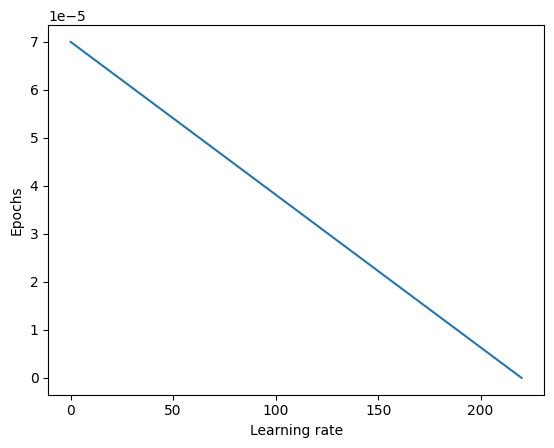

In [22]:
# Create Subplots Layout

# Set up a figure with three subplots
x_values = np.linspace(0, 220, 13860)
plt.plot(x_values,lr)

# Thêm tiêu đề và nhãn trục
plt.xlabel("Learning rate")
plt.ylabel("Epochs")

# Hiển thị biểu đồ
plt.show()

In [12]:

print('ratio=0.6900790000000001, ratio_std=0.08735507288646722, total=26.773')

ratio=0.6900790000000001, ratio_std=0.08735507288646722, total=26.773


In [13]:
dt='''
episode 1        =>     ratio: 0.7560   | total: 33
episode 2        =>     ratio: 0.7270   | total: 39
episode 3        =>     ratio: 0.7280   | total: 36
episode 4        =>     ratio: 0.6980   | total: 26
episode 5        =>     ratio: 0.6590   | total: 23
episode 6        =>     ratio: 0.6030   | total: 24
episode 7        =>     ratio: 0.6360   | total: 22
episode 8        =>     ratio: 0.7110   | total: 27
episode 9        =>     ratio: 0.7270   | total: 25
episode 10       =>     ratio: 0.7540   | total: 30
episode 11       =>     ratio: 0.5760   | total: 21
episode 12       =>     ratio: 0.7610   | total: 27
episode 13       =>     ratio: 0.5370   | total: 23
episode 14       =>     ratio: 0.6020   | total: 22
episode 15       =>     ratio: 0.6420   | total: 22
episode 16       =>     ratio: 0.7140   | total: 31
episode 17       =>     ratio: 0.7990   | total: 35
episode 18       =>     ratio: 0.6200   | total: 29
episode 19       =>     ratio: 0.5530   | total: 21
episode 20       =>     ratio: 0.6850   | total: 23
episode 21       =>     ratio: 0.8740   | total: 29
episode 22       =>     ratio: 0.6390   | total: 21
episode 23       =>     ratio: 0.7960   | total: 30
episode 24       =>     ratio: 0.6020   | total: 29
episode 25       =>     ratio: 0.7190   | total: 22
episode 26       =>     ratio: 0.6100   | total: 23
episode 27       =>     ratio: 0.6270   | total: 27
episode 28       =>     ratio: 0.7640   | total: 25
episode 29       =>     ratio: 0.8030   | total: 29
episode 30       =>     ratio: 0.7940   | total: 34
episode 31       =>     ratio: 0.6430   | total: 18
episode 32       =>     ratio: 0.5410   | total: 23
episode 33       =>     ratio: 0.4140   | total: 15
episode 34       =>     ratio: 0.6290   | total: 27
episode 35       =>     ratio: 0.7310   | total: 20
episode 36       =>     ratio: 0.6890   | total: 26
episode 37       =>     ratio: 0.8980   | total: 33
episode 38       =>     ratio: 0.6620   | total: 22
episode 39       =>     ratio: 0.6620   | total: 27
episode 40       =>     ratio: 0.4710   | total: 21
episode 41       =>     ratio: 0.8040   | total: 27
episode 42       =>     ratio: 0.7670   | total: 25
episode 43       =>     ratio: 0.7140   | total: 27
episode 44       =>     ratio: 0.5860   | total: 26
episode 45       =>     ratio: 0.6980   | total: 33
episode 46       =>     ratio: 0.7220   | total: 26
episode 47       =>     ratio: 0.8040   | total: 35
episode 48       =>     ratio: 0.7650   | total: 26
episode 49       =>     ratio: 0.6920   | total: 28
episode 50       =>     ratio: 0.7240   | total: 27
episode 51       =>     ratio: 0.6440   | total: 21
episode 52       =>     ratio: 0.7790   | total: 31
episode 53       =>     ratio: 0.6510   | total: 17
episode 54       =>     ratio: 0.5200   | total: 18
episode 55       =>     ratio: 0.7800   | total: 35
episode 56       =>     ratio: 0.7450   | total: 27
episode 57       =>     ratio: 0.7160   | total: 24
episode 58       =>     ratio: 0.7760   | total: 21
episode 59       =>     ratio: 0.7730   | total: 37
episode 60       =>     ratio: 0.7180   | total: 30
episode 61       =>     ratio: 0.7340   | total: 19
episode 62       =>     ratio: 0.6440   | total: 29
episode 63       =>     ratio: 0.7550   | total: 34
episode 64       =>     ratio: 0.5940   | total: 23
episode 65       =>     ratio: 0.7510   | total: 31
episode 66       =>     ratio: 0.7900   | total: 41
episode 67       =>     ratio: 0.6130   | total: 22
episode 68       =>     ratio: 0.4980   | total: 26
episode 69       =>     ratio: 0.6870   | total: 36
episode 70       =>     ratio: 0.7300   | total: 33
episode 71       =>     ratio: 0.8120   | total: 36
episode 72       =>     ratio: 0.7840   | total: 32
episode 73       =>     ratio: 0.5590   | total: 24
episode 74       =>     ratio: 0.6850   | total: 30
episode 75       =>     ratio: 0.7160   | total: 34
episode 76       =>     ratio: 0.7830   | total: 25
episode 77       =>     ratio: 0.5380   | total: 23
episode 78       =>     ratio: 0.7280   | total: 23
episode 79       =>     ratio: 0.7660   | total: 32
episode 80       =>     ratio: 0.7580   | total: 31
episode 81       =>     ratio: 0.6920   | total: 26
episode 82       =>     ratio: 0.8460   | total: 23
episode 83       =>     ratio: 0.4360   | total: 17
episode 84       =>     ratio: 0.6710   | total: 36
episode 85       =>     ratio: 0.6230   | total: 22
episode 86       =>     ratio: 0.6990   | total: 26
episode 87       =>     ratio: 0.7810   | total: 33
episode 88       =>     ratio: 0.6700   | total: 17
episode 89       =>     ratio: 0.6210   | total: 21
episode 90       =>     ratio: 0.7420   | total: 28
episode 91       =>     ratio: 0.7100   | total: 26
episode 92       =>     ratio: 0.6550   | total: 22
episode 93       =>     ratio: 0.7560   | total: 30
episode 94       =>     ratio: 0.7420   | total: 36
episode 95       =>     ratio: 0.7450   | total: 30
episode 96       =>     ratio: 0.6000   | total: 26
episode 97       =>     ratio: 0.6070   | total: 26
episode 98       =>     ratio: 0.6700   | total: 27
episode 99       =>     ratio: 0.7170   | total: 24
episode 100      =>     ratio: 0.7120   | total: 32
episode 101      =>     ratio: 0.6530   | total: 32
episode 102      =>     ratio: 0.6760   | total: 28
episode 103      =>     ratio: 0.6760   | total: 25
episode 104      =>     ratio: 0.7230   | total: 24
episode 105      =>     ratio: 0.7130   | total: 34
episode 106      =>     ratio: 0.7630   | total: 23
episode 107      =>     ratio: 0.6330   | total: 20
episode 108      =>     ratio: 0.6950   | total: 29
episode 109      =>     ratio: 0.5780   | total: 18
episode 110      =>     ratio: 0.5330   | total: 16
episode 111      =>     ratio: 0.5520   | total: 22
episode 112      =>     ratio: 0.5800   | total: 18
episode 113      =>     ratio: 0.5670   | total: 21
episode 114      =>     ratio: 0.7100   | total: 29
episode 115      =>     ratio: 0.6220   | total: 30
episode 116      =>     ratio: 0.7470   | total: 33
episode 117      =>     ratio: 0.8110   | total: 31
episode 118      =>     ratio: 0.6500   | total: 19
episode 119      =>     ratio: 0.6950   | total: 24
episode 120      =>     ratio: 0.4960   | total: 17
episode 121      =>     ratio: 0.7680   | total: 39
episode 122      =>     ratio: 0.6600   | total: 24
episode 123      =>     ratio: 0.6590   | total: 21
episode 124      =>     ratio: 0.7330   | total: 25
episode 125      =>     ratio: 0.7560   | total: 28
episode 126      =>     ratio: 0.8360   | total: 35
episode 127      =>     ratio: 0.7390   | total: 23
episode 128      =>     ratio: 0.6140   | total: 18
episode 129      =>     ratio: 0.6470   | total: 25
episode 130      =>     ratio: 0.5230   | total: 26
episode 131      =>     ratio: 0.6240   | total: 29
episode 132      =>     ratio: 0.6450   | total: 19
episode 133      =>     ratio: 0.6960   | total: 19
episode 134      =>     ratio: 0.6620   | total: 24
episode 135      =>     ratio: 0.6080   | total: 26
episode 136      =>     ratio: 0.4590   | total: 14
episode 137      =>     ratio: 0.6970   | total: 23
episode 138      =>     ratio: 0.6150   | total: 22
episode 139      =>     ratio: 0.5720   | total: 21
episode 140      =>     ratio: 0.8090   | total: 38
episode 141      =>     ratio: 0.6450   | total: 33
episode 142      =>     ratio: 0.6560   | total: 34
episode 143      =>     ratio: 0.6630   | total: 24
episode 144      =>     ratio: 0.7520   | total: 34
episode 145      =>     ratio: 0.6620   | total: 26
episode 146      =>     ratio: 0.6900   | total: 28
episode 147      =>     ratio: 0.6240   | total: 30
episode 148      =>     ratio: 0.4350   | total: 11
episode 149      =>     ratio: 0.5970   | total: 23
episode 150      =>     ratio: 0.7880   | total: 39
episode 151      =>     ratio: 0.7110   | total: 29
episode 152      =>     ratio: 0.8100   | total: 34
episode 153      =>     ratio: 0.7600   | total: 31
episode 154      =>     ratio: 0.7910   | total: 30
episode 155      =>     ratio: 0.6190   | total: 16
episode 156      =>     ratio: 0.7640   | total: 30
episode 157      =>     ratio: 0.7170   | total: 31
episode 158      =>     ratio: 0.6950   | total: 21
episode 159      =>     ratio: 0.8060   | total: 31
episode 160      =>     ratio: 0.6890   | total: 27
episode 161      =>     ratio: 0.6310   | total: 20
episode 162      =>     ratio: 0.7300   | total: 38
episode 163      =>     ratio: 0.7430   | total: 39
episode 164      =>     ratio: 0.6630   | total: 21
episode 165      =>     ratio: 0.7040   | total: 21
episode 166      =>     ratio: 0.7050   | total: 30
episode 167      =>     ratio: 0.8530   | total: 32
episode 168      =>     ratio: 0.7330   | total: 37
episode 169      =>     ratio: 0.7830   | total: 30
episode 170      =>     ratio: 0.7350   | total: 28
episode 171      =>     ratio: 0.7310   | total: 27
episode 172      =>     ratio: 0.7060   | total: 27
episode 173      =>     ratio: 0.5500   | total: 24
episode 174      =>     ratio: 0.5380   | total: 23
episode 175      =>     ratio: 0.8220   | total: 34
episode 176      =>     ratio: 0.6770   | total: 24
episode 177      =>     ratio: 0.5510   | total: 16
episode 178      =>     ratio: 0.7930   | total: 29
episode 179      =>     ratio: 0.6360   | total: 20
episode 180      =>     ratio: 0.6170   | total: 18
episode 181      =>     ratio: 0.7360   | total: 24
episode 182      =>     ratio: 0.6600   | total: 27
episode 183      =>     ratio: 0.4950   | total: 15
episode 184      =>     ratio: 0.6250   | total: 17
episode 185      =>     ratio: 0.6840   | total: 25
episode 186      =>     ratio: 0.6890   | total: 22
episode 187      =>     ratio: 0.6590   | total: 22
episode 188      =>     ratio: 0.8070   | total: 34
episode 189      =>     ratio: 0.6930   | total: 33
episode 190      =>     ratio: 0.6940   | total: 28
episode 191      =>     ratio: 0.5890   | total: 18
episode 192      =>     ratio: 0.7160   | total: 27
episode 193      =>     ratio: 0.5900   | total: 26
episode 194      =>     ratio: 0.7940   | total: 32
episode 195      =>     ratio: 0.7200   | total: 24
episode 196      =>     ratio: 0.7750   | total: 32
episode 197      =>     ratio: 0.6140   | total: 15
episode 198      =>     ratio: 0.8420   | total: 32
episode 199      =>     ratio: 0.7310   | total: 27
episode 200      =>     ratio: 0.5260   | total: 22
episode 201      =>     ratio: 0.6680   | total: 26
episode 202      =>     ratio: 0.8310   | total: 30
episode 203      =>     ratio: 0.6790   | total: 36
episode 204      =>     ratio: 0.7740   | total: 31
episode 205      =>     ratio: 0.5820   | total: 21
episode 206      =>     ratio: 0.7310   | total: 30
episode 207      =>     ratio: 0.5870   | total: 16
episode 208      =>     ratio: 0.6580   | total: 20
episode 209      =>     ratio: 0.7550   | total: 26
episode 210      =>     ratio: 0.6590   | total: 21
episode 211      =>     ratio: 0.7400   | total: 26
episode 212      =>     ratio: 0.8130   | total: 38
episode 213      =>     ratio: 0.5900   | total: 19
episode 214      =>     ratio: 0.7210   | total: 33
episode 215      =>     ratio: 0.6940   | total: 27
episode 216      =>     ratio: 0.5640   | total: 20
episode 217      =>     ratio: 0.6320   | total: 21
episode 218      =>     ratio: 0.6880   | total: 23
episode 219      =>     ratio: 0.8570   | total: 25
episode 220      =>     ratio: 0.6430   | total: 19
episode 221      =>     ratio: 0.7600   | total: 33
episode 222      =>     ratio: 0.7190   | total: 36
episode 223      =>     ratio: 0.6470   | total: 25
episode 224      =>     ratio: 0.7620   | total: 22
episode 225      =>     ratio: 0.7680   | total: 42
episode 226      =>     ratio: 0.6400   | total: 17
episode 227      =>     ratio: 0.4730   | total: 22
episode 228      =>     ratio: 0.7000   | total: 25
episode 229      =>     ratio: 0.7780   | total: 36
episode 230      =>     ratio: 0.6670   | total: 27
episode 231      =>     ratio: 0.7390   | total: 31
episode 232      =>     ratio: 0.7740   | total: 35
episode 233      =>     ratio: 0.6270   | total: 21
episode 234      =>     ratio: 0.7960   | total: 37
episode 235      =>     ratio: 0.7240   | total: 32
episode 236      =>     ratio: 0.7810   | total: 32
episode 237      =>     ratio: 0.7220   | total: 26
episode 238      =>     ratio: 0.7900   | total: 29
episode 239      =>     ratio: 0.6360   | total: 30
episode 240      =>     ratio: 0.6930   | total: 27
episode 241      =>     ratio: 0.8050   | total: 38
episode 242      =>     ratio: 0.7570   | total: 29
episode 243      =>     ratio: 0.7050   | total: 35
episode 244      =>     ratio: 0.7230   | total: 28
episode 245      =>     ratio: 0.7340   | total: 16
episode 246      =>     ratio: 0.5790   | total: 18
episode 247      =>     ratio: 0.8070   | total: 34
episode 248      =>     ratio: 0.7860   | total: 32
episode 249      =>     ratio: 0.7160   | total: 23
episode 250      =>     ratio: 0.7390   | total: 27
episode 251      =>     ratio: 0.6980   | total: 22
episode 252      =>     ratio: 0.6890   | total: 26
episode 253      =>     ratio: 0.6180   | total: 22
episode 254      =>     ratio: 0.8250   | total: 29
episode 255      =>     ratio: 0.8090   | total: 29
episode 256      =>     ratio: 0.7240   | total: 32
episode 257      =>     ratio: 0.6320   | total: 22
episode 258      =>     ratio: 0.7430   | total: 34
episode 259      =>     ratio: 0.6950   | total: 29
episode 260      =>     ratio: 0.6540   | total: 18
episode 261      =>     ratio: 0.6540   | total: 28
episode 262      =>     ratio: 0.8080   | total: 31
episode 263      =>     ratio: 0.6970   | total: 39
episode 264      =>     ratio: 0.7930   | total: 37
episode 265      =>     ratio: 0.7190   | total: 35
episode 266      =>     ratio: 0.6400   | total: 26
episode 267      =>     ratio: 0.7640   | total: 35
episode 268      =>     ratio: 0.6000   | total: 20
episode 269      =>     ratio: 0.7090   | total: 25
episode 270      =>     ratio: 0.5060   | total: 20
episode 271      =>     ratio: 0.7520   | total: 35
episode 272      =>     ratio: 0.7580   | total: 33
episode 273      =>     ratio: 0.7620   | total: 33
episode 274      =>     ratio: 0.6920   | total: 28
episode 275      =>     ratio: 0.8160   | total: 29
episode 276      =>     ratio: 0.4980   | total: 24
episode 277      =>     ratio: 0.6800   | total: 34
episode 278      =>     ratio: 0.4510   | total: 21
episode 279      =>     ratio: 0.7030   | total: 25
episode 280      =>     ratio: 0.7540   | total: 27
episode 281      =>     ratio: 0.7570   | total: 23
episode 282      =>     ratio: 0.6570   | total: 23
episode 283      =>     ratio: 0.6840   | total: 28
episode 284      =>     ratio: 0.7580   | total: 30
episode 285      =>     ratio: 0.5320   | total: 24
episode 286      =>     ratio: 0.6250   | total: 24
episode 287      =>     ratio: 0.7320   | total: 31
episode 288      =>     ratio: 0.7600   | total: 36
episode 289      =>     ratio: 0.7550   | total: 27
episode 290      =>     ratio: 0.6420   | total: 24
episode 291      =>     ratio: 0.6160   | total: 22
episode 292      =>     ratio: 0.7020   | total: 32
episode 293      =>     ratio: 0.6680   | total: 20
episode 294      =>     ratio: 0.7280   | total: 41
episode 295      =>     ratio: 0.7950   | total: 33
episode 296      =>     ratio: 0.8230   | total: 30
episode 297      =>     ratio: 0.6110   | total: 28
episode 298      =>     ratio: 0.6230   | total: 28
episode 299      =>     ratio: 0.7730   | total: 29
episode 300      =>     ratio: 0.6560   | total: 33
episode 301      =>     ratio: 0.7710   | total: 33
episode 302      =>     ratio: 0.6940   | total: 25
episode 303      =>     ratio: 0.6020   | total: 27
episode 304      =>     ratio: 0.7210   | total: 26
episode 305      =>     ratio: 0.5900   | total: 15
episode 306      =>     ratio: 0.7700   | total: 34
episode 307      =>     ratio: 0.8040   | total: 33
episode 308      =>     ratio: 0.7970   | total: 29
episode 309      =>     ratio: 0.7590   | total: 32
episode 310      =>     ratio: 0.7910   | total: 30
episode 311      =>     ratio: 0.7490   | total: 25
episode 312      =>     ratio: 0.6370   | total: 21
episode 313      =>     ratio: 0.6310   | total: 24
episode 314      =>     ratio: 0.7660   | total: 30
episode 315      =>     ratio: 0.6660   | total: 24
episode 316      =>     ratio: 0.7160   | total: 35
episode 317      =>     ratio: 0.6890   | total: 27
episode 318      =>     ratio: 0.8420   | total: 38
episode 319      =>     ratio: 0.6420   | total: 33
episode 320      =>     ratio: 0.5770   | total: 26
episode 321      =>     ratio: 0.7570   | total: 24
episode 322      =>     ratio: 0.6680   | total: 20
episode 323      =>     ratio: 0.7120   | total: 28
episode 324      =>     ratio: 0.8200   | total: 30
episode 325      =>     ratio: 0.8330   | total: 38
episode 326      =>     ratio: 0.6740   | total: 31
episode 327      =>     ratio: 0.7220   | total: 30
episode 328      =>     ratio: 0.6940   | total: 27
episode 329      =>     ratio: 0.7740   | total: 24
episode 330      =>     ratio: 0.8650   | total: 37
episode 331      =>     ratio: 0.6740   | total: 32
episode 332      =>     ratio: 0.8150   | total: 30
episode 333      =>     ratio: 0.7050   | total: 24
episode 334      =>     ratio: 0.8150   | total: 32
episode 335      =>     ratio: 0.6370   | total: 26
episode 336      =>     ratio: 0.5460   | total: 29
episode 337      =>     ratio: 0.7200   | total: 27
episode 338      =>     ratio: 0.7660   | total: 27
episode 339      =>     ratio: 0.6070   | total: 29
episode 340      =>     ratio: 0.7610   | total: 25
episode 341      =>     ratio: 0.7270   | total: 24
episode 342      =>     ratio: 0.6280   | total: 27
episode 343      =>     ratio: 0.6530   | total: 21
episode 344      =>     ratio: 0.6510   | total: 29
episode 345      =>     ratio: 0.8020   | total: 38
episode 346      =>     ratio: 0.5940   | total: 20
episode 347      =>     ratio: 0.8050   | total: 21
episode 348      =>     ratio: 0.6690   | total: 26
episode 349      =>     ratio: 0.7180   | total: 24
episode 350      =>     ratio: 0.7410   | total: 37
episode 351      =>     ratio: 0.7830   | total: 22
episode 352      =>     ratio: 0.7050   | total: 24
episode 353      =>     ratio: 0.6790   | total: 32
episode 354      =>     ratio: 0.7150   | total: 26
episode 355      =>     ratio: 0.7120   | total: 32
episode 356      =>     ratio: 0.6990   | total: 28
episode 357      =>     ratio: 0.7390   | total: 30
episode 358      =>     ratio: 0.7770   | total: 24
episode 359      =>     ratio: 0.8590   | total: 22
episode 360      =>     ratio: 0.6510   | total: 21
episode 361      =>     ratio: 0.7480   | total: 20
episode 362      =>     ratio: 0.7050   | total: 19
episode 363      =>     ratio: 0.7270   | total: 29
episode 364      =>     ratio: 0.6700   | total: 21
episode 365      =>     ratio: 0.5970   | total: 18
episode 366      =>     ratio: 0.7500   | total: 28
episode 367      =>     ratio: 0.7800   | total: 35
episode 368      =>     ratio: 0.4200   | total: 23
episode 369      =>     ratio: 0.6120   | total: 28
episode 370      =>     ratio: 0.7630   | total: 28
episode 371      =>     ratio: 0.7240   | total: 32
episode 372      =>     ratio: 0.7550   | total: 27
episode 373      =>     ratio: 0.6760   | total: 27
episode 374      =>     ratio: 0.6650   | total: 30
episode 375      =>     ratio: 0.7860   | total: 34
episode 376      =>     ratio: 0.6780   | total: 30
episode 377      =>     ratio: 0.6270   | total: 22
episode 378      =>     ratio: 0.6840   | total: 28
episode 379      =>     ratio: 0.7540   | total: 26
episode 380      =>     ratio: 0.8220   | total: 30
episode 381      =>     ratio: 0.8450   | total: 33
episode 382      =>     ratio: 0.7380   | total: 29
episode 383      =>     ratio: 0.7770   | total: 41
episode 384      =>     ratio: 0.7850   | total: 37
episode 385      =>     ratio: 0.7540   | total: 22
episode 386      =>     ratio: 0.6750   | total: 24
episode 387      =>     ratio: 0.5860   | total: 19
episode 388      =>     ratio: 0.7530   | total: 33
episode 389      =>     ratio: 0.7620   | total: 25
episode 390      =>     ratio: 0.6980   | total: 21
episode 391      =>     ratio: 0.8730   | total: 35
episode 392      =>     ratio: 0.5590   | total: 20
episode 393      =>     ratio: 0.7120   | total: 34
episode 394      =>     ratio: 0.6840   | total: 35
episode 395      =>     ratio: 0.7490   | total: 24
episode 396      =>     ratio: 0.7630   | total: 28
episode 397      =>     ratio: 0.6660   | total: 27
episode 398      =>     ratio: 0.6190   | total: 26
episode 399      =>     ratio: 0.5720   | total: 18
episode 400      =>     ratio: 0.5210   | total: 16
episode 401      =>     ratio: 0.7460   | total: 44
episode 402      =>     ratio: 0.8600   | total: 33
episode 403      =>     ratio: 0.6520   | total: 22
episode 404      =>     ratio: 0.6580   | total: 29
episode 405      =>     ratio: 0.7450   | total: 28
episode 406      =>     ratio: 0.5120   | total: 18
episode 407      =>     ratio: 0.8080   | total: 35
episode 408      =>     ratio: 0.7020   | total: 30
episode 409      =>     ratio: 0.7660   | total: 33
episode 410      =>     ratio: 0.6660   | total: 26
episode 411      =>     ratio: 0.7020   | total: 21
episode 412      =>     ratio: 0.6280   | total: 35
episode 413      =>     ratio: 0.7500   | total: 35
episode 414      =>     ratio: 0.7940   | total: 32
episode 415      =>     ratio: 0.6750   | total: 31
episode 416      =>     ratio: 0.6670   | total: 33
episode 417      =>     ratio: 0.6930   | total: 28
episode 418      =>     ratio: 0.7270   | total: 23
episode 419      =>     ratio: 0.5740   | total: 20
episode 420      =>     ratio: 0.5870   | total: 25
episode 421      =>     ratio: 0.7710   | total: 29
episode 422      =>     ratio: 0.6130   | total: 25
episode 423      =>     ratio: 0.4870   | total: 17
episode 424      =>     ratio: 0.7360   | total: 33
episode 425      =>     ratio: 0.7090   | total: 27
episode 426      =>     ratio: 0.6930   | total: 26
episode 427      =>     ratio: 0.6950   | total: 31
episode 428      =>     ratio: 0.7630   | total: 30
episode 429      =>     ratio: 0.7590   | total: 37
episode 430      =>     ratio: 0.7350   | total: 37
episode 431      =>     ratio: 0.7770   | total: 22
episode 432      =>     ratio: 0.6970   | total: 27
episode 433      =>     ratio: 0.6010   | total: 14
episode 434      =>     ratio: 0.7640   | total: 29
episode 435      =>     ratio: 0.6790   | total: 34
episode 436      =>     ratio: 0.7760   | total: 21
episode 437      =>     ratio: 0.7000   | total: 27
episode 438      =>     ratio: 0.8500   | total: 24
episode 439      =>     ratio: 0.7300   | total: 27
episode 440      =>     ratio: 0.6690   | total: 27
episode 441      =>     ratio: 0.5450   | total: 18
episode 442      =>     ratio: 0.6580   | total: 31
episode 443      =>     ratio: 0.6310   | total: 16
episode 444      =>     ratio: 0.8180   | total: 39
episode 445      =>     ratio: 0.6900   | total: 26
episode 446      =>     ratio: 0.7650   | total: 32
episode 447      =>     ratio: 0.7640   | total: 28
episode 448      =>     ratio: 0.6930   | total: 26
episode 449      =>     ratio: 0.7090   | total: 32
episode 450      =>     ratio: 0.7070   | total: 29
episode 451      =>     ratio: 0.8040   | total: 33
episode 452      =>     ratio: 0.5890   | total: 18
episode 453      =>     ratio: 0.7650   | total: 29
episode 454      =>     ratio: 0.7840   | total: 28
episode 455      =>     ratio: 0.6070   | total: 16
episode 456      =>     ratio: 0.5750   | total: 25
episode 457      =>     ratio: 0.7460   | total: 33
episode 458      =>     ratio: 0.6710   | total: 32
episode 459      =>     ratio: 0.8090   | total: 24
episode 460      =>     ratio: 0.7740   | total: 39
episode 461      =>     ratio: 0.8080   | total: 31
episode 462      =>     ratio: 0.7530   | total: 27
episode 463      =>     ratio: 0.7850   | total: 31
episode 464      =>     ratio: 0.6790   | total: 24
episode 465      =>     ratio: 0.7670   | total: 33
episode 466      =>     ratio: 0.6500   | total: 25
episode 467      =>     ratio: 0.8210   | total: 27
episode 468      =>     ratio: 0.7790   | total: 24
episode 469      =>     ratio: 0.4300   | total: 16
episode 470      =>     ratio: 0.5490   | total: 20
episode 471      =>     ratio: 0.5440   | total: 20
episode 472      =>     ratio: 0.7040   | total: 22
episode 473      =>     ratio: 0.6960   | total: 37
episode 474      =>     ratio: 0.7210   | total: 30
episode 475      =>     ratio: 0.5930   | total: 29
episode 476      =>     ratio: 0.7330   | total: 30
episode 477      =>     ratio: 0.7550   | total: 22
episode 478      =>     ratio: 0.6710   | total: 28
episode 479      =>     ratio: 0.7110   | total: 31
episode 480      =>     ratio: 0.7200   | total: 25
episode 481      =>     ratio: 0.7770   | total: 23
episode 482      =>     ratio: 0.6710   | total: 17
episode 483      =>     ratio: 0.7330   | total: 35
episode 484      =>     ratio: 0.6730   | total: 29
episode 485      =>     ratio: 0.6110   | total: 24
episode 486      =>     ratio: 0.4640   | total: 15
episode 487      =>     ratio: 0.6690   | total: 36
episode 488      =>     ratio: 0.7220   | total: 25
episode 489      =>     ratio: 0.6130   | total: 18
episode 490      =>     ratio: 0.7490   | total: 24
episode 491      =>     ratio: 0.7690   | total: 28
episode 492      =>     ratio: 0.5710   | total: 20
episode 493      =>     ratio: 0.7930   | total: 27
episode 494      =>     ratio: 0.6800   | total: 20
episode 495      =>     ratio: 0.7400   | total: 24
episode 496      =>     ratio: 0.7020   | total: 31
episode 497      =>     ratio: 0.7370   | total: 33
episode 498      =>     ratio: 0.7520   | total: 31
episode 499      =>     ratio: 0.7810   | total: 33
episode 500      =>     ratio: 0.8110   | total: 31
episode 501      =>     ratio: 0.4700   | total: 17
episode 502      =>     ratio: 0.7520   | total: 35
episode 503      =>     ratio: 0.7750   | total: 21
episode 504      =>     ratio: 0.6920   | total: 32
episode 505      =>     ratio: 0.7680   | total: 28
episode 506      =>     ratio: 0.6350   | total: 20
episode 507      =>     ratio: 0.7490   | total: 40
episode 508      =>     ratio: 0.8290   | total: 30
episode 509      =>     ratio: 0.7780   | total: 32
episode 510      =>     ratio: 0.5220   | total: 17
episode 511      =>     ratio: 0.7290   | total: 22
episode 512      =>     ratio: 0.7900   | total: 32
episode 513      =>     ratio: 0.6010   | total: 24
episode 514      =>     ratio: 0.4910   | total: 20
episode 515      =>     ratio: 0.7820   | total: 33
episode 516      =>     ratio: 0.8100   | total: 41
episode 517      =>     ratio: 0.7790   | total: 18
episode 518      =>     ratio: 0.7240   | total: 32
episode 519      =>     ratio: 0.7330   | total: 36
episode 520      =>     ratio: 0.8250   | total: 26
episode 521      =>     ratio: 0.5880   | total: 21
episode 522      =>     ratio: 0.6550   | total: 22
episode 523      =>     ratio: 0.6920   | total: 26
episode 524      =>     ratio: 0.7460   | total: 32
episode 525      =>     ratio: 0.6050   | total: 26
episode 526      =>     ratio: 0.7280   | total: 39
episode 527      =>     ratio: 0.7610   | total: 37
episode 528      =>     ratio: 0.7170   | total: 26
episode 529      =>     ratio: 0.6670   | total: 27
episode 530      =>     ratio: 0.6120   | total: 30
episode 531      =>     ratio: 0.4990   | total: 23
episode 532      =>     ratio: 0.8100   | total: 32
episode 533      =>     ratio: 0.7890   | total: 36
episode 534      =>     ratio: 0.7800   | total: 30
episode 535      =>     ratio: 0.6510   | total: 30
episode 536      =>     ratio: 0.5880   | total: 26
episode 537      =>     ratio: 0.6380   | total: 23
episode 538      =>     ratio: 0.7390   | total: 30
episode 539      =>     ratio: 0.7720   | total: 26
episode 540      =>     ratio: 0.7310   | total: 32
episode 541      =>     ratio: 0.7260   | total: 35
episode 542      =>     ratio: 0.6980   | total: 25
episode 543      =>     ratio: 0.6700   | total: 22
episode 544      =>     ratio: 0.6280   | total: 20
episode 545      =>     ratio: 0.8010   | total: 35
episode 546      =>     ratio: 0.5940   | total: 21
episode 547      =>     ratio: 0.7010   | total: 30
episode 548      =>     ratio: 0.6140   | total: 27
episode 549      =>     ratio: 0.5050   | total: 15
episode 550      =>     ratio: 0.6750   | total: 29
episode 551      =>     ratio: 0.6160   | total: 27
episode 552      =>     ratio: 0.8540   | total: 33
episode 553      =>     ratio: 0.7000   | total: 24
episode 554      =>     ratio: 0.6180   | total: 20
episode 555      =>     ratio: 0.8030   | total: 27
episode 556      =>     ratio: 0.7320   | total: 29
episode 557      =>     ratio: 0.6890   | total: 29
episode 558      =>     ratio: 0.4310   | total: 24
episode 559      =>     ratio: 0.7920   | total: 35
episode 560      =>     ratio: 0.7950   | total: 31
episode 561      =>     ratio: 0.4050   | total: 16
episode 562      =>     ratio: 0.6030   | total: 29
episode 563      =>     ratio: 0.7720   | total: 25
episode 564      =>     ratio: 0.6330   | total: 27
episode 565      =>     ratio: 0.8030   | total: 31
episode 566      =>     ratio: 0.6260   | total: 25
episode 567      =>     ratio: 0.6970   | total: 25
episode 568      =>     ratio: 0.4860   | total: 14
episode 569      =>     ratio: 0.6380   | total: 22
episode 570      =>     ratio: 0.5150   | total: 22
episode 571      =>     ratio: 0.6990   | total: 29
episode 572      =>     ratio: 0.6560   | total: 32
episode 573      =>     ratio: 0.6070   | total: 18
episode 574      =>     ratio: 0.8120   | total: 27
episode 575      =>     ratio: 0.7920   | total: 31
episode 576      =>     ratio: 0.6880   | total: 23
episode 577      =>     ratio: 0.7070   | total: 26
episode 578      =>     ratio: 0.7760   | total: 29
episode 579      =>     ratio: 0.6420   | total: 25
episode 580      =>     ratio: 0.6680   | total: 32
episode 581      =>     ratio: 0.6380   | total: 23
episode 582      =>     ratio: 0.5950   | total: 30
episode 583      =>     ratio: 0.8030   | total: 38
episode 584      =>     ratio: 0.5750   | total: 31
episode 585      =>     ratio: 0.6870   | total: 31
episode 586      =>     ratio: 0.7210   | total: 31
episode 587      =>     ratio: 0.5880   | total: 22
episode 588      =>     ratio: 0.6600   | total: 22
episode 589      =>     ratio: 0.6490   | total: 22
episode 590      =>     ratio: 0.5870   | total: 17
episode 591      =>     ratio: 0.3510   | total: 20
episode 592      =>     ratio: 0.6400   | total: 27
episode 593      =>     ratio: 0.5440   | total: 27
episode 594      =>     ratio: 0.7420   | total: 24
episode 595      =>     ratio: 0.7110   | total: 24
episode 596      =>     ratio: 0.7780   | total: 27
episode 597      =>     ratio: 0.7200   | total: 27
episode 598      =>     ratio: 0.7360   | total: 26
episode 599      =>     ratio: 0.6830   | total: 21
episode 600      =>     ratio: 0.7270   | total: 28
episode 601      =>     ratio: 0.7420   | total: 33
episode 602      =>     ratio: 0.6440   | total: 29
episode 603      =>     ratio: 0.6520   | total: 24
episode 604      =>     ratio: 0.6310   | total: 22
episode 605      =>     ratio: 0.6610   | total: 27
episode 606      =>     ratio: 0.5190   | total: 21
episode 607      =>     ratio: 0.6930   | total: 21
episode 608      =>     ratio: 0.7760   | total: 31
episode 609      =>     ratio: 0.7320   | total: 25
episode 610      =>     ratio: 0.5900   | total: 25
episode 611      =>     ratio: 0.6980   | total: 31
episode 612      =>     ratio: 0.8040   | total: 25
episode 613      =>     ratio: 0.5770   | total: 28
episode 614      =>     ratio: 0.7740   | total: 30
episode 615      =>     ratio: 0.6900   | total: 24
episode 616      =>     ratio: 0.6260   | total: 24
episode 617      =>     ratio: 0.7170   | total: 29
episode 618      =>     ratio: 0.6400   | total: 19
episode 619      =>     ratio: 0.7490   | total: 27
episode 620      =>     ratio: 0.6810   | total: 24
episode 621      =>     ratio: 0.7680   | total: 26
episode 622      =>     ratio: 0.6720   | total: 26
episode 623      =>     ratio: 0.5150   | total: 31
episode 624      =>     ratio: 0.8030   | total: 33
episode 625      =>     ratio: 0.7520   | total: 26
episode 626      =>     ratio: 0.7980   | total: 24
episode 627      =>     ratio: 0.7050   | total: 23
episode 628      =>     ratio: 0.7730   | total: 29
episode 629      =>     ratio: 0.6610   | total: 16
episode 630      =>     ratio: 0.7650   | total: 32
episode 631      =>     ratio: 0.8060   | total: 25
episode 632      =>     ratio: 0.8000   | total: 30
episode 633      =>     ratio: 0.7210   | total: 30
episode 634      =>     ratio: 0.5490   | total: 29
episode 635      =>     ratio: 0.7370   | total: 25
episode 636      =>     ratio: 0.6580   | total: 29
episode 637      =>     ratio: 0.7000   | total: 26
episode 638      =>     ratio: 0.7960   | total: 26
episode 639      =>     ratio: 0.6380   | total: 25
episode 640      =>     ratio: 0.7530   | total: 36
episode 641      =>     ratio: 0.8100   | total: 26
episode 642      =>     ratio: 0.6670   | total: 26
episode 643      =>     ratio: 0.7580   | total: 23
episode 644      =>     ratio: 0.7520   | total: 23
episode 645      =>     ratio: 0.7860   | total: 34
episode 646      =>     ratio: 0.6470   | total: 24
episode 647      =>     ratio: 0.6810   | total: 28
episode 648      =>     ratio: 0.6100   | total: 21
episode 649      =>     ratio: 0.5710   | total: 33
episode 650      =>     ratio: 0.7880   | total: 28
episode 651      =>     ratio: 0.7370   | total: 28
episode 652      =>     ratio: 0.5800   | total: 13
episode 653      =>     ratio: 0.7820   | total: 28
episode 654      =>     ratio: 0.6190   | total: 21
episode 655      =>     ratio: 0.8190   | total: 39
episode 656      =>     ratio: 0.7240   | total: 26
episode 657      =>     ratio: 0.8140   | total: 36
episode 658      =>     ratio: 0.6230   | total: 23
episode 659      =>     ratio: 0.6380   | total: 25
episode 660      =>     ratio: 0.8200   | total: 21
episode 661      =>     ratio: 0.7190   | total: 36
episode 662      =>     ratio: 0.7610   | total: 25
episode 663      =>     ratio: 0.7140   | total: 21
episode 664      =>     ratio: 0.7330   | total: 34
episode 665      =>     ratio: 0.6760   | total: 26
episode 666      =>     ratio: 0.6250   | total: 30
episode 667      =>     ratio: 0.8060   | total: 27
episode 668      =>     ratio: 0.6880   | total: 31
episode 669      =>     ratio: 0.6860   | total: 26
episode 670      =>     ratio: 0.6520   | total: 35
episode 671      =>     ratio: 0.6910   | total: 21
episode 672      =>     ratio: 0.8280   | total: 38
episode 673      =>     ratio: 0.6770   | total: 19
episode 674      =>     ratio: 0.7900   | total: 38
episode 675      =>     ratio: 0.6400   | total: 27
episode 676      =>     ratio: 0.7230   | total: 31
episode 677      =>     ratio: 0.6500   | total: 33
episode 678      =>     ratio: 0.7530   | total: 29
episode 679      =>     ratio: 0.5740   | total: 22
episode 680      =>     ratio: 0.7460   | total: 24
episode 681      =>     ratio: 0.8340   | total: 37
episode 682      =>     ratio: 0.6700   | total: 24
episode 683      =>     ratio: 0.7930   | total: 26
episode 684      =>     ratio: 0.7160   | total: 27
episode 685      =>     ratio: 0.7400   | total: 28
episode 686      =>     ratio: 0.5120   | total: 19
episode 687      =>     ratio: 0.7100   | total: 32
episode 688      =>     ratio: 0.7170   | total: 23
episode 689      =>     ratio: 0.7400   | total: 29
episode 690      =>     ratio: 0.5370   | total: 28
episode 691      =>     ratio: 0.8410   | total: 23
episode 692      =>     ratio: 0.6550   | total: 25
episode 693      =>     ratio: 0.5890   | total: 22
episode 694      =>     ratio: 0.6700   | total: 20
episode 695      =>     ratio: 0.6310   | total: 17
episode 696      =>     ratio: 0.7070   | total: 26
episode 697      =>     ratio: 0.7460   | total: 31
episode 698      =>     ratio: 0.7310   | total: 30
episode 699      =>     ratio: 0.5920   | total: 22
episode 700      =>     ratio: 0.6900   | total: 27
episode 701      =>     ratio: 0.7510   | total: 28
episode 702      =>     ratio: 0.6830   | total: 32
episode 703      =>     ratio: 0.6860   | total: 31
episode 704      =>     ratio: 0.7300   | total: 26
episode 705      =>     ratio: 0.7670   | total: 35
episode 706      =>     ratio: 0.7590   | total: 34
episode 707      =>     ratio: 0.5390   | total: 23
episode 708      =>     ratio: 0.7860   | total: 30
episode 709      =>     ratio: 0.5730   | total: 15
episode 710      =>     ratio: 0.7520   | total: 30
episode 711      =>     ratio: 0.6940   | total: 28
episode 712      =>     ratio: 0.6900   | total: 26
episode 713      =>     ratio: 0.7710   | total: 26
episode 714      =>     ratio: 0.6410   | total: 21
episode 715      =>     ratio: 0.7820   | total: 34
episode 716      =>     ratio: 0.7090   | total: 32
episode 717      =>     ratio: 0.7140   | total: 24
episode 718      =>     ratio: 0.6230   | total: 31
episode 719      =>     ratio: 0.7630   | total: 32
episode 720      =>     ratio: 0.7920   | total: 31
episode 721      =>     ratio: 0.7100   | total: 34
episode 722      =>     ratio: 0.6390   | total: 20
episode 723      =>     ratio: 0.6210   | total: 23
episode 724      =>     ratio: 0.8030   | total: 39
episode 725      =>     ratio: 0.8420   | total: 41
episode 726      =>     ratio: 0.7340   | total: 25
episode 727      =>     ratio: 0.7210   | total: 26
episode 728      =>     ratio: 0.6430   | total: 27
episode 729      =>     ratio: 0.5690   | total: 16
episode 730      =>     ratio: 0.7220   | total: 26
episode 731      =>     ratio: 0.6640   | total: 26
episode 732      =>     ratio: 0.7920   | total: 33
episode 733      =>     ratio: 0.5620   | total: 16
episode 734      =>     ratio: 0.7950   | total: 31
episode 735      =>     ratio: 0.6640   | total: 24
episode 736      =>     ratio: 0.6500   | total: 21
episode 737      =>     ratio: 0.7260   | total: 26
episode 738      =>     ratio: 0.8110   | total: 34
episode 739      =>     ratio: 0.7690   | total: 34
episode 740      =>     ratio: 0.8170   | total: 27
episode 741      =>     ratio: 0.5490   | total: 24
episode 742      =>     ratio: 0.6390   | total: 23
episode 743      =>     ratio: 0.6940   | total: 32
episode 744      =>     ratio: 0.7820   | total: 32
episode 745      =>     ratio: 0.7010   | total: 20
episode 746      =>     ratio: 0.6500   | total: 26
episode 747      =>     ratio: 0.6440   | total: 25
episode 748      =>     ratio: 0.6110   | total: 21
episode 749      =>     ratio: 0.7320   | total: 24
episode 750      =>     ratio: 0.7370   | total: 28
episode 751      =>     ratio: 0.7750   | total: 31
episode 752      =>     ratio: 0.7660   | total: 27
episode 753      =>     ratio: 0.7310   | total: 21
episode 754      =>     ratio: 0.7130   | total: 30
episode 755      =>     ratio: 0.7480   | total: 32
episode 756      =>     ratio: 0.7550   | total: 25
episode 757      =>     ratio: 0.5850   | total: 21
episode 758      =>     ratio: 0.7100   | total: 29
episode 759      =>     ratio: 0.8020   | total: 22
episode 760      =>     ratio: 0.7450   | total: 27
episode 761      =>     ratio: 0.7300   | total: 26
episode 762      =>     ratio: 0.6050   | total: 20
episode 763      =>     ratio: 0.7500   | total: 32
episode 764      =>     ratio: 0.7290   | total: 25
episode 765      =>     ratio: 0.5880   | total: 22
episode 766      =>     ratio: 0.6070   | total: 27
episode 767      =>     ratio: 0.6300   | total: 26
episode 768      =>     ratio: 0.8200   | total: 38
episode 769      =>     ratio: 0.4640   | total: 16
episode 770      =>     ratio: 0.6040   | total: 26
episode 771      =>     ratio: 0.3940   | total: 13
episode 772      =>     ratio: 0.6550   | total: 32
episode 773      =>     ratio: 0.6670   | total: 25
episode 774      =>     ratio: 0.7780   | total: 36
episode 775      =>     ratio: 0.5860   | total: 30
episode 776      =>     ratio: 0.6060   | total: 24
episode 777      =>     ratio: 0.7910   | total: 28
episode 778      =>     ratio: 0.5930   | total: 30
episode 779      =>     ratio: 0.8200   | total: 40
episode 780      =>     ratio: 0.7260   | total: 29
episode 781      =>     ratio: 0.7520   | total: 30
episode 782      =>     ratio: 0.7570   | total: 33
episode 783      =>     ratio: 0.7300   | total: 31
episode 784      =>     ratio: 0.6500   | total: 32
episode 785      =>     ratio: 0.6810   | total: 27
episode 786      =>     ratio: 0.6750   | total: 26
episode 787      =>     ratio: 0.7090   | total: 29
episode 788      =>     ratio: 0.4550   | total: 21
episode 789      =>     ratio: 0.6490   | total: 26
episode 790      =>     ratio: 0.5390   | total: 28
episode 791      =>     ratio: 0.8010   | total: 28
episode 792      =>     ratio: 0.7680   | total: 30
episode 793      =>     ratio: 0.7480   | total: 24
episode 794      =>     ratio: 0.6390   | total: 28
episode 795      =>     ratio: 0.6400   | total: 27
episode 796      =>     ratio: 0.7660   | total: 32
episode 797      =>     ratio: 0.5740   | total: 28
episode 798      =>     ratio: 0.7940   | total: 36
episode 799      =>     ratio: 0.8110   | total: 32
episode 800      =>     ratio: 0.6730   | total: 21
episode 801      =>     ratio: 0.6770   | total: 30
episode 802      =>     ratio: 0.7590   | total: 28
episode 803      =>     ratio: 0.7000   | total: 23
episode 804      =>     ratio: 0.6410   | total: 27
episode 805      =>     ratio: 0.7070   | total: 36
episode 806      =>     ratio: 0.6840   | total: 34
episode 807      =>     ratio: 0.7320   | total: 21
episode 808      =>     ratio: 0.6660   | total: 28
episode 809      =>     ratio: 0.7030   | total: 28
episode 810      =>     ratio: 0.7910   | total: 23
episode 811      =>     ratio: 0.7240   | total: 30
episode 812      =>     ratio: 0.6750   | total: 21
episode 813      =>     ratio: 0.7650   | total: 34
episode 814      =>     ratio: 0.7600   | total: 31
episode 815      =>     ratio: 0.8160   | total: 27
episode 816      =>     ratio: 0.6390   | total: 26
episode 817      =>     ratio: 0.7630   | total: 31
episode 818      =>     ratio: 0.7420   | total: 22
episode 819      =>     ratio: 0.7730   | total: 29
episode 820      =>     ratio: 0.7360   | total: 26
episode 821      =>     ratio: 0.6140   | total: 20
episode 822      =>     ratio: 0.7450   | total: 23
episode 823      =>     ratio: 0.6820   | total: 29
episode 824      =>     ratio: 0.7130   | total: 24
episode 825      =>     ratio: 0.6740   | total: 25
episode 826      =>     ratio: 0.6850   | total: 20
episode 827      =>     ratio: 0.7970   | total: 29
episode 828      =>     ratio: 0.7930   | total: 29
episode 829      =>     ratio: 0.6390   | total: 23
episode 830      =>     ratio: 0.5460   | total: 25
episode 831      =>     ratio: 0.8100   | total: 38
episode 832      =>     ratio: 0.7020   | total: 35
episode 833      =>     ratio: 0.7530   | total: 36
episode 834      =>     ratio: 0.6370   | total: 32
episode 835      =>     ratio: 0.7340   | total: 32
episode 836      =>     ratio: 0.6780   | total: 24
episode 837      =>     ratio: 0.6380   | total: 21
episode 838      =>     ratio: 0.7450   | total: 30
episode 839      =>     ratio: 0.7600   | total: 37
episode 840      =>     ratio: 0.7360   | total: 34
episode 841      =>     ratio: 0.5750   | total: 15
episode 842      =>     ratio: 0.8470   | total: 33
episode 843      =>     ratio: 0.6400   | total: 26
episode 844      =>     ratio: 0.5660   | total: 21
episode 845      =>     ratio: 0.6970   | total: 28
episode 846      =>     ratio: 0.5100   | total: 17
episode 847      =>     ratio: 0.7740   | total: 35
episode 848      =>     ratio: 0.7590   | total: 34
episode 849      =>     ratio: 0.8190   | total: 31
episode 850      =>     ratio: 0.6280   | total: 29
episode 851      =>     ratio: 0.5980   | total: 34
episode 852      =>     ratio: 0.5250   | total: 27
episode 853      =>     ratio: 0.6840   | total: 27
episode 854      =>     ratio: 0.8170   | total: 31
episode 855      =>     ratio: 0.6730   | total: 29
episode 856      =>     ratio: 0.6710   | total: 24
episode 857      =>     ratio: 0.7020   | total: 27
episode 858      =>     ratio: 0.6860   | total: 27
episode 859      =>     ratio: 0.7360   | total: 33
episode 860      =>     ratio: 0.6210   | total: 27
episode 861      =>     ratio: 0.7370   | total: 27
episode 862      =>     ratio: 0.6230   | total: 22
episode 863      =>     ratio: 0.6860   | total: 22
episode 864      =>     ratio: 0.7140   | total: 25
episode 865      =>     ratio: 0.6820   | total: 28
episode 866      =>     ratio: 0.6960   | total: 25
episode 867      =>     ratio: 0.6950   | total: 21
episode 868      =>     ratio: 0.7270   | total: 28
episode 869      =>     ratio: 0.6980   | total: 33
episode 870      =>     ratio: 0.7620   | total: 25
episode 871      =>     ratio: 0.4990   | total: 23
episode 872      =>     ratio: 0.6970   | total: 23
episode 873      =>     ratio: 0.7280   | total: 23
episode 874      =>     ratio: 0.7010   | total: 24
episode 875      =>     ratio: 0.6420   | total: 18
episode 876      =>     ratio: 0.7210   | total: 24
episode 877      =>     ratio: 0.7760   | total: 38
episode 878      =>     ratio: 0.7750   | total: 25
episode 879      =>     ratio: 0.7580   | total: 33
episode 880      =>     ratio: 0.7720   | total: 35
episode 881      =>     ratio: 0.8210   | total: 43
episode 882      =>     ratio: 0.7340   | total: 23
episode 883      =>     ratio: 0.7270   | total: 33
episode 884      =>     ratio: 0.7430   | total: 29
episode 885      =>     ratio: 0.5350   | total: 26
episode 886      =>     ratio: 0.6610   | total: 26
episode 887      =>     ratio: 0.7290   | total: 39
episode 888      =>     ratio: 0.7150   | total: 21
episode 889      =>     ratio: 0.8060   | total: 28
episode 890      =>     ratio: 0.6730   | total: 26
episode 891      =>     ratio: 0.5040   | total: 22
episode 892      =>     ratio: 0.7550   | total: 37
episode 893      =>     ratio: 0.7470   | total: 21
episode 894      =>     ratio: 0.7190   | total: 24
episode 895      =>     ratio: 0.6290   | total: 25
episode 896      =>     ratio: 0.5390   | total: 19
episode 897      =>     ratio: 0.5560   | total: 12
episode 898      =>     ratio: 0.8050   | total: 30
episode 899      =>     ratio: 0.7270   | total: 22
episode 900      =>     ratio: 0.7330   | total: 31
episode 901      =>     ratio: 0.6670   | total: 17
episode 902      =>     ratio: 0.7950   | total: 30
episode 903      =>     ratio: 0.6170   | total: 27
episode 904      =>     ratio: 0.7070   | total: 22
episode 905      =>     ratio: 0.6960   | total: 28
episode 906      =>     ratio: 0.6030   | total: 35
episode 907      =>     ratio: 0.8160   | total: 30
episode 908      =>     ratio: 0.6370   | total: 28
episode 909      =>     ratio: 0.6790   | total: 28
episode 910      =>     ratio: 0.4240   | total: 10
episode 911      =>     ratio: 0.2860   | total: 16
episode 912      =>     ratio: 0.7810   | total: 34
episode 913      =>     ratio: 0.6230   | total: 14
episode 914      =>     ratio: 0.6860   | total: 25
episode 915      =>     ratio: 0.6130   | total: 27
episode 916      =>     ratio: 0.7390   | total: 31
episode 917      =>     ratio: 0.7170   | total: 28
episode 918      =>     ratio: 0.6290   | total: 20
episode 919      =>     ratio: 0.7250   | total: 31
episode 920      =>     ratio: 0.7260   | total: 37
episode 921      =>     ratio: 0.6320   | total: 22
episode 922      =>     ratio: 0.7680   | total: 29
episode 923      =>     ratio: 0.7030   | total: 20
episode 924      =>     ratio: 0.7420   | total: 19
episode 925      =>     ratio: 0.5950   | total: 24
episode 926      =>     ratio: 0.6020   | total: 25
episode 927      =>     ratio: 0.5530   | total: 24
episode 928      =>     ratio: 0.8180   | total: 38
episode 929      =>     ratio: 0.6550   | total: 27
episode 930      =>     ratio: 0.7560   | total: 39
episode 931      =>     ratio: 0.7610   | total: 34
episode 932      =>     ratio: 0.7200   | total: 25
episode 933      =>     ratio: 0.7290   | total: 28
episode 934      =>     ratio: 0.8380   | total: 31
episode 935      =>     ratio: 0.8020   | total: 33
episode 936      =>     ratio: 0.6770   | total: 26
episode 937      =>     ratio: 0.7440   | total: 37
episode 938      =>     ratio: 0.6030   | total: 24
episode 939      =>     ratio: 0.7700   | total: 34
episode 940      =>     ratio: 0.6120   | total: 23
episode 941      =>     ratio: 0.6630   | total: 25
episode 942      =>     ratio: 0.6180   | total: 21
episode 943      =>     ratio: 0.6610   | total: 27
episode 944      =>     ratio: 0.7930   | total: 31
episode 945      =>     ratio: 0.6550   | total: 20
episode 946      =>     ratio: 0.6700   | total: 27
episode 947      =>     ratio: 0.7270   | total: 29
episode 948      =>     ratio: 0.7220   | total: 36
episode 949      =>     ratio: 0.8220   | total: 28
episode 950      =>     ratio: 0.8100   | total: 37
episode 951      =>     ratio: 0.7590   | total: 31
episode 952      =>     ratio: 0.6110   | total: 16
episode 953      =>     ratio: 0.7630   | total: 19
episode 954      =>     ratio: 0.6020   | total: 13
episode 955      =>     ratio: 0.6040   | total: 20
episode 956      =>     ratio: 0.7700   | total: 37
episode 957      =>     ratio: 0.8090   | total: 34
episode 958      =>     ratio: 0.6870   | total: 24
episode 959      =>     ratio: 0.7750   | total: 27
episode 960      =>     ratio: 0.7340   | total: 34
episode 961      =>     ratio: 0.6460   | total: 30
episode 962      =>     ratio: 0.8470   | total: 40
episode 963      =>     ratio: 0.6510   | total: 19
episode 964      =>     ratio: 0.5950   | total: 24
episode 965      =>     ratio: 0.7320   | total: 31
episode 966      =>     ratio: 0.6130   | total: 25
episode 967      =>     ratio: 0.7650   | total: 37
episode 968      =>     ratio: 0.7390   | total: 28
episode 969      =>     ratio: 0.7660   | total: 36
episode 970      =>     ratio: 0.7940   | total: 22
episode 971      =>     ratio: 0.6400   | total: 21
episode 972      =>     ratio: 0.7350   | total: 27
episode 973      =>     ratio: 0.7340   | total: 24
episode 974      =>     ratio: 0.7370   | total: 29
episode 975      =>     ratio: 0.5940   | total: 23
episode 976      =>     ratio: 0.7900   | total: 33
episode 977      =>     ratio: 0.5540   | total: 22
episode 978      =>     ratio: 0.6500   | total: 27
episode 979      =>     ratio: 0.6750   | total: 21
episode 980      =>     ratio: 0.7150   | total: 32
episode 981      =>     ratio: 0.6340   | total: 35
episode 982      =>     ratio: 0.6220   | total: 25
episode 983      =>     ratio: 0.7150   | total: 27
episode 984      =>     ratio: 0.5900   | total: 28
episode 985      =>     ratio: 0.7910   | total: 42
episode 986      =>     ratio: 0.8080   | total: 33
episode 987      =>     ratio: 0.6140   | total: 29
episode 988      =>     ratio: 0.7830   | total: 26
episode 989      =>     ratio: 0.7000   | total: 31
episode 990      =>     ratio: 0.7530   | total: 31
episode 991      =>     ratio: 0.7680   | total: 31
episode 992      =>     ratio: 0.7300   | total: 30
episode 993      =>     ratio: 0.4520   | total: 12
episode 994      =>     ratio: 0.6850   | total: 25
episode 995      =>     ratio: 0.7240   | total: 23
episode 996      =>     ratio: 0.8010   | total: 32
episode 997      =>     ratio: 0.7380   | total: 35
episode 998      =>     ratio: 0.7710   | total: 33
episode 999      =>     ratio: 0.7700   | total: 27
episode 1000     =>     ratio: 0.7510   | total: 28
'''

In [ ]:
# Extract Values with Regex

# Define regex patterns to extract loss, test_reward, and best_reward values
ratio_pattern = r"ratio: ([\d.]+)"
total_pattern = r"total: ([\d.]+)"


# Extract values using regex patterns
ratios = re.findall(ratio_pattern, dt)
totals = re.findall(total_pattern, dt)

# Convert extracted values to float
ratios = list(map(float, ratios))
totals = list(map(float, totals))


# Print extracted values for verification
print(ratios)
print(totals)

# Define epochs based on the number of extracted values
epochs = list(range(1, len(ratios) + 1))

import numpy as np

# Calculating mean and standard deviation
mean_ratio = np.mean(ratios)
std_ratio = np.std(ratios)
print(f"Mean of Ratios: {mean_ratio}",f"\nStandard Deviation of Ratios: {std_ratio}")

mean_total = np.mean(totals)
std_total = np.std(totals)
print(f"Mean of Totals: {mean_total}",f"\nStandard Deviation of Totals: {std_total}")

NameError: name 'dt' is not defined

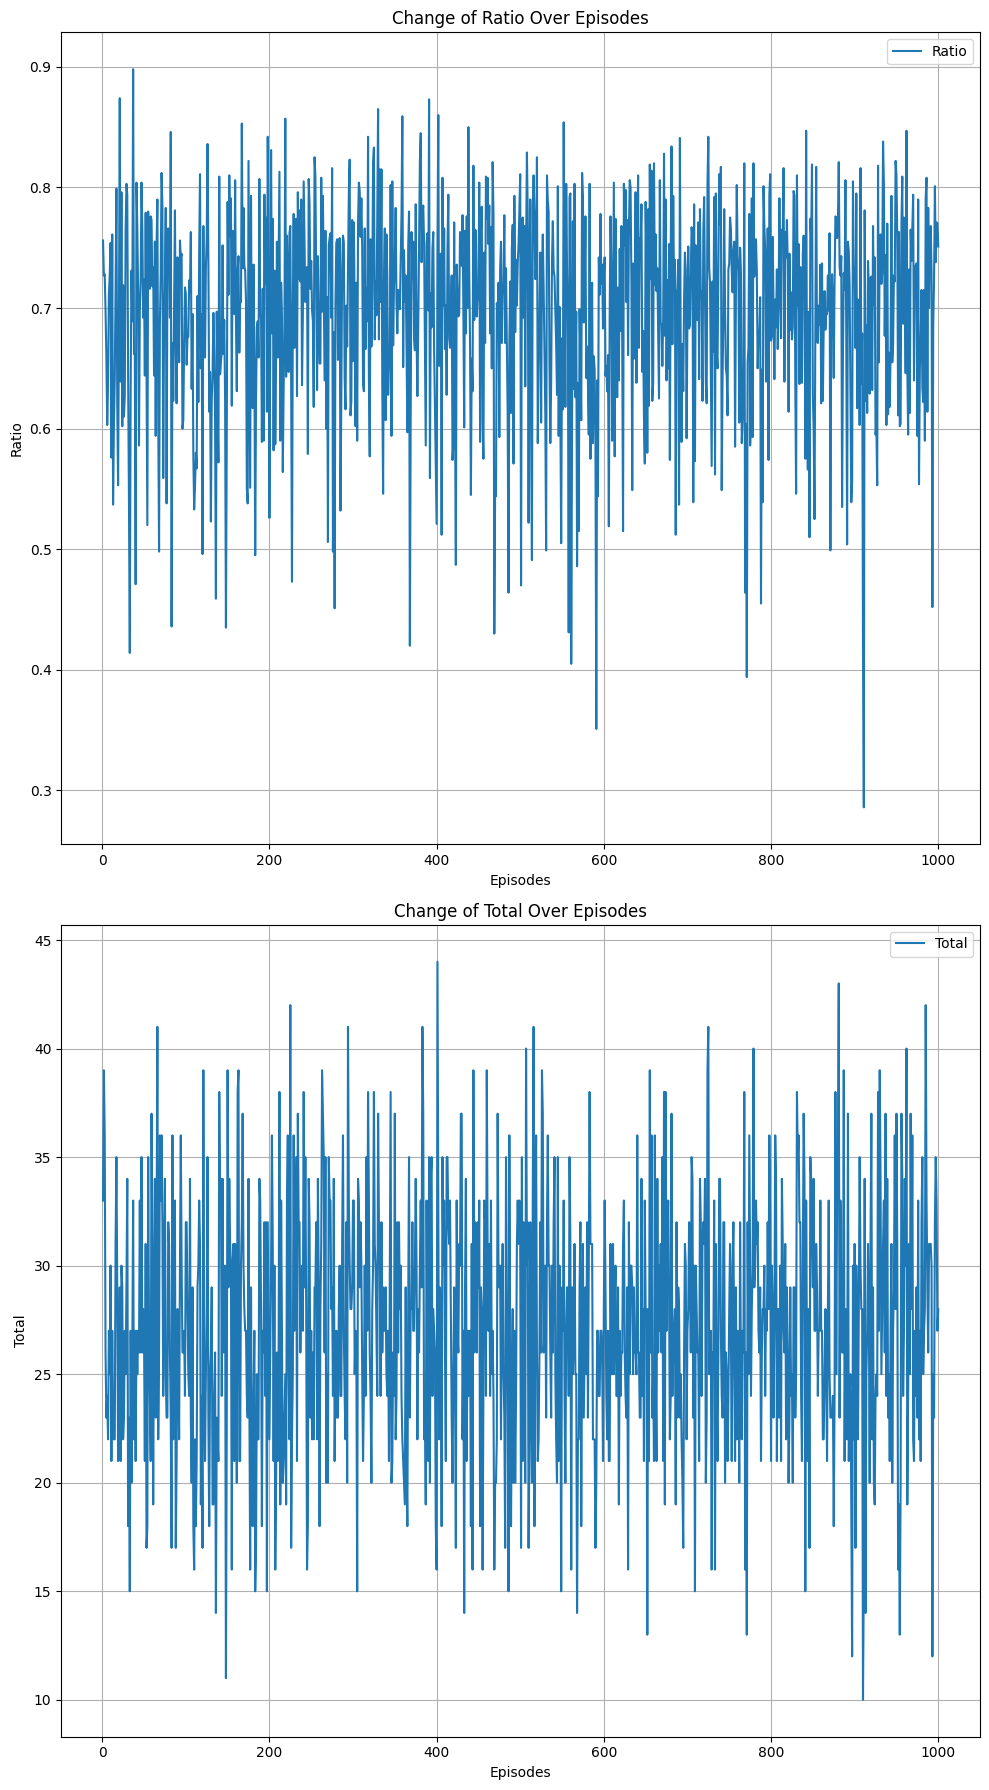

In [15]:
# Create Subplots Layout

# Set up a figure with three subplots
fig2, axs2 = plt.subplots(2, 1, figsize=(10, 18))

# Plot Loss
axs2[0].plot(epochs, ratios, label="Ratio")
axs2[0].set_xlabel("Episodes")
axs2[0].set_ylabel("Ratio")
axs2[0].set_title("Change of Ratio Over Episodes")
axs2[0].legend()
axs2[0].grid()

axs2[1].plot(epochs, totals, label="Total")
axs2[1].set_xlabel("Episodes")
axs2[1].set_ylabel("Total")
axs2[1].set_title("Change of Total Over Episodes")
axs2[1].legend()
axs2[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()